In [32]:
import pandas as pd
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, Markdown, Latex

warnings.filterwarnings('ignore')

In [2]:
def genIndicators(all_ids, flag, hold_out=True):
    '''
    Description: Converts anonymized ids into a set of indicator variables and
    removes anonymized id. May be used for meta category id's, leaf ids, condition ids,
    and in general categorical variables encoded in a single column as integers

    Inputs:
        all_ids: a set containing all of the unique anon_leaf_cat_id's in the data set
        flag: 1 character string to append to identify the corresponding indicators
        (and prevent collisions between indicator columns in finalized features)
    Output: dictionary mapping anon_leaf_categ_ids to 1 row data_frames containing the corresponding set of indicators
    '''
    comp_ids = []
    id_strings = []
    # create list of ids as strings (for col names later)
    # create list of ids as ints for index later
    for id in all_ids:
        comp_ids.append(id)
        id_strings.append(str(int(id)) + flag)
    del all_ids
    # convert to nd array for efficient min
    comp_ids = np.array(comp_ids)
    if hold_out:
        # extract min as a string to be used as hold out feature
        hold_out = str(np.amin(comp_ids)) + flag
        # remove hold out id (as string) from list of strings to be used for columns
        id_strings.remove(hold_out)
    # create df of 0's with indices corresponding to all unique id's as ints
    # and columns corresponding to all id's (except hold_out) as strings
    print('Num %s ids : %d' % (flag, len(id_strings)))
    leaf_df = pd.DataFrame(0, index=pd.Index(comp_ids), columns=id_strings)
    # iterate over all id's except the hold out id
    for id_string in id_strings:
        # subset the data frame at the corresponding row index and column name
        # to activate the indicator
        leaf_df.at[int(id_string[0:len(id_string)-1]), id_string] = 1
    return leaf_df


In [23]:
def get_all_offrs(turn):
    '''
    Description: Gets the names of all the offer columns in the data set
    including start_price_usd and the response column, returned as a list
    '''
    offer_list = get_observed_offrs(turn)
    resp_offr = get_resp_offr(turn)
    offer_list.append(resp_offr)
    return offer_list


def get_observed_offrs(turn):
    '''
    Description: Generates a list of the offers that have been observed
    thusfar, including the current offer
    '''
    turn_num = int(turn[1])
    turn_type = turn[0]
    offer_set = []
    for i in range(turn_num + 1):
        offer_set.append('offr_b' + str(i))
        if i < turn_num:
            offer_set.append('offr_s' + str(i))
        elif turn_type == 's':
            offer_set.append('offr_s' + str(i))
    offer_set.append('start_price_usd')
    return offer_set

def get_resp_offr(turn):
    '''
    Description: Determines the name of the response column given the name of the last observed turn
    '''
    turn_num = turn[1]
    turn_type = turn[0]
    turn_num = int(turn_num)
    if turn_type == 'b':
        resp_turn = 's' + str(turn_num)
    elif turn == 'start_price_usd':
        resp_turn = 'b0'
    elif turn_type == 's':
        resp_turn = 'b' + str(turn_num + 1)
    resp_col = 'offr_' + resp_turn
    return resp_col


In [38]:
def pandas_df_to_markdown_table(df):
    '''
    Description: converts pandas data frame to markdown table
    '''
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

In [65]:
full = pd.read_csv('data/exps/norm1/b1/toy-1.csv')
org = pd.read_csv('data/toy/toy-1.csv')

In [54]:
for col in (full.columns):
    print(col)

unique_thread_id
fdbk_score_src
fdbk_pstv_src
offr_b2
slr_hist
byr_hist
any_mssg
byr_us
offr_s2
fdbk_score_start
fdbk_pstv_start
start_price_usd
photo_count
to_lst_cnt
bo_lst_cnt
ref_price1
view_item_count
wtchr_count
bin_rev
lstg_gen_type_id
store
slr_us
buyer_us
99m
220m
237m
260m
267m
281m
293m
316m
550m
619m
625m
870m
888m
1249m
1281m
1305m
2984m
3252m
10542m
11116m
11232m
11233m
11450m
11700m
12576m
14339m
15032m
20081m
26395m
45100m
58058m
64482m
172008m
1000c
1500c
1750c
2000c
2500c
2750c
3000c
4000c
5000c
6000c
7000c
duration
offr_b0
offr_b1
offr_s0
offr_s1
rnd_1_offr_b0
rnd_5_offr_b0
rnd_10_offr_b0
rnd_25_offr_b0
slk_offr_b0
rnd_1_offr_s0
rnd_5_offr_s0
rnd_10_offr_s0
rnd_25_offr_s0
slk_offr_s0
rnd_1_offr_b1
rnd_5_offr_b1
rnd_10_offr_b1
rnd_25_offr_b1
slk_offr_b1
rnd_1_offr_s1
rnd_5_offr_s1
rnd_10_offr_s1
rnd_25_offr_s1
slk_offr_s1
rnd_1_offr_b2
rnd_5_offr_b2
rnd_10_offr_b2
rnd_25_offr_b2
slk_offr_b2
rnd_1_start_price_usd
rnd_5_start_price_usd
rnd_10_start_price_usd
rnd_25_star

In [9]:
full.isna().any().any()

False

In [13]:
np.isinf(full.values).any()

False

## offr_b0

Min: 0.00
Max: 1.00


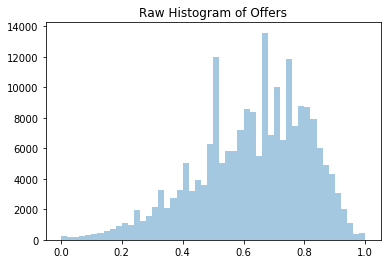

208683
231
Percent above: 0.00
Percent below: 0.00
Percent out of bounds: 0.00


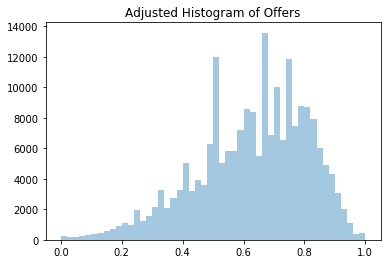

## offr_s0

Min: -0.00
Max: 2500.00


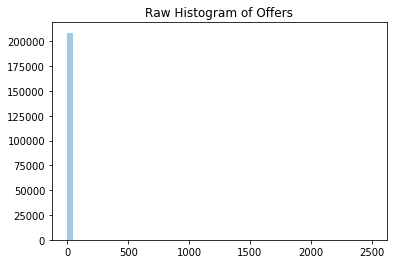

208683
0
Percent above: 0.00
Percent below: 0.00
Percent out of bounds: 0.00


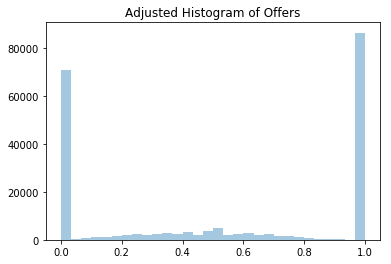

In [63]:
turn = 'b0'
offrs = get_all_offrs(turn)
offrs.remove('start_price_usd')
for offr in offrs:
    display(Markdown('## %s' % offr))
    data = full[offr].values
    print('Min: %.2f' % np.amin(data))
    print('Max: %.2f' % np.amax(data))
    hist = sns.distplot(data, kde=False)
    hist.set_title('Raw Histogram of Offers')
    plt.show()
    # get percent above
    tot = len(data)
    print(tot)
    above = np.sum(data > 1)
    print(below)
    below = np.sum(data < 0)
    print('Percent above: %.2f' % (above/tot))
    print('Percent below: %.2f' % (below/tot))
    print('Percent out of bounds: %.2f' % ((above + below)/tot))
    data = data[np.logical_and(data <= 1, data >= 0)]

    hist = sns.distplot(data, kde=False)
    hist.set_title('Adjusted Histogram of Offers')
    plt.show()
    
    
    

In [53]:
for offr in ['offr_b2', 'offr_s2']:
    vals = full[offr]
    new = full.loc[vals[vals < 0].index, ['unique_thread_id', 'offr_b1', 'offr_s1', 'offr_s2', 'offr_b2', 'ref_rec', 'ref_old', 'ref_resp']].copy()
    pandas_df_to_markdown_table(new)

unique_thread_id|offr_b1|offr_s1|offr_s2|offr_b2|ref_rec|ref_old|ref_resp
---|---|---|---|---|---|---|---
25034|0.5|0.0020000000000003127|0.2096944151738671|-0.9018036072144292|20.5|29.99|28.0
32450|0.7|0.3333333333333333|-1.0|-1.5|79.0|84.0|89.0
252059|0.4615384615384616|0.42857142857142855|-0.25|-1.0|10.0|14.0|15.0
319329|0.1|0.1111111111111111|-0.0|-0.125|1475.0|1700.0|1700.0
372808|0.5185185185185185|0.5384615384615384|-0.1|-2.333333333333333|30.0|40.0|41.0
479252|0.375|-0.0|-0.0|-1.6|5.0|18.0|18.0
540707|0.0|0.8001|-0.0|-0.0005002501250627873|99.99|119.99|119.99
582521|0.3076923076923077|0.6666666666666666|-1.2|-0.6666666666666666|110.0|135.0|165.0
657111|0.5|-0.0|0.4|-1.0|30.0|40.0|36.0
691415|0.13513513513513514|0.8046875|0.5241379310344828|-0.16|330.0|475.0|399.0
741116|0.25|0.3333333333333333|-0.0|-0.5|8.0|14.0|14.0
946239|0.3333333333333333|-0.0|0.4|-1.5|240.0|265.0|255.0
981104|0.34545454545454546|0.1388888888888889|0.1|-0.6129032258064516|300.0|550.0|525.0
991915|0.2000800320128051|0.39969984992496255|-0.0|-0.4166666666666667|15.0|32.0|32.0
1103129|0.3333333333333333|0.5|-0.5|-1.0|30.0|40.0|45.0
1121199|0.2501250625312657|-0.0|0.499833277759253|-1.0006671114076051|50.0|79.99|65.0
1185829|0.7352941176470587|0.027777777777779632|0.2117647058823527|-1.42857142857143|4.5|5.35|5.17
1210807|0.5645863570391872|-0.0|0.024390243902439025|-1.7333333333333334|49.0|90.0|89.0
1498299|0.3474152306837132|0.5110732538330494|-0.4999999999999998|-1.0905923344947734|24.99|36.99|42.99
1580604|0.2857142857142857|0.1|0.05882352941176471|-0.8888888888888888|3.0|7.25|7.0
1616724|0.1020408163265306|0.09090909090909093|-0.0|-0.85|1.0|75.0|75.0
1621540|0.4756242568370986|0.3197278911564629|0.8499999999999995|-0.8|308.0|335.0|312.05
1848161|0.17391304347826084|0.15789473684210525|0.5882352941176471|-0.0625|215.0|300.0|250.0
1859234|0.5|-0.0|0.1|-1.0|25.0|35.0|34.0
1899697|0.40625|0.10526315789473684|-0.0|-5.294117647058823|223.0|330.0|330.0
1959626|0.21666666666666684|0.13297872340425532|-0.0|-0.3036809815950921|9.0|13.25|13.25
1988603|0.037037037037037035|-0.26384615384615384|-0.0004000000000000625|-0.5216068167985393|3.93|28.93|28.94
2027598|0.6666666666666666|0.3333333333333333|0.2|-1.5|95.0|120.0|115.0
2234304|0.3335557038025351|0.5005005005005003|-0.0|-1.002004008016032|75.0|124.95|124.95
2290412|-0.210637177461822|-0.0|0.00035727045373365896|-0.21748586341887774|15.0|42.99|42.98
2527368|0.3125|-0.0|-0.0|-0.18181818181818185|4800.0|6100.0|6100.0
2593157|0.5005005005005005|-0.0|0.16611074049366234|-2.004008016032065|10.0|24.99|22.5
2615043|0.17857142857142858|0.3478260869565217|-0.6190476190476191|-0.4|39.0|60.0|73.0
2617390|0.13266666666666654|-0.0|-0.0|-0.15372790161414296|24.99|40.0|40.0
2899186|0.08333333333333333|0.09090909090909093|-1.1666666666666667|-0.2|9.0|21.0|35.0
3050610|0.6521739130434783|0.125|0.10526315789473684|-0.35714285714285715|75.0|94.0|92.0
3089137|0.2727272727272727|-0.0|0.20408163265306126|-0.225|455.0|700.0|650.0
3294502|0.0|-0.0|0.2857142857142857|-0.16666666666666666|50.0|120.0|100.0
3313089|0.5|0.5|-0.0|-2.0|300.0|375.0|375.0
3327538|-1.0|-0.0|-0.0|-0.5|10.0|25.0|25.0
3425360|0.2857142857142857|0.42|0.4117647058823529|-0.1724137931034483|145.0|179.0|165.0
3468158|0.6666666666666666|-0.4|0.2352941176470588|-1.4285714285714286|25.0|42.0|38.0
3506014|0.4008016032064128|0.33110367892976594|-0.0|-1.0|10.0|14.0|14.0
3532553|0.2|0.25|-0.0|-0.3333333333333333|75.0|95.0|95.0
3577973|0.2|0.5|-0.9985714285714288|-2.5|31.0|38.0|44.99
3621750|0.54|0.39130434782608703|0.2222222222222222|-0.2857142857142857|360.0|450.0|430.0
3678049|0.20625000000000013|0.5249343832020998|0.2857142857142857|-0.5469613259668513|65.0|79.0|75.0
3688004|0.19742037378257435|0.16382420465726485|-0.5152295802394304|-0.29417532849578354|50.0|115.99|149.99
3691287|0.11363636363636365|0.10256410256410256|-0.1|-0.14285714285714285|25.0|65.0|69.0
3782083|0.045454545454545456|0.31746031746031744|0.8695652173913043|-0.06976744186046513|18.5|30.0|20.0
3856553|0.4|-0.6666666666666666|-0.0|-0.8|240.0|285.0|285.0
2848|0.3749500000000001|0.5199584033277338|-0.0|-0.01649725045825711|299.0|360.0|360.0
16075|0.15|0.17647058823529413|-0.0|-0.21428571428571427|15.0|32.0|32.0
138638|0.2857142857142857|0.4|-0.0|-0.6666666666666666|40.0|65.0|65.0
549324|0.20020020020020016|0.4856070087609513|-0.0|-0.6326034063260342|22.0|55.55|55.55
722888|0.3056546102903719|0.5744680851063829|-0.0|-0.1724137931034483|225.0|395.0|395.0
895170|0.4|-0.0|-0.0|-10.666666666666666|5.0|22.5|22.5
949536|0.2857959416976279|0.5998399359743898|-0.0|-0.5|30.0|45.0|45.0
956830|0.25|-0.0|-0.0|-0.6666666666666666|60.0|85.0|85.0
1016152|0.039735099337748346|0.1724137931034483|-0.0|-0.20833333333333331|180.0|325.0|325.0
1068943|0.1937984496124031|0.4711538461538462|-0.0|-1.181818181818182|719.0|1199.0|1199.0
1193565|0.10531858873091103|-0.0|-0.0|-0.11771630370806355|10.0|28.99|28.99
1208248|0.4118454598940968|0.6665555185061688|1.0|-1.1|239.0|260.0|239.0
1383132|0.12280701754385955|-0.0|-0.0|-0.31000000000000005|1.88|4.5|4.5
1413691|0.0|-0.0|-0.0|-3.0|200.0|400.0|400.0
1674308|0.35|-0.0|-0.0|-0.07692307692307693|18.0|25.0|25.0
1701625|0.5555555555555556|-0.0|1.0|-0.2|405.0|525.0|405.0
1812734|0.8450704225352111|-0.0|-0.0|-5.454545454545448|12.5|16.05|16.05
1827033|0.25|0.8333333333333334|-0.0|-1.0|650.0|750.0|750.0
1833490|0.08627156789197307|-0.0|1.0|-0.6417624521072799|40.0|99.99|40.0
1884828|0.37987597519503896|0.483548387096774|-0.0|-1.3741411617738908|66.99|105.0|105.0
1939097|0.14285714285714285|0.9666666666666668|-0.0|-85.0|80.0|166.0|166.0
1978985|0.5|0.6|-0.0|-2.5|20.0|27.0|27.0
2011744|0.2|-0.0|1.0|-0.25|75.0|100.0|75.0
2210133|0.4312210200927357|0.5353260869565215|-0.0|-0.4619883040935665|25.5|28.0|28.0
2285121|0.2801120448179272|0.055586436909394105|-0.0|-0.5885815185403178|32.0|58.99|58.99
2391646|0.25|-0.0|-0.0|-0.2222222222222222|8.0|19.0|19.0
2522316|0.2|0.25|-0.0|-0.3333333333333333|125.0|225.0|225.0
2584129|-0.015384615384615332|-0.0|-0.0|-0.2500000000000001|16.0|32.5|32.5
2761171|0.16669444907484582|0.4000800160032007|-0.0|-0.3337779259753251|39.99|79.99|79.99
2769351|0.11539349180706207|-0.0|-0.0|-0.7391947125837028|80.0|279.99|279.99
2811169|0.2000800320128051|0.0995497748874438|-0.0|-0.5555555555555556|20.0|48.0|48.0
2877989|0.3338898163606009|0.2506265664160401|-0.0|-0.6020066889632106|31.0|54.95|54.95
2948201|0.5008347245409016|0.4983277591973242|-0.0|-1.3333333333333333|21.0|24.5|24.5
2948979|0.3333333333333334|0.3724999999999998|-0.0|-1.195219123505976|12.99|18.5|18.5
3204111|0.2460307538442306|0.16564417177914126|-0.0|-2.755961844197139|1.0|190.0|190.0
3237948|0.4166666666666667|-0.0|-0.0|-1.4285714285714286|25.0|42.0|42.0
3291837|0.1111111111111111|-0.0|-0.0|-0.375|60.0|170.0|170.0
3339468|0.6666666666666666|-0.0|-0.0|-4.0|4.0|6.5|6.5
3384250|0.8857142857142857|-0.0|1.0|-0.25|1300.0|1350.0|1300.0
3416248|0.3348214285714285|0.20134228187919465|-0.0|-0.6302521008403361|75.0|269.0|269.0
3418499|1.25|0.0|1.0|-2.25|12.25|9.0|12.25
3433275|0.3003003003003003|0.7138769670958512|-0.0|-1.0|6.0|10.0|10.0
3638059|0.16680567139282734|0.7497497497497497|-0.0|-1.0|17.5|22.5|22.5
3641204|0.3636363636363637|0.6857142857142857|-0.0|-2.272727272727273|60.0|96.0|96.0
3674662|0.2222222222222222|0.21428571428571427|-0.0|-0.3636363636363637|500.0|875.0|875.0
3731837|0.22857142857142854|-0.0|-0.0|-0.2962962962962963|1000.0|1350.0|1350.0
3737543|0.08333333333333333|-0.0|-0.0|-0.09090909090909093|50.0|350.0|350.0
3817436|0.35719388484069153|0.4665481218048455|-0.0|-0.625|40.0|79.0|79.0
3901455|0.1111111111111111|0.625|-0.0|-0.3888888888888889|47.5|60.0|60.0
3917860|0.43478260869565216|0.3076923076923077|-0.0|-0.5555555555555556|275.0|345.0|345.0
3948090|0.4008016032064128|0.33110367892976594|-0.0|-0.5|11.0|14.0|14.0
1023275|0.6|-0.0|0.5|-3.0|60.0|100.0|80.0
1200957|0.015384615384615384|-0.0|0.17647058823529413|-0.328125|15.0|100.0|85.0
1480637|0.33613445378151263|-0.0|0.6969696969696969|-0.2531645569620254|5.0|9.95|6.5
2064323|0.3246753246753247|-0.0|0.5921052631578947|-1.9230769230769231|4.75|7.79|5.99
2722641|0.3333333333333333|-0.0|0.631578947368421|-0.1875|85.0|180.0|120.0
3024983|0.05200208008320333|-0.0|0.3413069856127578|-0.054854635216675815|32.0|89.69|70.0
3392298|0.14285714285714285|-0.0|0.8571428571428571|-0.16666666666666666|40.0|75.0|45.0
16835|0.3076923076923077|-0.0|-0.0|-0.1111111111111111|25.0|75.0|75.0
24479|0.2631578947368421|-0.0|-0.0|-0.35714285714285715|250.0|345.0|345.0
35855|0.17521902377972465|-0.0|1.0|-0.060698027314112286|40.0|74.95|40.0
78880|0.1|-0.0|-0.0|-0.6666666666666666|125.0|200.0|200.0
86972|0.2800224017921433|-0.0|-0.0|-0.27780864540504496|75.0|189.99|189.99
144098|0.0|-0.0|-0.0|-0.14287755393627666|40.0|119.99|119.99
147529|0.3333333333333333|-0.0|-0.0|-0.278|2222.0|3500.0|3500.0
170754|0.07142857142857142|-0.0|-0.0|-0.015384615384615384|420.0|750.0|750.0
200763|0.1|-0.0|-0.0|-0.2962962962962963|250.0|600.0|600.0
221633|0.027777777777777776|-0.0|-0.0|-0.028571428571428567|23.99|59.99|59.99
228221|0.2222222222222222|-0.0|-0.0|-0.2857142857142857|450.0|675.0|675.0
229761|0.14705882352941174|-0.0|-0.0|-0.03448275862068965|4200.0|5700.0|5700.0
300410|0.5|-0.0|-0.0|-2.0|5.0|20.0|20.0
331680|0.16672224074691566|-0.0|-0.0|-0.4001600640256103|40.0|74.99|74.99
354645|0.5263157894736842|-0.0|-0.0|-1.1111111111111112|4000.0|4950.0|4950.0
355505|0.15|-0.0|-0.0|-0.17647058823529413|135.0|195.0|195.0
363729|0.4170141784820683|-0.0|-0.0|-0.7153075822603717|25.0|36.99|36.99
370680|0.11113580795732386|-0.0|-0.0|-0.12503125781445362|45.0|89.99|89.99
469607|0.25|-0.0|-0.0|-1.8923333333333328|23.23|110.0|110.0
480075|0.6910702560735391|-0.0|-0.0|-1.1742826780021256|90.0|110.46|110.46
510469|0.6805825242718446|-0.0|1.0|-0.003039513677811485|12.0|15.3|12.0
542128|0.3750937734433609|-0.0|1.0|-0.4001600640256103|65.0|99.99|65.0
588582|0.1599999999999999|-0.0|-0.0|-0.017006802721088368|7.0|9.99|9.99
611872|0.0|-0.0|-0.0|-0.08152173913043477|500.0|699.0|699.0
632493|0.3333333333333333|-0.0|1.0|-0.3333333333333333|305.0|385.0|305.0
638439|0.4546281142025823|-0.0|-0.0|-0.8336112037345783|25.0|79.99|79.99
639597|0.33335555703713576|-0.0|-0.0|-0.25002500250025|175.0|299.99|299.99
642058|0.2501250625312656|-0.0|-0.0|-0.601067378252168|15.99|39.99|39.99
660902|0.3448275862068966|-0.0|-0.0|-6.2631578947368425|1.0|139.0|139.0
698648|0.037037037037037035|-0.0|-0.0|-0.038461538461538464|75.0|750.0|750.0
707919|0.020408163265306117|-0.0|-0.0|-0.02083333333333333|50.0|99.0|99.0
732291|0.0|-0.0|-0.0|-0.12501562695336918|35.0|124.99|124.99
756137|0.11333061557276808|-0.0|-0.0|-1.1239080459770114|1.11|93.5|93.5
787720|-0.04669260700389104|-0.0|-0.0|-0.3005841741901222|1.0|25.49|25.49
839183|0.1287001287001287|-0.0|-0.0|-0.14771048744460855|24.0|31.77|31.77
843883|0.20161290322580644|-0.0|-0.0|-2.696969696969697|33.0|399.0|399.0
846620|0.18214936247723126|-0.0|-0.0|-0.6681514476614699|3.5|10.99|10.99
910196|0.3|-0.0|-0.0|-0.2857142857142857|40.0|49.0|49.0
923351|0.5|-0.0|-0.0|-1.0|100.0|200.0|200.0
929556|0.10825439783491203|-0.0|-0.0|-0.21244309559939298|15.0|54.95|54.95
976477|0.0|-0.0|-0.0|-0.25|800.0|1300.0|1300.0
987084|0.25|-0.0|-0.0|-0.06666666666666668|320.0|400.0|400.0
994160|0.6666666666666666|-0.0|-0.0|-1.0|55.0|65.0|65.0
997364|0.16672224074691566|-0.0|-0.0|-0.4001600640256102|15.0|49.99|49.99
1037853|0.33783783783783783|-0.0|-0.0|-0.2653061224489796|187.0|249.0|249.0
1039822|0.5464480874316939|-0.0|-0.0|-0.8032128514056224|8.0|12.49|12.49
1065774|0.05588153115395361|-0.0|-0.0|-0.2959455460195323|25.0|68.79|68.79
1164614|0.375|-0.0|-0.0|-0.5|15.0|30.0|30.0
1224503|0.14295925661186562|-0.0|-0.0|-1.084236864053378|5.0|29.99|29.99
1245329|0.20835069589132427|-0.0|-0.0|-0.5263711969681019|500.0|789.98|789.98
1328008|0.11450381679389313|-0.0|-0.0|-0.02155172413793104|225.0|699.0|699.0
1362848|0.2604166666666667|-0.0|1.0|-0.35211267605633795|700.0|796.0|700.0
1382070|0.10002000400080018|-0.0|-0.0|-0.11113580795732386|40.0|89.99|89.99
1393779|0.33613445378151263|-0.0|-0.0|-0.2531645569620254|21.0|25.95|25.95
1464094|0.3335557038025351|-0.0|-0.0|-0.20020020020020024|8.0|19.99|19.99
1501503|0.5005005005005004|-0.0|-0.0|-0.4008016032064127|28.0|34.99|34.99
1526845|0.2756756756756757|-0.0|-0.0|-0.7164179104477612|355.0|585.0|585.0
1526903|0.05263157894736842|-0.0|-0.0|-0.05544444444444455|130.01|225.0|225.0
1598625|0.09090909090909093|-0.0|-0.0|-0.04|115.0|375.0|375.0
1616469|0.12658227848101267|-0.0|-0.0|-0.2898550724637681|880.0|969.0|969.0
1631117|0.19230769230769232|-0.0|-0.0|-0.047619047619047616|14.0|25.0|25.0
1642069|0.2222222222222222|-0.0|-0.0|-0.2857142857142857|250.0|475.0|475.0
1644280|0.5991983967935872|-0.0|-0.0|-0.5|6.99|9.99|9.99
1663448|0.125|-0.0|-0.0|-1.1428571428571428|610.0|685.0|685.0
1671620|0.1|-0.0|-0.0|-0.06666666666666668|210.0|450.0|450.0
1687961|0.2000160012801024|-0.0|-0.0|-0.05000500050005|195.0|299.99|299.99
1722228|0.18248175182481752|-0.0|-0.0|-0.11160714285714286|1750.0|1999.0|1999.0
1729977|0.06666666666666668|-0.0|-0.0|-0.07071428571428574|10.0|24.99|24.99
1740169|-0.2506265664160401|-0.0|-0.0|-0.2004008016032064|10.0|15.99|15.99
1744311|-0.04|-0.0|-0.0|-0.0576923076923077|25.0|80.0|80.0
1745683|0.31000000000000016|-0.0|-0.0|-1.0289855072463772|12.0|19.0|19.0
1763050|0.0041666666666666675|-0.0|-0.0|-0.037656903765690385|2.0|250.0|250.0
1768743|0.4|-0.0|-0.0|-1.7333333333333334|570.0|775.0|775.0
1805483|0.0728862973760933|-0.0|-0.0|-0.07861635220125787|5.0|8.43|8.43
1865792|0.2403846153846154|-0.0|-0.0|-0.0001265822784808975|149.99|229.0|229.0
1922736|0.24623115577889526|-0.0|1.0|-2.3300000000000005|30.0|39.99|30.0
1942049|-0.0933457794372583|-0.0|-0.0|-0.02451518477863154|0.99|84.99|84.99
1948433|0.6671114076050703|-0.0|-0.0|-1.002004008016033|80.0|89.99|89.99
1951899|0.06593551506626519|-0.0|-0.0|-0.07058989623285254|145.0|599.99|599.99
1964658|0.4|-0.0|-0.0|-0.3333333333333333|500.0|700.0|700.0
2024600|0.4545454545454545|-0.0|-0.0|-0.8333333333333334|200.0|420.0|420.0
2145948|0.15384615384615385|-0.0|-0.0|-0.2727272727272727|180.0|250.0|250.0
2154513|0.1020408163265306|-0.0|-0.0|-1.1136363636363635|1.0|94.0|94.0
2201144|0.14705882352941174|-0.0|-0.0|-0.1724137931034483|100.0|270.0|270.0
2203081|0.16680567139282734|-0.0|-0.0|-0.10010010010010012|8.0|18.99|18.99
2210271|0.2861230329041488|-0.0|-0.0|-0.7648630594522381|53.55|79.97|79.97
2213279|0.11363636363636365|-0.0|-0.0|-0.1282051282051282|75.0|119.0|119.0
2232500|0.1|-0.0|-0.0|-0.4444444444444443|39.99|169.99|169.99
2381579|0.1428775539362766|-0.0|-0.0|-0.0833472245374229|375.0|699.95|699.95
2422148|-0.24242424242424246|-0.0|-0.0|-0.0975609756097561|16.0|38.5|38.5
2489144|0.2785515320334262|-0.0|-0.0|-0.19305019305019305|750.0|1059.0|1059.0
2497802|0.018867924528301886|-0.0|-0.0|-0.038461538461538464|1.0|55.0|55.0
2498771|0.2|-0.0|-0.0|-0.75|10.0|45.0|45.0
2511040|0.0834028356964137|-0.0|-0.0|-0.18198362147406735|65.0|129.95|129.95
2662418|0.10714285714285714|-0.0|1.0|-0.12|444.0|500.0|444.0
2704176|-0.02325581395348837|-0.0|-0.0|-0.022727272727272728|250.0|1375.0|1375.0
2725791|0.12531328320802004|-0.0|-0.0|-0.14326647564469913|800.0|1199.0|1199.0
2741466|0.4086021505376344|-0.0|-0.0|-0.3636363636363637|26.0|33.5|33.5
2764816|0.0|-0.0|-0.0|-0.05012531328320801|39.0|59.95|59.95
2772861|0.0625|-0.0|-0.0|-0.16666666666666666|15.0|50.0|50.0
2805558|0.1111111111111111|-0.0|-0.0|-0.125|10.0|55.0|55.0
2843588|0.43482041916688396|-0.0|-0.0|-0.7693491306354823|200.0|314.99|314.99
2861259|0.08764940239043825|-0.0|-0.0|-0.0480349344978166|155.0|395.0|395.0
2947799|0.30792917628945343|-0.0|-0.0|-1.3116796440489429|1.04|104.95|104.95
2975438|0.3855050115651504|-0.0|-0.0|-0.6273525721455459|12.0|24.97|24.97
3036528|0.125|-0.0|-0.0|-0.14285714285714285|1.0|3.0|3.0
3039996|0.06675567423230974|-0.0|-0.0|-0.1430615164520744|200.0|999.0|999.0
3123410|0.20799999999999985|-0.0|1.0|-0.010101010101009885|4.0|5.0|4.0
3125675|0.0834028356964137|-0.0|-0.0|-0.18198362147406735|170.0|234.95|234.95
3131527|0.06896551724137931|-0.0|-0.0|-0.07407407407407407|150.0|875.0|875.0
3211169|0.2352941176470588|-0.0|-0.0|-0.15384615384615385|300.0|675.0|675.0
3221857|0.10884353741496597|-0.0|-0.0|-0.9270229007633588|1.64|64.75|64.75
3251343|0.17518248175182485|-0.0|-0.0|-0.06725663716814159|805.0|2312.5|2312.5
3321403|0.1711229946524064|-0.0|-0.0|-0.12903225806451613|20.0|63.75|63.75
3346478|0.06411078343377356|-0.0|-0.0|-0.7466776270722018|1.0|255.98|255.98
3395379|0.09091074383170604|-0.0|-0.0|-0.2000040000800016|200.0|799.99|799.99
3395693|0.22251891410769908|-0.0|-0.0|-0.0014310246136232726|95.0|129.99|129.99
3395749|0.2857551078725533|-0.0|-0.0|-0.8001600320064014|30.0|119.99|119.99
3415959|-0.2|-0.0|-0.0|-0.16666666666666666|75.0|250.0|250.0
3427073|0.2|-0.0|1.0|-0.25|1000.0|1500.0|1000.0
3439460|0.5757196495619524|-0.0|1.0|-0.17699115044247773|9.0|12.99|9.0
3495354|0.1176609012825038|-0.0|-0.0|-1.4668622482997733|215.0|399.99|399.99
3560928|0.08333333333333333|-0.0|-0.0|-0.09090909090909093|3000.0|4200.0|4200.0
3570704|0.12503125781445362|-0.0|-0.0|-0.14289797084881398|60.0|99.99|99.99
3601638|0.1250312578144536|-0.0|-0.0|-0.11431837667905115|21.0|59.99|59.99
3628768|0.2703533026113671|-0.0|1.0|-0.029473684210526062|20.21|29.99|20.21
3636238|0.14289797084881398|-0.0|-0.0|-0.500166722240747|25.0|69.99|69.99
3661046|0.2004008016032064|-0.0|1.0|-0.2506265664160401|1200.0|1699.0|1200.0
3671654|0.07657657657657657|-0.0|-0.0|-0.03414634146341464|38.0|250.0|250.0
3685354|0.04553734061930783|-0.0|-0.0|-0.04770992366412214|150.0|699.0|699.0
3712302|0.6003001500750372|-0.0|-0.0|-4.005006257822274|400.0|599.95|599.95
3743557|0.14285714285714285|-0.0|-0.0|-0.16666666666666666|70.0|140.0|140.0
3941725|0.058892815076560676|-0.0|-0.0|-0.25031289111389243|10.0|19.99|19.99
3961761|0.466977985323549|-0.0|-0.0|-0.25156445556946194|29.99|39.99|39.99
3982574|0.33335555703713576|-0.0|-0.0|-0.5000500050005|150.0|299.99|299.99
4008264|0.002531645569620253|-0.0|1.0|-0.0025380710659898475|600.0|995.0|600.0
4027612|0.33355570380253496|-0.0|-0.0|-2.502502502502502|20.0|54.99|54.99
12635|0.375|0.2|-0.0|-0.75|15.0|22.0|22.0
38439|0.4427142857142857|-0.12817226352217384|-0.0|-0.7041581458759376|100.0|175.0|175.0
80927|0.24950000000000044|-0.0|-0.0|-4.996002664890077|225.0|315.0|315.0
131064|0.3200426723563141|0.3922337713277113|-0.0|-0.3226847370119392|139.0|179.99|179.99
574540|0.3125|0.3636363636363637|-0.0|-0.14285714285714285|34.0|42.0|42.0
614506|0.13043478260869565|0.375|-0.0|-0.24|119.0|150.0|150.0
672545|0.5|0.5|1.0|-2.0|100.0|115.0|100.0
933819|0.6666666666666666|0.3333333333333333|-0.0|-3.5|2.25|4.5|4.5
993144|0.6250781347668458|0.16672224074691605|-0.0|-1.600640256102441|60.0|124.99|124.99
1173691|0.0|0.19047619047619047|-0.0|-0.1176470588235294|100.0|195.0|195.0
1329267|0.2222222222222222|0.2857142857142857|-0.0|-0.6|2.0|10.0|10.0
1403946|0.16680567139282734|0.3003003003003004|-0.0|-0.14306151645207446|21.0|28.99|28.99
1446680|0.25|-0.0|-0.0|-1.0|100.0|250.0|250.0
1513354|0.3333333333333333|0.5|-0.0|-0.8|16.0|25.0|25.0
1590358|0.6|0.25|-0.0|-0.3333333333333333|40.0|60.0|60.0
1597433|0.6666666666666666|-0.0|1.0|-1.0|55.0|65.0|55.0
1655368|0.2459016393442623|0.17391304347826084|-0.0|-0.2631578947368421|25.0|49.0|49.0
1730330|0.83|-1.96078431372549|-0.0|-0.3245033112582781|650.0|850.0|850.0
1782093|0.25|-0.0|-0.0|-0.003333333333333144|49.95|65.0|65.0
1907122|0.3333333333333333|0.5|-0.0|-1.0|40.0|50.0|50.0
1910095|0.3333333333333333|0.3333333333333333|-0.0|-0.75|25.0|32.0|32.0
1999941|0.14194029850746273|0.17394329448599755|-0.0|-0.052853232259423136|79.99|129.99|129.99
2026097|0.0|0.375|-0.0|-0.2|20.0|50.0|50.0
2035571|0.125|-0.14285714285714285|-0.0|-0.25|450.0|950.0|950.0
2107238|-0.6666666666666666|0.4|-0.0|-0.6666666666666666|300.0|550.0|550.0
2282538|0.4545454545454545|0.16666666666666666|1.0|-0.2|115.0|145.0|115.0
2451565|0.6875|0.5|-0.0|-4.0|53.0|65.5|65.5
2697102|0.1111111111111111|0.125|-0.0|-0.2857142857142857|40.0|130.0|130.0
2915616|0.25|0.6666666666666666|1.0|-1.0|180.0|190.0|180.0
2987285|0.02439024390243936|-0.0|-0.0|-0.7750000000000004|8.5|12.05|12.05
3003999|0.375|-0.0|-0.0|-0.2|2500.0|2800.0|2800.0
3113368|0.3225806451612903|0.5238095238095238|1.0|-0.4|111.0|125.0|111.0
3708096|0.3333333333333333|0.55|1.0|-0.4444444444444444|33.0|39.5|33.0
3745557|0.3157894736842105|-0.0|-0.0|-0.5384615384615384|1000.0|1100.0|1100.0
3978596|0.2|0.4166666666666667|1.0|-0.42857142857142855|750.0|850.0|750.0
693250|0.22246941045606236|-0.0|0.6996996996996997|-0.4291845493562233|20.0|29.99|23.0
883052|0.14285714285714285|0.5|-0.0|-1.0|30.0|60.0|60.0
970978|0.45|-0.0|-0.0|-0.3636363636363637|20.0|35.0|35.0
1024211|0.13043478260869565|-0.0|0.5555555555555556|-0.35|48.0|75.0|60.0
1207339|0.16722408026755853|-0.0|0.003344481605351099|-0.2008032128514056|4.0|6.99|6.98
1254120|0.005714285714285714|-0.0|-0.4228571428571429|-0.005747126436781609|650.0|825.0|899.0
1353306|0.4444444444444444|-0.0|0.1111111111111111|-0.8|300.0|345.0|340.0
2025250|0.2000800320128051|0.14957478739369692|0.1111111111111111|-0.05882352941176471|24.0|42.0|40.0
2100216|0.3546099290780141|0.3428571428571429|0.28653295128939826|-0.16722408026755853|7.5|10.99|9.99
2288056|0.14285714285714285|-0.0|0.998|-0.1111111111111111|450.0|950.0|451.0
2329192|0.35714285714285715|-0.0|0.4736842105263158|-1.1111111111111112|10.0|19.5|15.0
2373052|0.0|-0.0|0.3278688524590164|-0.030405405405405407|990.0|1295.0|1195.0
2418532|0.2601479704059189|-0.0|-0.4999000199960008|-0.3516216216216217|99.99|150.0|175.0
2876270|0.30303030303030304|0.5652173913043478|-0.0|-0.6|160.0|200.0|200.0
2987043|0.333889816360601|0.5012531328320802|-0.0|-1.0050251256281406|6.0|9.99|9.99
3058719|0.12562814070351758|-0.0|0.33035714285714285|-0.28735632183908044|375.0|599.0|525.0
3070236|0.16666666666666666|0.4|-0.25|-0.3333333333333333|100.0|200.0|225.0
3165685|0.5025125628140704|-0.0|-0.6289308176100634|-0.6060606060606062|22.0|29.95|34.95
3508740|0.0|0.6140350877192983|-0.1851851851851852|-0.2272727272727273|163.0|190.0|195.0
3577111|0.0|0.3|0.1111111111111111|-0.2857142857142857|300.0|525.0|500.0
3699939|0.5012531328320802|-0.0|-0.0|-5.025125628140703|1.0|12.99|12.99
3790830|0.5|-0.0|0.6666666666666666|-0.2857142857142857|37.5|42.0|39.0
3982024|0.12|-0.0|0.16666666666666666|-0.3636363636363637|50.0|80.0|75.0


unique_thread_id|offr_b1|offr_s1|offr_s2|offr_b2|ref_rec|ref_old|ref_resp
---|---|---|---|---|---|---|---
7305|0.3333333333333333|0.3|-0.2307692307692308|0.07142857142857142|25.5|32.0|33.5
32450|0.7|0.3333333333333333|-1.0|-1.5|79.0|84.0|89.0
90351|0.07894736842105263|0.5714285714285714|-0.7142857142857143|0.06666666666666668|130.0|200.0|250.0
252059|0.4615384615384616|0.42857142857142855|-0.25|-1.0|10.0|14.0|15.0
372808|0.5185185185185185|0.5384615384615384|-0.1|-2.333333333333333|30.0|40.0|41.0
550004|0.24844720496894415|0.17355371900826408|-0.3|0.0|27.0|32.0|33.5
551620|0.5|-0.0|-1.0|0.0|2.0|2.5|3.0
582521|0.3076923076923077|0.6666666666666666|-1.2|-0.6666666666666666|110.0|135.0|165.0
677051|0.2702702702702703|0.1851851851851852|-0.8333333333333334|0.4545454545454545|108.0|120.0|130.0
719662|0.5|0.5|-0.5|0.0|3.0|3.5|3.75
795015|0.10416666666666667|0.14736434108527124|-0.1112345816201799|0.18183471224656786|210.0|299.99|310.0
799289|0.13690201507460398|0.08911067545891999|-0.12162490878131843|0.19565642731363725|88.89|130.0|135.0
968167|0.5|0.3333333333333333|-1.0|0.5|70.0|75.0|80.0
1042503|0.0|-0.3333333333333333|-0.25|0.0|900.0|1100.0|1150.0
1069349|0.1004016064257028|0.044642857142856984|-4.285714285714283|0.11682242990654206|8.0|9.89|17.99
1103129|0.3333333333333333|0.5|-0.5|-1.0|30.0|40.0|45.0
1113339|0.4333333333333333|-0.0|-0.6363636363636361|0.029411764705882373|1.26|1.59|1.8
1129122|-0.13333333333333333|0.005882352941176554|-0.014814814814814503|0.6804733727810651|19.75|22.45|22.49
1165892|0.0|0.09909909909909896|-1.2211111111111108|0.0|10.0|19.0|29.99
1193585|0.25006251562890724|0.2334111370456817|-0.6928406466512695|0.4349717268377555|50.0|62.99|71.99
1201432|0.3|0.14285714285714285|-0.25|0.3333333333333333|155.0|175.0|180.0
1319294|0.0|-0.0|-0.4166666666666667|0.6571428571428571|63.0|75.0|80.0
1363815|0.14705882352941174|0.3103448275862069|-0.25|0.0|40.0|60.0|65.0
1498299|0.3474152306837132|0.5110732538330494|-0.4999999999999998|-1.0905923344947734|24.99|36.99|42.99
1532854|0.4011976047904193|0.3333333333333333|-1.0|0.5|33.0|34.0|35.0
1543485|0.17391304347826084|0.05263157894736842|-0.61875|0.1111111111111111|4600.0|5400.0|5895.0
1688722|0.2857142857142857|0.4|-1.0|0.3333333333333333|65.0|75.0|85.0
1691178|0.1111111111111111|0.125|-0.14705882352941174|0.028571428571428567|25.5|42.5|45.0
1915988|0.15833333333333333|0.099009900990099|-0.4|0.4505494505494506|1500.0|1750.0|1850.0
1988603|0.037037037037037035|-0.26384615384615384|-0.0004000000000000625|-0.5216068167985393|3.93|28.93|28.94
2136329|0.25|0.3333333333333333|-1.0|0.5|40.0|45.0|50.0
2276743|-0.5006257822277846|-0.16680567139282731|-0.5005005005005004|0.2859185132237312|25.0|34.99|39.99
2450825|0.646601941747573|0.08241758241758247|-0.4900000000000006|0.4011976047904188|109.0|114.0|116.45
2615043|0.17857142857142858|0.3478260869565217|-0.6190476190476191|-0.4|39.0|60.0|73.0
2659023|0.0|-0.0|-0.16|0.0|400.0|525.0|545.0
2745788|0.3333333333333333|0.5|-0.5|0.6666666666666666|2500.0|2600.0|2650.0
2748487|0.7894736842105263|-0.0|-0.3266666666666656|0.25|18.0|19.5|19.99
2768837|0.2352941176470588|0.07707692307692293|-0.10022004400880156|0.1666944490748458|110.0|159.99|165.0
2793911|0.2307692307692308|0.2|-0.25|0.0|40.0|80.0|90.0
2821980|0.2|-0.0|-2.0|0.375|60.0|65.0|75.0
2899186|0.08333333333333333|0.09090909090909093|-1.1666666666666667|-0.2|9.0|21.0|35.0
2900007|0.5|0.4989999999999995|-1.0|0.001996007984032955|80.0|85.0|90.0
2941954|0.3946329913180741|0.1447196870925688|-0.2500000000000012|0.4573170731707318|28.0|31.56|32.45
3000805|0.2857142857142857|0.4|-1.0|0.3333333333333333|15.0|16.0|17.0
3239908|0.42105263157894735|0.3636363636363637|-0.8|0.2857142857142857|12.5|13.75|14.75
3253279|0.3125|0.549090909090909|-0.5151515151515148|0.2016129032258064|6.5|7.49|8.0
3278878|0.29411764705882354|0.16666666666666666|-0.4|0.5|25.0|30.0|32.0
3279612|0.2291325695581015|0.2360934182590232|-0.3709139426284186|0.16675931072818231|35.0|49.99|55.55
3577973|0.2|0.5|-0.9985714285714288|-2.5|31.0|38.0|44.99
3688004|0.19742037378257435|0.16382420465726485|-0.5152295802394304|-0.29417532849578354|50.0|115.99|149.99
3691287|0.11363636363636365|0.10256410256410256|-0.1|-0.14285714285714285|25.0|65.0|69.0
3704094|0.2|0.25|-0.9090909090909092|0.26666666666666666|245.0|300.0|350.0
3708597|0.1111111111111111|0.6666666666666666|-1.1428571428571428|0.125|8.0|9.75|11.75
3768142|0.2158273381294964|0.1834862385321101|-0.3217391304347826|0.2247191011235955|2250.0|2595.0|2706.0
3778419|0.625|-0.0|-0.6666666666666666|0.0|200.0|215.0|225.0
3780929|0.16666666666666666|0.7|-2.0|0.3333333333333333|315.0|325.0|345.0
3798133|0.38461538461538464|0.125|-0.8568571428571431|0.0|125.0|160.0|189.99
3853055|0.2|0.25|-0.4|0.16666666666666666|18.0|23.0|25.0
3893326|0.20833333333333331|0.4736842105263158|-3.0|0.5|85.0|90.0|105.0
3996293|0.2222222222222222|0.14285714285714285|-0.16666666666666666|0.5|20.0|23.0|23.5
116411|0.16672224074691566|0.2000800320128051|-0.0006671114076049372|0.2501250625312656|35.0|49.99|50.0
116444|0.3279226102639777|0.36594291290558667|-0.5634771732332701|0.3847633705271257|119.0|134.99|144.0
131678|-0.4002668445630422|-0.0|-0.6257822277847314|0.6193425440686042|82.0|89.99|94.99
209818|0.5|-0.0|-0.7|0.0|500.0|550.0|585.0
256665|0.2191780821917808|0.5263157894736842|-0.05882352941176471|0.3703703703703704|56.0|64.5|65.0
494479|0.16666666666666666|-0.0|-0.5|0.6|19.0|21.0|22.0
729166|0.2|0.5|-0.25|0.3333333333333333|300.0|340.0|350.0
729281|0.2857142857142857|0.4|-1.0|0.6666666666666666|375.0|400.0|425.0
735594|1.25|0.0|-0.5833333333333334|5.0|16.0|28.0|35.0
849995|0.07896814951302975|-0.0|-0.40056022408963576|0.2857959416976279|25.0|49.99|60.0
945043|0.2325581395348837|-0.0|-0.5217391304347826|0.30303030303030304|100.0|123.0|135.0
1100383|0.2|-0.0|-0.06289707750952953|0.016250000000000094|23.25|38.99|39.98
1169086|0.125|-0.0|-0.16129032258064516|0.11428571428571427|195.0|350.0|375.0
1195497|0.2501250625312656|0.33355570380253496|-0.0020040080160316645|0.5005005005005004|40.0|44.99|45.0
1254120|0.005714285714285714|-0.0|-0.4228571428571429|-0.005747126436781609|650.0|825.0|899.0
1393865|0.3333333333333333|0.6|-0.3333333333333333|0.25|260.0|290.0|300.0
1550426|0.08696408383337681|0.7618820840080008|-0.5714285714285714|0.72|338.0|345.0|349.0
1674133|0.42857142857142855|-0.0|-0.2|0.25|400.0|475.0|490.0
1725933|0.5|-0.0|-2.0|0.5|22.5|25.0|30.0
1849447|-0.13333333333333333|-0.0|-0.14285714285714285|0.5882352941176471|140.0|175.0|180.0
1988564|0.008775008775008775|0.0035410764872520492|-0.003226963069200425|0.00888415067519545|2.0|29.89|29.98
2026387|0.2777777777777778|-0.0|-0.7692307692307693|0.0|17.0|30.0|40.0
2050603|0.4020100502512563|-0.0|-0.016949152542373128|0.504201680672269|27.0|29.95|30.0
2208920|0.628930817610063|-0.0|-3.2105263157894774|0.6779661016949154|27.0|27.95|31.0
2327580|0.0|0.39130434782608703|-0.2|0.2857142857142857|1000.0|1500.0|1600.0
2356335|0.13157894736842105|-0.0|-0.07142857142857142|0.15151515151515152|425.0|565.0|575.0
2394673|0.42105263157894735|-0.0|-0.11428571428571388|0.3636363636363637|18.0|19.75|19.95
2418532|0.2601479704059189|-0.0|-0.4999000199960008|-0.3516216216216217|99.99|150.0|175.0
2459493|0.1865671641791045|0.8715596330275229|-1.25|0.7142857142857143|76.0|80.0|85.0
2497321|0.7142857142857143|-0.0|-0.5|0.5|430.0|440.0|445.0
2609239|0.2163009404388716|-0.0|-2.0|0.8|120.0|125.0|135.0
2768420|0.111123458162018|-0.0|-0.25031257814453584|0.5000625078134766|200.0|239.99|250.0
3070236|0.16666666666666666|0.4|-0.25|-0.3333333333333333|100.0|200.0|225.0
3165685|0.5025125628140704|-0.0|-0.6289308176100634|-0.6060606060606062|22.0|29.95|34.95
3166543|0.5050505050505051|-0.0|-2.758620689655174|0.40816326530612257|13.5|14.95|18.95
3258113|0.2861230329041488|-0.0|-1.5125628140703509|0.6012024048096192|100.0|109.95|125.0
3354555|0.4444444444444444|-0.0|-0.3333333333333333|0.4|11.0|14.0|15.0
3412296|0.25|-0.0|-1.0|0.3333333333333333|33.0|34.0|35.0
3508740|0.0|0.6140350877192983|-0.1851851851851852|-0.2272727272727273|163.0|190.0|195.0
3568113|0.4444444444444444|-0.0|-0.15999999999999942|0.0|8.0|9.25|9.45
3737058|0.08182003672719862|0.6666666666666666|-0.625|0.4666666666666667|82.0|90.0|95.0
3767368|0.101010101010101|0.44943820224719105|-0.6060606060606061|0.32653061224489793|730.0|895.0|995.0
3857581|0.3768844221105528|0.5161290322580645|-0.4|0.4166666666666667|500.0|535.0|549.0
3882407|0.2|-0.0|-1.0|0.375|35.0|40.0|45.0
3915234|0.3699136868064119|0.13894324853228954|-0.02564102564102564|0.11363636363636365|160.0|199.0|200.0


In [66]:
for offr in ['offr_s1']:
    vals = full[offr]
    new = full.loc[vals[vals == 0].index, ['unique_thread_id', 'offr_b0', 'offr_s0', 'offr_b1', 'offr_s1', 'ref_rec', 'ref_old', 'ref_resp']].copy()
    pandas_df_to_markdown_table(new)

unique_thread_id|offr_b0|offr_s0|offr_b1|offr_s1|ref_rec|ref_old|ref_resp
---|---|---|---|---|---|---|---
51|0.5979381443298969|-0.0|0.05128205128205128|-0.0|300.0|485.0|485.0
150|0.27779321073392965|-0.0|0.0|-0.0|50.0|179.99|179.99
164|0.4166898161008945|-0.0|0.047623583198399835|-0.0|80.0|179.99|179.99
746|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
856|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
901|0.7|-0.0|0.6666666666666666|-0.0|45.0|50.0|50.0
1243|0.55|-0.0|0.17777777777777778|-0.0|63.0|100.0|100.0
1470|0.4|-0.0|0.6666666666666666|-0.0|20.0|25.0|25.0
1562|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
2477|0.17142857142857146|-0.0|0.06896551724137931|-0.0|40.0|175.0|175.0
2571|0.21052631578947367|-0.0|0.26666666666666666|-0.0|200.0|475.0|475.0
3232|0.6060789720900633|-0.0|0.3846449726902069|-0.0|250.0|329.99|329.99
3719|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
4681|0.3698630136986301|-0.0|0.060869565217391314|-0.0|149.0|365.0|365.0
4922|0.6896551724137931|-0.0|0.2222222222222222|-0.0|110.0|145.0|145.0
5077|0.8|-0.0|0.48|-0.0|112.0|125.0|125.0
7851|0.7890961262553803|-0.0|0.5102040816326532|-0.0|25.0|27.88|27.88
7853|0.20032051282051286|-0.0|0.08350033400133601|-0.0|20.0|74.88|74.88
9871|0.5000200008000321|-0.0|0.3200256020481638|-0.0|165.0|249.99|249.99
14631|0.3333333333333333|-0.0|0.1|-0.0|300.0|750.0|750.0
14844|0.5909090909090909|-0.0|0.2222222222222222|-0.0|75.0|110.0|110.0
16107|0.4221052631578948|-0.0|0.18214936247723132|-0.0|50.1|95.0|95.0
16966|0.6666666666666666|-0.0|0.4|-0.0|240.0|300.0|300.0
17740|0.382|-0.0|0.14680788467196232|-0.0|26.0|55.0|55.0
18499|0.5384615384615384|-0.0|-0.5|-0.0|100.0|325.0|325.0
18614|0.24242424242424246|-0.0|0.2|-0.0|65.0|165.0|165.0
19355|0.4316546762589928|-0.0|0.0|-0.0|300.0|695.0|695.0
20644|0.28005601120224044|-0.0|0.0972492358988608|-0.0|17.5|49.99|49.99
20772|0.6879299562226392|-0.0|0.2004008016032064|-0.0|12.0|15.99|15.99
20840|0.1230788165971784|-0.0|0.12280917209073845|-0.0|150.0|649.99|649.99
21264|0.14814814814814814|-0.0|0.17391304347826084|-0.0|200.0|675.0|675.0
21519|0.7153075822603719|-0.0|0.5025125628140703|-0.0|6.0|6.99|6.99
21909|0.25041736227045075|-0.0|0.11135857461024501|-0.0|200.0|599.0|599.0
22756|0.29429075927015896|-0.0|0.08340283569641369|-0.0|6.0|16.99|16.99
22859|0.835421888053467|-0.0|0.5076142131979694|-0.0|11.0|11.97|11.97
27328|0.25693055158616745|-0.0|0.1138461538461538|-0.0|11.95|34.99|34.99
27436|0.3895381190873679|-0.0|0.1823154056517776|-0.0|9.0|17.97|17.97
28009|0.8333333333333334|-0.0|0.2750000000000004|-0.0|10.55|12.0|12.0
29108|0.19051247856734616|-0.0|0.11767474699929395|-0.0|15.0|52.49|52.49
29432|0.14814814814814814|-0.0|0.0|-0.0|1.0|6.75|6.75
29718|0.7500375018750938|-0.0|0.3000600120024004|-0.0|165.0|199.99|199.99
29755|0.5263296402536909|-0.0|0.2722373465192511|-0.0|249.0|379.99|379.99
29912|0.6316121901152691|-0.0|0.1428775539362766|-0.0|130.0|189.99|189.99
29980|0.6428801028608164|-0.0|0.1000100010001|-0.0|190.0|279.99|279.99
29992|0.6750337516875844|-0.0|0.15386982612709646|-0.0|145.0|199.99|199.99
29994|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
30047|0.35716836916922634|-0.0|0.111123458162018|-0.0|60.0|139.99|139.99
30088|0.6250390649415588|-0.0|0.5000833472245374|-0.0|130.0|159.99|159.99
30089|0.7692603561675448|-0.0|0.3333888981496916|-0.0|220.0|259.99|259.99
30131|0.7727623982908314|-0.0|0.2000400080016003|-0.0|180.0|219.99|219.99
30188|0.8235778575210306|-0.0|0.16672224074691558|-0.0|145.0|169.99|169.99
30291|0.5689851374185316|-0.0|0.3600288023041843|-0.0|210.0|289.99|289.99
30499|0.7407407407407407|-0.0|0.1020408163265306|-0.0|145.0|189.0|189.0
30692|0.5000555617290809|-0.0|0.11113580795732386|-0.0|50.0|89.99|89.99
31055|0.35716836916922634|-0.0|0.444493832648072|-0.0|90.0|139.99|139.99
31079|0.5633961520042818|-0.0|0.19356087489515453|-0.0|230.0|354.99|354.99
31094|0.4138216428719222|-0.0|0.1176609012825038|-0.0|70.0|144.99|144.99
31346|0.6786199014215301|-0.0|0.08890864636585906|-0.0|99.0|139.99|139.99
31452|0.5909628148013456|-0.0|0.22227161591464767|-0.0|75.0|109.99|109.99
31582|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
32208|0.3448275862068966|-0.0|0.15789473684210525|-0.0|13.0|29.0|29.0
34212|0.6944444444444444|-0.0|0.2272727272727273|-0.0|27.5|36.0|36.0
35558|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
35956|0.6250520876739729|-0.0|-0.22227161591464767|-0.0|65.0|119.99|119.99
36778|0.7|-0.0|0.2|-0.0|38.0|50.0|50.0
38446|0.5882698982293075|-0.0|0.2857551078725532|-0.0|120.0|169.99|169.99
38621|0.6257822277847309|-0.0|0.6688963210702341|-0.0|7.0|7.99|7.99
38922|0.11364152916041638|-0.0|0.05128468126570593|-0.0|35.0|219.99|219.99
39066|0.8181818181818182|-0.0|0.16666666666666666|-0.0|140.0|165.0|165.0
39067|0.4545454545454545|-0.0|0.011111111111111113|-0.0|76.0|165.0|165.0
39112|0.5639097744360902|-0.0|0.14367816091954022|-0.0|250.0|399.0|399.0
39664|0.6001200240048009|-0.0|0.5002501250625312|-0.0|40.0|49.99|49.99
39707|0.6564376250833889|-0.0|0.1941747572815534|-0.0|10.84|14.99|14.99
39731|0.2702702702702703|-0.0|0.14814814814814814|-0.0|70.0|185.0|185.0
39752|0.74|-0.0|0.6666666666666666|-0.0|685.0|750.0|750.0
39900|0.7927823050058206|-0.0|0.5617977528089884|-0.0|39.05|42.95|42.95
39980|0.8333333333333334|-0.0|0.16666666666666666|-0.0|155.0|180.0|180.0
41168|0.6349206349206349|-0.0|0.07246376811594203|-0.0|125.0|189.0|189.0
41177|0.8205676855895196|-0.0|0.2942321732781699|-0.0|200.0|229.0|229.0
41726|0.6000720086410369|-0.0|0.25007502250675195|-0.0|175.0|249.97|249.97
42660|0.5181347150259068|-0.0|0.0|-0.0|15.0|28.95|28.95
42811|0.6333333333333333|-0.0|0.09090909090909093|-0.0|10.0|15.0|15.0
42816|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
42931|0.5937234944868532|-0.0|0.208768267223382|-0.0|40.0|58.95|58.95
42998|0.5975395430579965|-0.0|0.2620087336244541|-0.0|20.0|28.45|28.45
43141|0.5001923816852636|-0.0|0.15396458814472674|-0.0|75.0|129.95|129.95
43204|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
43427|0.5715306304697267|-0.0|0.08336807002917883|-0.0|170.0|279.95|279.95
43445|0.15950659293917482|-0.0|0.06325910931174089|-0.0|100.0|470.2|470.2
44445|0.543596434007393|-0.0|0.1905669366364936|-0.0|145.0|229.95|229.95
45454|0.33355570380253496|-0.0|0.25125125125125125|-0.0|7.51|14.99|14.99
45747|0.20020020020020016|-0.0|0.18773466833541927|-0.0|3.5|9.99|9.99
47381|0.375|-0.0|0.2|-0.0|20.0|40.0|40.0
47693|0.4545454545454545|-0.0|0.16666666666666666|-0.0|30.0|55.0|55.0
47767|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
47823|0.5555555555555556|-0.0|0.15|-0.0|28.0|45.0|45.0
47896|0.6|-0.0|0.1|-0.0|48.0|75.0|75.0
48014|0.434|-0.0|0.11660777385159013|-0.0|25.0|50.0|50.0
48151|0.4|-0.0|0.24242424242424246|-0.0|150.0|275.0|275.0
48228|0.398|-0.0|0.20332225913621266|-0.0|13.01|25.0|25.0
48323|0.5706|-0.0|0.2328830926874709|-0.0|33.53|50.0|50.0
48948|0.5333333333333333|-0.0|0.14285714285714285|-0.0|18.0|30.0|30.0
49898|0.2793296089385475|-0.0|0.07751937984496124|-0.0|60.0|179.0|179.0
50268|0.5602240896358543|-0.0|0.18198362147406733|-0.0|16.0|24.99|24.99
50449|0.5000454586780617|-0.0|0.18185124568103286|-0.0|65.0|109.99|109.99
51112|0.3679175864606328|-0.0|0.14551804423748546|-0.0|6.25|13.59|13.59
51350|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
52035|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
53490|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
53629|0.7712280521350163|-0.0|0.11237217664906167|-0.0|310.0|388.99|388.99
53755|0.6426900434458469|-0.0|0.1798690553277214|-0.0|275.0|388.99|388.99
57032|0.7|-0.0|0.375|-0.0|325.0|400.0|400.0
57250|0.3888888888888889|-0.0|0.0|-0.0|35.0|90.0|90.0
58846|0.5056179775280899|-0.0|0.11363636363636365|-0.0|50.0|89.0|89.0
61758|0.8620665873549545|-0.0|0.6251249999999999|-0.0|550.0|579.99|579.99
62177|0.4136789851075566|-0.0|0.2351834430856068|-0.0|20.0|36.26|36.26
62666|0.9112519809825674|-0.0|0.4464285714285717|-0.0|12.0|12.62|12.62
62973|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
63572|0.7070707070707071|-0.0|0.1724137931034483|-0.0|75.0|99.0|99.0
63598|0.6578947368421053|-0.0|0.15461538461538474|-0.0|27.01|38.0|38.0
66894|0.7142857142857143|-0.0|0.0|-0.0|25.0|35.0|35.0
66949|0.8125|-0.0|0.3333333333333333|-0.0|70.0|80.0|80.0
68073|0.5910537321574689|-0.0|0.22232103156958652|-0.0|75.01|109.99|109.99
68667|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
69696|0.6580679126085812|-0.0|0.23094688221709006|-0.0|28.0|37.99|37.99
69701|0.4738088970781785|-0.0|0.10005002501250623|-0.0|20.0|37.99|37.99
76614|0.38893210356706304|-0.0|0.0|-0.0|35.0|89.99|89.99
76624|0.4800384030722458|-0.0|0.1538698261270965|-0.0|70.0|124.99|124.99
77216|0.5384615384615384|-0.0|0.3333333333333333|-0.0|45.0|65.0|65.0
77515|0.5|-0.0|0.2|-0.0|9.0|15.0|15.0
77785|0.42863266180882986|-0.0|0.25006251562890724|-0.0|40.0|69.99|69.99
78602|0.4737340772712917|-0.0|0.10002000400080018|-0.0|50.0|94.99|94.99
78617|0.4380475594493116|-0.0|0.22271714922049|-0.0|4.5|7.99|7.99
78739|0.33351862145636463|-0.0|0.5838198498748958|-0.0|65.0|89.95|89.95
78887|0.5666666666666667|-0.0|0.19230769230769232|-0.0|78.0|120.0|120.0
79064|0.5457025920873124|-0.0|0.3003003003003003|-0.0|75.0|109.95|109.95
79227|0.7|-0.0|0.26666666666666666|-0.0|19.5|25.0|25.0
79299|0.4000400040004001|-0.0|0.13335555925987666|-0.0|48.0|99.99|99.99
79305|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
79743|0.425531914893617|-0.0|0.12345679012345677|-0.0|350.0|705.0|705.0
80205|0.7|-0.0|0.6666666666666666|-0.0|9.0|10.0|10.0
80741|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
81049|0.8421052631578947|-0.0|0.13333333333333333|-0.0|410.0|475.0|475.0
81220|0.9230769230769232|-0.0|0.16666666666666666|-0.0|1825.0|1950.0|1950.0
81418|0.5230125523012552|-0.0|0.13157894736842105|-0.0|700.0|1195.0|1195.0
81445|0.7112970711297071|-0.0|0.14492753623188406|-0.0|900.0|1195.0|1195.0
81864|0.43478260869565216|-0.0|0.15384615384615385|-0.0|300.0|575.0|575.0
81867|0.7333333333333333|-0.0|0.25|-0.0|300.0|375.0|375.0
81998|0.6981132075471698|-0.0|0.3125|-0.0|1050.0|1325.0|1325.0
82042|0.7824267782426778|-0.0|0.15384615384615385|-0.0|975.0|1195.0|1195.0
82063|0.6551724137931034|-0.0|0.1|-0.0|100.0|145.0|145.0
82217|0.5730337078651685|-0.0|0.10526315789473684|-0.0|55.0|89.0|89.0
82365|0.4601226993865031|-0.0|0.0946969696969697|-0.0|250.0|489.0|489.0
82945|0.8207885304659498|-0.0|0.22|-0.0|240.0|279.0|279.0
83056|0.8|-0.0|0.13793103448275862|-0.0|600.0|725.0|725.0
83065|0.7954000000000001|-0.0|0.09775171065493647|-0.0|40.77|50.0|50.0
83188|0.4841402337228714|-0.0|0.032362459546925564|-0.0|300.0|599.0|599.0
83228|0.8215333333333333|-0.0|0.2490349894160129|-0.0|389.69|450.0|450.0
83332|0.696969696969697|-0.0|0.2|-0.0|125.0|165.0|165.0
84009|0.6665555185061687|-0.0|0.20100000000000012|-0.0|22.0|29.99|29.99
85206|0.4545971133083305|-0.0|0.20837674515524068|-0.0|50.0|87.99|87.99
85296|0.7194388777555111|-0.0|0.15|-0.0|1900.0|2495.0|2495.0
86219|0.2666568887585168|-0.0|0.18181818181818185|-0.0|299.99|749.99|749.99
86355|0.08000008000008|-0.0|0.13043492438578738|-0.0|2000.0|9999.99|9999.99
86807|0.5000071429591851|-0.0|0.14286122460641731|-0.0|400.0|699.99|699.99
87207|0.4629915426878202|-0.0|0.0|-0.0|75.0|161.99|161.99
87439|0.8|-0.0|0.5|-0.0|13.5|15.0|15.0
87479|0.75|-0.0|0.4|-0.0|85.0|100.0|100.0
87513|0.875|-0.0|0.3333333333333333|-0.0|220.0|240.0|240.0
87585|0.6666666666666666|-0.0|0.3809523809523809|-0.0|25.0|31.5|31.5
87702|0.8333333333333334|-0.0|0.5|-0.0|22.0|24.0|24.0
88600|0.6538964535733518|-0.0|0.11113580795732382|-0.0|90.0|129.99|129.99
88742|0.3882657463330457|-0.0|0.2820874471086037|-0.0|6.5|11.59|11.59
88815|0.433709214652699|-0.0|0.11782726522917406|-0.0|75.0|149.87|149.87
89871|0.5466970387243736|-0.0|0.10050251256281408|-0.0|13.0|21.95|21.95
92202|0.6610169491525424|-0.0|0.05|-0.0|200.0|295.0|295.0
92257|0.1333422228148543|-0.0|0.03846449726902069|-0.0|25.0|149.99|149.99
93258|0.691034733587925|-0.0|0.2354326074161271|-0.0|42.0|54.99|54.99
93992|0.6000800106680891|-0.0|0.3001000333444482|-0.0|54.0|74.99|74.99
94772|0.7005838198498748|-0.0|0.3899721448467966|-0.0|49.0|59.95|59.95
95342|0.6954102920723226|-0.0|0.273972602739726|-0.0|28.0|35.95|35.95
95374|0.5563282336578581|-0.0|0.2507836990595611|-0.0|24.0|35.95|35.95
95841|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
98779|0.5846153846153846|-0.0|0.25925925925925924|-0.0|45.0|65.0|65.0
99872|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
101083|0.5|-0.0|0.125|-0.0|27.0|48.0|48.0
101883|0.04763038818766373|-0.0|-0.045011252813203305|-0.0|1.0|209.95|209.95
103353|0.7692307692307693|-0.0|0.16666666666666666|-0.0|21.0|26.0|26.0
103392|0.38461538461538464|-0.0|0.3125|-0.0|15.0|26.0|26.0
103393|0.5612244897959183|-0.0|0.11627906976744184|-0.0|60.0|98.0|98.0
103740|0.14792899408284024|-0.0|0.1388888888888889|-0.0|45.0|169.0|169.0
103932|0.6289308176100629|-0.0|0.1694915254237288|-0.0|110.0|159.0|159.0
105202|0.25125628140703515|-0.0|0.1342281879194631|-0.0|70.0|199.0|199.0
106586|0.4782816644201922|-0.0|0.2500208350695891|-0.0|140.0|229.99|229.99
106838|0.6750337516875844|-0.0|0.15386982612709646|-0.0|145.0|199.99|199.99
106978|0.615355027309793|-0.0|0.15999999999999995|-0.0|87.99|129.99|129.99
107083|0.7001750437609402|-0.0|0.16680567139282731|-0.0|30.0|39.99|39.99
107436|0.2997665888629543|-0.0|0.19047619047619047|-0.0|12.99|29.99|29.99
107445|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
107545|0.3636704588073509|-0.0|0.11591355599214152|-0.0|34.99|79.99|79.99
107548|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
107832|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
108293|0.3751875937968985|-0.0|0.200160128102482|-0.0|10.0|19.99|19.99
108341|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
108677|0.33335555703713576|-0.0|0.25002500250025|-0.0|75.0|149.99|149.99
108949|0.6821282401091405|-0.0|0.0|-0.0|15.0|21.99|21.99
109655|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
111330|0.3|-0.0|0.14285714285714285|-0.0|200.0|500.0|500.0
111416|0.5333333333333333|-0.0|0.21428571428571427|-0.0|950.0|1500.0|1500.0
111436|0.7692504936023999|-0.0|0.5556172908100899|-0.0|350.0|389.99|389.99
111622|0.2727272727272727|-0.0|0.125|-0.0|200.0|550.0|550.0
114214|0.7|-0.0|0.6666666666666666|-0.0|45.0|50.0|50.0
114414|0.397995991983968|-0.0|0.06657789613848203|-0.0|10.93|24.95|24.95
115604|0.7190576422753598|-0.0|0.2326771836753688|-0.0|600.0|764.89|764.89
116545|0.7923198818443361|-0.0|0.4592932809837765|-0.0|577.0|649.99|649.99
116750|0.5556790397866193|-0.0|0.5002501250625312|-0.0|35.0|44.99|44.99
118938|0.3875968992248062|-0.0|-0.06329113924050632|-0.0|45.0|129.0|129.0
120127|0.0911854103343465|-0.0|0.016722408026755852|-0.0|35.0|329.0|329.0
123216|0.5008347245409015|-0.0|0.0|-0.0|15.0|29.95|29.95
130883|0.4998999799959992|-0.0|0.2008000000000001|-0.0|30.01|49.99|49.99
130895|0.3461565088962223|-0.0|0.17648442922857915|-0.0|600.01|1299.99|1299.99
130958|0.4375109377734444|-0.0|0.11111604960220453|-0.0|200.0|399.99|399.99
131059|0.5333404445392605|-0.0|0.028572244921283463|-0.0|410.0|749.99|749.99
131735|0.3636429753268241|-0.0|0.214291836909626|-0.0|275.0|549.99|549.99
132180|0.2750045834097235|-0.0|0.02298903423067197|-0.0|175.0|599.99|599.99
132235|0.222246916324036|-0.0|0.14287755393627666|-0.0|30.0|89.99|89.99
132317|0.15003750937734436|-0.0|0.14710208884966167|-0.0|11.0|39.99|39.99
133017|0.7272727272727273|-0.0|0.1111111111111111|-0.0|125.0|165.0|165.0
133552|0.4716981132075472|-0.0|0.11904761904761905|-0.0|85.0|159.0|159.0
135099|0.7001750437609402|-0.0|0.16680567139282731|-0.0|30.0|39.99|39.99
135151|0.8825259854873504|-0.0|0.5008347245409014|-0.0|48.0|50.99|50.99
135200|0.7695267410542517|-0.0|0.3338898163606011|-0.0|22.0|25.99|25.99
135279|0.7020007020007021|-0.0|0.5889281507656067|-0.0|25.0|28.49|28.49
135322|0.6669630947087595|-0.0|0.10013351134846464|-0.0|15.75|22.49|22.49
135377|0.8001600320064013|-0.0|0.20020020020020016|-0.0|42.0|49.99|49.99
135384|0.5209418628881016|-0.0|0.21748586341887774|-0.0|30.0|47.99|47.99
135408|0.8001600320064013|-0.0|0.5005005005005004|-0.0|45.0|49.99|49.99
135547|0.7147962830593281|-0.0|0.2506265664160401|-0.0|11.0|13.99|13.99
135573|0.5558643690939411|-0.0|0.12515644555694622|-0.0|11.0|17.99|17.99
135610|0.4167534903104813|-0.0|0.2500893176134333|-0.0|27.0|47.99|47.99
135868|0.8837772397094431|-0.0|0.9375000000000006|-0.0|82.0|82.6|82.6
137011|0.4|-0.0|0.2222222222222222|-0.0|8.0|15.0|15.0
137103|0.16666666666666666|-0.0|0.1|-0.0|15.0|60.0|60.0
137123|0.398|-0.0|0.3322259136212625|-0.0|14.95|25.0|25.0
137303|0.3333333333333333|-0.0|0.25|-0.0|150.0|300.0|300.0
137917|0.375|-0.0|0.2|-0.0|40.0|80.0|80.0
139550|0.703125|-0.0|0.2631578947368421|-0.0|25.0|32.0|32.0
140260|0.33613445378151263|-0.0|0.2531645569620253|-0.0|75.0|148.75|148.75
140591|0.2352941176470588|-0.0|0.15384615384615385|-0.0|60.0|170.0|170.0
142678|0.2903225806451613|-0.0|0.18181818181818185|-0.0|650.0|1550.0|1550.0
143010|0.5325443786982249|-0.0|0.12658227848101267|-0.0|100.0|169.0|169.0
143295|0.6172839506172839|-0.0|0.2304147465437788|-0.0|400.0|567.0|567.0
143866|0.6667222268522377|-0.0|0.12503125781445362|-0.0|85.0|119.99|119.99
143901|0.5000333355557037|-0.0|0.3333777837044939|-0.0|100.0|149.99|149.99
143938|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
144024|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
144151|0.5625703212901613|-0.0|0.08573878250928837|-0.0|48.0|79.99|79.99
144348|0.4000160006400256|-0.0|0.06667111140742715|-0.0|110.0|249.99|249.99
144492|0.33336111342611885|-0.0|0.06250781347668459|-0.0|45.0|119.99|119.99
144569|0.5208550356264844|-0.0|0.17392816766675362|-0.0|145.0|239.99|239.99
144787|0.5000833472245374|-0.0|0.1333777925975325|-0.0|34.0|59.99|59.99
144790|0.3500583430571762|-0.0|0.10259040779687098|-0.0|25.0|59.99|59.99
144846|0.5178756384156576|-0.0|0.1629750351877917|-0.0|167.0|279.99|279.99
144875|0.6000240009600384|-0.0|0.15001500150015|-0.0|165.0|249.99|249.99
144942|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
144944|0.6250130211046063|-0.0|0.13889660536696485|-0.0|325.0|479.99|479.99
145043|0.517250297418921|-0.0|0.18211364691596127|-0.0|350.99|579.99|579.99
145108|0.5501375343835959|-0.0|0.2779321845469705|-0.0|27.0|39.99|39.99
145285|0.2500250025002501|-0.0|0.2000266702226964|-0.0|40.0|99.99|99.99
145359|0.6250390649415588|-0.0|0.4167361226871145|-0.0|125.0|159.99|159.99
145383|0.5385029617662896|-0.0|0.2500416736122687|-0.0|85.0|129.99|129.99
145401|0.25000833361112035|-0.0|0.11111604960220453|-0.0|100.0|299.99|299.99
145557|0.3846745653177413|-0.0|0.12503125781445362|-0.0|30.0|64.99|64.99
146148|0.8947839359966313|-0.0|0.25012506253126554|-0.0|175.0|189.99|189.99
147762|0.7814942169427946|-0.0|0.5722460658082977|-0.0|29.0|31.99|31.99
148276|0.4375|-0.0|0.1111111111111111|-0.0|400.0|800.0|800.0
148433|0.2|-0.0|0.125|-0.0|7.5|25.0|25.0
149018|0.2|-0.0|0.0|-0.0|15.0|75.0|75.0
149167|0.3076923076923077|-0.0|0.2222222222222222|-0.0|150.0|325.0|325.0
149218|0.14492753623188406|-0.0|0.1694915254237288|-0.0|20.0|69.0|69.0
149300|0.4237179487179487|-0.0|0.11123470522803114|-0.0|38.05|78.0|78.0
149436|0.010526315789473684|-0.0|0.0425531914893617|-0.0|5.0|95.0|95.0
149464|0.2564102564102564|-0.0|0.0|-0.0|100.0|390.0|390.0
149535|0.3333333333333333|-0.0|0.26666666666666666|-0.0|23.0|45.0|45.0
149699|0.26666666666666666|-0.0|0.09090909090909093|-0.0|25.0|75.0|75.0
149710|0.3703703703703704|-0.0|0.1176470588235294|-0.0|60.0|135.0|135.0
150168|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
150323|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
150600|0.5601120224044809|-0.0|0.09095043201455208|-0.0|30.0|49.99|49.99
150869|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
150951|0.40008001600320064|-0.0|0.3334444814938313|-0.0|30.0|49.99|49.99
151644|0.625|-0.0|0.2|-0.0|14.0|20.0|20.0
151783|0.3125|-0.0|0.11109090909090907|-0.0|31.11|80.0|80.0
152231|0.8274793570309337|-0.0|0.30615368915195423|-0.0|500.0|567.99|567.99
152256|0.8166457680250784|-0.0|0.3332193537356814|-0.0|280.0|319.0|319.0
152477|0.6963788300835655|-0.0|0.22935779816513766|-0.0|275.0|359.0|359.0
154158|0.6028708133971292|-0.0|0.10843373493975904|-0.0|135.0|209.0|209.0
154259|0.6756756756756757|-0.0|0.20833333333333331|-0.0|55.0|74.0|74.0
154546|0.5217391304347826|-0.0|0.2727272727272727|-0.0|15.0|23.0|23.0
155728|0.5587301587301587|-0.0|0.10071942446043164|-0.0|95.0|157.5|157.5
155831|0.5714285714285714|-0.0|0.13333333333333333|-0.0|220.0|350.0|350.0
156218|0.2352941176470588|-0.0|0.4615384615384616|-0.0|250.0|425.0|425.0
156461|0.5925925925925926|-0.0|0.3636363636363637|-0.0|10.0|13.5|13.5
156782|0.4857142857142857|-0.0|0.5|-0.0|130.0|175.0|175.0
156809|0.4201680672268908|-0.0|0.14492753623188406|-0.0|300.0|595.0|595.0
156979|0.6547738693467338|-0.0|-0.004366812227074402|-0.0|130.0|199.0|199.0
157793|0.4035648225996301|-0.0|0.1691570341133352|-0.0|30.0|59.47|59.47
157812|0.31269543464665417|-0.0|0.18653321201091896|-0.0|7.05|15.99|15.99
160808|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
160856|0.5004170141784821|-0.0|0.1669449081803005|-0.0|7.0|11.99|11.99
160860|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
160874|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
161061|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
163549|0.2807017543859649|-0.0|0.07317073170731707|-0.0|95.0|285.0|285.0
163983|0.16666666666666666|-0.0|0.1|-0.0|15.0|60.0|60.0
164098|0.4411764705882353|-0.0|0.2631578947368421|-0.0|20.0|34.0|34.0
164441|0.4923076923076923|-0.0|0.12121212121212123|-0.0|36.0|65.0|65.0
165070|0.6|-0.0|0.25|-0.0|105.0|150.0|150.0
165104|0.48|-0.0|0.07692307692307693|-0.0|65.0|125.0|125.0
166451|0.6668889629876625|-0.0|-1.998998998998999|-0.0|3.0|2999.0|2999.0
166473|0.5251312828207052|-0.0|0.210637177461822|-0.0|25.0|39.99|39.99
166511|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
166590|0.6818388436013212|-0.0|0.06667301647775978|-0.0|232.0|329.99|329.99
166687|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
166940|0.8008008008008007|-0.0|0.4020100502512562|-0.0|44.0|49.95|49.95
167993|0.628140703517588|-0.0|0.06756756756756757|-0.0|130.0|199.0|199.0
169303|0.13192612137203166|-0.0|0.030395136778115506|-0.0|60.0|379.0|379.0
170118|0.5833527784259475|-0.0|-0.1600128010240819|-0.0|155.0|299.99|299.99
170866|0.5172413793103449|-0.0|0.2857142857142857|-0.0|95.0|145.0|145.0
170948|0.4166666666666667|-0.0|0.0|-0.0|75.0|180.0|180.0
170982|0.007450980392156863|-0.0|0.7431845120505729|-0.0|285.0|382.5|382.5
171401|0.19047619047619047|-0.0|0.1176470588235294|-0.0|30.0|105.0|105.0
172183|0.7288135593220338|-0.0|0.125|-0.0|225.0|295.0|295.0
173238|0.4748687171792947|-0.0|0.09523809523809522|-0.0|20.99|39.99|39.99
173374|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
173461|0.5050505050505051|-0.0|0.1020408163265306|-0.0|55.0|99.0|99.0
173484|0.3852080123266564|-0.0|0.06516290726817042|-0.0|276.0|649.0|649.0
173778|0.5555555555555556|-0.0|0.125|-0.0|275.0|450.0|450.0
173793|0.5263157894736842|-0.0|0.2222222222222222|-0.0|600.0|950.0|950.0
173874|0.8241758241758241|-0.0|0.1875|-0.0|3900.0|4550.0|4550.0
174024|0.6666666666666666|-0.0|0.3|-0.0|115.0|150.0|150.0
174311|0.5025125628140703|-0.0|0.2525252525252525|-0.0|125.0|199.0|199.0
174450|0.4271356783919598|-0.0|0.13157894736842105|-0.0|100.0|199.0|199.0
174465|0.4522613065326633|-0.0|0.09174311926605504|-0.0|100.0|199.0|199.0
174521|0.5025125628140703|-0.0|0.15151515151515152|-0.0|115.0|199.0|199.0
174529|0.3015075376884422|-0.0|0.14388489208633093|-0.0|80.0|199.0|199.0
175264|0.12004801920768307|-0.0|0.0|-0.0|3.0|24.99|24.99
175886|0.3849114703618168|-0.0|0.2503128911138923|-0.0|35.0|64.95|64.95
175985|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
177475|0.4801920768307323|-0.0|0.615858352578907|-0.0|20.0|24.99|24.99
179192|0.4291845493562232|-0.0|0.12531328320802004|-0.0|350.0|699.0|699.0
179950|0.6006006006006006|-0.0|0.12531328320802004|-0.0|6.5|9.99|9.99
181138|0.7145177005521274|-0.0|0.3412969283276451|-0.0|25.0|30.79|30.79
181188|0.7509386733416771|-0.0|0.0|-0.0|30.0|39.95|39.95
181218|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
181875|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
182063|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
182096|0.3449465332873405|-0.0|0.052659294365455515|-0.0|11.0|28.99|28.99
182533|0.5334044539271904|-0.0|0.06201771934838531|-0.0|42.17|74.99|74.99
182691|0.2666844456297086|-0.0|0.09091735612328393|-0.0|50.0|149.99|149.99
186655|0.6666666666666666|-0.0|0.0|-0.0|150.0|225.0|225.0
187589|0.7741935483870968|-0.0|0.14285714285714285|-0.0|25.0|31.0|31.0
190338|0.6097560975609757|-0.0|0.3125000000000001|-0.0|3.0|4.1|4.1
190459|0.2857142857142857|-0.0|0.4|-0.0|20.0|35.0|35.0
191479|0.7814942169427946|-0.0|0.4291845493562233|-0.0|140.0|159.95|159.95
191525|0.8335648791330926|-0.0|0.3338898163606011|-0.0|160.0|179.95|179.95
191578|0.5003573981415297|-0.0|0.14306151645207438|-0.0|40.0|69.95|69.95
191776|0.4792560801144492|-0.0|0.2335164835164835|-0.0|21.0|34.95|34.95
191978|0.30150753768844224|-0.0|0.2158273381294964|-0.0|4.5|9.95|9.95
192040|0.8929209229230659|-0.0|0.13342228152101393|-0.0|127.0|139.99|139.99
192755|0.21739130434782608|-0.0|0.1851851851851852|-0.0|250.0|690.0|690.0
194572|0.4|-0.0|0.04166666666666666|-0.0|17.0|40.0|40.0
195146|0.5926013718721759|-0.0|0.0727299174515437|-0.0|420.0|674.99|674.99
195166|0.5406866720735334|-0.0|0.2942907592701589|-0.0|25.0|36.99|36.99
195191|0.5406866720735334|-0.0|0.11771630370806355|-0.0|22.0|36.99|36.99
195220|0.3636495872577185|-0.0|0.2857306131778959|-0.0|150.0|274.99|274.99
195357|0.4651379133913205|-0.0|0.08696408383337681|-0.0|110.0|214.99|214.99
195465|0.12500156251953148|-0.0|0.14285918370262432|-0.0|200.0|799.99|799.99
195563|0.34379297412176524|-0.0|0.09525623928367308|-0.0|32.5|79.99|79.99
195717|0.5263157894736842|-0.0|0.2222222222222222|-0.0|60.0|95.0|95.0
195753|0.6|-0.0|0.10833333333333334|-0.0|193.0|300.0|300.0
195811|0.5714285714285714|-0.0|0.0|-0.0|200.0|350.0|350.0
195883|0.5718370264474625|-0.0|0.3338898163606009|-0.0|50.0|69.95|69.95
196032|0.7226236798221234|-0.0|0.2004008016032064|-0.0|70.0|89.95|89.95
196050|0.5558643690939411|-0.0|0.12515644555694616|-0.0|55.0|89.95|89.95
196267|0.6522448092183933|-0.0|0.31259768677711786|-0.0|350.0|459.95|459.95
196290|0.5722460658082975|-0.0|0.20066889632107016|-0.0|23.0|34.95|34.95
196310|0.5003126954346466|-0.0|0.12515644555694616|-0.0|45.0|79.95|79.95
196363|0.7501875468867217|-0.0|0.20020020020020024|-0.0|160.0|199.95|199.95
196429|0.4102051025512756|-0.0|0.06785411365564037|-0.0|45.0|99.95|99.95
196483|0.8130081300813008|-0.0|0.334448160535117|-0.0|70.0|79.95|79.95
196502|0.6404269513008672|-0.0|0.07421150278293134|-0.0|50.0|74.95|74.95
196533|0.3779877709838799|-0.0|0.10723860589812333|-0.0|40.0|89.95|89.95
196629|0.830207551887972|-0.0|0.11782032400589106|-0.0|170.0|199.95|199.95
196680|0.5002779321845471|-0.0|0.22246941045606228|-0.0|55.0|89.95|89.95
196707|0.580116023204641|-0.0|0.1429252024773702|-0.0|160.0|249.95|249.95
198322|0.14330753797649756|-0.0|0.5018400802944128|-0.0|20.0|34.89|34.89
198930|0.4462224957685798|-0.0|0.11114198388441236|-0.0|33.0|64.99|64.99
199054|0.5202080832332934|-0.0|0.16680567139282734|-0.0|15.0|24.99|24.99
199611|0.6000400026668444|-0.0|0.1666944490748458|-0.0|100.0|149.99|149.99
199622|0.4000533404453928|-0.0|0.11113580795732386|-0.0|35.0|74.99|74.99
199828|0.5001250312578144|-0.0|0.0|-0.0|20.0|39.99|39.99
200000|0.3333407409053534|-0.0|0.16667222240741358|-0.0|200.0|449.99|449.99
200244|0.6257822277847309|-0.0|0.10033444816053512|-0.0|530.0|799.0|799.0
200981|0.5265929436545551|-0.0|0.5561735261401558|-0.0|15.0|18.99|18.99
201087|0.5058168942842691|-0.0|0.0|-0.0|10.0|19.77|19.77
203143|0.6923076923076923|-0.0|0.3|-0.0|51.0|65.0|65.0
203154|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
203190|0.8340283569641368|-0.0|0.6281407035175879|-0.0|45.0|47.96|47.96
203617|0.5202080832332934|-0.0|0.33361134278565474|-0.0|17.0|24.99|24.99
203638|0.6080816006276972|-0.0|0.048048048048048096|-0.0|15.98|25.49|25.49
203661|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
203807|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
203815|0.5248812203050762|-0.0|0.21052631578947364|-0.0|24.99|39.99|39.99
203850|0.5718370264474625|-0.0|0.16694490818030047|-0.0|45.0|69.95|69.95
203926|0.5003126954346466|-0.0|0.1501877346683354|-0.0|46.0|79.95|79.95
203938|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
204140|0.4004004004004004|-0.0|0.16694490818030047|-0.0|25.0|49.95|49.95
204786|0.2857142857142857|-0.0|0.1|-0.0|2.5|7.0|7.0
204819|0.2777777777777778|-0.0|0.07692307692307693|-0.0|3.0|9.0|9.0
206483|0.3367115615415389|-0.0|0.1960193003618818|-0.0|35.0|74.99|74.99
208215|0.6253126563281641|-0.0|0.3337783711615488|-0.0|15.0|19.99|19.99
209157|0.6006006006006006|-0.0|0.2506265664160401|-0.0|700.0|999.0|999.0
209884|0.547945205479452|-0.0|0.30303030303030304|-0.0|750.0|1095.0|1095.0
212902|0.6223111555777889|-0.0|0.13245033112582782|-0.0|13.44|19.99|19.99
213875|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
214379|0.3333481488066136|-0.0|0.16667777851856788|-0.0|100.0|224.99|224.99
216249|0.23438232444763896|-0.0|0.10204498142781336|-0.0|100.0|319.99|319.99
217646|0.13333333333333333|-0.0|0.15384615384615385|-0.0|20.0|75.0|75.0
220362|0.2222320992044091|-0.0|0.05714612263557917|-0.0|60.0|224.99|224.99
220535|0.5|-0.0|0.06666666666666668|-0.0|16.0|30.0|30.0
220767|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
220947|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
220949|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
221122|0.8695084819486734|-0.0|-0.3333333333333333|-0.0|18.99|22.99|22.99
222346|0.615431956304331|-0.0|0.2000400080016003|-0.0|90.0|129.99|129.99
222686|0.6996996996996997|-0.0|0.3333333333333333|-0.0|7.99|9.99|9.99
222716|0.6251562890722681|-0.0|-1.6010673782521678|-0.0|1.0|39.99|39.99
223132|0.4004004004004004|-0.0|0.5008347245409015|-0.0|7.0|9.99|9.99
223940|0.8008008008008007|-0.0|0.0|-0.0|8.0|9.99|9.99
226250|0.7547169811320755|-0.0|0.38461538461538464|-0.0|225.0|265.0|265.0
226907|0.725|-0.0|0.2727272727272727|-0.0|32.0|40.0|40.0
228043|0.20429009193054132|-0.0|0.051347881899871634|-0.0|12.0|48.95|48.95
228227|0.42372881355932196|-0.0|0.08823529411764706|-0.0|140.0|295.0|295.0
228242|0.7070707070707071|-0.0|0.3448275862068966|-0.0|80.0|99.0|99.0
228977|0.625|-0.0|0.3333333333333333|-0.0|900.0|1200.0|1200.0
229043|0.5128205128205128|-0.0|0.5263157894736842|-0.0|150.0|195.0|195.0
229377|0.5438066465256798|-0.0|0.13245033112582782|-0.0|1000.0|1655.0|1655.0
229450|0.7555555555555555|-0.0|0.09090909090909093|-0.0|350.0|450.0|450.0
229463|0.5|-0.0|0.14285714285714285|-0.0|400.0|700.0|700.0
229482|0.6470588235294118|-0.0|0.16666666666666666|-0.0|600.0|850.0|850.0
229533|0.8205128205128205|-0.0|0.14285714285714285|-0.0|825.0|975.0|975.0
229720|0.6107142857142858|-0.0|0.08256880733944955|-0.0|900.0|1400.0|1400.0
229763|0.6785714285714286|-0.0|0.1111111111111111|-0.0|1000.0|1400.0|1400.0
229865|0.8117647058823529|-0.0|0.1875|-0.0|720.0|850.0|850.0
229935|0.35|-0.0|0.07692307692307693|-0.0|8000.0|20000.0|20000.0
230136|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
230230|0.5405405405405406|-0.0|0.17647058823529413|-0.0|115.0|185.0|185.0
230255|0.7792207792207793|-0.0|0.29411764705882354|-0.0|325.0|385.0|385.0
230282|0.7037037037037037|-0.0|0.125|-0.0|100.0|135.0|135.0
230300|0.7368421052631579|-0.0|0.44|-0.0|810.0|950.0|950.0
230442|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
230450|0.6006006006006006|-0.0|0.15037593984962405|-0.0|33.0|49.95|49.95
230470|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
230521|0.7647058823529411|-0.0|-0.25|-0.0|60.0|85.0|85.0
230534|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
230569|0.4166666666666667|-0.0|0.14285714285714285|-0.0|150.0|300.0|300.0
230742|0.8|-0.0|0.14285714285714285|-0.0|145.0|175.0|175.0
230779|0.7058823529411765|-0.0|0.4|-0.0|70.0|85.0|85.0
230817|0.13333333333333333|-0.0|0.15384615384615385|-0.0|40.0|150.0|150.0
230864|0.6333333333333333|-0.0|0.18181818181818185|-0.0|105.0|150.0|150.0
230865|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
230924|0.6003001500750375|-0.0|0.2503128911138923|-0.0|70.0|99.95|99.95
230942|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
231166|0.13076923076923078|-0.0|0.02654867256637168|-0.0|10.0|65.0|65.0
231173|0.5002779321845471|-0.0|0.11123470522803114|-0.0|50.0|89.95|89.95
231228|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
231308|0.3603603603603603|-0.0|0.0625978090766823|-0.0|20.0|49.95|49.95
231523|0.3125|-0.0|0.18181818181818185|-0.0|175.0|400.0|400.0
232127|0.05555555555555555|-0.0|0.05882352941176471|-0.0|50.0|450.0|450.0
232735|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
232814|0.6|-0.0|0.5|-0.0|60.0|75.0|75.0
233154|0.6674082313681868|-0.0|0.16722408026755853|-0.0|650.0|899.0|899.0
235676|0.625|-0.0|0.13333333333333333|-0.0|135.0|200.0|200.0
236304|0.7439446366782007|-0.0|0.2702702702702703|-0.0|235.0|289.0|289.0
236724|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
236838|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
237136|0.6251562890722681|-0.0|0.466977985323549|-0.0|32.0|39.99|39.99
237215|0.5331777259086362|-0.0|0.07142857142857131|-0.0|16.99|29.99|29.99
237310|0.7409236848604593|-0.0|0.4766444232602478|-0.0|35.0|40.49|40.49
237442|0.7002000571591883|-0.0|0.14299332697807432|-0.0|26.0|34.99|34.99
237492|0.500166722240747|-0.0|0.066711140760507|-0.0|16.0|29.99|29.99
237681|0.4797919167667067|-0.0|0.07692307692307693|-0.0|12.99|24.99|24.99
237900|0.5402160864345739|-0.0|0.4351610095735423|-0.0|18.5|24.99|24.99
237991|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
237999|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
238066|0.4800960192038408|-0.0|0.038476337052712584|-0.0|25.0|49.99|49.99
238152|0.7410151908114117|-0.0|0.2861230329041489|-0.0|22.0|26.99|26.99
238254|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
240239|0.3703703703703704|-0.0|0.29411764705882354|-0.0|75.0|135.0|135.0
240652|0.2|-0.0|-0.017857142857142856|-0.0|6.5|35.0|35.0
241007|0.2|-0.0|0.04166666666666666|-0.0|7.0|30.0|30.0
241478|0.4977488744372186|-0.0|0.0049800796812749714|-0.0|10.0|19.99|19.99
241581|0.39959973315543695|-0.0|0.1111111111111111|-0.0|6.99|14.99|14.99
241685|0.4998332777592531|-0.0|0.3333333333333333|-0.0|19.99|29.99|29.99
241928|0.7168458781362008|-0.0|0.4219409282700423|-0.0|7.0|8.37|8.37
242109|0.3600480064008535|-0.0|0.20837674515524068|-0.0|37.0|74.99|74.99
242438|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
243172|0.5455537370430987|-0.0|0.4001600640256102|-0.0|40.0|54.99|54.99
243995|0.4553734061930783|-0.0|-0.16722408026755853|-0.0|2.0|5.49|5.49
244135|0.4549590536851683|-0.0|0.1669449081803005|-0.0|6.0|10.99|10.99
245817|0.4532374100719425|-0.0|0.15789473684210525|-0.0|75.0|139.0|139.0
246712|0.5995995995995996|-0.0|0.25|-0.0|6.99|9.99|9.99
246785|0.5882352941176471|-0.0|0.35714285714285715|-0.0|25.0|34.0|34.0
246811|0.6720430107526881|-0.0|0.4098360655737705|-0.0|12.0|14.88|14.88
246903|0.3009698996655518|-0.0|0.16750394717956082|-0.0|125.0|299.0|299.0
246909|0.5294740557712673|-0.0|0.12503125781445362|-0.0|50.0|84.99|84.99
247059|0.4724847137298499|-0.0|0.15806111696522654|-0.0|1000.0|1799.0|1799.0
247102|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
247929|0.5626758361988121|-0.0|0.2859185132237313|-0.0|110.0|159.95|159.95
248587|0.8444632102935621|-0.0|0.1428775539362766|-0.0|390.0|449.99|449.99
248665|0.5925925925925926|-0.0|0.3696969696969698|-0.0|15.05|20.25|20.25
250089|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
250866|0.4291845493562232|-0.0|0.18796992481203006|-0.0|3.75|6.99|6.99
251280|0.333889816360601|-0.0|0.2506265664160401|-0.0|15.0|29.95|29.95
251370|0.37601052829479226|-0.0|0.1205182283820428|-0.0|120.0|265.95|265.95
251374|0.4468275245755137|-0.0|0.3231017770597738|-0.0|35.0|55.95|55.95
252293|0.06068329388919231|-0.0|0.0|-0.0|10.0|164.79|164.79
254185|0.6818181818181818|-0.0|0.2857142857142857|-0.0|425.0|550.0|550.0
254349|0.5833381944849539|-0.0|0.2000040000800016|-0.0|800.0|1199.99|1199.99
254769|0.7502083912197833|-0.0|0.3337041156840935|-0.0|150.0|179.95|179.95
254770|0.6255319148936169|-0.0|0.3342245989304812|-0.0|29.99|39.95|39.95
254782|0.7786429365962181|-0.0|0.5025125628140702|-0.0|40.0|44.95|44.95
254839|0.8131028207461328|-0.0|0.4644595910418697|-0.0|49.45|54.95|54.95
254860|0.7384230287859824|-0.0|0.3349282296650717|-0.0|33.0|39.95|39.95
254912|0.8066759388038942|-0.0|0.14388489208633087|-0.0|30.0|35.95|35.95
254937|0.8502125531382846|-0.0|0.3338898163606011|-0.0|180.0|199.95|199.95
254958|0.6231368186874304|-0.0|0.11806375442739077|-0.0|30.01|44.95|44.95
255772|0.3848776089203633|-0.0|0.17876935178233044|-0.0|225.0|454.69|454.69
256092|0.4716981132075472|-0.0|0.2976190476190476|-0.0|500.0|795.0|795.0
259305|0.6666666666666666|-0.0|0.25|-0.0|450.0|600.0|600.0
259952|0.32653061224489793|-0.0|0.12121212121212123|-0.0|100.0|245.0|245.0
259970|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
260307|0.6111111111111112|-0.0|0.2857142857142857|-0.0|13.0|18.0|18.0
261411|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
261816|0.500010000200004|-0.0|0.020000800032001283|-0.0|255.0|499.99|499.99
262271|0.4081632653061225|-0.0|0.10344827586206896|-0.0|115.0|245.0|245.0
262318|0.20408163265306126|-0.0|0.02564102564102564|-0.0|55.0|245.0|245.0
266589|0.17544087720438606|-0.0|0.2674897368883822|-0.0|792.0|1999.99|1999.99
266819|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
267451|0.375|-0.0|0.2|-0.0|100.0|200.0|200.0
267518|0.4|-0.0|0.13333333333333333|-0.0|180.0|375.0|375.0
267541|0.5333333333333333|-0.0|0.2380952380952381|-0.0|145.0|225.0|225.0
267743|0.7003501750875437|-0.0|0.3338898163606009|-0.0|80.0|99.95|99.95
267965|0.33444816053511706|-0.0|0.12562814070351758|-0.0|125.0|299.0|299.0
268689|0.4008016032064128|-0.0|0.16722408026755853|-0.0|250.0|499.0|499.0
268718|0.35070140280561124|-0.0|0.08179012345679013|-0.0|201.5|499.0|499.0
271550|0.5084745762711864|-0.0|0.3103448275862069|-0.0|19.5|29.5|29.5
271987|0.5544303797468354|-0.0|0.11363636363636365|-0.0|239.0|395.0|395.0
272015|0.5143151037202126|-0.0|0.1176609012825038|-0.0|100.0|174.99|174.99
272316|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
274055|0.25|-0.0|0.4666666666666667|-0.0|12.0|20.0|20.0
274161|0.14285714285714285|-0.0|0.08333333333333333|-0.0|75.0|350.0|350.0
274195|0.65|-0.0|0.19|-0.0|14.33|20.0|20.0
274357|0.0222227160603569|-0.0|0.011363894633968957|-0.0|75.0|2249.95|2249.95
274385|0.43333333333333335|-0.0|0.05882352941176471|-0.0|70.0|150.0|150.0
274540|0.25|-0.0|0.16666666666666666|-0.0|15.0|40.0|40.0
274634|0.3636363636363637|-0.0|0.06349206349206349|-0.0|200.0|495.0|495.0
274800|0.33335555703713576|-0.0|0.3000300030003|-0.0|400.0|749.95|749.95
274871|0.42105263157894735|-0.0|0.18181818181818185|-0.0|125.0|237.5|237.5
274925|0.4|-0.0|0.16666666666666666|-0.0|75.0|150.0|150.0
275014|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
275102|0.6153846153846154|-0.0|0.26666666666666666|-0.0|140.0|195.0|195.0
275156|0.18987341772151897|-0.0|0.234375|-0.0|150.0|395.0|395.0
275411|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
275962|0.4651162790697674|-0.0|0.14492753623188406|-0.0|70.0|129.0|129.0
276613|0.6471349570537711|-0.0|0.16672224074691566|-0.0|60.0|84.99|84.99
276789|0.6401280256051209|-0.0|0.1111728738187882|-0.0|34.0|49.99|49.99
276793|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
276807|0.5714503409653701|-0.0|0.13334518623877678|-0.0|165.0|262.49|262.49
276953|0.7290184921763869|-0.0|0.3937007874015748|-0.0|47.0|56.24|56.24
277075|0.33311103701233746|-0.0|0.05|-0.0|10.99|29.99|29.99
277142|0.5229441757092431|-0.0|0.2740476842970677|-0.0|50.0|76.49|76.49
277190|0.5129257283545342|-0.0|0.21061499578770007|-0.0|30.0|48.74|48.74
277193|0.5925775028704767|-0.0|0.3636363636363637|-0.0|199.99|269.99|269.99
277246|0.6154224875376946|-0.0|0.4000640102416386|-0.0|125.0|162.49|162.49
277421|0.2941522532062596|-0.0|0.033338889814969165|-0.0|27.0|84.99|84.99
277456|0.7950397519875994|-0.0|0.14637716516223465|-0.0|165.0|199.99|199.99
277485|0.9050101361135244|-0.0|0.0|-0.0|250.0|276.24|276.24
277559|0.7091166951525509|-0.0|0.12501562695336915|-0.0|205.0|274.99|274.99
277613|0.6160492839427154|-0.0|0.20837674515524068|-0.0|87.0|124.99|124.99
277732|0.4040730564085987|-0.0|0.6780580417683755|-0.0|100.0|123.74|123.74
277737|0.8790991702884235|-0.0|0.08169934640522879|-0.0|90.0|101.24|101.24
277845|0.30775543701272057|-0.0|0.14819205690574985|-0.0|20.0|48.74|48.74
277866|0.7685933883825252|-0.0|0.07408322015063587|-0.0|275.0|349.99|349.99
278003|0.8081461128171974|-0.0|0.7582139848357204|-0.0|118.0|123.74|123.74
278016|0.7844367743959837|-0.0|0.3639010189228529|-0.0|55.0|63.74|63.74
278050|0.4938759383642829|-0.0|0.0585480093676815|-0.0|53.0|101.24|101.24
278096|0.4762811964183654|-0.0|0.18188432157148046|-0.0|30.0|52.49|52.49
278223|0.8497842855275201|-0.0|0.4351610095735424|-0.0|70.0|76.49|76.49
278308|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
278402|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
278562|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
278625|0.3600288023041843|-0.0|0.06250781347668459|-0.0|50.0|124.99|124.99
278771|0.8891213389121339|-0.0|0.471698113207547|-0.0|36.0|38.24|38.24
278814|0.6763938544786936|-0.0|0.5673335323977308|-0.0|89.0|103.49|103.49
278882|0.9151523074911754|-0.0|0.7704160246533134|-0.0|75.0|76.49|76.49
278930|0.8889327868042866|-0.0|0.4446420631391728|-0.0|190.0|202.49|202.49
279033|0.2941423649046139|-0.0|0.059530896535301824|-0.0|40.0|118.99|118.99
279105|0.7051606880917457|-0.0|0.09045680687471737|-0.0|54.88|74.99|74.99
279119|0.5454743808865776|-0.0|0.08000640051204096|-0.0|160.0|274.99|274.99
279334|0.5|-0.0|0.3|-0.0|260.0|400.0|400.0
279347|0.6666666666666666|-0.0|0.28|-0.0|228.0|300.0|300.0
279384|0.4330708661417323|-0.0|0.06944444444444445|-0.0|300.0|635.0|635.0
279711|0.21431633090441493|-0.0|0.09092562284051646|-0.0|20.0|69.99|69.99
279726|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
281263|0.7070707070707071|-0.0|0.1724137931034483|-0.0|375.0|495.0|495.0
281353|0.5001250312578144|-0.0|0.0|-0.0|20.0|39.99|39.99
282606|0.6429489927132448|-0.0|0.4001600640256103|-0.0|55.0|69.99|69.99
282740|0.6971677559912854|-0.0|0.2877697841726619|-0.0|18.0|22.95|22.95
283421|0.335|-0.0|0.030075187969924814|-0.0|355.0|1000.0|1000.0
283507|0.6521739130434783|-0.0|0.125|-0.0|1600.0|2300.0|2300.0
283537|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
285633|0.34618047542118624|-0.0|0.17649135192375573|-0.0|60.0|129.99|129.99
286312|0.5401080216043208|-0.0|0.13049151805132667|-0.0|30.0|49.99|49.99
286363|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
287071|0.7862759113652609|-0.0|0.33444816053511706|-0.0|12.0|13.99|13.99
288290|0.4381752701080432|-0.0|0.07122507122507123|-0.0|11.95|24.99|24.99
288538|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
289046|0.3201280512204882|-0.0|0.11771630370806355|-0.0|10.0|24.99|24.99
289113|0.08000800080008001|-0.0|0.053049244483095996|-0.0|12.88|99.99|99.99
289418|0.20005001250312576|-0.0|0.03125976867771178|-0.0|9.0|39.99|39.99
290012|0.6250026041775175|-0.0|0.2222246913854599|-0.0|1700.0|2399.99|2399.99
290699|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
290720|0.5|-0.0|0.2|-0.0|600.0|1000.0|1000.0
290752|0.4324324324324325|-0.0|0.19047619047619047|-0.0|100.0|185.0|185.0
290762|0.396|-0.0|0.1390728476821192|-0.0|120.0|250.0|250.0
290785|0.42857142857142855|-0.0|0.0|-0.0|30.0|70.0|70.0
290987|0.6|-0.0|0.08333333333333333|-0.0|95.0|150.0|150.0
291013|0.52|-0.0|0.16666666666666666|-0.0|75.0|125.0|125.0
291105|0.6363636363636364|-0.0|0.45|-0.0|220.0|275.0|275.0
291106|0.6666666666666666|-0.0|0.2222222222222222|-0.0|100.0|135.0|135.0
291297|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
291350|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
291507|0.5000250012500624|-0.0|0.1000100010001|-0.0|110.0|199.99|199.99
291553|0.56|-0.0|0.3181818181818182|-0.0|35.0|50.0|50.0
291628|0.6166666666666667|-0.0|0.13043478260869565|-0.0|40.0|60.0|60.0
292442|0.4167013917826486|-0.0|0.35719388484069153|-0.0|75.0|119.99|119.99
292856|0.3841697664491737|-0.0|0.1188236459055352|-0.0|75.0|163.99|163.99
293285|0.22222469138545986|-0.0|0.07142959185131216|-0.0|250.0|899.99|899.99
293529|0.7966457023060797|-0.0|0.20618556701030927|-0.0|500.0|596.25|596.25
295488|0.3703703703703704|-0.0|0.1176470588235294|-0.0|300.0|675.0|675.0
295497|0.5000147063148916|-0.0|0.05882698982293075|-0.0|900.0|1699.95|1699.95
295538|0.8004002001000501|-0.0|0.2506265664160401|-0.0|8500.0|9995.0|9995.0
295809|0.4125257828614288|-0.0|0.06383657835939993|-0.0|360.0|799.95|799.95
296150|0.4914285714285714|-0.0|0.10112359550561796|-0.0|950.0|1750.0|1750.0
296219|0.6818181818181818|-0.0|0.09523809523809523|-0.0|1175.0|1650.0|1650.0
296317|0.4724409448818898|-0.0|0.059701492537313425|-0.0|320.0|635.0|635.0
296357|0.4545661166416655|-0.0|0.1666805567130594|-0.0|600.0|1099.95|1099.95
296525|0.3233333333333333|-0.0|0.07635467980295567|-0.0|450.0|1200.0|1200.0
296566|0.5555864214678593|-0.0|0.12501562695336915|-0.0|550.0|899.95|899.95
296608|0.5333511117037234|-0.0|0.2857346953353811|-0.0|1000.0|1499.95|1499.95
296657|0.6101694915254238|-0.0|0.08695652173913042|-0.0|1900.0|2950.0|2950.0
296936|0.5000500050005|-0.0|0.20004000800160032|-0.0|300.0|499.95|499.95
297007|0.6363636363636364|-0.0|0.16666666666666666|-0.0|1150.0|1650.0|1650.0
297292|0.6857142857142857|-0.0|0.09090909090909093|-0.0|1250.0|1750.0|1750.0
297378|0.4706020765316627|-0.0|0.0|-0.0|800.0|1699.95|1699.95
297402|0.3428571428571429|-0.0|0.2608695652173913|-0.0|900.0|1750.0|1750.0
297453|0.5369127516778524|-0.0|0.2898550724637681|-0.0|1500.0|2235.0|2235.0
297512|0.5454793399699986|-0.0|0.15001500150015|-0.0|675.0|1099.95|1099.95
298549|0.5602240896358543|-0.0|0.18198362147406733|-0.0|16.0|24.99|24.99
299274|0.6846680513885683|-0.0|0.2681141741888264|-0.0|99.99|129.99|129.99
299276|0.8361204013377926|-0.0|0.5102040816326531|-0.0|275.0|299.0|299.0
299978|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
300178|0.33345683586513525|-0.0|0.05558643690939411|-0.0|10.0|26.99|26.99
300323|0.12501562695336918|-0.0|0.14287755393627666|-0.0|20.0|79.99|79.99
300501|0.5378151260504201|-0.0|0.18181818181818185|-0.0|370.0|595.0|595.0
300880|0.5443855701531538|-0.0|0.19913971642504374|-0.0|175.0|275.54|275.54
301125|0.5585|-0.0|0.2072480181200453|-0.0|13.0|20.0|20.0
301160|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
301286|0.5007518796992482|-0.0|0.20180722891566266|-0.0|12.0|19.95|19.95
301326|0.4334305960817007|-0.0|0.19143613890523836|-0.0|65.0|119.95|119.95
301524|0.78|-0.0|0.09090909090909093|-0.0|400.0|500.0|500.0
301669|0.6629999999999999|-0.0|0.2581602373887241|-0.0|15.0|20.0|20.0
301894|0.65|-0.0|0.25|-0.0|14.75|20.0|20.0
303246|0.7989311957247829|-0.0|0.0132890365448505|-0.0|300.0|374.25|374.25
303258|0.6840336134453782|-0.0|0.26595744680851063|-0.0|457.0|595.0|595.0
305250|0.6666666666666666|-0.0|0.3|-0.0|230.0|300.0|300.0
305326|0.7142857142857143|-0.0|0.25|-0.0|550.0|700.0|700.0
305536|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
305803|0.3875968992248062|-0.0|0.1518987341772152|-0.0|62.0|129.0|129.0
307137|0.5667044469631308|-0.0|0.24619172180335436|-0.0|101.0|149.99|149.99
308729|0.6177606177606177|-0.0|0.202020202020202|-0.0|900.0|1295.0|1295.0
308931|0.13351134846461948|-0.0|0.15408320493066255|-0.0|2.0|7.49|7.49
308988|0.750375187593797|-0.0|0.39879759519038055|-0.0|16.99|19.99|19.99
309137|0.7153075822603719|-0.0|0.25125628140703515|-0.0|5.5|6.99|6.99
309153|0.6402561024409764|-0.0|0.4449388209121247|-0.0|20.0|24.99|24.99
309308|0.6245306633291615|-0.0|0.3333333333333333|-0.0|5.99|7.99|7.99
312573|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
312725|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
312785|0.7000280011200448|-0.0|0.3333777837044939|-0.0|200.0|249.99|249.99
312967|0.5715918833952558|-0.0|0.5336891260840559|-0.0|28.0|34.99|34.99
313142|0.444493832648072|-0.0|0.0|-0.0|40.0|89.99|89.99
313511|0.5405405405405405|-0.0|-0.21786492374727667|-0.0|22.0|49.95|49.95
314139|0.4762131530072861|-0.0|9.091735612333045e-05|-0.0|100.01|209.99|209.99
315018|0.1538473372872099|-0.0|0.045454958681442566|-0.0|250.0|1299.99|1299.99
315066|0.5714285714285714|-0.0|0.13333333333333333|-0.0|1100.0|1750.0|1750.0
315277|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
315647|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
315854|0.6892718176764869|-0.0|0.1073345259391771|-0.0|65.0|89.95|89.95
316176|0.5|-0.0|0.3333333333333333|-0.0|800.0|1200.0|1200.0
317076|0.2753623188405797|-0.0|0.12|-0.0|50.0|138.0|138.0
317445|0.3333333333333333|-0.0|-0.04999999999999997|-0.0|5.4|18.0|18.0
317550|0.72|-0.0|0.2857142857142857|-0.0|20.0|25.0|25.0
317710|0.4|-0.0|0.0|-0.0|20.0|50.0|50.0
318362|0.7647283743639519|-0.0|0.5000625078134766|-0.0|1500.0|1699.95|1699.95
318449|0.7500937617202149|-0.0|0.25012506253126565|-0.0|325.0|399.95|399.95
318610|0.6430868167202572|-0.0|0.20020020020020024|-0.0|100.0|139.95|139.95
319822|0.2500312539067384|-0.0|0.2500416736122688|-0.0|35.0|79.99|79.99
321073|0.5150951495206754|-0.0|0.2655650634405429|-0.0|45.0|69.89|69.89
322079|0.625|-0.0|0.0|-0.0|150.0|240.0|240.0
322161|0.5|-0.0|0.17777777777777778|-0.0|265.0|450.0|450.0
322274|0.7692307692307693|-0.0|0.3333333333333333|-0.0|165.0|195.0|195.0
322569|0.7958162801273306|-0.0|0.3340757238307351|-0.0|38.0|43.98|43.98
324882|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
325128|0.544|-0.0|0.12280701754385966|-0.0|7500.0|12500.0|12500.0
325295|0.6666666666666666|-0.0|0.08333333333333333|-0.0|12500.0|18000.0|18000.0
325323|0.8666666666666667|-0.0|-0.16666666666666666|-0.0|3800.0|4500.0|4500.0
326432|0.4|-0.0|0.3333333333333333|-0.0|30.0|50.0|50.0
326553|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
326678|0.2333333333333333|-0.0|0.24347826086956526|-0.0|63.0|150.0|150.0
326727|0.5271503878626838|-0.0|0.030212393123659326|-0.0|379.0|699.99|699.99
327019|0.7087270705947749|-0.0|0.19083969465648856|-0.0|1375.0|1799.0|1799.0
327604|0.7647058823529411|-0.0|0.25|-0.0|1400.0|1700.0|1700.0
327703|0.75|-0.0|0.16|-0.0|395.0|500.0|500.0
327899|0.5256570713391739|-0.0|0.21108179419525064|-0.0|25.0|39.95|39.95
329216|0.17142857142857146|-0.0|0.10344827586206896|-0.0|90.0|350.0|350.0
334150|0.3793103448275862|-0.0|0.05555555555555555|-0.0|60.0|145.0|145.0
334190|0.8426666666666667|-0.0|0.2421307506053269|-0.0|23.12|26.25|26.25
334204|0.7407407407407407|-0.0|0.5714285714285714|-0.0|300.0|337.5|337.5
334277|0.30303030303030304|-0.0|0.21739130434782608|-0.0|75.0|165.0|165.0
334364|0.9|-0.0|0.5|-0.0|95.0|100.0|100.0
335022|0.404040404040404|-0.0|0.3389830508474576|-0.0|60.0|99.0|99.0
336494|0.5263157894736842|-0.0|0.3703703703703704|-0.0|200.0|285.0|285.0
336511|0.4700854700854701|-0.0|0.08064516129032258|-0.0|300.0|585.0|585.0
337018|0.5405405405405406|-0.0|0.16806722689075632|-0.0|8.0|12.95|12.95
337413|0.3409090909090909|-0.0|0.5172413793103448|-0.0|6.0|8.8|8.8
337431|0.4316546762589928|-0.0|0.2531645569620253|-0.0|4.0|6.95|6.95
337488|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
337949|0.20100502512562812|-0.0|0.12578616352201258|-0.0|300.0|995.0|995.0
337958|0.4006677796327212|-0.0|-0.11142061281337047|-0.0|1000.0|2995.0|2995.0
338337|0.6680584551148225|-0.0|0.12578616352201258|-0.0|1700.0|2395.0|2395.0
338436|0.4020100502512563|-0.0|0.16806722689075632|-0.0|500.0|995.0|995.0
338716|0.75|-0.0|0.2|-0.0|400.0|500.0|500.0
338760|0.5|-0.0|0.1|-0.0|55.0|100.0|100.0
339286|0.6433166547533953|-0.0|0.2805611222444889|-0.0|52.0|69.95|69.95
339364|0.6251562890722681|-0.0|0.20013342228152106|-0.0|140.0|199.95|199.95
340177|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
340606|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
340743|0.5683109797681289|-0.0|0.2632964718272775|-0.0|30.0|43.99|43.99
341688|0.10010010010010008|-0.0|0.1668520578420467|-0.0|2.5|9.99|9.99
342607|0.26666666666666666|-0.0|0.09090909090909093|-0.0|250.0|750.0|750.0
342640|0.26755852842809363|-0.0|0.0547945205479452|-0.0|460.0|1495.0|1495.0
342856|0.42857142857142855|-0.0|0.125|-0.0|700.0|1400.0|1400.0
342931|0.4000533404453928|-0.0|0.11113580795732386|-0.0|35.0|74.99|74.99
343103|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
344315|0.8|-0.0|0.5866666666666666|-0.0|13.76|15.0|15.0
345502|0.6834532374100719|-0.0|0.11363636363636365|-0.0|500.0|695.0|695.0
346980|0.7333822254816987|-0.0|0.2500625156289072|-0.0|120.0|149.99|149.99
347603|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
347703|0.6666666666666666|-0.0|0.13333333333333333|-0.0|32.0|45.0|45.0
347748|0.3333333333333333|-0.0|0.03333333333333333|-0.0|80.0|225.0|225.0
347818|0.26666666666666666|-0.0|0.18181818181818185|-0.0|30.0|75.0|75.0
348396|0.5084745762711864|-0.0|0.2413793103448276|-0.0|37.0|59.0|59.0
348463|0.7142857142857143|-0.0|0.5|-0.0|30.0|35.0|35.0
348700|0.5|-0.0|0.055999999999999994|-0.0|132.0|250.0|250.0
348821|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
349261|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
349312|0.41671007396603815|-0.0|0.446508305054474|-0.0|65.0|95.99|95.99
349428|0.5455041367397037|-0.0|0.10002000400080018|-0.0|65.0|109.99|109.99
349507|0.5000500050005001|-0.0|0.4000800160032007|-0.0|70.0|99.99|99.99
349550|0.7059238778751691|-0.0|0.2000400080016003|-0.0|130.0|169.99|169.99
349940|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
349959|0.8311170212765958|-0.0|0.3280839895013125|-0.0|80.0|90.24|90.24
350302|0.17346053772766695|-0.0|0.04197271773347325|-0.0|12.0|57.65|57.65
350754|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
351711|0.8007734364581944|-0.0|0.5555555555555555|-0.0|68.35|74.99|74.99
353721|0.6012024048096193|-0.0|0.0|-0.0|3000.0|4990.0|4990.0
353895|0.7457627118644068|-0.0|0.13333333333333333|-0.0|2300.0|2950.0|2950.0
353955|0.3597122302158273|-0.0|0.11235955056179776|-0.0|600.0|1390.0|1390.0
354234|0.942528735632184|-0.0|0.2|-0.0|8300.0|8700.0|8700.0
354285|0.375|-0.0|0.12|-0.0|180.0|400.0|400.0
354572|0.6329113924050633|-0.0|0.3448275862068966|-0.0|6000.0|7900.0|7900.0
354771|0.6909090909090909|-0.0|0.12941176470588234|-0.0|2010.0|2750.0|2750.0
354798|0.8403361344537815|-0.0|0.2631578947368421|-0.0|5250.0|5950.0|5950.0
354959|0.8656716417910447|-0.0|0.2222222222222222|-0.0|3000.0|3350.0|3350.0
356259|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
357745|0.1466275659824047|-0.0|0.03436426116838488|-0.0|60.0|341.0|341.0
357746|0.4680187207488299|-0.0|0.1466275659824047|-0.0|350.0|641.0|641.0
358758|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
358825|0.15714285714285714|-0.0|0.06779661016949153|-0.0|75.0|350.0|350.0
359099|0.5789473684210527|-0.0|0.25|-0.0|65.0|95.0|95.0
359222|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
360142|0.2909090909090909|-0.0|0.05128205128205128|-0.0|90.0|275.0|275.0
361099|0.6433166547533953|-0.0|0.2004008016032064|-0.0|50.0|69.95|69.95
361182|0.6006006006006006|-0.0|0.10025062656641602|-0.0|32.0|49.95|49.95
361412|0.6523157208088716|-0.0|0.1876172607879925|-0.0|165.0|229.95|229.95
361581|0.8500425021251062|-0.0|0.3334444814938312|-0.0|900.0|999.95|999.95
361869|0.6138996138996139|-0.0|0.01|-0.0|800.0|1295.0|1295.0
361931|0.6711409395973155|-0.0|0.30612244897959184|-0.0|115.0|149.0|149.0
362098|0.7674418604651163|-0.0|0.06666666666666668|-0.0|101.0|129.0|129.0
362183|0.7339449541284404|-0.0|0.3448275862068966|-0.0|90.0|109.0|109.0
362231|0.5822784810126582|-0.0|0.2724242424242425|-0.0|54.99|79.0|79.0
362362|0.8575512148642211|-0.0|0.3344481605351172|-0.0|19.0|20.99|20.99
362494|0.7563025210084033|-0.0|0.3448275862068966|-0.0|100.0|119.0|119.0
362497|0.7861635220125787|-0.0|0.29411764705882354|-0.0|135.0|159.0|159.0
362500|0.7553956834532374|-0.0|0.14705882352941174|-0.0|110.0|139.0|139.0
362519|0.8080808080808081|-0.0|0.2631578947368421|-0.0|85.0|99.0|99.0
362552|0.8461538461538461|-0.0|0.07692307692307693|-0.0|145.0|169.0|169.0
362627|0.6703910614525139|-0.0|0.1694915254237288|-0.0|130.0|179.0|179.0
362701|0.7547169811320755|-0.0|0.1282051282051282|-0.0|125.0|159.0|159.0
362709|0.6880733944954128|-0.0|0.14705882352941174|-0.0|80.0|109.0|109.0
362845|0.44943820224719105|-0.0|0.20408163265306126|-0.0|50.0|89.0|89.0
362898|0.7194244604316546|-0.0|0.2564102564102564|-0.0|110.0|139.0|139.0
362969|0.4697986577181208|-0.0|0.12658227848101267|-0.0|80.0|149.0|149.0
363156|0.9065332916536418|-0.0|0.3344481605351172|-0.0|30.0|31.99|31.99
363177|0.7913669064748201|-0.0|0.3448275862068966|-0.0|120.0|139.0|139.0
363346|0.5002779321845471|-0.0|0.11123470522803117|-0.0|10.0|17.99|17.99
363395|0.7266187050359713|-0.0|0.2368421052631579|-0.0|110.0|139.0|139.0
363424|0.7088607594936709|-0.0|0.39130434782608703|-0.0|65.0|79.0|79.0
363487|0.6722689075630253|-0.0|0.2564102564102564|-0.0|90.0|119.0|119.0
363499|0.6722689075630253|-0.0|0.02564102564102564|-0.0|81.0|119.0|119.0
363520|0.7262569832402235|-0.0|0.20408163265306126|-0.0|140.0|179.0|179.0
363541|0.8284023668639053|-0.0|0.1724137931034483|-0.0|145.0|169.0|169.0
363552|0.591715976331361|-0.0|0.3623188405797101|-0.0|125.0|169.0|169.0
363578|0.7718120805369127|-0.0|0.14705882352941174|-0.0|120.0|149.0|149.0
363938|0.8080808080808081|-0.0|0.2631578947368421|-0.0|85.0|99.0|99.0
364292|0.6222222222222222|-0.0|0.17647058823529413|-0.0|155.0|225.0|225.0
365484|0.8064516129032258|-0.0|0.462962962962963|-0.0|250.0|279.0|279.0
365524|0.5263157894736842|-0.0|0.1111111111111111|-0.0|22.0|38.0|38.0
365599|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
365732|0.5151515151515151|-0.0|0.0|-0.0|85.0|165.0|165.0
366883|0.9538674991328476|-0.0|0.37593984962406063|-0.0|28.0|28.83|28.83
367605|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
368589|0.5455537370430987|-0.0|0.1440576230492197|-0.0|168.0|274.95|274.95
368602|0.44493882091212456|-0.0|-0.08016032064128256|-0.0|18.0|44.95|44.95
368612|0.35017508754377186|-0.0|0.09237875288683604|-0.0|41.0|99.95|99.95
368620|0.38893210356706304|-0.0|0.18185124568103286|-0.0|45.0|89.99|89.99
368676|0.03572704537334763|-0.0|0.01852537977028529|-0.0|7.5|139.95|139.95
368735|0.5667044469631308|-0.0|0.15386982612709646|-0.0|95.0|149.99|149.99
368901|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
369099|0.2201100550275137|-0.0|0.06414368184733804|-0.0|27.0|99.95|99.95
369407|0.4008016032064128|-0.0|0.33444816053511706|-0.0|15.0|24.95|24.95
369436|0.8163265306122449|-0.0|0.1111111111111111|-0.0|41.0|49.0|49.0
369540|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
369617|0.7272991745154369|-0.0|0.6667555674089878|-0.0|250.0|274.99|274.99
369661|0.5446623093681917|-0.0|0.23923444976076555|-0.0|300.0|459.0|459.0
370150|0.2|-0.0|0.25|-0.0|10.0|25.0|25.0
370672|0.6250312515625781|-0.0|0.26670222696359513|-0.0|145.0|199.99|199.99
370725|0.6500650065006501|-0.0|0.3286653329522721|-0.0|76.5|99.99|99.99
370798|0.5000555617290809|-0.0|0.3334074238719716|-0.0|60.0|89.99|89.99
370902|0.35003500350035005|-0.0|0.07693491306354824|-0.0|40.0|99.99|99.99
371093|0.6700670067006701|-0.0|0.060624431645953325|-0.0|69.0|99.99|99.99
371116|0.7200288011520459|-0.0|0.2857551078725532|-0.0|200.0|249.99|249.99
371298|0.4412024236719807|-0.0|0.15791135909043055|-0.0|90.0|169.99|169.99
371626|0.3|-0.0|0.2571428571428571|-0.0|120.0|250.0|250.0
371728|0.69|-0.0|0.2258064516129032|-0.0|19.0|25.0|25.0
378456|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
378863|0.21108179419525067|-0.0|0.23411371237458195|-0.0|750.0|1895.0|1895.0
378899|0.6703910614525139|-0.0|0.2711864406779661|-0.0|34.0|44.75|44.75
378920|0.3029385034837928|-0.0|0.08691873098652761|-0.0|12.0|33.01|33.01
379661|0.3891050583657588|-0.0|0.36396724294813465|-0.0|55.0|89.95|89.95
380790|0.5025125628140703|-0.0|0.202020202020202|-0.0|600.0|995.0|995.0
381624|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
381684|0.14285714285714285|-0.0|0.3333333333333333|-0.0|15.0|35.0|35.0
383256|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
384567|0.35|-0.0|0.25897435897435894|-0.0|15.55|30.0|30.0
385341|0.8333333333333334|-0.0|0.2|-0.0|130.0|150.0|150.0
385365|0.4583333333333333|-0.0|0.08|-0.0|301.0|600.0|600.0
385438|0.0263|-0.0|0.00010270103728047891|-0.0|2.64|100.0|100.0
385586|0.5666666666666667|-0.0|0.2307692307692308|-0.0|100.0|150.0|150.0
386335|0.17781729273171815|-0.0|0.1892403352257367|-0.0|15.0|44.99|44.99
387559|0.3333333333333333|-0.0|0.25|-0.0|150.0|300.0|300.0
387796|0.2363636363636364|-0.0|0.16666666666666666|-0.0|100.0|275.0|275.0
387864|0.4615384615384616|-0.0|0.047619047619047616|-0.0|950.0|1950.0|1950.0
388260|0.26666666666666666|-0.0|0.18181818181818185|-0.0|150.0|375.0|375.0
388264|0.392156862745098|-0.0|0.21505376344086025|-0.0|200.0|382.5|382.5
388400|0.4705882352941176|-0.0|0.2222222222222222|-0.0|125.0|212.5|212.5
388417|0.5357142857142857|-0.0|0.38461538461538464|-0.0|200.0|280.0|280.0
388464|0.5552663543293423|-0.0|0.15606710885680844|-0.0|900.0|1440.75|1440.75
390156|0.4400880176035207|-0.0|0.12504465880671667|-0.0|25.5|49.99|49.99
390244|0.8010680907877169|-0.0|0.6711409395973154|-0.0|7.0|7.49|7.49
391777|0.20512820512820512|-0.0|0.06451612903225806|-0.0|50.0|195.0|195.0
392694|0.5183946488294314|-0.0|0.10416666666666667|-0.0|170.0|299.0|299.0
392866|0.25041736227045075|-0.0|0.11135857461024501|-0.0|200.0|599.0|599.0
393108|0.502092050209205|-0.0|0.16806722689075632|-0.0|700.0|1195.0|1195.0
393394|0.5016722408026756|-0.0|0.1342281879194631|-0.0|170.0|299.0|299.0
395269|0.4007103825136612|-0.0|0.24923254612321816|-0.0|301.99|549.0|549.0
396327|0.4545867806164197|-0.0|0.16669444907484582|-0.0|60.0|109.99|109.99
399416|0.6523157208088716|-0.0|0.12507817385866168|-0.0|160.0|229.95|229.95
399431|0.8049535603715171|-0.0|0.2442002442002443|-0.0|179.0|209.95|209.95
399499|0.7878787878787878|-0.0|0.09523809523809523|-0.0|4000.0|4950.0|4950.0
399671|0.3335186214563647|-0.0|0.0|-0.0|6.0|17.99|17.99
401222|0.7692307692307693|-0.0|0.5555555555555556|-0.0|35.0|39.0|39.0
401226|0.7777777777777778|-0.0|0.5|-0.0|40.0|45.0|45.0
401362|0.7619047619047619|-0.0|0.4|-0.0|4.5|5.25|5.25
401850|0.29411764705882354|-0.0|0.08333333333333333|-0.0|60.0|170.0|170.0
402117|0.5769674590353103|-0.0|0.1818512456810329|-0.0|85.0|129.99|129.99
403021|0.5390835579514824|-0.0|0.29239766081871343|-0.0|5.0|7.42|7.42
403099|0.5445049449938882|-0.0|0.24396194193705786|-0.0|59.0|89.99|89.99
403246|0.6540222367560498|-0.0|0.3780718336483933|-0.0|12.0|15.29|15.29
403609|0.4001333777925976|-0.0|0.05503057254030018|-0.0|12.99|29.99|29.99
404045|0.13633333333333333|-0.0|0.07719027402547278|-0.0|30.45|150.0|150.0
404147|0.15384615384615385|-0.0|0.18181818181818185|-0.0|20.0|65.0|65.0
404577|0.14285714285714285|-0.0|0.2|-0.0|22.0|70.0|70.0
405518|0.1332|-0.0|0.07706506691278264|-0.0|15.0|75.0|75.0
405773|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
405874|0.1985333333333333|-0.0|0.11628680751954748|-0.0|21.88|75.0|75.0
406005|0.25|-0.0|0.1|-0.0|65.0|200.0|200.0
406398|0.16121428571428573|-0.0|0.1122370774078174|-0.0|35.75|140.0|140.0
409710|0.2857142857142857|-0.0|0.16|-0.0|7.0|17.5|17.5
410902|0.6916152692115353|-0.0|0.054054054054054064|-0.0|42.49|59.99|59.99
411866|0.7676767676767676|-0.0|0.08695652173913042|-0.0|390.0|495.0|495.0
411953|0.6741573033707865|-0.0|0.1724137931034483|-0.0|65.0|89.0|89.0
411960|0.5|-0.0|0.25|-0.0|125.0|200.0|200.0
411996|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
412017|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
412188|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
412215|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
412834|0.5031193399074261|-0.0|0.2835155933576347|-0.0|32.0|49.69|49.69
412839|0.6037432078889112|-0.0|0.5078720162519046|-0.0|40.0|49.69|49.69
413012|0.47197640117994105|-0.0|0.2793296089385475|-0.0|10.5|16.95|16.95
413016|0.4357298474945534|-0.0|0.15444015444015444|-0.0|12.0|22.95|22.95
413647|0.4615455622394191|-0.0|0.08571673476385039|-0.0|330.0|649.99|649.99
414158|0.6892230576441103|-0.0|0.20161290322580644|-0.0|300.0|399.0|399.0
414362|0.14007003501750875|-0.0|0.011634671320535195|-0.0|15.0|99.95|99.95
414520|0.625|-0.0|0.2|-0.0|28.0|40.0|40.0
415484|0.5|-0.0|0.25|-0.0|250.0|400.0|400.0
416144|0.6666666666666666|-0.0|0.2|-0.0|550.0|750.0|750.0
416170|0.7147962830593281|-0.0|0.2506015037593985|-0.0|1099.99|1399.0|1399.0
417699|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
417886|0.15156107911488328|-0.0|0.07145409074669525|-0.0|7.0|32.99|32.99
420277|0.6250120194619128|-0.0|0.12821170316426486|-0.0|350.0|519.99|519.99
420313|0.8333564821245034|-0.0|0.4167361226871145|-0.0|325.0|359.99|359.99
420346|0.7758754461283816|-0.0|0.3846449726902069|-0.0|500.0|579.99|579.99
420618|0.6522022696638984|-0.0|0.3125390673834229|-0.0|175.0|229.99|229.99
420661|0.8765652951699463|-0.0|0.2898550724637681|-0.0|510.0|559.0|559.0
421012|0.21052631578947367|-0.0|0.13333333333333333|-0.0|30.0|95.0|95.0
421076|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
421194|0.7007007007007007|-0.0|0.33444816053511706|-0.0|8.0|9.99|9.99
421550|0.7557557557557557|-0.0|0.1844262295081968|-0.0|8.0|9.99|9.99
421603|0.3003003003003003|-0.0|0.0014306151645207133|-0.0|3.01|9.99|9.99
421735|0.5005005005005005|-0.0|0.0|-0.0|5.0|9.99|9.99
422179|0.7708333333333334|-0.0|0.2727272727272727|-0.0|200.0|240.0|240.0
422205|0.8333333333333334|-0.0|0.25|-0.0|210.0|240.0|240.0
422216|0.8627083333333334|-0.0|0.09104704097116847|-0.0|210.05|240.0|240.0
422221|0.8333333333333334|-0.0|0.375|-0.0|215.0|240.0|240.0
422340|0.8958333333333334|-0.0|0.2|-0.0|220.0|240.0|240.0
423302|0.5367835757057314|-0.0|0.09233610341643583|-0.0|13.55|23.38|23.38
423642|0.64|-0.0|-0.14814814814814814|-0.0|1100.0|1875.0|1875.0
424204|0.5722460658082975|-0.0|0.334448160535117|-0.0|25.0|34.95|34.95
424318|0.4291845493562231|-0.0|0.2506265664160401|-0.0|20.0|34.95|34.95
425040|0.4|-0.0|0.3333333333333333|-0.0|9.0|15.0|15.0
425106|0.7567567567567568|-0.0|0.11333333333333327|-0.0|14.51|18.5|18.5
425113|0.7777777777777778|-0.0|0.5|-0.0|8.0|9.0|9.0
425130|0.4615384615384616|-0.0|0.07142857142857142|-0.0|6.5|13.0|13.0
425341|0.5|-0.0|0.6|-0.0|8.0|10.0|10.0
425533|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
425767|0.8260869565217391|-0.0|0.25|-0.0|10.0|11.5|11.5
425788|0.6666666666666666|-0.0|0.5|-0.0|5.0|6.0|6.0
425827|0.6666666666666666|-0.0|0.5|-0.0|10.0|12.0|12.0
425849|0.5|-0.0|0.5|-0.0|9.0|12.0|12.0
425857|0.9090909090909092|-0.0|0.5|-0.0|21.0|22.0|22.0
425868|0.6666666666666666|-0.0|0.4|-0.0|6.0|7.5|7.5
425875|0.6785714285714286|-0.0|0.16666666666666666|-0.0|10.25|14.0|14.0
427695|0.20920502092050208|-0.0|0.08818342151675485|-0.0|100.0|358.5|358.5
430434|0.3|-0.0|0.3183865546218487|-0.0|222.22|425.0|425.0
430696|0.5002779321845471|-0.0|0.1557285873192436|-0.0|52.0|89.95|89.95
431291|0.5527770465912083|-0.0|0.2354326074161272|-0.0|125.0|189.95|189.95
431581|0.35778175313059035|-0.0|0.0|-0.0|10.0|27.95|27.95
432001|0.14285714285714285|-0.0|0.06666666666666668|-0.0|7.0|35.0|35.0
432180|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
432946|0.4375|-0.0|-0.05555555555555555|-0.0|325.0|800.0|800.0
433057|0.45|-0.0|0.18181818181818185|-0.0|55.0|100.0|100.0
433105|0.6387775551102204|-0.0|0.4623208506703652|-0.0|48.25|59.88|59.88
433204|0.2862049227246709|-0.0|0.0400962309542903|-0.0|22.0|69.88|69.88
433499|0.4615384615384616|-0.0|0.07142857142857142|-0.0|325.0|650.0|650.0
434009|0.5714285714285714|-0.0|0.2|-0.0|23.0|35.0|35.0
434254|0.5670446964643095|-0.0|0.11556240369799692|-0.0|925.0|1499.0|1499.0
434871|0.8043478260869565|-0.0|0.0|-0.0|1850.0|2300.0|2300.0
434962|0.7507507507507507|-0.0|0.8032128514056225|-0.0|950.0|999.0|999.0
437865|0.4615739672282483|-0.0|0.1428775539362766|-0.0|70.0|129.99|129.99
439413|0.1923261852101164|-0.0|0.11906179307060365|-0.0|30.0|103.99|103.99
439589|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
439638|0.5209418628881016|-0.0|0.21748586341887774|-0.0|30.0|47.99|47.99
439651|0.8141382049245433|-0.0|0.2136752136752137|-0.0|10.75|12.59|12.59
440167|0.3750937734433608|-0.0|0.2400960384153661|-0.0|21.0|39.99|39.99
441747|0.65|-0.0|0.14285714285714285|-0.0|140.0|200.0|200.0
443705|0.5142857142857142|-0.0|0.1176470588235294|-0.0|20.0|35.0|35.0
443963|0.5|-0.0|0.005|-0.0|201.0|400.0|400.0
444711|0.4621309370988446|-0.0|0.4773269689737469|-0.0|28.0|38.95|38.95
444787|0.5561735261401557|-0.0|0.6265664160401002|-0.0|7.5|8.99|8.99
445068|0.2500125006250312|-0.0|0.16667777851856788|-0.0|75.0|199.99|199.99
445078|0.33335555703713576|-0.0|0.25002500250025|-0.0|75.0|149.99|149.99
447628|0.8|-0.0|0.4|-0.0|110.0|125.0|125.0
447696|0.5198079231692677|-0.0|0.1675|-0.0|15.0|24.99|24.99
448144|0.802675585284281|-0.0|0.3389830508474577|-0.0|13.0|14.95|14.95
448516|0.6666666666666666|-0.0|0.0|-0.0|10.0|15.0|15.0
448540|0.2857142857142857|-0.0|0.12|-0.0|13.0|35.0|35.0
448588|0.6666|-0.0|0.22015596880623886|-0.0|37.0|50.0|50.0
449939|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
449988|0.5911778080945885|-0.0|0.22246941045606236|-0.0|15.0|21.99|21.99
449998|0.08005947275118659|-0.0|0.03729719649406353|-0.0|20.0|174.87|174.87
450043|0.6268806419257773|-0.0|0.336021505376344|-0.0|30.0|39.88|39.88
450129|0.26881720430107525|-0.0|0.1838235294117647|-0.0|6.0|14.88|14.88
450181|0.6902502157031923|-0.0|0.11606313834726087|-0.0|25.25|34.77|34.77
450233|0.4595588235294117|-0.0|0.08503401360544216|-0.0|5.5|10.88|10.88
450486|0.4705882352941176|-0.0|0.3333333333333333|-0.0|550.0|850.0|850.0
450553|0.4117889287605153|-0.0|0.2000200020002|-0.0|450.0|849.95|849.95
450709|0.23215384615384616|-0.0|0.09837707874173514|-0.0|20.0|65.0|65.0
450835|0.2|-0.0|0.125|-0.0|30.0|100.0|100.0
453348|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
454682|0.7|-0.0|0.3333333333333333|-0.0|80.0|100.0|100.0
454752|0.5932203389830508|-0.0|0.04166666666666666|-0.0|36.0|59.0|59.0
454966|0.6551724137931034|-0.0|0.1|-0.0|100.0|145.0|145.0
456142|0.6526315789473685|-0.0|0.2727272727272727|-0.0|71.0|95.0|95.0
456860|0.4363376251788269|-0.0|0.11421319796954316|-0.0|350.0|699.0|699.0
456864|0.8924731182795699|-0.0|0.36666666666666653|-0.0|260.0|279.0|279.0
457870|0.5217391304347826|-0.0|0.09090909090909093|-0.0|65.0|115.0|115.0
458293|0.4224757076468103|-0.0|0.365764447695684|-0.0|15.0|23.67|23.67
458700|0.6666666666666666|-0.0|0.2|-0.0|44.0|60.0|60.0
458750|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
459357|0.3929132733247607|-0.0|0.11767474699929395|-0.0|32.5|69.99|69.99
459472|0.1875|-0.0|0.07692307692307693|-0.0|20.0|80.0|80.0
459504|0.5666666666666667|-0.0|0.07692307692307693|-0.0|900.0|1500.0|1500.0
459902|0.5628517823639775|-0.0|0.14306151645207438|-0.0|50.0|79.95|79.95
460135|0.21739130434782608|-0.0|0.16666666666666666|-0.0|8.0|23.0|23.0
460525|0.7509386733416771|-0.0|0.4974874371859297|-0.0|6.99|7.99|7.99
460762|0.2|-0.0|0.07142857142857142|-0.0|45.0|175.0|175.0
461003|0.2857142857142857|-0.0|0.14|-0.0|135.0|350.0|350.0
461240|0.6263048016701461|-0.0|0.2793296089385475|-0.0|350.0|479.0|479.0
461594|0.7410151908114117|-0.0|0.2861230329041489|-0.0|22.0|26.99|26.99
461701|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
462133|0.4436923076923077|-0.0|0.4192477876106195|-0.0|220.0|325.0|325.0
462829|0.35719388484069153|-0.0|0.17781729273171815|-0.0|33.0|69.99|69.99
463212|0.4706159185834461|-0.0|0.111123458162018|-0.0|90.0|169.99|169.99
463491|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
463860|0.5072463768115942|-0.0|0.29411764705882354|-0.0|45.0|69.0|69.0
465833|0.5625|-0.0|0.0|-0.0|4.5|8.0|8.0
467251|0.7085695231743915|-0.0|0.2288329519450801|-0.0|23.25|29.99|29.99
467330|0.4997498749374688|-0.0|0.2240000000000001|-0.0|12.23|19.99|19.99
469057|0.34106412005457026|-0.0|0.22429261559696345|-0.0|21.5|43.98|43.98
469776|0.6500325016250812|-0.0|0.42863266180882975|-0.0|160.0|199.99|199.99
470365|0.4|-0.0|0.2533333333333333|-0.0|138.0|250.0|250.0
470509|0.06666666666666668|-0.0|0.07142857142857142|-0.0|20.0|150.0|150.0
471258|0.7352941176470589|-0.0|0.5555555555555556|-0.0|30.0|34.0|34.0
471349|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
471373|0.65|-0.0|0.14285714285714285|-0.0|14.0|20.0|20.0
471383|0.75|-0.0|0.2|-0.0|16.0|20.0|20.0
471400|0.6521739130434783|-0.0|0.125|-0.0|16.0|23.0|23.0
471452|0.42|-0.0|0.03448275862068965|-0.0|11.0|25.0|25.0
471535|0.8205128205128205|-0.0|0.19047619047619047|-0.0|100.0|117.0|117.0
471544|0.6666666666666666|-0.0|0.26666666666666666|-0.0|17.0|22.5|22.5
471559|0.6410256410256411|-0.0|0.11904761904761905|-0.0|80.0|117.0|117.0
471567|0.5804749340369393|-0.0|0.2503144654088051|-0.0|12.99|18.95|18.95
471669|0.8347245409015025|-0.0|0.20202020202020204|-0.0|26.0|29.95|29.95
471732|0.4178272980501393|-0.0|0.2392344497607656|-0.0|10.0|17.95|17.95
471810|0.7679465776293823|-0.0|0.14388489208633096|-0.0|24.0|29.95|29.95
471859|0.6060606060606061|-0.0|0.2566666666666668|-0.0|70.01|99.0|99.0
472021|0.7306889352818372|-0.0|0.07751937984496125|-0.0|18.0|23.95|23.95
473765|0.3355704697986577|-0.0|0.1919191919191919|-0.0|69.0|149.0|149.0
474464|0.6|-0.0|0.3333333333333333|-0.0|55.0|75.0|75.0
478252|0.5066337755850391|-0.0|0.1893243243243244|-0.0|90.0|149.99|149.99
478273|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
478914|0.3|-0.0|0.14285714285714285|-0.0|200.0|500.0|500.0
478939|0.45|-0.0|0.1|-0.0|101.0|200.0|200.0
479987|0.8334722453742289|-0.0|0.6256256256256255|-0.0|225.0|239.96|239.96
480015|0.6265664160401002|-0.0|0.3355704697986577|-0.0|12.0|15.96|15.96
480257|0.5886970172684458|-0.0|0.2385496183206107|-0.0|35.0|50.96|50.96
480358|0.797373358348968|-0.0|0.308641975308642|-0.0|55.0|63.96|63.96
481075|0.6319702602230484|-0.0|0.202020202020202|-0.0|190.0|269.0|269.0
481237|0.6470588235294118|-0.0|0.3333333333333333|-0.0|65.0|85.0|85.0
482466|0.3750187509375469|-0.0|0.12000960076806146|-0.0|90.0|199.99|199.99
482741|0.2060338484179544|-0.0|0.018535681186283598|-0.0|15.0|67.95|67.95
482956|0.5444646098003629|-0.0|0.3187250996015936|-0.0|190.0|275.5|275.5
483446|0.612369871402327|-0.0|0.421274354923644|-0.0|38.0|48.99|48.99
488065|0.7163323782234957|-0.0|0.5050505050505051|-0.0|300.0|349.0|349.0
488093|0.6304347826086957|-0.0|0.17647058823529413|-0.0|160.0|230.0|230.0
490813|0.003311036789297659|-0.0|3.3555920942250296e-05|-0.0|1.0|299.0|299.0
491177|0.6363636363636364|-0.0|0.2|-0.0|390.0|550.0|550.0
491637|0.375|-0.0|0.3|-0.0|45.0|80.0|80.0
492023|0.32|-0.0|0.0196078431372549|-0.0|50.0|150.0|150.0
493071|0.5050505050505051|-0.0|0.3061224489795918|-0.0|13.0|19.8|19.8
493662|0.33707865168539325|-0.0|0.1694915254237288|-0.0|40.0|89.0|89.0
496065|0.6841269841269841|-0.0|0.04522613065326626|-0.0|22.0|31.5|31.5
500931|0.7142857142857143|-0.0|0.125|-0.0|525.0|700.0|700.0
501052|0.718|-0.0|0.07801418439716322|-0.0|18.5|25.0|25.0
501493|0.6|-0.0|0.25|-0.0|70.0|100.0|100.0
501545|0.5783132530120482|-0.0|0.22857142857142854|-0.0|56.0|83.0|83.0
501758|0.5217391304347826|-0.0|0.3636363636363637|-0.0|80.0|115.0|115.0
501894|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
501944|0.4430769230769231|-0.0|0.03314917127071823|-0.0|150.0|325.0|325.0
502193|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
502387|0.5047619047619047|-0.0|0.19230769230769232|-0.0|189.0|315.0|315.0
502982|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
503809|0.6804733727810651|-0.0|0.0|-0.0|115.0|169.0|169.0
503830|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
503855|0.5905555555555556|-0.0|0.18091361374943465|-0.0|35.89|54.0|54.0
503899|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
503902|0.5329153605015674|-0.0|0.06711409395973154|-0.0|900.0|1595.0|1595.0
504146|0.7631599030523765|-0.0|0.11111234569272994|-0.0|3000.0|3799.99|3799.99
504196|0.5263171745188804|-0.0|0.27777932099622776|-0.0|2500.0|3799.99|3799.99
504273|0.3846893633391037|-0.0|0.12503907471084713|-0.0|24.0|51.99|51.99
505021|0.6579813133307014|-0.0|0.19238168526356292|-0.0|110.0|151.98|151.98
506207|0.35003500350035005|-0.0|0.07693491306354824|-0.0|40.0|99.99|99.99
506356|0.6296762723164678|-0.0|0.3000600120024004|-0.0|100.0|134.99|134.99
506516|0.8333333333333334|-0.0|0.3333333333333333|-0.0|160.0|180.0|180.0
507457|0.4444641984088182|-0.0|-0.2000160012801024|-0.0|75.0|224.99|224.99
508380|0.42857755110787304|-0.0|0.12500312507812694|-0.0|350.0|699.99|699.99
509906|0.7549068948163059|-0.0|0.2053388090349076|-0.0|32.0|39.74|39.74
509974|0.20008003201280514|-0.0|0.20010005002501247|-0.0|9.0|24.99|24.99
509986|0.38461538461538464|-0.0|0.125|-0.0|12.0|26.0|26.0
510063|0.6172839506172839|-0.0|0.3225806451612904|-0.0|12.0|16.2|16.2
510296|0.5883737349964697|-0.0|0.17152658662092626|-0.0|28.0|42.49|42.49
510414|0.4994994994994995|-0.0|0.2|-0.0|5.99|9.99|9.99
512528|0.6756756756756757|-0.0|0.4166666666666667|-0.0|30.0|37.0|37.0
512951|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
515592|0.4608294930875576|-0.0|0.3663003663003663|-0.0|50.0|75.95|75.95
515603|0.4857142857142857|-0.0|0.16666666666666666|-0.0|100.0|175.0|175.0
515846|0.6667407489721079|-0.0|0.3334444814938313|-0.0|70.0|89.99|89.99
515865|0.4800960192038408|-0.0|0.038476337052712584|-0.0|25.0|49.99|49.99
516123|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
517460|0.5051015254066068|-0.0|0.10206164523372116|-0.0|55.0|98.99|98.99
517713|0.5454545454545454|-0.0|0.1|-0.0|1300.0|2200.0|2200.0
518506|0.7096774193548387|-0.0|0.2222222222222222|-0.0|600.0|775.0|775.0
519302|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
519713|0.6060606060606061|-0.0|0.0|-0.0|30.0|49.5|49.5
520009|0.4225352112676056|-0.0|0.36585365853658536|-0.0|225.0|355.0|355.0
520640|0.7707129094412332|-0.0|0.21008403361344535|-0.0|425.0|519.0|519.0
521502|0.1333348148312759|-0.0|0.044872370158591766|-0.0|155.0|899.99|899.99
522377|0.9552238805970148|-0.0|0.3333333333333333|-0.0|1625.0|1675.0|1675.0
522661|0.572655690765927|-0.0|0.16750418760469016|-0.0|45.0|69.85|69.85
522724|0.4017677782241864|-0.0|0.16789791806581594|-0.0|25.0|49.78|49.78
522891|0.5013787916771121|-0.0|0.1256913021618904|-0.0|45.0|79.78|79.78
523130|0.3345600535296085|-0.0|0.1256913021618904|-0.0|25.0|59.78|59.78
523366|0.6022080963532954|-0.0|0.16820857863751051|-0.0|20.0|29.89|29.89
523972|0.6369426751592356|-0.0|0.43859649122807015|-0.0|125.0|157.0|157.0
524090|0.17699115044247787|-0.0|0.07168458781362007|-0.0|4.0|16.95|16.95
524230|0.3750156256510688|-0.0|0.1333422228148543|-0.0|550.0|1199.95|1199.95
524272|0.7820646506777893|-0.0|0.0956937799043062|-0.0|38.5|47.95|47.95
525011|0.814048145133155|-0.0|0.3126954346466542|-0.0|375.0|429.95|429.95
525036|0.6369426751592356|-0.0|0.2506265664160401|-0.0|40.0|54.95|54.95
525220|0.15885623510722796|-0.0|0.18885741265344666|-0.0|20.0|62.95|62.95
525351|0.5013927576601671|-0.0|0.111731843575419|-0.0|10.0|17.95|17.95
525444|0.5002084201750729|-0.0|0.16680567139282734|-0.0|70.0|119.95|119.95
525461|0.6682274247491639|-0.0|0.2036290322580645|-0.0|11.0|14.95|14.95
525601|0.6015037593984962|-0.0|0.12578616352201258|-0.0|13.0|19.95|19.95
525707|0.10025062656641603|-0.0|0.11142061281337047|-0.0|4.0|19.95|19.95
525856|0.26307884856070085|-0.0|0.1698369565217391|-0.0|15.51|39.95|39.95
525882|0.5457688808007278|-0.0|0.2403846153846155|-0.0|35.99|54.95|54.95
525907|0.7803901950975487|-0.0|0.27334851936218674|-0.0|84.0|99.95|99.95
526427|0.3367003367003367|-0.0|0.3384094754653131|-0.0|50.0|89.1|89.1
526555|0.29985007496251875|-0.0|0.1665477040209374|-0.0|25.0|60.03|60.03
526776|0.7274380541032053|-0.0|0.5004170141784821|-0.0|38.0|43.99|43.99
528996|0.3666972247687307|-0.0|0.14475588893275432|-0.0|55.0|119.99|119.99
529242|0.4504504504504505|-0.0|0.2295081967213115|-0.0|320.0|555.0|555.0
530577|0.3846449726902069|-0.0|0.18752344043005373|-0.0|65.0|129.99|129.99
530580|0.25|-0.0|0.26666666666666666|-0.0|45.0|100.0|100.0
530657|0.6571428571428571|-0.0|0.16666666666666666|-0.0|125.0|175.0|175.0
532375|0.2941753284957835|-0.0|0.1389274798555154|-0.0|20.0|50.99|50.99
532780|0.9300093000930008|-0.0|0.2857551078725532|-0.0|950.0|999.99|999.99
532856|0.7368421052631579|-0.0|0.08|-0.0|360.0|475.0|475.0
533852|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
533899|0.4380475594493116|-0.0|0.11135857461024498|-0.0|4.0|7.99|7.99
534968|0.2|-0.0|0.25|-0.0|60.0|150.0|150.0
535941|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
536125|0.31269543464665417|-0.0|0.18198362147406733|-0.0|7.0|15.99|15.99
536262|0.84|-0.0|0.25|-0.0|110.0|125.0|125.0
536325|0.5144326950557302|-0.0|0.17657445556209533|-0.0|21.0|34.99|34.99
536380|0.64|-0.0|0.4444444444444444|-0.0|20.0|25.0|25.0
536382|0.18181818181818185|-0.0|0.0|-0.0|10.0|55.0|55.0
537585|0.6666666666666666|-0.0|0.1|-0.0|105.0|150.0|150.0
537898|0.3333333333333333|-0.0|0.06699999999999999|-0.0|5.67|15.0|15.0
541336|0.3387533875338753|-0.0|0.08196721311475409|-0.0|145.0|369.0|369.0
541505|0.4008016032064128|-0.0|0.16722408026755853|-0.0|250.0|499.0|499.0
541604|0.1937984496124031|-0.0|0.2403846153846154|-0.0|50.0|129.0|129.0
541767|0.7143061230320866|-0.0|0.5000500050005|-0.0|300.0|349.99|349.99
542333|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
542613|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
542694|0.1694915254237288|-0.0|0.1020408163265306|-0.0|75.0|295.0|295.0
542935|0.41541657050542347|-0.0|0.052638505066456114|-0.0|290.0|649.95|649.95
542979|0.3333333333333333|-0.0|0.16666666666666666|-0.0|20.0|45.0|45.0
543675|0.42857142857142855|-0.0|0.15|-0.0|90.0|175.0|175.0
545564|0.05555555555555555|-0.0|0.05882352941176471|-0.0|10.0|90.0|90.0
545783|0.5|-0.0|0.3333333333333333|-0.0|2.0|3.0|3.0
545786|0.48|-0.0|0.3076923076923077|-0.0|16.0|25.0|25.0
546106|0.5|-0.0|0.1|-0.0|22.0|40.0|40.0
546112|0.225|-0.0|0.03225806451612903|-0.0|200.0|800.0|800.0
546334|0.5280342166172368|-0.0|0.1864662775737008|-0.0|700.0|1136.29|1136.29
546457|0.5277777777777778|-0.0|-0.05882352941176471|-0.0|900.0|1800.0|1800.0
546592|0.5882698982293075|-0.0|0.0|-0.0|200.0|339.98|339.98
546831|0.6472111084961167|-0.0|0.5003335557038024|-0.0|70.0|84.98|84.98
547452|0.7498749374687345|-0.0|0.20200000000000004|-0.0|16.0|19.99|19.99
558741|0.5506883604505631|-0.0|0.16713091922005568|-0.0|25.0|39.95|39.95
563403|0.2949152542372881|-0.0|0.02403846153846154|-0.0|92.0|295.0|295.0
563863|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
563895|0.4616094783812895|-0.0|0.14289797084881398|-0.0|35.0|64.99|64.99
563926|0.5555802480110227|-0.0|0.25002500250025|-0.0|150.0|224.99|224.99
563967|0.7144898542440697|-0.0|0.2502502502502502|-0.0|27.5|34.99|34.99
564177|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
564496|0.7333333333333333|-0.0|0.5|-0.0|13.0|15.0|15.0
564755|0.35|-0.0|0.2307692307692308|-0.0|10.0|20.0|20.0
564767|0.6263888888888889|-0.0|0.18215613382899626|-0.0|25.0|36.0|36.0
564833|0.5527638190954773|-0.0|0.11235955056179776|-0.0|600.0|995.0|995.0
564920|0.5006257822277848|-0.0|0.2506265664160401|-0.0|2500.0|3995.0|3995.0
564935|0.5558643690939411|-0.0|0.37546933667083854|-0.0|6500.0|8995.0|8995.0
565420|0.6069802731411229|-0.0|0.07722007722007722|-0.0|2100.0|3295.0|3295.0
565612|0.6842105263157895|-0.0|0.3333333333333333|-0.0|75.0|95.0|95.0
565738|0.5333333333333333|-0.0|0.0|-0.0|40.0|75.0|75.0
566791|0.5001250312578144|-0.0|0.15007503751875936|-0.0|23.0|39.99|39.99
567794|0.2222222222222222|-0.0|0.21428571428571427|-0.0|175.0|450.0|450.0
568039|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
568145|0.781372089388967|-0.0|0.2144388849177984|-0.0|53.0|63.99|63.99
568197|0.4999874996874922|-0.0|0.12504999999999994|-0.0|225.0|399.99|399.99
568302|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
568306|0.41101520756267984|-0.0|0.23261223540358225|-0.0|40.0|72.99|72.99
568336|0.8334325514942256|-0.0|0.3573981415296642|-0.0|75.0|83.99|83.99
568596|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
568942|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
569050|0.3088326127239036|-0.0|0.08936550491510276|-0.0|6.0|16.19|16.19
569130|0.41672454507570506|-0.0|0.0|-0.0|30.0|71.99|71.99
569157|0.8730851654893246|-0.0|0.3126954346466543|-0.0|115.0|125.99|125.99
569382|0.388884722118053|-0.0|0.1863852070037637|-0.0|201.11|399.99|399.99
569480|0.94009400940094|-0.0|0.16694490818030064|-0.0|95.0|99.99|99.99
569490|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
569523|0.4545661166416655|-0.0|0.5417118093174431|-0.0|165.0|219.99|219.99
569567|0.8333472224537075|-0.0|0.1000100010001|-0.0|510.0|599.99|599.99
569831|0.8421495868203589|-0.0|0.16672224074691558|-0.0|165.0|189.99|189.99
569917|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
570023|0.7083923660305026|-0.0|0.28579594169762795|-0.0|95.0|119.99|119.99
570086|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
571239|0.6206896551724138|-0.0|0.18181818181818185|-0.0|200.0|290.0|290.0
571284|0.8620689655172413|-0.0|0.25|-0.0|260.0|290.0|290.0
571422|0.603448275862069|-0.0|0.21739130434782608|-0.0|200.0|290.0|290.0
571489|0.6410256410256411|-0.0|0.21428571428571427|-0.0|140.0|195.0|195.0
572418|0.7416127133608005|-0.0|0.09111617312072892|-0.0|65.0|84.95|84.95
573880|0.2800224017921434|-0.0|0.055561729081009|-0.0|40.0|124.99|124.99
574982|0.6535947712418301|-0.0|0.37735849056603776|-0.0|18.0|22.95|22.95
575359|0.4891304347826087|-0.0|0.10638297872340426|-0.0|100.0|184.0|184.0
575440|0.42857142857142855|-0.0|0.125|-0.0|140.0|280.0|280.0
577187|0.16052631578947368|-0.0|0.12539184952978058|-0.0|5.05|19.0|19.0
578106|0.2520833333333333|-0.0|0.08356545961002786|-0.0|7.55|24.0|24.0
578107|0.6329113924050632|-0.0|0.5172413793103448|-0.0|26.0|31.6|31.6
580191|0.36764705882352944|-0.0|0.2325581395348837|-0.0|35.0|68.0|68.0
580235|0.6|-0.0|0.16666666666666666|-0.0|20.0|30.0|30.0
580298|0.25|-0.0|0.16666666666666666|-0.0|15.0|40.0|40.0
580304|0.7142857142857143|-0.0|0.35714285714285715|-0.0|40.0|49.0|49.0
580611|0.7692307692307693|-0.0|0.5555555555555557|-0.0|21.0|23.4|23.4
580665|0.4168056018672891|-0.0|0.11435105774728414|-0.0|14.5|29.99|29.99
580817|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
582951|0.55|-0.0|0.1111111111111111|-0.0|600.0|1000.0|1000.0
583691|0.7003501750875437|-0.0|0.16694490818030047|-0.0|75.0|99.95|99.95
584031|0.3773584905660377|-0.0|0.0505050505050505|-0.0|3.25|7.95|7.95
584972|0.5792522380200106|-0.0|0.12515644555694622|-0.0|12.0|18.99|18.99
585184|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
585225|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
585423|0.5233166647284568|-0.0|0.12198097096852893|-0.0|50.0|85.99|85.99
585983|0.5462414387159125|-0.0|0.18520233354940271|-0.0|150.0|237.99|237.99
586027|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
586548|0.22234574763757645|-0.0|0.07147962830593281|-0.0|5.0|17.99|17.99
586732|0.5003126954346466|-0.0|0.1251564455569462|-0.0|9.0|15.99|15.99
587016|0.7500625052087674|-0.0|0.3334444814938313|-0.0|100.0|119.99|119.99
587363|0.4|-0.0|0.3333333333333333|-0.0|75.0|125.0|125.0
587387|0.7226236798221235|-0.0|0.40080160320641295|-0.0|15.0|17.99|17.99
587539|0.7147962830593281|-0.0|0.2506265664160401|-0.0|11.0|13.99|13.99
587961|0.6945087508102602|-0.0|0.3031221582297666|-0.0|85.0|107.99|107.99
588258|0.6996996996996997|-0.0|0.3333333333333333|-0.0|7.99|9.99|9.99
589042|0.500166722240747|-0.0|0.066711140760507|-0.0|16.0|29.99|29.99
589182|0.6186204763377668|-0.0|0.13517166801838335|-0.0|65.0|96.99|96.99
589251|0.3847633705271257|-0.0|0.31269543464665417|-0.0|15.0|25.99|25.99
589984|0.5865921787709497|-0.0|0.20270270270270271|-0.0|600.0|895.0|895.0
590822|0.4016064257028112|-0.0|0.16778523489932887|-0.0|125.0|249.0|249.0
591699|0.5001000200040008|-0.0|0.5998399359743898|-0.0|39.99|49.99|49.99
592112|0.7037037037037037|-0.0|0.125|-0.0|200.0|270.0|270.0
592457|0.14306151645207438|-0.0|0.1669449081803005|-0.0|2.0|6.99|6.99
593611|0.3636363636363637|-0.0|0.14285714285714285|-0.0|10.0|22.0|22.0
594323|0.6369426751592356|-0.0|0.5012531328320802|-0.0|900.0|1099.0|1099.0
594439|0.425531914893617|-0.0|0.3703703703703704|-0.0|300.0|470.0|470.0
595937|0.6166666666666667|-0.0|0.13043478260869565|-0.0|2000.0|3000.0|3000.0
596185|0.5364806866952789|-0.0|0.15432098765432098|-0.0|425.0|699.0|699.0
596243|0.7916666666666666|-0.0|0.12|-0.0|980.0|1200.0|1200.0
596255|0.4|-0.0|0.1282051282051282|-0.0|310.0|650.0|650.0
596276|0.6565656565656566|-0.0|0.29411764705882354|-0.0|75.0|99.0|99.0
596380|0.36666666666666653|-0.0|0.10526315789473684|-0.0|325.0|750.0|750.0
596388|0.2|-0.0|0.0625|-0.0|375.0|1500.0|1500.0
597159|0.3644067796610169|-0.0|0.16|-0.0|27.5|59.0|59.0
597166|0.5714285714285714|-0.0|0.3333333333333333|-0.0|50.0|70.0|70.0
597562|0.8|-0.0|0.125|-0.0|825.0|1000.0|1000.0
598642|0.42857142857142855|-0.0|0.05|-0.0|80.0|175.0|175.0
598744|0.6249062265566391|-0.0|0.3333333333333333|-0.0|29.99|39.99|39.99
598823|0.3529494811642627|-0.0|0.18182479362885925|-0.0|200.0|424.99|424.99
600149|0.75|-0.0|0.16666666666666666|-0.0|950.0|1200.0|1200.0
600235|0.8822836962919365|-0.0|0.5000000000000004|-0.0|15.99|16.99|16.99
600415|0.7012987012987013|-0.0|0.6956521739130435|-0.0|35.0|38.5|38.5
600507|0.3428571428571429|-0.0|0.21739130434782608|-0.0|17.0|35.0|35.0
600542|0.6122448979591837|-0.0|0.2631578947368421|-0.0|175.0|245.0|245.0
600588|0.7902503293807641|-0.0|0.1268844221105529|-0.0|31.0|37.95|37.95
600660|0.397489539748954|-0.0|0.034722222222222224|-0.0|100.0|239.0|239.0
601048|0.40000842122992064|-0.0|0.10526685146847256|-0.0|220.0|474.99|474.99
601571|0.2500312539067384|-0.0|0.16669444907484582|-0.0|30.0|79.99|79.99
602145|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
602822|0.6523157208088715|-0.0|0.6253908692933082|-0.0|40.0|45.99|45.99
603557|0.7537688442211056|-0.0|0.3469387755102041|-0.0|167.0|199.0|199.0
604009|0.39325842696629215|-0.0|0.0925925925925926|-0.0|40.0|89.0|89.0
604545|0.7654455986878076|-0.0|0.2331002331002331|-0.0|1500.0|1829.0|1829.0
604549|0.600480384307446|-0.0|0.250501002004008|-0.0|875.0|1249.0|1249.0
605082|0.5003849114703618|-0.0|0.22958397534668726|-0.0|7.99|12.99|12.99
605601|0.8285714285714286|-0.0|0.2222222222222222|-0.0|91.0|105.0|105.0
605638|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
605697|0.20013342228152103|-0.0|0.041701417848206836|-0.0|350.0|1499.0|1499.0
605820|0.8333888925928394|-0.0|0.5002000800320127|-0.0|550.0|599.96|599.96
606265|0.4583715309609134|-0.0|0.07770426219418368|-0.0|60.05|119.99|119.99
606316|0.5555555555555556|-0.0|0.25|-0.0|90.0|135.0|135.0
607332|0.7777777777777778|-0.0|0.1|-0.0|180.0|225.0|225.0
608359|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
608623|0.7659574468085106|-0.0|0.3636363636363637|-0.0|20.0|23.5|23.5
608680|0.4761904761904762|-0.0|0.2272727272727273|-0.0|25.0|42.0|42.0
608776|0.5|-0.0|0.3333333333333333|-0.0|4.0|6.0|6.0
608823|0.7619047619047619|-0.0|0.2|-0.0|17.0|21.0|21.0
608910|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
609194|0.8384476534296029|-0.0|0.223463687150838|-0.0|242.25|277.0|277.0
609204|0.56|-0.0|0.5454545454545454|-0.0|20.0|25.0|25.0
609264|0.22522522522522526|-0.0|0.12919896640826872|-0.0|3.25|9.99|9.99
609598|0.8224299065420559|-0.0|0.10526315789473684|-0.0|450.0|535.0|535.0
609608|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
609715|0.225|-0.0|0.34838709677419355|-0.0|4.95|10.0|10.0
609882|0.4166666666666667|-0.0|0.14285714285714285|-0.0|6.0|12.0|12.0
610188|0.3636363636363637|-0.0|0.14285714285714285|-0.0|250.0|550.0|550.0
610309|0.23411371237458195|-0.0|0.08733624454148473|-0.0|4.5|14.95|14.95
610889|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
611445|0.4|-0.0|0.3333333333333333|-0.0|300.0|500.0|500.0
611875|0.8484848484848485|-0.0|0.0|-0.0|140.0|165.0|165.0
612158|0.5769230769230769|-0.0|0.2763636363636364|-0.0|451.0|650.0|650.0
613461|0.7507507507507507|-0.0|0.20160642570281104|-0.0|40.01|49.95|49.95
613597|0.37523452157598497|-0.0|0.10010010010010008|-0.0|35.0|79.95|79.95
614605|0.19504876219054765|-0.0|0.22367194780987887|-0.0|75.0|199.95|199.95
614827|0.5025125628140704|-0.0|0.0|-0.0|5.0|9.95|9.95
614904|0.3750468808601075|-0.0|0.08001600320064013|-0.0|170.0|399.95|399.95
615374|0.357653791130186|-0.0|0.22271714922049002|-0.0|350.0|699.0|699.0
616158|0.52|-0.0|0.08333333333333333|-0.0|70.0|125.0|125.0
616794|0.4444444444444444|-0.0|0.20040000000000005|-0.0|25.01|45.0|45.0
617614|0.5|-0.0|0.19642857142857145|-0.0|3350.0|5600.0|5600.0
618046|0.8780487804878049|-0.0|0.13333333333333333|-0.0|330.0|369.0|369.0
618476|0.6073597713469097|-0.0|0.09099181073703368|-0.0|90.0|139.95|139.95
619094|0.16|-0.0|0.047619047619047616|-0.0|25.0|125.0|125.0
620660|0.523934270064301|-0.0|0.40020010005002493|-0.0|150.0|209.95|209.95
620707|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
620720|0.28591851322373124|-0.0|0.20020020020020016|-0.0|30.0|69.95|69.95
620754|0.6670372429127293|-0.0|0.3672787979966611|-0.0|71.0|89.95|89.95
620925|0.6073597713469097|-0.0|0.27297543221110104|-0.0|100.0|139.95|139.95
620957|0.6006006006006006|-0.0|0.15037593984962405|-0.0|33.0|49.95|49.95
620979|0.333889816360601|-0.0|0.2506265664160401|-0.0|15.0|29.95|29.95
621087|0.4377736085053158|-0.0|0.11123470522803114|-0.0|40.0|79.95|79.95
621124|0.5885815185403178|-0.0|0.14306151645207438|-0.0|55.0|84.95|84.95
621184|0.6303151575787894|-0.0|0.13531799729364005|-0.0|68.0|99.95|99.95
621296|0.6253908692933083|-0.0|0.0|-0.0|50.0|79.95|79.95
621320|0.7448582545858811|-0.0|0.14161220043572986|-0.0|70.25|89.95|89.95
621555|0.6253908692933083|-0.0|0.16694490818030047|-0.0|55.0|79.95|79.95
621580|0.3644646924829157|-0.0|0.14336917562724014|-0.0|10.0|21.95|21.95
621607|0.33444816053511706|-0.0|0.2512562814070352|-0.0|7.5|14.95|14.95
621649|0.667779632721202|-0.0|0.5025125628140704|-0.0|25.0|29.95|29.95
621857|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
622024|0.37546933667083854|-0.0|0.4008016032064128|-0.0|25.0|39.95|39.95
622237|0.40026684456304207|-0.0|0.3337041156840934|-0.0|9.0|14.99|14.99
622511|0.8149010477299184|-0.0|0.12578616352201252|-0.0|36.0|42.95|42.95
623667|0.37936267071320173|-0.0|0.3056234718826406|-0.0|15.0|26.36|26.36
623773|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
623796|0.3333333333333333|-0.0|0.2|-0.0|70.0|150.0|150.0
624502|0.4616094783812895|-0.0|0.14289797084881398|-0.0|35.0|64.99|64.99
624509|0.7714506128746536|-0.0|0.06250781347668458|-0.0|275.0|349.99|349.99
624657|0.8470588235294118|-0.0|0.15384615384615385|-0.0|370.0|425.0|425.0
626146|0.8839050131926122|-0.0|0.3409090909090909|-0.0|350.0|379.0|379.0
626705|0.8194253988427707|-0.0|0.1852194850898314|-0.0|255.0|298.99|298.99
631795|0.7142857142857143|-0.0|0.25|-0.0|55.0|70.0|70.0
632608|0.7547169811320755|-0.0|0.2918461538461538|-0.0|218.97|265.0|265.0
632655|0.6002400960384154|-0.0|0.3003003003003004|-0.0|36.0|49.98|49.98
632833|0.7035175879396985|-0.0|0.1694915254237288|-0.0|150.0|199.0|199.0
634087|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
634604|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
635222|0.2|-0.0|0.1|-0.0|70.0|250.0|250.0
635531|0.4357298474945534|-0.0|0.15444015444015444|-0.0|12.0|22.95|22.95
636382|0.4952380952380953|-0.0|0.37735849056603776|-0.0|72.0|105.0|105.0
636931|0.5000714387769681|-0.0|0.28579594169762795|-0.0|45.0|69.99|69.99
636935|0.3847140292382662|-0.0|0.20842017507294705|-0.0|20.0|38.99|38.99
637029|0.6521739130434783|-0.0|0.25|-0.0|425.0|575.0|575.0
637077|0.72|-0.0|0.2857142857142857|-0.0|1000.0|1250.0|1250.0
637219|0.71|-0.0|0.1724137931034483|-0.0|76.0|100.0|100.0
637511|0.2500250025002501|-0.0|0.11108147753033737|-0.0|33.33|99.99|99.99
637548|0.6250520876739729|-0.0|0.22227161591464767|-0.0|85.0|119.99|119.99
637595|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
637633|0.4600184007360294|-0.0|0.11111934217349433|-0.0|130.0|249.99|249.99
637703|0.3000300030003|-0.0|0.07143877696813833|-0.0|35.0|99.99|99.99
637829|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
637845|0.6250520876739729|-0.0|0.11113580795732386|-0.0|80.0|119.99|119.99
637871|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
637954|0.4666977798519901|-0.0|0.12501562695336915|-0.0|80.0|149.99|149.99
638079|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
638224|0.7501250208368061|-0.0|0.266844563042028|-0.0|49.0|59.99|59.99
638394|0.3333444448148272|-0.0|0.15000750037501875|-0.0|130.0|299.99|299.99
638544|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
638569|0.8000533368891259|-0.0|0.3334444814938312|-0.0|130.0|149.99|149.99
638607|0.2857551078725533|-0.0|0.10002000400080018|-0.0|25.0|69.99|69.99
638736|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
638887|0.6001200240048009|-0.0|0.35017508754377186|-0.0|37.0|49.99|49.99
639039|0.7000700070007001|-0.0|0.0|-0.0|70.0|99.99|99.99
639079|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
639195|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
639335|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
639393|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
639399|0.7000700070007001|-0.0|0.2000666888962988|-0.0|76.0|99.99|99.99
639413|0.5333688912594172|-0.0|0.21431633090441488|-0.0|95.0|149.99|149.99
639433|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
639466|0.7866928897629921|-0.0|0.1562744178777934|-0.0|246.0|299.99|299.99
639516|0.3917319553258876|-0.0|0.05480953685941353|-0.0|25.5|59.99|59.99
639528|0.7333822254816987|-0.0|0.2500625156289072|-0.0|120.0|149.99|149.99
639570|0.5667044469631308|-0.0|0.15386982612709646|-0.0|95.0|149.99|149.99
639580|0.40005000625078135|-0.0|0.16670139612419255|-0.0|40.0|79.99|79.99
639738|0.4000666777796299|-0.0|0.1389274798555154|-0.0|29.0|59.99|59.99
639765|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
639968|0.6250223222257938|-0.0|0.2381179159919992|-0.0|200.0|279.99|279.99
640004|0.7500250008333611|-0.0|0.3333777837044939|-0.0|250.0|299.99|299.99
640021|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
640031|0.5834305717619603|-0.0|0.4001600640256102|-0.0|45.0|59.99|59.99
640038|0.6001200240048009|-0.0|0.4502251125562781|-0.0|39.0|49.99|49.99
640087|0.7501250208368061|-0.0|0.266844563042028|-0.0|49.0|59.99|59.99
640114|0.4375546943367921|-0.0|0.22227161591464767|-0.0|45.0|79.99|79.99
640154|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
640303|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
640400|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
640726|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
640956|0.5000333355557037|-0.0|0.3333777837044939|-0.0|100.0|149.99|149.99
640959|0.5833527784259475|-0.0|0.2000160012801024|-0.0|200.0|299.99|299.99
641011|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
641065|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
641310|0.3749218652331541|-0.0|0.10000000000000007|-0.0|34.99|79.99|79.99
641322|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
641359|0.3900390039003901|-0.0|0.016396130513198888|-0.0|40.0|99.99|99.99
641468|0.5885815185403179|-0.0|0.0|-0.0|10.0|16.99|16.99
641513|0.4600920184036807|-0.0|0.2612078547610226|-0.0|30.05|49.99|49.99
641515|0.4583409723495391|-0.0|0.07692544385981108|-0.0|300.0|599.99|599.99
641575|0.6999699969997|-0.0|0.3333333333333333|-0.0|79.99|99.99|99.99
641659|0.5000050000500005|-0.0|0.250005000100002|-0.0|625.0|999.99|999.99
641719|0.5555864214678593|-0.0|0.12501562695336915|-0.0|110.0|179.99|179.99
641728|0.7500220594723374|-0.0|0.1176609012825038|-0.0|265.0|339.99|339.99
641735|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
641775|0.5000250012500624|-0.0|0.0|-0.0|100.0|199.99|199.99
641870|0.6875171879296982|-0.0|0.0760060804864389|-0.0|284.5|399.99|399.99
642024|0.6084347391231871|-0.0|0.21285653469561516|-0.0|41.5|59.99|59.99
642039|0.5376536793433456|-0.0|0.1938134739127064|-0.0|175.0|278.99|278.99
642111|0.7143877696813831|-0.0|0.05002501250625314|-0.0|51.0|69.99|69.99
642362|0.28005601120224044|-0.0|0.0694637399277577|-0.0|16.5|49.99|49.99
642424|0.12500312507812694|-0.0|0.14286122460641731|-0.0|100.0|399.99|399.99
642435|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
642449|0.5999599959996|-0.0|0.24999999999999986|-0.0|69.99|99.99|99.99
642576|0.6666888896296543|-0.0|0.15001500150015|-0.0|215.0|299.99|299.99
642605|0.4000160006400256|-0.0|0.06667111140742715|-0.0|110.0|249.99|249.99
642641|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
642659|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
642707|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
642784|0.5000714387769681|-0.0|0.25721634752786515|-0.0|44.0|69.99|69.99
642801|0.5000357168369169|-0.0|0.42863266180882975|-0.0|100.0|139.99|139.99
642977|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
643002|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
643115|0.6000400026668444|-0.0|0.4167361226871145|-0.0|115.0|149.99|149.99
643153|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
643407|0.6900690069006901|-0.0|0.1936108422071636|-0.0|75.0|99.99|99.99
643418|0.444493832648072|-0.0|0.20004000800160035|-0.0|50.0|89.99|89.99
643631|0.5000714387769681|-0.0|0.17147756501857675|-0.0|41.0|69.99|69.99
643862|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
644056|0.5000625078134767|-0.0|0.3000750187546887|-0.0|52.0|79.99|79.99
644169|0.5000500050005001|-0.0|0.5001000200040009|-0.0|75.0|99.99|99.99
645771|0.6849315068493149|-0.0|0.43478260869565216|-0.0|30.0|36.5|36.5
647152|0.6355932203389829|-0.0|0.11627906976744184|-0.0|400.0|590.0|590.0
648233|0.4461538461538462|-0.0|0.1388888888888889|-0.0|34.0|65.0|65.0
648395|0.4545454545454545|-0.0|0.16666666666666666|-0.0|30.0|55.0|55.0
649098|0.5426356589147286|-0.0|0.1694915254237288|-0.0|80.0|129.0|129.0
649115|0.6896551724137931|-0.0|0.0|-0.0|20.0|29.0|29.0
649346|0.4545454545454545|-0.0|0.006666666666666667|-0.0|126.0|275.0|275.0
650253|0.5733944954128439|-0.0|0.336021505376344|-0.0|25.0|34.88|34.88
650349|0.7440476190476191|-0.0|0.0|-0.0|20.0|26.88|26.88
650448|0.6774878640776699|-0.0|0.15710253998118548|-0.0|72.0|98.88|98.88
650747|0.5909090909090909|-0.0|0.3333333333333333|-0.0|80.0|110.0|110.0
651736|0.5384615384615384|-0.0|0.16666666666666666|-0.0|32.0|52.0|52.0
653079|0.6730769230769231|-0.0|0.29411764705882354|-0.0|400.0|520.0|520.0
653567|0.7095158597662771|-0.0|0.4310344827586207|-0.0|10.0|11.98|11.98
654110|0.2912621359223301|-0.0|0.136986301369863|-0.0|200.0|515.0|515.0
655425|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
656223|0.7857142857142857|-0.0|0.13333333333333333|-0.0|570.0|700.0|700.0
656269|0.35714285714285715|-0.0|0.0|-0.0|250.0|700.0|700.0
656321|0.8384615384615385|-0.0|0.047619047619047616|-0.0|550.0|650.0|650.0
657504|0.3448870494912916|-0.0|0.13161358252171626|-0.0|2500.0|5799.0|5799.0
658222|0.36396724294813465|-0.0|0.2145922746781116|-0.0|550.0|1099.0|1099.0
658871|0.3750852466469653|-0.0|0.018188432157148045|-0.0|1700.0|4399.0|4399.0
660237|0.5315822388993121|-0.0|0.26702269692923897|-0.0|10.5|15.99|15.99
660969|0.5587668593448941|-0.0|0.08733624454148471|-0.0|155.0|259.5|259.5
661008|0.8255613126079447|-0.0|0.1188118811881188|-0.0|245.0|289.5|289.5
661011|0.5940241796200345|-0.0|0.08508465923593976|-0.0|181.97|289.5|289.5
661385|0.0404253449336497|-0.0|-0.0018316695668101476|-0.0|22.0|568.95|568.95
661428|0.5297233666862861|-0.0|0.12515644555694616|-0.0|50.0|84.95|84.95
661708|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
662115|0.5434782608695652|-0.0|0.2380952380952381|-0.0|30.0|46.0|46.0
662123|0.5434782608695652|-0.0|0.2380952380952381|-0.0|30.0|46.0|46.0
662702|0.6920654693934046|-0.0|0.2809304416226542|-0.0|225.0|288.99|288.99
663876|0.35|-0.0|0.07692307692307693|-0.0|40.0|100.0|100.0
664776|0.3635064935064935|-0.0|0.10201999591920022|-0.0|32.99|77.0|77.0
664855|0.8527245949926362|-0.0|0.2|-0.0|599.0|679.0|679.0
665727|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
665741|0.7066666666666667|-0.0|0.09090909090909093|-0.0|165.0|225.0|225.0
665799|0.8487420430433464|-0.0|0.20040080160320636|-0.0|29.0|32.99|32.99
666010|0.2222222222222222|-0.0|0.15872571428571428|-0.0|777.77|2250.0|2250.0
666244|0.3636363636363637|-0.0|0.0|-0.0|40.0|110.0|110.0
666294|0.1711|-0.0|0.17336228736880202|-0.0|188.88|600.0|600.0
667130|0.8031726907630522|-0.0|0.20403999183840035|-0.0|209.99|249.0|249.0
667215|0.6666666666666666|-0.0|0.2222222222222222|-0.0|500.0|675.0|675.0
667260|0.46875|-0.0|0.1176470588235294|-0.0|425.0|800.0|800.0
667822|0.3448275862068966|-0.0|0.47315789473684206|-0.0|18.99|29.0|29.0
668111|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
668257|0.2909090909090909|-0.0|0.10256410256410256|-0.0|100.0|275.0|275.0
668378|0.272|-0.0|0.0989010989010989|-0.0|43.0|125.0|125.0
668664|0.4444444444444444|-0.0|0.04|-0.0|21.0|45.0|45.0
669604|0.2|-0.0|0.05|-0.0|72.0|300.0|300.0
670591|0.05882352941176471|-0.0|0.0625|-0.0|10.0|85.0|85.0
671852|0.8707124010554089|-0.0|0.20408163265306126|-0.0|340.0|379.0|379.0
672039|0.7452574525745257|-0.0|0.2553191489361702|-0.0|299.0|369.0|369.0
672218|0.7949790794979079|-0.0|0.4081632653061225|-0.0|210.0|239.0|239.0
672254|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
672307|0.5|-0.0|0.1|-0.0|330.0|600.0|600.0
673135|0.7272727272727273|-0.0|0.1111111111111111|-0.0|250.0|330.0|330.0
673227|0.26666666666666666|-0.0|0.045454545454545456|-0.0|22.5|75.0|75.0
673261|0.392156862745098|-0.0|0.16129032258064516|-0.0|125.0|255.0|255.0
673375|0.32|-0.0|0.023529411764705882|-0.0|42.0|125.0|125.0
673626|0.8947368421052632|-0.0|0.25|-0.0|875.0|950.0|950.0
674001|0.3750937734433608|-0.0|0.04001600640256102|-0.0|16.0|39.99|39.99
675416|0.2933333333333333|-0.0|0.0|-0.0|55.0|187.5|187.5
675527|0.29286132659037983|-0.0|0.010101214165942745|-0.0|210.0|699.99|699.99
675739|0.18181983472577026|-0.0|0.055556172846364965|-0.0|250.0|1099.99|1099.99
675972|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
676027|0.4358974358974359|-0.0|0.09090909090909093|-0.0|95.0|195.0|195.0
676206|0.42510627656914224|-0.0|0.13049151805132667|-0.0|20.0|39.99|39.99
677261|0.5056179775280899|-0.0|0.4545454545454545|-0.0|65.0|89.0|89.0
677760|0.5144927536231884|-0.0|0.4328358208955224|-0.0|50.0|69.0|69.0
678788|0.6667037057614311|-0.0|0.3333888981496916|-0.0|140.0|179.99|179.99
678993|0.35294117647058826|-0.0|0.2727272727272727|-0.0|45.0|85.0|85.0
679032|0.5454545454545454|-0.0|0.2|-0.0|70.0|110.0|110.0
679171|0.3617021276595745|-0.0|0.06666666666666668|-0.0|95.0|235.0|235.0
680486|0.667779632721202|-0.0|0.5025125628140704|-0.0|25.0|29.95|29.95
680833|0.7028112449799196|-0.0|0.33783783783783783|-0.0|200.0|249.0|249.0
681055|0.8088235294117647|-0.0|0.38461538461538464|-0.0|60.0|68.0|68.0
682195|0.8|-0.0|0.18|-0.0|104.5|125.0|125.0
682465|0.4|-0.0|0.2888888888888889|-0.0|43.0|75.0|75.0
682865|0.29413494911465377|-0.0|0.11667638969914157|-0.0|64.0|169.99|169.99
683166|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
684621|0.3000060001200024|-0.0|0.14286122460641731|-0.0|200.0|499.99|499.99
684874|0.4446091144868471|-0.0|0.3335557038025351|-0.0|17.0|26.99|26.99
685835|0.625|-0.0|0.08333333333333333|-0.0|105.0|160.0|160.0
686589|0.3759398496240601|-0.0|0.2008032128514056|-0.0|200.0|399.0|399.0
686593|0.5454545454545454|-0.0|0.08|-0.0|160.0|275.0|275.0
687488|0.4517025712300208|-0.0|0.06337135614702154|-0.0|35.0|71.95|71.95
687570|0.5104645227156712|-0.0|0.2085505735140772|-0.0|60.0|97.95|97.95
687776|0.25925925925925924|-0.0|0.19054054054054054|-0.0|20.0|49.95|49.95
688113|0.33379694019471484|-0.0|0.1670146137787056|-0.0|16.0|35.95|35.95
688749|0.0006604402935290192|-0.0|7.343075146360844e-05|-0.0|1.1|1499.0|1499.0
689740|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
690598|0.5016722408026756|-0.0|0.3355704697986577|-0.0|10.0|14.95|14.95
690643|0.6|-0.0|0.25|-0.0|175.0|250.0|250.0
690687|0.43333333333333335|-0.0|0.05882352941176471|-0.0|70.0|150.0|150.0
695745|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
695763|0.7373737373737373|-0.0|0.2692307692307692|-0.0|400.0|495.0|495.0
695938|0.5025125628140703|-0.0|0.101010101010101|-0.0|550.0|995.0|995.0
696055|0.8403361344537815|-0.0|0.631578947368421|-0.0|560.0|595.0|595.0
696241|0.7692307692307693|-0.0|0.3333333333333333|-0.0|550.0|650.0|650.0
696878|0.3182107464314938|-0.0|0.0666755567408988|-0.0|40.0|109.99|109.99
696891|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
696937|0.6001200240048009|-0.0|0.5002501250625312|-0.0|40.0|49.99|49.99
697042|0.7500937617202149|-0.0|0.2751375687843923|-0.0|65.5|79.99|79.99
697323|0.32|-0.0|0.17647058823529413|-0.0|55.0|125.0|125.0
698288|0.17|-0.0|0.056224899598393566|-0.0|65.0|300.0|300.0
698487|0.2921535893155259|-0.0|0.0589622641509434|-0.0|200.0|599.0|599.0
699983|0.3225806451612903|-0.0|0.2380952380952381|-0.0|15.0|31.0|31.0
700214|0.23334888992599506|-0.0|-0.043482041916688405|-0.0|30.0|149.99|149.99
700404|0.7894736842105263|-0.0|0.75|-0.0|90.0|95.0|95.0
700854|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
701824|0.6666666666666666|-0.0|0.04|-0.0|255.0|375.0|375.0
701952|0.6666666666666666|-0.0|0.14285714285714285|-0.0|75.0|105.0|105.0
702187|0.5833333333333334|-0.0|0.1|-0.0|75.0|120.0|120.0
702252|0.8064516129032258|-0.0|0.625|-0.0|28.75|31.0|31.0
702270|0.25|-0.0|0.06666666666666668|-0.0|60.0|200.0|200.0
702576|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
702683|0.5|-0.0|0.16666666666666666|-0.0|35.0|60.0|60.0
703100|0.38461538461538464|-0.0|0.3125|-0.0|150.0|260.0|260.0
703197|0.390625|-0.0|0.1282051282051282|-0.0|150.0|320.0|320.0
703274|0.4|-0.0|0.16666666666666666|-0.0|15.0|30.0|30.0
705073|0.8000581860498945|-0.0|0.363768643142961|-0.0|120.0|137.49|137.49
705644|0.16666666666666666|-0.0|0.06|-0.0|65.0|300.0|300.0
706249|0.4988662131519274|-0.0|0.09049773755656107|-0.0|12000.0|22050.0|22050.0
706278|0.4|-0.0|0.3333333333333333|-0.0|75.0|125.0|125.0
706886|0.08|-0.0|0.08695652173913042|-0.0|20.0|125.0|125.0
706926|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
707717|0.7500750075007501|-0.0|0.3001200480192077|-0.0|82.5|99.99|99.99
708082|0.36|-0.0|0.0625|-0.0|50.0|125.0|125.0
708540|0.8336112037345782|-0.0|0.40080160320641295|-0.0|27.0|29.99|29.99
712624|0.678813862093605|-0.0|0.11123470522803117|-0.0|20.0|27.99|27.99
712797|0.7059487951807231|-0.0|0.32010243277848915|-0.0|85.0|106.24|106.24
713224|0.3449465332873405|-0.0|0.2632964718272776|-0.0|15.0|28.99|28.99
713725|0.781372089388967|-0.0|0.35739814152966404|-0.0|55.0|63.99|63.99
713803|0.5002501250625313|-0.0|0.3003003003003004|-0.0|13.0|19.99|19.99
713913|0.3750468808601075|-0.0|0.10002000400080018|-0.0|35.0|79.99|79.99
714325|0.570726139257178|-0.0|0.2045408058907752|-0.0|75.0|113.89|113.89
714379|0.5790083166649121|-0.0|0.25006251562890724|-0.0|65.0|94.99|94.99
714397|0.4851108291663557|-0.0|0.14494854326714016|-0.0|75.0|133.99|133.99
714408|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
714819|0.8628804518355819|-0.0|0.6864988558352402|-0.0|61.0|63.74|63.74
715054|0.3843786071565987|-0.0|0.0006249999999999867|-0.0|10.0|25.99|25.99
715099|0.5771450557906888|-0.0|0.18198362147406733|-0.0|17.0|25.99|25.99
715231|0.481000481000481|-0.0|0.185356811862836|-0.0|12.0|20.79|20.79
715370|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
715555|0.7463382778244241|-0.0|0.18389113644722327|-0.0|85.0|107.19|107.19
716940|0.2846153846153846|-0.0|0.10752688172043012|-0.0|23.5|65.0|65.0
717150|0.5294117647058824|-0.0|0.5|-0.0|65.0|85.0|85.0
717766|0.4166666666666667|-0.0|0.21428571428571427|-0.0|9.75|18.0|18.0
717918|0.3076923076923077|-0.0|0.2222222222222222|-0.0|30.0|65.0|65.0
718009|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
718878|0.30060120240480964|-0.0|0.07163323782234958|-0.0|175.0|499.0|499.0
720756|0.42857142857142855|-0.0|0.25|-0.0|100.0|175.0|175.0
721054|0.625|-0.0|0.13333333333333333|-0.0|81.0|120.0|120.0
721138|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
721629|0.5334044539271904|-0.0|0.4286939125464419|-0.0|55.0|74.99|74.99
722012|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
722081|0.4777197466385154|-0.0|0.14914893617021274|-0.0|50.0|89.99|89.99
724037|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
724159|0.33355570380253496|-0.0|0.20020020020020016|-0.0|7.0|14.99|14.99
724836|0.4445432318292954|-0.0|0.0|-0.0|20.0|44.99|44.99
725850|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
726837|0.5221932114882507|-0.0|0.2185792349726776|-0.0|60.0|95.75|95.75
726900|0.7194244604316546|-0.0|0.5128205128205128|-0.0|120.0|139.0|139.0
727050|0.4929577464788733|-0.0|0.06944444444444445|-0.0|150.0|284.0|284.0
728286|0.6111111111111112|-0.0|0.2857142857142857|-0.0|65.0|90.0|90.0
728565|0.5|-0.0|0.1|-0.0|11.0|20.0|20.0
729136|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
729218|0.24|-0.0|0.05263157894736842|-0.0|35.0|125.0|125.0
729226|0.625|-0.0|0.3333333333333333|-0.0|300.0|400.0|400.0
729450|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
729547|0.5625|-0.0|0.2857142857142857|-0.0|275.0|400.0|400.0
729611|0.5|-0.0|0.25|-0.0|250.0|400.0|400.0
730363|0.4166666666666667|-0.0|0.14285714285714285|-0.0|12.0|24.0|24.0
730667|0.14285714285714285|-0.0|0.1|-0.0|8.0|35.0|35.0
734471|0.628140703517588|-0.0|0.13513513513513514|-0.0|135.0|199.0|199.0
734892|0.5668556185395132|-0.0|0.2309468822170901|-0.0|20.0|29.99|29.99
735013|0.5142857142857142|-0.0|0.17647058823529413|-0.0|21.0|35.0|35.0
735088|0.7706422018348624|-0.0|0.24|-0.0|90.0|109.0|109.0
735726|0.7779506557012669|-0.0|0.5005005005005004|-0.0|40.0|44.99|44.99
737219|0.6666666666666666|-0.0|0.3333333333333333|-0.0|14.0|18.0|18.0
737464|0.625|-0.0|0.3333333333333333|-0.0|120.0|160.0|160.0
739694|0.7500312513021375|-0.0|0.3333888981496916|-0.0|200.0|239.99|239.99
739869|0.7142857142857143|-0.0|0.16666666666666666|-0.0|1600.0|2100.0|2100.0
740408|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
741686|0.55|-0.0|0.1111111111111111|-0.0|60.0|100.0|100.0
743836|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
744209|0.6862091503267973|-0.0|0.2082899395959175|-0.0|114.99|153.0|153.0
744783|0.6671114076050699|-0.0|0.0|-0.0|10.0|14.99|14.99
744798|0.3428816344024573|-0.0|0.3478638982498097|-0.0|80.0|139.99|139.99
744972|0.6993006993006993|-0.0|0.15503875968992248|-0.0|320.0|429.0|429.0
745025|0.4380475594493116|-0.0|0.16703786191536749|-0.0|425.0|799.0|799.0
745383|0.773109243697479|-0.0|0.14814814814814814|-0.0|2400.0|2975.0|2975.0
746817|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
749059|0.6333333333333333|-0.0|0.30303030303030304|-0.0|670.0|900.0|900.0
749079|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
749102|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
749212|0.7253626813406704|-0.0|0.4553734061930785|-0.0|17.0|19.99|19.99
751206|0.4676923076923077|-0.0|0.26011560693641617|-0.0|197.0|325.0|325.0
751262|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
751540|0.3636363636363637|-0.0|0.2857142857142857|-0.0|1500.0|2750.0|2750.0
751763|0.3333333333333333|-0.0|0.0|-0.0|15.0|45.0|45.0
752227|0.6923076923076923|-0.0|0.2550000000000001|-0.0|50.1|65.0|65.0
753463|0.7|-0.0|0.16666666666666666|-0.0|1500.0|2000.0|2000.0
753548|0.7017790097898171|-0.0|0.2353218025650076|-0.0|220.0|284.99|284.99
756068|0.3609022556390977|-0.0|0.19607843137254904|-0.0|194.0|399.0|399.0
756134|0.8747892074198989|-0.0|0.2525252525252526|-0.0|86.0|94.88|94.88
756195|0.9237875288683602|-0.0|0.3030303030303029|-0.0|61.5|64.95|64.95
756364|0.0666|-0.0|0.07142346975216055|-0.0|19.99|150.0|150.0
756551|0.5405697605275961|-0.0|0.29415225320625954|-0.0|125.0|184.99|184.99
756600|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
756705|0.5305|-0.0|0.4259850905218317|-0.0|73.05|100.0|100.0
758340|0.5217391304347826|-0.0|0.2272727272727273|-0.0|14.5|23.0|23.0
758344|0.6565656565656566|-0.0|0.29411764705882354|-0.0|75.0|99.0|99.0
758718|0.6896551724137931|-0.0|-0.1111111111111111|-0.0|95.0|145.0|145.0
758896|0.4010025062656642|-0.0|0.1673640167364017|-0.0|10.0|19.95|19.95
758982|0.4001333777925976|-0.0|0.1339633129516398|-0.0|72.05|149.95|149.95
760088|0.65|-0.0|0.14285714285714285|-0.0|70.0|100.0|100.0
761583|0.5154639175257731|-0.0|0.3191489361702128|-0.0|65.0|97.0|97.0
763518|0.3006503251625813|-0.0|0.0715307582260372|-0.0|7.01|19.99|19.99
765497|0.15396458814472672|-0.0|0.1364877161055505|-0.0|3.5|12.99|12.99
766239|0.20013342228152103|-0.0|0.16680567139282734|-0.0|5.0|14.99|14.99
771821|0.18115942028985507|-0.0|0.22123893805309736|-0.0|50.0|138.0|138.0
772270|0.7143877696813831|-0.0|0.5002501250625314|-0.0|60.0|69.99|69.99
772432|0.3600288023041843|-0.0|0.06250781347668459|-0.0|50.0|124.99|124.99
772695|0.4651162790697674|-0.0|0.3478260869565217|-0.0|140.0|215.0|215.0
772697|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
772736|0.6666666666666666|-0.0|0.6666666666666666|-0.0|40.0|45.0|45.0
773144|0.501002004008016|-0.0|0.04016064257028112|-0.0|260.0|499.0|499.0
773290|0.14792899408284024|-0.0|0.1388888888888889|-0.0|45.0|169.0|169.0
774244|0.3048780487804878|-0.0|0.10964912280701757|-0.0|10.0|26.24|26.24
774692|0.7735660847880299|-0.0|0.5242290748898679|-0.0|17.89|20.05|20.05
774737|0.8235294117647058|-0.0|0.13333333333333333|-0.0|360.0|425.0|425.0
774750|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
774776|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
774880|0.8|-0.0|0.1176470588235294|-0.0|70.0|85.0|85.0
774937|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
775054|0.7291666666666667|-0.0|0.3846153846153847|-0.0|8.0|9.6|9.6
775179|0.7506255212677231|-0.0|0.3678929765886287|-0.0|50.5|59.95|59.95
775326|0.5|-0.0|0.3333333333333333|-0.0|200.0|300.0|300.0
775382|0.5012531328320802|-0.0|0.30150753768844224|-0.0|13.0|19.95|19.95
775521|0.6972820993439549|-0.0|0.309597523219814|-0.0|16.88|21.34|21.34
775632|0.6136950904392765|-0.0|0.33444816053511706|-0.0|11.5|15.48|15.48
775634|0.4545454545454545|-0.0|0.13333333333333333|-0.0|29.0|55.0|55.0
775704|0.7|-0.0|0.07333333333333325|-0.0|7.22|10.0|10.0
775705|0.7178750897343862|-0.0|0.2544529262086514|-0.0|11.0|13.93|13.93
775890|0.7638888888888888|-0.0|0.2941176470588235|-0.0|12.0|14.4|14.4
775894|0.6849315068493151|-0.0|0.1449275362318841|-0.0|8.0|10.95|10.95
775919|0.3736979166666667|-0.0|0.10395010395010396|-0.0|6.74|15.36|15.36
776026|0.5885815185403178|-0.0|0.2861230329041488|-0.0|60.0|84.95|84.95
776241|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
776311|0.375|-0.0|0.2|-0.0|100.0|200.0|200.0
776466|0.8191349934469201|-0.0|0.3019323671497584|-0.0|80.0|91.56|91.56
777307|0.5670446964643095|-0.0|0.22958397534668726|-0.0|9.99|14.99|14.99
777308|0.4167361226871145|-0.0|0.2857959416976279|-0.0|35.0|59.99|59.99
777985|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
778066|0.5715918833952558|-0.0|0.20013342228152095|-0.0|23.0|34.99|34.99
778515|0.6503251625812907|-0.0|0.5722460658082977|-0.0|17.0|19.99|19.99
778851|0.3750468808601075|-0.0|-0.0002000400080016316|-0.0|29.99|79.99|79.99
779410|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
780090|0.5168389463154385|-0.0|0.2070393374741201|-0.0|18.5|29.99|29.99
780622|0.7|-0.0|0.34|-0.0|200.5|250.0|250.0
780665|0.6999699969997|-0.0|0.2|-0.0|75.99|99.99|99.99
780802|0.7543103448275862|-0.0|0.08771929824561403|-0.0|180.0|232.0|232.0
781232|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
781584|0.9420289855072465|-0.0|0.5|-0.0|67.0|69.0|69.0
781585|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
781591|0.5797101449275363|-0.0|0.5172413793103449|-0.0|55.0|69.0|69.0
781975|0.4111111111111111|-0.0|0.09433962264150944|-0.0|21.0|45.0|45.0
782068|0.7363770250368189|-0.0|0.2793296089385475|-0.0|550.0|679.0|679.0
786256|0.8436445444319459|-0.0|0.1798561151079136|-0.0|7.75|8.89|8.89
786436|0.7440476190476191|-0.0|0.11627906976744184|-0.0|130.0|168.0|168.0
786673|0.3566333808844508|-0.0|0.11086474501108648|-0.0|12.0|28.04|28.04
786916|0.7145409074669525|-0.0|0.3128911138923655|-0.0|22.5|27.99|27.99
786976|0.4691164972634872|-0.0|0.1472754050073638|-0.0|7.0|12.79|12.79
787396|0.3924646781789639|-0.0|0.25839793281653745|-0.0|7.0|12.74|12.74
788121|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
788145|0.3789314134141721|-0.0|0.3050640634533252|-0.0|15.0|26.39|26.39
788163|0.3367003367003367|-0.0|0.14503263234227706|-0.0|9.0|20.79|20.79
788897|0.3477051460361613|-0.0|0.2132196162046908|-0.0|3.5|7.19|7.19
788994|0.2944640753828033|-0.0|0.1669449081803005|-0.0|3.5|8.49|8.49
789641|0.3500017500087501|-0.0|0.3846183432180248|-0.0|1200.0|1999.99|1999.99
789690|0.6666666666666666|-0.0|0.5|-0.0|10.0|12.0|12.0
789828|0.9322033898305084|-0.0|0.5|-0.0|285.0|295.0|295.0
790081|0.30670223407802605|-0.0|-0.25009619084263185|-0.0|19.99|149.95|149.95
791056|0.4910714285714286|-0.0|0.2631578947368421|-0.0|700.0|1120.0|1120.0
791419|0.75|-0.0|0.2|-0.0|1600.0|2000.0|2000.0
791933|0.6849315068493149|-0.0|0.14492753623188406|-0.0|1600.0|2190.0|2190.0
793299|0.7710843373493976|-0.0|0.37894736842105264|-0.0|1780.0|2075.0|2075.0
793622|0.670926517571885|-0.0|0.3883495145631068|-0.0|5000.0|6260.0|6260.0
794500|0.2830188679245283|-0.0|0.13157894736842105|-0.0|100.0|265.0|265.0
794917|0.7059238778751691|-0.0|0.4200840168033606|-0.0|141.0|169.99|169.99
795298|0.6153846153846154|-0.0|0.5333333333333333|-0.0|160.0|195.0|195.0
796087|0.20408163265306126|-0.0|0.2564102564102564|-0.0|100.0|245.0|245.0
796142|0.6429489927132448|-0.0|0.2400960384153662|-0.0|51.0|69.99|69.99
796405|0.4397759103641457|-0.0|0.14285714285714288|-0.0|12.99|24.99|24.99
796479|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
796533|0.2|-0.0|0.025|-0.0|5.5|25.0|25.0
796925|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
797075|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
797459|0.3|-0.0|0.14285714285714285|-0.0|4.0|10.0|10.0
797944|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
798158|0.7333333333333333|-0.0|0.375|-0.0|12.5|15.0|15.0
798169|0.6|-0.0|0.5|-0.0|100.0|125.0|125.0
798212|0.6666666666666666|-0.0|0.3333333333333333|-0.0|17.5|22.5|22.5
798374|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
798865|0.5000416701391783|-0.0|0.16669444907484582|-0.0|70.0|119.99|119.99
799074|0.6000200006666889|-0.0|0.1666805567130594|-0.0|200.0|299.99|299.99
799083|0.8800176003520072|-0.0|0.1666944490748458|-0.0|450.0|499.99|499.99
801338|0.6538461538461539|-0.0|0.3333333333333333|-0.0|1000.0|1300.0|1300.0
801607|0.6153846153846154|-0.0|0.05|-0.0|8.25|13.0|13.0
801666|0.6914893617021276|-0.0|0.17241379310344826|-0.0|14.0|18.8|18.8
802215|0.5294117647058824|-0.0|0.125|-0.0|250.0|425.0|425.0
802948|0.9006004002668445|-0.0|0.16778523489932887|-0.0|1375.0|1499.0|1499.0
804264|0.6666666666666666|-0.0|0.1431428571428573|-0.0|75.01|105.0|105.0
804435|0.7037037037037037|-0.0|0.125|-0.0|100.0|135.0|135.0
805280|0.8823581315184207|-0.0|0.5000250012500624|-0.0|1600.0|1699.99|1699.99
805342|0.5463639861485187|-0.0|0.16963528413910098|-0.0|81.0|129.95|129.95
805344|0.6088280060882801|-0.0|0.11117287381878822|-0.0|150.0|229.95|229.95
805761|0.42857142857142855|-0.0|0.1|-0.0|85.0|175.0|175.0
805777|0.6378525932666059|-0.0|0.25125628140703515|-0.0|801.0|1099.0|1099.0
805795|0.9033816425120772|-0.0|0.15|-0.0|380.0|414.0|414.0
805975|0.8769230769230769|-0.0|0.1879166666666663|-0.0|175.51|195.0|195.0
805993|0.7509386733416771|-0.0|0.4170854271356784|-0.0|683.0|799.0|799.0
806013|0.408|-0.0|0.040540540540540536|-0.0|54.0|125.0|125.0
806549|0.632|-0.0|0.21739130434782608|-0.0|89.0|125.0|125.0
806558|0.6976744186046512|-0.0|0.38461538461538464|-0.0|175.0|215.0|215.0
806836|0.7727975270479135|-0.0|0.2000800320128052|-0.0|90.0|109.99|109.99
806899|0.516752792132022|-0.0|0.10348395998620212|-0.0|34.0|59.99|59.99
807152|0.24|-0.0|0.2631578947368421|-0.0|55.0|125.0|125.0
808060|0.4|-0.0|0.16666666666666666|-0.0|5.0|10.0|10.0
808361|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
808538|0.16909803921568625|-0.0|0.039833868227298494|-0.0|12.89|63.75|63.75
808591|0.4411764705882353|-0.0|0.2631578947368421|-0.0|10.0|17.0|17.0
808685|0.4375|-0.0|0.1111111111111111|-0.0|4.0|8.0|8.0
808778|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
808968|0.59375|-0.0|0.07692307692307693|-0.0|5.0|8.0|8.0
809017|0.4901960784313726|-0.0|0.3846153846153847|-0.0|7.0|10.2|10.2
809139|0.3944773175542407|-0.0|0.21715526601520088|-0.0|200.0|380.25|380.25
809594|0.7181818181818181|-0.0|0.3225806451612903|-0.0|89.0|110.0|110.0
809634|0.3389830508474576|-0.0|0.10256410256410256|-0.0|12.0|29.5|29.5
810547|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
810919|0.4000400040004001|-0.0|0.0|-0.0|40.0|99.99|99.99
811098|0.625|-0.0|0.6666666666666666|-0.0|3.5|4.0|4.0
811315|0.74|-0.0|0.07692307692307693|-0.0|190.0|250.0|250.0
811420|0.11366219595362582|-0.0|0.05129520389843549|-0.0|7.0|43.99|43.99
812703|0.4791666666666667|-0.0|0.04|-0.0|6.0|12.0|12.0
813006|0.5362318840579711|-0.0|0.1875|-0.0|43.0|69.0|69.0
813841|0.4391891891891892|-0.0|0.12048192771084335|-0.0|75.0|148.0|148.0
813919|0.5|-0.0|0.1794871794871795|-0.0|11.5|19.5|19.5
817325|0.6298629121896999|-0.0|0.22022022022022028|-0.0|96.0|134.95|134.95
817394|0.5335111703901301|-0.0|0.14295925661186565|-0.0|90.0|149.95|149.95
817412|0.5335111703901301|-0.0|0.2859185132237313|-0.0|100.0|149.95|149.95
818016|0.6451612903225806|-0.0|0.4545454545454545|-0.0|250.0|310.0|310.0
818068|0.4166666666666667|-0.0|0.14285714285714285|-0.0|30.0|60.0|60.0
818753|0.5003126954346466|-0.0|0.2503128911138924|-0.0|10.0|15.99|15.99
818926|0.7142857142857143|-0.0|0.5|-0.0|60.0|70.0|70.0
819434|0.2247191011235955|-0.0|0.07246376811594203|-0.0|25.0|89.0|89.0
820849|0.3611556982343499|-0.0|0.1884422110552764|-0.0|3.0|6.23|6.23
822673|0.4575428571428571|-0.0|0.10534077741493733|-0.0|90.07|175.0|175.0
822820|0.8|-0.0|0.5|-0.0|45.0|50.0|50.0
822827|0.625|-0.0|0.35|-0.0|605.0|800.0|800.0
823097|0.6428571428571429|-0.0|0.2|-0.0|50.0|70.0|70.0
823119|0.625|-0.0|0.1851851851851852|-0.0|50.0|72.0|72.0
823174|0.8045977011494252|-0.0|0.19803921568627475|-0.0|22.01|26.1|26.1
823263|0.8470588235294118|-0.0|0.15384615384615385|-0.0|74.0|85.0|85.0
823276|0.7195714285714286|-0.0|0.4056715911020545|-0.0|175.0|210.0|210.0
823373|0.8333333333333334|-0.0|0.25|-0.0|105.0|120.0|120.0
824501|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
824851|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
826507|0.4736842105263158|-0.0|0.12|-0.0|51.0|95.0|95.0
827959|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
828115|0.6000240009600384|-0.0|0.3000300030003|-0.0|180.0|249.99|249.99
828119|0.2857163265451896|-0.0|0.05000050000500005|-0.0|450.0|1399.99|1399.99
828298|0.2542372881355932|-0.0|0.11363636363636365|-0.0|20.0|59.0|59.0
828635|0.7175398633257403|-0.0|0.16129032258064516|-0.0|335.0|439.0|439.0
828934|0.4478398314014753|-0.0|0.1431297709923664|-0.0|500.0|949.0|949.0
829354|0.8468595624558928|-0.0|0.2304147465437788|-0.0|2500.0|2834.0|2834.0
829464|0.7180156657963447|-0.0|0.0308641975308642|-0.0|835.0|1149.0|1149.0
829476|0.8001778172927317|-0.0|0.11123470522803114|-0.0|3700.0|4499.0|4499.0
829934|0.5004549590536852|-0.0|0.09107468123861566|-0.0|600.0|1099.0|1099.0
830312|0.8756307509646779|-0.0|0.11933174224343675|-0.0|3000.0|3369.0|3369.0
830371|0.5505505505505506|-0.0|0.044543429844098|-0.0|570.0|999.0|999.0
830540|0.36396724294813465|-0.0|0.07868383404864092|-0.0|455.0|1099.0|1099.0
830994|0.7028112449799196|-0.0|0.13513513513513514|-0.0|185.0|249.0|249.0
831155|0.8790542588663232|-0.0|0.2506265664160401|-0.0|3000.0|3299.0|3299.0
831360|0.5459508644222021|-0.0|0.04008016032064128|-0.0|620.0|1099.0|1099.0
831395|0.7641921397379913|-0.0|0.2777777777777778|-0.0|190.0|229.0|229.0
832204|0.04549590536851683|-0.0|0.04766444232602479|-0.0|100.0|1099.0|1099.0
832337|0.36396724294813465|-0.0|0.1430615164520744|-0.0|500.0|1099.0|1099.0
834114|0.5585660691954981|-0.0|0.3777148253068933|-0.0|87.0|119.95|119.95
834256|0.4128440366972477|-0.0|0.078125|-0.0|50.0|109.0|109.0
834291|0.6883604505632039|-0.0|0.12048192771084335|-0.0|580.0|799.0|799.0
834556|0.8128386827844936|-0.0|0.11135857461024501|-0.0|2000.0|2399.0|2399.0
834827|0.7595898214963921|-0.0|0.15797788309636654|-0.0|315.0|394.95|394.95
838529|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
839308|0.585578049188556|-0.0|0.40371417036737983|-0.0|45.0|59.77|59.77
839585|0.6695681285570807|-0.0|0.20263424518743667|-0.0|22.0|29.87|29.87
839603|0.6295247088448221|-0.0|0.08496176720475786|-0.0|21.0|31.77|31.77
839679|0.8107012565869477|-0.0|0.21413276231263376|-0.0|21.0|24.67|24.67
839705|0.6836204539239814|-0.0|0.432152117545376|-0.0|30.0|36.57|36.57
839781|0.45622620989668294|-0.0|0.16666666666666666|-0.0|30.17|55.17|55.17
839886|0.6692320562154926|-0.0|0.2529084471421345|-0.0|45.0|59.77|59.77
840229|0.7089325501316589|-0.0|0.2783576896311761|-0.0|39.0|49.37|49.37
840248|0.4101722723543889|-0.0|0.23180343069077425|-0.0|20.0|36.57|36.57
840609|0.6568107151882739|-0.0|0.2945508100147275|-0.0|29.99|39.57|39.57
840830|0.5023106288929073|-0.0|0.16148566814695195|-0.0|29.0|49.77|49.77
840983|0.6015859994531036|-0.0|0.13726835964310227|-0.0|24.0|36.57|36.57
841053|0.4533913674283642|-0.0|0.16589250165892502|-0.0|15.0|27.57|27.57
841548|0.4761904761904762|-0.0|0.2363636363636364|-0.0|189.0|315.0|315.0
841576|0.13157894736842105|-0.0|0.060606060606060615|-0.0|35.0|190.0|190.0
842341|0.4|-0.0|0.13333333333333333|-0.0|60.0|125.0|125.0
842735|0.9566265060240964|-0.0|0.16666666666666666|-0.0|400.0|415.0|415.0
842942|0.33355570380253496|-0.0|0.3003003003003003|-0.0|8.0|14.99|14.99
843759|0.12500156251953148|-0.0|0.07142959185131216|-0.0|150.0|799.99|799.99
843983|0.3|-0.0|0.07142857142857142|-0.0|35.0|100.0|100.0
844051|0.5333333333333333|-0.0|0.4428571428571429|-0.0|111.0|150.0|150.0
844681|0.2666844456297086|-0.0|0.18183471224656786|-0.0|60.0|149.99|149.99
845504|0.4000040000400004|-0.0|0.1666694444907415|-0.0|500.0|999.99|999.99
846392|0.6369426751592356|-0.0|0.2506265664160401|-0.0|8.0|10.99|10.99
846408|0.7279344858962693|-0.0|0.0|-0.0|8.0|10.99|10.99
846925|0.5450409463148317|-0.0|0.2|-0.0|6.99|10.99|10.99
846966|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
847127|0.4549590536851683|-0.0|0.5843071786310517|-0.0|8.5|10.99|10.99
847176|0.4549590536851683|-0.0|0.333889816360601|-0.0|7.0|10.99|10.99
847329|0.5381062355658198|-0.0|0.16666666666666666|-0.0|7.99|12.99|12.99
847437|0.7734303912647862|-0.0|0.2008032128514056|-0.0|9.0|10.99|10.99
849621|0.133422281521014|-0.0|0.15396458814472672|-0.0|4.0|14.99|14.99
851097|0.17500875043752187|-0.0|0.0006667070731559454|-0.0|35.11|199.99|199.99
852974|0.5567928730512249|-0.0|0.25125628140703515|-0.0|6.0|8.98|8.98
853009|0.6681514476614699|-0.0|0.3355704697986577|-0.0|7.0|8.98|8.98
853029|0.700280112044818|-0.0|0.3337783711615488|-0.0|40.0|49.98|49.98
853125|0.6462035541195477|-0.0|0.043487714720591424|-0.0|86.0|129.99|129.99
853396|0.22857142857142854|-0.0|0.07407407407407407|-0.0|50.0|175.0|175.0
853413|0.5882352941176471|-0.0|0.35714285714285715|-0.0|250.0|340.0|340.0
853431|0.4444444444444444|-0.0|0.4|-0.0|150.0|225.0|225.0
853451|0.4|-0.0|0.1673333333333333|-0.0|12.51|25.0|25.0
853458|0.21748586341887774|-0.0|0.13896609227348528|-0.0|750.0|2299.0|2299.0
853589|0.6335445148382794|-0.0|0.18198362147406733|-0.0|21.0|29.99|29.99
856404|0.1|-0.0|0.1111111111111111|-0.0|2.0|10.0|10.0
859025|0.3333333333333333|-0.0|0.125|-0.0|2.5|6.0|6.0
859296|0.2|-0.0|0.125|-0.0|3.0|10.0|10.0
861262|0.4838709677419355|-0.0|0.0125|-0.0|76.0|155.0|155.0
861888|0.5|-0.0|0.040000000000000036|-0.0|2.6|5.0|5.0
863751|0.3636363636363637|-0.0|0.19047619047619047|-0.0|800.0|1650.0|1650.0
864123|0.5882352941176471|-0.0|0.2857142857142857|-0.0|600.0|850.0|850.0
864320|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
865047|0.5000166672222407|-0.0|0.20001333422228149|-0.0|180.0|299.99|299.99
865139|0.500166722240747|-0.0|0.266844563042028|-0.0|19.0|29.99|29.99
865185|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
865228|0.7143877696813831|-0.0|0.5002501250625314|-0.0|60.0|69.99|69.99
865284|0.6429489927132448|-0.0|0.08003201280512208|-0.0|47.0|69.99|69.99
865300|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
865359|0.7305936073059361|-0.0|0.3389830508474577|-0.0|9.0|10.95|10.95
865401|0.5263157894736842|-0.0|0.2777777777777778|-0.0|62.5|95.0|95.0
865405|0.7563025210084033|-0.0|0.3448275862068965|-0.0|5.0|5.95|5.95
865414|0.5|-0.0|0.2727272727272727|-0.0|70.0|110.0|110.0
866234|0.5333333333333333|-0.0|0.22857142857142854|-0.0|48.0|75.0|75.0
866481|0.6060606060606061|-0.0|0.7692307692307692|-0.0|4.5|4.95|4.95
866705|0.6896551724137931|-0.0|0.5555555555555556|-0.0|125.0|145.0|145.0
866864|0.670391061452514|-0.0|0.16949152542372886|-0.0|6.5|8.95|8.95
867222|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
867545|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
868268|0.5395683453237411|-0.0|0.234375|-0.0|90.0|139.0|139.0
869928|0.547945205479452|-0.0|0.30303030303030304|-0.0|50.0|73.0|73.0
870203|0.4933333333333334|-0.0|0.07894736842105263|-0.0|40.0|75.0|75.0
870314|0.1937984496124031|-0.0|0.0|-0.0|25.0|129.0|129.0
870397|0.5586592178770949|-0.0|0.3164556962025317|-0.0|125.0|179.0|179.0
870704|0.3469387755102041|-0.0|0.3125|-0.0|27.0|49.0|49.0
870870|0.5263157894736842|-0.0|0.19444444444444445|-0.0|47.0|76.0|76.0
871067|0.5846153846153846|-0.0|0.1851851851851852|-0.0|43.0|65.0|65.0
871132|0.5416666666666666|-0.0|0.09090909090909093|-0.0|700.0|1200.0|1200.0
871145|0.6338028169014085|-0.0|0.19230769230769232|-0.0|100.0|142.0|142.0
871808|0.3703703703703704|-0.0|0.05882352941176471|-0.0|55.0|135.0|135.0
871856|0.4126984126984127|-0.0|0.17567567567567569|-0.0|65.0|126.0|126.0
872097|0.25210084033613445|-0.0|0.11235955056179776|-0.0|40.0|119.0|119.0
872140|0.6025641025641025|-0.0|0.25806451612903225|-0.0|55.0|78.0|78.0
872177|0.3488372093023256|-0.0|0.07142857142857142|-0.0|17.0|43.0|43.0
872374|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
872894|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
873488|0.2727272727272727|-0.0|0.09375|-0.0|15.0|44.0|44.0
874356|0.6187050359712231|-0.0|0.18867924528301888|-0.0|96.0|139.0|139.0
874537|0.5913978494623656|-0.0|0.05263157894736842|-0.0|57.0|93.0|93.0
874644|0.6578947368421053|-0.0|0.19230769230769232|-0.0|55.0|76.0|76.0
875027|0.4697986577181208|-0.0|0.12658227848101267|-0.0|80.0|149.0|149.0
875242|0.6488294314381271|-0.0|0.057142857142857134|-0.0|200.0|299.0|299.0
875353|0.17857142857142858|-0.0|0.07246376811594203|-0.0|20.0|84.0|84.0
875958|0.6405124099279423|-0.0|0.22271714922049002|-0.0|900.0|1249.0|1249.0
876102|0.4545454545454545|-0.0|0.20833333333333331|-0.0|25.0|44.0|44.0
876481|0.4761904761904762|-0.0|0.060606060606060615|-0.0|160.0|315.0|315.0
876908|0.6550218340611353|-0.0|0.3164556962025317|-0.0|175.0|229.0|229.0
877224|0.4676258992805755|-0.0|0.13513513513513514|-0.0|75.0|139.0|139.0
877241|0.628140703517588|-0.0|0.20270270270270271|-0.0|140.0|199.0|199.0
877259|0.5025628140703517|-0.0|0.0|-0.0|100.01|199.0|199.0
877434|0.5714285714285714|-0.0|0.2333333333333333|-0.0|47.0|70.0|70.0
878232|0.3472222222222222|-0.0|0.10638297872340426|-0.0|30.0|72.0|72.0
878296|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
878540|0.6578947368421053|-0.0|0.38461538461538464|-0.0|60.0|76.0|76.0
879453|0.5|-0.0|0.19718309859154928|-0.0|85.0|142.0|142.0
879972|0.5769230769230769|-0.0|0.11363636363636365|-0.0|32.5|52.0|52.0
880085|0.4137931034482759|-0.0|0.1176470588235294|-0.0|70.0|145.0|145.0
880182|0.591715976331361|-0.0|0.0053623188405797755|-0.0|100.37|169.0|169.0
880396|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
880660|0.6892230576441103|-0.0|0.20161290322580644|-0.0|300.0|399.0|399.0
880845|0.5932203389830508|-0.0|0.16666666666666666|-0.0|39.0|59.0|59.0
881062|0.3381294964028777|-0.0|0.10869565217391304|-0.0|57.0|139.0|139.0
882334|0.9095238095238096|-0.0|0.15789473684210525|-0.0|970.0|1050.0|1050.0
882413|0.5263157894736842|-0.0|0.18888888888888888|-0.0|117.0|190.0|190.0
882439|0.29411764705882354|-0.0|0.08333333333333333|-0.0|12.0|34.0|34.0
888433|0.1923150890418862|-0.0|0.11905328825182153|-0.0|75.0|259.99|259.99
888517|0.4737340772712917|-0.0|0.20004000800160035|-0.0|55.0|94.99|94.99
889000|0.12896000000000002|-0.0|0.04592211609110948|-0.0|21.12|125.0|125.0
890535|0.3336113427856547|-0.0|0.2503128911138923|-0.0|30.0|59.95|59.95
891191|0.3706449221645664|-0.0|0.176678445229682|-0.0|6.5|13.49|13.49
891453|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
892601|0.5263434917627243|-0.0|0.055561729081009|-0.0|105.0|189.99|189.99
892648|0.5000277793210733|-0.0|0.1222358039782198|-0.0|101.0|179.99|179.99
893429|0.7368421052631579|-0.0|0.2|-0.0|375.0|475.0|475.0
894501|0.6111450636146453|-0.0|0.1428775539362766|-0.0|120.0|179.99|179.99
895107|0.4020100502512563|-0.0|0.16806722689075632|-0.0|5.0|9.95|9.95
895435|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
895958|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
896427|0.7895775759968418|-0.0|0.3126954346466543|-0.0|65.0|75.99|75.99
896534|0.8752188047011753|-0.0|0.6012024048096191|-0.0|38.0|39.99|39.99
896570|0.8001600320064013|-0.0|0.5005005005005004|-0.0|45.0|49.99|49.99
896577|0.4616094783812895|-0.0|0.28579594169762795|-0.0|40.0|64.99|64.99
896631|0.5878048780487806|-0.0|0.3550295857988166|-0.0|15.05|20.5|20.5
897441|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
897661|0.7422222222222222|-0.0|0.13793103448275862|-0.0|175.0|225.0|225.0
897944|0.22000550013750345|-0.0|0.32052309368890025|-0.0|188.0|399.99|399.99
898001|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
898090|0.1400070003500175|-0.0|0.011628583057154486|-0.0|30.0|199.99|199.99
898323|0.7333333333333333|-0.0|0.5625|-0.0|1325.0|1500.0|1500.0
898461|0.6158583525789069|-0.0|0.2004008016032064|-0.0|45.0|64.95|64.95
898564|0.8001600320064013|-0.0|0.30030030030030025|-0.0|43.0|49.99|49.99
900265|0.41841004184100417|-0.0|0.14388489208633093|-0.0|600.0|1195.0|1195.0
902282|0.4173622704507513|-0.0|0.14326647564469913|-0.0|3.0|5.99|5.99
903811|0.8305647840531561|-0.0|0.3267973856209151|-0.0|80.0|90.3|90.3
903848|0.3684210526315789|-0.0|0.25|-0.0|50.0|95.0|95.0
904480|0.7025316455696202|-0.0|0.4680851063829787|-0.0|399.0|474.0|474.0
904790|0.8474576271186439|-0.0|0.2962962962962963|-0.0|158.0|177.0|177.0
905148|0.7936507936507936|-0.0|0.4807692307692308|-0.0|225.0|252.0|252.0
905258|0.7662835249042146|-0.0|0.3278688524590164|-0.0|220.0|261.0|261.0
905530|0.9090909090909092|-0.0|0.5|-0.0|525.0|550.0|550.0
905587|0.7272727272727273|-0.0|0.16666666666666666|-0.0|425.0|550.0|550.0
906091|0.6298629121896999|-0.0|0.3003003003003004|-0.0|100.0|134.95|134.95
906108|0.7501704932939305|-0.0|0.27297543221110104|-0.0|180.0|219.95|219.95
906488|0.5722460658082975|-0.0|0.334448160535117|-0.0|25.0|34.95|34.95
906617|0.6352209758075416|-0.0|0.07410151908114118|-0.0|245.0|369.95|369.95
908319|0.3225806451612903|-0.0|0.05952380952380953|-0.0|45.0|124.0|124.0
908980|0.3898305084745763|-0.0|0.027777777777777776|-0.0|24.0|59.0|59.0
909324|0.42857142857142855|-0.0|0.125|-0.0|7.0|14.0|14.0
909397|0.4545454545454545|-0.0|0.20833333333333331|-0.0|25.0|44.0|44.0
909502|0.6741573033707865|-0.0|0.3448275862068966|-0.0|70.0|89.0|89.0
909630|0.8227848101265823|-0.0|0.35714285714285715|-0.0|70.0|79.0|79.0
909662|0.42105263157894735|-0.0|0.1409090909090909|-0.0|47.75|95.0|95.0
909775|0.7971014492753623|-0.0|0.35714285714285715|-0.0|60.0|69.0|69.0
909800|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
909859|0.7586206896551724|-0.0|0.42857142857142855|-0.0|25.0|29.0|29.0
909883|0.7173913043478259|-0.0|0.31692307692307675|-0.0|18.56|23.0|23.0
909969|0.6296296296296297|-0.0|0.175|-0.0|18.75|27.0|27.0
910100|0.4761904761904762|-0.0|0.101010101010101|-0.0|100.0|189.0|189.0
910281|0.3636363636363637|-0.0|0.2857142857142857|-0.0|30.0|55.0|55.0
910364|0.7552|-0.0|0.19607843137254888|-0.0|20.08|25.0|25.0
910411|0.8305084745762712|-0.0|0.3|-0.0|52.0|59.0|59.0
910427|0.7537688442211056|-0.0|0.4081632653061225|-0.0|170.0|199.0|199.0
910551|0.5|-0.0|0.16666666666666666|-0.0|14.0|24.0|24.0
910631|0.7790697674418605|-0.0|0.3157894736842105|-0.0|36.5|43.0|43.0
910834|0.2713178294573643|-0.0|0.10638297872340426|-0.0|45.0|129.0|129.0
910968|0.87248322147651|-0.0|0.2631578947368421|-0.0|135.0|149.0|149.0
911036|0.6530612244897959|-0.0|0.17647058823529413|-0.0|35.0|49.0|49.0
911137|0.7536231884057971|-0.0|0.17647058823529413|-0.0|55.0|69.0|69.0
911148|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
911237|0.4081632653061225|-0.0|0.3448275862068966|-0.0|30.0|49.0|49.0
911309|0.6666666666666666|-0.0|0.05|-0.0|10.25|15.0|15.0
911415|0.4411764705882353|-0.0|0.21052631578947367|-0.0|19.0|34.0|34.0
911455|0.5945945945945946|-0.0|0.06666666666666668|-0.0|23.0|37.0|37.0
911557|0.8333333333333334|-0.0|0.3333333333333333|-0.0|16.0|18.0|18.0
911621|0.5294117647058824|-0.0|0.125|-0.0|20.0|34.0|34.0
911663|0.8367346938775511|-0.0|0.25|-0.0|43.0|49.0|49.0
911734|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
911832|0.6498999999999999|-0.0|0.28591830905455595|-0.0|75.0|100.0|100.0
911838|0.8577405857740585|-0.0|0.14705882352941174|-0.0|210.0|239.0|239.0
911994|0.8474576271186439|-0.0|0.2222222222222222|-0.0|52.0|59.0|59.0
912060|0.7733333333333333|-0.0|0.2352941176470588|-0.0|62.0|75.0|75.0
912077|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
912086|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
912097|0.5062025316455696|-0.0|0.2563445270443476|-0.0|49.99|79.0|79.0
912125|0.7238307349665924|-0.0|0.08064516129032258|-0.0|335.0|449.0|449.0
912201|0.5263157894736842|-0.0|0.3333333333333333|-0.0|13.0|19.0|19.0
912596|0.6176470588235294|-0.0|0.038461538461538464|-0.0|21.5|34.0|34.0
912621|0.4588235294117647|-0.0|0.13043478260869565|-0.0|225.0|425.0|425.0
912911|0.7575757575757576|-0.0|0.4166666666666667|-0.0|85.0|99.0|99.0
912926|0.3195890410958904|-0.0|0.06710958996040535|-0.0|79.99|219.0|219.0
913307|0.6530612244897959|-0.0|0.17647058823529413|-0.0|35.0|49.0|49.0
913341|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
913396|0.631578947368421|-0.0|0.42857142857142855|-0.0|15.0|19.0|19.0
913447|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
913634|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
913787|0.7692307692307693|-0.0|0.26666666666666666|-0.0|54.0|65.0|65.0
913818|0.3728813559322034|-0.0|0.08108108108108109|-0.0|25.0|59.0|59.0
914083|0.5|-0.0|0.25|-0.0|20.0|32.0|32.0
914321|0.6444444444444445|-0.0|0.403225806451613|-0.0|10.99|13.95|13.95
914615|0.4761904761904762|-0.0|0.2909090909090909|-0.0|66.0|105.0|105.0
914763|0.5833527784259475|-0.0|0.2000160012801024|-0.0|200.0|299.99|299.99
914783|0.7273388489862715|-0.0|0.3334444814938313|-0.0|90.0|109.99|109.99
915674|0.4444444444444444|-0.0|0.04|-0.0|2100.0|4500.0|4500.0
915677|0.8333333333333334|-0.0|0.12|-0.0|384.0|450.0|450.0
915686|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
915741|0.7782101167315176|-0.0|0.2506265664160402|-0.0|15.0|17.99|17.99
915778|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
916761|0.7222222222222222|-0.0|0.13333333333333333|-0.0|205.0|270.0|270.0
917058|0.4377736085053158|-0.0|0.11123470522803114|-0.0|40.0|79.95|79.95
917646|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
917732|0.631911532385466|-0.0|0.4291845493562233|-0.0|15.0|18.99|18.99
917880|0.5005005005005005|-0.0|0.4008016032064128|-0.0|14.0|19.98|19.98
918006|0.5763688760806917|-0.0|0.4535147392290249|-0.0|16.0|20.82|20.82
918550|0.44493882091212456|-0.0|0.2004008016032064|-0.0|5.0|8.99|8.99
918605|0.3337041156840934|-0.0|0.1669449081803005|-0.0|4.0|8.99|8.99
918625|0.4618937644341801|-0.0|0.2861230329041488|-0.0|8.0|12.99|12.99
920490|0.8|-0.0|0.06666666666666668|-0.0|61.0|75.0|75.0
921260|0.0007337409672040022|-0.0|0.5555382492990966|-0.0|1000.0|1799.0|1799.0
921711|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
921984|0.7053002789620506|-0.0|0.4643686372566529|-0.0|160.0|189.99|189.99
922045|0.7272793389030809|-0.0|0.16667222240741358|-0.0|850.0|1099.99|1099.99
922070|0.8421052631578947|-0.0|0.16666666666666666|-0.0|165.0|190.0|190.0
922103|0.8572040860061433|-0.0|0.4002001000500248|-0.0|128.0|139.99|139.99
922265|0.3333444448148272|-0.0|0.2500125006250312|-0.0|150.0|299.99|299.99
922832|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
922867|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
923406|0.5|-0.0|0.2|-0.0|120.0|200.0|200.0
924634|0.4008016032064128|-0.0|0.16722408026755853|-0.0|250.0|499.0|499.0
924668|0.06250390649415588|-0.0|0.06667111140742715|-0.0|20.0|159.99|159.99
925167|0.18752344043005376|-0.0|0.07693491306354824|-0.0|20.0|79.99|79.99
925646|0.13333333333333333|-0.0|0.038461538461538464|-0.0|25.0|150.0|150.0
925686|0.6383250351078769|-0.0|0.29415225320625954|-0.0|175.0|234.99|234.99
925864|0.2500416736122687|-0.0|0.02222716159146477|-0.0|80.0|299.95|299.95
926287|0.6257822277847309|-0.0|0.33444816053511706|-0.0|600.0|799.0|799.0
926379|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
926470|0.5882352941176471|-0.0|0.09523809523809523|-0.0|160.0|255.0|255.0
926612|0.4375546943367921|-0.0|0.1555901311402534|-0.0|42.0|79.99|79.99
926789|0.8684210526315791|-0.0|0.2|-0.0|1700.0|1900.0|1900.0
927013|0.6428571428571429|-0.0|0.2|-0.0|250.0|350.0|350.0
927901|0.6172839506172839|-0.0|0.08960573476702509|-0.0|475.0|729.0|729.0
928906|0.7931034482758621|-0.0|0.0|-0.0|230.0|290.0|290.0
929542|0.4549590536851683|-0.0|0.16694490818030047|-0.0|30.0|54.95|54.95
929544|0.7559755419677598|-0.0|0.09111617312072892|-0.0|70.0|89.95|89.95
930002|0.451685393258427|-0.0|0.20491803278688525|-0.0|251.0|445.0|445.0
930007|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
930426|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
930570|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
931047|0.5012531328320802|-0.0|0.5025125628140704|-0.0|15.0|19.95|19.95
932541|0.7222222222222222|-0.0|0.4|-0.0|15.0|18.0|18.0
933025|0.7226236798221234|-0.0|0.4008016032064128|-0.0|75.0|89.95|89.95
933050|0.6559199555308505|-0.0|0.19386106623586427|-0.0|65.0|89.95|89.95
933061|0.6257822277847309|-0.0|0.20066889632107016|-0.0|28.0|39.95|39.95
934510|0.4607692307692308|-0.0|0.07275320970042796|-0.0|650.0|1300.0|1300.0
934930|0.6242171189979123|-0.0|0.2222222222222222|-0.0|16.95|23.95|23.95
934931|0.8008008008008007|-0.0|0.5025125628140702|-0.0|45.0|49.95|49.95
935048|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
935184|0.6106870229007634|-0.0|0.392156862745098|-0.0|25.0|32.75|32.75
935190|0.666110183639399|-0.0|0.20500000000000007|-0.0|22.0|29.95|29.95
937029|0.4741833508956797|-0.0|0.1002004008016032|-0.0|5.0|9.49|9.49
937158|0.5175983436853002|-0.0|0.2160228898426323|-0.0|9.01|14.49|14.49
937483|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
937539|0.4504504504504505|-0.0|0.3642987249544625|-0.0|6.5|9.99|9.99
938034|0.41025641025641024|-0.0|0.3478260869565217|-0.0|600.0|975.0|975.0
938739|0.2000040000800016|-0.0|0.2500062501562539|-0.0|200.0|499.99|499.99
938795|0.3000750187546887|-0.0|0.1429081814933905|-0.0|16.0|39.99|39.99
938828|0.6503251625812907|-0.0|0.14306151645207446|-0.0|14.0|19.99|19.99
938979|0.3617363344051447|-0.0|0.06297229219143577|-0.0|10.0|24.88|24.88
939098|0.5114566284779051|-0.0|0.20938023450586266|-0.0|30.0|48.88|48.88
939376|0.5319148936170213|-0.0|0.1311188811188811|-0.0|29.0|48.88|48.88
939428|0.51440329218107|-0.0|0.10593220338983048|-0.0|22.0|38.88|38.88
940423|0.59|-0.0|0.024390243902439025|-0.0|300.0|500.0|500.0
940953|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
942400|0.660132026405281|-0.0|0.0|-0.0|33.0|49.99|49.99
943052|0.5003126954346466|-0.0|0.2503128911138924|-0.0|10.0|15.99|15.99
944006|0.8653846153846154|-0.0|0.2857142857142857|-0.0|47.0|52.0|52.0
944149|0.7857142857142857|-0.0|0.3333333333333333|-0.0|24.0|28.0|28.0
944161|0.6849315068493149|-0.0|0.3623188405797101|-0.0|175.0|219.0|219.0
944260|0.8426966292134831|-0.0|0.35714285714285715|-0.0|80.0|89.0|89.0
944268|0.7586206896551724|-0.0|0.14285714285714285|-0.0|23.0|29.0|29.0
949144|0.8290155440414507|-0.0|0.20212121212121206|-0.0|500.01|579.0|579.0
949210|0.7894736842105263|-0.0|0.625|-0.0|35.0|38.0|38.0
949225|0.5714285714285714|-0.0|0.16666666666666666|-0.0|18.0|28.0|28.0
949264|0.8635578583765112|-0.0|0.2531645569620253|-0.0|520.0|579.0|579.0
949324|0.7893684210526315|-0.0|0.3998000999500249|-0.0|82.99|95.0|95.0
949340|0.5882352941176471|-0.0|0.17857142857142858|-0.0|45.0|68.0|68.0
949360|0.7357167490516152|-0.0|0.17398869073510226|-0.0|68.0|86.99|86.99
949369|0.8490566037735849|-0.0|0.4166666666666667|-0.0|145.0|159.0|159.0
949628|0.3200128005120205|-0.0|-0.29413494911465377|-0.0|30.0|249.99|249.99
949862|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
950147|0.641025641025641|-0.0|0.2232142857142857|-0.0|2.25|3.12|3.12
950308|0.8571428571428571|-0.0|0.5|-0.0|650.0|700.0|700.0
950356|0.7391304347826086|-0.0|0.3333333333333333|-0.0|190.0|230.0|230.0
951131|0.7|-0.0|0.16666666666666666|-0.0|300.0|400.0|400.0
952125|0.7846214201647705|-0.0|0.4553734061930785|-0.0|22.5|25.49|25.49
952180|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
952246|0.6002000666888964|-0.0|0.16680567139282734|-0.0|20.0|29.99|29.99
952326|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
952471|0.6115819209039549|-0.0|0.2424242424242425|-0.0|14.99|21.24|21.24
952505|0.7067137809187279|-0.0|0.4016064257028112|-0.0|7.0|8.49|8.49
952662|0.5882698982293075|-0.0|0.42863266180882975|-0.0|130.0|169.99|169.99
952876|0.554016620498615|-0.0|0.31055900621118016|-0.0|10.0|14.44|14.44
953119|0.725561329542112|-0.0|0.28581636298678104|-0.0|82.0|101.99|101.99
953159|0.4708097928436912|-0.0|0.4448398576512456|-0.0|15.0|21.24|21.24
953181|0.5936230071897468|-0.0|0.07769230769230781|-0.0|20.0|31.99|31.99
953572|0.6324459479335197|-0.0|0.16006402561024413|-0.0|47.0|67.99|67.99
953877|0.5888125613346419|-0.0|0.4773269689737471|-0.0|8.0|10.19|10.19
953924|0.7498957899124635|-0.0|0.5|-0.0|20.99|23.99|23.99
954238|0.6591337099811676|-0.0|0.41436464088397795|-0.0|17.0|21.24|21.24
954309|0.7067137809187279|-0.0|0.4016064257028112|-0.0|7.0|8.49|8.49
954362|0.7656065959952886|-0.0|0.5025125628140703|-0.0|7.5|8.49|8.49
954487|0.5050045495905369|-0.0|0.1838235294117647|-0.0|6.55|10.99|10.99
954618|0.5888125613346419|-0.0|0.7183770883054893|-0.0|9.01|10.19|10.19
954723|0.6251562890722681|-0.0|0.266844563042028|-0.0|29.0|39.99|39.99
954813|0.7986548970155528|-0.0|0.20876826722338207|-0.0|20.0|23.79|23.79
955223|0.7311538784771829|-0.0|0.5939356048765239|-0.0|106.0|118.99|118.99
955232|0.13736263736263735|-0.0|0.04549590536851683|-0.0|2.25|12.74|12.74
955474|0.4412089124200309|-0.0|0.13159626266614027|-0.0|70.0|135.99|135.99
955485|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
956303|0.56657223796034|-0.0|0.21786492374727667|-0.0|35.0|52.95|52.95
956864|0.6145251396648045|-0.0|0.3623188405797101|-0.0|135.0|179.0|179.0
957214|0.8064516129032258|-0.0|0.1851851851851852|-0.0|235.0|279.0|279.0
957340|0.133422281521014|-0.0|0.07698229407236336|-0.0|15.0|74.95|74.95
958397|0.4310344827586207|-0.0|0.15151515151515152|-0.0|300.0|580.0|580.0
959015|0.6501300260052011|-0.0|0.2858776443682104|-0.0|75.0|99.98|99.98
959046|0.4737839545167403|-0.0|0.10004001600640257|-0.0|50.0|94.98|94.98
959069|0.6693337436528697|-0.0|0.06979990693345745|-0.0|90.0|129.98|129.98
959201|0.5936675461741425|-0.0|0.16233766233766234|-0.0|250.0|379.0|379.0
959713|0.7500375018750938|-0.0|0.5001000200040007|-0.0|175.0|199.99|199.99
960553|0.6251562890722681|-0.0|0.133422281521014|-0.0|27.0|39.99|39.99
960627|0.4800960192038408|-0.0|0.07695267410542515|-0.0|26.0|49.99|49.99
961116|0.9412041530633254|-0.0|0.25012506253126554|-0.0|325.0|339.99|339.99
961310|0.6003001500750376|-0.0|0.12390488110137678|-0.0|12.99|19.99|19.99
961387|0.1669449081803005|-0.0|0.2004008016032064|-0.0|2.0|5.99|5.99
961565|0.7142857142857143|-0.0|0.625|-0.0|125.0|140.0|140.0
964394|0.3389830508474576|-0.0|0.2615384615384615|-0.0|1.51|2.95|2.95
965161|0.6|-0.0|0.2|-0.0|17.0|25.0|25.0
965215|0.43333333333333335|-0.0|0.05882352941176471|-0.0|21.0|45.0|45.0
965367|0.099|-0.0|0.001109877913429524|-0.0|1.0|10.0|10.0
965393|0.25012506253126565|-0.0|0.3335557038025351|-0.0|10.0|19.99|19.99
966579|0.7635597682991048|-0.0|0.11135857461024501|-0.0|1500.0|1899.0|1899.0
966978|0.5102040816326531|-0.0|0.20833333333333331|-0.0|150.0|245.0|245.0
967273|0.6000120002400048|-0.0|0.1000050002500125|-0.0|320.0|499.99|499.99
968071|0.4001333777925976|-0.0|0.11117287381878822|-0.0|14.0|29.99|29.99
969468|0.20013342228152103|-0.0|0.16680567139282734|-0.0|5.0|14.99|14.99
970345|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
970408|0.5882110712394846|-0.0|0.14300000000000004|-0.0|110.0|169.99|169.99
970487|0.8250687557296442|-0.0|0.5240590757503575|-0.0|110.0|119.99|119.99
971149|0.6588235294117647|-0.0|0.2241379310344828|-0.0|312.5|425.0|425.0
971169|0.4100410041004101|-0.0|0.16952025767079168|-0.0|51.0|99.99|99.99
971745|0.7630522088353414|-0.0|0.1694915254237288|-0.0|200.0|249.0|249.0
976091|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
976110|0.1800360072014403|-0.0|0.04879238838741157|-0.0|55.0|249.95|249.95
977905|0.6923076923076923|-0.0|0.3|-0.0|51.0|65.0|65.0
977920|0.6909090909090909|-0.0|0.35294117647058826|-0.0|44.0|55.0|55.0
977951|0.3870967741935484|-0.0|0.15789473684210525|-0.0|75.0|155.0|155.0
978146|0.5409270463523176|-0.0|0.2189303997385905|-0.0|128.28|199.99|199.99
979121|0.5994659546061415|-0.0|0.08666666666666667|-0.0|475.0|749.0|749.0
981414|0.3448275862068966|-0.0|0.3157894736842105|-0.0|800.0|1450.0|1450.0
982107|0.325|-0.0|0.07407407407407407|-0.0|75.0|200.0|200.0
983094|0.4444888977795559|-0.0|0.4000720201656463|-0.0|33.33|49.99|49.99
983949|0.8032128514056225|-0.0|0.4897959183673469|-0.0|224.0|249.0|249.0
984203|0.2897101449275362|-0.0|0.10222403591103857|-0.0|25.0|69.0|69.0
984763|0.26665444424073736|-0.0|0.09093181818181817|-0.0|200.0|599.99|599.99
985537|0.5000020833420139|-0.0|0.08333402778356487|-0.0|1300.0|2399.99|2399.99
985548|0.7143061230320866|-0.0|0.25002500250025|-0.0|275.0|349.99|349.99
986744|0.7493734335839599|-0.0|0.0|-0.0|2.99|3.99|3.99
987010|0.5730659025787965|-0.0|0.3355704697986577|-0.0|5.0|6.98|6.98
987103|0.5628517823639775|-0.0|0.14306151645207438|-0.0|10.0|15.99|15.99
987294|0.56|-0.0|0.09090909090909093|-0.0|75.0|125.0|125.0
987767|0.4166666666666667|-0.0|0.22857142857142854|-0.0|165.0|300.0|300.0
988471|0.3847633705271257|-0.0|0.31269543464665417|-0.0|1500.0|2599.0|2599.0
990123|0.5333688912594172|-0.0|0.2857551078725532|-0.0|100.0|149.99|149.99
990435|0.6550218340611353|-0.0|0.0|-0.0|150.0|229.0|229.0
990500|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
990591|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
993714|0.4209007315927243|-0.0|0.2897542883634677|-0.0|87.71|148.99|148.99
993723|0.43480361370114495|-0.0|0.08547739123001966|-0.0|100.0|206.99|206.99
994170|0.72|-0.0|0.2857142857142857|-0.0|20.0|25.0|25.0
994188|0.5|-0.0|0.07142857142857142|-0.0|75.0|140.0|140.0
994253|0.7398568019093079|-0.0|0.5963302752293578|-0.0|375.0|419.0|419.0
995458|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
995974|0.9583732655527312|-0.0|0.5005005005005|-0.0|235.0|239.99|239.99
995976|0.8571224460637235|-0.0|0.3000000000000002|-0.0|62.99|69.99|69.99
995981|0.7432633314413903|-0.0|0.2631855984840509|-0.0|300.0|369.99|369.99
996053|0.7692307692307693|-0.0|0.16666666666666666|-0.0|210.0|260.0|260.0
996068|0.974445175278326|-0.0|0.9542421353670144|-0.0|410.01|410.49|410.49
996349|0.4545464876056537|-0.0|0.20833420139250586|-0.0|2500.0|4399.99|4399.99
997243|0.4000080001600032|-0.0|0.3333444448148272|-0.0|300.0|499.99|499.99
997317|0.040003200256020485|-0.0|0.08334027835652971|-0.0|15.0|124.99|124.99
997404|0.3333407409053534|-0.0|0.16667222240741358|-0.0|200.0|449.99|449.99
997470|0.7083923660305026|-0.0|0.14289797084881398|-0.0|90.0|119.99|119.99
997809|0.4422911134866719|-0.0|0.13442156680887904|-0.0|150.0|289.99|289.99
997836|0.4231094699592276|-0.0|0.22669689291905584|-0.0|72.0|129.99|129.99
997843|0.5217436673362377|-0.0|0.18182148766341205|-0.0|700.0|1149.99|1149.99
997896|0.42107479341017945|-0.0|0.009091735612328393|-0.0|81.0|189.99|189.99
998012|0.5125640705088136|-0.0|0.23082841754295974|-0.0|50.0|79.99|79.99
998081|0.3846449726902069|-0.0|0.2500312539067383|-0.0|70.0|129.99|129.99
1010005|0.5217391304347826|-0.0|0.07272727272727272|-0.0|320.0|575.0|575.0
1010057|0.5|-0.0|0.05|-0.0|42.0|80.0|80.0
1010836|0.4805194805194805|-0.0|0.075|-0.0|200.0|385.0|385.0
1010867|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1015989|0.6746987951807228|-0.0|0.2962962962962963|-0.0|160.0|207.5|207.5
1016651|0.7857142857142857|-0.0|0.21333333333333332|-0.0|291.0|350.0|350.0
1016942|0.8154636061612806|-0.0|0.16366612111292955|-0.0|140.0|165.55|165.55
1016959|0.6065349246722754|-0.0|0.2386872202884137|-0.0|179.0|255.55|255.55
1016971|0.6342494714587738|-0.0|0.08257638315441783|-0.0|110.0|165.55|165.55
1017139|0.38572310224233697|-0.0|0.10465505693235096|-0.0|175.0|388.88|388.88
1018793|0.78125|-0.0|0.35714285714285715|-0.0|55.0|64.0|64.0
1018950|0.7547169811320755|-0.0|0.2307692307692308|-0.0|43.0|53.0|53.0
1019361|0.5857740585774059|-0.0|0.20202020202020204|-0.0|8.0|11.95|11.95
1021080|0.7695267410542517|-0.0|-1.3338898163606014|-0.0|12.01|25.99|25.99
1022439|0.06578947368421052|-0.0|0.014084507042253518|-0.0|300.0|3800.0|3800.0
1022457|0.446927374301676|-0.0|0.35353535353535354|-0.0|115.0|179.0|179.0
1022492|0.7401480296059212|-0.0|0.3541185527328715|-0.0|208.0|249.95|249.95
1022628|0.683371298405467|-0.0|0.2158273381294964|-0.0|16.5|21.95|21.95
1022653|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
1022878|0.8297567954220315|-0.0|0.4201680672268908|-0.0|630.0|699.0|699.0
1022922|0.5|-0.0|0.2|-0.0|600.0|1000.0|1000.0
1022939|0.4|-0.0|0.08333333333333333|-0.0|45.0|100.0|100.0
1024859|0.4545454545454545|-0.0|0.1851851851851852|-0.0|5.5|9.9|9.9
1024979|0.75|-0.0|0.25|-0.0|325.0|400.0|400.0
1026206|0.3221469052116902|-0.0|0.049344262295081986|-0.0|32.0|89.99|89.99
1026366|0.64|-0.0|0.3333333333333333|-0.0|95.0|125.0|125.0
1026747|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
1026846|0.7142857142857143|-0.0|0.1|-0.0|130.0|175.0|175.0
1027021|0.8|-0.0|0.4|-0.0|22.0|25.0|25.0
1028506|0.5084745762711864|-0.0|0.1724137931034483|-0.0|175.0|295.0|295.0
1029626|0.5883218120311811|-0.0|0.17863522686673813|-0.0|225.0|339.95|339.95
1030401|0.4618937644341801|-0.0|0.07153075822603719|-0.0|6.5|12.99|12.99
1030496|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
1030520|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
1031107|0.3849114703618168|-0.0|0.31289111389236546|-0.0|7.5|12.99|12.99
1031284|0.4000400040004001|-0.0|0.2500416736122688|-0.0|55.0|99.99|99.99
1032844|0.6801360272054411|-0.0|0.1876172607879925|-0.0|185.0|249.95|249.95
1033082|0.3787878787878788|-0.0|0.17073170731707318|-0.0|256.0|528.0|528.0
1033178|0.5561735261401557|-0.0|0.3759398496240601|-0.0|6.5|8.99|8.99
1033397|0.8897485493230174|-0.0|0.3508771929824561|-0.0|2400.0|2585.0|2585.0
1033629|0.25020850708924103|-0.0|0.04449388209121245|-0.0|17.0|59.95|59.95
1033972|0.5|-0.0|0.125|-0.0|225.0|400.0|400.0
1034238|0.6020066889632107|-0.0|0.16806722689075632|-0.0|100.0|149.5|149.5
1035801|0.6|-0.0|0.3333333333333333|-0.0|5.5|7.5|7.5
1037413|0.6666666666666666|-0.0|0.4|-0.0|1800.0|2250.0|2250.0
1037890|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
1037895|0.5704697986577181|-0.0|0.21875|-0.0|99.0|149.0|149.0
1039377|0.6546762589928058|-0.0|0.1875|-0.0|500.0|695.0|695.0
1039714|0.8667822376316843|-0.0|0.5005005005005008|-0.0|70.0|74.99|74.99
1039715|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
1039746|0.8336807002917883|-0.0|0.5012531328320804|-0.0|22.0|23.99|23.99
1039902|0.6937033084311633|-0.0|0.348432055749129|-0.0|15.0|18.74|18.74
1039907|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
1039940|0.8008008008008007|-0.0|0.5025125628140703|-0.0|9.0|9.99|9.99
1040031|0.733822548365577|-0.0|0.3759398496240601|-0.0|12.5|14.99|14.99
1040089|0.7144898542440697|-0.0|0.20020020020020016|-0.0|27.0|34.99|34.99
1040160|0.800640512409928|-0.0|0.4016064257028112|-0.0|11.0|12.49|12.49
1040229|0.25012506253126565|-0.0|0.0333555703802535|-0.0|5.5|19.99|19.99
1040497|0.4793863854266539|-0.0|0.1841620626151013|-0.0|60.0|104.3|104.3
1040564|0.7285974499089253|-0.0|0.3355704697986577|-0.0|450.0|549.0|549.0
1040679|0.16778523489932887|-0.0|0.08064516129032258|-0.0|35.0|149.0|149.0
1040859|0.4016064257028112|-0.0|0.16778523489932887|-0.0|125.0|249.0|249.0
1040899|0.43859649122807015|-0.0|0.11160714285714286|-0.0|200.0|399.0|399.0
1040923|0.7619047619047619|-0.0|0.32|-0.0|220.0|262.5|262.5
1040968|0.4430379746835443|-0.0|0.11363636363636365|-0.0|40.0|79.0|79.0
1041150|0.65|-0.0|0.14285714285714285|-0.0|1400.0|2000.0|2000.0
1041158|0.65|-0.0|0.21428571428571427|-0.0|1450.0|2000.0|2000.0
1041799|0.7538461538461538|-0.0|0.0625|-0.0|500.0|650.0|650.0
1042551|0.1111111111111111|-0.0|0.125|-0.0|100.0|450.0|450.0
1043922|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1044244|0.8579599618684461|-0.0|0.3355704697986577|-0.0|950.0|1049.0|1049.0
1044419|0.4230769230769231|-0.0|0.13333333333333333|-0.0|325.0|650.0|650.0
1044653|0.7|-0.0|0.3333333333333333|-0.0|40.0|50.0|50.0
1045376|0.2294630564479119|-0.0|0.16497915425848714|-0.0|7.77|21.79|21.79
1045702|0.17271157167530224|-0.0|0.20876826722338204|-0.0|2.0|5.79|5.79
1046015|0.6842825560585325|-0.0|0.16672224074691566|-0.0|70.0|94.99|94.99
1046265|0.08571428571428573|-0.0|0.0|-0.0|300.0|3500.0|3500.0
1046918|0.15|-0.0|0.1176470588235294|-0.0|50.0|200.0|200.0
1047012|0.5020332346001305|-0.0|0.2016332291561649|-0.0|600.0|995.95|995.95
1047118|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
1047400|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
1048550|0.3555555555555556|-0.0|0.11206896551724138|-0.0|77.0|180.0|180.0
1048981|0.18333944464815494|-0.0|0.02040899628556268|-0.0|60.0|299.99|299.99
1049698|0.4547521600727603|-0.0|0.4170141784820683|-0.0|75.0|109.95|109.95
1050201|0.5419005225469324|-0.0|0.26756794817631324|-0.0|515.0|775.05|775.05
1050373|0.5140121109702859|-0.0|0.3622138510576644|-0.0|98.0|142.02|142.02
1050411|0.5766501064584812|-0.0|0.10477787091366304|-0.0|140.0|225.44|225.44
1050611|0.7056056448451588|-0.0|0.0|-0.0|180.0|255.1|255.1
1050683|0.22019641520236047|-0.0|0.0564748404585757|-0.0|60.0|227.07|227.07
1050702|0.5180273518441774|-0.0|0.119422948313748|-0.0|250.0|434.34|434.34
1050737|0.6861399725544012|-0.0|0.1249219237976265|-0.0|37.0|51.01|51.01
1050917|0.5302226935312832|-0.0|0.2821670428893905|-0.0|50.0|75.44|75.44
1051057|0.4803443108019828|-0.0|0.1848702211047844|-0.0|150.0|260.23|260.23
1051099|0.18450184501845016|-0.0|0.13574660633484162|-0.0|40.0|135.5|135.5
1051445|0.26310314867163503|-0.0|0.1411561519172327|-0.0|300.0|817.17|817.17
1051508|0.2629503023928477|-0.0|0.08919015340706386|-0.0|25.0|76.06|76.06
1051682|0.5263157894736842|-0.0|0.3888888888888889|-0.0|135.0|190.0|190.0
1051724|0.26254988447805083|-0.0|0.17801196240387354|-0.0|75.0|190.44|190.44
1051855|0.399121756487026|-0.0|0.18602179112410314|-0.0|63.99|125.25|125.25
1051964|0.4950495049504951|-0.0|0.16339869281045755|-0.0|7.0|12.12|12.12
1052043|0.5065856129685917|-0.0|0.2053388090349076|-0.0|30.0|49.35|49.35
1052098|0.3871994342291372|-0.0|0.11540680900173107|-0.0|12.95|28.28|28.28
1052140|0.5768063145112325|-0.0|0.1434720229555237|-0.0|42.0|65.88|65.88
1052246|0.6090430715260183|-0.0|0.31156530408773675|-0.0|150.0|205.24|205.24
1052374|0.3164556962025316|-0.0|0.13227513227513227|-0.0|4.5|11.06|11.06
1052561|0.4050040500405004|-0.0|0.2268945696566329|-0.0|120.0|222.22|222.22
1052680|0.7254416659554493|-0.0|-0.15542430836182775|-0.0|160.0|234.34|234.34
1052745|0.6715201850294364|-0.0|0.1960313650184029|-0.0|140.0|190.24|190.24
1052931|0.6152899553914782|-0.0|0.19992003198720507|-0.0|45.0|65.01|65.01
1052991|0.5615904240809974|-0.0|0.18299601068696705|-0.0|400.0|623.23|623.23
1053060|0.3155403628714173|-0.0|0.11525163273146367|-0.0|15.0|38.03|38.03
1053139|0.6839945280437757|-0.0|0.3607503607503608|-0.0|140.0|175.44|175.44
1053193|0.16888468553671554|-0.0|0.4064049418840933|-0.0|150.0|296.06|296.06
1053203|0.3829461322440643|-0.0|0.12412081092263134|-0.0|18.0|39.17|39.17
1053217|0.33003300330033003|-0.0|0.12315270935960593|-0.0|10.0|24.24|24.24
1053229|0.2836456558773424|-0.0|0.19817677368212447|-0.0|14.99|35.22|35.22
1053264|0.5125951962507322|-0.0|0.3004807692307692|-0.0|45.0|68.28|68.28
1053542|0.398657851898608|-0.0|0.1657366996298547|-0.0|150.0|301.01|301.01
1053740|0.5483517192439198|-0.0|0.14283673760891302|-0.0|475.0|775.05|775.05
1053784|0.5729945191828599|-0.0|0.2333722287047841|-0.0|27.0|40.14|40.14
1054228|0.3321410321921308|-0.0|0.07651109410864575|-0.0|15.0|39.14|39.14
1054472|0.4304407713498623|-0.0|0.2267230955259976|-0.0|130.0|232.32|232.32
1054480|0.3627208329777247|-0.0|0.1004419445560466|-0.0|100.0|234.34|234.34
1054635|0.3808073115003808|-0.0|0.15375153751537513|-0.0|25.0|52.52|52.52
1054732|0.2576434215046376|-0.0|0.11568718186024987|-0.0|20.0|58.22|58.22
1055168|0.5270505113814421|-0.0|0.1505933377507379|-0.0|210.0|351.01|351.01
1055205|0.3071253071253071|-0.0|0.22163120567375885|-0.0|30.0|65.12|65.12
1055498|0.3472270391272819|-0.0|0.12012171561051005|-0.0|135.0|317.17|317.17
1055619|0.5667649059170257|-0.0|0.261643118785976|-0.0|30.0|44.11|44.11
1055722|0.6907031357922365|-0.0|0.13026648801548313|-0.0|317.5|434.34|434.34
1056010|0.6315656512494474|-0.0|0.2856979601165648|-0.0|350.0|475.01|475.01
1056319|0.3988831272437176|-0.0|0.22119000221190005|-0.0|40.0|75.21|75.21
1056527|0.5538325210456357|-0.0|0.09930486593843098|-0.0|27.0|45.14|45.14
1058200|0.6245306633291615|-0.0|0.3333333333333333|-0.0|5.99|7.99|7.99
1058421|0.7234042553191491|-0.0|0.3076923076923077|-0.0|19.0|23.5|23.5
1058643|0.5715102157451065|-0.0|0.3334444814938313|-0.0|50.0|69.99|69.99
1058857|0.8|-0.0|0.0|-0.0|48.0|60.0|60.0
1059343|0.6|-0.0|0.125|-0.0|26.0|40.0|40.0
1059444|0.8542713567839196|-0.0|0.3448275862068966|-0.0|180.0|199.0|199.0
1059632|0.5142163166166596|-0.0|0.2941176470588236|-0.0|45.99|69.99|69.99
1059643|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
1059807|0.44438270918991|-0.0|0.20000000000000004|-0.0|49.99|89.99|89.99
1061502|0.4285726530647231|-0.0|0.0|-0.0|1500.0|3499.99|3499.99
1061857|0.2222222222222222|-0.0|0.0|-0.0|50.0|225.0|225.0
1062095|0.6551518761167361|-0.0|0.17271157167530224|-0.0|60.0|83.95|83.95
1062123|0.804|-0.0|0.20408163265306126|-0.0|211.0|250.0|250.0
1062197|0.7449664429530201|-0.0|0.0956937799043062|-0.0|63.05|81.95|81.95
1063202|0.466310873915944|-0.0|0.125|-0.0|7.99|14.99|14.99
1063316|0.6600264010560423|-0.0|0.17649135192375573|-0.0|180.0|249.99|249.99
1063320|0.8334027835652972|-0.0|0.2501250625312657|-0.0|105.0|119.99|119.99
1063322|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
1063394|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1063443|0.8637148831711974|-0.0|0.33355570380253513|-0.0|100.0|109.99|109.99
1063954|0.2380952380952381|-0.0|0.125|-0.0|35.0|105.0|105.0
1064174|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
1064588|0.3667889296432144|-0.0|0.21063717746182206|-0.0|15.0|29.99|29.99
1064950|0.14287755393627666|-0.0|0.08334722453742291|-0.0|15.0|69.99|69.99
1065425|0.6195502524093621|-0.0|0.18094089264173704|-0.0|15.0|21.79|21.79
1065555|0.5621135469364812|-0.0|0.2567394094993582|-0.0|12.0|17.79|17.79
1065884|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
1066289|0.6164278008938203|-0.0|0.2008838891120932|-0.0|45.0|64.89|64.89
1066326|0.5807200929152149|-0.0|0.2770083102493075|-0.0|12.0|17.22|17.22
1066852|0.7333333333333333|-0.0|0.05555555555555555|-0.0|101.0|135.0|135.0
1066876|0.6153846153846154|-0.0|0.08|-0.0|2100.0|3250.0|3250.0
1066925|0.7272727272727273|-0.0|0.06666666666666668|-0.0|4100.0|5500.0|5500.0
1069941|0.030769230769230767|-0.0|0.047619047619047616|-0.0|25.0|325.0|325.0
1070412|0.36|-0.0|0.15625|-0.0|11.5|25.0|25.0
1070443|0.6666666666666666|-0.0|0.3|-0.0|11.5|15.0|15.0
1070808|0.3428571428571429|-0.0|0.13043478260869565|-0.0|15.0|35.0|35.0
1071131|0.7333333333333333|-0.0|0.125|-0.0|11.5|15.0|15.0
1071174|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1071281|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
1071449|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
1072718|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1073217|0.3993993993993994|-0.0|0.25166666666666665|-0.0|5.5|9.99|9.99
1073285|0.5769674590353103|-0.0|0.6364793598836151|-0.0|110.0|129.99|129.99
1075978|0.8108108108108109|-0.0|0.2857142857142857|-0.0|3200.0|3700.0|3700.0
1076026|0.5714367348104973|-0.0|0.16667222240741358|-0.0|450.0|699.99|699.99
1076082|0.6329113924050633|-0.0|0.3448275862068966|-0.0|300.0|395.0|395.0
1076173|0.7214388776982528|-0.0|0.10256936253141186|-0.0|525.0|699.99|699.99
1076176|0.6913777777777778|-0.0|0.14559331797235006|-0.0|165.67|225.0|225.0
1076217|0.6538964535733518|-0.0|0.22227161591464764|-0.0|95.0|129.99|129.99
1076248|0.6296296296296297|-0.0|0.3|-0.0|100.0|135.0|135.0
1076267|0.5769674590353103|-0.0|0.254591743953446|-0.0|89.0|129.99|129.99
1076325|0.5833333333333334|-0.0|0.1|-0.0|75.0|120.0|120.0
1076472|0.4528301886792453|-0.0|0.3448275862068966|-0.0|170.0|265.0|265.0
1076625|0.4316546762589928|-0.0|0.12658227848101267|-0.0|350.0|695.0|695.0
1076637|0.8273381294964028|-0.0|0.25|-0.0|605.0|695.0|695.0
1076924|0.4705882352941176|-0.0|0.2222222222222222|-0.0|250.0|425.0|425.0
1077067|0.4004004004004004|-0.0|0.333889816360601|-0.0|6.0|9.99|9.99
1077765|0.3669724770642202|-0.0|0.21739130434782608|-0.0|275.0|545.0|545.0
1080716|0.32861837405343625|-0.0|0.10640561821664184|-0.0|28.0|69.99|69.99
1080863|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
1081310|0.6333333333333333|-0.0|0.10909090909090907|-0.0|101.0|150.0|150.0
1082713|0.5833333333333334|-0.0|0.2|-0.0|200.0|300.0|300.0
1083481|0.6|-0.0|0.15|-0.0|165.0|250.0|250.0
1083549|0.5385029617662896|-0.0|0.1666944490748458|-0.0|80.0|129.99|129.99
1083907|0.2958579881656805|-0.0|0.0|-0.0|50.0|169.0|169.0
1084816|0.4883601944231261|-0.0|0.045454545454545456|-0.0|219.99|429.99|429.99
1084902|0.6833561118703957|-0.0|0.21054847878724076|-0.0|225.0|299.99|299.99
1086091|0.48|-0.0|0.3076923076923077|-0.0|400.0|625.0|625.0
1086378|0.6688963210702341|-0.0|0.2525252525252525|-0.0|225.0|299.0|299.0
1086390|0.6711409395973155|-0.0|0.0|-0.0|100.0|149.0|149.0
1087606|0.40020010005002493|-0.0|0.33361134278565474|-0.0|12.0|19.99|19.99
1089111|0.5407098121085595|-0.0|0.11631818181818172|-0.0|284.59|479.0|479.0
1089873|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
1090050|0.6896551724137931|-0.0|0.2777777777777778|-0.0|225.0|290.0|290.0
1090189|0.7333822254816987|-0.0|0.1250312578144536|-0.0|115.0|149.99|149.99
1094540|0.4|-0.0|0.13333333333333333|-0.0|12.0|25.0|25.0
1094853|0.5016722408026756|-0.0|0.0|-0.0|150.0|299.0|299.0
1095018|0.18796992481203006|-0.0|0.15432098765432098|-0.0|125.0|399.0|399.0
1095155|0.7114228456913828|-0.0|0.1736111111111111|-0.0|380.0|499.0|499.0
1095901|0.549278091650973|-0.0|0.17409470752089135|-0.0|40.0|63.72|63.72
1096547|0.5050505050505051|-0.0|0.20408163265306126|-0.0|3000.0|4950.0|4950.0
1096571|0.6255473539346929|-0.0|0.16705646508519875|-0.0|220.0|319.72|319.72
1096859|0.2544529262086514|-0.0|0.08532423208191127|-0.0|5.0|15.72|15.72
1097396|0.9025270758122744|-0.0|0.5144032921810701|-0.0|95.0|99.72|99.72
1097605|0.910597232337946|-0.0|0.5274949083503058|-0.0|52.6|54.92|54.92
1097787|0.7228647686832741|-0.0|0.2211075441412522|-0.0|70.51|89.92|89.92
1098818|0.40026684456304207|-0.0|0.3337041156840934|-0.0|9.0|14.99|14.99
1100542|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
1100720|0.5000071429591851|-0.0|0.0|-0.0|350.0|699.99|699.99
1100843|0.700140028005601|-0.0|0.0|-0.0|35.0|49.99|49.99
1101801|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
1102238|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
1102349|0.25|-0.0|0.16666666666666666|-0.0|15.0|40.0|40.0
1102501|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
1102640|0.36003600360036003|-0.0|0.05625879043600563|-0.0|22.0|55.55|55.55
1103371|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
1104520|0.7764705882352941|-0.0|0.21052631578947367|-0.0|3500.0|4250.0|4250.0
1105622|0.3334074238719716|-0.0|0.16672224074691566|-0.0|100.0|224.95|224.95
1106037|0.4000160006400256|-0.0|0.2666844456297086|-0.0|140.0|249.99|249.99
1106240|0.40026684456304207|-0.0|0.11145717463848716|-0.0|35.01|74.95|74.95
1107387|0.5853658536585366|-0.0|0.35294117647058826|-0.0|1500.0|2050.0|2050.0
1107828|0.38461538461538464|-0.0|0.25|-0.0|35.0|65.0|65.0
1107845|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
1108305|0.3636363636363637|-0.0|0.1433333333333333|-0.0|15.01|33.0|33.0
1108397|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
1109093|0.37546933667083854|-0.0|0.30060120240480964|-0.0|450.0|799.0|799.0
1110115|0.4|-0.0|0.1111111111111111|-0.0|105.0|225.0|225.0
1110662|0.55|-0.0|-0.002222222222222175|-0.0|5.49|10.0|10.0
1111111|0.6329113924050633|-0.0|0.2413793103448276|-0.0|285.0|395.0|395.0
1112525|0.4167361226871145|-0.0|0.0|-0.0|25.0|59.99|59.99
1112993|0.4666977798519901|-0.0|0.18752344043005373|-0.0|85.0|149.99|149.99
1113111|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
1113142|0.5000500050005001|-0.0|0.0|-0.0|50.0|99.99|99.99
1113189|0.8965640905391798|-0.0|0.6667555674089878|-0.0|700.0|724.99|724.99
1113332|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
1113708|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
1114808|0.4588235294117647|-0.0|0.043478260869565216|-0.0|205.0|425.0|425.0
1114829|0.37735849056603776|-0.0|0.12121212121212123|-0.0|600.0|1325.0|1325.0
1115041|0.35000875021875544|-0.0|0.07692603561675447|-0.0|160.0|399.99|399.99
1115835|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
1115868|0.6924142175719342|-0.0|0.2501250625312657|-0.0|50.0|64.99|64.99
1116163|0.660132026405281|-0.0|0.11771630370806355|-0.0|35.0|49.99|49.99
1116776|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
1117368|0.875|-0.0|0.14285714285714285|-0.0|2500.0|2800.0|2800.0
1117391|0.15384615384615385|-0.0|0.09090909090909093|-0.0|15.0|65.0|65.0
1117754|0.8032128514056225|-0.0|0.20408163265306126|-0.0|210.0|249.0|249.0
1118453|0.42105263157894735|-0.0|0.18181818181818185|-0.0|500.0|950.0|950.0
1120887|0.234375|-0.0|0.1020408163265306|-0.0|100.0|320.0|320.0
1120957|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
1121868|0.4559270516717325|-0.0|-0.13966480446927373|-0.0|125.0|329.0|329.0
1121899|0.4232804232804233|-0.0|0.09174311926605504|-0.0|90.0|189.0|189.0
1121996|0.6666666666666666|-0.0|0.0|-0.0|50.0|75.0|75.0
1122060|0.3456221198156682|-0.0|0.17605633802816897|-0.0|100.0|217.0|217.0
1122081|0.5333333333333333|-0.0|-0.09523809523809523|-0.0|110.0|225.0|225.0
1122677|0.3888888888888889|-0.0|0.18181818181818185|-0.0|4.5|9.0|9.0
1122700|0.625130235465722|-0.0|0.2779321845469705|-0.0|35.0|47.99|47.99
1122706|0.6255212677231026|-0.0|0.11358574610244986|-0.0|8.01|11.99|11.99
1122712|0.8333055509251542|-0.0|0.5009999999999998|-0.0|55.0|59.99|59.99
1122716|0.7293186080433424|-0.0|0.3849114703618167|-0.0|40.0|47.99|47.99
1124215|0.35556345696571034|-0.0|0.13793579088934102|-0.0|200.0|449.99|449.99
1125258|0.7496871088861076|-0.0|0.5000000000000002|-0.0|34.95|39.95|39.95
1125261|0.6000750093761721|-0.0|0.06251953735542358|-0.0|250.0|399.95|399.95
1125592|0.5263711969681021|-0.0|0.22227161591464767|-0.0|60.0|94.99|94.99
1125619|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
1125641|0.7801560312062412|-0.0|0.1819836214740673|-0.0|41.0|49.99|49.99
1125712|0.333889816360601|-0.0|0.2506265664160401|-0.0|3.0|5.99|5.99
1125720|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1125980|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1127130|0.5000333355557037|-0.0|0.20002667022269632|-0.0|90.0|149.99|149.99
1127229|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
1132830|0.4708652148322543|-0.0|0.22246941045606236|-0.0|10.0|16.99|16.99
1132976|0.3334444814938313|-0.0|0.10005002501250626|-0.0|12.0|29.99|29.99
1132979|0.33311103701233746|-0.0|0.0004999999999999894|-0.0|10.0|29.99|29.99
1134172|0.5506236655804023|-0.0|0.27481870467616915|-0.0|59.99|88.99|88.99
1134569|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
1134949|0.5717552887364209|-0.0|0.6675567423230976|-0.0|15.0|17.49|17.49
1135008|0.6733782252150143|-0.0|0.18371096142069807|-0.0|110.0|149.99|149.99
1135046|0.5556327267676067|-0.0|0.3125976867771179|-0.0|50.0|71.99|71.99
1135123|0.6111959994443673|-0.0|0.2500893176134334|-0.0|51.0|71.99|71.99
1135460|0.5000416701391783|-0.0|0.1833638939823304|-0.0|71.0|119.99|119.99
1136082|0.5294117647058824|-0.0|0.125|-0.0|50.0|85.0|85.0
1137131|0.4826254826254826|-0.0|0.1865671641791045|-0.0|150.0|259.0|259.0
1137151|0.4065040650406504|-0.0|0.3424657534246575|-0.0|75.0|123.0|123.0
1138043|0.625|-0.0|0.1111111111111111|-0.0|8.0|12.0|12.0
1138062|0.6363636363636364|-0.0|0.4375|-0.0|17.5|22.0|22.0
1138127|0.3125|-0.0|0.13636363636363635|-0.0|13.0|32.0|32.0
1139427|0.4411764705882353|-0.0|0.13157894736842105|-0.0|350.0|680.0|680.0
1139663|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
1140061|0.2|-0.0|0.05|-0.0|12.0|50.0|50.0
1140555|0.28|-0.0|0.16666666666666666|-0.0|50.0|125.0|125.0
1142181|0.700140028005601|-0.0|-0.06671114076050699|-0.0|34.0|49.99|49.99
1142198|0.5297233666862861|-0.0|0.37546933667083865|-0.0|12.0|16.99|16.99
1142481|0.6666666666666666|-0.0|0.28764297768610536|-0.0|122.0|159.99|159.99
1142688|0.5000357168369169|-0.0|0.1428775539362766|-0.0|80.0|139.99|139.99
1143211|0.06688963210702341|-0.0|0.28673835125448033|-0.0|5.0|14.95|14.95
1143780|0.5003573981415297|-0.0|0.08583690987124462|-0.0|38.0|69.95|69.95
1144720|0.5008347245409015|-0.0|0.0|-0.0|15.0|29.95|29.95
1144734|0.35017508754377186|-0.0|0.2309468822170901|-0.0|50.0|99.95|99.95
1144827|0.7518796992481204|-0.0|0.10101010101010102|-0.0|15.5|19.95|19.95
1145068|0.4546487838145033|-0.0|0.16673614005835766|-0.0|120.0|219.95|219.95
1145621|0.5002501250625313|-0.0|0.20020020020020016|-0.0|60.0|99.95|99.95
1146028|0.3000600120024005|-0.0|0.08573878250928837|-0.0|90.0|249.95|249.95
1148051|0.5358099660653688|-0.0|0.19238168526356286|-0.0|175.0|279.95|279.95
1148170|0.5501375343835959|-0.0|0.16675931072818234|-0.0|125.0|199.95|199.95
1148346|0.7036943955767782|-0.0|0.16963528413910098|-0.0|150.0|198.95|198.95
1148883|0.6254691018263698|-0.0|0.33400133600534404|-0.0|60.0|79.94|79.94
1149963|0.6329113924050633|-0.0|0.20689655172413796|-0.0|280.0|395.0|395.0
1149969|0.5025125628140703|-0.0|0.0505050505050505|-0.0|105.0|199.0|199.0
1150905|0.5263296402536909|-0.0|0.27779321073392965|-0.0|250.0|379.99|379.99
1151061|0.8938547486033519|-0.0|0.5263157894736842|-0.0|850.0|895.0|895.0
1151144|0.4807692307692308|-0.0|0.08888888888888889|-0.0|685.0|1300.0|1300.0
1151262|0.6736842105263158|-0.0|0.12903225806451613|-0.0|3400.0|4750.0|4750.0
1151264|0.5263157894736842|-0.0|0.2222222222222222|-0.0|600.0|950.0|950.0
1151398|0.7368421052631579|-0.0|0.4|-0.0|4000.0|4750.0|4750.0
1151425|0.6666666666666666|-0.0|0.16666666666666666|-0.0|3250.0|4500.0|4500.0
1151677|0.5|-0.0|0.25|-0.0|250.0|400.0|400.0
1152561|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
1154180|0.6873045653533458|-0.0|0.4|-0.0|12.99|15.99|15.99
1154216|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
1154399|0.5265929436545551|-0.0|0.22246941045606236|-0.0|12.0|18.99|18.99
1154833|0.5558643690939411|-0.0|0.37546933667083865|-0.0|13.0|17.99|17.99
1155109|0.5622263914946842|-0.0|0.14285714285714285|-0.0|9.99|15.99|15.99
1155136|0.3651315789473684|-0.0|0.4601036269430053|-0.0|9.99|15.2|15.2
1155173|0.5527770465912082|-0.0|0.2354326074161271|-0.0|25.0|37.99|37.99
1155564|0.7391963608794542|-0.0|0.3604651162790699|-0.0|10.99|13.19|13.19
1155631|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
1155637|0.31269543464665417|-0.0|0.27297543221110104|-0.0|8.0|15.99|15.99
1155711|0.8435582822085892|-0.0|0.2450980392156864|-0.0|11.5|13.04|13.04
1155812|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
1155867|0.5850447604002107|-0.0|0.1281725888324873|-0.0|12.12|18.99|18.99
1155947|0.5372589890568004|-0.0|0.5292792792792792|-0.0|15.01|19.19|19.19
1156118|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
1156191|0.2965159377316531|-0.0|0.07903055848261327|-0.0|4.75|13.49|13.49
1156200|0.8700380641653072|-0.0|0.4184100418410041|-0.0|17.0|18.39|18.39
1156269|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
1156332|0.7358351729212657|-0.0|0.5571030640668524|-0.0|12.0|13.59|13.59
1156448|0.7488755622188906|-0.0|0.3761194029850746|-0.0|11.25|13.34|13.34
1156464|0.6313849394418115|-0.0|0.1428571428571429|-0.0|12.99|18.99|18.99
1156917|0.4542974079126876|-0.0|0.1675|-0.0|12.0|21.99|21.99
1157278|0.3558718861209965|-0.0|0.5511049723756907|-0.0|7.99|11.24|11.24
1157512|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
1157559|0.4997498749374688|-0.0|0.10000000000000002|-0.0|10.99|19.99|19.99
1158745|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
1159227|0.6111111111111112|-0.0|0.14285714285714285|-0.0|300.0|450.0|450.0
1159541|0.6153846153846154|-0.0|0.4|-0.0|50.0|65.0|65.0
1161471|0.5003335557038026|-0.0|0.06675567423230974|-0.0|8.0|14.99|14.99
1163633|0.5700570057005699|-0.0|0.2247034193998604|-0.0|66.66|99.99|99.99
1164307|0.8|-0.0|0.2857142857142857|-0.0|150.0|175.0|175.0
1164703|0.5555555555555556|-0.0|0.275|-0.0|61.0|90.0|90.0
1168214|0.6428571428571429|-0.0|0.2|-0.0|30.0|42.0|42.0
1168229|0.7739938080495357|-0.0|0.6849315068493154|-0.0|30.0|32.3|32.3
1168350|0.6666666666666666|-0.0|0.21428571428571427|-0.0|31.0|42.0|42.0
1168395|0.5681818181818181|-0.0|0.09868421052631578|-0.0|43.0|70.4|70.4
1169030|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
1171182|0.5459508644222021|-0.0|0.32064128256513025|-0.0|38.0|54.95|54.95
1171201|0.6798445847498785|-0.0|0.3037014563106797|-0.0|80.0|102.95|102.95
1171202|0.5628517823639775|-0.0|0.14306151645207438|-0.0|50.0|79.95|79.95
1171214|0.4548900682335102|-0.0|0.13908205841446453|-0.0|35.0|65.95|65.95
1171456|0.4285726530647231|-0.0|0.15000075000375004|-0.0|1800.0|3499.99|3499.99
1171629|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
1171935|0.06253908692933083|-0.0|0.066711140760507|-0.0|200.0|1599.0|1599.0
1172276|0.6470588235294118|-0.0|0.16699999999999993|-0.0|60.01|85.0|85.0
1172436|0.5464480874316939|-0.0|0.3012048192771085|-0.0|375.0|549.0|549.0
1172540|0.5000625078134767|-0.0|0.25006251562890724|-0.0|250.0|399.95|399.95
1172877|0.5405405405405406|-0.0|0.504201680672269|-0.0|10.0|12.95|12.95
1174761|0.396349087271818|-0.0|0.17191383595691798|-0.0|20.0|39.99|39.99
1175662|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1175711|0.7179487179487181|-0.0|0.09090909090909093|-0.0|145.0|195.0|195.0
1175720|0.6111111111111112|-0.0|0.14285714285714285|-0.0|300.0|450.0|450.0
1176626|0.425531914893617|-0.0|0.14814814814814814|-0.0|1200.0|2350.0|2350.0
1178039|0.4838709677419355|-0.0|0.15625|-0.0|175.0|310.0|310.0
1178076|0.75|-0.0|0.4|-0.0|17.0|20.0|20.0
1178134|0.4773869346733669|-0.0|0.19230769230769232|-0.0|115.0|199.0|199.0
1178848|0.2502274795268426|-0.0|0.09101941747572816|-0.0|3.5|10.99|10.99
1179192|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
1179228|0.516752792132022|-0.0|0.1379786133149362|-0.0|35.0|59.99|59.99
1179703|0.375|-0.0|0.04|-0.0|800.0|2000.0|2000.0
1180127|0.72|-0.0|0.5714285714285714|-0.0|550.0|625.0|625.0
1180134|0.5666666666666667|-0.0|0.2307692307692308|-0.0|30.0|45.0|45.0
1180273|0.6|-0.0|0.2333333333333333|-0.0|260.0|375.0|375.0
1180655|0.5769674590353103|-0.0|0.1818512456810329|-0.0|85.0|129.99|129.99
1180871|0.3759398496240601|-0.0|-0.2008032128514056|-0.0|1.0|3.99|3.99
1180902|0.4666666666666667|-0.0|0.0625|-0.0|15.0|30.0|30.0
1180940|0.6030150753768845|-0.0|0.2531645569620254|-0.0|7.0|9.95|9.95
1181040|0.5294429084063769|-0.0|0.13751718964870607|-0.0|101.0|169.99|169.99
1181440|0.52|-0.0|0.08333333333333333|-0.0|7.0|12.5|12.5
1182112|0.6521739130434783|-0.0|0.125|-0.0|80.0|115.0|115.0
1182123|0.4705882352941176|-0.0|0.2222222222222222|-0.0|250.0|425.0|425.0
1183114|0.3500035000350004|-0.0|0.153848520746473|-0.0|450.0|999.99|999.99
1184419|0.8003201280512204|-0.0|0.4008016032064128|-0.0|2200.0|2499.0|2499.0
1184558|0.4706159185834461|-0.0|0.222246916324036|-0.0|100.0|169.99|169.99
1184935|0.2469440671687863|-0.0|0.16396130513198887|-0.0|30.0|80.99|80.99
1185577|0.19778571428571426|-0.0|0.04727985041403261|-0.0|165.0|700.0|700.0
1185845|0.33783783783783783|-0.0|0.1020408163265306|-0.0|3.0|7.4|7.4
1186787|0.357653791130186|-0.0|0.22271714922049|-0.0|3.5|6.99|6.99
1186938|0.2432535157734701|-0.0|0.04018081366147665|-0.0|180.0|657.75|657.75
1187771|0.3333333333333333|-0.0|0.0625|-0.0|90.0|240.0|240.0
1187836|0.3|-0.0|0.11428571428571427|-0.0|19.0|50.0|50.0
1188094|0.6136363636363636|-0.0|0.1176470588235294|-0.0|145.0|220.0|220.0
1188135|0.21213483146067413|-0.0|0.2060752994865944|-0.0|33.33|89.0|89.0
1188509|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
1188571|0.7142857142857143|-0.0|0.4|-0.0|290.0|350.0|350.0
1188930|0.1342281879194631|-0.0|0.03875968992248062|-0.0|25.0|149.0|149.0
1189465|0.4666666666666667|-0.0|0.0625|-0.0|375.0|750.0|750.0
1191158|0.5601120224044809|-0.0|0.09095043201455208|-0.0|30.0|49.99|49.99
1191326|0.3142857142857143|-0.0|0.04166666666666666|-0.0|120.0|350.0|350.0
1192370|0.404040404040404|-0.0|0.1694915254237288|-0.0|50.0|99.0|99.0
1192382|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
1192426|0.273972602739726|-0.0|0.12578616352201258|-0.0|400.0|1095.0|1095.0
1192736|0.4081632653061225|-0.0|0.2413793103448276|-0.0|135.0|245.0|245.0
1192752|0.2525252525252525|-0.0|0.040540540540540536|-0.0|140.0|495.0|495.0
1194017|0.3333333333333333|-0.0|0.375|-0.0|175.0|300.0|300.0
1194883|0.13351134846461948|-0.0|0.07704160246533127|-0.0|150.0|749.0|749.0
1195244|0.6674082313681868|-0.0|0.334448160535117|-0.0|35.0|44.95|44.95
1195307|0.6580679126085812|-0.0|0.3849114703618168|-0.0|150.0|189.95|189.95
1195308|0.4998332777592531|-0.0|0.3006666666666667|-0.0|19.5|29.99|29.99
1195385|0.6418485237483953|-0.0|0.3584229390681003|-0.0|30.0|38.95|38.95
1195441|0.7732388495206337|-0.0|0.3676470588235296|-0.0|20.55|23.99|23.99
1195563|0.8001600320064013|-0.0|0.5005005005005004|-0.0|45.0|49.99|49.99
1195571|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
1195635|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
1195709|0.6252605252188412|-0.0|0.11123470522803117|-0.0|16.0|23.99|23.99
1195915|0.23543260741612715|-0.0|0.3079291762894535|-0.0|8.0|16.99|16.99
1196591|0.3409090909090909|-0.0|0.17241379310344826|-0.0|4.0|8.8|8.8
1196603|0.3636363636363637|-0.0|0.1285714285714286|-0.0|2.45|5.5|5.5
1196673|0.4366812227074236|-0.0|0.19379844961240308|-0.0|5.0|9.16|9.16
1196783|0.5105296745373324|-0.0|0.1303780964797914|-0.0|9.0|15.67|15.67
1197094|0.3058103975535168|-0.0|0.22026431718061676|-0.0|3.0|6.54|6.54
1198084|0.4|-0.0|0.2333333333333333|-0.0|27.0|50.0|50.0
1200206|0.6909090909090909|-0.0|0.1176470588235294|-0.0|200.0|275.0|275.0
1200383|0.4576271186440678|-0.0|0.09375|-0.0|150.0|295.0|295.0
1201628|0.4355866666666667|-0.0|0.09449339727386548|-0.0|366.69|750.0|750.0
1201647|0.5366333333333334|-0.0|0.10790590604992448|-0.0|175.99|300.0|300.0
1201648|0.6|-0.0|0.0|-0.0|90.0|150.0|150.0
1201670|0.6875|-0.0|0.20800000000000002|-0.0|301.0|400.0|400.0
1201683|0.8333333333333334|-0.0|0.35|-0.0|535.0|600.0|600.0
1201758|0.36|-0.0|0.125|-0.0|220.0|500.0|500.0
1202046|0.44943820224719105|-0.0|0.16326530612244894|-0.0|12.0|22.25|22.25
1202162|0.4544386116116901|-0.0|0.04308487720809996|-0.0|61.0|127.63|127.63
1202191|0.31919744642042863|-0.0|0.0596115204286671|-0.0|7.89|21.93|21.93
1202231|0.5506607929515419|-0.0|0.19607843137254904|-0.0|29.0|45.4|45.4
1202278|0.4333941605839416|-0.0|0.16908212560386468|-0.0|5.8|10.96|10.96
1202559|0.5555555555555556|-0.0|0.0|-0.0|10.0|18.0|18.0
1202565|0.52|-0.0|0.15123456790123466|-0.0|4.0|6.75|6.75
1203123|0.535833891493637|-0.0|0.14430014430014432|-0.0|9.0|14.93|14.93
1203145|0.5344995140913509|-0.0|0.10438413361169104|-0.0|24.0|41.16|41.16
1203330|0.5276225946617008|-0.0|0.1971090670170828|-0.0|10.0|16.11|16.11
1203421|0.5726556907659269|-0.0|0.1675041876046901|-0.0|9.0|13.97|13.97
1203648|0.31869688385269124|-0.0|0.2079002079002079|-0.0|3.25|7.06|7.06
1203698|0.591715976331361|-0.0|0.20703933747412007|-0.0|8.0|11.83|11.83
1203971|0.35714285714285715|-0.0|0.1111111111111111|-0.0|60.0|140.0|140.0
1204074|0.4426737494466578|-0.0|0.3177124702144559|-0.0|14.0|22.59|22.59
1204166|0.5381165919282511|-0.0|0.2912621359223301|-0.0|7.5|11.15|11.15
1204201|0.2888888888888889|-0.0|0.09375|-0.0|80.0|225.0|225.0
1204218|0.20512820512820512|-0.0|0.18064516129032254|-0.0|3.4|9.75|9.75
1204357|0.5344995140913509|-0.0|0.1570981210855951|-0.0|25.01|41.16|41.16
1204399|0.5649717514124294|-0.0|0.21645021645021648|-0.0|14.0|21.24|21.24
1204479|0.5866807610993657|-0.0|0.17902813299232734|-0.0|6.25|9.46|9.46
1204954|0.28058361391694725|-0.0|0.15600624024961|-0.0|7.0|17.82|17.82
1205105|0.6057268722466961|-0.0|0.13966480446927373|-0.0|6.0|9.08|9.08
1205797|0.5366726296958855|-0.0|0.15444015444015444|-0.0|17.0|27.95|27.95
1205896|0.34522439585730724|-0.0|0.3532513181019332|-0.0|5.01|8.69|8.69
1206069|0.5780346820809249|-0.0|0.2054794520547944|-0.0|4.6|6.92|6.92
1206102|0.5681818181818182|-0.0|0.40485829959514175|-0.0|4.25|5.72|5.72
1206188|0.44286979627989376|-0.0|0.15898251192368842|-0.0|6.0|11.29|11.29
1207249|0.7353361945636623|-0.0|0.08648648648648652|-0.0|5.3|6.99|6.99
1207288|0.8400336013440537|-0.0|0.1250312578144536|-0.0|215.0|249.99|249.99
1207313|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
1207365|0.7055359246171967|-0.0|0.10399999999999993|-0.0|6.25|8.49|8.49
1207443|0.8005336891260841|-0.0|0.33444816053511706|-0.0|13.0|14.99|14.99
1208229|0.2571428571428571|-0.0|0.038461538461538464|-0.0|10.0|35.0|35.0
1208638|0.4006677796327212|-0.0|0.1671309192200557|-0.0|15.0|29.95|29.95
1209179|0.25|-0.0|0.1111111111111111|-0.0|100.0|300.0|300.0
1210349|0.6187290969899666|-0.0|0.13157894736842105|-0.0|200.0|299.0|299.0
1210773|0.75|-0.0|0.2|-0.0|48.0|60.0|60.0
1212056|0.6176470588235294|-0.0|0.4615384615384616|-0.0|67.5|85.0|85.0
1212075|0.4761904761904762|-0.0|0.09090909090909093|-0.0|33.0|63.0|63.0
1212688|0.7589597633796529|-0.0|0.09265604741618813|-0.0|700.0|895.95|895.95
1212909|0.8504923903312444|-0.0|0.2994011976047904|-0.0|1000.0|1117.0|1117.0
1213183|0.7906700929037359|-0.0|0.28328611898017003|-0.0|215.0|252.95|252.95
1213230|0.7723427730783377|-0.0|0.32310177705977394|-0.0|115.0|135.95|135.95
1213299|0.5044454253105491|-0.0|0.2544853034737244|-0.0|500.0|792.95|792.95
1213313|0.8815789473684209|-0.0|0.4444444444444444|-0.0|355.0|380.0|380.0
1213506|0.7817844229453728|-0.0|0.2985520226899537|-0.0|1300.0|1534.95|1534.95
1213563|0.9198423127463864|-0.0|0.4098360655737705|-0.0|725.0|761.0|761.0
1213592|0.8792174964281789|-0.0|0.4549590536851684|-0.0|425.0|454.95|454.95
1213693|0.5481329222336417|-0.0|0.15163002274450346|-0.0|90.0|145.95|145.95
1214095|0.8260670032124827|-0.0|0.05277044854881266|-0.0|91.0|108.95|108.95
1214159|0.8757961783439491|-0.0|0.4487179487179487|-0.0|585.0|628.0|628.0
1214297|0.759469696969697|-0.0|0.2677165354330709|-0.0|435.0|528.0|528.0
1214317|0.406669377795852|-0.0|0.13708019191226867|-0.0|60.0|122.95|122.95
1214327|0.6305567816381865|-0.0|0.34135518006485743|-0.0|600.0|792.95|792.95
1214469|0.7757951900698216|-0.0|0.31456432840515874|-0.0|600.0|708.95|708.95
1214492|0.851063829787234|-0.0|0.4761904761904762|-0.0|130.0|141.0|141.0
1214606|0.702624509196115|-0.0|0.13898540653231412|-0.0|180.0|241.95|241.95
1214622|0.4673989249824725|-0.0|0.30715225976305394|-0.0|135.0|213.95|213.95
1215176|0.48|-0.0|0.038461538461538464|-0.0|25.0|50.0|50.0
1215473|0.26000052000104|-0.0|0.05405420014648689|-0.0|1500.0|4999.99|4999.99
1215507|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
1215886|0.1986644407345576|-0.0|0.2083333333333333|-0.0|10.95|29.95|29.95
1216022|0.3333333333333333|-0.0|0.1|-0.0|180.0|450.0|450.0
1216283|0.3947368421052632|-0.0|0.21739130434782608|-0.0|5.0|9.5|9.5
1216302|0.4677268475210477|-0.0|0.0|-0.0|10.0|21.38|21.38
1217065|0.175|-0.0|0.015151515151515154|-0.0|75.0|400.0|400.0
1218223|0.7111111111111111|-0.0|0.6153846153846154|-0.0|20.0|22.5|22.5
1218681|0.9259830853756404|-0.0|0.8340283569641361|-0.0|160.0|161.99|161.99
1218730|0.7168357288791714|-0.0|0.31658227848101256|-0.0|225.0|278.99|278.99
1220000|0.4444444444444444|-0.0|0.16|-0.0|120.0|225.0|225.0
1220001|0.6932888888888891|-0.0|0.28981307056948274|-0.0|175.99|225.0|225.0
1221323|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1222716|0.3|-0.0|0.14285714285714285|-0.0|200.0|500.0|500.0
1222980|0.807799442896936|-0.0|0.14492753623188406|-0.0|3000.0|3590.0|3590.0
1222997|0.4871060171919771|-0.0|0.05586592178770949|-0.0|1800.0|3490.0|3490.0
1223677|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
1224051|0.8000800080008001|-0.0|0.2996498249124561|-0.0|85.99|99.99|99.99
1224105|0.6286073489913709|-0.0|0.07693491306354823|-0.0|115.0|174.99|174.99
1224223|0.6750337516875844|-0.0|0.15386982612709646|-0.0|145.0|199.99|199.99
1224520|0.7903055848261328|-0.0|0.5025125628140703|-0.0|8.5|9.49|9.49
1224592|0.7083923660305026|-0.0|0.14289797084881398|-0.0|90.0|119.99|119.99
1224867|0.7522123893805309|-0.0|0.10714285714285714|-0.0|440.0|565.0|565.0
1224887|0.6821282401091405|-0.0|0.2861230329041489|-0.0|17.0|21.99|21.99
1225023|0.630012600252005|-0.0|0.054056976052759616|-0.0|325.0|499.99|499.99
1225293|0.625130235465722|-0.0|0.2779321845469705|-0.0|35.0|47.99|47.99
1225343|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
1225469|0.6000120002400048|-0.0|0.1250062503125156|-0.0|325.0|499.99|499.99
1225492|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
1225827|0.7858265466495215|-0.0|0.2001334222815211|-0.0|58.0|69.99|69.99
1225834|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
1225862|0.5128205128205128|-0.0|0.21052631578947367|-0.0|120.0|195.0|195.0
1225878|0.17863522686673813|-0.0|0.043497172683775565|-0.0|6.0|27.99|27.99
1226001|0.7020623080298377|-0.0|0.2945508100147276|-0.0|18.0|22.79|22.79
1226029|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
1226314|0.8693361433087459|-0.0|0.4032258064516128|-0.0|8.75|9.49|9.49
1236063|0.4642873724549017|-0.0|0.1333342222281482|-0.0|1500.0|2799.99|2799.99
1237262|0.7793896948474238|-0.0|0.3242630385487533|-0.0|17.01|19.99|19.99
1237352|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1237741|0.38286671452500604|-0.0|0.1550988755331524|-0.0|100.0|208.95|208.95
1239903|0.511352014726938|-0.0|0.2092925910422771|-0.0|30.0|48.89|48.89
1241066|0.5|-0.0|0.6666666666666666|-0.0|5.0|6.0|6.0
1241704|0.6000800106680891|-0.0|0.16672224074691566|-0.0|50.0|74.99|74.99
1242667|0.5641025641025641|-0.0|0.0|-0.0|22.0|39.0|39.0
1242918|0.6003001500750376|-0.0|0.12515644555694622|-0.0|13.0|19.99|19.99
1243149|0.5500275013750687|-0.0|0.055561729081009|-0.0|115.0|199.99|199.99
1243356|0.5002501250625313|-0.0|0.0|-0.0|10.0|19.99|19.99
1243493|0.5006257822277848|-0.0|0.5012531328320802|-0.0|6.0|7.99|7.99
1243566|0.3336113427856547|-0.0|0.2503128911138924|-0.0|6.0|11.99|11.99
1244171|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
1244307|0.3841416474210931|-0.0|0.12624999999999995|-0.0|6.0|12.99|12.99
1244402|0.5008347245409015|-0.0|0.33444816053511706|-0.0|4.0|5.99|5.99
1244406|0.5168389463154385|-0.0|0.1725327812284334|-0.0|18.0|29.99|29.99
1245059|0.6721559401781213|-0.0|0.5125576627370578|-0.0|250.0|297.55|297.55
1245334|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
1246337|0.7457121551081283|-0.0|0.3665689149560118|-0.0|225.0|268.2|268.2
1246358|0.7457121551081283|-0.0|0.14662756598240473|-0.0|210.0|268.2|268.2
1247127|0.6875|-0.0|0.2|-0.0|60.0|80.0|80.0
1247443|0.6820248560169748|-0.0|0.28598665395614864|-0.0|25.5|32.99|32.99
1247516|0.24409763905562226|-0.0|0.05293806246691371|-0.0|7.1|24.99|24.99
1247559|0.39474723019026814|-0.0|0.13044045393277967|-0.0|180.0|379.99|379.99
1247584|0.25012506253126565|-0.0|0.3335557038025351|-0.0|10.0|19.99|19.99
1247610|0.562535158447403|-0.0|0.1428775539362766|-0.0|100.0|159.99|159.99
1247642|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
1247655|0.5430122892254929|-0.0|0.06253908692933083|-0.0|20.0|34.99|34.99
1247790|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1247909|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
1248079|0.5423728813559322|-0.0|0.1851851851851852|-0.0|37.0|59.0|59.0
1248231|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
1248293|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1248635|0.6000600060006|-0.0|0.027506876719179837|-0.0|61.1|99.99|99.99
1248706|0.2333333333333333|-0.0|0.12956521739130436|-0.0|499.0|1500.0|1500.0
1248799|0.7434944237918215|-0.0|0.2898550724637681|-0.0|220.0|269.0|269.0
1249369|0.7198879551820728|-0.0|0.2857142857142857|-0.0|19.99|24.99|24.99
1250019|0.7142857142857143|-0.0|0.16666666666666666|-0.0|400.0|525.0|525.0
1250284|0.3333333333333333|-0.0|0.25|-0.0|30.0|60.0|60.0
1251654|0.8571428571428571|-0.0|0.05|-0.0|605.0|700.0|700.0
1251674|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
1251677|0.5714285714285714|-0.0|0.06666666666666668|-0.0|210.0|350.0|350.0
1251784|0.8|-0.0|0.2|-0.0|315.0|375.0|375.0
1252197|0.4545454545454545|-0.0|0.5|-0.0|120.0|165.0|165.0
1254173|0.44488933377822265|-0.0|0.2003606491685033|-0.0|500.0|899.1|899.1
1254678|0.3111111111111111|-0.0|0.1935483870967742|-0.0|100.0|225.0|225.0
1255676|0.3006012024048096|-0.0|0.14326647564469913|-0.0|2.0|4.99|4.99
1259573|0.3027027027027027|-0.0|0.10852713178294572|-0.0|35.0|92.5|92.5
1260267|0.7382550335570469|-0.0|0.2564102564102564|-0.0|120.0|149.0|149.0
1260718|0.6004002668445629|-0.0|0.5008347245409015|-0.0|12.0|14.99|14.99
1261009|0.5242189138184106|-0.0|0.2203613926840018|-0.0|30.0|47.69|47.69
1261411|0.5263157894736842|-0.0|0.28866666666666674|-0.0|62.99|95.0|95.0
1261467|0.6|-0.0|0.25|-0.0|14.0|20.0|20.0
1261468|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1262073|0.7777777777777778|-0.0|0.5|-0.0|40.0|45.0|45.0
1262720|0.3750468808601075|-0.0|0.4000800160032007|-0.0|50.0|79.99|79.99
1263087|0.8620689655172413|-0.0|0.35|-0.0|132.0|145.0|145.0
1264058|0.0782608695652174|-0.0|0.03773584905660377|-0.0|65.0|575.0|575.0
1264142|0.4443457009553433|-0.0|0.19992003198720512|-0.0|25.0|45.01|45.01
1264228|0.6470588235294118|-0.0|0.1111111111111111|-0.0|17.5|25.5|25.5
1264256|0.5551601423487544|-0.0|0.75|-0.0|39.96|44.96|44.96
1264488|0.3617571059431525|-0.0|0.16194331983805668|-0.0|45.0|96.75|96.75
1264673|0.7004138809296402|-0.0|0.1594048884165781|-0.0|23.5|31.41|31.41
1264845|0.3137254901960784|-0.0|0.11428571428571427|-0.0|25.0|63.75|63.75
1264969|0.3854389721627409|-0.0|0.13937282229965156|-0.0|11.0|23.35|23.35
1264971|0.2357378595002357|-0.0|0.1850709438618137|-0.0|8.0|21.21|21.21
1264989|0.3636363636363637|-0.0|0.07142857142857142|-0.0|45.0|110.0|110.0
1265140|0.6673622704507512|-0.0|0.5018820577164363|-0.0|19.99|23.96|23.96
1265464|0.17647058823529413|-0.0|0.07142857142857142|-0.0|20.0|85.0|85.0
1266684|0.2933333333333333|-0.0|0.07547169811320754|-0.0|26.0|75.0|75.0
1266853|0.625|-0.0|0.4666666666666667|-0.0|160.0|200.0|200.0
1267013|0.4400352028162253|-0.0|0.14287755393627666|-0.0|65.0|124.99|124.99
1267014|0.7000280011200448|-0.0|0.26670222696359513|-0.0|195.0|249.99|249.99
1267019|0.5833430557175953|-0.0|0.2000080003200128|-0.0|400.0|599.99|599.99
1267357|0.5405405405405406|-0.0|0.2352941176470588|-0.0|600.0|925.0|925.0
1269159|0.7096774193548387|-0.0|0.1111111111111111|-0.0|115.0|155.0|155.0
1269178|0.5425581395348836|-0.0|0.10167768174885612|-0.0|75.99|129.0|129.0
1269316|0.5|-0.0|0.0625|-0.0|85.0|160.0|160.0
1269618|0.7153075822603719|-0.0|0.0|-0.0|5.0|6.99|6.99
1269669|0.2|-0.0|0.05|-0.0|3000.0|12500.0|12500.0
1269972|0.33377837116154874|-0.0|0.050100200400801605|-0.0|275.0|749.0|749.0
1270216|0.5002084201750729|-0.0|0.2510425354462052|-0.0|15.01|23.99|23.99
1270981|0.25945144551519644|-0.0|0.05005005005005005|-0.0|4.0|13.49|13.49
1271143|0.5556172908100899|-0.0|0.3750937734433609|-0.0|65.0|89.99|89.99
1271410|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
1271412|0.2381330369899984|-0.0|0.10418837257762033|-0.0|20.0|62.99|62.99
1271431|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
1271467|0.5053057099545225|-0.0|0.20429009193054135|-0.0|12.0|19.79|19.79
1271619|0.3167722574191397|-0.0|0.02440214738897023|-0.0|10.0|29.99|29.99
1271791|0.6944637351037528|-0.0|0.22729339030820986|-0.0|275.0|359.99|359.99
1271801|0.5556790397866193|-0.0|0.10005002501250623|-0.0|27.0|44.99|44.99
1272102|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
1272658|0.4076086956521739|-0.0|0.28669724770642196|-0.0|17.0|29.44|29.44
1272669|0.4995829858215179|-0.0|0.16666666666666666|-0.0|6.99|11.99|11.99
1272697|0.357653791130186|-0.0|0.22271714922049|-0.0|3.5|6.99|6.99
1272698|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
1272759|0.5002084201750729|-0.0|0.08340283569641369|-0.0|13.0|23.99|23.99
1272991|0.4539340954942838|-0.0|0.09236453201970443|-0.0|15.0|29.74|29.74
1273127|0.33355570380253496|-0.0|0.0|-0.0|5.0|14.99|14.99
1274165|0.466977985323549|-0.0|0.2503128911138924|-0.0|9.0|14.99|14.99
1274501|0.5305039787798408|-0.0|0.2259887005649717|-0.0|12.0|18.85|18.85
1274634|0.41684035014589416|-0.0|0.3573981415296641|-0.0|15.0|23.99|23.99
1274735|0.3835890593729153|-0.0|0.0|-0.0|5.75|14.99|14.99
1274753|0.4745762711864407|-0.0|0.25806451612903225|-0.0|9.0|14.75|14.75
1274984|0.6145741878841089|-0.0|0.11617312072892932|-0.0|7.51|11.39|11.39
1275057|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
1275414|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1276216|0.4000040000400004|-0.0|0.1666694444907415|-0.0|500.0|999.99|999.99
1276633|0.7001166861143524|-0.0|0.3335186214563647|-0.0|240.0|299.95|299.95
1276634|0.7512520868113522|-0.0|0.16778523489932887|-0.0|475.0|599.0|599.0
1276660|0.6349206349206349|-0.0|0.2898550724637681|-0.0|700.0|945.0|945.0
1276662|0.5008347245409015|-0.0|0.16722408026755853|-0.0|350.0|599.0|599.0
1276781|0.8322147651006712|-0.0|0.4|-0.0|134.0|149.0|149.0
1276820|0.9189189189189191|-0.0|0.3333333333333333|-0.0|175.0|185.0|185.0
1277535|0.734966592427617|-0.0|0.16806722689075632|-0.0|350.0|449.0|449.0
1278963|0.37993799379938|-0.0|0.03241935483870965|-0.0|40.0|99.99|99.99
1282377|0.5833333333333334|-0.0|0.52|-0.0|120.0|150.0|150.0
1284475|0.8947368421052632|-0.0|0.25|-0.0|175.0|190.0|190.0
1284521|0.6287510717347813|-0.0|0.23094688221709006|-0.0|25.0|34.99|34.99
1284579|0.22422422422422425|-0.0|0.12903225806451613|-0.0|3.24|9.99|9.99
1286161|0.4697986577181208|-0.0|0.12658227848101267|-0.0|80.0|149.0|149.0
1287053|0.4625|-0.0|0.11627906976744184|-0.0|42.0|80.0|80.0
1288614|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1289193|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
1291642|0.6818181818181818|-0.0|0.42857142857142855|-0.0|90.0|110.0|110.0
1291717|0.3|-0.0|0.042857142857142864|-0.0|33.0|100.0|100.0
1291808|0.9|-0.0|0.6|-0.0|48.0|50.0|50.0
1291829|0.5714285714285714|-0.0|0.0|-0.0|20.0|35.0|35.0
1292714|0.6000400026668444|-0.0|0.1666944490748458|-0.0|100.0|149.99|149.99
1292720|0.8181818181818182|-0.0|0.125|-0.0|185.0|220.0|220.0
1292759|0.5025125628140703|-0.0|0.2525252525252525|-0.0|125.0|199.0|199.0
1293893|0.5625|-0.0|0.14285714285714285|-0.0|100.0|160.0|160.0
1294646|0.6666666666666666|-0.0|0.0|-0.0|300.0|450.0|450.0
1294986|0.7692307692307693|-0.0|0.3333333333333333|-0.0|33.0|39.0|39.0
1295004|0.7028112449799196|-0.0|0.4864864864864865|-0.0|211.0|249.0|249.0
1295026|0.4|-0.0|0.2|-0.0|13.0|25.0|25.0
1295094|0.42857142857142855|-0.0|0.15|-0.0|18.0|35.0|35.0
1295290|0.68|-0.0|0.375|-0.0|100.0|125.0|125.0
1295418|0.5755395683453237|-0.0|0.0847457627118644|-0.0|425.0|695.0|695.0
1295533|0.6486486486486487|-0.0|0.3076923076923077|-0.0|1400.0|1850.0|1850.0
1295586|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
1295629|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1295966|0.8571428571428571|-0.0|0.4|-0.0|320.0|350.0|350.0
1298076|0.5|-0.0|0.1|-0.0|275.0|500.0|500.0
1300482|0.027777777777777776|-0.0|0.11428571428571427|-0.0|25.0|180.0|180.0
1301044|0.7722007722007722|-0.0|0.5649717514124295|-0.0|7.0|7.77|7.77
1301073|0.9013649240278137|-0.0|0.2610966057441255|-0.0|36.0|38.83|38.83
1301131|0.6988934187536401|-0.0|0.3868471953578335|-0.0|14.0|17.17|17.17
1304045|0.2008032128514056|-0.0|0.11055276381909547|-0.0|72.0|249.0|249.0
1304048|0.5778894472361809|-0.0|0.11904761904761905|-0.0|125.0|199.0|199.0
1304109|0.6503251625812907|-0.0|0.14306151645207446|-0.0|14.0|19.99|19.99
1304162|0.6674082313681868|-0.0|0.334448160535117|-0.0|35.0|44.95|44.95
1304369|0.5833333333333334|-0.0|-0.4|-0.0|25.0|60.0|60.0
1305105|0.6505576208178439|-0.0|0.26595744680851063|-0.0|200.0|269.0|269.0
1305281|0.72|-0.0|0.2857142857142857|-0.0|1000.0|1250.0|1250.0
1305534|0.4166666666666667|-0.0|0.35714285714285715|-0.0|15.0|24.0|24.0
1305549|0.64|-0.0|0.2222222222222222|-0.0|18.0|25.0|25.0
1305571|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
1305639|0.4545454545454545|-0.0|0.16666666666666666|-0.0|12.0|22.0|22.0
1305829|0.4545454545454545|-0.0|0.3888888888888889|-0.0|22.0|33.0|33.0
1305837|0.5882352941176471|-0.0|0.2857142857142857|-0.0|12.0|17.0|17.0
1306149|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
1306689|0.5681818181818182|-0.0|0.2631578947368421|-0.0|30.0|44.0|44.0
1307095|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
1309525|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
1309541|0.8166361060176697|-0.0|0.3636363636363637|-0.0|52.99|59.99|59.99
1312871|0.3641456582633053|-0.0|0.056639395846444326|-0.0|10.0|24.99|24.99
1313093|0.2500625156289072|-0.0|0.033344448149383116|-0.0|11.0|39.99|39.99
1313292|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
1313337|0.5666666666666667|-0.0|0.15384615384615385|-0.0|95.0|150.0|150.0
1313386|0.6363636363636364|-0.0|0.1|-0.0|185.0|275.0|275.0
1313604|0.41025641025641024|-0.0|0.17391304347826084|-0.0|500.0|975.0|975.0
1313750|0.7042253521126759|-0.0|0.2380952380952381|-0.0|275.0|355.0|355.0
1313946|0.6868686868686869|-0.0|0.2258064516129032|-0.0|375.0|495.0|495.0
1314046|0.6818181818181818|-0.0|0.11428571428571427|-0.0|395.0|550.0|550.0
1314404|0.5405405405405406|-0.0|0.4117647058823529|-0.0|1350.0|1850.0|1850.0
1315236|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
1315275|0.7368421052631579|-0.0|0.24|-0.0|380.0|475.0|475.0
1316059|0.7875787578757876|-0.0|0.26483050847457634|-0.0|75.0|88.88|88.88
1317286|0.5|-0.0|0.28|-0.0|32.0|50.0|50.0
1317786|0.6830934374237618|-0.0|0.1539645881447267|-0.0|30.0|40.99|40.99
1317920|0.5000333355557037|-0.0|0.3333777837044939|-0.0|100.0|149.99|149.99
1318189|0.2562532031650396|-0.0|0.08403502579875292|-0.0|255.0|799.99|799.99
1318590|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
1319572|0.014287755393627663|-0.0|0.014494854326714018|-0.0|2.0|69.99|69.99
1320495|0.41025641025641024|-0.0|0.08695652173913042|-0.0|90.0|195.0|195.0
1320683|0.6923076923076923|-0.0|0.1|-0.0|235.0|325.0|325.0
1320699|0.7223024780531171|-0.0|0.2400960384153662|-0.0|71.0|89.99|89.99
1321850|0.4633204633204634|-0.0|0.2877697841726619|-0.0|8.0|12.95|12.95
1323519|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
1323606|0.3533380445072601|-0.0|0.07216643642136951|-0.0|300.0|749.99|749.99
1325267|0.62|-0.0|0.21052631578947367|-0.0|35.0|50.0|50.0
1325978|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
1325998|0.3849114703618168|-0.0|0.2490613266583229|-0.0|6.99|12.99|12.99
1326009|0.6006006006006006|-0.0|0.7518796992481203|-0.0|9.0|9.99|9.99
1327318|0.30060120240480964|-0.0|0.07163323782234958|-0.0|175.0|499.0|499.0
1327394|0.3337041156840934|-0.0|0.08347245409015025|-0.0|350.0|899.0|899.0
1327800|0.35070140280561124|-0.0|-0.15432098765432098|-0.0|125.0|499.0|499.0
1329198|0.5|-0.0|0.125|-0.0|450.0|800.0|800.0
1329535|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
1332455|0.4411764705882353|-0.0|0.15789473684210525|-0.0|18.0|34.0|34.0
1332530|0.7692307692307693|-0.0|0.3333333333333333|-0.0|275.0|325.0|325.0
1332699|0.5886681383370125|-0.0|0.26833631484794274|-0.0|950.0|1359.0|1359.0
1337891|0.5276292335115865|-0.0|0.04654088050314457|-0.0|18.5|33.66|33.66
1341619|0.5031446540880503|-0.0|0.12658227848101267|-0.0|450.0|795.0|795.0
1341716|0.1079136690647482|-0.0|0.08064516129032258|-0.0|25.0|139.0|139.0
1342021|0.6289308176100629|-0.0|0.1694915254237288|-0.0|550.0|795.0|795.0
1342217|0.5|-0.0|0.2|-0.0|150.0|250.0|250.0
1342415|0.5031446540880503|-0.0|0.0|-0.0|400.0|795.0|795.0
1342798|0.30150753768844224|-0.0|0.14388489208633096|-0.0|4.0|9.95|9.95
1342835|0.35035035035035034|-0.0|0.15408320493066255|-0.0|4.5|9.99|9.99
1342957|0.25210084033613445|-0.0|0.2247191011235955|-0.0|2.5|5.95|5.95
1344286|0.5714612263557918|-0.0|0.3333777837044939|-0.0|125.0|174.99|174.99
1344362|0.4545454545454545|-0.0|0.2777777777777778|-0.0|20.0|33.0|33.0
1344498|0.5656565656565656|-0.0|0.09302325581395347|-0.0|300.0|495.0|495.0
1344512|0.404040404040404|-0.0|0.1694915254237288|-0.0|250.0|495.0|495.0
1344701|0.4444444444444444|-0.0|0.12|-0.0|115.0|225.0|225.0
1344791|0.6579813133307014|-0.0|0.19238168526356286|-0.0|275.0|379.95|379.95
1345215|0.5434782608695652|-0.0|0.2380952380952381|-0.0|30.0|46.0|46.0
1345252|0.2779064381658175|-0.0|0.0|-0.0|6.0|21.59|21.59
1345543|0.3831417624521072|-0.0|0.3105590062111801|-0.0|15.0|26.1|26.1
1346002|0.4809542131589073|-0.0|0.14825796886582654|-0.0|14.5|25.99|25.99
1348155|0.2857142857142857|-0.0|0.1|-0.0|125.0|350.0|350.0
1348624|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
1348902|0.8181707982301958|-0.0|0.4|-0.0|146.99|164.99|164.99
1349540|0.7679465776293823|-0.0|0.2877697841726619|-0.0|25.0|29.95|29.95
1350337|0.6688963210702341|-0.0|0.3030303030303031|-0.0|11.5|14.95|14.95
1350460|0.5001389274798556|-0.0|0.11117287381878822|-0.0|100.0|179.95|179.95
1350915|0.5|-0.0|0.1|-0.0|22.0|40.0|40.0
1351511|0.3361344537815126|-0.0|0.3797468354430379|-0.0|3.5|5.95|5.95
1351971|0.6779661016949152|-0.0|0.3157894736842105|-0.0|230.0|295.0|295.0
1353001|0.2933333333333333|-0.0|0.09433962264150944|-0.0|135.0|375.0|375.0
1353097|0.3894736842105263|-0.0|0.05172413793103448|-0.0|200.0|475.0|475.0
1354098|0.833425936215135|-0.0|0.13342228152101404|-0.0|77.0|89.99|89.99
1354168|0.8251428571428571|-0.0|0.18300653594771252|-0.0|30.0|35.0|35.0
1354174|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
1354269|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1354413|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
1354507|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
1354851|0.3000750187546887|-0.0|0.07145409074669525|-0.0|14.0|39.99|39.99
1355013|0.8065817067268914|-0.0|0.4170141784820683|-0.0|55.0|61.99|61.99
1355147|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
1355181|0.7333333333333333|-0.0|0.36666666666666653|-0.0|187.0|225.0|225.0
1355184|0.5321904761904762|-0.0|0.4071661237785015|-0.0|75.88|105.0|105.0
1355252|0.5501375343835959|-0.0|0.2223457476375764|-0.0|26.0|39.99|39.99
1355281|0.5658439024390244|-0.0|0.13482843082177928|-0.0|639.99|1025.0|1025.0
1355393|0.37039780724498106|-0.0|0.1176609012825038|-0.0|60.0|134.99|134.99
1355416|0.8001600320064013|-0.0|0.30030030030030025|-0.0|43.0|49.99|49.99
1355434|0.4688965301656768|-0.0|0.29429075927015896|-0.0|20.0|31.99|31.99
1355436|0.4615384615384616|-0.0|0.07142857142857142|-0.0|325.0|650.0|650.0
1355491|0.2564168312008|-0.0|0.08620986930583813|-0.0|125.0|389.99|389.99
1355730|0.6646443096206414|-0.0|0.3174950298210735|-0.0|115.66|149.99|149.99
1355845|0.8126015751968997|-0.0|0.33355570380253513|-0.0|70.0|79.99|79.99
1355945|0.6191065815791981|-0.0|0.25006251562890724|-0.0|75.0|104.99|104.99
1355975|0.7258064516129032|-0.0|0.29411764705882354|-0.0|500.0|620.0|620.0
1356274|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
1356282|0.611179019891099|-0.0|0.14289797084881398|-0.0|60.0|89.99|89.99
1356283|0.6|-0.0|0.5|-0.0|60.0|75.0|75.0
1356401|0.2352941176470588|-0.0|0.07692307692307693|-0.0|250.0|850.0|850.0
1356490|0.5|-0.0|0.1111111111111111|-0.0|1000.0|1800.0|1800.0
1356665|0.6808800374484021|-0.0|0.20002667022269632|-0.0|175.0|234.99|234.99
1356696|0.8333333333333334|-0.0|0.6666666666666666|-0.0|34.0|36.0|36.0
1356935|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
1357112|0.7142602018037325|-0.0|0.625|-0.0|99.99|111.99|111.99
1357237|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
1357273|0.7908900809164471|-0.0|0.21739130434782608|-0.0|91.99|109.99|109.99
1357356|0.4892153846153846|-0.0|0.0391554471250866|-0.0|330.99|650.0|650.0
1357447|0.6501083513918986|-0.0|0.04764173415912338|-0.0|40.0|59.99|59.99
1357469|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
1357505|0.74|-0.0|0.2307692307692308|-0.0|400.0|500.0|500.0
1357631|0.5384615384615384|-0.0|0.16666666666666666|-0.0|800.0|1300.0|1300.0
1357634|0.6000800106680891|-0.0|0.16672224074691566|-0.0|50.0|74.99|74.99
1357942|0.714626012386851|-0.0|0.16694490818030056|-0.0|16.0|20.99|20.99
1358016|0.2667111185197533|-0.0|0.09092975676290066|-0.0|20.0|59.99|59.99
1358022|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
1358098|0.5142857142857142|-0.0|0.29411764705882354|-0.0|23.0|35.0|35.0
1359463|0.4287245444801715|-0.0|0.1876172607879925|-0.0|75.0|139.95|139.95
1360299|0.8016032064128256|-0.0|0.505050505050505|-0.0|4.5|4.99|4.99
1360315|0.1754385964912281|-0.0|0.030395136778115506|-0.0|4.0|19.95|19.95
1360345|0.1335559265442404|-0.0|0.03853564547206166|-0.0|5.0|29.95|29.95
1360625|0.3478260869565217|-0.0|0.4307692307692308|-0.0|188.0|299.0|299.0
1362783|0.6513157894736842|-0.0|0.11320754716981132|-0.0|105.0|152.0|152.0
1364774|0.3496911061895326|-0.0|0.08962179602079226|-0.0|175.0|428.95|428.95
1364923|0.3448870494912916|-0.0|0.2632271650434325|-0.0|150.0|289.95|289.95
1365276|0.3000120004800192|-0.0|0.028573061317789587|-0.0|400.0|1249.95|1249.95
1365289|0.4843442833129149|-0.0|0.11050334272611746|-0.0|950.0|1754.95|1754.95
1365332|0.5102561485865905|-0.0|0.1250260470931444|-0.0|280.0|489.95|489.95
1365502|0.5454876053094126|-0.0|0.13335111348179754|-0.0|100.0|164.99|164.99
1365664|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
1365773|0.7700770077007701|-0.0|0.21748586341887785|-0.0|82.0|99.99|99.99
1365835|0.5002000800320129|-0.0|0.2401921537229784|-0.0|15.5|24.99|24.99
1366055|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
1366094|0.5402160864345739|-0.0|0.4351610095735423|-0.0|18.5|24.99|24.99
1367052|0.875|-0.0|0.55|-0.0|151.0|160.0|160.0
1367444|0.3783783783783784|-0.0|0.26956521739130435|-0.0|101.0|185.0|185.0
1367574|0.66|-0.0|0.1176470588235294|-0.0|35.0|50.0|50.0
1367631|0.7|-0.0|0.16666666666666666|-0.0|75.0|100.0|100.0
1369580|0.2500625156289072|-0.0|0.19973324441480486|-0.0|15.99|39.99|39.99
1373005|0.7684060042887777|-0.0|0.2314814814814815|-0.0|1150.0|1399.0|1399.0
1373501|0.3846745653177413|-0.0|0.25006251562890724|-0.0|35.0|64.99|64.99
1374391|0.5982905982905983|-0.0|0.2127659574468085|-0.0|20.0|29.25|29.25
1374555|0.7640449438202247|-0.0|0.19047619047619047|-0.0|18.0|22.25|22.25
1374557|0.8862343572241184|-0.0|0.4|-0.0|40.95|43.95|43.95
1374768|0.672|-0.0|0.1951219512195122|-0.0|23.0|31.25|31.25
1375472|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
1375759|0.5303191005788054|-0.0|0.3258274727401768|-0.0|225.5|329.99|329.99
1375919|0.3409090909090909|-0.0|0.1724137931034483|-0.0|80.0|176.0|176.0
1377029|0.6875171879296982|-0.0|0.12000960076806146|-0.0|290.0|399.99|399.99
1377137|0.45011252813203295|-0.0|0.3183265120509322|-0.0|25.0|39.99|39.99
1377898|0.5454644629902362|-0.0|0.2000080003200128|-0.0|350.0|549.99|549.99
1377915|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
1377970|0.4666977798519901|-0.0|0.12501562695336915|-0.0|80.0|149.99|149.99
1378505|0.5933333333333334|-0.0|0.049180327868852465|-0.0|92.0|150.0|150.0
1380275|0.3314606741573034|-0.0|0.38655462184873945|-0.0|5.25|8.9|8.9
1380662|0.37546933667083854|-0.0|0.08016032064128256|-0.0|17.0|39.95|39.95
1381295|0.6666666666666666|-0.0|0.18181818181818185|-0.0|600.0|825.0|825.0
1384115|0.7147962830593281|-0.0|0.15037593984962405|-0.0|53.0|69.95|69.95
1384530|0.5005005005005004|-0.0|0.4008016032064128|-0.0|35.0|49.95|49.95
1384968|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
1384982|0.3157894736842105|-0.0|0.15384615384615385|-0.0|200.0|475.0|475.0
1385138|0.3333333333333333|-0.0|0.05|-0.0|1100.0|3000.0|3000.0
1385209|0.4358974358974359|-0.0|0.13636363636363635|-0.0|1000.0|1950.0|1950.0
1385940|0.9091012397868158|-0.0|0.18752344043005373|-0.0|815.0|879.99|879.99
1386502|0.6|-0.0|0.2|-0.0|850.0|1250.0|1250.0
1386548|0.5185185185185185|-0.0|0.15384615384615385|-0.0|80.0|135.0|135.0
1387248|0.33355570380253496|-0.0|0.10010010010010008|-0.0|6.0|14.99|14.99
1387841|0.7547169811320755|-0.0|0.15384615384615385|-0.0|1050.0|1325.0|1325.0
1387906|0.7142857142857143|-0.0|0.1|-0.0|390.0|525.0|525.0
1387997|0.6875|-0.0|0.2|-0.0|60.0|80.0|80.0
1388096|0.4117647058823529|-0.0|0.1|-0.0|400.0|850.0|850.0
1388673|0.35353535353535354|-0.0|0.078125|-0.0|40.0|99.0|99.0
1389084|0.3003003003003003|-0.0|0.14306151645207438|-0.0|20.0|49.95|49.95
1389286|0.6007509386733416|-0.0|0.2507836990595611|-0.0|28.0|39.95|39.95
1389424|0.466682222740758|-0.0|0.2500156259766235|-0.0|180.0|299.99|299.99
1389769|0.2606060606060606|-0.0|0.024590163934426233|-0.0|230.0|825.0|825.0
1389996|0.6666666666666666|-0.0|0.32|-0.0|58.0|75.0|75.0
1390303|0.8461538461538461|-0.0|0.16666666666666666|-0.0|170.0|195.0|195.0
1390384|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
1390576|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
1390621|0.5652173913043478|-0.0|0.2|-0.0|75.0|115.0|115.0
1390635|0.8740740740740741|-0.0|0.1176470588235294|-0.0|600.0|675.0|675.0
1390697|0.6140350877192983|-0.0|0.2272727272727273|-0.0|200.0|285.0|285.0
1391502|0.2564102564102564|-0.0|0.1724137931034483|-0.0|75.0|195.0|195.0
1392385|0.12|-0.0|-0.09090909090909093|-0.0|1.0|25.0|25.0
1393504|0.6666666666666666|-0.0|0.75|-0.0|11.0|12.0|12.0
1394355|0.5412719891745602|-0.0|0.2949852507374631|-0.0|25.0|36.95|36.95
1395188|0.7858265466495213|-0.0|0.13342228152101404|-0.0|285.0|349.95|349.95
1395288|0.3761755485893417|-0.0|0.10050251256281408|-0.0|7.0|15.95|15.95
1396994|0.6410256410256411|-0.0|0.8928571428571429|-0.0|75.0|78.0|78.0
1397011|0.4081632653061225|-0.0|0.1724137931034483|-0.0|250.0|490.0|490.0
1397345|0.6666666666666666|-0.0|0.2727272727272727|-0.0|125.0|165.0|165.0
1397410|0.6790123456790124|-0.0|0.19230769230769232|-0.0|300.0|405.0|405.0
1397813|0.34629328666083264|-0.0|0.11474469305794616|-0.0|33.7|79.99|79.99
1398877|0.7727272727272727|-0.0|0.4|-0.0|95.0|110.0|110.0
1400305|0.7692307692307693|-0.0|0.3333333333333333|-0.0|22.0|26.0|26.0
1400685|0.7058823529411765|-0.0|0.0|-0.0|60.0|85.0|85.0
1401173|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
1401431|0.4705882352941176|-0.0|0.1111111111111111|-0.0|450.0|850.0|850.0
1401505|0.43333333333333335|-0.0|0.2352941176470588|-0.0|85.0|150.0|150.0
1401560|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
1401646|0.3333333333333333|-0.0|0.5|-0.0|10.0|15.0|15.0
1401669|0.25|-0.0|0.3333333333333333|-0.0|100.0|200.0|200.0
1401875|0.5813953488372093|-0.0|0.0925925925925926|-0.0|80.0|129.0|129.0
1402070|0.5714285714285714|-0.0|0.06666666666666668|-0.0|210.0|350.0|350.0
1402396|0.7500375018750938|-0.0|0.3000600120024004|-0.0|165.0|199.99|199.99
1406508|0.17781729273171815|-0.0|0.05406866720735334|-0.0|10.0|44.99|44.99
1406751|0.35722791140747795|-0.0|0.18525379770285288|-0.0|20.0|41.99|41.99
1407199|0.6982352941176471|-0.0|0.19493177387914226|-0.0|12.87|17.0|17.0
1407216|0.5833333333333334|-0.0|0.10199999999999997|-0.0|7.51|12.0|12.0
1407945|0.8|-0.0|0.5|-0.0|67.5|75.0|75.0
1407975|0.4705882352941176|-0.0|0.2222222222222222|-0.0|25.0|42.5|42.5
1407979|0.6003001500750376|-0.0|0.4380475594493117|-0.0|15.5|19.99|19.99
1408006|0.64|-0.0|0.16666666666666666|-0.0|175.0|250.0|250.0
1408154|0.4168056018672891|-0.0|0.14293882218410522|-0.0|15.0|29.99|29.99
1408218|0.4001600640256103|-0.0|0.20013342228152106|-0.0|13.0|24.99|24.99
1408427|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
1408733|0.8628571428571429|-0.0|0.4166666666666667|-0.0|161.0|175.0|175.0
1409242|0.8163265306122449|-0.0|0.3888888888888889|-0.0|4350.0|4900.0|4900.0
1413668|0.35208|-0.0|0.2796641560686504|-0.0|66.66|125.0|125.0
1414136|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
1414157|0.375|-0.0|0.2|-0.0|40.0|80.0|80.0
1414164|0.5|-0.0|0.11099999999999996|-0.0|55.55|100.0|100.0
1414247|0.4545454545454545|-0.0|0.3333333333333333|-0.0|70.0|110.0|110.0
1417885|0.3666788892963099|-0.0|0.10526869835254486|-0.0|130.0|299.99|299.99
1418062|0.6200620062006201|-0.0|0.2632271650434325|-0.0|72.0|99.99|99.99
1418352|0.52|-0.0|0.25|-0.0|80.0|125.0|125.0
1418490|0.4059539918809201|-0.0|0.3189066059225512|-0.0|22.0|36.95|36.95
1418547|0.4898958971218617|-0.0|0.3601440576230493|-0.0|11.0|16.33|16.33
1418889|0.33355570380253496|-0.0|0.20020020020020016|-0.0|35.0|74.95|74.95
1420072|0.7253626813406704|-0.0|0.2732240437158471|-0.0|16.0|19.99|19.99
1420200|0.6688963210702341|-0.0|0.20202020202020204|-0.0|11.0|14.95|14.95
1420224|0.84|-0.0|0.375|-0.0|90.0|100.0|100.0
1420283|0.5769674590353103|-0.0|0.38188761593016907|-0.0|96.0|129.99|129.99
1420412|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
1420534|0.6322565812162317|-0.0|0.15629884338855896|-0.0|60.0|86.99|86.99
1420550|0.5206082432973189|-0.0|0.08347245409015026|-0.0|14.01|24.99|24.99
1420571|0.8240141259564451|-0.0|0.3344481605351172|-0.0|15.0|16.99|16.99
1420700|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
1420772|0.733155436957972|-0.0|0.25249999999999984|-0.0|60.0|74.95|74.95
1420775|0.5555864214678593|-0.0|0.2500312539067383|-0.0|120.0|179.99|179.99
1420868|0.7503126302626094|-0.0|0.3338898163606011|-0.0|20.0|23.99|23.99
1420904|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
1420957|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
1421249|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
1421304|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
1421363|0.7428995942625293|-0.0|0.4223160702378305|-0.0|149.0|174.99|174.99
1421440|0.6667407489721079|-0.0|0.3334444814938313|-0.0|70.0|89.99|89.99
1421698|0.6789831043739144|-0.0|0.01639613051319888|-0.0|130.0|189.99|189.99
1421703|0.7143197295109291|-0.0|0.5000833472245374|-0.0|180.0|209.99|209.99
1422101|0.2050102505125256|-0.0|0.056607333794578274|-0.0|50.0|199.99|199.99
1422117|0.4008016032064128|-0.0|0.08361204013377926|-0.0|2.25|4.99|4.99
1422134|0.7119850822173249|-0.0|0.2942907592701589|-0.0|47.0|58.99|58.99
1422157|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
1422184|0.7575169738118331|-0.0|0.5000000000000002|-0.0|36.24|41.24|41.24
1422222|0.6251562890722681|-0.0|0.6671114076050699|-0.0|35.0|39.99|39.99
1422342|0.427715996578272|-0.0|0.14947683109118087|-0.0|6.0|11.69|11.69
1422449|0.4566210045662101|-0.0|0.33613445378151263|-0.0|7.0|10.95|10.95
1422473|0.5550611790878754|-0.0|0.25249999999999995|-0.0|6.0|8.99|8.99
1422493|0.8125203130078251|-0.0|0.20002667022269632|-0.0|340.0|399.99|399.99
1422516|0.611179019891099|-0.0|0.08573878250928837|-0.0|58.0|89.99|89.99
1422749|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
1422794|0.7635597682991049|-0.0|0.11135857461024502|-0.0|15.0|18.99|18.99
1422797|0.6988171064604185|-0.0|0.17824773413897274|-0.0|8.27|10.99|10.99
1422895|0.5381062355658198|-0.0|0.16666666666666666|-0.0|7.99|12.99|12.99
1422947|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
1423481|0.20020020020020016|-0.0|0.1251564455569462|-0.0|3.0|9.99|9.99
1423731|0.6357947434292867|-0.0|0.27491408934707906|-0.0|588.0|799.0|799.0
1424052|0.7352941176470589|-0.0|0.16666666666666666|-0.0|265.0|340.0|340.0
1424085|0.5001000200040008|-0.0|0.12004801920768304|-0.0|28.0|49.99|49.99
1425172|0.72|-0.0|0.2857142857142857|-0.0|10.0|12.5|12.5
1425301|0.7491666666666666|-0.0|0.6644518272425249|-0.0|10.99|12.0|12.0
1425428|0.4|-0.0|0.2|-0.0|65.0|125.0|125.0
1425438|0.10010010010010008|-0.0|0.22246941045606228|-0.0|3.0|9.99|9.99
1425451|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
1425463|0.4117647058823529|-0.0|0.1|-0.0|40.0|85.0|85.0
1425572|0.5|-0.0|0.3|-0.0|13.0|20.0|20.0
1425585|0.6714285714285714|-0.0|0.17391304347826084|-0.0|12.75|17.5|17.5
1425694|0.25|-0.0|0.2|-0.0|8.0|20.0|20.0
1425763|0.3333333333333333|-0.0|0.16666666666666666|-0.0|20.0|45.0|45.0
1425778|0.5714285714285714|-0.0|0.26666666666666666|-0.0|12.0|17.5|17.5
1426311|0.5714285714285714|-0.0|0.6666666666666666|-0.0|15.0|17.5|17.5
1426523|0.7333333333333333|-0.0|0.25|-0.0|12.0|15.0|15.0
1426848|0.7142857142857143|-0.0|0.5|-0.0|12.0|14.0|14.0
1427297|0.7142857142857143|-0.0|0.5|-0.0|18.0|21.0|21.0
1427347|0.4|-0.0|0.05555555555555555|-0.0|13.0|30.0|30.0
1427447|0.3684210526315789|-0.0|0.16666666666666666|-0.0|45.0|95.0|95.0
1427523|0.8|-0.0|0.4|-0.0|11.0|12.5|12.5
1427616|0.5714285714285714|-0.0|0.6|-0.0|29.0|35.0|35.0
1428391|0.3355704697986577|-0.0|0.2525252525252525|-0.0|150.0|298.0|298.0
1428584|0.4487179487179487|-0.0|0.11627906976744184|-0.0|40.0|78.0|78.0
1431539|0.42863266180882986|-0.0|0.25006251562890724|-0.0|40.0|69.99|69.99
1433234|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
1434182|0.02631578947368421|-0.0|0.0027027027027027033|-0.0|275.0|9500.0|9500.0
1434392|0.2951013181192209|-0.0|0.027909572983533356|-0.0|400.0|1270.75|1270.75
1434586|0.5076923076923077|-0.0|0.15625|-0.0|38.0|65.0|65.0
1436460|0.3922658254743965|-0.0|0.053788021407632516|-0.0|1300.0|3059.15|3059.15
1436881|0.6261437908496732|-0.0|0.16433566433566432|-0.0|526.0|765.0|765.0
1437369|0.36|-0.0|0.6875|-0.0|1000.0|1250.0|1250.0
1438227|0.32|-0.0|0.05882352941176471|-0.0|225.0|625.0|625.0
1438271|0.7111111111111111|-0.0|0.3076923076923077|-0.0|45.0|56.25|56.25
1438378|0.5625|-0.0|0.14285714285714285|-0.0|50.0|80.0|80.0
1438386|0.75|-0.0|0.25|-0.0|65.0|80.0|80.0
1438465|0.6|-0.0|0.1|-0.0|16.0|25.0|25.0
1438547|0.6153846153846154|-0.0|0.4|-0.0|10.0|13.0|13.0
1438598|0.6005405405405405|-0.0|0.4506089309878213|-0.0|28.88|37.0|37.0
1438661|0.525|-0.0|0.21052631578947367|-0.0|50.0|80.0|80.0
1438942|0.4266666666666667|-0.0|0.06976744186046513|-0.0|35.0|75.0|75.0
1439858|0.6289308176100629|-0.0|0.3389830508474576|-0.0|600.0|795.0|795.0
1439873|0.8518518518518519|-0.0|0.25|-0.0|120.0|135.0|135.0
1439876|0.8148148148148148|-0.0|0.4|-0.0|120.0|135.0|135.0
1440228|0.3909304143862393|-0.0|0.06418485237483952|-0.0|550.0|1279.0|1279.0
1440482|0.2965853658536585|-0.0|0.27184466019417475|-0.0|10.0|20.5|20.5
1443565|0.4450222511125556|-0.0|0.05405892422740787|-0.0|95.0|199.99|199.99
1444230|0.06666666666666668|-0.0|0.014285714285714284|-0.0|6.0|75.0|75.0
1445062|0.5838198498748958|-0.0|0.2004008016032064|-0.0|8.0|11.99|11.99
1445079|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
1445143|0.5001250312578144|-0.0|0.5002501250625312|-0.0|30.0|39.99|39.99
1445173|0.4888585720782174|-0.0|0.17793594306049826|-0.0|12.75|21.99|21.99
1445329|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1445380|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
1445481|0.6722689075630253|-0.0|0.12210012210012215|-0.0|17.8|24.99|24.99
1445530|0.4503002001334223|-0.0|0.03033980582524272|-0.0|7.0|14.99|14.99
1445560|0.5003126954346466|-0.0|0.2503128911138924|-0.0|10.0|15.99|15.99
1445655|0.33355570380253496|-0.0|0.20020020020020016|-0.0|7.0|14.99|14.99
1445656|0.6189047261815454|-0.0|0.032808398950131226|-0.0|25.25|39.99|39.99
1445738|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
1445756|0.08256880733944955|-0.0|0.0009090909090909097|-0.0|1.0|11.99|11.99
1445772|0.4547521600727604|-0.0|0.08340283569641369|-0.0|11.0|21.99|21.99
1445884|0.5773672055427251|-0.0|0.18214936247723126|-0.0|8.5|12.99|12.99
1446059|0.3746091307066917|-0.0|0.2|-0.0|7.99|15.99|15.99
1446303|0.5665221740580193|-0.0|0.15384615384615385|-0.0|18.99|29.99|29.99
1446566|0.6668148477439431|-0.0|0.33288859239492996|-0.0|34.99|44.99|44.99
1447015|0.4137931034482759|-0.0|0.1176470588235294|-0.0|350.0|725.0|725.0
1447464|0.53125|-0.0|0.2|-0.0|20.0|32.0|32.0
1447548|0.7368808884678141|-0.0|0.2000400080016003|-0.0|750.0|949.95|949.95
1447634|0.45|-0.0|0.2727272727272727|-0.0|300.0|500.0|500.0
1448155|0.4|-0.0|0.05555555555555555|-0.0|325.0|750.0|750.0
1448164|0.4666666666666667|-0.0|0.0625|-0.0|375.0|750.0|750.0
1448281|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
1448406|0.4761904761904762|-0.0|0.18181818181818185|-0.0|600.0|1050.0|1050.0
1448541|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1449465|0.42863266180882986|-0.0|0.15003750937734436|-0.0|36.0|69.99|69.99
1449533|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
1449690|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
1449833|0.3389830508474576|-0.0|0.35897435897435903|-0.0|170.0|295.0|295.0
1451225|0.603448275862069|-0.0|0.2173913043478261|-0.0|2.0|2.9|2.9
1454825|0.7222222222222222|-0.0|0.2|-0.0|700.0|900.0|900.0
1454921|0.6250156253906347|-0.0|0.16667777851856788|-0.0|275.0|399.99|399.99
1455053|0.3818615751789976|-0.0|0.07722007722007722|-0.0|9.0|20.95|20.95
1455114|0.6|-0.0|0.375|-0.0|15.0|20.0|20.0
1458334|0.7692307692307693|-0.0|0.3333333333333333|-0.0|110.0|130.0|130.0
1458351|0.3859649122807017|-0.0|0.11428571428571427|-0.0|130.0|285.0|285.0
1458427|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
1458450|0.5543175487465181|-0.0|0.1|-0.0|215.0|359.0|359.0
1458481|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
1458577|0.5925925925925926|-0.0|0.18181818181818185|-0.0|90.0|135.0|135.0
1458787|0.3145103645461044|-0.0|0.05213764337851929|-0.0|490.0|1399.0|1399.0
1458954|0.4546487838145033|-0.0|0.18349312213422264|-0.0|122.01|219.95|219.95
1459002|0.4222048475371384|-0.0|0.18944519621109607|-0.0|34.0|63.95|63.95
1459533|0.5335111703901301|-0.0|0.2859185132237313|-0.0|100.0|149.95|149.95
1459609|0.593322203672788|-0.0|0.18308702791461412|-0.0|20.0|29.95|29.95
1459754|0.6111111111111112|-0.0|0.14285714285714285|-0.0|300.0|450.0|450.0
1459761|0.4375273454590912|-0.0|0.16668518724302697|-0.0|425.0|799.95|799.95
1461970|0.5001136621959537|-0.0|0.40927694406548426|-0.0|31.0|43.99|43.99
1462584|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
1462609|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
1462839|0.4500225011250562|-0.0|0.09091735612328393|-0.0|100.0|199.99|199.99
1462911|0.5000833472245374|-0.0|0.10003334444814936|-0.0|33.0|59.99|59.99
1462945|0.3750187509375469|-0.0|0.12000960076806146|-0.0|90.0|199.99|199.99
1463490|0.4923076923076923|-0.0|0.24242424242424246|-0.0|400.0|650.0|650.0
1463864|0.5601120224044809|-0.0|0.18190086402910413|-0.0|32.0|49.99|49.99
1464146|0.4349717268377556|-0.0|0.15396458814472674|-0.0|12.0|22.99|22.99
1464226|0.42959256611865615|-0.0|0.2506265664160401|-0.0|8.01|13.99|13.99
1465198|0.3849114703618168|-0.0|0.37546933667083854|-0.0|8.0|12.99|12.99
1465262|0.2299114840786297|-0.0|0.2239140170174653|-0.0|35.0|86.99|86.99
1465352|0.5599119823964792|-0.0|-0.13818181818181813|-0.0|24.95|49.99|49.99
1466090|0.6667111140742715|-0.0|0.5001000200040007|-0.0|125.0|149.99|149.99
1466092|0.3846449726902069|-0.0|0.12501562695336915|-0.0|60.0|129.99|129.99
1466730|0.7|-0.0|0.6666666666666666|-0.0|4.5|5.0|5.0
1467825|0.3125195324707794|-0.0|0.22729339030820986|-0.0|75.0|159.99|159.99
1467845|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
1468640|0.5|-0.0|0.5|-0.0|3.0|4.0|4.0
1469391|0.65|-0.0|0.14285714285714285|-0.0|3.5|5.0|5.0
1469648|0.5333333333333333|-0.0|0.24285714285714285|-0.0|97.0|150.0|150.0
1469774|0.3333333333333333|-0.0|0.25|-0.0|150.0|300.0|300.0
1471962|0.4013377926421405|-0.0|0.111731843575419|-0.0|140.0|299.0|299.0
1472396|0.5286469495642234|-0.0|0.12124886329190665|-0.0|205.0|349.95|349.95
1474244|0.3928571428571429|-0.0|0.1176470588235294|-0.0|13.0|28.0|28.0
1474360|0.5714285714285714|-0.0|0.26666666666666666|-0.0|24.0|35.0|35.0
1474638|0.7857142857142857|-0.0|0.16666666666666666|-0.0|575.0|700.0|700.0
1474811|0.5555555555555556|-0.0|0.15|-0.0|140.0|225.0|225.0
1474839|0.4576271186440678|-0.0|0.09375|-0.0|150.0|295.0|295.0
1475036|0.37777777777777777|-0.0|0.03571428571428571|-0.0|90.0|225.0|225.0
1475305|0.6668889629876626|-0.0|-0.020020020020020023|-0.0|99.0|149.95|149.95
1475422|0.6128133704735377|-0.0|0.14388489208633096|-0.0|12.0|17.95|17.95
1475725|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
1476877|0.27277686852154936|-0.0|0.1250312578144536|-0.0|20.0|54.99|54.99
1478566|0.5012531328320802|-0.0|0.256281407035176|-0.0|12.55|19.95|19.95
1478659|0.8669267446900737|-0.0|0.465332712889716|-0.0|150.0|161.49|161.49
1480405|0.3333333333333333|-0.0|0.16666666666666666|-0.0|40.0|90.0|90.0
1481415|0.7826086956521741|-0.0|0.4|-0.0|200.0|230.0|230.0
1481457|0.816|-0.0|0.3478260869565217|-0.0|550.0|625.0|625.0
1481830|0.9194805194805196|-0.0|0.38064516129032255|-0.0|3658.0|3850.0|3850.0
1482060|0.4291845493562231|-0.0|0.10025062656641602|-0.0|17.0|34.95|34.95
1482065|0.6835443037974683|-0.0|0.24|-0.0|60.0|79.0|79.0
1482567|0.5813953488372093|-0.0|0.3703703703703704|-0.0|95.0|129.0|129.0
1482689|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
1482903|0.5925925925925926|-0.0|0.09090909090909093|-0.0|85.0|135.0|135.0
1483219|0.6986899563318777|-0.0|0.2898550724637681|-0.0|900.0|1145.0|1145.0
1483270|0.6105263157894737|-0.0|0.08108108108108109|-0.0|305.0|475.0|475.0
1483313|0.6299212598425197|-0.0|0.2127659574468085|-0.0|450.0|635.0|635.0
1483354|0.5347593582887701|-0.0|0.045977011494252866|-0.0|520.0|935.0|935.0
1483402|0.5882352941176471|-0.0|0.0|-0.0|350.0|595.0|595.0
1483447|0.8872901678657075|-0.0|0.2127659574468085|-0.0|1900.0|2085.0|2085.0
1483506|0.6984866123399301|-0.0|0.11583011583011585|-0.0|3150.0|4295.0|4295.0
1483530|0.84|-0.0|0.25|-0.0|550.0|625.0|625.0
1483635|0.8113590263691683|-0.0|0.21505376344086025|-0.0|2100.0|2465.0|2465.0
1483744|0.4656577415599534|-0.0|0.2178649237472767|-0.0|2500.0|4295.0|4295.0
1483855|0.6797853309481217|-0.0|0.223463687150838|-0.0|2100.0|2795.0|2795.0
1484216|0.6896551724137931|-0.0|0.202020202020202|-0.0|1200.0|1595.0|1595.0
1484248|0.5050505050505051|-0.0|0.30612244897959184|-0.0|325.0|495.0|495.0
1484319|0.4074074074074074|-0.0|0.25|-0.0|375.0|675.0|675.0
1484337|0.7956989247311828|-0.0|0.15789473684210525|-0.0|385.0|465.0|465.0
1484385|0.9140562248995984|-0.0|0.2803738317757009|-0.0|1168.0|1245.0|1245.0
1484390|0.9107551487414188|-0.0|0.05128205128205128|-0.0|2000.0|2185.0|2185.0
1484393|0.8017621145374451|-0.0|0.17777777777777778|-0.0|950.0|1135.0|1135.0
1484459|0.7976794778825236|-0.0|0.21505376344086025|-0.0|5800.0|6895.0|6895.0
1484541|0.7867620751341682|-0.0|0.08557046979865772|-0.0|2250.0|2795.0|2795.0
1484711|0.745920745920746|-0.0|0.1834862385321101|-0.0|1700.0|2145.0|2145.0
1484812|0.8878504672897196|-0.0|0.26666666666666666|-0.0|491.0|535.0|535.0
1484849|0.5374149659863946|-0.0|0.04411764705882353|-0.0|410.0|735.0|735.0
1485013|0.5660377358490566|-0.0|0.14492753623188406|-0.0|500.0|795.0|795.0
1485211|0.6224899598393574|-0.0|0.05319148936170213|-0.0|800.0|1245.0|1245.0
1485248|0.7644787644787645|-0.0|0.11475409836065575|-0.0|1025.0|1295.0|1295.0
1485257|0.74235807860262|-0.0|0.23728813559322035|-0.0|920.0|1145.0|1145.0
1486208|0.66|-0.0|0.1176470588235294|-0.0|35.0|50.0|50.0
1486222|0.8|-0.0|0.2|-0.0|42.0|50.0|50.0
1486975|0.500166722240747|-0.0|0.16677785190126754|-0.0|17.5|29.99|29.99
1486999|0.4761927437749704|-0.0|0.18181983472577026|-0.0|1200.0|2099.99|2099.99
1487456|0.5462184873949579|-0.0|0.1111111111111111|-0.0|355.0|595.0|595.0
1487496|0.6470588235294118|-0.0|0.16666666666666666|-0.0|60.0|85.0|85.0
1487904|0.7291666666666666|-0.0|0.38461538461538464|-0.0|40.0|48.0|48.0
1488572|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
1488615|0.5401080216043208|-0.0|0.13049151805132667|-0.0|30.0|49.99|49.99
1488661|0.6500325016250812|-0.0|0.2857551078725532|-0.0|150.0|199.99|199.99
1488669|0.6000300015000749|-0.0|0.20002500312539065|-0.0|136.0|199.99|199.99
1488828|0.4000160006400256|-0.0|0.06667111140742715|-0.0|110.0|249.99|249.99
1489139|0.2857959416976279|-0.0|0.4001600640256102|-0.0|20.0|34.99|34.99
1489242|0.8571428571428571|-0.0|0.18181818181818185|-0.0|340.0|385.0|385.0
1489491|0.257201646090535|-0.0|0.3116343490304709|-0.0|19.0|38.88|38.88
1489870|0.615431956304331|-0.0|0.2000400080016003|-0.0|450.0|649.95|649.95
1490117|0.3076946745744198|-0.0|0.16666851853909487|-0.0|550.0|1299.99|1299.99
1490246|0.1666694444907415|-0.0|0.1000020000400008|-0.0|150.0|599.99|599.99
1490617|0.8|-0.0|0.2|-0.0|21.0|25.0|25.0
1490841|0.8769230769230769|-0.0|0.125|-0.0|290.0|325.0|325.0
1490941|0.375|-0.0|0.2|-0.0|20.0|40.0|40.0
1491042|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
1491349|0.6|-0.0|0.5|-0.0|80.0|100.0|100.0
1491491|0.6362975086379342|-0.0|0.2504999999999999|-0.0|40.0|54.99|54.99
1491813|0.4|-0.0|0.20833333333333331|-0.0|5.25|10.0|10.0
1492132|0.35|-0.0|0.15384615384615385|-0.0|45.0|100.0|100.0
1492150|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
1492776|0.35218|-0.0|0.18523663980735391|-0.0|236.09|500.0|500.0
1493155|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
1493185|0.3000120004800192|-0.0|0.05714612263557917|-0.0|85.0|249.99|249.99
1493204|0.5454644629902362|-0.0|0.2000080003200128|-0.0|350.0|549.99|549.99
1494517|0.24295432458697766|-0.0|0.1069747539580659|-0.0|20.0|61.74|61.74
1494743|0.16666666666666666|-0.0|0.2|-0.0|2.0|6.0|6.0
1495118|0.2807411566535654|-0.0|0.19516003122560505|-0.0|30.0|71.24|71.24
1495445|0.44493882091212456|-0.0|0.2004008016032064|-0.0|25.0|44.95|44.95
1496520|0.4556869964431414|-0.0|0.10505438526900353|-0.0|451.32|879.99|879.99
1496548|0.7339584212554359|-0.0|0.3103662321539417|-0.0|445.0|544.99|544.99
1496712|0.8531993946366792|-0.0|0.28090676704401824|-0.0|2169.0|2424.99|2424.99
1496726|0.8410428931875525|-0.0|0.2645502645502645|-0.0|1050.0|1189.0|1189.0
1496739|0.7868383404864091|-0.0|0.1342281879194631|-0.0|570.0|699.0|699.0
1496963|0.5|-0.0|0.14285714285714285|-0.0|40.0|70.0|70.0
1497013|0.5384615384615384|-0.0|0.0|-0.0|7.0|13.0|13.0
1497161|0.6|-0.0|0.1875|-0.0|13.5|20.0|20.0
1498862|0.7894778393570493|-0.0|0.2500062501562539|-0.0|1600.0|1899.99|1899.99
1499143|0.5001250312578145|-0.0|0.0|-0.0|100.0|199.95|199.95
1500424|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
1500828|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
1501220|0.3448275862068966|-0.0|0.2631578947368421|-0.0|750.0|1450.0|1450.0
1501354|0.3347280334728033|-0.0|0.2515723270440252|-0.0|600.0|1195.0|1195.0
1501523|0.5714448984256693|-0.0|0.5000333355557037|-0.0|275.0|349.99|349.99
1501680|0.6666814818107069|-0.0|0.33335555703713576|-0.0|350.0|449.99|449.99
1501739|0.6800453363557571|-0.0|0.20837674515524066|-0.0|112.0|149.99|149.99
1501782|0.5972288580984233|-0.0|0.0|-0.0|50.0|83.72|83.72
1503850|0.6351222610352493|-0.0|0.4351610095735423|-0.0|25.0|31.49|31.49
1505127|0.8181818181818182|-0.0|0.2|-0.0|47.0|55.0|55.0
1505129|0.5555555555555556|-0.0|0.375|-0.0|13.0|18.0|18.0
1506166|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
1506177|0.4117647058823529|-0.0|0.1|-0.0|40.0|85.0|85.0
1506301|0.2500062501562539|-0.0|0.13333777792593085|-0.0|140.0|399.99|399.99
1506551|0.5513784461152882|-0.0|0.335195530726257|-0.0|14.0|19.95|19.95
1506594|0.5642701525054467|-0.0|0.4050000000000001|-0.0|17.0|22.95|22.95
1506614|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
1506659|0.7977736549165121|-0.0|0.27522935779816515|-0.0|23.0|26.95|26.95
1506903|0.6|-0.0|0.06785714285714281|-0.0|21.95|35.0|35.0
1507441|0.6688963210702341|-0.0|0.20202020202020204|-0.0|11.0|14.95|14.95
1507479|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
1507549|0.4615739672282483|-0.0|0.2857551078725532|-0.0|80.0|129.99|129.99
1507558|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
1507770|0.6875859482435305|-0.0|0.2000800320128052|-0.0|60.0|79.99|79.99
1509982|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
1510447|0.5555570987697188|-0.0|0.12500078125488287|-0.0|2200.0|3599.99|3599.99
1510605|0.7555572345716324|-0.0|0.09090991736288513|-0.0|3500.0|4499.99|4499.99
1510616|0.6888919506308918|-0.0|0.21428877555393652|-0.0|1700.0|2249.99|2249.99
1511683|0.4995829858215179|-0.0|0.0016666666666666902|-0.0|30.0|59.95|59.95
1511714|0.5722460658082976|-0.0|0.20066889632107024|-0.0|460.0|699.0|699.0
1513109|0.5303833914229429|-0.0|0.16134236850596967|-0.0|200.0|329.95|329.95
1514167|0.6086956521739131|-0.0|0.2222222222222222|-0.0|8.0|11.5|11.5
1514817|0.6250195318603706|-0.0|0.20835069589132427|-0.0|225.0|319.99|319.99
1515116|0.5882929698990097|-0.0|0.35722791140747795|-0.0|375.0|509.95|509.95
1515509|0.2|-0.0|0.05|-0.0|30.0|125.0|125.0
1517325|0.6481481481481481|-0.0|0.13157894736842102|-0.0|30.0|43.2|43.2
1518138|0.3761283851554664|-0.0|0.2009646302250804|-0.0|20.0|39.88|39.88
1518319|0.5000166672222407|-0.0|0.06667111140742715|-0.0|160.0|299.99|299.99
1518381|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
1518385|0.3623188405797101|-0.0|0.11363636363636365|-0.0|30.0|69.0|69.0
1518387|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
1518647|0.6024096385542169|-0.0|0.202020202020202|-0.0|170.0|249.0|249.0
1518741|0.8158508158508159|-0.0|0.37974683544303794|-0.0|380.0|429.0|429.0
1518968|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
1519523|0.2526263131565783|-0.0|0.2008032128514057|-0.0|8.05|19.99|19.99
1520701|0.933955970647098|-0.0|0.505050505050505|-0.0|14.5|14.99|14.99
1523393|0.22222469138545986|-0.0|0.10714438777696823|-0.0|275.0|899.99|899.99
1525139|0.68|-0.0|0.125|-0.0|450.0|625.0|625.0
1525604|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
1525722|0.5|-0.0|0.6|-0.0|40.0|50.0|50.0
1525761|0.6875|-0.0|0.40399999999999997|-0.0|651.0|800.0|800.0
1526305|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
1526724|0.7194244604316546|-0.0|0.1282051282051282|-0.0|105.0|139.0|139.0
1526725|0.7194244604316546|-0.0|0.2564102564102564|-0.0|110.0|139.0|139.0
1526894|0.4956195244055069|-0.0|0.25806451612903225|-0.0|125.0|199.75|199.75
1527039|0.5945945945945946|-0.0|0.13333333333333333|-0.0|120.0|185.0|185.0
1527160|0.43478260869565216|-0.0|0.1282051282051282|-0.0|175.0|345.0|345.0
1527712|0.6012024048096192|-0.0|0.5025125628140703|-0.0|4.0|4.99|4.99
1528189|0.6749837491874594|-0.0|0.2309230769230768|-0.0|150.0|199.99|199.99
1529008|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1529671|0.4709576138147567|-0.0|0.2967359050445104|-0.0|20.0|31.85|31.85
1530051|0.6535947712418301|-0.0|0.3773584905660377|-0.0|12.0|15.3|15.3
1530185|0.6868131868131868|-0.0|0.4385964912280702|-0.0|18.0|21.84|21.84
1531118|0.4100820164032806|-0.0|0.08477449983045099|-0.0|23.0|49.99|49.99
1531398|0.4410882176435287|-0.0|0.10558339298496776|-0.0|25.0|49.99|49.99
1531449|0.5411082216443288|-0.0|0.13077593722755013|-0.0|30.05|49.99|49.99
1531456|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
1531518|0.444493832648072|-0.0|0.10002000400080018|-0.0|45.0|89.99|89.99
1531547|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
1532118|0.4|-0.0|0.21052631578947367|-0.0|50.0|95.0|95.0
1532230|0.6666666666666666|-0.0|0.4|-0.0|120.0|150.0|150.0
1532560|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
1532872|0.416625|-0.0|0.00021427040925648983|-0.0|100.02|240.0|240.0
1533121|0.5924170616113744|-0.0|0.2906976744186047|-0.0|6.0|8.44|8.44
1537762|0.43534533474526416|-0.0|0.0625130235465722|-0.0|40.0|84.99|84.99
1537955|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
1537991|0.5909628148013456|-0.0|0.11113580795732386|-0.0|70.0|109.99|109.99
1538030|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1538109|0.5714557836087433|-0.0|0.33337037448605394|-0.0|150.0|209.99|209.99
1538147|0.7130558792326823|-0.0|0.2424389356930723|-0.0|450.0|574.99|574.99
1538149|0.5000333355557037|-0.0|0.09334577943725827|-0.0|82.0|149.99|149.99
1538221|0.500031251953247|-0.0|0.11251406425803223|-0.0|89.0|159.99|159.99
1538315|0.4332388731455242|-0.0|0.1176470588235294|-0.0|29.99|59.99|59.99
1538744|0.6167694615769295|-0.0|0.04349717268377555|-0.0|38.0|59.99|59.99
1538900|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
1539060|0.6412855047339646|-0.0|0.3717472118959109|-0.0|58.09|74.99|74.99
1539512|0.7200576046083687|-0.0|0.7144898542440699|-0.0|115.0|124.99|124.99
1540038|0.5000333355557037|-0.0|0.14521936258167756|-0.0|85.89|149.99|149.99
1540105|0.4000533404453928|-0.0|0.02222716159146477|-0.0|31.0|74.99|74.99
1541404|0.4473919679983157|-0.0|0.14287074959519952|-0.0|100.0|189.99|189.99
1541708|0.5|-0.0|0.2|-0.0|90.0|150.0|150.0
1541714|0.5071428571428571|-0.0|0.05797101449275361|-0.0|75.0|140.0|140.0
1541797|0.5335111703901301|-0.0|0.2716225875625447|-0.0|99.0|149.95|149.95
1541910|0.6619593998234774|-0.0|0.43516100957354215|-0.0|110.0|135.96|135.96
1541956|0.32608695652173914|-0.0|0.1935483870967742|-0.0|21.0|46.0|46.0
1542689|0.3000750187546887|-0.0|0.10718113612004286|-0.0|15.0|39.99|39.99
1542883|0.6669445602334306|-0.0|0.25031289111389243|-0.0|18.0|23.99|23.99
1543088|0.6857142857142857|-0.0|0.18181818181818185|-0.0|65.0|87.5|87.5
1543103|0.8247422680412371|-0.0|0.2352941176470588|-0.0|42.0|48.5|48.5
1543678|0.9387755102040816|-0.0|0.3333333333333333|-0.0|235.0|245.0|245.0
1543740|0.6068601583113457|-0.0|0.06711409395973154|-0.0|240.0|379.0|379.0
1544240|0.54421768707483|-0.0|0.3582089552238806|-0.0|26.0|36.75|36.75
1544284|0.42105263157894735|-0.0|0.18181818181818185|-0.0|50.0|95.0|95.0
1544414|0.4615384615384616|-0.0|0.42857142857142855|-0.0|45.0|65.0|65.0
1545530|0.3636363636363637|-0.0|0.11428571428571427|-0.0|240.0|550.0|550.0
1545663|0.3750937734433608|-0.0|0.04001600640256102|-0.0|16.0|39.99|39.99
1546429|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
1547288|0.8|-0.0|0.25|-0.0|42.5|50.0|50.0
1548998|0.8057793831619895|-0.0|0.1430615164520744|-0.0|3000.0|3599.0|3599.0
1549490|0.6666666666666666|-0.0|0.25|-0.0|1350.0|1800.0|1800.0
1550127|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
1552120|0.14306151645207438|-0.0|0.08347245409015025|-0.0|1.5|6.99|6.99
1555683|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
1555726|0.35714285714285715|-0.0|0.1111111111111111|-0.0|150.0|350.0|350.0
1558644|0.4727272727272727|-0.0|0.27586206896551724|-0.0|17.0|27.5|27.5
1559105|0.26666666666666666|-0.0|0.18181818181818185|-0.0|30.0|75.0|75.0
1559379|0.7259073842302878|-0.0|0.182648401826484|-0.0|31.0|39.95|39.95
1559423|0.6653333333333333|-0.0|0.20318725099601587|-0.0|5.5|7.5|7.5
1560417|0.23405500292568754|-0.0|0.3819709702062643|-0.0|9.0|17.09|17.09
1560634|0.43333333333333335|-0.0|0.08823529411764706|-0.0|145.0|300.0|300.0
1561268|0.7|-0.0|0.25|-0.0|155.0|200.0|200.0
1561456|0.3418803418803419|-0.0|0.12987012987012986|-0.0|125.0|292.5|292.5
1562940|0.4850248575239481|-0.0|0.2354603249352484|-0.0|100.0|164.94|164.94
1563017|0.7279344858962693|-0.0|0.334448160535117|-0.0|45.0|54.95|54.95
1563135|0.5823475887170154|-0.0|0.17429193899782133|-0.0|36.0|54.95|54.95
1563541|0.6956521739130435|-0.0|0.2857142857142857|-0.0|180.0|230.0|230.0
1565335|0.4375546943367921|-0.0|0.0|-0.0|35.0|79.99|79.99
1565545|0.7222222222222222|-0.0|0.2|-0.0|70.0|90.0|90.0
1565622|0.5555555555555556|-0.0|0.26785714285714285|-0.0|425.0|630.0|630.0
1565842|0.8270676691729323|-0.0|0.43478260869565216|-0.0|360.0|399.0|399.0
1566367|0.19328340178787148|-0.0|0.05989817310572027|-0.0|50.0|206.95|206.95
1566466|0.6523157208088716|-0.0|0.12507817385866168|-0.0|160.0|229.95|229.95
1566859|0.5517241379310345|-0.0|0.15384615384615385|-0.0|90.0|145.0|145.0
1566893|0.5434782608695652|-0.0|0.15873015873015872|-0.0|85.0|138.0|138.0
1566904|0.6|-0.0|0.17777777777777778|-0.0|151.0|225.0|225.0
1567236|0.5357142857142857|-0.0|0.2307692307692308|-0.0|180.0|280.0|280.0
1567573|0.6522022696638984|-0.0|0.3125390673834229|-0.0|175.0|229.99|229.99
1567574|0.5869820426975085|-0.0|0.21054847878724076|-0.0|155.0|229.99|229.99
1567596|0.8334722453742289|-0.0|0.5005005005005004|-0.0|55.0|59.99|59.99
1567890|0.3912800447177194|-0.0|0.09182736455463728|-0.0|8.0|17.89|17.89
1568355|0.4207119741100324|-0.0|0.111731843575419|-0.0|150.0|309.0|309.0
1568569|0.5714285714285714|-0.0|0.1|-0.0|215.0|350.0|350.0
1568575|0.6923076923076923|-0.0|0.25|-0.0|1000.0|1300.0|1300.0
1570128|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
1571107|0.5454545454545454|-0.0|0.16|-0.0|17.0|27.5|27.5
1571707|0.6256256256256256|-0.0|0.1336898395721925|-0.0|27.0|39.96|39.96
1572201|0.5722460658082976|-0.0|0.16722408026755853|-0.0|450.0|699.0|699.0
1572258|0.7272727272727273|-0.0|0.2|-0.0|43.0|55.0|55.0
1572318|0.5001667222407469|-0.0|0.33355570380253496|-0.0|2000.0|2999.0|2999.0
1572398|0.3846301780837724|-0.0|0.1562597662353897|-0.0|125.0|259.99|259.99
1572408|0.7439930808940781|-0.0|0.26108530405405417|-0.0|300.0|369.99|369.99
1572416|0.4000533404453928|-0.0|0.44454323182929545|-0.0|50.0|74.99|74.99
1572533|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
1572571|0.33337778370449395|-0.0|0.33986797359471904|-0.0|41.99|74.99|74.99
1572582|0.4054163626043947|-0.0|0.2272830583208328|-0.0|200.0|369.99|369.99
1572636|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
1572646|0.7692603561675448|-0.0|0.1666944490748458|-0.0|210.0|259.99|259.99
1572831|0.6666666666666666|-0.0|0.21428571428571427|-0.0|155.0|210.0|210.0
1573187|0.13333333333333333|-0.0|0.7692307692307693|-0.0|600.0|750.0|750.0
1573447|0.85|-0.0|0.0|-0.0|85.0|100.0|100.0
1577295|0.6977068700869807|-0.0|0.15386982612709646|-0.0|160.0|214.99|214.99
1577878|0.3571530615160433|-0.0|0.13333925952264544|-0.0|155.0|349.99|349.99
1578431|0.4545454545454545|-0.0|0.0925925925925926|-0.0|50.0|99.0|99.0
1579044|0.5263157894736842|-0.0|0.2222222222222222|-0.0|600.0|950.0|950.0
1579052|0.5797101449275363|-0.0|0.13793103448275862|-0.0|1100.0|1725.0|1725.0
1579259|0.4243710215216732|-0.0|0.210637177461822|-0.0|18.0|32.99|32.99
1579337|0.3577235772357724|-0.0|0.29535864978902954|-0.0|101.0|184.5|184.5
1581060|0.14285714285714285|-0.0|0.18666666666666668|-0.0|53.0|175.0|175.0
1581749|0.8442776735459663|-0.0|0.2008032128514056|-0.0|14000.0|15990.0|15990.0
1581920|0.3539823008849557|-0.0|0.2054794520547945|-0.0|2750.0|5650.0|5650.0
1581988|0.5204172661870503|-0.0|0.2649485463982479|-0.0|900.0|1390.0|1390.0
1582040|0.08214811181951938|-0.0|0.0026716537536735237|-0.0|1725.0|20390.0|20390.0
1582397|0.7407407407407407|-0.0|0.20408163265306126|-0.0|7500.0|9450.0|9450.0
1582478|0.6581395348837209|-0.0|0.024943310657596373|-0.0|860.0|1290.0|1290.0
1582764|0.6517241379310345|-0.0|0.06336633663366338|-0.0|977.0|1450.0|1450.0
1583102|0.17699115044247787|-0.0|0.10752688172043012|-0.0|1500.0|5650.0|5650.0
1583450|0.6711409395973155|-0.0|0.1020408163265306|-0.0|1050.0|1490.0|1490.0
1583651|0.4878048780487805|-0.0|0.31746031746031744|-0.0|4000.0|6150.0|6150.0
1584247|0.6501625406351589|-0.0|0.14295925661186565|-0.0|140.0|199.95|199.95
1584599|0.4363636363636363|-0.0|0.06451612903225806|-0.0|6500.0|13750.0|13750.0
1584757|0.7058823529411765|-0.0|0.2|-0.0|325.0|425.0|425.0
1585858|0.6582278481012658|-0.0|0.2222222222222222|-0.0|29.0|39.5|39.5
1586161|0.3667889296432144|-0.0|0.21063717746182206|-0.0|15.0|29.99|29.99
1588009|0.6|-0.0|0.5|-0.0|8.0|10.0|10.0
1589480|0.8721133049605805|-0.0|0.2727768685215493|-0.0|390.0|429.99|429.99
1589510|0.6000240009600384|-0.0|0.25002500250025|-0.0|175.0|249.99|249.99
1589617|0.4706436051300153|-0.0|0.22227161591464767|-0.0|50.0|84.99|84.99
1589676|0.6756939376739912|-0.0|0.04167013917826485|-0.0|255.0|369.99|369.99
1589852|0.833353175075597|-0.0|0.1428775539362766|-0.0|360.0|419.99|419.99
1589925|0.7778209900550028|-0.0|-0.2500625156289072|-0.0|130.0|179.99|179.99
1589959|0.7174224966302882|-0.0|0.07693491306354823|-0.0|170.0|229.99|229.99
1589981|0.6229559258682448|-0.0|0.5000108698015174|-0.0|990.0|1219.99|1219.99
1590010|0.8863837814495784|-0.0|0.2200440088017603|-0.0|401.0|439.99|439.99
1590073|0.6000240009600384|-0.0|0.2000200020002|-0.0|170.0|249.99|249.99
1590086|0.6750337516875844|-0.0|0.2308047391906447|-0.0|150.0|199.99|199.99
1590093|0.6000120002400048|-0.0|0.2500125006250312|-0.0|350.0|499.99|499.99
1590094|0.6187886742921432|-0.0|0.03279226102639776|-0.0|101.0|159.99|159.99
1590118|0.7407681765991333|-0.0|0.0714387769681383|-0.0|205.0|269.99|269.99
1590153|0.615431956304331|-0.0|0.0|-0.0|80.0|129.99|129.99
1590304|0.4807692307692308|-0.0|0.07407407407407407|-0.0|27.0|52.0|52.0
1590632|0.4504504504504505|-0.0|0.27322404371584696|-0.0|6.0|9.99|9.99
1590765|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
1590791|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
1590991|0.5797941730685607|-0.0|0.17247326664367027|-0.0|45.0|68.99|68.99
1591152|0.312565117732861|-0.0|0.30312215822976657|-0.0|25.0|47.99|47.99
1592426|0.875|-0.0|0.5|-0.0|15.0|16.0|16.0
1592709|0.8778205833791963|-0.0|0.4729729729729728|-0.0|17.0|18.17|18.17
1592892|0.7142959185131216|-0.0|0.2500125006250312|-0.0|550.0|699.99|699.99
1593497|0.5025125628140703|-0.0|0.101010101010101|-0.0|110.0|199.0|199.0
1593729|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
1593750|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
1594004|0.7573149741824441|-0.0|0.14184397163120568|-0.0|115.0|145.25|145.25
1594140|0.5387205387205387|-0.0|0.10948905109489053|-0.0|175.0|297.0|297.0
1594189|0.5063291139240507|-0.0|0.2564102564102564|-0.0|50.0|79.0|79.0
1594218|0.5050505050505051|-0.0|0.20408163265306126|-0.0|180.0|297.0|297.0
1594231|0.4166666666666667|-0.0|0.2857142857142857|-0.0|35.0|60.0|60.0
1594423|0.4761904761904762|-0.0|0.3033333333333333|-0.0|40.01|63.0|63.0
1594457|0.7936507936507936|-0.0|0.38461538461538464|-0.0|55.0|63.0|63.0
1594569|0.8839285714285714|-0.0|0.2307692307692308|-0.0|51.0|56.0|56.0
1595045|0.6903353057199211|-0.0|0.15923566878980888|-0.0|75.0|101.4|101.4
1595077|0.22123893805309736|-0.0|0.01893939393939394|-0.0|400.0|1695.0|1695.0
1595618|0.4849498327759197|-0.0|0.12987012987012989|-0.0|8.25|14.95|14.95
1595794|0.250501002004008|-0.0|0.06684491978609626|-0.0|150.0|499.0|499.0
1595812|0.6674082313681868|-0.0|0.08361204013377926|-0.0|625.0|899.0|899.0
1595944|0.3003003003003003|-0.0|0.0357653791130186|-0.0|325.0|999.0|999.0
1597622|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
1597675|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
1597688|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
1597694|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
1597885|0.444493832648072|-0.0|0.10002000400080018|-0.0|45.0|89.99|89.99
1597970|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
1598061|0.8095623601123862|-0.0|0.2500625156289072|-0.0|180.0|209.99|209.99
1598216|0.4615739672282483|-0.0|0.21431633090441488|-0.0|75.0|129.99|129.99
1598305|0.531283205200325|-0.0|0.13335111348179754|-0.0|95.0|159.99|159.99
1598391|0.5500275013750687|-0.0|0.388932103567063|-0.0|145.0|199.99|199.99
1598511|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
1598551|0.5000714387769681|-0.0|0.20005715918833955|-0.0|42.0|69.99|69.99
1598689|0.6976744186046512|-0.0|0.4615384615384616|-0.0|180.0|215.0|215.0
1598882|0.4574117647058824|-0.0|0.04336513443191674|-0.0|40.88|85.0|85.0
1598971|0.2613065326633166|-0.0|0.061224489795918366|-0.0|305.0|995.0|995.0
1599348|0.6329113924050633|-0.0|0.1724137931034483|-0.0|275.0|395.0|395.0
1599413|0.3333333333333333|-0.0|0.25|-0.0|75.0|150.0|150.0
1600582|0.5263157894736842|-0.0|0.3968253968253968|-0.0|285.0|399.0|399.0
1601524|0.7143367383384527|-0.0|0.5001250312578144|-0.0|120.0|139.99|139.99
1601711|0.045454545454545456|-0.0|0.07142857142857142|-0.0|2.5|22.0|22.0
1601804|0.8351893095768375|-0.0|0.33783783783783783|-0.0|400.0|449.0|449.0
1601810|0.8089368258859785|-0.0|0.4032258064516129|-0.0|575.0|649.0|649.0
1602885|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
1603647|0.4000160006400256|-0.0|0.06667111140742715|-0.0|110.0|249.99|249.99
1603672|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1603783|0.3998559942397695|-0.0|0.1668999533426648|-0.0|125.0|249.99|249.99
1603793|0.33345683586513525|-0.0|0.1945525291828794|-0.0|12.5|26.99|26.99
1603848|0.1500750375187594|-0.0|0.2324896998234256|-0.0|6.95|19.99|19.99
1604012|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
1604025|0.4708652148322543|-0.0|0.22246941045606236|-0.0|10.0|16.99|16.99
1604041|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
1604414|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
1605202|0.2380952380952381|-0.0|0.6875|-0.0|400.0|525.0|525.0
1605266|0.750375187593797|-0.0|-0.40080160320641295|-0.0|13.0|19.99|19.99
1606349|0.1000050002500125|-0.0|0.02777932107339296|-0.0|25.0|199.99|199.99
1606785|0.5769230769230769|-0.0|0.2727272727272727|-0.0|18.0|26.0|26.0
1606840|0.4602510460251046|-0.0|0.2325581395348837|-0.0|700.0|1195.0|1195.0
1606920|0.8108108108108109|-0.0|0.30612244897959184|-0.0|225.0|259.0|259.0
1606956|0.3750234389649353|-0.0|0.09000900090009001|-0.0|69.0|159.99|159.99
1606977|0.5050505050505051|-0.0|0.0|-0.0|50.0|99.0|99.0
1607431|0.29304029304029305|-0.0|0.10362694300518134|-0.0|100.0|273.0|273.0
1607432|0.3978779840848806|-0.0|0.22026431718061676|-0.0|200.0|377.0|377.0
1607513|0.5882352941176471|-0.0|0.2380952380952381|-0.0|70.0|102.0|102.0
1607593|0.17647058823529413|-0.0|0.07142857142857142|-0.0|40.0|170.0|170.0
1608286|0.07142857142857142|-0.0|0.019230769230769232|-0.0|125.0|1400.0|1400.0
1609559|0.3773584905660377|-0.0|0.0|-0.0|7.0|18.55|18.55
1609592|0.6389776357827476|-0.0|0.2949852507374631|-0.0|35.0|46.95|46.95
1609740|0.6222222222222222|-0.0|0.17647058823529413|-0.0|31.0|45.0|45.0
1609902|0.4314063848144952|-0.0|0.30349013657056145|-0.0|35.0|57.95|57.95
1611694|0.543501891386582|-0.0|0.4762358319839984|-0.0|175.0|229.99|229.99
1612193|0.4400880176035207|-0.0|0.1429081814933905|-0.0|26.0|49.99|49.99
1612502|0.4706436051300153|-0.0|0.11113580795732386|-0.0|45.0|84.99|84.99
1612789|0.3076923076923077|-0.0|0.15555555555555556|-0.0|27.0|65.0|65.0
1614474|0.4666977798519901|-0.0|0.12501562695336915|-0.0|80.0|149.99|149.99
1614644|0.4500450045004501|-0.0|0.18185124568103286|-0.0|55.0|99.99|99.99
1614808|0.38461538461538464|-0.0|0.25|-0.0|35.0|65.0|65.0
1615261|0.4461538461538462|-0.0|0.16666666666666666|-0.0|175.0|325.0|325.0
1616526|0.8585858585858586|-0.0|0.35714285714285715|-0.0|90.0|99.0|99.0
1616628|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
1616917|0.38461538461538464|-0.0|0.20833333333333331|-0.0|20.0|39.0|39.0
1617515|0.6860158311345647|-0.0|0.33613445378151263|-0.0|1500.0|1895.0|1895.0
1617680|0.8447814451382694|-0.0|0.10919540229885058|-0.0|241.5|280.25|280.25
1617726|0.7236842105263158|-0.0|0.2380952380952381|-0.0|30.0|38.0|38.0
1620011|0.8461538461538461|-0.0|0.5000999999999999|-0.0|600.01|650.0|650.0
1620023|0.8205128205128205|-0.0|0.2857142857142857|-0.0|170.0|195.0|195.0
1621583|0.3114571746384872|-0.0|0.04038772213247173|-0.0|305.0|899.0|899.0
1622219|0.3481288076588337|-0.0|0.06675567423230974|-0.0|450.0|1149.0|1149.0
1624121|0.5909628148013456|-0.0|0.3334074238719716|-0.0|80.0|109.99|109.99
1624786|0.8863545418167267|-0.0|0.3521126760563381|-0.0|23.15|24.99|24.99
1625600|0.3428571428571429|-0.0|0.13043478260869565|-0.0|75.0|175.0|175.0
1625896|0.7000140002800056|-0.0|0.33335555703713576|-0.0|400.0|499.99|499.99
1625897|0.4545867806164197|-0.0|0.4167361226871146|-0.0|75.0|109.99|109.99
1625905|0.4615384615384616|-0.0|0.14285714285714285|-0.0|350.0|650.0|650.0
1626287|0.7|-0.0|0.3333333333333333|-0.0|200.0|250.0|250.0
1627631|0.4987468671679198|-0.0|0.06|-0.0|211.0|399.0|399.0
1627831|0.35|-0.0|0.10256410256410256|-0.0|25.0|60.0|60.0
1628315|0.603448275862069|-0.0|0.21739130434782608|-0.0|40.0|58.0|58.0
1628809|0.5602240896358543|-0.0|0.18198362147406733|-0.0|16.0|24.99|24.99
1628976|0.1111111111111111|-0.0|0.125|-0.0|100.0|450.0|450.0
1629414|0.45011252813203295|-0.0|0.18190086402910416|-0.0|110.0|199.95|199.95
1629465|0.6503251625812906|-0.0|-0.14306151645207438|-0.0|60.0|99.95|99.95
1630469|0.43333333333333335|-0.0|0.1176470588235294|-0.0|7.5|15.0|15.0
1631376|0.4030016675931073|-0.0|0.2793296089385475|-0.0|10.25|17.99|17.99
1633890|0.5333333333333333|-0.0|0.2857142857142857|-0.0|200.0|300.0|300.0
1635016|0.4722222222222222|-0.0|0.15789473684210525|-0.0|200.0|360.0|360.0
1635348|0.5556790397866193|-0.0|0.15007503751875936|-0.0|28.0|44.99|44.99
1635423|0.5501375343835959|-0.0|0.1111728738187882|-0.0|24.0|39.99|39.99
1635823|0.4801920768307323|-0.0|0.11547344110854504|-0.0|13.5|24.99|24.99
1635831|0.6329113924050633|-0.0|0.3448275862068966|-0.0|30.0|39.5|39.5
1638914|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1639689|0.3472222222222222|-0.0|0.3191489361702128|-0.0|40.0|72.0|72.0
1639735|0.8|-0.0|0.4466666666666671|-0.0|20.01|22.5|22.5
1641433|0.543596434007393|-0.0|0.23820867079561694|-0.0|150.0|229.95|229.95
1641503|0.461716044632551|-0.0|0.2859185132237313|-0.0|80.0|129.95|129.95
1641688|0.2909196698061748|-0.0|0.030770808759423562|-0.0|86.0|274.99|274.99
1641725|0.8121827411167513|-0.0|0.2702702702702703|-0.0|340.0|394.0|394.0
1642141|0.42105263157894735|-0.0|0.18181818181818185|-0.0|250.0|475.0|475.0
1642736|0.4000533404453928|-0.0|0.22227161591464767|-0.0|40.0|74.99|74.99
1643287|0.3003003003003003|-0.0|0.2861230329041488|-0.0|5.0|9.99|9.99
1643383|0.5002501250625313|-0.0|0.2502502502502503|-0.0|12.5|19.99|19.99
1645929|0.33288859239493|-0.0|0.1|-0.0|5.99|14.99|14.99
1646003|0.4527263631815909|-0.0|0.0|-0.0|9.05|19.99|19.99
1646178|0.4708652148322543|-0.0|0.11123470522803117|-0.0|9.0|16.99|16.99
1646968|0.6334037115235026|-0.0|0.1515610791148833|-0.0|62.0|89.99|89.99
1647152|0.3846449726902069|-0.0|0.0875109388673584|-0.0|57.0|129.99|129.99
1647284|0.4231094699592276|-0.0|0.053340445392719024|-0.0|59.0|129.99|129.99
1647357|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
1647401|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
1647429|0.4000160006400256|-0.0|0.33335555703713576|-0.0|150.0|249.99|249.99
1647659|0.6|-0.0|0.18333333333333326|-0.0|101.0|150.0|150.0
1647939|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1648206|0.3750187509375469|-0.0|0.19201536122889828|-0.0|99.0|199.99|199.99
1648328|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
1648642|0.64|-0.0|0.1111111111111111|-0.0|425.0|625.0|625.0
1649007|0.6688963210702341|-0.0|0.15151515151515152|-0.0|215.0|299.0|299.0
1649536|0.3636363636363637|-0.0|0.14285714285714285|-0.0|500.0|1100.0|1100.0
1650203|0.3489183531053733|-0.0|0.035727045373347616|-0.0|16.0|42.99|42.99
1650336|0.8571428571428571|-0.0|0.3333333333333333|-0.0|1900.0|2100.0|2100.0
1650481|0.5008347245409015|-0.0|0.13377926421404682|-0.0|17.0|29.95|29.95
1650733|0.8278867102396514|-0.0|0.2531645569620253|-0.0|2000.0|2295.0|2295.0
1651930|0.4430379746835443|-0.0|0.11363636363636365|-0.0|8.0|15.8|15.8
1652139|0.30150753768844224|-0.0|0.14388489208633096|-0.0|8.0|19.9|19.9
1652630|0.5925925925925926|-0.0|0.09090909090909093|-0.0|85.0|135.0|135.0
1652676|0.6|-0.0|0.125|-0.0|65.0|100.0|100.0
1652688|0.2525|-0.0|0.13377926421404682|-0.0|35.25|100.0|100.0
1655611|0.5864091065884788|-0.0|0.0834028356964137|-0.0|90.0|144.95|144.95
1655777|0.6302521008403361|-0.0|0.11818181818181807|-0.0|4.01|5.95|5.95
1657259|0.6156687702016316|-0.0|0.2002402883460152|-0.0|4500.0|6497.0|6497.0
1657454|0.5038759689922481|-0.0|0.234375|-0.0|80.0|129.0|129.0
1657500|0.32142857142857145|-0.0|0.16842105263157894|-0.0|15.25|35.0|35.0
1657858|0.5413125|-0.0|0.046191579234228064|-0.0|450.0|800.0|800.0
1658046|0.3449465332873405|-0.0|0.105318588730911|-0.0|1200.0|2899.0|2899.0
1658698|0.5834305717619603|-0.0|0.4001600640256102|-0.0|45.0|59.99|59.99
1659600|0.4173622704507513|-0.0|0.14326647564469913|-0.0|300.0|599.0|599.0
1659673|0.28334277809260305|-0.0|0.13954137401739616|-0.0|115.0|299.99|299.99
1660512|0.6002000666888964|-0.0|0.16680567139282734|-0.0|20.0|29.99|29.99
1660820|0.8862629246676514|-0.0|-0.8441558441558451|-0.0|5.35|6.77|6.77
1660833|0.3164556962025317|-0.0|-0.0925925925925926|-0.0|100.0|395.0|395.0
1660867|0.7722007722007722|-0.0|0.3389830508474576|-0.0|1100.0|1295.0|1295.0
1660911|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1660998|0.7493256069537416|-0.0|0.19928258270227175|-0.0|80.0|100.09|100.09
1661621|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
1661901|0.5909090909090909|-0.0|0.15555555555555556|-0.0|360.0|550.0|550.0
1663002|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
1663155|0.3636363636363637|-0.0|0.2857142857142857|-0.0|150.0|275.0|275.0
1663464|0.7619047619047619|-0.0|0.4|-0.0|900.0|1050.0|1050.0
1663594|0.7894736842105263|-0.0|0.25|-0.0|320.0|380.0|380.0
1663619|0.8421052631578947|-0.0|0.08333333333333333|-0.0|325.0|380.0|380.0
1663679|0.7653217412600257|-0.0|0.043482041916688405|-0.0|380.0|489.99|489.99
1663716|0.7500187504687617|-0.0|0.25002500250025|-0.0|325.0|399.99|399.99
1663802|0.8477842003853564|-0.0|0.12658227848101267|-0.0|450.0|519.0|519.0
1663832|0.9310505353540578|-0.0|0.2500625156289072|-0.0|550.0|579.99|579.99
1664022|0.2631578947368421|-0.0|0.17857142857142858|-0.0|150.0|380.0|380.0
1664579|0.7518796992481203|-0.0|0.202020202020202|-0.0|1600.0|1995.0|1995.0
1665261|0.40008001600320064|-0.0|0.06668889629876625|-0.0|22.0|49.99|49.99
1665299|0.7500937617202149|-0.0|0.10005002501250627|-0.0|62.0|79.99|79.99
1665308|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
1665508|0.8003201280512205|-0.0|0.20040080160320647|-0.0|21.0|24.99|24.99
1665744|0.1000333444481494|-0.0|0.07410151908114118|-0.0|5.0|29.99|29.99
1666230|0.3636363636363637|-0.0|0.03571428571428571|-0.0|8.5|22.0|22.0
1666690|0.5208333333333334|-0.0|0.21739130434782608|-0.0|30.0|48.0|48.0
1668245|0.42542542542542544|-0.0|0.13240418118466898|-0.0|501.0|999.0|999.0
1668872|0.6451821026484725|-0.0|0.4545867806164197|-0.0|250.0|309.99|309.99
1669737|0.4444543212071379|-0.0|0.060002400096003834|-0.0|215.0|449.99|449.99
1670242|0.6800027200108801|-0.0|0.12500156251953154|-0.0|1800.0|2499.99|2499.99
1670263|0.6153893491488396|-0.0|0.4000080001600032|-0.0|1000.0|1299.99|1299.99
1670309|0.3648068669527897|-0.0|0.10135135135135136|-0.0|300.0|699.0|699.0
1670880|0.7333455557592626|-0.0|0.06250390649415588|-0.0|450.0|599.99|599.99
1671607|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
1671608|0.5417118093174431|-0.0|0.18185124568103286|-0.0|75.0|119.99|119.99
1671611|0.5406866720735334|-0.0|0.2942907592701589|-0.0|25.0|36.99|36.99
1671728|0.5263434917627243|-0.0|0.27780864540504496|-0.0|125.0|189.99|189.99
1671733|0.8333333333333334|-0.0|0.2|-0.0|390.0|450.0|450.0
1671753|0.5303191005788054|-0.0|0.2580811665268727|-0.0|215.0|329.99|329.99
1671944|0.7144898542440697|-0.0|0.20020020020020016|-0.0|27.0|34.99|34.99
1672486|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1672775|0.8467153284671532|-0.0|0.19047619047619047|-0.0|3000.0|3425.0|3425.0
1673256|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1673389|0.5454545454545454|-0.0|0.4|-0.0|200.0|275.0|275.0
1673678|0.6545454545454545|-0.0|0.10526315789473684|-0.0|190.0|275.0|275.0
1674298|0.65|-0.0|0.047619047619047616|-0.0|800.0|1200.0|1200.0
1675027|0.4167013917826485|-0.0|0.1428775539362766|-0.0|300.0|599.95|599.95
1675308|0.5333688912594172|-0.0|0.2857551078725532|-0.0|100.0|149.99|149.99
1675325|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
1675341|0.6637168141592921|-0.0|0.21929824561403508|-0.0|250.0|339.0|339.0
1677108|0.7058823529411765|-0.0|0.18461538461538465|-0.0|4200.0|5525.0|5525.0
1677128|0.2515723270440252|-0.0|0.16806722689075632|-0.0|300.0|795.0|795.0
1677453|0.4705937716914317|-0.0|0.22222716060356892|-0.0|500.0|849.99|849.99
1677803|0.5057528957528958|-0.0|0.14850402312319344|-0.0|150.0|259.0|259.0
1678326|0.4400880176035207|-0.0|0.10718113612004287|-0.0|125.0|249.95|249.95
1678998|0.3759398496240601|-0.0|0.1927710843373494|-0.0|198.0|399.0|399.0
1679295|0.7697435897435897|-0.0|0.5579064587973276|-0.0|35.03|39.0|39.0
1679383|0.5714285714285714|-0.0|0.4666666666666667|-0.0|27.0|35.0|35.0
1681367|0.7144132880871584|-0.0|0.3126954346466542|-0.0|225.0|279.95|279.95
1681548|0.586552217453505|-0.0|0.2768166089965398|-0.0|490.0|699.0|699.0
1681957|0.5157813702848345|-0.0|0.04769475357710652|-0.0|35.0|64.95|64.95
1682112|0.5714285714285714|-0.0|0.0561111111111112|-0.0|25.01|42.0|42.0
1682794|0.5333333333333333|-0.0|0.0380952380952381|-0.0|124.0|225.0|225.0
1682800|0.6451612903225806|-0.0|0.09090909090909093|-0.0|42.0|62.0|62.0
1683221|0.5276381909547738|-0.0|0.1595744680851064|-0.0|120.0|199.0|199.0
1683370|0.4|-0.0|0.16666666666666666|-0.0|15.0|30.0|30.0
1683491|0.6004288777698356|-0.0|0.17889087656529515|-0.0|47.0|69.95|69.95
1684055|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
1687131|0.3336113427856547|-0.0|0.37546933667083854|-0.0|35.0|59.95|59.95
1687431|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1688230|0.6044117647058824|-0.0|0.3717472118959108|-0.0|25.55|34.0|34.0
1689005|0.4545454545454545|-0.0|0.4666666666666667|-0.0|39.0|55.0|55.0
1689022|0.5454545454545454|-0.0|0.4|-0.0|200.0|275.0|275.0
1689513|0.7999799979998|-0.0|0.5|-0.0|89.99|99.99|99.99
1690449|0.7347670250896058|-0.0|0.06756756756756757|-0.0|210.0|279.0|279.0
1690847|0.5909198349060892|-0.0|0.3333481488066136|-0.0|400.0|549.99|549.99
1693090|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
1693356|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
1694166|0.6578947368421053|-0.0|0.19230769230769235|-0.0|5.5|7.6|7.6
1694264|0.813953488372093|-0.0|0.375|-0.0|38.0|43.0|43.0
1694472|0.5|-0.0|0.1111111111111111|-0.0|5.0|9.0|9.0
1694496|0.7575757575757576|-0.0|0.390625|-0.0|4.5|5.28|5.28
1694632|0.3333333333333333|-0.0|0.0|-0.0|2.0|6.0|6.0
1695498|0.4375|-0.0|0.1111111111111111|-0.0|200.0|400.0|400.0
1696412|0.3898305084745763|-0.0|0.08333333333333333|-0.0|26.0|59.0|59.0
1696899|0.38235294117647056|-0.0|0.09523809523809523|-0.0|15.0|34.0|34.0
1697691|0.014545454545454544|-0.0|1.8450184501844627e-05|-0.0|8.01|550.0|550.0
1698370|0.3709677419354839|-0.0|0.05128205128205128|-0.0|125.0|310.0|310.0
1698997|0.5031446540880503|-0.0|0.2531645569620253|-0.0|50.0|79.5|79.5
1699105|0.6|-0.0|0.3333333333333333|-0.0|275.0|375.0|375.0
1700354|0.4310344827586207|-0.0|0.15151515151515152|-0.0|300.0|580.0|580.0
1700482|0.3333333333333333|-0.0|0.175|-0.0|27.0|60.0|60.0
1700984|0.5|-0.0|0.3333333333333333|-0.0|100.0|150.0|150.0
1701767|0.40002000100005003|-0.0|0.1666805567130594|-0.0|100.0|199.99|199.99
1702172|0.55|-0.0|0.1111111111111111|-0.0|300.0|500.0|500.0
1702479|0.4805766920304366|-0.0|0.23130300693909026|-0.0|15.0|24.97|24.97
1702727|0.7339449541284404|-0.0|0.1724137931034483|-0.0|85.0|109.0|109.0
1703312|0.4401760704281713|-0.0|0.28591851322373124|-0.0|15.0|24.99|24.99
1703716|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
1703890|0.7608695652173914|-0.0|0.2272727272727273|-0.0|375.0|460.0|460.0
1703921|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1704003|0.133422281521014|-0.0|0.07698229407236336|-0.0|3.0|14.99|14.99
1704063|0.35353535353535354|-0.0|0.15625|-0.0|45.0|99.0|99.0
1704352|0.5405405405405406|-0.0|0.08403361344537816|-0.0|7.5|12.95|12.95
1704574|0.22271714922049|-0.0|0.15759312320916904|-0.0|1.55|4.49|4.49
1706399|0.8004002001000501|-0.0|0.0|-0.0|16.0|19.99|19.99
1706428|0.9045226130653268|-0.0|0.5263157894736842|-0.0|190.0|199.0|199.0
1706589|0.41806020066889626|-0.0|0.14367816091954022|-0.0|1.5|2.99|2.99
1706605|0.3703703703703704|-0.0|0.2352941176470588|-0.0|350.0|675.0|675.0
1706967|0.5641025641025641|-0.0|0.2352941176470588|-0.0|130.0|195.0|195.0
1707165|0.2727272727272727|-0.0|0.08333333333333333|-0.0|11.0|33.0|33.0
1708740|0.31253906738342296|-0.0|0.20003637024913626|-0.0|36.0|79.99|79.99
1708850|0.4999166527754626|-0.0|0.20033333333333336|-0.0|36.0|59.99|59.99
1708868|0.5357525537538396|-0.0|0.15386982612709646|-0.0|85.0|139.99|139.99
1709554|0.24289184169167025|-0.0|0.05661445555765239|-0.0|20.0|69.99|69.99
1709644|0.40002000100005003|-0.0|0.1666805567130594|-0.0|100.0|199.99|199.99
1709971|0.40008001600320064|-0.0|0.3334444814938313|-0.0|30.0|49.99|49.99
1710234|0.3700370037003701|-0.0|0.23813303698999844|-0.0|52.0|99.99|99.99
1710485|0.4000133337777926|-0.0|0.2277904328018223|-0.0|161.0|299.99|299.99
1711047|0.16672224074691566|-0.0|0.1600640256102441|-0.0|9.0|29.99|29.99
1712042|0.65|-0.0|0.2|-0.0|360.0|500.0|500.0
1712053|0.8181818181818182|-0.0|0.1|-0.0|138.0|165.0|165.0
1712062|0.7083333333333334|-0.0|0.14285714285714285|-0.0|900.0|1200.0|1200.0
1712110|0.6174496644295302|-0.0|0.05263157894736842|-0.0|95.0|149.0|149.0
1712267|0.8043257302921168|-0.0|0.13290660340702265|-0.0|2075.0|2499.0|2499.0
1712472|0.5|-0.0|0.4615384615384616|-0.0|1900.0|2600.0|2600.0
1713031|0.2785515320334262|-0.0|0.19305019305019305|-0.0|1.5|3.59|3.59
1713293|0.5843071786310517|-0.0|0.2008032128514056|-0.0|4.0|5.99|5.99
1713669|0.16666666666666666|-0.0|0.08|-0.0|35.0|150.0|150.0
1714526|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
1715220|0.8|-0.0|0.16666666666666666|-0.0|12.5|15.0|15.0
1716047|0.5711428571428571|-0.0|0.3331112591605596|-0.0|24.99|35.0|35.0
1716328|0.4502251125562782|-0.0|0.18198362147406733|-0.0|11.0|19.99|19.99
1716724|0.5|-0.0|0.125|-0.0|225.0|400.0|400.0
1717869|0.7522567703109327|-0.0|0.2024291497975708|-0.0|32.0|39.88|39.88
1718040|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
1718122|0.3105590062111801|-0.0|0.1126126126126126|-0.0|5.0|12.88|12.88
1718339|0.8173784977908689|-0.0|0.12096774193548382|-0.0|28.5|33.95|33.95
1718426|0.6693440428380187|-0.0|0.0|-0.0|20.0|29.88|29.88
1718427|0.5763688760806917|-0.0|0.34013605442176864|-0.0|10.0|13.88|13.88
1718735|0.5586592178770949|-0.0|0.2531645569620254|-0.0|6.0|8.95|8.95
1718840|0.2877906976744186|-0.0|0.4081632653061224|-0.0|1.99|3.44|3.44
1718864|0.7338056680161943|-0.0|0.2851711026615969|-0.0|8.0|9.88|9.88
1718975|0.5122950819672131|-0.0|0.21008403361344535|-0.0|3.0|4.88|4.88
1719094|0.7603406326034062|-0.0|0.2538071065989847|-0.0|27.0|32.88|32.88
1719117|0.3861003861003861|-0.0|0.12578616352201258|-0.0|6.0|12.95|12.95
1719438|0.4|-0.0|0.16666666666666666|-0.0|375.0|750.0|750.0
1719491|0.5684210526315789|-0.0|0.14634146341463414|-0.0|600.0|950.0|950.0
1719760|0.7035175879396985|-0.0|0.1694915254237288|-0.0|150.0|199.0|199.0
1719905|0.6060606060606061|-0.0|0.2564102564102564|-0.0|350.0|495.0|495.0
1719954|0.5000625078134767|-0.0|0.1497874468617155|-0.0|45.99|79.99|79.99
1719996|0.6000240009600384|-0.0|0.25002500250025|-0.0|175.0|249.99|249.99
1720011|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
1720685|0.9027777777777778|-0.0|0.2857142857142857|-0.0|6700.0|7200.0|7200.0
1720987|0.4005826656955572|-0.0|0.30376670716889426|-0.0|8.0|13.73|13.73
1721539|0.7391304347826086|-0.0|0.16666666666666666|-0.0|450.0|575.0|575.0
1721575|0.6307692307692307|-0.0|0.08333333333333333|-0.0|43.0|65.0|65.0
1721606|0.8635578583765112|-0.0|0.2531645569620253|-0.0|2600.0|2895.0|2895.0
1721631|0.7619047619047619|-0.0|0.04|-0.0|810.0|1050.0|1050.0
1721655|0.6060606060606061|-0.0|0.1282051282051282|-0.0|325.0|495.0|495.0
1721659|0.8888888888888888|-0.0|0.1111111111111111|-0.0|1825.0|2025.0|2025.0
1721721|0.9519038076152304|-0.0|0.4166666666666667|-0.0|485.0|499.0|499.0
1721798|0.5161290322580645|-0.0|0.2|-0.0|475.0|775.0|775.0
1721897|0.8297567954220315|-0.0|0.08403361344537816|-0.0|590.0|699.0|699.0
1721906|0.8078602620087336|-0.0|0.1590909090909091|-0.0|192.0|229.0|229.0
1721933|0.7294117647058823|-0.0|0.3043478260869565|-0.0|690.0|850.0|850.0
1722327|0.7563025210084033|-0.0|0.1724137931034483|-0.0|475.0|595.0|595.0
1722366|0.5610098176718092|-0.0|0.3194888178913738|-0.0|500.0|713.0|713.0
1722372|0.5031446540880503|-0.0|0.12658227848101267|-0.0|90.0|159.0|159.0
1722408|0.7541899441340782|-0.0|0.2272727272727273|-0.0|145.0|179.0|179.0
1722958|0.35003500350035005|-0.0|0.23080473919064476|-0.0|50.0|99.99|99.99
1723753|0.14306151645207438|-0.0|0.3338898163606009|-0.0|15.0|34.95|34.95
1725016|0.24|-0.0|0.010526315789473684|-0.0|31.0|125.0|125.0
1725139|0.8333333333333334|-0.0|0.0|-0.0|250.0|300.0|300.0
1725522|0.7766233766233767|-0.0|0.18604651162790695|-0.0|315.0|385.0|385.0
1725580|0.8996960486322189|-0.0|0.12121212121212123|-0.0|1500.0|1645.0|1645.0
1728587|0.40008001600320064|-0.0|0.266755585195065|-0.0|28.0|49.99|49.99
1728676|0.20418408368167365|-0.0|0.08650414677054534|-0.0|136.51|499.99|499.99
1728680|0.3667277879646608|-0.0|0.07896814951302975|-0.0|25.0|59.99|59.99
1731025|0.5|-0.0|0.14285714285714285|-0.0|200.0|350.0|350.0
1731492|0.4446914952751529|-0.0|0.20020020020020024|-0.0|10.0|17.99|17.99
1731738|0.2222716159146477|-0.0|0.05715918833952556|-0.0|12.0|44.99|44.99
1732418|0.37142857142857133|-0.0|0.09090909090909093|-0.0|75.0|175.0|175.0
1732663|0.7500187504687617|-0.0|0.1000100010001|-0.0|310.0|399.99|399.99
1737526|0.6550218340611353|-0.0|0.3164556962025317|-0.0|175.0|229.0|229.0
1738094|0.6|-0.0|0.1|-0.0|16.0|25.0|25.0
1738105|0.74|-0.0|0.16461538461538466|-0.0|19.57|25.0|25.0
1741417|0.6962025316455697|-0.0|0.4166666666666667|-0.0|65.0|79.0|79.0
1741441|0.37777777777777777|-0.0|0.17857142857142858|-0.0|110.0|225.0|225.0
1741451|0.4844290657439446|-0.0|0.09463087248322144|-0.0|154.1|289.0|289.0
1741491|0.7598784194528876|-0.0|0.12658227848101267|-0.0|260.0|329.0|329.0
1741495|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
1741522|0.6422018348623854|-0.0|0.2564102564102564|-0.0|80.0|109.0|109.0
1741532|0.3460207612456747|-0.0|0.052910052910052914|-0.0|110.0|289.0|289.0
1741554|0.45|-0.0|0.09090909090909093|-0.0|50.0|100.0|100.0
1741705|0.3333333333333333|-0.0|0.2|-0.0|28.0|60.0|60.0
1741904|0.5003573981415297|-0.0|0.00028612303290409183|-0.0|35.01|69.95|69.95
1742559|0.28572244921283463|-0.0|0.2000080003200128|-0.0|150.0|349.99|349.99
1743037|0.6779661016949152|-0.0|0.3710526315789473|-0.0|47.05|59.0|59.0
1743087|0.8|-0.0|0.3333333333333333|-0.0|65.0|75.0|75.0
1743119|0.6565656565656566|-0.0|0.4411764705882353|-0.0|80.0|99.0|99.0
1743154|0.8181818181818182|-0.0|0.1|-0.0|460.0|550.0|550.0
1743176|0.39325842696629215|-0.0|0.24074074074074076|-0.0|48.0|89.0|89.0
1743233|0.71875|-0.0|0.2233333333333335|-0.0|25.01|32.0|32.0
1743389|0.4020100502512563|-0.0|0.16806722689075632|-0.0|100.0|199.0|199.0
1743473|0.5625|-0.0|0.14285714285714285|-0.0|50.0|80.0|80.0
1743684|0.3947368421052632|-0.0|0.043478260869565216|-0.0|80.0|190.0|190.0
1743729|0.1875|-0.0|0.15384615384615385|-0.0|250.0|800.0|800.0
1743739|0.4545454545454545|-0.0|0.0|-0.0|35.0|77.0|77.0
1743856|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
1743909|0.2808988764044944|-0.0|0.234375|-0.0|40.0|89.0|89.0
1743942|0.5025000000000001|-0.0|0.20100502512562812|-0.0|12.05|20.0|20.0
1743949|0.3898305084745763|-0.0|0.2638888888888889|-0.0|32.5|59.0|59.0
1744252|0.3478260869565217|-0.0|0.13333333333333333|-0.0|50.0|115.0|115.0
1744442|0.7028112449799196|-0.0|0.13513513513513514|-0.0|185.0|249.0|249.0
1744544|0.8426966292134831|-0.0|0.21428571428571427|-0.0|78.0|89.0|89.0
1744673|0.7627118644067796|-0.0|0.1464285714285712|-0.0|47.05|59.0|59.0
1744707|0.7692307692307693|-0.0|0.16666666666666666|-0.0|525.0|650.0|650.0
1744852|0.5555555555555556|-0.0|0.2|-0.0|29.0|45.0|45.0
1744916|0.7894736842105263|-0.0|0.0625|-0.0|15.25|19.0|19.0
1744969|0.8108108108108109|-0.0|0.2857142857142857|-0.0|32.0|37.0|37.0
1744995|0.7|-0.0|0.3333333333333333|-0.0|40.0|50.0|50.0
1745061|0.44943820224719105|-0.0|0.20408163265306126|-0.0|50.0|89.0|89.0
1745078|0.43333333333333335|-0.0|0.1176470588235294|-0.0|30.0|60.0|60.0
1745280|0.4545454545454545|-0.0|0.3|-0.0|34.0|55.0|55.0
1745348|0.5066666666666667|-0.0|0.10945945945945937|-0.0|42.05|75.0|75.0
1745520|0.7857142857142857|-0.0|0.3333333333333333|-0.0|120.0|140.0|140.0
1745653|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
1745710|0.7142857142857143|-0.0|0.1|-0.0|260.0|350.0|350.0
1745756|0.5056179775280899|-0.0|0.2272727272727273|-0.0|55.0|89.0|89.0
1745884|0.4571428571428571|-0.0|0.10526315789473684|-0.0|18.0|35.0|35.0
1745899|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
1745943|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
1745952|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
1746100|0.3333333333333333|-0.0|0.10606060606060606|-0.0|40.0|99.0|99.0
1746146|0.7727272727272727|-0.0|0.2|-0.0|450.0|550.0|550.0
1746246|0.6818181818181818|-0.0|0.14285714285714285|-0.0|16.0|22.0|22.0
1746311|0.6666666666666666|-0.0|0.3333333333333333|-0.0|14.0|18.0|18.0
1746376|0.7162162162162162|-0.0|0.047619047619047616|-0.0|1350.0|1850.0|1850.0
1746389|0.6666666666666666|-0.0|0.13333333333333333|-0.0|32.0|45.0|45.0
1746461|0.404040404040404|-0.0|0.1694915254237288|-0.0|50.0|99.0|99.0
1746503|0.5714285714285714|-0.0|0.2|-0.0|23.0|35.0|35.0
1746636|0.5555555555555556|-0.0|0.4166666666666667|-0.0|20.0|27.0|27.0
1746738|0.6|-0.0|0.5|-0.0|300.0|375.0|375.0
1746762|0.44943820224719105|-0.0|0.20408163265306126|-0.0|50.0|89.0|89.0
1746764|0.5|-0.0|0.05263157894736842|-0.0|100.0|190.0|190.0
1746792|0.3389830508474576|-0.0|0.1282051282051282|-0.0|25.0|59.0|59.0
1746805|0.44943820224719105|-0.0|0.20408163265306126|-0.0|50.0|89.0|89.0
1746886|0.16853932584269662|-0.0|0.06824324324324325|-0.0|20.05|89.0|89.0
1746984|0.4782608695652174|-0.0|0.25|-0.0|42.0|69.0|69.0
1747000|0.3333333333333333|-0.0|0.125|-0.0|10.0|24.0|24.0
1747006|0.5714285714285714|-0.0|0.2|-0.0|115.0|175.0|175.0
1747038|0.3164556962025317|-0.0|0.1851851851851852|-0.0|35.0|79.0|79.0
1747152|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
1747193|0.8|-0.0|0.4|-0.0|110.0|125.0|125.0
1747235|0.8|-0.0|0.16666666666666666|-0.0|12.5|15.0|15.0
1747253|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
1747454|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
1747568|0.6818181818181818|-0.0|0.2380952380952381|-0.0|25.0|33.0|33.0
1747600|0.2857142857142857|-0.0|0.08|-0.0|60.0|175.0|175.0
1747808|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1747847|0.5771428571428572|-0.0|0.33783783783783783|-0.0|126.0|175.0|175.0
1747908|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
1747992|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1748107|0.6666666666666666|-0.0|0.13333333333333333|-0.0|32.0|45.0|45.0
1748184|0.7692307692307693|-0.0|0.5128205128205128|-0.0|150.0|169.0|169.0
1748219|0.39325842696629215|-0.0|0.1851851851851852|-0.0|45.0|89.0|89.0
1748320|0.7333333333333333|-0.0|0.05|-0.0|56.0|75.0|75.0
1748322|0.6818181818181818|-0.0|0.2857142857142857|-0.0|85.0|110.0|110.0
1748509|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1748517|0.4666666666666667|-0.0|0.25|-0.0|90.0|150.0|150.0
1748553|0.6329113924050633|-0.0|0.3448275862068966|-0.0|60.0|79.0|79.0
1748717|0.7258620689655173|-0.0|0.2515723270440252|-0.0|23.05|29.0|29.0
1748752|0.2|-0.0|0.08333333333333333|-0.0|20.0|75.0|75.0
1748765|0.5333333333333333|-0.0|0.35714285714285715|-0.0|105.0|150.0|150.0
1748835|0.8|-0.0|0.25|-0.0|255.0|300.0|300.0
1748948|0.7555555555555555|-0.0|0.09090909090909093|-0.0|35.0|45.0|45.0
1749178|0.4|-0.0|0.3333333333333333|-0.0|75.0|125.0|125.0
1749289|0.4666666666666667|-0.0|0.0625|-0.0|150.0|300.0|300.0
1749455|0.44|-0.0|0.07142857142857142|-0.0|60.0|125.0|125.0
1749557|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
1749616|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1749658|0.5653846153846154|-0.0|0.17699115044247787|-0.0|25.05|39.0|39.0
1749752|0.7272727272727273|-0.0|0.4666666666666667|-0.0|47.0|55.0|55.0
1749780|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1749785|0.56|-0.0|0.12121212121212123|-0.0|46.0|75.0|75.0
1749790|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
1749951|0.625|-0.0|0.3416666666666668|-0.0|12.05|16.0|16.0
1750027|0.7333333333333333|-0.0|0.375|-0.0|25.0|30.0|30.0
1750048|0.6296296296296297|-0.0|0.1|-0.0|90.0|135.0|135.0
1750086|0.482|-0.0|0.2316602316602317|-0.0|15.05|25.0|25.0
1750092|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
1750127|0.4545454545454545|-0.0|0.16666666666666666|-0.0|30.0|55.0|55.0
1750190|0.4576271186440678|-0.0|0.09375|-0.0|30.0|59.0|59.0
1750336|0.5625|-0.0|0.2857142857142857|-0.0|11.0|16.0|16.0
1750388|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
1750473|0.5|-0.0|0.13333333333333333|-0.0|17.0|30.0|30.0
1750565|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1750593|0.4081632653061225|-0.0|0.3448275862068966|-0.0|30.0|49.0|49.0
1750721|0.3636363636363637|-0.0|0.14285714285714285|-0.0|10.0|22.0|22.0
1750724|0.813953488372093|-0.0|0.46875|-0.0|775.0|860.0|860.0
1750769|0.65|-0.0|0.2857142857142857|-0.0|15.0|20.0|20.0
1750825|0.6329113924050633|-0.0|0.3448275862068966|-0.0|60.0|79.0|79.0
1750930|0.44943820224719105|-0.0|0.30612244897959184|-0.0|55.0|89.0|89.0
1751061|0.525|-0.0|0.21052631578947367|-0.0|25.0|40.0|40.0
1751075|0.7142857142857143|-0.0|0.2|-0.0|135.0|175.0|175.0
1751119|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
1751176|0.7883597883597884|-0.0|0.08825000000000002|-0.0|152.53|189.0|189.0
1751313|0.5333333333333333|-0.0|0.057142857142857134|-0.0|42.0|75.0|75.0
1751365|0.6379746835443038|-0.0|0.13986013986013987|-0.0|272.0|395.0|395.0
1751632|0.4137931034482759|-0.0|0.05882352941176471|-0.0|13.0|29.0|29.0
1751749|0.5884615384615385|-0.0|0.18691588785046728|-0.0|25.95|39.0|39.0
1751757|0.7627118644067796|-0.0|0.1464285714285712|-0.0|47.05|59.0|59.0
1751842|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
1751878|0.8|-0.0|0.38461538461538464|-0.0|57.0|65.0|65.0
1752060|0.7070707070707071|-0.0|0.1724137931034483|-0.0|75.0|99.0|99.0
1752116|0.43333333333333335|-0.0|0.2352941176470588|-0.0|85.0|150.0|150.0
1752154|0.7303370786516854|-0.0|0.20833333333333331|-0.0|70.0|89.0|89.0
1752278|0.6|-0.0|0.3333333333333333|-0.0|55.0|75.0|75.0
1752462|0.2|-0.0|0.015249999999999988|-0.0|53.05|250.0|250.0
1752470|0.8793969849246231|-0.0|0.04166666666666666|-0.0|176.0|199.0|199.0
1752623|0.52|-0.0|0.05|-0.0|68.0|125.0|125.0
1752631|0.6741573033707865|-0.0|0.27586206896551724|-0.0|68.0|89.0|89.0
1752651|0.7246376811594203|-0.0|0.3157894736842105|-0.0|56.0|69.0|69.0
1753101|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
1753113|0.5102040816326531|-0.0|0.0|-0.0|25.0|49.0|49.0
1753148|0.8214285714285714|-0.0|0.2|-0.0|120.0|140.0|140.0
1753233|0.7194244604316546|-0.0|0.6410256410256411|-0.0|125.0|139.0|139.0
1753351|0.5813953488372093|-0.0|0.2777777777777778|-0.0|150.0|215.0|215.0
1753462|0.5833333333333334|-0.0|0.56|-0.0|49.0|60.0|60.0
1753605|0.4|-0.0|0.3333333333333333|-0.0|150.0|250.0|250.0
1753884|0.6666666666666666|-0.0|0.495|-0.0|24.95|30.0|30.0
1754204|0.4943820224719101|-0.0|0.25555555555555554|-0.0|55.5|89.0|89.0
1754414|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
1754486|0.4857142857142857|-0.0|0.1111111111111111|-0.0|95.0|175.0|175.0
1754488|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
1754562|0.6138596491228071|-0.0|0.13630168105406634|-0.0|37.99|57.0|57.0
1754606|0.6329113924050633|-0.0|0.1724137931034483|-0.0|55.0|79.0|79.0
1754665|0.19298245614035087|-0.0|0.1956521739130435|-0.0|100.0|285.0|285.0
1754696|0.4736842105263158|-0.0|0.3|-0.0|12.0|19.0|19.0
1754774|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
1754783|0.3684210526315789|-0.0|0.09083333333333332|-0.0|8.09|19.0|19.0
1754873|0.675|-0.0|0.07692307692307693|-0.0|700.0|1000.0|1000.0
1754882|0.6|-0.0|0.25|-0.0|140.0|200.0|200.0
1754937|0.7788944723618091|-0.0|0.2272727272727273|-0.0|165.0|199.0|199.0
1755114|0.8444444444444444|-0.0|0.14285714285714285|-0.0|39.0|45.0|45.0
1755119|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
1755256|0.7|-0.0|0.33399999999999985|-0.0|40.01|50.0|50.0
1755544|0.5050505050505051|-0.0|0.1020408163265306|-0.0|55.0|99.0|99.0
1755577|0.7391304347826086|-0.0|0.05555555555555555|-0.0|52.0|69.0|69.0
1755650|0.6363636363636364|-0.0|0.19444444444444445|-0.0|70.0|99.0|99.0
1755672|0.6582278481012658|-0.0|0.1111111111111111|-0.0|275.0|395.0|395.0
1755862|0.6152307692307692|-0.0|0.39984006397441024|-0.0|49.99|65.0|65.0
1755890|0.8426966292134831|-0.0|0.21428571428571427|-0.0|78.0|89.0|89.0
1756317|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
1756360|0.5142857142857142|-0.0|0.1176470588235294|-0.0|20.0|35.0|35.0
1756435|0.5454545454545454|-0.0|0.13333333333333333|-0.0|100.0|165.0|165.0
1756622|0.5384615384615384|-0.0|0.25|-0.0|17.0|26.0|26.0
1756724|0.5357142857142857|-0.0|0.38461538461538464|-0.0|100.0|140.0|140.0
1756842|0.4705882352941176|-0.0|0.1111111111111111|-0.0|9.0|17.0|17.0
1757051|0.8923076923076924|-0.0|0.2857142857142857|-0.0|600.0|650.0|650.0
1757394|0.5063291139240507|-0.0|-0.1282051282051282|-0.0|35.0|79.0|79.0
1757398|0.525|-0.0|0.21052631578947367|-0.0|125.0|200.0|200.0
1757511|0.5555555555555556|-0.0|0.0|-0.0|15.0|27.0|27.0
1758096|0.7659574468085106|-0.0|0.14545454545454545|-0.0|940.0|1175.0|1175.0
1758538|0.2631578947368421|-0.0|-0.22857142857142854|-0.0|45.0|475.0|475.0
1758673|0.30792917628945343|-0.0|0.11123470522803114|-0.0|5.0|12.99|12.99
1758759|0.7007007007007007|-0.0|0.33444816053511706|-0.0|8.0|9.99|9.99
1759235|0.6688963210702341|-0.0|0.2525252525252525|-0.0|225.0|299.0|299.0
1759247|0.5000083334722245|-0.0|0.3333444448148272|-0.0|400.0|599.99|599.99
1759464|0.8250687557296442|-0.0|0.2858504049547404|-0.0|105.0|119.99|119.99
1759601|0.6250520876739729|-0.0|0.11113580795732386|-0.0|80.0|119.99|119.99
1759877|0.44493882091212456|-0.0|0.2004008016032064|-0.0|5.0|8.99|8.99
1760303|0.20689655172413796|-0.0|0.17391304347826084|-0.0|50.0|145.0|145.0
1761707|0.0018181983472577024|-0.0|0.0009016475559886704|-0.0|2.99|1099.99|1099.99
1763929|0.6000120002400048|-0.0|0.2500125006250312|-0.0|350.0|499.99|499.99
1764070|0.466672888971853|-0.0|0.12500312507812694|-0.0|400.0|749.99|749.99
1764105|0.4444773686939773|-0.0|0.20002667022269632|-0.0|75.0|134.99|134.99
1765025|0.4466666666666667|-0.0|0.18932874354561094|-0.0|5.79|10.5|10.5
1765725|0.8|-0.0|0.2857142857142857|-0.0|150.0|175.0|175.0
1768247|0.6579813133307014|-0.0|0.3847633705271259|-0.0|60.0|75.99|75.99
1768844|0.7058823529411765|-0.0|0.16|-0.0|320.0|425.0|425.0
1768872|0.6756756756756757|-0.0|0.26666666666666666|-0.0|141.0|185.0|185.0
1770330|0.7692307692307693|-0.0|0.13333333333333333|-0.0|156.0|195.0|195.0
1771133|0.375|-0.0|0.2|-0.0|100.0|200.0|200.0
1771158|0.25|-0.0|0.2|-0.0|40.0|100.0|100.0
1771167|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
1772105|0.6503251625812907|-0.0|0.2861230329041489|-0.0|15.0|19.99|19.99
1772126|0.2756756756756757|-0.0|0.2164179104477612|-0.0|80.0|185.0|185.0
1772211|0.7003501750875438|-0.0|0.258764607679466|-0.0|15.55|19.99|19.99
1772747|0.75|-0.0|0.0|-0.0|150.0|200.0|200.0
1772999|0.8163265306122449|-0.0|0.4444444444444444|-0.0|220.0|245.0|245.0
1773107|0.4005340453938585|-0.0|0.22271714922049002|-0.0|400.0|749.0|749.0
1773110|0.5025125628140703|-0.0|0.202020202020202|-0.0|600.0|995.0|995.0
1773127|0.7788944723618091|-0.0|0.10909090909090907|-0.0|799.0|995.0|995.0
1773890|0.6424581005586593|-0.0|0.3125|-0.0|675.0|895.0|895.0
1773973|0.2857142857142857|-0.0|0.08|-0.0|120.0|350.0|350.0
1774071|0.395|-0.0|0.05537190082644628|-0.0|857.0|2000.0|2000.0
1774531|0.6610169491525424|-0.0|0.05|-0.0|200.0|295.0|295.0
1775421|0.4167361226871145|-0.0|0.20005715918833952|-0.0|32.0|59.99|59.99
1776612|0.8444444444444444|-0.0|0.5714285714285714|-0.0|1050.0|1125.0|1125.0
1779882|0.4400176007040281|-0.0|0.07143367383384527|-0.0|120.0|249.99|249.99
1780344|0.6556284031559062|-0.0|0.032268473701193935|-0.0|60.0|89.99|89.99
1780686|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1781922|0.7732075471698112|-0.0|0.0016638935108155676|-0.0|20.5|26.5|26.5
1782954|0.222246916324036|-0.0|0.07143877696813833|-0.0|25.0|89.99|89.99
1783276|0.7272859506536482|-0.0|0.3258883925595039|-0.0|448.88|549.99|549.99
1783469|0.7272859506536482|-0.0|0.33335555703713576|-0.0|450.0|549.99|549.99
1783776|0.6834472412068678|-0.0|0.210637177461822|-0.0|45.0|59.99|59.99
1784008|0.5500027500137501|-0.0|0.2777808642318248|-0.0|1350.0|1999.99|1999.99
1784309|0.5700057000570006|-0.0|0.06976906439684644|-0.0|600.0|999.99|999.99
1785006|0.8003201280512205|-0.0|0.40080160320641295|-0.0|22.0|24.99|24.99
1785145|0.4380475594493116|-0.0|0.11135857461024498|-0.0|40.0|79.9|79.9
1785218|0.8771929824561403|-0.0|0.5102040816326531|-0.0|375.0|399.0|399.0
1786722|0.5388760585065435|-0.0|0.3338898163606009|-0.0|45.0|64.95|64.95
1787012|0.5639097744360902|-0.0|0.14367816091954022|-0.0|20.0|31.92|31.92
1787294|0.4091281025547777|-0.0|0.07693491306354824|-0.0|50.0|109.99|109.99
1787619|0.14287755393627666|-0.0|0.16669444907484582|-0.0|20.0|69.99|69.99
1787780|0.6522022696638984|-0.0|0.12501562695336915|-0.0|160.0|229.99|229.99
1788366|0.3636694244931358|-0.0|0.14287755393627666|-0.0|50.0|109.99|109.99
1788916|0.6976744186046512|-0.0|0.15384615384615385|-0.0|160.0|215.0|215.0
1789134|0.2779321845469705|-0.0|0.0|-0.0|25.0|89.95|89.95
1789135|0.36|-0.0|0.125|-0.0|55.0|125.0|125.0
1789298|0.405|-0.0|0.08003201280512205|-0.0|95.05|210.0|210.0
1789304|0.3525264394829612|-0.0|0.0|-0.0|150.0|425.5|425.5
1789717|0.8335648791330926|-0.0|0.16694490818030056|-0.0|155.0|179.95|179.95
1789855|0.1667129758266185|-0.0|0.06668889629876626|-0.0|40.0|179.95|179.95
1789989|0.6389776357827476|-0.0|0.2949852507374631|-0.0|35.0|46.95|46.95
1789995|0.24404761904761904|-0.0|0.2283464566929134|-0.0|35.0|84.0|84.0
1790080|0.24|-0.0|0.05263157894736842|-0.0|35.0|125.0|125.0
1790184|0.4678571428571429|-0.0|0.1342281879194631|-0.0|151.0|280.0|280.0
1790207|0.5714285714285714|-0.0|0.13333333333333333|-0.0|110.0|175.0|175.0
1790271|0.5|-0.0|0.3333333333333333|-0.0|4.0|6.0|6.0
1791937|0.022222222222222227|-0.0|0.011363636363636364|-0.0|150.0|4500.0|4500.0
1793430|0.8350730688935282|-0.0|0.2531645569620254|-0.0|21.0|23.95|23.95
1793818|0.002175965368762808|-0.0|0.11435461352963573|-0.0|101.0|868.58|868.58
1795327|0.5333333333333333|-0.0|0.07142857142857142|-0.0|510.0|900.0|900.0
1795594|0.7|-0.0|0.1111111111111111|-0.0|110.0|150.0|150.0
1796314|0.6060606060606061|-0.0|0.38461538461538464|-0.0|125.0|165.0|165.0
1797843|0.6006006006006006|-0.0|0.05012531328320802|-0.0|3100.0|4995.0|4995.0
1798260|0.7586468498913755|-0.0|0.42863266180882975|-0.0|250.0|289.99|289.99
1798350|0.25|-0.0|0.2222222222222222|-0.0|375.0|900.0|900.0
1798917|0.6253908692933083|-0.0|0.4173622704507513|-0.0|12.5|15.99|15.99
1799347|0.5973881633787163|-0.0|0.3450655624568668|-0.0|26.5|35.99|35.99
1799457|0.2500833611203735|-0.0|0.15562472209871056|-0.0|11.0|29.99|29.99
1802466|0.5755395683453237|-0.0|0.1694915254237288|-0.0|450.0|695.0|695.0
1802513|0.4074074074074074|-0.0|0.0625|-0.0|60.0|135.0|135.0
1803014|0.6446991404011462|-0.0|0.20967741935483872|-0.0|251.0|349.0|349.0
1803071|0.5555555555555556|-0.0|0.1|-0.0|135.0|225.0|225.0
1803090|0.7|-0.0|0.4|-0.0|205.0|250.0|250.0
1803620|0.6983240223463687|-0.0|0.0925925925925926|-0.0|130.0|179.0|179.0
1804538|0.373134328358209|-0.0|0.11904761904761905|-0.0|120.0|268.0|268.0
1804680|0.4167013917826486|-0.0|0.2714673524789256|-0.0|69.0|119.99|119.99
1804817|0.2857551078725533|-0.0|0.04000800160032007|-0.0|22.0|69.99|69.99
1804998|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
1805489|0.468|-0.0|0.01879699248120311|-0.0|4.78|10.0|10.0
1805537|0.5006007208650379|-0.0|0.2004811547714515|-0.0|15.0|24.97|24.97
1806581|0.495|-0.0|0.00990099009900991|-0.0|1.0|2.0|2.0
1806718|0.500166722240747|-0.0|0.16677785190126754|-0.0|17.5|29.99|29.99
1807731|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
1807896|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
1808495|0.4334778259419807|-0.0|0.29429075927015896|-0.0|18.0|29.99|29.99
1809216|0.25|-0.0|0.16666666666666666|-0.0|150.0|400.0|400.0
1809356|0.9166972232407746|-0.0|0.4001600640256101|-0.0|285.0|299.99|299.99
1809363|0.9166972232407746|-0.0|0.1996798719487798|-0.0|279.99|299.99|299.99
1810232|0.2333333333333333|-0.0|0.13043478260869565|-0.0|50.0|150.0|150.0
1811266|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
1811408|0.6875|-0.0|0.2|-0.0|60.0|80.0|80.0
1811419|0.7446808510638298|-0.0|0.16666666666666666|-0.0|185.0|235.0|235.0
1811438|0.5502751375687844|-0.0|0.3337041156840935|-0.0|14.0|19.99|19.99
1811506|0.6896551724137931|-0.0|0.5555555555555556|-0.0|25.0|29.0|29.0
1812531|0.42864081830909456|-0.0|0.024903735560334|-0.0|155.0|349.99|349.99
1813700|0.7499374843710926|-0.0|-0.7489999999999996|-0.0|22.5|39.99|39.99
1814979|0.6688963210702341|-0.0|0.101010101010101|-0.0|210.0|299.0|299.0
1815344|0.4736842105263158|-0.0|0.2|-0.0|275.0|475.0|475.0
1816116|0.08340283569641367|-0.0|0.09099181073703366|-0.0|10.0|59.95|59.95
1816174|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
1817578|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
1817727|0.22044088176352705|-0.0|0.2827763496143959|-0.0|11.0|24.95|24.95
1817811|0.4505632040050062|-0.0|0.27334851936218674|-0.0|24.0|39.95|39.95
1818116|0.2713178294573643|-0.0|0.22340425531914893|-0.0|56.0|129.0|129.0
1818518|0.3333333333333333|-0.0|0.15|-0.0|65.0|150.0|150.0
1819050|0.4997498749374688|-0.0|0.20000000000000004|-0.0|11.99|19.99|19.99
1819303|0.5508474576271186|-0.0|0.18867924528301888|-0.0|75.0|118.0|118.0
1820558|0.35842293906810035|-0.0|0.2793296089385475|-0.0|7.5|13.95|13.95
1820776|0.37546933667083854|-0.0|0.2004008016032064|-0.0|20.0|39.95|39.95
1821218|0.7335778592864288|-0.0|0.25031289111389243|-0.0|24.0|29.99|29.99
1821236|0.5008347245409015|-0.0|0.13377926421404682|-0.0|17.0|29.95|29.95
1821483|0.7475186879671991|-0.0|0.10892167541340726|-0.0|310.0|399.99|399.99
1821539|0.8441558441558441|-0.0|0.4166666666666667|-0.0|350.0|385.0|385.0
1822027|0.2502502502502503|-0.0|0.06675567423230974|-0.0|3.0|9.99|9.99
1822090|0.4300860172034407|-0.0|0.12285012285012285|-0.0|25.0|49.99|49.99
1822241|0.5050505050505051|-0.0|0.20408163265306126|-0.0|3000.0|4950.0|4950.0
1822612|0.5761316872427984|-0.0|0.0970873786407767|-0.0|75.0|121.5|121.5
1823007|0.7|-0.0|0.3333333333333333|-0.0|32.0|40.0|40.0
1823011|0.5|-0.0|0.0|-0.0|10.0|20.0|20.0
1823364|0.33335555703713576|-0.0|0.1000100010001|-0.0|60.0|149.99|149.99
1823601|0.5|-0.0|0.3861111111111111|-0.0|24.95|36.0|36.0
1825269|0.28572244921283463|-0.0|0.3000120004800192|-0.0|175.0|349.99|349.99
1825926|0.6981132075471698|-0.0|0.375|-0.0|2150.0|2650.0|2650.0
1826974|0.3775510204081632|-0.0|0.049180327868852465|-0.0|20.0|49.0|49.0
1827028|0.25|-0.0|0.16666666666666666|-0.0|15.0|40.0|40.0
1827296|0.2307692307692308|-0.0|0.1|-0.0|20.0|65.0|65.0
1829398|0.5335111703901301|-0.0|0.4288777698355969|-0.0|22.0|29.99|29.99
1831054|0.5320563979781857|-0.0|0.22740193291642985|-0.0|120.0|187.95|187.95
1831126|0.6898930665746811|-0.0|0.2224694104560624|-0.0|110.0|144.95|144.95
1831556|0.6288679245283019|-0.0|0.017115743094390866|-0.0|101.0|159.0|159.0
1831715|0.6060606060606061|-0.0|0.15384615384615385|-0.0|330.0|495.0|495.0
1837017|0.2325581395348837|-0.0|0.30303030303030304|-0.0|100.0|215.0|215.0
1837192|0.5555555555555556|-0.0|0.625|-0.0|75.0|90.0|90.0
1837200|0.6|-0.0|0.16666666666666666|-0.0|40.0|60.0|60.0
1837300|0.7037037037037037|-0.0|0.125|-0.0|100.0|135.0|135.0
1837301|0.6|-0.0|0.3|-0.0|180.0|250.0|250.0
1837711|0.55|-0.0|0.18111111111111108|-0.0|63.15|100.0|100.0
1838470|0.12307692307692307|-0.0|0.13315789473684211|-0.0|15.59|65.0|65.0
1838629|0.5713714285714285|-0.0|0.13358218904146127|-0.0|110.01|175.0|175.0
1838767|0.16759776536312848|-0.0|0.06711409395973154|-0.0|200.0|895.0|895.0
1838912|0.8333333333333334|-0.0|0.5|-0.0|110.0|120.0|120.0
1838954|0.5909090909090909|-0.0|0.2777777777777778|-0.0|31.0|44.0|44.0
1839058|0.72|-0.0|0.42857142857142855|-0.0|21.0|25.0|25.0
1840029|0.5|-0.0|0.25|-0.0|50.0|80.0|80.0
1840236|0.2222222222222222|-0.0|0.014285714285714284|-0.0|105.0|450.0|450.0
1840828|0.30303030303030304|-0.0|0.2579710144927536|-0.0|239.0|495.0|495.0
1841302|0.4411764705882353|-0.0|0.13157894736842105|-0.0|3500.0|6800.0|6800.0
1841862|0.2144388849177984|-0.0|0.09099181073703366|-0.0|20.0|69.95|69.95
1841886|0.28591851322373124|-0.0|0.10010010010010008|-0.0|25.0|69.95|69.95
1841922|0.28653295128939826|-0.0|0.1004016064257028|-0.0|125.0|349.0|349.0
1841949|0.5335557038025349|-0.0|0.2574370709382151|-0.0|48.99|74.95|74.95
1842465|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
1842488|0.6674082313681868|-0.0|0.5016722408026756|-0.0|7.5|8.99|8.99
1842615|0.2001000500250125|-0.0|0.06253908692933083|-0.0|25.0|99.95|99.95
1842686|0.8004002001000501|-0.0|0.2506265664160401|-0.0|85.0|99.95|99.95
1842700|0.7007007007007007|-0.0|0.4013377926421404|-0.0|41.0|49.95|49.95
1842744|0.6251562890722681|-0.0|0.3335557038025351|-0.0|150.0|199.95|199.95
1842800|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
1842807|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
1842839|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
1842897|0.6334389064844139|-0.0|0.09095043201455208|-0.0|40.0|59.99|59.99
1842925|0.2500625156289072|-0.0|0.20006668889629875|-0.0|16.0|39.99|39.99
1842931|0.5628517823639775|-0.0|0.14306151645207438|-0.0|50.0|79.95|79.95
1842977|0.8000800080008001|-0.0|0.2501250625312657|-0.0|85.0|99.99|99.99
1843015|0.6251562890722681|-0.0|0.266844563042028|-0.0|29.0|39.99|39.99
1843156|0.7008760951188986|-0.0|0.16736401673640164|-0.0|30.0|39.95|39.95
1843253|0.8001600320064013|-0.0|0.30030030030030025|-0.0|43.0|49.99|49.99
1843265|0.8572653236176597|-0.0|0.4994994994994992|-0.0|64.99|69.99|69.99
1843275|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
1843381|0.3032600454890068|-0.0|0.1088139281828074|-0.0|25.0|65.95|65.95
1843427|0.7843137254901961|-0.0|0.4040404040404041|-0.0|20.0|22.95|22.95
1843467|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1843657|0.6402561024409764|-0.0|0.11123470522803117|-0.0|17.0|24.99|24.99
1843681|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
1843687|0.6003336113427856|-0.0|0.16736227045075114|-0.0|40.0|59.95|59.95
1843695|0.8336112037345782|-0.0|0.3006012024048097|-0.0|26.5|29.99|29.99
1843741|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
1843812|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
1843879|0.7858265466495215|-0.0|0.4002668445630422|-0.0|61.0|69.99|69.99
1843945|0.8126015751968997|-0.0|0.33355570380253513|-0.0|70.0|79.99|79.99
1843979|0.8261228749076046|-0.0|0.2500625156289072|-0.0|200.0|229.99|229.99
1844025|0.8401680336067213|-0.0|0.2503128911138923|-0.0|44.0|49.99|49.99
1844118|0.6498249124562282|-0.0|0.1428571428571429|-0.0|13.99|19.99|19.99
1844285|0.6666666666666666|-0.0|0.4|-0.0|24.0|30.0|30.0
1844340|0.6000750093761721|-0.0|0.06251953735542358|-0.0|50.0|79.99|79.99
1844678|0.4666666666666667|-0.0|0.16666666666666666|-0.0|25.0|45.0|45.0
1844794|0.72|-0.0|0.2857142857142857|-0.0|20.0|25.0|25.0
1844863|0.8|-0.0|0.6666666666666666|-0.0|17.5|18.75|18.75
1844976|0.5555555555555556|-0.0|0.375|-0.0|13.0|18.0|18.0
1845373|0.14814814814814814|-0.0|0.2608695652173913|-0.0|5.0|13.5|13.5
1846551|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
1846677|0.4666666666666667|-0.0|0.125|-0.0|400.0|750.0|750.0
1847906|0.4117647058823529|-0.0|0.1|-0.0|40.0|85.0|85.0
1848418|0.4782608695652174|-0.0|0.08333333333333333|-0.0|600.0|1150.0|1150.0
1848701|0.5333333333333333|-0.0|0.07142857142857142|-0.0|425.0|750.0|750.0
1850361|0.29411764705882354|-0.0|0.16666666666666666|-0.0|35.0|85.0|85.0
1851239|0.12857142857142856|-0.0|0.016393442622950817|-0.0|25.0|175.0|175.0
1851446|0.6|-0.0|0.5|-0.0|400.0|500.0|500.0
1851856|0.8|-0.0|0.4|-0.0|550.0|625.0|625.0
1852069|0.4168403501458941|-0.0|0.07147962830593281|-0.0|5500.0|11995.0|11995.0
1852378|0.5888125613346418|-0.0|0.2386634844868735|-0.0|3500.0|5095.0|5095.0
1852697|0.8888888888888888|-0.0|0.16666666666666666|-0.0|245.0|270.0|270.0
1852996|0.15889830508474578|-0.0|0.12594458438287154|-0.0|5.0|18.88|18.88
1853727|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
1854769|0.20958711338662836|-0.0|0.056820334103564525|-0.0|85.0|333.99|333.99
1855140|0.42696629213483145|-0.0|0.0196078431372549|-0.0|39.0|89.0|89.0
1855444|0.3003003003003003|-0.0|0.1430615164520744|-0.0|2000.0|4995.0|4995.0
1855492|0.5006257822277848|-0.0|0.10025062656641603|-0.0|2200.0|3995.0|3995.0
1855503|0.6849315068493149|-0.0|0.3623188405797101|-0.0|175.0|219.0|219.0
1855529|0.6253908692933083|-0.0|0.16694490818030047|-0.0|55.0|79.95|79.95
1855601|0.7722007722007722|-0.0|0.42372881355932196|-0.0|225.0|259.0|259.0
1856002|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
1856203|0.6498249124562282|-0.0|0.4300000000000001|-0.0|16.0|19.99|19.99
1857524|0.7333382222548149|-0.0|0.2500062501562539|-0.0|1200.0|1499.99|1499.99
1857551|0.6746138827600437|-0.0|0.1219571686423728|-0.0|450.0|629.99|629.99
1860659|0.7315068493150685|-0.0|0.6768707482993199|-0.0|10.0|10.95|10.95
1860928|0.7692899453804138|-0.0|0.5001667222407468|-0.0|115.0|129.99|129.99
1860932|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
1861073|0.5903187721369539|-0.0|0.08476012883539581|-0.0|90.0|143.99|143.99
1861140|0.583381948495708|-0.0|0.10002000400080018|-0.0|75.0|119.99|119.99
1861173|0.5000555617290809|-0.0|0.11113580795732386|-0.0|50.0|89.99|89.99
1861188|0.4412089124200309|-0.0|0.06579813133307014|-0.0|65.0|135.99|135.99
1862410|0.5181347150259067|-0.0|0.17921146953405018|-0.0|350.0|579.0|579.0
1862712|0.5042016806722689|-0.0|0.3389830508474576|-0.0|400.0|595.0|595.0
1862932|0.25|-0.0|0.03333333333333333|-0.0|55.0|200.0|200.0
1863085|0.5|-0.0|0.08|-0.0|135.0|250.0|250.0
1863294|0.26666666666666666|-0.0|0.09090909090909093|-0.0|500.0|1500.0|1500.0
1864170|0.04166666666666666|-0.0|0.06521739130434782|-0.0|50.0|480.0|480.0
1864566|0.5882698982293075|-0.0|0.3571938848406915|-0.0|125.0|169.99|169.99
1864567|0.32432432432432434|-0.0|0.08|-0.0|700.0|1850.0|1850.0
1864836|0.7273388489862715|-0.0|0.16672224074691566|-0.0|85.0|109.99|109.99
1864840|0.8052902645132257|-0.0|0.27991782229070306|-0.0|171.95|199.99|199.99
1865912|0.4502251125562782|-0.0|0.09099181073703368|-0.0|10.0|19.99|19.99
1866252|0.7000700070007001|-0.0|0.16672224074691566|-0.0|375.0|499.95|499.95
1866818|0.38461538461538464|-0.0|0.25|-0.0|7.0|13.0|13.0
1867422|0.2222716159146477|-0.0|0.0|-0.0|10.0|44.99|44.99
1867852|0.5277044854881267|-0.0|0.2793296089385475|-0.0|250.0|379.0|379.0
1869476|0.3637024913620657|-0.0|0.14289797084881395|-0.0|25.0|54.99|54.99
1869644|0.3588235294117647|-0.0|0.03669724770642202|-0.0|325.0|850.0|850.0
1869920|0.43478260869565216|-0.0|0.08875739644970414|-0.0|145.0|299.0|299.0
1870378|0.6780678067806781|-0.0|0.37278657968313145|-0.0|399.0|499.95|499.95
1870662|0.5555555555555556|-0.0|0.0|-0.0|50.0|90.0|90.0
1871033|0.5797101449275363|-0.0|0.06896551724137931|-0.0|210.0|345.0|345.0
1871323|0.42857142857142855|-0.0|0.125|-0.0|35.0|70.0|70.0
1872450|0.4705882352941176|-0.0|0.1111111111111111|-0.0|225.0|425.0|425.0
1876119|0.4026845637583893|-0.0|0.16853932584269662|-0.0|75.0|149.0|149.0
1880622|0.7410151908114117|-0.0|0.14306151645207446|-0.0|21.0|26.99|26.99
1880655|0.75|-0.0|0.25|-0.0|130.0|160.0|160.0
1880942|0.4522110552763819|-0.0|0.0918264379414733|-0.0|100.0|199.0|199.0
1880975|0.5005005005005005|-0.0|0.2004008016032064|-0.0|600.0|999.0|999.0
1881450|0.8839357724173328|-0.0|0.8843967150979163|-0.0|134.56|136.39|136.39
1881624|0.8960086885691013|-0.0|0.8703220191470848|-0.0|109.0|110.49|110.49
1881625|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1883893|0.5454545454545454|-0.0|0.16|-0.0|1700.0|2750.0|2750.0
1883998|0.8095238095238095|-0.0|0.255|-0.0|901.0|1050.0|1050.0
1884078|0.7696969696969697|-0.0|0.18421052631578946|-0.0|670.0|825.0|825.0
1884166|0.625|-0.0|0.2380952380952381|-0.0|40.0|56.0|56.0
1884369|0.7223024780531171|-0.0|0.4001600640256103|-0.0|75.0|89.99|89.99
1884696|0.29|-0.0|0.619718309859155|-0.0|3.65|5.0|5.0
1886068|0.4286939125464418|-0.0|0.15007503751875936|-0.0|18.0|34.99|34.99
1886354|0.625|-0.0|0.4|-0.0|31.0|40.0|40.0
1886787|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
1886912|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
1886927|0.4809619238476954|-0.0|0.2316602316602317|-0.0|15.0|24.95|24.95
1888141|0.2|-0.0|0.15|-0.0|40.0|125.0|125.0
1890788|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
1891023|0.4801920768307323|-0.0|0.07698229407236337|-0.0|13.0|24.99|24.99
1891264|0.42857142857142855|-0.0|0.05|-0.0|16.0|35.0|35.0
1891889|0.6897027381198703|-0.0|0.11113580795732382|-0.0|105.0|144.99|144.99
1892829|0.25584370275613444|-0.0|0.07813720893889671|-0.0|27.0|85.99|85.99
1892964|0.44680851063829785|-0.0|0.15384615384615385|-0.0|125.0|235.0|235.0
1892985|0.5454876053094126|-0.0|0.13335111348179754|-0.0|100.0|164.99|164.99
1894328|0.7355104442483084|-0.0|0.5561735261401559|-0.0|150.0|169.95|169.95
1895185|0.1176470588235294|-0.0|0.06666666666666668|-0.0|300.0|1700.0|1700.0
1896715|0.6983240223463687|-0.0|0.0925925925925926|-0.0|130.0|179.0|179.0
1896723|0.7095158597662772|-0.0|0.1724137931034483|-0.0|455.0|599.0|599.0
1896758|0.8078602620087336|-0.0|0.2272727272727273|-0.0|195.0|229.0|229.0
1896889|0.7518796992481203|-0.0|0.404040404040404|-0.0|340.0|399.0|399.0
1897005|0.628140703517588|-0.0|0.33783783783783783|-0.0|150.0|199.0|199.0
1897020|0.7894736842105263|-0.0|0.11904761904761905|-0.0|325.0|399.0|399.0
1897184|0.7396449704142012|-0.0|0.3409090909090909|-0.0|140.0|169.0|169.0
1897441|0.6722689075630253|-0.0|0.2564102564102564|-0.0|90.0|119.0|119.0
1898129|0.52|-0.0|0.25|-0.0|16.0|25.0|25.0
1898804|0.8687258687258688|-0.0|0.5882352941176473|-0.0|12.25|12.95|12.95
1900559|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
1900634|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
1900646|0.6857053058658819|-0.0|0.09090909090909093|-0.0|249.99|349.99|349.99
1900668|0.8296296296296296|-0.0|0.21739130434782608|-0.0|234.0|270.0|270.0
1900693|0.8513513513513513|-0.0|0.09090909090909093|-0.0|320.0|370.0|370.0
1900842|0.6086956521739131|-0.0|0.2222222222222222|-0.0|80.0|115.0|115.0
1901986|0.7894736842105263|-0.0|0.625|-0.0|175.0|190.0|190.0
1902321|0.5887894488930758|-0.0|0.28694158075601384|-0.0|30.01|42.46|42.46
1902375|0.7149666348903718|-0.0|0.41806020066889626|-0.0|35.0|41.96|41.96
1902530|0.6387064173825164|-0.0|0.3846153846153847|-0.0|61.56|79.16|79.16
1902987|0.5617977528089888|-0.0|0.2564102564102564|-0.0|60.0|89.0|89.0
1903016|0.76|-0.0|0.16666666666666666|-0.0|100.0|125.0|125.0
1904629|0.6470588235294118|-0.0|0.16666666666666666|-0.0|600.0|850.0|850.0
1905254|0.7356547327121138|-0.0|0.23191094619666044|-0.0|65.0|81.56|81.56
1905837|0.1875|-0.0|0.07692307692307693|-0.0|20.0|80.0|80.0
1905889|0.2352941176470588|-0.0|0.15384615384615385|-0.0|30.0|85.0|85.0
1906833|0.5898561077660986|-0.0|0.05473998507091316|-0.0|300.0|489.95|489.95
1907565|0.2525315664458057|-0.0|0.1639070078608463|-0.0|150.0|399.95|399.95
1908193|0.4941176470588236|-0.0|0.2325581395348837|-0.0|52.0|85.0|85.0
1909391|0.3333333333333333|-0.0|0.25|-0.0|60.0|120.0|120.0
1909647|0.625|-0.0|0.16666666666666666|-0.0|55.0|80.0|80.0
1909710|0.5364806866952789|-0.0|0.07716049382716049|-0.0|400.0|699.0|699.0
1909756|0.7|-0.0|0.0|-0.0|3.5|5.0|5.0
1910340|0.09099181073703366|-0.0|0.06006006006006006|-0.0|8.0|54.95|54.95
1910452|0.4446914952751528|-0.0|0.10010010010010008|-0.0|45.0|89.95|89.95
1910571|0.4377736085053158|-0.0|0.0|-0.0|35.0|79.95|79.95
1911249|0.30244984373424744|-0.0|0.20234137881196707|-0.0|220.0|495.95|495.95
1911586|0.5702851425712856|-0.0|0.2328288707799767|-0.0|67.0|99.95|99.95
1912421|0.5006257822277846|-0.0|0.10025062656641602|-0.0|22.0|39.95|39.95
1912925|0.461716044632551|-0.0|0.08577555396711939|-0.0|66.0|129.95|129.95
1914596|0.8117706747843735|-0.0|0.4043126684636119|-0.0|175.0|197.1|197.1
1915828|0.5714285714285714|-0.0|0.16666666666666666|-0.0|225.0|350.0|350.0
1915855|0.625|-0.0|0.16666666666666666|-0.0|275.0|400.0|400.0
1915858|0.700023334111137|-0.0|0.16668518724302697|-0.0|225.0|299.99|299.99
1916204|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1916256|0.6000240009600384|-0.0|0.35003500350035|-0.0|185.0|249.99|249.99
1917023|0.3076923076923077|-0.0|0.26666666666666666|-0.0|160.0|325.0|325.0
1917495|0.5000500050005001|-0.0|-0.20004000800160035|-0.0|40.0|99.99|99.99
1918359|0.35897435897435903|-0.0|0.04|-0.0|75.0|195.0|195.0
1918435|0.4|-0.0|0.16666666666666666|-0.0|37.5|75.0|75.0
1918752|0.4697986577181208|-0.0|0.12658227848101267|-0.0|80.0|149.0|149.0
1918932|0.1|-0.0|0.0|-0.0|35.0|350.0|350.0
1919281|0.7511737089201878|-0.0|0.12578616352201258|-0.0|25.0|31.95|31.95
1919304|0.4008016032064128|-0.0|-0.08361204013377926|-0.0|175.0|499.0|499.0
1919339|0.3958333333333333|-0.0|0.03448275862068965|-0.0|100.0|240.0|240.0
1919443|0.7722007722007722|-0.0|0.0847457627118644|-0.0|205.0|259.0|259.0
1919451|0.7142857142857143|-0.0|0.20833333333333331|-0.0|650.0|840.0|840.0
1919595|0.7407956144899621|-0.0|0.5715918833952557|-0.0|120.0|134.99|134.99
1919695|0.5769275148270371|-0.0|0.18182148766341205|-0.0|850.0|1299.99|1299.99
1919708|0.4983416390273171|-0.0|0.06976975979268414|-0.0|320.0|599.99|599.99
1919746|0.500038464497269|-0.0|0.15386982612709646|-0.0|75.0|129.99|129.99
1919765|0.4800384030722458|-0.0|0.1538698261270965|-0.0|70.0|124.99|124.99
1919834|0.7692426037323651|-0.0|0.33335555703713576|-0.0|550.0|649.99|649.99
1919884|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
1920072|0.7647058823529411|-0.0|0.25|-0.0|1400.0|1700.0|1700.0
1920628|0.44362017804154297|-0.0|0.2693333333333333|-0.0|4.0|6.74|6.74
1920997|0.625|-0.0|0.3333333333333333|-0.0|6.0|8.0|8.0
1921018|0.625|-0.0|0.3333333333333333|-0.0|6.0|8.0|8.0
1921163|0.5970149253731343|-0.0|0.1851851851851852|-0.0|225.0|335.0|335.0
1922366|0.5722460658082975|-0.0|0.0|-0.0|4.0|6.99|6.99
1923566|0.2593692022263451|-0.0|0.1508016032064128|-0.0|10.0|26.95|26.95
1923580|0.9230769230769232|-0.0|0.4|-0.0|310.0|325.0|325.0
1925258|0.4888320924547173|-0.0|0.13065217391304346|-0.0|50.0|89.99|89.99
1925297|0.7142857142857143|-0.0|-0.5|-0.0|20.0|35.0|35.0
1926021|0.4549590536851683|-0.0|0.1669449081803005|-0.0|6.0|10.99|10.99
1926087|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
1926139|0.3917083631165118|-0.0|0.2350176263219741|-0.0|7.48|13.99|13.99
1926140|0.26666666666666666|-0.0|0.2727272727272727|-0.0|7.0|15.0|15.0
1926632|0.3684210526315789|-0.0|0.06666666666666668|-0.0|195.0|475.0|475.0
1926711|0.9066059225512528|-0.0|0.2926829268292683|-0.0|2050.0|2195.0|2195.0
1926762|0.7428571428571429|-0.0|0.16666666666666666|-0.0|2750.0|3500.0|3500.0
1927209|0.6783919597989949|-0.0|0.15625|-0.0|725.0|995.0|995.0
1927464|0.6428571428571429|-0.0|0.2|-0.0|250.0|350.0|350.0
1929525|0.4925373134328359|-0.0|0.3032140691328078|-0.0|42.01|64.99|64.99
1930808|0.2334111370456819|-0.0|0.13049151805132667|-0.0|10.0|29.99|29.99
1930870|0.4546281142025823|-0.0|0.16672224074691566|-0.0|30.0|54.99|54.99
1931335|0.4|-0.0|0.4444444444444444|-0.0|50.0|75.0|75.0
1931365|0.075|-0.0|0.054054054054054064|-0.0|25.0|200.0|200.0
1931697|0.751503006012024|-0.0|0.10483870967741936|-0.0|776.0|998.0|998.0
1931716|0.8016032064128257|-0.0|0.5050505050505051|-0.0|900.0|998.0|998.0
1931763|0.4098360655737705|-0.0|0.07716049382716049|-0.0|500.0|1098.0|1098.0
1931828|0.5730659025787965|-0.0|0.06711409395973154|-0.0|420.0|698.0|698.0
1931852|0.4838709677419355|-0.0|0.265625|-0.0|154.0|248.0|248.0
1931868|0.5464480874316939|-0.0|0.1004016064257028|-0.0|650.0|1098.0|1098.0
1931877|0.6688963210702341|-0.0|0.12626262626262627|-0.0|425.0|598.0|598.0
1932302|0.6296296296296297|-0.0|0.1|-0.0|1800.0|2700.0|2700.0
1932448|0.5561735261401557|-0.0|0.2506265664160401|-0.0|30.0|44.95|44.95
1932790|0.4500450045004501|-0.0|0.10911074740861976|-0.0|51.0|99.99|99.99
1932847|0.4310344827586207|-0.0|0.15151515151515152|-0.0|30.0|58.0|58.0
1932936|0.6428571428571429|-0.0|0.2|-0.0|250.0|350.0|350.0
1933249|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
1938416|0.4902761889197582|-0.0|0.3206155819172812|-0.0|200.0|305.95|305.95
1938900|0.6521739130434783|-0.0|0.125|-0.0|400.0|575.0|575.0
1938946|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
1939131|0.42857142857142855|-0.0|0.08333333333333333|-0.0|250.0|525.0|525.0
1939160|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
1939268|0.7073684210526315|-0.0|0.17985611510791366|-0.0|361.0|475.0|475.0
1939274|0.5172413793103449|-0.0|0.07142857142857142|-0.0|80.0|145.0|145.0
1939478|0.7722007722007722|-0.0|0.3220338983050847|-0.0|219.0|259.0|259.0
1939730|0.781563126252505|-0.0|0.4587155963302753|-0.0|22.0|24.95|24.95
1940958|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
1941437|0.5588235294117647|-0.0|0.2333333333333333|-0.0|225.0|340.0|340.0
1942024|0.36700614735296816|-0.0|0.14494854326714018|-0.0|50.0|108.99|108.99
1942084|0.5000250012500624|-0.0|0.3000300030003|-0.0|130.0|199.99|199.99
1943655|0.4761904761904762|-0.0|0.18181818181818185|-0.0|300.0|525.0|525.0
1944291|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
1944913|0.6003001500750375|-0.0|0.12515644555694616|-0.0|65.0|99.95|99.95
1944945|0.2503128911138923|-0.0|0.3338898163606009|-0.0|20.0|39.95|39.95
1945523|0.5833819484957079|-0.0|0.2000400080016003|-0.0|400.0|599.95|599.95
1945818|0.23334888992599506|-0.0|0.1304461257500652|-0.0|50.0|149.99|149.99
1946328|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
1946622|0.5012531328320802|-0.0|0.3517587939698493|-0.0|13.5|19.95|19.95
1947039|0.29413494911465377|-0.0|0.20835069589132427|-0.0|75.0|169.99|169.99
1948597|0.6946373992775771|-0.0|0.27297543221110104|-0.0|2800.0|3599.0|3599.0
1950708|0.5132591958939264|-0.0|0.1757469244288225|-0.0|7.0|11.69|11.69
1951056|0.3708281829419036|-0.0|0.4027504911591355|-0.0|5.05|8.09|8.09
1951765|0.2500312539067384|-0.0|0.16669444907484582|-0.0|30.0|79.99|79.99
1951879|0.8626078259782474|-0.0|0.0909918107370337|-0.0|70.0|79.99|79.99
1952086|0.5714285714285714|-0.0|0.2|-0.0|115.0|175.0|175.0
1952180|0.7450980392156863|-0.0|0.15384615384615385|-0.0|1000.0|1275.0|1275.0
1953297|0.7391304347826086|-0.0|0.16666666666666666|-0.0|450.0|575.0|575.0
1953533|0.37039780724498106|-0.0|0.29415225320625954|-0.0|75.0|134.99|134.99
1953577|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
1953587|0.5385029617662896|-0.0|0.0833472245374229|-0.0|75.0|129.99|129.99
1953647|0.6800680068006801|-0.0|0.3125976867771179|-0.0|78.0|99.99|99.99
1953741|0.4939491232403062|-0.0|0.2440214738897023|-0.0|25.0|40.49|40.49
1953753|0.3637024913620657|-0.0|0.14289797084881395|-0.0|25.0|54.99|54.99
1953759|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
1953873|0.3750468808601075|-0.0|0.1800360072014403|-0.0|39.0|79.99|79.99
1954574|0.34295513003715344|-0.0|0.04349717268377555|-0.0|13.0|34.99|34.99
1954597|0.4001333777925976|-0.0|0.16675931072818234|-0.0|15.0|29.99|29.99
1955174|0.5625|-0.0|0.2857142857142857|-0.0|55.0|80.0|80.0
1955446|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
1955582|0.515|-0.0|0.2783505154639175|-0.0|6.5|10.0|10.0
1955745|0.4170141784820683|-0.0|0.028612303290414875|-0.0|26.0|59.95|59.95
1956289|0.7666666666666667|-0.0|0.14285714285714285|-0.0|240.0|300.0|300.0
1958653|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1964664|0.7428571428571429|-0.0|0.16666666666666666|-0.0|550.0|700.0|700.0
1964922|0.6722237160527024|-0.0|0.16406890894175558|-0.0|135.0|185.95|185.95
1964925|0.8387044743378819|-0.0|0.3001999999999998|-0.0|275.0|309.99|309.99
1965856|0.4201680672268908|-0.0|0.2898550724637681|-0.0|7.0|11.9|11.9
1965981|0.5128205128205128|-0.0|0.05263157894736842|-0.0|21.0|39.0|39.0
1965990|0.8333333333333334|-0.0|0.2|-0.0|26.0|30.0|30.0
1966016|0.5387931034482759|-0.0|0.2336448598130841|-0.0|18.0|27.84|27.84
1966288|0.42105263157894735|-0.0|0.12121212121212123|-0.0|7.0|14.25|14.25
1966309|0.625|-0.0|0.25|-0.0|11.5|16.0|16.0
1966379|0.5689900426742532|-0.0|0.06600660066006601|-0.0|21.0|35.15|35.15
1966439|0.5681818181818182|-0.0|0.3157894736842105|-0.0|15.5|22.0|22.0
1966536|0.5263157894736842|-0.0|0.2777777777777778|-0.0|25.0|38.0|38.0
1966798|0.5555555555555556|-0.0|0.08333333333333333|-0.0|16.0|27.0|27.0
1966895|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
1966934|0.5263157894736842|-0.0|0.14814814814814814|-0.0|17.0|28.5|28.5
1967201|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
1967370|0.22058823529411764|-0.0|0.18867924528301888|-0.0|10.0|27.2|27.2
1967437|0.9166666666666666|-0.0|0.5|-0.0|23.0|24.0|24.0
1967642|0.8522727272727272|-0.0|0.5769230769230766|-0.0|33.0|35.2|35.2
1967667|0.625|-0.0|0.16666666666666666|-0.0|11.0|16.0|16.0
1967722|0.35714285714285715|-0.0|0.1388888888888889|-0.0|25.0|56.0|56.0
1967776|0.78125|-0.0|0.42857142857142855|-0.0|28.0|32.0|32.0
1967891|0.5862068965517241|-0.0|0.08333333333333333|-0.0|18.0|29.0|29.0
1968076|0.734375|-0.0|0.2352941176470588|-0.0|25.5|32.0|32.0
1968275|0.5555555555555556|-0.0|0.17857142857142858|-0.0|8.0|12.6|12.6
1968394|0.4901960784313726|-0.0|0.2884615384615385|-0.0|13.0|20.4|20.4
1968524|0.5357142857142857|-0.0|0.2307692307692308|-0.0|18.0|28.0|28.0
1968529|0.42105263157894735|-0.0|0.18181818181818185|-0.0|25.0|47.5|47.5
1969017|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
1969079|0.7692307692307693|-0.0|0.0|-0.0|20.0|26.0|26.0
1969147|0.6222222222222222|-0.0|0.1176470588235294|-0.0|30.0|45.0|45.0
1969193|0.7017543859649122|-0.0|0.2352941176470588|-0.0|22.0|28.5|28.5
1969361|0.7692307692307693|-0.0|0.06666666666666643|-0.0|10.2|13.0|13.0
1969977|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
1970106|0.6172839506172839|-0.0|0.6451612903225807|-0.0|7.0|8.1|8.1
1970158|0.5|-0.0|0.06666666666666668|-0.0|16.0|30.0|30.0
1970269|0.2222222222222222|-0.0|0.2857142857142857|-0.0|12.0|27.0|27.0
1970404|0.5583333333333333|-0.0|0.12578616352201258|-0.0|11.05|18.0|18.0
1970562|0.7017543859649122|-0.0|0.29411764705882354|-0.0|45.0|57.0|57.0
1970797|0.625|-0.0|0.16666666666666666|-0.0|16.5|24.0|24.0
1970815|0.7692307692307693|-0.0|0.5|-0.0|23.0|26.0|26.0
1971070|0.9195402298850576|-0.0|0.4761904761904759|-0.0|12.5|13.05|13.05
1971151|0.5555555555555556|-0.0|0.5357142857142857|-0.0|10.0|12.6|12.6
1971330|0.625|-0.0|0.0|-0.0|15.0|24.0|24.0
1971417|0.5263157894736842|-0.0|0.31746031746031744|-0.0|9.0|13.3|13.3
1971451|0.6333333333333333|-0.0|0.2272727272727273|-0.0|43.0|60.0|60.0
1971576|0.5681818181818181|-0.0|0.18796992481203006|-0.0|16.0|24.64|24.64
1971604|0.7291666666666667|-0.0|0.3846153846153847|-0.0|8.0|9.6|9.6
1971723|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1971753|0.8115942028985508|-0.0|0.3076923076923077|-0.0|30.0|34.5|34.5
1972314|0.4888888888888889|-0.0|0.17391304347826084|-0.0|13.0|22.5|22.5
1972412|0.5|-0.0|0.3|-0.0|13.0|20.0|20.0
1972584|0.23148148148148145|-0.0|0.18072289156626506|-0.0|16.0|43.2|43.2
1972723|0.7333333333333333|-0.0|0.08333333333333333|-0.0|17.0|22.5|22.5
1972775|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
1972871|0.8333333333333334|-0.0|0.5|-0.0|11.0|12.0|12.0
1972968|0.5540166204986149|-0.0|0.3105590062111801|-0.0|25.0|36.1|36.1
1973076|0.4370629370629371|-0.0|0.3881987577639752|-0.0|15.0|22.88|22.88
1973499|0.6543478260869565|-0.0|0.2452830188679245|-0.0|17.0|23.0|23.0
1973716|0.4705882352941176|-0.0|0.2222222222222222|-0.0|25.0|42.5|42.5
1973945|0.3636363636363637|-0.0|0.19047619047619047|-0.0|4.0|8.25|8.25
1974311|0.2255639097744361|-0.0|0.3883495145631068|-0.0|7.0|13.3|13.3
1974356|0.4048582995951417|-0.0|0.3401360544217687|-0.0|15.0|24.7|24.7
1974397|0.2352941176470588|-0.0|0.15384615384615385|-0.0|3.0|8.5|8.5
1974410|0.8333333333333334|-0.0|0.3333333333333333|-0.0|16.0|18.0|18.0
1974738|0.5228758169934641|-0.0|0.273972602739726|-0.0|25.0|38.25|38.25
1974761|0.3472222222222222|-0.0|0.0|-0.0|10.0|28.8|28.8
1974833|0.6684491978609626|-0.0|0.4032258064516129|-0.0|30.0|37.4|37.4
1975015|0.321|-0.0|0.11634756995581735|-0.0|20.0|50.0|50.0
1975036|0.673076923076923|-0.0|0.2941176470588235|-0.0|8.0|10.4|10.4
1975095|0.5882352941176471|-0.0|0.07142857142857142|-0.0|10.5|17.0|17.0
1975165|0.5769230769230769|-0.0|0.2272727272727273|-0.0|35.0|52.0|52.0
1975318|0.38461538461538464|-0.0|0.125|-0.0|6.0|13.0|13.0
1975821|0.6666666666666666|-0.0|0.3333333333333333|-0.0|14.0|18.0|18.0
1975972|0.8178603006189212|-0.0|0.3640776699029125|-0.0|20.0|22.62|22.62
1976016|0.6390977443609023|-0.0|0.10416666666666666|-0.0|18.0|26.6|26.6
1976576|0.625|-0.0|0.1851851851851852|-0.0|10.0|14.4|14.4
1976586|0.6470588235294118|-0.0|0.3333333333333333|-0.0|26.0|34.0|34.0
1976731|0.42105263157894735|-0.0|0.18181818181818185|-0.0|15.0|28.5|28.5
1976734|0.6819734345351043|-0.0|-0.3544152744630069|-0.0|15.0|26.35|26.35
1976876|0.625|-0.0|0.26666666666666666|-0.0|14.5|20.0|20.0
1977265|0.7179487179487181|-0.0|0.0|-0.0|7.0|9.75|9.75
1977673|0.7758620689655172|-0.0|0.3846153846153847|-0.0|20.0|23.2|23.2
1977709|0.642|-0.0|0.223463687150838|-0.0|18.05|25.0|25.0
1977806|0.46875|-0.0|0.29411764705882354|-0.0|20.0|32.0|32.0
1977813|0.4642857142857143|-0.0|0.13333333333333333|-0.0|15.0|28.0|28.0
1977908|0.5|-0.0|0.13333333333333333|-0.0|17.0|30.0|30.0
1978029|0.625|-0.0|0.16666666666666666|-0.0|11.0|16.0|16.0
1978201|0.6666666666666666|-0.0|0.25|-0.0|36.0|48.0|48.0
1978319|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
1978369|0.5|-0.0|0.125|-0.0|9.0|16.0|16.0
1978426|0.46875|-0.0|0.5882352941176471|-0.0|25.0|32.0|32.0
1978775|0.7287581699346405|-0.0|0.2265060240963854|-0.0|12.09|15.3|15.3
1979089|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
1979176|0.5|-0.0|0.25|-0.0|15.0|24.0|24.0
1979470|0.351875|-0.0|0.1311475409836065|-0.0|20.97|48.0|48.0
1980005|0.6|-0.0|0.375|-0.0|15.0|20.0|20.0
1980115|0.3947368421052632|-0.0|0.13043478260869565|-0.0|9.0|19.0|19.0
1980191|0.5357142857142857|-0.0|0.38461538461538464|-0.0|20.0|28.0|28.0
1980485|0.7142857142857143|-0.0|0.25|-0.0|22.0|28.0|28.0
1980497|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1980659|0.7575757575757576|-0.0|0.25|-0.0|54.0|66.0|66.0
1981022|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1981579|0.7894736842105263|-0.0|0.375|-0.0|33.0|38.0|38.0
1981898|0.625|-0.0|0.4166666666666667|-0.0|25.0|32.0|32.0
1981918|0.6837606837606838|-0.0|0.5405405405405407|-0.0|10.0|11.7|11.7
1982050|0.3125|-0.0|0.4545454545454545|-0.0|10.0|16.0|16.0
1982083|0.6|-0.0|0.375|-0.0|15.0|20.0|20.0
1982297|0.6666666666666666|-0.0|0.16666666666666666|-0.0|6.5|9.0|9.0
1982535|0.6666666666666666|-0.0|0.2|-0.0|22.0|30.0|30.0
1982620|0.7602339181286549|-0.0|0.24390243902439016|-0.0|14.0|17.1|17.1
1982670|0.7518796992481203|-0.0|0.7575757575757575|-0.0|25.0|26.6|26.6
1982786|0.4629629629629629|-0.0|0.17241379310344826|-0.0|12.0|21.6|21.6
1982828|0.3333333333333333|-0.0|0.3|-0.0|8.0|15.0|15.0
1982989|0.2849002849002849|-0.0|0.0398406374501992|-0.0|11.0|35.1|35.1
1983144|0.6896551724137931|-0.0|0.3333333333333333|-0.0|23.0|29.0|29.0
1983459|0.7575757575757576|-0.0|0.10775862068965517|-0.0|15.0|19.14|19.14
1983527|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
1983872|0.25|-0.0|0.16666666666666666|-0.0|7.5|20.0|20.0
1983988|0.8169934640522876|-0.0|0.5357142857142856|-0.0|28.0|30.6|30.6
1984504|0.2727272727272727|-0.0|0.25|-0.0|5.0|11.0|11.0
1984948|0.6689130434782609|-0.0|0.19697964543663846|-0.0|33.77|46.0|46.0
1984953|0.7183908045977011|-0.0|0.2551020408163265|-0.0|22.0|27.84|27.84
1985356|0.5806451612903226|-0.0|0.38461538461538464|-0.0|23.0|31.0|31.0
1987718|0.6155384615384615|-0.0|0.4001600640256102|-0.0|50.01|65.0|65.0
1987719|0.7250526315789473|-0.0|0.23430321592649325|-0.0|75.0|95.0|95.0
1987735|0.6|-0.0|0.2|-0.0|17.0|25.0|25.0
1988064|0.07698229407236336|-0.0|0.007506255212677238|-0.0|1.09|12.99|12.99
1988195|0.35|-0.0|0.19230769230769232|-0.0|19.0|40.0|40.0
1990005|0.2807942910331989|-0.0|0.1272648835202761|-0.0|1200.0|3223.0|3223.0
1990061|0.5174197999310107|-0.0|-0.3573981415296641|-0.0|10.0|28.99|28.99
1990512|0.3449465332873405|-0.0|0.2632964718272776|-0.0|15.0|28.99|28.99
1991977|0.9117647058823528|-0.0|0.3333333333333333|-0.0|160.0|170.0|170.0
1992597|0.4379050621825188|-0.0|0.1947647242131505|-0.0|250.0|456.72|456.72
1992796|0.65|-0.0|0.2857142857142857|-0.0|30.0|40.0|40.0
1992816|0.6140350877192983|-0.0|0.2272727272727273|-0.0|200.0|285.0|285.0
1993990|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1994042|0.5|-0.0|0.25|-0.0|5.0|8.0|8.0
1994606|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
1994908|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1994987|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
1995085|0.25|-0.0|0.2|-0.0|2.0|5.0|5.0
1995189|0.6857142857142857|-0.0|0.18181818181818185|-0.0|26.0|35.0|35.0
1995763|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
1995956|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
1996027|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
1996633|0.36|-0.0|0.22321428571428573|-0.0|88.0|175.0|175.0
1997081|0.43333333333333335|-0.0|0.1176470588235294|-0.0|15.0|30.0|30.0
1997458|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
1997745|0.3333333333333333|-0.0|0.3|-0.0|24.0|45.0|45.0
1998266|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
1998419|0.3076923076923077|-0.0|0.2222222222222222|-0.0|30.0|65.0|65.0
1998470|0.55|-0.0|0.16666666666666666|-0.0|25.0|40.0|40.0
1998985|0.4|-0.0|0.2222222222222222|-0.0|8.0|15.0|15.0
1999433|0.3142857142857143|-0.0|0.16666666666666666|-0.0|15.0|35.0|35.0
2000339|0.4778254649499285|-0.0|0.1780821917808219|-0.0|399.0|699.0|699.0
2000441|0.17301038062283736|-0.0|0.10460251046025104|-0.0|75.0|289.0|289.0
2000746|0.56|-0.0|0.09090909090909093|-0.0|75.0|125.0|125.0
2001073|0.6|-0.0|0.0|-0.0|450.0|750.0|750.0
2001170|0.2793296089385475|-0.0|0.1937984496124031|-0.0|75.0|179.0|179.0
2001222|0.39325842696629215|-0.0|0.1851851851851852|-0.0|45.0|89.0|89.0
2001475|0.5666704444696298|-0.0|0.07693964522531115|-0.0|900.01|1499.99|1499.99
2001532|0.7636363636363637|-0.0|0.3076923076923077|-0.0|9200.0|11000.0|11000.0
2001558|0.6265664160401002|-0.0|0.5033557046979865|-0.0|3.25|3.99|3.99
2004415|0.25012506253126565|-0.0|0.10006671114076053|-0.0|6.5|19.99|19.99
2006159|0.7296137339055794|-0.0|0.026455026455026454|-0.0|515.0|699.0|699.0
2006606|0.615447738229562|-0.0|0.3200853560949587|-0.0|72.0|97.49|97.49
2006822|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
2006934|0.5670446964643095|-0.0|0.15408320493066255|-0.0|9.5|14.99|14.99
2006985|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2007000|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
2007039|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
2007048|0.5670446964643095|-0.0|0.23112480739599384|-0.0|10.0|14.99|14.99
2007182|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2007210|0.5388760585065435|-0.0|0.4991652754590985|-0.0|9.99|12.99|12.99
2007254|0.1408281656331266|-0.0|0.11641443538998833|-0.0|12.04|49.99|49.99
2007834|0.631578947368421|-0.0|0.2857142857142857|-0.0|14.0|19.0|19.0
2007997|0.7736389684813754|-0.0|0.12658227848101267|-0.0|280.0|349.0|349.0
2008443|0.6153846153846154|-0.0|0.4|-0.0|25.0|32.5|32.5
2008473|0.5722460658082976|-0.0|0.33444816053511706|-0.0|500.0|699.0|699.0
2008802|0.6124721603563474|-0.0|0.14367816091954022|-0.0|300.0|449.0|449.0
2009132|0.6521739130434783|-0.0|0.16666666666666666|-0.0|49.0|69.0|69.0
2009171|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
2009518|0.6250130211046063|-0.0|0.27779321073392965|-0.0|350.0|479.99|479.99
2009790|0.7542857142857143|-0.0|0.18604651162790695|-0.0|140.0|175.0|175.0
2009916|0.7692307692307693|-0.0|0.3333333333333333|-0.0|55.0|65.0|65.0
2009919|0.5|-0.0|0.36|-0.0|68.0|100.0|100.0
2009968|0.8|-0.0|0.5|-0.0|90.0|100.0|100.0
2010060|0.7894736842105263|-0.0|0.25|-0.0|80.0|95.0|95.0
2012225|0.4901960784313725|-0.0|0.5769230769230769|-0.0|12.0|15.3|15.3
2013056|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
2015913|0.5|-0.0|0.25|-0.0|5.0|8.0|8.0
2016011|0.7222222222222222|-0.0|0.4|-0.0|7.5|9.0|9.0
2016228|0.5078125|-0.0|0.2380952380952381|-0.0|8.0|12.8|12.8
2018617|0.3001500750375188|-0.0|0.17869907076483205|-0.0|8.5|19.99|19.99
2019175|0.16672224074691566|-0.0|0.3001200480192077|-0.0|12.5|29.99|29.99
2019257|0.3823754338490499|-0.0|0.09524716639679967|-0.0|75.0|169.99|169.99
2020572|0.22246941045606228|-0.0|0.14306151645207438|-0.0|15.0|44.95|44.95
2020993|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
2021005|0.5694618272841051|-0.0|0.13081395348837208|-0.0|25.0|39.95|39.95
2021328|0.35719388484069153|-0.0|0.22227161591464767|-0.0|35.0|69.99|69.99
2022352|0.628140703517588|-0.0|0.06756756756756757|-0.0|130.0|199.0|199.0
2022372|0.8181818181818182|-0.0|0.3|-0.0|240.0|275.0|275.0
2022377|0.7727623982908314|-0.0|0.10002000400080016|-0.0|350.0|439.98|439.98
2022387|0.6076388888888888|-0.0|0.21238938053097345|-0.0|199.0|288.0|288.0
2022482|0.8470588235294118|-0.0|0.2307692307692308|-0.0|375.0|425.0|425.0
2023378|0.5121621621621621|-0.0|0.06371191135734072|-0.0|201.0|370.0|370.0
2027178|0.5455537370430987|-0.0|0.4001600640256102|-0.0|40.0|54.99|54.99
2031320|0.6666666666666666|-0.0|0.3333333333333333|-0.0|77.0|99.0|99.0
2032743|0.20004000800160032|-0.0|0.3748437109277319|-0.0|24.99|49.99|49.99
2033096|0.6000120002400048|-0.0|0.2500125006250312|-0.0|350.0|499.99|499.99
2033708|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
2034165|0.4789272030651341|-0.0|0.22058823529411764|-0.0|155.0|261.0|261.0
2034580|0.5010020040080161|-0.0|0.2008032128514056|-0.0|15.0|24.95|24.95
2035904|0.743099787685775|-0.0|0.8264462809917356|-0.0|9.0|9.42|9.42
2035925|0.733155436957972|-0.0|0.25249999999999995|-0.0|12.0|14.99|14.99
2036410|0.797979797979798|-0.0|0.55|-0.0|450.0|495.0|495.0
2037519|0.4736842105263158|-0.0|0.1|-0.0|100.0|190.0|190.0
2037787|0.7843168012423579|-0.0|0.18182148766341213|-0.0|2100.0|2549.99|2549.99
2040469|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
2040938|0.8823529411764706|-0.0|0.02|-0.0|376.0|425.0|425.0
2041440|0.08003201280512205|-0.0|0.043497172683775565|-0.0|300.0|2499.0|2499.0
2041833|0.5555864214678593|-0.0|0.12501562695336915|-0.0|110.0|179.99|179.99
2041906|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2041942|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
2042238|0.2307692307692308|-0.0|0.2|-0.0|125.0|325.0|325.0
2042529|0.8683963738668334|-0.0|0.052256532066508085|-0.0|140.0|159.95|159.95
2042569|0.3118120805369128|-0.0|0.015116052272283959|-0.0|48.01|149.0|149.0
2042719|0.7074279939363315|-0.0|0.17271157167530224|-0.0|75.0|98.95|98.95
2042796|0.628140703517588|-0.0|0.13513513513513514|-0.0|135.0|199.0|199.0
2042889|0.7504690431519699|-0.0|0.12531328320802004|-0.0|125.0|159.9|159.9
2043089|0.5579399141630901|-0.0|0.19417475728155334|-0.0|45.0|69.9|69.9
2043311|0.48|-0.0|0.07692307692307693|-0.0|65.0|125.0|125.0
2043461|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
2043895|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2043967|0.8053353466716999|-0.0|0.193923723335488|-0.0|335.0|397.35|397.35
2044182|0.5376344086021505|-0.0|0.1937984496124031|-0.0|175.0|279.0|279.0
2044436|0.5004170141784821|-0.0|0.333889816360601|-0.0|800.0|1199.0|1199.0
2044486|0.351000351000351|-0.0|0.0|-0.0|1000.0|2849.0|2849.0
2044627|0.8082440897150941|-0.0|0.31612223393045313|-0.0|4300.0|4949.0|4949.0
2044960|0.4923076923076923|-0.0|0.24242424242424246|-0.0|200.0|325.0|325.0
2045119|0.7222222222222222|-0.0|0.4|-0.0|150.0|180.0|180.0
2045213|0.7507507507507507|-0.0|0.08032128514056225|-0.0|770.0|999.0|999.0
2045372|0.7509881422924901|-0.0|0.15873015873015872|-0.0|3000.0|3795.0|3795.0
2045432|0.6115107913669064|-0.0|0.1851851851851852|-0.0|95.0|139.0|139.0
2045475|0.8067226890756303|-0.0|0.17391304347826084|-0.0|500.0|595.0|595.0
2045548|0.5008347245409015|-0.0|0.16722408026755853|-0.0|350.0|599.0|599.0
2045708|0.8344459279038718|-0.0|0.20161290322580644|-0.0|650.0|749.0|749.0
2046010|0.8129496402877698|-0.0|0.15384615384615385|-0.0|585.0|695.0|695.0
2046119|0.6610169491525424|-0.0|0.1|-0.0|41.0|59.0|59.0
2046215|0.8285714285714286|-0.0|0.16666666666666666|-0.0|150.0|175.0|175.0
2046412|0.7861635220125787|-0.0|0.14705882352941174|-0.0|130.0|159.0|159.0
2046535|0.7445442875481386|-0.0|0.10050251256281408|-0.0|600.0|779.0|779.0
2046547|0.7070707070707071|-0.0|0.5172413793103449|-0.0|85.0|99.0|99.0
2046820|0.8108108108108109|-0.0|0.20408163265306126|-0.0|220.0|259.0|259.0
2046848|0.26666666666666666|-0.0|0.09090909090909093|-0.0|25.0|75.0|75.0
2047091|0.8008008008008008|-0.0|0.25125628140703515|-0.0|850.0|999.0|999.0
2047269|0.7615230460921844|-0.0|0.16806722689075632|-0.0|2000.0|2495.0|2495.0
2047315|0.8823529411764706|-0.0|0.37142857142857133|-0.0|551.0|595.0|595.0
2047354|0.3597122302158273|-0.0|0.011235955056179777|-0.0|51.0|139.0|139.0
2047399|0.690846286701209|-0.0|0.33519553072625696|-0.0|460.0|579.0|579.0
2047738|0.7997329773030708|-0.0|0.2733333333333333|-0.0|640.0|749.0|749.0
2047785|0.5221932114882507|-0.0|0.18214936247723126|-0.0|700.0|1149.0|1149.0
2047975|0.4926108374384237|-0.0|0.16181229773462782|-0.0|350.0|609.0|609.0
2047978|0.4975369458128079|-0.0|0.3464052287581699|-0.0|409.0|609.0|609.0
2048894|0.21002100210021|-0.0|0.126598303582732|-0.0|31.0|99.99|99.99
2049526|0.37001850092504623|-0.0|0.07937137868084768|-0.0|84.0|199.99|199.99
2049534|0.2874554659666229|-0.0|0.08385964912280698|-0.0|55.55|159.99|159.99
2049823|0.5952853401063577|-0.0|0.19611688566385568|-0.0|85.0|125.99|125.99
2049827|0.7937137868084769|-0.0|0.0|-0.0|100.0|125.99|125.99
2050214|0.5737704918032787|-0.0|0.19230769230769232|-0.0|40.0|61.0|61.0
2050395|0.4175365344467641|-0.0|0.14336917562724014|-0.0|12.0|23.95|23.95
2050403|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
2051413|0.6020066889632107|-0.0|0.16806722689075632|-0.0|200.0|299.0|299.0
2052577|0.5556172908100899|-0.0|0.12503125781445362|-0.0|55.0|89.99|89.99
2052687|0.20008003201280514|-0.0|0.25012506253126565|-0.0|10.0|24.99|24.99
2052802|0.5601120224044809|-0.0|0.18190086402910413|-0.0|32.0|49.99|49.99
2052956|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
2053096|0.3846647006026414|-0.0|0.20837674515524068|-0.0|40.0|77.99|77.99
2053122|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
2053262|0.5455537370430987|-0.0|0.20008003201280514|-0.0|175.0|274.95|274.95
2053271|0.5883045064125192|-0.0|0.14289797084881398|-0.0|55.0|84.99|84.99
2053331|0.7164303586321935|-0.0|0.12058823529411747|-0.0|45.0|59.95|59.95
2053547|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
2053679|0.39987997599519903|-0.0|0.16733333333333342|-0.0|25.01|49.99|49.99
2053711|0.5561735261401557|-0.0|0.20050125313283204|-0.0|29.0|44.95|44.95
2053714|0.2003338898163606|-0.0|0.16701461377870566|-0.0|10.0|29.95|29.95
2053858|0.38893210356706304|-0.0|0.18185124568103286|-0.0|45.0|89.99|89.99
2053970|0.6620689655172414|-0.0|0.08163265306122447|-0.0|50.0|72.5|72.5
2055176|0.5185185185185185|-0.0|0.07692307692307693|-0.0|750.0|1350.0|1350.0
2055381|0.7627118644067796|-0.0|0.35714285714285715|-0.0|50.0|59.0|59.0
2055389|0.6666666666666666|-0.0|0.057142857142857134|-0.0|360.0|525.0|525.0
2055493|0.6338920974785182|-0.0|0.19238168526356292|-0.0|50.0|70.99|70.99
2056340|0.3076923076923077|-0.0|0.06666666666666668|-0.0|23.0|65.0|65.0
2056435|0.6153846153846154|-0.0|0.24|-0.0|46.0|65.0|65.0
2056514|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
2056941|0.5454644629902361|-0.0|0.12000480019200767|-0.0|110.0|183.33|183.33
2056982|0.3937007874015748|-0.0|0.1948051948051948|-0.0|65.0|127.0|127.0
2057280|0.2832244008714597|-0.0|0.06079027355623101|-0.0|150.0|459.0|459.0
2057510|0.31277533039647576|-0.0|0.1282051282051282|-0.0|91.0|227.0|227.0
2058577|0.4687792987061691|-0.0|0.05883045064125191|-0.0|80.0|159.99|159.99
2059393|0.8053691275167785|-0.0|0.3103448275862069|-0.0|645.0|745.0|745.0
2059426|0.4545454545454545|-0.0|0.20833333333333331|-0.0|250.0|440.0|440.0
2060769|0.6703910614525139|-0.0|0.3389830508474576|-0.0|70.0|89.5|89.5
2061390|0.39863325740318906|-0.0|0.0946969696969697|-0.0|200.0|439.0|439.0
2061614|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
2061760|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
2061844|0.3979933110367893|-0.0|0.08888888888888886|-0.0|6.75|14.95|14.95
2062646|0.4571559187405354|-0.0|0.1579030475288173|-0.0|190.0|349.99|349.99
2062673|0.6000400026668444|-0.0|0.1833638939823304|-0.0|101.0|149.99|149.99
2062739|0.4857836833833405|-0.0|0.13892747985551546|-0.0|39.0|69.99|69.99
2062846|0.1785739796282804|-0.0|0.04347901702638306|-0.0|150.0|699.99|699.99
2062847|0.6471349570537711|-0.0|0.16672224074691566|-0.0|60.0|84.99|84.99
2063076|0.5714448984256693|-0.0|0.0|-0.0|200.0|349.99|349.99
2063268|0.4198839767953591|-0.0|0.13827586206896555|-0.0|25.0|49.99|49.99
2063451|0.7037037037037037|-0.0|0.1|-0.0|495.0|675.0|675.0
2063648|0.5210420841683366|-0.0|0.1673640167364017|-0.0|15.0|24.95|24.95
2064050|0.3594199274909364|-0.0|0.078064012490242|-0.0|32.75|79.99|79.99
2064196|0.25000125000625|-0.0|0.03333355555703705|-0.0|550.0|1999.99|1999.99
2064290|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
2066334|0.5288444444444445|-0.0|0.056787095557023014|-0.0|125.01|225.0|225.0
2067937|0.10010010010010008|-0.0|0.11123470522803114|-0.0|2.0|9.99|9.99
2068548|0.3751875937968985|-0.0|0.200160128102482|-0.0|10.0|19.99|19.99
2068553|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
2069053|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
2070213|0.4504504504504504|-0.0|0.2049180327868852|-0.0|5.0|8.88|8.88
2070611|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
2070654|0.4994994994994995|-0.0|0.4|-0.0|6.99|9.99|9.99
2070965|0.2506265664160401|-0.0|0.08361204013377926|-0.0|2.5|7.98|7.98
2071490|0.10010010010010008|-0.0|0.027808676307007785|-0.0|1.25|9.99|9.99
2071628|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
2072059|0.5513784461152882|-0.0|0.446927374301676|-0.0|300.0|399.0|399.0
2072471|0.7307692307692307|-0.0|0.3333333333333333|-0.0|320.0|390.0|390.0
2072523|0.3999399939994|-0.0|0.033499999999999974|-0.0|42.0|99.99|99.99
2072590|0.5581654960695847|-0.0|0.10527423939362036|-0.0|130.0|214.99|214.99
2072968|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2073257|0.525|-0.0|0.10473684210526307|-0.0|22.99|40.0|40.0
2074114|0.5722460658082975|-0.0|0.334448160535117|-0.0|25.0|34.95|34.95
2074173|0.33337037448605394|-0.0|0.16669444907484582|-0.0|40.0|89.99|89.99
2074274|0.7509386733416771|-0.0|0.2010050251256281|-0.0|32.0|39.95|39.95
2074441|0.6528835690968443|-0.0|0.3134796238244514|-0.0|35.0|45.95|45.95
2074443|0.1335559265442404|-0.0|0.03853564547206166|-0.0|5.0|29.95|29.95
2074635|0.7058823529411765|-0.0|0.1|-0.0|625.0|850.0|850.0
2075097|0.1342281879194631|-0.0|0.04651162790697674|-0.0|130.0|745.0|745.0
2075511|0.6666666666666666|-0.0|0.6|-0.0|65.0|75.0|75.0
2076448|0.4843901371917873|-0.0|0.15152433480817018|-0.0|180.0|319.99|319.99
2076888|0.5050505050505051|-0.0|-0.1020408163265306|-0.0|45.0|99.0|99.0
2077823|0.234375|-0.0|0.09387755102040816|-0.0|98.0|320.0|320.0
2078348|0.6081081081081081|-0.0|0.3448275862068966|-0.0|55.0|74.0|74.0
2078490|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
2078495|0.703125|-0.0|0.0|-0.0|45.0|64.0|64.0
2078527|0.2564102564102564|-0.0|0.13793103448275862|-0.0|14.0|39.0|39.0
2078593|0.625|-0.0|0.20833333333333331|-0.0|45.0|64.0|64.0
2078620|0.3448275862068966|-0.0|0.0|-0.0|20.0|58.0|58.0
2078670|0.462962962962963|-0.0|0.1724137931034483|-0.0|30.0|54.0|54.0
2078884|0.8049919484702094|-0.0|0.4954582989265071|-0.0|55.99|62.1|62.1
2078992|0.6805555555555556|-0.0|0.2608695652173913|-0.0|55.0|72.0|72.0
2079106|0.78125|-0.0|0.14285714285714285|-0.0|52.0|64.0|64.0
2079149|0.5555555555555556|-0.0|0.3125|-0.0|37.5|54.0|54.0
2079162|0.5507246376811594|-0.0|0.06451612903225806|-0.0|40.0|69.0|69.0
2079192|0.5303030303030303|-0.0|0.16129032258064516|-0.0|40.0|66.0|66.0
2079282|0.4411764705882353|-0.0|0.2631578947368421|-0.0|40.0|68.0|68.0
2079284|0.6521739130434783|-0.0|0.4166666666666667|-0.0|55.0|69.0|69.0
2079293|0.472972972972973|-0.0|0.2564102564102564|-0.0|45.0|74.0|74.0
2079295|0.5692599620493358|-0.0|0.2202643171806167|-0.0|70.0|105.4|105.4
2079366|0.5555555555555556|-0.0|0.20833333333333331|-0.0|35.0|54.0|54.0
2079444|0.43478260869565216|-0.0|0.1153846153846154|-0.0|34.5|69.0|69.0
2079491|0.8035714285714286|-0.0|0.2727272727272727|-0.0|48.0|56.0|56.0
2079502|0.7352941176470589|-0.0|0.2777777777777778|-0.0|55.0|68.0|68.0
2079526|0.6818181818181818|-0.0|0.047619047619047616|-0.0|46.0|66.0|66.0
2079560|0.8269230769230769|-0.0|0.2222222222222222|-0.0|45.0|52.0|52.0
2079685|0.38461538461538464|-0.0|0.15625|-0.0|25.0|52.0|52.0
2079721|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2079782|0.3787878787878788|-0.0|0.06097560975609756|-0.0|27.5|66.0|66.0
2079827|0.4117647058823529|-0.0|0.05|-0.0|30.0|68.0|68.0
2079908|0.7725757575757576|-0.0|0.5996002664890074|-0.0|59.99|66.0|66.0
2080103|0.6724137931034483|-0.0|0.05263157894736842|-0.0|40.0|58.0|58.0
2080190|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2080324|0.5109489051094891|-0.0|0.29850746268656714|-0.0|45.0|68.5|68.5
2080415|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2080417|0.36496350364963503|-0.0|0.11494252873563217|-0.0|30.0|68.5|68.5
2080462|0.125|-0.0|0.03571428571428571|-0.0|10.0|64.0|64.0
2080597|0.7594936708860759|-0.0|0.2631578947368421|-0.0|65.0|79.0|79.0
2080604|0.15151515151515152|-0.0|0.17857142857142858|-0.0|20.0|66.0|66.0
2080638|0.5084745762711864|-0.0|0.10344827586206896|-0.0|33.0|59.0|59.0
2080686|0.6481481481481481|-0.0|0.5263157894736842|-0.0|45.0|54.0|54.0
2080751|0.4310344827586207|-0.0|0.30303030303030304|-0.0|35.0|58.0|58.0
2080818|0.6818181818181818|-0.0|0.2380952380952381|-0.0|50.0|66.0|66.0
2080870|0.625|-0.0|0.20833333333333331|-0.0|45.0|64.0|64.0
2080883|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2080926|0.5670689655172414|-0.0|0.2118677817602549|-0.0|38.21|58.0|58.0
2081044|0.4032258064516129|-0.0|0.13513513513513514|-0.0|30.0|62.0|62.0
2081250|0.7352941176470589|-0.0|0.2777777777777778|-0.0|55.0|68.0|68.0
2081267|0.6379310344827587|-0.0|0.14285714285714285|-0.0|40.0|58.0|58.0
2081422|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2081467|0.7352941176470589|-0.0|0.2777777777777778|-0.0|55.0|68.0|68.0
2081534|0.6521739130434783|-0.0|0.16666666666666666|-0.0|49.0|69.0|69.0
2081543|0.4310344827586207|-0.0|0.15151515151515152|-0.0|30.0|58.0|58.0
2081597|0.75|-0.0|0.25|-0.0|39.0|48.0|48.0
2081761|0.2921348314606741|-0.0|0.06349206349206349|-0.0|15.0|44.5|44.5
2081862|0.4807692307692308|-0.0|0.3703703703703704|-0.0|35.0|52.0|52.0
2081892|0.6976744186046512|-0.0|0.1282051282051282|-0.0|95.0|129.0|129.0
2081919|0.30287878787878786|-0.0|0.10888937187567922|-0.0|25.0|66.0|66.0
2082060|0.6854838709677419|-0.0|0.1282051282051282|-0.0|90.0|124.0|124.0
2082129|0.3389830508474576|-0.0|0.1282051282051282|-0.0|25.0|59.0|59.0
2082141|0.36496350364963503|-0.0|0.11494252873563217|-0.0|30.0|68.5|68.5
2082170|0.546875|-0.0|0.1724137931034483|-0.0|40.0|64.0|64.0
2082226|0.625|-0.0|0.20833333333333331|-0.0|45.0|64.0|64.0
2082309|0.6956521739130435|-0.0|0.09523809523809523|-0.0|50.0|69.0|69.0
2082369|0.6896551724137931|-0.0|0.1111111111111111|-0.0|42.0|58.0|58.0
2082375|0.71875|-0.0|0.2777777777777778|-0.0|51.0|64.0|64.0
2082423|0.5072463768115942|-0.0|0.4411764705882353|-0.0|50.0|69.0|69.0
2082521|0.29411764705882354|-0.0|0.20833333333333331|-0.0|30.0|68.0|68.0
2082573|0.4379562043795621|-0.0|0.12987012987012986|-0.0|35.0|68.5|68.5
2082771|0.546875|-0.0|0.3448275862068966|-0.0|45.0|64.0|64.0
2082825|0.4411764705882353|-0.0|0.3947368421052632|-0.0|45.0|68.0|68.0
2082936|0.4545454545454545|-0.0|0.20833333333333331|-0.0|50.0|88.0|88.0
2082969|0.5172413793103449|-0.0|0.10714285714285714|-0.0|33.0|58.0|58.0
2083016|0.4310344827586207|-0.0|0.15151515151515152|-0.0|30.0|58.0|58.0
2083026|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
2083030|0.7352941176470589|-0.0|0.2777777777777778|-0.0|55.0|68.0|68.0
2083269|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
2083328|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
2083548|0.06521739130434782|-0.0|0.04651162790697674|-0.0|5.0|46.0|46.0
2083600|0.546875|-0.0|0.1724137931034483|-0.0|40.0|64.0|64.0
2083699|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2084205|0.5319148936170213|-0.0|0.2727272727272727|-0.0|31.0|47.0|47.0
2084390|0.6833333333333333|-0.0|0.21052631578947367|-0.0|225.0|300.0|300.0
2085545|0.21431633090441493|-0.0|0.09092562284051646|-0.0|20.0|69.99|69.99
2085736|0.17858418458461314|-0.0|0.08696408383337681|-0.0|35.0|139.99|139.99
2085835|0.7060484819957636|-0.0|0.10008006405124098|-0.0|125.0|169.96|169.96
2086098|0.4400088001760035|-0.0|0.10714668381013608|-0.0|250.0|499.99|499.99
2086382|0.33335555703713576|-0.0|-0.2000200020002|-0.0|30.0|149.99|149.99
2086660|0.500166722240747|-0.0|0.066711140760507|-0.0|16.0|29.99|29.99
2087348|0.6335445148382794|-0.0|0.0900818926296632|-0.0|19.99|29.99|29.99
2087560|0.4792465410901817|-0.0|0.04001280409731114|-0.0|30.0|59.99|59.99
2087587|0.6514128532133033|-0.0|0.07173601147776182|-0.0|27.05|39.99|39.99
2087706|0.6667777962993832|-0.0|0.15007503751875936|-0.0|43.0|59.99|59.99
2087766|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
2087888|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2087916|0.3000600120024005|-0.0|0.028579594169762787|-0.0|16.0|49.99|49.99
2088041|0.7000777864207135|-0.0|0.07410151908114118|-0.0|65.0|89.99|89.99
2088260|0.7142857142857143|-0.0|0.25|-0.0|55.0|70.0|70.0
2088635|0.52|-0.0|-0.04166666666666666|-0.0|12.5|25.0|25.0
2088785|0.7335778592864288|-0.0|0.37546933667083865|-0.0|25.0|29.99|29.99
2088803|0.2572163475278651|-0.0|0.038476337052712584|-0.0|10.0|34.99|34.99
2089114|0.42863266180882986|-0.0|0.3750937734433609|-0.0|45.0|69.99|69.99
2089648|0.7144898542440697|-0.0|-0.05005005005005004|-0.0|24.5|34.99|34.99
2090122|0.7466666666666667|-0.0|0.21052631578947367|-0.0|300.0|375.0|375.0
2090580|0.5421686746987951|-0.0|0.14035087719298245|-0.0|151.0|249.0|249.0
2091068|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
2091797|0.19047619047619047|-0.0|0.1176470588235294|-0.0|150.0|525.0|525.0
2091813|0.3333333333333333|-0.0|0.14285714285714285|-0.0|225.0|525.0|525.0
2092288|0.75|-0.0|0.3333333333333333|-0.0|250.0|300.0|300.0
2093224|0.3902895948794005|-0.0|0.3200614517987453|-0.0|150.0|256.22|256.22
2094765|0.29940119760479045|-0.0|0.4273504273504274|-0.0|2.0|3.34|3.34
2096501|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
2096516|0.65|-0.0|0.21428571428571427|-0.0|29.0|40.0|40.0
2097068|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
2098894|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
2098937|0.4444444444444444|-0.0|0.2|-0.0|125.0|225.0|225.0
2102461|0.2500250025002501|-0.0|0.1333511134817976|-0.0|35.0|99.99|99.99
2104749|0.6666666666666666|-0.0|0.2|-0.0|220.0|300.0|300.0
2104951|0.5000250012500624|-0.0|0.1000100010001|-0.0|110.0|199.99|199.99
2105232|0.4250212510625531|-0.0|0.08696408383337681|-0.0|95.0|199.99|199.99
2105883|0.6111246916598146|-0.0|0.14286530658894794|-0.0|300.0|449.99|449.99
2106209|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
2106411|0.6375159378984474|-0.0|0.13794054762397406|-0.0|275.0|399.99|399.99
2106804|0.3571556127004536|-0.0|0.27779321073392965|-0.0|150.0|279.99|279.99
2107057|0.2307692307692308|-0.0|0.1|-0.0|100.0|325.0|325.0
2107108|0.5|-0.0|0.0|-0.0|100.0|200.0|200.0
2107190|0.6030150753768845|-0.0|0.2531645569620254|-0.0|7.0|9.95|9.95
2107375|0.6499124781195298|-0.0|0.28571428571428564|-0.0|29.99|39.99|39.99
2107386|0.4001600640256103|-0.0|0.533689126084056|-0.0|18.0|24.99|24.99
2107389|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2107514|0.6253126563281641|-0.0|0.3337783711615488|-0.0|15.0|19.99|19.99
2107839|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2107874|0.5002000800320129|-0.0|0.3602882305844676|-0.0|17.0|24.99|24.99
2108025|0.6251562890722681|-0.0|0.06671114076050699|-0.0|26.0|39.99|39.99
2108076|0.5002000800320129|-0.0|0.200160128102482|-0.0|15.0|24.99|24.99
2108108|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
2108312|0.3750937734433608|-0.0|0.12004801920768304|-0.0|18.0|39.99|39.99
2108632|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2108720|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
2109018|0.7058823529411765|-0.0|0.3|-0.0|675.0|850.0|850.0
2109434|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
2109667|0.5072279989855439|-0.0|0.17155601303825696|-0.0|70.0|118.29|118.29
2109994|0.6|-0.0|0.5|-0.0|100.0|125.0|125.0
2110114|0.6369426751592356|-0.0|0.17543859649122806|-0.0|550.0|785.0|785.0
2113392|0.1990950226244344|-0.0|0.1807909604519774|-0.0|19.0|55.25|55.25
2115303|0.50375|-0.0|0.09345088161209074|-0.0|220.05|400.0|400.0
2115472|0.4615384615384616|-0.0|-0.047619047619047616|-0.0|85.0|195.0|195.0
2115479|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
2115804|0.5|-0.0|0.2|-0.0|150.0|250.0|250.0
2116073|0.6863157894736842|-0.0|0.09395973154362416|-0.0|340.0|475.0|475.0
2116144|0.5263157894736842|-0.0|0.1111111111111111|-0.0|275.0|475.0|475.0
2116365|0.5333333333333333|-0.0|0.2|-0.0|235.0|375.0|375.0
2120668|0.2500004166673611|-0.0|0.11111135802524008|-0.0|2000.0|5999.99|5999.99
2120881|0.4000008888908642|-0.0|0.07407434842351268|-0.0|2000.0|4499.99|4499.99
2121809|0.2950843098028008|-0.0|0.2027163997567403|-0.0|30.65|69.98|69.98
2122077|0.5755395683453237|-0.0|0.0847457627118644|-0.0|85.0|139.0|139.0
2122091|0.6316454363617223|-0.0|0.2857959416976279|-0.0|350.0|474.95|474.95
2123605|0.8108108108108109|-0.0|0.2380952380952381|-0.0|190.0|222.0|222.0
2124074|0.6599659965996599|-0.0|0.14705882352941174|-0.0|70.99|99.99|99.99
2124487|0.6956824209748249|-0.0|0.2857551078725532|-0.0|180.0|229.99|229.99
2125956|0.12048192771084335|-0.0|0.17913593256059007|-0.0|15.0|53.95|53.95
2126220|0.40008001600320064|-0.0|0.06668889629876626|-0.0|110.0|249.95|249.95
2126256|0.4240882103477523|-0.0|0.14727540500736375|-0.0|30.0|58.95|58.95
2127203|0.7207207207207207|-0.0|0.3225806451612903|-0.0|450.0|555.0|555.0
2127347|0.6846846846846847|-0.0|0.17142857142857146|-0.0|410.0|555.0|555.0
2127493|0.7826086956521741|-0.0|0.2|-0.0|95.0|115.0|115.0
2128244|0.6667777962993832|-0.0|0.4502251125562781|-0.0|49.0|59.99|59.99
2129274|0.2511415525114155|-0.0|0.12804878048780488|-0.0|76.0|219.0|219.0
2129979|0.7523510971786834|-0.0|0.37974683544303794|-0.0|1350.0|1595.0|1595.0
2130943|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
2131273|0.875|-0.0|0.6|-0.0|38.0|40.0|40.0
2131304|0.591715976331361|-0.0|0.14492753623188406|-0.0|110.0|169.0|169.0
2131698|0.2861230329041488|-0.0|0.2004008016032064|-0.0|3.0|6.99|6.99
2132721|0.3336113427856547|-0.0|0.2503128911138924|-0.0|6.0|11.99|11.99
2134074|0.4291845493562232|-0.0|0.0|-0.0|3.0|6.99|6.99
2135704|0.7500375018750938|-0.0|0.5001000200040007|-0.0|175.0|199.99|199.99
2136835|0.6522022696638984|-0.0|0.12501562695336915|-0.0|160.0|229.99|229.99
2136925|0.14285714285714285|-0.0|0.03333333333333333|-0.0|60.0|350.0|350.0
2137162|0.475|-0.0|0.14285714285714285|-0.0|440.0|800.0|800.0
2137589|0.6153846153846154|-0.0|0.2|-0.0|450.0|650.0|650.0
2137774|0.5744680851063829|-0.0|0.275|-0.0|325.0|470.0|470.0
2138614|0.6097560975609756|-0.0|0.3125|-0.0|60.0|82.0|82.0
2138678|0.4|-0.0|0.1111111111111111|-0.0|350.0|750.0|750.0
2138882|0.5555555555555556|-0.0|0.20833333333333331|-0.0|35.0|54.0|54.0
2138891|0.5208333333333334|-0.0|0.21739130434782608|-0.0|30.0|48.0|48.0
2139057|0.4651162790697674|-0.0|0.13043478260869565|-0.0|23.0|43.0|43.0
2139069|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2139274|0.7305936073059359|-0.0|0.3389830508474576|-0.0|900.0|1095.0|1095.0
2139570|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
2140022|0.3473684210526316|-0.0|0.16129032258064516|-0.0|43.0|95.0|95.0
2140675|0.6289308176100629|-0.0|0.1694915254237288|-0.0|110.0|159.0|159.0
2141526|0.8400168003360067|-0.0|0.2500312539067383|-0.0|440.0|499.99|499.99
2141603|0.923076331356395|-0.0|-0.5|-0.0|1149.99|1299.99|1299.99
2141968|0.6478542545328058|-0.0|0.13581923694283246|-0.0|160.0|229.99|229.99
2142010|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
2142071|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
2142142|0.767860433687573|-0.0|0.13231013495633767|-0.0|130.0|162.79|162.79
2142201|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
2142317|0.5979997937931746|-0.0|0.28212362144139524|-0.0|69.0|96.99|96.99
2142337|0.4639653572533251|-0.0|0.19234468166955185|-0.0|55.0|96.99|96.99
2142506|0.9179124049305007|-0.0|0.21299254526091585|-0.0|107.0|114.39|114.39
2142726|0.5851375073142189|-0.0|0.2820874471086037|-0.0|12.0|17.09|17.09
2142794|0.4546832373446499|-0.0|0.2779321845469705|-0.0|20.0|32.99|32.99
2142983|0.5799903334944417|-0.0|0.3452243958573072|-0.0|15.0|20.69|20.69
2143001|0.3201280512204882|-0.0|0.11771630370806355|-0.0|10.0|24.99|24.99
2143035|0.7471867966991748|-0.0|0.04451038575667647|-0.0|30.33|39.99|39.99
2143055|0.631911532385466|-0.0|0.2861230329041489|-0.0|14.0|18.99|18.99
2143102|0.7603041216486595|-0.0|0.16694490818030056|-0.0|20.0|24.99|24.99
2144570|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
2145197|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
2145843|0.2|-0.0|0.08333333333333333|-0.0|20.0|75.0|75.0
2146387|0.6783417085427136|-0.0|0.2499609436025621|-0.0|150.99|199.0|199.0
2147008|0.75|-0.0|0.4|-0.0|85.0|100.0|100.0
2147340|0.525|-0.0|0.10526315789473684|-0.0|460.0|800.0|800.0
2148530|0.5384615384615384|-0.0|0.16666666666666666|-0.0|200.0|325.0|325.0
2149072|0.6928406466512702|-0.0|0.3759398496240601|-0.0|10.5|12.99|12.99
2149076|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2149366|0.5770340450086555|-0.0|0.22737608003638016|-0.0|35.0|51.99|51.99
2149411|0.7203128215682238|-0.0|0.3679175864606327|-0.0|40.0|48.59|48.59
2149440|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
2149446|0.7631980630559503|-0.0|0.11113580795732382|-0.0|150.0|189.99|189.99
2149450|0.6250781347668459|-0.0|0.0|-0.0|50.0|79.99|79.99
2149697|0.8519149566634565|-0.0|0.2001000500250124|-0.0|119.0|134.99|134.99
2149703|0.5000250012500624|-0.0|0.2000200020002|-0.0|120.0|199.99|199.99
2149764|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
2149794|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
2149798|0.7500375018750938|-0.0|0.5001000200040007|-0.0|175.0|199.99|199.99
2150100|0.5000142861224607|-0.0|0.14286530658894794|-0.0|200.0|349.99|349.99
2151578|0.5000025000125|-0.0|0.2000020000200002|-0.0|1200.0|1999.99|1999.99
2151581|0.06000012000024001|-0.0|0.042553282028259636|-0.0|500.0|4999.99|4999.99
2151588|0.2000020000200002|-0.0|0.0250003125039063|-0.0|220.0|999.99|999.99
2151998|0.3000060001200024|-0.0|0.14286122460641731|-0.0|200.0|499.99|499.99
2153022|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
2153042|0.7602250266078759|-0.0|0.3170577045022195|-0.0|55.0|65.77|65.77
2153892|0.8055555555555556|-0.0|0.42857142857142855|-0.0|16.0|18.0|18.0
2153939|0.5342237061769616|-0.0|0.14265232974910386|-0.0|17.99|29.95|29.95
2154444|0.8022388059701493|-0.0|0.18867924528301888|-0.0|225.0|268.0|268.0
2154528|0.9111111111111112|-0.0|0.16666666666666666|-0.0|125.0|135.0|135.0
2154966|0.7612903225806451|-0.0|0.054054054054054064|-0.0|120.0|155.0|155.0
2154994|0.5050505050505051|-0.0|0.1836734693877551|-0.0|59.0|99.0|99.0
2155069|0.7307692307692307|-0.0|0.14285714285714285|-0.0|100.0|130.0|130.0
2155179|0.7051282051282052|-0.0|0.21739130434782608|-0.0|60.0|78.0|78.0
2155541|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
2155630|0.9064748201438848|-0.0|0.3076923076923077|-0.0|130.0|139.0|139.0
2157972|0.6000060000600006|-0.0|0.2500062501562539|-0.0|700.0|999.99|999.99
2159032|0.28571836740524864|-0.0|0.2000040000800016|-0.0|300.0|699.99|699.99
2159034|0.5000071429591851|-0.0|0.07143061230320866|-0.0|375.0|699.99|699.99
2159987|0.2000080003200128|-0.0|0.17500875043752187|-0.0|85.0|249.99|249.99
2160185|0.7785467128027682|-0.0|0.09375|-0.0|231.0|289.0|289.0
2160944|0.8564814814814815|-0.0|0.4838709677419355|-0.0|200.0|216.0|216.0
2161016|0.2808988764044944|-0.0|0.15625|-0.0|105.0|267.0|267.0
2161164|0.8477508650519031|-0.0|0.4318181818181818|-0.0|528.0|578.0|578.0
2161646|0.6349206349206349|-0.0|0.08695652173913042|-0.0|210.0|315.0|315.0
2162227|0.4687792987061691|-0.0|0.05883045064125191|-0.0|80.0|159.99|159.99
2162282|0.6451612903225806|-0.0|0.2727272727272727|-0.0|2300.0|3100.0|3100.0
2164692|0.8529411764705882|-0.0|0.2|-0.0|3000.0|3400.0|3400.0
2165205|0.4166666666666667|-0.0|0.35714285714285715|-0.0|3000.0|4800.0|4800.0
2166641|0.7507507507507507|-0.0|0.2008032128514056|-0.0|800.0|999.0|999.0
2167407|0.3750046875585945|-0.0|0.1000020000400008|-0.0|350.0|799.99|799.99
2167454|0.5|-0.0|0.25|-0.0|250.0|400.0|400.0
2171467|0.3680147205888236|-0.0|0.12026077599848092|-0.0|111.0|249.99|249.99
2171944|0.3500070001400028|-0.0|0.07692544385981108|-0.0|200.0|499.99|499.99
2172346|0.4369747899159664|-0.0|0.1791044776119403|-0.0|1600.0|2975.0|2975.0
2172625|0.8635578583765112|-0.0|0.2531645569620254|-0.0|26.0|28.95|28.95
2172880|0.006666666666666667|-0.0|0.09395973154362416|-0.0|15.0|150.0|150.0
2172909|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
2172911|0.4|-0.0|0.05555555555555555|-0.0|65.0|150.0|150.0
2173103|0.27586206896551724|-0.0|0.09523809523809523|-0.0|10.0|29.0|29.0
2173311|0.5260663507109006|-0.0|0.02888888888888887|-0.0|10.25|18.99|18.99
2173448|0.46875|-0.0|0.14705882352941174|-0.0|350.0|640.0|640.0
2173572|0.7594936708860759|-0.0|0.5263157894736842|-0.0|350.0|395.0|395.0
2174069|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
2177596|0.2|-0.0|0.125|-0.0|3.0|10.0|10.0
2177796|0.28|-0.0|0.1111111111111111|-0.0|9.0|25.0|25.0
2177879|0.4801920768307323|-0.0|0.0|-0.0|60.0|124.95|124.95
2178137|0.501002004008016|-0.0|0.4016064257028112|-0.0|3.5|4.99|4.99
2181660|0.5852842809364548|-0.0|0.19354838709677416|-0.0|1.99|2.99|2.99
2181757|0.2004008016032064|-0.0|0.2506265664160401|-0.0|2.0|4.99|4.99
2181845|0.4549590536851683|-0.0|0.25041736227045075|-0.0|6.5|10.99|10.99
2181879|0.6423982869379015|-0.0|0.29940119760479045|-0.0|3.5|4.67|4.67
2182377|0.6160267111853088|-0.0|0.1869565217391305|-0.0|4.12|5.99|5.99
2182521|0.4008016032064128|-0.0|0.08361204013377926|-0.0|2.25|4.99|4.99
2182525|0.333889816360601|-0.0|0.2506265664160401|-0.0|3.0|5.99|5.99
2182582|0.5852842809364548|-0.0|0.2016129032258064|-0.0|2.0|2.99|2.99
2182865|0.33444816053511706|-0.0|0.25125628140703515|-0.0|1.5|2.99|2.99
2184881|0.44493882091212456|-0.0|0.2004008016032064|-0.0|5.0|8.99|8.99
2185148|0.36014405762304924|-0.0|0.06253908692933084|-0.0|10.0|24.99|24.99
2185321|0.6946373992775771|-0.0|0.4549590536851682|-0.0|30.0|35.99|35.99
2185530|0.6669136717302705|-0.0|0.22246941045606236|-0.0|20.0|26.99|26.99
2185693|0.5605864596808969|-0.0|0.1962708537782139|-0.0|15.0|23.19|23.19
2185751|0.6252605252188412|-0.0|0.22246941045606236|-0.0|17.0|23.99|23.99
2186318|0.6532663316582915|-0.0|0.6521739130434783|-0.0|175.0|199.0|199.0
2186717|0.17647058823529413|-0.0|0.14285714285714285|-0.0|25.0|85.0|85.0
2188646|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
2189578|0.8|-0.0|0.3333333333333333|-0.0|130.0|150.0|150.0
2190345|0.6333333333333333|-0.0|0.09090909090909093|-0.0|4000.0|6000.0|6000.0
2190386|0.26666666666666666|-0.0|0.0|-0.0|60.0|225.0|225.0
2191890|0.8258064516129032|-0.0|0.7037037037037037|-0.0|147.0|155.0|155.0
2193895|0.3428571428571429|-0.0|0.13043478260869565|-0.0|150.0|350.0|350.0
2194035|0.3527336860670194|-0.0|0.05449591280653951|-0.0|220.0|567.0|567.0
2194514|0.7547169811320755|-0.0|0.18461538461538465|-0.0|212.0|265.0|265.0
2194517|0.7818181818181819|-0.0|0.16666666666666666|-0.0|225.0|275.0|275.0
2194634|0.5263157894736842|-0.0|0.2777777777777778|-0.0|25.0|38.0|38.0
2194778|0.3225806451612903|-0.0|0.2380952380952381|-0.0|75.0|155.0|155.0
2194794|0.36|-0.0|0.0625|-0.0|10.0|25.0|25.0
2195251|0.7652550850283428|-0.0|0.2897727272727272|-0.0|24.99|29.99|29.99
2196291|0.8220157255182273|-0.0|0.2008032128514056|-0.0|2400.0|2798.0|2798.0
2196305|0.5555555555555556|-0.0|0.0|-0.0|1000.0|1800.0|1800.0
2196331|0.7862759113652609|-0.0|0.33444816053511706|-0.0|1200.0|1399.0|1399.0
2197098|0.5416756945949099|-0.0|0.2727371904432888|-0.0|400.0|599.99|599.99
2197157|0.3750046875585945|-0.0|0.2000040000800016|-0.0|400.0|799.99|799.99
2198400|0.8741258741258742|-0.0|0.2777777777777778|-0.0|390.0|429.0|429.0
2198824|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2198854|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
2199245|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2199353|0.7857142857142857|-0.0|0.3333333333333333|-0.0|600.0|700.0|700.0
2199692|0.15015015015015015|-0.0|0.08833922261484099|-0.0|150.0|666.0|666.0
2199901|0.33335555703713576|-0.0|0.1000100010001|-0.0|60.0|149.99|149.99
2199996|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
2200147|0.5555555555555556|-0.0|0.08333333333333333|-0.0|400.0|675.0|675.0
2201106|0.7|-0.0|0.3333333333333333|-0.0|200.0|250.0|250.0
2201150|0.5789473684210527|-0.0|0.375|-0.0|140.0|190.0|190.0
2201395|0.7333333333333333|-0.0|0.375|-0.0|25.0|30.0|30.0
2201404|0.5925925925925926|-0.0|0.09090909090909093|-0.0|85.0|135.0|135.0
2201764|0.5263157894736842|-0.0|0.2777777777777778|-0.0|125.0|190.0|190.0
2202278|0.2788732394366197|-0.0|0.1015625|-0.0|125.0|355.0|355.0
2202300|0.7058823529411765|-0.0|0.4|-0.0|350.0|425.0|425.0
2202349|0.5608000747733434|-0.0|0.10640561821664184|-0.0|65.0|106.99|106.99
2202353|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
2202372|0.6089385474860335|-0.0|-0.057142857142857134|-0.0|105.0|179.0|179.0
2202421|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
2202986|0.5577995768417003|-0.0|0.04349717268377555|-0.0|30.0|51.99|51.99
2203271|0.3335186214563647|-0.0|0.07256046705587993|-0.0|6.87|17.99|17.99
2203357|0.5661846496106785|-0.0|0.12051282051282045|-0.0|5.56|8.99|8.99
2203374|0.4762358319839985|-0.0|0.18185124568103286|-0.0|60.0|104.99|104.99
2203490|0.41200706297822254|-0.0|0.3003003003003004|-0.0|10.0|16.99|16.99
2203698|0.3742177722152691|-0.0|0.2|-0.0|3.99|7.99|7.99
2203984|0.5004170141784821|-0.0|0.1669449081803005|-0.0|7.0|11.99|11.99
2207344|0.7575757575757576|-0.0|0.125|-0.0|130.0|165.0|165.0
2207734|0.12121579441801268|-0.0|0.12069381702817338|-0.0|75.0|329.99|329.99
2209103|0.31269543464665417|-0.0|0.18198362147406733|-0.0|35.0|79.95|79.95
2209223|0.4166666666666667|-0.0|0.2380952380952381|-0.0|100.0|180.0|180.0
2209350|0.6666666666666666|-0.0|0.125|-0.0|85.0|120.0|120.0
2209608|0.7423076923076923|-0.0|0.1044776119402985|-0.0|200.0|260.0|260.0
2209787|0.25002500250025|-0.0|0.11112592790149796|-0.0|100.0|299.97|299.97
2209813|0.42893909064912783|-0.0|0.10015022533800702|-0.0|17.0|34.97|34.97
2209911|0.4004004004004004|-0.0|0.1669449081803005|-0.0|15.0|29.97|29.97
2209920|0.6007208650380457|-0.0|0.4012036108324976|-0.0|19.0|24.97|24.97
2209996|0.7002201320792476|-0.0|0.3337783711615488|-0.0|39.99|49.97|49.97
2210084|0.8004802881729037|-0.0|-0.501504513540622|-0.0|35.0|49.97|49.97
2210090|0.7005253940455342|-0.0|0.16708437761069342|-0.0|30.0|39.97|39.97
2210114|0.6501950585175553|-0.0|0.2859593937660852|-0.0|75.0|99.97|99.97
2210118|0.7274711284895881|-0.0|0.16683350016683351|-0.0|85.0|109.97|109.97
2210296|0.7720903631684302|-0.0|0.3764115432873275|-0.0|30.0|34.97|34.97
2210305|0.6364504250579625|-0.0|0.2500937851694385|-0.0|160.0|219.97|219.97
2210363|0.5003752814610959|-0.0|0.25037556334501754|-0.0|25.0|39.97|39.97
2210366|0.6000360021601295|-0.0|0.05000750112516877|-0.0|310.0|499.97|499.97
2210801|0.4528396297222918|-0.0|0.1828989483310471|-0.0|22.1|39.97|39.97
2210931|0.7500562542190664|-0.0|0.4901470441132338|-0.0|349.0|399.97|399.97
2210950|0.3400408048965876|-0.0|0.09092562284051646|-0.0|100.0|249.97|249.97
2211168|0.42858979670557307|-0.0|0.03512763457259297|-0.0|314.05|699.97|699.97
2211312|0.6942707030272705|-0.0|0.3273322422258593|-0.0|31.75|39.97|39.97
2211394|0.3752814610958219|-0.0|0.0|-0.0|15.0|39.97|39.97
2211615|0.4002401440864519|-0.0|0.16683350016683351|-0.0|25.0|49.97|49.97
2212045|0.6668334167083543|-0.0|-0.3448448448448449|-0.0|33.1|59.97|59.97
2212167|0.7999142489638417|-0.0|0.2878571428571429|-0.0|60.0|69.97|69.97
2212188|0.16683350016683351|-0.0|0.10012014417300763|-0.0|7.5|29.97|29.97
2212206|0.640384230538323|-0.0|0.1669449081803005|-0.0|35.0|49.97|49.97
2212545|0.3114186851211073|-0.0|0.05025125628140704|-0.0|100.0|289.0|289.0
2212960|0.6501950585175553|-0.0|0.2859593937660852|-0.0|75.0|99.97|99.97
2212976|0.7500750075007501|-0.0|0.6002400960384154|-0.0|90.0|99.99|99.99
2212990|0.8523308407391412|-0.0|0.3847929813760195|-0.0|400.0|439.97|439.97
2213051|0.5|-0.0|0.5|-0.0|30.0|40.0|40.0
2213296|0.6186587478346943|-0.0|0.3244646333549643|-0.0|300.0|404.1|404.1
2213335|0.8226221079691517|-0.0|0.14492753623188406|-0.0|330.0|389.0|389.0
2213393|0.8016032064128257|-0.0|0.202020202020202|-0.0|420.0|499.0|499.0
2213493|0.5592841163310962|-0.0|0.18612521150592215|-0.0|86.0|134.1|134.1
2213597|0.6542379182156134|-0.0|0.107515320933233|-0.0|185.99|269.0|269.0
2213845|0.6378189094547274|-0.0|0.1726519337016575|-0.0|14.0|19.99|19.99
2213868|0.542713567839196|-0.0|0.03296703296703297|-0.0|555.0|995.0|995.0
2214471|0.6875|-0.0|0.3|-0.0|6.25|8.0|8.0
2215785|0.42105263157894735|-0.0|0.18181818181818185|-0.0|500.0|950.0|950.0
2217797|0.7194244604316546|-0.0|0.13333333333333333|-0.0|526.0|695.0|695.0
2217904|0.7194244604316546|-0.0|0.28205128205128205|-0.0|555.0|695.0|695.0
2218492|0.6547696996392814|-0.0|0.08620986930583813|-0.0|575.0|839.99|839.99
2218649|0.5025125628140703|-0.0|0.2525252525252525|-0.0|125.0|199.0|199.0
2218826|0.6897740989825831|-0.0|0.1111728738187882|-0.0|42.0|57.99|57.99
2218861|0.7759958613554061|-0.0|0.3849114703618167|-0.0|50.0|57.99|57.99
2218934|0.8500850085008501|-0.0|0.33355570380253513|-0.0|90.0|99.99|99.99
2219038|0.34098658786087743|-0.0|0.1724732666436702|-0.0|20.0|43.99|43.99
2219102|0.8437255821222066|-0.0|0.4|-0.0|57.99|63.99|63.99
2219137|0.7759958613554061|-0.0|0.3079291762894534|-0.0|49.0|57.99|57.99
2219162|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
2219177|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2219564|0.5128205128205128|-0.0|0.13157894736842105|-0.0|45.0|78.0|78.0
2220125|0.6842105263157895|-0.0|0.5|-0.0|80.0|95.0|95.0
2220297|0.17142857142857146|-0.0|0.3103448275862069|-0.0|15.0|35.0|35.0
2220898|0.8079999999999999|-0.0|0.5833333333333334|-0.0|115.0|125.0|125.0
2221136|0.31269543464665417|-0.0|0.36396724294813465|-0.0|45.0|79.95|79.95
2221345|0.5625|-0.0|0.14285714285714285|-0.0|10.0|16.0|16.0
2221355|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
2221599|0.2354326074161271|-0.0|0.07698229407236336|-0.0|25.0|84.95|84.95
2221807|0.18181818181818185|-0.0|0.04444444444444445|-0.0|12.0|55.0|55.0
2222179|0.7001750437609403|-0.0|-0.6672226855713096|-0.0|100.0|199.95|199.95
2222706|0.75|-0.0|0.09090909090909093|-0.0|170.0|220.0|220.0
2222891|0.404040404040404|-0.0|0.0847457627118644|-0.0|45.0|99.0|99.0
2224922|0.7330827067669173|-0.0|0.24647887323943665|-0.0|850.0|1064.0|1064.0
2224982|0.8618925831202046|-0.0|0.25925925925925924|-0.0|351.0|391.0|391.0
2224996|0.8124576844955992|-0.0|0.18050541516245489|-0.0|2500.0|2954.0|2954.0
2225232|0.5031446540880503|-0.0|0.06329113924050632|-0.0|85.0|159.0|159.0
2225486|0.30005000833472245|-0.0|0.023815194093831864|-0.0|19.0|59.99|59.99
2226063|0.3333333333333333|-0.0|0.0|-0.0|15.0|45.0|45.0
2226256|0.25|-0.0|0.16666666666666666|-0.0|75.0|200.0|200.0
2228441|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
2228602|0.5556172908100899|-0.0|0.3750937734433609|-0.0|65.0|89.99|89.99
2228622|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
2229180|0.8220157255182273|-0.0|0.2008032128514056|-0.0|1200.0|1399.0|1399.0
2230471|0.5333333333333333|-0.0|0.14285714285714285|-0.0|9.0|15.0|15.0
2230735|0.7000700070007001|-0.0|0.1997332444148048|-0.0|75.99|99.99|99.99
2230784|0.7555555555555555|-0.0|0.18181818181818185|-0.0|180.0|225.0|225.0
2230822|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
2230827|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
2231841|0.7363770250368188|-0.0|0.3910614525139664|-0.0|28.5|33.95|33.95
2232641|0.8004002001000501|-0.0|0.2506265664160401|-0.0|85.0|99.95|99.95
2232879|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
2232898|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
2232929|0.64|-0.0|0.4444444444444444|-0.0|10.0|12.5|12.5
2232980|0.5025125628140703|-0.0|0.2525252525252525|-0.0|250.0|398.0|398.0
2232984|0.4545454545454545|-0.0|0.0925925925925926|-0.0|50.0|99.0|99.0
2232997|0.526595744680851|-0.0|0.2921348314606741|-0.0|125.0|188.0|188.0
2233066|0.6329113924050633|-0.0|0.4310344827586207|-0.0|125.0|158.0|158.0
2233145|0.41946308724832215|-0.0|0.11560693641618495|-0.0|145.0|298.0|298.0
2233214|0.546875|-0.0|0.08620689655172414|-0.0|75.0|128.0|128.0
2233299|0.2183406113537118|-0.0|0.111731843575419|-0.0|70.0|229.0|229.0
2233361|0.5555555555555556|-0.0|0.375|-0.0|65.0|90.0|90.0
2233425|0.5571030640668524|-0.0|0.12578616352201258|-0.0|1100.0|1795.0|1795.0
2233881|0.7113295395757889|-0.0|0.2240143369175627|-0.0|45.0|57.99|57.99
2234222|0.5351170568561873|-0.0|0.2877697841726619|-0.0|10.0|14.95|14.95
2234645|0.5711222301644031|-0.0|0.2|-0.0|45.95|69.95|69.95
2235841|0.464352050292899|-0.0|0.13336889837289945|-0.0|3750.0|6999.0|6999.0
2235911|0.7489539748953975|-0.0|0.016833333333333183|-0.0|180.01|239.0|239.0
2235917|0.6903765690376569|-0.0|0.33783783783783783|-0.0|190.0|239.0|239.0
2236090|0.8268059181897301|-0.0|0.12562814070351758|-0.0|975.0|1149.0|1149.0
2236123|0.4351610095735422|-0.0|0.03852080123266564|-0.0|525.0|1149.0|1149.0
2236274|0.33444816053511706|-0.0|0.20100502512562812|-0.0|7.0|14.95|14.95
2236509|0.4443053817271589|-0.0|-0.09009009009009007|-0.0|15.75|39.95|39.95
2239716|0.5681818181818182|-0.0|0.2631578947368421|-0.0|300.0|440.0|440.0
2239899|0.5|-0.0|0.36666666666666653|-0.0|410.0|600.0|600.0
2240786|0.41675349031048137|-0.0|0.17863522686673813|-0.0|125.0|239.95|239.95
2240851|0.6499124781195298|-0.0|0.10785714285714294|-0.0|27.5|39.99|39.99
2240866|0.6666666666666666|-0.0|0.0625|-0.0|825.0|1200.0|1200.0
2241074|0.8000551762190495|-0.0|0.13797861331493613|-0.0|120.0|144.99|144.99
2241107|0.8001667013961242|-0.0|0.1831074035453598|-0.0|200.78|239.95|239.95
2242199|0.7424467408103276|-0.0|0.17649135192375573|-0.0|260.0|329.99|329.99
2242219|0.1001001001001001|-0.0|0.11123470522803114|-0.0|200.0|999.0|999.0
2242826|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
2243206|0.6842105263157895|-0.0|0.3333333333333333|-0.0|75.0|95.0|95.0
2243285|0.7000140002800056|-0.0|0.33335555703713576|-0.0|400.0|499.99|499.99
2243398|0.6521767485945592|-0.0|0.12500156251953154|-0.0|1600.0|2299.99|2299.99
2243474|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2243803|0.8750437521876093|-0.0|0.6002400960384151|-0.0|190.0|199.99|199.99
2244065|0.26666666666666666|-0.0|0.24242424242424246|-0.0|20.0|45.0|45.0
2244099|0.7222222222222222|-0.0|0.4|-0.0|750.0|900.0|900.0
2244372|0.42947492278276217|-0.0|0.3299819541118845|-0.0|210.0|339.95|339.95
2244525|0.4722878177524656|-0.0|0.1579362990260595|-0.0|200.0|359.95|359.95
2244742|0.7502083912197833|-0.0|0.2224694104560624|-0.0|145.0|179.95|179.95
2244967|0.5832638773128855|-0.0|0.2003999999999999|-0.0|40.0|59.99|59.99
2245042|0.7518796992481204|-0.0|0.20202020202020204|-0.0|16.0|19.95|19.95
2245652|0.70298769771529|-0.0|0.08875739644970415|-0.0|41.5|56.9|56.9
2245661|0.7575757575757576|-0.0|0.4166666666666667|-0.0|85.0|99.0|99.0
2245810|0.204582651391162|-0.0|0.1286008230452675|-0.0|15.0|48.88|48.88
2246071|0.3|-0.0|0.07142857142857142|-0.0|35.0|100.0|100.0
2246931|0.7432432432432432|-0.0|0.2631578947368421|-0.0|3000.0|3700.0|3700.0
2247526|0.37383177570093457|-0.0|0.29850746268656714|-0.0|1500.0|2675.0|2675.0
2248302|0.7895152376440865|-0.0|0.2500625156289072|-0.0|160.0|189.99|189.99
2248305|0.7895152376440865|-0.0|0.3750937734433608|-0.0|165.0|189.99|189.99
2248612|0.18987341772151897|-0.0|0.003125|-0.0|76.0|395.0|395.0
2249087|0.6122448979591837|-0.0|0.3157894736842105|-0.0|18.0|24.5|24.5
2249178|0.6808510638297872|-0.0|0.2|-0.0|175.0|235.0|235.0
2249347|0.7500468779298706|-0.0|0.20005001250312573|-0.0|128.0|159.99|159.99
2249381|0.8611410118406889|-0.0|0.14094432699083864|-0.0|450.0|510.95|510.95
2249392|0.8375523470216888|-0.0|0.34628703347441314|-0.0|143.0|159.99|159.99
2249809|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
2250034|0.3003003003003003|-0.0|0.07153075822603719|-0.0|3.5|9.99|9.99
2250540|0.6055818852027384|-0.0|0.06675567423230976|-0.0|12.0|18.99|18.99
2250927|0.7183170856849667|-0.0|0.18214936247723135|-0.0|15.0|19.49|19.49
2250952|0.6430868167202572|-0.0|0.20020020020020024|-0.0|20.0|27.99|27.99
2251130|0.1724137931034483|-0.0|0.06944444444444445|-0.0|20.0|87.0|87.0
2251242|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
2251307|0.32|-0.0|0.2352941176470588|-0.0|12.0|25.0|25.0
2251567|0.625|-0.0|0.3888888888888889|-0.0|37.0|48.0|48.0
2251716|0.5333333333333333|-0.0|0.057142857142857134|-0.0|210.0|375.0|375.0
2252310|0.5918367346938775|-0.0|0.05|-0.0|150.0|245.0|245.0
2252324|0.4|-0.0|0.2222222222222222|-0.0|200.0|375.0|375.0
2253870|0.37735849056603776|-0.0|0.101010101010101|-0.0|350.0|795.0|795.0
2253919|0.5251312828207052|-0.0|0.210637177461822|-0.0|25.0|39.99|39.99
2253942|0.8892841262783459|-0.0|0.4016064257028115|-0.0|21.0|22.49|22.49
2253964|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
2254083|0.08774495466510676|-0.0|0.032061558191728116|-0.0|4.0|34.19|34.19
2254144|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
2254162|0.3334444814938313|-0.0|0.5002501250625313|-0.0|20.0|29.99|29.99
2254168|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2254215|0.4584097349558259|-0.0|0.1077254539858418|-0.0|31.0|59.99|59.99
2254388|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2254457|0.500166722240747|-0.0|0.16677785190126754|-0.0|17.5|29.99|29.99
2254665|0.628140703517588|-0.0|0.3108108108108108|-0.0|148.0|199.0|199.0
2254703|0.066711140760507|-0.0|0.07147962830593281|-0.0|2.0|14.99|14.99
2254727|0.4000320025602048|-0.0|0.33337778370449395|-0.0|75.0|124.99|124.99
2254776|0.5930318754633062|-0.0|0.18214936247723126|-0.0|9.0|13.49|13.49
2255181|0.3750312526043837|-0.0|0.0666755567408988|-0.0|50.0|119.99|119.99
2255189|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
2255494|0.625|-0.0|0.18518518518518515|-0.0|7.5|10.8|10.8
2255664|0.8|-0.0|0.2|-0.0|21.0|25.0|25.0
2255696|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
2255772|0.33355570380253496|-0.0|0.10010010010010008|-0.0|6.0|14.99|14.99
2255961|0.5998399359743898|-0.0|0.10000000000000002|-0.0|15.99|24.99|24.99
2256163|0.16|-0.0|0.08571428571428573|-0.0|58.0|250.0|250.0
2256790|0.675|-0.0|0.2307692307692308|-0.0|15.0|20.0|20.0
2258273|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2258315|0.4667288971862915|-0.0|0.12503125781445362|-0.0|40.0|74.99|74.99
2258404|0.7372301211163771|-0.0|0.20040080160320647|-0.0|15.0|18.99|18.99
2258506|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
2262763|0.6667777962993832|-0.0|0.4997498749374688|-0.0|49.99|59.99|59.99
2262825|0.3637024913620657|-0.0|0.05715918833952556|-0.0|22.0|54.99|54.99
2264087|0.5001250312578144|-0.0|0.5002501250625312|-0.0|30.0|39.99|39.99
2264143|0.4945818282856349|-0.0|0.13194062671797693|-0.0|101.0|179.95|179.95
2264163|0.6668889629876625|-0.0|0.2752752752752753|-0.0|22.75|29.99|29.99
2264191|0.6350214319733289|-0.0|0.4349717268377555|-0.0|50.0|62.99|62.99
2264245|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2264313|0.6524575902566334|-0.0|0.18773466833541927|-0.0|16.5|22.99|22.99
2264409|0.3479773814702044|-0.0|0.1467645096731154|-0.0|51.0|114.95|114.95
2264534|0.6849315068493149|-0.0|0.21739130434782608|-0.0|275.0|365.0|365.0
2264822|0.22004400880176034|-0.0|0.2821236214413952|-0.0|22.0|49.99|49.99
2265924|0.31746031746031744|-0.0|0.2325581395348837|-0.0|75.0|157.5|157.5
2266353|0.7335907335907336|-0.0|0.14492753623188406|-0.0|1000.0|1295.0|1295.0
2266395|0.5668556185395132|-0.0|0.2309468822170901|-0.0|20.0|29.99|29.99
2266409|0.64|-0.0|0.1111111111111111|-0.0|85.0|125.0|125.0
2266526|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2266905|0.7142857142857143|-0.0|0.4166666666666667|-0.0|175.0|210.0|210.0
2267105|0.84|-0.0|0.25|-0.0|220.0|250.0|250.0
2267789|0.8095238095238095|-0.0|0.2789473684210526|-0.0|1721.0|1995.0|1995.0
2267989|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
2268263|0.6666666666666666|-0.0|0.2|-0.0|550.0|750.0|750.0
2268914|0.6666666666666666|-0.0|0.1|-0.0|105.0|150.0|150.0
2269349|0.5264081417792595|-0.0|0.037050759540570584|-0.0|31.0|56.99|56.99
2269718|0.5681818181818182|-0.0|0.2631578947368421|-0.0|60.0|88.0|88.0
2273468|0.6|-0.0|0.21008403361344535|-0.0|407.0|595.0|595.0
2274415|0.16672224074691566|-0.0|0.20008003201280514|-0.0|10.0|29.99|29.99
2274782|0.5484298982750995|-0.0|0.15670910871694418|-0.0|1750.0|2826.25|2826.25
2274786|0.6666666666666666|-0.0|0.0|-0.0|150.0|225.0|225.0
2274850|0.6086956521739131|-0.0|0.2222222222222222|-0.0|400.0|575.0|575.0
2274955|0.08571428571428573|-0.0|0.03125|-0.0|100.0|875.0|875.0
2274959|0.410958904109589|-0.0|0.2325581395348837|-0.0|200.0|365.0|365.0
2274988|0.6328446366417044|-0.0|0.3447285262855501|-0.0|1800.0|2370.25|2370.25
2275025|0.4452690166975881|-0.0|0.13377926421404682|-0.0|1400.0|2695.0|2695.0
2275042|0.3578154425612053|-0.0|0.08797653958944282|-0.0|550.0|1327.5|1327.5
2275065|0.1724137931034483|-0.0|0.20833333333333331|-0.0|50.0|145.0|145.0
2275104|0.7987301587301587|-0.0|0.3659305993690852|-0.0|687.0|787.5|787.5
2280642|0.3995950769886515|-0.0|0.2218475463661372|-0.0|100.0|187.69|187.69
2282120|0.2531645569620253|-0.0|0.3389830508474576|-0.0|200.0|395.0|395.0
2283616|0.5625175786743336|-0.0|0.07143367383384527|-0.0|190.0|319.99|319.99
2283679|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2283687|0.667779632721202|-0.0|0.27638190954773856|-0.0|4.55|5.99|5.99
2283889|0.7826427235966781|-0.0|0.2000400080016003|-0.0|190.0|229.99|229.99
2283986|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
2284193|0.2500062501562539|-0.0|0.16667222240741358|-0.0|150.0|399.99|399.99
2284371|0.6896551724137931|-0.0|0.3703703703703704|-0.0|70.0|87.0|87.0
2284670|0.5555555555555556|-0.0|0.5|-0.0|14.0|18.0|18.0
2285493|0.3337041156840934|-0.0|0.1669449081803005|-0.0|4.0|8.99|8.99
2286423|0.7478991596638656|-0.0|0.3333333333333333|-0.0|99.0|119.0|119.0
2286437|0.4137931034482759|-0.0|0.1176470588235294|-0.0|70.0|145.0|145.0
2286459|0.3636363636363637|-0.0|0.2857142857142857|-0.0|300.0|550.0|550.0
2287085|0.4999374921865234|-0.0|0.15000000000000002|-0.0|45.99|79.99|79.99
2287271|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
2287278|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
2287341|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
2287396|0.6667407489721079|-0.0|0.2334111370456819|-0.0|67.0|89.99|89.99
2287581|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
2287953|0.3202404809619239|-0.0|0.059551886792452824|-0.0|9.0|24.95|24.95
2288043|0.2404077315126455|-0.0|0.063299151791366|-0.0|30.0|103.99|103.99
2289020|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
2289408|0.3879933296275708|-0.0|0.09082652134423252|-0.0|39.9|89.95|89.95
2289864|0.7334555759293215|-0.0|0.37523452157598497|-0.0|250.0|299.95|299.95
2291796|0.5500550055005501|-0.0|-0.22227161591464767|-0.0|45.0|99.99|99.99
2292769|0.5715918833952558|-0.0|0.5336891260840559|-0.0|28.0|34.99|34.99
2293239|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2294581|0.2801120448179272|-0.0|0.16675931072818234|-0.0|10.0|24.99|24.99
2294679|0.9001285897985427|-0.0|0.286123032904149|-0.0|65.0|69.99|69.99
2297041|0.6922840218478343|-0.0|0.2499999999999999|-0.0|99.99|129.99|129.99
2297696|0.6062443164595331|-0.0|0.23094688221709006|-0.0|23.0|32.99|32.99
2297712|0.6724949562878278|-0.0|0.5133470225872689|-0.0|25.0|29.74|29.74
2301202|0.907054273903187|-0.0|0.0|-0.0|68.02|74.99|74.99
2302951|0.7735890172150796|-0.0|0.19249278152069296|-0.0|75.0|91.78|91.78
2303603|0.21431633090441493|-0.0|0.3637024913620657|-0.0|35.0|69.99|69.99
2305182|0.5845674201091192|-0.0|0.3126954346466541|-0.0|55.0|76.98|76.98
2306712|0.2500250025002501|-0.0|0.33337778370449395|-0.0|50.0|99.99|99.99
2306802|0.1999733324444148|-0.0|0.16670833333333332|-0.0|100.0|299.99|299.99
2306885|0.33335555703713576|-0.0|0.25002500250025|-0.0|75.0|149.99|149.99
2307053|0.2566752225074169|-0.0|0.013453518094981838|-0.0|80.0|299.99|299.99
2307113|0.2666844456297086|-0.0|0.1363760341849259|-0.0|55.0|149.99|149.99
2307179|0.06667111140742715|-0.0|0.03571683691692264|-0.0|15.0|149.99|149.99
2308213|0.8183306055646481|-0.0|0.23323323323323306|-0.0|47.33|54.99|54.99
2308906|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
2308988|0.42857142857142855|-0.0|0.15|-0.0|180.0|350.0|350.0
2309291|0.7498578737919273|-0.0|0.0|-0.0|65.95|87.95|87.95
2309365|0.8461538461538461|-0.0|0.3|-0.0|290.0|325.0|325.0
2311593|0.8181818181818182|-0.0|0.2222222222222222|-0.0|425.0|495.0|495.0
2311843|0.5642458100558659|-0.0|0.10510256410256412|-0.0|545.99|895.0|895.0
2311882|0.6896551724137931|-0.0|0.4444444444444444|-0.0|60.0|72.5|72.5
2311892|0.37974683544303794|-0.0|0.1020408163265306|-0.0|175.0|395.0|395.0
2312301|0.6666153846153846|-0.0|0.1538224888478696|-0.0|139.99|195.0|195.0
2312319|0.31446540880503143|-0.0|0.27522935779816515|-0.0|400.0|795.0|795.0
2314490|0.3971784443314692|-0.0|0.032943284840818036|-0.0|525.0|1258.88|1258.88
2314836|0.7844675426554226|-0.0|0.4549590536851682|-0.0|45.0|50.99|50.99
2314949|0.3233333333333333|-0.0|0.04926108374384237|-0.0|107.0|300.0|300.0
2314971|0.42857755110787304|-0.0|0.12500312507812694|-0.0|350.0|699.99|699.99
2315019|0.1333422228148543|-0.0|0.04615739672282483|-0.0|26.0|149.99|149.99
2315059|0.6842105263157895|-0.0|0.16666666666666666|-0.0|70.0|95.0|95.0
2315994|0.5007153075822603|-0.0|0.14326647564469913|-0.0|400.0|699.0|699.0
2317069|0.4404404404404404|-0.0|0.1073345259391771|-0.0|25.0|49.95|49.95
2317083|0.4170141784820683|-0.0|-0.6869814020028612|-0.0|0.99|59.95|59.95
2317564|0.4781021897810219|-0.0|0.13286713286713284|-0.0|75.0|137.0|137.0
2317615|0.8167423642651777|-0.0|0.2273760800363801|-0.0|206.01|239.99|239.99
2318146|0.5834305717619603|-0.0|0.4001600640256102|-0.0|45.0|59.99|59.99
2318364|0.4444444444444444|-0.0|0.344|-0.0|10.01|15.75|15.75
2318420|0.40006667777963|-0.0|0.1667129758266185|-0.0|150.0|299.95|299.95
2318701|0.4065040650406504|-0.0|0.18264840182648398|-0.0|190.0|369.0|369.0
2322021|0.6756939376739912|-0.0|0.0833402783565297|-0.0|260.0|369.99|369.99
2322621|0.8|-0.0|0.2|-0.0|210.0|250.0|250.0
2323531|0.7435897435897436|-0.0|0.2|-0.0|62.0|78.0|78.0
2323905|0.7|-0.0|0.3333333333333333|-0.0|200.0|250.0|250.0
2324060|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2324203|0.4001600640256103|-0.0|0.16677785190126754|-0.0|12.5|24.99|24.99
2325126|0.7276034561164165|-0.0|0.3338898163606009|-0.0|90.0|109.95|109.95
2325259|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
2325397|0.6138461538461539|-0.0|0.3984063745019921|-0.0|4.99|6.5|6.5
2325469|0.7142857142857143|-0.0|0.5|-0.0|6.0|7.0|7.0
2325509|0.5454545454545454|-0.0|0.4|-0.0|4.0|5.5|5.5
2325531|0.8235294117647058|-0.0|0.3333333333333333|-0.0|7.5|8.5|8.5
2325546|0.2846924177396281|-0.0|0.102|-0.0|2.5|6.99|6.99
2325632|0.8388941849380362|-0.0|0.11834319526627217|-0.0|900.0|1049.0|1049.0
2325826|0.5|-0.0|0.2|-0.0|600.0|1000.0|1000.0
2325949|0.1|-0.0|0.3333333333333333|-0.0|20.0|50.0|50.0
2326533|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
2327416|0.1666694444907415|-0.0|0.1000020000400008|-0.0|150.0|599.99|599.99
2328037|0.5806451612903226|-0.0|0.15384615384615385|-0.0|1000.0|1550.0|1550.0
2328379|0.5333333333333333|-0.0|0.14285714285714285|-0.0|900.0|1500.0|1500.0
2328545|0.575|-0.0|0.2647058823529412|-0.0|275.0|400.0|400.0
2328840|0.70298769771529|-0.0|0.2366863905325444|-0.0|22.0|28.45|28.45
2330617|0.7896122126688893|-0.0|0.25020850708924103|-0.0|48.0|56.99|56.99
2331254|0.6667111140742715|-0.0|0.5001000200040007|-0.0|125.0|149.99|149.99
2332396|0.8965517241379308|-0.0|0.6666666666666666|-0.0|420.0|435.0|435.0
2332509|0.25000312503906297|-0.0|0.333338888981483|-0.0|400.0|799.99|799.99
2332640|0.6250007812509766|-0.0|0.26666755555851857|-0.0|5800.0|7999.99|7999.99
2333018|0.5035971223021583|-0.0|0.07246376811594203|-0.0|75.0|139.0|139.0
2333303|0.21052631578947367|-0.0|0.04444444444444445|-0.0|70.0|285.0|285.0
2333799|0.42424242424242425|-0.0|0.10526315789473684|-0.0|400.0|825.0|825.0
2334108|0.6250312515625781|-0.0|0.2889274125438947|-0.0|440.0|599.97|599.97
2334194|0.7142857142857143|-0.0|0.5|-0.0|30.0|35.0|35.0
2334479|0.6666666666666666|-0.0|0.3333333333333333|-0.0|140.0|180.0|180.0
2334547|0.4925373134328358|-0.0|0.5|-0.0|250.0|335.0|335.0
2334589|0.7692307692307693|-0.0|0.16666666666666666|-0.0|315.0|390.0|390.0
2334916|0.8560311284046692|-0.0|0.13513513513513514|-0.0|1125.0|1285.0|1285.0
2335044|0.33337037448605394|-0.0|0.16669444907484582|-0.0|40.0|89.99|89.99
2335601|0.3336113427856547|-0.0|0.0625782227784731|-0.0|450.0|1199.0|1199.0
2337010|0.2875359419927491|-0.0|0.21056325671170384|-0.0|35.0|79.99|79.99
2337816|0.12373225152129814|-0.0|0.0925925925925926|-0.0|5.05|24.65|24.65
2338155|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
2340055|0.5502751375687844|-0.0|0.11123470522803117|-0.0|12.0|19.99|19.99
2342123|0.16672224074691566|-0.0|0.12004801920768307|-0.0|8.0|29.99|29.99
2342188|0.16000640025601026|-0.0|0.023810657650364303|-0.0|45.0|249.99|249.99
2342345|0.28128516064508063|-0.0|0.13915463558879804|-0.0|30.5|79.99|79.99
2342646|0.2801120448179272|-0.0|0.05558643690939411|-0.0|8.0|24.99|24.99
2343303|0.625|-0.0|0.3333333333333333|-0.0|150.0|200.0|200.0
2343936|0.5722460658082976|-0.0|0.0|-0.0|2000.0|3495.0|3495.0
2344264|0.5317725752508362|-0.0|0.28571428571428564|-0.0|9.95|14.95|14.95
2344855|0.5008347245409015|-0.0|0.6688963210702341|-0.0|25.0|29.95|29.95
2344857|0.4682274247491639|-0.0|0.2515723270440252|-0.0|9.0|14.95|14.95
2345242|0.4864091559370529|-0.0|0.11142061281337046|-0.0|19.0|34.95|34.95
2345531|0.6758583400919168|-0.0|0.0834028356964137|-0.0|130.0|184.95|184.95
2345793|0.6854881266490765|-0.0|0.1677852348993289|-0.0|13.99|18.95|18.95
2346021|0.6040404040404039|-0.0|0.1326530612244897|-0.0|3.25|4.95|4.95
2346188|0.5503709021296961|-0.0|0.3725385843533795|-0.0|150.0|208.95|208.95
2346274|0.6671114076050699|-0.0|0.2004008016032064|-0.0|55.0|74.95|74.95
2346477|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
2347061|0.7060207883898804|-0.0|0.2668445630420281|-0.0|200.0|254.95|254.95
2347095|0.5676126878130218|-0.0|0.5405405405405406|-0.0|24.0|29.95|29.95
2347166|0.5951487871967992|-0.0|0.07411982705373689|-0.0|125.0|199.95|199.95
2347742|0.5586592178770949|-0.0|0.2531645569620254|-0.0|6.0|8.95|8.95
2347791|0.2503128911138923|-0.0|0.3338898163606009|-0.0|20.0|39.95|39.95
2348535|0.7060900264783759|-0.0|0.10010010010010012|-0.0|125.0|169.95|169.95
2349860|0.5187106335679882|-0.0|0.2309468822170901|-0.0|85.0|134.95|134.95
2349915|0.6316454363617223|-0.0|0.0|-0.0|300.0|474.95|474.95
2350100|0.5558643690939411|-0.0|0.37546933667083854|-0.0|65.0|89.95|89.95
2350227|0.7122302158273381|-0.0|0.2749999999999999|-0.0|5.5|6.95|6.95
2350980|0.5506883604505631|-0.0|0.16713091922005568|-0.0|25.0|39.95|39.95
2351605|0.4184100418410042|-0.0|0.2877697841726619|-0.0|7.0|11.95|11.95
2353622|0.5000416701391783|-0.0|0.16669444907484582|-0.0|70.0|119.99|119.99
2354433|0.3921645522461225|-0.0|0.3225910513242363|-0.0|300.0|509.99|509.99
2358826|0.6327868852459017|-0.0|0.2767857142857143|-0.0|1120.0|1525.0|1525.0
2358885|0.547945205479452|-0.0|0.30303030303030304|-0.0|250.0|365.0|365.0
2358929|0.6111111111111112|-0.0|0.2857142857142857|-0.0|65.0|90.0|90.0
2359024|0.5333333333333333|-0.0|0.14285714285714285|-0.0|225.0|375.0|375.0
2359769|0.404040404040404|-0.0|0.0847457627118644|-0.0|45.0|99.0|99.0
2359788|0.6001200240048009|-0.0|0.10005002501250623|-0.0|32.0|49.99|49.99
2360032|0.5983935742971888|-0.0|0.2|-0.0|169.0|249.0|249.0
2360121|0.4444773686939773|-0.0|0.20002667022269632|-0.0|75.0|134.99|134.99
2360204|0.5359056806002144|-0.0|0.15396458814472674|-0.0|85.0|139.95|139.95
2360250|0.5042440541221952|-0.0|0.16952025767079168|-0.0|70.0|118.99|118.99
2360400|0.06668889629876626|-0.0|0.07145409074669526|-0.0|20.0|149.95|149.95
2360409|0.4587155963302753|-0.0|0.42372881355932196|-0.0|150.0|218.0|218.0
2360412|0.2222222222222222|-0.0|0.14285714285714285|-0.0|15.0|45.0|45.0
2360476|0.7547169811320755|-0.0|0.2564102564102564|-0.0|130.0|159.0|159.0
2361938|0.5714285714285714|-0.0|0.26666666666666666|-0.0|120.0|175.0|175.0
2363248|0.6666666666666666|-0.0|0.0|-0.0|2.0|3.0|3.0
2363489|0.32|-0.0|-0.0784313725490196|-0.0|100.0|375.0|375.0
2363916|0.040004000400040006|-0.0|0.010417751849150956|-0.0|5.0|99.99|99.99
2364065|0.4600092001840037|-0.0|0.25926886180969666|-0.0|300.0|499.99|499.99
2364113|0.42857755110787304|-0.0|0.19000475011875292|-0.0|376.0|699.99|699.99
2364181|0.3571479592565608|-0.0|0.11111358030178448|-0.0|300.0|699.99|699.99
2364196|0.5500110002200044|-0.0|0.3333481488066136|-0.0|350.0|499.99|499.99
2364972|0.5|-0.0|0.13333333333333333|-0.0|425.0|750.0|750.0
2364991|0.16666666666666666|-0.0|0.04|-0.0|60.0|300.0|300.0
2365043|0.6666666666666666|-0.0|0.0|-0.0|160.0|240.0|240.0
2365084|0.7111111111111111|-0.0|0.2307692307692308|-0.0|140.0|180.0|180.0
2365121|0.6352941176470588|-0.0|0.0967741935483871|-0.0|285.0|425.0|425.0
2365448|0.5083816072885868|-0.0|0.1224589762429586|-0.0|425.0|747.47|747.47
2366519|0.6666666666666666|-0.0|0.375|-0.0|9.5|12.0|12.0
2366874|0.4008016032064128|-0.0|0.33444816053511706|-0.0|3.0|4.99|4.99
2366899|0.07142857142857142|-0.0|0.07692307692307693|-0.0|2.0|14.0|14.0
2366986|0.3642987249544625|-0.0|0.28653295128939826|-0.0|3.0|5.49|5.49
2367013|0.6250390649415588|-0.0|0.2500416736122687|-0.0|115.0|159.99|159.99
2368153|0.35|-0.0|0.2307692307692308|-0.0|10.0|20.0|20.0
2368375|0.4|-0.0|0.16666666666666666|-0.0|15.0|30.0|30.0
2368380|0.25|-0.0|0.2222222222222222|-0.0|5.0|12.0|12.0
2368453|0.5|-0.0|0.19966666666666674|-0.0|35.99|60.0|60.0
2368482|0.2693333333333333|-0.0|0.13321167883211674|-0.0|11.0|30.0|30.0
2368496|0.6|-0.0|0.0|-0.0|60.0|100.0|100.0
2368703|0.3181818181818182|-0.0|0.16666666666666666|-0.0|95.0|220.0|220.0
2368730|0.3|-0.0|0.14285714285714285|-0.0|40.0|100.0|100.0
2369188|0.4|-0.0|0.10666666666666667|-0.0|58.0|125.0|125.0
2369325|0.5625|-0.0|0.2857142857142857|-0.0|27.5|40.0|40.0
2369755|0.4705882352941176|-0.0|0.2222222222222222|-0.0|10.0|17.0|17.0
2370224|0.5146666666666667|-0.0|0.06868131868131869|-0.0|411.0|750.0|750.0
2370641|0.8001230958609017|-0.0|0.30792917628945354|-0.0|56.0|64.99|64.99
2370658|0.5556790397866193|-0.0|0.5002501250625312|-0.0|35.0|44.99|44.99
2371160|0.42372881355932196|-0.0|0.29411764705882354|-0.0|35.0|59.0|59.0
2371171|0.5084745762711864|-0.0|0.5172413793103449|-0.0|45.0|59.0|59.0
2371204|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
2371226|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
2375530|0.1836734693877551|-0.0|0.0625|-0.0|11.5|49.0|49.0
2376515|0.72|-0.0|0.2857142857142857|-0.0|2000.0|2500.0|2500.0
2376752|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
2376779|0.9058333333333334|-0.0|0.8849557522123896|-0.0|59.35|60.0|60.0
2376804|0.6|-0.0|0.3743749999999999|-0.0|29.99|40.0|40.0
2376824|0.4|-0.0|0.16666666666666666|-0.0|15.0|30.0|30.0
2377018|0.5714285714285714|-0.0|0.08333333333333333|-0.0|17.0|28.0|28.0
2378182|0.5077313639510731|-0.0|0.06250976715111735|-0.0|70.0|129.99|129.99
2378183|0.615431956304331|-0.0|0.10002000400080016|-0.0|85.0|129.99|129.99
2378459|0.4166666666666667|-0.0|0.047619047619047616|-0.0|400.0|900.0|900.0
2378574|0.75|-0.0|0.3333333333333333|-0.0|1000.0|1200.0|1200.0
2379309|0.5001389274798554|-0.0|0.16675931072818231|-0.0|21.0|35.99|35.99
2379325|0.5771450557906888|-0.0|0.18198362147406733|-0.0|17.0|25.99|25.99
2380689|0.4444444444444444|-0.0|0.2|-0.0|250.0|450.0|450.0
2380699|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
2380805|0.52|-0.0|0.16666666666666666|-0.0|75.0|125.0|125.0
2380947|0.4316546762589928|-0.0|0.12658227848101267|-0.0|350.0|695.0|695.0
2380975|0.35|-0.0|0.1153846153846154|-0.0|17.0|40.0|40.0
2381132|0.7501875468867217|-0.0|0.7007007007007009|-0.0|185.0|199.95|199.95
2381238|0.40100250626566414|-0.0|0.08368200836820082|-0.0|900.0|1995.0|1995.0
2381512|0.4272727272727273|-0.0|0.09523809523809523|-0.0|265.0|550.0|550.0
2382393|0.500069454090846|-0.0|0.11114198388441236|-0.0|200.0|359.95|359.95
2382525|0.5385029617662896|-0.0|0.1666944490748458|-0.0|80.0|129.99|129.99
2382569|0.43478260869565216|-0.0|0.38461538461538464|-0.0|15.0|23.0|23.0
2383174|0.6|-0.0|0.16666666666666666|-0.0|20.0|30.0|30.0
2383398|0.8761904761904762|-0.0|0.2307692307692308|-0.0|285.0|315.0|315.0
2383403|0.8688524590163934|-0.0|0.375|-0.0|280.0|305.0|305.0
2383414|0.6369426751592356|-0.0|0.17543859649122806|-0.0|550.0|785.0|785.0
2383429|0.8695652173913043|-0.0|0.16666666666666666|-0.0|205.0|230.0|230.0
2384319|0.5770340450086555|-0.0|0.27239654388358353|-0.0|35.99|51.99|51.99
2385286|0.5882352941176471|-0.0|0.14285714285714285|-0.0|55.0|85.0|85.0
2385600|0.6|-0.0|0.16666666666666666|-0.0|7500.0|11250.0|11250.0
2385747|0.2508960573476703|-0.0|0.19138755980861244|-0.0|5.5|13.95|13.95
2385881|0.5385029617662896|-0.0|0.0833472245374229|-0.0|75.0|129.99|129.99
2388189|0.6606890042472864|-0.0|0.1390820584144645|-0.0|30.0|42.38|42.38
2388799|0.6033182503770739|-0.0|0.3802281368821293|-0.0|15.0|19.89|19.89
2394022|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
2394103|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2394705|0.3158725980521189|-0.0|0.11542901115813775|-0.0|15.0|37.99|37.99
2395062|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
2396055|0.7223024780531171|-0.0|0.28011204481792723|-0.0|72.0|89.99|89.99
2396075|0.689678954446705|-0.0|0.111123458162018|-0.0|210.0|289.99|289.99
2396095|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
2396105|0.7778209900550028|-0.0|0.2500625156289072|-0.0|150.0|179.99|179.99
2396204|0.31253906738342296|-0.0|0.09092562284051646|-0.0|30.0|79.99|79.99
2396223|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
2396230|0.5368703615979789|-0.0|0.20456870098874871|-0.0|120.0|189.99|189.99
2396238|0.6250781347668459|-0.0|0.27509169723241084|-0.0|58.25|79.99|79.99
2396241|0.8125203130078251|-0.0|0.3333777837044939|-0.0|350.0|399.99|399.99
2396382|0.8552856654122477|-0.0|0.2727768685215493|-0.0|340.0|379.99|379.99
2396455|0.8000400020001001|-0.0|0.1250312578144536|-0.0|165.0|199.99|199.99
2396523|0.6316121901152691|-0.0|0.21431633090441488|-0.0|135.0|189.99|189.99
2396739|0.4706159185834461|-0.0|0.16668518724302697|-0.0|95.0|169.99|169.99
2396832|0.866724448296553|-0.0|0.5002501250625311|-0.0|140.0|149.99|149.99
2396892|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
2396931|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
2396941|0.7143112254009072|-0.0|0.12501562695336915|-0.0|210.0|279.99|279.99
2397142|0.6667111140742715|-0.0|0.3000600120024004|-0.0|115.0|149.99|149.99
2397175|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
2397245|0.7895152376440865|-0.0|0.2500625156289072|-0.0|160.0|189.99|189.99
2397326|0.6667111140742715|-0.0|0.5001000200040007|-0.0|125.0|149.99|149.99
2397525|0.5882439447638936|-0.0|0.1785778063502268|-0.0|450.0|679.99|679.99
2397583|0.7916996541522563|-0.0|0.2000400080016003|-0.0|200.0|239.99|239.99
2397589|0.5937871116944808|-0.0|0.15386982612709646|-0.0|105.0|159.99|159.99
2397668|0.33337037448605394|-0.0|-0.16669444907484582|-0.0|20.0|89.99|89.99
2397713|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
2397866|0.6111450636146453|-0.0|0.1428775539362766|-0.0|120.0|179.99|179.99
2398773|0.6668889629876626|-0.0|0.20020020020020024|-0.0|110.0|149.95|149.95
2398788|0.8601720344068814|-0.0|0.14306151645207446|-0.0|220.0|249.95|249.95
2399213|0.3461538461538461|-0.0|0.06274509803921569|-0.0|755.0|1950.0|1950.0
2399946|0.6605019815059445|-0.0|0.2779321845469705|-0.0|40.0|52.99|52.99
2400004|0.8617234468937875|-0.0|0.43478260869565216|-0.0|460.0|499.0|499.0
2400091|0.8272859216255443|-0.0|0.25210084033613445|-0.0|600.0|689.0|689.0
2400096|0.44543429844098004|-0.0|0.3012048192771085|-0.0|275.0|449.0|449.0
2400451|0.4773869346733669|-0.0|0.04807692307692308|-0.0|100.0|199.0|199.0
2400608|0.5077868266895271|-0.0|0.1677793904208999|-0.0|41.32|69.99|69.99
2400617|0.9|-0.0|0.5|-0.0|190.0|200.0|200.0
2400973|0.7898894154818326|-0.0|-0.5012531328320804|-0.0|13.0|18.99|18.99
2400983|0.6896551724137931|-0.0|0.2222222222222222|-0.0|22.0|29.0|29.0
2401138|0.3847633705271257|-0.0|0.06253908692933084|-0.0|55.0|129.95|129.95
2401423|0.12857142857142856|-0.0|0.18032786885245905|-0.0|100.0|350.0|350.0
2402618|0.5238095238095238|-0.0|0.1|-0.0|120.0|210.0|210.0
2402648|0.5617977528089888|-0.0|0.35897435897435903|-0.0|640.0|890.0|890.0
2403150|0.5565862708719852|-0.0|0.16736401673640167|-0.0|1700.0|2695.0|2695.0
2403702|0.5801305293691079|-0.0|0.17271157167530224|-0.0|450.0|689.5|689.5
2405354|0.8571428571428571|-0.0|0.5|-0.0|325.0|350.0|350.0
2406182|0.4001600640256103|-0.0|0.199466310873916|-0.0|12.99|24.99|24.99
2406732|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
2406919|0.5010438413361169|-0.0|0.2510460251046025|-0.0|15.0|23.95|23.95
2407619|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
2408153|0.7144898542440697|-0.0|0.0010010010010011573|-0.0|25.01|34.99|34.99
2408605|0.7272859506536482|-0.0|0.33335555703713576|-0.0|450.0|549.99|549.99
2408629|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
2408650|0.4446914952751529|-0.0|0.20020020020020024|-0.0|10.0|17.99|17.99
2408716|0.5003573981415297|-0.0|0.2861230329041488|-0.0|9.0|13.99|13.99
2408960|0.33355570380253496|-0.0|0.10010010010010008|-0.0|6.0|14.99|14.99
2409180|0.3333333333333333|-0.0|0.2|-0.0|70.0|150.0|150.0
2409613|0.26666666666666666|-0.0|0.18181818181818185|-0.0|60.0|150.0|150.0
2409783|0.6667111140742715|-0.0|0.6001200240048008|-0.0|130.0|149.99|149.99
2410071|0.37764182424916576|-0.0|0.08936550491510277|-0.0|389.5|899.0|899.0
2412268|0.6669630947087595|-0.0|0.13351134846461948|-0.0|1600.0|2249.0|2249.0
2412345|0.6535947712418301|-0.0|0.3710691823899371|-0.0|179.5|229.5|229.5
2412424|0.5571030640668524|-0.0|0.31446540880503143|-0.0|125.0|179.5|179.5
2412650|0.375|-0.0|0.12|-0.0|90.0|200.0|200.0
2414192|0.7368421052631579|-0.0|0.2|-0.0|75.0|95.0|95.0
2414297|0.4444444444444444|-0.0|0.16|-0.0|12.0|22.5|22.5
2414555|0.11113580795732386|-0.0|0.025006251562890724|-0.0|30.0|224.95|224.95
2414620|0.21057729766153915|-0.0|0.2334049108393241|-0.0|375.0|949.77|949.77
2414994|0.3750937734433609|-0.0|0.11996798719487793|-0.0|89.99|199.95|199.95
2415317|0.5001000200040008|-0.0|0.20008003201280514|-0.0|150.0|249.95|249.95
2416042|0.5707762557077626|-0.0|0.26595744680851063|-0.0|6.0|8.76|8.76
2416119|0.6254467476769121|-0.0|0.4770992366412213|-0.0|45.0|55.96|55.96
2416143|0.7532956685499059|-0.0|0.3816793893129773|-0.0|9.0|10.62|10.62
2416322|0.4418262150220913|-0.0|0.19788918205804748|-0.0|15.0|27.16|27.16
2416335|0.5640301318267421|-0.0|0.7321814254859614|-0.0|9.38|10.62|10.62
2416337|0.5271767810026385|-0.0|0.22321428571428573|-0.0|11.99|18.95|18.95
2416370|0.8575197889182058|-0.0|0.4629629629629629|-0.0|14.0|15.16|15.16
2416388|0.7153075822603719|-0.0|0.2974874371859296|-0.0|27.96|34.95|34.95
2416441|0.4222972972972973|-0.0|0.16244314489928524|-0.0|55.0|106.56|106.56
2416444|0.4291845493562231|-0.0|0.2506265664160401|-0.0|20.0|34.95|34.95
2416493|0.6756756756756757|-0.0|0.2976190476190477|-0.0|8.0|10.36|10.36
2416532|0.6100217864923747|-0.0|0.111731843575419|-0.0|15.0|22.95|22.95
2416845|0.6012024048096193|-0.0|0.30150753768844224|-0.0|18.0|24.95|24.95
2416957|0.6811989100817439|-0.0|0.4273504273504274|-0.0|6.0|7.34|7.34
2417097|0.6317119393556538|-0.0|0.4716981132075472|-0.0|25.5|31.66|31.66
2417108|0.8542084168336673|-0.0|0.3264604810996561|-0.0|18.0|19.96|19.96
2417153|0.4230118443316413|-0.0|0.3665689149560117|-0.0|150.0|236.4|236.4
2417335|0.6535947712418301|-0.0|0.4716981132075472|-0.0|15.0|18.36|18.36
2417388|0.8809975603144483|-0.0|0.5694760820045557|-0.0|140.0|147.56|147.56
2417413|0.5008347245409015|-0.0|0.06688963210702341|-0.0|16.0|29.95|29.95
2417486|0.6482412060301508|-0.0|0.35714285714285715|-0.0|6.16|7.96|7.96
2417521|0.4633204633204634|-0.0|0.14388489208633096|-0.0|7.0|12.95|12.95
2417590|0.8021108179419525|-0.0|0.28|-0.0|13.0|15.16|15.16
2417652|0.5063291139240507|-0.0|0.2564102564102564|-0.0|25.0|39.5|39.5
2417882|0.7732084690553745|-0.0|0.6588868940754042|-0.0|22.66|24.56|24.56
2418822|0.6000240009600384|-0.0|0.25002500250025|-0.0|175.0|249.99|249.99
2419284|0.8210526315789474|-0.0|0.1176470588235294|-0.0|400.0|475.0|475.0
2419382|0.6071428571428571|-0.0|0.18181818181818185|-0.0|950.0|1400.0|1400.0
2420292|0.7214428857715431|-0.0|0.2877697841726619|-0.0|20.0|24.95|24.95
2420479|0.4809619238476954|-0.0|0.2316602316602317|-0.0|15.0|24.95|24.95
2420574|0.6289308176100629|-0.0|0.1694915254237288|-0.0|110.0|159.0|159.0
2420702|0.5932203389830508|-0.0|0.375|-0.0|44.0|59.0|59.0
2420736|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
2420748|0.3372661870503597|-0.0|0.07598784194528875|-0.0|53.88|139.0|139.0
2420763|0.8064516129032258|-0.0|0.4166666666666667|-0.0|110.0|124.0|124.0
2420832|0.5002501250625313|-0.0|0.2202202202202202|-0.0|61.0|99.95|99.95
2420851|0.19238168526356286|-0.0|0.23820867079561694|-0.0|50.0|129.95|129.95
2421119|0.8928571428571429|-0.0|0.0|-0.0|25.0|28.0|28.0
2421212|0.6329113924050633|-0.0|0.1724137931034483|-0.0|55.0|79.0|79.0
2421358|0.6428571428571429|-0.0|0.24|-0.0|25.5|35.0|35.0
2421390|0.8|-0.0|0.4|-0.0|66.0|75.0|75.0
2421688|0.8842105263157894|-0.0|0.18181818181818185|-0.0|860.0|950.0|950.0
2421890|0.6329113924050632|-0.0|0.5747126436781609|-0.0|2.0|2.37|2.37
2422854|0.7555555555555555|-0.0|0.3636363636363637|-0.0|380.0|450.0|450.0
2423152|0.6363636363636364|-0.0|0.25|-0.0|800.0|1100.0|1100.0
2423163|0.5882352941176471|-0.0|0.20408163265306126|-0.0|400.0|595.0|595.0
2423396|0.8000045714546941|-0.0|0.28572244921283463|-0.0|1500.0|1749.99|1749.99
2423545|0.7692912092229229|-0.0|0.07120963497321899|-0.0|1100.0|1399.99|1399.99
2423609|0.8750054687841798|-0.0|0.5000250012500624|-0.0|1500.0|1599.99|1599.99
2423782|0.34523809523809523|-0.0|0.14545454545454545|-0.0|9.25|21.0|21.0
2424266|0.40899795501022496|-0.0|0.2595155709342561|-0.0|2.75|4.89|4.89
2424290|0.18425901553040272|-0.0|0.0968054211035818|-0.0|10.0|37.99|37.99
2425014|0.5056179775280899|-0.0|0.11363636363636365|-0.0|50.0|89.0|89.0
2426090|0.404040404040404|-0.0|0.17288135593220338|-0.0|251.0|495.0|495.0
2426698|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
2426813|0.3611913758613025|-0.0|0.13048016701461376|-0.0|20.0|44.99|44.99
2426884|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2426970|0.36003600360036003|-0.0|0.1406469760900141|-0.0|45.0|99.99|99.99
2427117|0.12502083680613435|-0.0|0.04762811964183654|-0.0|10.0|59.99|59.99
2427465|0.3334444814938313|-0.0|0.1500750375187594|-0.0|13.0|29.99|29.99
2427565|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
2427633|0.07619337879538267|-0.0|0.0|-0.0|20.0|262.49|262.49
2427711|0.400213447171825|-0.0|0.2224199288256228|-0.0|10.0|18.74|18.74
2427716|0.26673779674579884|-0.0|0.09094216078574026|-0.0|12.5|37.49|37.49
2427769|0.5287224921406116|-0.0|0.2122498483929654|-0.0|22.0|34.99|34.99
2427827|0.4690431519699813|-0.0|0.0|-0.0|7.5|15.99|15.99
2427835|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
2428180|0.15503100620124025|-0.0|0.05326704545454545|-0.0|10.0|49.99|49.99
2428192|0.2500125006250312|-0.0|0.16667777851856788|-0.0|75.0|199.99|199.99
2428908|0.4267804747932782|-0.0|0.18613308515588645|-0.0|20.0|37.49|37.49
2428909|0.3501750875437719|-0.0|0.07698229407236337|-0.0|8.0|19.99|19.99
2428992|0.4500375031252605|-0.0|0.060615244734050625|-0.0|58.0|119.99|119.99
2429465|0.3333444448148272|-0.0|0.025001250062503123|-0.0|105.0|299.99|299.99
2429641|0.10005002501250626|-0.0|0.16675931072818234|-0.0|5.0|19.99|19.99
2429768|0.19977136324664188|-0.0|0.2860714285714286|-0.0|15.0|34.99|34.99
2429774|0.4644515898535192|-0.0|0.20013342228152106|-0.0|16.0|27.99|27.99
2430011|0.37523452157598497|-0.0|0.20020020020020016|-0.0|8.0|15.99|15.99
2430505|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2430800|0.7294706127553148|-0.0|0.3836671802773496|-0.0|19.99|23.99|23.99
2430996|0.4125103127578189|-0.0|0.04255500234052513|-0.0|175.0|399.99|399.99
2431414|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
2431459|0.268176400476758|-0.0|0.12214983713355047|-0.0|3.0|8.39|8.39
2431927|0.20002000200020004|-0.0|0.06250781347668459|-0.0|25.0|99.99|99.99
2431946|0.3667277879646608|-0.0|0.07896814951302975|-0.0|25.0|59.99|59.99
2432134|0.2500312539067384|-0.0|0.08334722453742291|-0.0|25.0|79.99|79.99
2432299|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
2432372|0.12463526469362235|-0.0|0.09523809523809523|-0.0|4.99|23.99|23.99
2432793|0.1875046876171904|-0.0|0.07692544385981108|-0.0|100.0|399.99|399.99
2433374|0.8000320012800511|-0.0|0.4000800160032006|-0.0|220.0|249.99|249.99
2433696|0.8222222222222222|-0.0|0.125|-0.0|760.0|900.0|900.0
2433738|0.7656065959952886|-0.0|0.25125628140703515|-0.0|700.0|849.0|849.0
2433823|0.8888888888888888|-0.0|0.4|-0.0|420.0|450.0|450.0
2434975|0.7882352941176469|-0.0|0.2777777777777778|-0.0|360.0|425.0|425.0
2435503|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
2435524|0.41667361122685376|-0.0|0.14286122460641731|-0.0|300.0|599.99|599.99
2435779|0.5001250312578144|-0.0|0.35017508754377186|-0.0|27.0|39.99|39.99
2435819|0.3001200480192077|-0.0|0.08576329331046313|-0.0|9.0|24.99|24.99
2436369|0.5385029617662896|-0.0|0.1666944490748458|-0.0|80.0|129.99|129.99
2436709|0.4800384030722458|-0.0|0.23080473919064476|-0.0|75.0|124.99|124.99
2438029|0.6666666666666666|-0.0|0.2222222222222222|-0.0|100.0|135.0|135.0
2439566|0.2790697674418605|-0.0|0.3870967741935484|-0.0|6.0|10.75|10.75
2440857|0.5666666666666667|-0.0|0.2307692307692308|-0.0|100.0|150.0|150.0
2441959|0.6667222268522377|-0.0|0.12503125781445362|-0.0|85.0|119.99|119.99
2442090|0.7567567567567568|-0.0|0.4755555555555556|-0.0|807.0|925.0|925.0
2442260|0.6000480038403072|-0.0|0.10002000400080018|-0.0|80.0|124.99|124.99
2444393|0.35714285714285715|-0.0|0.3377777777777777|-0.0|2.01|3.5|3.5
2445162|0.3488372093023256|-0.0|0.11904761904761905|-0.0|55.0|129.0|129.0
2447028|0.8793969849246231|-0.0|0.20833333333333331|-0.0|180.0|199.0|199.0
2450452|0.3590664272890485|-0.0|0.2801120448179272|-0.0|15.0|27.85|27.85
2452760|0.3171417101565636|-0.0|0.29976484420928873|-0.0|129.99|249.1|249.1
2456981|0.8088235294117647|-0.0|0.2307692307692308|-0.0|58.0|68.0|68.0
2457530|0.5626406601650412|-0.0|0.4288164665523156|-0.0|20.0|26.66|26.66
2458682|0.5023875345564213|-0.0|0.35404040404040404|-0.0|135.0|198.95|198.95
2458927|0.34375|-0.0|0.09523809523809523|-0.0|650.0|1600.0|1600.0
2459284|0.45662100456620996|-0.0|0.4201680672268908|-0.0|150.0|219.0|219.0
2459863|0.7779506557012669|-0.0|0.20020020020020016|-0.0|37.0|44.99|44.99
2461427|0.557|-0.0|0.23024830699774254|-0.0|6.59|10.0|10.0
2461915|0.5555555555555556|-0.0|0.0|-0.0|300.0|540.0|540.0
2462558|0.038461538461538464|-0.0|0.04|-0.0|150.0|1950.0|1950.0
2462671|0.7375921990248782|-0.0|0.047641734159123414|-0.0|60.0|79.99|79.99
2464540|0.38893210356706304|-0.0|0.18185124568103286|-0.0|45.0|89.99|89.99
2466334|0.8048780487804879|-0.0|0.25|-0.0|175.0|205.0|205.0
2466356|0.7621621621621621|-0.0|0.2272727272727273|-0.0|151.0|185.0|185.0
2466522|0.7125|-0.0|0.13043478260869565|-0.0|30.0|40.0|40.0
2466635|0.5561111111111111|-0.0|0.2503128911138924|-0.0|1201.0|1800.0|1800.0
2467444|0.7503128911138923|-0.0|0.2506265664160401|-0.0|12.99|15.98|15.98
2468482|0.5017921146953405|-0.0|0.14388489208633093|-0.0|800.0|1395.0|1395.0
2468675|0.5379113018597997|-0.0|0.07897832817337458|-0.0|401.51|699.0|699.0
2468967|0.5714285714285714|-0.0|0.3333333333333333|-0.0|75.0|105.0|105.0
2470727|0.6363636363636364|-0.0|0.35|-0.0|210.0|275.0|275.0
2473494|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
2474266|0.8053691275167785|-0.0|0.3448275862068966|-0.0|130.0|149.0|149.0
2474306|0.5025125628140703|-0.0|0.0707070707070707|-0.0|107.0|199.0|199.0
2474313|0.5025125628140703|-0.0|0.2525252525252525|-0.0|125.0|199.0|199.0
2481034|0.6741573033707865|-0.0|0.1724137931034483|-0.0|65.0|89.0|89.0
2482851|0.785751702462022|-0.0|0.11113580795732382|-0.0|170.0|209.99|209.99
2483244|0.1875|-0.0|0.07692307692307693|-0.0|40.0|160.0|160.0
2483269|0.611764705882353|-0.0|0.12121212121212123|-0.0|56.0|85.0|85.0
2483325|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
2483750|0.7143112254009072|-0.0|0.3125390673834229|-0.0|225.0|279.99|279.99
2484326|0.4375546943367921|-0.0|0.22227161591464767|-0.0|45.0|79.99|79.99
2484760|0.33335555703713576|-0.0|0.1000100010001|-0.0|60.0|149.99|149.99
2485952|0.6250156253906347|-0.0|0.16667777851856788|-0.0|275.0|399.99|399.99
2485971|0.4755944931163955|-0.0|0.07159904534606205|-0.0|410.0|799.0|799.0
2487691|0.4858531008859674|-0.0|0.16675931072818231|-0.0|20.0|34.99|34.99
2487717|0.7|-0.0|0.4444444444444444|-0.0|25.0|30.0|30.0
2487763|0.6666666666666666|-0.0|0.4|-0.0|24.0|30.0|30.0
2487857|0.85|-0.0|0.3333333333333333|-0.0|180.0|200.0|200.0
2487904|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
2488452|0.6392694063926941|-0.0|0.2531645569620254|-0.0|8.0|10.95|10.95
2488565|0.482315112540193|-0.0|0.10351966873706003|-0.0|10.0|18.66|18.66
2489037|0.43859649122807015|-0.0|0.10714285714285714|-0.0|199.0|399.0|399.0
2490047|0.4856857142857143|-0.0|0.16671296039108935|-0.0|200.0|350.0|350.0
2490191|0.2461159821565913|-0.0|0.16323199347072026|-0.0|24.0|65.01|65.01
2490963|0.4857142857142857|-0.0|0.2777777777777778|-0.0|110.0|175.0|175.0
2491132|0.6226415094339622|-0.0|0.4|-0.0|205.0|265.0|265.0
2492466|0.5|-0.0|0.13333333333333333|-0.0|8.5|15.0|15.0
2492847|0.15001500150015|-0.0|0.05883045064125191|-0.0|20.0|99.99|99.99
2492961|0.696969696969697|-0.0|0.25|-0.0|255.0|330.0|330.0
2492978|0.34375|-0.0|0.07142857142857142|-0.0|125.0|320.0|320.0
2493110|0.4|-0.0|0.057142857142857134|-0.0|152.0|350.0|350.0
2493122|0.2|-0.0|-0.04166666666666666|-0.0|250.0|1500.0|1500.0
2493128|0.31313131313131315|-0.0|0.05882352941176471|-0.0|175.0|495.0|495.0
2493795|0.3296703296703297|-0.0|0.16393442622950818|-0.0|200.0|455.0|455.0
2494217|0.5|-0.0|0.06666666666666668|-0.0|8.0|15.0|15.0
2494243|0.7194244604316546|-0.0|0.2564102564102564|-0.0|110.0|139.0|139.0
2494691|0.5436241610738255|-0.0|-0.29411764705882354|-0.0|61.0|149.0|149.0
2494707|0.6666666666666666|-0.0|0.15384615384615385|-0.0|140.0|195.0|195.0
2494724|0.6115107913669064|-0.0|0.19444444444444445|-0.0|95.5|139.0|139.0
2494945|0.7062978222483814|-0.0|0.20040080160320647|-0.0|13.0|16.99|16.99
2495195|0.2506265664160401|-0.0|0.08361204013377926|-0.0|125.0|399.0|399.0
2498478|0.9001956947162426|-0.0|0.392156862745098|-0.0|2400.0|2555.0|2555.0
2498554|0.5063291139240507|-0.0|0.38461538461538464|-0.0|55.0|79.0|79.0
2498772|0.3448275862068966|-0.0|0.10526315789473684|-0.0|60.0|145.0|145.0
2498988|0.7692307692307693|-0.0|0.2222222222222222|-0.0|16.0|19.5|19.5
2499537|0.406|-0.0|0.21548821548821548|-0.0|66.75|125.0|125.0
2500880|0.7936507936507937|-0.0|0.3846153846153847|-0.0|11.0|12.6|12.6
2500946|0.52|-0.0|0.08333333333333333|-0.0|28.0|50.0|50.0
2501032|0.8429926238145415|-0.0|0.6711409395973151|-0.0|90.0|94.9|94.9
2501372|0.75|-0.0|0.04|-0.0|380.0|500.0|500.0
2501376|0.5|-0.0|0.2|-0.0|300.0|500.0|500.0
2503276|0.7777777777777778|-0.0|0.5|-0.0|40.0|45.0|45.0
2503359|0.625|-0.0|0.16666666666666666|-0.0|27.5|40.0|40.0
2505097|0.35294117647058826|-0.0|0.2727272727272727|-0.0|45.0|85.0|85.0
2507881|0.4166666666666667|-0.0|0.14285714285714285|-0.0|600.0|1200.0|1200.0
2508753|0.18987341772151897|-0.0|0.015625|-0.0|80.0|395.0|395.0
2510210|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
2510552|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
2510853|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
2510946|0.6802721088435375|-0.0|0.18773466833541927|-0.0|18.5|24.99|24.99
2511143|0.4865522367887553|-0.0|0.105290866017373|-0.0|200.0|369.95|369.95
2511202|0.6602301150575287|-0.0|0.2944640753828032|-0.0|75.99|99.95|99.95
2511745|0.6360327570518653|-0.0|0.5|-0.0|8.99|10.99|10.99
2512423|0.7112970711297072|-0.0|0.4347826086956523|-0.0|10.0|11.95|11.95
2512437|0.4008016032064128|-0.0|0.26755852842809363|-0.0|14.0|24.95|24.95
2512512|0.7666666666666667|-0.0|0.16666666666666666|-0.0|36.25|45.0|45.0
2512695|0.6000480038403072|-0.0|0.12502500500100022|-0.0|325.0|499.96|499.96
2512818|0.4642857142857143|-0.0|0.08|-0.0|71.0|140.0|140.0
2513068|0.1|-0.0|0.1111111111111111|-0.0|10.0|50.0|50.0
2513108|0.6727272727272727|-0.0|0.3333333333333333|-0.0|215.0|275.0|275.0
2513250|0.7272727272727273|-0.0|0.0|-0.0|200.0|275.0|275.0
2513310|0.35714285714285715|-0.0|0.2222222222222222|-0.0|140.0|280.0|280.0
2513402|0.45|-0.0|0.2727272727272727|-0.0|60.0|100.0|100.0
2514223|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
2516507|0.8571428571428571|-0.0|0.0|-0.0|1.5|1.75|1.75
2517140|0.701877522372346|-0.0|0.2354326074161272|-0.0|220.0|284.95|284.95
2518176|0.6849784231796698|-0.0|0.4348771472059143|-0.0|600.0|729.95|729.95
2518288|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2518430|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
2518506|0.5932203389830508|-0.0|0.4166666666666667|-0.0|45.0|59.0|59.0
2518637|0.2542372881355932|-0.0|0.11363636363636365|-0.0|20.0|59.0|59.0
2518665|0.7692307692307693|-0.0|0.16666666666666666|-0.0|42.0|52.0|52.0
2518799|0.6836734693877551|-0.0|0.6451612903225806|-0.0|43.5|49.0|49.0
2518829|0.43478260869565216|-0.0|0.2307692307692308|-0.0|39.0|69.0|69.0
2518923|0.3389830508474576|-0.0|0.1282051282051282|-0.0|25.0|59.0|59.0
2518937|0.5|-0.0|0.15384615384615385|-0.0|30.0|52.0|52.0
2519734|0.5000333355557037|-0.0|0.1336178157087611|-0.0|85.02|149.99|149.99
2520799|0.18055555555555555|-0.0|0.03389830508474576|-0.0|75.0|360.0|360.0
2520865|0.537375|-0.0|0.21615779519048905|-0.0|50.99|80.0|80.0
2521103|0.8572040860061433|-0.0|0.5002501250625311|-0.0|130.0|139.99|139.99
2522110|0.5012531328320802|-0.0|0.5025125628140703|-0.0|3.0|3.99|3.99
2522112|0.72|-0.0|0.5714285714285714|-0.0|22.0|25.0|25.0
2523282|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
2523311|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
2523358|0.5|-0.0|0.25|-0.0|75.0|120.0|120.0
2523370|0.65|-0.0|0.2857142857142857|-0.0|15.0|20.0|20.0
2523581|0.6|-0.0|0.16666666666666666|-0.0|20.0|30.0|30.0
2523855|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
2524084|0.4166666666666667|-0.0|0.2857142857142857|-0.0|7.0|12.0|12.0
2524108|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
2524586|0.6060609733702869|-0.0|-0.6153855621316339|-0.0|6000.0|16499.99|16499.99
2525804|0.7250027884722634|-0.0|0.16084141036937585|-0.0|2000.0|2599.99|2599.99
2526178|0.5384619526630405|-0.0|0.00016666694444490742|-0.0|7001.0|12999.99|12999.99
2526849|0.7826109640897511|-0.0|0.0|-0.0|2700.0|3449.99|3449.99
2527097|0.4625011562528907|-0.0|0.04651184424113601|-0.0|1950.0|3999.99|3999.99
2527312|0.5102040816326531|-0.0|0.12156862745098035|-0.0|1423.8|2499.0|2499.0
2527417|0.8196734748745491|-0.0|0.18181983472577026|-0.0|5200.0|6099.99|6099.99
2527830|0.12048207286996733|-0.0|0.01369864890225877|-0.0|1100.0|8299.99|8299.99
2527833|0.244019430645252|-0.0|0.21519021390856632|-0.0|3400.0|8359.99|8359.99
2527869|5.0505076012664647e-05|-0.0|5.050762690420066e-05|-0.0|2.0|19799.99|19799.99
2527919|0.6296319615998578|-0.0|0.20000200002000024|-0.0|1900.0|2699.99|2699.99
2527981|0.4745770755543654|-0.0|0.3225816857473734|-0.0|3800.0|5899.99|5899.99
2528914|0.6134976852732335|-0.0|0.3492074578014533|-0.0|6100.0|8149.99|8149.99
2531012|0.3848268279274327|-0.0|0.053619302949061656|-0.0|38.0|90.95|90.95
2531121|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
2531139|0.52|-0.0|0.3333333333333333|-0.0|85.0|125.0|125.0
2531802|0.8|-0.0|0.3333333333333333|-0.0|1300.0|1500.0|1500.0
2531875|0.8730297306306449|-0.0|0.12501562695336915|-0.0|560.0|629.99|629.99
2532545|0.5294117647058824|-0.0|0.125|-0.0|500.0|850.0|850.0
2533189|0.08000640051204097|-0.0|0.04348204191668841|-0.0|15.0|124.99|124.99
2534846|0.5|-0.0|0.04444444444444445|-0.0|235.0|450.0|450.0
2536235|0.7936507936507936|-0.0|0.2564102564102564|-0.0|160.0|189.0|189.0
2536578|0.6008010680907877|-0.0|0.16722408026755853|-0.0|500.0|749.0|749.0
2536768|0.6000120002400048|-0.0|0.1250062503125156|-0.0|325.0|499.99|499.99
2537171|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2537196|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
2537336|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
2537512|0.3001500750375188|-0.0|0.07147962830593281|-0.0|7.0|19.99|19.99
2537595|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
2537741|0.5334222370395065|-0.0|0.1429081814933905|-0.0|36.0|59.99|59.99
2537855|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
2537938|0.5838198498748958|-0.0|0.2004008016032064|-0.0|8.0|11.99|11.99
2538462|0.3001500750375188|-0.0|0.07147962830593281|-0.0|7.0|19.99|19.99
2538536|0.14727540500736375|-0.0|0.0|-0.0|100.0|679.0|679.0
2538753|0.35842293906810035|-0.0|0.2793296089385475|-0.0|150.0|279.0|279.0
2538853|0.33351862145636463|-0.0|0.3336113427856547|-0.0|50.0|89.95|89.95
2539092|0.4166666666666667|-0.0|-0.42857142857142855|-0.0|2.0|12.0|12.0
2539359|0.4333622241482765|-0.0|0.1176609012825038|-0.0|75.0|149.99|149.99
2539683|0.4737091425864519|-0.0|0.1000100010001|-0.0|100.0|189.99|189.99
2540001|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
2540231|0.8103727714748785|-0.0|0.6105006105006107|-0.0|40.0|43.19|43.19
2540241|0.56657223796034|-0.0|0.0|-0.0|30.0|52.95|52.95
2540300|0.4762660739799968|-0.0|0.15156107911488328|-0.0|35.0|62.99|62.99
2545263|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
2545648|0.3759398496240601|-0.0|0.12048192771084335|-0.0|180.0|399.0|399.0
2545675|0.6451612903225806|-0.0|0.4545454545454545|-0.0|2500.0|3100.0|3100.0
2546862|0.6810035842293907|-0.0|0.05617977528089888|-0.0|195.0|279.0|279.0
2547137|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
2548190|0.6|-0.0|0.2777777777777778|-0.0|32.0|45.0|45.0
2548448|0.4|-0.0|0.13333333333333333|-0.0|60.0|125.0|125.0
2548615|0.6012024048096193|-0.0|0.20100502512562812|-0.0|17.0|24.95|24.95
2548919|0.6503251625812906|-0.0|0.2861230329041488|-0.0|75.0|99.95|99.95
2548949|0.7698229407236336|-0.0|0.334448160535117|-0.0|55.0|64.95|64.95
2548954|0.6928406466512702|-0.0|0.15037593984962405|-0.0|48.0|64.95|64.95
2548958|0.9227929867733006|-0.0|0.3984063745019923|-0.0|62.0|65.02|65.02
2548984|0.8929946112394149|-0.0|0.2877697841726617|-0.0|60.0|64.95|64.95
2549108|0.04550211584838695|-0.0|0.02383562949897507|-0.0|15.0|219.77|219.77
2549560|0.4400880176035207|-0.0|0.07145409074669525|-0.0|24.0|49.99|49.99
2549596|0.16675931072818234|-0.0|0.133422281521014|-0.0|5.0|17.99|17.99
2549720|0.5428571428571428|-0.0|0.03571428571428571|-0.0|685.0|1225.0|1225.0
2550660|0.5814629608093964|-0.0|0.13892747985551546|-0.0|275.0|429.95|429.95
2551958|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
2552690|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
2553555|0.4674457429048414|-0.0|0.0|-0.0|14.0|29.95|29.95
2554453|0.3750468808601075|-0.0|0.10002000400080018|-0.0|35.0|79.99|79.99
2554522|0.4800960192038408|-0.0|0.1923816852635629|-0.0|29.0|49.99|49.99
2554699|0.6316121901152691|-0.0|0.2857551078725532|-0.0|140.0|189.99|189.99
2554829|0.5357525537538396|-0.0|0.2000307739652254|-0.0|88.0|139.99|139.99
2554878|0.4000666777796299|-0.0|0.08307863295359817|-0.0|26.99|59.99|59.99
2555026|0.2963182457959849|-0.0|0.21054847878724076|-0.0|60.0|134.99|134.99
2555093|0.5334222370395065|-0.0|0.10718113612004286|-0.0|35.0|59.99|59.99
2555235|0.4807877226047155|-0.0|0.18519890362249053|-0.0|150.0|259.99|259.99
2555296|0.5832986082173515|-0.0|0.2|-0.0|79.99|119.99|119.99
2555313|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
2555321|0.4706436051300153|-0.0|0.22227161591464767|-0.0|50.0|84.99|84.99
2555326|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
2555353|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
2555421|0.4111567951994666|-0.0|0.08492168333647859|-0.0|41.5|89.99|89.99
2555484|0.4000160006400256|-0.0|0.1333422228148543|-0.0|120.0|249.99|249.99
2555503|0.27780864540504496|-0.0|0.07693491306354824|-0.0|30.0|89.99|89.99
2555531|0.3636694244931358|-0.0|0.14287755393627666|-0.0|50.0|109.99|109.99
2555691|0.7833519845710611|-0.0|0.2198043741070447|-0.0|349.0|419.99|419.99
2555736|0.2857551078725533|-0.0|0.16003200640128026|-0.0|28.0|69.99|69.99
2555829|0.34212326964577083|-0.0|0.04008320665653256|-0.0|70.01|189.99|189.99
2555915|0.7615970459266097|-0.0|0.19361084220716354|-0.0|105.0|129.99|129.99
2555965|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
2555990|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
2556103|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
2556149|0.09091735612328394|-0.0|0.15001500150015|-0.0|25.0|109.99|109.99
2556305|0.4348015131092656|-0.0|0.15385798907608275|-0.0|120.0|229.99|229.99
2556589|0.35719388484069153|-0.0|0.44454323182929545|-0.0|45.0|69.99|69.99
2556669|0.5357334190506804|-0.0|0.15385798907608275|-0.0|170.0|279.99|279.99
2556688|0.40002666844456297|-0.0|0.222246916324036|-0.0|80.0|149.99|149.99
2556808|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2556912|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2557016|0.5625703212901613|-0.0|0.20005715918833955|-0.0|52.0|79.99|79.99
2557075|0.5050252512625631|-0.0|0.0909182745731892|-0.0|110.0|199.99|199.99
2557086|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
2557110|0.3182107464314938|-0.0|0.0666755567408988|-0.0|40.0|109.99|109.99
2557492|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
2557734|0.6333755583705579|-0.0|0.09092562284051643|-0.0|100.0|149.99|149.99
2557826|0.33335555703713576|-0.0|0.3000300030003|-0.0|80.0|149.99|149.99
2557876|0.4750593824228029|-0.0|0.04763038818766373|-0.0|40.0|79.99|79.99
2558254|0.3529827038475115|-0.0|0.18185124568103286|-0.0|40.0|84.99|84.99
2558488|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
2558702|0.20833767370153544|-0.0|0.13158241006342272|-0.0|150.0|479.99|479.99
2558706|0.09091735612328394|-0.0|0.4000400040004001|-0.0|50.0|109.99|109.99
2559154|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
2559157|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
2559326|0.4737091425864519|-0.0|0.2000200020002|-0.0|110.0|189.99|189.99
2559355|0.2500416736122687|-0.0|0.06668148477439431|-0.0|18.0|59.99|59.99
2559475|0.3529619389375845|-0.0|0.18183471224656786|-0.0|80.0|169.99|169.99
2559496|0.5301060212042408|-0.0|0.1489995742869306|-0.0|30.0|49.99|49.99
2559503|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
2559534|0.20001052686983525|-0.0|0.019738140667149157|-0.0|41.0|189.99|189.99
2559593|0.2632271650434325|-0.0|0.008931761343336906|-0.0|10.25|37.99|37.99
2559726|0.6182942353155119|-0.0|0.09575988565983792|-0.0|36.01|54.99|54.99
2559754|0.5977816165105919|-0.0|0.22603978300180835|-0.0|75.75|109.99|109.99
2559858|0.4750237511875594|-0.0|0.047623583198399835|-0.0|100.0|199.99|199.99
2560009|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
2560231|0.6389243846880381|-0.0|0.07693491306354823|-0.0|120.0|179.99|179.99
2560464|0.5000454586780617|-0.0|0.21822149481723951|-0.0|67.0|109.99|109.99
2560560|0.6001200240048009|-0.0|0.5002501250625312|-0.0|40.0|49.99|49.99
2560651|0.6176833931407729|-0.0|0.2308047391906447|-0.0|120.0|169.99|169.99
2560874|0.2666844456297086|-0.0|0.09091735612328393|-0.0|50.0|149.99|149.99
2560881|0.5267017801186745|-0.0|0.1408649105507818|-0.0|89.0|149.99|149.99
2561046|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2561484|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
2561539|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
2561556|0.2750137506875344|-0.0|0.06897027381198703|-0.0|65.0|199.99|199.99
2561638|0.1333422228148543|-0.0|0.03846449726902069|-0.0|25.0|149.99|149.99
2561648|0.2667022269635952|-0.0|0.18185124568103286|-0.0|30.0|74.99|74.99
2561762|0.4167013917826486|-0.0|0.2857551078725533|-0.0|70.0|119.99|119.99
2561926|0.18185124568103286|-0.0|0.33340742387197153|-0.0|25.0|54.99|54.99
2562206|0.8|-0.0|0.4666666666666667|-0.0|67.0|75.0|75.0
2562947|0.4576271186440678|-0.0|0.21875|-0.0|170.0|295.0|295.0
2564939|0.78125|-0.0|0.0|-0.0|25.0|32.0|32.0
2565164|0.2564102564102564|-0.0|0.1724137931034483|-0.0|15.0|39.0|39.0
2565181|0.8181818181818182|-0.0|0.25|-0.0|19.0|22.0|22.0
2565272|0.6666666666666666|-0.0|0.2504999999999999|-0.0|45.01|60.0|60.0
2565317|0.9428571428571428|-0.0|0.5|-0.0|170.0|175.0|175.0
2565339|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
2565371|0.6285714285714286|-0.0|0.07692307692307693|-0.0|1150.0|1750.0|1750.0
2566519|0.8275862068965517|-0.0|0.2|-0.0|1250.0|1450.0|1450.0
2566578|0.4787878787878788|-0.0|0.15503875968992248|-0.0|27.7|49.5|49.5
2566607|0.7272727272727273|-0.0|0.3333333333333333|-0.0|450.0|550.0|550.0
2567953|0.4167361226871145|-0.0|0.08573878250928836|-0.0|28.0|59.99|59.99
2568259|0.4572735067162046|-0.0|0.210637177461822|-0.0|20.0|34.99|34.99
2568437|0.32753275327532755|-0.0|0.1338488994646044|-0.0|41.75|99.99|99.99
2568548|0.26666666666666666|-0.0|0.18181818181818185|-0.0|30.0|75.0|75.0
2569547|0.6000800106680891|-0.0|0.16672224074691566|-0.0|50.0|74.99|74.99
2569910|0.8064516129032258|-0.0|0.16666666666666666|-0.0|52.0|62.0|62.0
2570218|0.5294117647058824|-0.0|0.125|-0.0|250.0|425.0|425.0
2570736|0.5|-0.0|0.2|-0.0|15.0|25.0|25.0
2570759|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2570915|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
2570978|0.5212355212355212|-0.0|0.2419354838709677|-0.0|825.0|1295.0|1295.0
2571051|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
2571210|0.6393085467338119|-0.0|0.19803940984255866|-0.0|199.0|279.99|279.99
2571299|0.5084831946304175|-0.0|0.17241973861167625|-0.0|350.0|589.99|589.99
2571454|0.7739938080495357|-0.0|0.3424657534246575|-0.0|275.0|323.0|323.0
2571524|0.7900627660975288|-0.0|0.10453690152623872|-0.0|185.0|227.83|227.83
2572016|0.3638017280582083|-0.0|0.14295925661186562|-0.0|10.0|21.99|21.99
2572983|0.8536793580331228|-0.0|0.2500416736122687|-0.0|365.0|409.99|409.99
2573689|0.375|-0.0|0.28|-0.0|22.0|40.0|40.0
2573881|0.5333333333333333|-0.0|0.5|-0.0|115.0|150.0|150.0
2574214|0.5|-0.0|0.25|-0.0|10.0|16.0|16.0
2574224|0.8125|-0.0|0.3333333333333333|-0.0|14.0|16.0|16.0
2574535|0.6593406593406593|-0.0|0.12903225806451613|-0.0|32.0|45.5|45.5
2575693|0.4705882352941176|-0.0|0.1111111111111111|-0.0|225.0|425.0|425.0
2575709|0.4184745762711865|-0.0|0.06476245992422032|-0.0|134.56|295.0|295.0
2575798|0.4|-0.0|0.2222222222222222|-0.0|16.0|30.0|30.0
2575993|0.2857244901603629|-0.0|0.1000050002500125|-0.0|100.0|279.99|279.99
2576126|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
2576138|0.7750968871108889|-0.0|0.16675931072818234|-0.0|65.0|79.99|79.99
2577372|0.33377837116154874|-0.0|0.1002004008016032|-0.0|3.0|7.49|7.49
2577875|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
2578620|0.6|-0.0|0.2|-0.0|17.0|25.0|25.0
2579618|0.20689655172413796|-0.0|0.06521739130434782|-0.0|15.0|58.0|58.0
2579639|0.48|-0.0|0.19230769230769232|-0.0|14.5|25.0|25.0
2581068|0.8|-0.0|0.5|-0.0|90.0|100.0|100.0
2581256|0.5707762557077626|-0.0|0.0|-0.0|125.0|219.0|219.0
2581270|0.5217482043165969|-0.0|0.3636495872577185|-0.0|400.0|574.99|574.99
2581295|0.7000140002800056|-0.0|0.33335555703713576|-0.0|400.0|499.99|499.99
2581326|0.37040466709880543|-0.0|0.0588321812031181|-0.0|220.0|539.95|539.95
2581470|0.6500601907584035|-0.0|0.26462026991267523|-0.0|401.0|539.95|539.95
2581771|0.7408093341976109|-0.0|0.14290818149339046|-0.0|420.0|539.95|539.95
2581939|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
2582370|0.6875859482435305|-0.0|0.4001600640256103|-0.0|65.0|79.99|79.99
2582419|0.5844155844155844|-0.0|0.15625|-0.0|100.0|154.0|154.0
2582502|0.7466666666666667|-0.0|0.21052631578947367|-0.0|30.0|37.5|37.5
2582612|0.45|-0.0|0.2727272727272727|-0.0|60.0|100.0|100.0
2582972|0.6486486486486487|-0.0|0.3076923076923077|-0.0|1400.0|1850.0|1850.0
2585024|0.625|-0.0|0.3333333333333333|-0.0|600.0|800.0|800.0
2585071|0.6|-0.0|0.25|-0.0|700.0|1000.0|1000.0
2585105|0.7325|-0.0|0.4906542056074766|-0.0|691.0|800.0|800.0
2585840|0.006000006000006|-0.0|0.0005030186147068559|-0.0|65.0|9999.99|9999.99
2585970|0.031000031000031|-0.0|0.0010319928090741063|-0.0|320.0|9999.99|9999.99
2585991|0.017908549989478724|-0.0|0.002279389306017132|-0.0|45.0|2233.57|2233.57
2586163|0.0055000055000055|-0.0|0.00100553142838756|-0.0|65.0|9999.99|9999.99
2586435|0.0225000225000225|-0.0|0.0025575473734499986|-0.0|250.0|9999.99|9999.99
2586440|0.014000014000013999|-0.0|0.001014199811561675|-0.0|150.0|9999.99|9999.99
2586641|0.003000003000003|-0.0|0.0005015050165546807|-0.0|35.0|9999.99|9999.99
2586806|0.0001000001000001|-0.0|0.0039003939397879188|-0.0|40.0|9999.99|9999.99
2586835|0.0067157062460545215|-0.0|0.00676111188738692|-0.0|30.0|2233.57|2233.57
2586879|0.0035817099978957454|-0.0|0.0008986461895154949|-0.0|10.0|2233.57|2233.57
2586916|0.005000005000005|-0.0|0.0010050261357046589|-0.0|60.0|9999.99|9999.99
2586959|0.013431412492109043|-0.0|0.002269045231147637|-0.0|35.0|2233.57|2233.57
2587249|0.02238568748684841|-0.0|0.0022898281255009|-0.0|55.0|2233.57|2233.57
2587678|0.003000003000003|-0.0|0.0005015050165546807|-0.0|35.0|9999.99|9999.99
2588007|0.7014028056112225|-0.0|0.1342281879194631|-0.0|370.0|499.0|499.0
2588217|0.38064516129032255|-0.0|0.0625|-0.0|325.0|775.0|775.0
2591956|0.375|-0.0|0.12|-0.0|90.0|200.0|200.0
2592237|0.6226650062266501|-0.0|0.4125412541254127|-0.0|25.0|32.12|32.12
2592443|0.6275494195167869|-0.0|0.42122999157540014|-0.0|25.0|31.87|31.87
2592600|0.2792048246593701|-0.0|0.2324140068174775|-0.0|40.0|89.54|89.54
2593018|0.7915567282321899|-0.0|0.2531645569620253|-0.0|1600.0|1895.0|1895.0
2598488|0.5809128630705394|-0.0|0.5940594059405939|-0.0|10.0|12.05|12.05
2599134|0.425|-0.0|0.13043478260869565|-0.0|20.0|40.0|40.0
2601654|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
2602104|0.3|-0.0|0.1238095238095238|-0.0|58.0|150.0|150.0
2602169|0.2545454545454545|-0.0|0.14634146341463414|-0.0|100.0|275.0|275.0
2602256|0.5183946488294314|-0.0|0.10416666666666667|-0.0|170.0|299.0|299.0
2602907|0.4672897196261682|-0.0|0.12531328320802004|-0.0|8.0|14.98|14.98
2605052|0.8801760352070415|-0.0|0.3338898163606011|-0.0|230.0|249.95|249.95
2608460|0.7058823529411765|-0.0|0.4|-0.0|70.0|85.0|85.0
2609033|0.8527131782945736|-0.0|0.2631578947368421|-0.0|115.0|129.0|129.0
2609069|0.8561151079136691|-0.0|0.3|-0.0|125.0|139.0|139.0
2610510|0.687607438662291|-0.0|0.10005002501250626|-0.0|230.0|319.95|319.95
2610944|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
2611785|0.6217647058823529|-0.0|0.17796045323261506|-0.0|82.0|119.0|119.0
2611856|0.7737410071942445|-0.0|0.2785373608903022|-0.0|116.31|139.0|139.0
2611928|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
2611931|0.7563025210084033|-0.0|0.3448275862068966|-0.0|100.0|119.0|119.0
2611947|0.5128205128205128|-0.0|0.09569377990430622|-0.0|240.0|429.0|429.0
2611969|0.5276381909547738|-0.0|0.5212765957446809|-0.0|154.0|199.0|199.0
2611978|0.6446991404011462|-0.0|0.4032258064516129|-0.0|275.0|349.0|349.0
2612030|0.620253164556962|-0.0|0.2|-0.0|55.0|79.0|79.0
2612053|0.7363025210084034|-0.0|0.31867431485022313|-0.0|97.62|119.0|119.0
2612204|0.9076923076923076|-0.0|0.16666666666666666|-0.0|300.0|325.0|325.0
2612286|0.5016722408026756|-0.0|0.16778523489932887|-0.0|175.0|299.0|299.0
2612311|0.3389830508474576|-0.0|0.1282051282051282|-0.0|25.0|59.0|59.0
2612346|0.5016722408026756|-0.0|0.16778523489932887|-0.0|175.0|299.0|299.0
2612432|0.6909090909090909|-0.0|0.4235294117647059|-0.0|226.0|275.0|275.0
2613466|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
2613748|0.4618937644341801|-0.0|0.14306151645207438|-0.0|7.0|12.99|12.99
2613858|0.4618937644341801|-0.0|0.14306151645207438|-0.0|7.0|12.99|12.99
2614185|0.375|-0.0|0.5|-0.0|275.0|400.0|400.0
2614326|0.6117908787541713|-0.0|0.14326647564469913|-0.0|600.0|899.0|899.0
2623944|0.2|-0.0|0.10714285714285714|-0.0|10.0|35.0|35.0
2624081|0.425|-0.0|0.060869565217391314|-0.0|92.0|200.0|200.0
2624142|0.8333333333333334|-0.0|0.34|-0.0|801.0|900.0|900.0
2625011|0.8010680907877169|-0.0|0.6711409395973154|-0.0|28.0|29.96|29.96
2625188|0.8667822376316843|-0.0|0.4994994994994992|-0.0|69.99|74.99|74.99
2625845|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
2627266|0.3333333333333333|-0.0|0.3|-0.0|8.0|15.0|15.0
2627559|0.6195786864931846|-0.0|0.3257328990228013|-0.0|12.0|16.14|16.14
2627849|0.3000750187546887|-0.0|0.10718113612004286|-0.0|15.0|39.99|39.99
2628101|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2628749|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
2628893|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
2628905|0.2222222222222222|-0.0|0.21428571428571427|-0.0|35.0|90.0|90.0
2630006|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
2630059|0.5857979711387341|-0.0|0.13797861331493622|-0.0|45.0|69.99|69.99
2631847|0.6892230576441103|-0.0|0.20161290322580644|-0.0|300.0|399.0|399.0
2633333|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
2633463|0.6493506493506493|-0.0|0.12345679012345677|-0.0|320.0|462.0|462.0
2633706|0.8264462809917356|-0.0|0.7142857142857143|-0.0|575.0|605.0|605.0
2633859|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
2633993|0.75|-0.0|0.06666666666666668|-0.0|230.0|300.0|300.0
2634502|0.4572081725960852|-0.0|0.07896814951302976|-0.0|35.0|69.99|69.99
2634620|0.5000555617290809|-0.0|0.3667481662591687|-0.0|61.5|89.99|89.99
2635998|0.4618937644341801|-0.0|0.4291845493562232|-0.0|9.0|12.99|12.99
2636025|0.66|-0.0|0.2352941176470588|-0.0|37.0|50.0|50.0
2636652|0.625|-0.0|0.3333333333333333|-0.0|120.0|160.0|160.0
2636806|0.8461538461538461|-0.0|0.5|-0.0|60.0|65.0|65.0
2637210|0.4545454545454545|-0.0|0.5666666666666667|-0.0|420.0|550.0|550.0
2637215|0.6666666666666666|-0.0|0.5|-0.0|25.0|30.0|30.0
2637494|0.7619047619047619|-0.0|0.2|-0.0|425.0|525.0|525.0
2638749|0.7705927636643572|-0.0|0.0302013422818792|-0.0|1010.0|1299.0|1299.0
2639637|0.5925925925925926|-0.0|0.18181818181818185|-0.0|450.0|675.0|675.0
2639681|0.8695652173913043|-0.0|0.13333333333333333|-0.0|510.0|575.0|575.0
2639938|0.2608695652173913|-0.0|0.2352941176470588|-0.0|50.0|115.0|115.0
2640005|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
2640138|0.4166666666666667|-0.0|0.14285714285714285|-0.0|120.0|240.0|240.0
2640141|0.4|-0.0|0.07407407407407407|-0.0|20.0|45.0|45.0
2640262|0.4705882352941176|-0.0|0.17600000000000005|-0.0|47.92|85.0|85.0
2640305|0.5789473684210527|-0.0|0.1875|-0.0|125.0|190.0|190.0
2640306|0.5167415730337079|-0.0|0.09323413159730293|-0.0|50.0|89.0|89.0
2640352|0.4117647058823529|-0.0|0.2|-0.0|45.0|85.0|85.0
2640645|0.7145409074669525|-0.0|0.12515644555694622|-0.0|21.0|27.99|27.99
2641716|0.4667333333333334|-0.0|0.12501562695336918|-0.0|80.01|150.0|150.0
2642084|0.4622496147919877|-0.0|0.28653295128939826|-0.0|4.0|6.49|6.49
2643505|0.6716417910447762|-0.0|0.2272727272727273|-0.0|50.0|67.0|67.0
2643576|0.8088235294117647|-0.0|0.3076923076923077|-0.0|59.0|68.0|68.0
2643579|0.7143537479759977|-0.0|0.16672224074691566|-0.0|80.0|104.99|104.99
2643874|0.7333333333333333|-0.0|0.25|-0.0|600.0|750.0|750.0
2643899|0.5913978494623656|-0.0|0.3947368421052632|-0.0|70.0|93.0|93.0
2643967|0.5980861244019139|-0.0|0.2976190476190476|-0.0|150.0|209.0|209.0
2644660|0.6928406466512702|-0.0|0.2506265664160401|-0.0|1000.0|1299.0|1299.0
2644913|0.5558643690939411|-0.0|0.6257822277847309|-0.0|75.0|89.95|89.95
2645026|0.2500312539067384|-0.0|0.06667777962993833|-0.0|120.0|399.95|399.95
2645261|0.6402561024409764|-0.0|0.11123470522803117|-0.0|17.0|24.99|24.99
2645300|0.3750937734433608|-0.0|0.2400960384153661|-0.0|21.0|39.99|39.99
2646102|0.16806722689075632|-0.0|0.101010101010101|-0.0|150.0|595.0|595.0
2646788|0.8695652173913043|-0.0|0.3333333333333333|-0.0|105.0|115.0|115.0
2646884|0.5838198498748958|-0.0|0.2004008016032064|-0.0|8.0|11.99|11.99
2647231|0.4074074074074074|-0.0|0.0625|-0.0|6.0|13.5|13.5
2647633|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
2648461|0.8853333333333333|-0.0|0.09302325581395347|-0.0|1680.0|1875.0|1875.0
2649888|0.3200128005120205|-0.0|0.17648096946879227|-0.0|110.0|249.99|249.99
2650585|0.8547008547008548|-0.0|0.5882352941176473|-0.0|22.0|23.4|23.4
2651895|0.16666666666666666|-0.0|0.08|-0.0|70.0|300.0|300.0
2651990|0.7633587786259542|-0.0|0.3225806451612903|-0.0|110.0|131.0|131.0
2652405|0.610738255033557|-0.0|0.1724137931034483|-0.0|101.0|149.0|149.0
2653718|0.5042016806722689|-0.0|0.13559322033898305|-0.0|51.0|89.25|89.25
2653792|0.5914467697907189|-0.0|0.22271714922049|-0.0|7.5|10.99|10.99
2654972|0.6|-0.0|0.16666666666666666|-0.0|500.0|750.0|750.0
2655236|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
2655481|0.5196304849884527|-0.0|0.04006410256410256|-0.0|7.0|12.99|12.99
2655608|0.20013342228152103|-0.0|0.08340283569641367|-0.0|4.0|14.99|14.99
2656340|0.3333333333333333|-0.0|0.335|-0.0|5.01|9.0|9.0
2657377|0.9000450022501124|-0.0|0.25012506253126554|-0.0|185.0|199.99|199.99
2659311|0.6888168557536467|-0.0|0.390625|-0.0|10.0|12.34|12.34
2659531|0.8260869565217391|-0.0|0.25|-0.0|100.0|115.0|115.0
2660499|0.6173601679219657|-0.0|0.3226847370119394|-0.0|60.0|80.99|80.99
2661992|0.5|-0.0|0.3333333333333333|-0.0|40.0|60.0|60.0
2662245|0.3742177722152691|-0.0|0.10199999999999997|-0.0|3.5|7.99|7.99
2664639|0.75|-0.0|0.12|-0.0|78.0|100.0|100.0
2664855|0.5999199839967994|-0.0|0.3000000000000001|-0.0|35.99|49.99|49.99
2665359|0.6571616331895197|-0.0|0.1666805567130594|-0.0|250.0|349.99|349.99
2665690|0.5198079231692677|-0.0|0.3333333333333333|-0.0|16.99|24.99|24.99
2665715|0.27277686852154936|-0.0|0.024756189047261817|-0.0|15.99|54.99|54.99
2666201|0.5|-0.0|0.16|-0.0|145.0|250.0|250.0
2666210|0.64|-0.0|0.2222222222222222|-0.0|180.0|250.0|250.0
2666434|0.7388283378746593|-0.0|0.040688575899843545|-0.0|55.01|73.4|73.4
2666621|0.7215007215007215|-0.0|0.10362694300518137|-0.0|26.0|34.65|34.65
2666745|0.6333438890648178|-0.0|0.0|-0.0|380.0|599.99|599.99
2667612|0.6786926236828005|-0.0|0.11117287381878822|-0.0|200.0|279.95|279.95
2667773|0.6000300015000749|-0.0|0.12501562695336915|-0.0|130.0|199.99|199.99
2667857|0.500010000200004|-0.0|0.5000200008000321|-0.0|375.0|499.99|499.99
2667876|0.5681818181818182|-0.0|0.5263157894736842|-0.0|350.0|440.0|440.0
2668335|0.4090909090909091|-0.0|0.5384615384615384|-0.0|8.0|11.0|11.0
2668667|0.4705882352941176|-0.0|0.17777777777777778|-0.0|12.0|21.25|21.25
2668762|0.3623188405797102|-0.0|0.0028409090909090307|-0.0|2.01|5.52|5.52
2668987|0.7058823529411765|-0.0|0.32|-0.0|17.0|21.25|21.25
2669418|0.9059829059829059|-0.0|0.3636363636363637|-0.0|550.0|585.0|585.0
2669435|0.8290598290598291|-0.0|0.15|-0.0|500.0|585.0|585.0
2669440|0.9401709401709402|-0.0|0.5714285714285714|-0.0|570.0|585.0|585.0
2670942|0.7035175879396985|-0.0|0.3389830508474577|-0.0|8.0|9.95|9.95
2671128|0.4461538461538462|-0.0|0.1388888888888889|-0.0|34.0|65.0|65.0
2671130|0.5892857142857143|-0.0|0.13043478260869565|-0.0|900.0|1400.0|1400.0
2671134|0.734375|-0.0|-0.15176470588235294|-0.0|2221.0|3200.0|3200.0
2671264|0.7727272727272727|-0.0|0.2|-0.0|90.0|110.0|110.0
2671319|0.5007007007007007|-0.0|0.4009623095429028|-0.0|35.01|49.95|49.95
2671321|0.5012531328320802|-0.0|0.20100502512562812|-0.0|12.0|19.95|19.95
2671326|0.6670372429127293|-0.0|0.3338898163606009|-0.0|70.0|89.95|89.95
2671545|0.5952380952380952|-0.0|0.1176470588235294|-0.0|13.5|21.0|21.0
2671655|0.7782101167315176|-0.0|0.2506265664160402|-0.0|15.0|17.99|17.99
2671767|0.4547521600727604|-0.0|0.4170141784820685|-0.0|15.0|21.99|21.99
2671771|0.6934970441109596|-0.0|0.1928783382789319|-0.0|16.55|21.99|21.99
2671909|0.6809338521400778|-0.0|0.13066202090592338|-0.0|13.0|17.99|17.99
2671984|0.5558643690939411|-0.0|0.3128911138923655|-0.0|12.5|17.99|17.99
2672188|0.7128564282141071|-0.0|0.1742160278745645|-0.0|15.25|19.99|19.99
2672289|0.5002501250625313|-0.0|0.2252252252252253|-0.0|12.25|19.99|19.99
2672432|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
2672435|0.20013342228152103|-0.0|0.16680567139282734|-0.0|5.0|14.99|14.99
2672460|0.7000700070007001|-0.0|0.3331110370123373|-0.0|79.99|99.99|99.99
2672904|0.4173622704507513|-0.0|0.14326647564469913|-0.0|3.0|5.99|5.99
2673153|0.6062443164595331|-0.0|0.3849114703618167|-0.0|25.0|32.99|32.99
2674100|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2674116|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
2674559|0.7368351798731546|-0.0|0.2|-0.0|299.99|379.99|379.99
2674647|0.4366812227074236|-0.0|0.1937984496124031|-0.0|125.0|229.0|229.0
2676289|0.7|-0.0|0.24242424242424246|-0.0|85.0|110.0|110.0
2677020|0.46|-0.0|0.1111111111111111|-0.0|260.0|500.0|500.0
2677724|0.4|-0.0|-0.13333333333333333|-0.0|8.0|25.0|25.0
2677764|0.6363636363636364|-0.0|0.1388888888888889|-0.0|68.0|99.0|99.0
2677920|0.5899705014749262|-0.0|0.4302158273381296|-0.0|12.99|16.95|16.95
2677926|0.8828722778104768|-0.0|0.5025125628140708|-0.0|16.0|16.99|16.99
2678705|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
2683247|0.7567567567567568|-0.0|0.1111111111111111|-0.0|145.0|185.0|185.0
2684510|0.5559526646016997|-0.0|0.5365766410302273|-0.0|1000.0|1259.1|1259.1
2684636|0.2272727272727273|-0.0|0.1176470588235294|-0.0|7.0|22.0|22.0
2684664|0.5529411764705883|-0.0|0.15789473684210525|-0.0|265.0|425.0|425.0
2685434|0.15384615384615385|-0.0|0.18181818181818185|-0.0|2000.0|6500.0|6500.0
2685518|0.3333407409053534|-0.0|0.16667222240741358|-0.0|200.0|449.99|449.99
2686029|0.6666666666666666|-0.0|0.15789473684210525|-0.0|20.5|28.5|28.5
2686134|0.6824385805277525|-0.0|0.28653295128939826|-0.0|8.5|10.99|10.99
2686200|0.36396724294813465|-0.0|0.2861230329041488|-0.0|6.0|10.99|10.99
2686310|0.6784565916398714|-0.0|0.3333333333333333|-0.0|21.99|27.99|27.99
2686659|0.5455041367397035|-0.0|0.2000400080016003|-0.0|350.0|549.95|549.95
2687380|0.18751171948246764|-0.0|0.15385798907608275|-0.0|50.0|159.99|159.99
2687597|0.8363636363636363|-0.0|0.2222222222222222|-0.0|48.0|55.0|55.0
2687736|0.5208333333333334|-0.0|0.10869565217391304|-0.0|5.5|9.6|9.6
2690745|0.6000400026668444|-0.0|0.1666944490748458|-0.0|100.0|149.99|149.99
2690756|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
2691189|0.6896551724137931|-0.0|0.7407407407407407|-0.0|80.0|87.0|87.0
2691234|0.5405405405405406|-0.0|0.29411764705882354|-0.0|25.0|37.0|37.0
2691745|0.7396603812897177|-0.0|0.04001600640256103|-0.0|72.0|95.99|95.99
2692290|0.4000133337777926|-0.0|0.16667592644035778|-0.0|150.0|299.99|299.99
2693047|0.3791723965495687|-0.0|0.1951268626661298|-0.0|40.02|79.99|79.99
2694488|0.6257822277847309|-0.0|0.3311036789297659|-0.0|599.0|799.0|799.0
2694666|0.25|-0.0|0.0|-0.0|100.0|400.0|400.0
2694853|0.4545454545454545|-0.0|0.2083333333333333|-0.0|5.0|8.8|8.8
2695041|0.25000312503906297|-0.0|0.08333472224537075|-0.0|250.0|799.99|799.99
2695133|0.5359056806002144|-0.0|0.2309468822170901|-0.0|18.0|27.99|27.99
2695278|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
2695292|0.4237288135593221|-0.0|0.3267973856209151|-0.0|13.0|21.24|21.24
2695462|0.5715918833952558|-0.0|0.266844563042028|-0.0|24.0|34.99|34.99
2695541|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2695566|0.6818801709246295|-0.0|0.14289797084881398|-0.0|80.0|109.99|109.99
2695841|0.5277091422520297|-0.0|0.05356253114100645|-0.0|47.0|84.99|84.99
2695912|0.28410705153701915|-0.0|0.11905706802127153|-0.0|65.0|175.99|175.99
2696220|0.133422281521014|-0.0|0.07698229407236336|-0.0|3.0|14.99|14.99
2698242|0.4652244708071645|-0.0|0.21748586341887774|-0.0|25.0|42.99|42.99
2701070|0.4117647058823529|-0.0|0.22|-0.0|46.0|85.0|85.0
2701241|0.27450980392156865|-0.0|0.16216216216216214|-0.0|5.0|12.75|12.75
2701353|0.5000277793210733|-0.0|0.111123458162018|-0.0|100.0|179.99|179.99
2701748|0.4375|-0.0|0.1111111111111111|-0.0|40.0|80.0|80.0
2702158|0.8181818181818182|-0.0|0.25|-0.0|475.0|550.0|550.0
2702524|0.5194805194805194|-0.0|0.2702702702702703|-0.0|250.0|385.0|385.0
2702808|0.7111111111111111|-0.0|0.07692307692307693|-0.0|33.0|45.0|45.0
2703393|0.5147058823529411|-0.0|0.15757575757575756|-0.0|201.0|340.0|340.0
2704307|0.5000083334722245|-0.0|0.08333611120370679|-0.0|325.0|599.99|599.99
2704511|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
2706074|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2710044|0.72|-0.0|0.2828571428571429|-0.0|999.0|1250.0|1250.0
2710176|0.5440696409140371|-0.0|0.2386634844868735|-0.0|30.0|45.95|45.95
2710182|0.4136125654450261|-0.0|0.0992063492063492|-0.0|40.55|85.95|85.95
2710187|0.842548709847288|-0.0|0.1337792642140468|-0.0|82.0|94.95|94.95
2710664|0.4437869822485207|-0.0|0.26595744680851063|-0.0|100.0|169.0|169.0
2712239|0.4278532463365066|-0.0|0.1495606655449617|-0.0|48.0|93.49|93.49
2712264|0.16667777851856788|-0.0|0.2000160012801024|-0.0|50.0|149.99|149.99
2712629|0.5333688912594172|-0.0|0.25717959708529786|-0.0|98.0|149.99|149.99
2712876|0.5331777259086362|-0.0|0.2871428571428573|-0.0|20.01|29.99|29.99
2713222|0.6117908787541713|-0.0|0.16905444126074498|-0.0|609.0|899.0|899.0
2713662|0.8653846153846154|-0.0|0.2857142857142857|-0.0|235.0|260.0|260.0
2713667|0.425531914893617|-0.0|0.3703703703703704|-0.0|3000.0|4700.0|4700.0
2713740|0.22831050228310498|-0.0|0.14792899408284024|-0.0|75.0|219.0|219.0
2713790|0.35|-0.0|0.2307692307692308|-0.0|500.0|1000.0|1000.0
2714058|0.4348015131092656|-0.0|0.19232248634510346|-0.0|125.0|229.99|229.99
2714537|0.5966587112171837|-0.0|0.14792899408284024|-0.0|275.0|419.0|419.0
2714786|0.625|-0.0|0.2380952380952381|-0.0|400.0|560.0|560.0
2714816|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
2715161|0.38461538461538464|-0.0|0.125|-0.0|30.0|65.0|65.0
2715707|0.27586206896551724|-0.0|0.09523809523809523|-0.0|1000.0|2900.0|2900.0
2718480|0.3333333333333333|-0.0|0.25|-0.0|750.0|1500.0|1500.0
2718697|0.4|-0.0|0.1111111111111111|-0.0|70.0|150.0|150.0
2718963|0.25000250002500024|-0.0|0.06666755556740757|-0.0|300.0|999.99|999.99
2719717|0.4|-0.0|0.18222222222222226|-0.0|191.0|375.0|375.0
2719835|0.5102040816326531|-0.0|0.25|-0.0|31.0|49.0|49.0
2720061|0.3076923076923077|-0.0|0.1111111111111111|-0.0|125.0|325.0|325.0
2720119|0.3920313625090007|-0.0|0.07895775759968418|-0.0|55.0|124.99|124.99
2720186|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
2723139|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
2723226|0.9508196721311476|-0.0|-1.3333333333333333|-0.0|1350.0|1525.0|1525.0
2724705|0.7564841498559077|-0.0|0.4733727810650887|-0.0|605.0|694.0|694.0
2724764|0.4762131530072861|-0.0|0.09091735612328393|-0.0|110.0|209.99|209.99
2724813|0.5714285714285714|-0.0|0.03333333333333333|-0.0|820.0|1400.0|1400.0
2724976|0.36014405762304924|-0.0|-0.06253908692933084|-0.0|8.0|24.99|24.99
2725401|0.2857142857142857|-0.0|0.2|-0.0|150.0|350.0|350.0
2725708|0.3333333333333333|-0.0|0.16666666666666666|-0.0|200.0|450.0|450.0
2725841|0.4830917874396135|-0.0|0.13351134846461948|-0.0|800.0|1449.0|1449.0
2726505|0.7964601769911505|-0.0|0.2898550724637681|-0.0|1450.0|1695.0|1695.0
2726640|0.474934036939314|-0.0|0.05025125628140704|-0.0|950.0|1895.0|1895.0
2727829|0.7339449541284404|-0.0|0.2298850574712644|-0.0|130.0|163.5|163.5
2728390|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
2729138|0.5377789728421619|-0.0|0.2908667830133799|-0.0|125.0|185.95|185.95
2729306|0.13725490196078433|-0.0|0.045454545454545456|-0.0|45.0|255.0|255.0
2730302|0.52|-0.0|0.3333333333333333|-0.0|85.0|125.0|125.0
2732010|0.6666666666666666|-0.0|0.25|-0.0|90.0|120.0|120.0
2732039|0.8088235294117647|-0.0|0.38461538461538464|-0.0|300.0|340.0|340.0
2732167|0.7142857142857143|-0.0|0.4166666666666667|-0.0|70.0|84.0|84.0
2732240|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
2732709|0.3636363636363637|-0.0|0.2857142857142857|-0.0|30.0|55.0|55.0
2733221|0.7000466697779851|-0.0|0.22227161591464764|-0.0|115.0|149.99|149.99
2733399|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
2735777|0.631578947368421|-0.0|0.22857142857142854|-0.0|68.0|95.0|95.0
2736610|0.7291970498770782|-0.0|0.07693491306354823|-0.0|180.0|239.99|239.99
2736635|0.7272727272727273|-0.0|0.19047619047619047|-0.0|3000.0|3850.0|3850.0
2737081|0.7290640394088671|-0.0|0.5454545454545454|-0.0|178.0|203.0|203.0
2738524|0.4761904761904762|-0.0|0.18181818181818185|-0.0|120.0|210.0|210.0
2739996|0.5714285714285714|-0.0|0.16666666666666666|-0.0|4.5|7.0|7.0
2741116|0.6329113924050633|-0.0|0.06862068965517247|-0.0|51.99|79.0|79.0
2741676|0.8257378782250921|-0.0|0.0983767830791933|-0.0|295.0|349.99|349.99
2741720|0.9074410163339384|-0.0|0.20008003201280505|-0.0|250.0|269.99|269.99
2741804|0.7500375018750938|-0.0|0.10002000400080016|-0.0|155.0|199.99|199.99
2741903|0.615431956304331|-0.0|0.2000400080016003|-0.0|90.0|129.99|129.99
2742009|0.7532467532467533|-0.0|0.10526315789473684|-0.0|300.0|385.0|385.0
2743349|0.821917808219178|-0.0|0.07692307692307693|-0.0|30.5|36.5|36.5
2743435|0.4324324324324325|-0.0|0.09523809523809523|-0.0|900.0|1850.0|1850.0
2744678|0.42857142857142855|-0.0|0.3|-0.0|21.0|35.0|35.0
2747839|0.925|-0.0|0.6666666666666666|-0.0|19.5|20.0|20.0
2747861|0.25|-0.0|0.13333333333333333|-0.0|35.0|100.0|100.0
2747875|0.5|-0.0|0.375|-0.0|275.0|400.0|400.0
2747948|0.8|-0.0|0.4|-0.0|22.0|25.0|25.0
2749088|0.7000700070007001|-0.0|0.3334444814938313|-0.0|80.0|99.99|99.99
2749348|0.4667288971862915|-0.0|0.12503125781445362|-0.0|40.0|74.99|74.99
2749589|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
2749707|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
2749788|0.9230769230769232|-0.0|0.3|-0.0|615.0|650.0|650.0
2750481|0.404244567963618|-0.0|0.2544529262086514|-0.0|55.0|98.95|98.95
2750551|0.3010033444816054|-0.0|0.04784688995215311|-0.0|5.0|14.95|14.95
2750734|0.6363636363636364|-0.0|0.5|-0.0|6.75|8.25|8.25
2750842|0.5177777777777778|-0.0|0.30721966205837176|-0.0|8.99|13.5|13.5
2750938|0.8275862068965517|-0.0|0.4|-0.0|13.0|14.5|14.5
2751147|0.5405405405405406|-0.0|0.35294117647058826|-0.0|6.5|9.25|9.25
2751238|0.4566210045662101|-0.0|0.2184873949579832|-0.0|6.3|10.95|10.95
2751299|0.502928870292887|-0.0|0.3333333333333334|-0.0|7.99|11.95|11.95
2751673|0.8|-0.0|0.3333333333333333|-0.0|6.5|7.5|7.5
2751709|0.6451612903225806|-0.0|0.18181818181818185|-0.0|5.5|7.75|7.75
2751796|0.4004004004004004|-0.0|0.3338898163606009|-0.0|30.0|49.95|49.95
2751908|0.4566210045662101|-0.0|0.33613445378151263|-0.0|7.0|10.95|10.95
2751939|0.6481481481481481|-0.0|0.5263157894736841|-0.0|4.5|5.4|5.4
2752093|0.7272727272727273|-0.0|0.4444444444444444|-0.0|14.0|16.5|16.5
2752174|0.4591836734693877|-0.0|0.28301886792452824|-0.0|3.0|4.9|4.9
2752808|0.6086956521739131|-0.0|0.4444444444444444|-0.0|4.5|5.75|5.75
2752814|0.4761904761904762|-0.0|0.18181818181818185|-0.0|6.0|10.5|10.5
2753305|0.640279394644936|-0.0|0.16181229773462782|-0.0|600.0|859.0|859.0
2753767|0.625|-0.0|0.5833333333333334|-0.0|270.0|320.0|320.0
2754462|0.7272727272727273|-0.0|0.6666666666666666|-0.0|250.0|275.0|275.0
2754550|0.7272727272727273|-0.0|0.26666666666666666|-0.0|220.0|275.0|275.0
2754551|0.8909090909090909|-0.0|0.16666666666666666|-0.0|250.0|275.0|275.0
2754907|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2755312|0.25000833361112035|-0.0|0.11111604960220453|-0.0|100.0|299.99|299.99
2755342|0.5005005005005005|-0.0|0.6012024048096192|-0.0|8.0|9.99|9.99
2755459|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
2755468|0.5016722408026756|-0.0|0.6711409395973154|-0.0|2.5|2.99|2.99
2755534|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
2755790|0.6250868176135574|-0.0|0.1852537977028529|-0.0|50.0|71.99|71.99
2755847|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
2757036|0.7627118644067796|-0.0|0.2857142857142857|-0.0|49.0|59.0|59.0
2757680|0.2000266702226964|-0.0|0.08334722453742291|-0.0|20.0|74.99|74.99
2758292|0.6410256410256411|-0.0|0.21428571428571427|-0.0|28.0|39.0|39.0
2758306|0.5050505050505051|-0.0|0.30612244897959184|-0.0|65.0|99.0|99.0
2758326|0.6410256410256411|-0.0|0.35714285714285715|-0.0|30.0|39.0|39.0
2759305|0.43333333333333335|-0.0|0.1176470588235294|-0.0|15.0|30.0|30.0
2760817|0.600120024004801|-0.0|0.25012506253126565|-0.0|175.0|249.95|249.95
2761288|0.35716836916922634|-0.0|0.055561729081009|-0.0|55.0|139.99|139.99
2761306|0.5555061673519279|-0.0|0.2500000000000001|-0.0|59.99|89.99|89.99
2761406|0.4443209602133807|-0.0|0.16040000000000004|-0.0|24.0|44.99|44.99
2761487|0.20004000800160032|-0.0|0.05001250312578144|-0.0|12.0|49.99|49.99
2762296|0.28|-0.0|0.1|-0.0|44.0|125.0|125.0
2762328|0.3333333333333333|-0.0|0.03333333333333333|-0.0|16.0|45.0|45.0
2762357|0.5333333333333333|-0.0|0.14285714285714285|-0.0|9.0|15.0|15.0
2763342|0.5899705014749262|-0.0|0.2877697841726619|-0.0|12.0|16.95|16.95
2763447|0.5789473684210527|-0.0|0.25|-0.0|13.0|19.0|19.0
2763960|0.7272727272727273|-0.0|0.3333333333333333|-0.0|9.0|11.0|11.0
2764176|0.4761904761904762|-0.0|0.18181818181818185|-0.0|6.0|10.5|10.5
2764479|0.5563282336578581|-0.0|0.3134796238244514|-0.0|25.0|35.95|35.95
2764534|0.12000240004800095|-0.0|0.09091115707175164|-0.0|500.0|2499.95|2499.95
2764651|0.5002501250625313|-0.0|0.10010010010010008|-0.0|55.0|99.95|99.95
2764836|0.6813627254509018|-0.0|0.2515723270440252|-0.0|19.0|24.95|24.95
2764959|0.3413772807533843|-0.0|0.10723860589812333|-0.0|35.0|84.95|84.95
2765012|0.5628517823639775|-0.0|0.14306151645207438|-0.0|50.0|79.95|79.95
2765079|0.6004002668445629|-0.0|0.16694490818030047|-0.0|50.0|74.95|74.95
2765346|0.266844563042028|-0.0|0.09099181073703366|-0.0|25.0|74.95|74.95
2765394|0.333889816360601|-0.0|0.2506265664160401|-0.0|15.0|29.95|29.95
2765495|0.5504587155963302|-0.0|0.2597402597402597|-0.0|40.0|59.95|59.95
2765519|0.8337965536409115|-0.0|0.334448160535117|-0.0|80.0|89.95|89.95
2765919|0.7894736842105263|-0.0|0.5|-0.0|425.0|475.0|475.0
2766136|0.72396|-0.0|0.1160701347630777|-0.0|189.0|250.0|250.0
2766157|0.4545454545454545|-0.0|0.2777777777777778|-0.0|100.0|165.0|165.0
2766168|0.625|-0.0|0.6666666666666666|-0.0|14.0|16.0|16.0
2766284|0.3333333333333333|-0.0|0.15|-0.0|13.0|30.0|30.0
2766519|0.7712082262210797|-0.0|0.33707865168539325|-0.0|330.0|389.0|389.0
2767637|0.3636528933133324|-0.0|0.08579184227444821|-0.0|92.01|219.99|219.99
2769299|0.3250162508125406|-0.0|0.07407956144899623|-0.0|75.0|199.99|199.99
2770190|0.2702702702702703|-0.0|0.1851851851851852|-0.0|15.0|37.0|37.0
2770876|0.45|-0.0|0.09090909090909093|-0.0|200.0|400.0|400.0
2772068|0.8152173913043478|-0.0|0.05882352941176471|-0.0|7600.0|9200.0|9200.0
2772208|0.8152173913043478|-0.0|0.05882352941176471|-0.0|7600.0|9200.0|9200.0
2772211|0.5517241379310345|-0.0|0.3076923076923077|-0.0|2000.0|2900.0|2900.0
2772428|0.4375|-0.0|0.1111111111111111|-0.0|20.0|40.0|40.0
2772751|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
2772804|0.7954907041229147|-0.0|0.3629695487886199|-0.0|191.33|219.99|219.99
2773472|0.2500250025002501|-0.0|0.02667022269635952|-0.0|27.0|99.99|99.99
2773723|0.5000277793210733|-0.0|0.111123458162018|-0.0|100.0|179.99|179.99
2774619|0.5644662665939262|-0.0|0.208768267223382|-0.0|36.04|54.99|54.99
2776467|0.4706436051300153|-0.0|0.11113580795732386|-0.0|45.0|84.99|84.99
2776636|0.7272727272727273|-0.0|0.2222222222222222|-0.0|130.0|165.0|165.0
2777400|0.6331877729257642|-0.0|0.11904761904761905|-0.0|155.0|229.0|229.0
2777402|0.6944637351037528|-0.0|0.22729339030820986|-0.0|275.0|359.99|359.99
2777586|0.4002859185132237|-0.0|0.09535160905840286|-0.0|32.0|69.95|69.95
2778899|0.5294871794871795|-0.0|0.4359673024523161|-0.0|28.65|39.0|39.0
2779177|0.8|-0.0|0.13333333333333333|-0.0|310.0|375.0|375.0
2779178|0.8|-0.0|0.4|-0.0|330.0|375.0|375.0
2781518|0.4571428571428571|-0.0|0.2631578947368421|-0.0|2100.0|3500.0|3500.0
2781523|0.75|-0.0|0.01|-0.0|301.0|400.0|400.0
2782374|0.7692899453804138|-0.0|0.5001667222407468|-0.0|230.0|259.98|259.98
2782901|0.5611111111111111|-0.0|0.3797468354430379|-0.0|6.55|9.0|9.0
2782906|0.7894736842105263|-0.0|0.75|-0.0|9.0|9.5|9.5
2783771|0.5|-0.0|0.16500000000000006|-0.0|6.99|12.0|12.0
2785308|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
2785935|0.5656108597285068|-0.0|0.4791666666666666|-0.0|3.42|4.42|4.42
2786085|0.6987577639751552|-0.0|0.25773195876288657|-0.0|5.0|6.44|6.44
2786391|0.5754475703324808|-0.0|0.16566265060240962|-0.0|101.0|156.4|156.4
2787113|0.6124948958758677|-0.0|0.5268703898840886|-0.0|20.0|24.49|24.49
2787207|0.6412311638345624|-0.0|0.12957998212689895|-0.0|21.45|31.19|31.19
2787928|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
2787988|0.4286939125464418|-0.0|0.15007503751875936|-0.0|18.0|34.99|34.99
2788609|0.5997331554369579|-0.0|0.16666666666666666|-0.0|9.99|14.99|14.99
2790105|0.6|-0.0|0.5|-0.0|40.0|50.0|50.0
2790157|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
2790597|0.02941193771728069|-0.0|0.0006060642791774495|-0.0|51.0|1699.99|1699.99
2790796|0.3541814242260094|-0.0|0.09678043744757726|-0.0|100.0|239.99|239.99
2791056|0.4615396449734487|-0.0|0.19047709750998815|-0.0|2200.0|3899.99|3899.99
2791557|0.7308254481113932|-0.0|0.14289797084881392|-0.0|100.0|129.99|129.99
2791640|0.625|-0.0|0.3333333333333333|-0.0|300.0|400.0|400.0
2791725|0.8361204013377926|-0.0|0.20408163265306126|-0.0|1300.0|1495.0|1495.0
2791882|0.3947368421052632|-0.0|0.21739130434782608|-0.0|100.0|190.0|190.0
2791969|0.1250312578144536|-0.0|0.028579594169762787|-0.0|6.0|39.99|39.99
2792320|0.4777777777777778|-0.0|0.14893617021276595|-0.0|250.0|450.0|450.0
2792583|0.7504690431519699|-0.0|0.0|-0.0|12.0|15.99|15.99
2794054|0.5420054200542005|-0.0|0.2958579881656805|-0.0|250.0|369.0|369.0
2794068|0.7537688442211056|-0.0|0.20408163265306126|-0.0|160.0|199.0|199.0
2794096|0.8633093525179856|-0.0|0.2631578947368421|-0.0|125.0|139.0|139.0
2794783|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
2796112|0.5342237061769616|-0.0|0.21505376344086025|-0.0|1900.0|2995.0|2995.0
2796526|0.6821282401091405|-0.0|0.14306151645207438|-0.0|80.0|109.95|109.95
2796572|0.3669849931787176|-0.0|0.2392241379310345|-0.0|57.0|109.95|109.95
2796577|0.5457025920873124|-0.0|0.20020020020020016|-0.0|70.0|109.95|109.95
2796627|0.7912687585266029|-0.0|0.130718954248366|-0.0|90.0|109.95|109.95
2796744|0.29104138244656663|-0.0|0.10262989095574084|-0.0|40.0|109.95|109.95
2796809|0.6821282401091405|-0.0|0.14306151645207438|-0.0|80.0|109.95|109.95
2797186|0.8333361111203704|-0.0|0.2000040000800017|-0.0|2600.0|2999.99|2999.99
2797228|0.8000057143265309|-0.0|0.3571556127004536|-0.0|1220.0|1399.99|1399.99
2797292|0.7352984429320173|-0.0|0.11111358030178448|-0.0|1300.0|1699.99|1699.99
2797295|0.7115411982353779|-0.0|0.0013333511113481516|-0.0|1851.0|2599.99|2599.99
2797445|0.8500085000850008|-0.0|0.16667777851856788|-0.0|875.0|999.99|999.99
2797448|0.8654012577164946|-0.0|0.3571938848406915|-0.0|475.0|519.99|519.99
2797730|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
2798003|0.75|-0.0|0.55|-0.0|355.0|400.0|400.0
2798346|0.6006006006006006|-0.0|0.10025062656641602|-0.0|32.0|49.95|49.95
2798434|0.333889816360601|-0.0|0.2506265664160401|-0.0|15.0|29.95|29.95
2798457|0.7003501750875437|-0.0|0.16694490818030047|-0.0|75.0|99.95|99.95
2798732|0.600120024004801|-0.0|0.5002501250625313|-0.0|200.0|249.95|249.95
2798733|0.5416892370515438|-0.0|0.09091735612328393|-0.0|700.0|1199.95|1199.95
2799242|0.2307692307692308|-0.0|0.2|-0.0|5.0|13.0|13.0
2799298|0.4444444444444444|-0.0|0.13333333333333333|-0.0|14.0|27.0|27.0
2804579|0.8108108108108109|-0.0|0.2857142857142857|-0.0|160.0|185.0|185.0
2805890|0.8187919463087249|-0.0|-0.8888888888888888|-0.0|98.0|149.0|149.0
2805898|0.8353221957040573|-0.0|0.3623188405797101|-0.0|375.0|419.0|419.0
2806062|0.7142448921274469|-0.0|0.0004999999999999007|-0.0|50.0|69.99|69.99
2806904|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
2806929|0.9177215189873418|-0.0|0.38461538461538464|-0.0|750.0|790.0|790.0
2806974|0.8571428571428571|-0.0|0.11428571428571427|-0.0|214.0|245.0|245.0
2807003|0.6984866123399301|-0.0|0.386100386100386|-0.0|35.0|42.95|42.95
2807084|0.6904761904761905|-0.0|0.015384615384615384|-0.0|730.0|1050.0|1050.0
2807781|0.10910082734794073|-0.0|0.04082049188692724|-0.0|16.0|109.99|109.99
2807921|0.5501375343835959|-0.0|0.4446914952751528|-0.0|30.0|39.99|39.99
2807996|0.40002666844456297|-0.0|0.07778642071341259|-0.0|67.0|149.99|149.99
2808424|0.5884083553986467|-0.0|0.2501786990707648|-0.0|23.5|33.99|33.99
2809022|0.3495652173913044|-0.0|0.13101604278074866|-0.0|250.0|575.0|575.0
2809509|0.6896551724137931|-0.0|0.37777777777777777|-0.0|117.0|145.0|145.0
2809513|0.6896551724137931|-0.0|0.08888888888888889|-0.0|104.0|145.0|145.0
2809676|0.7670250896057348|-0.0|0.18461538461538465|-0.0|226.0|279.0|279.0
2810079|0.4750237511875594|-0.0|0.28574149919039904|-0.0|125.0|199.99|199.99
2810095|0.2000040000800016|-0.0|0.06250156253906347|-0.0|125.0|499.99|499.99
2810421|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
2810762|0.2400480096019204|-0.0|0.210581732034746|-0.0|20.0|49.99|49.99
2811073|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2811618|0.8347245409015025|-0.0|0.2525252525252525|-0.0|525.0|599.0|599.0
2811780|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
2811850|0.6688963210702341|-0.0|0.5050505050505051|-0.0|250.0|299.0|299.0
2812398|0.42857142857142855|-0.0|0.15|-0.0|18.0|35.0|35.0
2812507|0.5001250312578144|-0.0|0.15007503751875936|-0.0|23.0|39.99|39.99
2812584|0.4167361226871145|-0.0|0.2857959416976279|-0.0|35.0|59.99|59.99
2812756|0.3156842105263158|-0.0|0.07706506691278267|-0.0|35.0|95.0|95.0
2812813|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
2812893|0.5000833472245374|-0.0|0.0|-0.0|30.0|59.99|59.99
2812903|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
2812970|0.47621088726961003|-0.0|0.2727768685215494|-0.0|43.33|69.99|69.99
2813207|0.15037593984962405|-0.0|0.05899705014749264|-0.0|400.0|1995.0|1995.0
2813332|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
2813347|0.5789030424255185|-0.0|0.24999999999999986|-0.0|64.99|94.99|94.99
2813456|0.4762358319839985|-0.0|0.2727768685215494|-0.0|65.0|104.99|104.99
2813562|0.6364214928629875|-0.0|0.12503125781445362|-0.0|75.0|109.99|109.99
2813709|0.7978893167939743|-0.0|0.4737340772712917|-0.0|420.0|469.99|469.99
2813831|0.5768461538461538|-0.0|0.18178512997636792|-0.0|84.99|130.0|130.0
2814755|0.27322404371584696|-0.0|0.12531328320802004|-0.0|200.0|549.0|549.0
2814783|0.31876138433515483|-0.0|0.06684491978609626|-0.0|200.0|549.0|549.0
2815755|0.9090909090909092|-0.0|0.3333333333333333|-0.0|155.0|165.0|165.0
2815765|0.7898894154818326|-0.0|0.5012531328320802|-0.0|1700.0|1899.0|1899.0
2815964|0.65|-0.0|0.2857142857142857|-0.0|75.0|100.0|100.0
2816156|0.517242271107364|-0.0|0.2500008928603317|-0.0|3700.0|5799.99|5799.99
2816457|0.5835278426142048|-0.0|0.1200960768614892|-0.0|19.0|29.99|29.99
2816596|0.5557613931085588|-0.0|0.5004170141784822|-0.0|21.0|26.99|26.99
2816818|0.625|-0.0|0.13333333333333333|-0.0|27.0|40.0|40.0
2816846|0.7550018875047189|-0.0|0.4622496147919878|-0.0|23.0|26.49|26.49
2817683|0.7419354838709677|-0.0|0.3333333333333333|-0.0|385.0|465.0|465.0
2817762|0.7058823529411765|-0.0|0.2|-0.0|650.0|850.0|850.0
2818440|0.8|-0.0|0.3333333333333333|-0.0|65.0|75.0|75.0
2818445|0.6428571428571429|-0.0|0.2|-0.0|50.0|70.0|70.0
2818473|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
2818586|0.2727272727272727|-0.0|0.125|-0.0|20.0|55.0|55.0
2818609|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2818618|0.6578947368421053|-0.0|0.38461538461538464|-0.0|30.0|38.0|38.0
2818764|0.20408163265306126|-0.0|0.28205128205128205|-0.0|21.0|49.0|49.0
2818800|0.3007518796992481|-0.0|0.10752688172043012|-0.0|150.0|399.0|399.0
2818893|0.5|-0.0|0.5|-0.0|60.0|80.0|80.0
2818904|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
2818938|0.425|-0.0|0.3043478260869565|-0.0|120.0|200.0|200.0
2820314|0.3947368421052632|-0.0|0.13043478260869565|-0.0|18.0|38.0|38.0
2820645|0.5000555617290809|-0.0|0.22227161591464767|-0.0|55.0|89.99|89.99
2821485|0.3|-0.0|0.10714285714285714|-0.0|75.0|200.0|200.0
2821877|0.2785515320334262|-0.0|0.6216216216216216|-0.0|2.61|3.59|3.59
2823294|0.3001000333444482|-0.0|0.1429252024773702|-0.0|12.0|29.99|29.99
2824102|0.4349717268377556|-0.0|0.3849114703618168|-0.0|15.0|22.99|22.99
2824640|0.6024241547989108|-0.0|0.21213406873143825|-0.0|285.0|414.99|414.99
2826473|0.5885885885885885|-0.0|0.7323600973236011|-0.0|8.89|9.99|9.99
2827698|0.6287510717347813|-0.0|0.1539645881447267|-0.0|24.0|34.99|34.99
2827753|0.36|-0.0|0.09375|-0.0|42.0|100.0|100.0
2827793|0.6220735785953178|-0.0|0.4247787610619469|-0.0|117.0|149.5|149.5
2827800|0.7035175879396985|-0.0|0.1694915254237288|-0.0|75.0|99.5|99.5
2827834|0.5544537815126049|-0.0|0.18860807242549985|-0.0|37.99|59.5|59.5
2827925|0.5656565656565656|-0.0|0.13953488372093026|-0.0|31.0|49.5|49.5
2827959|0.30303030303030304|-0.0|0.07246376811594203|-0.0|17.5|49.5|49.5
2827969|0.5050505050505051|-0.0|0.20408163265306126|-0.0|30.0|49.5|49.5
2828048|0.6817391304347826|-0.0|0.1347905282331512|-0.0|25.0|34.5|34.5
2828573|0.5426356589147286|-0.0|0.3389830508474576|-0.0|45.0|64.5|64.5
2828595|0.5025125628140703|-0.0|0.101010101010101|-0.0|55.0|99.5|99.5
2828772|0.5001250312578144|-0.0|0.35017508754377186|-0.0|27.0|39.99|39.99
2829111|0.6|-0.0|0.5|-0.0|8.0|10.0|10.0
2829144|0.725|-0.0|0.2727272727272727|-0.0|80.0|100.0|100.0
2829151|0.5714285714285714|-0.0|0.3333333333333333|-0.0|5.0|7.0|7.0
2829242|0.6006006006006006|-0.0|0.5012531328320802|-0.0|8.0|9.99|9.99
2830313|0.52|-0.0|0.5|-0.0|19.0|25.0|25.0
2830365|0.4308617234468938|-0.0|0.2112676056338028|-0.0|275.0|499.0|499.0
2830494|0.4819277108433735|-0.0|0.2325581395348837|-0.0|150.0|249.0|249.0
2830876|0.3336113427856547|-0.0|0.1251564455569462|-0.0|5.0|11.99|11.99
2831254|0.38019009504752377|-0.0|0.03228410008071025|-0.0|40.0|99.95|99.95
2832462|0.8640552995391705|-0.0|0.3389830508474576|-0.0|395.0|434.0|434.0
2832816|0.15625488296509266|-0.0|0.18519204414978327|-0.0|100.0|319.99|319.99
2834663|0.3762547031837898|-0.0|0.20040481773181826|-0.0|401.0|799.99|799.99
2834838|0.5008347245409015|-0.0|0.33444816053511706|-0.0|400.0|599.0|599.0
2837001|0.8108108108108109|-0.0|0.12244897959183673|-0.0|216.0|259.0|259.0
2837088|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
2837326|0.5294117647058824|-0.0|0.25|-0.0|5500.0|8500.0|8500.0
2837580|0.2659631055979915|-0.0|0.1449317371518015|-0.0|175.0|469.99|469.99
2837584|0.6383114534351795|-0.0|0.29413494911465377|-0.0|350.0|469.99|469.99
2837613|0.6481721545242416|-0.0|0.2631855984840509|-0.0|200.0|269.99|269.99
2838161|0.4632554221941461|-0.0|0.21577089054531187|-0.0|27.5|47.49|47.49
2839810|0.4166666666666667|-0.0|0.14285714285714285|-0.0|12.0|24.0|24.0
2839971|0.7052896725440806|-0.0|0.17094017094017094|-0.0|1500.0|1985.0|1985.0
2840035|0.7391304347826086|-0.0|0.3333333333333333|-0.0|95.0|115.0|115.0
2840686|0.3975917300920141|-0.0|0.264001508580049|-0.0|49.0|88.03|88.03
2842042|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
2842572|0.5002942907592702|-0.0|0.4122497055359247|-0.0|12.0|16.99|16.99
2842699|0.5437146585471945|-0.0|0.14299332697807438|-0.0|14.0|22.99|22.99
2843296|0.5008347245409015|-0.0|0.13377926421404682|-0.0|17.0|29.95|29.95
2843507|0.6666888896296543|-0.0|0.2000200020002|-0.0|220.0|299.99|299.99
2843663|0.15250762538126905|-0.0|0.011800106200955807|-0.0|32.5|199.99|199.99
2843747|0.8395061728395061|-0.0|0.15384615384615385|-0.0|175.0|202.5|202.5
2843798|0.7777777777777778|-0.0|0.3|-0.0|190.0|225.0|225.0
2844063|0.444493832648072|-0.0|0.600120024004801|-0.0|70.0|89.99|89.99
2844417|0.3764705882352941|-0.0|0.3018867924528302|-0.0|12.0|21.25|21.25
2844481|0.4937718859429714|-0.0|0.01378526607045807|-0.0|1001.0|1999.0|1999.0
2844515|0.4|-0.0|-0.06666666666666668|-0.0|45.0|125.0|125.0
2845155|0.6287510717347813|-0.0|0.23094688221709006|-0.0|25.0|34.99|34.99
2846079|0.7236363636363636|-0.0|0.34210526315789475|-0.0|225.0|275.0|275.0
2846119|0.15025041736227046|-0.0|0.09823182711198428|-0.0|140.0|599.0|599.0
2846785|0.6688963210702341|-0.0|0.30303030303030304|-0.0|230.0|299.0|299.0
2846884|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
2846889|0.7878787878787878|-0.0|0.2857142857142857|-0.0|140.0|165.0|165.0
2847030|0.85|-0.0|0.3333333333333333|-0.0|90.0|100.0|100.0
2847565|0.746268656716418|-0.0|0.29411764705882354|-0.0|275.0|335.0|335.0
2847898|0.4640943193997856|-0.0|0.11733333333333333|-0.0|1475.0|2799.0|2799.0
2847965|0.2823662289990117|-0.0|0.0655780706931602|-0.0|70.0|212.49|212.49
2850047|0.24000960038401534|-0.0|0.07895152376440864|-0.0|75.0|249.99|249.99
2850322|0.8548469823901521|-0.0|0.0|-0.0|50.0|58.49|58.49
2851382|0.7442691277165824|-0.0|0.4656577415599536|-0.0|145.0|167.95|167.95
2851755|0.5007153075822603|-0.0|0.31518624641833803|-0.0|23.0|34.95|34.95
2852168|0.5500275013750687|-0.0|0.111123458162018|-0.0|120.0|199.99|199.99
2852190|0.5718370264474625|-0.0|0.333889816360601|-0.0|10.0|13.99|13.99
2852257|0.631578947368421|-0.0|0.2857142857142857|-0.0|350.0|475.0|475.0
2852288|0.7647058823529411|-0.0|0.1|-0.0|335.0|425.0|425.0
2854081|0.667779632721202|-0.0|0.3768844221105527|-0.0|4.75|5.99|5.99
2854508|0.7237794446637716|-0.0|0.23820867079561706|-0.0|60.0|75.99|75.99
2854639|0.6114508060033351|-0.0|0.14306151645207438|-0.0|60.0|89.95|89.95
2854760|0.7419354838709677|-0.0|0.125|-0.0|120.0|155.0|155.0
2854882|0.8001600320064013|-0.0|0.20020020020020016|-0.0|42.0|49.99|49.99
2855095|0.6300063000630006|-0.0|0.24324981756263686|-0.0|80.0|111.11|111.11
2855660|0.5303584491587418|-0.0|0.19470404984423675|-0.0|8.5|13.67|13.67
2855665|0.33444816053511706|-0.0|0.30150753768844224|-0.0|8.0|14.95|14.95
2856160|0.5369127516778524|-0.0|0.14492753623188406|-0.0|90.0|149.0|149.0
2856492|0.8364312267657993|-0.0|0.2272727272727273|-0.0|235.0|269.0|269.0
2856524|0.4497248624312156|-0.0|0.3190909090909091|-0.0|1250.0|1999.0|1999.0
2857046|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
2857158|0.5|-0.0|0.14285714285714285|-0.0|200.0|350.0|350.0
2857302|0.5|-0.0|0.20010000000000008|-0.0|120.01|200.0|200.0
2857533|0.2085070892410342|-0.0|0.05268703898840885|-0.0|300.0|1199.0|1199.0
2857538|0.8356545961002786|-0.0|0.42372881355932196|-0.0|325.0|359.0|359.0
2857803|0.25|-0.0|0.06666666666666668|-0.0|60.0|200.0|200.0
2858297|0.10555555555555557|-0.0|0.5031055900621118|-0.0|2000.0|3600.0|3600.0
2858908|0.5265929436545551|-0.0|0.22246941045606236|-0.0|12.0|18.99|18.99
2859083|0.36396724294813465|-0.0|0.0014306151645207133|-0.0|4.01|10.99|10.99
2859228|0.4857142857142857|-0.0|0.1111111111111111|-0.0|95.0|175.0|175.0
2859404|0.2531645569620253|-0.0|0.1694915254237288|-0.0|150.0|395.0|395.0
2859485|0.74|-0.0|0.4|-0.0|211.0|250.0|250.0
2859723|0.6741573033707865|-0.0|0.3448275862068966|-0.0|350.0|445.0|445.0
2859973|0.5617977528089888|-0.0|0.15384615384615385|-0.0|280.0|445.0|445.0
2859997|0.7303370786516854|-0.0|0.20833333333333331|-0.0|350.0|445.0|445.0
2860221|0.547945205479452|-0.0|0.101010101010101|-0.0|650.0|1095.0|1095.0
2860633|0.8988764044943821|-0.0|0.4444444444444444|-0.0|420.0|445.0|445.0
2860738|0.6060606060606061|-0.0|0.2564102564102564|-0.0|350.0|495.0|495.0
2860753|0.7246376811594203|-0.0|0.2631578947368421|-0.0|275.0|345.0|345.0
2860875|0.3896103896103896|-0.0|0.2127659574468085|-0.0|200.0|385.0|385.0
2860911|0.5505617977528089|-0.0|0.275|-0.0|300.0|445.0|445.0
2860914|0.2597402597402597|-0.0|0.07017543859649122|-0.0|120.0|385.0|385.0
2861080|0.5063291139240507|-0.0|0.05128205128205128|-0.0|210.0|395.0|395.0
2861258|0.5617977528089888|-0.0|0.2564102564102564|-0.0|300.0|445.0|445.0
2861296|0.6060606060606061|-0.0|0.10256410256410256|-0.0|320.0|495.0|495.0
2861362|0.5252525252525253|-0.0|0.1702127659574468|-0.0|300.0|495.0|495.0
2861432|0.5617977528089888|-0.0|0.2564102564102564|-0.0|300.0|445.0|445.0
2861742|0.8165137614678899|-0.0|0.05|-0.0|450.0|545.0|545.0
2862667|0.6785714285714286|-0.0|0.3333333333333333|-0.0|2200.0|2800.0|2800.0
2862694|0.4545454545454545|-0.0|0.25|-0.0|1300.0|2200.0|2200.0
2863101|0.9066666666666666|-0.0|0.2857142857142857|-0.0|3500.0|3750.0|3750.0
2863130|0.526592943654555|-0.0|0.44493882091212456|-0.0|140.0|189.9|189.9
2864655|0.6561049767962874|-0.0|0.18613308515588645|-0.0|45.0|62.49|62.49
2864834|0.7222222222222222|-0.0|0.2|-0.0|350.0|450.0|450.0
2864897|0.5936073059360731|-0.0|0.3370786516853933|-0.0|8.0|10.95|10.95
2865275|0.7594936708860759|-0.0|0.42105263157894735|-0.0|17.0|19.75|19.75
2865498|0.4245071227397037|-0.0|0.04255620966025959|-0.0|550.0|1224.95|1224.95
2865500|0.6251953735542357|-0.0|0.3336113427856548|-0.0|120.0|159.95|159.95
2865881|0.6853120948323764|-0.0|0.3531489111241907|-0.0|215.0|269.95|269.95
2866147|0.7719623282383821|-0.0|0.33852403520649976|-0.0|55.0|64.77|64.77
2866210|0.6433166547533953|-0.0|0.2004008016032064|-0.0|1000.0|1399.0|1399.0
2866990|0.41231086392972255|-0.0|0.04057644733569811|-0.0|567.0|1299.99|1299.99
2867146|0.7070707070707071|-0.0|0.20689655172413796|-0.0|380.0|495.0|495.0
2868315|0.545578540577404|-0.0|0.3001500750375187|-0.0|30.0|43.99|43.99
2869113|0.18007202881152462|-0.0|0.07320644216691069|-0.0|6.0|24.99|24.99
2869224|0.5000555617290809|-0.0|0.11113580795732386|-0.0|50.0|89.99|89.99
2869241|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
2873508|0.5|-0.0|0.0|-0.0|8.0|16.0|16.0
2874082|0.6666666666666666|-0.0|0.5|-0.0|25.0|30.0|30.0
2876118|0.4430379746835443|-0.0|0.11363636363636365|-0.0|40.0|79.0|79.0
2876464|0.7272727272727273|-0.0|0.3333333333333333|-0.0|135.0|165.0|165.0
2876504|0.5172413793103449|-0.0|0.17857142857142858|-0.0|35.0|58.0|58.0
2876570|0.5733944954128439|-0.0|0.26881720430107525|-0.0|150.0|218.0|218.0
2876666|0.7441860465116279|-0.0|0.2727272727272727|-0.0|175.0|215.0|215.0
2876959|0.725|-0.0|0.09090909090909093|-0.0|1500.0|2000.0|2000.0
2877017|0.3928627551822169|-0.0|0.11764982705475426|-0.0|325.0|699.99|699.99
2877038|0.5714367348104973|-0.0|0.08333611120370679|-0.0|425.0|699.99|699.99
2877052|0.6111111111111112|-0.0|0.21428571428571427|-0.0|625.0|900.0|900.0
2877849|0.18461538461538465|-0.0|0.0|-0.0|120.0|650.0|650.0
2877959|0.4668222740913638|-0.0|0.1876172607879925|-0.0|17.0|29.99|29.99
2879920|0.5459508644222021|-0.0|0.4008016032064128|-0.0|8.0|10.99|10.99
2881896|0.56|-0.0|0.18181818181818185|-0.0|80.0|125.0|125.0
2881925|0.7333333333333333|-0.0|0.3055555555555556|-0.0|110.0|135.0|135.0
2882578|0.6610169491525424|-0.0|0.15|-0.0|210.0|295.0|295.0
2884364|0.5797101449275363|-0.0|0.3448275862068966|-0.0|250.0|345.0|345.0
2884775|0.6369426751592356|-0.0|0.12531328320802004|-0.0|7.5|10.99|10.99
2884789|0.4549590536851683|-0.0|0.333889816360601|-0.0|7.0|10.99|10.99
2885089|0.7007007007007007|-0.0|0.33444816053511706|-0.0|8.0|9.99|9.99
2885135|0.7233848953594176|-0.0|0.3289473684210523|-0.0|8.95|10.99|10.99
2885286|0.5232029117379435|-0.0|0.4293893129770992|-0.0|8.0|10.99|10.99
2885301|0.5914467697907189|-0.0|0.11135857461024498|-0.0|7.0|10.99|10.99
2886701|0.4|-0.0|0.2222222222222222|-0.0|8000.0|15000.0|15000.0
2887111|0.2333333333333333|-0.0|0.026086956521739132|-0.0|190.0|750.0|750.0
2887229|0.6582278481012658|-0.0|0.3703703703703704|-0.0|310.0|395.0|395.0
2888048|0.8163265306122449|-0.0|0.2222222222222222|-0.0|210.0|245.0|245.0
2891351|0.5|-0.0|0.33266666666666656|-0.0|19.99|30.0|30.0
2891623|0.5998080614203455|-0.0|0.44964028776978415|-0.0|65.0|83.36|83.36
2892000|0.6621542083578577|-0.0|0.348432055749129|-0.0|53.0|67.96|67.96
2892148|0.3288888888888889|-0.0|0.13796909492273732|-0.0|22.76|54.0|54.0
2892198|0.3529494811642627|-0.0|0.0909123968144296|-0.0|175.0|424.99|424.99
2892228|0.7475560667050029|-0.0|0.2277904328018223|-0.0|70.0|86.95|86.95
2893144|0.5134788189987163|-0.0|0.2638522427440633|-0.0|25.0|38.95|38.95
2893374|0.4170141784820684|-0.0|0.4291845493562232|-0.0|8.0|11.99|11.99
2894052|0.6923343205507904|-0.0|0.2500312539067383|-0.0|200.0|259.99|259.99
2895317|0.5063765941485371|-0.0|0.10131712259371832|-0.0|22.25|39.99|39.99
2895419|0.65|-0.0|0.14285714285714285|-0.0|70.0|100.0|100.0
2898013|0.3333333333333333|-0.0|0.4166666666666667|-0.0|55.0|90.0|90.0
2898908|0.2671118530884808|-0.0|0.09111617312072894|-0.0|10.0|29.95|29.95
2899410|0.7666666666666667|-0.0|0.17142857142857146|-0.0|121.0|150.0|150.0
2899700|0.6901311249137336|-0.0|0.22271714922049002|-0.0|1100.0|1449.0|1449.0
2899905|0.5|-0.0|0.25|-0.0|125.0|200.0|200.0
2900259|0.5272727272727272|-0.0|0.08653846153846154|-0.0|625.0|1100.0|1100.0
2902593|0.6|-0.0|0.2|-0.0|170.0|250.0|250.0
2902757|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
2902837|0.5263157894736842|-0.0|0.3333333333333333|-0.0|65.0|95.0|95.0
2902954|0.7142857142857143|-0.0|0.16666666666666666|-0.0|80.0|105.0|105.0
2903738|0.42004200420042|-0.0|0.05173305742369375|-0.0|45.0|99.99|99.99
2903774|0.2250112505625281|-0.0|0.09678043744757726|-0.0|60.0|199.99|199.99
2905278|0.46875|-0.0|0.05882352941176471|-0.0|400.0|800.0|800.0
2905912|0.8013355592654423|-0.0|0.3361344537815128|-0.0|5.2|5.99|5.99
2906716|0.6565656565656566|-0.0|0.14705882352941174|-0.0|70.0|99.0|99.0
2906876|0.5645161290322581|-0.0|0.1851851851851852|-0.0|400.0|620.0|620.0
2907871|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
2908282|0.5625652977577754|-0.0|0.09186110600771633|-0.0|75.0|124.43|124.43
2908522|0.6572461386789352|-0.0|0.5752636625119846|-0.0|130.0|152.15|152.15
2909543|0.5580156244374843|-0.0|0.08145312372729495|-0.0|165.0|277.77|277.77
2909561|0.4497248624312157|-0.0|0.18181818181818185|-0.0|10.99|19.99|19.99
2910225|0.6666666666666666|-0.0|0.56|-0.0|320.0|375.0|375.0
2910244|0.5333333333333333|-0.0|0.42857142857142855|-0.0|550.0|750.0|750.0
2910286|0.8|-0.0|0.25|-0.0|85.0|100.0|100.0
2910487|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
2910578|0.7021621621621622|-0.0|0.18148820326678766|-0.0|13.99|18.5|18.5
2911657|0.7571660356949702|-0.0|0.44543429844098004|-0.0|1600.0|1849.0|1849.0
2911864|0.625|-0.0|0.3333333333333333|-0.0|300.0|400.0|400.0
2912076|0.6750675067506751|-0.0|0.1731301939058172|-0.0|65.0|88.88|88.88
2912086|0.5714285714285714|-0.0|0.10000000000000006|-0.0|30.1|49.0|49.0
2912211|0.3550295857988165|-0.0|0.13761467889908258|-0.0|75.0|169.0|169.0
2912360|0.5000555617290809|-0.0|0.11113580795732386|-0.0|50.0|89.99|89.99
2913064|0.2727322314951181|-0.0|0.12500312507812694|-0.0|200.0|549.99|549.99
2913137|0.6222498777723454|-0.0|0.1176609012825038|-0.0|150.0|224.99|224.99
2914126|0.7|-0.0|0.013333333333333334|-0.0|176.0|250.0|250.0
2914267|0.16000064000256006|-0.0|0.04761927437749704|-0.0|500.0|2499.99|2499.99
2914304|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
2914969|0.31062653371851023|-0.0|0.11264813229396654|-0.0|250.0|643.86|643.86
2915230|0.5050505050505051|-0.0|0.5102040816326531|-0.0|150.0|198.0|198.0
2915917|0.2998599719943989|-0.0|0.1428571428571428|-0.0|19.99|49.99|49.99
2916196|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
2916280|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2916340|0.24615384615384614|-0.0|0.1020408163265306|-0.0|1050.0|3250.0|3250.0
2916574|0.34|-0.0|-0.030303030303030307|-0.0|80.0|250.0|250.0
2916948|0.6962025316455697|-0.0|0.20833333333333331|-0.0|60.0|79.0|79.0
2917546|0.7273388489862715|-0.0|0.3334444814938313|-0.0|90.0|109.99|109.99
2917661|0.1834862385321101|-0.0|0.05617977528089888|-0.0|25.0|109.0|109.0
2918016|0.6250520876739729|-0.0|0.5556790397866194|-0.0|100.0|119.99|119.99
2918262|0.4702194357366771|-0.0|0.2958579881656805|-0.0|200.0|319.0|319.0
2918335|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
2918589|0.4571428571428571|-0.0|0.42105263157894735|-0.0|12.0|17.5|17.5
2918880|0.4334778259419807|-0.0|0.29429075927015896|-0.0|18.0|29.99|29.99
2919254|0.5098572399728076|-0.0|0.2667235676944415|-0.0|245.0|382.46|382.46
2919636|0.16209691326090706|-0.0|0.07408931878987446|-0.0|65.0|289.95|289.95
2919957|0.4230769230769231|-0.0|0.06666666666666668|-0.0|1200.0|2600.0|2600.0
2920465|0.6802721088435375|-0.0|0.12515644555694622|-0.0|18.0|24.99|24.99
2920880|0.8906389162330662|-0.0|0.14287755393627669|-0.0|2900.0|3199.95|3199.95
2921666|0.43859649122807015|-0.0|0.3125|-0.0|3.5|5.7|5.7
2923170|0.4666666666666667|-0.0|0.01749999999999996|-0.0|7.14|15.0|15.0
2923226|0.5|-0.0|0.3428571428571429|-0.0|23.5|35.0|35.0
2923463|0.4827619500824144|-0.0|0.06666755556740757|-0.0|1500.0|2899.98|2899.98
2923571|0.38461538461538464|-0.0|0.14974999999999994|-0.0|30.99|65.0|65.0
2923600|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2924006|0.47197640117994105|-0.0|0.223463687150838|-0.0|10.0|16.95|16.95
2924015|0.5366726296958855|-0.0|0.3861003861003861|-0.0|20.0|27.95|27.95
2924234|0.6530612244897959|-0.0|0.1176470588235294|-0.0|170.0|245.0|245.0
2924538|0.3525603296056504|-0.0|0.2627272727272728|-0.0|8.88|16.99|16.99
2925586|0.7075471698113207|-0.0|0.8064516129032256|-0.0|4.0|4.24|4.24
2925693|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
2925958|0.20005001250312576|-0.0|0.14066895904970306|-0.0|12.5|39.99|39.99
2925989|0.2857551078725533|-0.0|0.2600520104020804|-0.0|33.0|69.99|69.99
2926699|0.88|-0.0|0.3333333333333333|-0.0|575.0|625.0|625.0
2926785|0.6322444678609063|-0.0|0.28653295128939826|-0.0|700.0|949.0|949.0
2927720|0.2857142857142857|-0.0|0.4|-0.0|10.0|17.5|17.5
2929040|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
2929052|0.5925925925925926|-0.0|0.2727272727272727|-0.0|95.0|135.0|135.0
2931202|0.8280887711162638|-0.0|0.1926782273603084|-0.0|130.0|150.95|150.95
2931286|0.5440696409140371|-0.0|0.4773269689737469|-0.0|35.0|45.95|45.95
2931410|0.6722689075630252|-0.0|0.5128205128205128|-0.0|5.0|5.95|5.95
2931469|0.3088803088803089|-0.0|0.223463687150838|-0.0|6.0|12.95|12.95
2931516|0.5462822458270106|-0.0|0.1337792642140468|-0.0|20.0|32.95|32.95
2931682|0.7694280584765325|-0.0|0.3337041156840935|-0.0|165.0|194.95|194.95
2931911|0.8280887711162638|-0.0|0.1926782273603084|-0.0|130.0|150.95|150.95
2932045|0.625|-0.0|0.4166666666666667|-0.0|125.0|160.0|160.0
2932395|0.8214285714285714|-0.0|0.2|-0.0|120.0|140.0|140.0
2932452|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
2932533|0.5161290322580645|-0.0|0.2|-0.0|95.0|155.0|155.0
2932555|0.4383561643835616|-0.0|0.3902439024390244|-0.0|1200.0|1825.0|1825.0
2933332|0.4705882352941176|-0.0|0.2222222222222222|-0.0|50.0|85.0|85.0
2934992|0.1000333444481494|-0.0|0.0|-0.0|3.0|29.99|29.99
2935366|0.4117647058823529|-0.0|0.1|-0.0|200.0|425.0|425.0
2936872|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
2937495|0.8418925745074929|-0.0|0.0|-0.0|50.0|59.39|59.39
2938155|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
2938309|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
2938925|0.16672224074691566|-0.0|0.20008003201280514|-0.0|10.0|29.99|29.99
2939127|0.4446914952751528|-0.0|0.20020020020020016|-0.0|50.0|89.95|89.95
2939544|0.20229885057471264|-0.0|0.023054755043227664|-0.0|24.0|108.75|108.75
2940093|0.1937984496124031|-0.0|0.04807692307692308|-0.0|30.0|129.0|129.0
2940148|0.4118131544887634|-0.0|0.10002000400080018|-0.0|40.0|84.99|84.99
2940307|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
2940329|0.7179487179487181|-0.0|0.18190909090909085|-0.0|300.01|390.0|390.0
2941005|0.5502751375687844|-0.0|0.22246941045606236|-0.0|13.0|19.99|19.99
2941368|0.5752721479776972|-0.0|0.20837674515524068|-0.0|75.0|112.99|112.99
2941577|0.4711425206124853|-0.0|0.22271714922049|-0.0|5.0|8.49|8.49
2943423|0.6265664160401002|-0.0|0.16778523489932887|-0.0|275.0|399.0|399.0
2943987|0.5714285714285714|-0.0|0.26666666666666666|-0.0|60.0|87.5|87.5
2944212|0.8333333333333334|-0.0|0.2|-0.0|26.0|30.0|30.0
2944514|0.5555555555555556|-0.0|0.5|-0.0|7.0|9.0|9.0
2944744|0.3337041156840934|-0.0|0.16026711185308848|-0.0|19.8|44.95|44.95
2945696|0.5561735261401557|-0.0|0.2506265664160401|-0.0|30.0|44.95|44.95
2948229|0.70862859524802|-0.0|0.2861230329041489|-0.0|19.0|23.99|23.99
2948517|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2948680|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
2948702|0.5777888944472237|-0.0|0.1706161137440758|-0.0|12.99|19.99|19.99
2948750|0.3171893608574831|-0.0|0.11686046511627905|-0.0|10.0|25.19|25.19
2948845|0.5470459518599563|-0.0|0.1725327812284334|-0.0|20.0|31.99|31.99
2948969|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
2949014|0.7355104442483082|-0.0|0.22358175750834272|-0.0|27.01|33.99|33.99
2949028|0.7277137659187387|-0.0|0.22271714922049005|-0.0|13.0|16.49|16.49
2949314|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
2949447|0.7859286428809603|-0.0|0.3115264797507789|-0.0|25.57|29.99|29.99
2949536|0.8123129542539547|-0.0|0.4555808656036446|-0.0|21.0|23.39|23.39
2949539|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
2949573|0.8406893652795292|-0.0|0.6596306068601585|-0.0|22.5|23.79|23.79
2949621|0.7144558228149559|-0.0|0.4170141784820683|-0.0|35.0|41.99|41.99
2949652|0.5001471020888496|-0.0|0.17657445556209533|-0.0|20.0|33.99|33.99
2949773|0.6958034355294629|-0.0|0.2859185132237312|-0.0|36.0|45.99|45.99
2950037|0.750375187593797|-0.0|0.10020040080160324|-0.0|15.5|19.99|19.99
2950069|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
2950110|0.7780659503519822|-0.0|0.16694490818030056|-0.0|22.0|26.99|26.99
2950124|0.6958034355294629|-0.0|0.2144388849177984|-0.0|35.0|45.99|45.99
2950144|0.6501625406351588|-0.0|0.2144388849177984|-0.0|29.0|39.99|39.99
2950284|0.8669556518839614|-0.0|0.3759398496240603|-0.0|27.5|29.99|29.99
2950386|0.5350454788657035|-0.0|0.2301495972382048|-0.0|12.0|18.69|18.69
2950409|0.41684035014589416|-0.0|0.3573981415296641|-0.0|15.0|23.99|23.99
2950937|0.6925740669488265|-0.0|0.25031289111389243|-0.0|20.0|25.99|25.99
2951211|0.5457025920873124|-0.0|0.07507507507507509|-0.0|12.75|21.99|21.99
2951240|0.5718370264474625|-0.0|0.1669449081803005|-0.0|9.0|13.99|13.99
2951360|0.5001250312578144|-0.0|0.050025012506253116|-0.0|21.0|39.99|39.99
2951368|0.3847633705271257|-0.0|0.15634771732332708|-0.0|12.5|25.99|25.99
2951375|0.5767602924201617|-0.0|0.3636363636363635|-0.0|18.99|25.99|25.99
2951392|0.5884083553986467|-0.0|0.2144388849177984|-0.0|23.0|33.99|33.99
2951489|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2951499|0.9374609130706693|-0.0|0.2599999999999998|-0.0|15.25|15.99|15.99
2951585|0.8240141259564451|-0.0|0.3344481605351172|-0.0|15.0|16.99|16.99
2951654|0.3572704537334763|-0.0|0.2779321845469705|-0.0|15.0|27.99|27.99
2951722|0.7691419776837245|-0.0|0.16666666666666666|-0.0|20.99|25.99|25.99
2951780|0.8003557136505114|-0.0|0.4454342984409801|-0.0|20.0|22.49|22.49
2951804|0.8983413590155163|-0.0|0.110526315789474|-0.0|17.0|18.69|18.69
2952077|0.37517189648706095|-0.0|0.20008003201280508|-0.0|40.01|79.99|79.99
2952078|0.6003001500750376|-0.0|0.3128911138923655|-0.0|14.5|19.99|19.99
2952092|0.500166722240747|-0.0|0.266844563042028|-0.0|19.0|29.99|29.99
2952126|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2952168|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2952336|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2952527|0.4446420631391729|-0.0|0.400320256204964|-0.0|15.0|22.49|22.49
2952625|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
2952818|0.5386687187379762|-0.0|0.16680567139282734|-0.0|16.0|25.99|25.99
2952898|0.7695267410542517|-0.0|0.225375626043406|-0.0|21.35|25.99|25.99
2952956|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
2953179|0.6139154160982265|-0.0|0.4122497055359247|-0.0|17.0|21.99|21.99
2953262|0.7321521625846795|-0.0|0.18482490272373525|-0.0|15.0|19.19|19.19
2953297|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
2953406|0.7335778592864288|-0.0|0.37546933667083865|-0.0|25.0|29.99|29.99
2953536|0.8237716975581053|-0.0|0.16694490818030044|-0.0|29.0|33.99|33.99
2953653|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
2953736|0.5359056806002144|-0.0|0.2309468822170901|-0.0|18.0|27.99|27.99
2953833|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
2953856|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2953969|0.3572066440435792|-0.0|0.1389274798555154|-0.0|25.0|55.99|55.99
2954141|0.8002667555851951|-0.0|0.16694490818030056|-0.0|25.0|29.99|29.99
2954227|0.7502083912197832|-0.0|0.22246941045606225|-0.0|29.0|35.99|35.99
2954734|0.4377736085053158|-0.0|0.11123470522803114|-0.0|40.0|79.95|79.95
2955218|0.6734006734006733|-0.0|0.14727540500736375|-0.0|150.0|207.9|207.9
2955254|0.7450771687067589|-0.0|0.208768267223382|-0.0|150.0|187.9|187.9
2955867|0.7147111375818941|-0.0|0.208768267223382|-0.0|130.0|167.9|167.9
2956895|0.6263048016701461|-0.0|0.2793296089385475|-0.0|350.0|479.0|479.0
2957850|0.42863266180882986|-0.0|0.15003750937734436|-0.0|36.0|69.99|69.99
2957936|0.38462524680119997|-0.0|0.20834201425059376|-0.0|200.0|389.99|389.99
2958285|0.8421052631578947|-0.0|0.8888888888888888|-0.0|280.0|285.0|285.0
2958289|0.7894736842105263|-0.0|0.4166666666666667|-0.0|250.0|285.0|285.0
2958886|0.484375|-0.0|0.15151515151515152|-0.0|9.0|16.0|16.0
2959331|0.4201680672268908|-0.0|0.14492753623188406|-0.0|60.0|119.0|119.0
2959349|0.35353535353535354|-0.0|0.078125|-0.0|40.0|99.0|99.0
2959839|0.3975|-0.0|0.08713692946058091|-0.0|90.0|200.0|200.0
2959994|0.5|-0.0|0.35|-0.0|135.0|200.0|200.0
2960162|0.7777777777777778|-0.0|0.5|-0.0|8.0|9.0|9.0
2960274|0.7777777777777778|-0.0|0.5|-0.0|8.0|9.0|9.0
2960284|0.6666666666666666|-0.0|0.3333333333333333|-0.0|7.0|9.0|9.0
2960463|0.8666666666666667|-0.0|0.1666666666666668|-0.0|8.0|9.0|9.0
2960604|0.6666666666666666|-0.0|0.3333333333333333|-0.0|7.0|9.0|9.0
2960632|0.6153846153846154|-0.0|0.4|-0.0|7.5|9.75|9.75
2960801|0.6111111111111112|-0.0|0.25714285714285723|-0.0|6.4|9.0|9.0
2962450|0.35294117647058826|-0.0|-0.10909090909090907|-0.0|6.0|21.25|21.25
2962859|0.8|-0.0|-1.0|-0.0|75.0|125.0|125.0
2964602|0.38461538461538464|-0.0|0.3375|-0.0|77.0|130.0|130.0
2964611|0.6875|-0.0|0.24|-0.0|305.0|400.0|400.0
2964981|0.4545454545454545|-0.0|0.05555555555555555|-0.0|80.0|165.0|165.0
2967132|0.8705882352941177|-0.0|0.18181818181818185|-0.0|38.0|42.5|42.5
2967221|0.6060606060606061|-0.0|0.0|-0.0|60.0|99.0|99.0
2967394|0.6071428571428571|-0.0|0.2727272727272727|-0.0|20.0|28.0|28.0
2967493|0.625|-0.0|0.6666666666666666|-0.0|70.0|80.0|80.0
2967521|0.3|-0.0|0.07142857142857142|-0.0|35.0|100.0|100.0
2967691|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
2967782|0.43333333333333335|-0.0|0.29411764705882354|-0.0|18.0|30.0|30.0
2970476|0.14002800560112022|-0.0|0.06978367062107467|-0.0|10.0|49.99|49.99
2972074|0.8857142857142857|-0.0|0.375|-0.0|650.0|700.0|700.0
2972837|0.8|-0.0|0.25|-0.0|17.0|20.0|20.0
2975197|0.5761382731855645|-0.0|0.15102888427411745|-0.0|80.0|124.97|124.97
2975262|0.6365372374283895|-0.0|0.0|-0.0|70.0|109.97|109.97
2975317|0.6075768406004288|-0.0|0.27322404371584696|-0.0|20.0|27.98|27.98
2975384|0.5003752814610959|-0.0|0.25037556334501754|-0.0|25.0|39.97|39.97
2975539|0.34455929754362563|-0.0|0.06783110055960657|-0.0|35.0|89.97|89.97
2975647|0.440105625350084|-0.0|0.34300414463341433|-0.0|79.0|124.97|124.97
2975680|0.33341668750520964|-0.0|0.12504689258471927|-0.0|50.0|119.97|119.97
2975686|0.6875515663674775|-0.0|0.2000480115227654|-0.0|300.0|399.97|399.97
2975723|0.6365372374283895|-0.0|0.0|-0.0|70.0|109.97|109.97
2975884|0.5686988171064604|-0.0|0.219760900140647|-0.0|1750.0|2637.6|2637.6
2975893|0.7144388083160678|-0.0|0.12509382036527394|-0.0|105.0|139.97|139.97
2976024|0.6254691018263698|-0.0|0.33400133600534404|-0.0|30.0|39.97|39.97
2976121|0.6113148827386907|-0.0|0.2859593937660852|-0.0|65.0|89.97|89.97
2976191|0.5627110166312367|-0.0|0.1429796968830426|-0.0|50.0|79.97|79.97
2976295|0.3890185617428032|-0.0|0.1819174094960888|-0.0|45.0|89.97|89.97
2976298|0.3501050315094528|-0.0|0.07695859627520395|-0.0|40.0|99.97|99.97
2976550|0.333338888981483|-0.0|0.0|-0.0|800.0|2399.96|2399.96
2976811|0.12506253126563285|-0.0|0.042881646655231566|-0.0|325.0|1999.0|1999.0
2977783|0.5357142857142857|-0.0|0.19230769230769232|-0.0|175.0|280.0|280.0
2979273|0.4545454545454545|-0.0|0.3333333333333333|-0.0|350.0|550.0|550.0
2979310|0.5|-0.0|0.24|-0.0|31.0|50.0|50.0
2979353|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
2981386|0.3448275862068966|-0.0|0.10526315789473684|-0.0|120.0|290.0|290.0
2981654|0.8536585365853658|-0.0|0.3333333333333333|-0.0|185.0|205.0|205.0
2982063|0.40026684456304207|-0.0|0.1668520578420467|-0.0|7.5|14.99|14.99
2983647|0.3295668549905838|-0.0|0.2106741573033708|-0.0|10.0|21.24|21.24
2985030|0.5714285714285714|-0.0|0.1111111111111111|-0.0|6.5|10.5|10.5
2985118|0.6666666666666666|-0.0|0.2222222222222222|-0.0|50.0|67.5|67.5
2985162|0.5384615384615384|-0.0|0.08333333333333333|-0.0|150.0|260.0|260.0
2985384|0.4|-0.0|0.2222222222222222|-0.0|20.0|37.5|37.5
2985428|0.7317073170731707|-0.0|0.3636363636363637|-0.0|17.0|20.5|20.5
2985439|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
2985440|0.2857142857142857|-0.0|0.13333333333333333|-0.0|4.0|10.5|10.5
2985899|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
2986230|0.38461538461538464|-0.0|0.25|-0.0|35.0|65.0|65.0
2986815|0.39130434782608703|-0.0|0.07142857142857142|-0.0|50.0|115.0|115.0
2987090|0.40020010005002493|-0.0|0.5838198498748958|-0.0|15.0|19.99|19.99
2987693|0.2251125562781391|-0.0|0.1291155584247902|-0.0|6.5|19.99|19.99
2987711|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
2988155|0.3076923076923077|-0.0|0.2222222222222222|-0.0|150.0|325.0|325.0
2988725|0.15151515151515152|-0.0|0.0|-0.0|10.0|66.0|66.0
2988869|0.4861111111111111|-0.0|0.13513513513513514|-0.0|40.0|72.0|72.0
2989871|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
2990104|0.5513784461152882|-0.0|0.111731843575419|-0.0|12.0|19.95|19.95
2990274|0.5302651325662832|-0.0|0.04259850905218317|-0.0|55.0|99.95|99.95
2990313|0.4288777698355968|-0.0|0.2503128911138923|-0.0|40.0|69.95|69.95
2990522|0.5506883604505631|-0.0|0.16713091922005568|-0.0|25.0|39.95|39.95
2990540|0.2778549597110309|-0.0|0.07695267410542518|-0.0|60.0|179.95|179.95
2990597|0.6412825651302605|-0.0|0.223463687150838|-0.0|18.0|24.95|24.95
2990854|0.461716044632551|-0.0|0.042887776983559694|-0.0|63.0|129.95|129.95
2990875|0.4706159185834461|-0.0|0.444493832648072|-0.0|600.0|849.95|849.95
2990957|0.7212424322190051|-0.0|0.2455146364494807|-0.0|150.0|189.95|189.95
2990972|0.4702351175587794|-0.0|0.0|-0.0|47.0|99.95|99.95
2991136|0.5527638190954774|-0.0|0.11235955056179778|-0.0|6.0|9.95|9.95
2991200|0.7334311241498866|-0.0|0.25012506253126565|-0.0|300.0|374.95|374.95
2991224|0.09099181073703366|-0.0|0.10010010010010008|-0.0|10.0|54.95|54.95
2991376|0.6532663316582915|-0.0|0.2898550724637682|-0.0|7.5|9.95|9.95
2991393|0.5884083553986467|-0.0|0.2859185132237313|-0.0|120.0|169.95|169.95
2991421|0.5334044539271903|-0.0|0.2572163475278651|-0.0|245.0|374.95|374.95
2991541|0.7941410041471808|-0.0|0.2857551078725532|-0.0|1450.0|1699.95|1699.95
2991875|0.5002501250625313|-0.0|0.14014014014014015|-0.0|57.0|99.95|99.95
2991951|0.6156213928434013|-0.0|0.20020020020020024|-0.0|90.0|129.95|129.95
2992280|0.5555617284636496|-0.0|0.2500062501562539|-0.0|600.0|899.99|899.99
2995699|0.7142857142857143|-0.0|0.05|-0.0|510.0|700.0|700.0
2995756|0.8666666666666667|-0.0|0.2307692307692308|-0.0|350.0|390.0|390.0
2996357|0.64|-0.0|0.4444444444444444|-0.0|20.0|25.0|25.0
2996515|0.7782101167315175|-0.0|0.4010025062656641|-0.0|78.0|89.95|89.95
2996681|0.007333333333333333|-0.0|0.022461010372360268|-0.0|4.0|135.0|135.0
2998578|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
2999107|0.40008001600320064|-0.0|0.3334444814938313|-0.0|150.0|249.95|249.95
2999858|0.6|-0.0|0.0625|-0.0|625.0|1000.0|1000.0
3000287|0.8421052631578947|-0.0|0.09333333333333334|-0.0|2035.0|2375.0|2375.0
3001701|0.18761726078799248|-0.0|0.07698229407236336|-0.0|20.0|79.95|79.95
3002132|0.7507507507507507|-0.0|0.2008032128514056|-0.0|800.0|999.0|999.0
3003351|0.68|-0.0|0.1875|-0.0|185.0|250.0|250.0
3003837|0.6402561024409764|-0.0|0.4449388209121247|-0.0|20.0|24.99|24.99
3004899|0.4291845493562232|-0.0|0.12531328320802004|-0.0|350.0|699.0|699.0
3005062|0.5333333333333333|-0.0|0.4571428571428571|-0.0|560.0|750.0|750.0
3005921|0.6250312515625781|-0.0|0.26670222696359513|-0.0|145.0|199.99|199.99
3006125|0.4909090909090909|-0.0|0.19642857142857145|-0.0|325.0|550.0|550.0
3006392|0.6250195318603706|-0.0|0.7500625052087674|-0.0|290.0|319.99|319.99
3006746|0.4500090001800036|-0.0|0.0|-0.0|225.0|499.99|499.99
3006843|0.275068767191798|-0.0|0.1724732666436702|-0.0|16.0|39.99|39.99
3007002|0.7333333333333333|-0.0|0.25|-0.0|240.0|300.0|300.0
3007543|0.7002334111370457|-0.0|0.22246941045606236|-0.0|23.0|29.99|29.99
3007637|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
3007773|0.4167361226871145|-0.0|0.2857959416976279|-0.0|35.0|59.99|59.99
3007963|0.6666666666666666|-0.0|0.5|-0.0|25.0|30.0|30.0
3008148|0.5|-0.0|0.6666666666666666|-0.0|25.0|30.0|30.0
3008363|0.4547521600727604|-0.0|0.4170141784820685|-0.0|15.0|21.99|21.99
3008471|0.6221382529450988|-0.0|0.11764705882352937|-0.0|29.99|44.99|44.99
3008547|0.4702351175587794|-0.0|0.09442870632672334|-0.0|10.4|19.99|19.99
3008548|0.5435964340073929|-0.0|0.2382086707956169|-0.0|30.0|45.99|45.99
3008698|0.85|-0.0|0.3333333333333333|-0.0|450.0|500.0|500.0
3008939|0.6571428571428571|-0.0|0.16666666666666666|-0.0|250.0|350.0|350.0
3009001|0.2525252525252525|-0.0|0.054054054054054064|-0.0|145.0|495.0|495.0
3010398|0.7194244604316546|-0.0|0.0|-0.0|100.0|139.0|139.0
3010978|0.7500750075007501|-0.0|0.19967987194877931|-0.0|79.99|99.99|99.99
3011308|0.7293946024799416|-0.0|0.2695417789757412|-0.0|11.0|13.71|13.71
3011534|0.5000050000500005|-0.0|0.4000080001600032|-0.0|700.0|999.99|999.99
3011761|0.7171543316121629|-0.0|0.2535496957403651|-0.0|55.0|69.72|69.72
3011803|0.7198879551820728|-0.0|0.2857142857142857|-0.0|19.99|24.99|24.99
3011996|0.753650494583137|-0.0|0.1912045889101338|-0.0|85.0|106.15|106.15
3012097|0.7143367383384527|-0.0|0.2500625156289072|-0.0|110.0|139.99|139.99
3012132|0.26881720430107525|-0.0|0.36764705882352944|-0.0|150.0|279.0|279.0
3012148|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3012165|0.4827919166839092|-0.0|0.26670222696359513|-0.0|90.0|144.99|144.99
3012172|0.6983240223463687|-0.0|0.462962962962963|-0.0|150.0|179.0|179.0
3012299|0.4716981132075472|-0.0|0.2976190476190476|-0.0|100.0|159.0|159.0
3012313|0.6253126563281641|-0.0|0.0|-0.0|12.5|19.99|19.99
3012338|0.5652419670420453|-0.0|-0.05000500050005|-0.0|125.0|229.99|229.99
3012413|0.8006158583525789|-0.0|0.2316602316602316|-0.0|55.0|64.95|64.95
3012422|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
3012428|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
3012518|0.689922480620155|-0.0|0.3|-0.0|101.0|129.0|129.0
3012607|0.7857367353352953|-0.0|0.09334577943725827|-0.0|282.0|349.99|349.99
3012635|0.6251562890722681|-0.0|-1.6017344896597732|-0.0|0.99|39.99|39.99
3012669|0.6000060000600006|-0.0|0.12500312507812694|-0.0|650.0|999.99|999.99
3012763|0.5385443914448377|-0.0|0.16672224074691566|-0.0|40.0|64.99|64.99
3012896|0.5682463916354131|-0.0|0.3948407475651488|-0.0|65.0|87.99|87.99
3013237|0.6299874002519951|-0.0|0.5675368898978435|-0.0|20.0|23.81|23.81
3013265|0.5210420841683366|-0.0|0.2510460251046025|-0.0|16.0|24.95|24.95
3013291|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
3013338|0.6963875205254515|-0.0|0.1508923742563551|-0.0|45.2|60.9|60.9
3013364|0.7537688442211056|-0.0|0.30612244897959184|-0.0|165.0|199.0|199.0
3013391|0.7865168539325843|-0.0|0.2631578947368421|-0.0|75.0|89.0|89.0
3013614|0.6500065000650006|-0.0|0.2285779593702677|-0.0|730.0|999.99|999.99
3013679|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
3013818|0.4800960192038408|-0.0|0.2304732589457483|-0.0|29.99|49.99|49.99
3013827|0.6206554121151936|-0.0|0.16361256544502614|-0.0|55.0|80.56|80.56
3014050|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
3014214|0.7693491306354825|-0.0|0.33355570380253513|-0.0|110.0|129.98|129.98
3014253|0.6001200240048009|-0.0|0.0|-0.0|30.0|49.99|49.99
3014345|0.5984766050054408|-0.0|0.5420054200542006|-0.0|15.0|18.38|18.38
3014360|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
3014465|0.6883604505632039|-0.0|0.502008032128514|-0.0|6.75|7.99|7.99
3014479|0.7738814993954051|-0.0|0.213903743315508|-0.0|170.0|206.75|206.75
3014681|0.6245306633291615|-0.0|0.3333333333333333|-0.0|5.99|7.99|7.99
3014920|0.794392523364486|-0.0|0.2272727272727273|-0.0|90.0|107.0|107.0
3014943|0.628140703517588|-0.0|0.06756756756756757|-0.0|130.0|199.0|199.0
3015084|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
3015284|0.72|-0.0|0.2857142857142857|-0.0|20.0|25.0|25.0
3015348|0.7066275503400454|-0.0|0.4090909090909092|-0.0|61.99|74.99|74.99
3015398|0.5501375343835959|-0.0|0.2779321845469705|-0.0|135.0|199.95|199.95
3015410|0.7334311241498866|-0.0|0.2501250625312657|-0.0|60.0|74.99|74.99
3015424|0.8004002001000501|-0.0|0.0|-0.0|16.0|19.99|19.99
3015541|0.3000300030003|-0.0|0.2857551078725533|-0.0|50.0|99.99|99.99
3015627|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3016099|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3016283|0.7518796992481204|-0.0|0.20202020202020204|-0.0|16.0|19.95|19.95
3016518|0.3750937734433608|-0.0|0.22008803521408565|-0.0|20.5|39.99|39.99
3016520|0.7615970459266097|-0.0|0.03226847370119392|-0.0|100.0|129.99|129.99
3016536|0.7168458781362007|-0.0|0.37974683544303794|-0.0|230.0|279.0|279.0
3016769|0.7693491306354825|-0.0|0.16677785190126754|-0.0|105.0|129.98|129.98
3017849|0.7512520868113522|-0.0|0.06711409395973154|-0.0|460.0|599.0|599.0
3018788|0.20002000200020004|-0.0|0.12501562695336918|-0.0|30.0|99.99|99.99
3019029|0.5567928730512249|-0.0|0.25125628140703515|-0.0|300.0|449.0|449.0
3019605|0.6071428571428571|-0.0|0.7272727272727273|-0.0|125.0|140.0|140.0
3019796|0.5172413793103449|-0.0|0.14285714285714285|-0.0|850.0|1450.0|1450.0
3019964|0.6047966631908238|-0.0|0.10554089709762532|-0.0|3100.0|4795.0|4795.0
3020532|0.48|-0.0|0.07692307692307693|-0.0|130.0|250.0|250.0
3020775|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
3022361|0.17647058823529413|-0.0|0.07142857142857142|-0.0|20.0|85.0|85.0
3022488|0.5688991531947651|-0.0|0.17857142857142871|-0.0|8.39|12.99|12.99
3022712|0.6392694063926939|-0.0|0.06329113924050632|-0.0|145.0|219.0|219.0
3022819|0.7142857142857143|-0.0|0.14705882352941174|-0.0|450.0|595.0|595.0
3024276|0.6663886572143453|-0.0|0.5|-0.0|9.99|11.99|11.99
3024409|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
3024653|0.7142857142857143|-0.0|0.2|-0.0|270.0|350.0|350.0
3025178|0.2222716159146477|-0.0|0.14289797084881395|-0.0|15.0|44.99|44.99
3027110|0.7547169811320755|-0.0|0.4615384615384616|-0.0|23.0|26.5|26.5
3028485|0.6289308176100629|-0.0|0.1694915254237288|-0.0|110.0|159.0|159.0
3029846|0.5677210056772101|-0.0|0.2501563477173233|-0.0|25.0|36.99|36.99
3029847|0.6758583400919167|-0.0|0.4170141784820683|-0.0|30.0|36.99|36.99
3030219|0.5285971032878739|-0.0|0.22426553038797936|-0.0|60.0|94.59|94.59
3030936|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
3031198|0.6012024048096193|-0.0|0.25125628140703515|-0.0|350.0|499.0|499.0
3031520|0.4375546943367921|-0.0|0.11113580795732386|-0.0|40.0|79.99|79.99
3034005|0.8476012883539583|-0.0|0.5561735261401556|-0.0|55.0|58.99|58.99
3034045|0.714626012386851|-0.0|0.5008347245409016|-0.0|18.0|20.99|20.99
3034051|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
3034899|0.6363636363636364|-0.0|0.25|-0.0|200.0|275.0|275.0
3034927|0.7997138769670957|-0.0|0.29142857142857115|-0.0|29.99|34.95|34.95
3035172|0.16669444907484582|-0.0|0.08401680336067212|-0.0|71.0|299.95|299.95
3035189|0.5405405405405406|-0.0|0.32773109243697474|-0.0|8.95|12.95|12.95
3035231|0.13889274702075058|-0.0|0.032259105132423624|-0.0|300.0|1799.95|1799.95
3036082|0.4615384615384616|-0.0|0.07142857142857142|-0.0|325.0|650.0|650.0
3037827|0.32679738562091504|-0.0|0.1553398058252427|-0.0|165.0|382.5|382.5
3038072|0.5308100623124855|-0.0|0.0983767830791933|-0.0|75.0|129.99|129.99
3038076|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3038223|0.3959731543624161|-0.0|0.06666666666666668|-0.0|65.0|149.0|149.0
3039048|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
3039230|0.5005561735261401|-0.0|0.22271714922049002|-0.0|550.0|899.0|899.0
3039290|0.2793296089385475|-0.0|0.12395348837209297|-0.0|65.99|179.0|179.0
3039774|0.4672897196261682|-0.0|0.12531328320802004|-0.0|400.0|749.0|749.0
3039875|0.2508361204013378|-0.0|0.0625|-0.0|89.0|299.0|299.0
3040234|0.35842293906810035|-0.0|0.16759776536312848|-0.0|130.0|279.0|279.0
3040296|0.5007412898443291|-0.0|0.03637713437268003|-0.0|700.0|1349.0|1349.0
3040448|0.5763688760806917|-0.0|0.17006802721088435|-0.0|900.0|1388.0|1388.0
3040580|0.5016722408026756|-0.0|0.10067114093959732|-0.0|165.0|299.0|299.0
3040868|0.4175365344467641|-0.0|0.1971326164874552|-0.0|255.0|479.0|479.0
3040963|0.4819277108433735|-0.0|0.2325581395348837|-0.0|150.0|249.0|249.0
3041142|0.2905811623246493|-0.0|0.12005649717514125|-0.0|187.5|499.0|499.0
3041525|0.3|-0.0|0.14285714285714285|-0.0|20.0|50.0|50.0
3041628|0.5008347245409015|-0.0|0.20066889632107024|-0.0|18.0|29.95|29.95
3041754|0.591715976331361|-0.0|0.3623188405797101|-0.0|125.0|169.0|169.0
3042198|0.7398975526465567|-0.0|0.06251953735542358|-0.0|93.0|122.99|122.99
3042207|0.509090909090909|-0.0|0.07407407407407407|-0.0|150.0|275.0|275.0
3042218|0.7334963325183375|-0.0|0.4587155963302753|-0.0|350.0|409.0|409.0
3042355|0.13043478260869565|-0.0|0.025|-0.0|350.0|2300.0|2300.0
3042437|0.8914285714285715|-0.0|0.21052631578947367|-0.0|800.0|875.0|875.0
3042438|0.8857142857142857|-0.0|0.25|-0.0|800.0|875.0|875.0
3042739|0.2857959416976279|-0.0|0.4001600640256102|-0.0|20.0|34.99|34.99
3042883|0.5045871559633027|-0.0|0.0925925925925926|-0.0|300.0|545.0|545.0
3043225|0.6923076923076923|-0.0|0.5|-0.0|55.0|65.0|65.0
3043465|0.35|-0.0|0.2307692307692308|-0.0|10.0|20.0|20.0
3043571|0.7076923076923077|-0.0|0.15789473684210525|-0.0|49.0|65.0|65.0
3043589|0.2545454545454545|-0.0|0.24390243902439024|-0.0|24.0|55.0|55.0
3043696|0.6363636363636364|-0.0|0.15|-0.0|38.0|55.0|55.0
3043988|0.3|-0.0|0.14285714285714285|-0.0|20.0|50.0|50.0
3044178|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
3044331|0.7692307692307693|-0.0|0.4|-0.0|28.0|32.5|32.5
3045248|0.3333444448148272|-0.0|0.2500125006250312|-0.0|150.0|299.99|299.99
3046003|0.6153846153846154|-0.0|0.4|-0.0|100.0|130.0|130.0
3046101|0.7865168539325843|-0.0|0.2631578947368421|-0.0|75.0|89.0|89.0
3046159|0.8454106280193237|-0.0|0.46875|-0.0|190.0|207.0|207.0
3046231|0.8235294117647058|-0.0|0.3333333333333333|-0.0|75.0|85.0|85.0
3046234|0.7371007371007371|-0.0|0.3457943925233645|-0.0|337.0|407.0|407.0
3046262|0.8188331627430911|-0.0|0.1694915254237288|-0.0|830.0|977.0|977.0
3046302|0.7058823529411765|-0.0|0.16|-0.0|64.0|85.0|85.0
3046358|0.6470588235294118|-0.0|0.16666666666666666|-0.0|60.0|85.0|85.0
3046503|0.4268292682926829|-0.0|0.2127659574468085|-0.0|45.0|82.0|82.0
3046577|0.202020202020202|-0.0|0.06329113924050632|-0.0|25.0|99.0|99.0
3046678|0.6257110352673493|-0.0|0.1519756838905775|-0.0|600.0|879.0|879.0
3046771|0.501002004008016|-0.0|0.2008032128514056|-0.0|300.0|499.0|499.0
3046956|0.7097791798107256|-0.0|0.2717391304347826|-0.0|250.0|317.0|317.0
3047199|0.5|-0.0|0.09090909090909093|-0.0|600.0|1100.0|1100.0
3047780|0.7683114222298104|-0.0|0.05263711969681018|-0.0|320.0|409.99|409.99
3048170|0.5|-0.0|0.14285714285714285|-0.0|40.0|70.0|70.0
3048731|0.6667777962993833|-0.0|0.05002501250625313|-0.0|205.0|299.95|299.95
3048809|0.288135593220339|-0.0|0.07142857142857142|-0.0|100.0|295.0|295.0
3052696|0.4666666666666667|-0.0|0.0|-0.0|7.0|15.0|15.0
3052935|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
3053821|0.44642857142857145|-0.0|0.4838709677419355|-0.0|200.0|280.0|280.0
3053946|0.5782608695652174|-0.0|0.14429553264604816|-0.0|440.99|690.0|690.0
3054440|0.4587155963302753|-0.0|0.1694915254237288|-0.0|60.0|109.0|109.0
3054696|0.46875|-0.0|0.38235294117647056|-0.0|86.0|128.0|128.0
3054979|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3055010|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
3055056|0.6693591814754981|-0.0|0.3022335970218705|-0.0|100.0|129.99|129.99
3055346|0.4615384615384616|-0.0|0.11428571428571427|-0.0|1700.0|3250.0|3250.0
3055858|0.75|-0.0|0.06666666666666668|-0.0|230.0|300.0|300.0
3055898|0.8|-0.0|0.16666666666666666|-0.0|250.0|300.0|300.0
3055994|0.1111111111111111|-0.0|0.0625|-0.0|15.0|90.0|90.0
3056039|0.38461538461538464|-0.0|0.3333333333333333|-0.0|115.0|195.0|195.0
3057615|0.4674457429048414|-0.0|0.2507836990595612|-0.0|18.0|29.95|29.95
3058196|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
3059402|0.5712420434143952|-0.0|0.1903311762466692|-0.0|200.0|306.35|306.35
3059766|0.8647084256130165|-0.0|0.13043761820909155|-0.0|3000.0|3399.99|3399.99
3059827|0.301010101010101|-0.0|0.031791907514450865|-0.0|160.0|495.0|495.0
3059867|0.3389830508474576|-0.0|0.1282051282051282|-0.0|125.0|295.0|295.0
3061016|0.6944444444444444|-0.0|0.09090909090909093|-0.0|26.0|36.0|36.0
3061296|0.4615739672282483|-0.0|0.1428775539362766|-0.0|70.0|129.99|129.99
3062655|0.875|-0.0|0.2|-0.0|180.0|200.0|200.0
3062823|0.4705882352941176|-0.0|0.2222222222222222|-0.0|5.0|8.5|8.5
3062907|0.631578947368421|-0.0|0.2857142857142857|-0.0|7.0|9.5|9.5
3062966|0.6067961165048543|-0.0|0.308641975308642|-0.0|6.0|8.24|8.24
3062979|0.8213552361396304|-0.0|0.5747126436781609|-0.0|9.0|9.74|9.74
3062999|0.4761904761904762|-0.0|0.3636363636363637|-0.0|7.0|10.5|10.5
3063244|0.5882352941176471|-0.0|0.2857142857142857|-0.0|6.0|8.5|8.5
3063603|0.5505505505505506|-0.0|0.33407572383073497|-0.0|7.0|9.99|9.99
3064652|0.7035175879396985|-0.0|0.3423728813559322|-0.0|8.01|9.95|9.95
3064733|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
3064812|0.8|-0.0|0.5|-0.0|9.0|10.0|10.0
3064838|0.8347245409015025|-0.0|0.20202020202020204|-0.0|26.0|29.95|29.95
3064884|0.38461538461538464|-0.0|0.10869565217391304|-0.0|6.75|14.95|14.95
3064957|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
3064966|0.7008760951188986|-0.0|0.16736401673640164|-0.0|30.0|39.95|39.95
3065217|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
3065226|0.4|-0.0|0.3333333333333333|-0.0|9.0|15.0|15.0
3065338|0.65|-0.0|0.14285714285714285|-0.0|7.0|10.0|10.0
3065395|0.8347245409015025|-0.0|0.20202020202020204|-0.0|26.0|29.95|29.95
3065485|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
3065555|0.7479349186483103|-0.0|0.012909632571996276|-0.0|30.01|39.95|39.95
3065608|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
3065626|0.2|-0.0|0.125|-0.0|3.0|10.0|10.0
3065658|0.5142857142857142|-0.0|0.1176470588235294|-0.0|20.0|35.0|35.0
3066020|0.5007153075822603|-0.0|0.14326647564469913|-0.0|4.0|6.99|6.99
3066130|0.5722460658082975|-0.0|0.0|-0.0|4.0|6.99|6.99
3066185|0.5722460658082975|-0.0|0.33444816053511706|-0.0|5.0|6.99|6.99
3066315|0.4671857619577308|-0.0|0.2505219206680585|-0.0|5.4|8.99|8.99
3066340|0.5708154506437768|-0.0|0.3366666666666666|-0.0|5.0|6.99|6.99
3066810|0.4166666666666667|-0.0|0.35714285714285715|-0.0|75.0|120.0|120.0
3066825|0.7272727272727273|-0.0|0.3333333333333333|-0.0|9.0|11.0|11.0
3067202|0.5002084201750729|-0.0|0.33361134278565474|-0.0|16.0|23.99|23.99
3067208|0.6451716963176826|-0.0|0.2272830583208328|-0.0|450.0|619.99|619.99
3068759|0.42046718576195774|-0.0|0.109404990403071|-0.0|2175.0|4495.0|4495.0
3069143|0.7547554347826086|-0.0|0.7313019390581716|-0.0|55.0|58.88|58.88
3069526|0.8827586206896552|-0.0|0.3137254901960784|-0.0|400.0|435.0|435.0
3069563|0.7908611599297013|-0.0|0.3193277310924368|-0.0|24.4|28.45|28.45
3069702|0.9230769230769232|-0.0|0.5|-0.0|250.0|260.0|260.0
3070004|0.590375|-0.0|0.4659749771132133|-0.0|125.0|160.0|160.0
3070264|0.7005649717514124|-0.0|0.4528301886792453|-0.0|1850.0|2212.5|2212.5
3070379|0.6200909466721786|-0.0|0.3264417845484221|-0.0|90.0|120.95|120.95
3071423|0.8461538461538461|-0.0|0.16666666666666666|-0.0|1700.0|1950.0|1950.0
3071674|0.8|-0.0|0.4|-0.0|220.0|250.0|250.0
3071914|0.6153846153846154|-0.0|0.2|-0.0|90.0|130.0|130.0
3073017|0.64|-0.0|0.2222222222222222|-0.0|450.0|625.0|625.0
3073031|0.7857142857142857|-0.0|0.4|-0.0|1525.0|1750.0|1750.0
3074989|0.16714285714285715|-0.0|0.027199215878461143|-0.0|46.5|245.0|245.0
3075608|0.8695652173913043|-0.0|0.16666666666666666|-0.0|820.0|920.0|920.0
3075755|0.38461538461538464|-0.0|0.1875|-0.0|13.0|26.0|26.0
3076652|0.64|-0.0|0.2222222222222222|-0.0|900.0|1250.0|1250.0
3076754|0.8307692307692308|-0.0|0.18181818181818185|-0.0|280.0|325.0|325.0
3076874|0.36256800870511424|-0.0|0.2389894161829976|-0.0|23.66|45.95|45.95
3076879|0.5004170141784821|-0.0|0.16694490818030047|-0.0|35.0|59.95|59.95
3077886|0.4|-0.0|0.0|-0.0|5.0|12.5|12.5
3078394|0.371439183976685|-0.0|0.13636983499249966|-0.0|160.0|349.99|349.99
3078409|0.6667777962993832|-0.0|0.5002501250625312|-0.0|50.0|59.99|59.99
3078504|0.9000360014400576|-0.0|0.16006402561024405|-0.0|229.0|249.99|249.99
3078549|0.3950197509875494|-0.0|0.08265145879824777|-0.0|89.0|199.99|199.99
3078569|0.06250260427517812|-0.0|0.022223209920440908|-0.0|20.0|239.99|239.99
3078635|0.9120364814592584|-0.0|0.09095043201455204|-0.0|230.0|249.99|249.99
3078652|0.8000320012800511|-0.0|0.10002000400080016|-0.0|205.0|249.99|249.99
3078679|0.6286163297378384|-0.0|0.211579149836507|-0.0|99.0|139.99|139.99
3078831|0.5501375343835959|-0.0|0.16675931072818231|-0.0|25.0|39.99|39.99
3079010|0.3630973640974355|-0.0|0.05607895917451772|-0.0|55.83|139.99|139.99
3081353|0.6000240009600384|-0.0|0.25002500250025|-0.0|175.0|249.99|249.99
3081712|0.8004002001000501|-0.0|0.2506265664160402|-0.0|17.0|19.99|19.99
3081752|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
3081832|0.8336112037345782|-0.0|0.20040080160320647|-0.0|26.0|29.99|29.99
3081865|0.40020010005002493|-0.0|0.2502085070892411|-0.0|11.0|19.99|19.99
3082246|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
3082396|0.4724409448818898|-0.0|0.14925373134328354|-0.0|70.0|127.0|127.0
3082778|0.09998499974999583|-0.0|0.25925925925925924|-0.0|199.99|599.99|599.99
3082818|0.02|-0.0|0.010204081632653059|-0.0|30.0|1000.0|1000.0
3083111|0.3525603296056504|-0.0|0.2727272727272728|-0.0|8.99|16.99|16.99
3083166|0.7813702848344881|-0.0|0.3169014084507044|-0.0|11.05|12.99|12.99
3083339|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
3083347|0.6158583525789069|-0.0|0.4008016032064128|-0.0|10.0|12.99|12.99
3083410|0.5003126954346466|-0.0|0.2503128911138924|-0.0|10.0|15.99|15.99
3084339|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3088104|0.35294117647058826|-0.0|0.0925090909090909|-0.0|350.88|850.0|850.0
3091096|0.6|-0.0|0.25|-0.0|175.0|250.0|250.0
3091115|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
3091121|0.7537688442211056|-0.0|0.4081632653061225|-0.0|170.0|199.0|199.0
3091126|0.6742857142857143|-0.0|0.12473684210526315|-0.0|125.11|175.0|175.0
3091215|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
3091267|0.5727272727272728|-0.0|0.5744680851063829|-0.0|180.0|220.0|220.0
3091313|0.24|-0.0|0.05263157894736842|-0.0|70.0|250.0|250.0
3091392|0.7971014492753623|-0.0|0.35714285714285715|-0.0|60.0|69.0|69.0
3092110|0.42105263157894735|-0.0|0.045454545454545456|-0.0|425.0|950.0|950.0
3092436|0.2631578947368421|-0.0|0.07142857142857142|-0.0|6.0|19.0|19.0
3092717|0.3037974683544304|-0.0|-0.07272727272727272|-0.0|20.0|79.0|79.0
3092893|0.5581|-0.0|0.1618013125141434|-0.0|188.88|300.0|300.0
3092919|0.8070175438596491|-0.0|0.10909090909090907|-0.0|236.0|285.0|285.0
3093285|0.6896551724137931|-0.0|0.3888888888888889|-0.0|47.0|58.0|58.0
3093517|0.4008016032064128|-0.0|0.16722408026755853|-0.0|250.0|499.0|499.0
3093570|0.8163265306122449|-0.0|0.2777777777777778|-0.0|425.0|490.0|490.0
3093690|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
3093698|0.8125|-0.0|0.3333333333333333|-0.0|350.0|400.0|400.0
3094264|0.8108108108108109|-0.0|0.6714285714285714|-0.0|347.0|370.0|370.0
3094376|0.6962025316455697|-0.0|0.20833333333333331|-0.0|300.0|395.0|395.0
3095073|0.5557099194220617|-0.0|0.12507817385866168|-0.0|110.0|179.95|179.95
3095427|0.568652664666381|-0.0|0.11255382577012264|-0.0|215.99|349.95|349.95
3095446|0.7695267410542517|-0.0|0.16694490818030056|-0.0|105.0|129.95|129.95
3095560|0.7503751875937968|-0.0|0.2004008016032064|-0.0|80.0|99.95|99.95
3095631|0.703125|-0.0|0.15789473684210525|-0.0|240.0|320.0|320.0
3095636|0.75|-0.0|0.5|-0.0|350.0|400.0|400.0
3096115|0.5516734093416698|-0.0|0.24610336341263336|-0.0|90.0|135.95|135.95
3096198|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
3096309|0.5000714387769681|-0.0|0.14289797084881395|-0.0|200.0|349.95|349.95
3097067|0.6237816764132553|-0.0|0.3106735751295336|-0.0|94.99|128.25|128.25
3097073|0.7017543859649122|-0.0|0.5870588235294116|-0.0|24.99|28.5|28.5
3097167|0.4597965400310362|-0.0|0.3191828917969997|-0.0|110.0|173.99|173.99
3097513|0.8421052631578947|-0.0|0.0|-0.0|40.0|47.5|47.5
3097574|0.4209694415173867|-0.0|0.09190172884440397|-0.0|45.0|94.9|94.9
3097819|0.6122448979591837|-0.0|0.10526315789473684|-0.0|32.0|49.0|49.0
3098961|0.3050847457627119|-0.0|0.0975609756097561|-0.0|110.0|295.0|295.0
3099500|0.4997995991983968|-0.0|0.2788461538461537|-0.0|15.95|24.95|24.95
3100041|0.2506265664160401|-0.0|0.33444816053511706|-0.0|10.0|19.95|19.95
3100495|0.96|-0.0|0.0|-0.0|18.0|18.75|18.75
3100642|0.16666666666666666|-0.0|0.0|-0.0|500.0|3000.0|3000.0
3102715|0.1342281879194631|-0.0|0.15503875968992248|-0.0|40.0|149.0|149.0
3104270|0.836456102783726|-0.0|0.20458265139116205|-0.0|260.0|298.88|298.88
3104448|0.3760529482551143|-0.0|0.20893603342976536|-0.0|202.0|398.88|398.88
3104505|0.6399317406143344|-0.0|0.19727488151658756|-0.0|33.33|46.88|46.88
3104641|0.6188118811881188|-0.0|0.1475796930342385|-0.0|60.0|88.88|88.88
3104757|0.5910800644814616|-0.0|0.1149802890932983|-0.0|95.0|148.88|148.88
3104793|0.4240117521367522|-0.0|0.09274287039183864|-0.0|35.75|74.88|74.88
3104824|0.7031588057118131|-0.0|0.18221574344023325|-0.0|140.0|184.88|184.88
3104976|0.5025125628140703|-0.0|0.202020202020202|-0.0|60.0|99.5|99.5
3105442|0.6250781347668458|-0.0|0.16672224074691566|-0.0|5500.0|7999.0|7999.0
3105566|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
3106555|0.3125|-0.0|0.09090909090909093|-0.0|120.0|320.0|320.0
3107340|0.3261011348319492|-0.0|0.16130072907929546|-0.0|100.0|229.99|229.99
3107417|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
3107733|0.3559442692972643|-0.0|0.07895152376440864|-0.0|120.0|294.99|294.99
3109374|0.3333444448148272|-0.0|0.1250062503125156|-0.0|125.0|299.99|299.99
3109978|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
3110082|0.4444444444444444|-0.0|0.36|-0.0|145.0|225.0|225.0
3110976|0.9342676009342676|-0.0|0.5076142131979698|-0.0|29.0|29.97|29.97
3111004|0.6596306068601583|-0.0|0.24224806201550386|-0.0|11.25|15.16|15.16
3111688|0.5993407252022775|-0.0|0.18698578908002994|-0.0|45.0|66.74|66.74
3111728|0.750375187593797|-0.0|0.6012024048096194|-0.0|18.0|19.99|19.99
3111893|0.500166722240747|-0.0|-0.3335557038025351|-0.0|10.0|29.99|29.99
3111946|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
3112013|0.6003001500750376|-0.0|0.12515644555694622|-0.0|13.0|19.99|19.99
3112037|0.4837149306675266|-0.0|0.3123048094940662|-0.0|20.0|31.01|31.01
3112205|0.5593648502345724|-0.0|0.041769041769041886|-0.0|16.01|27.71|27.71
3112330|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3112448|0.4813477737665464|-0.0|0.2320185614849188|-0.0|15.0|24.93|24.93
3112489|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
3112568|0.8246289169873556|-0.0|0.3134796238244513|-0.0|16.0|18.19|18.19
3112591|0.6332110703567856|-0.0|0.18272727272727288|-0.0|21.0|29.99|29.99
3112739|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
3112872|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
3113312|0.2702702702702703|-0.0|0.3703703703703704|-0.0|20.0|37.0|37.0
3113752|0.6645230439442659|-0.0|0.14909478168264115|-0.0|100.0|139.95|139.95
3114425|0.8850574712643678|-0.0|0.1|-0.0|7800.0|8700.0|8700.0
3114623|0.4761904761904762|-0.0|0.18181818181818185|-0.0|6.0|10.5|10.5
3115095|0.4909819639278557|-0.0|0.11811023622047245|-0.0|275.0|499.0|499.0
3115196|0.9090909090909092|-0.0|0.0|-0.0|50.0|55.0|55.0
3115330|0.8979166666666667|-0.0|0.3877551020408163|-0.0|450.0|480.0|480.0
3115426|0.6896551724137931|-0.0|0.3333333333333333|-0.0|115.0|145.0|145.0
3115999|0.75|-0.0|0.5|-0.0|350.0|400.0|400.0
3116054|0.4668222740913638|-0.0|0.0|-0.0|70.0|149.95|149.95
3116963|0.703125|-0.0|0.05263157894736842|-0.0|46.0|64.0|64.0
3117006|0.03333444448148271|-0.0|0.03448394772233525|-0.0|20.0|299.99|299.99
3118080|0.9206349206349206|-0.0|0.4|-0.0|300.0|315.0|315.0
3118142|0.8080808080808081|-0.0|0.42105263157894735|-0.0|440.0|495.0|495.0
3118352|0.5063291139240507|-0.0|0.15384615384615385|-0.0|230.0|395.0|395.0
3118417|0.4842105263157895|-0.0|0.2857142857142857|-0.0|300.0|475.0|475.0
3118441|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
3118508|0.7733333333333333|-0.0|0.1176470588235294|-0.0|300.0|375.0|375.0
3118518|0.6060606060606061|-0.0|0.1282051282051282|-0.0|325.0|495.0|495.0
3118609|0.6060606060606061|-0.0|0.10256410256410256|-0.0|320.0|495.0|495.0
3118727|0.404040404040404|-0.0|0.1694915254237288|-0.0|250.0|495.0|495.0
3118744|0.16806722689075632|-0.0|0.202020202020202|-0.0|200.0|595.0|595.0
3118818|0.31446540880503143|-0.0|0.09174311926605504|-0.0|300.0|795.0|795.0
3118879|0.631578947368421|-0.0|0.2857142857142857|-0.0|350.0|475.0|475.0
3118903|0.8421052631578947|-0.0|0.26666666666666666|-0.0|420.0|475.0|475.0
3118908|0.6329113924050633|-0.0|0.20689655172413796|-0.0|280.0|395.0|395.0
3118940|0.7066666666666667|-0.0|0.13636363636363635|-0.0|280.0|375.0|375.0
3118984|0.6962025316455697|-0.0|0.20833333333333331|-0.0|300.0|395.0|395.0
3119016|0.7088607594936709|-0.0|0.17391304347826084|-0.0|300.0|395.0|395.0
3119116|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
3119547|0.42372881355932196|-0.0|0.29411764705882354|-0.0|35.0|59.0|59.0
3119947|0.28591851322373124|-0.0|0.1001001001001001|-0.0|500.0|1399.0|1399.0
3119979|0.6111111111111112|-0.0|0.14285714285714285|-0.0|300.0|450.0|450.0
3120487|0.6028014007003503|-0.0|0.3715365239294711|-0.0|15.0|19.99|19.99
3120561|0.5198079231692677|-0.0|0.5833333333333333|-0.0|19.99|24.99|24.99
3120735|0.5625070313378917|-0.0|0.14286122460641731|-0.0|500.0|799.99|799.99
3120752|0.5357142857142857|-0.0|0.1153846153846154|-0.0|165.0|280.0|280.0
3123417|0.5217391304347826|-0.0|0.3636363636363637|-0.0|4.0|5.75|5.75
3123493|0.3|-0.0|0.2857142857142857|-0.0|5.0|10.0|10.0
3124618|0.18181818181818185|-0.0|0.04444444444444445|-0.0|60.0|275.0|275.0
3124619|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
3125565|0.9145470134324092|-0.0|0.3344481605351173|-0.0|165.0|174.95|174.95
3125588|0.7843840344232537|-0.0|0.2598482486228043|-0.0|375.0|446.21|446.21
3125608|0.5000833472245374|-0.0|0.3334444814938313|-0.0|200.0|299.95|299.95
3125648|0.7003501750875437|-0.0|0.4337228714524205|-0.0|82.99|99.95|99.95
3125664|0.766922307435812|-0.0|0.14306151645207446|-0.0|120.0|149.95|149.95
3125721|0.5819239861793053|-0.0|0.17398869073510226|-0.0|180.0|274.95|274.95
3125767|0.9001500250041674|-0.0|0.3338898163606011|-0.0|280.0|299.95|299.95
3125826|0.7272727272727273|-0.0|0.06666666666666668|-0.0|41.0|55.0|55.0
3127713|0.68|-0.0|0.125|-0.0|1800.0|2500.0|2500.0
3128325|0.5714612263557918|-0.0|0.20002667022269632|-0.0|115.0|174.99|174.99
3128602|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
3128678|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
3129812|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
3129827|0.8205128205128205|-0.0|0.4|-0.0|870.0|975.0|975.0
3129945|0.5|-0.0|0.2|-0.0|15.0|25.0|25.0
3130263|0.5714285714285714|-0.0|0.36666666666666653|-0.0|2550.0|3500.0|3500.0
3130393|0.42857142857142855|-0.0|0.375|-0.0|2250.0|3500.0|3500.0
3131928|0.4301075268817205|-0.0|0.18867924528301888|-0.0|50.0|93.0|93.0
3132806|0.6408721675929885|-0.0|0.595238095238095|-0.0|19.99|23.39|23.39
3132822|0.7443591532914631|-0.0|0.2729754322111009|-0.0|35.0|42.99|42.99
3132857|0.8141428239125378|-0.0|0.12515644555694616|-0.0|36.0|42.99|42.99
3132974|0.7668711656441718|-0.0|0.5482456140350879|-0.0|35.0|39.12|39.12
3133032|0.7345739471106757|-0.0|0.4612546125461253|-0.0|35.0|40.84|40.84
3134262|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
3134443|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3134804|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
3135163|0.6857142857142857|-0.0|0.09090909090909093|-0.0|25.0|35.0|35.0
3135221|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
3135361|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
3135463|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
3135511|0.6074766355140186|-0.0|0.11904761904761905|-0.0|350.0|535.0|535.0
3135570|0.12531328320802004|-0.0|0.014326647564469915|-0.0|55.0|399.0|399.0
3135776|0.21052631578947367|-0.0|0.13333333333333333|-0.0|30.0|95.0|95.0
3135856|0.42105263157894735|-0.0|0.18181818181818185|-0.0|50.0|95.0|95.0
3136063|0.2857142857142857|-0.0|0.2|-0.0|75.0|175.0|175.0
3136090|0.48|-0.0|0.38461538461538464|-0.0|85.0|125.0|125.0
3137457|0.6083550913838119|-0.0|0.2222222222222222|-0.0|7.99|11.49|11.49
3137477|0.7449978714346531|-0.0|0.16694490818030056|-0.0|18.5|23.49|23.49
3137508|0.6795016987542469|-0.0|0.4711425206124854|-0.0|22.0|26.49|26.49
3137752|0.15625|-0.0|0.061728395061728385|-0.0|20.0|96.0|96.0
3138428|0.6333755583705579|-0.0|0.10911074740861973|-0.0|101.0|149.99|149.99
3138705|0.74487895716946|-0.0|0.291970802919708|-0.0|110.0|134.25|134.25
3138770|0.3469387755102041|-0.0|0.15625|-0.0|22.0|49.0|49.0
3138842|0.896057347670251|-0.0|0.5747126436781614|-0.0|16.0|16.74|16.74
3138880|0.8229529046496842|-0.0|0.4225649693640399|-0.0|240.0|267.33|267.33
3138907|0.62321608040201|-0.0|0.2688716991197654|-0.0|72.09|99.5|99.5
3138909|0.5668556185395132|-0.0|0.15319476520400294|-0.0|18.99|29.99|29.99
3138922|0.896057347670251|-0.0|0.5747126436781614|-0.0|16.0|16.74|16.74
3139304|0.6307339449541284|-0.0|0.3105590062111801|-0.0|65.0|87.2|87.2
3139546|0.6875429714357147|-0.0|0.3000600120024004|-0.0|125.0|159.99|159.99
3140155|0.4001600640256102|-0.0|0.00066711140760507|-0.0|1001.0|2499.0|2499.0
3140165|0.5565217391304348|-0.0|0.1176470588235294|-0.0|350.0|575.0|575.0
3140652|0.40002666844456297|-0.0|0.222246916324036|-0.0|80.0|149.99|149.99
3140673|0.7000466697779851|-0.0|0.4445432318292953|-0.0|125.0|149.99|149.99
3141654|0.373134328358209|-0.0|0.0736377025036819|-0.0|27.25|64.99|64.99
3141770|0.7|-0.0|0.5|-0.0|425.0|500.0|500.0
3141873|0.8100558659217877|-0.0|0.14705882352941174|-0.0|150.0|179.0|179.0
3142114|0.2380952380952381|-0.0|0.0|-0.0|8.0|33.6|33.6
3143209|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
3143601|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
3143775|0.4201680672268908|-0.0|0.5072463768115942|-0.0|425.0|595.0|595.0
3143877|0.7722007722007722|-0.0|0.3389830508474576|-0.0|1100.0|1295.0|1295.0
3144403|0.5172413793103449|-0.0|0.35714285714285715|-0.0|100.0|145.0|145.0
3145503|0.25|-0.0|0.2|-0.0|8.0|20.0|20.0
3149048|0.26666666666666666|-0.0|0.18181818181818185|-0.0|30.0|75.0|75.0
3149192|0.3682969946965233|-0.0|0.15158582089552242|-0.0|31.5|67.88|67.88
3150813|0.3015075376884422|-0.0|0.14388489208633093|-0.0|80.0|199.0|199.0
3150848|0.5565459610027855|-0.0|0.0012562814070351492|-0.0|10.0|17.95|17.95
3150853|0.6363636363636364|-0.0|0.35|-0.0|210.0|275.0|275.0
3150877|0.6783919597989949|-0.0|0.25|-0.0|151.0|199.0|199.0
3151090|0.20013342228152103|-0.0|0.08340283569641367|-0.0|4.0|14.99|14.99
3151322|0.6666666666666666|-0.0|0.13333333333333333|-0.0|16.0|22.5|22.5
3152057|0.25|-0.0|0.06666666666666668|-0.0|30.0|100.0|100.0
3152651|0.75|-0.0|0.14285714285714285|-0.0|110.0|140.0|140.0
3153310|0.8333333333333334|-0.0|0.3333333333333333|-0.0|80.0|90.0|90.0
3153399|0.7279344858962693|-0.0|0.1337792642140468|-0.0|42.0|54.95|54.95
3154169|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
3154520|0.7163323782234957|-0.0|0.3030303030303031|-0.0|28.0|34.9|34.9
3155546|0.35|-0.0|0.07692307692307693|-0.0|80.0|200.0|200.0
3156056|0.8125|-0.0|0.3333333333333333|-0.0|70.0|80.0|80.0
3156642|0.6695652173913044|-0.0|0.09919028340080976|-0.0|21.0|29.9|29.9
3156863|0.6565656565656566|-0.0|0.14705882352941174|-0.0|7.0|9.9|9.9
3157146|0.6395348837209303|-0.0|0.16129032258064516|-0.0|9.0|12.9|12.9
3157208|0.7142857142857142|-0.0|0.3642857142857141|-0.0|4.01|4.9|4.9
3157641|0.7721518987341771|-0.0|0.22222222222222232|-0.0|6.5|7.9|7.9
3158670|0.5050505050505051|-0.0|0.2040816326530612|-0.0|6.0|9.9|9.9
3159843|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
3160163|0.5000714387769681|-0.0|0.28579594169762795|-0.0|45.0|69.99|69.99
3160431|0.7246376811594204|-0.0|0.3947368421052631|-0.0|1.15|1.38|1.38
3160494|0.660132026405281|-0.0|0.17657445556209533|-0.0|36.0|49.99|49.99
3161359|0.5714285714285714|-0.0|0.26666666666666666|-0.0|60.0|87.5|87.5
3161371|0.8115942028985508|-0.0|0.3076923076923077|-0.0|75.0|86.25|86.25
3162045|0.5|-0.0|0.5|-0.0|150.0|200.0|200.0
3162068|0.3428571428571429|-0.0|0.08695652173913042|-0.0|7.0|17.5|17.5
3162721|0.4622496147919877|-0.0|0.28653295128939826|-0.0|4.0|6.49|6.49
3164099|0.5555555555555556|-0.0|0.125|-0.0|275.0|450.0|450.0
3164235|0.2222222222222222|-0.0|0.07142857142857142|-0.0|125.0|450.0|450.0
3165580|0.5333333333333333|-0.0|0.14285714285714285|-0.0|450.0|750.0|750.0
3166153|0.25210084033613445|-0.0|0.11235955056179776|-0.0|2.0|5.95|5.95
3167198|0.2756892230576441|-0.0|0.08650519031141869|-0.0|6.75|19.95|19.95
3167397|0.08368200836820085|-0.0|0.045662100456621016|-0.0|1.5|11.95|11.95
3168784|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
3168877|0.4430379746835443|-0.0|0.2727272727272727|-0.0|235.0|395.0|395.0
3173525|0.6489465730287137|-0.0|0.20258293238794636|-0.0|81.0|112.49|112.49
3173585|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
3173668|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
3173924|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3173965|0.7001166861143524|-0.0|0.3891050583657587|-0.0|49.0|59.99|59.99
3174227|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
3174334|0.44174029004834137|-0.0|0.10450880859958196|-0.0|30.0|59.99|59.99
3174379|0.500038464497269|-0.0|0.15386982612709646|-0.0|75.0|129.99|129.99
3174437|0.4546832373446499|-0.0|0.16675931072818231|-0.0|18.0|32.99|32.99
3175308|0.41025641025641024|-0.0|0.08695652173913042|-0.0|45.0|97.5|97.5
3175362|0.4001333777925976|-0.0|0.11117287381878822|-0.0|70.0|149.95|149.95
3176968|0.4500045000450005|-0.0|0.0|-0.0|50.0|111.11|111.11
3177689|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
3177704|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
3177721|0.44438270918991|-0.0|0.20000000000000004|-0.0|49.99|89.99|89.99
3178156|0.02500625156289072|-0.0|0.2308284175429597|-0.0|10.0|39.99|39.99
3178204|0.6944444444444444|-0.0|0.09090909090909093|-0.0|260.0|360.0|360.0
3181168|0.5617977528089888|-0.0|0.0|-0.0|50.0|89.0|89.0
3181968|0.4545454545454545|-0.0|-0.16666666666666666|-0.0|20.0|55.0|55.0
3186711|0.5553085047248472|-0.0|0.25|-0.0|59.95|89.95|89.95
3186866|0.5527638190954773|-0.0|0.05617977528089888|-0.0|115.0|199.0|199.0
3186880|0.7059238778751691|-0.0|0.5001000200040007|-0.0|145.0|169.99|169.99
3186933|0.7058989623285253|-0.0|0.4000320025602048|-0.0|350.0|424.99|424.99
3186946|0.628140703517588|-0.0|0.06756756756756757|-0.0|130.0|199.0|199.0
3186954|0.7058989623285253|-0.0|0.2000160012801024|-0.0|325.0|424.99|424.99
3186999|0.8182190099549979|-0.0|0.2500625156289072|-0.0|190.0|219.99|219.99
3187027|0.8235487893832796|-0.0|0.26670222696359513|-0.0|370.0|424.99|424.99
3188317|0.4363636363636363|-0.0|0.1935483870967742|-0.0|1500.0|2750.0|2750.0
3188333|0.6666666666666666|-0.0|0.3333333333333333|-0.0|1750.0|2250.0|2250.0
3188345|0.39130434782608703|-0.0|0.00028571428571428574|-0.0|4502.0|11500.0|11500.0
3188392|0.5333333333333333|-0.0|0.2857142857142857|-0.0|1500.0|2250.0|2250.0
3188437|0.5909090909090909|-0.0|0.2222222222222222|-0.0|750.0|1100.0|1100.0
3188493|0.4090909090909091|-0.0|0.19230769230769232|-0.0|575.0|1100.0|1100.0
3188854|0.4166666666666667|-0.0|0.21428571428571427|-0.0|650.0|1200.0|1200.0
3189018|0.7363154796939376|-0.0|0.10937500000000007|-0.0|13.0|16.99|16.99
3189488|0.6|-0.0|0.08333333333333333|-0.0|95.0|150.0|150.0
3189701|0.945945945945946|-0.0|0.3333333333333333|-0.0|535.0|555.0|555.0
3190048|0.40100250626566414|-0.0|0.08368200836820082|-0.0|900.0|1995.0|1995.0
3190283|0.25851938895417154|-0.0|0.047543581616481784|-0.0|2500.0|8510.0|8510.0
3191976|0.13750068750343752|-0.0|0.023188540223421584|-0.0|315.0|1999.99|1999.99
3192070|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
3192724|0.6666666666666666|-0.0|0.16666666666666666|-0.0|130.0|180.0|180.0
3193028|0.6010016694490818|-0.0|0.1673640167364017|-0.0|20.0|29.95|29.95
3193190|0.8928890317511341|-0.0|0.16672224074691558|-0.0|255.0|279.99|279.99
3193196|0.6667037057614311|-0.0|0.3333888981496916|-0.0|140.0|179.99|179.99
3193289|0.7707129094412332|-0.0|0.33613445378151263|-0.0|22.0|25.95|25.95
3193292|0.6233166602539438|-0.0|0.20429009193054146|-0.0|91.0|129.95|129.95
3193589|0.6406406406406406|-0.0|0.3337047353760446|-0.0|37.99|49.95|49.95
3193847|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
3193853|0.8001600320064013|-0.0|0.5005005005005004|-0.0|45.0|49.99|49.99
3193980|0.8683791770857013|-0.0|0.3108808290155441|-0.0|200.0|219.95|219.95
3194337|0.08620689655172414|-0.0|0.03773584905660377|-0.0|350.0|2900.0|2900.0
3194803|0.6666666666666666|-0.0|0.29499999999999993|-0.0|13.77|18.0|18.0
3194870|0.35353535353535354|-0.0|0.0|-0.0|350.0|990.0|990.0
3195772|0.6892446505216329|-0.0|0.2016332291561649|-0.0|1200.0|1595.95|1595.95
3195913|0.5010145544728074|-0.0|0.1004066469200261|-0.0|1100.0|1995.95|1995.95
3195947|0.4752376188094047|-0.0|0.04766444232602479|-0.0|50.0|99.95|99.95
3196407|0.8769027134348114|-0.0|0.26881720430107536|-0.0|55.0|60.44|60.44
3196692|0.7334555759293215|-0.0|0.18761726078799248|-0.0|47.0|59.99|59.99
3196806|0.818274803954995|-0.0|0.18761726078799254|-0.0|75.0|87.99|87.99
3196846|0.8334105009723122|-0.0|0.0|-0.0|450.0|539.95|539.95
3196865|0.7569692637598284|-0.0|0.17647058823529413|-0.0|55.95|69.95|69.95
3196905|0.8824490685259833|-0.0|0.1112140871177016|-0.0|411.0|458.95|458.95
3197037|0.5175150992234685|-0.0|0.3580114449213161|-0.0|40.0|57.95|57.95
3197125|0.5479452054794521|-0.0|0.10101010101010102|-0.0|6.5|10.95|10.95
3197135|0.9863903109002372|-0.0|0.9174311926605476|-0.0|80.0|80.09|80.09
3197308|0.8341056533827618|-0.0|0.5586592178770948|-0.0|50.0|53.95|53.95
3197492|0.3484320557491289|-0.0|0.8021390374331551|-0.0|5.0|5.74|5.74
3197650|0.4512974802557353|-0.0|0.1370801919122687|-0.0|70.0|132.95|132.95
3202939|0.0824014125956445|-0.0|0.23091725465041696|-0.0|5.0|16.99|16.99
3202995|0.8336112037345782|-0.0|0.6012024048096194|-0.0|28.0|29.99|29.99
3203125|0.6911700739451936|-0.0|0.15492957746478847|-0.0|16.99|22.99|22.99
3203315|0.5002501250625313|-0.0|0.05005005005005006|-0.0|10.5|19.99|19.99
3204540|0.7153956214710996|-0.0|0.054056976052759616|-0.0|475.0|649.99|649.99
3205385|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
3206092|0.8888888888888888|-0.0|0.6|-0.0|21.5|22.5|22.5
3206946|0.5333333333333333|-0.0|0.42857142857142855|-0.0|22.0|30.0|30.0
3207147|0.4166666666666667|-0.0|0.14285714285714285|-0.0|30.0|60.0|60.0
3207233|0.3001500750375187|-0.0|0.14295925661186562|-0.0|40.0|99.95|99.95
3207998|0.5333333333333333|-0.0|0.5714285714285714|-0.0|12.0|15.0|15.0
3208760|0.5263157894736842|-0.0|0.1388888888888889|-0.0|2250.0|3800.0|3800.0
3209314|0.5405405405405406|-0.0|0.0|-0.0|20.0|37.0|37.0
3210272|0.5342165713980448|-0.0|0.2867301296020186|-0.0|125.0|187.19|187.19
3210321|0.4770189123968798|-0.0|0.18242300676038198|-0.0|102.0|178.19|178.19
3210521|0.5937373042907591|-0.0|0.2923846153846153|-0.0|228.0|319.99|319.99
3210596|0.4885675200312683|-0.0|0.05458813253998581|-0.0|185.0|358.19|358.19
3210737|0.22727530994670395|-0.0|0.0735304930954867|-0.0|250.0|879.99|879.99
3210890|0.4386299844316413|-0.0|0.13157894736842105|-0.0|450.99|879.99|879.99
3211048|0.2873596248232738|-0.0|0.16129292407942064|-0.0|350.0|869.99|869.99
3211134|0.5120458793107863|-0.0|0.2623432499081799|-0.0|250.0|390.59|390.59
3211335|0.8262277744728668|-0.0|0.190186382655002|-0.0|130.0|151.29|151.29
3212209|0.625|-0.0|0.13333333333333333|-0.0|135.0|200.0|200.0
3213453|0.4013333333333334|-0.0|0.22271714922049002|-0.0|40.1|75.0|75.0
3213651|0.6857142857142857|-0.0|0.4545454545454545|-0.0|145.0|175.0|175.0
3214043|0.6153846153846154|-0.0|0.2|-0.0|225.0|325.0|325.0
3214060|0.676923076923077|-0.0|0.047619047619047616|-0.0|225.0|325.0|325.0
3214115|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3214162|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
3214270|0.6153846153846154|-0.0|0.0|-0.0|40.0|65.0|65.0
3214332|0.6|-0.0|0.25|-0.0|70.0|100.0|100.0
3214601|0.7333333333333333|-0.0|0.125|-0.0|115.0|150.0|150.0
3215699|0.6|-0.0|0.4|-0.0|95.0|125.0|125.0
3216701|0.28|-0.0|0.16666666666666666|-0.0|50.0|125.0|125.0
3217109|0.5400216008640345|-0.0|0.34785633533350724|-0.0|175.0|249.99|249.99
3217173|0.6707480670260251|-0.0|0.18519890362249053|-0.0|300.0|409.99|409.99
3217236|0.7592873810141116|-0.0|0.15386982612709646|-0.0|215.0|269.99|269.99
3217740|0.5|-0.0|0.13333333333333333|-0.0|17.0|30.0|30.0
3217793|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
3219528|0.8898776418242491|-0.0|0.5050505050505051|-0.0|850.0|899.0|899.0
3219557|0.5001000200040008|-0.0|0.0|-0.0|25.0|49.99|49.99
3219820|0.3736413043478261|-0.0|0.2440347071583514|-0.0|31.0|58.88|58.88
3220231|0.7363770250368189|-0.0|0.15518311607697086|-0.0|190.0|244.44|244.44
3222168|0.4800192007680307|-0.0|0.2307869836141241|-0.0|150.0|249.99|249.99
3223136|0.4167824395665463|-0.0|0.2382086707956169|-0.0|20.0|35.99|35.99
3223917|0.3333333333333333|-0.0|0.125|-0.0|25.0|60.0|60.0
3224509|0.2000066668888963|-0.0|0.04166840285011875|-0.0|70.0|299.99|299.99
3224783|0.5128205128205128|-0.0|0.21052631578947367|-0.0|12.0|19.5|19.5
3224900|0.2777777777777778|-0.0|0.0|-0.0|5.0|18.0|18.0
3225887|0.5750143753593839|-0.0|0.1235366786281546|-0.0|251.0|399.99|399.99
3225892|0.6470588235294118|-0.0|0.1|-0.0|58.0|85.0|85.0
3226071|0.7144388083160678|-0.0|0.25018764073054794|-0.0|110.0|139.97|139.97
3227284|0.7826086956521741|-0.0|0.2|-0.0|950.0|1150.0|1150.0
3227292|0.8636363636363636|-0.0|0.2|-0.0|980.0|1100.0|1100.0
3230439|0.7847361132481921|-0.0|0.3573981415296642|-0.0|56.0|64.99|64.99
3230846|0.3589375448671931|-0.0|0.1119820828667413|-0.0|60.0|139.3|139.3
3231254|0.2352941176470588|-0.0|0.07692307692307693|-0.0|25.0|85.0|85.0
3232669|0.2223457476375764|-0.0|0.14295925661186562|-0.0|3000.0|8995.0|8995.0
3233121|0.5789473684210527|-0.0|0.25|-0.0|6.5|9.5|9.5
3233144|0.6491228070175439|-0.0|0.15|-0.0|200.0|285.0|285.0
3233412|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
3233656|0.6666666666666666|-0.0|0.0|-0.0|30.0|45.0|45.0
3233873|0.4987468671679198|-0.0|0.2500000000000001|-0.0|2.49|3.99|3.99
3234244|0.5367164179104478|-0.0|0.13144329896907211|-0.0|10.01|16.75|16.75
3234374|0.8884688090737242|-0.0|0.3389830508474576|-0.0|490.0|529.0|529.0
3234445|0.3041825095057034|-0.0|0.17755919854280516|-0.0|84.37|197.25|197.25
3234970|0.5769230769230769|-0.0|0.09090909090909093|-0.0|1600.0|2600.0|2600.0
3237422|0.6956521739130435|-0.0|0.2857142857142857|-0.0|90.0|115.0|115.0
3237688|0.8|-0.0|0.4|-0.0|22.0|25.0|25.0
3238042|0.7333333333333333|-0.0|0.1875|-0.0|47.0|60.0|60.0
3238287|0.7721518987341772|-0.0|0.1111111111111111|-0.0|315.0|395.0|395.0
3239181|0.34295513003715344|-0.0|0.1739886907351022|-0.0|16.0|34.99|34.99
3239517|0.3493449781659389|-0.0|0.20134228187919465|-0.0|11.0|22.9|22.9
3240455|0.4|-0.0|0.16666666666666666|-0.0|5.0|10.0|10.0
3241406|0.8|-0.0|0.3|-0.0|1075.0|1250.0|1250.0
3241989|0.3999428571428571|-0.0|0.1429387677364061|-0.0|85.0|175.0|175.0
3242083|0.76|-0.0|0.16666666666666666|-0.0|1000.0|1250.0|1250.0
3242389|0.5294148789110524|-0.0|0.12500156251953148|-0.0|1000.0|1699.99|1699.99
3242496|0.023809523809523808|-0.0|0.024390243902439025|-0.0|10.0|210.0|210.0
3244867|0.17095478246003934|-0.0|0.1546551190844417|-0.0|35.0|116.99|116.99
3246568|0.6317119393556538|-0.0|0.35734705546026296|-0.0|36.25|47.49|47.49
3247340|0.4544958632602965|-0.0|0.16666666666666669|-0.0|59.99|109.99|109.99
3247724|0.4889975550122249|-0.0|0.15224010439321442|-0.0|25.5|44.99|44.99
3248133|0.7|-0.0|0.3333333333333333|-0.0|40.0|50.0|50.0
3248249|0.3847633705271257|-0.0|0.0|-0.0|50.0|129.95|129.95
3251071|0.3333333333333333|-0.0|0.2|-0.0|175.0|375.0|375.0
3251891|0.4170141784820684|-0.0|0.2861230329041488|-0.0|7.0|11.99|11.99
3253160|0.5991983967935872|-0.0|0.215|-0.0|342.0|499.0|499.0
3253168|0.35716836916922634|-0.0|0.222246916324036|-0.0|70.0|139.99|139.99
3254657|0.4139358399448085|-0.0|0.11771630370806355|-0.0|7000.0|14495.0|14495.0
3255042|0.05000500050005001|-0.0|0.0526371196968102|-0.0|10.0|99.99|99.99
3255227|0.7750387519375969|-0.0|0.4445432318292953|-0.0|175.0|199.99|199.99
3255241|0.5066666666666667|-0.0|0.3108108108108108|-0.0|99.0|150.0|150.0
3257287|0.5995995995995996|-0.0|0.25|-0.0|6.99|9.99|9.99
3257789|0.3750937734433608|-0.0|0.3201280512204881|-0.0|23.0|39.99|39.99
3258828|0.4376094023505877|-0.0|0.22232103156958646|-0.0|22.5|39.99|39.99
3258879|0.5384656805052347|-0.0|0.08333472224537075|-0.0|750.0|1299.99|1299.99
3261774|0.4001600640256103|-0.0|0.0|-0.0|10.0|24.99|24.99
3261880|0.2333333333333333|-0.0|0.13043478260869565|-0.0|5.0|15.0|15.0
3262079|0.3501750875437719|-0.0|0.07698229407236336|-0.0|800.0|1999.0|1999.0
3262095|0.6296296296296297|-0.0|0.2|-0.0|950.0|1350.0|1350.0
3262190|0.4901960784313725|-0.0|0.38461538461538464|-0.0|70.0|102.0|102.0
3262439|0.49|-0.0|0.0196078431372549|-0.0|500.0|1000.0|1000.0
3263346|0.3636363636363637|-0.0|0.2857142857142857|-0.0|30.0|55.0|55.0
3264496|0.2188868042526579|-0.0|0.1200960768614892|-0.0|500.0|1599.0|1599.0
3264592|0.055002750137506884|-0.0|0.05291285253188|-0.0|2100.0|19999.0|19999.0
3265781|0.8965517241379308|-0.0|0.3333333333333333|-0.0|1350.0|1450.0|1450.0
3266051|0.44943820224719105|-0.0|0.20408163265306126|-0.0|250.0|445.0|445.0
3266074|0.4819567443821917|-0.0|0.4651703686475171|-0.0|120.0|165.99|165.99
3266898|0.8931761343336907|-0.0|0.5016722408026758|-0.0|26.5|27.99|27.99
3267839|0.3449465332873405|-0.0|0.1579778830963665|-0.0|13.0|28.99|28.99
3267954|0.6301369863013698|-0.0|0.4148148148148148|-0.0|286.0|365.0|365.0
3268003|0.7354022650389763|-0.0|0.5558643690939412|-0.0|60.0|67.99|67.99
3268248|0.8571428571428571|-0.0|0.3333333333333333|-0.0|38.0|42.0|42.0
3268885|0.6418485237483953|-0.0|0.3584229390681003|-0.0|30.0|38.95|38.95
3268957|0.2512605042016807|-0.0|0.00673400673400675|-0.0|15.25|59.5|59.5
3268976|0.35294117647058826|-0.0|0.18181818181818185|-0.0|20.0|42.5|42.5
3269199|0.6003001500750375|-0.0|0.2503128911138923|-0.0|70.0|99.95|99.95
3269259|0.5466970387243736|-0.0|0.20100502512562812|-0.0|14.0|21.95|21.95
3269657|0.625|-0.0|0.06666666666666668|-0.0|13.0|20.0|20.0
3270099|0.7915567282321899|-0.0|0.6329113924050633|-0.0|350.0|379.0|379.0
3271393|0.8000213339022374|-0.0|0.6667555674089878|-0.0|350.0|374.99|374.99
3272560|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
3272674|0.75|-0.0|0.3333333333333333|-0.0|250.0|300.0|300.0
3274315|0.5|-0.0|0.3333333333333333|-0.0|10.0|15.0|15.0
3274753|0.3949100482667837|-0.0|0.0725163161711385|-0.0|1000.0|2279.0|2279.0
3274762|0.30715225976305394|-0.0|0.06333122229259025|-0.0|800.0|2279.0|2279.0
3275253|0.38461538461538464|-0.0|0.20833333333333331|-0.0|20.0|39.0|39.0
3276677|0.37974683544303794|-0.0|0.20408163265306126|-0.0|2000.0|3950.0|3950.0
3276769|0.6087221183529719|-0.0|0.222246916324036|-0.0|160.0|229.99|229.99
3277172|0.6401280256051209|-0.0|0.055586436909394105|-0.0|33.0|49.99|49.99
3277393|0.8510819379135726|-0.0|0.1428775539362766|-0.0|410.0|469.99|469.99
3277459|0.5000111113580301|-0.0|0.11111604960220453|-0.0|250.0|449.99|449.99
3277632|0.7872295155216068|-0.0|-0.19990000000000008|-0.0|350.0|469.99|469.99
3277657|0.8125507844240265|-0.0|0.3334444814938312|-0.0|140.0|159.99|159.99
3277716|0.8450823251031705|-0.0|0.09091735612328393|-0.0|610.0|709.99|709.99
3278564|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
3278623|0.6000400026668444|-0.0|0.1500250041673612|-0.0|99.0|149.99|149.99
3282574|0.8008008008008008|-0.0|0.5025125628140703|-0.0|900.0|999.0|999.0
3282642|0.7096774193548387|-0.0|0.2222222222222222|-0.0|600.0|775.0|775.0
3285623|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
3286632|0.5556172908100899|-0.0|0.3750937734433609|-0.0|65.0|89.99|89.99
3287687|0.6692913385826772|-0.0|0.17857142857142858|-0.0|1850.0|2540.0|2540.0
3288148|0.2916666666666667|-0.0|0.17647058823529413|-0.0|100.0|240.0|240.0
3288670|0.8336807002917882|-0.0|0.5012531328320802|-0.0|110.0|119.95|119.95
3288678|0.7698229407236336|-0.0|0.33444816053511706|-0.0|11.0|12.99|12.99
3288808|0.5527638190954773|-0.0|0.16853932584269662|-0.0|125.0|199.0|199.0
3288814|0.7014028056112224|-0.0|0.0|-0.0|3.5|4.99|4.99
3290142|0.6428571428571429|-0.0|0.2001600000000001|-0.0|125.01|175.0|175.0
3291095|0.5883045064125192|-0.0|0.14289797084881398|-0.0|55.0|84.99|84.99
3291103|0.7575757575757576|-0.0|0.375|-0.0|140.0|165.0|165.0
3291311|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3291353|0.13336296954878862|-0.0|0.0|-0.0|6.0|44.99|44.99
3291358|0.6668148477439431|-0.0|0.33288859239492996|-0.0|34.99|44.99|44.99
3292592|0.4125956444967629|-0.0|0.2995991983967937|-0.0|10.0|16.99|16.99
3293017|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
3293137|0.749791492910759|-0.0|0.3333333333333333|-0.0|9.99|11.99|11.99
3294214|0.7862759113652609|-0.0|0.334448160535117|-0.0|60.0|69.95|69.95
3297402|0.6666666666666666|-0.0|0.5|-0.0|250.0|300.0|300.0
3297409|0.8473684210526315|-0.0|0.03448275862068965|-0.0|810.0|950.0|950.0
3298457|0.6316766932808457|-0.0|0.009222547836579841|-0.0|400.09|629.99|629.99
3298460|0.7285974499089253|-0.0|0.013159626266614028|-0.0|205.0|279.99|279.99
3298463|0.8750437521876093|-0.0|0.20008003201280505|-0.0|180.0|199.99|199.99
3298532|0.40026684456304207|-0.0|0.22246941045606228|-0.0|40.0|74.95|74.95
3299544|0.6006006006006006|-0.0|0.0|-0.0|30.0|49.95|49.95
3300054|0.3164556962025317|-0.0|0.462962962962963|-0.0|50.0|79.0|79.0
3300192|0.4|-0.0|0.25|-0.0|55.0|100.0|100.0
3300334|0.5|-0.0|0.14285714285714285|-0.0|200.0|350.0|350.0
3300724|0.4429204172024575|-0.0|0.07694280584765326|-0.0|34.0|69.99|69.99
3300884|0.1800072002880115|-0.0|0.034148007219864385|-0.0|52.0|249.99|249.99
3301496|0.4446914952751529|-0.0|0.20020020020020024|-0.0|10.0|17.99|17.99
3301580|0.2779321845469705|-0.0|0.2309468822170901|-0.0|8.0|17.99|17.99
3301595|0.4288777698355968|-0.0|0.2190237797246558|-0.0|7.75|13.99|13.99
3301639|0.8088473190387953|-0.0|0.12309586090167715|-0.0|283.0|339.99|339.99
3301652|0.7509386733416771|-0.0|0.12562814070351758|-0.0|6.25|7.99|7.99
3301684|0.5388760585065435|-0.0|0.08347245409015025|-0.0|7.5|12.99|12.99
3301745|0.5183678911927462|-0.0|0.0830564784053156|-0.0|83.75|149.99|149.99
3301868|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
3301954|0.8080646451716138|-0.0|0.646102542726136|-0.0|116.5|124.99|124.99
3301975|0.5511022044088176|-0.0|0.11160714285714284|-0.0|3.0|4.99|4.99
3302268|0.4615526631588664|-0.0|0.08571918395336876|-0.0|165.0|324.99|324.99
3302271|0.41806020066889626|-0.0|0.4310344827586207|-0.0|2.0|2.99|2.99
3302334|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
3302599|0.4467476769120801|-0.0|0.09689922480620154|-0.0|7.0|13.99|13.99
3302725|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
3302732|0.5334044539271904|-0.0|0.28579594169762795|-0.0|50.0|74.99|74.99
3303005|0.5077079294747531|-0.0|0.06250390649415588|-0.0|175.0|324.99|324.99
3303826|0.6223605245610135|-0.0|0.11771630370806355|-0.0|30.0|44.99|44.99
3305769|0.5050505050505051|-0.0|0.20408163265306126|-0.0|300.0|495.0|495.0
3306907|0.7647508676980999|-0.0|0.2750687671917979|-0.0|141.0|169.99|169.99
3307254|0.38932146829810904|-0.0|0.09107468123861566|-0.0|400.0|899.0|899.0
3311798|0.2|-0.0|0.1|-0.0|70.0|250.0|250.0
3312456|0.10002000400080016|-0.0|0.00022227161591464292|-0.0|5.01|49.99|49.99
3312607|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
3313704|0.32432432432432434|-0.0|0.32|-0.0|50.0|92.5|92.5
3313853|0.5882352941176471|-0.0|0.17857142857142858|-0.0|45.0|68.0|68.0
3314977|0.5012383535794315|-0.0|0.2364625206904705|-0.0|105.0|169.58|169.58
3315019|0.7956293428101628|-0.0|0.3893070334804049|-0.0|165.0|188.53|188.53
3315143|0.677323218639935|-0.0|0.5037783375314863|-0.0|31.0|36.91|36.91
3315171|0.8916990920881972|-0.0|0.4990019960079842|-0.0|175.0|185.04|185.04
3315224|0.7862562409089122|-0.0|0.3678499172337686|-0.0|220.0|254.37|254.37
3315500|0.7167174341515857|-0.0|0.1581277672359266|-0.0|85.0|111.62|111.62
3316164|0.7475747574757476|-0.0|0.009904912836767038|-0.0|300.0|399.96|399.96
3316820|0.5103603143819536|-0.0|0.10423181154888472|-0.0|55.0|97.97|97.97
3316843|0.7306469879077923|-0.0|0.13563000135630002|-0.0|420.0|547.46|547.46
3317082|0.6670224119530417|-0.0|0.20032051282051289|-0.0|55.0|74.96|74.96
3317151|0.6671114076050699|-0.0|0.250501002004008|-0.0|45.0|59.96|59.96
3317983|0.5085714285714286|-0.0|0.12790697674418605|-0.0|200.0|350.0|350.0
3318089|0.77|-0.0|0.2608695652173913|-0.0|83.0|100.0|100.0
3318337|0.810126582278481|-0.0|0.2|-0.0|335.0|395.0|395.0
3318569|0.3157977841522145|-0.0|0.11538905342513173|-0.0|150.0|379.99|379.99
3318589|0.3472318675518764|-0.0|0.21277501170262564|-0.0|175.0|359.99|359.99
3319077|0.6371428571428571|-0.0|0.2519685039370079|-0.0|255.0|350.0|350.0
3319107|0.8542713567839196|-0.0|0.17241379310344834|-0.0|35.0|39.8|39.8
3319152|0.5714285714285714|-0.0|0.3333333333333333|-0.0|250.0|350.0|350.0
3319230|0.5053057099545225|-0.0|-0.10214504596527067|-0.0|45.0|98.95|98.95
3319342|0.5|-0.0|0.14285714285714285|-0.0|160.0|280.0|280.0
3319689|0.3416856492027335|-0.0|0.17301038062283736|-0.0|200.0|439.0|439.0
3319710|0.40002000100005003|-0.0|0.1666805567130594|-0.0|100.0|199.99|199.99
3319723|0.3333444448148272|-0.0|0.2500125006250312|-0.0|150.0|299.99|299.99
3319780|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
3319879|0.35003500350035005|-0.0|0.07693491306354824|-0.0|40.0|99.99|99.99
3320468|0.3591954022988505|-0.0|0.056053811659192834|-0.0|275.0|696.0|696.0
3321347|0.2|-0.0|0.25|-0.0|40.0|100.0|100.0
3321415|0.6|-0.0|0.3|-0.0|90.0|125.0|125.0
3321634|0.5454545454545454|-0.0|0.392|-0.0|199.0|275.0|275.0
3321702|0.7355898945302918|-0.0|0.4638218923933211|-0.0|34.99|40.77|40.77
3321747|0.5001562988433886|-0.0|0.25015634771732337|-0.0|100.0|159.95|159.95
3321785|0.9375195316569096|-0.0|0.3667889296432143|-0.0|461.0|479.99|479.99
3321788|0.2481389578163772|-0.0|0.22002200220022006|-0.0|250.0|604.5|604.5
3321808|0.4882931712200005|-0.0|0.23856100004771225|-0.0|500.0|819.18|819.18
3322125|0.333889816360601|-0.0|0.2506265664160401|-0.0|3.0|5.99|5.99
3323497|0.6456456456456456|-0.0|0.1581920903954801|-0.0|7.01|9.99|9.99
3323864|0.6298629121896999|-0.0|0.3003003003003004|-0.0|20.0|26.99|26.99
3323866|0.8147462022971471|-0.0|0.4|-0.0|23.99|26.99|26.99
3324152|0.7639101086141281|-0.0|0.29415225320625954|-0.0|300.0|359.99|359.99
3324157|0.6315922440472431|-0.0|0.2856734670552603|-0.0|349.99|474.99|474.99
3324230|0.611179019891099|-0.0|0.3715347242069163|-0.0|68.0|89.99|89.99
3324244|0.4000400040004001|-0.0|0.033338889814969165|-0.0|42.0|99.99|99.99
3325144|0.5263157894736842|-0.0|0.4444444444444444|-0.0|7.0|9.5|9.5
3325166|0.2564102564102564|-0.0|0.3448275862068966|-0.0|10.0|19.5|19.5
3325309|0.7425742574257426|-0.0|0.4807692307692307|-0.0|7.0|8.08|8.08
3325331|0.6666666666666666|-0.0|0.4|-0.0|6.0|7.5|7.5
3325419|0.3157894736842105|-0.0|0.15384615384615385|-0.0|4.0|9.5|9.5
3325787|0.13333333333333333|-0.0|0.15384615384615385|-0.0|4.0|15.0|15.0
3325794|0.64|-0.0|0.2222222222222222|-0.0|9.0|12.5|12.5
3325876|0.21052631578947367|-0.0|0.13333333333333333|-0.0|3.0|9.5|9.5
3326108|0.7095158597662772|-0.0|0.14367816091954022|-0.0|450.0|599.0|599.0
3333671|0.8108108108108109|-0.0|-4.256857142857143|-0.0|1.01|185.0|185.0
3334912|0.3076923076923077|-0.0|0.1111111111111111|-0.0|50.0|130.0|130.0
3335409|0.33355570380253496|-0.0|0.2502502502502503|-0.0|7.5|14.99|14.99
3337077|0.75|-0.0|0.5|-0.0|175.0|200.0|200.0
3337578|0.8760074085197977|-0.0|0.20185708518368986|-0.0|180.0|199.77|199.77
3339111|0.5351337834458615|-0.0|0.16137708445400756|-0.0|122.0|199.95|199.95
3340760|0.7313317936874519|-0.0|0.14326647564469913|-0.0|1000.0|1299.0|1299.0
3340793|0.6257822277847309|-0.0|0.16722408026755853|-0.0|550.0|799.0|799.0
3340843|0.6369426751592356|-0.0|0.12531328320802004|-0.0|750.0|1099.0|1099.0
3340863|0.5722460658082976|-0.0|0.16722408026755853|-0.0|450.0|699.0|699.0
3340926|0.6713426853707415|-0.0|0.09146341463414634|-0.0|350.0|499.0|499.0
3341179|0.5670446964643095|-0.0|0.07704160246533127|-0.0|900.0|1499.0|1499.0
3341190|0.37546933667083854|-0.0|0.1002004008016032|-0.0|350.0|799.0|799.0
3341982|0.6580679126085812|-0.0|0.07698229407236334|-0.0|26.0|37.99|37.99
3343115|0.333338888981483|-0.0|0.12500312507812694|-0.0|250.0|599.99|599.99
3346064|0.5263850506645611|-0.0|0.11114198388441236|-0.0|220.0|379.95|379.95
3346607|0.7144388083160678|-0.0|0.6254691018263698|-0.0|125.0|139.97|139.97
3346615|0.7247427163357009|-0.0|0.0877654906090925|-0.0|155.0|206.97|206.97
3346755|0.5836251459062864|-0.0|0.4004805766920305|-0.0|45.0|59.97|59.97
3346809|0.29299163997187283|-0.0|0.13813681069731462|-0.0|100.0|255.98|255.98
3346990|0.31250390629882874|-0.0|0.18182148766341205|-0.0|350.0|799.99|799.99
3347171|0.2501250125012501|-0.0|0.2667377967457989|-0.0|45.01|99.99|99.99
3347974|0.1200240048009602|-0.0|0.02295976358263241|-0.0|7.01|49.99|49.99
3348763|0.33311103701233746|-0.0|0.4005|-0.0|18.0|29.99|29.99
3351615|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
3352068|0.5462184873949579|-0.0|0.1851851851851852|-0.0|75.0|119.0|119.0
3353138|0.5|-0.0|0.06666666666666668|-0.0|32.0|60.0|60.0
3353528|0.4693877551020408|-0.0|0.038461538461538464|-0.0|24.0|49.0|49.0
3353590|0.5207897435897436|-0.0|0.2140273526956745|-0.0|607.77|975.0|975.0
3353847|0.7333333333333333|-0.0|0.25|-0.0|1200.0|1500.0|1500.0
3356013|0.6617647058823529|-0.0|0.10869565217391304|-0.0|190.0|272.0|272.0
3356587|0.4760997905160922|-0.0|0.1817520901490367|-0.0|150.0|262.55|262.55
3357115|0.35714285714285715|-0.0|0.1851851851851852|-0.0|20.0|42.0|42.0
3357176|0.56|-0.0|0.09090909090909093|-0.0|30.0|50.0|50.0
3357193|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
3357365|0.4230769230769231|-0.0|0.26666666666666666|-0.0|75.0|130.0|130.0
3357582|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
3357628|0.4120313143798929|-0.0|0.3503854239663631|-0.0|15.0|24.27|24.27
3357814|0.5628517823639775|-0.0|0.0|-0.0|45.0|79.95|79.95
3357965|0.37523452157598497|-0.0|0.20020020020020016|-0.0|40.0|79.95|79.95
3358558|0.3339243498817967|-0.0|0.3549245785270629|-0.0|9.65|16.92|16.92
3358722|0.6666|-0.0|0.4007198560287942|-0.0|40.01|50.0|50.0
3359560|0.4473919679983157|-0.0|0.09524716639679967|-0.0|95.0|189.99|189.99
3359975|0.8233841086867024|-0.0|0.6993006993006995|-0.0|23.0|24.29|24.29
3359976|0.7813157104235506|-0.0|0.548076923076923|-0.0|30.0|33.29|33.29
3360022|0.5264543300868649|-0.0|0.2779321845469705|-0.0|25.0|37.99|37.99
3360041|0.7818032111980239|-0.0|0.18867924528301885|-0.0|19.99|24.29|24.29
3360044|0.6669136717302705|-0.0|0.22246941045606236|-0.0|20.0|26.99|26.99
3360089|0.2778549597110308|-0.0|0.1923816852635629|-0.0|15.0|35.99|35.99
3360102|0.7405485544848036|-0.0|0.2857142857142857|-0.0|10.99|13.49|13.49
3360130|0.4833252779120348|-0.0|0.18709073900841905|-0.0|12.0|20.69|20.69
3360235|0.5557613931085588|-0.0|0.2502085070892411|-0.0|18.0|26.99|26.99
3360257|0.6582411795681938|-0.0|0.0770416024653313|-0.0|13.0|18.99|18.99
3360326|0.5406866720735334|-0.0|0.2942907592701589|-0.0|25.0|36.99|36.99
3360932|0.4765308553728854|-0.0|0.2275830678197542|-0.0|50.0|83.94|83.94
3362092|0.7768421052631579|-0.0|0.18867924528301888|-0.0|389.0|475.0|475.0
3362681|0.20066889632107024|-0.0|0.08368200836820082|-0.0|80.0|299.0|299.0
3362729|0.6688963210702341|-0.0|0.010101010101010102|-0.0|201.0|299.0|299.0
3362733|0.6254886630179828|-0.0|0.10438413361169102|-0.0|850.0|1279.0|1279.0
3362759|0.5351170568561873|-0.0|0.07194244604316546|-0.0|850.0|1495.0|1495.0
3362766|0.8960573476702509|-0.0|0.3448275862068966|-0.0|260.0|279.0|279.0
3362892|0.8061002178649237|-0.0|0.11235955056179776|-0.0|1900.0|2295.0|2295.0
3362944|0.7305936073059359|-0.0|0.3389830508474576|-0.0|900.0|1095.0|1095.0
3363930|0.7619047619047619|-0.0|0.4|-0.0|18.0|21.0|21.0
3364041|0.4545454545454545|-0.0|0.2777777777777778|-0.0|100.0|165.0|165.0
3364076|0.6410256410256411|-0.0|0.21428571428571427|-0.0|28.0|39.0|39.0
3364150|0.4615384615384616|-0.0|0.2857142857142857|-0.0|40.0|65.0|65.0
3364278|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
3364746|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
3367553|0.2500250025002501|-0.0|-0.0666755567408988|-0.0|20.0|99.99|99.99
3368009|0.5063291139240507|-0.0|0.2564102564102564|-0.0|25.0|39.5|39.5
3369305|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
3369940|0.33344453711426186|-0.0|0.07657657657657661|-0.0|23.05|59.95|59.95
3371899|0.6012024048096192|-0.0|0.25125628140703515|-0.0|3.5|4.99|4.99
3372311|0.6526315789473685|-0.0|0.0|-0.0|310.0|475.0|475.0
3372739|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
3373290|0.20412371134020615|-0.0|0.08018134715025904|-0.0|129.95|485.0|485.0
3373438|0.2|-0.0|0.0625|-0.0|50.0|200.0|200.0
3373473|0.2004008016032064|-0.0|0.2506265664160401|-0.0|200.0|499.0|499.0
3373605|0.4000160006400256|-0.0|0.33335555703713576|-0.0|150.0|249.99|249.99
3374060|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
3374743|0.8333487657178836|-0.0|0.33337037448605394|-0.0|480.0|539.99|539.99
3375477|0.4764173415912339|-0.0|0.09099181073703368|-0.0|11.0|20.99|20.99
3375564|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
3375664|0.78125|-0.0|0.2619047619047623|-0.0|8.05|9.6|9.6
3375735|0.7998220640569395|-0.0|0.22666666666666654|-0.0|9.5|11.24|11.24
3375803|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3376271|0.5401080216043208|-0.0|0.0869943453675511|-0.0|29.0|49.99|49.99
3377222|0.6250156253906347|-0.0|0.33335555703713576|-0.0|300.0|399.99|399.99
3377264|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
3377418|0.5416666666666666|-0.0|0.09090909090909093|-0.0|70.0|120.0|120.0
3377477|0.9859154929577464|-0.0|-5.0|-0.0|65.0|71.0|71.0
3377987|0.3636363636363637|-0.0|0.14285714285714285|-0.0|125.0|275.0|275.0
3378245|0.22222716060356892|-0.0|0.057144489842566926|-0.0|120.0|449.99|449.99
3378428|0.1500750375187594|-0.0|0.17657445556209536|-0.0|6.0|19.99|19.99
3378998|0.6842105263157895|-0.0|0.16666666666666666|-0.0|350.0|475.0|475.0
3379154|0.3707136237256719|-0.0|0.00029455081001472747|-0.0|2001.0|5395.0|5395.0
3379662|0.5333688912594172|-0.0|0.2857551078725532|-0.0|100.0|149.99|149.99
3379685|0.4410120623712857|-0.0|0.29|-0.0|20.5|33.99|33.99
3379772|0.500010000200004|-0.0|0.1000040001600064|-0.0|275.0|499.99|499.99
3380717|0.5715918833952558|-0.0|0.3328885923949298|-0.0|24.99|34.99|34.99
3380898|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3381067|0.631911532385466|-0.0|0.21459227467811165|-0.0|13.5|18.99|18.99
3381796|0.5001000200040008|-0.0|0.6002400960384153|-0.0|40.0|49.99|49.99
3382001|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
3382369|0.4808154630252909|-0.0|0.0|-0.0|50.0|103.99|103.99
3382504|0.5376344086021505|-0.0|0.1937984496124031|-0.0|175.0|279.0|279.0
3384702|0.4615384615384616|-0.0|0.057142857142857134|-0.0|1600.0|3250.0|3250.0
3386579|0.6923076923076923|-0.0|0.375|-0.0|525.0|650.0|650.0
3386648|0.5797101449275363|-0.0|0.3448275862068966|-0.0|25.0|34.5|34.5
3386779|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
3386782|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
3386851|0.5715918833952558|-0.0|0.133422281521014|-0.0|22.0|34.99|34.99
3387556|0.6928406466512702|-0.0|0.2506265664160401|-0.0|10.0|12.99|12.99
3387699|0.31253906738342296|-0.0|0.14548099654482635|-0.0|33.0|79.99|79.99
3387748|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
3387886|0.8000160003200064|-0.0|0.1000100010001|-0.0|410.0|499.99|499.99
3387918|0.444483954129256|-0.0|0.16002560409665548|-0.0|60.0|112.49|112.49
3387941|0.4000320025602048|-0.0|0.2000266702226964|-0.0|65.0|124.99|124.99
3387969|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
3388004|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3388059|0.5000500050005001|-0.0|0.0|-0.0|50.0|99.99|99.99
3388132|0.2857551078725533|-0.0|0.20004000800160035|-0.0|30.0|69.99|69.99
3388180|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
3388203|0.31250781269531736|-0.0|0.0909123968144296|-0.0|150.0|399.99|399.99
3388295|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
3388444|0.6538964535733518|-0.0|0.3334074238719715|-0.0|100.0|129.99|129.99
3388581|0.11106172565142508|-0.0|0.0175|-0.0|22.79|179.99|179.99
3388585|0.6470968880522383|-0.0|0.0833472245374229|-0.0|115.0|169.99|169.99
3388586|0.2500250025002501|-0.0|0.2667022269635952|-0.0|45.0|99.99|99.99
3388679|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3388785|0.583381948495708|-0.0|0.20004000800160035|-0.0|80.0|119.99|119.99
3389237|0.4000400040004001|-0.0|0.07834639106517759|-0.0|44.7|99.99|99.99
3389339|0.6265664160401002|-0.0|0.10067114093959732|-0.0|265.0|399.0|399.0
3389541|0.7272727272727273|-0.0|0.16666666666666666|-0.0|85.0|110.0|110.0
3389551|0.5185185185185185|-0.0|0.15384615384615385|-0.0|80.0|135.0|135.0
3389657|0.29413494911465377|-0.0|0.1666805567130594|-0.0|70.0|169.99|169.99
3390065|0.7143707584236219|-0.0|0.2084201750729471|-0.0|65.0|83.99|83.99
3390677|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
3390698|0.8333333333333334|-0.0|0.3333333333333333|-0.0|80.0|90.0|90.0
3392221|0.6857142857142857|-0.0|0.2268181818181819|-0.0|52.99|70.0|70.0
3392434|0.5|-0.0|0.3333333333333333|-0.0|200.0|300.0|300.0
3392535|0.64|-0.0|0.4444444444444444|-0.0|40.0|50.0|50.0
3393856|0.7073170731707317|-0.0|0.2916666666666667|-0.0|325.0|410.0|410.0
3395070|0.77780658542909|-0.0|0.2500416736122687|-0.0|225.0|269.99|269.99
3395506|0.37500187500937504|-0.0|0.16000128001024008|-0.0|950.0|1999.99|1999.99
3395694|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3395738|0.7000280011200448|-0.0|0.20002667022269632|-0.0|190.0|249.99|249.99
3395763|0.2894889204694984|-0.0|0.14815912289799246|-0.0|75.0|189.99|189.99
3395804|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
3395947|0.7160286411456458|-0.0|0.2817298211015636|-0.0|199.0|249.99|249.99
3396136|0.666677777962966|-0.0|0.2500125006250312|-0.0|450.0|599.99|599.99
3396183|0.5000062500781259|-0.0|0.2500062501562539|-0.0|500.0|799.99|799.99
3396390|0.2174007565546328|-0.0|0.0|-0.0|50.0|229.99|229.99
3398000|0.5263711969681021|-0.0|0.22227161591464767|-0.0|60.0|94.99|94.99
3399012|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
3399075|0.872682673711024|-0.0|0.5557613931085585|-0.0|200.0|211.99|211.99
3399196|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3399212|0.7786429365962181|-0.0|0.5025125628140703|-0.0|8.0|8.99|8.99
3399274|0.4717203641681211|-0.0|0.223234217340834|-0.0|125.0|211.99|211.99
3399412|0.4167824395665463|-0.0|0.2382086707956169|-0.0|20.0|35.99|35.99
3399423|0.4819058010547372|-0.0|0.15759915759915755|-0.0|30.99|54.99|54.99
3399894|0.2706359945872801|-0.0|0.07421150278293136|-0.0|1200.0|3695.0|3695.0
3400034|0.6006674082313682|-0.0|0.055710306406685235|-0.0|2800.0|4495.0|4495.0
3400082|0.3018867924528302|-0.0|0.10810810810810813|-0.0|500.0|1325.0|1325.0
3400147|0.4252657911194497|-0.0|0.02176278563656148|-0.0|3500.0|7995.0|7995.0
3400165|0.31269543464665417|-0.0|0.1364877161055505|-0.0|3250.0|7995.0|7995.0
3400914|0.2727272727272727|-0.0|0.04166666666666666|-0.0|150.0|495.0|495.0
3401341|0.0571632725973562|-0.0|0.030314513073133764|-0.0|1200.0|13995.0|13995.0
3401350|0.18209408194233687|-0.0|0.03710575139146568|-0.0|700.0|3295.0|3295.0
3401402|0.2129277566539924|-0.0|0.1932367149758454|-0.0|480.0|1315.0|1315.0
3401472|0.14786967418546365|-0.0|0.05882352941176471|-0.0|79.0|399.0|399.0
3401509|0.4447974583002383|-0.0|0.057224606580829764|-0.0|3000.0|6295.0|6295.0
3401856|0.3851091142490372|-0.0|0.20876826722338204|-0.0|2000.0|3895.0|3895.0
3402570|0.5462184873949579|-0.0|0.3703703703703704|-0.0|85.0|119.0|119.0
3402592|0.7619047619047619|-0.0|0.2|-0.0|850.0|1050.0|1050.0
3405937|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
3405966|0.9025641025641026|-0.0|0.05263157894736842|-0.0|885.0|975.0|975.0
3406371|0.2333333333333333|-0.0|0.13043478260869565|-0.0|50.0|150.0|150.0
3407219|0.44|-0.0|0.028571428571428567|-0.0|57.0|125.0|125.0
3407240|0.35135135135135137|-0.0|0.05|-0.0|71.0|185.0|185.0
3408758|0.3333333333333333|-0.0|0.125|-0.0|125.0|300.0|300.0
3408846|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3408895|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3409234|0.6002000666888964|-0.0|-0.08340283569641369|-0.0|17.0|29.99|29.99
3409998|0.7906976744186046|-0.0|0.3703703703703704|-0.0|112.0|129.0|129.0
3410945|0.4615384615384616|-0.0|0.2857142857142857|-0.0|200.0|325.0|325.0
3411604|0.7171717171717171|-0.0|-0.16654879773691633|-0.0|67.0|99.99|99.99
3412191|0.7309941520467835|-0.0|0.5434782608695651|-0.0|30.0|34.2|34.2
3412219|0.5012531328320802|-0.0|0.25125628140703515|-0.0|250.0|399.0|399.0
3412333|0.7428571428571429|-0.0|0.2222222222222222|-0.0|28.0|35.0|35.0
3412870|0.7142857142857143|-0.0|0.1|-0.0|26.0|35.0|35.0
3412922|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
3413245|0.5614035087719298|-0.0|0.24|-0.0|190.0|285.0|285.0
3413349|0.6896551724137929|-0.0|0.07168458781362005|-0.0|32.0|44.95|44.95
3413397|0.6688963210702341|-0.0|0.0|-0.0|10.0|14.95|14.95
3413511|0.48|-0.0|0.2307692307692308|-0.0|150.0|250.0|250.0
3413539|0.34220532319391633|-0.0|0.05780346820809248|-0.0|300.0|789.0|789.0
3413762|0.18750234377929725|-0.0|0.03846213018661825|-0.0|175.0|799.99|799.99
3414341|0.4|-0.0|0.027777777777777776|-0.0|1250.0|3000.0|3000.0
3414432|0.18519204414978327|-0.0|0.2272830583208328|-0.0|100.0|269.99|269.99
3414506|0.6260434056761269|-0.0|0.22321428571428573|-0.0|425.0|599.0|599.0
3414639|0.35714285714285715|-0.0|0.1111111111111111|-0.0|60.0|140.0|140.0
3415050|0.4|-0.0|0.3333333333333333|-0.0|18.0|30.0|30.0
3415138|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
3415215|0.42200000000000004|-0.0|0.14829461196243202|-0.0|17.77|35.0|35.0
3415225|0.7272727272727273|-0.0|0.06666666666666668|-0.0|41.0|55.0|55.0
3415227|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
3415277|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
3415333|0.5|-0.0|0.4|-0.0|35.0|50.0|50.0
3415352|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3416451|0.5539033457249071|-0.0|0.1239166666666667|-0.0|163.87|269.0|269.0
3416522|0.4|-0.0|0.3333333333333333|-0.0|150.0|250.0|250.0
3416602|0.7177033492822966|-0.0|0.1694915254237288|-0.0|160.0|209.0|209.0
3416618|0.4784688995215311|-0.0|0.1834862385321101|-0.0|120.0|209.0|209.0
3417708|0.4189944134078212|-0.0|0.19230769230769232|-0.0|95.0|179.0|179.0
3419883|0.7777777777777778|-0.0|0.1|-0.0|36.0|45.0|45.0
3420850|0.6444444444444445|-0.0|0.125|-0.0|155.0|225.0|225.0
3420962|0.5909090909090909|-0.0|0.2962962962962963|-0.0|47.0|66.0|66.0
3422708|0.3636363636363637|-0.0|0.2857142857142857|-0.0|30.0|55.0|55.0
3423309|0.2857142857142857|-0.0|0.2|-0.0|150.0|350.0|350.0
3423636|0.5632040050062578|-0.0|0.14326647564469913|-0.0|5.0|7.99|7.99
3423961|0.33351862145636463|-0.0|0.25020850708924103|-0.0|45.0|89.95|89.95
3424393|0.7194244604316546|-0.0|0.38461538461538464|-0.0|115.0|139.0|139.0
3424546|0.4000160006400256|-0.0|0.33335555703713576|-0.0|150.0|249.99|249.99
3424832|0.6985294117647058|-0.0|0.12195121951219512|-0.0|100.0|136.0|136.0
3425201|0.2174385736029572|-0.0|0.11114198388441236|-0.0|70.0|229.95|229.95
3426541|0.2823529411764706|-0.0|0.13114754098360654|-0.0|160.0|425.0|425.0
3426985|0.6190476190476191|-0.0|0.125|-0.0|140.0|210.0|210.0
3427397|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
3428846|0.5006821282401092|-0.0|0.3642987249544627|-0.0|15.01|21.99|21.99
3428923|0.6172839506172839|-0.0|0.3225806451612903|-0.0|60.0|81.0|81.0
3429056|0.5250131253281332|-0.0|0.13158587294068108|-0.0|235.0|399.99|399.99
3429206|0.7102841136454582|-0.0|0.3107734806629835|-0.0|20.0|24.99|24.99
3429353|0.700140028005601|-0.0|0.16677785190126748|-0.0|37.5|49.99|49.99
3429375|0.6014434643143545|-0.0|0.3772635814889336|-0.0|150.0|199.52|199.52
3429507|0.5718776793369534|-0.0|0.13351134846461948|-0.0|22.01|34.99|34.99
3429565|0.3333333333333333|-0.0|0.1|-0.0|12.0|30.0|30.0
3430103|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
3430135|0.4923076923076923|-0.0|0.12121212121212123|-0.0|180.0|325.0|325.0
3433055|0.13157894736842105|-0.0|0.09084848484848486|-0.0|39.99|190.0|190.0
3433084|0.5882352941176471|-0.0|0.0|-0.0|10.0|17.0|17.0
3433154|0.2777777777777778|-0.0|0.38461538461538464|-0.0|100.0|180.0|180.0
3433411|0.17033333333333334|-0.0|0.08035355564483726|-0.0|35.55|150.0|150.0
3435714|0.4|-0.0|0.3333333333333333|-0.0|900.0|1500.0|1500.0
3436223|0.6024096385542169|-0.0|0.404040404040404|-0.0|190.0|249.0|249.0
3436295|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
3436635|0.07293946024799416|-0.0|0.07867820613690008|-0.0|2.0|13.71|13.71
3436853|0.857449088960343|-0.0|0.0|-0.0|120.0|139.95|139.95
3436858|0.6629834254143646|-0.0|0.3934426229508197|-0.0|36.0|45.25|45.25
3437464|0.4615384615384616|-0.0|0.11428571428571427|-0.0|170.0|325.0|325.0
3437658|0.6972477064220184|-0.0|0.12121212121212123|-0.0|2000.0|2725.0|2725.0
3437829|0.6269592476489029|-0.0|0.16806722689075632|-0.0|1100.0|1595.0|1595.0
3437987|0.52|-0.0|0.08333333333333333|-0.0|70.0|125.0|125.0
3438343|0.28591851322373124|-0.0|0.10010010010010008|-0.0|25.0|69.95|69.95
3440691|0.6044905008635578|-0.0|0.1091703056768559|-0.0|18.75|28.95|28.95
3441293|0.5031446540880503|-0.0|0.2531645569620253|-0.0|500.0|795.0|795.0
3441305|0.7594936708860759|-0.0|0.15789473684210525|-0.0|315.0|395.0|395.0
3441320|0.8|-0.0|0.3333333333333333|-0.0|650.0|750.0|750.0
3441364|0.4|-0.0|0.1111111111111111|-0.0|175.0|375.0|375.0
3441449|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
3441874|0.2857142857142857|-0.0|0.2|-0.0|150.0|350.0|350.0
3443078|0.509090909090909|-0.0|0.07407407407407407|-0.0|300.0|550.0|550.0
3443441|0.666677777962966|-0.0|0.5000250012500624|-0.0|500.0|599.99|599.99
3443831|0.64|-0.0|0.2222222222222222|-0.0|900.0|1250.0|1250.0
3444407|0.5986622073578596|-0.0|0.08333333333333333|-0.0|189.0|299.0|299.0
3444643|0.7228915662650602|-0.0|0.21739130434782608|-0.0|325.0|415.0|415.0
3445128|0.35714285714285715|-0.0|0.1111111111111111|-0.0|30.0|70.0|70.0
3446372|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
3447873|0.5|-0.0|0.4|-0.0|14.0|20.0|20.0
3448890|0.6875859482435305|-0.0|0.0|-0.0|55.0|79.99|79.99
3449044|0.8260869565217391|-0.0|0.1|-0.0|970.0|1150.0|1150.0
3449122|0.727762653480749|-0.0|0.1020408163265306|-0.0|135.99|179.99|179.99
3449172|0.5|-0.0|0.07142857142857142|-0.0|7500.0|14000.0|14000.0
3450793|0.6923076923076923|-0.0|0.25|-0.0|500.0|650.0|650.0
3451057|0.5714285714285714|-0.0|-0.16666666666666666|-0.0|35.0|70.0|70.0
3451458|0.5555555555555556|-0.0|0.375|-0.0|650.0|900.0|900.0
3453421|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
3454113|0.40002666844456297|-0.0|0.111123458162018|-0.0|70.0|149.99|149.99
3454481|0.4910801978606761|-0.0|0.08772237622372714|-0.0|300.0|559.99|559.99
3454548|0.7142984696155288|-0.0|0.1562597662353897|-0.0|425.0|559.99|559.99
3454679|0.5789626042790601|-0.0|0.3125195324707794|-0.0|270.0|379.99|379.99
3455380|0.8235294117647058|-0.0|0.3333333333333333|-0.0|375.0|425.0|425.0
3455382|0.6705882352941176|-0.0|0.10714285714285714|-0.0|300.0|425.0|425.0
3455486|0.3333333333333333|-0.0|0.25|-0.0|600.0|1200.0|1200.0
3455946|0.6250078125976575|-0.0|0.16667222240741358|-0.0|550.0|799.99|799.99
3456129|0.5879929370217776|-0.0|0.0|-0.0|9.99|16.99|16.99
3457903|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3457920|0.6666666666666666|-0.0|0.3333333333333333|-0.0|1400.0|1800.0|1800.0
3458185|0.42857142857142855|-0.0|0.5|-0.0|30.0|42.0|42.0
3458779|0.428583673819252|-0.0|0.2500125006250312|-0.0|200.0|349.99|349.99
3459645|0.25|-0.0|0.16666666666666666|-0.0|15.0|40.0|40.0
3460030|0.6667777962993832|-0.0|0.5002501250625312|-0.0|50.0|59.99|59.99
3460066|0.4000666777796299|-0.0|0.08335648791330925|-0.0|27.0|59.99|59.99
3460163|0.2444987775061125|-0.0|0.11768167107972932|-0.0|15.0|44.99|44.99
3460210|0.3750937734433608|-0.0|0.12004801920768304|-0.0|18.0|39.99|39.99
3460217|0.4500750125020837|-0.0|0.060624431645953325|-0.0|29.0|59.99|59.99
3460282|0.733822548365577|-0.0|0.3759398496240601|-0.0|12.5|14.99|14.99
3460344|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
3460359|0.9000450022501124|-0.0|0.5002501250625311|-0.0|190.0|199.99|199.99
3460390|0.4903268845897265|-0.0|0.3926701570680628|-0.0|10.35|14.99|14.99
3460476|0.6500650065006501|-0.0|0.11431837667905118|-0.0|69.0|99.99|99.99
3460602|0.15556246944308635|-0.0|0.07895152376440864|-0.0|50.0|224.99|224.99
3460731|0.34295513003715344|-0.0|0.39147455415398|-0.0|21.0|34.99|34.99
3462877|0.7301445388168678|-0.0|0.11043622308117064|-0.0|51.0|67.11|67.11
3463205|0.6389243846880381|-0.0|0.3077396522541929|-0.0|135.0|179.99|179.99
3463246|0.5565862708719852|-0.0|0.2510460251046025|-0.0|18.0|26.95|26.95
3463472|0.3333333333333333|-0.0|0.25|-0.0|3.0|6.0|6.0
3464079|0.6857142857142857|-0.0|0.3636363636363637|-0.0|140.0|175.0|175.0
3464538|0.8871540099361249|-0.0|0.7861635220125787|-0.0|55.0|56.36|56.36
3464674|0.5562827225130891|-0.0|0.22123893805309736|-0.0|20.0|30.56|30.56
3465578|0.625|-0.0|0.1111111111111111|-0.0|80.0|120.0|120.0
3465645|0.8|-0.0|0.4|-0.0|44.0|50.0|50.0
3465804|0.4476190476190477|-0.0|0.06896551724137931|-0.0|255.0|525.0|525.0
3466599|0.38461538461538464|-0.0|0.1875|-0.0|13.0|26.0|26.0
3466652|0.3246753246753247|-0.0|0.0576923076923077|-0.0|28.0|77.0|77.0
3467078|0.8855827134254339|-0.0|0.30959752321981426|-0.0|2600.0|2823.0|2823.0
3467079|0.5185185185185185|-0.0|0.07692307692307693|-0.0|750.0|1350.0|1350.0
3467302|0.5263157894736842|-0.0|0.2222222222222222|-0.0|60.0|95.0|95.0
3467604|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
3467647|0.6329113924050633|-0.0|0.1724137931034483|-0.0|55.0|79.0|79.0
3468396|0.7023411371237458|-0.0|0.2247191011235955|-0.0|1150.0|1495.0|1495.0
3468550|0.625|-0.0|0.3466666666666667|-0.0|151.0|200.0|200.0
3469744|0.500166722240747|-0.0|0.16677785190126754|-0.0|35.0|59.98|59.98
3471442|0.8020833333333334|-0.0|0.15789473684210525|-0.0|40.0|48.0|48.0
3471686|0.5263157894736842|-0.0|0.2222222222222222|-0.0|600.0|950.0|950.0
3471869|0.4706159185834461|-0.0|0.111123458162018|-0.0|90.0|169.99|169.99
3472148|0.7692307692307693|-0.0|0.3333333333333333|-0.0|110.0|130.0|130.0
3472595|0.2352941176470588|-0.0|0.07692307692307693|-0.0|25.0|85.0|85.0
3472724|0.4000160006400256|-0.0|0.16667777851856788|-0.0|125.0|249.99|249.99
3472755|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
3472894|0.4167013917826486|-0.0|0.2857551078725533|-0.0|70.0|119.99|119.99
3473353|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
3473841|0.672|-0.0|0.14634146341463414|-0.0|180.0|250.0|250.0
3473846|0.68|-0.0|0.125|-0.0|90.0|125.0|125.0
3473865|0.7|-0.0|0.06666666666666668|-0.0|180.0|250.0|250.0
3474191|0.5050505050505051|-0.0|0.11326530612244892|-0.0|55.55|99.0|99.0
3474341|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
3474435|0.4923076923076923|-0.0|0.24242424242424246|-0.0|200.0|325.0|325.0
3475233|0.4173622704507513|-0.0|0.2148997134670487|-0.0|3.25|5.99|5.99
3476892|0.8|-0.0|0.0|-0.0|300.0|375.0|375.0
3477393|0.6424581005586593|-0.0|0.15625|-0.0|1250.0|1790.0|1790.0
3478042|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
3478382|0.5998999749937484|-0.0|0.062499999999999986|-0.0|24.99|39.99|39.99
3479046|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
3481748|0.4651162790697674|-0.0|0.6521739130434783|-0.0|175.0|215.0|215.0
3481932|0.48|-0.0|0.19984615384615376|-0.0|72.99|125.0|125.0
3482810|0.7659574468085106|-0.0|0.18181818181818185|-0.0|190.0|235.0|235.0
3482923|0.42857142857142855|-0.0|0.25|-0.0|200.0|350.0|350.0
3483301|0.8635097493036211|-0.0|0.20408163265306126|-0.0|1600.0|1795.0|1795.0
3483358|0.7577445954981057|-0.0|0.18399264029438825|-0.0|3600.0|4487.0|4487.0
3483624|0.5575689991636466|-0.0|0.1260239445494644|-0.0|2200.0|3587.0|3587.0
3483901|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
3484874|0.7096774193548387|-0.0|0.2222222222222222|-0.0|600.0|775.0|775.0
3484942|0.4708652148322543|-0.0|0.22246941045606236|-0.0|10.0|16.99|16.99
3485223|0.404040404040404|-0.0|0.0847457627118644|-0.0|225.0|495.0|495.0
3485828|0.6086956521739131|-0.0|0.1111111111111111|-0.0|75.0|115.0|115.0
3486612|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
3488147|0.07246376811594203|-0.0|0.078125|-0.0|10.0|69.0|69.0
3488377|0.6727272727272727|-0.0|0.2777777777777778|-0.0|21.0|27.5|27.5
3488660|0.7142857142857143|-0.0|0.5|-0.0|30.0|35.0|35.0
3488933|0.8843537414965986|-0.0|0.35294117647058826|-0.0|680.0|735.0|735.0
3489642|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
3489881|0.3|-0.0|0.14285714285714285|-0.0|400.0|1000.0|1000.0
3490170|0.6133333333333333|-0.0|0.13793103448275862|-0.0|250.0|375.0|375.0
3491403|0.5789473684210527|-0.0|0.12524999999999994|-0.0|60.01|95.0|95.0
3491468|0.15789473684210525|-0.0|0.0625|-0.0|20.0|95.0|95.0
3491861|0.8158508158508159|-0.0|0.12658227848101267|-0.0|900.0|1072.5|1072.5
3492331|0.5574778931180315|-0.0|0.17376194613379667|-0.0|165.0|260.1|260.1
3492340|0.6055363321799309|-0.0|0.0|-0.0|140.0|231.2|231.2
3492443|0.5485232067510548|-0.0|0.18691588785046728|-0.0|225.0|355.5|355.5
3492642|0.3875968992248062|-0.0|0.12658227848101267|-0.0|60.0|129.0|129.0
3492848|0.8275862068965517|-0.0|0.4|-0.0|13.0|14.5|14.5
3493065|0.6550218340611353|-0.0|0.37974683544303794|-0.0|180.0|229.0|229.0
3493069|0.2645502645502645|-0.0|0.14388489208633093|-0.0|35.0|94.5|94.5
3493480|0.4467609828741623|-0.0|0.26917900403768497|-0.0|40.0|67.15|67.15
3493632|0.09603841536614646|-0.0|0.05312084993359894|-0.0|6.0|41.65|41.65
3493777|0.4325259515570935|-0.0|0.1524390243902439|-0.0|150.0|289.0|289.0
3493947|0.3855659911023233|-0.0|0.16090104585679804|-0.0|49.0|101.15|101.15
3494103|0.2715669412510184|-0.0|0.12426991425375915|-0.0|40.0|110.47|110.47
3494487|0.5595238095238095|-0.0|0.2702702702702703|-0.0|57.0|84.0|84.0
3494488|0.6758583400919167|-0.0|0.4170141784820683|-0.0|30.0|36.99|36.99
3494984|0.5277777777777778|-0.0|0.05882352941176471|-0.0|100.0|180.0|180.0
3495020|0.2808988764044944|-0.0|0.078125|-0.0|30.0|89.0|89.0
3495090|0.3333333333333333|-0.0|0.15|-0.0|130.0|300.0|300.0
3495093|0.7869368483179224|-0.0|0.4616805170821791|-0.0|225.0|254.15|254.15
3495670|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
3498327|0.8525149190110828|-0.0|0.1926782273603084|-0.0|155.0|175.95|175.95
3498362|0.7230367543683471|-0.0|0.14503263234227706|-0.0|190.0|248.95|248.95
3498367|0.9343715239154616|-0.0|0.3389830508474573|-0.0|43.0|44.95|44.95
3498382|0.7702182284980744|-0.0|0.33519553072625685|-0.0|33.0|38.95|38.95
3498401|0.8008008008008007|-0.0|0.5025125628140702|-0.0|45.0|49.95|49.95
3499456|0.08003201280512205|-0.0|0.3479773814702044|-0.0|50.0|124.95|124.95
3499930|0.4585243851604836|-0.0|0.2309468822170901|-0.0|14.0|23.99|23.99
3500668|0.2647058823529412|-0.0|0.12|-0.0|6.0|17.0|17.0
3502658|0.2663509914175792|-0.0|0.04033884630899557|-0.0|50.0|168.95|168.95
3503149|0.6|-0.0|0.5|-0.0|40.0|50.0|50.0
3503663|0.5|-0.0|0.25|-0.0|50.0|80.0|80.0
3504299|0.6001200240048009|-0.0|0.7503751875937968|-0.0|45.0|49.99|49.99
3504418|0.7501500300060012|-0.0|0.200160128102482|-0.0|40.0|49.99|49.99
3504431|0.7076923076923077|-0.0|0.631578947368421|-0.0|58.0|65.0|65.0
3504489|0.42857142857142855|-0.0|0.25|-0.0|200.0|350.0|350.0
3504890|0.5555555555555556|-0.0|0.3125|-0.0|125.0|180.0|180.0
3505007|0.6792452830188679|-0.0|0.2352941176470588|-0.0|200.0|265.0|265.0
3505385|0.2307692307692308|-0.0|0.13333333333333333|-0.0|65.0|195.0|195.0
3505430|0.2564102564102564|-0.0|0.1724137931034483|-0.0|75.0|195.0|195.0
3505634|0.4444444444444444|-0.0|0.1|-0.0|45.0|90.0|90.0
3507261|0.2|-0.0|0.075|-0.0|65.0|250.0|250.0
3507320|0.3333333333333333|-0.0|0.08333333333333333|-0.0|700.0|1800.0|1800.0
3507542|0.4|-0.0|0.1076923076923077|-0.0|151.0|325.0|325.0
3509414|0.8020618556701031|-0.0|0.10416666666666667|-0.0|399.0|485.0|485.0
3510039|0.2|-0.0|0.0125|-0.0|21.0|100.0|100.0
3510150|0.5558643690939411|-0.0|0.6257822277847309|-0.0|15.0|17.99|17.99
3510154|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
3510775|0.6|-0.0|0.0625|-0.0|25.0|40.0|40.0
3510798|0.3501750875437719|-0.0|0.2309468822170901|-0.0|10.0|19.99|19.99
3511327|0.8108327252087895|-0.0|0.3571938848406915|-0.0|325.0|369.99|369.99
3511482|0.7222222222222222|-0.0|0.2|-0.0|350.0|450.0|450.0
3513197|0.5208333333333334|-0.0|0.21739130434782608|-0.0|15.0|24.0|24.0
3513578|0.7540280974680531|-0.0|0.3226847370119394|-0.0|105.0|125.99|125.99
3513755|0.9016596691932712|-0.0|0.14355300859598838|-0.0|325.0|354.89|354.89
3513991|0.7708600993090038|-0.0|0.15153811183512653|-0.0|232.0|287.99|287.99
3514037|0.6522022696638984|-0.0|0.11251406425803223|-0.0|159.0|229.99|229.99
3514093|0.4666770372674948|-0.0|0.12500520855035627|-0.0|240.0|449.99|449.99
3514250|0.7812771276780444|-0.0|0.07937767899666613|-0.0|230.0|287.99|287.99
3514268|0.21367703997470064|-0.0|0.2717420841530886|-0.0|500.0|1169.99|1169.99
3514428|0.7758754461283816|-0.0|0.08462189399184553|-0.0|461.0|579.99|579.99
3514435|0.4938576455336749|-0.0|0.2439321868520551|-0.0|100.0|161.99|161.99
3514465|0.6505796072864916|-0.0|0.1692620176032498|-0.0|60.0|84.54|84.54
3514486|0.6250130211046063|-0.0|0.2222345685871437|-0.0|340.0|479.99|479.99
3514500|0.8870753126940477|-0.0|0.2618486514794449|-0.0|310.0|338.19|338.19
3514980|0.6944926731022987|-0.0|0.4546487838145032|-0.0|120.0|143.99|143.99
3515034|0.5241456426025578|-0.0|0.3671611102951975|-0.0|100.0|143.09|143.09
3515205|0.5681947316984477|-0.0|0.26317174588136216|-0.0|300.0|439.99|439.99
3515262|0.8333641986740249|-0.0|0.5334518781951544|-0.0|249.0|269.99|269.99
3515297|0.7547454620929092|-0.0|0.3077396522541929|-0.0|220.0|264.99|264.99
3516086|0.36000360003600035|-0.0|0.14062719729995782|-0.0|50.0|111.11|111.11
3516603|0.4944375772558714|-0.0|0.2444987775061125|-0.0|5.0|8.09|8.09
3516772|0.16672224074691566|-0.0|0.20008003201280514|-0.0|10.0|29.99|29.99
3516830|0.16835016835016833|-0.0|0.20242914979757085|-0.0|2.0|5.94|5.94
3517210|0.3710575139146568|-0.0|0.22123893805309736|-0.0|2.75|5.39|5.39
3517211|0.6670372429127294|-0.0|0.0|-0.0|12.0|17.99|17.99
3517238|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3517484|0.4944375772558714|-0.0|0.1466992665036674|-0.0|4.6|8.09|8.09
3517603|0.6544502617801048|-0.0|0.18939393939393945|-0.0|5.5|7.64|7.64
3517800|0.0653603315076014|-0.0|0.06993104798668512|-0.0|100.0|764.99|764.99
3517949|0.1710863986313088|-0.0|0.2063983488132095|-0.0|4.0|11.69|11.69
3518047|0.4727474972191323|-0.0|0.21097046413502107|-0.0|5.25|8.99|8.99
3518217|0.5055611729019212|-0.0|0.20449897750511245|-0.0|6.0|9.89|9.89
3518346|0.5500550055005501|-0.0|0.11135807957323847|-0.0|60.01|99.99|99.99
3518515|0.3337041156840934|-0.0|0.08347245409015025|-0.0|3.5|8.99|8.99
3518523|0.37546933667083854|-0.0|0.1002004008016032|-0.0|3.5|7.99|7.99
3519377|0.501002004008016|-0.0|0.1004016064257028|-0.0|2.75|4.99|4.99
3519937|0.362116991643454|-0.0|0.13100436681222707|-0.0|800.0|1795.0|1795.0
3519951|0.5333333333333333|-0.0|0.14285714285714285|-0.0|450.0|750.0|750.0
3520266|0.7142857142857143|-0.0|0.25|-0.0|55.0|70.0|70.0
3520516|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
3520724|0.6455882352941176|-0.0|0.2531120331950208|-0.0|25.0|34.0|34.0
3521617|0.6820119352088662|-0.0|0.2680965147453084|-0.0|135.0|175.95|175.95
3521699|0.5683432793407218|-0.0|0.2633311389071758|-0.0|120.0|175.95|175.95
3521753|0.7813110399249942|-0.0|0.5359056806002145|-0.0|115.0|127.99|127.99
3522522|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3523020|0.55|-0.0|0.05555555555555555|-0.0|230.0|400.0|400.0
3523276|0.3663339133620295|-0.0|0.14452955629426215|-0.0|250.0|545.95|545.95
3523833|0.6501547987616099|-0.0|0.04424778761061947|-0.0|2150.0|3230.0|3230.0
3524046|0.5400063530159178|-0.0|0.10230440676232128|-0.0|499.0|849.99|849.99
3524111|0.6948304613674263|-0.0|0.04553734061930783|-0.0|1275.0|1799.0|1799.0
3524198|0.35739814152966404|-0.0|0.11123470522803114|-0.0|600.0|1399.0|1399.0
3524319|0.25000833361112035|-0.0|0.11111604960220453|-0.0|100.0|299.99|299.99
3526054|0.4|-0.0|0.3333333333333333|-0.0|150.0|250.0|250.0
3526055|0.5|-0.0|0.18181818181818185|-0.0|65.0|110.0|110.0
3526056|0.5|-0.0|0.3333333333333333|-0.0|400.0|600.0|600.0
3526139|0.15384615384615385|-0.0|0.18181818181818185|-0.0|200.0|650.0|650.0
3526169|0.5263157894736842|-0.0|0.5777777777777777|-0.0|38.0|47.5|47.5
3526271|0.5454545454545454|-0.0|0.24|-0.0|180.0|275.0|275.0
3526444|0.425531914893617|-0.0|0.3703703703703704|-0.0|150.0|235.0|235.0
3526513|0.4|-0.0|0.16666666666666666|-0.0|150.0|300.0|300.0
3526680|0.3692307692307693|-0.0|0.14634146341463414|-0.0|150.0|325.0|325.0
3526772|0.5373134328358209|-0.0|0.12903225806451613|-0.0|200.0|335.0|335.0
3526977|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
3527200|0.7102676288425478|-0.0|0.0980584428319278|-0.0|650.0|879.95|879.95
3528345|0.23080473919064476|-0.0|0.20004000800160035|-0.0|25.0|64.99|64.99
3529259|0.4584861620540181|-0.0|0.012315270935960548|-0.0|13.95|29.99|29.99
3529366|0.4714757190004714|-0.0|0.24531668153434436|-0.0|12.75|21.21|21.21
3529421|0.6918238993710691|-0.0|0.1020408163265306|-0.0|115.0|159.0|159.0
3529476|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
3529498|0.3636363636363637|-0.0|0.2857142857142857|-0.0|15.0|27.5|27.5
3529518|0.5887894488930758|-0.0|0.286368843069874|-0.0|30.0|42.46|42.46
3529554|0.4004004004004004|-0.0|0.16694490818030047|-0.0|25.0|49.95|49.95
3529619|0.8706166868198307|-0.0|0.3738317757009345|-0.0|38.0|41.35|41.35
3529722|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
3529823|0.7475083056478405|-0.0|0.3289473684210527|-0.0|30.0|36.12|36.12
3530134|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
3530796|0.016860563142808968|-0.0|0.06859886811867602|-0.0|5.0|59.31|59.31
3530870|0.7524454477050414|-0.0|0.7598784194528877|-0.0|100.0|106.32|106.32
3531373|0.5790997630955514|-0.0|0.18761726078799248|-0.0|25.0|37.99|37.99
3532274|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
3532345|0.03636363636363636|-0.0|0.03773584905660377|-0.0|20.0|275.0|275.0
3533794|0.7894736842105263|-0.0|0.05|-0.0|76.0|95.0|95.0
3533899|0.6928406466512702|-0.0|0.12531328320802004|-0.0|950.0|1299.0|1299.0
3533928|0.4693366708385482|-0.0|0.1179245283018868|-0.0|425.0|799.0|799.0
3534135|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
3534314|0.7017543859649122|-0.0|0.16806722689075632|-0.0|300.0|399.0|399.0
3535319|0.5789473684210527|-0.0|0.5|-0.0|15.0|19.0|19.0
3535606|0.38461538461538464|-0.0|0.3125|-0.0|15.0|26.0|26.0
3535633|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
3535968|0.7|-0.0|0.26666666666666666|-0.0|39.0|50.0|50.0
3536286|0.6|-0.0|0.275|-0.0|71.0|100.0|100.0
3536470|0.75|-0.0|-0.14285714285714285|-0.0|100.0|140.0|140.0
3536722|0.7504690431519699|-0.0|0.2506265664160401|-0.0|65.0|79.95|79.95
3537075|0.16363933889707086|-0.0|0.10869801517424292|-0.0|140.0|549.99|549.99
3537381|0.44493882091212456|-0.0|0.2004008016032064|-0.0|500.0|899.0|899.0
3538351|0.35714285714285715|-0.0|0.022222222222222227|-0.0|130.0|350.0|350.0
3538362|0.3164556962025317|-0.0|0.0925925925925926|-0.0|150.0|395.0|395.0
3539031|0.5012531328320802|-0.0|0.5025125628140703|-0.0|1500.0|1995.0|1995.0
3539659|0.6711409395973155|-0.0|0.4081632653061225|-0.0|120.0|149.0|149.0
3544508|0.6550218340611353|-0.0|0.12658227848101267|-0.0|1600.0|2290.0|2290.0
3544520|0.7163323782234957|-0.0|0.2525252525252525|-0.0|275.0|349.0|349.0
3544678|0.7988165680473372|-0.0|0.0|-0.0|135.0|169.0|169.0
3544930|0.6001714775650185|-0.0|0.0|-0.0|21.0|34.99|34.99
3545138|0.3334444814938313|-0.0|0.2251125562781391|-0.0|14.5|29.99|29.99
3545683|0.3203588018580811|-0.0|0.11784115012962525|-0.0|25.0|62.43|62.43
3545719|0.5138570107224829|-0.0|0.3523359875977732|-0.0|200.0|291.91|291.91
3545731|0.3623188405797101|-0.0|0.09796238244514104|-0.0|34.0|80.04|80.04
3545838|0.6960556844547563|-0.0|0.2544529262086513|-0.0|100.0|129.3|129.3
3545928|0.5008347245409015|-0.0|0.20066889632107024|-0.0|1800.0|2995.0|2995.0
3546029|0.6694560669456067|-0.0|0.2531645569620253|-0.0|900.0|1195.0|1195.0
3547021|0.8333333333333334|-0.0|0.3142857142857143|-0.0|1860.0|2100.0|2100.0
3547972|0.12839506172839507|-0.0|0.056657223796034|-0.0|36.0|202.5|202.5
3548005|0.5714285714285714|-0.0|0.22000000000000008|-0.0|6.99|10.5|10.5
3548251|0.3888888888888889|-0.0|0.18181818181818185|-0.0|9.0|18.0|18.0
3548374|0.20833333333333331|-0.0|0.05263157894736842|-0.0|90.0|360.0|360.0
3548604|0.6666666666666666|-0.0|0.24|-0.0|28.0|37.5|37.5
3548648|0.6190476190476191|-0.0|0.125|-0.0|14.0|21.0|21.0
3549266|0.5|-0.0|0.16666666666666666|-0.0|14.0|24.0|24.0
3549554|0.5952380952380952|-0.0|0.19607843137254904|-0.0|34.0|50.4|50.4
3549985|0.25210084033613445|-0.0|0.11235955056179776|-0.0|200.0|595.0|595.0
3550321|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
3550513|0.7317073170731707|-0.0|0.18181818181818185|-0.0|160.0|205.0|205.0
3556034|0.4001000250062515|-0.0|0.08336807002917881|-0.0|18.0|39.99|39.99
3557229|0.6045454545454545|-0.0|0.19540229885057475|-0.0|22.5|33.0|33.0
3560294|0.6779706981064278|-0.0|0.2105307480157477|-0.0|1100.0|1474.99|1474.99
3560431|0.946236559139785|-0.0|0.2|-0.0|445.0|465.0|465.0
3560510|0.8881578947368421|-0.0|0.29411764705882354|-0.0|700.0|760.0|760.0
3560560|0.3827751196172249|-0.0|0.15503875968992248|-0.0|500.0|1045.0|1045.0
3560627|0.40703517587939697|-0.0|0.42372881355932196|-0.0|131.0|199.0|199.0
3560660|0.4375|-0.0|0.08888888888888889|-0.0|39.0|80.0|80.0
3560756|0.8235294117647058|-0.0|0.09523809523809523|-0.0|500.0|595.0|595.0
3560803|0.5384615384615384|-0.0|0.3333333333333333|-0.0|45.0|65.0|65.0
3561467|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3561472|0.8008008008008007|-0.0|0.3015075376884421|-0.0|43.0|49.95|49.95
3563019|0.4175365344467641|-0.0|0.17921146953405018|-0.0|250.0|479.0|479.0
3563800|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3563837|0.631578947368421|-0.0|0.2857142857142857|-0.0|14.0|19.0|19.0
3564422|0.9066666666666666|-0.0|0.2857142857142857|-0.0|350.0|375.0|375.0
3564682|0.4301075268817205|-0.0|0.18867924528301888|-0.0|150.0|279.0|279.0
3564797|0.52|-0.0|0.3333333333333333|-0.0|8.5|12.5|12.5
3564842|0.6060606060606061|-0.0|0.2564102564102564|-0.0|35.0|49.5|49.5
3564912|0.6006006006006006|-0.0|0.5012531328320802|-0.0|800.0|999.0|999.0
3564979|0.3428571428571429|-0.0|0.08695652173913042|-0.0|70.0|175.0|175.0
3567949|0.4764173415912339|-0.0|0.0|-0.0|10.0|20.99|20.99
3568782|0.6468305304010349|-0.0|0.0|-0.0|10.0|15.46|15.46
3568851|0.8613938919342209|-0.0|0.0|-0.0|11.0|12.77|12.77
3569150|0.2309468822170901|-0.0|0.10010010010010008|-0.0|4.0|12.99|12.99
3569227|0.8334722453742289|-0.0|0.6006006006006005|-0.0|56.0|59.99|59.99
3569302|0.2857142857142857|-0.0|0.3|-0.0|35.0|70.0|70.0
3570556|0.42857142857142855|-0.0|0.1|-0.0|85.0|175.0|175.0
3570666|0.8182562051095554|-0.0|0.10055027513756906|-0.0|92.01|109.99|109.99
3570734|0.6364214928629875|-0.0|0.25006251562890724|-0.0|80.0|109.99|109.99
3570768|0.6000200006666889|-0.0|0.1666805567130594|-0.0|200.0|299.99|299.99
3571004|0.4682274247491639|-0.0|0.12578616352201258|-0.0|8.0|14.95|14.95
3571070|0.5602240896358543|-0.0|0.3639672429481347|-0.0|18.0|24.99|24.99
3571129|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
3571800|0.875|-0.0|0.4|-0.0|185.0|200.0|200.0
3571939|0.5455041367397037|-0.0|0.20004000800160035|-0.0|70.0|109.99|109.99
3572299|0.6382978723404256|-0.0|0.29411764705882354|-0.0|175.0|235.0|235.0
3572300|0.8085106382978723|-0.0|0.1111111111111111|-0.0|195.0|235.0|235.0
3572463|0.6771515945827872|-0.0|0.3382949932341001|-0.0|18.0|22.89|22.89
3572648|0.75|-0.0|0.1|-0.0|310.0|400.0|400.0
3572661|0.75|-0.0|0.25|-0.0|1300.0|1600.0|1600.0
3572670|0.6|-0.0|0.125|-0.0|65.0|100.0|100.0
3572678|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3572679|0.3|-0.0|0.14285714285714285|-0.0|20.0|50.0|50.0
3572693|0.7142857142857143|-0.0|0.5|-0.0|60.0|70.0|70.0
3572831|0.6842105263157895|-0.0|0.3333333333333333|-0.0|75.0|95.0|95.0
3573430|0.8333333333333334|-0.0|0.14285714285714285|-0.0|540.0|630.0|630.0
3574349|0.6928406466512702|-0.0|0.5012531328320802|-0.0|11.0|12.99|12.99
3574383|0.2704164413196323|-0.0|0.1853224610822832|-0.0|7.5|18.49|18.49
3574633|0.7142857142857143|-0.0|0.2500000000000003|-0.0|2.2|2.8|2.8
3574996|0.38461538461538464|-0.0|0.125|-0.0|300.0|650.0|650.0
3575421|0.52|-0.0|0.08333333333333333|-0.0|70.0|125.0|125.0
3575688|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
3575885|0.6706265568116497|-0.0|0.2908667830133799|-0.0|40.0|52.19|52.19
3576307|0.4700094001880038|-0.0|0.05660590965696818|-0.0|250.0|499.99|499.99
3576492|0.5625140628515712|-0.0|0.2857306131778959|-0.0|275.0|399.99|399.99
3577109|0.6875|-0.0|0.12|-0.0|290.0|400.0|400.0
3577289|0.375|-0.0|0.07200000000000001|-0.0|84.0|200.0|200.0
3577698|0.6666666666666666|-0.0|0.25|-0.0|900.0|1200.0|1200.0
3577861|0.8422572494284682|-0.0|0.3813882532418001|-0.0|375.0|415.55|415.55
3577968|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3580298|0.7600304012160486|-0.0|0.0833472245374229|-0.0|195.0|249.99|249.99
3580310|0.7200288011520459|-0.0|0.1428775539362766|-0.0|190.0|249.99|249.99
3580469|0.56|-0.0|0.18181818181818185|-0.0|80.0|125.0|125.0
3580836|0.5555555555555556|-0.0|0.3333333333333333|-0.0|190.0|270.0|270.0
3580877|0.47732696897374705|-0.0|0.36529680365296796|-0.0|280.0|419.0|419.0
3580919|0.27780864540504496|-0.0|0.07693491306354824|-0.0|30.0|89.99|89.99
3580926|0.36003600360036003|-0.0|0.1093920925144554|-0.0|43.0|99.99|99.99
3580931|0.7500375018750938|-0.0|0.5001000200040007|-0.0|175.0|199.99|199.99
3581618|0.8595988538681948|-0.0|0.6122448979591837|-0.0|1650.0|1745.0|1745.0
3581871|0.5641025641025641|-0.0|0.17647058823529413|-0.0|25.0|39.0|39.0
3581915|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
3582306|0.85|-0.0|-0.16666666666666666|-0.0|165.0|200.0|200.0
3582323|0.4444444444444444|-0.0|0.16|-0.0|24.0|45.0|45.0
3584687|0.5|-0.0|-0.25|-0.0|15.0|40.0|40.0
3584983|0.3333333333333333|-0.0|0.05|-0.0|275.0|750.0|750.0
3586913|0.25|-0.0|0.06666666666666668|-0.0|30.0|100.0|100.0
3588262|0.851063829787234|-0.0|0.2857142857142857|-0.0|420.0|470.0|470.0
3588341|0.43859649122807015|-0.0|0.15625|-0.0|300.0|570.0|570.0
3588468|0.2|-0.0|0.16666666666666666|-0.0|5.0|15.0|15.0
3589489|0.7168458781362007|-0.0|0.2531645569620253|-0.0|220.0|279.0|279.0
3591109|0.4687529297058107|-0.0|0.11764844292285792|-0.0|850.0|1599.99|1599.99
3591226|0.6605504587155964|-0.0|0.13513513513513514|-0.0|38.5|54.5|54.5
3592132|0.5185185185185185|-0.0|0.15384615384615385|-0.0|80.0|135.0|135.0
3592897|0.4622496147919877|-0.0|0.14326647564469913|-0.0|350.0|649.0|649.0
3592983|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
3593367|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
3593629|0.444493832648072|-0.0|0.20004000800160035|-0.0|50.0|89.99|89.99
3593678|0.7002334111370457|-0.0|0.22246941045606236|-0.0|23.0|29.99|29.99
3593710|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
3594107|0.7916798613310222|-0.0|0.4000320025602048|-0.0|525.0|599.99|599.99
3595064|0.13333333333333333|-0.0|0.2307692307692308|-0.0|100.0|300.0|300.0
3595122|0.16666666666666666|-0.0|0.06666666666666668|-0.0|20.0|90.0|90.0
3596511|0.14957478739369687|-0.0|0.2358823529411765|-0.0|7.0|19.99|19.99
3598374|0.5714285714285714|-0.0|0.26666666666666666|-0.0|120.0|175.0|175.0
3598558|0.8571428571428571|-0.0|0.4000000000000004|-0.0|3.2|3.5|3.5
3598576|0.627906976744186|-0.0|0.25|-0.0|7.75|10.75|10.75
3598590|0.4705882352941176|-0.0|0.2222222222222222|-0.0|5.0|8.5|8.5
3598647|0.4166666666666667|-0.0|0.35714285714285715|-0.0|15.0|24.0|24.0
3598727|0.56|-0.0|0.18181818181818185|-0.0|32.0|50.0|50.0
3598869|0.8571428571428571|-0.0|0.4|-0.0|32.0|35.0|35.0
3599357|0.6294736842105263|-0.0|0.14772727272727273|-0.0|325.0|475.0|475.0
3599863|0.7334311241498866|-0.0|0.5502751375687845|-0.0|66.0|74.99|74.99
3600075|0.8002667555851951|-0.0|0.3338898163606011|-0.0|26.0|29.99|29.99
3601423|0.8003201280512205|-0.0|0.5010020040080162|-0.0|22.5|24.99|24.99
3601594|0.5999199839967994|-0.0|0.15000000000000016|-0.0|32.99|49.99|49.99
3601622|0.75|-0.0|0.3333333333333333|-0.0|50.0|60.0|60.0
3601626|0.8254127063531767|-0.0|0.28653295128939843|-0.0|17.5|19.99|19.99
3601657|0.8001333555592598|-0.0|0.25020850708924103|-0.0|51.0|59.99|59.99
3601719|0.2222345685871437|-0.0|0.2500178584184585|-0.0|75.0|179.99|179.99
3601761|0.7750968871108889|-0.0|0.33351862145636474|-0.0|68.0|79.99|79.99
3601827|0.7727272727272727|-0.0|0.2|-0.0|450.0|550.0|550.0
3601830|0.34861425832316545|-0.0|0.13379716350013382|-0.0|50.0|114.74|114.74
3602000|0.7293186080433424|-0.0|0.1539645881447267|-0.0|37.0|47.99|47.99
3602162|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
3602215|0.8727181795448862|-0.0|0.3929273084479369|-0.0|36.9|39.99|39.99
3602247|0.7498749374687345|-0.0|0.20000000000000007|-0.0|15.99|19.99|19.99
3602300|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3602370|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
3602557|0.6|-0.0|0.2857142857142857|-0.0|125.0|175.0|175.0
3602652|0.6118149086544873|-0.0|0.34730333218825155|-0.0|55.99|74.99|74.99
3602756|0.5125640705088136|-0.0|0.15388561169530648|-0.0|235.0|399.95|399.95
3602991|0.6218905472636815|-0.0|0.32894736842105265|-0.0|150.0|201.0|201.0
3603133|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
3603260|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
3603405|0.20408163265306126|-0.0|0.02564102564102564|-0.0|11.0|49.0|49.0
3604389|0.663355445181506|-0.0|0.009901970492127932|-0.0|200.0|299.99|299.99
3604394|0.16129552566211813|-0.0|0.11538905342513173|-0.0|80.0|309.99|309.99
3604406|0.4473684210526316|-0.0|0.14285714285714285|-0.0|200.0|380.0|380.0
3604483|0.5657708628005658|-0.0|0.4343105320304017|-0.0|16.0|21.21|21.21
3604743|0.8114992721979621|-0.0|0.3861003861003861|-0.0|12.15|13.74|13.74
3607035|0.466682222740758|-0.0|0.06250390649415588|-0.0|150.0|299.99|299.99
3607060|0.6400512040963278|-0.0|0.22227161591464767|-0.0|90.0|124.99|124.99
3607199|0.8173913043478261|-0.0|0.2857142857142857|-0.0|50.0|57.5|57.5
3607214|0.5586592178770949|-0.0|0.2531645569620253|-0.0|60.0|89.5|89.5
3607432|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3607479|0.5714285714285714|-0.0|0.2222222222222222|-0.0|7.0|10.5|10.5
3607541|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
3607543|0.5538461538461539|-0.0|0.13793103448275862|-0.0|20.0|32.5|32.5
3607587|0.5272727272727272|-0.0|0.038461538461538464|-0.0|15.0|27.5|27.5
3607589|0.6941176470588235|-0.0|0.038461538461538464|-0.0|60.0|85.0|85.0
3607862|0.8162790697674419|-0.0|0.3670886075949367|-0.0|190.0|215.0|215.0
3608040|0.7251428571428571|-0.0|0.20790020790020788|-0.0|13.69|17.5|17.5
3608099|0.6329113924050633|-0.0|0.3448275862068966|-0.0|30.0|39.5|39.5
3608162|0.6842105263157895|-0.0|0.16666666666666666|-0.0|70.0|95.0|95.0
3608181|0.6|-0.0|0.16666666666666666|-0.0|25.0|37.5|37.5
3608292|0.26666666666666666|-0.0|0.09090909090909093|-0.0|125.0|375.0|375.0
3608502|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
3608599|0.7727272727272727|-0.0|0.2|-0.0|90.0|110.0|110.0
3608708|0.6|-0.0|0.2|-0.0|17.0|25.0|25.0
3608712|0.5866666666666667|-0.0|0.06451612903225806|-0.0|23.0|37.5|37.5
3608873|0.3076923076923077|-0.0|0.1111111111111111|-0.0|250.0|650.0|650.0
3609071|0.3125|-0.0|0.18181818181818185|-0.0|7.0|16.0|16.0
3609093|0.7027027027027027|-0.0|0.3636363636363637|-0.0|15.0|18.5|18.5
3609180|0.5142857142857142|-0.0|0.35294117647058826|-0.0|24.0|35.0|35.0
3609181|0.6108949416342413|-0.0|0.02|-0.0|795.0|1285.0|1285.0
3609253|0.4545454545454545|-0.0|0.3333333333333333|-0.0|35.0|55.0|55.0
3609565|0.5263157894736842|-0.0|0.3333333333333333|-0.0|65.0|95.0|95.0
3609694|0.4516129032258064|-0.0|0.1176470588235294|-0.0|80.0|155.0|155.0
3609962|0.42105263157894735|-0.0|0.18181818181818185|-0.0|25.0|47.5|47.5
3610154|0.3076923076923077|-0.0|0.2222222222222222|-0.0|15.0|32.5|32.5
3610433|0.3334444814938313|-0.0|0.05002501250625313|-0.0|11.0|29.99|29.99
3610836|0.6557377049180327|-0.0|0.2380952380952381|-0.0|90.0|122.0|122.0
3610866|0.600120024004801|-0.0|0.3001500750375188|-0.0|180.0|249.95|249.95
3610884|0.4830917874396135|-0.0|0.10168224299065416|-0.0|27.72|51.75|51.75
3611656|0.33355570380253496|-0.0|0.0|-0.0|5.0|14.99|14.99
3611806|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3614592|0.8811188811188811|-0.0|0.2352941176470588|-0.0|3250.0|3575.0|3575.0
3615023|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
3615050|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
3615691|0.3761755485893417|-0.0|0.20100502512562812|-0.0|8.0|15.95|15.95
3616572|0.728|-0.0|0.19117647058823528|-0.0|195.0|250.0|250.0
3617345|0.8260869565217391|-0.0|0.25|-0.0|20.0|23.0|23.0
3617705|0.7555555555555555|-0.0|0.13636363636363635|-0.0|355.0|450.0|450.0
3618012|0.5009276437847866|-0.0|0.11152416356877323|-0.0|1500.0|2695.0|2695.0
3618109|0.4545454545454545|-0.0|0.16666666666666666|-0.0|1200.0|2200.0|2200.0
3618159|0.6564885496183206|-0.0|0.04444444444444445|-0.0|4400.0|6550.0|6550.0
3618408|0.5391527599486521|-0.0|0.0|-0.0|2100.0|3895.0|3895.0
3619090|0.710657894736842|-0.0|0.04547521600727603|-0.0|55.01|76.0|76.0
3619101|0.5846153846153846|-0.0|0.25925925925925924|-0.0|45.0|65.0|65.0
3619110|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
3619455|0.3910888888888889|-0.0|0.27736214006788074|-0.0|251.99|450.0|450.0
3619636|0.5|-0.0|0.16666666666666666|-0.0|3500.0|6000.0|6000.0
3623790|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
3624148|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3624378|0.8|-0.0|0.12307692307692307|-0.0|1340.0|1625.0|1625.0
3624851|0.4383989993746091|-0.0|0.13363028953229394|-0.0|41.05|79.95|79.95
3624873|0.4287245444801715|-0.0|0.1876172607879925|-0.0|15.0|27.99|27.99
3625071|0.6026026026026026|-0.0|0.2443324937027709|-0.0|6.99|9.99|9.99
3625082|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
3625182|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
3625198|0.4288777698355968|-0.0|0.1251564455569462|-0.0|7.0|13.99|13.99
3625201|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
3625265|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
3625341|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
3625463|0.631911532385466|-0.0|0.4291845493562233|-0.0|15.0|18.99|18.99
3625785|0.8|-0.0|0.4|-0.0|1100.0|1250.0|1250.0
3626886|0.5|-0.0|0.1|-0.0|1100.0|2000.0|2000.0
3627179|0.7|-0.0|0.3333333333333333|-0.0|40.0|50.0|50.0
3627199|0.9212283044058746|-0.0|0.1694915254237288|-0.0|700.0|749.0|749.0
3627220|0.5384615384615384|-0.0|0.16666666666666666|-0.0|200.0|325.0|325.0
3628279|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3628435|0.6428571428571429|-0.0|0.2|-0.0|20.0|28.0|28.0
3628506|0.46875|-0.0|0.3047058823529412|-0.0|10.09|16.0|16.0
3628534|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3628556|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3628595|0.6060606060606061|-0.0|0.3076923076923077|-0.0|12.0|16.5|16.5
3628818|0.5847953216374269|-0.0|0.0704225352112676|-0.0|21.0|34.2|34.2
3628868|0.5050505050505051|-0.0|0.1360544217687075|-0.0|17.0|29.7|29.7
3628875|0.8444444444444444|-0.0|0.07142857142857142|-0.0|38.5|45.0|45.0
3628988|0.4|-0.0|0.16666666666666666|-0.0|10.0|20.0|20.0
3629028|0.7498749374687345|-0.0|0.20200000000000004|-0.0|16.0|19.99|19.99
3629057|0.7738095238095238|-0.0|0.3508771929824562|-0.0|21.5|25.2|25.2
3629092|0.6944444444444444|-0.0|0.303030303030303|-0.0|17.0|21.6|21.6
3629135|0.5579844386809929|-0.0|0.248113998323554|-0.0|18.02|26.99|26.99
3629211|0.8585858585858586|-0.0|0.35714285714285704|-0.0|18.0|19.8|19.8
3629327|0.7103150092649784|-0.0|0.10660980810234537|-0.0|12.0|16.19|16.19
3629345|0.7335778592864288|-0.0|-0.25031289111389243|-0.0|20.0|29.99|29.99
3629421|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
3629473|0.5172413793103449|-0.0|0.21428571428571427|-0.0|18.0|29.0|29.0
3629489|0.6666666666666666|-0.0|0.4444444444444444|-0.0|11.0|13.5|13.5
3629525|0.8547008547008548|-0.0|0.5882352941176473|-0.0|11.0|11.7|11.7
3629568|0.7894736842105263|-0.0|0.4166666666666666|-0.0|20.0|22.8|22.8
3629709|0.6428571428571429|-0.0|0.3|-0.0|10.5|14.0|14.0
3629762|0.8148148148148148|-0.0|0.4|-0.0|12.0|13.5|13.5
3629850|0.4545454545454545|-0.0|0.4166666666666667|-0.0|15.0|22.0|22.0
3629888|0.5625|-0.0|0.14285714285714285|-0.0|10.0|16.0|16.0
3629975|0.7407407407407407|-0.0|0.42857142857142855|-0.0|11.5|13.5|13.5
3629988|0.5502200880352142|-0.0|0.1112099644128114|-0.0|15.0|24.99|24.99
3630001|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
3630189|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
3630235|0.6176652254478072|-0.0|0.3231017770597738|-0.0|12.0|16.19|16.19
3630354|0.6666666666666666|-0.0|0.28|-0.0|57.0|75.0|75.0
3630360|0.7698229407236336|-0.0|0.8361204013377925|-0.0|12.5|12.99|12.99
3630393|0.6055555555555555|-0.0|0.5121638924455826|-0.0|15.99|19.8|19.8
3630418|0.7878787878787878|-0.0|0.2857142857142857|-0.0|14.0|16.5|16.5
3630467|0.7226236798221235|-0.0|0.40080160320641295|-0.0|15.0|17.99|17.99
3630520|0.6666666666666666|-0.0|0.16666666666666666|-0.0|13.0|18.0|18.0
3630823|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
3630874|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
3630924|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
3630926|0.625|-0.0|0.3333333333333333|-0.0|18.0|24.0|24.0
3630930|0.5420833333333334|-0.0|0.4549590536851685|-0.0|18.01|24.0|24.0
3630994|0.6818181818181818|-0.0|0.14285714285714285|-0.0|16.0|22.0|22.0
3631023|0.3125|-0.0|0.18181818181818185|-0.0|7.0|16.0|16.0
3631079|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
3631169|0.6948304613674264|-0.0|0.4553734061930785|-0.0|15.0|17.99|17.99
3631178|0.8892841262783459|-0.0|0.4016064257028115|-0.0|21.0|22.49|22.49
3631197|0.4168056018672891|-0.0|0.08576329331046313|-0.0|14.0|29.99|29.99
3631526|0.7202881152460985|-0.0|0.0|-0.0|18.0|24.99|24.99
3631609|0.4812893664320119|-0.0|0.14285714285714288|-0.0|14.99|26.99|26.99
3631720|0.7411982705373686|-0.0|0.7159904534606203|-0.0|15.0|16.19|16.19
3631878|0.3448275862068966|-0.0|0.2631578947368421|-0.0|15.0|29.0|29.0
3631907|0.5502751375687844|-0.0|0.4449388209121247|-0.0|15.0|19.99|19.99
3631983|0.4997498749374688|-0.0|0.30100000000000005|-0.0|13.0|19.99|19.99
3632151|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3632162|0.3472222222222222|-0.0|0.10638297872340426|-0.0|6.0|14.4|14.4
3632654|0.5589879376287143|-0.0|0.06671114076050702|-0.0|100.0|169.95|169.95
3632787|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
3632806|0.17781729273171815|-0.0|0.05406866720735334|-0.0|10.0|44.99|44.99
3632873|0.5199039807961592|-0.0|0.16708333333333336|-0.0|30.0|49.99|49.99
3632887|0.21431633090441493|-0.0|0.2727768685215494|-0.0|30.0|69.99|69.99
3632952|0.09984997499583263|-0.0|0.0925925925925926|-0.0|10.99|59.99|59.99
3632966|0.5884083553986467|-0.0|0.14295925661186565|-0.0|110.0|169.95|169.95
3632977|0.5744680851063829|-0.0|0.4041|-0.0|175.41|235.0|235.0
3633253|0.444493832648072|-0.0|0.10002000400080018|-0.0|45.0|89.99|89.99
3633272|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
3634254|0.9316770186335404|-0.0|0.3787878787878791|-0.0|370.0|386.4|386.4
3634261|0.7017543859649122|-0.0|0.14705882352941174|-0.0|85.0|114.0|114.0
3635193|0.28|-0.0|0.09268518518518516|-0.0|52.01|150.0|150.0
3635798|0.3333333333333333|-0.0|0.14565714285714282|-0.0|225.98|525.0|525.0
3636291|0.7809076682316118|-0.0|0.2857142857142857|-0.0|26.95|31.95|31.95
3636357|0.5412719891745602|-0.0|0.2949852507374631|-0.0|25.0|36.95|36.95
3636624|0.3333333333333333|-0.0|0.1|-0.0|210.0|525.0|525.0
3637796|0.32857142857142857|-0.0|0.0425531914893617|-0.0|125.0|350.0|350.0
3637839|0.4020100502512563|-0.0|0.08403361344537816|-0.0|450.0|995.0|995.0
3637966|0.15625|-0.0|0.037037037037037035|-0.0|30.0|160.0|160.0
3638723|0.6938367295911989|-0.0|0.3879134340547163|-0.0|65.0|79.99|79.99
3638791|0.6363636363636364|-0.0|0.2|-0.0|39.0|55.0|55.0
3639040|0.2|-0.0|0.04166666666666666|-0.0|7.0|30.0|30.0
3639309|0.4878048780487805|-0.0|0.19047619047619047|-0.0|12.0|20.5|20.5
3639334|0.7463952502120441|-0.0|0.4013377926421404|-0.0|50.0|58.95|58.95
3639337|0.3120567375886525|-0.0|0.08247422680412371|-0.0|26.0|70.5|70.5
3639557|0.4722222222222222|-0.0|0.3684210526315789|-0.0|120.0|180.0|180.0
3639561|0.0625|-0.0|0.1|-0.0|25.0|160.0|160.0
3640498|0.2000080003200128|-0.0|0.1000050002500125|-0.0|70.0|249.99|249.99
3640965|0.5784061696658098|-0.0|0.1524390243902439|-0.0|250.0|389.0|389.0
3641173|0.4|-0.0|0.375|-0.0|125.0|200.0|200.0
3641280|0.6666666666666666|-0.0|0.375|-0.0|190.0|240.0|240.0
3641509|0.19496977968414894|-0.0|0.2421893921046258|-0.0|20.0|51.29|51.29
3641659|0.7866273352999017|-0.0|0.3686635944700461|-0.0|44.0|50.85|50.85
3641796|0.4705882352941176|-0.0|0.2222222222222222|-0.0|25.0|42.5|42.5
3641817|0.6216061731923407|-0.0|0.1510574018126888|-0.0|23.75|34.99|34.99
3641853|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
3641999|0.6185567010309279|-0.0|-0.2702702702702703|-0.0|25.0|48.5|48.5
3642000|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
3642012|0.653737197646546|-0.0|0.3146633102580239|-0.0|35.0|45.89|45.89
3642026|0.8003201280512205|-0.0|0.40080160320641295|-0.0|22.0|24.99|24.99
3642038|0.4616094783812895|-0.0|0.14289797084881398|-0.0|35.0|64.99|64.99
3642051|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
3642082|0.7401480296059212|-0.0|0.23094688221709006|-0.0|40.0|49.99|49.99
3642452|0.33340742387197153|-0.0|0.16672224074691566|-0.0|20.0|44.99|44.99
3642690|0.7144132880871584|-0.0|0.12507817385866166|-0.0|42.0|55.99|55.99
3642748|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3643005|0.33340742387197153|-0.0|0.16672224074691566|-0.0|20.0|44.99|44.99
3643035|0.5183025591188857|-0.0|-0.4034969737726967|-0.0|20.0|61.74|61.74
3643050|0.4632554221941461|-0.0|0.11769321302471555|-0.0|25.0|47.49|47.49
3643064|0.2632348639953203|-0.0|0.03969829297340215|-0.0|10.0|34.19|34.19
3643094|0.5849093390524469|-0.0|0.469704086425552|-0.0|40.0|51.29|51.29
3643095|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3643142|0.6001200240048009|-0.0|0.4997498749374688|-0.0|39.99|49.99|49.99
3643247|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
3643253|0.5797941730685607|-0.0|0.4139358399448087|-0.0|52.0|68.99|68.99
3643304|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3643315|0.4785833931562575|-0.0|0.4584671867829279|-0.0|29.99|41.79|41.79
3643450|0.42686397268070575|-0.0|0.24826216484607744|-0.0|20.0|35.14|35.14
3643548|0.8921330089213301|-0.0|0.4511278195488722|-0.0|58.0|61.65|61.65
3643573|0.8110300081103001|-0.0|0.4291845493562232|-0.0|55.0|61.65|61.65
3643613|0.7164790174002047|-0.0|0.1805054151624549|-0.0|15.0|19.54|19.54
3643773|0.43867345148271625|-0.0|0.31259768677711786|-0.0|35.0|56.99|56.99
3643923|0.7866273352999017|-0.0|0.18433179723502305|-0.0|42.0|50.85|50.85
3644217|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3644233|0.3638017280582083|-0.0|0.14295925661186562|-0.0|10.0|21.99|21.99
3644238|0.4400880176035207|-0.0|0.10718113612004286|-0.0|25.0|49.99|49.99
3644381|0.7640449438202247|-0.0|0.09523809523809523|-0.0|70.0|89.0|89.0
3644385|0.7777777777777778|-0.0|0.25|-0.0|15.0|18.0|18.0
3644572|0.2788104089219331|-0.0|0.12886597938144329|-0.0|100.0|269.0|269.0
3645982|0.8500850085008501|-0.0|0.13342228152101404|-0.0|435.0|499.95|499.95
3646324|0.6818181818181818|-0.0|0.21428571428571427|-0.0|165.0|220.0|220.0
3647799|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
3647823|0.7777777777777778|-0.0|0.25|-0.0|15.0|18.0|18.0
3647915|0.7936507936507937|-0.0|0.19230769230769235|-0.0|10.5|12.6|12.6
3647920|0.7857142857142857|-0.0|0.25|-0.0|23.5|28.0|28.0
3647948|0.7027027027027027|-0.0|0.0018181818181817796|-0.0|13.01|18.5|18.5
3648069|0.7236842105263158|-0.0|0.14285714285714285|-0.0|29.0|38.0|38.0
3648071|0.7777777777777778|-0.0|0.25|-0.0|15.0|18.0|18.0
3648089|0.4705882352941176|-0.0|0.2222222222222222|-0.0|10.0|17.0|17.0
3648220|0.8108108108108109|-0.0|0.5714285714285714|-0.0|17.0|18.5|18.5
3648335|0.8366678792288105|-0.0|0.22271714922049002|-0.0|2400.0|2749.0|2749.0
3648822|0.5002501250625313|-0.0|0.2502502502502503|-0.0|12.5|19.99|19.99
3648855|0.6287510717347813|-0.0|0.23094688221709006|-0.0|25.0|34.99|34.99
3650089|0.7749627421758569|-0.0|0.0|-0.0|260.0|335.5|335.5
3651579|0.7502679528403001|-0.0|0.14306151645207446|-0.0|110.0|139.95|139.95
3651609|0.7169811320754716|-0.0|0.13333333333333333|-0.0|200.0|265.0|265.0
3651646|0.15384615384615385|-0.0|0.09090909090909093|-0.0|150.0|650.0|650.0
3651687|0.4500450045004501|-0.0|0.23380874444704236|-0.0|45.0|77.77|77.77
3651777|0.8781362007168458|-0.0|0.14705882352941174|-0.0|250.0|279.0|279.0
3651957|0.6878306878306878|-0.0|0.1694915254237288|-0.0|140.0|189.0|189.0
3654599|0.5031446540880503|-0.0|0.12658227848101267|-0.0|450.0|795.0|795.0
3654616|0.781372089388967|-0.0|0.35739814152966404|-0.0|55.0|63.99|63.99
3654854|0.1111728738187882|-0.0|0.06253908692933083|-0.0|15.0|89.95|89.95
3654916|0.5002273760800363|-0.0|0.38216560509554137|-0.0|76.0|109.95|109.95
3654984|0.500166722240747|-0.0|0.13342228152101404|-0.0|85.0|149.95|149.95
3655102|0.3|-0.0|0.14285714285714285|-0.0|20.0|50.0|50.0
3655116|0.18867924528301888|-0.0|0.02325581395348837|-0.0|110.0|530.0|530.0
3655200|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3655260|0.4666666666666667|-0.0|0.125|-0.0|200.0|375.0|375.0
3655261|0.8860759493670886|-0.0|0.4444444444444444|-0.0|370.0|395.0|395.0
3655265|0.9333333333333332|-0.0|0.04|-0.0|351.0|375.0|375.0
3655289|0.8125|-0.0|0.3333333333333333|-0.0|350.0|400.0|400.0
3655292|0.5844155844155844|-0.0|0.15625|-0.0|250.0|385.0|385.0
3655303|0.8767123287671232|-0.0|0.4444444444444444|-0.0|340.0|365.0|365.0
3655355|0.42424242424242425|-0.0|0.10526315789473684|-0.0|80.0|165.0|165.0
3655399|0.7894736842105263|-0.0|0.25|-0.0|80.0|95.0|95.0
3655440|0.8461538461538461|-0.0|0.5|-0.0|120.0|130.0|130.0
3655459|0.8860759493670886|-0.0|0.2222222222222222|-0.0|360.0|395.0|395.0
3655479|0.8148148148148148|-0.0|0.26666666666666666|-0.0|350.0|405.0|405.0
3655507|0.7407407407407407|-0.0|0.2380952380952381|-0.0|325.0|405.0|405.0
3655552|0.7894736842105263|-0.0|0.625|-0.0|350.0|380.0|380.0
3655566|0.5084745762711864|-0.0|0.3448275862068966|-0.0|200.0|295.0|295.0
3655575|0.655|-0.0|0.14492753623188406|-0.0|141.0|200.0|200.0
3655594|0.851063829787234|-0.0|0.2857142857142857|-0.0|210.0|235.0|235.0
3655617|0.821917808219178|-0.0|0.0|-0.0|300.0|365.0|365.0
3655640|0.7307692307692307|-0.0|0.14285714285714285|-0.0|100.0|130.0|130.0
3655684|0.2533333333333333|-0.0|0.07142857142857142|-0.0|115.0|375.0|375.0
3655701|0.6923076923076923|-0.0|0.25|-0.0|100.0|130.0|130.0
3655714|0.8771929824561403|-0.0|0.8571428571428571|-0.0|280.0|285.0|285.0
3655805|0.875|-0.0|0.6|-0.0|380.0|400.0|400.0
3655850|0.8571428571428571|-0.0|0.1|-0.0|305.0|350.0|350.0
3655903|0.2982456140350877|-0.0|0.075|-0.0|100.0|285.0|285.0
3655973|0.875|-0.0|0.2727272727272727|-0.0|400.0|440.0|440.0
3656021|0.9367088607594936|-0.0|0.4|-0.0|380.0|395.0|395.0
3656140|0.797979797979798|-0.0|0.3|-0.0|85.0|99.0|99.0
3659708|0.547945205479452|-0.0|0.30303030303030304|-0.0|250.0|365.0|365.0
3659726|0.31446540880503143|-0.0|0.09174311926605504|-0.0|300.0|795.0|795.0
3659789|0.2962962962962963|-0.0|0.010526315789473684|-0.0|205.0|675.0|675.0
3660528|0.4814814814814815|-0.0|0.14285714285714285|-0.0|30.0|54.0|54.0
3661027|0.8001333555592599|-0.0|0.0|-0.0|240.0|299.95|299.95
3661150|0.5411363864114641|-0.0|0.21838829438742088|-0.0|320.0|498.95|498.95
3661466|0.33338889814969164|-0.0|0.32508127031757944|-0.0|165.0|299.95|299.95
3662143|0.20020020020020016|-0.0|0.0625782227784731|-0.0|2.5|9.99|9.99
3662225|0.6462035541195477|-0.0|0.22831050228310498|-0.0|450.0|619.0|619.0
3662248|0.7671781187458305|-0.0|0.28653295128939826|-0.0|12.5|14.99|14.99
3662524|0.5025125628140703|-0.0|0.0505050505050505|-0.0|105.0|199.0|199.0
3663043|0.5755395683453237|-0.0|0.1694915254237288|-0.0|90.0|139.0|139.0
3663964|0.7111111111111111|-0.0|0.2307692307692308|-0.0|350.0|450.0|450.0
3664053|0.5711422845691383|-0.0|0.16355140186915887|-0.0|320.0|499.0|499.0
3664275|0.26666666666666666|-0.0|0.05063636363636364|-0.0|45.57|150.0|150.0
3664776|0.7000350017500875|-0.0|0.0|-0.0|140.0|199.99|199.99
3664787|0.6250651109490573|-0.0|0.2778549597110309|-0.0|70.0|95.99|95.99
3664900|0.4085634907664651|-0.0|0.13815971262779775|-0.0|150.0|305.95|305.95
3664977|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3665645|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
3665763|0.25012506253126565|-0.0|0.11074049366244164|-0.0|6.66|19.99|19.99
3666022|0.2702702702702703|-0.0|0.3333333333333333|-0.0|950.0|1850.0|1850.0
3666099|0.6976744186046512|-0.0|0.15384615384615385|-0.0|800.0|1075.0|1075.0
3666126|0.8787878787878788|-0.0|0.25|-0.0|750.0|825.0|825.0
3666249|0.4888888888888889|-0.0|-0.043478260869565216|-0.0|21.0|45.0|45.0
3666430|0.65|-0.0|0.14285714285714285|-0.0|70.0|100.0|100.0
3666487|0.7024586051179127|-0.0|0.11242270938729623|-0.0|220.0|298.95|298.95
3666527|0.7230367543683471|-0.0|0.14503263234227706|-0.0|190.0|248.95|248.95
3666594|0.8334722453742289|-0.0|0.4004004004004005|-0.0|270.0|299.95|299.95
3666640|0.8440137542982182|-0.0|0.40080160320641295|-0.0|145.0|159.95|159.95
3666646|0.495199595755432|-0.0|0.20020020020020016|-0.0|59.0|98.95|98.95
3666711|0.11242270938729623|-0.0|0.1266624445851805|-0.0|20.0|88.95|88.95
3666727|0.6291286568103177|-0.0|0.13655640373197622|-0.0|108.05|158.95|158.95
3666734|0.752823086574655|-0.0|0.14503263234227706|-0.0|220.0|278.95|278.95
3666785|0.5918910920390649|-0.0|0.40623640319071785|-0.0|128.01|168.95|168.95
3666799|0.6079951360389118|-0.0|0.1938735944164405|-0.0|225.0|328.95|328.95
3666833|0.8595092983278637|-0.0|0.3337041156840935|-0.0|290.0|319.95|319.95
3666907|0.8144020574367767|-0.0|0.15396458814472674|-0.0|295.0|349.95|349.95
3666942|0.6839945280437757|-0.0|0.2405002405002405|-0.0|250.0|328.95|328.95
3667003|0.8211399868967024|-0.0|0.2930402930402931|-0.0|200.0|228.95|228.95
3667010|0.6850879196163508|-0.0|0.3625815808556926|-0.0|175.0|218.95|218.95
3667051|0.3934794828555368|-0.0|0.18535681186283595|-0.0|45.0|88.95|88.95
3667084|0.8335648791330926|-0.0|0.3338898163606011|-0.0|160.0|179.95|179.95
3667100|0.783289817232376|-0.0|0.18535681186283604|-0.0|205.0|248.95|248.95
3667169|0.6964758322886196|-0.0|0.2294630564479119|-0.0|275.0|358.95|358.95
3667279|0.5624613307835086|-0.0|0.25710245532844833|-0.0|600.0|888.95|888.95
3667377|0.7102693104468778|-0.0|0.4085801838610829|-0.0|140.0|168.95|168.95
3667381|0.7168458781362007|-0.0|0.2531645569620253|-0.0|220.0|279.0|279.0
3667432|0.6114872242847784|-0.0|0.11242270938729623|-0.0|150.0|228.95|228.95
3667508|0.4688965301656768|-0.0|0.29429075927015896|-0.0|100.0|159.95|159.95
3667557|0.5001000200040008|-0.0|0.20008003201280514|-0.0|150.0|249.95|249.95
3667630|0.4016870857601929|-0.0|0.16784155756965427|-0.0|125.0|248.95|248.95
3667655|0.7526342197691922|-0.0|0.33806626098715353|-0.0|250.0|298.95|298.95
3668205|0.2962962962962963|-0.0|0.21052631578947367|-0.0|300.0|675.0|675.0
3668540|0.5|-0.0|0.25|-0.0|50.0|80.0|80.0
3671198|0.5000714387769681|-0.0|0.07144898542440699|-0.0|37.5|69.99|69.99
3671487|0.7197943444730077|-0.0|0.1834862385321101|-0.0|300.0|389.0|389.0
3672357|0.36|-0.0|0.0625|-0.0|50.0|125.0|125.0
3674091|0.4|-0.0|0.08333333333333333|-0.0|45.0|100.0|100.0
3674124|0.7916666666666666|-0.0|0.2|-0.0|1000.0|1200.0|1200.0
3674244|0.7503751875937968|-0.0|0.2004008016032064|-0.0|80.0|99.95|99.95
3674514|0.404040404040404|-0.0|0.05084745762711865|-0.0|430.0|990.0|990.0
3676562|0.8135593220338984|-0.0|0.18272727272727274|-0.0|5001.0|5900.0|5900.0
3676698|0.4404404404404404|-0.0|0.1073345259391771|-0.0|25.0|49.95|49.95
3677215|0.4143449064152022|-0.0|0.24396194193705786|-0.0|39.0|69.99|69.99
3677285|0.8003201280512205|-0.0|0.8016032064128259|-0.0|24.0|24.99|24.99
3677465|0.5771450557906888|-0.0|0.27297543221110104|-0.0|18.0|25.99|25.99
3677506|0.4502251125562782|-0.0|0.27297543221110104|-0.0|12.0|19.99|19.99
3677948|0.40020010005002493|-0.0|0.2502085070892411|-0.0|11.0|19.99|19.99
3678109|0.5671890630210071|-0.0|0.2311248073959939|-0.0|20.01|29.99|29.99
3678674|0.3997599039615847|-0.0|0.03399999999999999|-0.0|10.5|24.99|24.99
3678690|0.4067796610169492|-0.0|0.6|-0.0|22.5|29.5|29.5
3678722|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
3678807|0.5834305717619603|-0.0|0.4001600640256102|-0.0|45.0|59.99|59.99
3678932|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
3679270|0.4098360655737705|-0.0|0.1388888888888889|-0.0|60.0|122.0|122.0
3679380|0.7695267410542517|-0.0|0.5008347245409016|-0.0|23.0|25.99|25.99
3679567|0.7751937984496123|-0.0|0.4449388209121245|-0.0|35.0|39.99|39.99
3680781|0.7144898542440697|-0.0|0.5005005005005004|-0.0|30.0|34.99|34.99
3680812|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
3682286|0.3128258602711157|-0.0|0.060698027314112286|-0.0|1700.0|4795.0|4795.0
3683265|0.6694560669456067|-0.0|0.12658227848101267|-0.0|850.0|1195.0|1195.0
3685996|0.050062578222778466|-0.0|0.026350461133069828|-0.0|3.0|39.95|39.95
3686278|0.3003754693366708|-0.0|0.03577817531305903|-0.0|13.0|39.95|39.95
3687430|0.2222|-0.0|0.05716979514871005|-0.0|120.0|450.0|450.0
3688403|0.5000200008000321|-0.0|0.2000160012801024|-0.0|150.0|249.99|249.99
3689916|0.45001125028125705|-0.0|0.0909132233283331|-0.0|200.0|399.99|399.99
3690582|0.37546933667083854|-0.0|0.1002004008016032|-0.0|350.0|799.0|799.0
3690626|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
3691778|0.6894736842105263|-0.0|0.5254237288135594|-0.0|81.0|95.0|95.0
3692433|0.8647482014388489|-0.0|0.531914893617021|-0.0|6.51|6.95|6.95
3693151|0.7204610951008645|-0.0|0.6185567010309277|-0.0|3.1|3.47|3.47
3693423|0.6086956521739131|-0.0|0.0|-0.0|7.0|11.5|11.5
3693567|0.625|-0.0|0.3333333333333333|-0.0|18.0|24.0|24.0
3693586|0.4166666666666667|-0.0|0.2857142857142857|-0.0|7.0|12.0|12.0
3694841|0.43478260869565216|-0.0|0.15384615384615385|-0.0|60.0|115.0|115.0
3695791|0.7196315486470927|-0.0|0.1026694045174538|-0.0|1300.0|1737.0|1737.0
3696255|0.5882352941176471|-0.0|0.11904761904761905|-0.0|6500.0|10200.0|10200.0
3696323|0.6060606060606061|-0.0|0.4615384615384616|-0.0|650.0|825.0|825.0
3696938|0.4|-0.0|0.13333333333333333|-0.0|60.0|125.0|125.0
3697249|0.611179019891099|-0.0|0.14289797084881398|-0.0|60.0|89.99|89.99
3697613|0.5040322580645161|-0.0|0.06775067750677506|-0.0|400.0|744.0|744.0
3697687|0.5365853658536586|-0.0|0.10526315789473684|-0.0|120.0|205.0|205.0
3697738|0.5370478983382209|-0.0|0.17820945945945954|-0.0|31.69|51.15|51.15
3697813|0.6962616822429907|-0.0|0.4|-0.0|175.0|214.0|214.0
3698402|0.52|-0.0|0.16666666666666666|-0.0|15.0|25.0|25.0
3698740|0.4545454545454545|-0.0|0.16666666666666666|-0.0|300.0|550.0|550.0
3699431|0.1694915254237288|-0.0|0.20408163265306126|-0.0|20.0|59.0|59.0
3699527|0.30612244897959184|-0.0|0.14705882352941174|-0.0|20.0|49.0|49.0
3699675|0.052173913043478265|-0.0|0.004587155963302753|-0.0|6.5|115.0|115.0
3700631|0.5920663114268798|-0.0|0.2902757619738752|-0.0|60.0|84.45|84.45
3701152|0.8965160400137978|-0.0|0.3366666666666672|-0.0|27.0|28.99|28.99
3701907|0.372093023255814|-0.0|0.1851851851851852|-0.0|10.5|21.5|21.5
3701941|0.372093023255814|-0.0|0.14814814814814814|-0.0|10.0|21.5|21.5
3701968|0.5008347245409015|-0.0|0.16722408026755853|-0.0|175.0|299.5|299.5
3702330|0.5102040816326531|-0.0|0.0625|-0.0|13.25|24.5|24.5
3703645|0.7499218505783057|-0.0|0.25|-0.0|25.99|31.99|31.99
3705296|0.5704697986577181|-0.0|0.078125|-0.0|900.0|1490.0|1490.0
3705574|0.4666666666666667|-0.0|-0.125|-0.0|300.0|750.0|750.0
3705584|0.7272727272727273|-0.0|0.3333333333333333|-0.0|450.0|550.0|550.0
3706015|0.667779632721202|-0.0|0.12562814070351758|-0.0|425.0|599.0|599.0
3706521|0.3636363636363637|-0.0|0.17142857142857146|-0.0|1300.0|2750.0|2750.0
3706815|0.5947323704333051|-0.0|0.20964360587002093|-0.0|800.0|1177.0|1177.0
3708169|0.7077625570776256|-0.0|0.234375|-0.0|170.0|219.0|219.0
3708251|0.6550218340611353|-0.0|0.3164556962025317|-0.0|175.0|229.0|229.0
3708277|0.6354515050167224|-0.0|0.09174311926605504|-0.0|200.0|299.0|299.0
3708570|0.4666666666666667|-0.0|0.125|-0.0|1600.0|3000.0|3000.0
3708927|0.7142857142857143|-0.0|0.5|-0.0|600.0|700.0|700.0
3709097|0.7042253521126761|-0.0|0.17006802721088438|-0.0|15.0|19.88|19.88
3709841|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
3709856|0.3753127606338616|-0.0|0.06675567423230974|-0.0|500.0|1199.0|1199.0
3710241|0.6|-0.0|0.25|-0.0|700.0|1000.0|1000.0
3710661|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
3710673|0.5185185185185185|-0.0|0.15384615384615385|-0.0|80.0|135.0|135.0
3711197|0.5002000800320129|-0.0|0.200160128102482|-0.0|15.0|24.99|24.99
3711448|0.751503006012024|-0.0|0.20161290322580644|-0.0|400.0|499.0|499.0
3711986|0.5|-0.0|0.3333333333333333|-0.0|100.0|150.0|150.0
3712171|0.35|-0.0|0.07692307692307693|-0.0|80.0|200.0|200.0
3712502|0.002857959416976279|-0.0|0.011464603038119804|-0.0|50.0|3499.0|3499.0
3712671|0.8652094717668488|-0.0|0.2702702702702703|-0.0|495.0|549.0|549.0
3713510|0.18823529411764706|-0.0|0.11594202898550725|-0.0|1200.0|4250.0|4250.0
3714890|0.5025125628140703|-0.0|0.5050505050505051|-0.0|1.5|1.99|1.99
3716143|0.6333333333333333|-0.0|0.09090909090909093|-0.0|400.0|600.0|600.0
3716844|0.8095238095238095|-0.0|0.1|-0.0|435.0|525.0|525.0
3716852|0.6662958843159066|-0.0|0.3333333333333333|-0.0|6.99|8.99|8.99
3716931|0.7035175879396985|-0.0|0.1694915254237288|-0.0|150.0|199.0|199.0
3717828|0.2756476683937824|-0.0|0.1440152598950882|-0.0|11.0|28.95|28.95
3717933|0.6363752068219422|-0.0|0.05000250012500625|-0.0|360.0|549.99|549.99
3719007|0.043480151310926564|-0.0|0.022728305832083275|-0.0|15.0|229.99|229.99
3720129|0.2679767753461367|-0.0|0.3050640634533252|-0.0|11.0|22.39|22.39
3721193|0.6824385805277525|-0.0|0.28653295128939826|-0.0|8.5|10.99|10.99
3722766|0.5548602419691281|-0.0|0.0031240237425804443|-0.0|2000.0|3595.5|3595.5
3723058|0.27910871284365263|-0.0|0.1290572368845583|-0.0|4000.0|10748.5|10748.5
3723623|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
3724138|0.6044905008635578|-0.0|0.1091703056768559|-0.0|375.0|579.0|579.0
3725384|0.8333333333333334|-0.0|0.12|-0.0|1280.0|1500.0|1500.0
3726436|0.9375195316569096|-0.0|0.8336112037345781|-0.0|475.0|479.99|479.99
3726517|0.7529588931504271|-0.0|0.09524716639679967|-0.0|330.0|424.99|424.99
3726704|0.8336807002917883|-0.0|0.5012531328320804|-0.0|22.0|23.99|23.99
3726834|0.4995|-0.0|0.25074925074925075|-0.0|12.5|20.0|20.0
3727263|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
3727268|0.5000041667013891|-0.0|0.08333472224537075|-0.0|650.0|1199.99|1199.99
3727804|0.5363984674329502|-0.0|0.08264462809917354|-0.0|15.0|26.1|26.1
3727939|0.4938271604938271|-0.0|0.24390243902439024|-0.0|15.0|24.3|24.3
3729427|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
3730261|0.4846153846153846|-0.0|0.1044776119402985|-0.0|350.0|650.0|650.0
3730285|0.5291005291005291|-0.0|0.2808988764044944|-0.0|125.0|189.0|189.0
3730432|0.425|-0.0|0.17391304347826084|-0.0|52.5|100.0|100.0
3730689|0.2605210420841683|-0.0|0.05691056910569105|-0.0|151.0|499.0|499.0
3730852|0.75|-0.0|0.3333333333333333|-0.0|50.0|60.0|60.0
3731871|0.3448275862068966|-0.0|0.10526315789473684|-0.0|1200.0|2900.0|2900.0
3731932|0.5843071786310517|-0.0|0.04016064257028112|-0.0|360.0|599.0|599.0
3732141|0.5722460658082976|-0.0|0.33444816053511706|-0.0|500.0|699.0|699.0
3732166|0.6255212677231026|-0.0|0.34521158129175944|-0.0|905.0|1199.0|1199.0
3732484|0.4016064257028112|-0.0|0.3355704697986577|-0.0|150.0|249.0|249.0
3733053|0.6978367062107467|-0.0|0.1539645881447267|-0.0|32.0|42.99|42.99
3733226|0.7144315166360481|-0.0|0.1429592566118656|-0.0|37.0|48.99|48.99
3733247|0.7144315166360481|-0.0|0.35739814152966404|-0.0|40.0|48.99|48.99
3733642|0.3394741087272141|-0.0|0.2458848239144239|-0.0|155.56|309.95|309.95
3733730|0.2578427159432746|-0.0|0.057903879559930524|-0.0|175.0|581.75|581.75
3734868|0.40020010005002504|-0.0|0.16680567139282734|-0.0|50.0|99.95|99.95
3734879|0.6440071556350626|-0.0|0.20603015075376893|-0.0|20.05|27.95|27.95
3736203|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
3736204|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
3736927|0.7501250208368061|-0.0|0.20013342228152095|-0.0|48.0|59.99|59.99
3736944|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3737122|0.4797441364605544|-0.0|0.16393442622950818|-0.0|265.0|469.0|469.0
3737667|0.6250130211046063|-0.0|0.16667592644035778|-0.0|330.0|479.99|479.99
3739430|0.4909090909090909|-0.0|0.2857142857142857|-0.0|35.0|55.0|55.0
3740629|0.921173838662982|-0.0|0.8347245409015032|-0.0|75.0|75.99|75.99
3740716|0.631911532385466|-0.0|0.14306151645207446|-0.0|13.0|18.99|18.99
3740730|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
3740823|0.6578272027373825|-0.0|-0.5000000000000001|-0.0|5.69|11.69|11.69
3740930|0.5399568034557235|-0.0|0.2934272300469484|-0.0|25.0|37.04|37.04
3741150|0.6735467565290649|-0.0|0.25935483870967746|-0.0|18.0|23.74|23.74
3741193|0.8826262000619387|-0.0|0.3957783641160951|-0.0|30.0|32.29|32.29
3741297|0.5928853754940712|-0.0|0.16181229773462785|-0.0|5.0|7.59|7.59
3741373|0.5804749340369393|-0.0|0.12578616352201258|-0.0|12.0|18.95|18.95
3741436|0.7675775253300583|-0.0|0.2830722777882619|-0.0|190.0|227.99|227.99
3741529|0.7410151908114117|-0.0|0.7153075822603722|-0.0|25.0|26.99|26.99
3741783|0.625|-0.0|0.2222222222222222|-0.0|8.5|12.0|12.0
3743505|0.628140703517588|-0.0|0.2702702702702703|-0.0|145.0|199.0|199.0
3744034|0.8350730688935282|-0.0|0.3164556962025317|-0.0|425.0|479.0|479.0
3744668|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
3745140|0.35003500350035005|-0.0|0.23080473919064476|-0.0|50.0|99.99|99.99
3745330|0.6363780995022614|-0.0|0.12500781298831176|-0.0|300.0|439.99|439.99
3745340|0.6250156253906347|-0.0|0.20001333422228149|-0.0|280.0|399.99|399.99
3745365|0.5882525956645783|-0.0|0.35716836916922634|-0.0|250.0|339.99|339.99
3745368|0.8333641986740249|-0.0|0.4445432318292953|-0.0|245.0|269.99|269.99
3745803|0.6296342935873599|-0.0|0.1000020000400008|-0.0|900.0|1349.99|1349.99
3746877|0.3571479592565608|-0.0|0.11111358030178448|-0.0|300.0|699.99|699.99
3747169|0.6591756591756592|-0.0|0.06293570875290475|-0.0|825.0|1212.12|1212.12
3747354|0.4500045000450005|-0.0|0.20454917362133854|-0.0|125.0|222.22|222.22
3748968|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
3749358|0.7361477572559366|-0.0|0.2|-0.0|14.95|18.95|18.95
3749903|0.5002501250625313|-0.0|0.2422422422422423|-0.0|12.42|19.99|19.99
3750539|0.4750791798633106|-0.0|0.07939028262940616|-0.0|31.0|59.99|59.99
3751007|0.7500093751171889|-0.0|0.15000750037501875|-0.0|630.0|799.99|799.99
3753575|0.6703910614525139|-0.0|0.1694915254237288|-0.0|650.0|895.0|895.0
3753579|0.6918918918918919|-0.0|0.017543859649122806|-0.0|129.0|185.0|185.0
3753610|0.7142857142857143|-0.0|0.20833333333333331|-0.0|130.0|168.0|168.0
3754262|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
3754263|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
3754740|0.2272830583208328|-0.0|0.14706747455732688|-0.0|75.0|219.99|219.99
3755589|0.7008244994110718|-0.0|0.05905511811023623|-0.0|610.0|849.0|849.0
3755716|0.5859375|-0.0|0.2358490566037736|-0.0|350.0|512.0|512.0
3755922|0.8280254777070064|-0.0|0.3703703703703704|-0.0|140.0|157.0|157.0
3756299|0.7578053955744164|-0.0|0.3754693366708384|-0.0|28.0|32.99|32.99
3756335|0.4706159185834461|-0.0|0.27780864540504496|-0.0|105.0|169.99|169.99
3756403|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
3756604|0.656934306569343|-0.0|0.2127659574468085|-0.0|500.0|685.0|685.0
3756696|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
3756758|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
3756906|0.7430694484138325|-0.0|0.16685205784204668|-0.0|27.5|34.99|34.99
3756927|0.7500625052087674|-0.0|0.16672224074691566|-0.0|95.0|119.99|119.99
3756957|0.516683889462982|-0.0|0.17242568452996754|-0.0|180.0|299.99|299.99
3756981|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
3757011|0.7500625052087674|-0.0|0.3334444814938313|-0.0|100.0|119.99|119.99
3757546|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
3758073|0.7800780078007801|-0.0|0.0909504320145521|-0.0|80.0|99.99|99.99
3758104|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
3758260|0.3050847457627119|-0.0|0.0975609756097561|-0.0|110.0|295.0|295.0
3759118|0.4964028776978418|-0.0|0.08571428571428573|-0.0|75.0|139.0|139.0
3760100|0.8131979695431472|-0.0|0.266304347826087|-0.0|850.0|985.0|985.0
3760475|0.667779632721202|-0.0|0.5025125628140703|-0.0|500.0|599.0|599.0
3760584|0.7581117962195492|-0.0|0.20894274968658585|-0.0|80.0|98.93|98.93
3760585|0.6881020893281621|-0.0|0.2005615724027276|-0.0|60.0|79.93|79.93
3761235|0.6422018348623854|-0.0|0.2564102564102564|-0.0|80.0|109.0|109.0
3761258|0.32|-0.0|0.1176470588235294|-0.0|10.0|25.0|25.0
3761379|0.5561735261401557|-0.0|0.0|-0.0|5.0|8.99|8.99
3762003|0.6674082313681868|-0.0|0.33444816053511706|-0.0|7.0|8.99|8.99
3762320|0.5843071786310517|-0.0|0.2008032128514056|-0.0|4.0|5.99|5.99
3763249|0.5625562556255626|-0.0|0.12860082304526751|-0.0|55.0|88.88|88.88
3763423|0.4173913043478261|-0.0|0.1044776119402985|-0.0|55.0|115.0|115.0
3763601|0.6698151125401929|-0.0|0.20267802799756526|-0.0|36.66|49.76|49.76
3764800|0.3403130880409977|-0.0|0.18207197912241305|-0.0|115.0|249.77|249.77
3764810|0.5558643690939411|-0.0|0.12515644555694616|-0.0|55.0|89.95|89.95
3765009|0.3286770747740345|-0.0|0.12239902080783352|-0.0|10.0|24.34|24.34
3765381|0.6856540084388185|-0.0|0.3355704697986577|-0.0|30.0|37.92|37.92
3767434|0.446927374301676|-0.0|0.3212121212121212|-0.0|559.0|895.0|895.0
3767852|0.3129890453834116|-0.0|0.2277904328018223|-0.0|1500.0|3195.0|3195.0
3767928|0.3485838779956427|-0.0|0.06688963210702341|-0.0|900.0|2295.0|2295.0
3768433|0.3838245373543523|-0.0|0.04449388209121246|-0.0|3000.0|7295.0|7295.0
3768459|0.5835823259691538|-0.0|0.2002050078779883|-0.0|8000.08|11995.0|11995.0
3769115|0.6232686980609419|-0.0|0.18382352941176472|-0.0|10.0|14.44|14.44
3769509|0.5858816804801371|-0.0|0.3450655624568668|-0.0|25.5|34.99|34.99
3769649|0.3000600120024005|-0.0|0.05715918833952556|-0.0|17.0|49.99|49.99
3770522|0.4286939125464418|-0.0|0.17508754377188593|-0.0|18.5|34.99|34.99
3771129|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3771313|0.18752344043005376|-0.0|0.07693491306354824|-0.0|20.0|79.99|79.99
3772147|0.6797853309481217|-0.0|0.111731843575419|-0.0|200.0|279.5|279.5
3772661|0.17517517517517514|-0.0|-0.09223300970873786|-0.0|0.99|9.99|9.99
3773387|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
3773856|0.5|-0.0|0.1111111111111111|-0.0|200.0|360.0|360.0
3775393|0.6671114076050699|-0.0|0.2004008016032064|-0.0|55.0|74.95|74.95
3775403|0.37546933667083854|-0.0|0.19999999999999996|-0.0|19.99|39.95|39.95
3776738|0.7894819945473109|-0.0|0.20001000050002501|-0.0|790.0|949.99|949.99
3776783|0.6385961957494289|-0.0|0.2944980048349984|-0.0|707.77|949.99|949.99
3777324|0.7692307692307693|-0.0|0.3333333333333333|-0.0|55.0|65.0|65.0
3777414|0.08196721311475409|-0.0|0.0035714285714285718|-0.0|26.0|305.0|305.0
3779302|0.35714285714285715|-0.0|0.2777777777777778|-0.0|150.0|280.0|280.0
3781357|0.5295918367346939|-0.0|0.2169197396963124|-0.0|30.95|49.0|49.0
3782868|0.3466666666666667|-0.0|0.08163265306122447|-0.0|30.0|75.0|75.0
3785860|0.19714285714285715|-0.0|0.03558718861209964|-0.0|7.9|35.0|35.0
3788104|0.6001200240048009|-0.0|0.10005002501250623|-0.0|32.0|49.99|49.99
3788622|0.8461538461538461|-0.0|0.5|-0.0|60.0|65.0|65.0
3788738|0.5714285714285714|-0.0|0.21666666666666667|-0.0|93.0|140.0|140.0
3791181|0.20008003201280514|-0.0|0.25012506253126565|-0.0|10.0|24.99|24.99
3793279|0.4545454545454545|-0.0|0.08333333333333333|-0.0|110.0|220.0|220.0
3794226|0.6433166547533953|-0.0|0.2004008016032064|-0.0|10.0|13.99|13.99
3794237|0.7115211521152116|-0.0|0.31201248049921976|-0.0|17.81|22.22|22.22
3794415|0.2828854314002829|-0.0|0.3944773175542406|-0.0|4.0|7.07|7.07
3794482|0.1669449081803005|-0.0|0.2004008016032064|-0.0|2.0|5.99|5.99
3795195|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3795344|0.4761904761904762|-0.0|0.6363636363636364|-0.0|85.0|105.0|105.0
3796552|0.5555555555555556|-0.0|0.20833333333333331|-0.0|350.0|540.0|540.0
3796605|0.6363636363636364|-0.0|0.25|-0.0|200.0|275.0|275.0
3796869|0.5543237250554324|-0.0|0.10364842454394696|-0.0|65.0|108.24|108.24
3797179|0.3571556127004536|-0.0|0.11111728429357186|-0.0|120.0|279.99|279.99
3797963|0.22207357859531773|-0.0|0.4299226139294927|-0.0|8.32|14.95|14.95
3798057|0.6412825651302605|-0.0|0.4458100558659217|-0.0|19.99|24.95|24.95
3801012|0.48|-0.0|0.3076923076923077|-0.0|80.0|125.0|125.0
3801368|0.6153846153846154|-0.0|0.4|-0.0|100.0|130.0|130.0
3801776|0.4705937716914317|-0.0|0.11111358030178448|-0.0|450.0|849.99|849.99
3802249|0.19547727766905848|-0.0|0.15054054054054056|-0.0|14.56|45.99|45.99
3803675|0.4|-0.0|0.13333333333333333|-0.0|36.0|75.0|75.0
3804110|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
3804283|0.3|-0.0|0.07142857142857142|-0.0|35.0|100.0|100.0
3804735|0.425|-0.0|0.13043478260869565|-0.0|1000.0|2000.0|2000.0
3806296|0.4000533404453927|-0.0|0.11113580795732383|-0.0|3500.0|7499.0|7499.0
3806626|0.5025125628140703|-0.0|0.2525252525252525|-0.0|125.0|199.0|199.0
3806649|0.5142857142857142|-0.0|0.1176470588235294|-0.0|100.0|175.0|175.0
3808348|0.12001200120012002|-0.0|0.03409478349812479|-0.0|15.0|99.99|99.99
3808956|0.8785714285714286|-0.0|0.4117647058823529|-0.0|650.0|700.0|700.0
3811370|0.9111111111111112|-0.0|0.125|-0.0|83.0|90.0|90.0
3811414|0.7011686143572621|-0.0|0.223463687150838|-0.0|2300.0|2995.0|2995.0
3811417|0.667779632721202|-0.0|0.20100502512562812|-0.0|2200.0|2995.0|2995.0
3811949|0.20000080000320006|-0.0|0.0|-0.0|500.0|2499.99|2499.99
3812146|0.3500008750021875|-0.0|0.038461686391101514|-0.0|1500.0|3999.99|3999.99
3812550|0.22222716060356892|-0.0|0.14286122460641731|-0.0|150.0|449.99|449.99
3812577|0.2500250025002501|-0.0|0.1333511134817976|-0.0|35.0|99.99|99.99
3813588|0.3182107464314938|-0.0|0.1333511134817976|-0.0|45.0|109.99|109.99
3814772|0.5200208008320333|-0.0|0.1666805567130594|-0.0|150.0|249.99|249.99
3815463|0.25000416673611225|-0.0|0.11111358030178448|-0.0|200.0|599.99|599.99
3815498|0.22222716060356892|-0.0|0.057144489842566926|-0.0|120.0|449.99|449.99
3815719|0.2500250025002501|-0.0|0.1333511134817976|-0.0|35.0|99.99|99.99
3815757|0.333338888981483|-0.0|0.12500312507812694|-0.0|250.0|599.99|599.99
3816378|0.12501562695336918|-0.0|0.014287755393627663|-0.0|11.0|79.99|79.99
3817072|0.31253906738342296|-0.0|0.09092562284051646|-0.0|30.0|79.99|79.99
3818747|0.3600288023041843|-0.0|0.12501562695336918|-0.0|55.0|124.99|124.99
3818768|0.17500087500437506|-0.0|0.09090964187661743|-0.0|500.0|1999.99|1999.99
3818976|0.30000060000120005|-0.0|0.028571510204314875|-0.0|1600.0|4999.99|4999.99
3819034|0.5000277793210733|-0.0|0.222246916324036|-0.0|110.0|179.99|179.99
3819330|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
3822329|0.4307254404184937|-0.0|0.2702702702702702|-0.0|75.99|129.99|129.99
3822812|0.15385798907608275|-0.0|0.09091735612328393|-0.0|30.0|129.99|129.99
3822902|0.4204641014568513|-0.0|0.039217224204870775|-0.0|195.0|439.99|439.99
3824345|0.7859531772575251|-0.0|0.15625|-0.0|245.0|299.0|299.0
3825664|0.9289031797070384|-0.0|0.5025125628140708|-0.0|27.0|27.99|27.99
3825896|0.30150753768844224|-0.0|0.07194244604316548|-0.0|3.5|9.95|9.95
3826510|0.5172413793103449|-0.0|0.07142857142857142|-0.0|80.0|145.0|145.0
3826626|0.12738853503184713|-0.0|-0.14454014598540146|-0.0|0.99|785.0|785.0
3827060|0.2325581395348837|-0.0|0.0505050505050505|-0.0|35.0|129.0|129.0
3827347|0.4150943396226415|-0.0|0.06451612903225806|-0.0|1200.0|2650.0|2650.0
3827730|0.3846745653177413|-0.0|0.12503125781445362|-0.0|30.0|64.99|64.99
3828332|0.4000889086463658|-0.0|0.07410151908114115|-0.0|20.0|44.99|44.99
3829290|0.5681818181818182|-0.0|0.0|-0.0|12.5|22.0|22.0
3829401|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
3829574|0.5|-0.0|0.2222222222222222|-0.0|11.0|18.0|18.0
3831209|0.5750287514375718|-0.0|0.17649135192375573|-0.0|130.0|199.99|199.99
3831268|0.7353373727866345|-0.0|0.3334074238719715|-0.0|140.0|169.99|169.99
3831311|0.5000062500781259|-0.0|0.2500062501562539|-0.0|500.0|799.99|799.99
3831383|0.5128205128205128|-0.0|0.21052631578947367|-0.0|120.0|195.0|195.0
3831527|0.6667111140742715|-0.0|0.5001000200040007|-0.0|125.0|149.99|149.99
3831641|0.29850746268656714|-0.0|0.2127659574468085|-0.0|150.0|335.0|335.0
3832287|0.38893210356706304|-0.0|0.18185124568103286|-0.0|45.0|89.99|89.99
3832346|0.5251312828207052|-0.0|0.210637177461822|-0.0|25.0|39.99|39.99
3833252|0.6533682145192937|-0.0|0.1886792452830189|-0.0|10.99|15.29|15.29
3833332|0.7848266841072596|-0.0|0.6079027355623102|-0.0|14.0|15.29|15.29
3834262|0.4801920768307323|-0.0|0.0|-0.0|12.0|24.99|24.99
3834464|0.3333333333333333|-0.0|0.08333333333333333|-0.0|350.0|900.0|900.0
3835492|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
3837924|0.3333333333333333|-0.0|0.25|-0.0|75.0|150.0|150.0
3838354|0.4545454545454545|-0.0|0.1851851851851852|-0.0|55.0|99.0|99.0
3839195|0.6265664160401002|-0.0|0.3355704697986577|-0.0|300.0|399.0|399.0
3839701|0.6666666666666666|-0.0|0.125|-0.0|850.0|1200.0|1200.0
3840288|0.8736383442265795|-0.0|0.4137931034482759|-0.0|425.0|459.0|459.0
3840365|0.5792522380200106|-0.0|0.18773466833541927|-0.0|1250.0|1899.0|1899.0
3840662|0.8400016800033601|-0.0|0.12500156251953154|-0.0|4300.0|4999.99|4999.99
3840709|0.4545454545454545|-0.0|0.16666666666666666|-0.0|3000.0|5500.0|5500.0
3841123|0.3333444448148272|-0.0|0.07500375018750938|-0.0|115.0|299.99|299.99
3845175|0.6255212677231026|-0.0|0.11135857461024501|-0.0|800.0|1199.0|1199.0
3846696|0.6946373992775772|-0.0|0.4549590536851684|-0.0|150.0|179.95|179.95
3847121|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
3847721|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
3847931|0.2542372881355932|-0.0|0.11363636363636365|-0.0|20.0|59.0|59.0
3848185|0.2008032128514056|-0.0|0.17587939698492466|-0.0|85.0|249.0|249.0
3848550|0.8580645161290322|-0.0|0.09090909090909093|-0.0|675.0|775.0|775.0
3848997|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
3849060|0.6251953735542357|-0.0|0.1668056713928274|-0.0|110.0|159.95|159.95
3849102|0.4666977798519901|-0.0|0.3125390673834229|-0.0|95.0|149.99|149.99
3849620|0.6495828367103695|-0.0|0.3197278911564626|-0.0|639.0|839.0|839.0
3849678|0.27434842249657065|-0.0|0.1890359168241966|-0.0|300.0|729.0|729.0
3849792|0.8102955195424214|-0.0|0.25125628140703515|-0.0|900.0|1049.0|1049.0
3849981|0.7506255212677231|-0.0|0.16722408026755853|-0.0|950.0|1199.0|1199.0
3850007|0.6141947224749773|-0.0|0.0589622641509434|-0.0|700.0|1099.0|1099.0
3850393|0.5833333333333334|-0.0|0.2|-0.0|16.0|24.0|24.0
3850398|0.5434782608695652|-0.0|0.09523809523809523|-0.0|27.0|46.0|46.0
3850403|0.71875|-0.0|0.2222222222222222|-0.0|25.0|32.0|32.0
3850421|0.7647058823529411|-0.0|0.125|-0.0|27.0|34.0|34.0
3850549|0.3645833333333333|-0.0|0.16393442622950818|-0.0|450.0|960.0|960.0
3851690|0.8571918395336876|-0.0|0.4001600640256101|-0.0|160.0|174.99|174.99
3851753|0.8627450980392157|-0.0|0.09523809523809523|-0.0|670.0|765.0|765.0
3852615|0.5574136008918618|-0.0|0.1259445843828715|-0.0|22.0|35.88|35.88
3852617|0.5|-0.0|0.06896551724137931|-0.0|15.5|29.0|29.0
3852714|0.6009615384615385|-0.0|0.3346720214190094|-0.0|55.0|74.88|74.88
3852883|0.5292479108635098|-0.0|0.11834319526627217|-0.0|1050.0|1795.0|1795.0
3854326|0.7760993407156116|-0.0|0.10720411663807894|-0.0|500.0|624.92|624.92
3854663|0.6000400026668444|-0.0|0.1666944490748458|-0.0|100.0|149.99|149.99
3855303|0.32653061224489793|-0.0|0.060606060606060615|-0.0|900.0|2450.0|2450.0
3855526|0.7142857142857143|-0.0|0.19230769230769232|-0.0|350.0|455.0|455.0
3856530|0.6834532374100719|-0.0|0.09090909090909093|-0.0|99.0|139.0|139.0
3856564|0.6842105263157895|-0.0|0.1111111111111111|-0.0|205.0|285.0|285.0
3856638|0.6666666666666666|-0.0|0.13333333333333333|-0.0|160.0|225.0|225.0
3856773|0.625|-0.0|0.20833333333333331|-0.0|225.0|320.0|320.0
3857443|0.6470588235294118|-0.0|0.07142857142857142|-0.0|400.0|595.0|595.0
3857479|0.6870229007633588|-0.0|0.12195121951219512|-0.0|475.0|655.0|655.0
3858026|0.6265664160401002|-0.0|0.19463087248322147|-0.0|279.0|399.0|399.0
3858166|0.5857740585774058|-0.0|0.30303030303030304|-0.0|170.0|239.0|239.0
3858276|0.683371298405467|-0.0|0.08633093525179858|-0.0|312.0|439.0|439.0
3858967|0.5571030640668524|-0.0|0.31446540880503143|-0.0|250.0|359.0|359.0
3859664|0.6896551724137931|-0.0|0.4444444444444444|-0.0|120.0|145.0|145.0
3860162|0.1666944490748458|-0.0|0.17983596719343864|-0.0|18.99|59.99|59.99
3860560|0.6818181818181818|-0.0|-0.7905714285714286|-0.0|47.33|110.0|110.0
3860619|0.7234042553191491|-0.0|0.15384615384615385|-0.0|180.0|235.0|235.0
3861998|0.4444444444444444|-0.0|0.4|-0.0|1.5|2.25|2.25
3862042|0.75|-0.0|0.25|-0.0|325.0|400.0|400.0
3862168|0.4878048780487805|-0.0|0.09523809523809523|-0.0|220.0|410.0|410.0
3864364|0.7698229407236336|-0.0|0.0|-0.0|10.0|12.99|12.99
3865383|0.6382978723404256|-0.0|0.29411764705882354|-0.0|175.0|235.0|235.0
3865400|0.7142857142857143|-0.0|0.0|-0.0|125.0|175.0|175.0
3865481|0.3003003003003003|-0.0|0.1072961373390558|-0.0|50.0|133.2|133.2
3865638|0.3174603174603175|-0.0|0.11627906976744187|-0.0|30.0|75.6|75.6
3866170|0.1000010000100001|-0.0|0.011111234569272993|-0.0|110.0|999.99|999.99
3866446|0.4167013917826486|-0.0|0.35719388484069153|-0.0|75.0|119.99|119.99
3867616|0.6875085938574232|-0.0|0.2000080003200128|-0.0|600.0|799.99|799.99
3867774|0.375|-0.0|0.2|-0.0|100.0|200.0|200.0
3867850|0.4412024236719807|-0.0|0.2526581745446889|-0.0|99.0|169.99|169.99
3868612|0.43478260869565216|-0.0|0.15384615384615385|-0.0|600.0|1150.0|1150.0
3869062|0.5755755755755756|-0.0|0.2948113207547169|-0.0|7.0|9.99|9.99
3869108|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
3869162|0.4546281142025823|-0.0|0.16672224074691566|-0.0|30.0|54.99|54.99
3869170|0.5335111703901301|-0.0|0.10721944245889922|-0.0|17.5|29.99|29.99
3869177|0.5003335557038026|-0.0|0.13351134846461948|-0.0|17.0|29.98|29.98
3869493|0.33377837116154874|-0.0|0.2004008016032064|-0.0|7.0|14.98|14.98
3869588|0.6287510717347813|-0.0|0.23094688221709006|-0.0|25.0|34.99|34.99
3869685|0.6004002668445629|-0.0|0.16527545909849753|-0.0|9.99|14.99|14.99
3869727|0.3637686431429611|-0.0|0.14293882218410522|-0.0|25.0|54.98|54.98
3869851|0.7202881152460985|-0.0|0.14306151645207446|-0.0|19.0|24.99|24.99
3869955|0.2859593937660852|-0.0|0.20024028834601526|-0.0|15.0|34.97|34.97
3870027|0.40140140140140135|-0.0|0.33444816053511706|-0.0|6.01|9.99|9.99
3870210|0.27277686852154936|-0.0|0.1250312578144536|-0.0|20.0|54.99|54.99
3870527|0.2502502502502503|-0.0|0.06675567423230974|-0.0|3.0|9.99|9.99
3870708|0.5007511266900351|-0.0|0.2006018054162488|-0.0|12.0|19.97|19.97
3870743|0.37546933667083854|-0.0|0.16032064128256512|-0.0|19.0|39.95|39.95
3871101|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3871296|0.2801120448179272|-0.0|0.2779321845469705|-0.0|12.0|24.99|24.99
3871334|0.3751875937968985|-0.0|0.200160128102482|-0.0|20.0|39.98|39.98
3871449|0.4001333777925976|-0.0|0.16675931072818234|-0.0|15.0|29.99|29.99
3871542|0.3572449271220349|-0.0|0.17785682525566918|-0.0|33.0|69.98|69.98
3871637|0.600480384307446|-0.0|0.1012024048096194|-0.0|16.01|24.98|24.98
3871655|0.11670556852284095|-0.0|0.05662514156285391|-0.0|10.0|59.98|59.98
3871719|0.4377188594297149|-0.0|0.0|-0.0|17.5|39.98|39.98
3871990|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
3872026|0.36007201440288056|-0.0|0.2188183807439825|-0.0|25.0|49.99|49.99
3872044|0.6664813785436354|-0.0|0.3333333333333334|-0.0|13.99|17.99|17.99
3872096|0.6506506506506506|-0.0|0.14326647564469913|-0.0|7.0|9.99|9.99
3872154|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
3872174|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
3872353|0.33355570380253496|-0.0|0.2012012012012012|-0.0|7.01|14.99|14.99
3872378|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3872488|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
3872990|0.6222498777723454|-0.0|0.1176609012825038|-0.0|150.0|224.99|224.99
3873087|0.6|-0.0|0.3333333333333333|-0.0|55.0|75.0|75.0
3873758|0.7545271629778673|-0.0|0.40983606557377056|-0.0|17.0|19.88|19.88
3873793|0.5476320864782495|-0.0|0.36844044423390704|-0.0|300.0|419.99|419.99
3874014|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3874199|0.5696923661222939|-0.0|0.2942041776993234|-0.0|55.0|78.99|78.99
3874228|0.5773672055427251|-0.0|0.09107468123861566|-0.0|8.0|12.99|12.99
3874253|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
3876394|0.037037037037037035|-0.0|0.15384615384615385|-0.0|5.0|27.0|27.0
3876631|0.8461538461538461|-0.0|0.4|-0.0|59.0|65.0|65.0
3876655|0.6153846153846154|-0.0|0.4|-0.0|50.0|65.0|65.0
3877573|0.5000200008000321|-0.0|0.2000160012801024|-0.0|150.0|249.99|249.99
3877740|0.8602150537634409|-0.0|0.2307692307692308|-0.0|415.0|465.0|465.0
3878228|0.43478260869565216|-0.0|0.38461538461538464|-0.0|4500.0|6900.0|6900.0
3878456|0.4705882352941176|-0.0|0.2222222222222222|-0.0|5000.0|8500.0|8500.0
3878470|0.066711140760507|-0.0|0.1072194424588992|-0.0|250.0|1499.0|1499.0
3878774|0.29850746268656714|-0.0|0.2127659574468085|-0.0|150.0|335.0|335.0
3880933|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
3880961|0.7369196757553427|-0.0|0.28011204481792723|-0.0|77.0|94.99|94.99
3881942|0.400320256204964|-0.0|0.4005340453938585|-0.0|8.0|12.49|12.49
3882122|0.6568144499178982|-0.0|0.2392344497607656|-0.0|9.0|12.18|12.18
3882126|0.509090909090909|-0.0|0.2962962962962963|-0.0|9.0|13.75|13.75
3882602|0.6983333333333334|-0.0|0.3867403314917127|-0.0|489.0|600.0|600.0
3882635|0.5|-0.0|0.16666666666666666|-0.0|350.0|600.0|600.0
3887085|0.7693491306354825|-0.0|0.33355570380253513|-0.0|55.0|64.99|64.99
3887612|0.5511022044088176|-0.0|0.3348214285714285|-0.0|350.0|499.0|499.0
3887728|0.7|-0.0|0.3333333333333333|-0.0|40.0|50.0|50.0
3887849|0.5378378378378378|-0.0|0.11695906432748535|-0.0|10.95|18.5|18.5
3889060|0.5795574288724974|-0.0|0.213032581453634|-0.0|6.35|9.49|9.49
3889336|0.5|-0.0|0.4|-0.0|3.5|5.0|5.0
3890168|0.18190086402910416|-0.0|0.22234574763757645|-0.0|8.0|21.99|21.99
3890994|0.75|-0.0|0.3625|-0.0|134.5|160.0|160.0
3891387|0.9149130832570904|-0.0|0.5001250312578144|-0.0|450.0|469.99|469.99
3891388|0.7353157445807229|-0.0|0.111123458162018|-0.0|260.0|339.99|339.99
3891762|0.7761966364812419|-0.0|0.19267822736030826|-0.0|95.0|115.95|115.95
3892026|0.7797552836484983|-0.0|0.2525252525252525|-0.0|751.0|899.0|899.0
3892049|0.5333333333333333|-0.0|0.2857142857142857|-0.0|15.0|22.5|22.5
3892486|0.7194244604316546|-0.0|0.2564102564102564|-0.0|550.0|695.0|695.0
3892556|0.466977985323549|-0.0|0.12515644555694616|-0.0|40.0|74.95|74.95
3894787|0.25|-0.0|0.06666666666666668|-0.0|30.0|100.0|100.0
3895251|0.13333333333333333|-0.0|0.07692307692307693|-0.0|30.0|150.0|150.0
3896712|0.5263342573423628|-0.0|0.37039780724498106|-0.0|200.0|284.99|284.99
3897325|0.6253908692933083|-0.0|0.1669449081803005|-0.0|1100.0|1599.0|1599.0
3897615|0.3385136174796123|-0.0|0.16282856478250754|-0.0|29.0|64.99|64.99
3897826|0.7548594074353652|-0.0|0.1539645881447267|-0.0|42.0|52.99|52.99
3897836|0.7083372685403808|-0.0|0.19047981866321265|-0.0|1375.0|1799.99|1799.99
3897885|0.466682222740758|-0.0|0.3437714857178574|-0.0|195.0|299.99|299.99
3898439|0.43333333333333335|-0.0|0.1176470588235294|-0.0|150.0|300.0|300.0
3898499|0.14285714285714285|-0.0|0.16666666666666666|-0.0|100.0|350.0|350.0
3898762|0.4987468671679198|-0.0|0.1|-0.0|21.9|39.9|39.9
3898917|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
3899798|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
3900299|0.6666666666666666|-0.0|0.5|-0.0|25.0|30.0|30.0
3900364|0.48|-0.0|0.038461538461538464|-0.0|12.5|25.0|25.0
3900378|0.56|-0.0|0.2727272727272727|-0.0|17.0|25.0|25.0
3900409|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
3900558|0.446927374301676|-0.0|0.202020202020202|-0.0|500.0|895.0|895.0
3900565|0.6813627254509018|-0.0|0.12578616352201258|-0.0|18.0|24.95|24.95
3900624|0.667779632721202|-0.0|0.32160804020100503|-0.0|23.2|29.95|29.95
3900658|0.35|-0.0|0.2307692307692308|-0.0|10.0|20.0|20.0
3900765|0.48|-0.0|0.07692307692307693|-0.0|65.0|125.0|125.0
3900862|0.8|-0.0|0.6666666666666666|-0.0|350.0|375.0|375.0
3901018|0.6896551724137931|-0.0|0.2222222222222222|-0.0|110.0|145.0|145.0
3901024|0.7751937984496124|-0.0|0.1724137931034483|-0.0|105.0|129.0|129.0
3901043|0.5454545454545454|-0.0|0.13333333333333333|-0.0|100.0|165.0|165.0
3901202|0.6666666666666666|-0.0|0.06666666666666668|-0.0|31.0|45.0|45.0
3901235|0.5291005291005291|-0.0|0.2808988764044944|-0.0|125.0|189.0|189.0
3901295|0.7826086956521741|-0.0|0.4|-0.0|100.0|115.0|115.0
3901398|0.1124|-0.0|0.04506534474988733|-0.0|19.05|125.0|125.0
3901491|0.5172413793103449|-0.0|0.07142857142857142|-0.0|16.0|29.0|29.0
3901772|0.4006677796327212|-0.0|0.1671309192200557|-0.0|15.0|29.95|29.95
3902020|0.6296296296296297|-0.0|0.2|-0.0|19.0|27.0|27.0
3902239|0.46043165467625896|-0.0|0.14666666666666667|-0.0|75.0|139.0|139.0
3902248|0.33444816053511706|-0.0|0.12562814070351758|-0.0|125.0|299.0|299.0
3902259|0.5641025641025641|-0.0|0.05882352941176471|-0.0|23.0|39.0|39.0
3902695|0.5128205128205128|-0.0|0.2631578947368421|-0.0|125.0|195.0|195.0
3902983|0.7414272474513438|-0.0|0.1433691756272401|-0.0|42.0|53.95|53.95
3903072|0.6000120002400049|-0.0|0.3000150007500376|-0.0|1800.0|2499.95|2499.95
3903111|0.333889816360601|-0.0|0.05012531328320802|-0.0|1100.0|2995.0|2995.0
3905433|0.6818181818181818|-0.0|0.37142857142857133|-0.0|176.0|220.0|220.0
3905517|0.6401280256051209|-0.0|0.33351862145636463|-0.0|38.0|49.99|49.99
3905636|0.8217220435869954|-0.0|0.20040080160320647|-0.0|24.0|27.99|27.99
3905724|0.5715918833952558|-0.0|0.133422281521014|-0.0|22.0|34.99|34.99
3905903|0.4447655034452101|-0.0|0.2009607686148919|-0.0|25.03|44.99|44.99
3906693|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
3906771|0.4210969575744816|-0.0|0.09092562284051646|-0.0|45.0|94.99|94.99
3906827|0.26675558519506504|-0.0|0.09095043201455208|-0.0|10.0|29.99|29.99
3907292|0.4375054688183602|-0.0|0.11111358030178448|-0.0|400.0|799.99|799.99
3907444|0.5190311418685121|-0.0|0.14388489208633093|-0.0|170.0|289.0|289.0
3907920|0.8000228577959371|-0.0|0.2857551078725532|-0.0|300.0|349.99|349.99
3908058|0.7666922230741025|-0.0|0.1428775539362766|-0.0|240.0|299.99|299.99
3908448|0.7521902377972465|-0.0|0.4949494949494951|-0.0|6.99|7.99|7.99
3908612|0.8330550918196995|-0.0|0.2999999999999998|-0.0|5.29|5.99|5.99
3908913|0.5001250312578144|-0.0|0.5002501250625312|-0.0|30.0|39.99|39.99
3909214|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
3909497|0.799866577718479|-0.0|0.4199999999999999|-0.0|13.25|14.99|14.99
3909743|0.6108949416342413|-0.0|0.0|-0.0|10.99|17.99|17.99
3910986|0.6764705882352942|-0.0|0.18181818181818185|-0.0|125.0|170.0|170.0
3911216|0.5538461538461539|-0.0|0.03448275862068965|-0.0|185.0|325.0|325.0
3911924|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
3911947|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
3912027|0.5|-0.0|0.25|-0.0|50.0|80.0|80.0
3912364|0.5555555555555556|-0.0|0.25|-0.0|60.0|90.0|90.0
3913425|0.14285714285714285|-0.0|0.16666666666666666|-0.0|10.0|35.0|35.0
3913602|0.5|-0.0|0.25|-0.0|125.0|200.0|200.0
3913619|0.25|-0.0|0.06666666666666668|-0.0|60.0|200.0|200.0
3913867|0.6666666666666666|-0.0|0.14285714285714285|-0.0|30.0|42.0|42.0
3914027|0.7377049180327869|-0.0|0.3125|-0.0|500.0|610.0|610.0
3914900|0.6401333333333333|-0.0|0.07410151908114115|-0.0|50.01|75.0|75.0
3914947|0.18214936247723126|-0.0|0.33407572383073497|-0.0|250.0|549.0|549.0
3915163|0.5357142857142857|-0.0|0.07692307692307693|-0.0|1600.0|2800.0|2800.0
3915597|0.5676855895196506|-0.0|0.2525252525252525|-0.0|155.0|229.0|229.0
3916177|0.5454545454545454|-0.0|0.2|-0.0|175.0|275.0|275.0
3916917|0.6265664160401002|-0.0|0.2348993288590604|-0.0|285.0|399.0|399.0
3916969|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
3916982|0.5250596658711217|-0.0|0.4020100502512563|-0.0|300.0|419.0|419.0
3917269|0.1694915254237288|-0.0|0.1020408163265306|-0.0|75.0|295.0|295.0
3917530|0.5882352941176471|-0.0|0.2857142857142857|-0.0|300.0|425.0|425.0
3917748|0.7251812953238309|-0.0|0.091901728844404|-0.0|3001.0|3999.0|3999.0
3917775|0.4545454545454545|-0.0|0.25|-0.0|65.0|110.0|110.0
3917883|0.4166666666666667|-0.0|0.35714285714285715|-0.0|15.0|24.0|24.0
3917902|0.41025641025641024|-0.0|0.17391304347826084|-0.0|100.0|195.0|195.0
3918245|0.1694915254237288|-0.0|0.5102040816326531|-0.0|35.0|59.0|59.0
3918309|0.25139664804469275|-0.0|0.07462686567164177|-0.0|55.0|179.0|179.0
3918817|0.4500750125020837|-0.0|-0.060624431645953325|-0.0|25.0|59.99|59.99
3921509|0.4146341463414634|-0.0|0.16666666666666666|-0.0|105.0|205.0|205.0
3923028|0.5925925925925926|-0.0|0.18181818181818185|-0.0|45.0|67.5|67.5
3923155|0.6060606060606061|-0.0|0.3076923076923077|-0.0|60.0|82.5|82.5
3923678|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
3923707|0.7000140002800056|-0.0|0.06667111140742715|-0.0|360.0|499.99|499.99
3923775|0.3555555555555556|-0.0|0.13793103448275862|-0.0|100.0|225.0|225.0
3923803|0.8695652173913043|-0.0|0.3333333333333333|-0.0|1050.0|1150.0|1150.0
3923812|0.6160164271047228|-0.0|0.2727272727272727|-0.0|351.0|487.0|487.0
3923885|0.7501250208368061|-0.0|0.33355570380253496|-0.0|50.0|59.99|59.99
3924345|0.6644444444444444|-0.0|-0.12589403973509927|-0.0|279.99|450.0|450.0
3926220|0.5526606663508605|-0.0|0.1176609012825038|-0.0|115.0|189.99|189.99
3926267|0.6842465392915417|-0.0|0.1666944490748458|-0.0|140.0|189.99|189.99
3926388|0.5263434917627243|-0.0|0.27780864540504496|-0.0|125.0|189.99|189.99
3926637|0.4574565416285453|-0.0|0.03372681281618887|-0.0|26.0|54.65|54.65
3926766|0.8245614035087719|-0.0|0.2|-0.0|245.0|285.0|285.0
3930885|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3931453|0.4008016032064128|-0.0|0.16722408026755853|-0.0|250.0|499.0|499.0
3931682|0.47|-0.0|0.33962264150943394|-0.0|65.0|100.0|100.0
3931928|0.3333333333333333|-0.0|0.05|-0.0|5.5|15.0|15.0
3932867|0.5773672055427251|-0.0|0.18214936247723126|-0.0|8.5|12.99|12.99
3934255|0.4845632008860584|-0.0|0.06715014773032499|-0.0|75.0|144.46|144.46
3934368|0.25012506253126565|-0.0|0.066711140760507|-0.0|30.0|99.95|99.95
3934652|0.3628023352793995|-0.0|0.13089005235602094|-0.0|26.75|59.95|59.95
3935058|0.8444444444444444|-0.0|0.2857142857142857|-0.0|200.0|225.0|225.0
3935059|0.2222222222222222|-0.0|0.2857142857142857|-0.0|100.0|225.0|225.0
3937013|0.5769230769230769|-0.0|0.09090909090909093|-0.0|16.0|26.0|26.0
3937532|0.4773269689737471|-0.0|0.18264840182648406|-0.0|12.0|20.95|20.95
3941601|0.25000312503906297|-0.0|0.1666694444907415|-0.0|300.0|799.99|799.99
3941790|0.5715102157451064|-0.0|0.3334444814938313|-0.0|250.0|349.95|349.95
3941863|0.7272727272727273|-0.0|0.06666666666666668|-0.0|2050.0|2750.0|2750.0
3942008|0.6428571428571429|-0.0|0.20800000000000002|-0.0|251.0|350.0|350.0
3942026|0.55|-0.0|0.07407407407407407|-0.0|175.0|300.0|300.0
3943575|0.56|-0.0|0.2727272727272727|-0.0|17.0|25.0|25.0
3943609|0.3995|-0.0|0.2497918401332223|-0.0|10.99|20.0|20.0
3943629|0.5|-0.0|0.3333333333333333|-0.0|10.0|15.0|15.0
3943717|0.5666666666666667|-0.0|0.15384615384615385|-0.0|19.0|30.0|30.0
3943905|0.68|-0.0|0.3875000000000002|-0.0|20.1|25.0|25.0
3943933|0.35|-0.0|0.05128205128205128|-0.0|460.0|1200.0|1200.0
3944362|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
3945670|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
3945827|0.3076923076923077|-0.0|0.037037037037037035|-0.0|65.0|195.0|195.0
3945926|0.6364214928629875|-0.0|0.025006251562890727|-0.0|71.0|109.99|109.99
3946750|0.8145363408521303|-0.0|0.20270270270270271|-0.0|340.0|399.0|399.0
3947551|0.8892182289736942|-0.0|0.33444816053511706|-0.0|625.0|674.75|674.75
3949258|0.5063291139240506|-0.0|0.5128205128205128|-0.0|3.0|3.95|3.95
3949555|0.3125|-0.0|0.4318181818181818|-0.0|9.75|16.0|16.0
3949566|0.3939393939393939|-0.0|0.01666666666666668|-0.0|2.0|4.95|4.95
3950954|0.6|-0.0|0.125|-0.0|13.0|20.0|20.0
3951069|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
3951103|0.5208333333333334|-0.0|0.21739130434782608|-0.0|30.0|48.0|48.0
3951135|0.20066889632107024|-0.0|0.1673640167364017|-0.0|5.0|14.95|14.95
3951942|0.4444444444444444|-0.0|0.2|-0.0|20.0|36.0|36.0
3952033|0.15625|-0.0|0.1111111111111111|-0.0|8.0|32.0|32.0
3952929|0.4545454545454545|-0.0|0.08333333333333333|-0.0|55.0|110.0|110.0
3953761|0.375|-0.0|0.10400000000000001|-0.0|88.0|200.0|200.0
3955222|0.819672131147541|-0.0|0.2727272727272727|-0.0|530.0|610.0|610.0
3955460|0.44|-0.0|0.21428571428571427|-0.0|70.0|125.0|125.0
3956578|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
3957249|0.6129032258064516|-0.0|0.125|-0.0|41.0|62.0|62.0
3957555|0.5333333333333333|-0.0|0.14285714285714285|-0.0|90.0|150.0|150.0
3957742|0.09434140266797486|-0.0|0.05208441842538386|-0.0|75.0|529.99|529.99
3958262|0.495|-0.0|0.10891089108910892|-0.0|110.0|200.0|200.0
3959795|0.535|-0.0|0.1989247311827957|-0.0|251.0|400.0|400.0
3960290|0.8333333333333334|-0.0|0.8|-0.0|290.0|300.0|300.0
3960709|0.6|-0.0|0.0|-0.0|90.0|150.0|150.0
3960876|0.7153075822603719|-0.0|0.25125628140703515|-0.0|550.0|699.0|699.0
3961758|0.7991232476368784|-0.0|0.3409865878608774|-0.0|190.0|218.99|218.99
3962270|0.3334444814938313|-0.0|0.40020010005002493|-0.0|18.0|29.99|29.99
3962500|0.9420289855072465|-0.0|0.0|-0.0|65.0|69.0|69.0
3962685|0.4065040650406504|-0.0|0.0228310502283105|-0.0|155.0|369.0|369.0
3963019|0.8|-0.0|0.14285714285714285|-0.0|145.0|175.0|175.0
3963047|0.5617977528089888|-0.0|0.2564102564102564|-0.0|60.0|89.0|89.0
3963090|0.6849315068493149|-0.0|0.3623188405797101|-0.0|175.0|219.0|219.0
3963358|0.42004200420042|-0.0|0.13795481979651664|-0.0|50.0|99.99|99.99
3967100|0.6265664160401002|-0.0|0.09395973154362416|-0.0|1320.0|1995.0|1995.0
3967117|0.6451612903225806|-0.0|0.3636363636363637|-0.0|600.0|775.0|775.0
3967255|0.7272727272727273|-0.0|0.5333333333333333|-0.0|240.0|275.0|275.0
3967309|0.5555|-0.0|0.2249718785151856|-0.0|65.55|100.0|100.0
3967539|0.42863266180882986|-0.0|0.050012503125781455|-0.0|32.0|69.99|69.99
3967645|0.5462184873949579|-0.0|0.1851851851851852|-0.0|75.0|119.0|119.0
3967884|0.4545537191585302|-0.0|0.5000166672222407|-0.0|400.0|549.99|549.99
3968471|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
3968534|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
3968858|0.6802721088435375|-0.0|0.12515644555694622|-0.0|18.0|24.99|24.99
3968885|0.13601088087046964|-0.0|0.02778035003241041|-0.0|20.0|124.99|124.99
3969347|0.5885815185403179|-0.0|0.4291845493562233|-0.0|13.0|16.99|16.99
3969389|0.5707958279754252|-0.0|0.16810918774966707|-0.0|45.0|69.99|69.99
3969522|0.3445210046677039|-0.0|0.0339097999321804|-0.0|16.5|44.99|44.99
3969854|0.33082012617325746|-0.0|0.18395033340997927|-0.0|29.5|64.99|64.99
3970079|0.5430122892254929|-0.0|0.2501563477173233|-0.0|23.0|34.99|34.99
3970258|0.7333333333333333|-0.0|0.16666666666666666|-0.0|175.0|225.0|225.0
3971558|0.5405405405405406|-0.0|0.1176470588235294|-0.0|22.0|37.0|37.0
3972639|0.4008016032064128|-0.0|0.33444816053511706|-0.0|15.0|24.95|24.95
3973193|0.7142857142857143|-0.0|0.25|-0.0|1100.0|1400.0|1400.0
3975060|0.7507507507507507|-0.0|0.2008032128514056|-0.0|16.0|19.98|19.98
3975500|0.5005005005005005|-0.0|0.2004008016032064|-0.0|600.0|999.0|999.0
3976035|0.6000600060006|-0.0|0.2513128282070517|-0.0|70.05|99.99|99.99
3976065|0.2500416736122687|-0.0|0.2222716159146477|-0.0|25.0|59.99|59.99
3976399|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
3976501|0.3684210526315789|-0.0|0.08333333333333333|-0.0|40.0|95.0|95.0
3979254|0.4761904761904762|-0.0|0.2272727272727273|-0.0|25.0|42.0|42.0
3981102|0.4545454545454545|-0.0|0.2777777777777778|-0.0|200.0|330.0|330.0
3981628|0.42857142857142855|-0.0|0.26|-0.0|101.0|175.0|175.0
3982329|0.8666666666666667|-0.0|-0.16666666666666666|-0.0|1900.0|2250.0|2250.0
3983366|0.07142857142857142|-0.0|0.07692307692307693|-0.0|50.0|350.0|350.0
3983633|0.5183401259725825|-0.0|0.15461538461538465|-0.0|16.0|26.99|26.99
3985680|0.8336807002917883|-0.0|0.5037593984962412|-0.0|22.01|23.99|23.99
3986352|0.242914979757085|-0.0|0.106951871657754|-0.0|20.0|61.75|61.75
3987727|0.6037735849056604|-0.0|0.09523809523809523|-0.0|170.0|265.0|265.0
3988076|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
3988290|0.4857142857142857|-0.0|0.16666666666666666|-0.0|100.0|175.0|175.0
3988464|0.2857142857142857|-0.0|0.4|-0.0|100.0|175.0|175.0
3988530|0.8977035490605428|-0.0|0.20408163265306126|-0.0|440.0|479.0|479.0
3989054|0.35799522673031026|-0.0|0.03717472118959108|-0.0|800.0|2095.0|2095.0
3989643|0.5769230769230769|-0.0|0.2272727272727273|-0.0|3500.0|5200.0|5200.0
3989904|0.6667222268522377|-0.0|0.25006251562890724|-0.0|90.0|119.99|119.99
3992656|0.4318005456957621|-0.0|0.2202740208819772|-0.0|445.0|798.98|798.98
3992666|0.06257978923126986|-0.0|0.013351491361585088|-0.0|60.0|798.98|798.98
3993390|0.4229522064006767|-0.0|0.1221597849987784|-0.0|35.0|70.93|70.93
3993426|0.4018496091599692|-0.0|0.20246640898214616|-0.0|47.5|90.83|90.83
3993553|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
3995256|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3995890|0.4736891967283866|-0.0|0.1000020000400008|-0.0|500.0|949.99|949.99
3995939|0.22222469138545986|-0.0|0.14285918370262432|-0.0|300.0|899.99|899.99
3996128|0.4001600640256102|-0.0|0.266844563042028|-0.0|70.0|124.95|124.95
3996404|0.5676126878130218|-0.0|0.2316602316602317|-0.0|20.0|29.95|29.95
3996505|0.3781979977753059|-0.0|0.1073345259391771|-0.0|20.0|44.95|44.95
3996654|0.6254886630179828|-0.0|0.208768267223382|-0.0|45.0|63.95|63.95
3996681|0.6366530241018644|-0.0|0.12515644555694616|-0.0|75.0|109.95|109.95
3996736|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
3997941|0.18201674554058972|-0.0|0.1335113484646195|-0.0|8.0|27.47|27.47
3998238|0.6065507480792559|-0.0|0.513874614594039|-0.0|20.0|24.73|24.73
3998467|0.5067139599695972|-0.0|0.2568053415511043|-0.0|25.0|39.47|39.47
3998714|0.36512341171315904|-0.0|0.2300437083045779|-0.0|35.0|68.47|68.47
4000284|0.72|-0.0|0.3|-0.0|201.0|250.0|250.0
4000801|0.4760645331922772|-0.0|0.11105502271580008|-0.0|101.0|189.05|189.05
4001411|0.2222222222222222|-0.0|0.14285714285714285|-0.0|15.0|45.0|45.0
4001655|0.5558643690939411|-0.0|0.2503128911138923|-0.0|60.0|89.95|89.95
4001889|0.6571428571428571|-0.0|0.08333333333333333|-0.0|1200.0|1750.0|1750.0
4002791|0.7446808510638298|-0.0|0.08333333333333333|-0.0|900.0|1175.0|1175.0
4003045|0.6434938551611371|-0.0|0.02959017606154756|-0.0|620.0|947.95|947.95
4003163|0.8669556518839614|-0.0|0.35087719298245634|-0.0|137.0|149.95|149.95
4003183|0.4675931939212885|-0.0|0.22405464747499385|-0.0|225.92|384.95|384.95
4003186|0.6104688920639044|-0.0|0.26675558519506504|-0.0|275.0|384.95|384.95
4003187|0.6924408540103867|-0.0|0.2376485303314572|-0.0|199.0|259.95|259.95
4003617|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
4003744|0.6166666666666667|-0.0|0.13043478260869565|-0.0|200.0|300.0|300.0
4004359|0.4167361226871145|-0.0|0.20005715918833952|-0.0|32.0|59.99|59.99
4004558|0.28321386897816303|-0.0|0.20930232558139536|-0.0|25.99|59.99|59.99
4004648|0.5555555555555556|-0.0|0.0|-0.0|150.0|270.0|270.0
4004694|0.3745318352059925|-0.0|0.0|-0.0|20.0|53.4|53.4
4004846|0.3591954022988506|-0.0|0.0|-0.0|100.0|278.4|278.4
4004888|0.8|-0.0|0.25|-0.0|85.0|100.0|100.0
4004900|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
4005094|0.5497748874437219|-0.0|0.11111111111111112|-0.0|11.99|19.99|19.99
4005105|0.35424046676390913|-0.0|0.06453694740238786|-0.0|19.0|47.99|47.99
4005813|0.4480286738351255|-0.0|0.16233766233766234|-0.0|150.0|279.0|279.0
4006557|0.7508334251018631|-0.0|0.20089196030374865|-0.0|3200.0|3995.56|3995.56
4006585|0.6024096385542169|-0.0|0.20202020202020204|-0.0|17.0|24.9|24.9
4006672|0.2520478890989288|-0.0|0.08424599831508002|-0.0|500.0|1587.0|1587.0
4006974|0.668724279835391|-0.0|0.15527950310559005|-0.0|1400.0|1944.0|1944.0
4008735|0.5255255255255256|-0.0|0.1582278481012658|-0.0|6.0|9.99|9.99
4008876|0.18690313778990453|-0.0|0.055928411633109625|-0.0|5.11|21.99|21.99
4009294|0.4668222740913638|-0.0|0.06253908692933084|-0.0|15.0|29.99|29.99
4011019|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
4011247|0.35714285714285715|-0.0|0.2777777777777778|-0.0|15.0|28.0|28.0
4011389|0.4232397075798384|-0.0|0.13342228152101404|-0.0|65.0|129.95|129.95
4011655|0.5335111703901301|-0.0|0.1072194424588992|-0.0|1750.0|2999.0|2999.0
4013270|0.7751937984496124|-0.0|0.3448275862068966|-0.0|55.0|64.5|64.5
4013669|0.8337965536409115|-0.0|0.334448160535117|-0.0|80.0|89.95|89.95
4013870|0.5621301775147929|-0.0|0.06756756756756757|-0.0|100.0|169.0|169.0
4013976|0.45011252813203295|-0.0|0.09095043201455208|-0.0|20.0|39.99|39.99
4015015|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
4015676|0.6493506493506493|-0.0|0.1851851851851852|-0.0|275.0|385.0|385.0
4015718|0.6746031746031746|-0.0|0.14634146341463414|-0.0|455.0|630.0|630.0
4015737|0.582901554404145|-0.0|0.031055900621118005|-0.0|4600.0|7720.0|7720.0
4016070|0.7307692307692307|-0.0|0.14285714285714285|-0.0|2000.0|2600.0|2600.0
4016106|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
4016335|0.5921052631578947|-0.0|0.12903225806451613|-0.0|245.0|380.0|380.0
4016560|0.5337078651685393|-0.0|0.3614457831325301|-0.0|625.0|890.0|890.0
4016784|0.4824561403508772|-0.0|0.0847457627118644|-0.0|120.0|228.0|228.0
4017534|0.6842105263157895|-0.0|0.08333333333333333|-0.0|675.0|950.0|950.0
4018051|0.11594202898550725|-0.0|0.032786885245901634|-0.0|50.0|345.0|345.0
4018062|0.38461538461538464|-0.0|0.16666666666666666|-0.0|95.0|195.0|195.0
4018099|0.6707317073170732|-0.0|0.2777777777777778|-0.0|1250.0|1640.0|1640.0
4018184|0.7826086956521741|-0.0|0.13333333333333333|-0.0|280.0|345.0|345.0
4018896|0.7368421052631579|-0.0|0.06666666666666668|-0.0|215.0|285.0|285.0
4019055|0.6071428571428571|-0.0|0.09090909090909093|-0.0|45.0|70.0|70.0
4019077|0.6437768240343348|-0.0|0.12650602409638553|-0.0|1605.0|2330.0|2330.0
4019106|0.8288288288288288|-0.0|0.10526315789473684|-0.0|9400.0|11100.0|11100.0
4019210|0.4444444444444444|-0.0|0.2|-0.0|100.0|180.0|180.0
4019548|0.3465346534653465|-0.0|0.07575757575757576|-0.0|200.0|505.0|505.0
4019550|0.6694915254237288|-0.0|0.1794871794871795|-0.0|430.0|590.0|590.0
4019982|0.7616580310880829|-0.0|0.06521739130434782|-0.0|1500.0|1930.0|1930.0
4020009|0.5025125628140703|-0.0|0.101010101010101|-0.0|1100.0|1990.0|1990.0
4020938|0.3932119205298013|-0.0|0.034106412005457026|-0.0|2500.0|6040.0|6040.0
4021232|0.6470588235294118|-0.0|0.05555555555555555|-0.0|170.0|255.0|255.0
4021364|0.5454545454545454|-0.0|0.1|-0.0|130.0|220.0|220.0
4022590|0.3703703703703704|-0.0|0.1176470588235294|-0.0|180.0|405.0|405.0
4023122|0.23894862604540024|-0.0|0.06279434850863423|-0.0|12.0|41.85|41.85
4023185|0.6912442396313364|-0.0|0.11194029850746268|-0.0|1575.0|2170.0|2170.0
4023619|0.6727272727272727|-0.0|0.16666666666666666|-0.0|200.0|275.0|275.0
4024019|0.6581196581196581|-0.0|0.25|-0.0|870.0|1170.0|1170.0
4024515|0.6486486486486487|-0.0|0.15384615384615385|-0.0|130.0|185.0|185.0
4027661|0.4090983472426771|-0.0|0.2307763315794332|-0.0|300.0|549.99|549.99
4027775|0.5814088699737203|-0.0|0.27779321073392965|-0.0|300.0|429.99|429.99
4028887|0.1176470588235294|-0.0|0.06666666666666668|-0.0|75.0|425.0|425.0
4028956|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
4029480|0.2950287653046172|-0.0|0.10462439840970914|-0.0|25.0|67.79|67.79
4029619|0.2540024630541872|-0.0|0.2785802723895997|-0.0|60.0|129.92|129.92
4029667|0.25006251562890724|-0.0|0.16672224074691566|-0.0|45.0|119.97|119.97
4029982|0.28237192416296897|-0.0|0.056211354693648116|-0.0|8.0|24.79|24.79
4030547|0.12639668335102888|-0.0|0.02893685977197755|-0.0|30.0|197.79|197.79
4031185|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
4031361|0.4|-0.0|0.13333333333333333|-0.0|36.0|75.0|75.0
54|0.5154639175257731|-0.0|0.2127659574468085|-0.0|300.0|485.0|485.0
70|0.75|-0.0|0.5|-0.0|175.0|200.0|200.0
239|0.7778209900550028|-0.0|0.2500625156289072|-0.0|150.0|179.99|179.99
265|0.7601520304060811|0.49958298582151794|0.6666666666666666|-0.0|42.0|44.0|44.0
368|0.6673894912427023|0.14794383149448345|0.17598587404355506|-0.0|4300.0|5700.0|5700.0
404|0.7929515418502202|0.2553191489361702|0.0|-0.0|18000.0|21500.0|21500.0
432|0.7609026479412148|0.3635206401163849|0.0|-0.0|175.0|210.0|210.0
640|0.68|0.5208333333333334|0.43478260869565216|-0.0|112.0|125.0|125.0
863|0.56|-0.0|0.18181818181818185|-0.0|32.0|50.0|50.0
2430|0.2631578947368421|-0.0|0.014285714285714284|-0.0|26.0|95.0|95.0
3204|0.8737609220115251|-0.0|0.10892167541340726|-0.0|710.0|799.99|799.99
3396|0.631578947368421|-0.0|0.19047619047619047|-0.0|10.0|14.25|14.25
3822|0.3333888981496916|0.4998749687421856|0.1|-0.0|22.0|40.0|40.0
4666|0.6896551724137931|-0.0|0.2222222222222222|-0.0|110.0|145.0|145.0
4667|0.6551724137931034|-0.0|0.12|-0.0|101.0|145.0|145.0
4920|0.7142857142857143|-0.0|0.1|-0.0|130.0|175.0|175.0
6944|0.5006257822277846|0.4987468671679199|0.5|-0.0|25.0|30.0|30.0
6998|0.3809523809523809|0.2307692307692308|0.0|-0.0|40.0|90.0|90.0
7510|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
7941|0.7368421052631579|-0.0|0.2|-0.0|75.0|95.0|95.0
8431|0.404040404040404|0.3220338983050847|0.4|-0.0|28.0|40.0|40.0
8467|0.5|0.56|0.4545454545454545|-0.0|15.0|18.0|18.0
8488|0.7246376811594203|0.2631578947368421|0.7142857142857143|-0.0|30.0|32.0|32.0
8620|0.7272727272727273|0.3333333333333333|0.5|-0.0|9.0|10.0|10.0
8671|0.6896551724137931|0.4444444444444444|0.2|-0.0|21.0|25.0|25.0
8865|0.3910614525139665|-0.0|0.5504587155963303|-0.0|65.0|89.5|89.5
9071|0.75|0.3333333333333333|0.375|-0.0|9.75|11.0|11.0
9611|0.5213764337851928|0.411764705882353|0.5925925925925926|-0.0|33.0|38.5|38.5
10608|0.6818491749624983|0.2857551078725532|0.4000800160032006|-0.0|170.0|199.99|199.99
10735|0.6923609508423725|0.7501875468867218|0.5005005005005008|-0.0|95.0|99.99|99.99
12627|0.5405405405405406|0.4117647058823529|0.2|-0.0|22.0|30.0|30.0
12961|0.35714285714285715|0.8333333333333334|0.0|-0.0|50.0|65.0|65.0
13263|0.375|0.32|0.29411764705882354|-0.0|20.0|32.0|32.0
15177|0.6060606060606061|0.2307692307692308|0.3|-0.0|115.0|150.0|150.0
15238|0.5614035087719298|0.28|0.2222222222222222|-0.0|180.0|250.0|250.0
15295|0.375|0.52|0.08333333333333333|-0.0|80.0|135.0|135.0
15300|0.825|0.42857142857142855|0.25|-0.0|68.0|74.0|74.0
15652|0.642|0.5880623346074684|0.285510349750178|-0.0|64.99|75.0|75.0
15744|0.5454545454545454|-0.0|0.0|-0.0|30.0|55.0|55.0
16053|0.72|0.6428571428571429|0.5|-0.0|38.5|41.0|41.0
16130|0.5|0.5|0.5|-0.0|125.0|150.0|150.0
16250|0.8108108108108109|0.2857142857142857|0.4|-0.0|160.0|175.0|175.0
16324|0.6|0.65|0.5|-0.0|33.5|37.0|37.0
16835|0.13333333333333333|-0.0|0.3076923076923077|-0.0|30.0|75.0|75.0
16989|0.5897435897435898|0.25|0.16666666666666666|-0.0|125.0|175.0|175.0
17391|0.64|0.5555555555555556|0.5|-0.0|18.0|20.0|20.0
17520|0.4736842105263158|-0.0|0.0|-0.0|45.0|95.0|95.0
18118|0.625|-0.0|0.0|-0.0|25.0|40.0|40.0
19527|0.5|-0.0|0.25|-0.0|125.0|200.0|200.0
19641|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
19778|0.6257822277847309|-0.0|0.16722408026755853|-0.0|5.5|7.99|7.99
19962|0.3001500750375188|0.7147962830593281|0.12531328320802004|-0.0|6.5|9.99|9.99
21522|0.18761726078799248|-0.0|0.07698229407236336|-0.0|4.0|15.99|15.99
22901|0.5847953216374269|-0.0|0.4024144869215292|-0.0|9.0|11.97|11.97
22981|0.25012506253126565|-0.0|0.20013342228152106|-0.0|8.0|19.99|19.99
23268|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
23745|0.5645161290322581|0.4444444444444444|0.3333333333333333|-0.0|200.0|250.0|250.0
23814|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
24011|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
24479|0.7246376811594203|-0.0|0.2631578947368421|-0.0|275.0|345.0|345.0
24622|0.18264840182648398|-0.0|0.05586592178770949|-0.0|25.0|109.5|109.5
24638|0.07194244604316546|-0.0|0.015503875968992246|-0.0|60.0|695.0|695.0
24863|0.6405124099279423|-0.0|0.11135857461024501|-0.0|850.0|1249.0|1249.0
24884|0.6265664160401002|0.3288590604026846|0.5|-0.0|300.0|350.0|350.0
25223|0.3333888981496916|0.24981245311327835|0.16666666666666666|-0.0|25.0|50.0|50.0
27311|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
27886|0.7270245677888991|-0.0|0.3333333333333333|-0.0|8.99|10.99|10.99
27901|0.6428571428571429|0.6|-0.5|-0.0|40.0|55.0|55.0
28120|0.6527777777777778|-0.0|0.52|-0.0|60.0|72.0|72.0
28333|0.215|-0.0|0.044585987261146515|-0.0|5.0|20.0|20.0
28335|0.6287510717347813|-0.0|0.6158583525789068|-0.0|30.0|34.99|34.99
28381|0.6188661267270129|-0.0|0.12500000000000006|-0.0|13.99|20.99|20.99
28478|0.6250312515625781|0.6667555674089878|0.20008003201280505|-0.0|130.0|149.99|149.99
28490|0.22226338210779767|-0.0|0.1547987616099071|-0.0|18.5|53.99|53.99
28512|0.3124140517564696|-0.0|0.182|-0.0|35.0|79.99|79.99
28762|0.5715918833952558|0.33355570380253524|0.20020020020020024|-0.0|22.0|29.99|29.99
28915|0.5556172908100899|0.3750937734433609|0.4001600640256103|-0.0|60.0|74.99|74.99
29587|0.3529619389375845|-0.0|0.09091735612328393|-0.0|70.0|169.99|169.99
29618|0.8333888925928394|-0.0|0.20008003201280505|-0.0|130.0|149.99|149.99
29651|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
29685|0.7600608048643892|0.2664221407135711|0.4545454545454545|-0.0|105.0|117.0|117.0
29729|0.6863417982155113|-0.0|0.15629884338855896|-0.0|75.0|101.99|101.99
29774|0.8965826407807166|0.33311103701233763|0.5|-0.0|270.0|280.0|280.0
29925|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
30112|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
30167|0.615431956304331|-0.0|0.2000400080016003|-0.0|90.0|129.99|129.99
30257|0.8000640051204096|0.3997599039615845|0.6666666666666666|-0.0|110.0|115.0|115.0
30367|0.6479718377470197|-0.0|0.4318181818181818|-0.0|99.99|124.99|124.99
30502|0.7059238778751691|-0.0|0.2000400080016003|-0.0|130.0|169.99|169.99
30534|0.8125507844240265|-0.0|-0.3334444814938312|-0.0|120.0|159.99|159.99
30551|0.5000125003125078|-0.0|0.15000750037501875|-0.0|230.0|399.99|399.99
30553|0.7522789627400656|-0.0|0.3572704537334763|-0.0|95.0|112.99|112.99
30564|0.8000640051204096|0.19967987194877931|0.5|-0.0|110.0|120.0|120.0
30681|0.7986577181208053|-0.0|0.3333333333333333|-0.0|129.0|149.0|149.0
31111|0.7879265410024849|-0.0|0.28579594169762784|-0.0|140.0|164.99|164.99
31154|0.7692899453804138|-0.0|0.16672224074691558|-0.0|105.0|129.99|129.99
31245|0.7647508676980999|-0.0|0.2500625156289072|-0.0|140.0|169.99|169.99
31302|0.7509717347824446|-0.0|0.2574632520078801|-0.0|215.99|264.99|264.99
32201|0.74|0.38461538461538464|-0.1875|-0.0|17.75|22.5|22.5
32362|0.6265664160401002|0.6711409395973155|0.5102040816326531|-0.0|275.0|299.0|299.0
32677|0.625|0.25|0.3333333333333333|-0.0|23.0|29.0|29.0
32724|0.5714285714285714|0.3333333333333333|0.5|-0.0|5.0|6.0|6.0
32880|0.6177606177606177|0.30303030303030304|0.13043478260869565|-0.0|169.0|229.0|229.0
34222|0.6060606060606061|0.6153846153846154|0.5333333333333333|-0.0|68.0|75.0|75.0
35855|0.466977985323549|-0.0|0.17521902377972465|-0.0|42.0|74.95|74.95
37729|0.675|0.4615384615384616|0.2857142857142857|-0.0|145.0|170.0|170.0
37846|0.5|0.325|0.3703703703703704|-0.0|250.0|335.0|335.0
37992|0.496039683174654|0.4126051754246705|0.35135135135135137|-0.0|75.0|99.0|99.0
38008|0.7273168070792169|-0.0|0.4445432318292953|-0.0|140.0|164.99|164.99
38391|0.4324324324324325|-0.0|0.19047619047619047|-0.0|100.0|185.0|185.0
38895|0.3636528933133324|-0.0|0.07143367383384527|-0.0|90.0|219.99|219.99
39166|0.6|0.3|0.14285714285714285|-0.0|80.0|110.0|110.0
39705|0.7858265466495215|-0.0|0.33355570380253513|-0.0|60.0|69.99|69.99
39914|0.7334555759293215|-0.0|0.1876172607879925|-0.0|235.0|299.95|299.95
40194|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
41214|0.8347245409015026|-0.0|0.16835016835016842|-0.0|62.0|71.88|71.88
41264|0.6896551724137931|0.4444444444444444|0.4|-0.0|110.0|125.0|125.0
41434|0.5|-0.0|0.0|-0.0|25.0|50.0|50.0
41748|0.4956629491945477|0.7542997542997543|0.5|-0.0|9.0|10.0|10.0
41971|0.8571428571428571|0.5|0.6|-0.0|315.0|325.0|325.0
42349|0.4489795918367347|0.3703703703703704|0.2352941176470588|-0.0|13.0|19.5|19.5
42380|0.7687179487179487|0.4434589800443459|0.4023904382470119|-0.0|16.0|17.5|17.5
42781|0.631578947368421|-0.0|0.0|-0.0|24.0|38.0|38.0
42911|0.3750468808601075|-0.0|0.5001000200040008|-0.0|275.0|399.95|399.95
42975|0.8426966292134831|-0.0|0.35714285714285704|-0.0|64.0|71.2|71.2
42995|0.5005005005005004|-0.0|0.34068136272545085|-0.0|33.5|49.95|49.95
43006|0.42863266180882986|-0.0|0.12503125781445362|-0.0|175.0|349.95|349.95
43030|0.7786429365962181|-0.0|0.10050251256281403|-0.0|36.0|44.95|44.95
43142|0.6669445602334306|-0.0|0.2503128911138923|-0.0|90.0|119.95|119.95
43151|0.7516930022573364|-0.0|0.30303030303030304|-0.0|54.95|66.45|66.45
43156|0.7530120481927709|-0.0|0.24390243902439016|-0.0|27.0|33.2|33.2
43365|0.4167361226871145|-0.0|0.14289797084881395|-0.0|150.0|299.95|299.95
43373|0.6265664160401002|-0.0|0.16778523489932887|-0.0|275.0|399.0|399.0
43734|0.291690974247854|0.2469702317919755|0.0|-0.0|35.0|99.0|99.0
43826|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
43872|0.9428571428571428|-0.0|0.5|-0.0|34.0|35.0|35.0
43899|0.5000050000500005|-0.0|0.1000020000400008|-0.0|550.0|999.99|999.99
44341|0.18828451882845187|-0.0|0.02577319587628866|-0.0|50.0|239.0|239.0
44745|0.5555555555555556|0.3|0.0|-0.0|25.0|39.0|39.0
44950|0.4506265664160402|0.4562043795620439|0.3355704697986578|-0.0|10.99|14.95|14.95
46635|0.2857959416976279|0.4001600640256103|0.466977985323549|-0.0|17.0|24.99|24.99
46982|0.3336113427856547|0.5006257822277848|0.2506265664160401|-0.0|5.0|7.99|7.99
47446|0.5142857142857142|-0.0|0.2352941176470588|-0.0|22.0|35.0|35.0
47714|0.18333333333333326|-0.0|0.14285714285714285|-0.0|9.0|30.0|30.0
48066|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
48184|0.4444444444444444|-0.0|0.08|-0.0|22.0|45.0|45.0
48419|0.35|-0.0|0.2307692307692308|-0.0|10.0|20.0|20.0
48695|0.4923076923076923|0.7575757575757576|-1.25|-0.0|22.0|40.0|40.0
49502|0.33333580248742584|-0.0|0.055556172846364965|-0.0|500.0|1349.99|1349.99
50309|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
50320|0.6374546818352295|0.17206896551724124|-0.041232819658475715|-0.0|50.0|75.0|75.0
50614|0.3333407409053534|0.2499749991666389|0.2222222222222222|-0.0|200.0|375.0|375.0
50679|0.4998999799959992|0.3996|0.3331112591605596|-0.0|29.99|40.0|40.0
50912|0.42105263157894735|0.4545818181818181|0.6667111140742715|-0.0|300.0|349.99|349.99
51537|0.40026684456304207|0.44493882091212456|0.6012024048096192|-0.0|9.0|10.99|10.99
52008|0.4334778259419807|-0.0|0.11771630370806355|-0.0|15.0|29.99|29.99
52195|0.5001562988433886|0.2495309568480299|-0.5|-0.0|50.0|140.0|140.0
52197|0.5002501250625313|0.2992992992992993|0.0|-0.0|50.0|85.0|85.0
52573|0.4706989879971758|0.33303690529124064|0.3333333333333333|-0.0|25.0|35.0|35.0
53062|0.41946308724832215|-0.0|0.14450867052023122|-0.0|150.0|298.0|298.0
53607|0.8651350571950399|0.5010691375623662|0.7142857142857143|-0.0|475.0|485.0|485.0
53624|0.6315278115132378|-0.0|0.13183915622940015|-0.0|140.0|205.85|205.85
53709|0.7171447631754503|-0.0|0.05660377358490571|-0.0|10.99|14.99|14.99
56095|0.4546281142025823|0.5665221740580194|0.38461538461538464|-0.0|30.0|38.0|38.0
56544|0.4004004004004004|0.16527545909849758|0.2|-0.0|25.0|45.0|45.0
57024|0.5555555555555556|-0.0|0.125|-0.0|2200.0|3600.0|3600.0
57084|0.21|-0.0|0.0|-0.0|2100.0|10000.0|10000.0
57159|0.7|0.6666666666666666|0.5|-0.0|3.75|4.0|4.0
57215|0.5847331490537955|0.35995903737839224|0.74|-0.0|36.75|40.0|40.0
57345|0.6818181818181818|0.5714285714285714|0.5|-0.0|16.5|18.0|18.0
57557|0.5185185185185185|-0.0|0.013846153846153848|-0.0|709.0|1350.0|1350.0
57570|0.7692307692307693|0.4666666666666667|0.5|-0.0|54.0|58.0|58.0
57785|0.35714285714285715|-0.0|0.2777777777777778|-0.0|150.0|280.0|280.0
58437|0.7|0.6666666666666666|0.2|-0.0|36.0|40.0|40.0
58845|0.6918238993710691|0.6938775510204082|0.0|-0.0|110.0|125.0|125.0
59070|0.5501375343835959|0.6942745969983325|0.0|-0.0|22.0|27.5|27.5
59269|0.5002501250625313|0.3993993993993993|0.3333333333333333|-0.0|12.0|16.0|16.0
59464|0.4445432318292954|0.3997599039615847|0.3333333333333333|-0.0|25.0|35.0|35.0
61689|0.5142857142857142|-0.0|0.1176470588235294|-0.0|20.0|35.0|35.0
61930|0.6722689075630253|0.38461538461538464|0.5|-0.0|46.0|52.0|52.0
62074|0.7722007722007722|-0.0|0.3631961259079904|-0.0|31.0|36.26|36.26
62184|0.5050505050505051|0.3877551020408163|0.6666666666666666|-0.0|70.0|80.0|80.0
62194|0.1176470588235294|-0.0|0.14666666666666667|-0.0|10.5|42.5|42.5
62839|0.4036363636363636|-0.0|0.22560975609756095|-0.0|444.0|825.0|825.0
63679|0.539291217257319|0.5016722408026756|0.5033557046979865|-0.0|8.5|9.98|9.98
64075|0.4375|-0.0|0.1111111111111111|-0.0|400.0|800.0|800.0
64095|0.7017543859649122|-0.0|0.2352941176470588|-0.0|275.0|356.25|356.25
64687|0.375|-0.0|0.08|-0.0|85.0|200.0|200.0
65017|0.03125|-0.0|0.03870967741935484|-0.0|11.0|160.0|160.0
65021|0.6086956521739131|0.3333333333333333|0.43333333333333335|-0.0|83.0|100.0|100.0
65743|0.4871794871794872|-0.0|0.35|-0.0|26.0|39.0|39.0
66844|0.5586592178770949|-0.0|0.37974683544303794|-0.0|650.0|895.0|895.0
66931|0.8823529411764706|-0.0|0.25|-0.0|15.5|17.0|17.0
67078|0.6|0.2|0.625|-0.0|100.0|115.0|115.0
67165|0.7|0.4166666666666667|0.42857142857142855|-0.0|31.0|35.0|35.0
67698|0.6|0.3|0.2857142857142857|-0.0|17.0|22.0|22.0
68139|0.1998181818181818|-0.0|0.2499431947284708|-0.0|21.99|55.0|55.0
68515|0.3331666666666667|0.8247938015496125|0.4279600570613408|-0.0|22.99|27.0|27.0
68559|0.52|0.16666666666666666|0.3|-0.0|16.0|23.0|23.0
68744|0.5625|0.2857142857142857|0.48|-0.0|28.5|35.0|35.0
69683|0.5359056806002144|-0.0|0.3071593533487297|-0.0|18.99|27.99|27.99
69853|0.74|-0.0|0.2307692307692308|-0.0|200.0|250.0|250.0
69909|0.75|0.4|0.5833333333333334|-0.0|16.75|18.0|18.0
70038|0.4166666666666667|0.14285714285714285|0.16666666666666666|-0.0|12.0|22.0|22.0
70191|0.5|0.2|0.625|-0.0|7.5|9.0|9.0
70254|0.8250000000000001|0.6122448979591838|0.4736842105263154|-0.0|12.0|12.5|12.5
70447|0.7|0.5|0.6666666666666666|-0.0|8.0|8.5|8.5
70569|0.7142857142857143|0.2|0.375|-0.0|28.0|33.0|33.0
70751|0.5384615384615384|0.5|0.3333333333333333|-0.0|8.0|10.0|10.0
70818|0.6666666666666666|0.3333333333333333|0.5|-0.0|7.0|8.0|8.0
70881|0.20833333333333331|0.10526315789473684|0.05882352941176471|-0.0|150.0|550.0|550.0
71311|0.5|0.2|0.75|-0.0|8.0|9.0|9.0
71541|0.5|0.2222222222222222|0.42857142857142855|-0.0|12.0|16.0|16.0
71601|0.5|0.1|0.2777777777777778|-0.0|25.0|38.0|38.0
71716|0.375|0.2|0.25|-0.0|4.0|7.0|7.0
71721|0.625|0.3333333333333333|0.5|-0.0|6.0|7.0|7.0
71737|0.6666666666666666|0.13333333333333333|0.38461538461538464|-0.0|35.0|43.0|43.0
71992|0.5|0.25|0.5|-0.0|5.5|7.0|7.0
72040|0.4|0.16666666666666666|0.3|-0.0|11.0|18.0|18.0
72651|0.813953488372093|0.375|0.6|-0.0|38.0|40.0|40.0
72724|0.625|0.13333333333333333|0.38461538461538464|-0.0|30.0|38.0|38.0
72877|0.7|0.3333333333333333|0.5|-0.0|40.0|45.0|45.0
73083|0.4375|0.3333333333333333|0.5|-0.0|10.0|13.0|13.0
73153|0.5384615384615384|0.3333333333333333|0.25|-0.0|8.0|11.0|11.0
73283|0.5|0.4|0.5833333333333334|-0.0|6.75|8.0|8.0
73366|0.4|0.2|0.3333333333333333|-0.0|14.0|22.0|22.0
73691|0.5454545454545454|0.2|0.125|-0.0|6.5|10.0|10.0
74256|0.6|0.25|0.16666666666666666|-0.0|13.0|18.0|18.0
74732|0.5|0.16666666666666666|0.2|-0.0|70.0|110.0|110.0
75922|0.7003501750875438|0.8330550918196995|0.0|-0.0|14.0|15.0|15.0
76853|0.6818181818181818|-0.0|0.35714285714285715|-0.0|35.0|44.0|44.0
76904|0.5309734513274337|0.11949685534591188|0.2857142857142857|-0.0|11.0|16.0|16.0
77139|0.7|0.6666666666666666|0.2|-0.0|180.0|200.0|200.0
77154|0.8378378378378378|-0.0|0.4175000000000004|-0.0|67.01|74.0|74.0
77451|0.7413793103448276|-0.0|0.5800000000000002|-0.0|25.85|29.0|29.0
77503|0.6004002668445629|0.4991652754590986|0.3333333333333333|-0.0|50.0|60.0|60.0
78567|0.4210969575744816|-0.0|0.3637024913620657|-0.0|60.0|94.99|94.99
78612|0.5738669805768101|-0.0|0.11740331491712705|-0.0|10.6|16.99|16.99
78841|0.4004004004004004|0.5826377295492488|0.0|-0.0|4.0|6.5|6.5
78880|0.75|-0.0|0.1|-0.0|155.0|200.0|200.0
79198|0.5|-0.0|0.08333333333333333|-0.0|13.0|24.0|24.0
79300|0.2333333333333333|-0.0|0.13043478260869565|-0.0|10.0|30.0|30.0
79890|0.6706706706706707|-0.0|0.0911854103343465|-0.0|700.0|999.0|999.0
80016|0.625|0.3333333333333333|0.0|-0.0|25.0|35.0|35.0
80045|0.3250812703175794|0.37013708781030014|0.1176470588235294|-0.0|15.0|30.0|30.0
80798|0.8545454545454545|0.625|0.3333333333333333|-0.0|240.0|250.0|250.0
80816|0.6329113924050633|-0.0|0.20689655172413796|-0.0|56.0|79.0|79.0
80981|0.8923076923076924|-0.0|0.2380952380952381|-0.0|1790.0|1950.0|1950.0
81046|0.3076923076923077|-0.0|0.04444444444444445|-0.0|110.0|325.0|325.0
81103|0.4705882352941176|-0.0|0.5555555555555556|-0.0|65.0|85.0|85.0
81127|0.44|-0.0|0.14285714285714285|-0.0|26.0|50.0|50.0
81209|0.6692307692307692|-0.0|0.07170542635658915|-0.0|270.25|390.0|390.0
81279|0.5818|-0.0|0.08695274118516587|-0.0|339.99|550.0|550.0
81291|0.9016393442622952|-0.0|0.3333333333333333|-0.0|285.0|305.0|305.0
81390|0.8548387096774194|-0.0|0.4222222222222222|-0.0|1420.0|1550.0|1550.0
81446|0.9096989966555185|-0.0|0.4444444444444444|-0.0|284.0|299.0|299.0
81552|0.8933333333333333|-0.0|0.25|-0.0|345.0|375.0|375.0
81652|0.7075471698113207|-0.0|0.16129032258064516|-0.0|400.0|530.0|530.0
81670|0.7777777777777778|-0.0|0.25|-0.0|375.0|450.0|450.0
81703|0.8757575757575757|-0.0|0.24390243902439024|-0.0|299.0|330.0|330.0
81859|0.8|0.3|0.7142857142857143|-0.0|225.0|235.0|235.0
81914|0.6086956521739131|-0.0|0.011111111111111113|-0.0|352.5|575.0|575.0
81932|0.9181969949916527|-0.0|0.30612244897959184|-0.0|565.0|599.0|599.0
82030|0.6912751677852349|-0.0|0.4782608695652174|-0.0|125.0|149.0|149.0
82169|0.8196103896103896|-0.0|0.23038156947444224|-0.0|66.31|77.0|77.0
82177|0.6176961602671118|-0.0|0.021834061135371174|-0.0|375.0|599.0|599.0
82187|0.8|-0.0|0.3076923076923077|-0.0|280.0|325.0|325.0
82237|0.5084745762711864|-0.0|0.1724137931034483|-0.0|175.0|295.0|295.0
82257|0.7788944723618091|-0.0|0.2272727272727273|-0.0|165.0|199.0|199.0
82266|0.5008347245409015|-0.0|0.16722408026755853|-0.0|350.0|599.0|599.0
82382|0.7423529411764705|-0.0|0.13926940639269406|-0.0|661.5|850.0|850.0
82594|0.7142857142857143|-0.0|0.25|-0.0|550.0|700.0|700.0
82666|0.821917808219178|-0.0|0.2307692307692308|-0.0|315.0|365.0|365.0
82667|0.5056190476190476|-0.0|0.13292236563282606|-0.0|59.99|105.0|105.0
83286|0.7666666666666667|0.42857142857142855|0.25|-0.0|120.0|135.0|135.0
83420|0.6428571428571429|-0.0|0.04|-0.0|46.0|70.0|70.0
83643|0.7272727272727273|-0.0|0.26666666666666666|-0.0|220.0|275.0|275.0
83888|0.7000023333411112|-0.0|0.33333703707818985|-0.0|2400.0|2999.99|2999.99
84977|0.5999199839967994|-0.0|0.15000000000000016|-0.0|32.99|49.99|49.99
85172|0.580116023204641|-0.0|0.14292520247737014|-0.0|32.0|49.99|49.99
85347|0.3968568934042385|-0.0|0.10527701013291224|-0.0|58.0|125.99|125.99
85433|0.31250781269531736|-0.0|0.0909123968144296|-0.0|150.0|399.99|399.99
85543|0.387833120948529|-0.0|0.09050592813829306|-0.0|80.0|180.49|180.49
85896|0.30007647508676977|-0.0|0.11758278702302907|-0.0|65.0|169.99|169.99
86165|0.4375109377734444|-0.0|0.044446419840881816|-0.0|185.0|399.99|399.99
86409|0.2631925253322806|-0.0|0.08930166101089483|-0.0|25.0|75.99|75.99
86972|0.34212326964577083|-0.0|0.2800224017921433|-0.0|100.0|189.99|189.99
87391|0.7142857142857143|-0.0|0.375|-0.0|23.0|28.0|28.0
87480|0.8392857142857143|-0.0|0.3333333333333333|-0.0|100.0|112.0|112.0
87570|0.3125|-0.0|0.01818181818181818|-0.0|26.0|80.0|80.0
87711|0.8870833333333333|-0.0|0.2619926199261995|-0.0|22.0|24.0|24.0
88009|0.5510579576816927|-0.0|0.2069672131147541|-0.0|7.0|10.87|10.87
88039|0.24578651685393255|-0.0|0.0931098696461825|-0.0|4.5|14.24|14.24
88059|0.8340283569641368|-0.0|0.25125628140703515|-0.0|10.5|11.99|11.99
88083|0.2500250025002501|-0.0|0.2667022269635952|-0.0|45.0|99.99|99.99
88142|0.5054759898904803|-0.0|0.17035775127768316|-0.0|14.0|23.74|23.74
88267|0.3078935220803201|-0.0|0.02200978212538903|-0.0|21.0|64.99|64.99
88269|0.6489994591671174|-0.0|0.4622496147919878|-0.0|15.0|18.49|18.49
88423|0.6948304613674264|-0.0|0.18214936247723135|-0.0|13.5|17.99|17.99
89564|0.6924142175719342|0.2496248124062029|0.6666666666666666|-0.0|55.0|60.0|60.0
89899|0.6296296296296297|-0.0|0.2|-0.0|9.5|13.5|13.5
89991|0.5|0.3333333333333333|0.2|-0.0|85.0|125.0|125.0
90160|0.3333333333333333|0.375|0.0|-0.0|20.0|45.0|45.0
91115|0.6|0.5|0.3|-0.0|16.5|20.0|20.0
91154|0.6|0.5|0.5|-0.0|52.5|60.0|60.0
92087|0.9057971014492754|-0.0|0.07692307692307693|-0.0|630.0|690.0|690.0
92216|0.6451612903225806|-0.0|0.18181818181818185|-0.0|110.0|155.0|155.0
93194|0.6527777777777778|0.28|0.2777777777777778|-0.0|52.0|65.0|65.0
93757|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
93771|0.8186666666666667|0.36764705882352944|0.11627906976744184|-0.0|312.0|350.0|350.0
93946|0.12903225806451613|-0.0|0.07407407407407407|-0.0|1.5|7.75|7.75
93962|0.7674418604651163|0.5|0.4|-0.0|175.0|190.0|190.0
94141|0.6669136717302705|0.22246941045606236|0.0|-0.0|18.0|24.99|24.99
94288|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
95691|0.3000750187546887|-0.0|0.07145409074669525|-0.0|14.0|39.99|39.99
96216|0.7692307692307693|0.3277777777777781|0.413223140495868|-0.0|32.5|36.05|36.05
96476|0.30303030303030304|0.2898550724637681|0.0|-0.0|1.5|3.95|3.95
96952|0.6201550387596899|0.3877551020408163|0.33299999999999985|-0.0|89.99|110.0|110.0
97236|0.4396984924623116|0.4282511210762332|0.5882352941176471|-0.0|5.0|6.05|6.05
97732|0.6745762711864406|-0.0|0.2708333333333333|-0.0|2.25|2.95|2.95
97798|0.5128205128205129|0.4736842105263158|0.5|-0.0|1.25|1.5|1.5
97878|0.628140703517588|0.5135135135135133|-0.1666666666666665|-0.0|5.95|8.05|8.05
98355|0.6688963210702341|0.4040404040404041|0.3389830508474577|-0.0|11.0|12.95|12.95
98431|0.6879299562226391|0.5991983967935872|0.2|-0.0|57.0|65.0|65.0
99727|0.764567392583873|-0.0|0.2525000000000001|-0.0|14.0|16.99|16.99
99871|0.7601013468462462|-0.0|0.44469149527515295|-0.0|65.0|74.99|74.99
100964|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
100981|0.3746091307066917|-0.0|0.2|-0.0|7.99|15.99|15.99
101116|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
101117|0.7017543859649122|-0.0|0.35294117647058826|-0.0|230.0|285.0|285.0
101124|0.8571428571428571|-0.0|0.5|-0.0|130.0|140.0|140.0
101289|0.7564665690580771|0.2985971943887776|0.42857142857142855|-0.0|1700.0|1900.0|1900.0
101422|0.6444444444444445|0.5625|0.5714285714285714|-0.0|165.0|180.0|180.0
101716|0.5882352941176471|-0.0|0.14285714285714285|-0.0|275.0|425.0|425.0
101809|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
102779|0.8760951188986232|-0.0|0.4040404040404038|-0.0|37.0|39.95|39.95
103097|0.5900000000000001|0.4878048780487805|0.5238095238095237|-0.0|3.5|4.0|4.0
103399|0.6632653061224489|-0.0|0.30303030303030304|-0.0|75.0|98.0|98.0
103601|0.757614020910147|-0.0|0.20837674515524066|-0.0|160.0|197.99|197.99
103655|0.25006251562890724|-0.0|0.03334444814938313|-0.0|55.0|199.95|199.95
103793|0.5208403361344538|-0.0|0.07032620133286563|-0.0|65.99|119.0|119.0
104196|0.4555808656036446|-0.0|0.04184100418410042|-0.0|10.5|21.95|21.95
105087|0.41667361122685376|-0.0|0.14286122460641731|-0.0|300.0|599.99|599.99
105338|0.07501875468867218|0.27007299270072993|0.018518518518518517|-0.0|350.0|3000.0|3000.0
105379|0.2004008016032064|-0.0|0.02756892230576441|-0.0|111.0|499.0|499.0
106773|0.533689126084056|-0.0|-0.14306151645207438|-0.0|7.0|14.99|14.99
106874|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
106903|0.7202881152460985|-0.0|0.14306151645207446|-0.0|19.0|24.99|24.99
107067|0.07144898542440697|-0.0|0.07694675284702986|-0.0|5.0|34.99|34.99
107091|0.5497748874437219|-0.0|0.22222222222222227|-0.0|12.99|19.99|19.99
107270|0.40002000100005003|-0.0|0.0833402783565297|-0.0|90.0|199.99|199.99
107427|0.26675558519506504|-0.0|0.20463847203274216|-0.0|12.5|29.99|29.99
107549|0.033338889814969165|-0.0|0.05173305742369374|-0.0|5.0|59.99|59.99
107572|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
107590|0.6000533351111703|-0.0|0.0833472245374229|-0.0|190.01|299.99|299.99
107855|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
107921|0.4000889086463658|-0.0|0.18525379770285288|-0.0|23.0|44.99|44.99
108005|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
108360|0.6538964535733518|-0.0|0.24449877750611246|-0.0|96.0|129.99|129.99
109656|0.2500250025002501|-0.0|0.1333511134817976|-0.0|35.0|99.99|99.99
109732|0.6440677966101694|0.42857142857142855|0.6666666666666666|-0.0|230.0|250.0|250.0
110177|0.7084745762711865|-0.0|0.06976744186046513|-0.0|215.0|295.0|295.0
110314|0.7070707070707071|0.6896551724137931|0.5555555555555556|-0.0|375.0|395.0|395.0
110384|0.6329113924050633|0.6896551724137931|0.4444444444444444|-0.0|270.0|295.0|295.0
111398|0.4375|-0.0|0.1111111111111111|-0.0|40.0|80.0|80.0
111809|0.7272727272727273|0.4666666666666668|-1.8750000000000004|-0.0|1.25|2.4|2.4
112685|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
112879|0.35733676239462786|0.6224988883948421|0.5883392226148408|-0.0|35.0|41.99|41.99
112934|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
113007|0.3636694244931358|-0.0|0.21431633090441493|-0.0|55.0|109.99|109.99
113244|0.2500312539067384|-0.0|0.050008334722453744|-0.0|23.0|79.99|79.99
113743|0.33340742387197153|0.33311103701233746|0.25|-0.0|20.0|35.0|35.0
114062|0.6|0.5|0.3333333333333333|-0.0|1000.0|1200.0|1200.0
114786|0.6967837664420917|0.2395185821981221|0.021739130434782608|-0.0|1400.0|1850.0|1850.0
115096|0.8666577771851457|-0.0|0.0004999999999995453|-0.0|130.0|149.99|149.99
115152|0.5256019065012584|0.004647887323943705|0.4151219282109334|-0.0|324.0|448.0|448.0
115956|0.5993322203672787|0.4166666666666666|0.35714285714285704|-0.0|4.09|4.99|4.99
116236|0.75|0.5|0.188|-0.0|6188.0|7000.0|7000.0
116261|0.6500650065006501|0.28579594169762795|0.5998399359743897|-0.0|79.99|89.99|89.99
116527|0.5556584552694943|-0.0|0.20842017507294705|-0.0|35.0|53.99|53.99
117026|0.6728496090198217|-0.0|0.0|-0.0|37.0|54.99|54.99
117619|0.8002133902373966|0.6668891855807748|0.4008016032064132|-0.0|62.0|64.99|64.99
117673|0.5230125523012552|0.4517543859649124|0.3|-0.0|23.0|30.0|30.0
118377|0.19914368216668324|0.06751212234240962|0.26666666666666666|-0.0|40.0|95.0|95.0
118521|0.3333333333333333|-0.0|0.3333333333333333|-0.0|50.0|90.0|90.0
118575|0.28591851322373124|-0.0|0.0788788788788789|-0.0|23.94|69.95|69.95
120616|0.4|0.3333333333333333|0.5|-0.0|3.0|4.0|4.0
120798|0.6|0.5|0.5|-0.0|3.5|4.0|4.0
120871|0.3333333333333333|0.25|0.3333333333333333|-0.0|1.5|2.5|2.5
121159|0.5833333333333334|0.4|0.3333333333333333|-0.0|2.0|2.5|2.5
121760|0.4|0.3333333333333333|0.5|-0.0|3.0|4.0|4.0
123305|0.5|0.375|0.2|-0.0|450.0|650.0|650.0
123481|0.5|0.5|0.5|-0.0|187.5|225.0|225.0
123547|0.4|0.6666666666666666|0.4|-0.0|12.0|15.0|15.0
125262|0.625|-0.0|0.3333333333333333|-0.0|1.5|2.0|2.0
125503|0.4133085348212441|0.027826699542092208|0.14492753623188406|-0.0|120.0|238.0|238.0
125676|0.5689655172413793|0.32|0.5098039215686274|-0.0|1.25|1.5|1.5
126004|0.2836676217765043|0.6960000000000001|0.6710526315789473|-0.0|1.5|1.75|1.75
126306|0.4161801501251043|0.4985714285714286|0.5726495726495726|-0.0|7.0|8.5|8.5
126333|0.7305936073059361|0.3389830508474577|-3.5948717948717963|-0.0|0.99|9.95|9.95
126402|0.4138406713415335|0.0588350656991567|0.08335069806209627|-0.0|40.0|83.99|83.99
126484|0.3389830508474576|0.35897435897435903|0.2|-0.0|125.0|225.0|225.0
126655|0.3003003003003003|0.4277539341917025|0.25|-0.0|20.0|35.0|35.0
126830|0.5005005005005004|0.6012024048096192|0.5025125628140702|-0.0|30.0|34.95|34.95
127030|0.6618962432915921|0.10582010582010584|0.6508875739644971|-0.0|24.0|26.95|26.95
127069|0.3483709273182957|0.7692307692307689|0.18333333333333346|-0.0|1.5|1.99|1.99
127754|0.7153075822603719|0.020100502512562828|0.2564102564102564|-0.0|5.5|6.95|6.95
127914|0.6821282401091405|0.14878397711015728|-0.3378151260504202|-0.0|12.99|20.95|20.95
128007|0.5911778080945885|0.16573971078976624|0.0|-0.0|13.0|20.5|20.5
128017|0.5959475566150179|0.17699115044247785|-0.7168458781362006|-0.0|15.0|38.95|38.95
128153|0.533689126084056|0.1416309012875537|0.5|-0.0|55.0|70.0|70.0
129392|0.8108108108108109|-0.0|0.14285714285714285|-0.0|155.0|185.0|185.0
129715|0.38461538461538464|0.25|0.1111111111111111|-0.0|17.0|33.0|33.0
130769|0.6250156253906347|0.33335555703713576|0.5000500050005|-0.0|300.0|349.99|349.99
130787|0.04230801775398272|-0.0|0.0008032193029662889|-0.0|56.0|1299.99|1299.99
131082|0.333338888981483|-0.0|0.12500312507812694|-0.0|250.0|599.99|599.99
131274|0.3182107464314938|-0.0|0.0666755567408988|-0.0|40.0|109.99|109.99
131283|0.003333444448148272|-0.0|0.01337837385865748|-0.0|5.0|299.99|299.99
131562|0.40008001600320064|0.6668889629876626|0.20020020020020024|-0.0|22.0|29.99|29.99
131682|0.32692559173532104|-0.0|0.057143510211545276|-0.0|475.0|1299.99|1299.99
132343|0.24750618765469135|-0.0|0.0032559221236586064|-0.0|99.98|399.99|399.99
132409|0.30000200001333344|0.4761950113810608|0.18182148766341205|-0.0|550.0|999.99|999.99
132755|0.4000100002500062|-0.0|0.16667361140047499|-0.0|200.0|399.99|399.99
133061|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
133340|0.63|0.054054054054054064|0.7714285714285715|-0.0|4500.0|4900.0|4900.0
133406|0.7070707070707071|0.6896551724137931|-0.5555555555555556|-0.0|325.0|395.0|395.0
134483|0.5625|-0.0|0.14285714285714285|-0.0|5.0|8.0|8.0
134602|0.6666888896296543|-0.0|0.25002500250025|-0.0|225.0|299.99|299.99
134718|0.4545454545454545|-0.0|0.16666666666666666|-0.0|30.0|55.0|55.0
135123|0.8334876829042415|-0.0|0.11123470522803112|-0.0|46.0|53.99|53.99
135128|0.7827448251869891|-0.0|0.16012810248198556|-0.0|47.0|57.49|57.49
135139|0.7651559741024132|-0.0|0.2506265664160402|-0.0|14.0|16.99|16.99
135158|0.9001800360072014|-0.0|0.20040080160320636|-0.0|46.0|49.99|49.99
135254|0.3891050583657588|-0.0|0.27297543221110104|-0.0|10.0|17.99|17.99
135270|0.7939028262940616|-0.0|0.1540832049306626|-0.0|26.0|31.49|31.49
135344|0.8825259854873504|-0.0|0.3338898163606009|-0.0|47.0|50.99|50.99
135354|0.6495193556767991|-0.0|0.296515937731653|-0.0|29.0|38.49|38.49
135568|0.7224228952486802|-0.0|0.10010010010010008|-0.0|27.0|35.99|35.99
135585|0.8003557136505114|0.33184855233852983|0.3333333333333333|-0.0|19.0|21.0|21.0
135598|0.33555926544240394|-0.0|0.25125628140703515|-0.0|3.01|5.99|5.99
135649|0.12800204803276852|-0.0|0.0366979210627718|-0.0|100.0|624.99|624.99
135863|0.7577807848443843|-0.0|0.2849162011173184|-0.0|30.55|36.95|36.95
136211|0.7647058823529411|0.5|0.5|-0.0|70.0|75.0|75.0
136438|0.6666666666666666|0.5|0.5|-0.0|225.0|250.0|250.0
136548|0.8|0.5|0.5|-0.0|425.0|450.0|450.0
136886|0.78125|0.2857142857142857|-0.6|-0.0|110.0|150.0|150.0
137053|0.75|-0.0|0.0|-0.0|15.0|20.0|20.0
137387|0.65|0.5714285714285714|0.3333333333333333|-0.0|70.0|80.0|80.0
137847|0.5|0.3333333333333333|0.00020000000000010236|-0.0|75.01|125.0|125.0
137978|0.392156862745098|-0.0|0.12903225806451613|-0.0|30.0|63.75|63.75
138166|0.5208333333333334|-0.0|0.21739130434782608|-0.0|150.0|240.0|240.0
138710|0.25|-0.0|0.02666666666666667|-0.0|27.0|100.0|100.0
138730|0.3333333333333333|-0.0|0.25|-0.0|75.0|150.0|150.0
139061|0.4705882352941176|0.2222222222222222|0.14285714285714285|-0.0|45.0|75.0|75.0
139715|0.6|0.3333333333333333|0.25|-0.0|50.0|65.0|65.0
143080|0.660377358490566|-0.0|0.1851851851851852|-0.0|115.0|159.0|159.0
143240|0.3333370370781897|-0.0|0.28333805563426057|-0.0|470.0|899.99|899.99
143844|0.6250312515625781|-0.0|0.20002667022269632|-0.0|140.0|199.99|199.99
143923|0.5000500050005001|-0.0|0.4000800160032007|-0.0|70.0|99.99|99.99
143950|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
144016|0.3750937734433608|-0.0|0.4001600640256102|-0.0|25.0|39.99|39.99
144089|0.3250203137696106|-0.0|0.16668210019446245|-0.0|70.0|159.99|159.99
144098|0.4167013917826486|-0.0|0.0|-0.0|50.0|119.99|119.99
144121|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
144325|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
144536|0.5187608075168233|-0.0|0.5627949261872808|-0.0|379.0|479.99|479.99
144646|0.6667407489721079|0.499833277759253|-0.6666666666666666|-0.0|50.0|75.0|75.0
144647|0.5314375163057657|-0.0|0.18559762435040836|-0.0|71.11|114.99|114.99
144679|0.7441583568983481|-0.0|0.2908667830133799|-0.0|55.0|67.19|67.19
144697|0.7667177811854123|-0.0|0.4001143183766789|-0.0|129.0|149.99|149.99
144701|0.6481721545242416|-0.0|0.05263711969681018|-0.0|180.0|269.99|269.99
144746|0.19232248634510346|-0.0|0.2381179159919992|-0.0|50.0|129.99|129.99
144795|0.6793662871273676|-0.0|0.4237647258242224|-0.0|300.0|367.99|367.99
144849|0.4348204191668841|-0.0|0.1538698261270965|-0.0|60.0|114.99|114.99
144916|0.6750281261719238|-0.0|0.1282215668675471|-0.0|172.0|239.99|239.99
145008|0.5667044469631308|-0.0|0.07693491306354823|-0.0|90.0|149.99|149.99
145030|0.5600373358223881|-0.0|0.0909228671010759|-0.0|90.0|149.99|149.99
145049|0.8737749439130948|-0.0|0.4677268475210478|-0.0|79.0|84.69|84.69
145072|0.5334355623708247|-0.0|0.214204058302372|-0.0|95.0|149.99|149.99
145085|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
145110|0.7197514963254792|-0.0|0.13517166801838332|-0.0|100.0|131.99|131.99
145143|0.8701860859476104|-0.0|0.20625644551392228|-0.0|201.0|224.09|224.09
145222|0.4800192007680307|-0.0|0.15385798907608275|-0.0|140.0|249.99|249.99
145279|0.4375546943367921|-0.0|-0.11113580795732386|-0.0|30.0|79.99|79.99
145310|0.5422340040968792|-0.0|0.2632271650434325|-0.0|55.0|82.99|82.99
145334|0.7693096727869525|-0.0|0.4446420631391731|-0.0|85.0|97.49|97.49
145479|0.26005040201608065|-0.0|0.054113958265758405|-0.0|75.02|249.99|249.99
145607|0.5555802480110227|-0.0|0.25002500250025|-0.0|150.0|224.99|224.99
145826|0.619121323967139|-0.0|0.3125976867771179|-0.0|62.0|83.99|83.99
146126|0.7895152376440865|-0.0|0.3750937734433608|-0.0|165.0|189.99|189.99
146205|0.6285714285714286|0.38461538461538464|0.125|-0.0|23.0|30.0|30.0
146313|0.4111111111111111|-0.0|0.018867924528301886|-0.0|380.0|900.0|900.0
147410|0.5588235294117647|0.26666666666666666|0.7272727272727273|-0.0|1350.0|1500.0|1500.0
147414|0.7885304659498208|0.5084745762711864|0.3448275862068966|-0.0|230.0|249.0|249.0
147529|0.5714285714285714|-0.0|0.3333333333333333|-0.0|2500.0|3500.0|3500.0
147623|0.8|-0.0|0.4|-0.0|110.0|125.0|125.0
147806|0.8590197069226883|-0.0|0.3584229390681005|-0.0|18.0|19.79|19.79
148320|0.2503128911138924|-0.0|0.08347245409015025|-0.0|250.0|799.0|799.0
148973|0.15384615384615385|-0.0|0.07272727272727272|-0.0|14.0|65.0|65.0
149041|0.08|-0.0|0.043478260869565216|-0.0|15.0|125.0|125.0
149320|0.05882352941176471|-0.0|0.0625|-0.0|10.0|85.0|85.0
149331|0.33559322033898303|-0.0|0.1326530612244898|-0.0|125.0|295.0|295.0
149722|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
149837|0.6806806806806807|-0.0|0.12539184952978055|-0.0|36.0|49.95|49.95
150237|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
150277|0.7777777777777778|0.125|0.8571428571428571|-0.0|340.0|350.0|350.0
150313|0.5083050847457626|0.3447087211306446|0.3161493950552341|-0.0|36.0|49.0|49.0
150345|0.5497748874437219|-0.0|0.22222222222222227|-0.0|12.99|19.99|19.99
150355|0.31269543464665417|-0.0|0.4549590536851683|-0.0|10.0|15.99|15.99
150401|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
150940|0.026668444562970864|-0.0|0.013699568463593395|-0.0|6.0|149.99|149.99
151033|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
151482|0.7722007722007722|-0.0|0.3389830508474576|-0.0|220.0|259.0|259.0
151489|0.7722007722007722|-0.0|0.1694915254237288|-0.0|210.0|259.0|259.0
151602|0.4|0.3333333333333333|0.5|-0.0|15.0|20.0|20.0
151766|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
152026|0.6|0.35714285714285715|0.0|-0.0|21.0|30.0|30.0
152440|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
153264|0.6206896551724138|0.2727272727272727|0.5|-0.0|22.0|26.0|26.0
153861|0.766922307435812|0.7153075822603722|0.4974874371859293|-0.0|23.99|24.99|24.99
153919|0.7001750437609402|0.4161801501251043|0.5714285714285714|-0.0|32.0|35.0|35.0
154133|0.5223880597014925|0.53125|0.6666666666666666|-0.0|45.0|50.0|50.0
154262|0.7142857142857143|0.6875|0.5|-0.0|21.25|22.5|22.5
154263|0.5333333333333333|-0.0|0.21428571428571427|-0.0|9.5|15.0|15.0
154889|0.45|0.3977272727272727|0.15094339622641506|-0.0|16.0|25.0|25.0
154988|0.6563636363636364|-0.0|0.15476190476190474|-0.0|31.22|44.0|44.0
155766|0.08163265306122447|-0.0|0.08888888888888889|-0.0|40.0|245.0|245.0
155921|0.7475728155339806|-0.0|0.1153846153846154|-0.0|400.0|515.0|515.0
156083|0.6387096774193548|0.7142857142857143|-0.625|-0.0|89.0|115.0|115.0
156101|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
156185|0.5|-0.0|0.13333333333333333|-0.0|850.0|1500.0|1500.0
156352|0.7272727272727273|-0.0|0.3333333333333333|-0.0|9.0|11.0|11.0
156777|0.6692822524809601|-0.0|0.11630611770179107|-0.0|92.0|129.99|129.99
156832|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
157591|0.5558643690939411|0.25281602002503106|0.3350083752093802|-0.0|12.0|15.97|15.97
157962|0.8333333333333334|0.5|0.0|-0.0|50.0|55.0|55.0
159852|0.5006675567423231|0.5989304812834225|0.5|-0.0|18.0|21.0|21.0
160818|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
160821|0.22234574763757645|-0.0|0.07147962830593281|-0.0|5.0|17.99|17.99
160832|0.750375187593797|-0.0|0.39879759519038055|-0.0|16.99|19.99|19.99
160875|0.6999399879975995|-0.0|0.0006666666666665339|-0.0|35.0|49.99|49.99
160910|0.7089241034195163|-0.0|0.14326647564469913|-0.0|9.0|11.99|11.99
161145|0.5344021376085504|-0.0|0.14347202295552364|-0.0|9.0|14.97|14.97
161169|0.8016032064128256|-0.0|0.3333333333333333|-0.0|12.99|14.97|14.97
161225|0.42863266180882986|0.4998749687421855|0.25|-0.0|35.0|50.0|50.0
161619|0.5|-0.0|0.26666666666666666|-0.0|9.5|15.0|15.0
161759|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
161760|0.6251562890722681|-0.0|0.266844563042028|-0.0|29.0|39.99|39.99
163062|0.2857959416976279|0.5998399359743898|0.5|-0.0|15.0|20.0|20.0
163442|0.875|-0.0|0.2|-0.0|180.0|200.0|200.0
163530|0.6424242424242425|-0.0|0.4067796610169492|-0.0|130.0|165.0|165.0
163536|0.4823333333333333|-0.0|0.10731916720326252|-0.0|242.05|450.0|450.0
163597|0.484616875744233|0.3955187792165924|0.3422222222222222|-0.0|1708.0|2300.0|2300.0
164002|0.4004004004004004|0.16527545909849758|0.4|-0.0|30.0|45.0|45.0
164064|0.375|-0.0|0.2|-0.0|20.0|40.0|40.0
164095|0.4400880176035207|-0.0|0.10718113612004286|-0.0|25.0|49.99|49.99
164198|0.36|-0.0|0.1875|-0.0|36.0|75.0|75.0
164440|0.6190476190476191|-0.0|0.25|-0.0|30.0|42.0|42.0
165405|0.5002501250625313|0.7007007007007007|0.5016722408026756|-0.0|11.5|12.99|12.99
165512|0.11539349180706207|-0.0|0.1304461257500652|-0.0|30.0|129.99|129.99
166411|0.428583673819252|-0.0|0.0|-0.0|150.0|349.99|349.99
166507|0.5835278426142048|-0.0|0.2081665332265814|-0.0|20.1|29.99|29.99
166580|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
168070|0.3076923076923077|-0.0|0.04444444444444445|-0.0|110.0|325.0|325.0
169126|0.3355704697986577|-0.0|0.0474747474747475|-0.0|54.7|149.0|149.0
170387|0.11494252873563217|-0.0|0.04329004329004329|-0.0|20.0|130.5|130.5
170591|0.4827586206896552|-0.0|0.06666666666666668|-0.0|75.0|145.0|145.0
170673|0.5050505050505051|-0.0|0.16326530612244894|-0.0|145.0|247.5|247.5
170678|0.4273504273504273|-0.0|0.29850746268656714|-0.0|35.0|58.5|58.5
170754|0.5333333333333333|-0.0|0.07142857142857142|-0.0|425.0|750.0|750.0
172437|0.8293694352969875|0.6426018584703359|0.4|-0.0|350.0|365.0|365.0
172548|0.5142857142857142|-0.0|0.1176470588235294|-0.0|200.0|350.0|350.0
172604|0.5012531328320802|-0.0|0.25125628140703515|-0.0|250.0|399.0|399.0
173255|0.6003001500750376|0.5006257822277846|0.12531328320802004|-0.0|12.5|15.99|15.99
173261|0.3750468808601075|0.6999399879975995|0.5333333333333333|-0.0|38.0|45.0|45.0
173262|0.6001200240048009|0.5002501250625312|0.5005005005005004|-0.0|35.0|39.99|39.99
173360|0.7204803202134756|-0.0|0.4773269689737471|-0.0|12.8|14.99|14.99
173454|0.6265664160401002|-0.0|0.1342281879194631|-0.0|270.0|399.0|399.0
173467|0.6711409395973155|-0.0|0.20408163265306126|-0.0|110.0|149.0|149.0
173469|0.6163328197226502|-0.0|0.321285140562249|-0.0|480.0|649.0|649.0
173487|0.7014028056112225|-0.0|0.1342281879194631|-0.0|370.0|499.0|499.0
173730|0.5033557046979866|-0.0|0.13513513513513514|-0.0|85.0|149.0|149.0
173833|0.5454545454545454|-0.0|0.4|-0.0|400.0|550.0|550.0
174131|0.6984924623115578|-0.0|0.16666666666666666|-0.0|149.0|199.0|199.0
174244|0.5396825396825397|-0.0|0.10344827586206896|-0.0|111.0|189.0|189.0
174266|0.4120603015075377|-0.0|0.15384615384615385|-0.0|100.0|199.0|199.0
174384|0.3439153439153439|-0.0|0.20161290322580644|-0.0|90.0|189.0|189.0
174496|0.1507537688442211|-0.0|0.07692307692307693|-0.0|43.0|199.0|199.0
174507|0.1507537688442211|-0.0|0.059171597633136085|-0.0|40.0|199.0|199.0
174552|0.5020080321285141|-0.0|0.04032258064516129|-0.0|130.0|249.0|249.0
175307|0.7272727272727273|0.4666666666666667|0.625|-0.0|225.0|240.0|240.0
175769|0.3000750187546887|-0.0|0.1429081814933905|-0.0|16.0|39.99|39.99
175809|0.7179487179487181|-0.0|0.3636363636363637|-0.0|160.0|195.0|195.0
177318|0.6674082313681868|0.6655518394648829|0.5|-0.0|32.5|35.0|35.0
177526|0.2866666666666667|-0.0|0.06542056074766353|-0.0|100.0|300.0|300.0
177776|0.2004008016032064|0.2506265664160401|0.33444816053511706|-0.0|2.0|3.99|3.99
178531|0.5556790397866193|0.39969984992496255|0.4166666666666667|-0.0|30.0|37.0|37.0
178609|0.5838198498748958|-0.0|0.2004008016032064|-0.0|8.0|11.99|11.99
178683|0.8421052631578947|0.6666666666666666|0.4666666666666667|-0.0|1235.0|1275.0|1275.0
178762|0.6956824209748249|-0.0|0.2857551078725532|-0.0|180.0|229.99|229.99
179210|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
179679|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
180168|0.43333333333333335|0.29411764705882354|0.0|-0.0|26.0|50.0|50.0
180188|0.4375|0.5555555555555556|0.25|-0.0|40.0|55.0|55.0
181372|0.5102040816326531|0.6666666666666666|0.25|-0.0|135.0|165.0|165.0
181446|0.28205128205128205|-0.0|0.14285714285714285|-0.0|75.0|195.0|195.0
181671|0.7500750075007501|0.7198879551820728|0.0|-0.0|75.0|82.0|82.0
182413|0.6385106546657435|0.6382208980634179|-0.05882352941176471|-0.0|82.0|100.0|100.0
182453|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
182675|0.3000300030003|-0.0|0.14287755393627666|-0.0|40.0|99.99|99.99
183452|0.6079027355623101|-0.0|0.3875968992248062|-0.0|250.0|329.0|329.0
183537|0.6666666666666666|-0.0|0.5|-0.0|50.0|60.0|60.0
183616|0.9323308270676692|-0.0|0.2222222222222222|-0.0|630.0|665.0|665.0
183896|0.1333422228148543|0.7692130163858758|0.16666666666666666|-0.0|25.0|50.0|50.0
184465|0.3515679932498945|-0.0|0.06024241547989107|-0.0|250.0|639.99|639.99
187434|0.5172413793103449|-0.0|0.14285714285714285|-0.0|17.0|29.0|29.0
188348|0.6080402010050251|0.2564102564102564|0.5172413793103449|-0.0|75.5|89.5|89.5
188390|0.8108108108108109|-0.0|0.2857142857142857|-0.0|160.0|185.0|185.0
188477|0.5016722408026756|-0.0|0.16778523489932884|-0.0|1.75|2.99|2.99
189156|0.4954954954954955|-0.0|0.3968253968253968|-0.0|6.95|9.99|9.99
189253|0.5001000200040008|0.4401760704281713|0.35739814152966404|-0.0|30.0|38.99|38.99
189903|0.5|0.3|0.7142857142857143|-0.0|15.0|17.0|17.0
189956|0.6666666666666666|0.3|0.5714285714285714|-0.0|24.0|27.0|27.0
189969|0.5555555555555556|0.4444444444444444|0.5|-0.0|2.75|3.25|3.25
190076|0.7317073170731708|-0.0|0.4545454545454547|-0.0|3.5|4.1|4.1
190116|0.6521739130434783|0.25|0.4166666666666667|-0.0|35.0|42.0|42.0
191072|0.6097560975609757|-0.0|0.3125000000000001|-0.0|3.0|4.1|4.1
191487|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
191502|0.5143371480005143|-0.0|0.26476039184538|-0.0|50.0|77.77|77.77
191611|0.7008760951188986|-0.0|0.16736401673640164|-0.0|30.0|39.95|39.95
191634|0.7518796992481203|-0.0|0.404040404040404|-0.0|340.0|399.0|399.0
191716|0.6670372429127293|-0.0|0.16694490818030047|-0.0|65.0|89.95|89.95
192009|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
192034|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
192111|0.6208647484228343|-0.0|0.18871753246753245|-0.0|45.0|64.99|64.99
192521|0.26666666666666666|-0.0|0.3545454545454545|-0.0|39.5|75.0|75.0
192582|0.21186440677966098|-0.0|0.21505376344086025|-0.0|225.0|590.0|590.0
193056|0.7777777777777778|0.54|0.6521739130434783|-0.0|190.0|198.0|198.0
193464|0.5|-0.0|0.2222222222222222|-0.0|55.0|90.0|90.0
195060|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
195068|0.5016722408026756|-0.0|0.20134228187919465|-0.0|180.0|299.0|299.0
195074|0.4667288971862915|0.6249062265566391|0.3333333333333333|-0.0|40.0|50.0|50.0
195121|0.3637024913620657|-0.0|0.14289797084881395|-0.0|25.0|54.99|54.99
195218|0.400320256204964|-0.0|0.13351134846461948|-0.0|6.0|12.49|12.49
195236|0.4333622241482765|-0.0|0.1176609012825038|-0.0|75.0|149.99|149.99
195290|0.15151974302251586|-0.0|0.10714668381013608|-0.0|80.0|329.99|329.99
195309|0.5555864214678593|-0.0|0.2500312539067383|-0.0|120.0|179.99|179.99
195315|0.5128468126570593|-0.0|0.010527423939362035|-0.0|101.0|194.99|194.99
195327|0.4651379133913205|-0.0|0.5217845030002608|-0.0|160.0|214.99|214.99
195339|0.5000277793210733|-0.0|0.111123458162018|-0.0|100.0|179.99|179.99
195601|0.33337778370449395|-0.0|0.2600520104020804|-0.0|38.0|74.99|74.99
195914|0.5003126954346466|-0.0|0.12515644555694616|-0.0|45.0|79.95|79.95
195960|0.5718370264474625|-0.0|0.16694490818030047|-0.0|45.0|69.95|69.95
196035|0.5558643690939411|-0.0|0.0|-0.0|50.0|89.95|89.95
196141|0.35017508754377186|-0.0|0.07698229407236336|-0.0|40.0|99.95|99.95
196240|0.5003573981415297|-0.0|0.2861230329041488|-0.0|45.0|69.95|69.95
196242|0.4502251125562781|-0.0|0.18198362147406733|-0.0|55.0|99.95|99.95
196248|0.600120024004801|-0.0|0.3001500750375188|-0.0|180.0|249.95|249.95
196321|0.6003001500750375|-0.0|0.2503128911138923|-0.0|70.0|99.95|99.95
196332|0.8001333555592599|-0.0|0.033361134278565484|-0.0|242.0|299.95|299.95
196512|0.7501250208368062|-0.0|0.13342228152101404|-0.0|235.0|299.95|299.95
197621|0.4001600640256103|0.066711140760507|0.07147962830593281|-0.0|11.0|23.99|23.99
198079|0.5000333355557037|-0.0|0.26670222696359513|-0.0|95.0|149.99|149.99
198084|0.33335555703713576|-0.0|0.12001200120012|-0.0|62.0|149.99|149.99
198787|0.2307692307692308|0.4666666666666667|0.375|-0.0|75.0|125.0|125.0
198815|0.5504587155963303|0.5918367346938775|0.5|-0.0|35.0|40.0|40.0
198916|0.2778549597110308|-0.0|0.26933435936898803|-0.0|17.0|35.99|35.99
198968|0.4687792987061691|-0.0|0.05883045064125191|-0.0|80.0|159.99|159.99
199004|0.6156213928434013|-0.0|0.20020020020020024|-0.0|18.0|25.99|25.99
199042|0.4445432318292954|-0.0|0.2004801920768308|-0.0|25.01|44.99|44.99
199092|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
199109|0.691034733587925|-0.0|0.11771630370806355|-0.0|40.0|54.99|54.99
199163|0.5769674590353103|-0.0|0.2727768685215493|-0.0|90.0|129.99|129.99
199193|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
199252|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
199299|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
199620|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
199695|0.7083923660305026|-0.0|0.25721634752786515|-0.0|94.0|119.99|119.99
199699|0.5762304921968788|-0.0|0.3777148253068932|-0.0|18.4|24.99|24.99
199710|0.2174007565546328|-0.0|0.13889660536696485|-0.0|75.0|229.99|229.99
199737|0.2564234063285297|-0.0|0.34485136905993513|-0.0|100.0|194.99|194.99
199758|0.307739652254193|-0.0|0.22227161591464767|-0.0|30.0|64.99|64.99
200151|0.13336296954878862|-0.0|0.06411900487304438|-0.0|8.5|44.99|44.99
200222|0.6813627254509018|-0.0|0.12578616352201258|-0.0|18.0|24.95|24.95
200446|0.5|0.5714285714285714|0.6666666666666666|-0.0|45.0|50.0|50.0
200763|0.5|-0.0|0.1|-0.0|330.0|600.0|600.0
201230|0.5263157894736842|0.5555555555555556|0.5|-0.0|60.0|70.0|70.0
201251|0.5334222370395065|-0.0|0.1786352268667381|-0.0|37.0|59.99|59.99
201490|0.4050632911392405|-0.0|0.1702127659574468|-0.0|10.0|19.75|19.75
201747|0.4846153846153846|0.4477611940298508|0.4432432432432434|-0.0|39.7|50.0|50.0
203231|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
203253|0.569620253164557|0.5882352941176471|1.3571428571428572|0.0|64.0|59.0|59.0
203270|0.6528835690968443|-0.0|0.21943573667711594|-0.0|33.5|45.95|45.95
203286|0.4804804804804805|-0.0|0.2312138728323699|-0.0|30.0|49.95|49.95
203369|0.3143674052894925|-0.0|0.20850708924103414|-0.0|31.99|69.95|69.95
203477|0.7578053955744164|-0.0|0.2503128911138923|-0.0|27.0|32.99|32.99
203482|0.5605605605605606|-0.0|0.18223234624145784|-0.0|32.0|49.95|49.95
203514|0.6285714285714286|-0.0|0.2307692307692308|-0.0|125.0|175.0|175.0
203647|0.6577181208053692|-0.0|0.19607843137254904|-0.0|108.0|149.0|149.0
203662|0.3508771929824561|-0.0|0.2702702702702703|-0.0|15.0|28.5|28.5
203665|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
203766|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
203785|0.7936507936507936|-0.0|0.15384615384615385|-0.0|26.0|31.5|31.5
203805|0.2325581395348837|-0.0|0.101010101010101|-0.0|40.0|129.0|129.0
203887|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
203890|0.8063063063063063|-0.0|0.43023255813953454|-0.0|35.55|39.96|39.96
203920|0.6226415094339622|-0.0|0.1344999999999999|-0.0|35.69|53.0|53.0
203990|0.5866518353726362|-0.0|0.11840688912809468|-0.0|28.57|44.95|44.95
204266|0.333889816360601|-0.0|0.1388471177944862|-0.0|12.77|29.95|29.95
204393|0.5000166672222407|0.3332888859257284|0.35|-0.0|185.0|250.0|250.0
205137|0.42857142857142855|-0.0|0.125|-0.0|3.5|7.0|7.0
206150|0.8595988538681948|-0.0|0.30612244897959184|-0.0|315.0|349.0|349.0
206501|0.4761904761904762|-0.0|0.4090909090909091|-0.0|145.0|210.0|210.0
206756|0.5|0.3333333333333333|0.75|-0.0|45.0|50.0|50.0
207029|0.8|0.6666666666666666|0.5|-0.0|312.5|325.0|325.0
207353|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
208481|0.8313019563722732|-0.0|0.18525379770285288|-0.0|138.0|159.99|159.99
209538|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
209578|0.2564102564102564|-0.0|0.10344827586206896|-0.0|65.0|195.0|195.0
210079|0.9059840822037204|0.6343010490363502|0.3335557038025348|-0.0|400.0|409.99|409.99
210688|0.19047619047619047|-0.0|0.047058823529411764|-0.0|120.0|525.0|525.0
211516|0.5666666666666667|-0.0|0.4611538461538463|-0.0|45.99|60.0|60.0
211596|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
211869|0.6060606060606061|-0.0|0.2307692307692308|-0.0|23.0|33.0|33.0
212784|0.6158583525789069|0.4008016032064128|0.33444816053511706|-0.0|9.0|10.99|10.99
213020|0.745820831547364|-0.0|0.16863406408094442|-0.0|55.2|69.99|69.99
213089|0.5001250312578144|0.5997998999499751|0.375|-0.0|23.0|28.0|28.0
213209|0.6329113924050633|0.4827586206896552|0.6333333333333333|-0.0|59.5|65.0|65.0
213863|0.2004008016032064|-0.0|0.12531328320802004|-0.0|1.5|4.99|4.99
214273|0.4762811964183654|-0.0|0.18188432157148046|-0.0|30.0|52.49|52.49
214448|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
214585|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
214640|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
214730|0.1250312578144536|-0.0|0.14289797084881395|-0.0|10.0|39.99|39.99
215353|0.4202386955790889|-0.0|0.14496955639315742|-0.0|30.0|59.49|59.49
216401|0.5000833472245374|-0.0|0.0|-0.0|30.0|59.99|59.99
216481|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
216988|0.34287673581347505|-0.0|0.08696408383337681|-0.0|70.0|174.99|174.99
217152|0.4000727404982724|-0.0|0.15156107911488328|-0.0|27.0|54.99|54.99
217879|0.2|-0.0|0.05|-0.0|60.0|250.0|250.0
218357|0.7070707070707071|-0.0|0.3448275862068966|-0.0|80.0|99.0|99.0
218833|0.2645502645502645|-0.0|0.07194244604316546|-0.0|60.0|189.0|189.0
219495|0.3750093752343808|0.3999759990399616|0.3333333333333333|-0.0|200.0|300.0|300.0
219899|0.6666666666666666|0.5|0.5|-0.0|45.0|50.0|50.0
220150|0.6030150753768845|-0.0|0.5063291139240508|-0.0|8.0|9.95|9.95
220322|0.4625|-0.0|0.6511627906976745|-0.0|65.0|80.0|80.0
220629|0.4705882352941176|-0.0|0.05555555555555555|-0.0|8.5|17.0|17.0
221192|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
221633|0.39989998333055504|-0.0|0.027777777777777776|-0.0|24.99|59.99|59.99
222131|0.6000300015000749|-0.0|0.2500312539067383|-0.0|140.0|199.99|199.99
222781|0.5005005005005005|0.1983967935871744|0.625|-0.0|7.5|9.0|9.0
222832|0.7698229407236336|-0.0|0.33110367892976594|-0.0|10.99|12.99|12.99
225831|0.6529591553209224|-0.0|0.16012810248198556|-0.0|25.5|35.99|35.99
225873|0.6516290726817042|-0.0|0.14388489208633093|-0.0|1400.0|1995.0|1995.0
227926|0.8333333333333334|-0.0|0.5|-0.0|110.0|120.0|120.0
227957|0.5063291139240507|0.4871794871794872|0.6|-0.0|260.0|300.0|300.0
228221|0.6666666666666666|-0.0|0.2222222222222222|-0.0|500.0|675.0|675.0
228488|0.7271487039563439|-0.0|0.2600000000000002|-0.0|17.55|21.99|21.99
228578|0.3000300030003|-0.0|0.0714387769681383|-0.0|175.0|499.95|499.95
229419|0.2857142857142857|-0.0|0.15|-0.0|275.0|700.0|700.0
229478|0.4545454545454545|-0.0|0.16666666666666666|-0.0|300.0|550.0|550.0
229528|0.7692307692307693|-0.0|0.2222222222222222|-0.0|800.0|975.0|975.0
229654|0.6071428571428571|-0.0|0.18181818181818185|-0.0|950.0|1400.0|1400.0
229662|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
229761|0.7017543859649122|-0.0|0.14705882352941174|-0.0|4250.0|5700.0|5700.0
229766|0.4|-0.0|0.16666666666666666|-0.0|500.0|1000.0|1000.0
230010|0.7143197295109291|-0.0|0.2500416736122687|-0.0|165.0|209.99|209.99
230162|0.375|-0.0|0.12|-0.0|180.0|400.0|400.0
230177|0.8222222222222222|-0.0|0.125|-0.0|190.0|225.0|225.0
230253|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
230264|0.6666666666666666|-0.0|0.5|-0.0|250.0|300.0|300.0
230327|0.5004170141784821|-0.0|0.16694490818030047|-0.0|35.0|59.95|59.95
230436|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
230443|0.8333333333333334|-0.0|0.13333333333333333|-0.0|385.0|450.0|450.0
230448|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
230472|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
230490|0.8235294117647058|-0.0|0.13333333333333333|-0.0|360.0|425.0|425.0
230582|0.7428571428571429|-0.0|0.2222222222222222|-0.0|140.0|175.0|175.0
230657|0.3337041156840934|-0.0|0.16694490818030047|-0.0|20.0|44.95|44.95
230744|0.7017543859649122|-0.0|0.29411764705882354|-0.0|225.0|285.0|285.0
230749|0.8484848484848485|-0.0|0.2|-0.0|145.0|165.0|165.0
230840|0.7662771285475793|-0.0|0.2857142857142857|-0.0|24.95|29.95|29.95
230975|0.5000833472245374|-0.0|0.3334444814938313|-0.0|200.0|299.95|299.95
230998|0.7506255212677231|-0.0|0.20066889632107016|-0.0|48.0|59.95|59.95
231051|0.4004004004004004|-0.0|0.2671118530884808|-0.0|28.0|49.95|49.95
231189|0.6545454545454545|-0.0|0.21052631578947367|-0.0|200.0|275.0|275.0
232515|0.4588235294117647|-0.0|0.06521739130434782|-0.0|42.0|85.0|85.0
232662|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
233142|0.5657142857142857|-0.0|0.21052631578947367|-0.0|115.0|175.0|175.0
233320|0.8340283569641367|0.5025125628140702|0.0|-0.0|50.0|54.95|54.95
233589|0.6474820143884892|0.6938775510204082|0.3333333333333333|-0.0|95.0|105.0|105.0
233959|0.7014925373134329|0.35|0.2307692307692308|-0.0|250.0|300.0|300.0
234462|0.2|-0.0|0.375|-0.0|2.5|5.0|5.0
234727|0.6671114076050699|0.5991983967935872|0.5|-0.0|11.0|12.0|12.0
235312|0.6666666666666666|0.3333333333333333|0.3333333333333333|-0.0|20.0|24.0|24.0
235435|0.41152263374485604|-0.0|0.34965034965034963|-0.0|15.0|24.3|24.3
235823|0.2861230329041488|-0.0|0.2004008016032064|-0.0|3.0|6.99|6.99
236258|0.7390476190476191|-0.0|0.08759124087591241|-0.0|400.0|525.0|525.0
236318|0.7142857142857143|-0.0|0.14285714285714285|-0.0|1850.0|2450.0|2450.0
236448|0.675|0.6153846153846154|0.3840000000000003|-0.0|14.46|16.0|16.0
236460|0.6666666666666666|0.6|0.25|-0.0|21.0|24.0|24.0
236763|0.4445432318292954|-0.0|0.02000800320128051|-0.0|20.5|44.99|44.99
236864|0.4401760704281713|-0.0|0.07147962830593281|-0.0|12.0|24.99|24.99
236918|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
236926|0.5202080832332934|-0.0|0.16680567139282734|-0.0|15.0|24.99|24.99
236983|0.6890420093354078|-0.0|0.2144388849177984|-0.0|34.0|44.99|44.99
236999|0.5331777259086362|-0.0|0.07142857142857131|-0.0|16.99|29.99|29.99
237033|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
237167|0.5556790397866193|-0.0|0.15007503751875936|-0.0|28.0|44.99|44.99
237201|0.7335778592864288|-0.0|0.12515644555694622|-0.0|23.0|29.99|29.99
237243|0.8249562390597649|-0.0|0.14285714285714285|-0.0|33.99|39.99|39.99
237267|0.6351222610352493|-0.0|0.4351610095735423|-0.0|25.0|31.49|31.49
237287|0.444493832648072|-0.0|0.20004000800160035|-0.0|50.0|89.99|89.99
237326|0.5502751375687844|-0.0|0.3325917686318132|-0.0|13.99|19.99|19.99
237328|0.40008001600320064|-0.0|0.20006668889629875|-0.0|26.0|49.99|49.99
237378|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
237733|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
237823|0.6061830672863204|-0.0|0.2565418163160595|-0.0|35.0|49.49|49.49
237876|0.2500625156289072|-0.0|0.1333777925975325|-0.0|14.0|39.99|39.99
237897|0.6351222610352493|-0.0|0.4351610095735423|-0.0|25.0|31.49|31.49
237952|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
238785|0.5|0.5|0.6|-0.0|65.0|75.0|75.0
238889|0.5|0.5714285714285714|0.3333333333333333|-0.0|8.0|10.0|10.0
239121|0.6666666666666666|0.6|0.0|-0.0|20.0|24.0|24.0
239682|0.625|0.3333333333333333|0.25|-0.0|55.0|70.0|70.0
240224|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
240238|0.8555555555555555|-0.0|0.2307692307692308|-0.0|80.0|90.0|90.0
240827|0.74|0.7692307692307693|0.3333333333333333|-0.0|19.0|20.0|20.0
240875|0.8|-0.0|-0.3333333333333333|-0.0|11.0|15.0|15.0
241117|0.4571428571428571|0.2631578947368421|0.2857142857142857|-0.0|10.0|15.0|15.0
241242|0.1|-0.0|0.1111111111111111|-0.0|2.0|10.0|10.0
241553|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
241566|0.3997599039615847|-0.0|0.13333333333333336|-0.0|11.99|24.99|24.99
241567|0.4759409242496427|-0.0|0.4545454545454546|-0.0|14.99|20.99|20.99
241750|0.15688735487919672|-0.0|0.2791216970599181|-0.0|25.0|63.74|63.74
241913|0.4572735067162046|-0.0|0.105318588730911|-0.0|18.0|34.99|34.99
241918|0.7622677465459743|-0.0|0.40080160320641295|-0.0|18.0|20.99|20.99
241994|0.33335555703713576|-0.0|0.2000200020002|-0.0|70.0|149.99|149.99
241999|0.2000666888962988|-0.0|0.16673614005835766|-0.0|10.0|29.99|29.99
242084|0.6251562890722681|-0.0|0.0|-0.0|25.0|39.99|39.99
242148|0.3334444814938313|-0.0|0.10005002501250626|-0.0|12.0|29.99|29.99
242196|0.020004000800160036|-0.0|0.1837109614206981|-0.0|10.0|49.99|49.99
242279|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
242446|0.4389593062041361|-0.0|0.04994054696789536|-0.0|7.0|14.99|14.99
242537|0.4704636385031772|-0.0|0.1333333333333333|-0.0|22.99|42.49|42.49
242679|0.6224988883948422|-0.0|0.2355712603062427|-0.0|16.0|22.49|22.49
243482|0.13852334118298934|0.19601222061424664|0.04|-0.0|12.0|60.0|60.0
243672|0.6683002895967921|-0.0|0.33579583613163194|-0.0|35.0|44.89|44.89
244192|0.6071428571428571|0.5454545454545454|0.6|-0.0|20.0|22.0|22.0
245456|0.2777777777777778|-0.0|0.2564102564102564|-0.0|50.0|108.0|108.0
245696|0.7752808988764045|-0.0|0.3|-0.0|75.0|89.0|89.0
245761|0.5056179775280899|-0.0|0.022727272727272728|-0.0|46.0|89.0|89.0
246019|0.5005005005005005|0.5991983967935872|0.5|-0.0|6.0|7.0|7.0
246022|0.3333333333333333|0.5|0.16999999999999993|-0.0|5.85|10.0|10.0
246073|0.6|-0.0|0.125|-0.0|6.5|10.0|10.0
246305|0.6020066889632107|0.4957983193277311|0.6666666666666666|-0.0|11.0|12.0|12.0
246461|0.6214838709677419|0.3408897221748764|0.534522885958107|-0.0|117.0|135.0|135.0
246562|0.4400352028162253|0.21431633090441493|0.2727768685215494|-0.0|70.0|109.99|109.99
246674|0.5385443914448377|-0.0|0.3334444814938313|-0.0|45.0|64.99|64.99
246956|0.5128205128205128|-0.0|0.2631578947368421|-0.0|125.0|195.0|195.0
246988|0.6818181818181818|-0.0|0.17857142857142858|-0.0|65.0|88.0|88.0
247004|0.3|-0.0|0.08571428571428573|-0.0|666.0|1850.0|1850.0
247062|0.1500750375187594|-0.0|0.05885815185403179|-0.0|4.0|19.99|19.99
247183|0.6742061765985211|0.3991989319092122|0.4444444444444444|-0.0|17.5|20.0|20.0
247303|0.2500625156289072|-0.0|0.06668889629876625|-0.0|12.0|39.99|39.99
247812|0.3275862068965517|-0.0|0.02564102564102564|-0.0|500.0|1450.0|1450.0
247864|0.6470588235294118|0.6111111111111112|0.2857142857142857|-0.0|175.0|200.0|200.0
247908|0.7357859531772576|-0.0|0.3797468354430381|-0.0|12.5|14.95|14.95
248317|0.5646666666666668|0.3828483920367535|0.3101736972704715|-0.0|38.88|50.0|50.0
248916|0.5366726296958855|0.3861003861003861|0.18867924528301888|-0.0|330.0|459.0|459.0
249108|0.8032128514056225|-0.0|0.34013605442176875|-0.0|6.5|7.47|7.47
249314|0.8172362555720654|-0.0|0.4065040650406503|-0.0|6.0|6.73|6.73
249385|0.7727975270479135|-0.0|0.6802721088435375|-0.0|6.0|6.47|6.47
249393|0.27586206896551724|-0.0|0.19047619047619047|-0.0|3.0|7.25|7.25
249427|0.6693440428380187|-0.0|0.40485829959514175|-0.0|6.0|7.47|7.47
249651|0.35842293906810035|-0.0|0.13966480446927373|-0.0|125.0|279.0|279.0
249886|0.6666666666666666|-0.0|0.0|-0.0|130.0|195.0|195.0
249943|0.7894736842105263|-0.0|0.25|-0.0|16.0|19.0|19.0
249952|0.5632040050062578|-0.0|0.28653295128939826|-0.0|550.0|799.0|799.0
250163|0.6722689075630253|-0.0|0.2564102564102564|-0.0|90.0|119.0|119.0
250273|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
250740|0.386451116243264|-0.0|0.18820577164366373|-0.0|6.52|12.99|12.99
250781|0.4683122081387591|-0.0|0.06273525721455457|-0.0|7.52|14.99|14.99
250797|0.5665221740580193|-0.0|0.15384615384615385|-0.0|18.99|29.99|29.99
251326|0.5722460658082975|-0.0|0.20066889632107016|-0.0|23.0|34.95|34.95
251339|0.5263157894736842|-0.0|0.1111111111111111|-0.0|55.0|95.0|95.0
251396|0.7727272727272727|-0.0|0.2|-0.0|90.0|110.0|110.0
252324|0.09981996399279856|-0.0|0.0002222222222222175|-0.0|5.0|49.99|49.99
252519|0.6|0.5|0.4|-0.0|85.0|100.0|100.0
252540|0.5722460658082975|0.4648829431438128|0.5|-0.0|24.0|28.0|28.0
252943|0.4528985507246377|0.4481236203090507|0.5|-0.0|20.0|25.0|25.0
252954|0.4316546762589928|0.2405063291139241|0.16666666666666666|-0.0|35.0|60.0|60.0
253201|0.5799648506151143|0.5397489539748954|0.6363636363636364|-0.0|20.0|22.0|22.0
253809|0.5265797392176529|0.524364406779661|0.33407572383073497|-0.0|12.0|14.99|14.99
253839|0.5015045135406219|0.296780684104628|0.2861230329041489|-0.0|12.0|16.99|16.99
254180|0.18181818181818185|-0.0|0.1111111111111111|-0.0|150.0|550.0|550.0
254273|0.25000416673611225|0.4444320984910776|0.0|-0.0|150.0|400.0|400.0
254313|0.6875042969018557|0.5999919998399968|0.0|-0.0|1100.0|1300.0|1300.0
254396|0.6875085938574232|0.5999839993599744|0.5|-0.0|600.0|650.0|650.0
254768|0.7503751875937968|-0.0|0.2004008016032064|-0.0|80.0|99.95|99.95
254833|0.7786429365962181|-0.0|0.10050251256281403|-0.0|36.0|44.95|44.95
254868|0.6674082313681868|-0.0|0.0668896321070234|-0.0|31.0|44.95|44.95
254932|0.8898776418242491|-0.0|0.3939393939393943|-0.0|41.95|44.95|44.95
254938|0.7511737089201878|-0.0|0.18867924528301888|-0.0|25.5|31.95|31.95
255251|0.35719388484069153|-0.0|0.06668148477439431|-0.0|28.0|69.99|69.99
255255|0.35719388484069153|0.4443209602133807|0.0|-0.0|25.0|50.0|50.0
256017|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
256079|0.7553956834532374|-0.0|0.14705882352941174|-0.0|550.0|695.0|695.0
258256|0.38534458509142056|-0.0|0.2837856391011853|-0.0|199.0|355.5|355.5
258802|0.4615384615384616|-0.0|0.2857142857142857|-0.0|20.0|32.5|32.5
258811|0.5378151260504201|-0.0|0.14545454545454545|-0.0|90.0|148.75|148.75
258896|0.5185185185185185|-0.0|0.12307692307692307|-0.0|78.0|135.0|135.0
258993|0.6666666666666666|-0.0|0.25|-0.0|450.0|600.0|600.0
259258|0.7174224966302882|0.4614556085551624|0.2857142857142857|-0.0|175.0|200.0|200.0
259383|0.6272917361132155|0.16253353931213926|0.07766990291262135|-0.0|215.0|310.0|310.0
259589|0.2142887755539365|-0.0|0.09091074383170604|-0.0|200.0|699.99|699.99
259655|0.7300243341444714|-0.0|0.24694406716878625|-0.0|239.0|299.99|299.99
259708|0.5000500050005001|0.19983996799359866|0.25|-0.0|60.0|90.0|90.0
260141|0.5142857142857142|-0.0|0.4117647058823529|-0.0|25.0|35.0|35.0
260147|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
260151|0.6666666666666666|-0.0|0.26666666666666666|-0.0|17.0|22.5|22.5
260160|0.625|-0.0|0.13333333333333333|-0.0|13.5|20.0|20.0
260181|0.43478260869565216|-0.0|0.38461538461538464|-0.0|75.0|115.0|115.0
260392|0.5726666666666667|-0.0|0.2199687987519501|-0.0|10.0|15.0|15.0
260436|0.7142857142857143|-0.0|0.2|-0.0|135.0|175.0|175.0
260529|0.7575757575757576|-0.0|0.125|-0.0|130.0|165.0|165.0
260681|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
260798|0.7518796992481203|-0.0|0.2525252525252525|-0.0|325.0|399.0|399.0
260803|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
260816|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
261034|0.5008347245409015|0.6688963210702341|0.4545454545454546|-0.0|17.25|19.95|19.95
261126|0.8108108108108109|-0.0|0.2857142857142857|-0.0|160.0|185.0|185.0
261451|0.4682274247491639|0.6226415094339622|0.5|-0.0|8.5|10.0|10.0
261551|0.5722460658082975|-0.0|0.2675585284280936|-0.0|24.0|34.95|34.95
262497|0.3000600120024005|-0.0|0.08573878250928836|-0.0|18.0|49.99|49.99
263664|0.6875|0.7|0.3333333333333333|-0.0|11.5|12.5|12.5
263925|0.7140000000000001|0.4995004995004994|0.5009980039920161|-0.0|27.5|30.0|30.0
264253|0.6666666666666666|0.5|0.5|-0.0|45.0|50.0|50.0
265791|0.6666666666666666|0.6|0.0|-0.0|10.0|12.0|12.0
267242|0.4|-0.0|0.13333333333333333|-0.0|24.0|50.0|50.0
267253|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
267517|0.7594936708860759|-0.0|0.3157894736842105|-0.0|330.0|395.0|395.0
267661|0.6268756252084029|-0.0|0.10723860589812334|-0.0|100.0|149.95|149.95
268002|0.4666666666666667|-0.0|0.0625|-0.0|75.0|150.0|150.0
268427|0.56|0.4545454545454545|0.0|-0.0|70.0|100.0|100.0
268566|0.6329113924050633|-0.0|0.1724137931034483|-0.0|275.0|395.0|395.0
268588|0.7826086956521741|0.6|0.2|-0.0|460.0|500.0|500.0
269787|0.08205470313542361|-0.0|0.036337209302325583|-0.0|1.73|14.99|14.99
271493|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
271511|0.6842105263157895|-0.0|0.3333333333333333|-0.0|75.0|95.0|95.0
271940|0.5777777777777777|0.5263157894736842|0.5555555555555556|-0.0|155.0|175.0|175.0
271942|0.6|0.6|0.5|-0.0|17.0|19.0|19.0
272226|0.3333333333333333|-0.0|0.15|-0.0|65.0|150.0|150.0
272233|0.5801305293691079|0.5854922279792747|0.4166666666666667|-0.0|45.0|52.0|52.0
272254|0.16666666666666666|-0.0|0.08|-0.0|35.0|150.0|150.0
272376|0.6797853309481217|-0.0|0.0|-0.0|19.0|27.95|27.95
272475|0.2352941176470588|-0.0|0.2307692307692308|-0.0|35.0|85.0|85.0
272548|0.3428571428571429|-0.0|0.13043478260869565|-0.0|15.0|35.0|35.0
272875|0.4814814814814815|-0.0|0.07142857142857142|-0.0|70.0|135.0|135.0
273169|0.55|0.7777777777777778|0.5|-0.0|60.0|65.0|65.0
273803|0.6757669955399379|0.16673614005835768|0.45022511255627823|-0.0|59.0|69.99|69.99
273840|0.7072135785007072|-0.0|0.16103059581320447|-0.0|32.0|42.42|42.42
273851|0.5012531328320802|-0.0|0.1507537688442211|-0.0|230.0|399.0|399.0
273857|0.7000875109388675|-0.0|0.2501042100875365|-0.0|62.0|79.99|79.99
274057|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
274219|0.6687917994874679|-0.0|0.11322891111530475|-0.0|565.0|799.95|799.95
274238|0.4800960192038408|-0.0|0.15390534821085033|-0.0|140.0|249.95|249.95
274247|0.7796610169491526|-0.0|-0.7692307692307693|-0.0|180.0|295.0|295.0
274460|0.6|-0.0|0.25|-0.0|14.0|20.0|20.0
274698|0.500031251953247|-0.0|0.12501562695336915|-0.0|450.0|799.95|799.95
274767|0.5555555555555556|-0.0|0.15|-0.0|28.0|45.0|45.0
274937|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
274951|0.42372881355932196|-0.0|0.2647647058823529|-0.0|170.01|295.0|295.0
275183|0.13559322033898305|-0.0|0.0039215686274509795|-0.0|41.0|295.0|295.0
275489|0.4888888888888889|0.43478260869565216|0.2307692307692308|-0.0|125.0|175.0|175.0
275803|0.33355570380253496|0.5995995995995996|0.25|-0.0|6.0|9.0|9.0
276166|0.5997998999499751|-0.0|0.0012499999999999734|-0.0|12.0|19.99|19.99
276496|0.5714367348104973|0.5000166672222407|0.6667111140742715|-0.0|500.0|549.99|549.99
276595|0.5882814338379481|-0.0|0.19051247856734616|-0.0|85.0|127.49|127.49
276622|0.8555630349072026|-0.0|0.3568575233022637|-0.0|94.33|103.99|103.99
276652|0.5648215828294239|-0.0|0.1526950679493052|-0.0|95.0|150.49|150.49
276684|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
276775|0.6000266678519045|-0.0|0.16668518724302697|-0.0|150.0|224.99|224.99
276794|0.7619337879538268|-0.0|0.3200512081933109|-0.0|220.0|262.49|262.49
276796|0.15152433480817018|-0.0|0.03571683691692264|-0.0|30.0|164.99|164.99
276867|0.6229235880398671|-0.0|0.183553597650514|-0.0|50.0|72.24|72.24
276926|0.6660746003552398|-0.0|0.3324468085106383|-0.0|35.0|45.04|45.04
277026|0.5909628148013456|-0.0|0.11113580795732386|-0.0|70.0|109.99|109.99
277042|0.6000120002400048|-0.0|0.2500125006250312|-0.0|350.0|499.99|499.99
277071|0.3000600120024005|-0.0|0.2143469562732209|-0.0|22.5|49.99|49.99
277107|0.3750312526043837|-0.0|0.0666755567408988|-0.0|50.0|119.99|119.99
277113|0.6335988414192614|-0.0|0.24703557312252966|-0.0|40.0|55.24|55.24
277166|0.6899525657611039|-0.0|0.27816411682892894|-0.0|18.0|23.19|23.19
277201|0.4319223868695594|-0.0|0.17545911802550004|-0.0|80.0|150.49|150.49
277220|0.4000133337777926|-0.0|0.03333518528807156|-0.0|126.0|299.99|299.99
277236|0.6500325016250812|-0.0|0.0714387769681383|-0.0|135.0|199.99|199.99
277241|0.8438027376711044|-0.0|0.16006402561024405|-0.0|139.0|159.99|159.99
277260|0.3845206954916141|-0.0|0.2500000000000001|-0.0|34.99|64.99|64.99
277328|0.4592932809837765|-0.0|0.10960405535004794|-0.0|70.0|134.99|134.99
277420|0.7704845162246259|-0.0|0.25823111684958044|-0.0|56.0|67.49|67.49
277440|0.580116023204641|-0.0|0.14292520247737014|-0.0|32.0|49.99|49.99
277455|0.7059238778751691|-0.0|0.4000800160032006|-0.0|140.0|169.99|169.99
277482|0.7431260837255388|-0.0|0.4821600771456125|-0.0|70.0|80.74|80.74
277589|0.6501625406351588|-0.0|0.35739814152966404|-0.0|31.0|39.99|39.99
277648|0.6000480038403072|-0.0|0.10002000400080018|-0.0|80.0|124.99|124.99
277672|0.6811989100817439|-0.0|0.1942501942501943|-0.0|60.0|80.74|80.74
277745|0.6529795870345314|-0.0|0.2373283607391083|-0.0|125.0|169.99|169.99
277799|0.7294975879515238|-0.0|0.1304915180513267|-0.0|65.0|84.99|84.99
277806|0.8573878250928836|-0.0|0.20040080160320636|-0.0|31.0|34.99|34.99
277814|0.8001422475106685|-0.0|0.11032028469750907|-0.0|46.24|56.24|56.24
277882|0.5190670634645996|-0.0|0.28781119585551873|-0.0|95.0|144.49|144.49
278089|0.6400512040963278|-0.0|0.22227161591464767|-0.0|90.0|124.99|124.99
278099|0.7745010425975574|-0.0|0.19815059445178332|-0.0|55.0|67.14|67.14
278112|0.5647324579980234|-0.0|0.3243593902043464|-0.0|150.0|212.49|212.49
278121|0.6400256010240409|-0.0|0.222246916324036|-0.0|180.0|249.99|249.99
278311|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
278343|0.4938759383642829|-0.0|0.19516003122560505|-0.0|60.0|101.24|101.24
278378|0.6471349570537711|-0.0|0.16672224074691566|-0.0|60.0|84.99|84.99
278380|0.6914263137099961|-0.0|0.16005121638924458|-0.0|75.0|101.24|101.24
278502|0.6770272349592246|-0.0|0.1429252024773702|-0.0|47.0|64.99|64.99
278667|0.5759501117778563|-0.0|0.1109877913429523|-0.0|52.95|84.99|84.99
278833|0.8628296891852143|-0.0|0.3573981415296642|-0.0|93.0|101.99|101.99
278871|0.7467662354980664|-0.0|0.16271721958925772|-0.0|59.09|74.99|74.99
278937|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
279369|0.4221635883905013|-0.0|0.18264840182648406|-0.0|10.0|18.95|18.95
279404|0.7059654076950229|-0.0|0.2000800320128052|-0.0|65.0|84.99|84.99
279438|0.35719388484069153|-0.0|0.20004445432318296|-0.0|34.0|69.99|69.99
279527|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
280449|0.7446808510638298|0.04166666666666666|0.6521739130434783|-0.0|850.0|930.0|930.0
281698|0.6923609508423725|0.3748437109277321|0.4|-0.0|100.0|115.0|115.0
282273|0.375|-0.0|0.12|-0.0|18.0|40.0|40.0
282350|0.7758620689655172|0.6153846153846154|0.4|-0.0|23.5|25.0|25.0
282547|0.6|-0.0|0.1|-0.0|160.0|250.0|250.0
282696|0.6666666666666666|0.3333333333333333|0.5|-0.0|35.0|40.0|40.0
284329|0.6667777962993832|0.4997498749374688|0.5|-0.0|45.0|50.0|50.0
285700|0.3713713713713714|-0.0|0.1592356687898089|-0.0|4.71|9.99|9.99
286485|0.6253126563281641|-0.0|0.06675567423230976|-0.0|13.0|19.99|19.99
286778|0.4997498749374688|-0.0|0.10000000000000002|-0.0|10.99|19.99|19.99
287502|0.495|-0.0|0.25742574257425743|-0.0|1.25|2.0|2.0
287531|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
288201|0.3169836503169837|-0.0|0.14655593551538834|-0.0|12.5|29.97|29.97
288416|0.6466512702078522|0.2178649237472767|0.4456824512534818|-0.0|10.0|11.99|11.99
289022|0.5834305717619603|0.1996798719487796|-0.5|-0.0|25.0|55.0|55.0
290246|0.6668889629876625|0.6006006006006007|0.5012531328320804|-0.0|22.0|23.99|23.99
290311|0.631911532385466|0.4277539341917023|0.75|-0.0|15.0|16.0|16.0
290395|0.5003126954346466|-0.0|0.1251564455569462|-0.0|9.0|15.99|15.99
291027|0.5882352941176471|-0.0|0.3142857142857143|-0.0|61.0|85.0|85.0
291028|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
291074|0.75|-0.0|0.16666666666666666|-0.0|95.0|120.0|120.0
291128|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
291197|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
291466|0.3076923076923077|-0.0|0.2222222222222222|-0.0|30.0|65.0|65.0
291960|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
292602|0.8|0.4545454545454545|0.5|-0.0|235.0|250.0|250.0
293466|0.21268838113757896|-0.0|0.3087372645878358|-0.0|750.0|1645.6|1645.6
294176|0.6628242074927954|-0.0|0.3418803418803419|-0.0|270.0|347.0|347.0
295423|0.5195530726256983|-0.0|0.2325581395348837|-0.0|565.0|895.0|895.0
295473|0.3636363636363637|-0.0|0.17142857142857146|-0.0|130.0|275.0|275.0
295569|0.500031251953247|-0.0|0.18752344043005373|-0.0|475.0|799.95|799.95
295627|0.4081632653061225|-0.0|0.13793103448275862|-0.0|1200.0|2450.0|2450.0
295687|0.6486486486486487|-0.0|0.2307692307692308|-0.0|1350.0|1850.0|1850.0
295690|0.8383233532934131|0.6296296296296297|0.5|-0.0|725.0|750.0|750.0
295763|0.7333455557592627|-0.0|0.0625039064941559|-0.0|2250.0|2999.95|2999.95
295829|0.7246376811594203|-0.0|0.21052631578947367|-0.0|2700.0|3450.0|3450.0
295853|0.9266055045871558|0.75|-0.5|-0.0|5000.0|5150.0|5150.0
295873|0.7422680412371134|-0.0|0.24|-0.0|3900.0|4850.0|4850.0
295877|0.2898550724637681|-0.0|0.08163265306122447|-0.0|1200.0|3450.0|3450.0
295943|0.050025012506253116|-0.0|0.0105318588730911|-0.0|600.0|9995.0|9995.0
295966|0.7216494845360825|-0.0|0.3703703703703704|-0.0|4000.0|4850.0|4850.0
296000|0.7784431137724551|-0.0|0.2702702702702703|-0.0|700.0|835.0|835.0
296189|0.562535158447403|-0.0|0.1428775539362766|-0.0|500.0|799.95|799.95
296250|0.644|-0.0|0.33707865168539325|-0.0|955.0|1250.0|1250.0
296260|0.3400226681778785|-0.0|0.19193857965451053|-0.0|350.0|749.95|749.95
296363|0.8501118568232662|-0.0|0.29850746268656714|-0.0|2000.0|2235.0|2235.0
296537|0.631578947368421|-0.0|0.4571428571428571|-0.0|380.0|475.0|475.0
296573|0.6|-0.0|0.04444444444444445|-0.0|139.0|225.0|225.0
296711|0.5834305717619603|-0.0|0.08003201280512205|-0.0|185.0|299.95|299.95
296719|0.2894752077642514|-0.0|0.11111193416247528|-0.0|700.0|1899.99|1899.99
297026|0.6779661016949152|-0.0|0.10526315789473684|-0.0|2100.0|2950.0|2950.0
297180|0.5925925925925926|-0.0|0.09090909090909093|-0.0|425.0|675.0|675.0
297279|0.5586592178770949|-0.0|0.2531645569620253|-0.0|600.0|895.0|895.0
297288|0.5500275013750687|-0.0|-0.111123458162018|-0.0|500.0|999.95|999.95
297411|0.8130081300813008|-0.0|0.2898550724637681|-0.0|1600.0|1845.0|1845.0
297574|0.6429030645046074|-0.0|0.5001000200040007|-0.0|575.0|699.95|699.95
297614|0.6779661016949152|-0.0|0.3157894736842105|-0.0|2300.0|2950.0|2950.0
297961|0.6265860459287571|-0.0|0.1677993120228207|-0.0|1100.0|1595.95|1595.95
298027|0.48|-0.0|0.15384615384615385|-0.0|350.0|625.0|625.0
298157|0.562535158447403|-0.0|0.20002857551078726|-0.0|520.0|799.95|799.95
298319|0.33337778370449395|0.2998599719943988|0.14285714285714285|-0.0|30.0|60.0|60.0
298389|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
298495|0.5715918833952558|-0.0|0.3328885923949298|-0.0|24.99|34.99|34.99
298565|0.45011252813203295|-0.0|0.09095043201455208|-0.0|20.0|39.99|39.99
298685|0.13337779259753252|-0.0|0.15390534821085033|-0.0|8.0|29.99|29.99
299195|0.14676470588235296|0.13788348845225784|0.039984006397441034|-0.0|5.99|30.0|30.0
300100|0.6501625406351588|0.35668334524660483|-0.6666666666666666|-0.0|20.0|35.0|35.0
300410|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
300470|0.3334444814938313|-0.0|0.05002501250625313|-0.0|11.0|29.99|29.99
300890|0.4435179846542777|-0.0|0.07970032677133976|-0.0|110.0|225.47|225.47
300976|0.5077860528097495|-0.0|0.2063273727647868|-0.0|18.0|29.54|29.54
301116|0.2651428571428571|-0.0|0.08359253499222398|-0.0|11.43|35.0|35.0
301212|0.6410256410256411|-0.0|0.14285714285714285|-0.0|27.0|39.0|39.0
301316|0.6363636363636364|-0.0|0.35|-0.0|42.0|55.0|55.0
301638|0.7777777777777778|0.5|0.4|-0.0|37.0|40.0|40.0
301728|0.6857142857142857|-0.0|0.18181818181818185|-0.0|130.0|175.0|175.0
301806|0.25|-0.0|0.13333333333333333|-0.0|35.0|100.0|100.0
302010|0.5166666666666667|0.503448275862069|0.4166666666666667|-0.0|185.0|227.0|227.0
302014|0.6363636363636364|-0.0|0.25|-0.0|80.0|110.0|110.0
302082|0.5384615384615384|-0.0|0.2333333333333333|-0.0|42.0|65.0|65.0
302128|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
302680|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
303254|0.5310674455655868|-0.0|0.1698754246885617|-0.0|115.0|188.3|188.3
303407|0.5000250012500624|-0.0|0.4000400040004|-0.0|140.0|199.99|199.99
304367|0.6896551724137931|0.2222222222222222|0.5714285714285714|-0.0|120.0|135.0|135.0
304807|0.37974683544303794|0.4965986394557823|0.13513513513513514|-0.0|50.0|82.0|82.0
304999|0.6668889629876625|0.7997997997997998|0.0|-0.0|20.0|22.0|22.0
305005|0.4001600640256103|0.533689126084056|0.0|-0.0|10.0|16.99|16.99
305383|0.14474065106976503|-0.0|0.10461860364934306|-0.0|89.0|379.99|379.99
305539|0.5|-0.0|0.1111111111111111|-0.0|50.0|90.0|90.0
305590|0.08001600320064013|0.1302457055881713|0.05|-0.0|30.0|220.0|220.0
305724|0.5730659025787965|0.1610738255033557|0.4|-0.0|250.0|325.0|325.0
305955|0.5681818181818182|0.7368421052631579|0.5|-0.0|55.0|60.0|60.0
305984|0.502092050209205|0.5378151260504201|0.5454545454545454|-0.0|150.0|175.0|175.0
306392|0.30303030303030304|0.3478260869565217|0.2222222222222222|-0.0|40.0|75.0|75.0
306422|0.42424242424242425|-0.0|0.19298245614035087|-0.0|53.0|99.0|99.0
306623|0.5050505050505051|0.5918367346938775|0.5|-0.0|60.0|70.0|70.0
306785|0.7102272727272727|0.31372549019607865|0.6428571428571429|-0.0|59.0|64.0|64.0
307699|0.7685895298432811|0.28818443804034594|0.4048582995951419|-0.0|25.05|27.99|27.99
307798|0.25012506253126565|0.133422281521014|0.11547344110854504|-0.0|6.5|17.99|17.99
307807|0.5714829983807982|0.13336296954878862|0.307771223390613|-0.0|72.0|98.99|98.99
308234|0.660132026405281|0.17657445556209533|-0.35739814152966404|-0.0|28.0|46.99|46.99
308281|0.5002501250625313|0.17417417417417405|0.3939393939393939|-0.0|13.25|18.25|18.25
308526|0.6542757126187698|0.24108003857280616|0.2382465057179161|-0.0|43.0|54.99|54.99
308696|0.5714367348104973|-0.0|0.3333444448148272|-0.0|500.0|699.99|699.99
308819|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
309526|0.4|-0.0|0.3333333333333333|-0.0|18.0|30.0|30.0
310016|0.14494854326714018|-0.0|0.03390405153415833|-0.0|12.0|68.99|68.99
312344|0.625|0.1666666666666668|0.5|-0.0|1.25|1.5|1.5
312530|0.5409582689335395|0.5454545454545455|0.5555555555555557|-0.0|4.25|4.85|4.85
312652|0.4131766470808851|-0.0|0.2545803152961228|-0.0|45.0|79.99|79.99
312673|0.7142959185131216|-0.0|0.2500125006250312|-0.0|550.0|699.99|699.99
313014|0.3504380475594493|-0.0|0.2312138728323699|-0.0|20.0|39.95|39.95
313592|0.4000133337777926|-0.0|0.05555864214678593|-0.0|130.0|299.99|299.99
314116|0.5002501250625313|-0.0|0.10010010010010008|-0.0|55.0|99.95|99.95
314541|0.4705882352941176|0.5555555555555556|0.5|-0.0|7.5|9.0|9.0
314648|0.5945945945945946|0.4|0.4444444444444444|-0.0|13.0|15.5|15.5
314972|0.6573306659045441|0.4161801501251043|0.5714285714285714|-0.0|27.0|30.0|30.0
315032|0.2000040000800016|-0.0|0.012500312507812694|-0.0|105.0|499.99|499.99
315145|0.6000800106680891|0.499833277759253|0.3333333333333333|-0.0|50.0|60.0|60.0
315246|0.7499687460932617|0.4995|0.5004995004995004|-0.0|65.0|70.0|70.0
316062|0.6470588235294118|-0.0|0.6666666666666666|-0.0|75.0|85.0|85.0
316135|0.43478260869565216|-0.0|0.15384615384615385|-0.0|300.0|575.0|575.0
318355|0.5003573981415297|-0.0|0.2861230329041488|-0.0|45.0|69.95|69.95
320097|0.7144898542440697|0.29929929929929944|0.7142857142857143|-0.0|30.0|32.0|32.0
320641|0.4444543212071379|-0.0|0.09600384015360612|-0.0|224.0|449.99|449.99
320781|0.774077407740774|0.6912350597609562|0.06451612903225806|-0.0|1730.0|1875.0|1875.0
320857|0.5005561735261401|-0.0|0.4454342984409799|-0.0|32.5|44.95|44.95
320932|0.5714285714285714|-0.0|0.13333333333333333|-0.0|550.0|875.0|875.0
321614|0.2501188064330557|-0.0|0.1667722891164404|-0.0|150.0|399.81|399.81
321827|0.5005005005005004|0.5991983967935872|0.5|-0.0|30.0|35.0|35.0
322531|0.501002004008016|-0.0|0.4016064257028112|-0.0|350.0|499.0|499.0
322729|0.6001200240048009|0.4997498749374688|0.5|-0.0|35.0|40.0|40.0
322954|0.4336224149432955|0.5877502944640753|0.5|-0.0|8.25|10.0|10.0
323741|0.3207547169811321|0.3055555555555556|0.12|-0.0|100.0|210.0|210.0
324347|0.23125|0.24390243902439024|0.13978494623655913|-0.0|25.0|65.0|65.0
324473|0.4222222222222222|0.38461538461538464|0.125|-0.0|105.0|175.0|175.0
324894|0.33444816053511706|-0.0|0.10050251256281408|-0.0|60.0|149.5|149.5
325252|0.5063291139240507|-0.0|0.1282051282051282|-0.0|4500.0|7900.0|7900.0
325448|0.6253908692933083|0.5826377295492488|0.4|-0.0|11.0|12.5|12.5
325505|0.4184100418410042|-0.0|0.2158273381294964|-0.0|6.5|11.95|11.95
325636|0.4357298474945534|0.6138996138996139|0.4|-0.0|12.0|15.0|15.0
325841|0.9000900090009001|0.4994994994994994|0.4|-0.0|460.0|475.0|475.0
326428|0.8800140802252836|-0.0|0.26670222696359513|-0.0|570.0|624.99|624.99
326612|0.5000333355557037|0.6667555674089879|0.8003201280512207|-0.0|95.0|99.99|99.99
326995|0.34965034965034963|-0.0|0.0827129859387924|-0.0|750.0|1859.0|1859.0
327028|0.5561735261401557|-0.0|0.12531328320802004|-0.0|550.0|899.0|899.0
327085|0.1668520578420467|-0.0|0.06675567423230974|-0.0|200.0|899.0|899.0
328220|0.620253164556962|0.6333333333333333|0.3977272727272727|-0.0|106.75|120.0|120.0
328839|0.5657142857142857|-0.0|0.14473684210526327|-0.0|1.1|1.75|1.75
328849|0.758659217877095|-0.0|0.18518518518518545|-0.0|7.19|8.95|8.95
329588|0.5002501250625313|0.2992992992992992|0.2742857142857143|-0.0|11.92|17.0|17.0
329763|0.5172413793103449|-0.0|0.21428571428571427|-0.0|90.0|145.0|145.0
329977|0.6521739130434783|0.375|0.3333333333333333|-0.0|50.0|60.0|60.0
330177|0.7108888888888889|-0.0|0.1537279016141432|-0.0|33.99|45.0|45.0
330178|0.85|-0.0|0.3333333333333333|-0.0|49.5|55.0|55.0
331500|0.4357298474945534|0.5374517374517374|0.08347245409015025|-0.0|10.5|15.99|15.99
331547|0.4464555052790347|-0.0|0.22888283378746596|-0.0|95.0|165.75|165.75
331680|0.6000800106680891|-0.0|0.16672224074691566|-0.0|50.0|74.99|74.99
332159|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
332859|0.6896551724137931|-0.0|0.4444444444444444|-0.0|600.0|725.0|725.0
332891|0.31269543464665417|-0.0|0.18198362147406733|-0.0|7.0|15.99|15.99
333062|0.6003602161296778|-0.0|0.25037556334501754|-0.0|140.0|199.88|199.88
333294|0.08333333333333333|-0.0|0.045454545454545456|-0.0|150.0|1200.0|1200.0
333387|0.7111111111111111|0.4871794871794872|0.6|-0.0|135.0|145.0|145.0
333933|0.3200256020481639|0.4116954935874809|0.2|-0.0|50.0|90.0|90.0
334137|0.8378378378378378|-0.0|0.3333333333333333|-0.0|33.0|37.0|37.0
334309|0.6666666666666666|-0.0|0.2222222222222222|-0.0|100.0|135.0|135.0
334492|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
335104|0.6818181818181818|-0.0|0.14285714285714285|-0.0|160.0|220.0|220.0
335108|0.5660377358490566|-0.0|0.43478260869565216|-0.0|600.0|795.0|795.0
335237|0.5|-0.0|0.26666666666666666|-0.0|95.0|150.0|150.0
335968|0.625|-0.0|0.2777777777777778|-0.0|35.0|48.0|48.0
336026|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
336531|0.6410256410256411|-0.0|0.14285714285714285|-0.0|135.0|195.0|195.0
337117|0.4633204633204634|0.5755395683453238|0.5084745762711865|-0.0|7.5|8.95|8.95
337151|0.5899705014749262|-0.0|0.14388489208633096|-0.0|11.0|16.95|16.95
337263|0.6666666666666666|-0.0|0.25|-0.0|4.5|6.0|6.0
337353|0.5899705014749262|-0.0|0.2877697841726619|-0.0|12.0|16.95|16.95
337358|0.5395683453237411|-0.0|0.3906250000000001|-0.0|4.0|5.56|5.56
337658|0.5042016806722689|-0.0|0.1694915254237288|-0.0|3.5|5.95|5.95
338121|0.3508771929824561|-0.0|0.3088803088803089|-0.0|1100.0|1995.0|1995.0
339083|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
339174|0.737036062121611|-0.0|0.4004004004004005|-0.0|160.0|189.95|189.95
339265|0.2503128911138923|-0.0|0.0667779632721202|-0.0|12.0|39.95|39.95
339481|0.3597122302158273|0.4382022471910113|0.06|-0.0|53.0|100.0|100.0
339674|0.5932203389830508|0.5833333333333334|0.2|-0.0|37.0|45.0|45.0
339900|0.6|0.6|0.4744999999999998|-0.0|84.49|95.0|95.0
339983|0.8|-0.0|0.5|-0.0|18.0|20.0|20.0
340171|0.6429489927132448|0.19967987194877931|0.35|-0.0|52.0|65.0|65.0
340354|0.53125|0.5866666666666667|0.4838709677419355|-0.0|100.0|116.0|116.0
340624|0.6272727272727273|-0.0|0.2439024390243903|-0.0|15.8|22.0|22.0
340625|0.6535947712418301|-0.0|0.4528301886792453|-0.0|62.0|76.5|76.5
340769|0.6666888896296543|-0.0|0.3000300030003|-0.0|230.0|299.99|299.99
342837|0.4|-0.0|0.3333333333333333|-0.0|45.0|75.0|75.0
342961|0.7014028056112224|-0.0|0.16778523489932884|-0.0|3.75|4.99|4.99
342980|0.7501875468867216|-0.0|0.10010010010010008|-0.0|31.0|39.99|39.99
343049|0.40026684456304207|-0.0|0.22246941045606228|-0.0|8.0|14.99|14.99
343115|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
343232|0.35714285714285715|0.5555555555555556|0.5|-0.0|7.0|9.0|9.0
343291|0.5555555555555556|0.5|0.5|-0.0|12.0|14.0|14.0
343716|0.4700557103064067|0.2444152431011826|0.3478260869565217|-0.0|175.0|250.0|250.0
344638|0.29429075927015896|0.08340283569641355|-0.36396724294813465|-0.0|1.0|15.99|15.99
345312|0.7861635220125787|-0.0|0.08823529411764706|-0.0|640.0|795.0|795.0
345387|0.7153075822603719|-0.0|0.25125628140703515|-0.0|550.0|699.0|699.0
345593|0.2801867911941294|0.2771084337349398|0.05128205128205128|-0.0|23.0|60.0|60.0
345828|0.2861230329041488|0.3987975951903808|0.3333333333333333|-0.0|15.0|25.0|25.0
345989|0.5031446540880503|0.7468354430379747|0.5|-0.0|4.5|5.0|5.0
346333|0.3200640128025605|0.735216240070609|0.4444444444444444|-0.0|20.0|25.0|25.0
347396|0.5199039807961592|-0.0|0.16708333333333336|-0.0|30.0|49.99|49.99
347461|0.2|-0.0|0.245|-0.0|99.0|250.0|250.0
347598|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
347620|0.20002000200020004|-0.0|0.06250781347668459|-0.0|25.0|99.99|99.99
347642|0.26666666666666666|-0.0|0.03636363636363636|-0.0|22.0|75.0|75.0
347915|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
348037|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
349259|0.6589147286821705|0.2272727272727273|0.4117647058823529|-0.0|99.0|119.0|119.0
349451|0.33337778370449395|-0.0|0.10002000400080018|-0.0|30.0|74.99|74.99
349452|0.5747566863361177|-0.0|0.18021265092809516|-0.0|85.0|130.49|130.49
349564|0.455083280240284|-0.0|0.08351428094204108|-0.0|55.0|109.87|109.87
349634|0.6750067500675007|-0.0|0.13846579894765992|-0.0|80.0|111.11|111.11
349658|0.5455041367397037|-0.0|0.20004000800160035|-0.0|70.0|109.99|109.99
349673|0.583381948495708|-0.0|0.2394478895779156|-0.0|81.97|119.99|119.99
349772|0.7000466697779851|-0.0|0.11113580795732382|-0.0|110.0|149.99|149.99
349977|0.7700007700007699|-0.0|0.3347840642785403|-0.0|110.0|129.87|129.87
349985|0.8000800080008001|-0.0|0.30015007503751884|-0.0|86.0|99.99|99.99
350141|0.8470398060214185|-0.0|0.2642007926023778|-0.0|43.92|49.49|49.49
350237|0.6732495511669658|-0.0|0.206043956043956|-0.0|33.0|44.56|44.56
350674|0.8704509676821929|-0.0|0.14295925661186568|-0.0|96.0|107.99|107.99
351308|0.5251312828207052|0.5260663507109006|0.5555555555555556|-0.0|26.0|30.0|30.0
351545|0.4801920768307323|0.7690531177829099|0.5|-0.0|13.5|15.0|15.0
352355|0.2000020000200002|0.3749921874023425|0.05|-0.0|225.0|700.0|700.0
352841|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
353525|0.7246376811594203|-0.0|0.2631578947368421|-0.0|5500.0|6900.0|6900.0
353585|0.8282828282828283|-0.0|0.1176470588235294|-0.0|4200.0|4950.0|4950.0
353856|0.4556962025316456|-0.0|0.13953488372093026|-0.0|2100.0|3950.0|3950.0
354429|0.7926023778071334|-0.0|0.12738853503184713|-0.0|3100.0|3785.0|3785.0
354468|0.8650519031141869|-0.0|0.1282051282051282|-0.0|2550.0|2890.0|2890.0
354645|0.8080808080808081|-0.0|0.5263157894736842|-0.0|4500.0|4950.0|4950.0
354781|0.7194244604316546|-0.0|0.2564102564102564|-0.0|1100.0|1390.0|1390.0
355505|0.6923076923076923|-0.0|0.15|-0.0|144.0|195.0|195.0
356766|0.33337778370449395|0.4998999799959992|0.2|-0.0|30.0|50.0|50.0
357509|0.2933333333333333|-0.0|0.10377358490566037|-0.0|275.0|750.0|750.0
357787|0.3665689149560117|0.8148148148148148|0.0|-0.0|125.0|165.0|165.0
358322|0.3968253968253968|0.6240601503759399|0.25|-0.0|200.0|275.0|275.0
359116|0.36666666666666653|-0.0|0.06578947368421052|-0.0|24.5|60.0|60.0
359164|0.5555555555555556|-0.0|0.05|-0.0|26.0|45.0|45.0
359685|0.625|0.5555555555555556|0.25|-0.0|16.0|19.0|19.0
359954|0.625|-0.0|0.2380952380952381|-0.0|40.0|56.0|56.0
359957|0.7272727272727273|-0.0|0.25|-0.0|35.0|44.0|44.0
360336|0.4307692307692308|-0.0|0.054054054054054064|-0.0|150.0|325.0|325.0
360707|0.6493506493506493|0.6913580246913581|0.25|-0.0|6.25|7.0|7.0
360901|0.4173622704507513|0.5702005730659025|0.3333333333333333|-0.0|15.0|20.0|20.0
360955|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
360989|0.6741573033707865|-0.0|0.1724137931034483|-0.0|325.0|445.0|445.0
361026|0.7354443309499489|-0.0|0.1544401544401544|-0.0|38.0|48.95|48.95
361143|0.3625815808556925|-0.0|0.15927189988623436|-0.0|32.0|68.95|68.95
361154|0.5333333333333333|-0.0|0.14285714285714285|-0.0|900.0|1500.0|1500.0
361432|0.5633333333333334|-0.0|0.2366412213740458|-0.0|200.0|300.0|300.0
361529|0.7887323943661971|-0.0|0.26666666666666666|-0.0|1500.0|1775.0|1775.0
361549|0.5059670644709647|-0.0|0.09446693657219972|-0.0|82.89|149.99|149.99
361891|0.7|0.3333333333333333|0.5|-0.0|40.0|45.0|45.0
361933|0.6722689075630253|-0.0|0.2564102564102564|-0.0|90.0|119.0|119.0
361988|0.8389261744966443|0.4166666666666667|0.7142857142857143|-0.0|135.0|139.0|139.0
362145|0.436241610738255|-0.0|0.05952380952380953|-0.0|70.0|149.0|149.0
362148|0.8914728682170543|-0.0|0.35714285714285715|-0.0|120.0|129.0|129.0
362184|0.7861635220125787|-0.0|0.14705882352941174|-0.0|130.0|159.0|159.0
362195|0.6806722689075629|-0.0|0.2631578947368421|-0.0|91.0|119.0|119.0
362217|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
362226|0.8697542944118286|-0.0|0.16694490818030044|-0.0|41.0|45.99|45.99
362229|0.6711409395973155|-0.0|0.5102040816326531|-0.0|125.0|149.0|149.0
362477|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
362531|0.5395683453237411|-0.0|0.078125|-0.0|80.0|139.0|139.0
362557|0.720125786163522|-0.0|0.3258426966292135|-0.0|129.0|159.0|159.0
362570|0.436241610738255|-0.0|0.05952380952380953|-0.0|70.0|149.0|149.0
362615|0.7861635220125787|-0.0|0.14705882352941174|-0.0|130.0|159.0|159.0
362707|0.8110300081103|-0.0|0.14306151645207435|-0.0|31.0|36.99|36.99
362718|0.8490566037735849|-0.0|0.20833333333333331|-0.0|140.0|159.0|159.0
362720|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
362746|0.6880733944954128|-0.0|0.14705882352941174|-0.0|80.0|109.0|109.0
362756|0.7751937984496124|-0.0|0.3448275862068966|-0.0|110.0|129.0|129.0
362774|0.8053691275167785|0.3103448275862069|0.5|-0.0|130.0|140.0|140.0
362788|0.7537688442211056|-0.0|0.1020408163265306|-0.0|155.0|199.0|199.0
362910|0.28776978417266186|-0.0|0.101010101010101|-0.0|50.0|139.0|139.0
362954|0.8110300081103|-0.0|0.2861230329041487|-0.0|32.0|36.99|36.99
363131|0.7226236798221235|-0.0|0.3006012024048097|-0.0|14.5|17.99|17.99
363146|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
363202|0.591715976331361|-0.0|0.14492753623188406|-0.0|110.0|169.0|169.0
363322|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
363365|0.6741573033707865|-0.0|0.1724137931034483|-0.0|65.0|89.0|89.0
363414|0.8426966292134831|-0.0|0.35714285714285715|-0.0|80.0|89.0|89.0
363457|0.6474820143884892|-0.0|0.1020408163265306|-0.0|95.0|139.0|139.0
363512|0.7274049827241317|-0.0|0.5336891260840559|-0.0|48.0|54.99|54.99
363729|0.6758583400919167|-0.0|0.4170141784820683|-0.0|30.0|36.99|36.99
364125|0.8695652173913043|-0.0|0.3333333333333333|-0.0|525.0|575.0|575.0
364287|0.625|0.3333333333333333|0.375|-0.0|23.0|28.0|28.0
365520|0.8461538461538461|-0.0|0.16666666666666666|-0.0|17.0|19.5|19.5
365741|0.5004170141784821|-0.0|0.3338898163606009|-0.0|40.0|59.95|59.95
366161|0.6823351023502653|-0.0|0.2386634844868735|-0.0|50.0|65.95|65.95
366740|0.4693140794223826|0.1836734693877552|0.4861111111111112|-0.0|22.6|30.0|30.0
367350|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
367743|0.7142857142857143|-0.0|0.25|-0.0|1100.0|1400.0|1400.0
367788|0.75|-0.0|0.2|-0.0|800.0|1000.0|1000.0
367878|0.7391304347826086|-0.0|0.16666666666666666|-0.0|900.0|1150.0|1150.0
368130|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
368256|0.5016722408026756|-0.0|0.16778523489932887|-0.0|175.0|299.0|299.0
368293|0.5205205205205204|-0.0|0.1670146137787056|-0.0|30.0|49.95|49.95
368323|0.6257822277847309|-0.0|0.20066889632107016|-0.0|28.0|39.95|39.95
368389|0.40008001600320064|-0.0|0.16672224074691566|-0.0|125.0|249.95|249.95
368543|0.5003126954346466|-0.0|0.2503128911138923|-0.0|50.0|79.95|79.95
368760|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
368787|0.43478260869565216|-0.0|0.2564102564102564|-0.0|22.0|37.95|37.95
368929|0.5500275013750687|-0.0|0.27780864540504496|-0.0|135.0|199.99|199.99
369542|0.6666814818107069|-0.0|0.33335555703713576|-0.0|350.0|449.99|449.99
370680|0.5000555617290809|-0.0|0.11113580795732386|-0.0|50.0|89.99|89.99
370717|0.691034733587925|0.5879929370217776|0.2857142857142857|-0.0|40.0|45.0|45.0
370741|0.2500312539067384|-0.0|0.050008334722453744|-0.0|23.0|79.99|79.99
370742|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
370836|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
371042|0.5000555617290809|0.5554567681707046|0.5|-0.0|55.0|65.0|65.0
371055|0.5834305717619603|0.5998399359743898|0.5|-0.0|40.0|45.0|45.0
371162|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
371179|0.2500250025002501|-0.0|0.0666755567408988|-0.0|30.0|99.99|99.99
372148|0.6112809113642679|0.2852037169406718|0.4|-0.0|130.0|160.0|160.0
377808|0.4764173415912339|-0.0|0.18198362147406733|-0.0|12.0|20.99|20.99
378556|0.6688963210702341|0.5050505050505051|0.4081632653061225|-0.0|220.0|249.0|249.0
378978|0.7974683544303798|0.5|0.25|-0.0|65.0|71.0|71.0
379499|0.8857395925597874|-0.0|0.2500625156289072|-0.0|320.0|349.99|349.99
379682|0.6503251625812906|0.5722460658082975|0.334448160535117|-0.0|70.0|79.95|79.95
380095|0.5557099194220616|-0.0|0.43777360850531577|-0.0|27.0|35.99|35.99
380450|0.5714285714285714|-0.0|0.13333333333333333|-0.0|110.0|175.0|175.0
380469|0.4|0.6666666666666666|0.3|-0.0|115.0|150.0|150.0
381833|0.2222222222222222|-0.0|0.17142857142857146|-0.0|8.0|22.5|22.5
382110|0.7003501750875437|-0.0|0.20033388981636055|-0.0|76.0|99.95|99.95
382587|0.5|0.4|0.0|-0.0|5.0|8.0|8.0
382639|0.5002501250625313|0.4994994994994994|0.4|-0.0|12.0|15.0|15.0
383976|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
383988|0.625|-0.0|0.16666666666666666|-0.0|55.0|80.0|80.0
384056|0.0025062656641604013|-0.0|0.12311557788944726|-0.0|50.0|399.0|399.0
384571|0.6111111111111112|-0.0|0.14285714285714285|-0.0|12.0|18.0|18.0
384671|0.28572244921283463|-0.0|0.24000960038401534|-0.0|160.0|349.99|349.99
384694|0.675|0.38461538461538464|0.375|-0.0|30.0|35.0|35.0
384779|0.62|-0.0|0.13157894736842105|-0.0|67.0|100.0|100.0
385309|0.6666666666666666|-0.0|0.3333333333333333|-0.0|70.0|90.0|90.0
385318|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
385500|0.5320563979781857|-0.0|0.2842524161455373|-0.0|250.0|375.9|375.9
385867|0.3336113427856547|0.27409261576971217|0.5172413793103449|-0.0|35.0|49.0|49.0
386336|0.4583333333333333|-0.0|0.1153846153846154|-0.0|25.0|48.0|48.0
386712|0.577906201378084|0.2628751974723537|0.3571938848406915|-0.0|155.0|199.99|199.99
386734|0.5556790397866193|0.2996498249124562|0.35714285714285715|-0.0|150.0|195.0|195.0
386873|0.05500275013750687|0.004656331022805415|0.037212269416830576|-0.0|18.0|199.11|199.11
387166|0.3636528933133324|0.5714693906707622|0.3333888981496916|-0.0|100.0|139.99|139.99
387522|0.6153846153846154|0.6|1.75|0.0|11.5|10.0|10.0
387647|0.5555555555555556|-0.0|0.3125|-0.0|250.0|360.0|360.0
388051|0.4166666666666667|-0.0|0.14285714285714285|-0.0|600.0|1200.0|1200.0
389442|0.5005005005005004|0.3987975951903808|0.6666666666666666|-0.0|35.0|40.0|40.0
390016|0.5000500050005001|0.4998999799959992|0.0|-0.0|50.0|75.0|75.0
392258|0.6000600060006|0.25006251562890724|0.3334444814938313|-0.0|70.0|89.99|89.99
392806|0.7163323782234957|0.30303030303030304|0.0|-0.0|250.0|319.0|319.0
392847|0.5012531328320802|-0.0|0.05025125628140704|-0.0|210.0|399.0|399.0
392869|0.8542713567839196|0.4827586206896552|0.3333333333333333|-0.0|875.0|925.0|925.0
392891|0.7547169811320755|0.35897435897435903|0.76|-0.0|695.0|725.0|725.0
392962|0.12605042016806722|-0.0|0.04807692307692308|-0.0|100.0|595.0|595.0
393140|0.2949852507374631|-0.0|0.3347280334728033|-0.0|900.0|1695.0|1695.0
393937|0.6960486322188449|0.3|0.5857142857142857|-0.0|270.0|299.0|299.0
393942|0.35842293906810035|-0.0|0.16759776536312848|-0.0|130.0|279.0|279.0
394252|0.5008347245409015|-0.0|0.16722408026755853|-0.0|350.0|599.0|599.0
394541|0.751503006012024|0.3225806451612903|0.8333333333333334|-0.0|445.0|459.0|459.0
394595|0.33613445378151263|-0.0|0.12658227848101267|-0.0|250.0|595.0|595.0
394664|0.4621848739495799|-0.0|0.078125|-0.0|300.0|595.0|595.0
394843|0.43478260869565216|-0.0|0.059171597633136085|-0.0|700.0|1495.0|1495.0
394965|0.5042016806722689|-0.0|0.0847457627118644|-0.0|325.0|595.0|595.0
395219|0.7518796992481203|0.30303030303030304|0.3623188405797101|-0.0|325.0|369.0|369.0
395973|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
396411|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
396436|0.5722460658082975|-0.0|0.20066889632107016|-0.0|23.0|34.95|34.95
396558|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
398765|0.75|-0.0|0.4|-0.0|85.0|100.0|100.0
399402|0.7825614263970428|-0.0|0.021000000000000227|-0.0|181.0|229.95|229.95
399527|0.7428995942625293|0.33318515225605705|0.6666666666666666|-0.0|150.0|160.0|160.0
399811|0.4938271604938271|-0.0|0.24390243902439024|-0.0|25.0|40.5|40.5
399960|0.6114508060033351|-0.0|0.14306151645207438|-0.0|60.0|89.95|89.95
400633|0.6666666666666666|0.5|0.1|-0.0|205.0|250.0|250.0
400872|0.38466803559206025|-0.0|0.15350389321468294|-0.0|35.0|73.05|73.05
401471|0.6666666666666666|-0.0|0.4|-0.0|1200.0|1500.0|1500.0
402274|0.3333444448148272|-0.0|0.2500125006250312|-0.0|150.0|299.99|299.99
402403|0.5558643690939411|0.374217772215269|0.4|-0.0|12.0|15.0|15.0
402417|0.4401760704281713|0.4281629735525375|0.5|-0.0|15.0|19.0|19.0
402526|0.31649575895683|-0.0|0.18521948508983144|-0.0|35.0|78.99|78.99
402764|0.7521685254027262|0.035000000000000135|0.7409326424870466|-0.0|15.0|16.0|16.0
402874|0.7007007007007007|0.4983277591973245|0.6666666666666666|-0.0|8.0|8.5|8.5
403026|0.7194244604316548|0.30069930069930056|0.3333333333333333|-0.0|12.0|14.0|14.0
403080|0.5559673832468495|-0.0|0.1669449081803005|-0.0|8.5|13.49|13.49
403933|0.5|0.4|0.3333333333333333|-0.0|300.0|400.0|400.0
403945|0.4705882352941176|0.37777777777777777|0.35714285714285715|-0.0|500.0|680.0|680.0
404085|0.6818181818181818|0.6285714285714286|0.38461538461538464|-0.0|80.0|88.0|88.0
404216|0.5625|0.4571428571428571|0.5789473684210527|-0.0|56.0|64.0|64.0
404341|0.5555555555555556|0.45|0.4545454545454545|-0.0|600.0|720.0|720.0
404363|0.4666666666666667|0.375|0.4|-0.0|45.0|60.0|60.0
404718|0.7|0.6666666666666666|0.5|-0.0|225.0|240.0|240.0
405160|0.6666666666666666|0.6|0.25|-0.0|210.0|240.0|240.0
405494|0.13333333333333333|-0.0|0.038461538461538464|-0.0|25.0|150.0|150.0
405546|0.375|0.32|0.5882352941176471|-0.0|25.0|32.0|32.0
405693|0.5714285714285714|0.4666666666666667|0.125|-0.0|42.0|56.0|56.0
405935|0.6666666666666666|0.6|0.5|-0.0|110.0|120.0|120.0
406363|0.04|-0.0|0.008333333333333333|-0.0|6.0|125.0|125.0
406529|0.6|0.5|0.5|-0.0|70.0|80.0|80.0
406792|0.625|0.5333333333333333|1.1904761904761905|0.0|100.0|96.0|96.0
407045|0.35294117647058826|0.3090909090909091|0.6578947368421053|-0.0|55.0|68.0|68.0
407523|0.5|0.4|0.5416666666666666|-0.0|26.5|32.0|32.0
408456|0.19047619047619047|-0.0|0.1176470588235294|-0.0|150.0|525.0|525.0
409011|0.6671114076050699|0.2985971943887776|0.5714285714285714|-0.0|12.0|13.5|13.5
409019|0.75|-0.0|0.2|-0.0|16.0|20.0|20.0
410985|0.6802721088435375|0.6245306633291614|0.3333333333333333|-0.0|18.0|20.0|20.0
411018|0.2797118847539016|-0.0|0.16666666666666666|-0.0|9.99|24.99|24.99
411073|0.648284207796698|-0.0|0.24576062914721064|-0.0|85.0|115.69|115.69
411294|0.4442222222222222|-0.0|0.07996801279488204|-0.0|21.99|45.0|45.0
411388|0.5|-0.0|0.5|-0.0|45.0|60.0|60.0
411776|0.6|-0.0|0.1|-0.0|16.0|25.0|25.0
411785|0.3157894736842105|-0.0|0.07692307692307693|-0.0|35.0|95.0|95.0
412087|0.3333333333333333|-0.0|0.3|-0.0|80.0|150.0|150.0
412271|0.8666811113518559|0.4999374921865234|0.0|-0.0|520.0|560.0|560.0
412283|0.6140458604536921|-0.0|0.022728305832083275|-0.0|355.0|569.99|569.99
412362|0.611179019891099|-0.0|0.28579594169762795|-0.0|65.0|89.99|89.99
412743|0.7504690431519699|0.4987468671679198|0.5|-0.0|13.0|14.0|14.0
412863|0.8064516129032258|-0.0|0.16666666666666666|-0.0|260.0|310.0|310.0
412872|0.7692307692307693|-0.0|0.1388888888888889|-0.0|625.0|780.0|780.0
413163|0.6000200006666889|0.5416284690390867|0.2727272727272727|-0.0|195.0|235.0|235.0
413375|0.08421052631578947|-0.0|0.08045977011494253|-0.0|15.0|95.0|95.0
413811|0.42372881355932196|0.5588235294117647|0.3333333333333333|-0.0|150.0|200.0|200.0
414357|0.6015037593984962|-0.0|0.12578616352201258|-0.0|130.0|199.5|199.5
416040|0.5001250312578144|-0.0|0.2996498249124561|-0.0|25.99|39.99|39.99
416781|0.3477051460361613|-0.0|0.3198294243070362|-0.0|8.0|14.38|14.38
417774|0.5001250312578144|0.2496248124062032|0.6666666666666666|-0.0|30.0|35.0|35.0
417835|0.7896814951302974|0.3742177722152693|0.4|-0.0|32.0|35.0|35.0
417890|0.4546832373446499|-0.0|0.2779321845469705|-0.0|20.0|32.99|32.99
417984|0.4546281142025823|-0.0|0.266755585195065|-0.0|33.0|54.99|54.99
418199|0.2405063291139241|-0.0|0.05|-0.0|110.0|395.0|395.0
418724|0.8000160003200064|0.4999499949995|0.7|-0.0|435.0|450.0|450.0
418943|0.59375|0.6153846153846154|0.2|-0.0|500.0|600.0|600.0
419059|0.5|0.14814814814814814|0.006211180124223602|-0.0|95.0|175.0|175.0
420010|0.6418485237483953|0.4265232974910396|0.125|-0.0|26.0|33.0|33.0
420252|0.6349307131859235|-0.0|0.0|-0.0|400.0|629.99|629.99
420255|0.606069788936196|-0.0|0.1923150890418862|-0.0|450.0|659.99|659.99
420262|0.7575987151125791|-0.0|0.12501562695336915|-0.0|260.0|329.99|329.99
420352|0.5814088699737203|-0.0|0.27779321073392965|-0.0|300.0|429.99|429.99
420362|0.666677777962966|-0.0|0.5000250012500624|-0.0|500.0|599.99|599.99
420531|0.7308254481113932|-0.0|0.14289797084881392|-0.0|100.0|129.99|129.99
420681|0.6571616331895197|-0.0|0.4167013917826485|-0.0|280.0|349.99|349.99
420783|0.8158324122322227|-0.0|0.14289797084881392|-0.0|160.0|189.99|189.99
420858|0.425|0.4782608695652174|0.21666666666666667|-0.0|9800.0|14500.0|14500.0
421018|0.4434782608695652|-0.0|0.15625|-0.0|61.0|115.0|115.0
421065|0.6806806806806807|-0.0|0.3134796238244514|-0.0|7.8|9.99|9.99
421210|0.5505505505505506|-0.0|0.3897550111358574|-0.0|7.25|9.99|9.99
421260|0.6506506506506506|-0.0|0.14326647564469913|-0.0|7.0|9.99|9.99
421319|0.7007007007007007|-0.0|0.16722408026755853|-0.0|7.5|9.99|9.99
421395|0.7007007007007007|-0.0|0.16722408026755853|-0.0|7.5|9.99|9.99
421877|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
422184|0.8333333333333334|-0.0|0.125|-0.0|205.0|240.0|240.0
422203|0.8333333333333334|-0.0|0.25|-0.0|210.0|240.0|240.0
422223|0.8333333333333334|-0.0|0.25|-0.0|210.0|240.0|240.0
422667|0.6503251625812907|-0.0|0.14306151645207446|-0.0|14.0|19.99|19.99
422700|0.2816980760021409|-0.0|0.19608612102435388|-0.0|150.0|354.99|354.99
423213|0.6000600060006|0.5001250312578145|0.2501250625312657|-0.0|65.0|79.99|79.99
423907|0.5385029617662896|0.3332222037006169|0.25|-0.0|80.0|110.0|110.0
424117|0.8653846153846154|-0.0|0.42857142857142855|-0.0|240.0|260.0|260.0
424309|0.5899705014749262|-0.0|0.2877697841726619|-0.0|12.0|16.95|16.95
424770|0.6428571428571429|0.2|0.25|-0.0|250.0|325.0|325.0
425024|0.8695652173913043|-0.0|0.3333333333333333|-0.0|10.5|11.5|11.5
425050|0.5633802816901409|-0.0|0.25806451612903225|-0.0|12.0|17.75|17.75
425184|0.425531914893617|-0.0|0.14814814814814814|-0.0|6.0|11.75|11.75
425187|0.4444444444444444|-0.0|0.08|-0.0|11.0|22.5|22.5
425267|0.4782608695652174|-0.0|0.3333333333333333|-0.0|3.75|5.75|5.75
425298|0.6923076923076923|-0.0|0.08333333333333333|-0.0|7.0|9.75|9.75
425309|0.2|-0.0|0.0625|-0.0|1.25|5.0|5.0
425328|0.6933333333333334|-0.0|0.3478260869565217|-0.0|15.0|18.75|18.75
425528|0.5555555555555556|-0.0|0.5|-0.0|7.0|9.0|9.0
425546|0.6956521739130435|-0.0|0.14285714285714285|-0.0|17.0|23.0|23.0
425589|0.6896551724137931|-0.0|0.4444444444444444|-0.0|6.0|7.25|7.25
425754|0.6818181818181818|-0.0|0.14285714285714285|-0.0|4.0|5.5|5.5
426221|0.37735849056603776|0.18181818181818185|0.2222222222222222|-0.0|13.0|23.5|23.5
426632|0.4420289855072464|0.23376623376623376|0.11864406779661014|-0.0|17.0|30.0|30.0
427177|0.6297229219143576|0.14285714285714285|0.0|-0.0|125.0|188.0|188.0
427339|0.37735849056603776|0.18181818181818185|0.2222222222222222|-0.0|13.0|23.5|23.5
428461|0.5362776025236593|0.1836734693877551|0.5833333333333334|-0.0|120.0|145.0|145.0
430510|0.9107468123861566|-0.0|0.20008003201280505|-0.0|260.0|279.99|279.99
430784|0.5457025920873124|0.5995995995995996|0.3|-0.0|66.0|80.0|80.0
431056|0.6010016694490818|0.4142259414225941|0.5714285714285714|-0.0|22.0|25.0|25.0
431295|0.4809619238476954|0.4594594594594594|0.42857142857142855|-0.0|15.0|19.0|19.0
431804|0.5575418994413408|-0.0|0.0|-0.0|4.99|8.95|8.95
432207|0.7145409074669525|-0.0|0.6257822277847309|-0.0|25.0|27.99|27.99
432515|0.6949270326615705|0.0888382687927107|0.125|-0.0|1050.0|1400.0|1400.0
432569|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
432701|0.6251562890722681|0.666444296197465|0.5|-0.0|27.5|30.0|30.0
432907|0.5516549648946839|-0.0|0.22371364653243844|-0.0|26.0|39.88|39.88
433329|0.5312689738919247|-0.0|0.16191709844559588|-0.0|40.0|65.88|65.88
433522|0.13333333333333333|-0.0|0.15384615384615385|-0.0|20.0|75.0|75.0
434203|0.3333333333333333|-0.0|0.25|-0.0|1.5|3.0|3.0
434287|0.501002004008016|0.19678714859437751|0.25|-0.0|300.0|450.0|450.0
434360|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
435306|0.6959547629404088|-0.0|0.14306151645207438|-0.0|85.0|114.95|114.95
435479|0.5351170568561873|-0.0|0.2877697841726619|-0.0|10.0|14.95|14.95
435482|0.6006006006006006|-0.0|0.3007518796992481|-0.0|36.0|49.95|49.95
435850|0.3|-0.0|0.047619047619047616|-0.0|100.0|300.0|300.0
436205|0.6668148477439431|0.33288859239492996|0.4|-0.0|34.0|40.0|40.0
436891|0.5|0.75|0.16|-0.0|104.0|125.0|125.0
437194|0.4001600640256103|-0.0|0.466977985323549|-0.0|17.0|24.99|24.99
437291|0.4714285714285714|-0.0|0.054054054054054064|-0.0|70.0|140.0|140.0
437617|0.4711425206124853|0.11135857461024498|0.5639097744360902|-0.0|6.25|7.99|7.99
437732|0.3000200013334222|0.8572244975711972|0.33355570380253496|-0.0|50.0|59.99|59.99
438580|0.6857142857142857|0.6818181818181818|0.07142857142857142|-0.0|97.0|110.0|110.0
439356|0.20004000800160032|0.2500625156289072|-0.16672224074691566|-0.0|5.0|39.99|39.99
439439|0.550635593220339|-0.0|0.2357378595002357|-0.0|30.99|47.2|47.2
440216|0.4444444444444444|0.36|0.625|-0.0|30.0|36.0|36.0
440245|0.13793103448275862|-0.0|0.04|-0.0|250.0|1450.0|1450.0
440367|0.5797101449275363|-0.0|0.13793103448275862|-0.0|220.0|345.0|345.0
440489|0.5202080832332934|0.5412844036697247|0.3636363636363637|-0.0|15.0|18.5|18.5
440508|0.615479304508386|0.4797919167667066|0.38461538461538464|-0.0|45.0|53.0|53.0
440708|0.5202080832332934|0.4170141784820685|0.5722460658082977|-0.0|17.0|19.99|19.99
441249|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
441311|0.4017857142857143|-0.0|0.07462686567164177|-0.0|50.0|112.0|112.0
441453|0.75|-0.0|0.16666666666666666|-0.0|950.0|1200.0|1200.0
441541|0.768025078369906|0.25675675675675674|0.18181818181818185|-0.0|255.0|300.0|300.0
441609|0.7501875468867216|-0.0|0.5005005005005004|-0.0|35.0|39.99|39.99
441622|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
441689|0.5|-0.0|0.3|-0.0|130.0|200.0|200.0
442066|0.40008001600320064|0.3334444814938313|0.5002501250625312|-0.0|30.0|39.99|39.99
443354|0.4445432318292954|0.5198079231692677|0.4166666666666667|-0.0|25.0|32.0|32.0
444111|0.8333333333333334|-0.0|0.3049999999999997|-0.0|53.05|60.0|60.0
444382|0.660377358490566|0.5370370370370371|0.4|-0.0|115.0|130.0|130.0
445156|0.5|-0.0|0.16666666666666666|-0.0|35.0|60.0|60.0
445635|0.7575757575757576|0.16666666666666666|0.5|-0.0|85.0|95.0|95.0
445658|0.631578947368421|-0.0|0.3142857142857143|-0.0|355.0|475.0|475.0
445689|0.7894736842105263|0.25|0.5|-0.0|165.0|180.0|180.0
445784|0.7727272727272727|0.2|0.5|-0.0|95.0|105.0|105.0
446598|0.375|-0.0|0.2|-0.0|1000.0|2000.0|2000.0
446650|0.6540222367560498|0.054820415879016864|0.4|-0.0|12.0|15.0|15.0
446659|0.5000500050005001|0.4998999799959992|0.4|-0.0|60.0|75.0|75.0
446735|0.6133333333333333|0.1724137931034483|0.4166666666666667|-0.0|112.0|140.0|140.0
448148|0.6828528072837632|-0.0|0.43062200956937785|-0.0|27.0|32.95|32.95
448173|0.6296296296296297|-0.0|0.1|-0.0|90.0|135.0|135.0
449979|0.6055712555510698|-0.0|0.19447287615148398|-0.0|16.9|24.77|24.77
450016|0.7618080243778568|-0.0|0.10660980810234537|-0.0|31.0|39.38|39.38
450030|0.7523510971786834|-0.0|0.2531645569620254|-0.0|13.0|15.95|15.95
450092|0.7738492328218812|-0.0|0.4129793510324483|-0.0|65.0|74.95|74.95
450122|0.28591851322373124|-0.0|0.10010010010010008|-0.0|25.0|69.95|69.95
450186|0.5210420841683366|-0.0|0.08368200836820085|-0.0|14.0|24.95|24.95
451383|0.51|-0.0|0.040816326530612235|-0.0|265.0|500.0|500.0
453719|0.15913312693498452|0.19808541973490407|0.4067952249770431|-0.0|7.0|13.46|13.46
454042|0.2334111370456819|-0.0|0.39147455415398|-0.0|80.0|149.95|149.95
454584|0.1176470588235294|-0.0|0.06666666666666668|-0.0|75.0|425.0|425.0
454634|0.5128205128205128|-0.0|0.3684210526315789|-0.0|27.0|39.0|39.0
454649|0.6329113924050633|-0.0|0.3793103448275862|-0.0|61.0|79.0|79.0
454679|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
454735|0.5050505050505051|-0.0|0.1020408163265306|-0.0|55.0|99.0|99.0
455114|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
456091|0.5722460658082976|0.3311036789297659|0.35|-0.0|470.0|600.0|600.0
456161|0.591715976331361|-0.0|0.43478260869565216|-0.0|65.0|84.5|84.5
456322|0.4500900180036007|-0.0|0.2728264823572208|-0.0|30.0|49.99|49.99
456431|0.2833522234815654|-0.0|0.06977393245883337|-0.0|50.0|149.99|149.99
458120|0.4614714845450588|-0.0|0.14551333872271627|-0.0|62.0|114.85|114.85
459248|0.7692899453804138|-0.0|0.16672224074691558|-0.0|105.0|129.99|129.99
459392|0.3061849357011635|-0.0|0.14710208884966167|-0.0|20.0|48.99|48.99
459502|0.4587155963302753|0.3220338983050847|0.125|-0.0|275.0|450.0|450.0
459572|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
460336|0.775|0.6111111111111112|0.42857142857142855|-0.0|325.0|345.0|345.0
461883|0.6666666666666666|0.4|0.3333333333333333|-0.0|220.0|260.0|260.0
462445|0.367561260210035|-0.0|0.13178703215603585|-0.0|27.05|59.99|59.99
462573|0.2083506958913243|-0.0|0.08421939151489631|-0.0|33.0|119.99|119.99
463149|0.5001250312578144|-0.0|0.10005002501250623|-0.0|22.0|39.99|39.99
463366|0.5334044539271904|0.7142040583023721|0.5|-0.0|45.0|50.0|50.0
463424|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
463462|0.6666666666666666|-0.0|0.04|-0.0|51.0|75.0|75.0
463581|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
463618|0.4166666666666667|0.4642857142857143|0.6666666666666666|-0.0|30.0|35.0|35.0
463900|0.8181818181818182|-0.0|0.3|-0.0|48.0|55.0|55.0
464830|0.26666666666666666|0.30303030303030304|0.3478260869565217|-0.0|10.0|17.5|17.5
464991|0.5454545454545454|0.8|0.0|-0.0|150.0|175.0|175.0
466443|0.8163265306122449|-0.0|0.4040404040404041|-0.0|24.0|26.95|26.95
466466|0.7509386733416771|-0.0|0.2010050251256281|-0.0|32.0|39.95|39.95
466633|0.6503251625812907|0.4277539341917023|0.5|-0.0|15.0|17.0|17.0
466662|0.464352050292899|0.06641771138970379|0.2857142857142857|-0.0|42.5|67.5|67.5
466673|0.6668889629876625|0.4994994994994994|0.0|-0.0|20.0|25.0|25.0
467030|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
467032|0.7751937984496124|-0.0|0.3448275862068966|-0.0|110.0|129.0|129.0
467167|0.7895567954521528|0.4997498749374686|0.0|-0.0|75.0|85.0|85.0
467785|0.5|0.3333333333333333|0.1|-0.0|80.0|125.0|125.0
468946|0.5003125976867772|0.4372849546449796|0.055586436909394105|-0.0|33.01|50.0|50.0
469596|0.7194244604316546|-0.0|0.2564102564102564|-0.0|550.0|695.0|695.0
469607|0.6363636363636364|-0.0|0.25|-0.0|80.0|110.0|110.0
469810|0.7509386733416771|-0.0|0.10050251256281408|-0.0|6200.0|7990.0|7990.0
470330|0.01|-0.0|0.040404040404040414|-0.0|5.0|100.0|100.0
470732|0.5637992831541219|0.5751848808545604|0.3564796905222434|-0.0|175.73|209.0|209.0
471151|0.3333333333333333|-0.0|0.025|-0.0|2100.0|6000.0|6000.0
471184|0.7142857142857143|-0.0|0.4166666666666667|-0.0|35.0|42.0|42.0
471207|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
471289|0.4301150575287644|-0.0|0.03528792134831457|-0.0|45.0|99.95|99.95
471294|0.8701298701298701|-0.0|0.1|-0.0|68.0|77.0|77.0
471302|0.8125|-0.0|0.16666666666666666|-0.0|27.0|32.0|32.0
471304|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
471374|0.5185185185185185|-0.0|0.07692307692307693|-0.0|15.0|27.0|27.0
471398|0.8805031446540881|-0.0|0.2631578947368421|-0.0|145.0|159.0|159.0
471487|0.6|-0.0|0.125|-0.0|13.0|20.0|20.0
471513|0.7995555555555555|-0.0|0.44345898004434575|-0.0|19.99|22.5|22.5
471537|0.4624277456647399|-0.0|0.21505376344086025|-0.0|15.0|25.95|25.95
471568|0.7142857142857143|-0.0|0.25|-0.0|22.0|28.0|28.0
471569|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
471590|0.8333333333333334|-0.0|0.1|-0.0|25.5|30.0|30.0
471780|0.6285714285714286|-0.0|0.2307692307692308|-0.0|25.0|35.0|35.0
471821|0.7826086956521741|-0.0|0.3|-0.0|19.5|23.0|23.0
471933|0.8189523809523809|-0.0|0.15833771699105756|-0.0|89.0|105.0|105.0
471945|0.6|-0.0|0.25|-0.0|14.0|20.0|20.0
473163|0.14285918370262432|-0.0|0.04591743195719928|-0.0|127.55|699.99|699.99
473432|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
473566|0.6552176012138767|-0.0|0.10002000400080016|-0.0|100.0|144.99|144.99
474552|0.8766233766233766|-0.0|0.05263157894736842|-0.0|680.0|770.0|770.0
474629|0.5384615384615384|0.5|0.0|-0.0|35.0|50.0|50.0
474973|0.4736842105263158|-0.0|0.2|-0.0|550.0|950.0|950.0
475273|0.7500937617202149|0.4997498749374687|0.6|-0.0|330.0|350.0|350.0
477156|0.3923076923076923|0.2531645569620253|0.15254237288135594|-0.0|30.0|55.0|55.0
477265|0.5240174672489083|-0.0|0.5504587155963303|-0.0|180.0|229.0|229.0
477392|0.6334389064844139|0.4542974079126876|0.0|-0.0|38.0|50.0|50.0
477794|0.5617977528089888|0.2307692307692308|0.3333333333333333|-0.0|60.0|80.0|80.0
478403|0.7741935483870968|0.42857142857142855|0.5|-0.0|52.0|56.0|56.0
479566|0.700140028005601|0.33288859239492996|0.5|-0.0|40.0|45.0|45.0
479637|0.4004004004004004|0.4991652754590985|0.3333333333333333|-0.0|5.0|7.0|7.0
479824|0.625|-0.0|0.06666666666666668|-0.0|26.0|40.0|40.0
479859|0.7812622072219879|-0.0|0.14286734766769058|-0.0|2600.0|3199.95|3199.95
479861|0.7187612306442288|-0.0|0.1122284571365076|-0.0|2401.0|3199.95|3199.95
479924|0.5833357638990163|-0.0|0.15000150001500018|-0.0|1550.0|2399.99|2399.99
480075|0.7242440702516748|-0.0|0.6910702560735391|-0.0|101.05|110.46|110.46
481945|0.5625|-0.0|0.14285714285714285|-0.0|5.0|8.0|8.0
482170|0.3333333333333333|-0.0|0.25|-0.0|7.5|15.0|15.0
482277|0.5751437859464866|0.4114184814596821|0.5|-0.0|140.0|165.0|165.0
482425|0.8888888888888888|-0.0|0.2857142857142857|-0.0|290.0|315.0|315.0
482763|0.6585365853658537|0.42857142857142855|0.25|-0.0|14.5|17.5|17.5
482853|0.5976095617529881|-0.0|0.297029702970297|-0.0|90.0|125.5|125.5
483532|0.5928853754940712|0.5145631067961165|0.6|-0.0|18.0|20.0|20.0
483983|0.8180519480519479|0.6423982869379016|0.4011976047904189|-0.0|65.0|68.0|68.0
484096|0.8080808080808081|0.7894736842105263|0.5|-0.0|205.0|210.0|210.0
484160|0.7070707070707071|0.6551724137931034|0.5|-0.0|37.5|40.0|40.0
484270|0.5000083334722245|0.5833194439814661|0.4|-0.0|350.0|425.0|425.0
484289|0.7274049827241317|0.33288859239492996|0.5|-0.0|45.0|50.0|50.0
484787|0.4416789355259868|0.5472411562764317|0.4505494505494506|-0.0|200.0|250.0|250.0
485192|0.5050505050505051|0.4169096209912536|0.25|-0.0|40.0|55.0|55.0
485815|0.5454545454545454|0.4666666666666667|0.5|-0.0|11.0|13.0|13.0
485986|0.7457257184430702|0.642346208869814|0.6|-0.0|22.0|23.0|23.0
487862|0.7499791649304108|-0.0|0.3333333333333333|-0.0|99.99|119.99|119.99
487893|0.6666666666666666|-0.0|0.04|-0.0|51.0|75.0|75.0
487927|0.5661445555765239|0.5650282731622445|0.5|-0.0|35.0|40.0|40.0
488123|0.336|-0.0|0.0963855421686747|-0.0|100.0|250.0|250.0
488995|0.4|0.2222222222222222|0.5714285714285714|-0.0|10.0|13.0|13.0
489137|0.2949852507374631|0.1631799163179916|0.2|-0.0|7.0|15.0|15.0
489281|0.5997998999499751|0.3737499999999999|0.6007984031936128|-0.0|15.0|17.0|17.0
489336|0.5251312828207052|0.262769878883623|0.5|-0.0|28.0|35.0|35.0
489532|0.6666666666666666|0.4|0.5|-0.0|11.5|13.0|13.0
490913|0.3636363636363637|0.6785714285714286|0.3333333333333333|-0.0|9.5|12.5|12.5
491199|0.5853658536585366|0.2352941176470588|0.4615384615384616|-0.0|150.0|185.0|185.0
491260|0.5|-0.0|0.25|-0.0|250.0|400.0|400.0
491324|0.7142857142857143|0.5|0.5|-0.0|55.0|60.0|60.0
491410|0.3125|-0.0|0.07575757575757576|-0.0|35.0|96.0|96.0
491508|0.35714285714285715|0.7777777777777778|0.5|-0.0|60.0|70.0|70.0
491757|0.2916666666666667|0.35294117647058826|0.3636363636363637|-0.0|275.0|450.0|450.0
492381|0.4|0.2|0.16666666666666666|-0.0|60.0|110.0|110.0
494178|0.7059654076950229|0.3997599039615845|0.9333333333333332|-0.0|74.0|75.0|75.0
494877|0.3787878787878788|-0.0|0.2032520325203252|-0.0|20.0|39.6|39.6
495697|0.6734006734006734|0.3127147766323024|0.4|-0.0|170.0|200.0|200.0
495720|0.1052742393936204|-0.0|0.02353218025650076|-0.0|12.0|94.99|94.99
496254|0.4000320025602048|0.3999199893319109|0.5555555555555556|-0.0|75.0|95.0|95.0
497608|0.6332110703567856|0.4536363636363635|0.4642262895174712|-0.0|21.78|25.0|25.0
497727|0.3463203463203464|-0.0|0.3311258278145696|-0.0|39.0|69.3|69.3
500777|0.5|-0.0|0.4|-0.0|14.0|20.0|20.0
500789|0.8095238095238095|-0.0|0.25|-0.0|900.0|1050.0|1050.0
500804|0.44|-0.0|0.14285714285714285|-0.0|13.0|25.0|25.0
500852|0.6756756756756757|-0.0|0.08333333333333333|-0.0|26.0|37.0|37.0
500877|0.8125|-0.0|0.3333333333333333|-0.0|28.0|32.0|32.0
501466|0.7666666666666667|0.35714285714285715|0.4444444444444444|-0.0|50.0|55.0|55.0
501683|0.5769230769230769|-0.0|0.3636363636363637|-0.0|475.0|650.0|650.0
501727|0.6666666666666666|-0.0|0.25|-0.0|22.5|30.0|30.0
501857|0.22666666666666666|-0.0|0.05172413793103448|-0.0|40.0|150.0|150.0
502029|0.3333333333333333|-0.0|0.1111111111111111|-0.0|55.0|135.0|135.0
502093|0.8876666666666666|0.4451038575667655|0.0641711229946529|-0.0|53.5|57.0|57.0
502147|0.375|-0.0|0.1|-0.0|14.0|32.0|32.0
502177|0.4705882352941176|-0.0|0.2222222222222222|-0.0|50.0|85.0|85.0
502189|0.16666666666666666|-0.0|0.1|-0.0|15.0|60.0|60.0
502369|0.32|-0.0|0.05882352941176471|-0.0|45.0|125.0|125.0
502388|0.30927835051546393|-0.0|0.07462686567164177|-0.0|35.0|97.0|97.0
502554|0.45|-0.0|0.13636363636363635|-0.0|21.0|40.0|40.0
503075|0.3205128205128205|-0.0|0.0|-0.0|25.0|78.0|78.0
503280|0.5003126954346466|0.2503128911138923|0.16694490818030047|-0.0|45.0|69.95|69.95
503452|0.5294117647058824|-0.0|0.125|-0.0|50.0|85.0|85.0
503527|0.8112094395280236|-0.0|0.15625|-0.0|285.0|339.0|339.0
503764|0.462962962962963|-0.0|0.03448275862068965|-0.0|26.0|54.0|54.0
503894|0.4437869822485207|-0.0|0.05319148936170213|-0.0|80.0|169.0|169.0
503932|0.462962962962963|-0.0|0.1724137931034483|-0.0|30.0|54.0|54.0
504030|0.21002100210021|-0.0|0.0253196607165464|-0.0|2300.0|9999.0|9999.0
504032|0.6963788300835655|-0.0|0.4587155963302753|-0.0|15.0|17.95|17.95
504130|0.8016032064128257|-0.0|0.20202020202020204|-0.0|21.0|24.95|24.95
504206|0.5959475566150179|-0.0|0.2949852507374631|-0.0|6.0|8.39|8.39
504209|0.6954102920723226|-0.0|0.273972602739726|-0.0|28.0|35.95|35.95
504362|0.06668148477439431|-0.0|0.023815194093831864|-0.0|4.0|44.99|44.99
504368|0.6089604175728578|-0.0|0.16685205784204676|-0.0|15.5|22.99|22.99
504372|0.6251562890722681|-0.0|0.133422281521014|-0.0|27.0|39.99|39.99
505732|0.5|0.5|0.3|-0.0|115.0|150.0|150.0
506203|0.6390664073353709|0.4611239414934566|-0.7142857142857143|-0.0|18.0|30.0|30.0
506794|0.5|-0.0|0.1|-0.0|220.0|400.0|400.0
507252|0.76|-0.0|0.16666666666666666|-0.0|20.0|25.0|25.0
507510|0.5667044469631308|0.3229727650407756|0.6818181818181818|-0.0|115.0|129.0|129.0
508784|0.5001250312578144|0.7498749374687343|0.5|-0.0|22.5|25.0|25.0
509217|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
509353|0.6666666666666666|-0.0|0.08|-0.0|26.0|37.5|37.5
509413|0.2500125006250312|0.3332888859257284|0.25|-0.0|75.0|150.0|150.0
509656|0.6536802196365539|0.2449981124952811|1.25|0.0|75.0|70.0|70.0
509849|0.6875859482435305|-0.0|0.6002400960384154|-0.0|70.0|79.99|79.99
509858|0.40005000625078135|-0.0|0.16670139612419255|-0.0|40.0|79.99|79.99
509869|0.75|0.4|0.5555555555555556|-0.0|50.0|54.0|54.0
509902|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
510039|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
510050|0.4999374921865234|-0.0|0.2500000000000001|-0.0|49.99|79.99|79.99
510234|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
510358|0.6668444918644971|-0.0|0.3202562049639711|-0.0|29.0|37.49|37.49
510469|0.32679738562091504|-0.0|0.6805825242718446|-0.0|12.01|15.3|15.3
510489|0.4166666666666667|0.2871428571428571|0.6012024048096192|-0.0|8.0|9.99|9.99
511083|0.5|0.6666666666666666|0.4|-0.0|17.0|20.0|20.0
512415|0.4|0.25|0.1111111111111111|-0.0|225.0|425.0|425.0
513013|0.6002400960384154|0.5725725725725725|0.7025761124121781|-0.0|18.0|19.27|19.27
513532|0.7281021897810219|0.3221476510067117|0.0|-0.0|3.99|5.0|5.0
514138|0.6436041834271923|0.5485327313769751|0.5|-0.0|9.0|10.0|10.0
514622|0.21217611886211274|0.23436062557497694|0.2922799639531391|-0.0|21.44|45.0|45.0
515558|0.5002501250625313|-0.0|0.20020020020020016|-0.0|60.0|99.95|99.95
515780|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
515857|0.7858265466495215|0.3328885923949297|0.5|-0.0|60.0|65.0|65.0
515859|0.16675931072818234|-0.0|0.066711140760507|-0.0|4.0|17.99|17.99
516030|0.4286939125464418|-0.0|0.15007503751875936|-0.0|18.0|34.99|34.99
516053|0.6666666666666666|-0.0|0.2|-0.0|22.0|30.0|30.0
516613|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
517429|0.7|0.3333333333333333|0.16666666666666666|-0.0|22.0|27.0|27.0
517463|0.6000300015000749|-0.0|0.2500312539067383|-0.0|140.0|199.99|199.99
518052|0.3337041156840934|0.4991652754590985|0.0|-0.0|300.0|600.0|600.0
518483|0.9030100334448159|-0.0|0.1724137931034483|-0.0|2750.0|2990.0|2990.0
518579|0.6250260427517813|0.44438270918991|0.4|-0.0|170.0|200.0|200.0
520263|0.6920415224913494|0.44943820224719105|0.4081632653061225|-0.0|220.0|249.0|249.0
520608|0.5005005005005005|0.5991983967935872|0.25|-0.0|5.5|7.0|7.0
520699|0.3768844221105528|-0.0|0.20161290322580644|-0.0|100.0|199.0|199.0
520718|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
521632|0.3849114703618168|0.3742177722152691|0.6|-0.0|8.0|10.0|10.0
521838|0.5500916819469911|-0.0|0.25935531678399404|-0.0|40.0|59.99|59.99
521954|0.466977985323549|0.6245306633291615|0.3333333333333333|-0.0|8.0|10.0|10.0
522831|0.5010856856522465|-0.0|0.16739203213927015|-0.0|35.0|59.87|59.87
522921|0.5027652086475616|-0.0|0.0|-0.0|20.0|39.78|39.78
523319|0.3888024883359253|-0.0|0.2544529262086514|-0.0|7.0|12.86|12.86
523732|0.4357298474945534|-0.0|0.15444015444015444|-0.0|12.0|22.95|22.95
524190|0.3189066059225513|-0.0|0.06688963210702341|-0.0|8.0|21.95|21.95
524277|0.7502679528403001|0.5708154506437767|0.3333333333333333|-0.0|110.0|120.0|120.0
524300|0.6563706563706564|-0.0|0.22471910112359555|-0.0|9.5|12.95|12.95
524359|0.6711409395973155|-0.0|0.20408163265306126|-0.0|110.0|149.0|149.0
524382|0.7143707584236219|-0.0|0.16673614005835766|-0.0|320.0|419.95|419.95
524497|0.3532736693358455|-0.0|0.1820830298616169|-0.0|20.0|42.46|42.46
524513|0.5565862708719852|-0.0|0.2510460251046025|-0.0|18.0|26.95|26.95
524535|0.4662116040955631|-0.0|0.14919011082693945|-0.0|23.99|43.95|43.95
524605|0.2386634844868735|-0.0|0.0|-0.0|5.0|20.95|20.95
524804|0.5880776155231047|-0.0|0.2622377622377623|-0.0|173.99|249.95|249.95
524889|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
525029|0.5561735261401557|-0.0|0.10025062656641602|-0.0|27.0|44.95|44.95
525141|0.6860158311345647|-0.0|0.12605042016806725|-0.0|13.75|18.95|18.95
525162|0.4291845493562231|-0.0|0.10025062656641602|-0.0|17.0|34.95|34.95
525337|0.3899721448467967|-0.0|0.18264840182648406|-0.0|9.0|17.95|17.95
525383|0.5943661971830986|-0.0|0.0|-0.0|18.99|31.95|31.95
525390|0.654379197028147|-0.0|0.0909466721785862|-0.0|240.0|349.95|349.95
525702|0.5571030640668524|-0.0|0.031446540880503145|-0.0|10.25|17.95|17.95
526246|0.6004002668445629|-0.0|0.12520868113522535|-0.0|9.75|14.99|14.99
526769|0.4797919167667067|-0.0|0.30923076923076936|-0.0|16.01|24.99|24.99
526897|0.6012024048096192|-0.0|0.25125628140703515|-0.0|3.5|4.99|4.99
526905|0.4008016032064128|-0.0|0.33444816053511706|-0.0|3.0|4.99|4.99
527229|0.6825938566552902|0.2831541218637993|0.46|-0.0|3460.0|4000.0|4000.0
527281|0.6128702757916241|-0.0|0.10554089709762532|-0.0|3200.0|4895.0|4895.0
527403|0.5006257822277848|-0.0|0.15037593984962405|-0.0|2300.0|3995.0|3995.0
527413|0.5411764705882353|-0.0|0.10256410256410256|-0.0|2500.0|4250.0|4250.0
527623|0.4819277108433735|0.3798449612403101|0.375|-0.0|150.0|200.0|200.0
527656|0.5555555555555556|0.65|0.5|-0.0|28.5|32.0|32.0
527847|0.7862759113652609|-0.0|0.334448160535117|-0.0|60.0|69.95|69.95
527961|0.7501250208368062|0.33288859239492985|0.5|-0.0|250.0|275.0|275.0
527971|0.6253908692933083|-0.0|0.3338898163606009|-0.0|60.0|79.95|79.95
528060|0.4809619238476954|-0.0|0.07722007722007722|-0.0|13.0|24.95|24.95
528218|0.4004449388209121|-0.0|0.03710575139146567|-0.0|19.0|44.95|44.95
528527|0.4001000250062516|-0.0|0.16673614005835766|-0.0|100.0|199.95|199.95
529547|0.35|0.19230769230769232|0.7142857142857143|-0.0|58.0|70.0|70.0
530669|0.4615384615384616|0.7142857142857143|0.5|-0.0|7.0|8.0|8.0
530868|0.4137931034482759|0.5294117647058824|0.125|-0.0|65.0|100.0|100.0
531388|0.4004|0.33355570380253496|0.09909909909909913|-0.0|11.0|20.0|20.0
532139|0.5965958940164942|-0.0|0.08699434536755113|-0.0|180.0|284.95|284.95
532240|0.5000416701391783|0.2498749791631938|-0.1111111111111111|-0.0|55.0|105.0|105.0
533462|0.5005005005005005|0.5991983967935872|0.0|-0.0|5.0|7.0|7.0
533859|0.4909983633387888|0.5176848874598071|0.6|-0.0|3.9|4.5|4.5
534076|0.33783783783783783|0.48979591836734704|0.3333333333333333|-0.0|4.0|6.0|6.0
534214|0.33783783783783783|0.48979591836734704|0.3333333333333333|-0.0|4.0|6.0|6.0
535397|0.4547521600727604|0.5004170141784821|0.4173622704507513|-0.0|12.5|15.99|15.99
536250|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
536261|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
536471|0.2000033333888898|-0.0|0.06250130211046064|-0.0|150.0|599.99|599.99
536479|0.5000083334722245|-0.0|0.06666888896296543|-0.0|320.0|599.99|599.99
537258|0.5|-0.0|0.1|-0.0|22.0|40.0|40.0
538045|0.6|0.7|0.3333333333333333|-0.0|16.0|18.0|18.0
538073|0.43333333333333335|-0.0|0.05882352941176471|-0.0|70.0|150.0|150.0
538366|0.4201680672268908|0.2753623188405797|0.1|-0.0|55.0|100.0|100.0
540830|0.26666666666666666|0.8181818181818182|0.45|-0.0|245.0|300.0|300.0
541010|0.5006257822277846|0.3984962406015039|0.4166666666666667|-0.0|25.0|32.0|32.0
541345|0.8319397993311037|-0.0|0.14925373134328362|-0.0|205.0|239.2|239.2
541463|0.480349344978166|-0.0|0.25210084033613445|-0.0|140.0|229.0|229.0
542128|0.6000600060006|-0.0|0.3750937734433609|-0.0|75.0|99.99|99.99
542208|0.33337778370449395|-0.0|0.10002000400080018|-0.0|30.0|74.99|74.99
542274|0.3600288023041843|-0.0|0.0|-0.0|45.0|124.99|124.99
542752|0.6251562890722681|0.666444296197465|0.2|-0.0|26.0|30.0|30.0
543622|0.5004721435316336|-0.0|0.1323251417769376|-0.0|30.0|52.95|52.95
543629|0.5004170141784821|-0.0|0.16694490818030047|-0.0|35.0|59.95|59.95
543876|0.625|0.3333333333333333|0.75|-0.0|6.5|7.0|7.0
543894|0.5|0.2|0.625|-0.0|15.0|18.0|18.0
543952|0.5|0.5|0.75|-0.0|2.75|3.0|3.0
544108|0.5|0.5|0.5|-0.0|2.5|3.0|3.0
544697|0.6015037593984962|-0.0|0.1509433962264151|-0.0|22.0|33.25|33.25
545109|0.3076923076923077|0.1111111111111111|0.5|-0.0|4.0|6.0|6.0
545639|0.7518796992481203|-0.0|0.3636363636363637|-0.0|28.0|33.25|33.25
545897|0.6666666666666666|0.3333333333333333|0.3333333333333333|-0.0|10.0|12.0|12.0
547451|0.68|-0.0|0.125|-0.0|90.0|125.0|125.0
548322|0.6582411795681938|-0.0|0.07704160246533127|-0.0|1300.0|1899.0|1899.0
548332|0.8952080042127436|-0.0|0.25125628140703515|-0.0|1750.0|1899.0|1899.0
548334|0.7109004739336493|-0.0|0.04553734061930783|-0.0|1375.0|1899.0|1899.0
548341|0.5388760585065435|-0.0|0.1669449081803005|-0.0|800.0|1299.0|1299.0
548596|0.4864091559370529|0.5543175487465182|0.3125|-0.0|19.5|25.0|25.0
548901|0.6876719179794948|0.6389111289031227|0.22172949002217304|-0.0|28.5|32.01|32.01
549215|0.4010025062656642|0.5774058577405857|0.29702970297029696|-0.0|9.5|13.05|13.05
549325|0.31719532554257096|-0.0|0.0|-0.0|9.5|29.95|29.95
549336|0.3001500750375187|0.642601858470336|0.28|-0.0|37.0|55.0|55.0
549393|0.6012024048096193|0.4974874371859296|0.6|-0.0|18.0|20.0|20.0
549494|0.5791583166332666|0.6571428571428571|0.4000000000000002|-0.0|15.89|18.05|18.05
551293|0.502418682235196|0.333556821991284|0.5030181086519113|-0.0|40.12|50.0|50.0
551487|0.6915377616014559|0.2920353982300886|0.7916666666666666|-0.0|47.5|50.0|50.0
552483|0.2667111185197533|0.6817458513298477|0.42857142857142855|-0.0|110.0|150.0|150.0
552668|0.5342237061769616|0.7132616487455197|0.25|-0.0|17.0|20.0|20.0
552958|0.13962264150943396|0.42397660818713456|0.2817258883248732|-0.0|2.22|5.05|5.05
553064|0.6251562890722681|0.3295530353569049|0.29850746268656725|-0.0|28.0|35.05|35.05
553922|0.6252605252188411|0.5539488320355952|0.12718204488778045|-0.0|77.55|95.05|95.05
554925|0.6433166547533953|0.5971943887775553|0.20398009950248733|-0.0|47.05|55.05|55.05
555115|0.4809619238476954|0.3783783783783783|0.3726708074534161|-0.0|15.0|20.05|20.05
555766|0.4572735067162047|0.7893628225381779|0.5|-0.0|90.0|100.0|100.0
556147|0.21212121212121213|0.5769230769230769|0.6060606060606059|-0.0|2.05|2.7|2.7
556821|0.4141414141414141|0.6724137931034483|0.368421052631579|-0.0|2.4|3.0|3.0
557997|0.5834954153931649|0.5990660440293527|0.4991680532445922|-0.0|120.0|135.05|135.05
558693|0.4751187796949238|0.4230585993330155|0.16515276630883566|-0.0|105.0|155.55|155.55
559423|0.6010016694490818|0.6644351464435145|-0.1246882793017456|-0.0|17.5|22.01|22.01
563382|0.72|-0.0|0.3333333333333333|-0.0|305.0|375.0|375.0
563409|0.4923076923076923|-0.0|0.24242424242424246|-0.0|40.0|65.0|65.0
563448|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
563523|0.5714448984256693|-0.0|0.33335555703713576|-0.0|250.0|349.99|349.99
563576|0.4667288971862915|-0.0|0.3750937734433609|-0.0|50.0|74.99|74.99
563682|0.7600304012160486|-0.0|0.1666944490748458|-0.0|200.0|249.99|249.99
563705|0.700140028005601|-0.0|0.23282188125416955|-0.0|38.49|49.99|49.99
563856|0.8000753012048193|-0.0|0.4708097928436913|-0.0|95.0|106.24|106.24
563938|0.6000800106680891|-0.0|0.3334444814938313|-0.0|55.0|74.99|74.99
563979|0.7222382719615992|-0.0|0.2000160012801024|-0.0|350.0|449.99|449.99
564004|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
564014|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
564037|0.4444691371742874|-0.0|0.2000200020002|-0.0|100.0|179.99|179.99
564061|0.6470968880522383|-0.0|0.3333888981496916|-0.0|130.0|169.99|169.99
564119|0.7491759065028469|-0.0|0.2986857825567504|-0.0|55.0|66.74|66.74
564141|0.666444296197465|-0.0|0.402|-0.0|12.0|14.99|14.99
564467|0.5616666666666666|-0.0|0.3802281368821293|-0.0|4.37|6.0|6.0
564799|0.8461538461538461|0.16666666666666666|0.4|-0.0|350.0|380.0|380.0
564856|0.6412825651302605|-0.0|0.111731843575419|-0.0|1700.0|2495.0|2495.0
564964|0.2506265664160401|-0.0|0.06688963210702341|-0.0|600.0|1995.0|1995.0
565318|0.7509386733416771|-0.0|0.20100502512562812|-0.0|3200.0|3995.0|3995.0
566010|0.88|-0.0|0.3333333333333333|-0.0|230.0|250.0|250.0
566129|0.4332388731455242|0.5291176470588236|0.2504684572142412|-0.0|30.0|42.0|42.0
567055|0.40018669155887454|0.11116051578479327|-0.10005002501250627|-0.0|26.01|69.99|69.99
567919|0.5655655655655656|-0.0|0.2304147465437788|-0.0|6.65|9.99|9.99
568105|0.5331777259086362|0.2849999999999999|0.39960039960039945|-0.0|19.99|26.0|26.0
568183|0.4668222740913638|0.44027517198248906|0.223463687150838|-0.0|16.0|22.95|22.95
568374|0.6249062265566391|0.4666666666666666|0.4999999999999998|-0.0|28.99|32.99|32.99
568561|0.5202080832332934|0.4995829858215179|0.6666666666666666|-0.0|17.0|19.0|19.0
568611|0.7917326443870323|-0.0|0.2000800320128052|-0.0|100.0|119.99|119.99
568741|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
568944|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
569396|0.7059654076950229|-0.0|0.2000800320128052|-0.0|65.0|84.99|84.99
571379|0.6896551724137931|-0.0|0.5555555555555556|-0.0|250.0|290.0|290.0
571381|0.7586206896551724|-0.0|0.14285714285714285|-0.0|230.0|290.0|290.0
571851|0.5050505050505051|-0.0|0.2040816326530612|-0.0|3.0|4.95|4.95
572421|0.7153075822603719|-0.0|0.3015075376884421|-0.0|28.0|34.95|34.95
572521|0.5384615384615384|0.5|0.0|-0.0|35.0|50.0|50.0
573672|0.4167361226871145|-0.0|0.028579594169762787|-0.0|26.0|59.99|59.99
573727|0.5334518781951545|0.5712243925678895|0.3333333333333333|-0.0|27.0|33.0|33.0
573992|0.4169562195969423|-0.0|0.11918951132300355|-0.0|7.0|14.39|14.39
574050|0.8146978311223415|-0.0|0.3761363636363637|-0.0|42.0|47.49|47.49
574185|0.4210969575744816|-0.0|0.18185124568103286|-0.0|50.0|94.99|94.99
574373|0.6411900487304437|-0.0|0.2859185132237312|-0.0|29.0|38.99|38.99
574955|0.500166722240747|0.4129419613075383|0.0|-0.0|75.0|119.0|119.0
574966|0.4801920768307323|0.6150885296381832|0.6|-0.0|15.0|17.0|17.0
575564|0.5538461538461539|-0.0|0.13793103448275862|-0.0|200.0|325.0|325.0
576057|0.2666755558518617|-0.0|0.0909132233283331|-0.0|100.0|299.99|299.99
576067|0.25012506253126565|0.3328885923949299|0.25|-0.0|7.5|15.0|15.0
576085|0.5502751375687844|0.5550611790878753|0.0|-0.0|11.0|15.0|15.0
576161|0.4|0.3333333333333333|0.16666666666666666|-0.0|70.0|120.0|120.0
576272|0.875|0.9998|0.0|-0.0|350.0|350.01|350.01
576419|0.6944926731022987|-0.0|0.4546487838145032|-0.0|120.0|143.99|143.99
576420|0.6944926731022987|-0.0|0.2273243919072516|-0.0|110.0|143.99|143.99
576457|0.6749156355455568|-0.0|0.34602076124567466|-0.0|7.0|8.89|8.89
576637|0.2631578947368421|-0.0|0.35714285714285715|-0.0|4.0|7.6|7.6
576674|0.3517587939698493|-0.0|0.07751937984496124|-0.0|80.0|199.0|199.0
576790|0.5405405405405406|-0.0|0.39607843137254894|-0.0|4.01|5.55|5.55
576809|0.7368421052631579|-0.0|0.4|-0.0|8.0|9.5|9.5
577077|0.7491666666666666|-0.0|0.6644518272425249|-0.0|10.99|12.0|12.0
577628|0.6578947368421053|-0.0|0.3846153846153847|-0.0|6.0|7.6|7.6
578149|0.27002700270027|-0.0|0.04069050554870531|-0.0|3.33|11.11|11.11
579187|0.5982905982905983|-0.0|0.2127659574468085|-0.0|40.0|58.5|58.5
580172|0.68|-0.0|0.1875|-0.0|18.5|25.0|25.0
580393|0.6909090909090909|-0.0|0.29411764705882354|-0.0|43.0|55.0|55.0
580704|0.74|-0.0|0.15384615384615385|-0.0|19.5|25.0|25.0
581771|0.4901960784313726|0.04038461538461521|0.3006012024048096|-0.0|6.5|9.99|9.99
582512|0.45|0.18181818181818185|0.2777777777777778|-0.0|23.0|36.0|36.0
582585|0.5882352941176471|0.4642857142857143|0.5333333333333333|-0.0|48.0|55.0|55.0
583131|0.26666666666666666|0.7272727272727273|0.3333333333333333|-0.0|25.0|35.0|35.0
583509|0.6622889305816135|-0.0|0.2225925925925925|-0.0|58.96|79.95|79.95
583536|0.6433166547533953|-0.0|0.20000000000000007|-0.0|49.99|69.95|69.95
583569|0.707395498392283|-0.0|0.024420024420024427|-0.0|100.0|139.95|139.95
583626|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
583771|0.6253908692933083|-0.0|0.3338898163606009|-0.0|60.0|79.95|79.95
583782|0.7504690431519699|-0.0|0.20050125313283204|-0.0|64.0|79.95|79.95
583947|0.6669842782277274|0.1416309012875537|0.16666666666666666|-0.0|75.0|100.0|100.0
584104|0.15121272606302547|-0.0|0.03563030000712606|-0.0|90.0|495.99|495.99
584214|0.4083758937691521|-0.0|0.20718232044198887|-0.0|25.99|48.95|48.95
584935|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
584948|0.7501875468867216|-0.0|0.30030030030030025|-0.0|33.0|39.99|39.99
585213|0.7410151908114117|-0.0|0.2861230329041489|-0.0|22.0|26.99|26.99
585220|0.7674775570956789|-0.0|0.4000800160032006|-0.0|185.0|214.99|214.99
585754|0.35714285714285715|-0.0|0.05555555555555555|-0.0|55.0|140.0|140.0
585767|0.7410151908114117|-0.0|0.2861230329041489|-0.0|22.0|26.99|26.99
585813|0.7578053955744164|-0.0|0.12515644555694616|-0.0|26.0|32.99|32.99
585878|0.7410151908114117|-0.0|0.2861230329041489|-0.0|22.0|26.99|26.99
585988|0.688991531947652|-0.0|0.25990099009901|-0.0|10.0|12.99|12.99
586057|0.8003201280512205|-0.0|0.20040080160320647|-0.0|21.0|24.99|24.99
586137|0.6674082313681868|-0.0|0.33444816053511706|-0.0|7.0|8.99|8.99
586214|0.5862068965517241|-0.0|0.16666666666666666|-0.0|95.0|145.0|145.0
586297|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
586510|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
586530|0.6579813133307014|-0.0|0.19238168526356292|-0.0|55.0|75.99|75.99
586611|0.7274049827241317|-0.0|0.400266844563042|-0.0|46.0|54.99|54.99
586671|0.7007007007007007|-0.0|0.2341137123745819|-0.0|38.5|49.95|49.95
586743|0.5553908855131531|-0.0|0.16666666666666655|-0.0|16.99|26.99|26.99
586779|0.6758583400919167|-0.0|0.4170141784820683|-0.0|30.0|36.99|36.99
586813|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
587067|0.7039644312708411|-0.0|0.2565707133917398|-0.0|21.05|26.99|26.99
587115|0.625130235465722|-0.0|0.2779321845469705|-0.0|35.0|47.99|47.99
587137|0.4348204191668841|-0.0|0.1538698261270965|-0.0|60.0|114.99|114.99
587228|0.7776542523624237|-0.0|0.2525000000000001|-0.0|15.0|17.99|17.99
587447|0.7512520868113522|-0.0|0.3355704697986577|-0.0|5.0|5.99|5.99
587457|0.5003573981415297|-0.0|0.4291845493562232|-0.0|10.0|13.99|13.99
587540|0.6674082313681868|-0.0|0.5016722408026756|-0.0|7.5|8.99|8.99
587561|0.7147962830593281|-0.0|0.3132832080200501|-0.0|11.25|13.99|13.99
587693|0.714626012386851|-0.0|0.3338898163606011|-0.0|17.0|20.99|20.99
587796|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
587890|0.6472491909385113|-0.0|0.4170141784820683|-0.0|27.0|33.99|33.99
588223|0.5797143457561287|-0.0|0.17241676580630702|-0.0|900.0|1379.99|1379.99
588582|0.6496496496496497|-0.0|0.1599999999999999|-0.0|7.05|9.99|9.99
588593|0.694359544317866|-0.0|0.09090909090909087|-0.0|25.99|35.99|35.99
588637|0.3184713375796178|-0.0|0.06675567423230974|-0.0|4.0|10.99|10.99
589253|0.6758583400919167|-0.0|0.25020850708924103|-0.0|28.0|36.99|36.99
589258|0.5723236339538527|-0.0|0.21129736582617267|-0.0|110.0|165.99|165.99
590445|0.6983277591973244|0.3215077605321508|0.32679738562091504|-0.0|1144.0|1350.0|1350.0
590731|0.5517241379310345|-0.0|0.07692307692307693|-0.0|85.0|145.0|145.0
591444|0.6333755583705579|0.4544462629569013|0.13333333333333333|-0.0|99.0|125.0|125.0
591902|0.8|0.6153846153846154|0.5|-0.0|272.5|285.0|285.0
592143|0.6433166547533953|-0.0|0.2004008016032064|-0.0|10.0|13.99|13.99
592237|0.6716818914562064|0.2839607201309328|0.42857142857142855|-0.0|115.0|135.0|135.0
592285|0.5357142857142857|-0.0|0.15384615384615385|-0.0|17.0|28.0|28.0
592307|0.716|-0.0|0.12253521126760547|-0.0|93.85|125.0|125.0
592951|0.5454545454545454|0.3|0.42857142857142855|-0.0|75.0|95.0|95.0
593207|0.75|-0.0|0.14285714285714285|-0.0|550.0|700.0|700.0
593223|0.4444444444444444|-0.0|0.2|-0.0|125.0|225.0|225.0
593559|0.4675585284280937|0.2462311557788944|0.16666666666666666|-0.0|7.99|12.99|12.99
593708|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
593992|0.6722689075630253|-0.0|0.5128205128205128|-0.0|500.0|595.0|595.0
594149|0.5555555555555556|0.5|0.7|-0.0|160.0|175.0|175.0
594162|0.2857159183766764|-0.0|0.08000064000512004|-0.0|600.0|1749.99|1749.99
594297|0.7865168539325843|0.4736842105263158|0.5|-0.0|75.0|80.0|80.0
594337|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
595819|0.4166666666666667|-0.0|0.14285714285714285|-0.0|300.0|600.0|600.0
595961|0.8285714285714286|-0.0|0.16666666666666666|-0.0|3000.0|3500.0|3500.0
595997|0.25|-0.0|0.1111111111111111|-0.0|200.0|600.0|600.0
596993|0.6054545454545455|0.30721966205837176|0.1973392461197339|-0.0|1088.0|1450.0|1450.0
597200|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
597208|0.6133333333333333|-0.0|0.3103448275862069|-0.0|55.0|75.0|75.0
597214|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
597625|0.6666666666666666|-0.0|0.3|-0.0|230.0|300.0|300.0
598317|0.5|-0.0|0.2|-0.0|150.0|250.0|250.0
598728|0.6269067266816704|-0.0|0.33042895442359244|-0.0|30.0|39.99|39.99
598781|0.5833381944849539|-0.0|0.2000040000800016|-0.0|800.0|1199.99|1199.99
600120|0.5625703212901613|-0.0|0.28579594169762795|-0.0|55.0|79.99|79.99
600504|0.7007007007007007|0.5317725752508362|0.42857142857142855|-0.0|38.0|42.0|42.0
601108|0.2506265664160401|-0.0|0.0|-0.0|5.0|19.95|19.95
601141|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
601673|0.3001000333444482|-0.0|0.1667460695569319|-0.0|12.5|29.99|29.99
601979|0.5008347245409015|-0.0|0.16722408026755853|-0.0|3.5|5.99|5.99
603729|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
603857|0.7272727272727273|-0.0|0.13333333333333333|-0.0|420.0|550.0|550.0
603953|0.7037037037037037|0.625|0.5|-0.0|205.0|220.0|220.0
604199|0.6000040000266669|0.16665277754629246|0.3|-0.0|1050.0|1400.0|1400.0
604436|0.3015075376884422|-0.0|0.14388489208633093|-0.0|400.0|995.0|995.0
604530|0.7000700070007001|0.16672224074691566|0.0|-0.0|70.0|94.99|94.99
604907|0.6587615283267456|0.42084942084942095|0.0|-0.0|25.0|32.5|32.5
605186|0.496|-0.0|0.15873015873015872|-0.0|72.0|125.0|125.0
605362|0.631578947368421|-0.0|0.21428571428571427|-0.0|27.0|38.0|38.0
605396|0.5002501250625313|0.5005005005005004|0.4008016032064128|-0.0|12.0|14.99|14.99
605505|0.500010000200004|0.3999759990399616|0.3333333333333333|-0.0|600.0|800.0|800.0
605716|0.6000400026668444|0.249874979163194|0.022222222222222227|-0.0|91.0|135.0|135.0
606021|0.5016722408026756|-0.0|0.1342281879194631|-0.0|8.5|14.95|14.95
606157|0.5586592178770949|0.3670886075949367|0.3|-0.0|115.0|150.0|150.0
606609|0.6666666666666666|0.3809523809523809|0.2307692307692308|-0.0|135.0|165.0|165.0
606791|0.7575757575757576|0.25|-0.8333333333333334|-0.0|100.0|155.0|155.0
606851|0.25263157894736843|-0.0|0.08450704225352113|-0.0|150.0|475.0|475.0
607380|0.3780718336483932|-0.0|0.07598784194528875|-0.0|225.0|529.0|529.0
607686|0.6503251625812907|0.4277539341917023|0.5|-0.0|15.0|17.0|17.0
607808|0.3813453363340835|0.20169765561843173|0.2405063291139241|-0.0|20.0|35.0|35.0
608587|0.375|-0.0|0.04|-0.0|16.0|40.0|40.0
608649|0.42857142857142855|-0.0|0.25|-0.0|40.0|70.0|70.0
608695|0.5|-0.0|0.05|-0.0|21.0|40.0|40.0
608701|0.7142857142857143|-0.0|0.125|-0.0|105.0|140.0|140.0
608732|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
608745|0.5|-0.0|0.3333333333333333|-0.0|8.0|12.0|12.0
608754|0.5454545454545454|-0.0|0.24|-0.0|18.0|27.5|27.5
608812|0.5|-0.0|0.2307692307692308|-0.0|4.0|6.5|6.5
608815|0.060606060606060615|-0.0|0.0967741935483871|-0.0|25.0|165.0|165.0
608898|0.5806451612903226|-0.0|0.15384615384615385|-0.0|5.0|7.75|7.75
608916|0.5833333333333334|-0.0|0.3|-0.0|4.25|6.0|6.0
608974|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
609083|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
609450|0.16666666666666666|-0.0|0.08|-0.0|7.0|30.0|30.0
609635|0.4651162790697674|-0.0|0.08695652173913042|-0.0|110.0|215.0|215.0
610127|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
610220|0.7173872003020578|0.2651970607882431|0.18181818181818185|-0.0|40.0|49.0|49.0
610225|0.6850253459377997|-0.0|0.21748586341887785|-0.0|55.0|72.99|72.99
610358|0.404040404040404|-0.0|0.1694915254237288|-0.0|2.5|4.95|4.95
610859|0.536097212294496|-0.0|0.07704160246533127|-0.0|8.0|13.99|13.99
610886|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
611872|0.7367668097281831|-0.0|0.0|-0.0|515.0|699.0|699.0
612144|0.45001125028125705|0.34087913086958505|0.27586206896551724|-0.0|220.0|325.0|325.0
612388|0.40542732039569707|-0.0|0.09091735612328393|-0.0|85.0|184.99|184.99
612410|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
613034|0.30303030303030304|0.5652173913043479|0.3333333333333333|-0.0|2.0|3.0|3.0
613369|0.3891050583657588|0.7270245677888991|0.3333333333333333|-0.0|40.0|50.0|50.0
613776|0.3336113427856547|-0.0|0.12515644555694616|-0.0|25.0|59.95|59.95
614479|0.3007518796992481|0.5698924731182795|0.3333333333333333|-0.0|8.0|12.0|12.0
614781|0.3759398496240602|0.5983935742971888|0.1|-0.0|8.0|12.5|12.5
615599|0.3015075376884422|0.7482014388489209|0.4|-0.0|37.0|47.5|47.5
616428|0.5785123966942148|0.2352941176470588|0.1282051282051282|-0.0|75.0|109.0|109.0
616766|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
616792|0.6060606060606061|-0.0|0.1282051282051282|-0.0|65.0|99.0|99.0
618094|0.7285714285714285|0.5263157894736842|0.5555555555555556|-0.0|280.0|300.0|300.0
618570|0.4000160006400256|0.4999666644442963|0.3333333333333333|-0.0|125.0|175.0|175.0
618692|0.5333333333333333|0.2857142857142857|0.4|-0.0|50.0|65.0|65.0
618748|0.7000280011200448|0.3332444325910122|0.5|-0.0|200.0|225.0|225.0
618799|0.7143877696813831|0.4997498749374686|0.5|-0.0|55.0|60.0|60.0
620741|0.6406685236768802|-0.0|0.1550387596899225|-0.0|12.5|17.95|17.95
620745|0.20020020020020016|-0.0|0.12515644555694616|-0.0|15.0|49.95|49.95
620930|0.5838198498748958|-0.0|0.4008016032064128|-0.0|45.0|59.95|59.95
620983|0.4008016032064128|-0.0|0.16722408026755853|-0.0|12.5|24.95|24.95
621244|0.6674082313681868|-0.0|0.334448160535117|-0.0|35.0|44.95|44.95
621300|0.4633204633204634|-0.0|0.14388489208633096|-0.0|7.0|12.95|12.95
621302|0.6671114076050699|-0.0|0.2004008016032064|-0.0|55.0|74.95|74.95
621341|0.5885815185403178|-0.0|0.2861230329041488|-0.0|60.0|84.95|84.95
621438|0.5771450557906888|-0.0|0.18198362147406735|-0.0|85.0|129.95|129.95
621672|0.37523452157598497|-0.0|0.10010010010010008|-0.0|35.0|79.95|79.95
621704|0.6128133704735377|-0.0|0.2877697841726619|-0.0|13.0|17.95|17.95
621875|0.5003126954346466|-0.0|0.2503128911138923|-0.0|50.0|79.95|79.95
622073|0.6688963210702341|-0.0|0.20202020202020204|-0.0|11.0|14.95|14.95
622337|0.5002501250625313|0.5995995995995996|0.5|-0.0|60.0|70.0|70.0
623620|0.5187106335679882|-0.0|0.15396458814472674|-0.0|80.0|134.95|134.95
623700|0.6|0.16666666666666666|0.2|-0.0|20.0|28.0|28.0
623828|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
624768|0.591715976331361|0.2753623188405797|0.2|-0.0|110.0|150.0|150.0
625012|0.5025125628140703|0.797979797979798|0.5|-0.0|110.0|120.0|120.0
625287|0.7286432160804021|0.16666666666666666|0.1111111111111111|-0.0|150.0|190.0|190.0
625488|0.7540983606557377|0.26666666666666666|0.2727272727272727|-0.0|1225.0|1425.0|1425.0
625530|0.43859649122807015|0.2345312500000001|0.10206164523372116|-0.0|55.0|98.99|98.99
625815|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
626962|0.3636363636363637|-0.0|0.2857142857142857|-0.0|60.0|110.0|110.0
626972|0.4705882352941176|0.5555555555555556|0.5|-0.0|250.0|300.0|300.0
627673|0.625|0.5833333333333334|0.5|-0.0|11.25|12.5|12.5
627695|0.5263157894736842|0.7222222222222222|0.48|-0.0|56.0|62.5|62.5
627708|0.3333333333333333|0.3125|0.4545454545454545|-0.0|3.25|4.75|4.75
627730|0.5128571428571428|0.5131964809384164|0.09638554216867476|-0.0|3.75|5.25|5.25
627877|0.4081632653061225|0.6551724137931034|0.3|-0.0|11.5|15.0|15.0
627927|0.6818181818181818|0.2857142857142857|0.4|-0.0|4.25|5.0|5.0
628399|0.24|0.7368421052631579|0.4|-0.0|4.0|5.5|5.5
628431|0.7|0.3333333333333333|0.5|-0.0|4.0|4.5|4.5
628964|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
628995|0.6285714285714286|-0.0|0.07692307692307693|-0.0|230.0|350.0|350.0
629159|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
629243|0.6287510717347813|0.4996150885296383|0.0|-0.0|22.0|28.5|28.5
629505|0.266844563042028|-0.0|0.18198362147406733|-0.0|6.0|14.99|14.99
631503|0.5605757575757576|-0.0|0.10344114199020757|-0.0|199.99|330.0|330.0
631550|0.5016722408026756|0.22818791946308725|0.21739130434782608|-0.0|175.0|265.0|265.0
631676|0.2598519703940788|0.2700000000000001|0.07404664938911515|-0.0|14.99|40.0|40.0
631749|0.5454545454545454|-0.0|0.4|-0.0|40.0|55.0|55.0
631750|0.8105263157894737|-0.0|0.2777777777777778|-0.0|328.0|380.0|380.0
631754|0.625|-0.0|0.26666666666666666|-0.0|14.5|20.0|20.0
632216|0.5031446540880503|0.4936708860759494|0.25|-0.0|2250.0|3000.0|3000.0
632493|0.7662337662337663|-0.0|0.3333333333333333|-0.0|325.0|385.0|385.0
632539|0.6060606060606061|-0.0|0.4871794871794872|-0.0|395.0|495.0|495.0
632616|0.3469183673469388|-0.0|0.15624511734008312|-0.0|219.99|490.0|490.0
633981|0.6818181818181818|-0.0|0.2857142857142857|-0.0|8.5|11.0|11.0
634318|0.4333622241482765|0.7646781974349923|0.5|-0.0|75.0|85.0|85.0
634590|0.3809523809523809|-0.0|0.15384615384615385|-0.0|250.0|525.0|525.0
634840|0.500010000200004|0.7999919996799872|0.2|-0.0|260.0|300.0|300.0
635202|0.6082027342447482|0.425531914893617|0.4088888888888891|-0.0|21.0|24.99|24.99
635233|0.6756756756756757|-0.0|0.625|-0.0|780.0|888.0|888.0
635336|0.7333333333333333|-0.0|0.25|-0.0|36.0|45.0|45.0
636371|0.3333333333333333|0.7|0.6666666666666666|-0.0|35.0|40.0|40.0
636633|0.3705075954057058|-0.0|0.29429075927015896|-0.0|15.0|26.99|26.99
637115|0.6666666666666666|-0.0|0.1111111111111111|-0.0|950.0|1350.0|1350.0
637136|0.5|-0.0|0.3|-0.0|130.0|200.0|200.0
637155|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
637299|0.8136972368197999|-0.0|0.1819836214740673|-0.0|50.0|58.99|58.99
637442|0.5999866662222074|-0.0|-0.6665833333333334|-0.0|100.0|299.99|299.99
637519|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
637536|0.3333444448148272|-0.0|0.17500875043752187|-0.0|135.0|299.99|299.99
637590|0.6499124781195298|-0.0|0.28571428571428564|-0.0|29.99|39.99|39.99
637640|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
637661|0.7225722572257226|-0.0|0.18024513338139875|-0.0|77.25|99.99|99.99
637730|0.37038408829956665|-0.0|0.29413494911465377|-0.0|150.0|269.99|269.99
637949|0.5000555617290809|-0.0|0.3334074238719716|-0.0|60.0|89.99|89.99
637967|0.6250781347668459|0.3331110370123373|0.35|-0.0|57.0|70.0|70.0
637978|0.43504350435043504|-0.0|0.1416179854841565|-0.0|51.5|99.99|99.99
638039|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
638153|0.7333822254816987|-0.0|0.2500625156289072|-0.0|120.0|149.99|149.99
638270|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
638277|0.5667611268544758|-0.0|0.09619084263178143|-0.0|36.5|59.99|59.99
638290|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
638336|0.5417118093174431|-0.0|0.09092562284051646|-0.0|70.0|119.99|119.99
638361|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
638388|0.5876469117279319|-0.0|0.18192844147968465|-0.0|26.5|39.99|39.99
638428|0.4444543212071379|-0.0|0.2000080003200128|-0.0|250.0|449.99|449.99
638439|0.31253906738342296|-0.0|0.4546281142025823|-0.0|50.0|79.99|79.99
638606|0.7142448921274469|-0.0|0.2500000000000001|-0.0|54.99|69.99|69.99
638610|0.4020080401608032|-0.0|0.16388507976855413|-0.0|250.0|499.99|499.99
638733|0.663355445181506|-0.0|0.10892167541340726|-0.0|210.0|299.99|299.99
638829|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
638880|0.8400840084008401|-0.0|0.3126954346466543|-0.0|89.0|99.99|99.99
638923|0.6666888896296543|-0.0|0.25002500250025|-0.0|225.0|299.99|299.99
638959|0.09176147018377298|-0.0|0.1343427391603579|-0.0|17.1|79.99|79.99
638996|0.5500275013750687|-0.0|0.16668518724302697|-0.0|125.0|199.99|199.99
639015|0.7251208534755792|-0.0|0.09096422073984232|-0.0|45.0|59.99|59.99
639029|0.4500225011250562|-0.0|0.09091735612328393|-0.0|100.0|199.99|199.99
639053|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
639076|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
639081|0.723703255348825|-0.0|0.14287074959519952|-0.0|290.0|379.99|379.99
639158|0.370895149191532|-0.0|0.07286698463169053|-0.0|25.0|59.99|59.99
639230|0.4286020430030717|-0.0|0.12501562695336915|-0.0|70.0|139.99|139.99
639236|0.5500550055005501|-0.0|0.22227161591464767|-0.0|65.0|99.99|99.99
639255|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
639531|0.5500550055005501|-0.0|0.11113580795732386|-0.0|60.0|99.99|99.99
639578|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
639597|0.5000166672222407|-0.0|0.33335555703713576|-0.0|200.0|299.99|299.99
639657|0.3270218014534302|-0.0|0.14800871805032695|-0.0|63.99|149.99|149.99
639658|0.6251041840306718|-0.0|0.20008892841262785|-0.0|42.0|59.99|59.99
639761|0.5555864214678593|-0.0|0.12501562695336915|-0.0|110.0|179.99|179.99
639851|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
639894|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
640040|0.5150515051505151|-0.0|0.2062280882656218|-0.0|61.5|99.99|99.99
640127|0.3333444448148272|-0.0|0.1000050002500125|-0.0|120.0|299.99|299.99
640146|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
640184|0.4250354196183016|-0.0|0.05841426293665751|-0.0|55.03|119.99|119.99
640216|0.6944830268348241|-0.0|0.3637024913620658|-0.0|145.0|179.99|179.99
640219|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
640224|0.7633587786259541|-0.0|0.1408649105507818|-0.0|239.0|299.99|299.99
640285|0.615431956304331|-0.0|0.2000400080016003|-0.0|90.0|129.99|129.99
640380|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
640391|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
640482|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
640499|0.8333796322017889|-0.0|0.16672224074691558|-0.0|155.0|179.99|179.99
640533|0.7142448921274469|-0.0|0.0004999999999999007|-0.0|50.0|69.99|69.99
640575|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
640715|0.4666977798519901|-0.0|0.18752344043005373|-0.0|85.0|149.99|149.99
640791|0.35716836916922634|-0.0|0.111123458162018|-0.0|60.0|139.99|139.99
640858|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
640869|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
640871|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
640945|0.4500450045004501|-0.0|0.18185124568103286|-0.0|55.0|99.99|99.99
641051|0.6125765720715091|-0.0|0.032268473701193935|-0.0|50.0|79.99|79.99
641053|0.6926182451201897|-0.0|0.15664537896132066|-0.0|200.0|269.99|269.99
641093|0.7000700070007001|-0.0|0.3334444814938313|-0.0|80.0|99.99|99.99
641256|0.5000333355557037|-0.0|0.4000533404453927|-0.0|105.0|149.99|149.99
641414|0.4875609451181398|-0.0|0.024396194193705784|-0.0|40.0|79.99|79.99
641477|0.4853083914232771|-0.0|0.2000114292245271|-0.0|200.0|339.99|339.99
641524|0.5357525537538396|-0.0|0.15386982612709646|-0.0|85.0|139.99|139.99
641555|0.6412141890699452|-0.0|0.18035743564518766|-0.0|120.0|169.99|169.99
641704|0.5625140628515712|-0.0|0.2571575518601063|-0.0|270.0|399.99|399.99
641732|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
641739|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
641842|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
642044|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
642058|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
642114|0.7301460292058412|-0.0|0.22238695329873975|-0.0|39.5|49.99|49.99
642246|0.4167013917826486|-0.0|0.14287755393627666|-0.0|60.0|119.99|119.99
642324|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
642389|0.5713673381911702|-0.0|0.16699999999999998|-0.0|45.0|69.99|69.99
642461|0.7313414176772097|-0.0|0.2326663564448581|-0.0|63.5|79.99|79.99
642513|0.5461958612200938|-0.0|0.08476012883539581|-0.0|76.0|129.99|129.99
642546|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
642714|0.7300730073007301|-0.0|0.2593553167839941|-0.0|80.0|99.99|99.99
642733|0.8001600320064013|-0.0|0.30030030030030025|-0.0|43.0|49.99|49.99
642739|0.2000080003200128|-0.0|0.1250062503125156|-0.0|75.0|249.99|249.99
642805|0.7250906363295413|-0.0|0.0909504320145521|-0.0|60.0|79.99|79.99
642825|0.30002307869836137|-0.0|0.10990218705352237|-0.0|49.0|129.99|129.99
642937|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
643021|0.3333444448148272|-0.0|0.3750187509375469|-0.0|175.0|299.99|299.99
643309|0.4601840736294518|-0.0|0.037064492216456635|-0.0|12.0|24.99|24.99
643326|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
643850|0.5000714387769681|-0.0|0.20005715918833955|-0.0|42.0|69.99|69.99
643928|0.8334722453742289|-0.0|0.10010010010010008|-0.0|51.0|59.99|59.99
644230|0.6222222222222222|0.5882352941176471|0.2857142857142857|-0.0|15.0|17.5|17.5
644525|0.1523076923076923|-0.0|0.2014519056261343|-0.0|10.5|32.5|32.5
644941|0.3055555555555556|0.2|0.25|-0.0|80.0|155.0|155.0
645324|0.7207688200747464|0.2351816443594647|0.375|-0.0|30.0|35.0|35.0
645549|0.6632653061224489|-0.0|0.15151515151515152|-0.0|70.0|98.0|98.0
645994|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
647189|0.3448275862068966|-0.0|0.42105263157894735|-0.0|180.0|290.0|290.0
647221|0.7407407407407407|0.42857142857142855|0.25|-0.0|210.0|240.0|240.0
647458|0.12578616352201258|-0.0|0.07194244604316546|-0.0|150.0|795.0|795.0
647630|0.7059654076950229|-0.0|0.2000800320128052|-0.0|65.0|84.99|84.99
647955|0.3|-0.0|0.2857142857142857|-0.0|25.0|50.0|50.0
648027|0.5714285714285714|0.5|0.3333333333333333|-0.0|45.0|55.0|55.0
648202|0.7500375018750938|-0.0|0.2000400080016003|-0.0|160.0|199.99|199.99
648225|0.6942934782608696|-0.0|0.1111111111111111|-0.0|42.88|58.88|58.88
648630|0.6615384615384615|-0.0|0.045454545454545456|-0.0|44.0|65.0|65.0
648735|0.3809523809523809|-0.0|0.12307692307692307|-0.0|60.0|131.25|131.25
648958|0.4482758620689655|-0.0|0.125|-0.0|15.0|29.0|29.0
650193|0.6028938906752411|-0.0|0.15182186234817815|-0.0|16.5|24.88|24.88
650601|0.5925925925925926|-0.0|0.3636363636363637|-0.0|100.0|135.0|135.0
650662|0.4166666666666667|0.42857142857142855|0.5|-0.0|35.0|45.0|45.0
653227|0.5383580080753702|-0.0|0.2186588921282799|-0.0|9.5|14.86|14.86
653353|0.6908803789972365|-0.0|0.06385696040868456|-0.0|36.0|50.66|50.66
653789|0.5|0.8|0.0|-0.0|25.0|30.0|30.0
653792|0.24|0.3947368421052632|0.13043478260869565|-0.0|15.0|35.0|35.0
653935|0.7407407407407407|0.19047619047619047|0.4705882352941176|-0.0|340.0|385.0|385.0
654097|0.25012506253126565|0.8932621747831888|0.25|-0.0|27.0|33.0|33.0
654707|0.6510416666666667|-0.0|0.373134328358209|-0.0|18.0|23.04|23.04
655210|0.7|0.6666666666666666|0.25|-0.0|725.0|800.0|800.0
656080|0.6|0.6|0.75|-0.0|90.0|95.0|95.0
656295|0.42857142857142855|-0.0|0.125|-0.0|350.0|700.0|700.0
657023|0.7272727272727273|0.3333333333333333|0.5|-0.0|45.0|50.0|50.0
657270|0.6501083513918986|0.4759409242496427|0.4545454545454545|-0.0|44.0|50.0|50.0
657292|0.3333333333333333|-0.0|0.25|-0.0|75.0|150.0|150.0
658161|0.5914467697907189|0.3318485523385301|0.16666666666666666|-0.0|700.0|950.0|950.0
658203|0.5340453938584779|0.2836676217765043|0.4|-0.0|500.0|650.0|650.0
659086|0.16672224074691566|-0.0|0.04001600640256103|-0.0|600.0|2999.0|2999.0
659279|0.25006251562890724|0.14971657219073026|0.1176470588235294|-0.0|1300.0|3550.0|3550.0
659889|0.3336113427856547|0.43679599499374216|0.0|-0.0|400.0|850.0|850.0
660072|0.202020202020202|0.2531645569620253|0.3389830508474576|-0.0|2.0|3.95|3.95
660727|0.7769999999999999|0.4484304932735425|0.5934959349593497|-0.0|8.5|9.0|9.0
660902|0.7913669064748201|-0.0|0.3448275862068966|-0.0|120.0|139.0|139.0
660920|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
661010|0.6936416184971098|-0.0|0.12578616352201258|-0.0|190.0|259.5|259.5
661110|0.3334444814938313|-0.0|0.12506253126563285|-0.0|1250.0|2999.0|2999.0
661223|0.7111111111111111|-0.0|0.4615384615384616|-0.0|9.5|11.25|11.25
661687|0.8461538461538461|0.5|0.4|-0.0|57.0|60.0|60.0
662110|0.4|-0.0|0.05797101449275367|-0.0|20.0|46.0|46.0
662554|0.501002004008016|-0.0|0.2008032128514056|-0.0|300.0|499.0|499.0
662916|0.5005005005005005|0.5991983967935872|0.5|-0.0|6.0|7.0|7.0
662964|0.6613756613756614|0.375|0.25|-0.0|135.0|165.0|165.0
663363|0.563738861611202|0.4581075448103377|0.5384615384615384|-0.0|38.0|44.0|44.0
664270|0.8315789473684211|0.15625000000000006|0.07407407407407382|-0.0|8.0|9.25|9.25
664860|0.8130213499406495|-0.0|0.43482041916688396|-0.0|550.0|614.99|614.99
665158|0.9432835820895522|-0.0|0.10526315789473684|-0.0|1590.0|1675.0|1675.0
667248|0.344|-0.0|0.06097560975609756|-0.0|48.0|125.0|125.0
667590|0.2525252525252525|-0.0|0.06756756756756757|-0.0|30.0|99.0|99.0
667953|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
667966|0.3225806451612903|-0.0|0.2380952380952381|-0.0|225.0|465.0|465.0
668043|0.38461538461538464|-0.0|0.2|-0.0|99.0|195.0|195.0
669184|0.37735849056603776|-0.0|0.101010101010101|-0.0|350.0|795.0|795.0
669275|0.4105263157894737|-0.0|0.017857142857142856|-0.0|40.0|95.0|95.0
669782|0.20408163265306126|-0.0|0.1794871794871795|-0.0|85.0|245.0|245.0
670932|0.0030466225573165103|-0.0|0.012378071366835412|-0.0|5.0|324.95|324.95
670958|0.5357525537538396|-0.0|0.07693491306354823|-0.0|80.0|139.99|139.99
671645|0.5000166672222407|-0.0|0.3400226681778785|-0.0|201.0|299.99|299.99
671650|0.7200288011520459|-0.0|0.0714387769681383|-0.0|185.0|249.99|249.99
672425|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
672962|0.3333333333333333|-0.0|0.3333333333333333|-0.0|25.0|45.0|45.0
673098|0.5714285714285714|-0.0|0.3900000000000001|-0.0|25.85|35.0|35.0
673274|0.6821282401091405|-0.0|0.14306151645207446|-0.0|16.0|21.99|21.99
673364|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
673383|0.5881176470588235|-0.0|0.2856326763781777|-0.0|59.99|85.0|85.0
673408|0.7333333333333333|-0.0|0.15|-0.0|290.0|375.0|375.0
675915|0.6666666666666666|-0.0|0.1|-0.0|21.0|30.0|30.0
675923|0.75|-0.0|0.2|-0.0|20.0|25.0|25.0
676050|0.7272727272727273|-0.0|0.16666666666666666|-0.0|425.0|550.0|550.0
676093|0.6711409395973155|-0.0|0.5102040816326531|-0.0|250.0|298.0|298.0
676277|0.35719388484069153|0.6665925761280284|0.4666666666666667|-0.0|32.0|40.0|40.0
676887|0.6666666666666666|-0.0|0.12|-0.0|265.0|375.0|375.0
677316|0.625|0.6666666666666666|0.5|-0.0|275.0|300.0|300.0
677690|0.5084745762711864|0.4827586206896552|0.13333333333333333|-0.0|32.0|45.0|45.0
677807|0.43463768115942025|0.3588823378620866|0.0003998400639744728|-0.0|30.0|55.0|55.0
678097|0.3164556962025317|-0.0|0.462962962962963|-0.0|50.0|79.0|79.0
678748|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
678781|0.55|-0.0|0.1111111111111111|-0.0|6.0|10.0|10.0
678789|0.5|-0.0|0.05|-0.0|5.25|10.0|10.0
678871|0.8000800080008001|-0.0|0.45022511255627823|-0.0|89.0|99.99|99.99
678882|0.7647058823529411|-0.0|0.1|-0.0|67.0|85.0|85.0
679041|0.5555555555555556|-0.0|0.375|-0.0|13.0|18.0|18.0
679054|0.7777777777777778|-0.0|0.4|-0.0|195.0|225.0|225.0
679372|0.6153846153846154|-0.0|0.2|-0.0|9.0|13.0|13.0
679410|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
680153|0.5063291139240507|0.2307692307692308|0.3|-0.0|245.0|350.0|350.0
680826|0.5517241379310345|0.5384615384615384|0.6666666666666666|-0.0|100.0|110.0|110.0
681195|0.14814814814814814|-0.0|0.4521739130434783|-0.0|288.0|540.0|540.0
681824|0.42863266180882986|0.6249062265566391|0.3333333333333333|-0.0|35.0|45.0|45.0
682058|0.7500750075007501|0.19967987194877931|0.5|-0.0|85.0|95.0|95.0
682102|0.3333333333333333|0.5|0.25|-0.0|5.0|8.0|8.0
683172|0.6171809841534612|-0.0|0.3485838779956427|-0.0|45.0|59.95|59.95
683180|0.40025031289111385|0.2086811352253756|0.475210970464135|-0.0|25.0|34.95|34.95
683227|0.3336113427856547|-0.0|0.2002503128911139|-0.0|28.0|59.95|59.95
683654|0.5882352941176471|0.2857142857142857|0.2|-0.0|55.0|75.0|75.0
684336|0.4008016032064128|0.4983277591973245|0.3333333333333333|-0.0|2.5|3.5|3.5
685669|0.14306151645207438|-0.0|0.1669449081803005|-0.0|2.0|6.99|6.99
686857|0.7764035435057726|0.3055314420639606|0.75|-0.0|1150.0|1200.0|1200.0
687148|0.4170141784820683|-0.0|0.3719599427753934|-0.0|38.0|59.95|59.95
687196|0.5277044854881267|-0.0|0.223463687150838|-0.0|12.0|18.95|18.95
687393|0.4555808656036446|-0.0|0.04184100418410042|-0.0|10.5|21.95|21.95
687539|0.5808656036446469|-0.0|0.08152173913043477|-0.0|13.5|21.95|21.95
687655|0.33444816053511706|-0.0|0.20100502512562812|-0.0|7.0|14.95|14.95
687730|0.5571030640668524|-0.0|0.2515723270440252|-0.0|12.0|17.95|17.95
687751|0.5232177894048398|-0.0|0.054869684499314134|-0.0|42.0|76.45|76.45
687752|0.6294706723891272|-0.0|0.1544401544401544|-0.0|24.0|34.95|34.95
687922|0.29666254635352285|-0.0|0.10544815465729347|-0.0|15.0|40.45|40.45
688697|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
689763|0.6842105263157895|0.5|0.3333333333333333|-0.0|14.0|16.0|16.0
689851|0.56|0.5454545454545454|0.8|-0.0|18.0|19.0|19.0
689931|0.4857142857142857|0.5555555555555556|0.375|-0.0|20.0|25.0|25.0
690658|0.7777777777777778|-0.0|0.4|-0.0|195.0|225.0|225.0
690659|0.8333333333333334|-0.0|0.4|-0.0|135.0|150.0|150.0
691584|0.25|0.666888888888889|0.3335557038025351|-0.0|20.0|29.99|29.99
691805|0.3636363636363637|0.500357142857143|0.6433166547533954|-0.0|25.0|29.99|29.99
691818|0.6072874493927126|0.07216494845360806|0.3703703703703704|-0.0|110.0|144.0|144.0
692941|0.21164021164021166|-0.0|0.1342281879194631|-0.0|60.0|189.0|189.0
695778|0.4230769230769231|-0.0|0.2|-0.0|350.0|650.0|650.0
695813|0.631578947368421|0.5714285714285714|0.3333333333333333|-0.0|13.0|15.0|15.0
695901|0.8348623853211009|-0.0|0.16666666666666666|-0.0|9400.0|10900.0|10900.0
696079|0.5958333333333333|-0.0|0.2061855670103093|-0.0|8.15|12.0|12.0
696468|0.5751437859464866|-0.0|0.11771630370806355|-0.0|25.0|39.99|39.99
696539|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
696550|0.5500550055005501|-0.0|0.11113580795732386|-0.0|60.0|99.99|99.99
696932|0.29413494911465377|-0.0|0.20835069589132427|-0.0|75.0|169.99|169.99
697289|0.42857142857142855|-0.0|0.25|-0.0|4.0|7.0|7.0
697338|0.4|0.4666666666666667|0.5|-0.0|70.0|90.0|90.0
697569|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
697654|0.5714285714285714|-0.0|0.26666666666666666|-0.0|12.0|17.5|17.5
697674|0.4545454545454545|-0.0|0.25|-0.0|65.0|110.0|110.0
698648|0.1|-0.0|0.037037037037037035|-0.0|100.0|750.0|750.0
699345|0.8434412402602619|0.5382247306310928|0.4444444444444444|-0.0|109.0|114.0|114.0
699468|0.7500937617202149|0.4997498749374686|0.5|-0.0|65.0|70.0|70.0
699497|0.6184188534180177|0.3575704482406192|0.3181818181818182|-0.0|125.0|155.0|155.0
699500|0.7229496345087959|0.5868367642795013|0.4912280701754386|-0.0|97.0|104.25|104.25
699507|0.6546710579162985|0.104675505931612|0.06495193556767992|-0.0|84.0|119.99|119.99
699520|0.6030756859985928|0.21499113699670794|0.2419354838709677|-0.0|67.5|91.0|91.0
699636|0.6428571428571429|-0.0|0.2|-0.0|100.0|140.0|140.0
700004|0.6253908692933083|0.4657762938230384|0.4375|-0.0|57.0|66.0|66.0
700062|0.6667407489721079|0.5665221740580193|0.4615384615384616|-0.0|66.0|73.0|73.0
700220|0.33335555703713576|0.5499549954995501|0.3333333333333333|-0.0|65.0|95.0|95.0
700252|0.3750468808601075|0.3598719743948789|0.15625|-0.0|35.0|62.0|62.0
701471|0.6332453825857521|-0.0|0.28776978417266186|-0.0|1400.0|1895.0|1895.0
701506|0.5208333333333334|-0.0|0.21739130434782608|-0.0|150.0|240.0|240.0
701803|0.4444444444444444|-0.0|0.008|-0.0|101.0|225.0|225.0
701962|0.3333333333333333|-0.0|0.1|-0.0|60.0|150.0|150.0
702261|0.6666666666666666|0.5|0.5|-0.0|4.5|5.0|5.0
702341|0.625|-0.0|0.1111111111111111|-0.0|80.0|120.0|120.0
702348|0.7407407407407407|-0.0|0.2857142857142857|-0.0|110.0|135.0|135.0
702560|0.7164179104477612|-0.0|0.05263157894736842|-0.0|245.0|335.0|335.0
702649|0.6296296296296297|-0.0|0.3|-0.0|100.0|135.0|135.0
702932|0.7868383404864091|0.6644295302013423|0.0|-0.0|550.0|600.0|600.0
702944|0.6|0.125|0.2857142857142857|-0.0|3.5|4.75|4.75
703093|0.14492753623188406|-0.0|0.01694915254237288|-0.0|11.0|69.0|69.0
703388|0.7410151908114117|0.14163090128755346|0.3333333333333333|-0.0|22.0|26.0|26.0
703611|0.8|0.25|0.0|-0.0|8.0|9.5|9.5
705478|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
705654|0.5361111111111111|0.7185628742514971|0.0|-0.0|96.5|120.0|120.0
705715|0.4961559091721795|0.3878637331440738|0.18840579710144928|-0.0|31.0|45.0|45.0
706044|0.8376811594202899|-0.0|0.10714285714285714|-0.0|295.0|345.0|345.0
706890|0.5|0.25|0.3333333333333333|-0.0|25.0|35.0|35.0
707571|0.4|-0.0|0.2|-0.0|65.0|125.0|125.0
707585|0.4000320025602048|0.3332444325910121|0.3|-0.0|65.0|100.0|100.0
707837|0.6000480038403072|-0.0|0.20004000800160035|-0.0|85.0|124.99|124.99
707919|0.5050505050505051|-0.0|0.020408163265306117|-0.0|51.0|99.0|99.0
707936|0.5555555555555556|-0.0|0.17045454545454544|-0.0|62.5|99.0|99.0
708064|0.5016722408026756|-0.0|0.06711409395973154|-0.0|160.0|299.0|299.0
708098|0.10025062656641603|-0.0|0.027855153203342614|-0.0|50.0|399.0|399.0
708746|0.7647958583362751|-0.0|0.2501250625312657|-0.0|70.0|84.99|84.99
708791|0.3750046875585945|0.5800116002320046|0.28572789180437164|-0.0|360.0|509.99|509.99
708876|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
708888|0.42863266180882986|-0.0|0.25006251562890724|-0.0|40.0|69.99|69.99
710031|0.5357142857142857|0.15384615384615385|0.18181818181818185|-0.0|17.0|26.0|26.0
712098|0.5454545454545454|0.2|0.05|-0.0|31.0|50.0|50.0
712242|0.6666666666666666|-0.0|0.16666666666666666|-0.0|65.0|90.0|90.0
712478|0.6875859482435305|-0.0|0.1996798719487796|-0.0|59.99|79.99|79.99
712509|0.4750593824228029|-0.0|0.16670635865682307|-0.0|45.0|79.99|79.99
712555|0.6854702775592764|-0.0|0.14290818149339052|-0.0|65.0|88.99|88.99
712637|0.5005005005005005|0.3987975951903808|0.5|-0.0|6.5|8.0|8.0
712695|0.781372089388967|-0.0|0.35739814152966404|-0.0|55.0|63.99|63.99
712773|0.6585301606813592|-0.0|0.2571355104139882|-0.0|85.0|113.89|113.89
712930|0.7369196757553427|-0.0|0.2000800320128052|-0.0|75.0|94.99|94.99
712988|0.3715630418627694|-0.0|0.1970831690973591|-0.0|40.0|80.74|80.74
713060|0.3460447089763997|-0.0|0.2645782622499735|-0.0|75.0|144.49|144.49
713090|0.5771450557906888|-0.0|0.13648771610555052|-0.0|16.5|25.99|25.99
713198|0.5618608832453085|-0.0|0.2564760194921775|-0.0|60.0|88.99|88.99
713292|0.7462497201283677|-0.0|0.0002941176470589739|-0.0|100.0|133.99|133.99
713301|0.4228549442093113|-0.0|0.0|-0.0|10.99|25.99|25.99
713342|0.5771450557906888|-0.0|0.18198362147406733|-0.0|17.0|25.99|25.99
713452|0.6316454363617223|-0.0|0.28579594169762795|-0.0|70.0|94.99|94.99
713656|0.8780402142418122|-0.0|0.3599712023038157|-0.0|105.0|113.89|113.89
713694|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
713768|0.5202080832332934|-0.0|0.16597164303586326|-0.0|14.99|24.99|24.99
713782|0.4805194805194806|-0.0|0.1851851851851852|-0.0|11.99|20.79|20.79
713809|0.508560773012375|-0.0|0.1724732666436702|-0.0|35.0|58.99|58.99
713826|0.5005005005005005|0.3987975951903808|0.0|-0.0|5.0|8.0|8.0
713919|0.7024321713934498|-0.0|0.2950722927117144|-0.0|90.0|113.89|113.89
714016|0.5668556185395132|-0.0|0.2309468822170901|-0.0|20.0|29.99|29.99
714125|0.4167534903104813|-0.0|0.1786352268667381|-0.0|25.0|47.99|47.99
714140|0.5668556185395132|-0.0|0.07698229407236337|-0.0|18.0|29.99|29.99
714263|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
714796|0.5432322317790855|-0.0|0.5450941526263627|-0.0|17.5|22.09|22.09
714878|0.41684035014589416|-0.0|0.07147962830593281|-0.0|11.0|23.99|23.99
715364|0.6742330598943702|-0.0|0.3104518799586065|-0.0|69.0|88.99|88.99
715397|0.9289076046569236|-0.0|0.5226480836236939|-0.0|78.0|80.74|80.74
716227|0.3333333333333333|-0.0|-0.4906363636363637|-0.0|1.03|165.0|165.0
716284|0.5384615384615384|-0.0|0.5|-0.0|50.0|65.0|65.0
716837|0.5714285714285714|0.6666666666666666|0.5|-0.0|22.5|25.0|25.0
717019|0.4|0.6666666666666666|0.2|-0.0|110.0|150.0|150.0
717102|0.4|-0.0|0.16666666666666666|-0.0|125.0|250.0|250.0
719540|0.45|0.3636363636363637|0.42857142857142855|-0.0|3.0|4.0|4.0
719841|0.5599000000000001|-0.0|0.1592819813678709|-0.0|63.0|100.0|100.0
720670|0.7234042553191491|-0.0|0.15384615384615385|-0.0|180.0|235.0|235.0
721187|0.6666666666666666|0.5|0.4|-0.0|11.0|12.5|12.5
721421|0.5005005005005005|0.3887775551102203|0.6557377049180326|-0.0|7.0|8.05|8.05
721575|0.40002000100005003|-0.0|0.0833402783565297|-0.0|90.0|199.99|199.99
721719|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
721934|0.8016032064128257|0.20202020202020204|0.2531645569620254|-0.0|21.0|23.95|23.95
722045|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
722740|0.19940179461615154|-0.0|0.12453300124533|-0.0|75.0|250.75|250.75
722851|0.2413273001508296|0.8011928429423459|0.2|-0.0|45.0|65.0|65.0
723315|0.5555555555555556|0.5|0.5|-0.0|12.0|14.0|14.0
723449|0.5555555555555556|0.5625|0.0|-0.0|10.0|13.5|13.5
724088|0.374357549659675|-0.0|0.2453374777975134|-0.0|38.0|71.99|71.99
724304|0.33355570380253496|-0.0|0.10010010010010008|-0.0|6.0|14.99|14.99
724312|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
724389|0.40002666844456297|-0.0|0.111123458162018|-0.0|70.0|149.99|149.99
724952|0.35112359550561795|-0.0|0.10822510822510822|-0.0|6.0|14.24|14.24
725158|0.3704389701796629|-0.0|0.20594292438952636|-0.0|27.0|53.99|53.99
725187|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
725503|0.3500875218804701|-0.0|0.07695267410542518|-0.0|80.0|199.95|199.95
725761|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
725986|0.4168240915657295|0.8094512195121951|-0.4509999999999998|-0.0|33.0|47.51|47.51
726438|0.20004000800160032|0.374843710927732|0.2|-0.0|15.0|35.0|35.0
726871|0.8228980322003577|0.3939393939393939|0.5|-0.0|2450.0|2600.0|2600.0
727666|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
727743|0.6659999999999999|-0.0|0.0019960079840318935|-0.0|10.0|15.0|15.0
727776|0.5001000200040008|0.27971188475390163|0.5555555555555556|-0.0|35.0|43.0|43.0
727785|0.8286898128304044|0.3327773144286903|0.5|-0.0|62.0|66.0|66.0
727927|0.703125|0.5263157894736842|0.4444444444444444|-0.0|12.25|13.5|13.5
728340|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
728602|0.4|0.6666666666666666|0.25|-0.0|9.0|12.0|12.0
728608|0.2857142857142857|0.4|0.3333333333333333|-0.0|3.0|5.0|5.0
728721|0.30927835051546393|0.7313432835820896|0.5555555555555556|-0.0|2000.0|2400.0|2400.0
728820|0.7416127133608005|0.4533029612756265|0.4166666666666667|-0.0|68.0|75.0|75.0
729126|0.18181818181818185|-0.0|0.2222222222222222|-0.0|20.0|55.0|55.0
729158|0.4428571428571429|-0.0|0.10256410256410256|-0.0|175.0|350.0|350.0
729252|0.6142857142857143|-0.0|0.14814814814814814|-0.0|47.0|70.0|70.0
729380|0.5714285714285714|-0.0|0.3333333333333333|-0.0|250.0|350.0|350.0
729385|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
730166|0.5|0.6666666666666666|0.0|-0.0|15.0|20.0|20.0
730681|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
730896|0.15384615384615385|-0.0|0.18175757575757576|-0.0|59.99|195.0|195.0
731122|0.7714285714285715|-0.0|0.375|-0.0|30.0|35.0|35.0
731145|0.5357142857142857|0.4615384615384616|0.2857142857142857|-0.0|85.0|110.0|110.0
731154|0.44975|-0.0|0.3184915947296684|-0.0|25.0|40.0|40.0
731664|0.5357142857142857|-0.0|0.15384615384615385|-0.0|85.0|140.0|140.0
732139|0.4546281142025823|0.4914971657219073|0.3278688524590164|-0.0|30.0|40.25|40.25
732213|0.5006257822277848|0.6240601503759399|0.5|-0.0|4.75|5.5|5.5
732228|0.2638522427440633|0.5519713261648745|0.2|-0.0|1.25|2.25|2.25
732291|0.3600288023041843|-0.0|0.0|-0.0|45.0|124.99|124.99
732666|0.36014405762304924|0.4996873045653533|0.21875|-0.0|10.75|17.0|17.0
733424|0.675|-0.0|0.07692307692307693|-0.0|14.0|20.0|20.0
734637|0.7407407407407407|-0.0|0.2857142857142857|-0.0|2200.0|2700.0|2700.0
734811|0.38461538461538464|-0.0|0.125|-0.0|12.0|26.0|26.0
734822|0.5625|-0.0|0.14285714285714285|-0.0|10.0|16.0|16.0
734971|0.5|-0.0|0.3|-0.0|13.0|20.0|20.0
735171|0.4805922368947579|0.3844375963020031|0.3003754693366708|-0.0|72.05|100.0|100.0
735414|0.6222222222222222|-0.0|0.2352941176470588|-0.0|32.0|45.0|45.0
735587|0.26044379622877384|-0.0|0.14086491055078182|-0.0|35.0|95.99|95.99
735939|0.24447160795643966|0.5881747315781732|0.2857142857142857|-0.0|30.0|50.0|50.0
737046|0.808942491542874|-0.0|0.15396458814472674|-0.0|285.0|339.95|339.95
737154|0.36014405762304924|-0.0|0.25015634771732337|-0.0|13.0|24.99|24.99
737250|0.5142857142857142|-0.0|0.2352941176470588|-0.0|22.0|35.0|35.0
737605|0.5440696409140371|0.5823389021479715|0.22857142857142854|-0.0|27.0|33.75|33.75
738447|0.4888888888888889|0.6521739130434783|0.5|-0.0|130.0|150.0|150.0
739659|0.5556172908100899|0.25006251562890724|0.6665555185061687|-0.0|69.99|79.99|79.99
739683|0.7273388489862715|-0.0|0.3334444814938313|-0.0|90.0|109.99|109.99
739800|0.4807692307692308|-0.0|0.462962962962963|-0.0|375.0|520.0|520.0
740066|0.6605504587155964|-0.0|0.21621621621621626|-0.0|2000.0|2725.0|2725.0
740400|0.7035175879396985|-0.0|-0.1694915254237288|-0.0|130.0|199.0|199.0
741014|0.5|0.4|0.5|-0.0|6.5|8.0|8.0
741358|0.5722460658082975|-0.0|0.33444816053511706|-0.0|5.0|6.99|6.99
741492|0.13896609227348528|-0.0|0.0645577792123951|-0.0|3.5|17.99|17.99
742096|0.45|-0.0|0.09090909090909093|-0.0|10.0|20.0|20.0
742123|0.6681514476614699|-0.0|0.4026845637583893|-0.0|18.0|22.45|22.45
742791|0.26666666666666666|0.5454545454545454|0.8|-0.0|200.0|225.0|225.0
743349|0.3003003003003003|-0.0|0.035765379113018594|-0.0|3.25|9.99|9.99
743353|0.3253253253253253|-0.0|0.0|-0.0|3.25|9.99|9.99
743364|0.7007007007007007|0.6655518394648829|0.5|-0.0|7.5|8.0|8.0
743473|0.6667777962993832|0.4997498749374688|0.3|-0.0|43.0|50.0|50.0
744207|0.7751937984496124|0.4827586206896552|0.0|-0.0|100.0|115.0|115.0
744386|0.6976744186046512|0.5384615384615384|0.3333333333333333|-0.0|1600.0|1800.0|1800.0
744915|0.6333755583705579|0.4544462629569013|-0.3333333333333333|-0.0|85.0|125.0|125.0
745088|0.8217220435869954|0.5991983967935872|0.25|-0.0|2350.0|2500.0|2500.0
745115|0.6004002668445629|-0.0|0.1669449081803005|-0.0|1000.0|1499.0|1499.0
745205|0.7014028056112225|-0.0|0.06711409395973154|-0.0|360.0|499.0|499.0
745909|0.3125|0.18181818181818185|0.5555555555555556|-0.0|10.0|14.0|14.0
746084|0.4545454545454545|0.3333333333333333|0.5|-0.0|14.0|18.0|18.0
746714|0.4618937644341801|-0.0|0.07153075822603719|-0.0|6.5|12.99|12.99
747086|0.7300730073007301|0.555390885513153|0.5|-0.0|79.0|85.0|85.0
749129|0.615479304508386|-0.0|0.24089635854341754|-0.0|46.02|64.99|64.99
749181|0.4200254560882477|-0.0|0.10450412791305257|-0.0|79.3|164.99|164.99
749187|0.5666855561852061|-0.0|0.2307869836141241|-0.0|200.0|299.99|299.99
749243|0.6244124882497649|-0.0|0.20128867351829172|-0.0|350.0|499.99|499.99
749306|0.7252417472490831|-0.0|0.588592233009709|-0.0|26.6|29.99|29.99
749904|0.4166666666666667|-0.0|0.35714285714285715|-0.0|75.0|120.0|120.0
750910|0.42372881355932196|-0.0|0.17647058823529413|-0.0|31.0|59.0|59.0
750912|0.31446540880503143|-0.0|0.09174311926605504|-0.0|60.0|159.0|159.0
751301|0.6153846153846154|0.5|0.0|-0.0|40.0|52.5|52.5
752311|0.740455813058948|-0.0|0.11115227862171176|-0.0|80.0|103.99|103.99
752531|0.5|0.6923076923076923|0.5|-0.0|75.0|85.0|85.0
752874|0.07722007722007722|-0.0|0.08368200836820085|-0.0|2.0|12.95|12.95
752944|0.6005006257822277|0.4354636591478697|0.2219755826859045|-0.0|25.99|33.0|33.0
753558|0.6000240009600384|-0.0|0.15001500150015|-0.0|165.0|249.99|249.99
756137|0.4752941176470588|-0.0|0.11333061557276808|-0.0|50.0|93.5|93.5
756702|0.5768905300407723|-0.0|0.18181818181818174|-0.0|84.99|129.99|129.99
757077|0.6401280256051209|0.5553085047248472|0.375|-0.0|35.0|40.0|40.0
757155|0.32|0.29411764705882354|0.0|-0.0|8.0|20.0|20.0
758372|0.6538461538461539|-0.0|0.2222222222222222|-0.0|19.0|26.0|26.0
758376|0.6923609508423725|-0.0|0.22505626406601645|-0.0|99.0|129.99|129.99
759008|0.2531645569620253|-0.0|0.06779661016949153|-0.0|120.0|395.0|395.0
759843|0.3003003003003003|0.5708154506437768|0.3333333333333333|-0.0|4.0|6.0|6.0
760593|0.4030150753768844|-0.0|-0.0016835016835016474|-0.0|4.0|9.95|9.95
760761|0.4444444444444444|-0.0|0.22|-0.0|255.0|450.0|450.0
760809|0.678668381197314|0.6887505558025788|0.35714285714285715|-0.0|50.0|54.5|54.5
761945|0.3669112741827885|0.5268703898840885|0.4454342984409799|-0.0|7.5|9.99|9.99
764141|0.3531489111241907|0.6369426751592356|0.5012531328320802|-0.0|8.0|9.99|9.99
764999|0.1875468867216804|-0.0|0.015389350569405968|-0.0|8.0|39.99|39.99
767423|0.3201280512204882|0.8828722778104767|0.25125628140703515|-0.0|8.5|9.99|9.99
771802|0.7056451612903226|-0.0|0.273972602739726|-0.0|195.0|248.0|248.0
772344|0.9218662169758292|-0.0|0.14388489208633087|-0.0|83.0|88.95|88.95
772414|0.45|-0.0|0.09090909090909093|-0.0|10.0|20.0|20.0
772659|0.44|-0.0|0.14285714285714285|-0.0|65.0|125.0|125.0
772733|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
772805|0.4291845493562232|0.5012531328320802|0.12562814070351758|-0.0|3.25|4.99|4.99
772994|0.6006006006006006|0.7493734335839599|-1.0|-0.0|25.0|35.0|35.0
773072|0.6052631578947368|0.8|0.13333333333333333|-0.0|585.0|650.0|650.0
774226|0.4801920768307323|0.3849114703618168|0.37546933667083865|-0.0|15.0|19.99|19.99
774438|0.4|0.3333333333333333|0.125|-0.0|225.0|400.0|400.0
774469|0.16667222240741358|-0.0|0.040001600064002565|-0.0|60.0|299.99|299.99
774570|0.8514335360556039|-0.0|0.23391812865497086|-0.0|51.0|57.55|57.55
774600|0.6578947368421053|-0.0|0.2692307692307692|-0.0|28.5|38.0|38.0
774622|0.6666666666666666|0.6|0.8333333333333334|-0.0|35.0|36.0|36.0
774852|0.7062978222483813|-0.0|0.2004008016032064|-0.0|65.0|84.95|84.95
774874|0.75993091537133|-0.0|0.2877697841726619|-0.0|24.0|28.95|28.95
775022|0.5|-0.0|0.2272727272727273|-0.0|5.4|8.8|8.8
775042|0.6969919295671313|-0.0|0.2421307506053268|-0.0|10.5|13.63|13.63
775150|0.7384615384615385|-0.0|0.4705882352941176|-0.0|14.0|16.25|16.25
775245|0.6534615384615384|-0.0|0.11098779134295224|-0.0|17.99|26.0|26.0
775391|0.9011264080100124|-0.0|0.2531645569620251|-0.0|37.0|39.95|39.95
775446|0.4924831518921721|-0.0|0.10214504596527067|-0.0|21.0|38.58|38.58
775494|0.6081668114682884|-0.0|0.22172949002217301|-0.0|40.0|57.55|57.55
775523|0.4|-0.0|0.16666666666666666|-0.0|5.0|10.0|10.0
775682|0.5666666666666667|-0.0|0.15384615384615385|-0.0|95.0|150.0|150.0
775732|0.6879299562226391|-0.0|0.2004008016032064|-0.0|60.0|79.95|79.95
775738|0.5540166204986149|-0.0|0.4968944099378882|-0.0|14.0|18.05|18.05
775921|0.660377358490566|-0.0|0.2777777777777778|-0.0|40.0|53.0|53.0
775928|0.5006257822277846|-0.0|0.10025062656641602|-0.0|22.0|39.95|39.95
776280|0.7137758743754461|-0.0|0.3117206982543641|-0.0|45.0|56.04|56.04
776686|0.6703351675837919|0.3019726858877087|0.3478260869565217|-0.0|75.0|90.0|90.0
776814|0.4765687053216838|0.4840667678300456|0.14705882352941174|-0.0|32.5|47.0|47.0
777595|0.10835139189864976|-0.0|0.09347541596560104|-0.0|11.5|59.99|59.99
778186|0.6668889629876625|0.4994994994994994|0.0|-0.0|20.0|25.0|25.0
778991|0.3334444814938313|-0.0|0.5002501250625313|-0.0|20.0|29.99|29.99
779154|0.6335445148382794|0.5450409463148316|0.2|-0.0|20.0|24.0|24.0
779589|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
781170|0.8333333333333334|-0.0|0.25|-0.0|10500.0|12000.0|12000.0
781348|0.4583333333333333|-0.0|0.07692307692307693|-0.0|300.0|600.0|600.0
782505|0.5031446540880503|-0.0|0.2531645569620253|-0.0|50.0|79.5|79.5
782718|0.3846449726902069|0.3874234279284911|0.5102040816326531|-0.0|75.0|99.0|99.0
783102|0.38461538461538464|0.25|0.06666666666666668|-0.0|27.0|55.0|55.0
783314|0.5|0.5|0.4|-0.0|12.0|15.0|15.0
783318|0.68|0.625|0.3333333333333333|-0.0|18.0|20.0|20.0
783385|0.3|0.2857142857142857|-0.2|-0.0|4.0|16.0|16.0
783714|0.5|0.4|0.2222222222222222|-0.0|17.0|24.0|24.0
783811|0.375|0.6|0.3|-0.0|18.0|25.0|25.0
783855|0.5|0.3|0.2857142857142857|-0.0|12.0|17.0|17.0
784123|0.4|0.3333333333333333|0.5|-0.0|15.0|20.0|20.0
784156|0.6666666666666666|0.5|0.0|-0.0|20.0|25.0|25.0
784234|0.5|0.3|0.0|-0.0|50.0|85.0|85.0
784947|0.4|-0.0|0.13333333333333333|-0.0|12.0|25.0|25.0
785354|0.5742857142857143|0.5033557046979866|-0.013513513513513514|-0.0|200.0|275.0|275.0
785544|0.2000040000800016|-0.0|0.2500062501562539|-0.0|200.0|499.99|499.99
785697|0.5586592178770949|0.4936708860759494|0.0|-0.0|100.0|140.0|140.0
785858|0.6349206349206349|-0.0|0.3043478260869565|-0.0|235.0|315.0|315.0
785927|0.400320256204964|-0.0|0.3337783711615487|-0.0|75.0|124.9|124.9
786267|0.8513011152416357|-0.0|0.25|-0.0|239.0|269.0|269.0
786309|0.5462184873949579|-0.0|0.1851851851851852|-0.0|75.0|119.0|119.0
786310|0.7708985786557455|-0.0|0.3154574132492113|-0.0|350.0|415.1|415.1
786336|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
786346|0.7149666348903718|-0.0|0.33444816053511706|-0.0|850.0|1049.0|1049.0
786353|0.6920415224913494|-0.0|0.11235955056179776|-0.0|210.0|289.0|289.0
786638|0.10706638115631692|-0.0|0.11990407673860913|-0.0|2.0|9.34|9.34
786765|0.7494646680942184|0.2521367521367521|0.2857142857142857|-0.0|7.5|8.75|8.75
786830|0.4469453376205788|-0.0|0.16149870801033595|-0.0|15.01|27.99|27.99
787199|0.4716981132075471|-0.0|0.2232142857142857|-0.0|2.5|4.24|4.24
787426|0.3923107100823853|-0.0|0.1291155584247902|-0.0|12.0|25.49|25.49
787522|0.31269543464665417|-0.0|0.27297543221110104|-0.0|8.0|15.99|15.99
787699|0.16026154684445013|-0.0|0.0|-0.0|50.0|311.99|311.99
787720|0.2942330325617889|-0.0|-0.04669260700389104|-0.0|6.66|25.49|25.49
788341|0.3924646781789639|0.355297157622739|0.0|-0.0|5.0|9.99|9.99
789719|0.5059523809523809|-0.0|0.14457831325301204|-0.0|48.5|84.0|84.0
789725|0.8135593220338984|-0.0|0.2727272727272727|-0.0|255.0|295.0|295.0
789762|0.8169491525423729|-0.0|0.1851851851851852|-0.0|251.0|295.0|295.0
789790|0.7594936708860759|-0.0|0.42105263157894735|-0.0|340.0|395.0|395.0
790005|0.7750064583871532|0.1851550057409534|0.045454545454545456|-0.0|940.0|1150.0|1150.0
790247|0.4444691371742874|0.2999299929993|0.5714285714285714|-0.0|120.0|150.0|150.0
790559|0.75|0.5|0.0|-0.0|30.0|35.0|35.0
791159|0.7216494845360825|0.25925925925925924|0.25|-0.0|375.0|450.0|450.0
791579|0.5245901639344263|-0.0|0.13793103448275862|-0.0|1800.0|3050.0|3050.0
791893|0.6369426751592356|-0.0|0.17543859649122806|-0.0|550.0|785.0|785.0
791926|0.921875|0.5|0.4|-0.0|600.0|615.0|615.0
792123|0.7484407484407485|-0.0|0.3305785123966942|-0.0|2000.0|2405.0|2405.0
795040|0.3888888888888889|-0.0|0.09090909090909093|-0.0|40.0|90.0|90.0
795046|0.6666666666666666|-0.0|0.16666666666666666|-0.0|65.0|90.0|90.0
795975|0.22246941045606228|-0.0|0.08583690987124462|-0.0|13.0|44.95|44.95
796070|0.78125|-0.0|0.20408163265306126|-0.0|185.0|224.0|224.0
796125|0.17183050847457626|-0.0|-0.06958372559453152|-0.0|33.69|295.0|295.0
796136|0.6062443164595331|-0.0|0.3849114703618167|-0.0|25.0|32.99|32.99
796210|0.6383250351078769|-0.0|0.29415225320625954|-0.0|175.0|234.99|234.99
796478|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
796783|0.4615739672282483|0.28561223031861704|0.1|-0.0|65.0|110.0|110.0
796898|0.5030181086519115|-0.0|0.20242914979757087|-0.0|12.0|19.88|19.88
797826|0.5405405405405406|0.4117647058823529|0.5|-0.0|12.5|15.0|15.0
798120|0.2542372881355932|0.3863636363636364|0.3703703703703704|-0.0|125.0|210.0|210.0
798328|0.5120481927710844|0.4032921810699589|-0.03448275862068965|-0.0|250.0|400.0|400.0
798858|0.5000333355557037|-0.0|0.13335111348179754|-0.0|85.0|149.99|149.99
799054|0.5000166672222407|-0.0|0.0732715514367625|-0.0|160.99|299.99|299.99
799154|0.8333333333333334|-0.0|0.3|-0.0|265.0|300.0|300.0
799799|0.6|0.625|0.3333333333333333|-0.0|6.5|7.5|7.5
801083|0.2|-0.0|0.05|-0.0|60.0|250.0|250.0
801144|0.2777777777777778|0.6153846153846154|0.2|-0.0|300.0|500.0|500.0
801586|0.7361538461538462|-0.0|0.1253644314868804|-0.0|10.0|13.0|13.0
801626|0.5882352941176471|-0.0|0.14285714285714285|-0.0|5.5|8.5|8.5
801720|0.75|-0.0|0.3333333333333333|-0.0|10.0|12.0|12.0
802233|0.4008016032064128|-0.0|0.33444816053511706|-0.0|15.0|24.95|24.95
802591|0.6002400960384154|0.2992992992992992|0.42857142857142855|-0.0|18.0|22.0|22.0
802694|0.5002501250625313|0.3003003003003004|0.4291845493562233|-0.0|13.0|16.99|16.99
802871|0.6190476190476191|0.3125|0.5454545454545454|-0.0|160.0|185.0|185.0
802916|0.392156862745098|0.12903225806451613|0.14814814814814814|-0.0|120.0|235.0|235.0
802947|0.6671114076050699|-0.0|0.4008016032064128|-0.0|1200.0|1499.0|1499.0
803364|0.4801920768307323|0.5381062355658198|0.5|-0.0|15.0|18.0|18.0
804460|0.25|-0.0|0.08333333333333333|-0.0|25.0|80.0|80.0
804635|0.75|0.5|-0.4|-0.0|140.0|175.0|175.0
804656|0.36396724294813465|0.5722460658082975|0.5016722408026756|-0.0|5.5|6.99|6.99
805125|0.1333422228148543|-0.0|0.11539349180706207|-0.0|35.0|149.99|149.99
805351|0.4723534315087525|-0.0|0.15797788309636654|-0.0|100.0|179.95|179.95
805392|0.7175472928897587|-0.0|0.15396458814472674|-0.0|175.0|229.95|229.95
805660|0.7580952380952379|-0.0|0.2125984251968504|-0.0|425.0|525.0|525.0
805718|0.902097902097902|-0.0|0.19047619047619047|-0.0|395.0|429.0|429.0
805729|0.9147869674185464|-0.0|0.29411764705882354|-0.0|375.0|399.0|399.0
806052|0.8659217877094972|-0.0|0.20833333333333331|-0.0|160.0|179.0|179.0
806188|0.8108108108108109|-0.0|0.2857142857142857|-0.0|160.0|185.0|185.0
806264|0.6707317073170732|-0.0|0.2777777777777778|-0.0|125.0|164.0|164.0
806712|0.6153846153846154|-0.0|0.4|-0.0|50.0|65.0|65.0
806929|0.5|-0.0|0.1|-0.0|55.0|100.0|100.0
807198|0.5750287514375718|0.29403459230497714|0.5|-0.0|145.0|175.0|175.0
807666|0.6285714285714286|0.15384615384615385|0.09090909090909093|-0.0|115.0|165.0|165.0
807863|0.65|-0.0|0.5142857142857142|-0.0|83.0|100.0|100.0
807924|0.2272727272727273|-0.0|0.1176470588235294|-0.0|7.0|22.0|22.0
808038|0.48|-0.0|0.3076923076923077|-0.0|16.0|25.0|25.0
808250|0.5333333333333333|-0.0|0.07142857142857142|-0.0|8.5|15.0|15.0
808256|0.4075|-0.0|0.01406469760900148|-0.0|4.99|12.0|12.0
808259|0.6293333333333333|-0.0|0.10791366906474813|-0.0|20.08|30.0|30.0
808308|0.25|-0.0|0.1111111111111111|-0.0|4.0|12.0|12.0
808360|0.4705882352941176|-0.0|0.4444444444444444|-0.0|45.0|63.75|63.75
808578|0.4|-0.0|0.2222222222222222|-0.0|8.0|15.0|15.0
808745|0.625|-0.0|0.20833333333333331|-0.0|675.0|960.0|960.0
808817|0.3|-0.0|0.2857142857142857|-0.0|2.5|5.0|5.0
808891|0.6|-0.0|0.0625|-0.0|25.0|40.0|40.0
809592|0.7272727272727273|-0.0|0.16666666666666666|-0.0|85.0|110.0|110.0
809684|0.4|-0.0|0.3333333333333333|-0.0|22.5|37.5|37.5
809848|0.4444444444444444|-0.0|0.10909090909090907|-0.0|25.0|49.5|49.5
809853|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
810294|0.7142857142857143|-0.0|0.25|-0.0|110.0|140.0|140.0
810452|0.5557613931085588|-0.0|0.33361134278565474|-0.0|19.0|26.99|26.99
810631|0.7153075822603719|0.4974874371859297|0.5|-0.0|5.5|6.0|6.0
810765|0.6001200240048009|0.2496248124062032|0.3333333333333333|-0.0|35.0|45.0|45.0
812632|0.7396449704142012|0.4318181818181818|0.4|-0.0|135.0|150.0|150.0
812687|0.8135593220338984|0.6363636363636364|0.5|-0.0|50.0|52.0|52.0
812998|0.45662100456620996|0.16806722689075632|0.15151515151515152|-0.0|115.0|199.0|199.0
813232|0.5185185185185185|0.38461538461538464|0.5|-0.0|18.0|22.0|22.0
813513|0.6122448979591837|-0.0|0.3157894736842105|-0.0|18.0|24.5|24.5
813578|0.6545454545454545|-0.0|0.21052631578947367|-0.0|20.0|27.5|27.5
813651|0.7070707070707071|-0.0|0.20689655172413796|-0.0|38.0|49.5|49.5
813868|0.6823529411764706|-0.0|0.2222222222222222|-0.0|32.0|42.5|42.5
813875|0.6818181818181818|-0.0|0.2857142857142857|-0.0|17.0|22.0|22.0
813929|0.5584415584415584|-0.0|0.2352941176470588|-0.0|25.5|38.5|38.5
813932|0.4666666666666667|-0.0|0.375|-0.0|10.0|15.0|15.0
817594|0.3894736842105263|0.8620689655172413|0.375|-0.0|40.0|45.0|45.0
817942|0.6426018584703359|-0.0|0.2|-0.0|9.99|13.99|13.99
818368|0.6003001500750376|0.2490613266583228|0.5|-0.0|15.0|18.0|18.0
818407|0.375|0.6|0.375|-0.0|75.0|100.0|100.0
818781|0.6006006006006006|-0.0|0.3132832080200501|-0.0|7.25|9.99|9.99
818787|0.5202080832332934|-0.0|0.16680567139282734|-0.0|15.0|24.99|24.99
818821|0.663355445181506|-0.0|0.29705911476383795|-0.0|229.0|299.99|299.99
818854|0.6000800106680891|-0.0|0.16672224074691566|-0.0|50.0|74.99|74.99
818898|0.4708652148322543|-0.0|0.22246941045606236|-0.0|10.0|16.99|16.99
819270|0.8227848101265823|0.5|0.0|-0.0|65.0|72.0|72.0
819326|0.7168458781362007|0.2405063291139241|0.0|-0.0|200.0|260.0|260.0
819754|0.5586592178770949|0.2405063291139241|-0.3333333333333333|-0.0|80.0|160.0|160.0
820007|0.07895152376440864|-0.0|0.6571804103091605|-0.0|130.0|189.99|189.99
820068|0.55557613244935|-0.0|0.4167013917826485|-0.0|200.0|269.99|269.99
822457|0.5625703212901613|0.8571020291511859|0.0|-0.0|45.0|50.0|50.0
822853|0.5384615384615384|0.5|0.6666666666666666|-0.0|45.0|50.0|50.0
823019|0.48|0.38461538461538464|0.125|-0.0|650.0|1000.0|1000.0
823059|0.625|-0.0|0.3888888888888889|-0.0|18.5|24.0|24.0
823111|0.8809523809523809|-0.0|0.2|-0.0|190.0|210.0|210.0
823228|0.5995203836930456|-0.0|0.4990019960079841|-0.0|100.0|125.1|125.1
823278|0.7303370786516854|-0.0|0.16666666666666666|-0.0|69.0|89.0|89.0
823417|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
824857|0.7999428408116603|-0.0|0.2871428571428572|-0.0|30.0|34.99|34.99
824863|0.42863266180882986|-0.0|0.25006251562890724|-0.0|40.0|69.99|69.99
826347|0.08356545961002786|0.6352583586626139|0.08333333333333333|-0.0|200.0|750.0|750.0
827031|0.6002400960384154|0.19919919919919907|0.625|-0.0|20.0|23.0|23.0
827337|0.500166722240747|0.6664442961974649|0.6|-0.0|18.0|20.0|20.0
827377|0.466977985323549|0.6245306633291615|0.3333333333333333|-0.0|8.0|10.0|10.0
828568|0.7562897847832677|-0.0|0.3793532338308458|-0.0|2800.0|3299.0|3299.0
828598|0.6578137028483448|-0.0|0.1597300337457818|-0.0|925.5|1299.0|1299.0
828719|0.7635919364691509|-0.0|0.25839793281653745|-0.0|2700.0|3274.0|3274.0
829479|0.15070351758793968|-0.0|0.059168096562333614|-0.0|39.99|199.0|199.0
829488|0.5971049457177322|-0.0|0.011976047904191616|-0.0|499.0|829.0|829.0
829804|0.7309941520467836|-0.0|0.1358695652173913|-0.0|525.0|684.0|684.0
830290|0.8117359413202934|-0.0|0.1038961038961039|-0.0|340.0|409.0|409.0
830315|0.8760951188986232|0.5050505050505051|0.5918367346938775|-0.0|729.0|749.0|749.0
830355|0.5697176857830105|-0.0|0.05884429798752501|-0.0|235.01|394.95|394.95
830564|0.8458035133376708|-0.0|0.10548523206751056|-0.0|2650.0|3074.0|3074.0
830816|0.4618937644341801|-0.0|0.1430615164520744|-0.0|700.0|1299.0|1299.0
830846|0.8347725964306275|-0.0|0.03484320557491289|-0.0|2920.0|3474.0|3474.0
831033|0.7608695652173914|-0.0|0.0505050505050505|-0.0|320.0|414.0|414.0
831722|0.368809272918862|-0.0|0.08347245409015025|-0.0|400.0|949.0|949.0
831897|0.702004212004212|-0.0|0.11778701751492975|-0.0|2100.01|2849.0|2849.0
831927|0.7663628831814416|-0.0|0.26595744680851063|-0.0|2000.0|2414.0|2414.0
832790|0.04549590536851683|-0.0|0.02383222116301239|-0.0|75.0|1099.0|1099.0
833413|0.04549590536851683|-0.0|0.02383222116301239|-0.0|75.0|1099.0|1099.0
833511|0.6012024048096193|-0.0|0.1507537688442211|-0.0|660.0|998.0|998.0
833895|0.3956834532374101|-0.0|0.11904761904761905|-0.0|65.0|139.0|139.0
834702|0.5004549590536852|-0.0|0.0546448087431694|-0.0|580.0|1099.0|1099.0
835551|0.5|-0.0|0.125|-0.0|4.5|8.0|8.0
835570|0.45|-0.0|0.09090909090909093|-0.0|10.0|20.0|20.0
836129|0.3333333333333333|0.125|0.5714285714285714|-0.0|8.0|11.0|11.0
836242|0.6521739130434783|0.25|0.4166666666666667|-0.0|35.0|42.0|42.0
836507|0.5586592178770949|0.17721518987341772|0.3384615384615385|-0.0|122.0|165.0|165.0
838088|0.5315157578789395|-0.0|0.06807261078483716|-0.0|901.0|1599.2|1599.2
838183|0.8|-0.0|0.13333333333333333|-0.0|155.0|187.5|187.5
838224|0.7860255622824719|-0.0|0.25628758884636405|-0.0|2300.0|2735.28|2735.28
838232|0.5332394831842929|-0.0|0.2284852569887928|-0.0|1200.0|1875.33|1875.33
839028|0.6583278472679395|-0.0|0.3211303789338472|-0.0|35.0|45.57|45.57
839098|0.6309944472488642|0.3194254445964429|0.5025125628140702|-0.0|30.0|34.95|34.95
839150|0.88339222614841|0.14502164502164394|0.3797468354430377|-0.0|36.5|38.95|38.95
839183|0.7554296506137866|-0.0|0.1287001287001287|-0.0|25.0|31.77|31.77
839199|0.6295247088448221|-0.0|0.4248088360237893|-0.0|25.0|31.77|31.77
839217|0.7571933366986371|-0.0|0.10395010395010397|-0.0|31.0|39.62|39.62
839400|0.4388852315119596|-0.0|0.07821666014861166|-0.0|22.0|45.57|45.57
839462|0.6344027551205365|-0.0|0.2478929102627665|-0.0|40.0|55.17|55.17
839494|0.5063803929511851|0.1813705375461631|0.0|-0.0|25.0|44.95|44.95
839525|0.6472957422324511|-0.0|0.20391517128874392|-0.0|50.0|69.52|69.52
839546|0.7680491551459293|-0.0|0.2838221381267739|-0.0|38.0|45.57|45.57
839573|0.6295247088448221|0.15463041631265936|0.20100502512562812|-0.0|22.0|29.95|29.95
839587|0.5047955577990914|0.2380224260958204|0.668896321070234|-0.0|30.0|34.95|34.95
839601|0.6956037840845855|-0.0|0.27422303473491777|-0.0|14.0|17.97|17.97
839694|0.8119376782971253|-0.0|0.2333722287047841|-0.0|39.0|45.57|45.57
839720|0.7254261878853826|-0.0|0.3963011889035667|-0.0|23.0|27.57|27.57
839875|0.5810575246949448|0.30998613037448003|0.20100502512562812|-0.0|22.0|29.95|29.95
839892|0.7254261878853826|-0.0|0.33025099075297226|-0.0|22.5|27.57|27.57
839942|0.7571933366986371|0.17359667359667308|0.5031446540880501|-0.0|34.0|37.95|37.95
839962|0.8134805345729227|-0.0|0.15576323987538934|-0.0|29.0|34.42|34.42
840146|0.36251586006887804|-0.0|0.14216661927779356|-0.0|25.0|55.17|55.17
840159|0.585578049188556|-0.0|0.20185708518368992|-0.0|40.0|59.77|59.77
840340|0.585578049188556|-0.0|0.20185708518368992|-0.0|40.0|59.77|59.77
840379|0.7863476660532039|-0.0|0.2349256068911511|-0.0|50.0|59.77|59.77
840434|0.7032348804500703|-0.0|0.2031144211238997|-0.0|38.0|49.77|49.77
840597|0.7911392405063291|-0.0|0.20661157024793395|-0.0|58.0|69.52|69.52
840662|0.6309944472488642|0.3194254445964429|0.5025125628140702|-0.0|30.0|34.95|34.95
840664|0.37859666834931854|0.18968318440292425|0.5012531328320802|-0.0|25.0|34.95|34.95
840787|0.7791803023219572|-0.0|0.3528581510232886|-0.0|55.0|64.17|64.17
840798|0.7254261878853826|0.34610303830911504|0.4040404040404041|-0.0|22.0|24.95|24.95
841182|0.6105006105006104|-0.0|0.3134796238244514|-0.0|18.0|24.57|24.57
841258|0.37546933667083854|-0.0|0.12024048096192386|-0.0|18.0|39.95|39.95
841665|0.625|0.16666666666666666|0.3333333333333333|-0.0|175.0|225.0|225.0
842541|0.32|0.5882352941176471|0.5714285714285714|-0.0|120.0|150.0|150.0
842743|0.45|-0.0|0.18181818181818185|-0.0|55.0|100.0|100.0
842959|0.5708154506437768|-0.0|0.3333333333333333|-0.0|4.99|6.99|6.99
843027|0.5555555555555556|0.25249999999999984|0.2675585284280936|-0.0|29.0|39.95|39.95
843452|0.5333333333333333|-0.0|0.14285714285714285|-0.0|90.0|150.0|150.0
843673|0.7765363128491619|-0.0|0.125|-0.0|720.0|895.0|895.0
843698|0.5194872660683905|-0.0|0.13513878753479824|-0.0|450.0|769.99|769.99
843703|0.6250781347668459|0.16638879626542166|0.4|-0.0|60.0|75.0|75.0
843755|0.056250703133789166|-0.0|0.006622604272904277|-0.0|50.0|799.99|799.99
843883|0.6892230576441103|-0.0|0.20161290322580644|-0.0|300.0|399.0|399.0
845247|0.3300066001320026|-0.0|0.10448073076808263|-0.0|200.0|499.99|499.99
846170|0.7233848953594176|-0.0|0.09868421052631574|-0.0|8.25|10.99|10.99
846192|0.5450409463148317|-0.0|0.2|-0.0|6.99|10.99|10.99
846279|0.7279344858962693|-0.0|0.0|-0.0|8.0|10.99|10.99
846310|0.7270245677888991|-0.0|0.3333333333333333|-0.0|8.99|10.99|10.99
846321|0.6138735420503376|-0.0|0.15898251192368842|-0.0|11.0|16.29|16.29
846339|0.6281755196304849|-0.0|0.20703933747412007|-0.0|9.16|12.99|12.99
846480|0.7734303912647862|-0.0|0.2008032128514056|-0.0|9.0|10.99|10.99
846490|0.4618937644341801|-0.0|0.2861230329041488|-0.0|8.0|12.99|12.99
846579|0.30792917628945343|-0.0|0.22246941045606228|-0.0|6.0|12.99|12.99
846620|0.5004549590536852|-0.0|0.18214936247723126|-0.0|6.5|10.99|10.99
846647|0.749791492910759|-0.0|0.3333333333333333|-0.0|9.99|11.99|11.99
846720|0.6543494996150885|-0.0|0.10913140311804014|-0.0|8.99|12.99|12.99
846811|0.7089241034195163|-0.0|0.4297994269340974|-0.0|10.0|11.99|11.99
846883|0.6150885296381833|-0.0|0.402|-0.0|10.0|12.99|12.99
846918|0.6824385805277525|-0.0|0.4269340974212035|-0.0|8.99|10.99|10.99
847019|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
847053|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
847086|0.5459508644222021|-0.0|0.4008016032064128|-0.0|8.0|10.99|10.99
847099|0.45404913557779797|-0.0|0.16666666666666666|-0.0|5.99|10.99|10.99
847123|0.6468510888758093|-0.0|0.1666666666666667|-0.0|11.99|16.99|16.99
847400|0.6369426751592356|-0.0|0.2506265664160401|-0.0|8.0|10.99|10.99
847634|0.4549590536851683|-0.0|0.1669449081803005|-0.0|6.0|10.99|10.99
848713|0.3636363636363637|0.5714285714285714|0.5333333333333333|-0.0|14.0|17.5|17.5
849749|0.4092769440654843|-0.0|0.15396458814472674|-0.0|22.0|43.98|43.98
849805|0.8091644694972271|0.23773225345402554|0.0|-0.0|89.0|105.0|105.0
851659|0.19047619047619047|-0.0|0.1568627450980392|-0.0|500.0|1575.0|1575.0
852641|0.9004502251125562|-0.0|0.3768844221105528|-0.0|1875.0|1999.0|1999.0
852832|0.7602862254025045|-0.0|0.1865671641791045|-0.0|9.0|11.18|11.18
852864|0.7280669821623591|0.16331994645247644|0.4|-0.0|90.0|105.0|105.0
852881|0.501432664756447|-0.0|0.28735632183908044|-0.0|4.5|6.98|6.98
852893|0.5455373406193078|-0.0|0.2004008016032064|-0.0|6.99|10.98|10.98
852899|0.3871829105473965|-0.0|0.13071895424836605|-0.0|7.0|14.98|14.98
852910|0.5012531328320802|-0.0|0.25125628140703515|-0.0|5.0|7.98|7.98
852963|0.8778625954198472|-0.0|0.4062500000000007|-0.0|4.86|5.24|5.24
853042|0.4297994269340974|-0.0|0.25125628140703515|-0.0|4.0|6.98|6.98
853347|0.7058823529411765|-0.0|0.4|-0.0|70.0|85.0|85.0
853590|0.6493506493506493|0.2851851851851853|0.7253886010362696|-0.0|32.0|34.65|34.65
853738|0.4549590536851683|0.33222036727879806|0.5|-0.0|7.0|9.0|9.0
854027|0.750375187593797|0.5991983967935871|0.25|-0.0|15.5|17.0|17.0
854901|0.5|0.30303030303030304|0.21739130434782608|-0.0|19.0|28.0|28.0
854966|0.6891891891891891|0.6086956521739131|0.5555555555555556|-0.0|28.0|30.0|30.0
855038|0.5970149253731343|0.6296296296296297|0.2|-0.0|42.0|50.0|50.0
856371|0.6818801709246295|-0.0|0.17147756501857675|-0.0|81.0|109.99|109.99
856693|0.25|0.6666666666666666|0.5|-0.0|15.0|20.0|20.0
856960|0.4615384615384616|-0.0|0.2857142857142857|-0.0|40.0|65.0|65.0
856974|0.4|0.6666666666666666|0.5|-0.0|25.0|30.0|30.0
856990|0.4|-0.0|0.16666666666666666|-0.0|25.0|50.0|50.0
857815|0.25|0.6666666666666666|0.3333333333333333|-0.0|4.0|6.0|6.0
859026|0.5|0.56|0.18181818181818185|-0.0|13.5|18.0|18.0
859153|0.3333333333333333|-0.0|0.1|-0.0|6.0|15.0|15.0
859419|0.25|-0.0|0.1111111111111111|-0.0|2.0|6.0|6.0
859628|0.375|-0.0|0.2|-0.0|4.0|8.0|8.0
859653|0.2|-0.0|0.0625|-0.0|2.5|10.0|10.0
863815|0.6668148477439431|-0.0|0.33355570380253496|-0.0|35.0|44.99|44.99
864729|0.3636694244931358|0.5713673381911701|0.3333333333333333|-0.0|50.0|70.0|70.0
864776|0.7500187504687617|0.5599559955995601|0.4545454545454545|-0.0|320.0|344.0|344.0
865169|0.6060973392326807|-0.0|0.15386982612709646|-0.0|110.0|164.99|164.99
865176|0.8333287035750994|-0.0|0.33349999999999985|-0.0|320.0|359.99|359.99
865273|0.7143537479759977|-0.0|0.03334444814938314|-0.0|76.0|104.99|104.99
865426|0.6521739130434783|-0.0|0.375|-0.0|18.0|23.0|23.0
865495|0.5126050420168067|-0.0|0.32758620689655177|-0.0|4.0|5.95|5.95
865574|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
865608|0.6711409395973155|-0.0|0.4081632653061225|-0.0|120.0|149.0|149.0
865637|0.6271186440677966|-0.0|0.13636363636363635|-0.0|40.0|59.0|59.0
865645|0.7407407407407407|-0.0|0.2857142857142857|-0.0|110.0|135.0|135.0
865723|0.8528428093645485|-0.0|0.15454545454545454|-0.0|13.09|14.95|14.95
865751|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
865778|0.670391061452514|-0.0|0.3389830508474577|-0.0|7.0|8.95|8.95
865998|0.7368421052631579|-0.0|0.2|-0.0|15.0|19.0|19.0
866031|0.7563025210084033|-0.0|0.31034482758620696|-0.0|4.95|5.95|5.95
866039|0.782122905027933|-0.0|0.2564102564102565|-0.0|7.5|8.95|8.95
866042|0.42857142857142855|-0.0|0.1875|-0.0|7.5|14.0|14.0
866067|0.8695652173913044|-0.0|0.2564102564102565|-0.0|13.5|14.95|14.95
866196|0.6688963210702341|-0.0|0.5050505050505051|-0.0|12.5|14.95|14.95
866307|0.6666666666666666|-0.0|0.5|-0.0|15.0|18.0|18.0
866395|0.5586592178770949|-0.0|0.5063291139240508|-0.0|7.0|8.95|8.95
866525|0.4166666666666667|-0.0|0.2857142857142857|-0.0|14.0|24.0|24.0
866622|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
866642|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
866850|0.5416666666666666|-0.0|0.18181818181818185|-0.0|15.0|24.0|24.0
867522|0.7673667205169629|-0.0|0.18055555555555555|-0.0|501.0|619.0|619.0
867562|0.5|-0.0|0.022222222222222227|-0.0|46.0|90.0|90.0
867631|0.7731958762886598|-0.0|0.2272727272727273|-0.0|80.0|97.0|97.0
867670|0.5633802816901409|0.3548387096774194|0.5|-0.0|250.0|300.0|300.0
867681|0.4074074074074074|-0.0|0.125|-0.0|65.0|135.0|135.0
867752|0.6115107913669064|-0.0|0.1851851851851852|-0.0|95.0|139.0|139.0
867889|0.7718120805369127|-0.0|0.14705882352941174|-0.0|120.0|149.0|149.0
868010|0.6530612244897959|-0.0|0.17647058823529413|-0.0|35.0|49.0|49.0
868235|0.6351351351351351|0.2222222222222222|0.3809523809523809|-0.0|27.5|34.0|34.0
868243|0.5787719298245615|-0.0|0.2503123698458975|-0.0|39.0|57.0|57.0
868646|0.7258064516129032|0.4117647058823529|0.3|-0.0|48.0|55.0|55.0
868659|0.7246376811594203|0.2631578947368421|0.2857142857142857|-0.0|54.0|64.0|64.0
868696|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
868750|0.6428571428571429|0.4|0.3333333333333333|-0.0|50.0|60.0|60.0
869037|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
869098|0.6029411764705882|0.25|0.16049382716049382|-0.0|177.0|245.0|245.0
869145|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
869159|0.5102040816326531|-0.0|0.25|-0.0|31.0|49.0|49.0
869174|0.7894736842105263|0.5833333333333334|0.4|-0.0|47.0|50.0|50.0
869350|0.7674418604651163|0.7|0.6666666666666666|-0.0|35.0|36.0|36.0
869358|0.7692307692307693|0.6|0.3333333333333333|-0.0|52.0|56.0|56.0
869487|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
869625|0.6481481481481481|0.4736842105263158|0.5|-0.0|40.0|45.0|45.0
869630|0.6666666666666666|0.42857142857142855|0.625|-0.0|33.0|36.0|36.0
869800|0.625|-0.0|0.1388888888888889|-0.0|65.0|96.0|96.0
869804|0.4923076923076923|-0.0|0.12121212121212123|-0.0|36.0|65.0|65.0
869993|0.6923076923076923|0.3333333333333333|0.625|-0.0|32.0|35.0|35.0
870184|0.4148936170212766|-0.0|0.2727272727272727|-0.0|54.0|94.0|94.0
870200|0.7537688442211056|-0.0|0.20408163265306126|-0.0|160.0|199.0|199.0
870392|0.6122448979591837|0.3684210526315789|0.5833333333333334|-0.0|37.0|42.0|42.0
870685|0.6986899563318777|-0.0|0.21739130434782608|-0.0|175.0|229.0|229.0
870839|0.6410256410256411|-0.0|0.21428571428571427|-0.0|28.0|39.0|39.0
870863|0.7594936708860759|0.42105263157894735|0.045454545454545456|-0.0|60.5|71.0|71.0
871109|0.5050505050505051|-0.0|0.5102040816326531|-0.0|75.0|99.0|99.0
871644|0.5147058823529411|-0.0|0.15151515151515152|-0.0|40.0|68.0|68.0
871734|0.7142857142857143|0.4166666666666667|0.5714285714285714|-0.0|34.0|37.0|37.0
871755|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
871851|0.8484848484848485|-0.0|0.13333333333333333|-0.0|86.0|99.0|99.0
872129|0.6329113924050633|-0.0|0.1724137931034483|-0.0|55.0|79.0|79.0
872242|0.5388760585065435|-0.0|0.1669449081803005|-0.0|800.0|1299.0|1299.0
872786|0.3815789473684211|-0.0|0.1276595744680851|-0.0|35.0|76.0|76.0
872843|0.7774538386783284|0.5633187772925765|0.0|-0.0|40.0|45.0|45.0
873054|0.6610169491525424|-0.0|0.05|-0.0|40.0|59.0|59.0
873086|0.5625|-0.0|0.14285714285714285|-0.0|40.0|64.0|64.0
873217|0.33444816053511706|-0.0|0.25125628140703515|-0.0|150.0|299.0|299.0
873348|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
873361|0.3472222222222222|-0.0|0.1702127659574468|-0.0|33.0|72.0|72.0
873381|0.5813953488372093|-0.0|0.2777777777777778|-0.0|30.0|43.0|43.0
873720|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
873744|0.5|-0.0|0.125|-0.0|45.0|80.0|80.0
873883|0.7142857142857143|0.5|0.4|-0.0|27.0|30.0|30.0
873994|0.38461538461538464|-0.0|0.3125|-0.0|30.0|52.0|52.0
874038|0.6711409395973155|-0.0|0.20408163265306126|-0.0|110.0|149.0|149.0
874226|0.6060606060606061|-0.0|0.10256410256410256|-0.0|64.0|99.0|99.0
874277|0.2875536480686695|-0.0|0.1987951807228916|-0.0|300.0|699.0|699.0
874747|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
874990|0.6666666666666666|-0.0|0.48|-0.0|62.0|75.0|75.0
875032|0.6111111111111112|0.3428571428571429|0.21739130434782608|-0.0|30.0|39.0|39.0
875033|0.4166666666666667|-0.0|0.20408163265306126|-0.0|45.0|84.0|84.0
875454|0.6179775280898876|-0.0|0.29411764705882354|-0.0|65.0|89.0|89.0
875541|0.5263157894736842|-0.0|0.2222222222222222|-0.0|60.0|95.0|95.0
875558|0.5783783783783784|-0.0|0.1282051282051282|-0.0|117.0|185.0|185.0
875620|0.6896551724137931|0.4444444444444444|0.6|-0.0|46.0|50.0|50.0
875801|0.7528089887640449|-0.0|0.2272727272727273|-0.0|72.0|89.0|89.0
875839|0.5172413793103449|0.5|0.42857142857142855|-0.0|36.0|44.0|44.0
875989|0.7777777777777778|0.5|0.6|-0.0|38.0|40.0|40.0
876052|0.6410256410256411|-0.0|0.2857142857142857|-0.0|58.0|78.0|78.0
876165|0.46728643216080396|-0.0|0.11329119894349594|-0.0|105.0|199.0|199.0
876206|0.5263157894736842|-0.0|0.2777777777777778|-0.0|50.0|76.0|76.0
876207|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
876755|0.4291845493562232|-0.0|0.12531328320802004|-0.0|350.0|699.0|699.0
876868|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
877074|0.6276150627615062|-0.0|-0.5617977528089888|-0.0|100.0|239.0|239.0
877106|0.6810035842293907|-0.0|0.11235955056179776|-0.0|200.0|279.0|279.0
878321|0.5142857142857142|-0.0|0.1176470588235294|-0.0|20.0|35.0|35.0
878347|0.36764705882352944|0.36046511627906974|0.2272727272727273|-0.0|125.0|210.0|210.0
878949|0.68561872909699|-0.0|0.10638297872340426|-0.0|215.0|299.0|299.0
879277|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
879966|0.6382978723404256|0.4117647058823529|0.1|-0.0|62.0|80.0|80.0
882317|0.9|-0.0|0.3333333333333333|-0.0|560.0|600.0|600.0
882400|0.7895152376440865|-0.0|0.1250312578144536|-0.0|155.0|189.99|189.99
882403|0.6579293647034055|-0.0|0.3846745653177411|-0.0|150.0|189.99|189.99
882465|0.5513784461152882|-0.0|0.111731843575419|-0.0|12.0|19.95|19.95
883260|0.4166666666666667|0.2857142857142857|0.2|-0.0|150.0|250.0|250.0
885346|0.675|0.15384615384615385|1.181818181818182|0.0|20.0|19.0|19.0
885432|0.625|-0.0|0.3333333333333333|-0.0|6.0|8.0|8.0
885521|0.7446808510638298|0.2708333333333334|0.2857142857142857|-0.0|30.0|35.0|35.0
885571|0.7894736842105263|0.375|0.5|-0.0|65.0|70.0|70.0
885932|0.6958333333333333|-0.0|0.452054794520548|-0.0|20.0|24.0|24.0
886285|0.859375|-0.0|0.5555555555555556|-0.0|60.0|64.0|64.0
886532|0.625|-0.0|0.5555555555555556|-0.0|100.0|120.0|120.0
886774|0.6428571428571429|0.3|0.5714285714285714|-0.0|22.0|25.0|25.0
887023|0.8181818181818182|-0.0|0.43874999999999975|-0.0|39.51|44.0|44.0
887935|0.8680555555555556|0.21052631578947384|-1.6666666666666667|-0.0|20.0|28.0|28.0
888427|0.4286020430030717|-0.0|0.18752344043005373|-0.0|75.0|139.99|139.99
889314|0.6746463547334058|0.1973244147157192|0.4166666666666667|-0.0|36.0|43.0|43.0
889411|0.4546487838145033|0.37432263443101305|0.3664223850766156|-0.0|25.5|35.01|35.01
889444|0.7473841554559043|0.40680473372781056|0.0|-0.0|20.0|24.01|24.01
889553|0.3669724770642202|-0.0|0.07246376811594203|-0.0|225.0|545.0|545.0
890570|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
890962|0.867244829886591|-0.0|0.4020100502512562|-0.0|69.0|74.95|74.95
891265|0.5006257822277848|-0.0|0.2506265664160401|-0.0|5.0|7.99|7.99
891383|0.2352941176470588|-0.0|0.0|-0.0|20.0|85.0|85.0
891387|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
891672|0.6153846153846154|-0.0|0.2|-0.0|225.0|325.0|325.0
892183|0.4827586206896552|-0.0|0.2|-0.0|8.5|14.5|14.5
892244|0.6410256410256411|0.5714285714285714|0.601666666666667|-0.0|143.05|155.0|155.0
892569|0.6711409395973155|0.4081632653061225|0.41551724137931023|-0.0|112.05|129.0|129.0
892647|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
893761|0.8558262014483212|0.6392694063926939|0.5063291139240502|-0.0|67.0|68.95|68.95
893810|0.7916666666666666|0.2|0.5|-0.0|525.0|575.0|575.0
893843|0.6253908692933083|0.2337228714524207|0.65359477124183|-0.0|65.0|72.95|72.95
894162|0.3849114703618168|0.1501877346683354|0.589101620029455|-0.0|45.0|58.95|58.95
894234|0.6902502157031923|0.2785515320334261|0.4633204633204632|-0.0|46.0|52.95|52.95
894237|0.6107862248213125|0.2337228714524207|0.43572984749455335|-0.0|57.0|69.95|69.95
894831|0.3155258764607679|-0.0|0.0878048780487805|-0.0|2.25|5.99|5.99
895170|0.8016032064128257|0.4949494949494949|0.4|-0.0|21.0|22.5|22.5
895545|0.75|0.5|0.4|-0.0|160.0|175.0|175.0
896236|0.6410256410256411|0.7857142857142857|0.3333333333333333|-0.0|130.0|140.0|140.0
897207|0.825|0.7142857142857143|0.0|-0.0|330.0|350.0|350.0
897288|0.41841004184100417|-0.0|0.08992805755395683|-0.0|225.0|478.0|478.0
897550|0.333889816360601|0.6240601503759399|0.06666666666666668|-0.0|210.0|350.0|350.0
898013|0.6000300015000749|-0.0|0.2500312539067383|-0.0|140.0|199.99|199.99
898031|0.5385443914448377|0.3331110370123373|0.35|-0.0|42.0|55.0|55.0
898151|0.42|-0.0|0.1724137931034483|-0.0|52.0|100.0|100.0
898303|0.42857142857142855|-0.0|0.0|-0.0|375.0|875.0|875.0
898321|0.5625703212901613|-0.0|0.2857959416976279|-0.0|275.0|399.95|399.95
898452|0.6939625260235948|-0.0|0.2267573696145125|-0.0|11.0|14.41|14.41
899219|0.5875979329888315|-0.0|0.0|-0.0|35.25|59.99|59.99
899599|0.6004004004004003|0.247995991983968|0.3337774816788808|-0.0|35.0|45.0|45.0
899729|0.4505632040050062|-0.0|0.09111617312072892|-0.0|20.0|39.95|39.95
899778|0.6997497914929107|-0.0|0.16666666666666666|-0.0|44.95|59.95|59.95
899786|0.4864091559370529|-0.0|0.16713091922005568|-0.0|20.0|34.95|34.95
899886|0.8449138410227904|-0.0|0.3584229390681003|-0.0|81.0|89.95|89.95
900118|0.8000160003200064|-0.0|0.25002500250025|-0.0|425.0|499.99|499.99
900191|0.752895752895753|0.765625|0.3333333333333333|-0.0|1000.0|1050.0|1050.0
900409|0.2631578947368421|-0.0|0.17857142857142858|-0.0|15.0|38.0|38.0
900632|0.3637024913620657|-0.0|0.05715918833952556|-0.0|22.0|54.99|54.99
900726|0.5923532579429186|-0.0|0.18871485185884126|-0.0|87.0|129.99|129.99
900850|0.5834305717619603|0.4777911164465788|0.2298850574712644|-0.0|38.0|48.05|48.05
900952|0.4875609451181398|0.4876799219321785|0.3809523809523809|-0.0|47.0|60.0|60.0
901265|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
901576|0.6580679126085812|0.6150885296381833|0.5|-0.0|27.5|30.0|30.0
902285|0.2004008016032064|0.7493734335839599|0.25|-0.0|1.25|2.0|2.0
903816|0.7692307692307693|-0.0|0.2564102564102564|-0.0|140.0|169.0|169.0
903853|0.6610169491525424|-0.0|0.15|-0.0|210.0|295.0|295.0
904013|0.75|-0.0|0.3333333333333333|-0.0|250.0|300.0|300.0
904058|0.6730769230769231|-0.0|0.22058823529411764|-0.0|155.0|208.0|208.0
904112|0.8064516129032258|-0.0|0.20833333333333331|-0.0|105.0|124.0|124.0
904602|0.6493506493506493|-0.0|0.2314814814814815|-0.0|225.0|308.0|308.0
904767|0.06276150627615062|-0.0|0.008928571428571428|-0.0|17.0|239.0|239.0
905541|0.7692307692307693|-0.0|0.3555555555555556|-0.0|166.0|195.0|195.0
905573|0.6666666666666666|-0.0|0.35|-0.0|235.0|300.0|300.0
906224|0.6012024048096193|0.20100502512562812|0.628930817610063|-0.0|20.0|22.95|22.95
906378|0.4357298474945534|-0.0|0.15444015444015444|-0.0|12.0|22.95|22.95
906527|0.6688963210702341|-0.0|0.3030303030303031|-0.0|11.5|14.95|14.95
906775|0.28|-0.0|0.08333333333333333|-0.0|850.0|2500.0|2500.0
907059|0.7916666666666666|0.6|1.2|0.0|535.0|525.0|525.0
907198|0.2|0.75|0.25|-0.0|125.0|200.0|200.0
908566|0.7647058823529411|-0.0|0.125|-0.0|135.0|170.0|170.0
908582|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
909020|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
909062|0.7826086956521741|-0.0|0.4|-0.0|20.0|23.0|23.0
909164|0.2916666666666667|-0.0|0.05882352941176471|-0.0|8.0|24.0|24.0
909185|0.8040201005025126|-0.0|0.4615384615384619|-0.0|8.9|9.95|9.95
909194|0.8108108108108109|-0.0|0.5714285714285714|-0.0|34.0|37.0|37.0
909235|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
909479|0.6521739130434783|-0.0|0.125|-0.0|16.0|23.0|23.0
909520|0.7986577181208053|-0.0|0.3333333333333333|-0.0|129.0|149.0|149.0
909541|0.6410256410256411|-0.0|0.21428571428571427|-0.0|28.0|39.0|39.0
909805|0.18867924528301888|-0.0|0.07751937984496124|-0.0|200.0|795.0|795.0
909934|0.6779661016949152|-0.0|0.10526315789473684|-0.0|42.0|59.0|59.0
909951|0.7692307692307693|-0.0|0.2777777777777778|-0.0|65.0|78.0|78.0
910003|0.4166666666666667|-0.0|0.08285714285714281|-0.0|13.95|30.0|30.0
910034|0.75|-0.0|0.2727272727272727|-0.0|18.0|22.0|22.0
910091|0.7971014492753623|-0.0|0.35714285714285715|-0.0|60.0|69.0|69.0
910196|0.7959183673469388|-0.0|0.3|-0.0|42.0|49.0|49.0
910256|0.7007007007007007|-0.0|0.33110367892976594|-0.0|7.99|9.99|9.99
910277|0.7368421052631579|-0.0|0.2|-0.0|15.0|19.0|19.0
910515|0.7142857142857143|-0.0|0.25|-0.0|11.0|14.0|14.0
910541|0.7916666666666666|-0.0|0.2|-0.0|20.0|24.0|24.0
910578|0.6888888888888889|-0.0|0.2857142857142857|-0.0|35.0|45.0|45.0
910585|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
910586|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
910621|0.75|-0.0|0.4|-0.0|17.0|20.0|20.0
910681|0.6086956521739131|-0.0|0.1111111111111111|-0.0|75.0|115.0|115.0
910733|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
910818|0.8008008008008007|-0.0|0.3768844221105527|-0.0|8.75|9.99|9.99
910880|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
910947|0.906040268456376|-0.0|0.3928571428571429|-0.0|140.5|149.0|149.0
910967|0.7507507507507507|-0.0|0.4016064257028112|-0.0|8.5|9.99|9.99
911004|0.75|-0.0|0.16666666666666666|-0.0|19.0|24.0|24.0
911017|0.5395683453237411|-0.0|0.3125|-0.0|95.0|139.0|139.0
911066|0.7594936708860759|-0.0|0.5263157894736842|-0.0|70.0|79.0|79.0
911088|0.3355704697986577|-0.0|0.2525252525252525|-0.0|75.0|149.0|149.0
911118|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
911144|0.7058823529411765|-0.0|0.4|-0.0|14.0|17.0|17.0
911236|0.8285271317829457|-0.0|0.4575045207956602|-0.0|117.0|129.0|129.0
911344|0.6440677966101694|-0.0|0.09523809523809523|-0.0|40.0|59.0|59.0
911390|0.8553546592489569|-0.0|0.19230769230769232|-0.0|635.0|719.0|719.0
911398|0.7369230769230769|-0.0|0.1812865497076024|-0.0|51.0|65.0|65.0
911428|0.8426966292134831|-0.0|0.14285714285714285|-0.0|77.0|89.0|89.0
911500|0.7246376811594203|-0.0|0.5263157894736842|-0.0|60.0|69.0|69.0
911533|0.35714285714285715|-0.0|0.08888888888888889|-0.0|14.5|35.0|35.0
911542|0.38461538461538464|-0.0|0.16666666666666666|-0.0|19.0|39.0|39.0
911569|0.7413793103448276|-0.0|0.26666666666666666|-0.0|23.5|29.0|29.0
911624|0.6744186046511628|-0.0|0.14285714285714285|-0.0|155.0|215.0|215.0
911665|0.7142857142857143|-0.0|0.35714285714285715|-0.0|40.0|49.0|49.0
911703|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
911834|0.8205128205128205|-0.0|0.42857142857142855|-0.0|35.0|39.0|39.0
911941|0.3076923076923077|-0.0|0.1111111111111111|-0.0|125.0|325.0|325.0
912041|0.6711409395973155|-0.0|0.30612244897959184|-0.0|115.0|149.0|149.0
912273|0.42372881355932196|-0.0|0.29411764705882354|-0.0|35.0|59.0|59.0
912284|0.6551724137931034|-0.0|0.5|-0.0|24.0|29.0|29.0
912311|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
912316|0.4618937644341801|-0.0|0.14306151645207438|-0.0|7.0|12.99|12.99
912376|0.597457627118644|-0.0|0.2004210526315789|-0.0|40.01|59.0|59.0
912513|0.72|-0.0|0.2857142857142857|-0.0|20.0|25.0|25.0
912651|0.4|-0.0|0.4659999999999999|-0.0|16.99|25.0|25.0
912955|0.7826086956521741|-0.0|0.26666666666666666|-0.0|58.0|69.0|69.0
912962|0.8421052631578947|-0.0|0.3333333333333333|-0.0|85.0|95.0|95.0
913086|0.7865168539325843|-0.0|0.2631578947368421|-0.0|75.0|89.0|89.0
913275|0.6896551724137931|-0.0|0.3333333333333333|-0.0|23.0|29.0|29.0
913521|0.3414285714285714|-0.0|0.1301518438177874|-0.0|14.95|35.0|35.0
913687|0.5555555555555556|-0.0|0.1875|-0.0|11.5|18.0|18.0
913695|0.7916666666666666|-0.0|0.2|-0.0|20.0|24.0|24.0
913768|0.6947368421052632|-0.0|0.3448275862068966|-0.0|76.0|95.0|95.0
914425|0.6571428571428571|-0.0|0.08333333333333333|-0.0|24.0|35.0|35.0
914785|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
915278|0.6|0.5|0.3333333333333333|-0.0|50.0|60.0|60.0
915658|0.5|-0.0|0.2|-0.0|180.0|300.0|300.0
915715|0.6668889629876625|-0.0|0.4004004004004005|-0.0|24.0|29.99|29.99
915728|0.6753376688344173|-0.0|0.2311248073959939|-0.0|15.0|19.99|19.99
915976|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
917062|0.3891050583657588|-0.0|0.1091901728844404|-0.0|41.0|89.95|89.95
917184|0.3334444814938313|-0.0|0.10005002501250626|-0.0|60.0|149.95|149.95
917457|0.5063291139240506|0.4923076923076922|0.2525252525252525|-0.0|2.25|2.99|2.99
917492|0.2531645569620253|0.3254237288135593|0.25125628140703515|-0.0|1.5|2.99|2.99
917581|0.72|-0.0|0.14285714285714285|-0.0|190.0|250.0|250.0
917601|0.25|-0.0|0.0|-0.0|100.0|400.0|400.0
917699|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
917885|0.6006006006006006|-0.0|0.2506265664160401|-0.0|14.0|19.98|19.98
918045|0.6674082313681868|-0.0|0.33444816053511706|-0.0|7.0|8.99|8.99
918337|0.6412825651302605|0.441340782122905|0.4|-0.0|18.0|21.0|21.0
918405|0.7895775759968418|-0.0|0.3126954346466542|-0.0|325.0|379.95|379.95
918566|0.8123827392120075|-0.0|0.25333333333333324|-0.0|13.75|15.99|15.99
918770|0.5730829420970266|-0.0|0.12390029325513205|-0.0|20.0|31.95|31.95
919285|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
919297|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
919311|0.4090909090909091|-0.0|0.4615384615384616|-0.0|75.0|110.0|110.0
919424|0.34034034034034033|0.7572078907435509|0.375|-0.0|20.0|25.0|25.0
919551|0.5769230769230769|0.18181818181818185|0.0|-0.0|30.0|48.0|48.0
919554|0.2|0.375|0.08|-0.0|12.0|35.0|35.0
920524|0.52|-0.0|0.16666666666666666|-0.0|15.0|25.0|25.0
921157|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
921392|0.6557377049180327|0.047619047619047616|-0.35|-0.0|165.0|300.0|300.0
921569|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
921573|0.7555555555555555|-0.0|0.09090909090909093|-0.0|175.0|225.0|225.0
921820|0.5714285714285714|-0.0|0.2|-0.0|115.0|175.0|175.0
921991|0.7500375018750938|-0.0|0.24004800960192035|-0.0|162.0|199.99|199.99
922043|0.7500535752553753|-0.0|0.1714775650185767|-0.0|111.0|139.99|139.99
922637|0.5526315789473685|0.1176470588235294|0.26666666666666666|-0.0|12.5|18.0|18.0
922705|0.6002400960384154|0.2992992992992992|0.42857142857142855|-0.0|18.0|22.0|22.0
923351|0.5|-0.0|0.5|-0.0|150.0|200.0|200.0
923352|0.6741573033707865|-0.0|0.1724137931034483|-0.0|65.0|89.0|89.0
923361|0.357653791130186|-0.0|0.11135857461024501|-0.0|300.0|699.0|699.0
923471|0.7647058823529411|-0.0|0.05|-0.0|330.0|425.0|425.0
924570|0.5357525537538396|-0.0|0.07693491306354823|-0.0|80.0|139.99|139.99
924792|0.4375546943367921|0.22227161591464767|0.14289797084881398|-0.0|40.0|69.99|69.99
924858|0.5000625078134767|0.25006251562890724|0.3334444814938313|-0.0|50.0|69.99|69.99
925414|0.404040404040404|-0.0|0.2711864406779661|-0.0|280.0|495.0|495.0
925427|0.8235294117647058|-0.0|0.2333333333333333|-0.0|735.0|850.0|850.0
925600|0.1176470588235294|0.5004444444444445|0.17793594306049826|-0.0|2.5|7.12|7.12
925602|0.48|0.38461538461538464|0.5|-0.0|16.0|20.0|20.0
925884|0.40026684456304207|0.5773081201334817|0.3684210526315789|-0.0|37.0|49.0|49.0
925926|0.357653791130186|-0.0|0.2783964365256125|-0.0|15.0|27.96|27.96
926160|0.25125628140703515|-0.0|0.06711409395973154|-0.0|300.0|995.0|995.0
926164|0.3759398496240601|-0.0|0.060240963855421686|-0.0|165.0|399.0|399.0
926194|0.4764173415912339|-0.0|0.1091901728844404|-0.0|1120.0|2099.0|2099.0
926200|0.6366723259762309|0.4392523364485981|0.20833333333333331|-0.0|400.0|495.0|495.0
926222|0.5166931637519873|-0.0|0.24671052631578946|-0.0|400.0|629.0|629.0
926293|0.2861230329041488|0.6993987975951904|0.3333333333333333|-0.0|250.0|350.0|350.0
926299|0.6060606060606061|-0.0|0.15384615384615385|-0.0|110.0|165.0|165.0
926312|0.4380475594493116|-0.0|0.11135857461024501|-0.0|400.0|799.0|799.0
926400|0.7381258023106547|-0.0|0.19607843137254904|-0.0|615.0|779.0|779.0
927040|0.7894736842105263|0.375|0.56|-0.0|82.0|87.5|87.5
927051|0.5714285714285714|0.3333333333333333|0.25|-0.0|22.5|30.0|30.0
927151|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
928993|0.6265664160401002|-0.0|0.16778523489932887|-0.0|275.0|399.0|399.0
929556|0.3275705186533212|-0.0|0.10825439783491203|-0.0|22.0|54.95|54.95
929598|0.6003001500750375|-0.0|0.2503128911138923|-0.0|70.0|99.95|99.95
929605|0.5050505050505051|-0.0|0.12244897959183673|-0.0|28.0|49.5|49.5
929920|0.555812876331635|0.16579770594369134|0.375|-0.0|15.0|20.0|20.0
930024|0.44642857142857145|-0.0|0.16129032258064516|-0.0|30.0|56.0|56.0
930437|0.6|-0.0|0.375|-0.0|7.5|10.0|10.0
930571|0.2223457476375764|-0.0|-0.07147962830593281|-0.0|1500.0|8995.0|8995.0
931476|0.8|-0.0|0.3333333333333333|-0.0|65.0|75.0|75.0
931515|0.5001250312578144|0.4997498749374688|0.5|-0.0|25.0|30.0|30.0
932520|0.5128205128205128|0.5789473684210527|0.375|-0.0|115.0|140.0|140.0
932709|0.6252232940335835|-0.0|0.238322211630124|-0.0|20.0|27.99|27.99
933283|0.6|-0.0|0.3333333333333333|-0.0|11.0|15.0|15.0
933305|0.2333333333333333|-0.0|0.17391304347826084|-0.0|11.0|30.0|30.0
933451|0.4556565656565657|0.16700686583781774|0.7574069948763644|-0.0|79.11|90.0|90.0
933543|0.4647519582245431|0.6487804878048781|0.3055555555555556|-0.0|6.0|7.5|7.5
933580|0.353356890459364|0.9089253187613844|0.5|-0.0|3.25|3.5|3.5
933596|0.6715797430083144|0.1680092059838896|0.03181189488243436|-0.0|18.0|25.0|25.0
934100|0.4|0.3333333333333333|0.0|-0.0|30.0|60.0|60.0
934181|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
934321|0.3076923076923077|-0.0|0.2222222222222222|-0.0|60.0|130.0|130.0
934355|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
934729|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
934778|0.75|-0.0|0.6|-0.0|18.0|20.0|20.0
934793|0.6984866123399301|-0.0|0.386100386100386|-0.0|35.0|42.95|42.95
934823|0.44|0.8214285714285714|0.4|-0.0|600.0|675.0|675.0
934885|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
935018|0.6269592476489029|-0.0|0.33613445378151263|-0.0|12.0|15.95|15.95
935135|0.3793793793793793|-0.0|0.1629032258064516|-0.0|24.0|49.95|49.95
935150|0.5561735261401557|-0.0|0.2506265664160401|-0.0|30.0|44.95|44.95
935355|0.6065200909780136|-0.0|0.1926782273603083|-0.0|4500.0|6595.0|6595.0
935388|0.5558643690939411|0.4993742177722153|0.5|-0.0|60.0|70.0|70.0
936415|0.702247191011236|0.6226415094339622|0.5|-0.0|135.0|145.0|145.0
936469|0.7099391480730223|0.4755244755244755|0.13333333333333333|-0.0|360.0|425.0|425.0
937818|0.5005005005005005|-0.0|0.20240480961923846|-0.0|6.01|9.99|9.99
937929|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
938042|0.7106598984771574|-0.0|0.17543859649122806|-0.0|750.0|985.0|985.0
938054|0.6923076923076923|-0.0|0.08333333333333333|-0.0|700.0|975.0|975.0
938090|0.7198|-0.0|0.2855103497501785|-0.0|39.99|50.0|50.0
938806|0.8007616756865104|-0.0|0.10563380281690114|-0.0|41.0|49.89|49.89
938832|0.3215434083601286|-0.0|0.17772511848341233|-0.0|11.0|24.88|24.88
938972|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
939214|0.6075334143377885|-0.0|0.20639834881320948|-0.0|85.0|123.45|123.45
939418|0.4408881776355271|-0.0|0.14025044722719146|-0.0|25.96|49.99|49.99
939840|0.625|-0.0|0.16666666666666666|-0.0|55.0|80.0|80.0
940016|0.5244755244755245|0.6372549019607843|0.33783783783783783|-0.0|250.0|299.0|299.0
940432|0.3703666666666667|-0.0|0.10529938059187888|-0.0|131.0|300.0|300.0
940710|0.8179419525065963|-0.0|0.14492753623188406|-0.0|3200.0|3790.0|3790.0
940752|0.7777777777777778|-0.0|0.25|-0.0|75.0|90.0|90.0
940946|0.7333333333333333|0.375|0.4|-0.0|24.0|27.0|27.0
941120|0.4|-0.0|0.24242424242424246|-0.0|120.0|220.0|220.0
941612|0.4857142857142857|0.5555555555555556|0.375|-0.0|20.0|25.0|25.0
941670|0.5500550055005501|0.5554567681707046|0.25|-0.0|60.0|75.0|75.0
941691|0.6495649564956496|0.7131849315068494|0.4975124378109454|-0.0|69.95|75.0|75.0
942308|0.4|-0.0|0.4|-0.0|160.0|250.0|250.0
942642|0.6666666666666666|0.4|0.6666666666666666|-0.0|60.0|65.0|65.0
942925|0.7272727272727273|-0.0|0.26666666666666666|-0.0|11.0|13.75|13.75
942948|0.8337965536409117|-0.0|0.1672240802675586|-0.0|15.5|17.99|17.99
942967|0.8327759197324415|-0.0|0.2|-0.0|12.95|14.95|14.95
942986|0.7352941176470589|-0.0|0.2222222222222222|-0.0|27.0|34.0|34.0
943014|0.6910569105691057|-0.0|0.20242914979757087|-0.0|12.05|15.99|15.99
943045|0.7147962830593281|-0.0|0.2506265664160401|-0.0|11.0|13.99|13.99
943077|0.14289797084881395|-0.0|0.16672224074691566|-0.0|10.0|34.99|34.99
943897|0.75|-0.0|0.5|-0.0|21.0|24.0|24.0
944000|0.75|-0.0|0.125|-0.0|25.0|32.0|32.0
944136|0.671875|-0.0|0.09523809523809523|-0.0|225.0|320.0|320.0
944223|0.6428571428571429|-0.0|0.2|-0.0|10.0|14.0|14.0
944481|0.5714285714285714|-0.0|0.13333333333333333|-0.0|2200.0|3500.0|3500.0
944549|0.7500750075007501|-0.0|0.4001600640256103|-0.0|85.0|99.99|99.99
944688|0.5|-0.0|0.25|-0.0|75.0|120.0|120.0
944813|0.38461538461538464|0.625|0.06666666666666668|-0.0|26.0|40.0|40.0
945241|0.44943820224719105|0.20408163265306126|0.6410256410256411|-0.0|65.0|79.0|79.0
945384|0.43478260869565216|0.04923076923076923|0.08090614886731391|-0.0|275.0|559.0|559.0
946057|0.5882352941176471|0.14285714285714285|0.0|-0.0|500.0|800.0|800.0
946521|0.4606741573033708|0.4583333333333333|0.19230769230769232|-0.0|46.0|67.0|67.0
946630|0.8567931456548348|0.5726495726495726|0.3|-0.0|715.0|750.0|750.0
947398|0.4723534315087524|-0.0|0.2632964718272775|-0.0|22.0|35.99|35.99
947764|0.03361344537815126|-0.0|0.017391304347826087|-0.0|30.0|595.0|595.0
948113|0.6666666666666666|0.4|0.3333333333333333|-0.0|55.0|65.0|65.0
948834|0.5|0.3333333333333333|0.75|-0.0|4.5|5.0|5.0
949162|0.7054263565891473|-0.0|0.2368421052631579|-0.0|100.0|129.0|129.0
949274|0.8020050125313284|-0.0|0.2531645569620254|-0.0|17.0|19.95|19.95
949303|0.8110687022900763|-0.0|0.35353535353535354|-0.0|460.0|524.0|524.0
949323|0.821917808219178|-0.0|0.4871794871794872|-0.0|199.0|219.0|219.0
949410|0.7751937984496124|-0.0|0.3448275862068966|-0.0|110.0|129.0|129.0
949418|0.924006908462867|-0.0|0.11363636363636365|-0.0|540.0|579.0|579.0
949578|0.5501375343835959|0.5553085047248472|0.375|-0.0|25.0|30.0|30.0
949695|0.4167361226871145|-0.0|0.4286939125464418|-0.0|40.0|59.99|59.99
949982|0.6521739130434783|-0.0|0.20833333333333331|-0.0|50.0|69.0|69.0
949984|0.7506255212677231|-0.0|0.20066889632107016|-0.0|48.0|59.95|59.95
950686|0.4005340453938585|0.3318485523385301|0.25|-0.0|3.75|6.0|6.0
952103|0.6864090998234947|-0.0|0.3126954346466541|-0.0|40.0|50.99|50.99
952147|0.6305170239596469|-0.0|0.3412969283276451|-0.0|18.0|23.79|23.79
952284|0.6667777962993832|-0.0|0.40020010005002504|-0.0|48.0|59.99|59.99
952348|0.6665555185061687|-0.0|0.3|-0.0|22.99|29.99|29.99
952473|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
952474|0.571306087453558|-0.0|0.2666666666666666|-0.0|23.99|34.99|34.99
952521|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
952628|0.6279434850863422|-0.0|0.21097046413502107|-0.0|9.0|12.74|12.74
952690|0.4377736085053158|-0.0|0.3337041156840934|-0.0|10.0|15.99|15.99
952703|0.7656065959952886|-0.0|0.25125628140703515|-0.0|7.0|8.49|8.49
952728|0.1811594202898551|-0.0|0.11061946902654868|-0.0|3.0|11.04|11.04
952833|0.5974102413184227|-0.0|0.27046783625731|-0.0|12.0|16.99|16.99
952911|0.7357268981753974|-0.0|0.3340757238307351|-0.0|14.0|16.99|16.99
953070|0.7067137809187279|-0.0|0.4016064257028112|-0.0|7.0|8.49|8.49
953099|0.4412024236719807|-0.0|0.2631855984840509|-0.0|100.0|169.99|169.99
953116|0.5884660651235779|-0.0|0.238322211630124|-0.0|17.5|25.49|25.49
953298|0.5413038361967522|-0.0|0.1539250897896357|-0.0|26.0|42.49|42.49
953382|0.8242448018830916|-0.0|0.5558035714285715|-0.0|23.5|25.49|25.49
953445|0.6925207756232687|-0.0|0.4504504504504505|-0.0|12.0|14.44|14.44
953533|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
953626|0.4418262150220913|-0.0|0.2638522427440633|-0.0|4.0|6.79|6.79
953649|0.4585243851604836|-0.0|0.07698229407236337|-0.0|12.0|23.99|23.99
953885|0.5102040816326531|-0.0|0.24038461538461536|-0.0|8.0|12.74|12.74
953950|0.3849114703618168|-0.0|0.1251564455569462|-0.0|6.0|12.99|12.99
954010|0.3131868131868132|-0.0|0.12342857142857146|-0.0|5.07|12.74|12.74
954031|0.6866110838646395|-0.0|0.23474178403755866|-0.0|15.5|20.39|20.39
954047|0.22062067951169287|-0.0|0.09435742592942066|-0.0|20.0|67.99|67.99
954070|0.6300966792770072|-0.0|0.2284090909090909|-0.0|17.0|23.79|23.79
954078|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
954081|0.5878312070657508|-0.0|0.24047619047619045|-0.0|7.0|10.19|10.19
954183|0.6925207756232687|-0.0|0.5630630630630631|-0.0|12.5|14.44|14.44
954213|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
954259|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
954263|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
954432|0.4707728520988623|-0.0|0.22238695329873984|-0.0|15.0|25.49|25.49
954505|0.6279434850863422|-0.0|0.21097046413502107|-0.0|9.0|12.74|12.74
954578|0.8239171374764596|-0.0|0.19786096256684454|-0.0|18.24|21.24|21.24
954581|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
954597|0.7246376811594204|-0.0|0.3289473684210527|-0.0|9.0|11.04|11.04
954697|0.7575757575757576|-0.0|0.3472222222222221|-0.0|5.0|5.94|5.94
954795|0.5434782608695653|-0.0|0.3968253968253969|-0.0|8.0|11.04|11.04
955030|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
955162|0.8605072463768116|-0.0|0.32467532467532484|-0.0|10.0|11.04|11.04
955743|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
955839|0.7358351729212657|-0.0|0.2785515320334262|-0.0|11.0|13.59|13.59
956122|0.6741573033707865|-0.0|0.20689655172413796|-0.0|66.0|89.0|89.0
956355|0.6667777962993832|0.4997498749374688|0.10499999999999972|-0.0|41.05|50.0|50.0
956402|0.5454132193835803|-0.0|0.3199999999999999|-0.0|75.99|109.99|109.99
956558|0.7000875109388675|-0.0|0.16673614005835768|-0.0|60.0|79.99|79.99
956642|0.7647958583362751|0.4997498749374686|0.5|-0.0|70.0|75.0|75.0
956830|0.6565656565656566|0.4117647058823529|0.25|-0.0|70.0|85.0|85.0
956912|0.8916323731138546|0.5569620253164557|0.5714285714285714|-0.0|670.0|685.0|685.0
956914|0.6691449814126395|-0.0|0.33707865168539325|-0.0|210.0|269.0|269.0
956935|0.7718120805369127|0.5588235294117647|0.3333333333333333|-0.0|120.0|130.0|130.0
957415|0.3448394772233525|0.5526080320016843|0.5882352941176471|-0.0|150.0|185.0|185.0
958567|0.7861635220125787|0.3983957219251337|0.1111111111111111|-0.0|1400.0|1600.0|1600.0
958739|0.8181818181818182|-0.0|0.3|-0.0|240.0|275.0|275.0
959269|0.3000150007500375|-0.0|0.0|-0.0|60.0|199.99|199.99
959336|0.6667777962993832|-0.0|0.0|-0.0|40.0|59.99|59.99
959918|0.4834139023170528|-0.0|0.1290738948047757|-0.0|33.0|59.99|59.99
960377|0.8461538461538461|0.25|0.5666666666666667|-0.0|1185.0|1250.0|1250.0
960378|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
960897|0.7894736842105263|0.625|0.5|-0.0|315.0|330.0|330.0
960983|0.58|-0.0|0.16666666666666666|-0.0|65.0|100.0|100.0
961127|0.6501625406351588|0.35739814152966404|0.50055617352614|-0.0|30.5|34.99|34.99
961488|0.1251564455569462|-0.0|0.14306151645207438|-0.0|2.0|7.99|7.99
962168|0.5|0.3333333333333333|0.5|-0.0|4.0|5.0|5.0
962613|0.625|0.4444444444444444|0.5|-0.0|3.5|4.0|4.0
964197|0.3847633705271257|0.12445278298936822|0.0|-0.0|50.0|120.0|120.0
964359|0.404040404040404|0.6610169491525424|0.25|-0.0|2.25|3.0|3.0
965025|0.6253908692933083|0.33222036727879806|0.25|-0.0|11.0|14.0|14.0
965070|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
965520|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
966029|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
966600|0.7349938750510412|-0.0|0.15408320493066255|-0.0|1900.0|2449.0|2449.0
966614|0.04083299305839118|-0.0|0.0004257130693912303|-0.0|101.0|2449.0|2449.0
966628|0.7119609438567941|-0.0|0.07627118644067797|-0.0|902.0|1229.0|1229.0
966813|0.28776978417266186|-0.0|0.15151515151515152|-0.0|275.0|695.0|695.0
966857|0.4444444444444444|-0.0|0.2|-0.0|125.0|225.0|225.0
967160|0.5255255255255256|0.2109704641350211|0.06684491978609626|-0.0|550.0|899.0|899.0
967249|0.5722460658082976|-0.0|0.16722408026755853|-0.0|450.0|699.0|699.0
967667|0.3333333333333333|-0.0|0.1|-0.0|6.0|15.0|15.0
968505|0.25|0.5|0.3333333333333333|-0.0|300.0|500.0|500.0
968873|0.5833333333333334|-0.0|0.2|-0.0|400.0|600.0|600.0
968918|0.7457627118644068|-0.0|0.26666666666666666|-0.0|1200.0|1475.0|1475.0
970006|0.6228571428571429|0.2272727272727273|0.0|-0.0|109.0|160.0|160.0
970047|0.8666666666666667|0.625|0.4444444444444444|-0.0|160.0|165.0|165.0
970161|0.6153846153846154|0.4|0.16666666666666666|-0.0|85.0|110.0|110.0
970278|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
970440|0.4117889287605153|-0.0|0.3000300030003|-0.0|100.0|169.99|169.99
970544|0.7118065768574622|-0.0|0.2041232904674423|-0.0|131.0|169.99|169.99
971172|0.6100610061006101|0.2562195434726852|0.4482758620689655|-0.0|74.0|90.0|90.0
971196|0.5722460658082975|-0.0|0.33444816053511706|-0.0|5.0|6.99|6.99
971830|0.615431956304331|-0.0|0.3000600120024004|-0.0|95.0|129.99|129.99
971955|0.5555679015089224|0.1749587479373969|0.15151515151515152|-0.0|275.0|415.0|415.0
972539|0.6666666666666666|-0.0|0.2|-0.0|22.0|30.0|30.0
972847|0.4545454545454545|0.3333333333333333|0.25|-0.0|30.0|45.0|45.0
973586|0.5421970768505422|0.4335736354273945|0.2727272727272727|-0.0|13.0|17.0|17.0
975857|0.21052631578947367|0.26666666666666666|0.3636363636363637|-0.0|4.0|7.5|7.5
975859|0.6|0.16666666666666666|0.4|-0.0|22.0|28.0|28.0
976039|0.7142857142857143|0.25|0.6666666666666666|-0.0|30.0|32.5|32.5
976168|0.07649308620182407|-0.0|0.012742911755336095|-0.0|15.0|169.95|169.95
976177|0.5668556185395132|-0.0|0.15396458814472674|-0.0|95.0|149.95|149.95
976212|0.5000500050005|-0.0|0.04000800160032007|-0.0|260.0|499.95|499.95
976460|0.8666666666666667|-0.0|0.1|-0.0|66.0|75.0|75.0
976477|0.6923076923076923|-0.0|0.0|-0.0|900.0|1300.0|1300.0
977813|0.8571428571428571|-0.0|0.3333333333333333|-0.0|475.0|525.0|525.0
977916|0.3947368421052632|-0.0|0.10869565217391304|-0.0|175.0|380.0|380.0
977974|0.6364793598836151|0.2496248124062032|0.3333333333333333|-0.0|40.0|50.0|50.0
978469|0.33519553072625696|-0.0|0.33613445378151263|-0.0|100.0|179.0|179.0
978629|0.5006257822277848|0.4987468671679198|0.5|-0.0|5.0|6.0|6.0
979211|0.6814814814814815|-0.0|0.18604651162790695|-0.0|100.0|135.0|135.0
979448|0.6250015625039063|-0.0|0.2666684444562964|-0.0|2900.0|3999.99|3999.99
980228|0.6060606060606061|0.7435897435897436|0.5|-0.0|325.0|350.0|350.0
980261|0.6565656565656566|0.5588235294117647|0.4666666666666667|-0.0|360.0|400.0|400.0
980533|0.5333333333333333|-0.0|0.17142857142857132|-0.0|2.3|3.75|3.75
980819|0.5|-0.0|0.2|-0.0|3.0|5.0|5.0
980946|0.4465007445224421|-0.0|0.07686395080707148|-0.0|22.99|47.01|47.01
981033|0.7368421052631579|0.4|0.6666666666666666|-0.0|80.0|85.0|85.0
981262|0.1851851851851852|-0.0|0.09090909090909093|-0.0|350.0|1350.0|1350.0
981926|0.202020202020202|-0.0|0.12658227848101267|-0.0|150.0|495.0|495.0
982190|0.5000125003125078|0.7499874993749688|-1.0|-0.0|150.0|250.0|250.0
982231|0.56|-0.0|0.3636363636363637|-0.0|90.0|125.0|125.0
982582|0.8836524300441826|0.050632911392405104|0.3333333333333333|-0.0|25.0|27.0|27.0
982631|0.35785857429144|0.0024520731163620024|-0.5449162011173184|-0.0|1.23|139.5|139.5
983050|0.5000500050005001|0.4000800160032007|0.3334444814938313|-0.0|60.0|79.99|79.99
983214|0.5995995995995996|0.6225|0.00662251655629125|-0.0|6.0|7.5|7.5
983272|0.6506506506506506|0.5702005730659027|0.3333333333333333|-0.0|7.0|8.0|8.0
983996|0.3799392097264438|0.6323529411764706|1.2266666666666666|0.0|217.0|200.0|200.0
984264|0.6030150753768844|0.3670886075949367|0.8|-0.0|160.0|170.0|170.0
984577|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
985478|0.6667222268522376|0.2498124531132785|0.3333333333333333|-0.0|450.0|550.0|550.0
985552|0.28572244921283463|-0.0|0.1000040001600064|-0.0|125.0|349.99|349.99
985836|0.5|0.3333333333333333|0.1|-0.0|160.0|250.0|250.0
986479|0.4|0.4166666666666667|0.2857142857142857|-0.0|100.0|150.0|150.0
987084|0.75|-0.0|0.25|-0.0|325.0|400.0|400.0
987254|0.8754377188594298|-0.0|-5.020080321285144|-0.0|5.0|19.99|19.99
987304|0.466977985323549|0.3742177722152691|0.6|-0.0|10.0|12.0|12.0
987500|0.500166722240747|0.4002668445630421|0.4438264738598442|-0.0|18.99|23.99|23.99
987907|0.4666666666666667|0.625|0.16666666666666666|-0.0|15.0|20.0|20.0
988375|0.4576888080072794|0.2500000000000001|0.31319910514541377|-0.0|6.43|9.5|9.5
990521|0.7142857142857143|-0.0|0.0|-0.0|125.0|175.0|175.0
990643|0.400320256204964|-0.0|0.13351134846461948|-0.0|6.0|12.49|12.49
991087|0.5244755244755245|-0.0|0.12254901960784312|-0.0|250.0|429.0|429.0
992950|0.14258095698405027|0.3213077790304397|0.020764119601328904|-0.0|3.2|14.99|14.99
993324|0.7143367383384527|-0.0|0.2500625156289072|-0.0|110.0|139.99|139.99
993615|0.4167013917826486|-0.0|0.14287755393627666|-0.0|60.0|119.99|119.99
994003|0.5005005005005005|-0.0|0.2004008016032064|-0.0|600.0|999.0|999.0
994160|0.7692307692307693|-0.0|0.6666666666666666|-0.0|60.0|65.0|65.0
994251|0.12531328320802004|-0.0|0.08595988538681948|-0.0|80.0|399.0|399.0
994880|0.7166194365727622|0.5876470588235295|0.28673323823109825|-0.0|45.0|50.0|50.0
995886|0.8333680570023749|-0.0|0.2500625156289072|-0.0|210.0|239.99|239.99
995955|0.7083628484520188|-0.0|0.21431633090441488|-0.0|185.0|239.99|239.99
996018|0.7142857142857143|-0.0|0.1|-0.0|260.0|350.0|350.0
996050|0.8511000468105026|-0.0|0.28579594169762784|-0.0|210.0|234.99|234.99
996067|0.8526395283685352|-0.0|0.3306331625061993|-0.0|370.0|410.49|410.49
996145|0.7826427235966781|-0.0|0.2000400080016003|-0.0|190.0|229.99|229.99
996159|0.7777777777777778|-0.0|0.35|-0.0|385.0|450.0|450.0
996296|0.4166666666666667|-0.0|0.14285714285714285|-0.0|300.0|600.0|600.0
996353|0.8000400020001001|-0.0|0.3750937734433608|-0.0|175.0|199.99|199.99
997083|0.6400853447126283|-0.0|0.2593553167839941|-0.0|55.0|74.99|74.99
997225|0.5883045064125192|-0.0|0.28579594169762795|-0.0|60.0|84.99|84.99
997299|0.7001166861143524|-0.0|0.2779321845469705|-0.0|47.0|59.99|59.99
997364|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
997413|0.1980039600792016|-0.0|0.014962966657522631|-0.0|105.0|499.99|499.99
997434|0.3630726145229045|-0.0|0.02669597989949753|-0.0|19.0|49.99|49.99
997536|0.7681845456363757|-0.0|0.2876042565429968|-0.0|125.22|149.99|149.99
997558|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
997574|0.6818801709246295|-0.0|0.4286939125464419|-0.0|90.0|109.99|109.99
997710|0.18003600720144028|-0.0|0.02439619419370578|-0.0|10.0|49.99|49.99
997726|0.18519890362249053|-0.0|0.1363760341849259|-0.0|40.0|134.99|134.99
997732|0.5882422146142896|-0.0|0.15714734706705905|-0.0|555.0|849.99|849.99
997771|0.7739547909581915|-0.0|0.44247787610619455|-0.0|43.69|49.99|49.99
997831|0.5602240896358543|-0.0|0.3639672429481347|-0.0|18.0|24.99|24.99
999722|0.4583333333333333|0.3153846153846155|0.4494382022471911|-0.0|7.5|9.95|9.95
1000474|0.5963302752293578|0.2272727272727273|0.4411764705882353|-0.0|80.0|99.0|99.0
1001741|0.44827895364795617|-0.0|0.12500156251953148|-0.0|750.0|1449.99|1449.99
1002299|0.7123287671232876|0.4761904761904762|0.09090909090909093|-0.0|2650.0|3150.0|3150.0
1002510|0.5722460658082975|0.33110367892976594|0.5|-0.0|5.0|6.0|6.0
1003041|0.5722460658082975|0.33110367892976594|0.5|-0.0|5.0|6.0|6.0
1004261|0.33110367892976583|0.4950000000000001|0.00990099009900991|-0.0|1.0|2.0|2.0
1004301|0.20020020020020016|0.2490613266583229|0.16666666666666666|-0.0|3.0|8.0|8.0
1004559|0.12506253126563285|0.5711835334476844|0.7333333333333333|-0.0|8.0|10.0|10.0
1005251|0.4016064257028112|-0.0|0.3355704697986577|-0.0|1.5|2.49|2.49
1005279|0.6370656370656371|0.6297872340425531|0.4310344827586207|-0.0|9.0|9.99|9.99
1005579|0.333889816360601|0.2481203007518797|0.3333333333333333|-0.0|3.0|5.0|5.0
1005612|0.2506265664160401|0.33110367892976594|0.5|-0.0|2.0|3.0|3.0
1005780|0.7007007007007007|0.33110367892976594|0.5|-0.0|8.0|9.0|9.0
1006014|0.2506265664160401|0.33110367892976594|0.5|-0.0|2.0|3.0|3.0
1006077|0.20020020020020016|0.12390488110137675|0.14285714285714285|-0.0|3.0|9.0|9.0
1006338|0.2506265664160401|0.33110367892976594|0.5|-0.0|2.0|3.0|3.0
1006428|0.6667777962993832|0.4997498749374688|0.5|-0.0|45.0|50.0|50.0
1006512|0.5025125628140703|-0.0|0.404040404040404|-0.0|1.4|1.99|1.99
1008128|0.08003201280512205|0.2605480643758155|0.0|-0.0|2.0|19.0|19.0
1010044|0.375|-0.0|0.2|-0.0|200.0|400.0|400.0
1010083|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
1010095|0.4545454545454545|-0.0|0.08333333333333333|-0.0|55.0|110.0|110.0
1010307|0.37974683544303794|-0.0|0.20408163265306126|-0.0|200.0|395.0|395.0
1011007|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
1011231|0.5561735261401557|0.3734335839598998|0.2|-0.0|5.5|7.5|7.5
1011267|0.3125195324707794|-0.0|0.09091735612328393|-0.0|60.0|159.99|159.99
1011354|0.40548109621924383|0.5043741588156124|0.3394433129667345|-0.0|25.27|35.0|35.0
1011438|0.5632040050062578|0.4269340974212035|0.3999999999999999|-0.0|5.3|6.5|6.5
1011996|0.333889816360601|0.2481203007518797|-0.3333333333333333|-0.0|1.0|5.0|5.0
1012049|0.31269543464665417|0.5450409463148317|0.5|-0.0|7.5|10.0|10.0
1012117|0.500166722240747|0.5330220146764509|0.2385714285714288|-0.0|16.67|22.0|22.0
1012300|0.466310873915944|0.62375|0.33554817275747506|-0.0|8.0|10.0|10.0
1012356|0.4170141784820684|0.4277539341917024|0.0|-0.0|5.0|9.0|9.0
1012550|0.3337041156840934|0.333889816360601|0.2506265664160401|-0.0|4.0|6.99|6.99
1012565|0.7202881152460985|0.4277539341917023|0.5|-0.0|20.0|22.0|22.0
1012646|0.5001250312578144|0.4997498749374688|0.5|-0.0|25.0|30.0|30.0
1013774|0.5005005005005005|0.5991983967935872|0.5|-0.0|6.0|7.0|7.0
1013916|0.5505505505505506|0.5545657015590201|0.5|-0.0|6.5|7.5|7.5
1014457|0.3334444814938313|0.4997498749374687|0.5|-0.0|15.0|20.0|20.0
1015090|0.37546933667083854|0.3987975951903808|0.3333333333333333|-0.0|4.0|6.0|6.0
1016072|0.4666666666666667|-0.0|0.0625|-0.0|750.0|1500.0|1500.0
1016312|0.5506883604505631|-0.0|0.2228412256267409|-0.0|26.0|39.95|39.95
1016343|0.6015037593984962|-0.0|0.2515723270440252|-0.0|14.0|19.95|19.95
1016580|0.5617977528089888|0.4871794871794872|0.65|-0.0|63.0|70.0|70.0
1017665|0.7798165137614679|0.16666666666666666|0.0|-0.0|85.0|105.0|105.0
1017826|0.625|0.16666666666666666|0.3|-0.0|23.0|30.0|30.0
1018189|0.41025641025641024|0.6086956521739131|0.8888888888888888|-0.0|600.0|625.0|625.0
1018790|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
1018803|0.4938271604938271|-0.0|0.24390243902439024|-0.0|25.0|40.5|40.5
1018829|0.5434782608695652|-0.0|0.14285714285714285|-0.0|28.0|46.0|46.0
1018837|0.7777777777777778|-0.0|0.2|-0.0|37.0|45.0|45.0
1018859|0.8275862068965517|-0.0|0.2|-0.0|25.0|29.0|29.0
1018893|0.9135802469135802|-0.0|0.2857142857142857|-0.0|38.0|40.5|40.5
1021370|0.4636068613815485|-0.0|0.12347203358439313|-0.0|80.0|150.99|150.99
1022372|0.5353571428571429|-0.0|0.23059185242121435|-0.0|17.99|28.0|28.0
1022963|0.6592307692307693|-0.0|0.09706546275395027|-0.0|45.0|65.0|65.0
1023275|0.75|-0.0|0.6|-0.0|90.0|100.0|100.0
1024007|0.68|0.25|0.5|-0.0|10.0|11.5|11.5
1024362|0.30005000833472245|-0.0|0.04763038818766373|-0.0|100.0|299.95|299.95
1024487|0.5050505050505051|-0.0|0.2040816326530612|-0.0|6.0|9.9|9.9
1024637|0.7163323782234957|0.2424242424242423|0.3333333333333333|-0.0|27.5|32.5|32.5
1025056|0.3461538461538461|0.4705882352941176|0.3333333333333333|-0.0|300.0|450.0|450.0
1025370|0.2777777777777778|-0.0|0.5384615384615384|-0.0|1200.0|1800.0|1800.0
1025921|0.4996873045653534|-0.0|0.25|-0.0|9.99|15.99|15.99
1025958|0.5128205128205128|0.08771929824561403|0.09615384615384616|-0.0|650.0|1120.0|1120.0
1026375|0.7041420118343196|-0.0|0.2|-0.0|129.0|169.0|169.0
1026391|0.4651162790697674|-0.0|0.21739130434782608|-0.0|125.0|215.0|215.0
1026496|0.5012531328320802|-0.0|0.2512562814070352|-0.0|12.5|19.95|19.95
1026505|0.41342821926091305|-0.0|0.1585917056537943|-0.0|217.77|429.99|429.99
1026615|0.75|-0.0|0.3333333333333333|-0.0|1000.0|1200.0|1200.0
1026853|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
1027265|0.5405405405405406|0.4705882352941176|0.3333333333333333|-0.0|115.0|145.0|145.0
1028270|0.6060606060606061|0.7435897435897436|0.5|-0.0|325.0|350.0|350.0
1028956|0.01|-0.0|0.02356902356902357|-0.0|50.0|1500.0|1500.0
1029281|0.6129032258064516|0.5833333333333334|0.4|-0.0|105.0|120.0|120.0
1029386|0.5128205128205128|0.4105263157894737|0.7142857142857143|-0.0|140.0|156.0|156.0
1029582|0.7355104442483084|-0.0|0.11123470522803118|-0.0|130.0|169.95|169.95
1029748|0.6923609508423725|0.4998749687421857|0.5|-0.0|100.0|110.0|110.0
1029805|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
1030388|0.7004669779853235|-0.0|0.11135857461024498|-0.0|11.0|14.99|14.99
1030453|0.8329853862212944|-0.0|0.0125|-0.0|400.0|479.0|479.0
1030972|0.5388760585065435|-0.0|0.1669449081803005|-0.0|8.0|12.99|12.99
1031008|0.40020010005002493|-0.0|0.16680567139282734|-0.0|10.0|19.99|19.99
1031009|0.56|-0.0|0.18181818181818185|-0.0|8.0|12.5|12.5
1031025|0.33355570380253496|-0.0|0.20020020020020016|-0.0|7.0|14.99|14.99
1031285|0.4173622704507513|-0.0|0.14326647564469913|-0.0|3.0|5.99|5.99
1031396|0.6671114076050699|0.5991983967935872|0.5|-0.0|11.0|12.0|12.0
1033164|0.5503669112741828|-0.0|0.2967359050445104|-0.0|10.25|14.99|14.99
1033307|0.3041362530413625|-0.0|0.21853146853146851|-0.0|1500.0|3288.0|3288.0
1034043|0.4004004004004004|-0.0|0.1669449081803005|-0.0|500.0|999.0|999.0
1034298|0.7070707070707071|0.4827586206896552|0.3333333333333333|-0.0|75.0|85.0|85.0
1034595|0.8065817067268914|-0.0|0.2502085070892411|-0.0|265.0|309.95|309.95
1034617|0.7058823529411765|-0.0|0.4|-0.0|350.0|425.0|425.0
1034781|0.6929133858267716|-0.0|0.1794871794871795|-0.0|95.0|127.0|127.0
1036013|0.6666666666666666|0.3333333333333333|0.2|-0.0|32.0|40.0|40.0
1037117|0.5|0.7222222222222222|0.4|-0.0|500.0|575.0|575.0
1037143|0.6926540193173512|-0.0|0.25040691123075004|-0.0|1000.0|1299.35|1299.35
1037240|0.6722689075630253|-0.0|0.2564102564102564|-0.0|450.0|595.0|595.0
1037408|0.4451851851851852|-0.0|0.13351134846461948|-0.0|7.01|13.5|13.5
1037836|0.6153846153846154|-0.0|0.3333333333333333|-0.0|29.0|39.0|39.0
1037853|0.7028112449799196|-0.0|0.33783783783783783|-0.0|200.0|249.0|249.0
1039045|0.07621951219512195|-0.0|0.12376237623762378|-0.0|5.0|26.24|26.24
1039716|0.4707728520988623|-0.0|0.0|-0.0|12.0|25.49|25.49
1039822|0.5604483586869495|-0.0|0.5464480874316939|-0.0|10.0|12.49|12.49
1039882|0.7352941176470589|-0.0|0.18518518518518526|-0.0|16.0|20.4|20.4
1039946|0.27780864540504496|-0.0|0.07693491306354824|-0.0|30.0|89.99|89.99
1039994|0.583381948495708|-0.0|0.10002000400080018|-0.0|75.0|119.99|119.99
1040029|0.7427836524721348|-0.0|0.2233333333333334|-0.0|28.0|34.99|34.99
1040137|0.7814942169427946|-0.0|0.4291845493562233|-0.0|28.0|31.99|31.99
1040704|0.4545454545454545|-0.0|0.1851851851851852|-0.0|55.0|99.0|99.0
1040938|0.3875968992248062|0.3037974683544304|0.2727272727272727|-0.0|65.0|105.0|105.0
1041652|0.4666666666666667|-0.0|0.125|-0.0|200.0|375.0|375.0
1041709|0.4000400040004001|0.5832638773128854|0.4|-0.0|50.0|65.0|65.0
1041714|0.5426356589147286|0.6610169491525424|0.5|-0.0|80.0|90.0|90.0
1042127|0.4375|-0.0|0.1111111111111111|-0.0|40.0|80.0|80.0
1042851|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
1042910|0.5|0.5|0.5|-0.0|25.0|30.0|30.0
1043427|0.9267734553775744|0.53125|0.3333333333333333|-0.0|410.0|420.0|420.0
1044469|0.2857142857142857|-0.0|0.12|-0.0|65.0|175.0|175.0
1045387|0.5181347150259067|-0.0|0.17921146953405018|-0.0|3.5|5.79|5.79
1046007|0.19230769230769232|0.047619047619047616|0.08333333333333333|-0.0|100.0|375.0|375.0
1046894|0.5500916819469911|0.5553908855131531|0.7083333333333334|-0.0|41.5|45.0|45.0
1047163|0.33337778370449395|-0.0|0.10002000400080018|-0.0|30.0|74.99|74.99
1047207|0.8393486654356219|-0.0|0.1741553465691396|-0.0|155.0|178.71|178.71
1047254|0.9024805322056624|-0.0|0.2644103648863036|-0.0|180.0|193.91|193.91
1047275|0.6138735420503376|-0.0|0.39745627980922105|-0.0|25.0|32.58|32.58
1047284|0.4914004914004914|-0.0|0.3220611916264089|-0.0|8.0|12.21|12.21
1047339|0.8704863669859985|-0.0|0.3556187766714082|-0.0|199.0|217.12|217.12
1047490|0.4375546943367921|0.7777283840853523|0.5|-0.0|40.0|45.0|45.0
1047662|0.3400340034003401|-0.0|0.2424609789362025|-0.0|50.0|99.99|99.99
1047712|0.07692603561675447|4.166840285008086e-05|0.020835069589132425|-0.0|25.0|259.98|259.98
1048218|0.7007007007007007|0.5819397993311037|0.7840000000000004|-0.0|7.98|8.25|8.25
1048672|0.6388888888888888|-0.0|0.15384615384615385|-0.0|125.0|180.0|180.0
1048794|0.5833333333333334|0.6|0.0|-0.0|35.0|45.0|45.0
1050098|0.6534666405280011|-0.0|0.07071468979822741|-0.0|415.0|612.12|612.12
1050210|0.5826050769870994|-0.0|0.1994017946161515|-0.0|16.0|24.03|24.03
1050229|0.3728813559322034|-0.0|0.21621621621621626|-0.0|15.0|29.5|29.5
1050433|0.8094871898652204|0.7875504567665179|0.5|-0.0|205.0|210.0|210.0
1050612|0.7041261794113505|-0.0|0.3569728700618752|-0.0|115.0|142.02|142.02
1050659|0.6026170798898072|-0.0|0.10831889081455806|-0.0|150.0|232.32|232.32
1050826|0.4523107177974435|-0.0|0.10771992818671454|-0.0|26.0|50.85|50.85
1051002|0.4508919819643207|-0.0|0.07140307033202427|-0.0|25.0|51.01|51.01
1051177|0.4125103127578189|-0.0|0.12766500702157538|-0.0|65.0|133.33|133.33
1051376|0.7423714929346713|-0.0|0.19872813990461047|-0.0|155.0|195.32|195.32
1051672|0.5258176464402146|-0.0|0.05544466622310933|-0.0|105.0|190.18|190.18
1051681|0.3953003184363676|-0.0|0.1452696568004358|-0.0|220.0|455.35|455.35
1051922|0.5156411137848058|-0.0|0.35486160397445|-0.0|20.0|29.09|29.09
1051977|0.4486450918226955|-0.0|0.13561896495605946|-0.0|175.0|334.34|334.34
1052308|0.5689900426742532|-0.0|0.2640264026402641|-0.0|24.0|35.15|35.15
1052394|0.5534646889528448|-0.0|0.3718393653941497|-0.0|65.0|90.34|90.34
1052666|0.4603345097437471|-0.0|0.14216661927779356|-0.0|35.0|65.17|65.17
1052723|0.5036895257763115|-0.0|0.126858476683412|-0.0|225.0|397.07|397.07
1052963|0.5258452963138245|-0.0|0.12487523566596435|-0.0|111.26|190.17|190.17
1052980|0.5369745320650505|-0.0|0.16567263088137835|-0.0|40.0|65.18|65.18
1053149|0.2930591259640103|-0.0|0.17373737373737375|-0.0|14.56|35.01|35.01
1053338|0.2830351327535344|-0.0|0.06679669757127207|-0.0|172.75|522.02|522.02
1053965|0.7395234182415776|-0.0|0.1892744479495268|-0.0|96.0|121.7|121.7
1054223|0.3329171868497711|-0.0|0.12476606363069245|-0.0|10.0|24.03|24.03
1054224|0.6523605150214593|-0.0|0.1746031746031747|-0.0|46.52|65.24|65.24
1054364|0.3687920013112605|-0.0|0.12983640612827838|-0.0|55.0|122.02|122.02
1054429|0.4879347054648687|-0.0|0.2598752598752599|-0.0|140.0|225.44|225.44
1054524|0.27557698932139163|-0.0|0.0475511174512601|-0.0|9.0|29.03|29.03
1054621|0.2843332385555871|-0.0|0.3178386968613429|-0.0|18.0|35.17|35.17
1054653|0.2824858757062147|-0.0|0.3937007874015748|-0.0|4.0|7.08|7.08
1055196|0.5294506949040371|-0.0|0.1406469760900141|-0.0|9.0|15.11|15.11
1055500|0.5599605787752543|-0.0|0.0509009467576097|-0.0|130.0|223.23|223.23
1055921|0.42096400757735214|-0.0|0.07270083605961468|-0.0|220.0|475.1|475.1
1056097|0.5079505300353356|-0.0|0.08976660682226212|-0.0|25.0|45.28|45.28
1056146|0.7302400863231724|-0.0|0.11799999999999995|-0.0|28.25|37.07|37.07
1057073|0.3384615384615385|0.372093023255814|0.4814814814814815|-0.0|35.0|49.0|49.0
1057178|0.2307692307692308|0.14|0.3488372093023256|-0.0|30.0|58.0|58.0
1058165|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
1058172|0.15629884338855893|-0.0|0.1852537977028529|-0.0|10.0|31.99|31.99
1058195|0.6880733944954128|0.2794117647058824|0.4081632653061225|-0.0|85.0|99.5|99.5
1058451|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
1058459|0.4918032786885246|-0.0|0.1935483870967742|-0.0|180.0|305.0|305.0
1058837|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
1059044|0.28|-0.0|0.027777777777777776|-0.0|75.0|250.0|250.0
1059139|0.5084745762711864|0.4827586206896552|0.6666666666666666|-0.0|40.0|45.0|45.0
1059161|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
1059196|0.7518796992481204|0.4949494949494949|0.5|-0.0|16.25|17.5|17.5
1059200|0.4010025062656642|-0.0|0.1673640167364017|-0.0|10.0|19.95|19.95
1059284|0.32|-0.0|0.08823529411764706|-0.0|95.0|250.0|250.0
1059780|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
1059815|0.5357525537538396|-0.0|0.07693491306354823|-0.0|80.0|139.99|139.99
1059880|0.025003125390673838|-0.0|0.1025772534940377|-0.0|10.0|79.99|79.99
1060704|0.6668889629876625|0.5995995995995995|0.5|-0.0|22.0|24.0|24.0
1061336|0.6667777962993832|0.4997498749374688|0.5|-0.0|45.0|50.0|50.0
1061377|0.4167013917826486|-0.0|0.07143877696813833|-0.0|55.0|119.99|119.99
1061979|0.9359999999999999|-0.0|0.0625|-0.0|235.0|250.0|250.0
1062002|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
1062089|0.5455041367397037|-0.0|0.020004000800160036|-0.0|61.0|109.99|109.99
1062102|0.6007208650380457|-0.0|0.250752256770311|-0.0|70.0|99.88|99.88
1062107|0.932|-0.0|0.29411764705882354|-0.0|238.0|250.0|250.0
1062110|0.7959999999999999|-0.0|0.3137254901960784|-0.0|215.0|250.0|250.0
1062116|0.8572653236176597|-0.0|0.5005005005005008|-0.0|65.0|69.99|69.99
1062426|0.35|-0.0|0.1346153846153846|-0.0|35.0|80.0|80.0
1062436|0.55|-0.0|0.2222222222222222|-0.0|325.0|500.0|500.0
1062456|0.5416666666666666|-0.0|0.09109090909090918|-0.0|70.01|120.0|120.0
1062553|0.3815384615384616|-0.0|0.2487562189054725|-0.0|34.8|65.0|65.0
1063028|0.6060606060606061|0.38461538461538464|0.5|-0.0|12.0|14.0|14.0
1063223|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
1063251|0.4444691371742874|-0.0|0.4000400040004|-0.0|120.0|179.99|179.99
1063266|0.4706159185834461|-0.0|0.222246916324036|-0.0|100.0|169.99|169.99
1063275|0.5015673981191223|-0.0|0.12578616352201258|-0.0|9.0|15.95|15.95
1063490|0.6668000266720011|0.14948969381628974|0.9411764705882352|-0.0|280.0|285.0|285.0
1063685|0.7003501750875438|0.33222036727879783|0.5|-0.0|16.0|18.0|18.0
1065020|0.5555555555555556|-0.0|0.16666666666666666|-0.0|8.5|13.5|13.5
1065417|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
1065486|0.6669445602334306|-0.0|0.25031289111389243|-0.0|18.0|23.99|23.99
1065590|0.6670709520921771|-0.0|0.2732240437158471|-0.0|12.5|16.49|16.49
1065774|0.4797208896641954|-0.0|0.05588153115395361|-0.0|35.0|68.79|68.79
1065801|0.6143045195261079|-0.0|0.17064846416382254|-0.0|15.5|22.79|22.79
1065829|0.4065040650406504|-0.0|0.1053740779768177|-0.0|7.5|15.99|15.99
1066076|0.4688546550569324|-0.0|0.08406893652795293|-0.0|23.0|44.79|44.79
1066086|0.5036470996873915|-0.0|0.06997900629811057|-0.0|15.5|28.79|28.79
1066808|0.19047619047619047|-0.0|0.0|-0.0|4.0|21.0|21.0
1066915|0.4571428571428571|-0.0|0.21052631578947367|-0.0|2000.0|3500.0|3500.0
1067441|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
1068310|0.5050505050505051|0.2857142857142857|0.42857142857142855|-0.0|65.0|85.0|85.0
1068377|0.6060606060606061|0.35897435897435903|0.4|-0.0|70.0|85.0|85.0
1069113|0.41422594142259417|-0.0|0.014285714285714284|-0.0|505.0|1195.0|1195.0
1069545|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
1069548|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1069609|0.6666666666666666|-0.0|0.1|-0.0|10.5|15.0|15.0
1069903|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
1069975|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
1070131|0.5333333333333333|-0.0|0.14285714285714285|-0.0|9.0|15.0|15.0
1070172|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
1070206|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1070216|0.3993333333333334|-0.0|0.11098779134295228|-0.0|6.99|15.0|15.0
1070291|0.6|-0.0|0.3333333333333333|-0.0|11.0|15.0|15.0
1070323|0.42857142857142855|-0.0|0.15|-0.0|18.0|35.0|35.0
1070446|0.25|-0.0|0.3333333333333333|-0.0|10.0|20.0|20.0
1070679|0.4666666666666667|-0.0|0.375|-0.0|10.0|15.0|15.0
1070765|0.5333333333333333|-0.0|0.14285714285714285|-0.0|9.0|15.0|15.0
1070779|0.5333333333333333|-0.0|0.14285714285714285|-0.0|9.0|15.0|15.0
1070920|0.36|-0.0|0.25|-0.0|65.0|125.0|125.0
1070949|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1070983|0.4|-0.0|0.2222222222222222|-0.0|8.0|15.0|15.0
1071036|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1071054|0.2|-0.0|0.4166666666666667|-0.0|8.0|15.0|15.0
1071065|0.4166666666666667|-0.0|0.14285714285714285|-0.0|150.0|300.0|300.0
1071257|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1071322|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1071557|0.26666666666666666|-0.0|0.3636363636363637|-0.0|8.0|15.0|15.0
1071745|0.4|-0.0|0.16666666666666666|-0.0|75.0|150.0|150.0
1071771|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
1071957|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
1072110|0.3333333333333333|-0.0|0.5|-0.0|10.0|15.0|15.0
1072220|0.5333333333333333|-0.0|0.21428571428571427|-0.0|9.5|15.0|15.0
1072328|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
1072407|0.6|-0.0|0.16666666666666666|-0.0|10.0|15.0|15.0
1072507|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1072639|0.44|-0.0|0.10714285714285714|-0.0|50.0|100.0|100.0
1073536|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
1073670|0.4444444444444444|0.2|0.5|-0.0|30.0|40.0|40.0
1073830|0.5142857142857142|0.4117647058823529|0.2|-0.0|20.0|28.0|28.0
1075347|0.5351170568561873|-0.0|0.14388489208633096|-0.0|9.0|14.95|14.95
1075791|0.2857306131778959|0.8399871989759181|0.5|-0.0|60.0|70.0|70.0
1075992|0.631578947368421|-0.0|0.2857142857142857|-0.0|700.0|950.0|950.0
1076072|0.42105263157894735|-0.0|0.18181818181818185|-0.0|500.0|950.0|950.0
1076242|0.8181818181818182|-0.0|0.3333333333333333|-0.0|145.0|165.0|165.0
1076258|0.7407407407407407|-0.0|0.2857142857142857|-0.0|110.0|135.0|135.0
1076279|0.4666666666666667|-0.0|0.1875|-0.0|85.0|150.0|150.0
1076708|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
1077301|0.2916666666666667|0.1176470588235294|0.13333333333333333|-0.0|450.0|1100.0|1100.0
1077539|0.42105263157894735|-0.0|0.18181818181818185|-0.0|250.0|475.0|475.0
1077848|0.2608695652173913|-0.0|0.1176470588235294|-0.0|200.0|575.0|575.0
1078379|0.007407407407407408|-0.0|0.00746268656716418|-0.0|2.0|135.0|135.0
1079979|0.2309468822170901|0.6996996996996997|0.3333333333333333|-0.0|4.0|6.0|6.0
1081058|0.700140028005601|0.666444296197465|0.4|-0.0|37.0|40.0|40.0
1081386|0.5714285714285714|-0.0|0.13333333333333333|-0.0|110.0|175.0|175.0
1081407|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
1081594|0.7297297297297297|-0.0|0.1|-0.0|140.0|185.0|185.0
1081657|0.7727272727272727|-0.0|0.1|-0.0|17.5|22.0|22.0
1081696|0.6069802731411229|-0.0|0.386100386100386|-0.0|25.0|32.95|32.95
1082068|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
1082085|0.6|-0.0|0.25|-0.0|105.0|150.0|150.0
1082219|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1082363|0.575|-0.0|0.1176470588235294|-0.0|25.0|40.0|40.0
1082665|0.6060606060606061|-0.0|0.38461538461538464|-0.0|125.0|165.0|165.0
1082674|0.7142857142857143|-0.0|0.4|-0.0|145.0|175.0|175.0
1082758|0.52|-0.0|0.08333333333333333|-0.0|70.0|125.0|125.0
1082848|0.75|-0.0|0.2|-0.0|16.0|20.0|20.0
1083445|0.6475161879046976|-0.0|0.2837080644017306|-0.0|299.0|399.99|399.99
1083460|0.5385029617662896|-0.0|0.0833472245374229|-0.0|75.0|129.99|129.99
1083969|0.7534246575342466|0.5|0.5555555555555556|-0.0|300.0|320.0|320.0
1084084|0.6785733673524782|-0.0|0.13333451852905362|-0.0|2525.0|3499.99|3499.99
1084707|0.6376811594202898|-0.0|0.16|-0.0|12.0|17.25|17.25
1084722|0.5914467697907188|-0.0|0.22271714922049|-0.0|37.5|54.95|54.95
1086315|0.5932203389830508|0.7916666666666666|0.0|-0.0|35.0|40.0|40.0
1086386|0.436241610738255|-0.0|0.11904761904761905|-0.0|75.0|149.0|149.0
1086602|0.6666666666666666|-0.0|0.2|-0.0|220.0|300.0|300.0
1086716|0.9054298764831482|-0.0|0.14289797084881392|-0.0|680.0|739.98|739.98
1086801|0.36666666666666653|-0.0|0.21052631578947367|-0.0|75.0|150.0|150.0
1086823|0.5|0.6|0.5|-0.0|600.0|700.0|700.0
1086853|0.6666666666666666|0.6666666666666666|0.5596000000000003|-0.0|163.99|175.0|175.0
1087086|0.5|0.5|0.2|-0.0|55.0|75.0|75.0
1087349|0.6012024048096193|-0.0|0.25125628140703515|-0.0|350.0|499.0|499.0
1087534|0.5000166672222407|0.16661110740716056|0.6|-0.0|225.0|275.0|275.0
1087913|0.4502251125562782|0.6360327570518652|0.75|-0.0|12.0|13.0|13.0
1087936|0.5450409463148317|0.5980000000000001|0.0|-0.0|5.99|8.0|8.0
1088300|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
1088454|0.8930796710143724|-0.0|0.233100233100233|-0.0|221.0|240.74|240.74
1088901|0.8358208955223879|0.3636363636363637|0.5714285714285714|-0.0|300.0|315.0|315.0
1090019|0.7333333333333333|0.375|0.6|-0.0|25.0|27.0|27.0
1090079|0.7692307692307693|0.4444444444444444|0.5|-0.0|32.5|35.0|35.0
1091271|0.7382550335570469|0.35897435897435903|0.6|-0.0|125.0|135.0|135.0
1091456|0.321285140562249|-0.0|0.2958579881656805|-0.0|130.0|249.0|249.0
1091537|0.8|-0.0|0.125|-0.0|165.0|200.0|200.0
1091762|0.4001600640256103|0.4996664442961974|0.26666666666666666|-0.0|12.0|17.5|17.5
1091956|0.7313414176772097|0.4648673801768263|0.5652173913043478|-0.0|65.0|70.0|70.0
1092435|0.6260434056761269|-0.0|0.11160714285714286|-0.0|400.0|599.0|599.0
1092610|0.5497748874437219|0.16555555555555546|0.40079893475366174|-0.0|14.0|18.5|18.5
1093122|0.3333333333333333|-0.0|0.1|-0.0|18.0|45.0|45.0
1093170|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
1093191|0.26666666666666666|-0.0|0.03636363636363636|-0.0|22.0|75.0|75.0
1093737|0.7509386733416771|-0.0|0.2010050251256281|-0.0|32.0|39.95|39.95
1093942|0.50018752344043|-0.0|0.0750375187593797|-0.0|43.01|79.99|79.99
1095061|0.5003573981415297|-0.0|0.3719599427753934|-0.0|48.0|69.95|69.95
1095628|0.5242708333333334|-0.0|0.1752426830158382|-0.0|175.0|288.0|288.0
1095848|0.8010118043844857|0.25847457627118625|0.2857142857142857|-0.0|20.0|22.5|22.5
1095979|0.7552870090634441|0.17695473251028798|0.125|-0.0|31.0|38.0|38.0
1096050|0.7178750897343862|0.1730279898218829|0.38461538461538464|-0.0|45.0|53.0|53.0
1096184|0.7440476190476191|0.27325581395348825|0.4|-0.0|5.5|6.25|6.25
1096940|0.6544502617801047|0.2424242424242426|0.5|-0.0|18.0|21.0|21.0
1097286|0.7927300850734725|0.253731343283582|0.375|-0.0|44.0|49.0|49.0
1098756|0.35541231384752164|-0.0|0.13793103448275856|-0.0|19.99|44.99|44.99
1099362|0.15396458814472672|-0.0|0.09099181073703366|-0.0|3.0|12.99|12.99
1099609|0.7434944237918215|0.4928985507246376|0.0|-0.0|200.0|234.99|234.99
1099802|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
1100105|0.12501562695336918|0.1427346763823403|0.08333333333333333|-0.0|75.0|350.0|350.0
1100444|0.5263157894736842|0.2222222222222222|0.2857142857142857|-0.0|60.0|85.0|85.0
1100560|0.6|0.1|0.2222222222222222|-0.0|85.0|120.0|120.0
1101049|0.6329113924050633|-0.0|0.5172413793103449|-0.0|65.0|79.0|79.0
1101062|0.5004170141784821|0.3989983305509183|0.6666666666666666|-0.0|42.0|48.0|48.0
1101181|0.5834305717619603|0.5998399359743898|0.35|-0.0|38.5|45.0|45.0
1101229|0.4201680672268908|0.4927536231884058|0.0|-0.0|25.0|42.5|42.5
1101496|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
1101511|0.6294706723891272|-0.0|0.2316602316602316|-0.0|25.0|34.95|34.95
1101536|0.40026684456304207|0.5561735261401557|0.3759398496240601|-0.0|7.5|9.99|9.99
1101663|0.40140140140140135|0.33444816053511706|0.12562814070351758|-0.0|4.51|7.99|7.99
1102835|0.25|0.06666666666666668|0.35714285714285715|-0.0|100.0|190.0|190.0
1103005|0.2|0.125|0.11428571428571427|-0.0|7.0|22.5|22.5
1103263|0.64|0.2777777777777778|0.4615384615384616|-0.0|19.0|22.5|22.5
1103277|0.6|0.5|0.4|-0.0|17.0|20.0|20.0
1104286|0.8025682182985553|0.3902439024390246|0.5|-0.0|21.5|23.0|23.0
1104332|0.4571428571428571|0.4052631578947368|0.4690265486725664|-0.0|10.65|13.65|13.65
1104604|0.5812979762735521|0.22166666666666676|0.21484653818700936|-0.0|28.0|39.0|39.0
1104742|0.6364793598836151|0.5497748874437219|0.0|-0.0|35.0|44.0|44.0
1104831|0.7144898542440697|0.29929929929929944|0.2857142857142857|-0.0|27.0|32.0|32.0
1105025|0.3898305084745762|0.2500000000000001|0.2592592592592593|-0.0|1.5|2.5|2.5
1105184|0.4444|0.5999520038396928|0.3332333533293341|-0.0|77.77|100.0|100.0
1105324|0.3750937734433609|0.5998399359743897|0.2|-0.0|85.0|125.0|125.0
1106228|0.4125515689461183|-0.0|0.1489678655032986|-0.0|40.0|79.99|79.99
1106347|0.45746962115797|-0.0|0.06587615283267456|-0.0|34.5|69.95|69.95
1106802|0.625|-0.0|0.5|-0.0|65.0|80.0|80.0
1106971|0.5612244897959183|0.6511627906976745|0.3333333333333333|-0.0|60.0|70.0|70.0
1107262|0.4994994994994995|0.19800000000000004|0.4987531172069826|-0.0|6.99|9.0|9.0
1107269|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
1108057|0.6060606060606061|0.2307692307692308|0.4|-0.0|120.0|150.0|150.0
1108212|0.75|0.5|0.4|-0.0|160.0|175.0|175.0
1108228|0.7647058823529411|0.375|0.8|-0.0|600.0|620.0|620.0
1108300|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
1108315|0.6753376688344173|-0.0|0.1540832049306626|-0.0|14.5|19.99|19.99
1108687|0.6451612903225806|-0.0|0.12121212121212123|-0.0|320.0|465.0|465.0
1108712|0.68|-0.0|0.25|-0.0|19.0|25.0|25.0
1110171|0.6|0.7857142857142857|0.3333333333333333|-0.0|2200.0|2400.0|2400.0
1111225|0.3262287951283167|0.4512588766946417|0.14705882352941174|-0.0|8.75|16.0|16.0
1112185|0.4380475594493116|-0.0|0.11135857461024498|-0.0|4.0|7.99|7.99
1112390|0.5067004466964464|-0.0|0.18921475875118254|-0.0|90.0|149.99|149.99
1112412|0.6206982165271245|-0.0|0.18182479362885925|-0.0|500.0|724.99|724.99
1112834|0.5667566756675668|-0.0|0.28439519852262224|-0.0|68.99|99.99|99.99
1113034|0.5733715581038735|-0.0|0.1562744178777934|-0.0|96.0|149.99|149.99
1114004|0.7407407407407407|-0.0|0.2857142857142857|-0.0|550.0|675.0|675.0
1114383|0.5|0.2|0.25|-0.0|30.0|45.0|45.0
1114561|0.7303370786516854|-0.0|0.20833333333333331|-0.0|70.0|89.0|89.0
1114566|0.8876404494382022|-0.0|0.2|-0.0|81.0|89.0|89.0
1114661|0.6012024048096193|-0.0|0.4020100502512563|-0.0|19.0|24.95|24.95
1114799|0.28|-0.0|0.0196078431372549|-0.0|250.0|850.0|850.0
1115179|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
1115547|0.4004004004004004|0.41569282136894825|0.14285714285714285|-0.0|450.0|750.0|750.0
1115836|0.7110844337735094|-0.0|0.3074792243767312|-0.0|19.99|24.99|24.99
1115890|0.6521739130434783|0.625|0.3333333333333333|-0.0|80.0|90.0|90.0
1116012|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1116591|0.35003500350035005|-0.0|0.07693491306354824|-0.0|40.0|99.99|99.99
1116612|0.4502251125562782|-0.0|0.2274795268425842|-0.0|11.5|19.99|19.99
1117364|0.6|0.1|0.3333333333333333|-0.0|90.0|120.0|120.0
1117677|0.6521739130434783|0.625|0.3333333333333333|-0.0|80.0|90.0|90.0
1117690|0.4444444444444444|0.4|0.06666666666666668|-0.0|21.0|35.0|35.0
1119032|0.6152307692307692|-0.0|0.23990403838464616|-0.0|45.99|65.0|65.0
1119349|0.4284081574341941|0.5248062984253936|0.05325443786982245|-0.0|124.0|196.0|196.0
1119436|0.6062424969987996|0.2530487804878048|0.4122448979591836|-0.0|18.18|22.5|22.5
1119907|0.4801920768307323|0.3841416474210931|0.375|-0.0|15.0|20.0|20.0
1120201|0.8|0.4444444444444444|0.24|-0.0|186.0|205.0|205.0
1120233|0.7692307692307693|0.6666666666666666|0.25|-0.0|1025.0|1100.0|1100.0
1120371|0.6|0.5|0.5|-0.0|350.0|400.0|400.0
1120376|0.75|0.25|0.4|-0.0|330.0|375.0|375.0
1120751|0.628140703517588|-0.0|0.33783783783783783|-0.0|150.0|199.0|199.0
1120915|0.3750234389649353|-0.0|0.1000100010001|-0.0|70.0|159.99|159.99
1121069|0.7382550335570469|-0.0|0.2564102564102564|-0.0|120.0|149.0|149.0
1121449|0.4500450045004501|0.38170576468448797|0.14705882352941174|-0.0|50.0|79.0|79.0
1122707|0.5885815185403179|-0.0|0.4291845493562233|-0.0|13.0|16.99|16.99
1122747|0.4546143355053797|-0.0|0.13892747985551546|-0.0|35.0|65.99|65.99
1122968|0.6944830268348241|0.1998545190034553|0.3409090909090909|-0.0|140.0|169.0|169.0
1122992|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
1124037|0.5265929436545551|0.5550611790878753|0.5|-0.0|12.0|14.0|14.0
1124226|0.5454644629902362|-0.0|0.1000040001600064|-0.0|325.0|549.99|549.99
1124887|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
1125265|0.6001500375093773|-0.0|0.25015634771732337|-0.0|140.0|199.95|199.95
1125277|0.6171809841534612|-0.0|0.21786492374727667|-0.0|42.0|59.95|59.95
1125381|0.6412825651302605|-0.0|0.223463687150838|-0.0|18.0|24.95|24.95
1125591|0.6474396703943497|-0.0|0.16694490818030056|-0.0|12.0|16.99|16.99
1125673|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
1125697|0.6667777962993832|-0.0|0.4502251125562781|-0.0|49.0|59.99|59.99
1125708|0.4998749687421855|-0.0|0.10050000000000006|-0.0|22.0|39.99|39.99
1125791|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1125827|0.8431053881735218|-0.0|0.20318725099601576|-0.0|69.99|79.99|79.99
1125861|0.8267769035871451|-0.0|0.23094688221709014|-0.0|65.0|74.99|74.99
1125877|0.7920633650692056|-0.0|0.3847633705271259|-0.0|109.0|124.99|124.99
1125878|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1126004|0.6802721088435375|-0.0|0.25031289111389243|-0.0|19.0|24.99|24.99
1127050|0.6798719487795117|-0.0|0.25|-0.0|18.99|24.99|24.99
1127171|0.7708333333333334|-0.0|0.18181818181818185|-0.0|195.0|240.0|240.0
1127198|0.6436781609195402|-0.0|0.12903225806451613|-0.0|300.0|435.0|435.0
1127219|0.4000889086463658|0.18488329010744725|0.2727272727272727|-0.0|24.0|40.0|40.0
1127755|0.3333333333333333|0.6|-0.625|-0.0|5.0|18.0|18.0
1128224|0.6674082313681868|0.4983277591973245|0.3333333333333333|-0.0|6.5|7.5|7.5
1128496|0.7509386733416771|0.12060301507537698|0.5714285714285714|-0.0|7.0|7.75|7.75
1130362|0.4502251125562782|-0.0|0.09099181073703368|-0.0|10.0|19.99|19.99
1130568|0.5001250312578144|0.1745872936468235|0.0|-0.0|20.0|36.5|36.5
1131338|0.8005336891260841|0.4983277591973245|0.3333333333333333|-0.0|12.5|13.5|13.5
1134266|0.5500110002200044|-0.0|0.022223209920440908|-0.0|280.0|499.99|499.99
1134908|0.8169336384439359|-0.0|0.19464285714285706|-0.0|26.08|30.59|30.59
1135213|0.7460661964188823|-0.0|0.2670940170940171|-0.0|60.0|73.72|73.72
1135227|0.4125103127578189|-0.0|0.08511000468105026|-0.0|185.0|399.99|399.99
1135249|0.625130235465722|-0.0|0.2779321845469705|-0.0|35.0|47.99|47.99
1136127|0.75|-0.0|0.19933333333333347|-0.0|47.99|60.0|60.0
1136158|0.8518518518518519|-0.0|0.25|-0.0|120.0|135.0|135.0
1136411|0.5001000200040008|0.6018407362945177|0.8040201005025124|-0.0|33.0|34.95|34.95
1136807|0.6024096385542169|0.5757575757575758|0.5952380952380952|-0.0|175.0|192.0|192.0
1136922|0.7578947368421053|0.3043478260869565|0.5|-0.0|20.0|22.0|22.0
1136957|0.6526806526806527|0.3624161073825503|0.21052631578947367|-0.0|300.0|375.0|375.0
1137210|0.5932203389830508|0.5|0.16666666666666666|-0.0|37.0|47.0|47.0
1138210|0.375|0.2|0.0625|-0.0|325.0|700.0|700.0
1138218|0.10625|0.13986013986013987|0.024390243902439025|-0.0|100.0|700.0|700.0
1138253|0.8334722453742289|0.4994994994994996|0.4|-0.0|52.0|55.0|55.0
1138337|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
1139103|0.4545454545454545|-0.0|0.3333333333333333|-0.0|35.0|55.0|55.0
1139627|0.3003754693366708|0.3577817531305904|0.1671309192200557|-0.0|15.0|29.95|29.95
1140684|0.3334444814938313|0.5002501250625313|0.20020020020020024|-0.0|12.0|19.99|19.99
1141046|0.5001000200040008|0.4997999199679872|0.4|-0.0|120.0|150.0|150.0
1141105|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
1141624|0.4125|0.6382978723404256|0.4117647058823529|-0.0|40.0|50.0|50.0
1141805|0.4166666666666667|0.7142857142857143|0.5|-0.0|600.0|700.0|700.0
1141927|0.3390144497962209|-0.0|0.056053811659192834|-0.0|10.15|26.99|26.99
1142180|0.5715102157451065|0.3331110370123373|0.5|-0.0|50.0|60.0|60.0
1142209|0.6717420510523959|0.0904956798544791|0.15|-0.0|48.0|65.0|65.0
1142428|0.6334389064844139|0.2269213278763075|0.1176470588235294|-0.0|40.0|55.0|55.0
1142554|0.3847633705271257|-0.0|0.31269543464665417|-0.0|15.0|25.99|25.99
1142991|0.750375187593797|-0.0|0.40280561122244535|-0.0|17.01|19.99|19.99
1143248|0.8097165991902835|0.27409261576971194|0.3448275862068966|-0.0|180.0|199.0|199.0
1143569|0.6262300948291286|-0.0|0.09573958831977022|-0.0|37.0|55.89|55.89
1143609|0.7144132880871584|0.2495309568480299|0.4166666666666667|-0.0|225.0|260.0|260.0
1143679|0.6580829756795421|0.4979079497907951|0.3333333333333333|-0.0|25.0|29.0|29.0
1143688|0.6343906510851419|0.3607305936073059|0.14285714285714285|-0.0|20.0|26.0|26.0
1143725|0.667779632721202|0.3969849246231155|0.5|-0.0|23.0|26.0|26.0
1143744|0.5502751375687843|0.24360400444938826|0.29411764705882354|-0.0|65.0|89.0|89.0
1143853|0.593979933110368|0.32125205930807244|0.4053398058252428|-0.0|10.55|13.0|13.0
1144413|0.5911778080945884|-0.0|0.0|-0.0|65.0|109.95|109.95
1144934|0.5676126878130218|-0.0|0.3088803088803089|-0.0|21.0|29.95|29.95
1145013|0.8168028004667445|0.4540491355777981|0.3333333333333333|-0.0|51.0|55.0|55.0
1145438|0.4644515898535192|-0.0|0.13342228152101404|-0.0|75.0|139.95|139.95
1145593|0.33351862145636463|-0.0|0.08340283569641367|-0.0|35.0|89.95|89.95
1145598|0.21436227224008572|-0.0|0.2728512960436562|-0.0|60.0|139.95|139.95
1145604|0.8045227223309416|0.243604004449388|0.0|-0.0|185.0|219.0|219.0
1146021|0.6634439073178864|0.7028231797919762|0.3333333333333333|-0.0|209.0|229.0|229.0
1146222|0.7509386733416771|0.4974874371859298|0.4|-0.0|32.0|35.0|35.0
1146312|0.4285867352405443|0.2512032002000125|0.1669449081803005|-0.0|700.0|1199.0|1199.0
1146434|0.667779632721202|-0.0|0.4974874371859297|-0.0|4.99|5.99|5.99
1146649|0.7214428857715431|0.4244604316546762|0.5|-0.0|20.0|22.0|22.0
1147769|0.8000400020001001|0.2748187046761692|0.3448275862068966|-0.0|170.0|189.0|189.0
1149042|0.04008016032064128|-0.0|0.16701461377870566|-0.0|5.0|24.95|24.95
1149688|0.7894736842105263|-0.0|0.25|-0.0|80.0|95.0|95.0
1149752|0.2506265664160401|-0.0|0.06688963210702341|-0.0|120.0|399.0|399.0
1149841|0.5|-0.0|0.125|-0.0|90.0|160.0|160.0
1150451|0.425|-0.0|0.5|-0.0|28.5|40.0|40.0
1151803|0.4545454545454545|-0.0|0.2777777777777778|-0.0|20.0|33.0|33.0
1152013|0.4169028171361894|0.4571183533447685|0.3944181147972617|-0.0|32.5|44.0|44.0
1152156|0.3750187509375469|0.2799423953916314|0.2777777777777778|-0.0|100.0|165.0|165.0
1152785|0.3334444814938313|0.7498749374687343|0.5|-0.0|12.5|15.0|15.0
1152826|0.4117647058823529|0.5|0.04|-0.0|36.0|60.0|60.0
1154109|0.500166722240747|-0.0|0.066711140760507|-0.0|16.0|29.99|29.99
1154137|0.5265929436545551|-0.0|0.05561735261401558|-0.0|10.5|18.99|18.99
1154156|0.8094186902133922|-0.0|0.3822393822393824|-0.0|11.99|13.59|13.59
1154179|0.6120066703724292|-0.0|0.14326647564469916|-0.0|12.01|17.99|17.99
1154220|0.6253908692933083|-0.0|0.1669449081803005|-0.0|11.0|15.99|15.99
1154260|0.6433166547533953|0.7995991983967936|0.5|-0.0|9.5|10.0|10.0
1154313|0.631911532385466|-0.0|0.3576537911301861|-0.0|14.5|18.99|18.99
1154358|0.702037947997189|-0.0|0.2358490566037736|-0.0|10.99|14.23|14.23
1154374|0.6253908692933083|-0.0|0.16861435726210347|-0.0|11.01|15.99|15.99
1154380|0.6324381253291206|-0.0|0.2865329512893983|-0.0|14.01|18.99|18.99
1154422|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
1154431|0.5494505494505494|-0.0|0.5226480836236934|-0.0|10.0|12.74|12.74
1154445|0.7849293563579278|-0.0|0.36496350364963503|-0.0|11.0|12.74|12.74
1154450|0.4708652148322543|-0.0|0.11123470522803117|-0.0|9.0|16.99|16.99
1154606|0.5628517823639775|-0.0|0.07153075822603719|-0.0|9.5|15.99|15.99
1154612|0.8123827392120075|-0.0|0.3333333333333333|-0.0|13.99|15.99|15.99
1154643|0.666444296197465|-0.0|0.0|-0.0|9.99|14.99|14.99
1154670|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
1154673|0.6480282519128899|-0.0|0.16555183946488305|-0.0|12.0|16.99|16.99
1154681|0.6420545746388443|0.7010463378176384|0.5|-0.0|13.0|14.0|14.0
1154912|0.5002501250625313|0.4994994994994994|0.4|-0.0|12.0|15.0|15.0
1154944|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
1155026|0.7506255212677231|-0.0|0.33444816053511706|-0.0|10.0|11.99|11.99
1155047|0.5003126954346466|-0.0|0.2503128911138924|-0.0|10.0|15.99|15.99
1155050|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1155065|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1155071|0.69246972090574|-0.0|0.0|-0.0|13.15|18.99|18.99
1155309|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
1155311|0.7191994996873046|-0.0|0.11135857461024498|-0.0|12.0|15.99|15.99
1155312|0.706922688226377|-0.0|0.0879310344827586|-0.0|14.5|19.79|19.79
1155335|0.28591851322373124|-0.0|0.10010010010010008|-0.0|5.0|13.99|13.99
1155361|0.5457025920873124|-0.0|0.20020020020020024|-0.0|14.0|21.99|21.99
1155368|0.7062978222483814|-0.0|0.20040080160320647|-0.0|13.0|16.99|16.99
1155532|0.44150110375275936|-0.0|0.13175230566534915|-0.0|7.0|13.59|13.59
1155557|0.5558643690939411|-0.0|0.0|-0.0|10.0|17.99|17.99
1155741|0.427715996578272|-0.0|0.14947683109118087|-0.0|6.0|11.69|11.69
1155808|0.5718370264474625|-0.0|0.1669449081803005|-0.0|9.0|13.99|13.99
1155899|0.6920415224913494|-0.0|0.28089887640449435|-0.0|9.0|11.56|11.56
1155934|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
1155977|0.6999125109361329|-0.0|0.2915451895043732|-0.0|9.0|11.43|11.43
1155992|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
1156014|0.6246096189881324|-0.0|0.3327787021630615|-0.0|12.0|16.01|16.01
1156030|0.5718370264474625|-0.0|0.08347245409015025|-0.0|8.5|13.99|13.99
1156054|0.5886200130804448|-0.0|0.15898251192368842|-0.0|10.0|15.29|15.29
1156170|0.4996873045653534|-0.0|0.125|-0.0|8.99|15.99|15.99
1156219|0.6949270326615705|-0.0|0.4555808656036446|-0.0|12.0|14.39|14.39
1156242|0.6474396703943497|-0.0|0.16694490818030056|-0.0|12.0|16.99|16.99
1156279|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
1156447|0.5303119482048264|-0.0|0.2506265664160401|-0.0|11.01|16.99|16.99
1156480|0.8340283569641368|-0.0|0.5025125628140703|-0.0|11.0|11.99|11.99
1156525|0.5885815185403179|-0.0|0.14306151645207446|-0.0|11.0|16.99|16.99
1156638|0.7246376811594204|-0.0|0.3289473684210527|-0.0|9.0|11.04|11.04
1156696|0.6113375324194147|-0.0|0.14299332697807438|-0.0|18.0|26.99|26.99
1156732|0.7671232876712328|-0.0|0.24705882352941194|-0.0|15.05|18.25|18.25
1156775|0.7226236798221235|-0.0|0.20040080160320647|-0.0|14.0|17.99|17.99
1156808|0.7144898542440697|-0.0|0.10010010010010008|-0.0|26.0|34.99|34.99
1156833|0.75|-0.0|0.5|-0.0|17.5|20.0|20.0
1156852|0.5891701000588582|-0.0|0.14326647564469916|-0.0|11.01|16.99|16.99
1156882|0.8337965536409117|-0.0|0.3344481605351172|-0.0|16.0|17.99|17.99
1156932|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
1156978|0.7390451275343363|-0.0|0.2506265664160402|-0.0|12.3|15.29|15.29
1157306|0.6582955948950185|-0.0|0.36144578313253|-0.0|18.99|24.29|24.29
1157326|0.5997001499250375|-0.0|0.18726591760299627|-0.0|9.0|13.34|13.34
1157646|0.6765899864682003|-0.0|0.2092050209205021|-0.0|11.0|14.78|14.78
1157670|0.5997331554369579|-0.0|0.1683333333333333|-0.0|10.0|14.99|14.99
1157784|0.815418828762046|-0.0|0.2008032128514056|-0.0|11.5|13.49|13.49
1157853|0.8252063015753938|-0.0|0.14306151645207435|-0.0|34.0|39.99|39.99
1158201|0.5263157894736842|-0.0|0.3703703703703704|-0.0|20.0|28.5|28.5
1158553|0.5263157894736842|-0.0|0.1111111111111111|-0.0|11.0|19.0|19.0
1158779|0.2777777777777778|-0.0|0.15307692307692308|-0.0|6.99|18.0|18.0
1158822|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
1159875|0.38461538461538464|0.4166666666666667|0.5|-0.0|22.0|29.0|29.0
1159905|0.4667288971862915|-0.0|0.12503125781445362|-0.0|40.0|74.99|74.99
1160719|0.6693440428380187|-0.0|0.1349527665317139|-0.0|160.0|224.1|224.1
1160818|0.5059448520111308|-0.0|0.2560163850486431|-0.0|25.0|39.53|39.53
1161050|0.4500750125020837|0.3028190360715369|0.3478260869565217|-0.0|35.0|50.0|50.0
1161054|0.5001000200040008|0.7999199679871949|0.0|-0.0|25.0|30.0|30.0
1161087|0.4225704284047341|-0.0|0.28868360277136257|-0.0|35.35|59.99|59.99
1161310|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
1161628|0.3750187509375469|-0.0|0.08000640051204096|-0.0|85.0|199.99|199.99
1161794|0.818148754318967|0.5|0.2|-0.0|45.99|49.99|49.99
1162054|0.5857142857142857|-0.0|0.04137931034482759|-0.0|211.0|350.0|350.0
1162990|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
1163519|0.8474576271186439|-0.0|0.4444444444444444|-0.0|54.0|59.0|59.0
1163532|0.5000333355557037|0.6666222162955061|0.4|-0.0|85.0|100.0|100.0
1163589|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
1163699|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
1164099|0.5000014705925606|-0.0|-0.8823581315184208|-0.0|200.0|3399.99|3399.99
1164110|0.7142877551078718|-0.0|0.10000100001000012|-0.0|2600.0|3499.99|3499.99
1164300|0.2857142857142857|-0.0|0.08|-0.0|60.0|175.0|175.0
1164303|0.8333333333333334|-0.0|0.4|-0.0|270.0|300.0|300.0
1164568|0.64|0.5555555555555556|0.25|-0.0|85.0|100.0|100.0
1164614|0.4666666666666667|-0.0|0.375|-0.0|20.0|30.0|30.0
1164964|0.7523510971786834|-0.0|0.0|-0.0|12.0|15.95|15.95
1165720|0.01818512456810329|0.4630487127245786|0.1379786133149362|-0.0|5.0|29.99|29.99
1165934|0.2555839537726414|0.14927601134497687|0.00017546938059311397|-0.0|23.01|79.99|79.99
1165980|0.7143367383384527|0.3750937734433611|0.0|-0.0|100.0|124.99|124.99
1168061|0.3527941176470588|-0.0|0.04544421722335832|-0.0|25.99|68.0|68.0
1168080|0.4772727272727273|-0.0|0.08695652173913042|-0.0|46.0|88.0|88.0
1168097|0.4583333333333333|-0.0|0.2307692307692308|-0.0|28.0|48.0|48.0
1168112|0.7836990595611285|-0.0|0.3623188405797101|-0.0|1100.0|1276.0|1276.0
1168518|0.4381161007667032|-0.0|0.38986354775828463|-0.0|60.0|91.3|91.3
1168607|0.30738823529411763|-0.0|0.09974181274629708|-0.0|40.0|106.25|106.25
1169113|0.5293311036789298|0.7034747388616501|0.5990893841361132|-0.0|183.27|200.0|200.0
1169143|0.4357298474945534|0.4208494208494208|0.5333333333333333|-0.0|280.0|350.0|350.0
1170639|0.6698564593301436|-0.0|0.21739130434782608|-0.0|155.0|209.0|209.0
1170664|0.6220095693779905|-0.0|0.12658227848101267|-0.0|140.0|209.0|209.0
1170935|0.7612128869235628|-0.0|-0.013227513227513223|-0.0|60.0|79.15|79.15
1171230|0.8533594899460519|-0.0|0.4682274247491638|-0.0|94.0|101.95|101.95
1171391|0.4615420118616297|-0.0|0.14285918370262432|-0.0|700.0|1299.99|1299.99
1171487|0.8000800080008001|0.4997498749374686|0.5|-0.0|85.0|90.0|90.0
1171849|0.7619120182096972|-0.0|0.19996799871994886|-0.0|849.99|1049.99|1049.99
1172303|0.6243386243386243|-0.0|0.09859154929577464|-0.0|125.0|189.0|189.0
1172439|0.6962025316455697|-0.0|0.20833333333333331|-0.0|60.0|79.0|79.0
1172642|0.6|-0.0|0.5|-0.0|8.0|10.0|10.0
1172670|0.5001250312578144|0.7498749374687343|0.4|-0.0|22.0|25.0|25.0
1173371|0.7386363636363636|0.08695652173913042|0.0|-0.0|650.0|860.0|860.0
1174753|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
1175058|0.4848484848484849|0.7647058823529411|0.25|-0.0|85.0|100.0|100.0
1175835|0.5|0.6|0.5|-0.0|30.0|35.0|35.0
1175900|0.6250781347668459|0.499833277759253|0.6666666666666666|-0.0|60.0|65.0|65.0
1175980|0.4375|0.8888888888888888|0.2|-0.0|36.0|40.0|40.0
1176585|0.5891016200294551|-0.0|0.14336917562724014|-0.0|2200.0|3395.0|3395.0
1176879|0.7988885029524141|0.3108808290155441|0.4511278195488724|-0.0|124.0|134.95|134.95
1177108|0.16680567139282734|0.20020020020020016|0.12515644555694616|-0.0|15.0|49.95|49.95
1177173|0.6002001000500251|0.2502502502502503|0.3324432576769026|-0.0|69.95|89.95|89.95
1177236|0.7498957899124635|0.3333333333333333|0.5|-0.0|99.95|109.95|109.95
1179275|0.4681647940074906|0.471830985915493|0.6666666666666666|-0.0|14.0|16.0|16.0
1179860|0.5000333355557037|-0.0|0.20002667022269632|-0.0|90.0|149.99|149.99
1180173|0.7543859649122807|-0.0|0.14285714285714285|-0.0|225.0|285.0|285.0
1180778|0.2500416736122687|-0.0|0.2222716159146477|-0.0|25.0|59.99|59.99
1181063|0.6666888896296543|-0.0|0.25002500250025|-0.0|225.0|299.99|299.99
1181152|0.5715918833952558|-0.0|0.20013342228152095|-0.0|23.0|34.99|34.99
1182252|0.7455719941654512|0.19082719082719127|0.4625506072874496|-0.0|40.35|45.66|45.66
1182419|0.6833561118703957|-0.0|0.21054847878724076|-0.0|225.0|299.99|299.99
1185448|0.7857142857142857|0.16666666666666666|0.8|-0.0|130.0|135.0|135.0
1185452|0.7500375018750938|0.4398879775955192|0.7142857142857143|-0.0|170.0|178.0|178.0
1185481|0.7500375018750938|0.3998799759951992|0.3333333333333333|-0.0|160.0|180.0|180.0
1185844|0.4304123711340206|0.28506787330316746|0.3143459915611815|-0.0|6.5|9.75|9.75
1187182|0.8421052631578947|-0.0|0.13333333333333333|-0.0|410.0|475.0|475.0
1187780|0.6668889629876625|-0.0|0.0|-0.0|20.0|29.99|29.99
1187829|0.75|-0.0|0.3333333333333333|-0.0|50.0|60.0|60.0
1187879|0.8181818181818182|0.3|0.35714285714285715|-0.0|475.0|520.0|520.0
1188000|0.5|0.3333333333333333|0.25|-0.0|350.0|500.0|500.0
1188167|0.6785714285714286|-0.0|0.1111111111111111|-0.0|100.0|140.0|140.0
1188325|0.8205128205128205|-0.0|0.14285714285714285|-0.0|33.0|39.0|39.0
1189184|0.4|-0.0|0.3333333333333333|-0.0|90.0|150.0|150.0
1191190|0.6875|-0.0|0.2|-0.0|600.0|800.0|800.0
1192364|0.4736842105263158|-0.0|0.1|-0.0|1000.0|1900.0|1900.0
1192476|0.10526315789473684|-0.0|0.029411764705882356|-0.0|125.0|950.0|950.0
1192669|0.3614457831325301|-0.0|0.09433962264150944|-0.0|1750.0|4150.0|4150.0
1193117|0.5000333355557037|-0.0|0.13335111348179754|-0.0|85.0|149.99|149.99
1193523|0.4137931034482759|-0.0|0.1176470588235294|-0.0|35.0|72.5|72.5
1193565|0.30312215822976657|0.17398869073510234|0.10531858873091103|-0.0|12.0|28.99|28.99
1195073|0.6818181818181818|0.5714285714285714|0.6666666666666666|-0.0|170.0|180.0|180.0
1195213|0.6251953735542357|-0.0|0.08340283569641369|-0.0|21.0|31.99|31.99
1195338|0.8677796327212021|-0.0|0.2525252525252525|-0.0|26.99|29.95|29.95
1195354|0.750375187593797|-0.0|0.3006012024048097|-0.0|16.5|19.99|19.99
1195355|0.40026684456304207|-0.0|0.44493882091212456|-0.0|10.0|14.99|14.99
1195356|0.5815305885089556|-0.0|0.1111728738187882|-0.0|27.0|42.99|42.99
1195388|0.6503251625812907|-0.0|0.2861230329041489|-0.0|15.0|19.99|19.99
1195485|0.1669449081803005|-0.0|0.04008016032064128|-0.0|6.0|29.95|29.95
1195701|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
1195707|0.78294910830796|-0.0|0.20040080160320647|-0.0|19.0|22.99|22.99
1195713|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1196141|0.76|0.4166666666666667|0.5714285714285714|-0.0|42.0|45.0|45.0
1196581|0.34965034965034963|-0.0|0.2150537634408602|-0.0|7.0|14.3|14.3
1196681|0.5747126436781609|-0.0|0.19305019305019305|-0.0|16.0|24.36|24.36
1196821|0.5428881650380021|-0.0|0.23752969121140136|-0.0|6.0|9.21|9.21
1196862|0.639386189258312|-0.0|0.3546099290780141|-0.0|6.0|7.82|7.82
1197112|0.5362318840579711|-0.0|0.125|-0.0|10.25|17.25|17.25
1197187|0.5555555555555556|-0.0|0.2272727272727273|-0.0|6.5|9.9|9.9
1198306|0.3915404401257502|0.4692343823391264|0.5575221238938053|-0.0|20.0|25.0|25.0
1198410|0.40026684456304207|0.7775305895439377|0.25|-0.0|6.5|8.0|8.0
1198720|0.5002501250625313|0.4994994994994994|0.4|-0.0|12.0|15.0|15.0
1200706|0.4791866327763656|0.2399391951356109|0.3684210526315789|-0.0|150.0|210.0|210.0
1200957|0.35|-0.0|0.015384615384615384|-0.0|36.0|100.0|100.0
1200982|0.64|0.5|0.4444444444444444|-0.0|90.0|102.5|102.5
1201407|0.4|-0.0|0.06666666666666668|-0.0|55.0|125.0|125.0
1201436|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
1201453|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
1201619|0.4|-0.0|0.16666666666666666|-0.0|250.0|500.0|500.0
1201632|0.45|0.6363636363636364|0.75|-0.0|60.0|65.0|65.0
1201655|0.625|-0.0|0.3333333333333333|-0.0|300.0|400.0|400.0
1201722|0.6666666666666666|-0.0|0.2|-0.0|220.0|300.0|300.0
1202052|0.529380624669137|-0.0|0.1124859392575928|-0.0|11.0|18.89|18.89
1202129|0.24813895781637715|-0.0|0.16501650165016502|-0.0|3.0|8.06|8.06
1202213|0.5527210884353742|-0.0|0.09505703422053233|-0.0|3.5|5.88|5.88
1202234|0.4604758250191865|-0.0|0.3200568990042675|-0.0|16.5|26.06|26.06
1202288|0.4056795131845842|-0.0|0.3102699348433137|-0.0|32.0|54.23|54.23
1202312|0.2213368747233289|-0.0|0.05685048322910745|-0.0|6.0|22.59|22.59
1202372|0.5642978003384095|-0.0|0.16116504854368924|-0.0|22.5|35.46|35.46
1202406|0.5411255411255411|-0.0|0.1310272536687631|-0.0|25.0|41.58|41.58
1202407|0.3968253968253968|-0.0|0.09398496240601503|-0.0|40.0|88.2|88.2
1202490|0.5699481865284974|-0.0|0.12048192771084335|-0.0|6.0|9.65|9.65
1202509|0.6387665198237885|-0.0|0.0|-0.0|7.25|11.35|11.35
1202548|0.2719608376393799|-0.0|0.18677624206200968|-0.0|15.0|36.77|36.77
1202602|0.4666666666666667|-0.0|0.125|-0.0|4.0|7.5|7.5
1202635|0.2831524303916942|-0.0|0.06583278472679394|-0.0|7.0|21.19|21.19
1202701|0.5668934240362812|-0.0|0.13089005235602094|-0.0|5.5|8.82|8.82
1202729|0.544143653924636|-0.0|0.1492091912861832|-0.0|45.0|73.51|73.51
1202737|0.4098360655737705|-0.0|0.23148148148148145|-0.0|4.0|7.32|7.32
1202751|0.3807106598984771|-0.0|0.20491803278688525|-0.0|3.0|5.91|5.91
1203035|0.37356321839080464|-0.0|0.1834862385321101|-0.0|4.25|8.7|8.7
1203036|0.15|-0.0|0.035294117647058816|-0.0|18.0|100.0|100.0
1203073|0.6194690265486725|-0.0|0.11627906976744184|-0.0|7.5|11.3|11.3
1203142|0.4228329809725158|-0.0|0.2442002442002442|-0.0|40.0|70.95|70.95
1203434|0.2590673575129534|-0.0|0.08741258741258742|-0.0|5.0|15.44|15.44
1203503|0.29928918817807704|-0.0|0.3737319807794981|-0.0|15.0|26.73|26.73
1203517|0.31017369727047145|-0.0|0.3147482014388489|-0.0|17.0|32.24|32.24
1203610|0.5873468702802483|-0.0|0.08133387555917038|-0.0|37.0|59.59|59.59
1203808|0.5078204346942922|-0.0|0.2063557573256294|-0.0|30.0|49.23|49.23
1204114|0.3333333333333333|-0.0|0.1|-0.0|6.0|15.0|15.0
1204232|0.5892255892255892|-0.0|0.051229508196721306|-0.0|7.25|11.88|11.88
1204554|0.592747559274756|-0.0|0.17123287671232876|-0.0|4.75|7.17|7.17
1204563|0.6583629893238434|-0.0|0.05208333333333333|-0.0|38.0|56.2|56.2
1204761|0.4975124378109452|-0.0|0.2475247524752475|-0.0|3.75|6.03|6.03
1204819|0.4059539918809202|-0.0|0.34168564920273353|-0.0|9.0|14.78|14.78
1204895|0.42955326460481097|-0.0|0.3012048192771084|-0.0|7.0|11.64|11.64
1205119|0.5324074074074073|-0.0|0.198019801980198|-0.0|27.0|43.2|43.2
1205183|0.38461538461538464|-0.0|0.10416666666666667|-0.0|35.0|78.0|78.0
1205346|0.5555555555555556|-0.0|0.16666666666666666|-0.0|4.25|6.75|6.75
1205667|0.4|-0.0|0.2222222222222222|-0.0|4.0|7.5|7.5
1205727|0.5782312925170068|-0.0|0.08064516129032259|-0.0|9.0|14.7|14.7
1205819|0.6116207951070336|-0.0|0.17497812773403326|-0.0|20.0|29.43|29.43
1205990|0.5421686746987951|-0.0|0.19736842105263155|-0.0|5.25|8.3|8.3
1206284|0.5830903790087464|-0.0|0.11655011655011654|-0.0|13.0|20.58|20.58
1207260|0.37546933667083854|-0.0|0.4008016032064128|-0.0|5.0|7.99|7.99
1207306|0.8005822416302766|-0.0|0.18248175182481752|-0.0|11.5|13.74|13.74
1207347|0.8244994110718492|-0.0|0.16778523489932884|-0.0|7.25|8.49|8.49
1207558|0.6426735218508998|-0.0|0.17985611510791366|-0.0|275.0|389.0|389.0
1207880|0.3333333333333333|-0.0|0.35|-0.0|17.0|30.0|30.0
1208400|0.7297297297297297|0.5714285714285714|0.3666666666666672|-0.0|10.0|10.95|10.95
1208454|0.5358099660653688|0.6171604463255097|1.0050251256281404|0.0|40.0|39.95|39.95
1209424|0.2702702702702703|-0.0|0.3703703703703704|-0.0|100.0|185.0|185.0
1210059|0.5556790397866193|0.2496248124062032|0.3333333333333333|-0.0|30.0|40.0|40.0
1210182|0.4901960784313725|0.6794871794871795|0.3333333333333333|-0.0|500.0|600.0|600.0
1210732|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
1210914|0.7575757575757576|0.375|0.4|-0.0|135.0|150.0|150.0
1210928|0.8152351138068219|0.4116954935874809|0.75|-0.0|412.5|425.0|425.0
1211064|0.7142857142857143|-0.0|0.375|-0.0|23.0|28.0|28.0
1211108|0.7142857142857143|-0.0|0.5|-0.0|30.0|35.0|35.0
1211149|0.6000120002400048|0.2499624981249063|0.13333333333333333|-0.0|320.0|450.0|450.0
1211258|0.6875859482435305|0.31972789115646244|0.4411764705882353|-0.0|62.5|72.0|72.0
1211351|0.82|-0.0|0.3333333333333333|-0.0|44.0|50.0|50.0
1212244|0.8000160003200064|-0.0|0.1000100010001|-0.0|410.0|499.99|499.99
1212381|0.6000800106680891|0.1997332444148048|0.8333333333333334|-0.0|65.0|69.0|69.0
1212643|0.2501563477173233|-0.0|0.08340283569641367|-0.0|25.0|79.95|79.95
1212645|0.7964437858862753|-0.0|0.09099181073703368|-0.0|220.0|269.95|269.95
1212713|0.7491395019234663|-0.0|0.2421307506053269|-0.0|200.0|246.95|246.95
1212974|0.8197169244220995|-0.0|0.606244316459533|-0.0|850.0|914.95|914.95
1212977|0.9559702178509052|0.5824634655532367|0.5|-0.0|525.0|530.0|530.0
1213108|0.4788858939802337|-0.0|0.04597701149425288|-0.0|83.95|166.95|166.95
1213250|0.4413619167717529|-0.0|0.2257336343115124|-0.0|450.0|793.0|793.0
1213280|0.5128205128205128|-0.0|0.2631578947368421|-0.0|250.0|390.0|390.0
1213286|0.7732357338007113|-0.0|0.4546487838145032|-0.0|850.0|969.95|969.95
1213361|0.7333333333333333|-0.0|0.25|-0.0|1200.0|1500.0|1500.0
1213423|0.5806266168439207|-0.0|0.19191226867717615|-0.0|115.0|173.95|173.95
1213604|0.8415484491464295|-0.0|0.15174506828528078|-0.0|180.0|207.95|207.95
1213979|0.7645747053201657|-0.0|0.1353179972936401|-0.0|125.0|156.95|156.95
1214009|0.6305170239596469|-0.0|0.17064846416382254|-0.0|550.0|793.0|793.0
1214019|0.6366530241018644|-0.0|0.2503128911138923|-0.0|80.0|109.95|109.95
1214215|0.842193915148963|-0.0|0.3335557038025351|-0.0|425.0|474.95|474.95
1214490|0.8861320336730172|-0.0|0.5558643690939408|-0.0|750.0|789.95|789.95
1214989|0.10001000100010002|-0.0|0.0166685187243027|-0.0|11.5|99.99|99.99
1215300|0.561122244488978|-0.0|0.2739726027397261|-0.0|17.0|24.95|24.95
1215721|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1216581|0.4|-0.0|0.2222222222222222|-0.0|80.0|150.0|150.0
1217668|0.5001000200040008|0.5998399359743898|0.5|-0.0|30.0|35.0|35.0
1218088|0.3531489111241907|0.7270245677888991|0.6666666666666666|-0.0|8.0|9.0|9.0
1218990|0.6034690851408671|-0.0|0.20871380120010435|-0.0|199.0|289.99|289.99
1219088|0.8602191647271912|-0.0|0.34189203049676936|-0.0|1900.0|2092.49|2092.49
1219959|0.5000125003125078|0.2499624981249063|0.16666666666666666|-0.0|225.0|350.0|350.0
1220013|0.2222222222222222|-0.0|0.057142857142857134|-0.0|60.0|225.0|225.0
1220725|0.3969199015638644|0.34184546531525606|0.5|-0.0|75.0|100.0|100.0
1221737|0.5556172908100899|-0.0|0.12503125781445362|-0.0|55.0|89.99|89.99
1222939|0.6150793650793651|-0.0|0.10309278350515463|-0.0|825.0|1260.0|1260.0
1223057|0.3870967741935484|-0.0|0.05263157894736842|-0.0|65.0|155.0|155.0
1224169|0.7120862201693611|-0.0|0.09358288770053466|-0.0|9.6|12.99|12.99
1224348|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
1224503|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
1224556|0.5500550055005501|-0.0|0.11113580795732386|-0.0|60.0|99.99|99.99
1224621|0.505369551484523|-0.0|0.12771392081736907|-0.0|27.0|47.49|47.49
1224672|0.6671114076050699|-0.0|0.1002004008016032|-0.0|10.5|14.99|14.99
1224693|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
1224736|0.5201040208041608|-0.0|0.20842017507294705|-0.0|31.0|49.99|49.99
1225100|0.40824658093488464|-0.0|0.1724732666436702|-0.0|25.0|48.99|48.99
1225106|0.5501375343835959|-0.0|0.055586436909394105|-0.0|23.0|39.99|39.99
1225212|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
1225233|0.3750468808601075|-0.0|0.05001000200040009|-0.0|32.5|79.99|79.99
1225444|0.7169056352117373|-0.0|0.2355712603062427|-0.0|23.5|29.99|29.99
1225559|0.7694280584765324|-0.0|0.22246941045606225|-0.0|32.0|38.99|38.99
1225569|0.5182273052180129|-0.0|0.07418397626112759|-0.0|7.75|13.99|13.99
1225641|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
1225689|0.7201440288057611|-0.0|0.28520371694067204|-0.0|39.99|49.99|49.99
1225805|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
1225949|0.7501250208368061|-0.0|0.20013342228152095|-0.0|48.0|59.99|59.99
1226121|0.7062978222483814|-0.0|0.40080160320641295|-0.0|14.0|16.99|16.99
1226967|0.3009027081243731|0.4978479196556672|0.2857142857142857|-0.0|4.0|6.5|6.5
1227405|0.5714693906707622|0.1665277546257711|0.12|-0.0|86.0|130.0|130.0
1227560|0.7692702189855891|0.2220493442987332|0.2857142857142857|-0.0|160.0|185.0|185.0
1227601|0.4375546943367921|0.4443209602133807|0.4|-0.0|45.0|60.0|60.0
1227735|0.7501250208368061|0.33288859239492996|0.0|-0.0|45.0|55.0|55.0
1228001|0.5195479932458761|0.3241416599080832|0.8|-0.0|60.0|65.0|65.0
1228426|0.6667222268522377|0.2498124531132782|0.3333333333333333|-0.0|90.0|110.0|110.0
1228921|0.4546281142025823|0.2330776925641881|0.3478260869565217|-0.0|33.0|48.0|48.0
1229972|0.7429632804686385|0.4441356309060588|0.5|-0.0|57.0|62.0|62.0
1230241|0.6463024695557521|-0.0|0.0961723408347759|-0.0|100.0|146.99|146.99
1230325|0.8125050781567384|0.4999833327777593|0.16666666666666666|-0.0|1325.0|1450.0|1450.0
1230996|0.41672454507570506|0.5236961181233627|0.0|-0.0|30.0|50.0|50.0
1231495|0.01000100010001|0.00010102030508122948|0.3500707213578501|-0.0|35.65|99.98|99.98
1232796|0.5333333333333333|0.7142857142857143|0.5|-0.0|45.0|50.0|50.0
1233678|0.21376085504342016|0.3237043330501275|0.2261306532663317|-0.0|125.0|279.0|279.0
1233818|0.5|0.2|0.125|-0.0|55.0|90.0|90.0
1233894|0.4848484848484849|0.29411764705882354|0.3333333333333333|-0.0|10.0|14.0|14.0
1234204|0.6967393478695738|0.32915567282321906|0.3117010816125861|-0.0|38.0|45.0|45.0
1236312|0.2|-0.0|0.15|-0.0|40.0|125.0|125.0
1236764|0.3709792709077913|-0.0|0.09090909090909093|-0.0|29.95|69.95|69.95
1236921|0.8666666666666667|-0.0|0.5|-0.0|700.0|750.0|750.0
1237004|0.8742138364779874|-0.0|0.3|-0.0|725.0|795.0|795.0
1237223|0.4008016032064128|-0.0|0.16722408026755853|-0.0|2.5|4.99|4.99
1237256|0.8|-0.0|0.2|-0.0|42.0|50.0|50.0
1237267|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
1237295|0.75|-0.0|0.2|-0.0|160.0|200.0|200.0
1237317|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
1237337|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
1237356|0.5381062355658198|-0.0|0.1683333333333333|-0.0|8.0|12.99|12.99
1237672|0.4615384615384616|-0.0|0.21428571428571427|-0.0|75.0|130.0|130.0
1237775|0.30303030303030304|-0.0|0.21739130434782608|-0.0|30.0|66.0|66.0
1237801|0.7062978222483814|0.5991983967935872|0.5|-0.0|1300.0|1400.0|1400.0
1238096|0.7352941176470589|-0.0|0.3888888888888889|-0.0|285.0|340.0|340.0
1238918|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
1240621|0.4205263157894737|-0.0|0.09082652134423252|-0.0|8.99|19.0|19.0
1240803|0.6652622241933696|0.006293474660483529|0.006666666666666667|-0.0|301.0|450.0|450.0
1241164|0.8333333333333334|0.5|0.25|-0.0|205.0|220.0|220.0
1241242|0.40002666844456297|0.7777530836759642|-0.5|-0.0|50.0|80.0|80.0
1241389|0.4000400040004001|0.7499583263877313|0.3333333333333333|-0.0|45.0|55.0|55.0
1241727|0.9302325581395348|-0.0|0.3333333333333333|-0.0|410.0|430.0|430.0
1241904|0.5450266319831537|-0.0|0.16335420637081408|-0.0|250.0|403.65|403.65
1242240|0.5333333333333333|0.7142857142857143|0.5|-0.0|450.0|500.0|500.0
1242288|0.17653289396257502|-0.0|0.07145919679862799|-0.0|20.0|84.97|84.97
1242314|0.4651703686475172|-0.0|0.1089367253750815|-0.0|45.01|85.99|85.99
1242427|0.6821282401091405|-0.0|0.14306151645207438|-0.0|80.0|109.95|109.95
1242524|0.5|0.3333333333333333|0.5|-0.0|100.0|125.0|125.0
1242616|0.1282051282051282|-0.0|0.14705882352941174|-0.0|10.0|39.0|39.0
1242623|0.5128205128205128|-0.0|0.05263157894736842|-0.0|21.0|39.0|39.0
1242713|0.8571428571428571|0.5|0.48|-0.0|312.0|325.0|325.0
1243041|0.3077159781521655|-0.0|0.222246916324036|-0.0|60.0|129.99|129.99
1243588|0.5003335557038026|0.13217623497997333|0.38461538461538464|-0.0|10.0|14.0|14.0
1243648|0.6257822277847309|-0.0|0.0|-0.0|5.0|7.99|7.99
1245065|0.3913894324853229|-0.0|0.3215434083601286|-0.0|15.0|25.55|25.55
1245313|0.7429245283018868|-0.0|0.3211009174311927|-0.0|700.0|848.0|848.0
1245323|0.5423728813559322|-0.0|0.2222222222222222|-0.0|950.0|1475.0|1475.0
1245329|0.696220157472341|-0.0|0.20835069589132427|-0.0|600.0|789.98|789.98
1245337|0.19035532994923854|-0.0|0.0|-0.0|150.0|788.0|788.0
1245339|0.5306603773584906|-0.0|0.25125628140703515|-0.0|550.0|848.0|848.0
1245590|0.2|-0.0|0.375|-0.0|50.0|100.0|100.0
1245849|0.7382550335570469|-0.0|0.0|-0.0|110.0|149.0|149.0
1246354|0.7829977628635347|-0.0|0.17182130584192445|-0.0|220.0|268.2|268.2
1246890|0.7466666666666667|-0.0|0.2631578947368421|-0.0|122.0|150.0|150.0
1247015|0.5002501250625313|0.4994994994994994|0.4|-0.0|12.0|15.0|15.0
1247159|0.6150885296381833|-0.0|0.4|-0.0|9.99|12.99|12.99
1247205|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1247216|0.5834305717619603|-0.0|0.16006402561024408|-0.0|39.0|59.99|59.99
1247220|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1247230|0.7713632466418976|-0.0|0.37625|-0.0|30.0|34.99|34.99
1247235|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
1247469|0.5867768595041322|-0.0|0.15142857142857147|-0.0|22.0|33.88|33.88
1247526|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
1247550|0.7007007007007007|-0.0|0.33444816053511706|-0.0|8.0|9.99|9.99
1247566|0.8000800080008001|-0.0|0.2501250625312657|-0.0|85.0|99.99|99.99
1247592|0.17241676580630702|-0.0|0.12500260422092127|-0.0|160.0|579.99|579.99
1247700|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
1247856|0.7223611805902952|-0.0|0.4450450450450453|-0.0|16.91|19.99|19.99
1248103|0.703125|-0.0|0.2631578947368421|-0.0|50.0|64.0|64.0
1248277|0.4|0.3333333333333333|0.5|-0.0|15.0|20.0|20.0
1248292|0.36|0.25|0.3333333333333333|-0.0|65.0|105.0|105.0
1248722|0.5013368983957219|0.3632707774798928|0.5263157894736842|-0.0|20.0|24.5|24.5
1249225|0.4444444444444444|-0.0|0.1|-0.0|9.0|18.0|18.0
1249235|0.6888888888888889|-0.0|0.2857142857142857|-0.0|175.0|225.0|225.0
1249326|0.4528985507246377|-0.0|0.4966887417218544|-0.0|8.0|11.04|11.04
1249342|0.7698229407236336|-0.0|0.33444816053511706|-0.0|11.0|12.99|12.99
1249718|0.33336111342611885|0.5624453056632078|0.14285714285714285|-0.0|45.0|75.0|75.0
1249908|0.8461755429626401|0.6666111018503085|0.0|-0.0|330.0|350.0|350.0
1249964|0.5217391304347826|0.2727272727272727|0.25|-0.0|70.0|100.0|100.0
1250205|0.4682352941176471|-0.0|0.11504424778761063|-0.0|225.0|425.0|425.0
1250262|0.2|-0.0|0.25|-0.0|10.0|25.0|25.0
1250771|0.2785515320334262|-0.0|0.3899613899613899|-0.0|2.01|3.59|3.59
1251176|0.5050505050505051|-0.0|0.2551020408163265|-0.0|125.0|198.0|198.0
1252019|0.40540540540540543|-0.0|0.045454545454545456|-0.0|80.0|185.0|185.0
1254018|0.7711864406779662|-0.0|0.1111111111111111|-0.0|47.0|59.0|59.0
1254442|0.3892781670559448|-0.0|0.09105809506465123|-0.0|400.0|899.1|899.1
1254506|0.13513513513513514|0.15625|0.2962962962962963|-0.0|65.0|160.0|160.0
1255259|0.2861230329041488|0.3987975951903808|0.5|-0.0|3.5|5.0|5.0
1255740|0.7512520868113522|0.4966442953020135|0.6666666666666666|-0.0|5.0|5.25|5.25
1255829|0.4991364421416235|0.5310344827586208|0.8088235294117648|-0.0|3.99|4.25|4.25
1256855|0.4993742177722153|0.5|0.1299999999999999|-0.0|4.25|5.99|5.99
1256879|0.5005005005005005|0.3987975951903808|0.3300000000000001|-0.0|5.99|8.0|8.0
1258668|0.6|0.625|0.3333333333333333|-0.0|13.0|15.0|15.0
1259331|0.4004004004004004|0.4991652754590986|0.2|-0.0|23.0|35.0|35.0
1259761|0.7060484819957636|0.1993594875900722|0.5|-0.0|35.0|40.0|40.0
1260003|0.404040404040404|0.7627118644067796|0.35714285714285715|-0.0|45.0|54.0|54.0
1260412|0.5454545454545454|0.6|0.4|-0.0|34.0|40.0|40.0
1260676|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
1260786|0.34977503749375105|-0.0|0.10276781137878016|-0.0|25.0|60.01|60.01
1260790|0.5128205128205128|0.4736842105263158|0.2|-0.0|22.0|30.0|30.0
1260910|0.8456504154717258|-0.0|0.3811338732729871|-0.0|123.0|135.99|135.99
1260967|0.6124011227353917|-0.0|0.19749835418038186|-0.0|135.0|195.95|195.95
1261082|0.75|0.2|0.4166666666666667|-0.0|50.0|57.0|57.0
1262085|0.4482758620689655|-0.0|0.375|-0.0|95.0|145.0|145.0
1262580|0.4549590536851683|-0.0|0.1669449081803005|-0.0|6.0|10.99|10.99
1262584|0.6996996996996997|-0.0|0.3333333333333333|-0.0|7.99|9.99|9.99
1263750|0.5|-0.0|0.4|-0.0|175.0|250.0|250.0
1264091|0.4166666666666667|-0.0|0.14285714285714285|-0.0|30.0|60.0|60.0
1264171|0.4219409282700422|-0.0|0.14598540145985406|-0.0|18.0|35.55|35.55
1264246|0.4545454545454545|-0.0|0.233|-0.0|31.99|55.0|55.0
1264412|0.3927729772191673|-0.0|0.129366106080207|-0.0|12.0|25.46|25.46
1264477|0.1059322033898305|-0.0|0.07109004739336493|-0.0|40.0|236.0|236.0
1264520|0.0855614973262032|-0.0|0.023391812865497075|-0.0|25.0|233.75|233.75
1264600|0.10395010395010396|-0.0|0.03866976024748647|-0.0|4.0|28.86|28.86
1264755|0.4746835443037974|-0.0|0.1506024096385542|-0.0|35.0|63.2|63.2
1265034|0.4007123775601069|-0.0|0.1485884101040119|-0.0|11.0|22.46|22.46
1265750|0.4316546762589928|-0.0|0.12658227848101267|-0.0|350.0|695.0|695.0
1265783|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
1265838|0.500010000200004|-0.0|0.1000040001600064|-0.0|275.0|499.99|499.99
1265985|0.5001250312578144|0.4997498749374688|0.6|-0.0|26.0|30.0|30.0
1266338|0.6269592476489029|0.4957983193277311|0.3333333333333333|-0.0|11.0|13.0|13.0
1266346|0.8130081300813008|-0.0|0.43478260869565216|-0.0|550.0|615.0|615.0
1266376|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
1266791|0.8807531380753139|0.5964912280701754|0.0|-0.0|210.5|222.0|222.0
1267024|0.8000355571358727|-0.0|0.22227161591464764|-0.0|190.0|224.99|224.99
1267872|0.7844990548204159|0.21052631578947367|0.5555555555555556|-0.0|465.0|505.0|505.0
1268231|0.6242187499999999|0.5821205821205822|0.5024875621890547|-0.0|9.0|10.0|10.0
1268856|0.4376094023505877|-0.0|0.11116051578479323|-0.0|40.0|79.98|79.98
1269035|0.5348214285714286|0.6525911708253359|0.3370165745856354|-0.0|33.0|39.0|39.0
1269789|0.7319446815775994|0.3183803457688808|0.1990388466159394|-0.0|315.0|375.0|375.0
1270184|0.4102450382525779|-0.0|0.24440684339161495|-0.0|50.0|90.19|90.19
1270284|0.4880032533550224|-0.0|0.3971405877680699|-0.0|17.0|24.59|24.59
1270344|0.5558643690939411|-0.0|0.37546933667083865|-0.0|13.0|17.99|17.99
1270372|0.5557613931085588|-0.0|0.08340283569641369|-0.0|16.0|26.99|26.99
1270426|0.3705075954057058|-0.0|0.29429075927015896|-0.0|15.0|26.99|26.99
1270488|0.5923949299533022|-0.0|0.07201309328968895|-0.0|9.32|14.99|14.99
1270699|0.4902922141596392|-0.0|0.1923816852635629|-0.0|30.0|50.99|50.99
1270714|0.5003335557038026|-0.0|0.06675567423230974|-0.0|8.0|14.99|14.99
1270731|0.6946373992775771|-0.0|0.1819836214740673|-0.0|27.0|35.99|35.99
1270905|0.5344164172723386|-0.0|0.27548209366391185|-0.0|15.5|23.39|23.39
1270925|0.5944931163954944|-0.0|0.15432098765432098|-0.0|5.25|7.99|7.99
1271325|0.6001000166694449|-0.0|0.08336807002917881|-0.0|38.0|59.99|59.99
1271364|0.3847633705271257|-0.0|0.15634771732332708|-0.0|12.5|25.99|25.99
1271413|0.5545657015590201|-0.0|0.25|-0.0|2.99|4.49|4.49
1271459|0.23810657650364306|-0.0|0.06250390649415588|-0.0|60.0|209.99|209.99
1271632|0.5187106335679882|-0.0|0.07698229407236337|-0.0|15.0|26.99|26.99
1271987|0.4793664026677783|-0.0|0.12089671737389912|-0.0|13.01|23.99|23.99
1272064|0.3336113427856547|-0.0|0.1251564455569462|-0.0|5.0|11.99|11.99
1272214|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
1272269|0.7827788649706457|-0.0|0.20020020020020016|-0.0|38.0|45.99|45.99
1272304|0.5561735261401557|0.2481203007518797|0.5|-0.0|6.5|8.0|8.0
1272920|0.4167013917826486|-0.0|0.42863266180882986|-0.0|80.0|119.99|119.99
1272927|0.1780264496439471|-0.0|0.030940594059405937|-0.0|2.0|9.83|9.83
1272966|0.5556790397866193|-0.0|0.249624812406203|-0.0|29.99|44.99|44.99
1273318|0.5003573981415297|-0.0|0.14306151645207438|-0.0|8.0|13.99|13.99
1273375|0.4167361226871145|-0.0|0.10002857959416976|-0.0|28.5|59.99|59.99
1273480|0.6075768406004288|-0.0|0.09107468123861566|-0.0|9.0|13.99|13.99
1273927|0.3337041156840934|-0.0|0.1669449081803005|-0.0|4.0|8.99|8.99
1273977|0.6411900487304437|-0.0|0.1429592566118656|-0.0|27.0|38.99|38.99
1274194|0.4961832061068702|0.6212121212121212|0.6|-0.0|4.0|4.5|4.5
1274458|0.42194092827004215|-0.0|0.3613138686131387|-0.0|2.99|4.74|4.74
1274632|0.6946856547412296|-0.0|0.22753128555176336|-0.0|22.0|28.79|28.79
1275294|0.4446914952751529|-0.0|0.20020020020020024|-0.0|10.0|17.99|17.99
1277231|0.4509018036072144|-0.0|0.12773722627737227|-0.0|260.0|499.0|499.0
1277762|0.5111167901865576|-0.0|0.09091115707175162|-0.0|500.0|899.99|899.99
1279098|0.5025125628140703|0.1010101010101011|0.33707865168539336|-0.0|1.3|1.89|1.89
1280309|0.6666666666666666|0.44|0.5357142857142854|-0.0|1.15|1.28|1.28
1282036|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
1282121|0.5979560774081322|-0.0|0.18929150892374252|-0.0|31.0|45.99|45.99
1282373|0.5333404445392605|-0.0|0.14286122460641731|-0.0|450.0|749.99|749.99
1282385|0.4189944134078212|0.5192307692307693|0.2|-0.0|85.0|125.0|125.0
1284067|0.35519253208868146|0.6460369163952225|0.3854805725971368|-0.0|18.99|25.0|25.0
1284622|0.6|0.5|0.5|-0.0|3.5|4.0|4.0
1284840|0.7|0.3333333333333333|0.5|-0.0|200.0|225.0|225.0
1284859|0.5454545454545454|0.36|0.46875|-0.0|37.5|46.0|46.0
1285322|0.5555555555555556|0.25|0.5333333333333333|-0.0|33.0|40.0|40.0
1286148|0.5|0.2|0.5|-0.0|7.0|9.0|9.0
1287078|0.5070993914807302|0.41358024691358025|0.3508771929824561|-0.0|600.0|785.0|785.0
1287182|0.7894736842105263|-0.0|0.25|-0.0|800.0|950.0|950.0
1287683|0.31269543464665417|0.18198362147406733|0.0|-0.0|5.0|13.99|13.99
1287737|0.4728132387706856|0.34494653328734043|0.210637177461822|-0.0|30.0|44.99|44.99
1287803|0.5263711969681021|0.44454323182929545|0.4001600640256103|-0.0|60.0|74.99|74.99
1288220|0.7274049827241317|0.4663108739159441|0.375|-0.0|43.0|48.0|48.0
1288295|0.4000533404453928|0.22227161591464767|0.28579594169762795|-0.0|40.0|64.99|64.99
1288764|0.533689126084056|-0.0|0.14306151645207438|-0.0|45.0|74.95|74.95
1288843|0.5979899497487438|-0.0|0.2500000000000001|-0.0|6.95|9.95|9.95
1289025|0.5|-0.0|0.4|-0.0|7.0|10.0|10.0
1289055|0.4170141784820683|-0.0|0.14306151645207438|-0.0|30.0|59.95|59.95
1289464|0.7509386733416771|-0.0|0.2010050251256281|-0.0|32.0|39.95|39.95
1291606|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
1291619|0.65|-0.0|0.2857142857142857|-0.0|15.0|20.0|20.0
1291737|0.6122448979591837|-0.0|0.21052631578947367|-0.0|17.0|24.5|24.5
1291886|0.4705882352941176|0.5555555555555556|0.5|-0.0|50.0|60.0|60.0
1292240|0.3691275167785235|-0.0|0.1595744680851064|-0.0|70.0|149.0|149.0
1293163|0.4697986577181208|0.2405063291139241|0.16666666666666666|-0.0|80.0|130.0|130.0
1293424|0.7155635062611807|0.371069182389937|0.4|-0.0|22.0|25.0|25.0
1293686|0.7339449541284404|0.3103448275862069|0.5|-0.0|90.0|100.0|100.0
1293909|0.8222222222222222|-0.0|0.375|-0.0|200.0|225.0|225.0
1294392|0.3755633450175263|-0.0|0.0|-0.0|1500.0|3994.0|3994.0
1294997|0.6859145527369827|-0.0|0.13815090329436774|-0.0|21.85|29.96|29.96
1295463|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
1295467|0.56|-0.0|0.18181818181818185|-0.0|80.0|125.0|125.0
1295589|0.6|-0.0|0.495|-0.0|19.95|25.0|25.0
1295606|0.1411764705882353|-0.0|0.0136986301369863|-0.0|65.0|425.0|425.0
1295786|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
1295819|0.6474820143884892|-0.0|0.20408163265306126|-0.0|500.0|695.0|695.0
1296444|0.6410256410256411|0.35714285714285715|0.2222222222222222|-0.0|135.0|170.0|170.0
1296661|0.5|0.6|0.5|-0.0|300.0|350.0|350.0
1296808|0.5|0.25|0.0|-0.0|20.0|35.0|35.0
1297673|0.5|0.2|0.375|-0.0|13.0|18.0|18.0
1298646|0.3968253968253968|0.2543859649122807|-0.29411764705882354|-0.0|50.0|160.0|160.0
1299210|0.21|0.6329113924050632|0.2931034482758621|-0.0|2.95|5.0|5.0
1300338|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
1300945|0.7007007007007007|-0.0|0.334448160535117|-0.0|40.0|49.95|49.95
1300947|0.6750675067506751|-0.0|0.34626038781163443|-0.0|35.0|44.44|44.44
1300973|0.7279344858962693|-0.0|0.334448160535117|-0.0|45.0|54.95|54.95
1301030|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
1301060|0.3750937734433608|0.2797118847539016|0.4166666666666667|-0.0|7.5|11.0|11.0
1301101|0.6775832862789384|-0.0|0.1751313485113835|-0.0|13.0|17.71|17.71
1301138|0.7966857871255577|-0.0|0.3918495297805643|-0.0|110.0|125.52|125.52
1301471|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
1301535|0.7335778592864288|-0.0|0.25031289111389243|-0.0|24.0|29.99|29.99
1301657|0.6887811329072073|0.2681775259678945|0.20161290322580644|-0.0|800.0|998.0|998.0
1301998|0.1731301939058172|-0.0|0.04187604690117253|-0.0|6.0|28.88|28.88
1302504|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
1302820|0.5602240896358543|0.36305732484076425|0.14285714285714285|-0.0|15.0|21.0|21.0
1303819|0.8786752281176073|-0.0|0.2785515320334264|-0.0|135.0|147.95|147.95
1303884|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
1303987|0.3600240016001067|-0.0|0.06250651109490571|-0.0|60.0|149.99|149.99
1303991|0.6667111140742715|0.2000400080016003|0.2500625156289072|-0.0|110.0|139.99|139.99
1304056|0.6250260427517813|-0.0|0.222246916324036|-0.0|170.0|239.99|239.99
1304257|0.7665888629543179|-0.0|0.28714285714285737|-0.0|25.0|29.99|29.99
1304494|0.7951356407857811|-0.0|0.4566210045662101|-0.0|9.5|10.69|10.69
1304542|0.32165832737669764|-0.0|0.05268703898840885|-0.0|5.0|13.99|13.99
1304569|0.6182380216383307|-0.0|0.1156737998843262|-0.0|30.0|45.29|45.29
1304682|0.4182788525683789|-0.0|0.19839449541284407|-0.0|8.0|14.99|14.99
1304872|0.5384615384615384|0.08333333333333333|0.5454545454545454|-0.0|5.0|6.25|6.25
1304923|0.42857142857142855|0.25|0.3333333333333333|-0.0|20.0|30.0|30.0
1305133|0.450281425891182|0.9089874857792948|0.375|-0.0|3750.0|4000.0|4000.0
1305542|0.2499|-0.0|0.03986135181975739|-0.0|27.98|100.0|100.0
1305650|0.46875|-0.0|0.2347058823529411|-0.0|18.99|32.0|32.0
1305822|0.5952380952380952|0.4705882352941176|0.5555555555555556|-0.0|30.0|34.0|34.0
1305861|0.5|-0.0|0.4|-0.0|21.0|30.0|30.0
1306037|0.6920415224913495|0.4382022471910112|0.4|-0.0|22.0|25.0|25.0
1306258|0.4|-0.0|0.13333333333333333|-0.0|12.0|25.0|25.0
1307483|0.2663755458515284|-0.0|0.08928571428571429|-0.0|76.0|229.0|229.0
1308486|0.24447160795643966|-0.0|0.11766436240623622|-0.0|30.0|89.99|89.99
1308795|0.3718205201486139|0.5909918107370337|0.221357063403782|-0.0|15.0|22.0|22.0
1309114|0.3334444814938313|0.4997498749374687|0.5|-0.0|15.0|20.0|20.0
1309635|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
1309807|0.8|0.125|0.2857142857142857|-0.0|170.0|195.0|195.0
1309868|0.6257822277847309|-0.0|0.1337792642140468|-0.0|27.0|39.95|39.95
1309925|0.5384615384615384|0.5|0.28866666666666657|-0.0|117.99|150.0|150.0
1310231|0.42861224878559867|0.4999166527754626|0.0|-0.0|45.0|75.0|75.0
1310693|0.512823142682783|0.052632132969820736|0.3333370370781897|-0.0|1300.0|1899.99|1899.99
1311522|0.7777777777777778|0.5|0.4|-0.0|37.0|40.0|40.0
1311540|0.6666740741563795|0.7499916663888796|0.6|-0.0|645.0|675.0|675.0
1311816|0.52|-0.0|0.1402777777777777|-0.0|176.2|300.0|300.0
1312827|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
1313102|0.6036217303822938|-0.0|0.1903553299492386|-0.0|13.5|19.88|19.88
1313260|0.68|-0.0|0.25|-0.0|95.0|125.0|125.0
1313303|0.3870967741935484|-0.0|0.15789473684210525|-0.0|75.0|155.0|155.0
1313532|0.3898635477582846|-0.0|0.12779552715654952|-0.0|60.0|128.25|128.25
1313726|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
1315087|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
1315119|0.6428571428571429|0.8|0.4|-0.0|235.0|250.0|250.0
1315747|0.7179487179487181|0.3636363636363637|0.2857142857142857|-0.0|30.0|35.0|35.0
1315763|0.37974683544303794|-0.0|0.1020408163265306|-0.0|175.0|395.0|395.0
1315852|0.5617977528089888|0.2564102564102564|0.3448275862068966|-0.0|60.0|79.0|79.0
1316033|0.7161955691367456|-0.0|0.21029609690444145|-0.0|325.0|418.88|418.88
1316095|0.7345085470085471|-0.0|0.25150905432595577|-0.0|60.0|74.88|74.88
1316435|0.20454545454545456|-0.0|0.028571428571428567|-0.0|250.0|1100.0|1100.0
1316456|0.14503263234227698|-0.0|0.16963528413910092|-0.0|200.0|689.5|689.5
1316684|0.6130653266331658|-0.0|0.3636363636363637|-0.0|75.0|99.5|99.5
1316777|0.5335111703901301|0.3566833452466046|0.4444444444444444|-0.0|100.0|125.0|125.0
1316966|0.7083333333333334|-0.0|0.17142857142857146|-0.0|910.0|1200.0|1200.0
1317009|0.3333333333333333|-0.0|0.125|-0.0|125.0|300.0|300.0
1317237|0.7380952380952381|0.3636363636363637|0.6428571428571429|-0.0|3550.0|3800.0|3800.0
1317954|0.5500343771485717|-0.0|0.1527989998610918|-0.0|99.0|159.99|159.99
1318066|0.2533333333333333|-0.0|0.11160714285714286|-0.0|101.0|300.0|300.0
1320388|0.16666666666666666|-0.0|0.3|-0.0|5.0|12.0|12.0
1320854|0.7500535752553753|-0.0|0.28579594169762784|-0.0|115.0|139.99|139.99
1320993|0.8375|-0.0|0.15384615384615385|-0.0|345.0|400.0|400.0
1321482|0.3088803088803089|-0.0|0.0558659217877095|-0.0|4.5|12.95|12.95
1321551|0.4008016032064128|0.33444816053511706|0.0|-0.0|10.0|19.95|19.95
1322138|0.4674457429048414|0.31347962382445144|0.18264840182648406|-0.0|16.0|24.95|24.95
1322385|0.4010025062656642|0.4184100418410042|0.14388489208633096|-0.0|9.0|14.95|14.95
1322644|0.5012531328320802|0.30150753768844224|0.2517985611510792|-0.0|11.75|16.95|16.95
1322864|0.5557099194220617|0.37523452157598497|0.10010010010010012|-0.0|105.0|149.95|149.95
1323127|0.6257697773567029|-0.0|0.14219409282700418|-0.0|129.0|189.99|189.99
1323224|0.27028488026379804|0.6296021927550189|-0.2|-0.0|40.0|100.0|100.0
1323258|0.6000480038403072|0.4998999799959992|0.6|-0.0|90.0|100.0|100.0
1323475|0.7619047619047619|-0.0|0.08|-0.0|410.0|525.0|525.0
1323498|0.7660153203064061|-0.0|0.1453115650910334|-0.0|400.0|499.99|499.99
1323546|0.7012237879499266|-0.0|0.20408579766934015|-0.0|1250.0|1639.99|1639.99
1323881|0.40002666844456297|0.8999888876541838|0.5555555555555556|-0.0|65.0|69.0|69.0
1324528|0.6667777962993832|0.4997498749374688|0.5|-0.0|45.0|50.0|50.0
1324775|0.5788712011577424|-0.0|0.1718213058419244|-0.0|9.0|13.82|13.82
1325028|0.7352941176470589|-0.0|0.2777777777777778|-0.0|275.0|340.0|340.0
1325179|0.6030150753768844|-0.0|0.2531645569620253|-0.0|140.0|199.0|199.0
1325745|0.2861230329041488|0.749498997995992|0.4|-0.0|2.5|3.25|3.25
1325913|0.4443209602133807|0.5196|0.33388842631140725|-0.0|24.0|32.0|32.0
1325973|0.7313317936874518|-0.0|0.14326647564469913|-0.0|10.0|12.99|12.99
1326349|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
1326358|0.5881868455112367|-0.0|0.14285714285714288|-0.0|54.99|84.99|84.99
1326653|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1326833|0.10010010010010008|-0.0|0.11123470522803114|-0.0|2.0|9.99|9.99
1327631|0.4629801103744583|0.6896337678460583|-0.1111111111111111|-0.0|120.0|170.0|170.0
1328000|0.4255409689567863|0.4814622763806067|0.0|-0.0|200.0|340.0|340.0
1328008|0.2503576537911302|-0.0|0.11450381679389313|-0.0|235.0|699.0|699.0
1329485|0.4444444444444444|0.2|0.25|-0.0|25.0|40.0|40.0
1329873|0.56|0.4545454545454545|0.5833333333333334|-0.0|17.5|20.0|20.0
1330580|0.5|0.2222222222222222|0.0|-0.0|45.0|80.0|80.0
1330653|0.3333333333333333|0.5|0.3|-0.0|6.5|10.0|10.0
1330655|0.5|0.3333333333333333|0.375|-0.0|7.5|10.0|10.0
1331920|0.7173913043478259|-0.0|0.07692307692307693|-0.0|34.0|46.0|46.0
1332162|0.6062443164595331|0.2309468822170903|0.5005005005005005|-0.0|25.0|29.99|29.99
1332568|0.7801560312062412|-0.0|0.2729754322111009|-0.0|42.0|49.99|49.99
1332714|0.834403080872914|-0.0|0.1937984496124031|-0.0|675.0|779.0|779.0
1332840|0.8854781582054309|0.27835051546391776|0.0|-0.0|75.0|82.0|82.0
1333225|0.6734006734006734|0.6563573883161512|0.7|-0.0|670.0|700.0|700.0
1333815|0.7704160246533128|0.3288590604026844|0.2222222222222222|-0.0|47.0|54.0|54.0
1334224|0.9222661396574441|0.4915254237288136|0.0|-0.0|350.0|365.0|365.0
1334689|0.6734006734006734|0.3298969072164948|-1.1538461538461535|-0.0|25.0|53.0|53.0
1334842|0.5876951331496786|0.2873051224944322|0.3125|-0.0|37.0|48.0|48.0
1334934|0.7575757575757576|0.1666666666666668|0.7949999999999999|-0.0|36.36|38.0|38.0
1335096|0.4489337822671156|-0.0|0.20366598778004075|-0.0|250.0|445.5|445.5
1335135|0.5611672278338945|-0.0|0.2557544757033248|-0.0|60.0|89.1|89.1
1335822|0.4208754208754209|0.3023255813953488|0.20833333333333331|-0.0|30.0|49.0|49.0
1335826|0.5928853754940712|0.5145631067961165|0.25|-0.0|16.25|20.0|20.0
1335926|0.6974506974506974|0.5230524642289347|0.3333333333333333|-0.0|31.0|35.0|35.0
1336830|0.747955747955748|0.5324427480916031|0.38775510204081615|-0.0|16.5|18.0|18.0
1337673|0.5892255892255892|0.3852459016393444|0.0|-0.0|7.0|10.0|10.0
1337908|0.7692307692307692|0.696969696969697|0.25|-0.0|22.5|24.0|24.0
1339339|0.5387205387205387|0.708029197080292|0.5|-0.0|9.0|10.0|10.0
1339408|0.4090909090909091|-0.0|0.3076923076923077|-0.0|6.5|11.0|11.0
1342047|0.33444816053511706|-0.0|0.20100502512562812|-0.0|7.0|14.95|14.95
1342211|0.6451612903225806|-0.0|0.3636363636363637|-0.0|120.0|155.0|155.0
1342244|0.6006006006006006|-0.0|0.18796992481203006|-0.0|225.0|333.0|333.0
1342524|0.6667777962993832|-0.0|0.050025012506253116|-0.0|41.0|59.99|59.99
1342529|0.7628411595185625|-0.0|0.0714796283059328|-0.0|46.0|58.99|58.99
1342541|0.6500650065006501|0.5715918833952559|-0.33355570380253513|-0.0|60.0|79.99|79.99
1343004|0.2506265664160401|-0.0|0.20066889632107024|-0.0|8.0|19.95|19.95
1343189|0.4010025062656642|-0.0|0.1673640167364017|-0.0|10.0|19.95|19.95
1343275|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
1343715|0.10438413361169102|-0.0|0.4662004662004662|-0.0|250.0|479.0|479.0
1343736|0.5376344086021505|-0.0|0.09302325581395347|-0.0|2700.0|4650.0|4650.0
1343800|0.33613445378151263|-0.0|0.12658227848101267|-0.0|250.0|595.0|595.0
1343810|0.3550295857988165|-0.0|0.1834862385321101|-0.0|400.0|845.0|845.0
1343920|0.6923076923076923|0.6153846153846154|0.15|-0.0|600.0|685.0|685.0
1343961|0.6060606060606061|0.4871794871794872|0.5|-0.0|350.0|400.0|400.0
1344268|0.6501083513918986|-0.0|0.04764173415912338|-0.0|40.0|59.99|59.99
1344283|0.33355570380253496|-0.0|0.5005005005005005|-0.0|10.0|14.99|14.99
1344690|0.8103448275862069|0.4545454545454545|0.16666666666666666|-0.0|240.0|265.0|265.0
1345567|0.43478260869565216|-0.0|0.20512820512820512|-0.0|38.0|69.0|69.0
1347826|0.2004008016032064|-0.0|0.12531328320802004|-0.0|150.0|499.0|499.0
1347910|0.5|0.4|0.09233333333333343|-0.0|52.77|80.0|80.0
1348108|0.4666666666666667|0.5|0.0|-0.0|28.0|44.0|44.0
1348326|0.3|0.5714285714285714|0.27333333333333343|-0.0|38.2|60.0|60.0
1348417|0.55|0.4444444444444444|0.2|-0.0|60.0|80.0|80.0
1348629|0.7504502701620973|-0.0|0.4009623095429029|-0.0|170.0|199.88|199.88
1349006|0.5011389521640092|-0.0|0.13698630136986306|-0.0|25.0|43.9|43.9
1349079|0.6925909659110104|-0.0|0.054951093526761176|-0.0|210.0|295.99|295.99
1350328|0.8695652173913044|-0.0|0.512820512820513|-0.0|14.0|14.95|14.95
1351980|0.5042016806722689|0.6610169491525424|0.5|-0.0|350.0|400.0|400.0
1352004|0.6289308176100629|0.6610169491525424|0.5|-0.0|550.0|600.0|600.0
1352810|0.3636363636363637|-0.0|0.14285714285714285|-0.0|125.0|275.0|275.0
1352929|0.3333333333333333|-0.0|0.1|-0.0|12.0|30.0|30.0
1353251|0.7142857142857143|-0.0|0.125|-0.0|105.0|140.0|140.0
1353307|0.2381235861412073|-0.0|0.31254883575558684|-0.0|200.0|419.95|419.95
1353788|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
1353833|0.85|0.5|0.3333333333333333|-0.0|175.0|185.0|185.0
1353849|0.6402561024409764|-0.0|0.22246941045606236|-0.0|18.0|24.99|24.99
1353941|0.7716490425835952|-0.0|0.2503128911138923|-0.0|29.0|34.99|34.99
1354022|0.8000533368891259|-0.0|0.3334444814938312|-0.0|130.0|149.99|149.99
1354083|0.6667222268522377|-0.0|0.12503125781445362|-0.0|85.0|119.99|119.99
1354177|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
1354185|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
1354203|0.7312957059816239|-0.0|0.11630611770179107|-0.0|122.0|159.99|159.99
1354421|0.8|-0.0|0.3333333333333333|-0.0|1300.0|1500.0|1500.0
1354624|0.8338892595063375|-0.0|0.2008032128514056|-0.0|13.0|14.99|14.99
1354638|0.7142857142857143|-0.0|0.17857142857142858|-0.0|375.0|490.0|490.0
1354641|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
1354755|0.5909628148013456|-0.0|0.2889531006890421|-0.0|78.0|109.99|109.99
1354760|0.625|-0.0|0.2777777777777778|-0.0|350.0|480.0|480.0
1354785|0.625|-0.0|0.1111111111111111|-0.0|800.0|1200.0|1200.0
1354801|0.5997331554369579|-0.0|0.16666666666666666|-0.0|9.99|14.99|14.99
1354855|0.7364912008682843|-0.0|0.41159164460135306|-0.0|108.99|128.99|128.99
1355017|0.7223024780531171|-0.0|0.10004001600640257|-0.0|67.5|89.99|89.99
1355092|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
1355114|0.4583333333333333|-0.0|0.07692307692307693|-0.0|600.0|1200.0|1200.0
1355121|0.799989999499975|-0.0|0.5|-0.0|179.99|199.99|199.99
1355146|0.8260113092648977|-0.0|0.25|-0.0|19.99|22.99|22.99
1355153|0.5126281570392598|-0.0|0.23088763468445356|-0.0|25.0|39.99|39.99
1355195|0.5066666666666667|-0.0|0.1891891891891892|-0.0|45.0|75.0|75.0
1355373|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1355380|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
1355464|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
1355599|0.6034586803220745|-0.0|0.2174007565546328|-0.0|400.0|579.99|579.99
1355605|0.8181818181818182|-0.0|0.3|-0.0|48.0|55.0|55.0
1355611|0.4598229681572595|-0.0|0.2128112364332837|-0.0|50.0|86.99|86.99
1355694|0.7400148002960059|-0.0|0.2384798830679283|-0.0|401.0|499.99|499.99
1355713|0.7272727272727273|-0.0|0.4|-0.0|460.0|550.0|550.0
1355753|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
1355838|0.7500375018750938|-0.0|0.2000400080016003|-0.0|160.0|199.99|199.99
1355950|0.33414823869318816|-0.0|0.25033377837116155|-0.0|45.07|89.99|89.99
1355954|0.5359056806002144|-0.0|0.07698229407236337|-0.0|16.0|27.99|27.99
1356052|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
1356099|0.8003201280512205|-0.0|0.20040080160320647|-0.0|21.0|24.99|24.99
1356103|0.7998999499749876|-0.0|0.4999999999999998|-0.0|17.99|19.99|19.99
1356119|0.7812988311769485|-0.0|0.42869391254644174|-0.0|140.0|159.99|159.99
1356229|0.78125|-0.0|0.2857142857142857|-0.0|135.0|160.0|160.0
1356263|0.29600000000000004|-0.0|0.10037878787878787|-0.0|550.0|1500.0|1500.0
1356271|0.6153846153846154|-0.0|0.2|-0.0|450.0|650.0|650.0
1356361|0.6896551724137931|-0.0|0.2222222222222222|-0.0|550.0|725.0|725.0
1356461|0.6800544043523482|-0.0|0.25006251562890724|-0.0|95.0|124.99|124.99
1356484|0.349662575614532|-0.0|0.2688316576160009|-0.0|150.0|285.99|285.99
1356631|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1356705|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
1356726|0.4390243902439024|-0.0|0.08695652173913042|-0.0|50.0|102.5|102.5
1356821|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
1356889|0.6499124781195298|-0.0|0.5000000000000001|-0.0|32.99|39.99|39.99
1356892|0.7814942169427946|-0.0|0.4291845493562233|-0.0|28.0|31.99|31.99
1356991|0.6429030645046074|-0.0|0.2000400080016003|-0.0|100.0|139.99|139.99
1357081|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
1357142|0.4168056018672891|-0.0|0.14351057747284166|-0.0|15.01|29.99|29.99
1357245|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
1357289|0.7692603561675448|-0.0|0.4167361226871145|-0.0|225.0|259.99|259.99
1357381|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1357504|0.7463800567248844|-0.0|0.294290759270159|-0.0|55.0|66.99|66.99
1357563|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
1357732|0.8000533368891259|-0.0|0.16672224074691558|-0.0|125.0|149.99|149.99
1357805|0.7272727272727273|-0.0|0.13333333333333333|-0.0|42.0|55.0|55.0
1357912|0.2307692307692308|-0.0|0.1|-0.0|200.0|650.0|650.0
1358461|0.7627247919456261|-0.0|0.17858418458461314|-0.0|475.0|589.99|589.99
1358732|0.44650830505447403|0.4353017102291062|0.5714285714285714|-0.0|35.0|42.5|42.5
1359736|0.4001600640256103|0.19946631087391584|0.4166666666666667|-0.0|15.0|22.0|22.0
1359768|0.5385029617662896|0.4999166527754626|0.3333333333333333|-0.0|80.0|100.0|100.0
1360095|0.7627118644067796|0.2857142857142857|0.5|-0.0|50.0|55.0|55.0
1361370|0.22249911000356|-0.0|0.14308608058608058|-0.0|300.0|898.88|898.88
1362635|0.3333333333333333|0.4|0.16666666666666666|-0.0|600.0|1100.0|1100.0
1362735|0.8076923076923077|0.6|0.5|-0.0|550.0|575.0|575.0
1362848|0.8793969849246231|-0.0|0.2604166666666667|-0.0|725.0|796.0|796.0
1363251|0.6517126401939981|-0.0|0.21758050478677107|-0.0|24.0|32.99|32.99
1364592|0.569620253164557|0.4117647058823529|0.25|-0.0|250.0|325.0|325.0
1364720|0.6821282401091405|0.2846924177396279|0.5|-0.0|17.5|20.0|20.0
1364829|0.6940282027824222|-0.0|0.20620682544592225|-0.0|1200.0|1584.95|1584.95
1364975|0.4117889287605153|-0.0|0.25002500250025|-0.0|475.0|849.95|849.95
1365705|0.5714448984256693|-0.0|0.2466831122074805|-0.0|237.0|349.99|349.99
1365715|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
1365931|0.2667022269635952|-0.0|0.18185124568103286|-0.0|30.0|74.99|74.99
1366059|0.2678667095253402|-0.0|0.1219571686423728|-0.0|100.0|279.99|279.99
1366694|0.4950247512375618|0.5940192098227548|0.5121951219512195|-0.0|120.0|140.0|140.0
1366958|0.2500312539067384|0.3332222037006167|0.25|-0.0|30.0|60.0|60.0
1367365|0.1688888888888889|5.347593582882837e-05|5.347879565751115e-05|-0.0|38.01|224.99|224.99
1367427|0.6302521008403361|-0.0|0.2272727272727273|-0.0|85.0|119.0|119.0
1367432|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
1367483|0.5426356589147286|-0.0|0.3389830508474576|-0.0|90.0|129.0|129.0
1367889|0.6015037593984962|0.2452830188679245|0.3333333333333333|-0.0|14.0|18.0|18.0
1368405|0.5000555617290809|0.2442765058901977|0.05882352941176471|-0.0|47.0|79.0|79.0
1368445|0.5001250312578144|0.2496248124062032|0.3333333333333333|-0.0|25.0|35.0|35.0
1368615|0.5000500050005001|0.4998999799959992|0.4|-0.0|60.0|75.0|75.0
1368709|0.4167361226871145|0.3569591311803373|0.17777777777777778|-0.0|29.0|47.5|47.5
1369056|0.4004004004004004|-0.0|0.08347245409015025|-0.0|9.0|19.98|19.98
1369657|0.2250562640660165|0.4030332365279123|0.40540540540540543|-0.0|16.5|27.5|27.5
1369768|0.4288164665523157|-0.0|0.10010010010010012|-0.0|17.0|34.98|34.98
1369809|0.2801120448179272|0.555308504724847|0.0|-0.0|7.0|15.0|15.0
1369837|0.444493832648072|0.20004000800160035|0.25006251562890724|-0.0|50.0|79.99|79.99
1370113|0.6001200240048009|0.2496248124062032|0.3333333333333333|-0.0|35.0|45.0|45.0
1371273|0.4376094023505877|-0.0|0.22232103156958646|-0.0|45.0|79.98|79.98
1372205|0.38461538461538464|0.4166666666666667|0.35714285714285715|-0.0|20.0|29.0|29.0
1372966|0.625|-0.0|0.3333333333333333|-0.0|6.0|8.0|8.0
1373269|0.7272727272727273|0.3333333333333333|0.5|-0.0|45.0|50.0|50.0
1373567|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
1374149|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
1374273|0.2003338898163606|-0.0|0.020876826722338204|-0.0|6.5|29.95|29.95
1374340|0.5755395683453237|-0.0|0.3389830508474576|-0.0|5.0|6.95|6.95
1374381|0.8712487899322362|-0.0|0.5012531328320804|-0.0|29.0|30.99|30.99
1375035|0.384|0.5194805194805194|0.4594594594594595|-0.0|65.0|85.0|85.0
1375490|0.7142857142857143|-0.0|0.5|-0.0|60.0|70.0|70.0
1375493|0.625|-0.0|0.26666666666666666|-0.0|29.0|40.0|40.0
1375546|0.8145363408521303|-0.0|0.06756756756756757|-0.0|330.0|399.0|399.0
1375871|0.6238303181534622|0.3781094527363185|0.6666666666666666|-0.0|25.0|27.5|27.5
1375930|0.3597122302158273|0.4382022471910113|0.75|-0.0|350.0|400.0|400.0
1377417|0.8000320012800511|-0.0|0.0|-0.0|200.0|249.99|249.99
1377440|0.5714448984256693|-0.0|0.10000666711114074|-0.0|215.0|349.99|349.99
1377446|0.4348015131092656|0.615431956304331|-0.2000400080016003|-0.0|90.0|149.99|149.99
1377865|0.428583673819252|-0.0|0.2500125006250312|-0.0|200.0|349.99|349.99
1378227|0.6666755556740757|0.6000240009600384|0.0|-0.0|500.0|599.99|599.99
1378795|0.5|0.2222222222222222|0.33314285714285696|-0.0|56.66|80.0|80.0
1378964|0.7125890736342043|-0.0|0.3479773814702045|-0.0|65.0|79.99|79.99
1379345|0.5517850245544337|-0.0|0.2462144527883787|-0.0|120.0|181.23|181.23
1379732|0.5628517823639775|-0.0|0.2861230329041488|-0.0|11.0|15.99|15.99
1380263|0.7142857142857143|-0.0|0.25|-0.0|27.5|35.0|35.0
1380305|0.3801520608243297|0.354422207876049|0.05|-0.0|20.0|39.0|39.0
1380837|0.2861230329041488|-0.0|0.2004008016032064|-0.0|15.0|34.95|34.95
1381045|0.5342237061769616|0.7132616487455197|0.5|-0.0|18.0|20.0|20.0
1381068|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
1381351|0.4446914952751528|0.5005005005005004|0.4008016032064128|-0.0|50.0|64.95|64.95
1382070|0.444493832648072|-0.0|0.10002000400080018|-0.0|45.0|89.99|89.99
1382345|0.75|0.5|0.125|-0.0|122.5|140.0|140.0
1382521|0.6668148477439431|0.666444296197465|0.5|-0.0|32.5|35.0|35.0
1382595|0.5553085047248472|0.3737499999999999|0.4011976047904192|-0.0|12.0|15.0|15.0
1383132|0.22311557788944728|0.7050452781371281|0.12280701754385955|-0.0|2.5|4.5|4.5
1383581|0.6289308176100629|0.2372881355932204|0.2222222222222222|-0.0|5.5|7.25|7.25
1383610|0.6670372429127293|0.5659432387312188|0.4615384615384616|-0.0|66.0|73.0|73.0
1383782|0.7518796992481204|0.4444444444444444|0.5454545454545454|-0.0|16.5|17.75|17.75
1384123|0.333889816360601|0.5989974937343359|0.0|-0.0|10.0|18.0|18.0
1384915|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1385171|0.7166666666666667|0.35294117647058826|0.8181818181818182|-0.0|1300.0|1350.0|1350.0
1385937|0.5747192496465476|-0.0|0.2702775750695965|-0.0|600.0|869.99|869.99
1386171|0.4194901581155212|-0.0|0.2334630350194553|-0.0|86.0|154.95|154.95
1386399|0.5050505050505051|0.1836734693877551|0.125|-0.0|275.0|450.0|450.0
1386815|0.5500110002200044|-0.0|0.2222320992044091|-0.0|325.0|499.99|499.99
1387845|0.6528301886792452|-0.0|0.2195434782608696|-0.0|965.99|1325.0|1325.0
1387850|0.4615384615384616|-0.0|0.047619047619047616|-0.0|950.0|1950.0|1950.0
1387884|0.6892230576441103|-0.0|0.12088709677419365|-0.0|289.99|399.0|399.0
1388949|0.7963594994311717|-0.0|0.33519553072625685|-0.0|38.0|43.95|43.95
1389028|0.2224199288256228|-0.0|0.14302059496567504|-0.0|15.0|44.96|44.96
1389040|0.5995995995995995|-0.0|0.2520000000000001|-0.0|34.99|49.95|49.95
1389876|0.7878787878787878|-0.0|0.2857142857142857|-0.0|1400.0|1650.0|1650.0
1389963|0.8095238095238095|-0.0|0.15|-0.0|88.0|105.0|105.0
1390074|0.6428571428571429|-0.0|0.12|-0.0|240.0|350.0|350.0
1390089|0.6666666666666666|-0.0|0.5|-0.0|125.0|150.0|150.0
1390665|0.4444444444444444|-0.0|0.1|-0.0|45.0|90.0|90.0
1391249|0.6000600060006|0.6249062265566391|0.6666666666666666|-0.0|70.0|75.0|75.0
1391577|0.6213062585240189|0.5198079231692676|0.5|-0.0|47.0|53.0|53.0
1393147|0.5210420841683366|0.5815899581589958|0.4|-0.0|15.0|18.0|18.0
1393224|0.7343124165554072|0.4974874371859297|0.5|-0.0|24.0|26.0|26.0
1393464|0.4116968064640247|0.7187704381948986|0.4651162790697674|-0.0|63.5|75.0|75.0
1393779|0.7707129094412332|-0.0|0.33613445378151263|-0.0|22.0|25.95|25.95
1393784|0.8570407433881344|0.9990000000000002|2.0|0.0|59.97|59.96|59.96
1394062|0.6666666666666666|-0.0|0.2|-0.0|1100.0|1500.0|1500.0
1394175|0.5|0.3|0.2857142857142857|-0.0|30.0|42.5|42.5
1394337|0.40020010005002504|0.2493744787322769|0.4444444444444444|-0.0|60.0|85.0|85.0
1394341|0.6269592476489029|0.2436974789915965|0.2222222222222222|-0.0|11.0|14.5|14.5
1394422|0.8247422680412371|0.5294117647058824|0.375|-0.0|20.75|22.0|22.0
1396256|0.5312566407080088|0.5333208885570282|0.5885714285714285|-0.0|528.0|600.0|600.0
1396693|0.5970149253731343|0.4444444444444444|0.3333333333333333|-0.0|45.0|55.0|55.0
1396774|0.3158060950576346|0.4614970382337103|0.42857142857142855|-0.0|90.0|130.0|130.0
1396872|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
1397099|0.7894736842105263|-0.0|0.125|-0.0|620.0|760.0|760.0
1397227|0.27297543221110104|0.7496871088861077|0.25|-0.0|3.5|5.0|5.0
1397644|0.5002501250625313|0.4994994994994994|0.5|-0.0|12.5|15.0|15.0
1398112|0.7153075822603719|-0.0|0.4020100502512562|-0.0|29.0|34.95|34.95
1398863|0.5|-0.0|0.2|-0.0|90.0|150.0|150.0
1399310|0.5185185185185185|0.3076923076923077|0.4444444444444444|-0.0|90.0|115.0|115.0
1399759|0.1639344262295082|0.21568627450980388|0.25|-0.0|2.0|5.0|5.0
1399807|0.42857142857142855|0.5|-0.3333333333333333|-0.0|35.0|75.0|75.0
1400113|0.5290052736861247|-0.0|0.04633204633204633|-0.0|151.45|274.95|274.95
1400252|0.4001000250062515|-0.0|0.041684035014589414|-0.0|17.0|39.99|39.99
1400688|0.49975|-0.0|0.10044977511244384|-0.0|22.0|40.0|40.0
1400689|0.5|-0.0|0.0|-0.0|10.0|20.0|20.0
1400735|0.5|-0.0|0.4|-0.0|14.0|20.0|20.0
1400784|0.6333333333333333|-0.0|0.2272727272727273|-0.0|10.75|15.0|15.0
1400867|0.6|-0.0|0.37625|-0.0|15.01|20.0|20.0
1400880|0.38333333333333336|-0.0|0.2432432432432433|-0.0|32.0|60.0|60.0
1401000|0.62|-0.0|0.2631578947368421|-0.0|72.0|100.0|100.0
1401010|0.6666666666666666|-0.0|0.3530000000000001|-0.0|23.53|30.0|30.0
1401038|0.6|-0.0|0.16666666666666666|-0.0|10.0|15.0|15.0
1401056|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
1401240|0.72|-0.0|0.2857142857142857|-0.0|100.0|125.0|125.0
1401457|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1401475|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
1401552|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
1401981|0.5042016806722689|-0.0|0.2711864406779661|-0.0|380.0|595.0|595.0
1402286|0.5555555555555556|-0.0|0.25|-0.0|240.0|360.0|360.0
1402978|0.7142040583023721|-0.0|0.0010000000000001561|-0.0|25.0|34.99|34.99
1404039|0.6668889629876625|-0.0|0.3993993993993993|-0.0|23.99|29.99|29.99
1404102|0.2000080003200128|0.9249962498124906|0.0|-0.0|50.0|65.0|65.0
1404799|0.3000750187546887|0.5001786352268668|0.3573981415296641|-0.0|17.0|25.99|25.99
1406402|0.4|-0.0|0.16666666666666666|-0.0|100.0|200.0|200.0
1406469|0.4616094783812895|-0.0|0.28579594169762795|-0.0|40.0|64.99|64.99
1406564|0.21743857360295715|-0.0|0.027785495971103084|-0.0|11.0|45.99|45.99
1406574|0.5001087192868015|-0.0|0.30448020878642884|-0.0|30.0|45.99|45.99
1406719|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
1407353|0.4430379746835443|0.3181818181818182|0.3333333333333333|-0.0|45.0|65.0|65.0
1407440|0.6666666666666666|-0.0|0.2|-0.0|660.0|900.0|900.0
1408057|0.5006666666666667|-0.0|0.19893190921228307|-0.0|9.0|15.0|15.0
1408201|0.6659999999999999|-0.0|0.0019960079840318935|-0.0|10.0|15.0|15.0
1408613|0.5501100220044008|-0.0|0.20008892841262785|-0.0|32.0|49.99|49.99
1409129|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
1409321|0.375|-0.0|0.08|-0.0|85.0|200.0|200.0
1409426|0.23484402589758685|-0.0|0.07692307692307693|-0.0|4.99|16.99|16.99
1409430|0.5502751375687844|0.5550611790878753|0.5|-0.0|13.0|15.0|15.0
1409466|0.6523157208088715|0.4371482176360226|0.5555555555555556|-0.0|35.0|39.0|39.0
1409570|0.700140028005601|0.533022014676451|0.2857142857142857|-0.0|37.0|42.0|42.0
1409596|0.4137931034482759|0.8235294117647058|0.3333333333333333|-0.0|13.0|15.0|15.0
1409750|0.6201550387596899|-0.0|0.4081632653061225|-0.0|100.0|129.0|129.0
1410074|0.4445432318292954|0.5998399359743898|0.5|-0.0|25.0|30.0|30.0
1410843|0.75|0.3333333333333333|0.5|-0.0|100.0|110.0|110.0
1410869|0.75|0.5|0.0|-0.0|150.0|175.0|175.0
1411198|0.3590664272890485|-0.0|0.2000800320128051|-0.0|19.0|38.99|38.99
1411568|0.3929974991068239|0.4702766333137139|0.3333333333333333|-0.0|14.0|20.0|20.0
1411833|0.7144898542440697|0.5005005005005008|0.0|-0.0|25.0|29.99|29.99
1412746|0.5833333333333334|0.68|0.625|-0.0|40.0|43.0|43.0
1413661|0.6|0.5|0.5|-0.0|525.0|600.0|600.0
1413691|0.7|0.6666666666666666|0.0|-0.0|350.0|400.0|400.0
1413958|0.6001200240048009|-0.0|0.10005002501250623|-0.0|32.0|49.99|49.99
1414222|0.3428571428571429|-0.0|0.08695652173913042|-0.0|70.0|175.0|175.0
1414537|0.3367003367003367|0.5050761421319797|0.2564102564102564|-0.0|2.5|3.95|3.95
1415558|0.4563894523326572|0.5802238805970149|0.6666666666666666|-0.0|6.0|6.75|6.75
1416406|0.3367003367003367|0.5050761421319797|0.2564102564102564|-0.0|2.5|3.95|3.95
1419182|0.4090909090909091|0.3076923076923077|0.1111111111111111|-0.0|10.0|18.0|18.0
1419975|0.7500468779298706|-0.0|0.2750687671917979|-0.0|131.0|159.99|159.99
1420030|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
1420085|0.6524575902566334|-0.0|0.37546933667083865|-0.0|18.0|22.99|22.99
1420256|0.7059654076950229|-0.0|0.16006402561024413|-0.0|64.0|84.99|84.99
1420276|0.4991652754590985|-0.0|0.0033333333333332624|-0.0|3.0|5.99|5.99
1420302|0.6429489927132448|-0.0|0.2000800320128052|-0.0|50.0|69.99|69.99
1420442|0.4546832373446499|-0.0|0.16675931072818231|-0.0|18.0|32.99|32.99
1420481|0.6003001500750376|-0.0|0.12515644555694622|-0.0|13.0|19.99|19.99
1420683|0.2223869532987398|-0.0|0.19065776930409914|-0.0|5.0|13.49|13.49
1420740|0.631911532385466|-0.0|0.2861230329041489|-0.0|14.0|18.99|18.99
1420769|0.6250156253906347|-0.0|0.16667777851856788|-0.0|275.0|399.99|399.99
1420773|0.2710981454469681|-0.0|0.028587764436821036|-0.0|14.01|47.99|47.99
1420821|0.8484848484848485|-0.0|0.2|-0.0|290.0|330.0|330.0
1421039|0.5019305019305019|-0.0|0.2325581395348837|-0.0|8.0|12.95|12.95
1421129|0.5665221740580193|-0.0|0.2307692307692308|-0.0|19.99|29.99|29.99
1421184|0.7059238778751691|-0.0|0.2000400080016003|-0.0|130.0|169.99|169.99
1421264|0.33355570380253496|-0.0|0.20020020020020016|-0.0|7.0|14.99|14.99
1421269|0.8130081300813008|-0.0|0.33444816053511706|-0.0|14.0|15.99|15.99
1421329|0.7667333333333334|-0.0|0.14289797084881398|-0.0|120.01|150.0|150.0
1421353|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
1421419|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
1421496|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
1421753|0.670391061452514|-0.0|0.3389830508474577|-0.0|7.0|8.95|8.95
1421780|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
1421815|0.5970647098065376|-0.0|0.3576158940397351|-0.0|11.11|14.99|14.99
1421865|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
1422080|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
1422185|0.7603041216486595|-0.0|0.16694490818030056|-0.0|20.0|24.99|24.99
1422186|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1422279|0.7500312513021375|-0.0|0.1666944490748458|-0.0|190.0|239.99|239.99
1422377|0.6|-0.0|0.125|-0.0|65.0|100.0|100.0
1422382|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1422430|0.4997498749374688|-0.0|0.30000000000000004|-0.0|12.99|19.99|19.99
1422437|0.8391769168869986|-0.0|0.14295925661186568|-0.0|75.0|86.99|86.99
1422479|0.1000050002500125|-0.0|0.0|-0.0|20.0|199.99|199.99
1422622|0.6821282401091405|-0.0|0.4291845493562233|-0.0|18.0|21.99|21.99
1422784|0.5000500050005001|-0.0|0.5001000200040009|-0.0|75.0|99.99|99.99
1423706|0.20134228187919465|-0.0|0.12605042016806722|-0.0|45.0|149.0|149.0
1423889|0.5|0.2|0.5|-0.0|7.0|9.0|9.0
1424037|0.6410256410256411|-0.0|0.2857142857142857|-0.0|290.0|390.0|390.0
1424042|0.8125|-0.0|0.16666666666666666|-0.0|270.0|320.0|320.0
1424377|0.2|-0.0|0.04166666666666666|-0.0|350.0|1500.0|1500.0
1424527|0.2000666888962988|0.8332638599416423|0.5|-0.0|8.0|10.0|10.0
1424563|0.5002501250625313|-0.0|0.3003003003003004|-0.0|13.0|19.99|19.99
1424932|0.5714285714285714|-0.0|0.3333333333333333|-0.0|15.0|21.0|21.0
1424972|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
1425017|0.4705882352941176|-0.0|0.2222222222222222|-0.0|50.0|85.0|85.0
1425131|0.2857142857142857|-0.0|0.08|-0.0|12.0|35.0|35.0
1425282|0.55|-0.0|0.1111111111111111|-0.0|12.0|20.0|20.0
1425607|0.5|-0.0|0.08|-0.0|27.0|50.0|50.0
1425671|0.8571428571428571|-0.0|0.6|-0.0|16.5|17.5|17.5
1425903|0.8|-0.0|0.4|-0.0|11.0|12.5|12.5
1426410|0.42|-0.0|0.03448275862068965|-0.0|22.0|50.0|50.0
1426428|0.4444444444444444|-0.0|0.1|-0.0|9.0|18.0|18.0
1426602|0.5|-0.0|0.15|-0.0|11.5|20.0|20.0
1426906|0.375|-0.0|0.2|-0.0|20.0|40.0|40.0
1426986|0.35714285714285715|-0.0|0.022222222222222227|-0.0|13.0|35.0|35.0
1426999|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
1427098|0.36666666666666653|-0.0|0.05263157894736842|-0.0|12.0|30.0|30.0
1427307|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
1427503|0.14285714285714285|-0.0|0.16666666666666666|-0.0|10.0|35.0|35.0
1427606|0.2|-0.0|0.25|-0.0|10.0|25.0|25.0
1428061|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1428712|0.7368808884678141|-0.0|0.4000800160032006|-0.0|160.0|189.99|189.99
1428927|0.5550611790878754|-0.0|0.25|-0.0|5.99|8.99|8.99
1429226|0.6000240009600384|0.5000500050005|0.4000800160032006|-0.0|170.0|199.99|199.99
1429790|0.5000714387769681|0.4286939125464417|0.5002501250625312|-0.0|45.0|54.99|54.99
1429808|0.5249406175771972|0.631578947368421|0.3935714285714284|-0.0|47.5|55.99|55.99
1430567|0.5814088699737203|0.3055169731651759|0.4|-0.0|300.0|375.0|375.0
1430650|0.6500065000650006|0.057144489842566926|0.3030394860450317|-0.0|750.0|979.99|979.99
1430675|0.4937021486786861|-0.0|0.4878048780487804|-0.0|29.99|40.49|40.49
1430825|0.7333822254816987|0.2500625156289072|0.3334444814938312|-0.0|120.0|139.99|139.99
1430929|0.6818801709246295|0.6287510717347815|0.0|-0.0|75.0|87.99|87.99
1431904|0.32104017015129016|-0.0|0.7092617767007506|-0.0|200.0|249.19|249.19
1433884|0.4074074074074074|-0.0|0.125|-0.0|65.0|135.0|135.0
1434274|0.5921052631578948|-0.0|0.16129032258064518|-0.0|5.0|7.6|7.6
1434858|0.3508771929824561|-0.0|0.2702702702702703|-0.0|150.0|285.0|285.0
1435250|0.7142857142857143|-0.0|0.5|-0.0|3000.0|3500.0|3500.0
1435801|0.5112781954887218|0.2|0.3769230769230769|-0.0|219.0|300.0|300.0
1435980|0.875|0.5|0.8|-0.0|3700.0|3750.0|3750.0
1436578|0.7894736842105263|0.5|0.5|-0.0|800.0|850.0|850.0
1436582|0.6486486486486487|0.2846153846153846|0.10752688172043012|-0.0|1250.0|1665.0|1665.0
1436897|0.5274505445654589|0.5639698965192851|0.43149946062567424|-0.0|2773.0|3300.0|3300.0
1437089|0.5925925925925926|0.18181818181818185|0.0|-0.0|400.0|625.0|625.0
1437970|0.3333333333333333|-0.0|0.25|-0.0|300.0|600.0|600.0
1438274|0.6956521739130435|-0.0|0.2857142857142857|-0.0|13.5|17.25|17.25
1438401|0.7407407407407407|-0.0|0.5|-0.0|11.75|13.5|13.5
1438425|0.5696|-0.0|0.2788104089219329|-0.0|17.24|25.0|25.0
1438587|0.4533333333333333|-0.0|0.14634146341463414|-0.0|40.0|75.0|75.0
1438604|0.6333333333333333|-0.0|0.3750000000000001|-0.0|9.25|12.0|12.0
1438822|0.4800960192038408|0.7691419776837245|0.6666666666666666|-0.0|28.0|30.0|30.0
1439583|0.5833333333333334|-0.0|0.1|-0.0|375.0|600.0|600.0
1439601|0.5166666666666667|0.4137931034482759|0.35294117647058826|-0.0|18.5|24.0|24.0
1440015|0.2857142857142857|0.65|0.5714285714285714|-0.0|60.0|75.0|75.0
1440105|0.7948717948717948|-0.0|0.25|-0.0|165.0|195.0|195.0
1440855|0.6060606060606061|-0.0|0.2564102564102564|-0.0|350.0|495.0|495.0
1441634|0.19839679358717432|-0.0|0.2525|-0.0|2.0|4.99|4.99
1441656|0.6227758007117438|-0.0|0.35377358490566035|-0.0|8.5|11.24|11.24
1441661|0.5320855614973262|-0.0|0.2857142857142858|-0.0|2.49|3.74|3.74
1441715|0.53475935828877|-0.0|0.28735632183908044|-0.0|2.5|3.74|3.74
1441918|0.5882352941176471|0.42857142857142855|0.5|-0.0|3.0|3.5|3.5
1442089|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
1442266|0.2|-0.0|0.125|-0.0|1500.0|5000.0|5000.0
1442326|0.6012024048096193|-0.0|0.25125628140703515|-0.0|350.0|499.0|499.0
1442331|0.4180602006688963|-0.0|0.14367816091954022|-0.0|150.0|299.0|299.0
1443190|0.37546933667083854|-0.0|0.15030060120240482|-0.0|375.0|799.0|799.0
1443439|0.7555555555555555|-0.0|0.3636363636363637|-0.0|190.0|225.0|225.0
1444437|0.6001200240048009|0.5002501250625312|0.5005005005005004|-0.0|35.0|39.99|39.99
1444898|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
1445077|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
1445082|0.5196304849884527|-0.0|0.16025641025641024|-0.0|7.75|12.99|12.99
1445096|0.1500750375187594|-0.0|0.05885815185403179|-0.0|4.0|19.99|19.99
1445336|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
1445572|0.750375187593797|0.4989979959919838|0.4|-0.0|16.0|17.5|17.5
1445593|0.6821282401091405|-0.0|0.4291845493562233|-0.0|18.0|21.99|21.99
1445671|0.6928406466512702|0.3734335839598998|0.4|-0.0|10.0|11.5|11.5
1445687|0.6913010007698229|-0.0|0.2518703241895261|-0.0|9.99|12.99|12.99
1445764|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
1445780|0.6524575902566334|-0.0|0.25031289111389243|-0.0|17.0|22.99|22.99
1445819|0.5388760585065435|-0.0|0.1669449081803005|-0.0|8.0|12.99|12.99
1445849|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
1445935|0.533689126084056|-0.0|0.357653791130186|-0.0|10.5|14.99|14.99
1446109|0.4997498749374688|-0.0|0.101|-0.0|11.0|19.99|19.99
1446233|0.7695267410542517|-0.0|0.16694490818030056|-0.0|21.0|25.99|25.99
1447017|0.6666814818107069|-0.0|0.33335555703713576|-0.0|350.0|449.99|449.99
1447049|0.6727272727272727|-0.0|0.027777777777777776|-0.0|75.0|110.0|110.0
1447181|0.5592841163310962|-0.0|0.42301184433164135|-0.0|100.0|134.1|134.1
1447538|0.8032531753602088|-0.0|0.2551671344730798|-0.0|850.0|995.95|995.95
1448004|0.7|-0.0|0.16666666666666666|-0.0|750.0|1000.0|1000.0
1448165|0.4|-0.0|0.2222222222222222|-0.0|400.0|750.0|750.0
1448238|0.3428571428571429|-0.0|0.17391304347826084|-0.0|400.0|875.0|875.0
1448295|0.5714285714285714|-0.0|0.1111111111111111|-0.0|650.0|1050.0|1050.0
1448302|0.2|-0.0|0.04166666666666666|-0.0|175.0|750.0|750.0
1448725|0.3846745653177413|-0.0|0.25006251562890724|-0.0|35.0|64.99|64.99
1449285|0.8939046874127046|-0.0|0.7898894154818321|-0.0|175.0|178.99|178.99
1449518|0.5555555555555556|-0.0|0.1|-0.0|27.0|45.0|45.0
1449725|0.6667407489721079|0.499833277759253|-0.6666666666666666|-0.0|50.0|75.0|75.0
1450208|0.27780864540504496|-0.0|0.07693491306354824|-0.0|30.0|89.99|89.99
1450473|0.6578947368421053|-0.0|0.19230769230769232|-0.0|275.0|380.0|380.0
1450521|0.21267723102585487|0.1048728813559322|0.17136094674556213|-0.0|1999.0|5500.0|5500.0
1450923|0.65|-0.0|0.2857142857142857|-0.0|7.5|10.0|10.0
1451700|0.7697674418604651|-0.0|0.10986790986790976|-0.0|222.22|279.5|279.5
1451760|0.5668556185395132|-0.0|0.2309468822170901|-0.0|20.0|29.99|29.99
1451797|0.8599508599508598|0.3421052631578951|0.6666666666666666|-0.0|15.0|15.5|15.5
1451853|0.5851375073142189|0.15514809590973194|0.333889816360601|-0.0|12.0|15.99|15.99
1452535|0.4444444444444444|0.24|0.3684210526315789|-0.0|27.0|39.0|39.0
1452650|0.5789473684210527|0.25|0.5|-0.0|14.0|17.0|17.0
1454046|0.7142857142857143|-0.0|0.5|-0.0|120.0|140.0|140.0
1454088|0.4|-0.0|0.3333333333333333|-0.0|45.0|75.0|75.0
1454134|0.56|-0.0|0.18181818181818185|-0.0|80.0|125.0|125.0
1454271|0.5885294117647061|0.5718370264474625|0.0|-0.0|20.01|26.0|26.0
1454656|0.5385996409335727|-0.0|0.2779321845469705|-0.0|26.0|38.99|38.99
1455123|0.683371298405467|-0.0|0.4316546762589928|-0.0|18.0|21.95|21.95
1455157|0.5507113354749885|-0.0|0.10214504596527067|-0.0|65.0|108.95|108.95
1455258|0.4555808656036446|-0.0|0.1673640167364017|-0.0|12.0|21.95|21.95
1456331|0.8521674694331235|0.25062656641604025|0.33110367892976633|-0.0|119.95|129.95|129.95
1456458|0.5714285714285714|-0.0|0.2222222222222222|-0.0|140.0|210.0|210.0
1456675|0.7142857142857143|-0.0|0.125|-0.0|2100.0|2800.0|2800.0
1457313|0.65|-0.0|0.2857142857142857|-0.0|75.0|100.0|100.0
1457664|0.40008001600320064|0.3334444814938313|0.4502251125562781|-0.0|29.0|39.99|39.99
1457957|0.4000080001600032|0.3333444448148272|0.3750187509375469|-0.0|275.0|399.99|399.99
1458310|0.7764705882352941|-0.0|0.15789473684210525|-0.0|69.0|85.0|85.0
1458370|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
1458415|0.7307692307692307|-0.0|0.14285714285714285|-0.0|50.0|65.0|65.0
1458489|0.7272727272727273|-0.0|0.13333333333333333|-0.0|210.0|275.0|275.0
1458531|0.78125|-0.0|0.5714285714285714|-0.0|145.0|160.0|160.0
1458723|0.4961729297280664|-0.0|0.16031758149477054|-0.0|150.0|259.99|259.99
1458798|0.4000100002500062|-0.0|0.0833368057002375|-0.0|180.0|399.99|399.99
1458926|0.5625703212901613|-0.0|0.28579594169762795|-0.0|55.0|79.99|79.99
1459057|0.4762282720850861|-0.0|0.30307622367025305|-0.0|400.0|629.95|629.95
1459163|0.6551950067243698|-0.0|0.1000100010001|-0.0|200.0|289.99|289.99
1459280|0.3847633705271257|-0.0|0.06253908692933084|-0.0|55.0|129.95|129.95
1459282|0.5217618157311187|-0.0|0.20910991908355306|-0.0|143.0|229.99|229.99
1459341|0.4875609451181398|-0.0|0.07318858258111735|-0.0|42.0|79.99|79.99
1459420|0.6250195318603706|-0.0|0.20835069589132427|-0.0|225.0|319.99|319.99
1459542|0.7147962830593281|0.34837092731829583|0.38461538461538464|-0.0|55.0|63.0|63.0
1459632|0.6349710294467814|-0.0|0.10871928680147856|-0.0|425.0|629.95|629.95
1460230|0.35714285714285715|0.6111111111111112|0.7142857142857143|-0.0|75.0|85.0|85.0
1460586|0.7518796992481203|-0.0|0.303030303030303|-0.0|22.0|26.6|26.6
1460649|0.6962025316455697|-0.0|0.20833333333333331|-0.0|30.0|39.5|39.5
1461135|0.5|-0.0|0.25|-0.0|150.0|240.0|240.0
1461243|0.16|-0.0|0.047619047619047616|-0.0|15.0|75.0|75.0
1461252|0.6667555674089879|0.5998399359743897|0.5|-0.0|55.0|60.0|60.0
1461258|0.4000160006400256|0.3999599973331556|0.5555555555555556|-0.0|150.0|190.0|190.0
1461260|0.5000500050005001|0.4998999799959992|0.6|-0.0|65.0|75.0|75.0
1461276|0.5000333355557037|0.5334044539271904|0.4286939125464419|-0.0|90.0|109.99|109.99
1461640|0.31253906738342296|0.6362975086379341|0.5|-0.0|35.0|45.0|45.0
1462500|0.3619082086496062|0.4477529515365901|0.2702702702702703|-0.0|480.0|750.0|750.0
1462743|0.2500250025002501|0.3332444325910121|0.1|-0.0|30.0|75.0|75.0
1462755|0.3750468808601075|0.7999599919983996|0.5|-0.0|35.0|40.0|40.0
1462908|0.5003335557038026|-0.0|0.13351134846461948|-0.0|8.5|14.99|14.99
1464094|0.25012506253126565|-0.0|0.3335557038025351|-0.0|10.0|19.99|19.99
1465849|0.4615384615384616|-0.0|0.2857142857142857|-0.0|40.0|65.0|65.0
1465920|0.5333333333333333|0.42857142857142855|0.5|-0.0|250.0|300.0|300.0
1465932|0.55|0.3333333333333333|0.4|-0.0|134.0|170.0|170.0
1466437|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1466478|0.5714285714285714|-0.0|0.13333333333333333|-0.0|22.0|35.0|35.0
1466613|0.6802721088435375|0.374217772215269|0.2|-0.0|18.0|22.0|22.0
1466797|0.5454545454545454|0.4|0.0|-0.0|12.0|18.0|18.0
1467083|0.6668889629876625|0.4994994994994994|0.5|-0.0|22.5|25.0|25.0
1467560|0.8001600320064013|-0.0|0.20020020020020016|-0.0|42.0|49.99|49.99
1467916|0.14285714285714285|-0.0|0.08333333333333333|-0.0|15.0|70.0|70.0
1468017|0.3703703703703704|-0.0|0.1176470588235294|-0.0|600.0|1350.0|1350.0
1468202|0.5555555555555556|0.75|0.5|-0.0|5.5|6.0|6.0
1468377|0.4|-0.0|0.13333333333333333|-0.0|120.0|250.0|250.0
1468884|0.7011686143572621|-0.0|0.111731843575419|-0.0|22.0|29.95|29.95
1468900|0.5722460658082975|-0.0|0.2675585284280936|-0.0|24.0|34.95|34.95
1469002|0.4272727272727273|0.4793650793650794|0.2134146341463415|-0.0|13.5|19.95|19.95
1469209|0.6535947712418301|-0.0|0.2515723270440252|-0.0|17.0|22.95|22.95
1469395|0.7761194029850746|-0.0|0.26666666666666666|-0.0|28.0|33.5|33.5
1469691|0.2|-0.0|0.0|-0.0|1000.0|5000.0|5000.0
1469890|0.4|0.3333333333333333|0.5|-0.0|15.0|20.0|20.0
1470305|0.7659574468085106|0.3636363636363637|0.5714285714285714|-0.0|200.0|215.0|215.0
1471592|0.5233333333333333|-0.0|0.14685314685314685|-0.0|178.0|300.0|300.0
1472127|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1472128|0.5263157894736842|0.3333333333333333|0.3333333333333333|-0.0|600.0|800.0|800.0
1472155|0.7096774193548387|-0.0|0.3333333333333333|-0.0|125.0|155.0|155.0
1472158|0.7937137868084769|-0.0|0.19238168526356292|-0.0|105.0|125.99|125.99
1472542|0.6923076923076923|-0.0|0.25|-0.0|500.0|650.0|650.0
1472721|0.52|0.6666666666666666|0.5|-0.0|15.0|17.0|17.0
1472988|0.5789473684210527|0.375|0.4|-0.0|65.0|80.0|80.0
1473116|0.6265664160401002|-0.0|0.2684563758389262|-0.0|145.0|199.5|199.5
1474280|0.5|-0.0|0.16666666666666666|-0.0|35.0|60.0|60.0
1474735|0.42105263157894735|-0.0|0.18181818181818185|-0.0|250.0|475.0|475.0
1474766|0.6666666666666666|-0.0|0.4|-0.0|1200.0|1500.0|1500.0
1474786|0.8|-0.0|0.13333333333333333|-0.0|620.0|750.0|750.0
1475267|0.5718370264474625|-0.0|0.3338898163606009|-0.0|50.0|69.95|69.95
1476578|0.4858096828046745|0.7142857142857143|0.6704545454545454|-0.0|175.0|189.5|189.5
1476821|0.1882530120481928|-0.0|0.11595547309833025|-0.0|30.0|106.24|106.24
1476826|0.7222623479082171|0.6999399879975996|0.6666666666666666|-0.0|140.0|145.0|145.0
1476903|0.5555864214678593|-0.0|0.2500312539067383|-0.0|120.0|179.99|179.99
1476928|0.6250390649415588|-0.0|0.0|-0.0|100.0|159.99|159.99
1477009|0.4571428571428571|-0.0|0.21052631578947367|-0.0|100.0|175.0|175.0
1477642|0.40020010005002493|0.4995829858215179|0.3333333333333333|-0.0|10.0|14.0|14.0
1478268|0.4|0.3333333333333333|0.3333333333333333|-0.0|40.0|60.0|60.0
1480006|0.65|-0.0|0.11330049261083733|-0.0|20.0|29.0|29.0
1480141|0.8444444444444444|0.35714285714285715|0.7777777777777778|-0.0|415.0|425.0|425.0
1480261|0.6944444444444444|-0.0|0.09090909090909093|-0.0|130.0|180.0|180.0
1480375|0.25125628140703515|-0.0|0.16778523489932887|-0.0|75.0|199.0|199.0
1480412|0.25|-0.0|0.08333333333333333|-0.0|125.0|400.0|400.0
1480637|0.4020100502512563|-0.0|0.33613445378151263|-0.0|6.0|9.95|9.95
1480942|0.5555555555555556|0.25|0.18333333333333326|-0.0|555.0|800.0|800.0
1481290|0.746268656716418|-0.0|0.29411764705882354|-0.0|27.5|33.5|33.5
1481855|0.6802721088435374|-0.0|0.18773466833541927|-0.0|1850.0|2499.0|2499.0
1481874|0.8186645426788796|0.390190336749634|0.4001600640256101|-0.0|195.01|210.0|210.0
1481939|0.6590909090909091|-0.0|0.06666666666666668|-0.0|150.0|220.0|220.0
1481987|0.7333822254816987|0.3748437109277321|0.2|-0.0|115.0|135.0|135.0
1482538|0.4522613065326633|-0.0|0.09174311926605504|-0.0|100.0|199.0|199.0
1482611|0.5333333333333333|-0.0|0.07142857142857142|-0.0|85.0|150.0|150.0
1482655|0.6608695652173913|0.38461538461538464|0.6666666666666666|-0.0|2300.0|2500.0|2500.0
1483089|0.9481743227326266|-0.0|0.6818181818181818|-0.0|4175.0|4245.0|4245.0
1483165|0.9156626506024096|-0.0|0.2857142857142857|-0.0|390.0|415.0|415.0
1483192|0.8897243107769424|-0.0|0.11363636363636365|-0.0|1800.0|1995.0|1995.0
1483228|0.8968210526315791|-0.0|0.5100999795960011|-0.0|450.99|475.0|475.0
1483303|0.6984866123399301|-0.0|0.2277992277992278|-0.0|3295.0|4295.0|4295.0
1483385|0.7194244604316546|-0.0|0.2564102564102564|-0.0|550.0|695.0|695.0
1483631|0.9161793372319688|-0.0|0.4651162790697674|-0.0|2450.0|2565.0|2565.0
1483679|0.9054325955734408|-0.0|0.2127659574468085|-0.0|2300.0|2485.0|2485.0
1483780|0.8368200836820083|-0.0|0.2564102564102564|-0.0|1050.0|1195.0|1195.0
1483800|0.9546539379474941|-0.0|0.2631578947368421|-0.0|2025.0|2095.0|2095.0
1484024|0.7194244604316546|-0.0|0.5128205128205128|-0.0|600.0|695.0|695.0
1484052|0.7949790794979079|-0.0|0.20408163265306126|-0.0|1000.0|1195.0|1195.0
1484153|0.88|-0.0|0.2222222222222222|-0.0|340.0|375.0|375.0
1484209|0.6993006993006993|-0.0|0.31007751937984496|-0.0|1700.0|2145.0|2145.0
1484242|0.5446623093681917|-0.0|0.19138755980861244|-0.0|1450.0|2295.0|2295.0
1484312|0.6944444444444444|-0.0|0.00909090909090909|-0.0|251.0|360.0|360.0
1484568|0.5084745762711864|-0.0|0.1724137931034483|-0.0|175.0|295.0|295.0
1485008|0.9234828496042216|-0.0|0.3103448275862069|-0.0|1795.0|1895.0|1895.0
1485034|0.9619011693700491|-0.0|0.4950495049504951|-0.0|2600.0|2651.0|2651.0
1485058|0.7545617173524151|-0.0|0.1326530612244898|-0.0|2200.0|2795.0|2795.0
1485138|0.5882352941176471|-0.0|0.20408163265306126|-0.0|400.0|595.0|595.0
1485146|0.3508771929824561|-0.0|0.2702702702702703|-0.0|150.0|285.0|285.0
1485277|0.7792207792207793|-0.0|0.08403361344537816|-0.0|2150.0|2695.0|2695.0
1485999|0.5000125003125078|-0.0|0.1250062503125156|-0.0|225.0|399.99|399.99
1486559|0.5050505050505051|-0.0|-0.5102040816326531|-0.0|25.0|99.0|99.0
1486894|0.4705882352941176|0.7777777777777778|0.1|-0.0|410.0|500.0|500.0
1487232|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
1487385|0.5755395683453237|-0.0|0.3389830508474576|-0.0|500.0|695.0|695.0
1487453|0.6530612244897959|-0.0|0.17647058823529413|-0.0|70.0|98.0|98.0
1487745|0.7103505843071786|0.21037463976945253|0.7262773722627738|-0.0|10.5|11.25|11.25
1487752|0.2272727272727273|0.05882352941176471|0.15625|-0.0|15.0|42.0|42.0
1488053|0.20125786163522014|-0.0|0.07874015748031496|-0.0|210.0|795.0|795.0
1488062|0.2793296089385475|0.8062015503875969|0.0|-0.0|50.0|75.0|75.0
1488135|0.2684563758389262|-0.0|0.045871559633027525|-0.0|45.0|149.0|149.0
1488248|0.2422145328719723|-0.0|0.0684931506849315|-0.0|85.0|289.0|289.0
1488894|0.76|0.3333333333333333|0.5|-0.0|525.0|575.0|575.0
1488995|0.6636363636363637|0.054054054054054064|0.2|-0.0|400.0|540.0|540.0
1489241|0.7017543859649122|-0.0|0.29411764705882354|-0.0|450.0|570.0|570.0
1489384|0.79963789981895|0.4141566265060241|0.2570694087403599|-0.0|27.5|30.39|30.39
1489447|0.4801536491677337|0.13793103448275856|0.7142857142857143|-0.0|25.0|29.0|29.0
1489554|0.4562043795620437|0.2729306487695751|0.2307692307692308|-0.0|18.0|28.0|28.0
1489993|0.009223147870368232|-0.0|0.00025621118012422365|-0.0|12.32|1299.99|1299.99
1490036|0.4923114793190717|-0.0|0.0909104683404294|-0.0|700.0|1299.99|1299.99
1490064|0.5000083334722245|-0.0|0.3333444448148272|-0.0|400.0|599.99|599.99
1490084|0.3000060001200024|-0.0|0.028572244921283463|-0.0|160.0|499.99|499.99
1490120|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
1490171|0.5000125003125078|-0.0|0.1250062503125156|-0.0|225.0|399.99|399.99
1490235|0.5555617284636496|-0.0|0.2500062501562539|-0.0|600.0|899.99|899.99
1490251|0.5555617284636496|-0.0|0.2500062501562539|-0.0|600.0|899.99|899.99
1490305|0.2999859997199944|-0.0|0.14285714285714285|-0.0|199.99|499.99|499.99
1490874|0.5505505505505506|-0.0|0.4454342984409799|-0.0|15.0|19.98|19.98
1490878|0.5001250312578144|-0.0|0.2996498249124561|-0.0|25.99|39.99|39.99
1490879|0.3336113427856547|-0.0|0.12515644555694616|-0.0|25.0|59.95|59.95
1491120|0.6257822277847309|-0.0|0.2341137123745819|-0.0|28.5|39.95|39.95
1491356|0.250825|-0.0|0.02670715564899166|-0.0|325.0|1200.0|1200.0
1492614|0.8347245409015025|-0.0|0.202020202020202|-0.0|2600.0|2995.0|2995.0
1493181|0.6000200006666889|-0.0|0.0833402783565297|-0.0|190.0|299.99|299.99
1493492|0.5002501250625313|0.6006006006006005|0.0|-0.0|10.0|13.99|13.99
1493895|0.5128731151913017|-0.0|0.10528532322594232|-0.0|55.0|97.49|97.49
1495482|0.6819215032580694|-0.0|0.23820867079561694|-0.0|250.0|329.95|329.95
1495990|0.8444444444444444|-0.0|0.0|-0.0|38.0|45.0|45.0
1496827|0.9022556390977444|0.10256410256410256|0.42857142857142855|-0.0|375.0|395.0|395.0
1496871|0.42105263157894735|0.09090909090909093|0.1|-0.0|225.0|450.0|450.0
1497426|0.3504380475594493|0.5375722543352601|0.08333333333333333|-0.0|15.0|26.0|26.0
1498051|0.5714829983807982|-0.0|0.35563458546343635|-0.0|76.0|104.99|104.99
1498066|0.4001333777925976|-0.0|0.11117287381878822|-0.0|14.0|29.99|29.99
1498843|0.9125045625228126|-0.0|0.14286530658894794|-0.0|1850.0|1999.99|1999.99
1498852|0.6567164179104478|-0.0|0.17565217391304347|-0.0|1201.0|1675.0|1675.0
1499014|0.529567519858782|0.2495309568480299|0.16666666666666666|-0.0|100.0|150.0|150.0
1499328|0.8010680907877169|-0.0|0.20134228187919465|-0.0|630.0|749.0|749.0
1499342|0.501002004008016|-0.0|0.3012048192771085|-0.0|325.0|499.0|499.0
1499395|0.5717552887364209|-0.0|0.267022696929239|-0.0|12.0|17.49|17.49
1499673|0.5|0.2333333333333333|0.2608695652173913|-0.0|18.0|26.5|26.5
1499761|0.7371428571428571|-0.0|0.5434782608695652|-0.0|154.0|175.0|175.0
1500220|0.5003573981415297|0.5708154506437768|0.16666666666666666|-0.0|750.0|1000.0|1000.0
1500354|0.5110567840871209|-0.0|0.3184090909090909|-0.0|60.0|89.99|89.99
1500494|0.4545454545454545|0.25|0.2222222222222222|-0.0|300.0|475.0|475.0
1500718|0.9499722067815451|-0.0|0.5555555555555556|-0.0|1759.0|1799.0|1799.0
1500735|0.4583333333333333|-0.0|0.2307692307692308|-0.0|70.0|120.0|120.0
1500740|0.8585858585858586|-0.0|0.35714285714285715|-0.0|90.0|99.0|99.0
1500820|0.5|0.6666666666666666|0.5|-0.0|35.0|40.0|40.0
1501384|0.5714285714285714|-0.0|0.16666666666666666|-0.0|225.0|350.0|350.0
1501405|0.6153846153846154|-0.0|0.4|-0.0|500.0|650.0|650.0
1501476|0.6253126563281641|-0.0|0.3337783711615488|-0.0|15.0|19.99|19.99
1501503|0.7144898542440697|-0.0|0.5005005005005004|-0.0|30.0|34.99|34.99
1501576|0.7500093751171889|-0.0|0.2500125006250312|-0.0|650.0|799.99|799.99
1501594|0.6335445148382794|-0.0|0.27297543221110104|-0.0|22.0|29.99|29.99
1503768|0.6000480038403072|-0.0|0.3000600120024005|-0.0|90.0|124.99|124.99
1503906|0.5|0.25|0.6666666666666666|-0.0|30.0|35.0|35.0
1504023|0.5|-0.0|0.1|-0.0|22.0|40.0|40.0
1505603|0.6003001500750376|-0.0|0.0|-0.0|12.0|19.99|19.99
1505621|0.4502251125562782|-0.0|0.09099181073703368|-0.0|10.0|19.99|19.99
1505651|0.5333333333333333|0.2857142857142857|0.6|-0.0|5.5|6.5|6.5
1506134|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
1506328|0.6522022696638984|-0.0|0.2500312539067383|-0.0|170.0|229.99|229.99
1506566|0.5277044854881267|-0.0|0.223463687150838|-0.0|12.0|18.95|18.95
1507366|0.7537688442211056|-0.0|0.3061224489795919|-0.0|8.25|9.95|9.95
1507522|0.42857142857142855|-0.0|0.08333333333333333|-0.0|50.0|105.0|105.0
1507545|0.1666944490748458|-0.0|0.16003200640128026|-0.0|18.0|59.99|59.99
1507560|0.34618047542118624|-0.0|0.23708671608424525|-0.0|65.15|129.99|129.99
1507745|0.5001000200040008|-0.0|0.04001600640256102|-0.0|26.0|49.99|49.99
1507757|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
1507804|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
1507853|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
1507872|0.4000080001600032|-0.0|0.3333444448148272|-0.0|300.0|499.99|499.99
1507896|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
1508035|0.125|-0.0|0.028571428571428567|-0.0|30.0|200.0|200.0
1508200|0.4|-0.0|0.16666666666666666|-0.0|15.0|30.0|30.0
1508216|0.5012531328320802|0.1457286432160804|0.29411764705882354|-0.0|250.0|370.0|370.0
1508286|0.4797777777777778|-0.0|0.18368218709953013|-0.0|25.89|45.0|45.0
1508384|0.7166666666666667|-0.0|0.1176470588235294|-0.0|45.0|60.0|60.0
1508648|0.8275862068965517|-0.0|0.4|-0.0|130.0|145.0|145.0
1509470|0.9365228019492372|-0.0|0.1250312578144536|-0.0|595.0|629.99|629.99
1509908|0.4170141784820684|-0.0|0.0715307582260372|-0.0|550.0|1199.0|1199.0
1510370|0.5454555371918858|-0.0|0.20000080000320006|-0.0|3500.0|5499.99|5499.99
1510509|0.4471492449892141|-0.0|0.2506524716400941|-0.0|410.0|699.99|699.99
1510569|0.666671111140741|-0.0|0.4000080001600032|-0.0|1200.0|1499.99|1499.99
1510620|0.7000280011200448|-0.0|0.26670222696359513|-0.0|195.0|249.99|249.99
1511552|0.5751437859464866|0.5885815185403179|0.2861230329041489|-0.0|125.0|149.95|149.95
1512311|0.5|0.3333333333333333|0.5|-0.0|200.0|250.0|250.0
1513128|0.6818305787377952|0.05714612263557917|0.6364022061943148|-0.0|480.0|539.99|539.99
1513252|0.5603544888704978|0.11765167261461232|-0.11111604960220453|-0.0|300.0|549.99|549.99
1513985|0.7518796992481203|-0.0|0.010101010101010102|-0.0|301.0|399.0|399.0
1514545|0.5127020785219399|0.5513428120063192|-1.5633802816901408|-0.0|2.22|9.5|9.5
1514592|0.4514514514514514|0.6368613138686131|0.2462311557788945|-0.0|5.0|6.5|6.5
1514832|0.4613846153846154|0.4284490145672664|0.2003998000999501|-0.0|34.0|50.0|50.0
1514880|0.7636363636363637|-0.0|0.4615384615384616|-0.0|48.0|55.0|55.0
1515109|0.5376344086021505|-0.0|0.1937984496124031|-0.0|175.0|279.0|279.0
1515369|0.6060606060606061|0.2307692307692308|0.4|-0.0|6000.0|7500.0|7500.0
1515951|0.547945205479452|-0.0|0.15151515151515152|-0.0|225.0|365.0|365.0
1516660|0.5250787618142722|0.2102769295567021|0.13333333333333333|-0.0|115.0|180.0|180.0
1516700|0.5416666666666666|-0.0|0.09090909090909093|-0.0|28.0|48.0|48.0
1516724|0.3703703703703704|-0.0|0.19607843137254904|-0.0|20.0|40.5|40.5
1518270|0.35|-0.0|0.07692307692307693|-0.0|800.0|2000.0|2000.0
1518339|0.4000400040004001|0.4165694282380396|0.2857142857142857|-0.0|50.0|75.0|75.0
1518511|0.5008347245409015|-0.0|0.2508361204013378|-0.0|375.0|599.0|599.0
1518641|0.5596465390279823|-0.0|0.06688963210702341|-0.0|400.0|679.0|679.0
1519414|0.33336111342611885|0.4374296787098387|0.13333333333333333|-0.0|46.0|85.0|85.0
1519584|0.2608809078655593|-0.0|0.11765397964586152|-0.0|80.0|229.99|229.99
1520699|0.5000500050005001|-0.0|0.3900780156031207|-0.0|69.5|99.99|99.99
1521534|0.5334349399885693|0.30583911800735|0.1176470588235294|-0.0|30.0|45.0|45.0
1523250|0.6000060000600006|-0.0|0.12500312507812694|-0.0|650.0|999.99|999.99
1523271|0.7750387519375969|-0.0|0.11113580795732382|-0.0|160.0|199.99|199.99
1523364|0.7027406886858749|-0.0|0.2727768685215493|-0.0|145.0|184.99|184.99
1523870|0.3750937734433608|0.04001600640256102|0.041684035014589414|-0.0|16.0|38.99|38.99
1523897|0.20010005002501247|0.061913696060037424|0.06666666666666668|-0.0|5.0|19.0|19.0
1524052|0.9185185185185184|-0.0|0.18181818181818185|-0.0|630.0|675.0|675.0
1524056|0.4801920768307323|0.3841416474210931|0.375|-0.0|15.0|20.0|20.0
1524093|0.2000666888962988|-0.0|0.16673614005835766|-0.0|10.0|29.99|29.99
1524770|0.7857142857142857|-0.0|0.3333333333333333|-0.0|300.0|350.0|350.0
1525149|0.12|-0.0|0.045454545454545456|-0.0|100.0|625.0|625.0
1525628|0.5351170568561873|-0.0|0.14388489208633096|-0.0|9.0|14.95|14.95
1526011|0.8004002001000501|0.2481203007518798|0.6666666666666666|-0.0|90.0|95.0|95.0
1526845|0.6837606837606838|-0.0|0.2756756756756757|-0.0|451.0|585.0|585.0
1526867|0.5405405405405406|-0.0|0.1176470588235294|-0.0|110.0|185.0|185.0
1526885|0.2972972972972973|-0.0|0.2307692307692308|-0.0|85.0|185.0|185.0
1526903|0.5777777777777777|-0.0|0.05263157894736842|-0.0|135.0|225.0|225.0
1526979|0.3703703703703704|-0.0|0.29411764705882354|-0.0|75.0|135.0|135.0
1527012|0.43478260869565216|0.5128205128205128|0.2631578947368421|-0.0|175.0|245.0|245.0
1527065|0.4716981132075472|-0.0|0.2857142857142857|-0.0|165.0|265.0|265.0
1527401|0.3750187509375469|0.5999679974397952|0.5|-0.0|200.0|250.0|250.0
1528903|0.8454545454545455|0.29411764705882354|0.0|-0.0|930.0|1050.0|1050.0
1529677|0.706436420722135|-0.0|0.267379679144385|-0.0|20.0|25.48|25.48
1529705|0.8152173913043478|-0.0|0.35294117647058826|-0.0|81.0|92.0|92.0
1529935|0.38461538461538464|-0.0|0.09974999999999996|-0.0|28.99|65.0|65.0
1530031|0.8494999999999999|-0.0|0.3322259136212623|-0.0|17.99|20.0|20.0
1531041|0.3849114703618168|-0.0|0.2503128911138924|-0.0|7.0|12.99|12.99
1531659|0.4821928771508604|-0.0|0.07727975270479136|-0.0|13.05|24.99|24.99
1532000|0.5833333333333334|-0.0|0.4|-0.0|900.0|1200.0|1200.0
1532141|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1532201|0.5333333333333333|-0.0|0.21428571428571427|-0.0|19.0|30.0|30.0
1532702|0.6289308176100629|0.4067796610169492|0.3428571428571429|-0.0|560.0|675.0|675.0
1533336|0.35035035035035034|-0.0|0.22958397534668726|-0.0|4.99|9.99|9.99
1533905|0.26943802925327176|0.4467860906217071|0.19047619047619047|-0.0|4.5|8.75|8.75
1534013|0.5274261603375527|0.16294642857142866|0.0|-0.0|5.0|8.75|8.75
1535354|0.30792917628945343|0.4716351501668521|0.21052631578947367|-0.0|5.0|8.75|8.75
1537526|0.8548662860092261|-0.0|0.11113580795732382|-0.0|270.0|309.99|309.99
1537541|0.6750337516875844|-0.0|0.07693491306354823|-0.0|140.0|199.99|199.99
1537593|0.033011003667889297|0.17206896551724132|0.041649312786339016|-0.0|1.99|25.0|25.0
1537692|0.3478563353335073|-0.0|0.1333511134817976|-0.0|50.0|114.99|114.99
1537761|0.4999749987499375|-0.0|0.02010000000000005|-0.0|102.0|199.99|199.99
1537785|0.40008001600320064|-0.0|0.16705568522840952|-0.0|25.01|49.99|49.99
1538077|0.4443209602133807|0.3996|0.3337774816788808|-0.0|25.0|35.0|35.0
1538130|0.5714612263557918|-0.0|0.06667555674089877|-0.0|105.0|174.99|174.99
1538572|0.7333822254816987|-0.0|0.2500625156289072|-0.0|120.0|149.99|149.99
1538809|0.5555802480110227|-0.0|0.1000100010001|-0.0|135.0|224.99|224.99
1538829|0.4167013917826486|-0.0|0.14287755393627666|-0.0|60.0|119.99|119.99
1538876|0.3891050583657588|-0.0|0.18198362147406733|-0.0|9.0|17.99|17.99
1538892|0.6666666666666666|-0.0|0.4434|-0.0|122.17|150.0|150.0
1539253|0.5251312828207052|-0.0|0.210637177461822|-0.0|25.0|39.99|39.99
1539310|0.4284897842548936|-0.0|0.15000000000000008|-0.0|35.99|69.99|69.99
1539337|0.6001200240048009|-0.0|0.050025012506253116|-0.0|31.0|49.99|49.99
1539392|0.4545867806164197|-0.0|0.08334722453742291|-0.0|55.0|109.99|109.99
1539468|0.30186037207441485|-0.0|0.14068767908309454|-0.0|20.0|49.99|49.99
1539903|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
1540702|0.6667111140742715|0.4998999799959993|0.4|-0.0|110.0|125.0|125.0
1541311|0.6086956521739131|-0.0|0.2222222222222222|-0.0|80.0|115.0|115.0
1541821|0.4133333333333333|-0.0|0.030303030303030307|-0.0|97.0|225.0|225.0
1541825|0.3336113427856547|-0.0|0.12515644555694616|-0.0|25.0|59.95|59.95
1541847|0.4221635883905013|-0.0|0.15251141552511416|-0.0|9.67|18.95|18.95
1541887|0.5804749340369393|-0.0|0.2515723270440252|-0.0|13.0|18.95|18.95
1541893|0.724233983286908|-0.0|0.101010101010101|-0.0|270.0|359.0|359.0
1542811|0.41684035014589416|-0.0|0.14295925661186562|-0.0|12.0|23.99|23.99
1542816|0.3273322422258592|-0.0|0.05406866720735334|-0.0|20.0|54.99|54.99
1543125|0.6701030927835051|-0.0|0.28125|-0.0|370.0|485.0|485.0
1543138|0.8801742919389978|-0.0|0.21818181818181814|-0.0|520.0|573.75|573.75
1543282|0.4444444444444444|0.24|0.5263157894736842|-0.0|150.0|195.0|195.0
1543347|0.8635578583765112|0.3670886075949367|0.4|-0.0|2600.0|2750.0|2750.0
1543359|0.8888888888888888|0.3636363636363637|0.2857142857142857|-0.0|450.0|475.0|475.0
1543658|0.5714285714285714|0.4666666666666667|0.5|-0.0|1200.0|1400.0|1400.0
1543677|0.6557377049180327|0.009523809523809523|-1.9134615384615383|-0.0|1.0|304.0|304.0
1544197|0.29411764705882354|-0.0|0.06944444444444445|-0.0|175.0|510.0|510.0
1544277|0.44642857142857145|-0.0|0.16129032258064518|-0.0|12.0|22.4|22.4
1545479|0.6667555674089879|0.3997599039615845|0.6666666666666666|-0.0|60.0|65.0|65.0
1545746|0.667779632721202|-0.0|0.25125628140703515|-0.0|4.5|5.99|5.99
1546166|0.6892230576441103|-0.0|0.20161290322580644|-0.0|300.0|399.0|399.0
1546423|0.8636363636363636|-0.0|0.3333333333333333|-0.0|500.0|550.0|550.0
1546424|0.7692307692307693|-0.0|0.3333333333333333|-0.0|55.0|65.0|65.0
1546871|0.6896551724137931|0.4040404040404041|0.6779661016949154|-0.0|13.0|13.95|13.95
1547452|0.4915254237288136|0.4666666666666667|0.375|-0.0|175.0|225.0|225.0
1547804|0.6000400026668444|0.249874979163194|0.3333333333333333|-0.0|105.0|135.0|135.0
1549183|0.7862759113652609|-0.0|0.26755852842809363|-0.0|5900.0|6995.0|6995.0
1549405|0.6511627906976745|0.6|0.13333333333333333|-0.0|7200.0|8500.0|8500.0
1549988|0.4000066667777796|-0.0|0.16667129642490072|-0.0|1500.0|2999.95|2999.95
1550257|0.3664554851617206|0.2626315789473683|0.2855103497501785|-0.0|14.99|25.0|25.0
1550873|0.3333333333333333|-0.0|0.1|-0.0|6.0|15.0|15.0
1550996|0.3526315789473684|0.7318699186991869|0.3032140691328077|-0.0|38.5|49.99|49.99
1551271|0.6745872936468235|0.4212144504227516|0.3320053120849933|-0.0|58.94|69.0|69.0
1551302|0.6|0.125|0.2857142857142857|-0.0|140.0|190.0|190.0
1553679|0.5183946488294314|0.3472222222222222|0.10638297872340426|-0.0|165.0|249.0|249.0
1553800|0.5651998385143319|0.4428969359331476|0.3333333333333333|-0.0|16.0|20.0|20.0
1554340|0.5263434917627243|-0.0|0.16668518724302697|-0.0|115.0|189.99|189.99
1554400|0.6470968880522383|0.7499583263877313|0.0|-0.0|110.0|125.0|125.0
1554479|0.7083628484520188|0.5715102157451064|0.3334444814938312|-0.0|180.0|199.99|199.99
1555064|0.6015037593984962|-0.0|0.2830188679245283|-0.0|475.0|665.0|665.0
1555794|0.5882352941176471|0.2857142857142857|0.4|-0.0|60.0|75.0|75.0
1556141|0.5682076458020819|-0.0|0.5263711969681019|-0.0|175.0|219.99|219.99
1556472|0.7894736842105263|0.0625|0.5333333333333333|-0.0|340.0|375.0|375.0
1556597|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
1556961|0.625|-0.0|0.4666666666666667|-0.0|8.0|10.0|10.0
1557062|0.625|-0.0|0.2777777777777778|-0.0|175.0|240.0|240.0
1557249|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
1558718|0.5263157894736842|0.5555555555555556|0.25|-0.0|55.0|70.0|70.0
1558786|0.5651304347826086|0.29994001199760045|0.28591830905455595|-0.0|75.0|100.0|100.0
1559487|0.7143877696813831|0.24962481240620304|0.0|-0.0|250.0|325.0|325.0
1559509|0.5405405405405406|-0.0|0.16806722689075632|-0.0|800.0|1295.0|1295.0
1559784|0.3250812703175794|0.8147462022971471|0.4|-0.0|15.0|18.0|18.0
1559836|0.714626012386851|0.16527545909849728|0.0|-0.0|15.0|20.0|20.0
1559856|0.4167361226871145|0.42840811660474426|0.25|-0.0|30.0|45.0|45.0
1560718|0.7|0.3333333333333333|0.725|-0.0|845.0|900.0|900.0
1561073|0.631578947368421|-0.0|-0.2857142857142857|-0.0|1000.0|1900.0|1900.0
1561153|0.5547150781643974|-0.0|0.0|-0.0|33.0|59.49|59.49
1561312|0.7041666666666667|-0.0|0.323943661971831|-0.0|48.0|60.0|60.0
1561381|0.625|-0.0|0.19607843137254904|-0.0|95.0|136.0|136.0
1561634|0.24962481240620316|0.5333333333333333|0.14285714285714285|-0.0|5.99|11.99|11.99
1561750|0.4334778259419807|0.6468510888758092|-0.5|-0.0|10.0|19.0|19.0
1561823|0.33311103701233746|0.5|0.10000000000000002|-0.0|10.99|19.99|19.99
1561844|0.25020850708924103|0.6662958843159066|0.3333333333333333|-0.0|4.0|6.0|6.0
1562856|0.5050505050505051|-0.0|-0.20408163265306126|-0.0|40.0|99.0|99.0
1562963|0.5885815185403178|-0.0|0.14306151645207438|-0.0|55.0|84.95|84.95
1563019|0.6845708267509215|-0.0|0.16694490818030047|-0.0|70.0|94.95|94.95
1563062|0.6669091790954287|-0.0|0.18201674554058972|-0.0|120.0|164.94|164.94
1563070|0.6975263732266278|-0.0|0.20044097013429546|-0.0|125.05|164.94|164.94
1563130|0.7145409074669525|-0.0|0.20859407592824364|-0.0|130.0|167.94|167.94
1563569|0.5333333333333333|-0.0|0.14285714285714285|-0.0|90.0|150.0|150.0
1563579|0.7272727272727273|0.4666666666666667|0.375|-0.0|215.0|240.0|240.0
1566036|0.7277137659187386|-0.0|0.22271714922049002|-0.0|1300.0|1649.0|1649.0
1566117|0.3261578604044358|-0.0|0.484027105517909|-0.0|150.0|229.95|229.95
1566290|0.2895498815477757|-0.0|0.1778436457947388|-0.0|79.0|189.95|189.95
1566383|0.5379557680812911|0.3531694695989652|0.1|-0.0|47.5|70.0|70.0
1566497|0.33872209391839875|-0.0|0.06984866123399301|-0.0|25.0|64.95|64.95
1566594|0.7142857142857143|-0.0|0.25|-0.0|55.0|70.0|70.0
1566940|0.3793103448275862|-0.0|0.1111111111111111|-0.0|65.0|145.0|145.0
1566970|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
1567419|0.8030112923462986|-0.0|0.2547770700636942|-0.0|34.0|39.85|39.85
1567756|0.5123686337914309|-0.0|0.16578249336870016|-0.0|36.69|61.85|61.85
1567979|0.5003573981415297|0.2846924177396281|-0.2|-0.0|30.0|60.0|60.0
1568059|0.2000666888962988|-0.0|0.12505210504376826|-0.0|9.0|29.99|29.99
1568978|0.5656565656565656|0.3453488372093023|0.3552397868561279|-0.0|330.0|420.75|420.75
1569739|0.5644933672029354|0.5184705119896306|0.0|-0.0|20.0|27.43|27.43
1569863|0.5833527784259475|0.5999679974397952|0.42|-0.0|196.0|225.0|225.0
1569874|0.625|-0.0|0.5333333333333333|-0.0|165.0|200.0|200.0
1569984|0.3846745653177413|-0.0|0.12503125781445362|-0.0|30.0|64.99|64.99
1570036|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
1570052|0.5351170568561873|-0.0|0.2877697841726619|-0.0|10.0|14.95|14.95
1570115|0.6030150753768845|-0.0|0.3797468354430381|-0.0|7.5|9.95|9.95
1570769|0.5876470588235294|-0.0|0.42796005706134094|-0.0|12.99|17.0|17.0
1570896|0.7501875468867216|0.20020020020020016|0.3742177722152693|-0.0|32.99|37.99|37.99
1571649|0.5003335557038026|-0.0|0.33377837116154874|-0.0|40.0|59.96|59.96
1571699|0.6751350270054011|-0.0|0.07697044334975367|-0.0|140.0|199.96|199.96
1571733|0.5002858776443683|-0.0|0.1430205949656751|-0.0|40.0|69.96|69.96
1571768|0.3507014028056112|-0.0|0.15432098765432098|-0.0|9.0|19.96|19.96
1571863|0.6401024163866218|-0.0|0.16674077367718984|-0.0|175.0|249.96|249.96
1571876|0.4000914494741655|-0.0|0.14291158536585366|-0.0|85.0|174.96|174.96
1571880|0.2500500100020004|-0.0|0.16671112296612428|-0.0|75.0|199.96|199.96
1571892|0.5255255255255256|-0.0|0.10548523206751054|-0.0|23.0|39.96|39.96
1571898|0.2502502502502503|-0.0|0.33377837116154874|-0.0|20.0|39.96|39.96
1571916|0.6501950585175553|-0.0|0.1429796968830426|-0.0|70.0|99.97|99.97
1572132|0.6821282401091405|0.7138769670958511|0.25|-0.0|15.5|17.0|17.0
1572334|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
1572407|0.8081299494580935|-0.0|0.3662487674320326|-0.0|325.0|369.99|369.99
1572517|0.5952664412591075|-0.0|0.05883045064125191|-0.0|130.0|209.99|209.99
1572596|0.7500202708181302|-0.0|0.25408152232673803|-0.0|301.0|369.99|369.99
1573798|0.4|0.06666666666666668|0.7142857142857143|-0.0|20.0|24.0|24.0
1574793|0.6734006734006733|-0.0|0.3865979381443298|-0.0|4.75|5.94|5.94
1574877|0.7027027027027027|0.2727272727272727|0.5|-0.0|15.0|17.0|17.0
1574897|0.5555555555555556|0.375|0.1|-0.0|21.0|30.0|30.0
1575635|0.5005005005005005|0.7995991983967936|0.09999999999999963|-0.0|5.1|6.0|6.0
1575846|0.4801920768307323|0.6920708237105465|0.5|-0.0|14.0|16.0|16.0
1577283|0.4667055587965664|0.07798093452101884|0.11864406779661014|-0.0|63.0|115.0|115.0
1577284|0.5517431635573641|0.1153165628125241|0.0|-0.0|160.0|275.0|275.0
1577780|0.5091834879068922|-0.0|0.18525379770285288|-0.0|33.0|54.99|54.99
1577860|0.42004200420042|0.3447146059665459|0.05263157894736842|-0.0|44.0|80.0|80.0
1577863|0.06667111140742715|-0.0|-0.03571683691692264|-0.0|5.0|149.99|149.99
1577870|0.6428663266618094|-0.0|0.3000120004800192|-0.0|525.0|699.99|699.99
1577955|0.6875|-0.0|0.4|-0.0|65.0|80.0|80.0
1578467|0.5404163287374966|0.4117647058823531|0.2|-0.0|21.99|29.99|29.99
1579017|0.5238095238095238|-0.0|0.3|-0.0|350.0|525.0|525.0
1579353|0.6|-0.0|0.07142857142857142|-0.0|22.0|35.0|35.0
1579689|0.8252427184466019|0.17777777777777778|0.6756756756756757|-0.0|475.0|499.0|499.0
1580191|0.2750137506875344|0.17235671425615565|0.2916666666666667|-0.0|90.0|175.0|175.0
1580294|0.3000600120024005|0.14261217490711636|0.6666666666666666|-0.0|35.0|45.0|45.0
1581222|0.5|-0.0|0.25|-0.0|2500.0|4000.0|4000.0
1581549|0.7518796992481203|-0.0|0.101010101010101|-0.0|3100.0|3990.0|3990.0
1581575|0.8527131782945736|0.07894736842105263|0.14285714285714285|-0.0|1125.0|1275.0|1275.0
1581586|0.821917808219178|0.17076923076923076|0.1855287569573284|-0.0|3100.0|3539.0|3539.0
1581960|0.8421593830334191|0.5944625407166124|0.01606425702811245|-0.0|3280.0|3525.0|3525.0
1582129|0.3355704697986577|-0.0|0.101010101010101|-0.0|600.0|1490.0|1490.0
1582313|0.6928213689482471|-0.0|0.13532608695652176|-0.0|4399.0|5990.0|5990.0
1582979|0.5102551275637819|-0.0|0.030643513789581207|-0.0|10500.0|19990.0|19990.0
1583003|0.8301886792452831|0.2644444444444444|0.7854984894259819|-0.0|2460.0|2531.0|2531.0
1583106|0.8347245409015025|-0.0|0.101010101010101|-0.0|5100.0|5990.0|5990.0
1584681|0.4020100502512563|-0.0|0.16806722689075632|-0.0|100.0|199.0|199.0
1584836|0.5277044854881267|0.223463687150838|0.8633093525179857|-0.0|16.0|16.95|16.95
1584904|0.500166722240747|-0.0|0.066711140760507|-0.0|16.0|29.99|29.99
1585213|0.38461538461538464|0.5833333333333334|0.0|-0.0|75.0|125.0|125.0
1585795|0.6666666666666666|0.4594594594594595|0.5|-0.0|42.0|47.0|47.0
1586057|0.6652719665271967|0.2500000000000001|0.6666666666666665|-0.0|9.95|10.95|10.95
1586311|0.4631773969430292|0.3968938740293357|0.2861230329041489|-0.0|12.0|16.99|16.99
1586437|0.4001600640256103|0.6664442961974649|0.2|-0.0|11.0|15.0|15.0
1588128|0.5076923076923077|0.8125|0.5|-0.0|180.0|195.0|195.0
1588748|0.5000416701391782|0.4999166527754626|0.3333333333333333|-0.0|350.0|450.0|450.0
1589472|0.8333611120370679|-0.0|0.5001000200040007|-0.0|275.0|299.99|299.99
1589514|0.6750337516875844|-0.0|0.15386982612709646|-0.0|145.0|199.99|199.99
1589564|0.7575987151125791|-0.0|0.3125390673834229|-0.0|275.0|329.99|329.99
1589733|0.739194712583703|-0.0|0.16672224074691566|-0.0|90.0|114.99|114.99
1590081|0.4545661166416655|-0.0|0.0833402783565297|-0.0|110.0|219.99|219.99
1590082|0.6522022696638984|-0.0|0.18752344043005373|-0.0|165.0|229.99|229.99
1590436|0.6666666666666666|-0.0|0.1|-0.0|105.0|150.0|150.0
1590479|0.455012853470437|-0.0|0.09433962264150944|-0.0|197.0|389.0|389.0
1590671|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
1590761|0.39015606242497|-0.0|0.01640419947506562|-0.0|10.0|24.99|24.99
1591828|0.8095238095238095|0.15|0.1176470588235294|-0.0|435.0|510.0|510.0
1592351|0.75|-0.0|0.3333333333333333|-0.0|17.5|21.0|21.0
1592626|0.6666666666666666|-0.0|0.14285714285714285|-0.0|15.0|21.0|21.0
1592789|0.5001250312578144|-0.0|0.3751875937968984|-0.0|27.5|39.99|39.99
1592937|0.16914749661705006|-0.0|0.12214983713355047|-0.0|200.0|739.0|739.0
1593369|0.5|0.6|0.5|-0.0|6.0|7.0|7.0
1593477|0.4737894736842105|-0.0|0.23004600920184035|-0.0|56.51|95.0|95.0
1593938|0.6399199999999999|-0.0|0.044656742946012115|-0.0|82.0|125.0|125.0
1593958|0.5511463844797179|-0.0|0.2455795677799607|-0.0|60.0|90.72|90.72
1594020|0.05517241379310345|-0.0|0.0291970802919708|-0.0|60.0|725.0|725.0
1594031|0.547945205479452|-0.0|0.15151515151515152|-0.0|45.0|73.0|73.0
1594202|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
1594216|0.7590361445783133|-0.0|0.35|-0.0|70.0|83.0|83.0
1594259|0.6060606060606061|-0.0|0.19230769230769232|-0.0|45.0|66.0|66.0
1594277|0.5979716800612324|-0.0|0.29747739171822946|-0.0|150.0|209.04|209.04
1594307|0.6617647058823529|-0.0|0.21739130434782608|-0.0|50.0|68.0|68.0
1594346|0.631578947368421|-0.0|0.14285714285714285|-0.0|65.0|95.0|95.0
1594473|0.5414918099363747|-0.0|0.4428697962798937|-0.0|110.0|147.74|147.74
1594534|0.55|-0.0|0.12698412698412698|-0.0|42.5|70.0|70.0
1594851|0.392875851231011|-0.0|0.1725625539257981|-0.0|38.0|76.36|76.36
1594856|0.8035714285714286|-0.0|0.4545454545454545|-0.0|50.0|56.0|56.0
1595053|0.873015873015873|-0.0|0.3125|-0.0|1150.0|1260.0|1260.0
1595712|0.5014914914914915|-0.0|0.10845163751731893|-0.0|555.0|999.0|999.0
1596231|0.7504690431519699|-0.0|0.2506265664160401|-0.0|65.0|79.95|79.95
1597424|0.404040404040404|0.3220338983050847|0.125|-0.0|45.0|80.0|80.0
1597562|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
1597639|0.6250312515625781|-0.0|0.13335111348179754|-0.0|135.0|199.99|199.99
1597657|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
1597695|0.4643188799199943|-0.0|0.20002667022269632|-0.0|80.0|139.99|139.99
1597735|0.5333022201480098|-0.0|0.14300000000000004|-0.0|90.0|149.99|149.99
1597856|0.57975215595333|-0.0|0.17244352474564578|-0.0|90.0|137.99|137.99
1597958|0.5696563073612254|-0.0|0.14708045300779524|-0.0|100.0|157.99|157.99
1598021|0.27780864540504496|-0.0|0.23080473919064476|-0.0|40.0|89.99|89.99
1598029|0.6266219380973479|-0.0|0.101712154602475|-0.0|105.0|157.99|157.99
1598167|0.6250312515625781|-0.0|0.26670222696359513|-0.0|145.0|199.99|199.99
1598175|0.6522022696638984|-0.0|0.12501562695336915|-0.0|160.0|229.99|229.99
1598233|0.5000250012500624|-0.0|0.2000200020002|-0.0|120.0|199.99|199.99
1598247|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
1598365|0.4333814868318702|-0.0|0.0686409099823495|-0.0|42.5|89.99|89.99
1598625|0.26666666666666666|-0.0|0.09090909090909093|-0.0|125.0|375.0|375.0
1598631|0.5454545454545454|-0.0|0.2|-0.0|350.0|550.0|550.0
1598673|0.25012506253126565|-0.0|0.0|-0.0|25.0|99.95|99.95
1598894|0.5008347245409015|-0.0|0.13377926421404682|-0.0|17.0|29.95|29.95
1598936|0.4713131313131313|-0.0|0.07642338555598012|-0.0|25.33|49.5|49.5
1599051|0.6030150753768845|-0.0|0.2531645569620254|-0.0|7.0|9.95|9.95
1599147|0.6722689075630253|-0.0|0.2564102564102564|-0.0|450.0|595.0|595.0
1599214|0.5050505050505051|-0.0|0.20408163265306126|-0.0|30.0|49.5|49.5
1599368|0.6332453825857521|-0.0|0.4316546762589928|-0.0|1500.0|1895.0|1895.0
1599488|0.13793103448275862|-0.0|0.08|-0.0|30.0|145.0|145.0
1600019|0.3333333333333333|-0.0|0.125|-0.0|1250.0|3000.0|3000.0
1602184|0.25125628140703515|0.6979865771812079|0.3333333333333333|-0.0|65.0|95.0|95.0
1602757|0.1001669449081803|-0.0|0.03710575139146568|-0.0|400.0|2995.0|2995.0
1603117|0.3933595573038202|0.32959665897351365|0.5081967213114754|-0.0|90.0|120.0|120.0
1603454|0.4499312414051757|-0.0|0.0911363636363636|-0.0|40.0|79.99|79.99
1603474|0.8126015751968997|-0.0|0.2668445630420281|-0.0|69.0|79.99|79.99
1603522|0.5102040816326531|-0.0|0.16339869281045755|-0.0|14.75|24.99|24.99
1603570|0.7059654076950229|-0.0|0.3601440576230493|-0.0|69.0|84.99|84.99
1603586|0.7034271236164823|-0.0|0.44964028776978426|-0.0|62.75|74.99|74.99
1603635|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
1603710|0.6602641056422569|-0.0|0.11778563015312135|-0.0|17.5|24.99|24.99
1603734|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
1603790|0.7400296011840474|-0.0|0.2308047391906447|-0.0|200.0|249.99|249.99
1603800|0.7799559911982397|-0.0|0.09181818181818163|-0.0|40.0|49.99|49.99
1603828|0.5842147774914419|-0.0|0.09250693802035152|-0.0|161.89|259.99|259.99
1603872|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
1603971|0.5714448984256693|-0.0|0.16667777851856788|-0.0|225.0|349.99|349.99
1604404|0.3335555925987665|-0.0|0.1250625312656328|-0.0|25.01|59.99|59.99
1604422|0.8000533368891259|-0.0|0.5001667222407468|-0.0|135.0|149.99|149.99
1604921|0.7466666666666667|-0.0|0.15789473684210525|-0.0|295.0|375.0|375.0
1604992|0.5714285714285714|-0.0|0.13333333333333333|-0.0|110.0|175.0|175.0
1606005|0.4444444444444444|0.13333333333333333|0.2307692307692308|-0.0|75.0|125.0|125.0
1607257|0.3768844221105528|-0.0|0.1935483870967742|-0.0|99.0|199.0|199.0
1607339|0.6629834254143646|-0.0|0.2185792349726776|-0.0|400.0|543.0|543.0
1607349|0.17418032786885246|-0.0|0.07444168734491315|-0.0|115.0|488.0|488.0
1607380|0.7987220447284346|-0.0|0.15873015873015872|-0.0|260.0|313.0|313.0
1607428|0.8591065292096219|-0.0|0.24390243902439024|-0.0|260.0|291.0|291.0
1607459|0.583941605839416|-0.0|0.3333333333333333|-0.0|99.0|137.0|137.0
1607927|0.6329113924050633|0.3103448275862069|0.25|-0.0|275.0|350.0|350.0
1608076|0.5405405405405406|-0.0|0.5882352941176471|-0.0|150.0|185.0|185.0
1608128|0.8474576271186439|0.5555555555555556|0.5|-0.0|260.0|270.0|270.0
1608157|0.8001066808907855|0.3328885923949297|0.5|-0.0|65.0|70.0|70.0
1608211|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
1608963|0.6|-0.0|0.25|-0.0|7.0|10.0|10.0
1609603|0.3389830508474576|-0.0|0.2564102564102564|-0.0|15.0|29.5|29.5
1609787|0.5329073482428115|-0.0|0.22799817601459185|-0.0|30.02|46.95|46.95
1609788|0.6306306306306306|-0.0|0.05420054200542005|-0.0|32.5|49.95|49.95
1609960|0.37546933667083854|-0.0|0.2004008016032064|-0.0|20.0|39.95|39.95
1610772|0.856|0.5555555555555556|0.09375|-0.0|107.75|115.0|115.0
1612221|0.7001750437609402|-0.0|0.16680567139282731|-0.0|30.0|39.99|39.99
1612229|0.5002501250625313|-0.0|0.2502502502502503|-0.0|12.5|19.99|19.99
1612510|0.061538461538461535|-0.0|0.016393442622950817|-0.0|25.0|325.0|325.0
1613148|0.4875|0.4878048780487805|0.5238095238095238|-0.0|12.5|15.0|15.0
1613162|0.3333333333333333|0.25|0.16666666666666666|-0.0|5.0|10.0|10.0
1614021|0.6333333333333333|0.6818181818181818|0.2857142857142857|-0.0|40.0|45.0|45.0
1614099|0.68|0.625|0.3333333333333333|-0.0|90.0|100.0|100.0
1614540|0.4400088001760035|-0.0|0.10714668381013608|-0.0|250.0|499.99|499.99
1614861|0.8183306055646481|-0.0|0.20020020020020016|-0.0|47.0|54.99|54.99
1615302|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
1616341|0.5345911949685535|-0.0|0.06756756756756757|-0.0|90.0|159.0|159.0
1616469|0.9184726522187824|-0.0|0.12658227848101267|-0.0|900.0|969.0|969.0
1616755|0.4263565891472868|0.054054054054054064|0.14285714285714285|-0.0|65.0|125.0|125.0
1616826|0.4201680672268908|0.2898550724637681|0.20408163265306126|-0.0|60.0|99.0|99.0
1617411|0.6667111140742715|0.4998999799959993|0.48|-0.0|112.0|125.0|125.0
1617686|0.6578947368421053|-0.0|0.38461538461538464|-0.0|30.0|38.0|38.0
1617806|0.6648199445983379|-0.0|0.33057851239669417|-0.0|14.0|18.05|18.05
1617999|0.3333333333333333|0.5|0.2279999999999999|-0.0|6.14|10.0|10.0
1618382|0.5001250312578144|0.8574287143571785|0.35087719298245595|-0.0|21.0|22.85|22.85
1618474|0.31437553586739064|-0.0|0.3751563151313047|-0.0|20.0|34.99|34.99
1618513|0.2500250025002501|0.5999466595546072|-0.16666666666666666|-0.0|20.0|55.0|55.0
1618963|0.4801920768307323|0.3841416474210931|0.5|-0.0|16.0|20.0|20.0
1619179|0.5602240896358543|0.9990900818926296|2.0|0.0|14.02|14.01|14.01
1619956|0.4|-0.0|0.16666666666666666|-0.0|250.0|500.0|500.0
1620646|0.7272727272727273|0.5333333333333333|0.42857142857142855|-0.0|43.0|47.0|47.0
1620730|0.700140028005601|0.4663108739159441|0.625|-0.0|40.0|43.0|43.0
1620965|0.6802721088435374|-0.0|0.2503128911138923|-0.0|95.0|124.95|124.95
1621108|0.4761904761904762|-0.0|0.18181818181818185|-0.0|60.0|105.0|105.0
1621236|0.5110220440881763|-0.0|0.16393442622950832|-0.0|2.95|4.99|4.99
1621508|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
1621631|0.4008016032064128|0.6655518394648829|0.2|-0.0|220.0|300.0|300.0
1621645|0.625|0.6|0.5|-0.0|56.0|62.0|62.0
1622417|0.6256513026052104|0.2623126338329764|0.15094339622641514|-0.0|333.0|450.0|450.0
1623468|0.7142857142857143|0.25|0.6666666666666666|-0.0|60.0|65.0|65.0
1625044|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
1625535|0.3793103448275862|-0.0|0.16666666666666666|-0.0|14.0|29.0|29.0
1625904|0.7000140002800056|-0.0|0.33335555703713576|-0.0|400.0|499.99|499.99
1626571|0.6076637117529311|0.271137026239067|0.375|-0.0|100.0|125.0|125.0
1626712|0.5|0.2|0.5|-0.0|7.0|9.0|9.0
1626898|0.3993993993993994|-0.0|0.0|-0.0|3.99|9.99|9.99
1627557|0.64|-0.0|0.2222222222222222|-0.0|450.0|625.0|625.0
1627812|0.375|-0.0|0.0|-0.0|15.0|40.0|40.0
1628780|0.6250312515625781|0.399919989331911|0.5555555555555556|-0.0|150.0|170.0|170.0
1629046|0.5506883604505631|-0.0|0.16713091922005568|-0.0|25.0|39.95|39.95
1629125|0.52|0.5|0.5|-0.0|80.0|95.0|95.0
1629716|0.6501625406351588|0.7140814867762688|0.5|-0.0|28.0|30.0|30.0
1630395|0.5555555555555556|0.25|0.3333333333333333|-0.0|6.0|8.0|8.0
1630632|0.5|0.4|0.3333333333333333|-0.0|30.0|40.0|40.0
1630679|0.5|0.3333333333333333|0.5|-0.0|20.0|25.0|25.0
1630997|0.8125|-0.0|0.5|-0.0|7.25|8.0|8.0
1631117|0.48|-0.0|0.19230769230769232|-0.0|14.5|25.0|25.0
1632361|0.7812988311769485|-0.0|0.28579594169762784|-0.0|135.0|159.99|159.99
1632368|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
1632384|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
1632409|0.5100637579697462|-0.0|0.3623373309517735|-0.0|55.0|79.99|79.99
1632422|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1632580|0.5000833472245374|-0.0|-0.16672224074691566|-0.0|25.0|59.99|59.99
1633237|0.5932203389830508|0.8333333333333334|0.25|-0.0|180.0|195.0|195.0
1633359|0.202020202020202|0.4101265822784809|-4.291845493564428e-05|-0.0|99.99|333.0|333.0
1633426|0.7768639053254437|0.5038451339167328|0.4655264564404064|-0.0|140.0|150.0|150.0
1634625|0.35714285714285715|-0.0|0.1111111111111111|-0.0|12.0|28.0|28.0
1635005|0.5555555555555556|-0.0|0.15625|-0.0|225.0|360.0|360.0
1635040|0.6004002668445629|-0.0|0.3338898163606009|-0.0|55.0|74.95|74.95
1635145|0.42857142857142855|-0.0|0.25|-0.0|200.0|350.0|350.0
1635526|0.7779506557012669|-0.0|0.2502502502502502|-0.0|37.5|44.99|44.99
1635564|0.6666666666666666|-0.0|0.1|-0.0|210.0|300.0|300.0
1635652|0.8461538461538461|-0.0|0.16666666666666666|-0.0|170.0|195.0|195.0
1635670|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
1635698|0.5714285714285714|-0.0|0.06666666666666668|-0.0|42.0|70.0|70.0
1635847|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
1636933|0.6668889629876625|0.4994994994994994|0.6|-0.0|23.0|25.0|25.0
1636942|0.6668889629876625|0.4994994994994994|0.2|-0.0|21.0|25.0|25.0
1637183|0.37523452157598497|0.1991991991991992|0.125|-0.0|7.0|14.0|14.0
1637528|0.7848101265822784|-0.0|0.4705882352941176|-0.0|350.0|395.0|395.0
1638988|0.7625272331154684|0.5412844036697247|0.5|-0.0|375.0|400.0|400.0
1639047|0.8654088050314465|-0.0|0.3925233644859815|-0.0|146.0|159.0|159.0
1639055|0.20957432931866604|-0.0|0.05445844105836403|-0.0|58.1|229.99|229.99
1639286|0.7202881152460985|-0.0|0.14306151645207446|-0.0|19.0|24.99|24.99
1639602|0.6251562890722681|0.33288859239492996|0.5|-0.0|30.0|35.0|35.0
1639623|0.8421052631578947|0.5|0.0|-0.0|8.0|8.75|8.75
1639656|0.5333333333333333|0.42857142857142855|0.375|-0.0|9.5|12.0|12.0
1639891|0.5|-0.0|0.3181818181818182|-0.0|145.0|220.0|220.0
1640053|0.35|-0.0|0.38461538461538464|-0.0|12.0|20.0|20.0
1640729|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
1641366|0.5557099194220617|-0.0|0.25015634771732337|-0.0|120.0|179.95|179.95
1641454|0.4546143355053796|-0.0|0.13892747985551546|-0.0|175.0|329.95|329.95
1641671|0.5501375343835959|-0.0|0.16675931072818231|-0.0|25.0|39.99|39.99
1642060|0.6363636363636364|0.5|0.5|-0.0|200.0|225.0|225.0
1642069|0.5263157894736842|-0.0|0.2222222222222222|-0.0|300.0|475.0|475.0
1642091|0.6849315068493149|-0.0|0.21739130434782608|-0.0|275.0|365.0|365.0
1642643|0.3656658968437259|-0.0|0.1334951456310679|-0.0|5.85|12.99|12.99
1643012|0.7003501750875438|0.3338898163606011|0.2506265664160402|-0.0|15.0|17.99|17.99
1643895|0.6668889629876625|0.24924924924924916|0.13333333333333333|-0.0|21.0|27.5|27.5
1644009|0.4657428791377983|0.35878962536023057|0.4382022471910113|-0.0|8.0|10.5|10.5
1644034|0.5995995995995996|0.3725000000000001|0.3984063745019921|-0.0|6.99|8.5|8.5
1644280|0.5005005005005005|-0.0|0.5991983967935872|-0.0|7.99|9.99|9.99
1644752|0.6158583525789069|0.498997995991984|0.4|-0.0|9.0|10.5|10.5
1644874|0.6468510888758093|0.2483333333333332|0.22172949002217296|-0.0|11.99|15.5|15.5
1646812|0.5222222222222223|0.2325581395348837|0.3939393939393939|-0.0|30.0|40.0|40.0
1647107|0.4300430043004301|-0.0|0.12282856641516054|-0.0|50.0|99.99|99.99
1647112|0.6187886742921432|-0.0|0.3441547794720445|-0.0|119.99|159.99|159.99
1647421|0.4616094783812895|-0.0|0.08573878250928837|-0.0|33.0|64.99|64.99
1647620|0.4500450045004501|-0.0|0.2727768685215494|-0.0|60.0|99.99|99.99
1647851|0.6538964535733518|-0.0|0.11113580795732382|-0.0|90.0|129.99|129.99
1647942|0.5999599959996|0.49975|0.2503748125937031|-0.0|65.0|80.0|80.0
1648579|0.4|-0.0|0.05555555555555555|-0.0|650.0|1500.0|1500.0
1648959|0.8010012515644556|-0.0|0.6289308176100629|-0.0|740.0|799.0|799.0
1649014|0.43478260869565216|-0.0|0.4615384615384616|-0.0|32.0|46.0|46.0
1650335|0.8823529411764706|-0.0|0.1|-0.0|3800.0|4250.0|4250.0
1650340|0.6666666666666666|-0.0|0.5|-0.0|50.0|60.0|60.0
1651484|0.5502751375687843|0.5550611790878754|0.5|-0.0|65.0|75.0|75.0
1651551|0.6069802731411229|0.613899613899614|0.4|-0.0|22.0|25.0|25.0
1651682|0.6722689075630252|-0.0|0.1709401709401709|-0.0|13.0|17.85|17.85
1651923|0.6012024048096193|0.5477386934673366|0.6666666666666666|-0.0|18.0|19.5|19.5
1652541|0.8518518518518519|0.5|0.5|-0.0|120.0|125.0|125.0
1652928|0.7194244604316546|-0.0|0.38461538461538464|-0.0|115.0|139.0|139.0
1652931|0.8048780487804879|-0.0|0.25|-0.0|175.0|205.0|205.0
1653183|0.6000120002400048|0.10020501025051262|0.4445679355376494|-0.0|380.0|479.95|479.95
1653385|0.7239346219867154|0.11705866450392045|0.09185548071034907|-0.0|500.0|648.3|648.3
1653444|0.8911773442915141|0.29026387625113725|0.6410256410256411|-0.0|475.0|489.0|489.0
1653458|0.5769341718109964|0.6710759579980907|0.4145936981757877|-0.0|330.0|372.36|372.36
1653703|0.8909900900081825|0.3434528773978318|0.2540650406504064|-0.0|500.0|529.36|529.36
1653705|0.5555679015089224|0.2663633181659082|0.5111777535441656|-0.0|325.0|396.72|396.72
1654014|0.09523809523809523|0.07368421052631577|0.3409090909090909|-0.0|40.0|98.0|98.0
1654720|0.7452754857599149|0.4721212121212123|0.395898491626747|-0.0|1500.0|1652.59|1652.59
1655680|0.5351170568561873|-0.0|0.2877697841726619|-0.0|10.0|14.95|14.95
1655789|0.4633204633204634|-0.0|0.14388489208633096|-0.0|7.0|12.95|12.95
1655952|0.5005005005005005|-0.0|0.3406813627254509|-0.0|6.7|9.99|9.99
1656557|0.5555555555555556|0.1875|0.15384615384615385|-0.0|110.0|165.0|165.0
1657161|0.4316546762589928|-0.0|0.12658227848101267|-0.0|3500.0|6950.0|6950.0
1657165|0.5714285714285714|0.26666666666666666|0.18181818181818185|-0.0|22000.0|31000.0|31000.0
1657312|0.6617647058823529|0.3478260869565217|0.6666666666666666|-0.0|55.0|60.0|60.0
1658332|0.6312894555909744|0.5085607730123749|0.31079682649189383|-0.0|110.01|129.99|129.99
1658494|0.6668889629876625|0.2992992992992992|0.0|-0.0|20.0|27.0|27.0
1659731|0.75|-0.0|0.3|-0.0|33.0|40.0|40.0
1660418|0.5797101449275363|0.20689655172413796|0.43478260869565216|-0.0|250.0|315.0|315.0
1660870|0.865265760197775|-0.0|0.4587155963302753|-0.0|750.0|809.0|809.0
1660973|0.500166722240747|-0.0|0.16677785190126754|-0.0|17.5|29.99|29.99
1661114|0.8008008008008008|-0.0|0.25125628140703515|-0.0|425.0|499.5|499.5
1661714|0.8803763440860215|-0.0|0.39325842696629215|-0.0|690.0|744.0|744.0
1661801|0.5617977528089888|0.35897435897435903|0.2|-0.0|55.0|75.0|75.0
1661897|0.5909090909090909|-0.0|0.08888888888888889|-0.0|345.0|550.0|550.0
1662368|0.404040404040404|0.2542372881355932|0.4545454545454545|-0.0|60.0|84.0|84.0
1662778|0.7142857142857143|-0.0|0.3125|-0.0|2250.0|2800.0|2800.0
1662799|0.6257822277847309|-0.0|0.33444816053511706|-0.0|600.0|799.0|799.0
1662804|0.6395995550611789|-0.0|0.15432098765432098|-0.0|625.0|899.0|899.0
1663076|0.5217391304347826|-0.0|0.42424242424242425|-0.0|250.0|345.0|345.0
1663089|0.4885057471264368|-0.0|0.05617977528089888|-0.0|90.0|174.0|174.0
1663257|0.6387096774193548|-0.0|0.17857142857142858|-0.0|109.0|155.0|155.0
1663287|0.8125|-0.0|0.13333333333333333|-0.0|335.0|400.0|400.0
1663324|0.8181363636363637|-0.0|0.2499375156210948|-0.0|189.99|220.0|220.0
1663329|0.8387096774193549|-0.0|0.4|-0.0|140.0|155.0|155.0
1663448|0.9416058394160584|-0.0|0.125|-0.0|650.0|685.0|685.0
1663457|0.8823702425537755|-0.0|0.1666944490748458|-0.0|460.0|509.99|509.99
1663485|0.9024610356350156|-0.0|0.2500625156289072|-0.0|380.0|409.99|409.99
1663591|0.8727272727272727|-0.0|0.14285714285714285|-0.0|490.0|550.0|550.0
1663605|0.375|-0.0|0.2|-0.0|20.0|40.0|40.0
1663623|0.8905109489051095|-0.0|0.26666666666666666|-0.0|630.0|685.0|685.0
1663680|0.7299270072992701|-0.0|0.2702702702702703|-0.0|550.0|685.0|685.0
1663708|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
1663848|0.6862879664307143|-0.0|0.1562597662353897|-0.0|375.0|509.99|509.99
1663877|0.8803521408563425|0.6655518394648829|0.5|-0.0|225.0|230.0|230.0
1663901|0.6666666666666666|-0.0|0.2|-0.0|220.0|300.0|300.0
1663990|0.64|-0.0|-0.2222222222222222|-0.0|70.0|125.0|125.0
1664176|0.5625|-0.0|0.2857142857142857|-0.0|55.0|80.0|80.0
1664201|0.4286939125464418|-0.0|0.1255627813906954|-0.0|17.51|34.99|34.99
1664209|0.6711409395973155|0.4897959183673469|0.64|-0.0|116.0|125.0|125.0
1664229|0.5000250012500624|-0.0|0.2000200020002|-0.0|120.0|199.99|199.99
1664411|0.4141414141414141|-0.0|0.08620689655172414|-0.0|46.0|99.0|99.0
1664595|0.7769423558897243|-0.0|0.2247191011235955|-0.0|1650.0|1995.0|1995.0
1665200|0.8571020291511859|-0.0|0.19999999999999984|-0.0|30.99|34.99|34.99
1665238|0.6898930665746811|-0.0|0.22246941045606236|-0.0|22.0|28.99|28.99
1665258|0.7084514085680946|-0.0|0.1429388221841052|-0.0|45.0|59.99|59.99
1665317|0.7501250208368061|-0.0|0.33355570380253496|-0.0|50.0|59.99|59.99
1665421|0.7667177811854123|-0.0|0.1714775650185767|-0.0|121.0|149.99|149.99
1665693|0.5002501250625313|0.39939939939939945|0.3333333333333333|-0.0|60.0|80.0|80.0
1665772|0.4545454545454545|0.5370370370370371|0.6|-0.0|60.0|70.0|70.0
1665797|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1665969|0.8125|0.3333333333333333|-0.5|-0.0|12.0|15.0|15.0
1668225|0.2004008016032064|-0.0|0.15037593984962405|-0.0|800.0|2495.0|2495.0
1668743|0.7428571428571429|0.4444444444444444|0.6|-0.0|145.0|155.0|155.0
1668947|0.5714693906707622|-0.0|0.1666944490748458|-0.0|90.0|139.99|139.99
1669391|0.5162635529608006|0.5155172413793104|0.28825622775800713|-0.0|35.0|45.0|45.0
1669634|0.3517587939698493|-0.0|-0.007751937984496123|-0.0|69.0|199.0|199.0
1669802|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
1671618|0.5856383457969186|-0.0|0.1087192868014786|-0.0|70.0|110.99|110.99
1671620|0.4444444444444444|-0.0|0.1|-0.0|225.0|450.0|450.0
1671689|0.8|-0.0|0.1111111111111111|-0.0|370.0|450.0|450.0
1671724|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
1671794|0.6667555674089879|-0.0|0.2000800320128052|-0.0|55.0|74.99|74.99
1671898|0.6111111111111112|-0.0|0.14285714285714285|-0.0|300.0|450.0|450.0
1672554|0.7537688442211056|-0.0|0.20408163265306126|-0.0|160.0|199.0|199.0
1673258|0.5|-0.0|0.32|-0.0|33.0|50.0|50.0
1673766|0.55|0.2962962962962963|0.21052631578947367|-0.0|185.0|260.0|260.0
1674090|0.6187290969899666|0.5614035087719298|0.3|-0.0|200.0|235.0|235.0
1674308|0.3|0.7142857142857143|0.35|-0.0|18.5|25.0|25.0
1674420|0.6060606060606061|0.4615384615384616|0.22857142857142854|-0.0|540.0|675.0|675.0
1674987|0.7142857142857143|-0.0|0.4|-0.0|290.0|350.0|350.0
1674988|0.8839190628328009|-0.0|0.1834862385321101|-0.0|4250.0|4695.0|4695.0
1676380|0.25020850708924103|0.3337041156840934|0.16694490818030047|-0.0|20.0|44.95|44.95
1677014|0.64|0.5555555555555556|0.4166666666666667|-0.0|53.0|60.0|60.0
1677490|0.13333333333333333|-0.0|0.0|-0.0|30.0|225.0|225.0
1677508|0.6363636363636364|-0.0|0.125|-0.0|75.0|110.0|110.0
1677566|0.7500267866709525|-0.0|0.20002857551078726|-0.0|224.0|279.99|279.99
1678407|0.5818181818181818|-0.0|0.13043478260869565|-0.0|35.0|55.0|55.0
1678425|0.18181818181818185|-0.0|0.2222222222222222|-0.0|10.0|27.5|27.5
1678468|0.7|-0.0|0.13333333333333333|-0.0|37.0|50.0|50.0
1678585|0.8583690987124464|0.24242424242424246|0.4360000000000002|-0.0|210.9|225.0|225.0
1678924|0.5001000200040008|0.5998399359743898|0.5|-0.0|30.0|35.0|35.0
1679253|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
1679333|0.4591836734693878|0.6226415094339622|0.25|-0.0|50.0|65.0|65.0
1679364|0.5|0.4|0.3333333333333333|-0.0|6.0|8.0|8.0
1679607|0.7|0.8|0.3333333333333333|-0.0|18.0|19.0|19.0
1679832|0.75|0.5|0.0|-0.0|3.0|3.5|3.5
1679863|0.6|0.5|0.5|-0.0|7.0|8.0|8.0
1679894|0.601|0.7518796992481203|0.0|-0.0|6.01|7.0|7.0
1679900|0.4166666666666667|0.2857142857142857|0.6|-0.0|4.0|5.0|5.0
1680235|0.8712487899322363|-0.0|0.25062656641604025|-0.0|140.0|154.95|154.95
1680382|0.7272727272727273|-0.0|0.2|-0.0|43.0|55.0|55.0
1680402|0.5326666666666667|-0.0|0.28530670470756064|-0.0|9.99|15.0|15.0
1681310|0.9420972534241612|0.24906132665832376|0.0|-0.0|650.0|680.0|680.0
1681343|0.7858546168958743|-0.0|0.1668056713928274|-0.0|230.0|279.95|279.95
1681380|0.8181818181818182|-0.0|0.2|-0.0|470.0|550.0|550.0
1681690|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
1681795|0.8235294117647058|0.5|-1.0|-0.0|50.0|62.0|62.0
1681851|0.7288135593220338|-0.0|0.125|-0.0|45.0|59.0|59.0
1681989|0.5882352941176471|-0.0|0.1020408163265306|-0.0|75.0|119.0|119.0
1682196|0.8035714285714286|-0.0|0.2727272727272727|-0.0|48.0|56.0|56.0
1682319|0.6617647058823529|-0.0|0.21739130434782608|-0.0|50.0|68.0|68.0
1682518|0.6818181818181818|-0.0|0.0|-0.0|60.0|88.0|88.0
1682522|0.3389830508474576|-0.0|0.00641025641025641|-0.0|81.0|236.0|236.0
1682768|0.7575757575757576|-0.0|0.3125|-0.0|55.0|66.0|66.0
1683296|0.13904338153503892|-0.0|0.09689922480620154|-0.0|2.0|8.99|8.99
1683722|0.5263157894736842|0.6666666666666666|0.5|-0.0|11.5|13.0|13.0
1683765|0.6|0.5|0.0|-0.0|3.0|4.0|4.0
1683868|0.6363636363636364|0.5|0.5|-0.0|8.0|9.0|9.0
1683916|0.3478260869565217|0.5333333333333333|0.21428571428571427|-0.0|47.5|75.0|75.0
1684002|0.5833333333333334|0.6|0.5|-0.0|8.0|9.0|9.0
1684060|0.3|0.2857142857142857|0.2|-0.0|4.0|8.0|8.0
1684405|0.6|0.625|0.3333333333333333|-0.0|6.5|7.5|7.5
1685691|0.17857142857142858|-0.0|0.32608695652173914|-0.0|2.5|5.6|5.6
1685757|0.625|0.16666666666666666|0.8|-0.0|14.0|15.0|15.0
1686241|0.9042232277526396|0.2047244094488188|0.009900990099009693|-0.0|12.0|13.0|13.0
1687252|0.515526129760858|0.6405566034378448|0.504950495049505|-0.0|350.0|400.0|400.0
1687453|0.6470588235294118|-0.0|0.3333333333333333|-0.0|65.0|85.0|85.0
1687475|0.5017056856187291|-0.0|0.16779649640915498|-0.0|175.01|299.0|299.0
1687490|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
1687961|0.5833527784259475|-0.0|0.2000160012801024|-0.0|200.0|299.99|299.99
1689286|0.5|-0.0|0.0|-0.0|2.5|5.0|5.0
1689461|0.7826086956521741|-0.0|0.2|-0.0|190.0|230.0|230.0
1689826|0.3849114703618168|0.6245306633291615|0.6666666666666666|-0.0|7.0|8.0|8.0
1690197|0.6666666666666666|0.5|0.5|-0.0|9.0|10.0|10.0
1690319|0.37974683544303794|-0.0|0.1020408163265306|-0.0|175.0|395.0|395.0
1690586|0.6272401433691757|-0.0|0.2403846153846154|-0.0|200.0|279.0|279.0
1690676|0.7865168539325843|-0.0|0.3947368421052632|-0.0|775.0|890.0|890.0
1690799|0.6|0.4166666666666667|0.8571428571428571|-0.0|600.0|625.0|625.0
1692783|0.33444816053511706|-0.0|0.2964824120603015|-0.0|1.59|2.99|2.99
1693092|0.5006257822277848|0.4987468671679198|0.25|-0.0|4.5|6.0|6.0
1693412|0.5477308294209703|-0.0|0.3460207612456748|-0.0|4.5|6.39|6.39
1694172|0.5714285714285714|-0.0|0.3333333333333333|-0.0|2.5|3.5|3.5
1695039|0.25|-0.0|0.16666666666666666|-0.0|75.0|200.0|200.0
1695347|0.38461538461538464|-0.0|0.15|-0.0|155.0|325.0|325.0
1695680|0.21739130434782608|-0.0|0.2777777777777778|-0.0|30.0|69.0|69.0
1695788|0.6893939393939394|0.3252032520325203|0.21686746987951808|-0.0|72.75|89.0|89.0
1695874|0.5714285714285714|0.4444444444444444|0.6|-0.0|1500.0|1700.0|1700.0
1695972|0.07272727272727272|-0.0|0.05882352941176471|-0.0|35.0|275.0|275.0
1697037|0.7142857142857143|0.5454545454545454|0.5|-0.0|300.0|325.0|325.0
1697154|0.6968686868686869|0.3332222592469176|0.29985007496251864|-0.0|74.99|89.0|89.0
1698996|0.8905325443786982|-0.0|0.2432432432432433|-0.0|77.5|84.5|84.5
1699421|0.500166722240747|0.3335557038025349|0.4804804804804805|-0.0|99.0|124.95|124.95
1699558|0.5883121976728984|-0.0|0.3175611305176247|-0.0|55.0|76.49|76.49
1700079|0.325|-0.0|0.14814814814814814|-0.0|85.0|200.0|200.0
1700117|0.4|0.6666666666666666|0.5|-0.0|12.5|15.0|15.0
1700183|0.4166666666666667|-0.0|0.14285714285714285|-0.0|6.0|12.0|12.0
1700434|0.22857142857142854|0.4444444444444444|0.06666666666666668|-0.0|9.0|23.0|23.0
1700857|0.6001200240048009|-0.0|0.2001000500250125|-0.0|34.0|49.99|49.99
1701625|0.5|0.25|0.5555555555555556|-0.0|425.0|525.0|525.0
1701695|0.5000250012500624|-0.0|0.1000100010001|-0.0|110.0|199.99|199.99
1701934|0.4809619238476954|-0.0|0.15444015444015444|-0.0|14.0|24.95|24.95
1702149|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
1702301|0.5334044539271904|-0.0|0.28579594169762795|-0.0|100.0|149.98|149.98
1702731|0.5504587155963303|-0.0|0.30612244897959184|-0.0|75.0|109.0|109.0
1702734|0.38461538461538464|0.375|0.3|-0.0|65.0|100.0|100.0
1703043|0.5502751375687844|0.5550611790878753|0.25|-0.0|12.0|15.0|15.0
1703142|0.5715918833952558|0.733155436957972|0.0|-0.0|20.0|24.0|24.0
1703275|0.4286939125464418|0.4002001000500252|0.3327773144286905|-0.0|18.99|26.99|26.99
1703356|0.40020010005002493|0.16597164303586312|0.2|-0.0|10.0|18.0|18.0
1703864|0.4736490993995997|0.632446134347275|0.0|-0.0|7.1|10.0|10.0
1703949|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
1704210|0.7627118644067796|0.2857142857142857|0.6|-0.0|255.0|275.0|275.0
1704286|0.5685618729096991|-0.0|0.1550387596899225|-0.0|9.5|14.95|14.95
1704368|0.4864321608040201|-0.0|0.2250489236790608|-0.0|5.99|9.95|9.95
1704474|0.4998332777592531|-0.0|0.13333333333333322|-0.0|16.99|29.99|29.99
1704527|0.6257822277847309|0.6655518394648829|0.5|-0.0|5.5|6.0|6.0
1704570|0.667779632721202|0.4974874371859297|0.09999999999999963|-0.0|4.1|5.0|5.0
1704645|0.6668889629876625|0.4994994994994994|0.4|-0.0|22.0|25.0|25.0
1704706|0.20020020020020016|0.2490613266583229|0.3333333333333333|-0.0|4.0|8.0|8.0
1704717|0.501002004008016|0.1967871485943776|0.625|-0.0|3.75|4.5|4.5
1704734|0.4618937644341801|0.5708154506437768|0.5|-0.0|7.5|9.0|9.0
1704998|0.25041736227045075|0.2204899777282851|0.2857142857142857|-0.0|2.5|5.0|5.0
1705155|0.5667044469631308|-0.0|0.3846745653177411|-0.0|110.0|149.99|149.99
1705839|0.5000250012500624|0.24992499249925|0.0|-0.0|100.0|175.0|175.0
1705849|0.6334037115235026|0.3031221582297666|0.5650282731622444|-0.0|69.99|79.99|79.99
1705933|0.3|0.8571428571428571|0.0|-0.0|6.0|8.0|8.0
1706394|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
1706501|0.6590257879656161|-0.0|0.08403361344537816|-0.0|240.0|349.0|349.0
1706917|0.9027777777777778|-0.0|0.35714285714285715|-0.0|135.0|144.0|144.0
1708845|0.5333511117037234|0.35709693549539256|0.1111111111111111|-0.0|170.0|250.0|250.0
1709382|0.3750062501041684|-0.0|0.13333688898370624|-0.0|275.0|599.99|599.99
1709444|0.6667111140742715|0.5999199839967995|0.0|-0.0|100.0|120.0|120.0
1709670|0.7500937617202149|0.4997498749374686|0.2|-0.0|62.0|70.0|70.0
1709712|0.5357525537538396|0.6153254346822589|0.6|-0.0|90.0|100.0|100.0
1710127|0.20589446438025769|0.7777613156530113|0.2333333333333333|-0.0|42.0|65.0|65.0
1711102|0.5129520389843549|0.31595576619273297|0.3849114703618167|-0.0|25.0|32.99|32.99
1711105|0.6666666666666666|0.16|0.2380952380952381|-0.0|55.0|71.0|71.0
1711505|0.4081632653061225|-0.0|0.1724137931034483|-0.0|25.0|49.0|49.0
1711565|0.5555555555555556|0.125|0.5714285714285714|-0.0|350.0|425.0|425.0
1711718|0.4|0.22|0.07122507122507123|-0.0|325.0|651.0|651.0
1711916|0.5818181818181818|0.21739130434782608|0.5555555555555556|-0.0|210.0|250.0|250.0
1712338|0.8336112037345782|-0.0|0.2505010020040081|-0.0|26.25|29.99|29.99
1712563|0.3759398496240601|-0.0|0.2008032128514056|-0.0|2.0|3.99|3.99
1712588|0.4291845493562232|-0.0|0.2506265664160401|-0.0|4.0|6.99|6.99
1713176|0.5688282138794085|-0.0|0.3957783641160951|-0.0|6.5|8.79|8.79
1713208|0.3759398496240601|-0.0|0.4016064257028112|-0.0|2.5|3.99|3.99
1713213|0.5567928730512249|-0.0|0.25125628140703515|-0.0|3.0|4.49|4.49
1713653|0.460586919331491|0.26811417418882644|0.3333333333333333|-0.0|45.0|65.0|65.0
1713915|0.6276150627615062|-0.0|0.11235955056179776|-0.0|800.0|1195.0|1195.0
1714058|0.4000080001600032|-0.0|0.1166705556851895|-0.0|235.0|499.99|499.99
1714627|0.6041208241648329|0.6563921172309247|0.11764705882352952|-0.0|31.0|37.0|37.0
1715041|0.6875|-0.0|0.2|-0.0|60.0|80.0|80.0
1715141|0.6923076923076923|-0.0|0.25|-0.0|20.0|26.0|26.0
1715193|0.7|0.3333333333333333|0.5|-0.0|80.0|90.0|90.0
1715205|0.7567567567567568|-0.0|0.2222222222222222|-0.0|300.0|370.0|370.0
1715317|0.44|-0.0|0.42857142857142855|-0.0|34.0|50.0|50.0
1715427|0.6|0.2|0.375|-0.0|90.0|115.0|115.0
1715521|0.6923076923076923|-0.0|0.25|-0.0|20.0|26.0|26.0
1715523|0.7|-0.0|0.3333333333333333|-0.0|8.0|10.0|10.0
1715556|0.5714285714285714|0.25|0.4444444444444444|-0.0|100.0|125.0|125.0
1715605|0.8333333333333334|0.5454545454545454|0.6|-0.0|290.0|300.0|300.0
1715679|0.7|-0.0|0.25|-0.0|15.5|20.0|20.0
1716449|0.7|-0.0|0.2380952380952381|-0.0|270.0|350.0|350.0
1716456|0.6|0.5|0.2|-0.0|80.0|100.0|100.0
1716569|0.3703703703703704|-0.0|0.1176470588235294|-0.0|150.0|337.5|337.5
1717644|0.7786429365962181|-0.0|0.2010050251256281|-0.0|37.0|44.95|44.95
1717707|0.7168458781362007|-0.0|0.2531645569620254|-0.0|11.0|13.95|13.95
1717806|0.6688963210702341|-0.0|0.20202020202020204|-0.0|11.0|14.95|14.95
1717896|0.6855575868372944|-0.0|0.43604651162790703|-0.0|18.0|21.88|21.88
1717916|0.5813953488372093|-0.0|0.3472222222222222|-0.0|5.0|6.88|6.88
1717926|0.5012531328320802|-0.0|0.10050251256281408|-0.0|11.0|19.95|19.95
1717949|0.7556675062972292|-0.0|0.25773195876288657|-0.0|13.0|15.88|15.88
1717995|0.5010020040080161|-0.0|0.2008032128514056|-0.0|15.0|24.95|24.95
1718018|0.7632636655948553|-0.0|0.1697792869269949|-0.0|19.99|24.88|24.88
1718032|0.7622677465459743|-0.0|0.2004008016032064|-0.0|85.0|104.95|104.95
1718035|0.5087209302325582|-0.0|0.14792899408284024|-0.0|4.0|6.88|6.88
1718111|0.711892797319933|-0.0|0.2906976744186047|-0.0|19.0|23.88|23.88
1718120|0.807799442896936|-0.0|0.1449275362318841|-0.0|15.0|17.95|17.95
1718231|0.8330550918196995|-0.0|0.2|-0.0|25.95|29.95|29.95
1718405|0.3633720930232558|0.4292237442922374|0.4|-0.0|3.5|5.0|5.0
1718644|0.5154639175257733|-0.0|0.398936170212766|-0.0|2.75|3.88|3.88
1718907|0.404040404040404|-0.0|0.3389830508474576|-0.0|3.0|4.95|4.95
1718967|0.5102040816326531|-0.0|0.1736111111111111|-0.0|3.5|5.88|5.88
1719039|0.6048387096774194|0.48979591836734704|0.3333333333333333|-0.0|10.0|12.0|12.0
1719116|0.5936920222634509|-0.0|0.2739726027397261|-0.0|19.0|26.95|26.95
1719315|0.3448632617167293|-0.0|0.18423961678159706|-0.0|135.0|289.97|289.97
1719472|0.625|0.4166666666666667|0.42857142857142855|-0.0|1150.0|1350.0|1350.0
1719768|0.8086419753086421|-0.0|0.0967741935483871|-0.0|670.0|810.0|810.0
1719870|0.6818181818181818|-0.0|0.2857142857142857|-0.0|17.0|22.0|22.0
1720860|0.7786429365962181|0.4974874371859296|0.25|-0.0|725.0|800.0|800.0
1721392|0.6568144499178982|-0.0|0.04784688995215311|-0.0|410.0|609.0|609.0
1721402|0.7563025210084033|-0.0|0.03448275862068965|-0.0|455.0|595.0|595.0
1721538|0.8176100628930818|-0.0|0.1724137931034483|-0.0|135.0|159.0|159.0
1721617|0.8300870285951099|-0.0|0.1195121951219512|-0.0|2052.0|2413.0|2413.0
1721939|0.7511737089201878|-0.0|0.18867924528301888|-0.0|850.0|1065.0|1065.0
1721959|0.8078602620087336|-0.0|0.2272727272727273|-0.0|195.0|229.0|229.0
1722195|0.7428571428571429|-0.0|0.07407407407407407|-0.0|800.0|1050.0|1050.0
1722228|0.8629314657328664|-0.0|0.18248175182481752|-0.0|1775.0|1999.0|1999.0
1722281|0.7352941176470589|-0.0|0.2222222222222222|-0.0|675.0|850.0|850.0
1722304|0.8914214670534604|-0.0|0.1717557251908397|-0.0|2196.0|2413.0|2413.0
1722396|0.5387931034482759|-0.0|0.09345794392523364|-0.0|675.0|1160.0|1160.0
1722893|0.3334444814938313|-0.0|0.05002501250625313|-0.0|11.0|29.99|29.99
1722927|0.5385443914448377|-0.0|0.16672224074691566|-0.0|40.0|64.99|64.99
1723400|0.42857142857142855|0.5|0.25|-0.0|7.0|10.0|10.0
1724436|0.33559322033898303|0.4846938775510205|0.00990099009900991|-0.0|1.0|2.0|2.0
1725071|0.4092769440654843|-0.0|0.07698999230177059|-0.0|1000.01|2199.0|2199.0
1725184|0.5555555555555556|-0.0|0.25|-0.0|60.0|90.0|90.0
1725711|0.3|-0.0|0.0|-0.0|15.0|50.0|50.0
1726605|0.625|0.5333333333333333|0.42857142857142855|-0.0|28.0|32.0|32.0
1726933|0.3849114703618168|0.37546933667083854|0.3987975951903808|-0.0|6.99|9.99|9.99
1727357|0.2500312539067384|0.5000833472245374|0.16672224074691566|-0.0|25.0|49.99|49.99
1727616|0.500166722240747|0.6664442961974649|0.4|-0.0|17.0|20.0|20.0
1728579|0.8462189399184552|-0.0|0.24962481240620274|-0.0|114.99|129.99|129.99
1728598|0.8375209380234505|-0.0|0.24619172180335436|-0.0|351.0|399.99|399.99
1728631|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
1729977|0.3997599039615847|-0.0|0.06666666666666668|-0.0|10.99|24.99|24.99
1730972|0.8333333333333334|0.5|0.5|-0.0|1050.0|1100.0|1100.0
1730995|0.5384615384615384|0.6666666666666666|0.5|-0.0|40.0|45.0|45.0
1731163|0.6|0.16666666666666666|0.2|-0.0|500.0|700.0|700.0
1731232|0.5555555555555556|0.225|0.4838709677419355|-0.0|650.0|810.0|810.0
1732527|0.7142857142857143|-0.0|0.375|-0.0|23.0|28.0|28.0
1732629|0.6296529501092633|0.6999699969997|0.0|-0.0|170.0|200.0|200.0
1733697|0.4545454545454545|0.3333333333333333|0.25|-0.0|24.0|36.0|36.0
1734018|0.462962962962963|0.27586206896551724|0.14285714285714285|-0.0|28.0|46.0|46.0
1734094|0.2222222222222222|0.17142857142857146|0.06896551724137931|-0.0|60.0|195.0|195.0
1735944|0.4020100502512563|0.6218487394957983|0.2222222222222222|-0.0|90.0|125.0|125.0
1736072|0.5|0.5|0.06666666666666668|-0.0|155.0|225.0|225.0
1737186|0.5|0.4|0.3333333333333333|-0.0|30.0|40.0|40.0
1737492|0.5641025641025641|0.5294117647058824|0.375|-0.0|125.0|150.0|150.0
1737600|0.7836990595611285|-0.0|0.1449275362318841|-0.0|13.0|15.95|15.95
1737881|0.5|-0.0|0.28|-0.0|16.0|25.0|25.0
1737889|0.8|-0.0|0.2|-0.0|21.0|25.0|25.0
1738085|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
1738178|0.82|-0.0|0.1111111111111111|-0.0|21.0|25.0|25.0
1738233|0.8474576271186439|-0.0|0.4444444444444444|-0.0|270.0|295.0|295.0
1740169|0.7504690431519699|-0.0|-0.2506265664160401|-0.0|11.0|15.99|15.99
1740658|0.6670372429127293|0.3338898163606009|0.4010025062656641|-0.0|68.0|79.95|79.95
1740760|0.6758448060075093|0.386100386100386|0.4968553459119494|-0.0|30.95|34.95|34.95
1741022|0.7066666666666667|-0.0|0.14772727272727273|-0.0|225.0|300.0|300.0
1741086|0.6383250351078769|-0.0|0.35298270384751146|-0.0|180.0|234.99|234.99
1741196|0.3333333333333333|-0.0|0.125|-0.0|125.0|300.0|300.0
1741774|0.3333333333333333|-0.0|0.0|-0.0|20.0|60.0|60.0
1741805|0.3017501508750754|0.1974317817014447|0.07692307692307693|-0.0|200.0|500.0|500.0
1742945|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
1743271|0.7861635220125787|-0.0|0.29411764705882354|-0.0|135.0|159.0|159.0
1743297|0.44|-0.0|0.21428571428571427|-0.0|350.0|625.0|625.0
1743299|0.5|-0.0|0.15|-0.0|23.0|40.0|40.0
1743314|0.7368421052631579|-0.0|0.2|-0.0|15.0|19.0|19.0
1743381|0.4615384615384616|-0.0|0.2857142857142857|-0.0|40.0|65.0|65.0
1743417|0.8|-0.0|0.16666666666666666|-0.0|250.0|300.0|300.0
1743505|0.6666666666666666|-0.0|0.3333333333333333|-0.0|14.0|18.0|18.0
1743527|0.7333333333333333|-0.0|0.25|-0.0|24.0|30.0|30.0
1743555|0.7272727272727273|-0.0|0.16666666666666666|-0.0|42.5|55.0|55.0
1743566|0.5813953488372093|-0.0|0.2777777777777778|-0.0|150.0|215.0|215.0
1743569|0.4651785714285714|-0.0|0.3338898163606009|-0.0|36.05|56.0|56.0
1743660|0.6|-0.0|0.4|-0.0|38.0|50.0|50.0
1743663|0.5757575757575758|-0.0|0.07142857142857142|-0.0|100.0|165.0|165.0
1743664|0.6153846153846154|-0.0|0.8|-0.0|60.0|65.0|65.0
1743691|0.7246376811594203|-0.0|0.3684210526315789|-0.0|57.0|69.0|69.0
1743694|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1743756|0.55|-0.0|0.2222222222222222|-0.0|65.0|100.0|100.0
1743867|0.7575757575757576|-0.0|0.25|-0.0|135.0|165.0|165.0
1743902|0.5333333333333333|-0.0|0.14285714285714285|-0.0|90.0|150.0|150.0
1743937|0.5641025641025641|-0.0|0.35294117647058826|-0.0|28.0|39.0|39.0
1744005|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
1744036|0.7586206896551724|-0.0|0.42857142857142855|-0.0|25.0|29.0|29.0
1744046|0.28|-0.0|0.07777777777777778|-0.0|42.0|125.0|125.0
1744055|0.4810126582278481|-0.0|0.14634146341463414|-0.0|44.0|79.0|79.0
1744077|0.42|-0.0|0.13793103448275862|-0.0|25.0|50.0|50.0
1744091|0.75|-0.0|0.125|-0.0|625.0|800.0|800.0
1744094|0.5454545454545454|-0.0|0.26666666666666666|-0.0|1100.0|1650.0|1650.0
1744143|0.7948717948717948|-0.0|0.25|-0.0|33.0|39.0|39.0
1744269|0.6|-0.0|0.25|-0.0|175.0|250.0|250.0
1744296|0.8|-0.0|0.2|-0.0|21.0|25.0|25.0
1744311|0.375|-0.0|-0.04|-0.0|28.0|80.0|80.0
1744344|0.6838129496402877|-0.0|0.2263936291240046|-0.0|105.0|139.0|139.0
1744355|0.5111111111111111|-0.0|0.3181818181818182|-0.0|30.0|45.0|45.0
1744362|0.3488372093023256|-0.0|0.17857142857142858|-0.0|400.0|860.0|860.0
1744379|0.3076923076923077|-0.0|0.2222222222222222|-0.0|30.0|65.0|65.0
1744407|0.7142857142857143|-0.0|0.21428571428571427|-0.0|38.0|49.0|49.0
1744590|0.6659999999999999|-0.0|0.0518962075848303|-0.0|10.25|15.0|15.0
1744641|0.8426966292134831|-0.0|0.35714285714285715|-0.0|80.0|89.0|89.0
1744720|0.7142857142857143|-0.0|0.2857142857142857|-0.0|39.0|49.0|49.0
1744802|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1744855|0.20142857142857146|-0.0|0.10733452593917714|-0.0|10.05|35.0|35.0
1745091|0.6342105263157896|-0.0|0.2877697841726619|-0.0|14.05|19.0|19.0
1745251|0.7222222222222222|-0.0|0.2|-0.0|14.0|18.0|18.0
1745284|0.2222222222222222|-0.0|0.07142857142857142|-0.0|5.0|18.0|18.0
1745305|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1745386|0.2898550724637681|-0.0|0.1020408163265306|-0.0|25.0|69.0|69.0
1745409|0.5769230769230769|-0.0|0.18181818181818185|-0.0|170.0|260.0|260.0
1745417|0.3333333333333333|-0.0|0.2|-0.0|35.0|75.0|75.0
1745445|0.5755395683453237|-0.0|0.3389830508474576|-0.0|100.0|139.0|139.0
1745559|0.6086956521739131|-0.0|0.1851851851851852|-0.0|47.0|69.0|69.0
1745616|0.2777777777777778|-0.0|0.3076923076923077|-0.0|9.0|18.0|18.0
1745632|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
1745680|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
1745683|0.7368421052631579|-0.0|0.31000000000000016|-0.0|15.55|19.0|19.0
1745712|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
1745802|0.61|-0.0|0.5128205128205128|-0.0|81.0|100.0|100.0
1745824|0.8|-0.0|0.2857142857142857|-0.0|30.0|35.0|35.0
1745912|0.816|-0.0|0.43478260869565216|-0.0|336.0|375.0|375.0
1745920|0.26666666666666666|-0.0|0.09090909090909093|-0.0|25.0|75.0|75.0
1745939|0.4554545454545455|-0.0|0.1001669449081803|-0.0|28.05|55.0|55.0
1745966|0.7407407407407407|-0.0|0.14285714285714285|-0.0|21.0|27.0|27.0
1745969|0.32|-0.0|0.1176470588235294|-0.0|10.0|25.0|25.0
1745974|0.2933333333333333|-0.0|0.05660377358490566|-0.0|25.0|75.0|75.0
1745979|0.7142857142857143|-0.0|0.4|-0.0|145.0|175.0|175.0
1746012|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
1746027|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1746031|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
1746047|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
1746060|0.625|-0.0|0.16666666666666666|-0.0|11.0|16.0|16.0
1746078|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
1746106|0.3333333333333333|-0.0|0.3|-0.0|40.0|75.0|75.0
1746183|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
1746195|0.7009345794392523|-0.0|0.234375|-0.0|165.0|214.0|214.0
1746339|0.4137931034482759|-0.0|0.17647058823529413|-0.0|15.0|29.0|29.0
1746463|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
1746484|0.6521739130434783|-0.0|0.20833333333333331|-0.0|50.0|69.0|69.0
1746491|0.64|-0.0|0.2222222222222222|-0.0|18.0|25.0|25.0
1746595|0.48|-0.0|0.10256410256410256|-0.0|40.0|75.0|75.0
1746624|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
1746633|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
1746646|0.6956521739130435|-0.0|0.2857142857142857|-0.0|90.0|115.0|115.0
1746695|0.6428571428571429|-0.0|0.1|-0.0|95.0|140.0|140.0
1746713|0.8081818181818182|-0.0|0.2632964718272776|-0.0|85.01|99.0|99.0
1746783|0.8222222222222222|-0.0|0.0|-0.0|37.0|45.0|45.0
1746902|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
1746950|0.5617977528089888|-0.0|0.2564102564102564|-0.0|60.0|89.0|89.0
1747023|0.7373684210526316|-0.0|0.20240480961923846|-0.0|15.02|19.0|19.0
1747230|0.5813953488372093|-0.0|0.2777777777777778|-0.0|600.0|860.0|860.0
1747246|0.625|-0.0|0.4444444444444444|-0.0|19.0|24.0|24.0
1747352|0.7865168539325843|-0.0|0.2631578947368421|-0.0|75.0|89.0|89.0
1747360|0.5076923076923077|-0.0|0.0625|-0.0|35.0|65.0|65.0
1747447|0.631578947368421|-0.0|0.42857142857142855|-0.0|15.0|19.0|19.0
1747449|0.6666666666666666|-0.0|0.16666666666666666|-0.0|65.0|90.0|90.0
1747471|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
1747500|0.7142857142857143|-0.0|0.3125|-0.0|45.0|56.0|56.0
1747583|0.7272727272727273|-0.0|0.3333333333333333|-0.0|135.0|165.0|165.0
1747669|0.6270833333333333|-0.0|0.223463687150838|-0.0|17.05|24.0|24.0
1747675|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
1747688|0.7627118644067796|-0.0|0.35714285714285715|-0.0|50.0|59.0|59.0
1747721|0.7366666666666667|-0.0|0.2430379746835441|-0.0|12.01|15.0|15.0
1747743|0.6666666666666666|-0.0|0.41000000000000014|-0.0|12.05|15.0|15.0
1747926|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
1747935|0.693107431651906|-0.0|0.3764115432873275|-0.0|21.0|25.97|25.97
1747939|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
1748018|0.7083333333333334|-0.0|0.2857142857142857|-0.0|95.0|120.0|120.0
1748037|0.44166666666666665|-0.0|0.1071641791044776|-0.0|30.09|60.0|60.0
1748067|0.5263157894736842|-0.0|0.1111111111111111|-0.0|11.0|19.0|19.0
1748222|0.8474576271186439|-0.0|0.1111111111111111|-0.0|51.0|59.0|59.0
1748307|0.75|-0.0|0.3333333333333333|-0.0|50.0|60.0|60.0
1748335|0.55|-0.0|0.2222222222222222|-0.0|26.0|40.0|40.0
1748357|0.5583333333333333|-0.0|0.12578616352201258|-0.0|11.05|18.0|18.0
1748369|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
1748402|0.7627118644067796|-0.0|0.07142857142857142|-0.0|46.0|59.0|59.0
1748443|0.7551020408163265|-0.0|0.3333333333333333|-0.0|41.0|49.0|49.0
1748445|0.5555555555555556|-0.0|0.1|-0.0|27.0|45.0|45.0
1748447|0.5384615384615384|-0.0|0.3333333333333333|-0.0|45.0|65.0|65.0
1748596|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
1748599|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
1748681|0.6|-0.0|0.1|-0.0|16.0|25.0|25.0
1748730|0.37142857142857133|-0.0|0.04554545454545459|-0.0|70.01|175.0|175.0
1748778|0.4615384615384616|-0.0|0.2857142857142857|-0.0|40.0|65.0|65.0
1748806|0.6179775280898876|-0.0|0.4411764705882353|-0.0|70.0|89.0|89.0
1748845|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
1748925|0.4081632653061225|-0.0|0.2431034482758621|-0.0|27.05|49.0|49.0
1748973|0.44943820224719105|-0.0|0.1020408163265306|-0.0|45.0|89.0|89.0
1748978|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
1749009|0.2455555555555556|-0.0|0.0868924889543446|-0.0|14.0|45.0|45.0
1749034|0.35714285714285715|-0.0|0.5555555555555556|-0.0|25.0|35.0|35.0
1749110|0.7627118644067796|-0.0|0.35714285714285715|-0.0|50.0|59.0|59.0
1749278|0.7575757575757576|-0.0|0.16666666666666666|-0.0|79.0|99.0|99.0
1749403|0.4444444444444444|-0.0|0.1|-0.0|45.0|90.0|90.0
1749435|0.631578947368421|-0.0|0.2857142857142857|-0.0|140.0|190.0|190.0
1749441|0.8305084745762712|-0.0|0.3|-0.0|52.0|59.0|59.0
1749456|0.38461538461538464|-0.0|0.125|-0.0|30.0|65.0|65.0
1749468|0.7142857142857143|-0.0|0.375|-0.0|115.0|140.0|140.0
1749545|0.8305084745762712|-0.0|0.1|-0.0|50.0|59.0|59.0
1749547|0.5181818181818182|-0.0|0.10062893081761007|-0.0|93.5|165.0|165.0
1749654|0.7043478260869566|-0.0|0.2058823529411765|-0.0|88.0|115.0|115.0
1749703|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
1749805|0.7692307692307693|-0.0|0.3333333333333333|-0.0|55.0|65.0|65.0
1749896|0.78|-0.0|0.21212121212121213|-0.0|62.0|75.0|75.0
1749985|0.625|-0.0|0.335|-0.0|12.01|16.0|16.0
1750003|0.5681818181818182|-0.0|0.3684210526315789|-0.0|32.0|44.0|44.0
1750057|0.7627118644067796|-0.0|0.35714285714285715|-0.0|50.0|59.0|59.0
1750134|0.5384615384615384|-0.0|0.5|-0.0|50.0|65.0|65.0
1750136|0.76|-0.0|0.4444444444444444|-0.0|65.0|75.0|75.0
1750139|0.7|-0.0|0.3300000000000002|-0.0|39.95|50.0|50.0
1750177|0.4|-0.0|0.3333333333333333|-0.0|30.0|50.0|50.0
1750306|0.8181818181818182|-0.0|0.3|-0.0|48.0|55.0|55.0
1750482|0.5789473684210527|-0.0|0.375|-0.0|14.0|19.0|19.0
1750515|0.42372881355932196|-0.0|0.0|-0.0|25.0|59.0|59.0
1750527|0.4|-0.0|0.13333333333333333|-0.0|12.0|25.0|25.0
1750537|0.75|-0.0|0.2|-0.0|800.0|1000.0|1000.0
1750587|0.7575757575757576|-0.0|0.4583333333333333|-0.0|86.0|99.0|99.0
1750598|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
1750603|0.6896551724137931|-0.0|0.2788888888888891|-0.0|22.51|29.0|29.0
1750640|0.482|-0.0|0.5405405405405406|-0.0|19.05|25.0|25.0
1750745|0.375|-0.0|0.01|-0.0|305.0|800.0|800.0
1751040|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
1751094|0.3|-0.0|0.17142857142857146|-0.0|21.0|50.0|50.0
1751236|0.5050505050505051|-0.0|0.5102040816326531|-0.0|75.0|99.0|99.0
1751271|0.41625|-0.0|0.2855103497501785|-0.0|13.99|24.0|24.0
1751307|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
1751361|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1751443|0.8235294117647058|-0.0|0.3333333333333333|-0.0|30.0|34.0|34.0
1751540|0.7636363636363637|-0.0|0.2307692307692308|-0.0|450.0|550.0|550.0
1751552|0.3636363636363637|-0.0|0.21428571428571427|-0.0|11.0|22.0|22.0
1751675|0.4545454545454545|-0.0|0.25|-0.0|650.0|1100.0|1100.0
1751698|0.35|-0.0|0.038461538461538464|-0.0|15.0|40.0|40.0
1751702|0.4166666666666667|-0.0|0.21428571428571427|-0.0|13.0|24.0|24.0
1751706|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
1751712|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
1751742|0.4651162790697674|-0.0|0.21739130434782608|-0.0|125.0|215.0|215.0
1752017|0.27|-0.0|0.0410958904109589|-0.0|30.0|100.0|100.0
1752222|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
1752269|0.4814814814814815|-0.0|0.21428571428571427|-0.0|80.0|135.0|135.0
1752414|0.44|-0.0|0.2857142857142857|-0.0|30.0|50.0|50.0
1752466|0.75|-0.0|0.2222222222222222|-0.0|14.5|18.0|18.0
1752546|0.5775895263765884|-0.0|0.2734731084776664|-0.0|18.0|25.97|25.97
1752628|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
1752687|0.5050505050505051|-0.0|0.1020408163265306|-0.0|55.0|99.0|99.0
1752705|0.8333333333333334|-0.0|0.3333333333333333|-0.0|1600.0|1800.0|1800.0
1752748|0.7576923076923077|-0.0|0.21164021164021168|-0.0|31.55|39.0|39.0
1752920|0.6025|-0.0|0.371069182389937|-0.0|15.0|20.0|20.0
1752979|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
1753104|0.44943820224719105|-0.0|0.20408163265306126|-0.0|50.0|89.0|89.0
1753119|0.6875|-0.0|0.3|-0.0|25.0|32.0|32.0
1753198|0.5617977528089888|-0.0|0.1282051282051282|-0.0|55.0|89.0|89.0
1753205|0.3768844221105528|-0.0|0.08064516129032258|-0.0|85.0|199.0|199.0
1753262|0.8542713567839196|-0.0|0.3448275862068966|-0.0|180.0|199.0|199.0
1753385|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
1753468|0.6741573033707865|-0.0|0.3448275862068966|-0.0|70.0|89.0|89.0
1753511|0.12244897959183673|-0.0|0.02325581395348837|-0.0|7.0|49.0|49.0
1753753|0.7142857142857143|-0.0|0.25|-0.0|110.0|140.0|140.0
1753772|0.7586206896551724|-0.0|0.2857142857142857|-0.0|24.0|29.0|29.0
1753960|0.7303370786516854|-0.0|0.20833333333333331|-0.0|70.0|89.0|89.0
1754156|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
1754210|0.26666666666666666|-0.0|0.18181818181818185|-0.0|60.0|150.0|150.0
1754300|0.4444444444444444|-0.0|-0.08|-0.0|18.0|45.0|45.0
1754340|0.5555555555555556|-0.0|0.2272727272727273|-0.0|65.0|99.0|99.0
1754538|0.5172413793103449|-0.0|0.14285714285714285|-0.0|17.0|29.0|29.0
1754578|0.125|-0.0|0.057142857142857134|-0.0|7.0|40.0|40.0
1754652|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1755096|0.5|-0.0|-0.4|-0.0|6.0|20.0|20.0
1755254|0.7647058823529411|-0.0|0.15|-0.0|68.0|85.0|85.0
1755354|0.6779661016949152|-0.0|0.4731578947368422|-0.0|48.99|59.0|59.0
1755499|0.5|-0.0|0.3|-0.0|13.0|20.0|20.0
1755509|0.6565656565656566|-0.0|0.29411764705882354|-0.0|75.0|99.0|99.0
1755723|0.7777777777777778|-0.0|0.0|-0.0|35.0|45.0|45.0
1755799|0.5294117647058824|-0.0|0.25|-0.0|55.0|85.0|85.0
1755843|0.75|-0.0|0.125|-0.0|18.75|24.0|24.0
1755908|0.7608695652173914|-0.0|0.09090909090909093|-0.0|180.0|230.0|230.0
1756116|0.33707865168539325|-0.0|0.1694915254237288|-0.0|40.0|89.0|89.0
1756205|0.5|-0.0|0.25|-0.0|10.0|16.0|16.0
1756465|0.5555555555555556|-0.0|0.2|-0.0|29.0|45.0|45.0
1756467|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
1756886|0.8163265306122449|-0.0|0.3333333333333333|-0.0|43.0|49.0|49.0
1757367|0.1724137931034483|-0.0|0.08333333333333333|-0.0|7.0|29.0|29.0
1758236|0.16666666666666666|0.4|0.16666666666666666|-0.0|75.0|200.0|200.0
1758758|0.5|-0.0|0.13333333333333333|-0.0|17.0|30.0|30.0
1758969|0.5714285714285714|0.16666666666666666|0.6|-0.0|55.0|65.0|65.0
1759156|0.9290322580645162|0.2727272727272727|0.5|-0.0|740.0|760.0|760.0
1759287|0.5715102157451065|0.3664554851617205|0.5257894736842106|-0.0|49.99|59.0|59.0
1759414|0.4545867806164197|0.4165694282380396|0.2857142857142857|-0.0|60.0|85.0|85.0
1759449|0.236854571293226|0.4827229464100973|0.06666666666666668|-0.0|50.0|120.0|120.0
1759476|0.6071471939085279|0.3636247931780578|0.5714285714285714|-0.0|1050.0|1200.0|1200.0
1759580|0.3750937734433608|0.5998399359743898|0.3|-0.0|18.0|25.0|25.0
1759617|0.7728626633047379|0.6289191484008931|0.0|-0.0|1082.0|1200.0|1200.0
1759945|0.37857142857142856|0.2298850574712644|0.34328358208955223|-0.0|19.0|30.0|30.0
1760728|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
1760881|0.6378132118451025|-0.0|0.12578616352201258|-0.0|15.0|21.95|21.95
1760922|0.9041095890410958|-0.0|0.2857142857142857|-0.0|6800.0|7300.0|7300.0
1760925|0.726027397260274|-0.0|0.1|-0.0|5500.0|7300.0|7300.0
1761384|0.4708652148322543|-0.0|0.05561735261401558|-0.0|8.5|16.99|16.99
1763050|0.04|-0.0|0.0041666666666666675|-0.0|11.0|250.0|250.0
1763948|0.5272919015236918|-0.0|0.03846449726902069|-0.0|150.0|274.99|274.99
1763977|0.5185569301429735|-0.0|0.07693491306354823|-0.0|75.0|134.99|134.99
1764521|0.7535|0.6592292089249492|0.5952380952380948|-0.0|160.7|167.5|167.5
1765029|0.5664488017429194|0.20100502512562812|0.2515723270440252|-0.0|15.0|20.95|20.95
1765738|0.625|-0.0|0.16666666666666666|-0.0|22.0|32.0|32.0
1767465|0.4445432318292954|0.5198079231692677|0.4166666666666667|-0.0|25.0|32.0|32.0
1768165|0.8807045636509208|-0.0|0.3355704697986577|-0.0|1150.0|1249.0|1249.0
1768262|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
1768743|0.8387096774193549|-0.0|0.4|-0.0|700.0|775.0|775.0
1769520|0.6896551724137931|0.2888888888888889|0.625|-0.0|120.0|132.0|132.0
1769572|0.7|0.3333333333333333|0.5|-0.0|8.0|9.0|9.0
1769621|0.45|0.2727272727272727|0.125|-0.0|20.0|34.0|34.0
1769622|0.5384615384615384|0.4583333333333333|0.3076923076923077|-0.0|40.0|51.25|51.25
1769628|0.4482758620689655|0.1625|0.5970149253731343|-0.0|105.0|132.0|132.0
1770066|0.4761904761904762|-0.0|0.3636363636363637|-0.0|350.0|525.0|525.0
1770792|0.7333577785926197|-0.0|0.06250781347668458|-0.0|225.0|299.99|299.99
1770959|0.6674082313681868|-0.0|0.334448160535117|-0.0|35.0|44.95|44.95
1771042|0.3829787234042553|-0.0|0.06896551724137931|-0.0|200.0|470.0|470.0
1772758|0.075|-0.0|0.027027027027027032|-0.0|20.0|200.0|200.0
1773001|0.8696408383337682|0.4663108739159438|0.625|-0.0|105.0|108.0|108.0
1773141|0.916775806643648|-0.0|0.4291845493562233|-0.0|400.0|419.95|419.95
1773534|0.7142857142857143|-0.0|0.25|-0.0|1100.0|1400.0|1400.0
1773692|0.6|0.6071428571428571|0.09090909090909093|-0.0|215.0|265.0|265.0
1773879|0.68|0.3875|0.30612244897959184|-0.0|185.0|219.0|219.0
1775249|0.6667407489721079|-0.0|0.06668889629876627|-0.0|62.0|89.99|89.99
1775344|0.38|-0.0|0.4621505376344087|-0.0|49.99|75.0|75.0
1775400|0.6429489927132448|-0.0|0.08003201280512208|-0.0|47.0|69.99|69.99
1775420|0.5715918833952558|-0.0|0.266844563042028|-0.0|24.0|34.99|34.99
1775776|0.7858265466495215|-0.0|0.33355570380253513|-0.0|60.0|69.99|69.99
1775779|0.7501250208368061|-0.0|0.33355570380253496|-0.0|50.0|59.99|59.99
1776912|0.6896551724137931|0.1111111111111111|0.25|-0.0|110.0|140.0|140.0
1778065|0.2500208350695892|-0.0|0.111123458162018|-0.0|40.0|119.99|119.99
1778070|0.7001166861143524|0.5553085047248472|-1.25|-0.0|32.0|50.0|50.0
1778080|0.611179019891099|0.42840811660474415|0.5|-0.0|65.0|75.0|75.0
1778211|0.38200764015280303|-0.0|0.0|-0.0|191.0|499.99|499.99
1778722|0.2503128911138923|0.10016694490818027|0.3710575139146568|-0.0|20.0|36.95|36.95
1779744|0.14432989690721648|-0.0|0.024096385542168683|-0.0|40.0|242.5|242.5
1779898|0.6400256010240409|-0.0|0.055561729081009|-0.0|165.0|249.99|249.99
1780103|0.35714285714285715|-0.0|0.2222222222222222|-0.0|70.0|140.0|140.0
1780670|0.3333444448148272|-0.0|0.3000150007500375|-0.0|160.0|299.99|299.99
1781558|0.625|0.4|0.3333333333333333|-0.0|28.0|34.0|34.0
1781858|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1782131|0.3846449726902069|0.5624453056632079|0.14285714285714285|-0.0|55.0|85.0|85.0
1782205|0.4000400040004001|-0.0|0.33338889814969164|-0.0|60.0|99.99|99.99
1782232|0.5000833472245374|0.6665555185061688|0.5|-0.0|35.0|40.0|40.0
1782320|0.666444296197465|0.4980000000000001|0.3984063745019921|-0.0|10.99|12.5|12.5
1782405|0.2692514808831448|-0.0|0.05263711969681018|-0.0|40.0|129.99|129.99
1782911|0.6503251625812907|0.2846924177396279|0.5|-0.0|15.5|18.0|18.0
1783139|0.8176951585387375|0.8063891577928365|0.16666666666666666|-0.0|140.0|145.0|145.0
1783490|0.7143197295109291|-0.0|0.2500416736122687|-0.0|165.0|209.99|209.99
1783671|0.7412636780797741|-0.0|0.1819008640291042|-0.0|67.0|84.99|84.99
1784019|0.5500055000550006|-0.0|0.11111358030178448|-0.0|600.0|999.99|999.99
1784029|0.333338888981483|-0.0|0.2500062501562539|-0.0|300.0|599.99|599.99
1784060|0.5000025000125|-0.0|0.1000010000100001|-0.0|1100.0|1999.99|1999.99
1784219|0.500010000200004|0.4000160006400256|0.33335555703713576|-0.0|300.0|399.99|399.99
1784229|0.4666697777985186|-0.0|0.12500156251953148|-0.0|800.0|1499.99|1499.99
1784393|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
1784500|0.6500065000650006|-0.0|0.07143061230320866|-0.0|675.0|999.99|999.99
1784857|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
1785076|0.7603041216486595|-0.0|0.16694490818030056|-0.0|20.0|24.99|24.99
1785363|0.2564102564102564|0.4827586206896552|0.3333333333333333|-0.0|75.0|125.0|125.0
1785474|0.5789473684210527|0.75|0.2|-0.0|285.0|325.0|325.0
1785488|0.5454545454545454|0.6044444444444445|0.33707865168539325|-0.0|300.0|359.0|359.0
1785801|0.3555555555555556|0.6896551724137931|0.4444444444444444|-0.0|20.0|25.0|25.0
1786423|0.7142857142857143|0.10714285714285714|0.2|-0.0|75.0|95.0|95.0
1786554|0.5455537370430987|0.3997599039615847|0.3333333333333333|-0.0|35.0|45.0|45.0
1786631|0.4375546943367921|-0.0|0.22227161591464767|-0.0|45.0|79.99|79.99
1788924|0.8286252354048964|-0.0|0.21978021978021975|-0.0|1150.0|1327.5|1327.5
1788928|0.1|-0.0|0.06565656565656566|-0.0|35.0|220.0|220.0
1789073|0.8|-0.0|0.14285714285714285|-0.0|725.0|875.0|875.0
1789105|0.6459948320413437|-0.0|0.291970802919708|-0.0|145.0|193.5|193.5
1789318|0.2778549597110309|-0.0|0.11542901115813775|-0.0|65.0|179.95|179.95
1789544|0.6128830519074421|-0.0|0.3231017770597738|-0.0|59.0|79.95|79.95
1789616|0.37142857142857133|-0.0|0.09090909090909093|-0.0|75.0|175.0|175.0
1789651|0.6063668519454269|-0.0|0.5134788189987163|-0.0|80.0|98.95|98.95
1789695|0.4545454545454545|-0.0|0.16666666666666666|-0.0|150.0|275.0|275.0
1789782|0.8176100628930818|-0.0|0.3448275862068966|-0.0|700.0|795.0|795.0
1789786|0.737036062121611|-0.0|0.10010010010010012|-0.0|145.0|189.95|189.95
1790313|0.6363636363636364|-0.0|0.25|-0.0|8.0|11.0|11.0
1790727|0.4286939125464418|0.5002501250625314|0.3003003003003004|-0.0|18.0|24.99|24.99
1790974|0.5001000200040008|0.4401760704281713|0.35739814152966404|-0.0|30.0|38.99|38.99
1791927|0.7885304659498208|0.3220338983050847|0.25|-0.0|230.0|260.0|260.0
1792017|0.5555555555555556|-0.0|0.1875|-0.0|575.0|900.0|900.0
1793681|0.5488474204171241|0.5944849959448499|0.0|-0.0|15.0|20.0|20.0
1793717|0.7032348804500703|-0.0|0.5260663507109006|-0.0|6.11|7.11|7.11
1794000|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1794109|0.7285714285714285|-0.0|0.2631578947368421|-0.0|56.0|70.0|70.0
1794235|0.6545454545454545|-0.0|0.21052631578947367|-0.0|200.0|275.0|275.0
1794294|0.4418604651162791|-0.0|0.16666666666666666|-0.0|115.0|215.0|215.0
1794470|0.6535947712418301|0.628930817610063|0.372881355932204|-0.0|16.1|17.95|17.95
1794719|0.733822548365577|0.2506265664160401|0.334448160535117|-0.0|60.0|69.95|69.95
1794731|0.5008347245409015|0.33444816053511706|0.5025125628140704|-0.0|20.0|24.95|24.95
1794997|0.2582644628099173|-0.0|0.034818941504178275|-0.0|275.0|968.0|968.0
1795426|0.5628571428571428|-0.0|0.08496732026143791|-0.0|1050.0|1750.0|1750.0
1795902|0.4|-0.0|0.16666666666666666|-0.0|125.0|250.0|250.0
1797863|0.7949790794979079|0.5918367346938775|0.5|-0.0|1000.0|1050.0|1050.0
1798745|0.5771450557906888|-0.0|0.18198362147406733|-0.0|17.0|25.99|25.99
1799077|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
1799221|0.6156213928434013|-0.0|0.20020020020020024|-0.0|18.0|25.99|25.99
1799273|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1799518|0.6506506506506506|0.4269340974212035|0.2450000000000001|-0.0|6.99|8.5|8.5
1799933|0.8354755784061697|-0.0|0.15625|-0.0|335.0|389.0|389.0
1799971|0.3849114703618168|0.5006257822277848|0.5012531328320802|-0.0|7.0|8.99|8.99
1800466|0.4044117647058824|0.4444444444444445|0.4444444444444444|-0.0|1.5|2.0|2.0
1801077|0.5|0.33333333333333337|0.16666666666666666|-0.0|2.0|3.0|3.0
1802500|0.5555555555555556|-0.0|0.25|-0.0|12.0|18.0|18.0
1802668|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
1802678|0.5172413793103449|-0.0|0.17857142857142858|-0.0|17.5|29.0|29.0
1802743|0.7503124999999999|-0.0|0.12515644555694616|-0.0|125.05|160.0|160.0
1802969|0.4|-0.0|0.16666666666666666|-0.0|125.0|250.0|250.0
1803018|0.5016722408026756|-0.0|0.16778523489932887|-0.0|175.0|299.0|299.0
1803174|0.2|-0.0|0.25|-0.0|100.0|250.0|250.0
1803587|0.4000100002500062|-0.0|0.12500520855035627|-0.0|190.0|399.99|399.99
1803589|0.7230769230769231|0.2777777777777778|0.15384615384615385|-0.0|245.0|300.0|300.0
1803667|0.4583333333333333|-0.0|0.3076923076923077|-0.0|75.0|120.0|120.0
1803996|0.7195970256656273|0.3584260051325918|0.3333333333333333|-0.0|65.0|75.0|75.0
1805193|0.6153846153846154|-0.0|0.4013333333333333|-0.0|15.01|19.5|19.5
1805483|0.5931198102016607|-0.0|0.0728862973760933|-0.0|5.25|8.43|8.43
1806284|0.3667889296432144|-0.0|0.07898894154818326|-0.0|12.5|29.99|29.99
1806344|0.5335111703901301|-0.0|0.14295925661186562|-0.0|18.0|29.99|29.99
1806487|0.5310621242484971|-0.0|0.10683760683760682|-0.0|2.9|4.99|4.99
1807972|0.5000416701391783|0.3332222037006167|0.25|-0.0|70.0|100.0|100.0
1808735|0.875|-0.0|0.5|-0.0|150.0|160.0|160.0
1808927|0.539291217257319|-0.0|0.0|-0.0|350.0|649.0|649.0
1809045|0.35|0.5384615384615384|0.16666666666666666|-0.0|40.0|65.0|65.0
1809133|0.6531945294958155|0.5297233666862861|0.12640801001251534|-0.0|33.01|39.99|39.99
1809408|0.45|-0.0|0.3181818181818182|-0.0|25.0|40.0|40.0
1809456|0.6730769230769231|-0.0|0.2352941176470588|-0.0|39.0|52.0|52.0
1809538|0.8078602620087336|-0.0|0.2272727272727273|-0.0|195.0|229.0|229.0
1809541|0.4067796610169492|0.6857142857142857|0.3636363636363637|-0.0|28.0|35.0|35.0
1809688|0.3636363636363637|0.2857142857142857|0.8|-0.0|400.0|450.0|450.0
1810689|0.6095238095238096|0.7073170731707317|0.0|-0.0|320.0|380.0|380.0
1811587|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
1812514|0.8974589092028001|0.7499374843710929|0.0|-0.0|350.0|360.0|360.0
1812734|0.5002000800320129|0.7157726180944755|0.8450704225352111|-0.0|15.5|16.05|16.05
1812954|0.6719085060757684|-0.0|0.0|-0.0|47.0|69.95|69.95
1813059|0.6001200240048009|-0.0|0.1665832916458228|-0.0|33.33|49.99|49.99
1814324|0.6501625406351588|-0.0|0.0|-0.0|26.0|39.99|39.99
1815347|0.8285714285714286|-0.0|0.16666666666666666|-0.0|150.0|175.0|175.0
1815351|0.5161290322580645|-0.0|0.13333333333333333|-0.0|450.0|775.0|775.0
1815652|0.2857142857142857|0.2|0.1|-0.0|60.0|150.0|150.0
1815928|0.20020020020020016|-0.0|0.12515644555694616|-0.0|15.0|49.95|49.95
1815933|0.6010016694490818|0.497907949790795|0.3333333333333333|-0.0|20.0|24.0|24.0
1816247|0.5005005005005005|0.4008016032064128|0.5016722408026756|-0.0|6.5|7.99|7.99
1817246|0.35003500350035005|0.6153254346822588|0.24|-0.0|41.0|60.0|60.0
1818030|0.5586592178770949|0.3670886075949367|0.54|-0.0|127.0|150.0|150.0
1818610|0.5005561735261401|-0.0|0.16703786191536749|-0.0|5.25|8.99|8.99
1818933|0.5525138194261647|-0.0|0.058823529411764684|-0.0|21.99|37.99|37.99
1819168|0.4|-0.0|0.2|-0.0|13.0|25.0|25.0
1820105|0.49|0.4901960784313725|0.11500000000000007|-0.0|51.99|75.0|75.0
1820345|0.7182320441988951|0.4117647058823529|0.3333333333333333|-0.0|140.0|160.0|160.0
1820365|0.6818181818181818|-0.0|0.42857142857142855|-0.0|90.0|110.0|110.0
1820678|0.5150214592274678|-0.0|0.2949852507374631|-0.0|23.0|34.95|34.95
1820919|0.25|0.9122222222222222|-1.2658227848101269|-0.0|10.0|18.95|18.95
1821524|0.4166666666666667|-0.0|0.047619047619047616|-0.0|160.0|360.0|360.0
1821533|0.75|-0.0|0.16923076923076924|-0.0|206.0|260.0|260.0
1822226|0.6944830268348241|-0.0|0.4546281142025822|-0.0|150.0|179.99|179.99
1822578|0.5|-0.0|0.08|-0.0|135.0|250.0|250.0
1822748|0.5652173913043478|-0.0|0.25|-0.0|15.5|23.0|23.0
1822960|0.8307692307692308|0.4545454545454545|0.16666666666666666|-0.0|275.0|300.0|300.0
1823449|0.4672897196261682|0.2506265664160401|0.16722408026755853|-0.0|400.0|649.0|649.0
1824345|0.5000500050005001|0.4998999799959992|0.4|-0.0|60.0|75.0|75.0
1824916|0.5|-0.0|0.29900000000000004|-0.0|12.99|20.0|20.0
1825039|0.4845360824742269|-0.0|0.4615384615384615|-0.0|18.22|25.22|25.22
1825773|0.4026845637583893|0.6067415730337079|0.14285714285714285|-0.0|65.0|95.0|95.0
1825988|0.7727272727272727|-0.0|0.1|-0.0|350.0|440.0|440.0
1826643|0.5|0.3333333333333333|0.375|-0.0|15.0|20.0|20.0
1826825|0.2054794520547945|-0.0|0.08620689655172414|-0.0|100.0|365.0|365.0
1826873|0.42105263157894735|-0.0|0.13636363636363635|-0.0|47.5|95.0|95.0
1826878|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
1827054|0.5147058823529411|-0.0|0.286060606060606|-0.0|22.22|34.0|34.0
1827363|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
1828019|0.6010016694490818|0.4142259414225941|0.2857142857142857|-0.0|20.0|25.0|25.0
1828704|0.1593949243655457|-0.0|0.10782272456870913|-0.0|20.0|79.99|79.99
1829206|0.33377792597532513|-0.0|0.05005005005005006|-0.0|11.01|29.99|29.99
1829390|0.5502751375687844|0.22135706340378186|0.14285714285714285|-0.0|12.0|18.0|18.0
1830474|0.6666666666666666|0.8|0.06666666666666668|-0.0|151.0|165.0|165.0
1830611|0.8997429305912596|-0.0|0.2564102564102564|-0.0|360.0|389.0|389.0
1830623|0.802675585284281|-0.0|0.3389830508474576|-0.0|260.0|299.0|299.0
1830636|0.8016032064128257|-0.0|0.202020202020202|-0.0|420.0|499.0|499.0
1830936|0.8620689655172413|0.5|0.5|-0.0|130.0|135.0|135.0
1830975|0.7070707070707071|0.4827586206896552|0.3333333333333333|-0.0|75.0|85.0|85.0
1831023|0.7280785058562836|-0.0|0.13969732246798608|-0.0|121.0|157.95|157.95
1831081|0.6002000666888964|-0.0|0.1668056713928274|-0.0|100.0|149.95|149.95
1831547|0.7307973383591676|-0.0|0.1428775539362766|-0.0|200.0|259.99|259.99
1833329|0.6666666666666666|0.6|0.5|-0.0|55.0|60.0|60.0
1833490|0.3750234389649353|0.6000600060006002|0.08627156789197307|-0.0|63.45|99.99|99.99
1836156|0.6153846153846154|-0.0|0.04|-0.0|41.0|65.0|65.0
1836209|0.6406406406406406|-0.0|0.11142061281337046|-0.0|34.0|49.95|49.95
1837186|0.6|-0.0|0.25|-0.0|70.0|100.0|100.0
1837256|0.6|-0.0|0.375|-0.0|150.0|200.0|200.0
1837518|0.4|-0.0|0.3333333333333333|-0.0|300.0|500.0|500.0
1837676|0.52|-0.0|0.20833333333333331|-0.0|31.0|50.0|50.0
1838061|0.222246916324036|0.4313473353336191|0.25125628140703515|-0.0|150.0|299.0|299.0
1838406|0.8008008008008008|-0.0|0.25125628140703515|-0.0|1700.0|1998.0|1998.0
1838476|0.6|0.3|0.2857142857142857|-0.0|17.0|22.0|22.0
1838785|0.29411764705882354|-0.0|0.16666666666666666|-0.0|350.0|850.0|850.0
1838821|0.425|-0.0|0.21739130434782608|-0.0|110.0|200.0|200.0
1839204|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
1839603|0.4572081725960852|0.3945775204001052|0.4782608695652174|-0.0|43.0|55.0|55.0
1840428|0.3389830508474576|-0.0|0.38461538461538464|-0.0|175.0|295.0|295.0
1840458|0.5825242718446602|-0.0|0.2325581395348837|-0.0|350.0|515.0|515.0
1840938|0.76|-0.0|0.1111111111111111|-0.0|2950.0|3750.0|3750.0
1841594|0.6945|-0.0|0.05073649754500818|-0.0|1420.0|2000.0|2000.0
1841863|0.868666929859192|-0.0|0.09919839679358698|-0.0|335.0|379.95|379.95
1841927|0.5084745762711864|0.3103448275862069|0.5|-0.0|200.0|250.0|250.0
1842288|0.4500090001800036|-0.0|0.0945488926870068|-0.0|251.0|499.99|499.99
1842455|0.6503251625812907|-0.0|0.2861230329041489|-0.0|15.0|19.99|19.99
1842569|0.500166722240747|-0.0|0.266844563042028|-0.0|19.0|29.99|29.99
1842605|0.6501300260052011|-0.0|0.3030303030303028|-0.0|37.8|49.99|49.99
1842643|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
1842644|0.5843071786310517|-0.0|0.2409638554216868|-0.0|20.5|29.95|29.95
1842666|0.42863266180882986|-0.0|0.05001250312578145|-0.0|160.0|349.95|349.95
1842678|0.7749437359339835|-0.0|0.3333333333333336|-0.0|33.99|39.99|39.99
1842708|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
1842775|0.6250312515625781|-0.0|0.06667555674089877|-0.0|130.0|199.99|199.99
1842794|0.6253908692933083|-0.0|0.16694490818030047|-0.0|55.0|79.95|79.95
1842814|0.7862759113652609|-0.0|0.18394648829431434|-0.0|57.75|69.95|69.95
1842836|0.35734705546026296|-0.0|0.06672597864768684|-0.0|28.0|69.96|69.96
1842907|0.7499583263877313|-0.0|0.3333333333333333|-0.0|49.99|59.99|59.99
1843021|0.9091735612328394|0.3993993993993991|0.3333333333333333|-0.0|102.0|106.0|106.0
1843032|0.7345575959933223|-0.0|0.37735849056603776|-0.0|25.0|29.95|29.95
1843081|0.3336113427856547|-0.0|0.12515644555694616|-0.0|25.0|59.95|59.95
1843096|0.6535947712418301|-0.0|0.2515723270440252|-0.0|17.0|22.95|22.95
1843150|0.3750468808601075|-0.0|0.20004000800160035|-0.0|40.0|79.99|79.99
1843164|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
1843229|0.647134957053771|0.17305768589529838|0.20161290322580644|-0.0|300.0|399.0|399.0
1843267|0.76|-0.0|0.16666666666666666|-0.0|40.0|50.0|50.0
1843279|0.5601120224044809|-0.0|0.09095043201455208|-0.0|30.0|49.99|49.99
1843462|0.7500750075007501|-0.0|0.44017607042817136|-0.0|86.0|99.99|99.99
1843486|0.5034573404194524|-0.0|0.13695477039935555|-0.0|100.0|174.99|174.99
1843507|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
1843525|0.6898930665746811|-0.0|0.5561735261401558|-0.0|25.0|28.99|28.99
1843544|0.5701629036867676|-0.0|0.3357712765957447|-0.0|25.0|34.99|34.99
1843550|0.667779632721202|-0.0|0.10050251256281408|-0.0|21.0|29.95|29.95
1843562|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
1843618|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
1843690|0.6433166547533953|0.4388777555110221|0.35714285714285715|-0.0|50.0|59.0|59.0
1843707|0.7345575959933223|-0.0|0.2452830188679245|-0.0|23.95|29.95|29.95
1843733|0.4118131544887634|-0.0|0.10002000400080018|-0.0|40.0|84.99|84.99
1843868|0.8572653236176597|-0.0|0.2002002002002003|-0.0|62.0|69.99|69.99
1843901|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
1843923|0.8572653236176597|-0.0|0.2002002002002003|-0.0|62.0|69.99|69.99
1843952|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
1844017|0.6668889629876625|0.2402402402402401|-0.6587615283267457|-0.0|15.0|27.59|27.59
1844039|0.6672226855713094|-0.0|0.5012531328320802|-0.0|50.0|59.95|59.95
1844052|0.6963130875391692|-0.0|0.2195389681668496|-0.0|114.44|149.99|149.99
1844282|0.7002334111370457|-0.0|0.11123470522803117|-0.0|22.0|29.99|29.99
1844598|0.6185567010309279|-0.0|0.2702702702702703|-0.0|350.0|485.0|485.0
1844682|0.5|-0.0|0.3333333333333333|-0.0|12.0|18.0|18.0
1844719|0.8070175438596491|-0.0|0.3636363636363637|-0.0|25.0|28.5|28.5
1844767|0.6848484848484848|-0.0|0.3076923076923077|-0.0|32.25|41.25|41.25
1844784|0.6060606060606061|-0.0|0.4615384615384616|-0.0|13.0|16.5|16.5
1844808|0.4736842105263158|-0.0|0.2|-0.0|55.0|95.0|95.0
1844864|0.7777777777777778|-0.0|0.25|-0.0|15.0|18.0|18.0
1844901|0.6666666666666666|-0.0|0.2222222222222222|-0.0|10.0|13.5|13.5
1845140|0.6222222222222222|-0.0|0.2352941176470588|-0.0|8.0|11.25|11.25
1845164|0.7017543859649122|-0.0|0.2352941176470588|-0.0|55.0|71.25|71.25
1845945|0.7688751926040062|-0.0|0.33999999999999986|-0.0|5.5|6.49|6.49
1845952|0.6668444918644971|0.5996797437950361|-1.0020000000000002|-0.0|19.99|30.0|30.0
1846361|0.7142857142857143|0.25|0.3333333333333333|-0.0|275.0|325.0|325.0
1846675|0.5881660981061051|-0.0|0.14281633818908882|-0.0|55.0|85.01|85.01
1847744|0.4545454545454545|0.3333333333333333|0.125|-0.0|275.0|450.0|450.0
1848016|0.3428571428571429|-0.0|0.17391304347826084|-0.0|160.0|350.0|350.0
1848313|0.25|-0.0|0.16666666666666666|-0.0|75.0|200.0|200.0
1848365|0.07333333333333332|0.2797841726618705|0.05658775347118169|-0.0|33.33|222.22|222.22
1848522|0.6666666666666666|-0.0|0.25|-0.0|450.0|600.0|600.0
1849409|0.5415499533146592|-0.0|0.2443991853360489|-0.0|175.0|267.75|267.75
1849456|0.7027027027027027|0.18181818181818185|0.6666666666666666|-0.0|160.0|175.0|175.0
1849484|0.4|0.06666666666666668|0.2857142857142857|-0.0|70.0|120.0|120.0
1849497|0.6|0.3|0.42857142857142855|-0.0|90.0|110.0|110.0
1849515|0.32|-0.0|0.1411764705882353|-0.0|52.0|125.0|125.0
1849603|0.7058823529411765|0.2|0.75|-0.0|75.0|80.0|80.0
1849647|0.3968253968253968|-0.0|0.13157894736842105|-0.0|150.0|315.0|315.0
1850013|0.13333333333333333|0.38461538461538464|0.125|-0.0|30.0|100.0|100.0
1850154|0.6470588235294118|0.16666666666666666|1.2|0.0|85.0|80.0|80.0
1850155|0.5|0.3333333333333333|0.3|-0.0|90.0|125.0|125.0
1850621|0.5666666666666667|0.6923076923076923|0.5|-0.0|95.0|105.0|105.0
1851318|0.4590984974958264|-0.0|0.07716049382716049|-0.0|6.0|11.98|11.98
1851862|0.7308571428571429|-0.0|0.14012738853503184|-0.0|1345.0|1750.0|1750.0
1852774|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
1852838|0.8585293019783502|-0.0|0.2638522427440634|-0.0|24.0|26.79|26.79
1852882|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
1853115|0.6190208216094542|-0.0|0.25849335302806503|-0.0|12.75|17.77|17.77
1853122|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
1853217|0.4780652418447694|-0.0|0.10775862068965517|-0.0|9.5|17.78|17.78
1853712|0.3636363636363637|-0.0|0.2857142857142857|-0.0|300.0|550.0|550.0
1855182|0.4375|-0.0|0.14814814814814814|-0.0|25.0|48.0|48.0
1855505|0.6504646175839885|-0.0|0.1840490797546012|-0.0|5000.0|6995.0|6995.0
1855509|0.5405405405405406|-0.0|0.17429193899782136|-0.0|3100.0|4995.0|4995.0
1855975|0.4002160086403456|-0.0|0.16673336001067093|-0.0|125.05|249.99|249.99
1856170|0.5834305717619603|0.3997599039615847|0.3333333333333333|-0.0|40.0|50.0|50.0
1856287|0.3583930655109185|-0.0|0.09093270979475188|-0.0|25.0|59.99|59.99
1856368|0.5168389463154385|0.34437543133195303|0.15789473684210525|-0.0|17.0|25.0|25.0
1856380|0.7601520304060811|0.4161801501251043|0.5714285714285714|-0.0|42.0|45.0|45.0
1856396|0.5555864214678593|0.18739842480310048|0.5384615384615384|-0.0|135.0|165.0|165.0
1857333|0.4801920768307323|-0.0|0.03849114703618168|-0.0|1250.0|2499.0|2499.0
1857446|0.4615739672282483|0.4427775396485213|0.2564102564102564|-0.0|70.0|99.0|99.0
1857527|0.3030394860450317|0.06517674681507896|0.13953488372093026|-0.0|130.0|315.0|315.0
1858011|0.6440071556350626|0.4974874371859296|0.4|-0.0|20.0|23.0|23.0
1858556|0.33559322033898303|0.22959183673469394|0.006622516556291397|-0.0|1.0|2.5|2.5
1858816|0.5553085047248472|0.6249999999999999|0.3333333333333333|-0.0|10.99|12.99|12.99
1859033|0.6765899864682002|0.4184100418410044|0.0|-0.0|25.0|31.95|31.95
1859968|0.4066876250357245|0.7591522157996147|0.5539999999999999|-0.0|17.0|19.23|19.23
1860184|0.6253908692933083|0.4991652754590986|0.3333333333333333|-0.0|55.0|65.0|65.0
1860683|0.5555555555555556|0.25|0.3333333333333333|-0.0|30.0|40.0|40.0
1860752|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
1860766|0.6346397938382246|-0.0|0.21054847878724076|-0.0|185.0|259.99|259.99
1860795|0.7937195813054203|-0.0|0.3535875888817068|-0.0|129.99|149.99|149.99
1860890|0.7572510358622659|-0.0|0.4708652148322544|-0.0|61.0|69.99|69.99
1860900|0.7878394661229029|-0.0|0.436871996505024|-0.0|95.0|107.89|107.89
1860926|0.8751093886735842|-0.0|0.4004004004004006|-0.0|74.0|79.99|79.99
1860999|0.7500750075007501|-0.0|0.4001600640256103|-0.0|85.0|99.99|99.99
1861109|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
1861186|0.8628127696289906|-0.0|0.2858776443682105|-0.0|115.0|127.49|127.49
1861208|0.8214872490892206|-0.0|0.4001600640256101|-0.0|125.0|139.99|139.99
1861568|0.5417118093174431|0.6362975086379341|0.25|-0.0|70.0|85.0|85.0
1862486|0.5084745762711864|-0.0|0.20689655172413796|-0.0|180.0|295.0|295.0
1862503|0.4621848739495799|-0.0|0.3125|-0.0|375.0|595.0|595.0
1862504|0.4201680672268908|-0.0|0.07246376811594203|-0.0|275.0|595.0|595.0
1862524|0.3613445378151261|-0.0|0.15789473684210525|-0.0|275.0|595.0|595.0
1862539|0.4958677685950413|0.5081967213114754|0.3333333333333333|-0.0|350.0|450.0|450.0
1862557|0.25210084033613445|-0.0|0.11235955056179776|-0.0|200.0|595.0|595.0
1862881|0.3333888981496916|-0.0|0.2500625156289072|-0.0|30.0|59.99|59.99
1863010|0.5625|0.2857142857142857|0.3|-0.0|525.0|700.0|700.0
1863334|0.32|-0.0|0.2914438502673797|-0.0|142.5|275.0|275.0
1863441|0.5714285714285714|0.3333333333333333|0.2|-0.0|220.0|300.0|300.0
1863467|0.5|0.2|0.2916666666666667|-0.0|185.0|270.0|270.0
1864146|0.7368421052631579|-0.0|0.2|-0.0|750.0|950.0|950.0
1864610|0.5263711969681021|-0.0|0.11113580795732386|-0.0|55.0|94.99|94.99
1864726|0.3157894736842105|0.6923076923076923|0.25|-0.0|7.0|10.0|10.0
1865289|0.5025125628140703|0.202020202020202|0.3164556962025317|-0.0|125.0|179.0|179.0
1865399|0.3333333333333333|0.5|0.0|-0.0|5.0|10.0|10.0
1865756|0.628140703517588|0.6621621621621622|0.56|-0.0|139.0|150.0|150.0
1865792|0.5458515283842795|-0.0|0.2403846153846154|-0.0|150.0|229.0|229.0
1866006|0.6249062265566391|-0.0|0.3333333333333333|-0.0|29.99|39.99|39.99
1866049|0.804690194275204|-0.0|0.294290759270159|-0.0|75.0|86.99|86.99
1866084|0.5714285714285714|-0.0|0.16666666666666666|-0.0|225.0|350.0|350.0
1866406|0.6|0.3333333333333333|0.75|-0.0|12.0|13.0|13.0
1866479|0.6666666666666666|0.6|0.5|-0.0|22.0|24.0|24.0
1869904|0.8163265306122449|-0.0|0.2222222222222222|-0.0|84.0|98.0|98.0
1869908|0.5178|-0.0|0.1244296972210701|-0.0|28.89|50.0|50.0
1869923|0.7692307692307693|-0.0|0.2898550724637681|-0.0|250.0|299.0|299.0
1870174|0.5834305717619603|0.35974389755902353|0.3125|-0.0|200.0|255.0|255.0
1870370|0.2400960384153661|0.315955766192733|0.1531947652040031|-0.0|39.95|94.95|94.95
1870604|0.68|0.625|0.5|-0.0|37.0|40.0|40.0
1870850|0.5454545454545454|0.4|0.3333333333333333|-0.0|35.0|45.0|45.0
1871128|0.6666666666666666|0.5|0.5|-0.0|22.5|25.0|25.0
1871204|0.21666666666666667|0.6382978723404256|0.1176470588235294|-0.0|75.0|150.0|150.0
1871306|0.443938215357262|-0.0|0.22262190247801766|-0.0|51.09|89.99|89.99
1871618|0.7586206896551724|-0.0|0.2857142857142857|-0.0|240.0|290.0|290.0
1871742|0.6779661016949152|-0.0|0.2631578947368421|-0.0|225.0|295.0|295.0
1880790|0.5111111111111111|0.2272727272727273|0.29411764705882354|-0.0|28.0|40.0|40.0
1880796|0.6439393939393939|0.2765957446808511|0.4411764705882353|-0.0|100.0|119.0|119.0
1881047|0.5000166672222407|-0.0|0.33335555703713576|-0.0|200.0|299.99|299.99
1881174|0.5504587155963303|-0.0|0.20408163265306126|-0.0|70.0|109.0|109.0
1881298|0.4857836833833405|-0.0|0.16671297582661854|-0.0|40.0|69.99|69.99
1881327|0.6|-0.0|0.125|-0.0|65.0|100.0|100.0
1881480|0.307739652254193|-0.0|0.11113580795732386|-0.0|25.0|64.99|64.99
1881522|0.4430379746835443|-0.0|0.11363636363636365|-0.0|40.0|79.0|79.0
1881606|0.43610989969472297|-0.0|0.2577984016499097|-0.0|40.0|68.79|68.79
1881644|0.5556584552694943|-0.0|0.20842017507294705|-0.0|35.0|53.99|53.99
1881949|0.88|-0.0|0.3333333333333333|-0.0|115.0|125.0|125.0
1882357|0.7850078500785008|-0.0|0.11628447834783012|-0.0|810.0|999.99|999.99
1884188|0.7052631578947368|-0.0|0.10714285714285714|-0.0|700.0|950.0|950.0
1884199|0.22091310751104565|-0.0|0.0945179584120983|-0.0|200.0|679.0|679.0
1884642|0.6756756756756757|-0.0|0.3333333333333333|-0.0|145.0|185.0|185.0
1885378|0.7692307692307693|-0.0|0.2222222222222222|-0.0|32.0|39.0|39.0
1885399|0.3888888888888889|-0.0|0.2727272727272727|-0.0|10.0|18.0|18.0
1885415|0.6824385805277525|-0.0|0.28653295128939826|-0.0|8.5|10.99|10.99
1885583|0.575|-0.0|0.17647058823529413|-0.0|6.5|10.0|10.0
1885662|0.5995995995995996|0.25|0.3533333333333332|-0.0|7.05|8.99|8.99
1885957|0.5561735261401557|0.7518796992481203|0.0|-0.0|5.0|5.99|5.99
1886444|0.27587158177868204|-0.0|0.33334920710510024|-0.0|150.0|289.99|289.99
1886482|0.3333333333333333|-0.0|0.08333333333333333|-0.0|175.0|450.0|450.0
1886500|0.3055555555555556|-0.0|0.04|-0.0|600.0|1800.0|1800.0
1886764|0.6251562890722681|0.33288859239492996|0.5|-0.0|30.0|35.0|35.0
1886842|0.7801418439716312|0.3548387096774194|0.5|-0.0|600.0|650.0|650.0
1886862|0.6967320261437909|-0.0|0.4310344827586205|-0.0|18.99|22.95|22.95
1887886|0.42863266180882986|0.4998749687421855|0.25|-0.0|35.0|50.0|50.0
1888502|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
1889957|0.24962481240620316|-0.0|0.2006666666666667|-0.0|8.0|19.99|19.99
1889963|0.6524575902566334|-0.0|0.12515644555694622|-0.0|16.0|22.99|22.99
1890213|0.17521902377972465|0.30349013657056145|0.13071895424836602|-0.0|1000.0|2995.0|2995.0
1890625|0.5111111111111111|-0.0|0.09090909090909093|-0.0|125.0|225.0|225.0
1890655|0.5333333333333333|0.42857142857142855|0.5|-0.0|100.0|120.0|120.0
1890731|0.4333622241482765|0.29403459230497714|0.3333333333333333|-0.0|85.0|125.0|125.0
1891020|0.5714285714285714|0.16666666666666666|0.4|-0.0|50.0|65.0|65.0
1891124|0.6|0.5|0.2|-0.0|80.0|100.0|100.0
1891639|0.8181818181818182|-0.0|0.25|-0.0|950.0|1100.0|1100.0
1891645|0.8|-0.0|0.4|-0.0|220.0|250.0|250.0
1891930|0.5964912280701754|-0.0|0.17391304347826084|-0.0|190.0|285.0|285.0
1892149|0.3050847457627119|0.2195121951219512|0.25|-0.0|1300.0|2500.0|2500.0
1892213|0.5012531328320802|0.4974874371859296|0.2|-0.0|11.0|15.0|15.0
1892325|0.4708652148322543|0.5550611790878753|0.625|-0.0|10.5|12.0|12.0
1892952|0.6060973392326807|-0.0|0.3077396522541929|-0.0|120.0|164.99|164.99
1892956|0.8378831288177739|-0.0|0.5001667222407468|-0.0|170.0|184.99|184.99
1895922|0.8100810081008101|-0.0|0.2632964718272776|-0.0|86.0|99.99|99.99
1895923|0.9298245614035088|-0.0|0.25|-0.0|540.0|570.0|570.0
1895937|0.3469442220443021|0.5606865549652635|0.06976744186046513|-0.0|55.0|95.0|95.0
1896094|0.3235294117647059|-0.0|0.06521739130434782|-0.0|250.0|680.0|680.0
1896695|0.7887517146776406|-0.0|0.16233766233766234|-0.0|600.0|729.0|729.0
1896704|0.8857142857142857|-0.0|0.21428571428571427|-0.0|223.0|245.0|245.0
1896740|0.7828810020876826|-0.0|0.24048076923076914|-0.0|400.01|479.0|479.0
1896782|0.6024096385542169|-0.0|0.202020202020202|-0.0|170.0|249.0|249.0
1896869|0.6272401433691757|-0.0|0.2307692307692308|-0.0|199.0|279.0|279.0
1896934|0.17921146953405018|-0.0|0.2183406113537118|-0.0|100.0|279.0|279.0
1896987|0.7820670391061453|-0.0|0.2566008715713918|-0.0|150.0|179.0|179.0
1896999|0.7518796992481203|-0.0|0.2525252525252525|-0.0|325.0|399.0|399.0
1897021|0.7035175879396985|-0.0|0.0847457627118644|-0.0|145.0|199.0|199.0
1897029|0.8064516129032258|-0.0|0.2777777777777778|-0.0|240.0|279.0|279.0
1897032|0.6657381615598886|-0.0|0.25|-0.0|269.0|359.0|359.0
1897061|0.8226037195994278|-0.0|0.20161290322580644|-0.0|600.0|699.0|699.0
1897089|0.3164556962025317|-0.0|0.0925925925925926|-0.0|30.0|79.0|79.0
1897099|0.7762938230383973|-0.0|0.14925373134328354|-0.0|485.0|599.0|599.0
1897173|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
1898151|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1898759|0.7751937984496124|-0.0|0.3103448275862069|-0.0|109.0|129.0|129.0
1899054|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
1899494|0.18181818181818185|0.6666666666666666|0.06666666666666668|-0.0|110.0|250.0|250.0
1899744|0.8447372867038352|0.238302502720348|0.2857142857142857|-0.0|260.0|285.0|285.0
1899869|0.5772931366260423|0.3930197268588772|0.5|-0.0|55.0|65.0|65.0
1900121|0.5743677668238321|0.6710305471634777|0.4897959183673469|-0.0|225.0|250.0|250.0
1900237|0.17858737387266718|0.021632786172410143|0.022222222222222227|-0.0|110.0|550.0|550.0
1900637|0.8333564821245034|-0.0|0.3000500083347224|-0.0|318.0|359.99|359.99
1900707|0.4380475594493116|-0.0|0.11135857461024501|-0.0|400.0|799.0|799.0
1900976|0.2857142857142857|-0.0|0.1|-0.0|250.0|700.0|700.0
1901110|0.5263157894736842|0.4444444444444444|0.4|-0.0|12.0|15.0|15.0
1902332|0.5738880918220947|-0.0|0.3367003367003367|-0.0|50.0|69.7|69.7
1902526|0.2717391304347826|-0.0|0.07462686567164177|-0.0|30.0|92.0|92.0
1904149|0.723703255348825|-0.0|0.2381179159919992|-0.0|300.0|379.99|379.99
1904446|0.6363636363636364|-0.0|0.125|-0.0|15.0|22.0|22.0
1904960|0.4736842105263158|0.6|0.25|-0.0|50.0|65.0|65.0
1905827|0.37735849056603776|0.703030303030303|0.30612244897959184|-0.0|115.0|149.0|149.0
1905896|0.4663333333333333|0.6246096189881325|0.08485856905158068|-0.0|14.5|20.0|20.0
1907011|0.39341917024320455|-0.0|0.01179245283018868|-0.0|280.0|699.0|699.0
1908323|0.5008347245409015|0.33110367892976583|0.0|-0.0|15.0|25.0|25.0
1908355|0.25|-0.0|0.06666666666666668|-0.0|60.0|200.0|200.0
1908481|0.6666666666666666|-0.0|0.2|-0.0|110.0|150.0|150.0
1909222|0.9056603773584906|-0.0|0.2|-0.0|245.0|265.0|265.0
1909227|0.85|-0.0|0.3333333333333333|-0.0|90.0|100.0|100.0
1909373|0.5|-0.0|0.16666666666666666|-0.0|70.0|120.0|120.0
1909440|0.4607407407407408|-0.0|0.13461538461538458|-0.0|18.0|33.75|33.75
1909659|0.21042084168336672|-0.0|0.012690355329949237|-0.0|110.0|499.0|499.0
1909766|0.7971014492753623|0.6428571428571429|0.6|-0.0|58.0|60.0|60.0
1909853|0.500166722240747|0.33288859239492985|0.2|-0.0|85.0|125.0|125.0
1909893|0.35739814152966404|-0.0|0.1557285873192436|-0.0|32.0|69.95|69.95
1909984|0.6002400960384153|0.2992992992992993|0.42857142857142855|-0.0|90.0|110.0|110.0
1910177|0.4002501563477173|-0.0|0.145985401459854|-0.0|39.0|79.95|79.95
1910221|0.7679465776293823|0.28057553956834524|0.0|-0.0|23.0|28.0|28.0
1910266|0.4001600640256102|0.33288859239493|0.0|-0.0|50.0|100.0|100.0
1910548|0.5002501250625313|-0.0|0.20020020020020016|-0.0|60.0|99.95|99.95
1910970|0.35017508754377186|-0.0|0.15396458814472672|-0.0|45.0|99.95|99.95
1911015|0.35739814152966404|-0.0|0.11123470522803114|-0.0|30.0|69.95|69.95
1911173|0.31259768677711786|-0.0|0.22737608003638016|-0.0|75.0|159.95|159.95
1912412|0.6006006006006006|0.2982456140350878|0.0|-0.0|30.0|44.0|44.0
1913096|0.1501877346683354|-0.0|0.20618556701030927|-0.0|13.0|39.95|39.95
1914297|0.5760000000000001|0.660377358490566|0.3333333333333333|-0.0|78.0|90.0|90.0
1915016|0.72|0.7142857142857143|-1.0|-0.0|160.0|200.0|200.0
1915058|0.5001000200040008|-0.0|0.04001600640256102|-0.0|26.0|49.99|49.99
1915070|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1915270|0.19047619047619047|-0.0|0.1176470588235294|-0.0|150.0|525.0|525.0
1915272|0.5454545454545454|-0.0|0.28|-0.0|185.0|275.0|275.0
1915330|0.4545454545454545|-0.0|0.05555555555555555|-0.0|800.0|1650.0|1650.0
1915898|0.6711409395973155|-0.0|0.4081632653061225|-0.0|120.0|149.0|149.0
1915926|0.3691275167785235|-0.0|0.10638297872340426|-0.0|65.0|149.0|149.0
1916201|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
1916714|0.517250297418921|0.19639987142397947|0.0|-0.0|300.0|525.0|525.0
1916917|0.6818181818181818|0.2857142857142857|0.0|-0.0|75.0|100.0|100.0
1917255|0.7353373727866345|-0.0|0.11113580795732382|-0.0|130.0|169.99|169.99
1917267|0.8577555396711937|0.09547738693467336|0.0|-0.0|1200.0|1380.0|1380.0
1917349|0.4761904761904762|-0.0|0.1111111111111111|-0.0|101.0|189.0|189.0
1917776|0.7708285589283109|-0.0|0.18181818181818185|-0.0|389.99|479.99|479.99
1918332|0.005025125628140704|-0.0|0.005050505050505051|-0.0|2.0|199.0|199.0
1918618|0.4121212121212121|-0.0|0.041237113402061855|-0.0|72.0|165.0|165.0
1918804|0.33444816053511706|-0.0|0.10050251256281408|-0.0|6.0|14.95|14.95
1918910|0.125|-0.0|0.028571428571428567|-0.0|300.0|2000.0|2000.0
1918959|0.2|-0.0|0.0625|-0.0|500.0|2000.0|2000.0
1919034|0.6156213928434013|-0.0|0.20020020020020024|-0.0|90.0|129.95|129.95
1919071|0.4974874371859297|0.6|0.5|-0.0|5.95|6.95|6.95
1919551|0.6402561024409764|-0.0|0.22246941045606236|-0.0|18.0|24.99|24.99
1919825|0.5556790397866193|-0.0|0.1250625312656328|-0.0|27.5|44.99|44.99
1919908|0.5331777259086362|-0.0|0.14357142857142854|-0.0|18.0|29.99|29.99
1920079|0.75|0.25|0.0|-0.0|300.0|375.0|375.0
1920122|0.5797101449275363|0.6896551724137931|0.5555555555555556|-0.0|45.0|49.0|49.0
1920123|0.43478260869565216|0.5128205128205128|0.2631578947368421|-0.0|35.0|49.0|49.0
1920157|0.675|-0.0|0.15384615384615385|-0.0|145.0|200.0|200.0
1920448|0.4010695187165775|0.3303571428571429|0.6666666666666666|-0.0|2.5|3.0|3.0
1921006|0.5|-0.0|0.25|-0.0|5.0|8.0|8.0
1921111|0.25925925925925924|-0.0|0.05|-0.0|40.0|135.0|135.0
1921140|0.6896551724137931|-0.0|0.2222222222222222|-0.0|55.0|72.5|72.5
1921250|0.5025125628140703|-0.0|0.30303030303030304|-0.0|65.0|99.5|99.5
1922690|0.4685074626865672|0.7862959842740803|-0.1826544021024968|-0.0|30.0|39.0|39.0
1922736|0.9004751187796949|-0.0|0.24623115577889526|-0.0|36.99|39.99|39.99
1922958|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
1923053|0.6571428571428571|0.5834166666666666|-1.6003200640128024|-0.0|150.0|279.99|279.99
1923324|0.5975395430579965|0.12663755458515286|0.025|-0.0|345.0|540.0|540.0
1923393|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
1923426|0.6511627906976745|-0.0|0.26666666666666666|-0.0|16.0|21.5|21.5
1923438|0.9069767441860463|-0.0|0.22499999999999964|-0.0|19.95|21.5|21.5
1923549|0.6666666666666666|-0.0|0.18181818181818185|-0.0|24.0|33.0|33.0
1923582|0.9230769230769232|-0.0|0.2|-0.0|305.0|325.0|325.0
1923881|0.15000750037501875|-0.0|0.17648096946879227|-0.0|60.0|199.99|199.99
1924341|0.7001400280056012|0.22681787858572386|0.6902502157031926|-0.0|215.0|232.95|232.95
1924992|0.32|-0.0|0.1176470588235294|-0.0|50.0|125.0|125.0
1925255|0.562535158447403|-0.0|0.1428775539362766|-0.0|100.0|159.99|159.99
1925262|0.4502251125562782|-0.0|0.18198362147406733|-0.0|11.0|19.99|19.99
1927565|0.24242424242424246|-0.0|0.08|-0.0|500.0|1650.0|1650.0
1927603|0.810126582278481|-0.0|0.26666666666666666|-0.0|1700.0|1975.0|1975.0
1927640|0.615479304508386|-0.0|0.4001600640256102|-0.0|5000.0|6499.0|6499.0
1927811|0.16666666666666666|0.88|0.3333333333333333|-0.0|30.0|40.0|40.0
1927970|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1928018|0.6447368421052632|0.5555555555555556|0.5|-0.0|13.75|15.25|15.25
1928027|0.4|0.5555555555555556|0.25|-0.0|35.0|50.0|50.0
1928087|0.55|0.4444444444444444|0.2|-0.0|12.0|16.0|16.0
1928658|0.5|0.125|0.5714285714285714|-0.0|30.0|37.5|37.5
1929324|0.8|-0.0|0.5|-0.0|45.0|50.0|50.0
1929916|0.7226236798221235|-0.0|0.20040080160320647|-0.0|14.0|17.99|17.99
1930167|0.4282857142857143|0.5002498750624689|0.4999999999999999|-0.0|19.99|24.99|24.99
1930442|0.4166666666666667|-0.0|0.07142857142857142|-0.0|55.0|120.0|120.0
1930622|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
1930698|0.7026171028504751|-0.0|0.05605381165919281|-0.0|43.15|59.99|59.99
1930728|0.700140028005601|-0.0|0.033355570380253496|-0.0|35.5|49.99|49.99
1930735|0.4801920768307323|0.3841416474210931|0.375|-0.0|15.0|20.0|20.0
1930757|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
1930794|0.7249879168680522|-0.0|0.17574692442882245|-0.0|16.0|20.69|20.69
1930816|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
1930888|0.4166840285011875|-0.0|0.17858418458461314|-0.0|125.0|239.99|239.99
1931220|0.010691823899371069|-0.0|0.017800381436745075|-0.0|22.5|795.0|795.0
1931408|0.7|-0.0|0.16666666666666666|-0.0|75.0|100.0|100.0
1931691|0.6260434056761269|-0.0|0.22321428571428573|-0.0|850.0|1198.0|1198.0
1931695|0.6012024048096193|-0.0|0.25125628140703515|-0.0|700.0|998.0|998.0
1931747|0.7537688442211056|-0.0|0.2551020408163265|-0.0|325.0|398.0|398.0
1932081|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
1932289|0.6203703703703703|-0.0|0.1551219512195122|-0.0|1834.0|2700.0|2700.0
1932844|0.5882352941176471|-0.0|0.35714285714285715|-0.0|50.0|68.0|68.0
1932903|0.6557377049180327|-0.0|0.3809523809523809|-0.0|48.0|61.0|61.0
1933360|0.6006006006006006|0.5012531328320802|-0.5025125628140703|-0.0|5.0|7.99|7.99
1933429|0.40008001600320064|0.3334444814938313|0.5002501250625312|-0.0|30.0|39.99|39.99
1933509|0.5885815185403179|0.42918454935622297|0.0|-0.0|10.0|13.99|13.99
1933705|0.5334133653461385|0.4288164665523157|0.5000000000000001|-0.0|16.66|19.99|19.99
1934133|0.6402561024409764|0.5561735261401558|0.2506265664160402|-0.0|17.0|19.99|19.99
1934163|0.10001000100010002|0.111123458162018|0.06250781347668459|-0.0|15.0|89.99|89.99
1934220|0.4288777698355968|0.5006257822277848|0.6265664160401002|-0.0|8.5|9.99|9.99
1938635|0.2352941176470588|0.26153846153846155|0.20833333333333331|-0.0|30.0|68.0|68.0
1938886|0.4615384615384616|-0.0|0.14285714285714285|-0.0|175.0|325.0|325.0
1938888|0.42857142857142855|-0.0|0.25|-0.0|200.0|350.0|350.0
1938901|0.47732696897374705|-0.0|0.18264840182648398|-0.0|1200.0|2095.0|2095.0
1938915|0.38461538461538464|-0.0|0.14534883720930233|-0.0|265.0|559.0|559.0
1938954|0.8114558472553699|-0.0|0.2531645569620253|-0.0|1800.0|2095.0|2095.0
1938972|0.8421052631578947|0.3333333333333333|-0.5|-0.0|375.0|450.0|450.0
1939049|0.7159904534606205|-0.0|0.5042016806722689|-0.0|1800.0|2095.0|2095.0
1939080|0.4444444444444444|-0.0|0.04|-0.0|105.0|225.0|225.0
1939133|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
1939641|0.5857740585774059|0.4040404040404041|0.5084745762711865|-0.0|8.5|9.95|9.95
1940092|0.5001250312578144|0.5002501250625314|0.0|-0.0|20.0|29.99|29.99
1940197|0.6006006006006006|-0.0|0.12531328320802004|-0.0|6.5|9.99|9.99
1940603|0.8000160003200064|-0.0|0.1000100010001|-0.0|410.0|499.99|499.99
1940664|0.5001000200040008|0.1996798719487796|0.25|-0.0|30.0|45.0|45.0
1941499|0.43914638212737583|0.2966706302021402|0.3381234150464921|-0.0|17.17|25.0|25.0
1941867|0.25|0.3333333333333333|0.1|-0.0|60.0|150.0|150.0
1942041|0.6818305787377952|-0.0|0.14286530658894794|-0.0|400.0|549.99|549.99
1942049|0.11766090128250382|-0.0|-0.0933457794372583|-0.0|3.0|84.99|84.99
1942177|0.5986622073578596|-0.0|0.25833333333333336|-0.0|1050.0|1495.0|1495.0
1942225|0.37735849056603776|-0.0|0.060606060606060615|-0.0|1100.0|2650.0|2650.0
1942259|0.4129793510324484|-0.0|0.05025125628140704|-0.0|750.0|1695.0|1695.0
1944796|0.75|0.4|0.5|-0.0|8.25|9.0|9.0
1944986|0.4682274247491639|-0.0|0.12578616352201258|-0.0|8.0|14.95|14.95
1945006|0.27816411682892905|-0.0|0.19267822736030826|-0.0|15.0|35.95|35.95
1945158|0.5025125628140704|-0.0|0.4040404040404041|-0.0|7.0|9.95|9.95
1945406|0.7262569832402235|0.5918367346938775|0.5|-0.0|140.0|150.0|150.0
1946255|0.6671484157865479|0.501002004008016|0.47121820615796506|-0.0|67.05|74.95|74.95
1946634|0.6006677796327211|-0.0|0.16806020066889646|-0.0|20.0|29.95|29.95
1946714|0.6012024048096193|0.4974874371859296|0.5|-0.0|17.5|20.0|20.0
1946719|0.8181818181818182|0.25|0.6666666666666666|-0.0|500.0|525.0|525.0
1947018|0.7786429365962181|0.4974874371859298|0.6|-0.0|38.0|40.0|40.0
1947401|0.5294117647058824|0.375|0.6|-0.0|60.0|70.0|70.0
1948069|0.771934838525293|-0.0|0.12406015037593965|-0.0|28.0|34.99|34.99
1948217|0.3636363636363637|0.5|0.07142857142857142|-0.0|850.0|1500.0|1500.0
1948433|0.833425936215135|-0.0|0.6671114076050703|-0.0|85.0|89.99|89.99
1948437|0.4375109377734444|0.7777679007955909|0.5|-0.0|200.0|225.0|225.0
1948840|0.8006006006006006|0.4969879518072292|0.4011976047904189|-0.0|42.0|45.0|45.0
1949358|0.4545454545454545|-0.0|0.3333333333333333|-0.0|70.0|110.0|110.0
1949438|0.44495|-0.0|0.3243851905233763|-0.0|125.0|200.0|200.0
1949581|0.6174496644295302|-0.0|0.07017543859649122|-0.0|96.0|149.0|149.0
1949988|0.4004004004004004|-0.0|0.0|-0.0|4.0|9.99|9.99
1950716|0.6946373992775771|-0.0|0.4549590536851682|-0.0|30.0|35.99|35.99
1950972|0.5003573981415297|0.14306151645207438|0.5008347245409015|-0.0|10.0|12.99|12.99
1951225|0.733822548365577|-0.0|0.3759398496240601|-0.0|12.5|14.99|14.99
1951499|0.43975373790677225|0.3720565149136577|0.5|-0.0|14.0|18.0|18.0
1951742|0.6249531191398926|-0.0|0.3333333333333334|-0.0|59.99|79.99|79.99
1951813|0.8126015751968997|-0.0|0.33355570380253513|-0.0|70.0|79.99|79.99
1951899|0.2416706945115752|-0.0|0.06593551506626519|-0.0|175.0|599.99|599.99
1952091|0.8421052631578947|-0.0|0.13333333333333333|-0.0|82.0|95.0|95.0
1952307|0.5555555555555556|-0.0|0.2|-0.0|29.0|45.0|45.0
1952332|0.628140703517588|0.32432432432432434|0.8|-0.0|165.0|175.0|175.0
1952434|0.5418924551896623|-0.0|0.18198362147406733|-0.0|75.0|119.95|119.95
1952912|0.6666|-0.0|0.2001599680063988|-0.0|110.0|150.0|150.0
1953367|0.6446991404011462|-0.0|0.20161290322580644|-0.0|250.0|349.0|349.0
1953472|0.48|-0.0|0.15384615384615385|-0.0|7.0|12.5|12.5
1953538|0.2500625156289072|-0.0|0.16672224074691566|-0.0|15.0|39.99|39.99
1953575|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
1954376|0.6481481481481481|0.5263157894736842|0.5555555555555556|-0.0|40.0|44.0|44.0
1954647|0.6402561024409764|-0.0|0.11123470522803117|-0.0|17.0|24.99|24.99
1954824|0.7777777777777778|0.125|0.42857142857142855|-0.0|155.0|175.0|175.0
1955201|0.7894736842105263|0.375|0.2|-0.0|31.0|35.0|35.0
1955835|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
1955918|0.2309468822170901|0.2992992992992993|0.14285714285714285|-0.0|4.0|10.0|10.0
1956028|0.461716044632551|-0.0|0.2859185132237313|-0.0|80.0|129.95|129.95
1956106|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
1956302|0.4|0.5|0.3333333333333333|-0.0|25.0|35.0|35.0
1956459|0.4223160702378306|0.5767602924201616|0.3636363636363637|-0.0|23.0|30.0|30.0
1956577|0.4|0.3333333333333333|0.375|-0.0|2.75|4.0|4.0
1956632|0.35714285714285715|0.4444444444444444|0.5|-0.0|3.0|4.0|4.0
1958625|0.5882352941176471|-0.0|0.42857142857142855|-0.0|65.0|85.0|85.0
1959783|0.6177606177606177|0.4949494949494949|0.1|-0.0|8.25|10.5|10.5
1961092|0.6949806949806949|0.5569620253164557|0.0|-0.0|9.0|10.75|10.75
1961333|0.5899705014749262|0.20863309352517975|0.9090909090909092|-0.0|15.0|15.5|15.5
1962403|0.7073746312684366|0.2923387096774193|-0.5698005698005698|-0.0|9.99|15.5|15.5
1964655|0.6428571428571429|-0.0|0.4|-0.0|550.0|700.0|700.0
1964658|0.6428571428571429|-0.0|0.4|-0.0|550.0|700.0|700.0
1965092|0.41667361122685376|-0.0|0.28572244921283463|-0.0|350.0|599.99|599.99
1965098|0.666677777962966|-0.0|0.3000150007500375|-0.0|460.0|599.99|599.99
1965135|0.8001600320064013|-0.0|0.10010010010010008|-0.0|41.0|49.99|49.99
1965201|0.6711409395973155|-0.0|0.20408163265306126|-0.0|55.0|74.5|74.5
1965512|0.2857142857142857|0.2|0.0|-0.0|100.0|300.0|300.0
1965597|0.6412825651302605|0.335195530726257|0.33613445378151263|-0.0|18.0|21.95|21.95
1965819|0.7037037037037037|-0.0|0.125|-0.0|40.0|54.0|54.0
1965907|0.6060606060606061|0.2307692307692308|0.5|-0.0|25.0|30.0|30.0
1965928|0.5882352941176471|-0.0|0.35714285714285715|-0.0|25.0|34.0|34.0
1965967|0.75|0.4|0.6666666666666666|-0.0|17.0|18.0|18.0
1966178|0.8104575163398693|-0.0|0.27586206896551724|-0.0|33.0|38.25|38.25
1966213|0.6349206349206349|-0.0|0.4347826086956522|-0.0|20.0|25.2|25.2
1966239|0.5042016806722689|-0.0|0.1694915254237288|-0.0|14.0|23.8|23.8
1966269|0.5714285714285714|-0.0|0.06666666666666668|-0.0|21.0|35.0|35.0
1966274|0.5928853754940712|-0.0|0.2427184466019418|-0.0|14.0|20.24|20.24
1966607|0.6896551724137931|-0.0|0.2222222222222222|-0.0|22.0|29.0|29.0
1966615|0.7083333333333334|-0.0|0.21428571428571427|-0.0|18.5|24.0|24.0
1966626|0.03571428571428571|-0.0|0.25925925925925924|-0.0|8.0|28.0|28.0
1966729|0.77|0.33444816053511706|0.2462311557788945|-0.0|10.5|12.0|12.0
1966748|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
1966756|0.5882352941176471|-0.0|0.35714285714285715|-0.0|12.5|17.0|17.0
1966794|0.7142857142857143|-0.0|0.0|-0.0|20.0|28.0|28.0
1966809|0.7692307692307693|0.3333333333333333|0.5250000000000004|-0.0|11.05|12.0|12.0
1966848|0.7142857142857143|-0.0|0.125|-0.0|21.0|28.0|28.0
1967056|0.4444444444444444|-0.0|0.2|-0.0|10.0|18.0|18.0
1967116|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
1967324|0.5333333333333333|-0.0|0.10714285714285714|-0.0|17.5|30.0|30.0
1967495|0.5050505050505051|-0.0|0.2040816326530612|-0.0|6.0|9.9|9.9
1967597|0.6172839506172839|-0.0|0.16129032258064518|-0.0|5.5|8.1|8.1
1967601|0.625|-0.0|0.1111111111111111|-0.0|16.0|24.0|24.0
1967913|0.5714285714285714|-0.0|0.16666666666666666|-0.0|9.0|14.0|14.0
1968087|0.8695652173913043|0.5|0.0|-0.0|40.0|43.0|43.0
1968255|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
1968351|0.35294117647058826|-0.0|0.09090909090909093|-0.0|14.0|34.0|34.0
1968388|0.6666666666666666|-0.0|0.16666666666666666|-0.0|13.0|18.0|18.0
1968437|0.24875|-0.0|0.0848585690515807|-0.0|2.5|8.0|8.0
1968523|0.625|-0.0|0.3333333333333333|-0.0|6.0|8.0|8.0
1968554|0.7333333333333333|-0.0|0.125|-0.0|23.0|30.0|30.0
1968650|0.8|-0.0|0.2222222222222222|-0.0|19.0|22.5|22.5
1968710|0.625|-0.0|0.20833333333333331|-0.0|22.5|32.0|32.0
1968894|0.7291666666666666|-0.0|0.2307692307692308|-0.0|19.0|24.0|24.0
1968901|0.8|0.5|0.5|-0.0|25.5|27.0|27.0
1969016|0.8055555555555556|-0.0|0.14285714285714285|-0.0|30.0|36.0|36.0
1969141|0.4545454545454545|-0.0|0.08333333333333333|-0.0|11.0|22.0|22.0
1969282|0.8421052631578947|0.4666666666666667|0.5|-0.0|21.0|22.0|22.0
1969298|0.6666666666666666|-0.0|0.1875|-0.0|8.75|12.0|12.0
1969484|0.6666666666666666|-0.0|0.25|-0.0|22.5|30.0|30.0
1969615|0.425|-0.0|0.08695652173913042|-0.0|9.5|20.0|20.0
1969775|0.8181818181818182|0.5|0.5|-0.0|19.0|20.0|20.0
1969901|0.5434782608695652|-0.0|0.0|-0.0|16.0|29.44|29.44
1969936|0.7017543859649122|0.17647058823529413|0.5714285714285714|-0.0|24.0|27.0|27.0
1970254|0.8224852071005918|-0.0|0.33333333333333354|-0.0|14.9|16.9|16.9
1970514|0.7329059829059829|-0.0|0.20000000000000007|-0.0|14.72|18.72|18.72
1970524|0.7602339181286549|0.5121951219512196|0.5|-0.0|14.0|15.0|15.0
1970539|0.625|0.5|0.4333333333333336|-0.0|5.65|6.5|6.5
1970573|0.625|-0.0|0.2222222222222222|-0.0|17.0|24.0|24.0
1970611|0.5454545454545454|-0.0|0.3|-0.0|15.0|22.0|22.0
1970737|0.35714285714285715|-0.0|0.0|-0.0|10.0|28.0|28.0
1970761|0.75|0.3333333333333333|0.5|-0.0|10.0|11.0|11.0
1970835|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
1970946|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
1971114|0.7692307692307693|-0.0|0.16666666666666666|-0.0|21.0|26.0|26.0
1971132|0.6826625386996905|-0.0|0.19512195121951226|-0.0|24.05|32.3|32.3
1971223|0.8125|0.5|0.6666666666666666|-0.0|28.0|29.0|29.0
1971246|0.8076923076923077|-0.0|0.2|-0.0|22.0|26.0|26.0
1971288|0.2692307692307692|-0.0|0.10526315789473684|-0.0|4.5|13.0|13.0
1971356|0.625|-0.0|0.10416666666666666|-0.0|8.5|12.8|12.8
1971431|0.2777777777777778|-0.0|0.19230769230769232|-0.0|7.5|18.0|18.0
1971457|0.8333333333333334|-0.0|0.3333333333333333|-0.0|80.0|90.0|90.0
1971525|0.7142857142857143|-0.0|0.16666666666666666|-0.0|16.0|21.0|21.0
1971860|0.6818181818181818|-0.0|0.14285714285714285|-0.0|16.0|22.0|22.0
1972006|0.5666666666666667|-0.0|0.2307692307692308|-0.0|20.0|30.0|30.0
1972094|0.8420000000000001|0.5063291139240508|0.48717948717948706|-0.0|22.0|23.0|23.0
1972261|0.21739130434782608|-0.0|0.1388888888888889|-0.0|15.0|46.0|46.0
1972469|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1972491|0.75|0.4|0.6666666666666666|-0.0|17.0|18.0|18.0
1972639|0.8134920634920635|-0.0|0.3297872340425534|-0.0|22.05|25.2|25.2
1972749|0.38461538461538464|-0.0|0.0625|-0.0|11.0|26.0|26.0
1972761|0.6756756756756757|-0.0|0.25|-0.0|28.0|37.0|37.0
1972768|0.6428571428571429|-0.0|0.2|-0.0|40.0|56.0|56.0
1972964|0.5172413793103449|-0.0|0.056390977443609026|-0.0|30.0|55.1|55.1
1973018|0.525|-0.0|0.15789473684210525|-0.0|12.0|20.0|20.0
1973225|0.625|-0.0|0.20333333333333345|-0.0|11.22|16.0|16.0
1973282|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
1973396|0.7666666666666667|0.42857142857142855|0.5|-0.0|25.0|27.0|27.0
1973559|0.3878116343490304|-0.0|0.27149321266968324|-0.0|10.0|18.05|18.05
1973980|0.35714285714285715|-0.0|0.1111111111111111|-0.0|6.0|14.0|14.0
1974134|0.7407407407407407|-0.0|0.0|-0.0|20.0|27.0|27.0
1974183|0.5714285714285714|-0.0|0.08333333333333333|-0.0|17.0|28.0|28.0
1974189|0.5|-0.0|0.25|-0.0|10.0|16.0|16.0
1974195|0.5714285714285714|-0.0|0.2222222222222222|-0.0|14.0|21.0|21.0
1974694|0.8024691358024691|0.6874999999999999|0.5|-0.0|13.5|14.0|14.0
1974739|0.7672634271099744|-0.0|0.05494505494505494|-0.0|30.5|39.1|39.1
1974826|0.5797101449275363|-0.0|0.17241379310344826|-0.0|9.0|13.8|13.8
1975142|0.6863395225464191|-0.0|0.1374207188160676|-0.0|33.0|45.24|45.24
1975219|0.4444444444444444|-0.0|0.2|-0.0|5.0|9.0|9.0
1975260|0.6417112299465241|-0.0|0.1492537313432836|-0.0|13.0|18.7|18.7
1975316|0.6538461538461539|-0.0|0.1111111111111111|-0.0|18.0|26.0|26.0
1975403|0.7662835249042145|-0.0|0.4098360655737704|-0.0|22.5|26.1|26.1
1975482|0.2631578947368421|-0.0|0.35714285714285715|-0.0|10.0|19.0|19.0
1975496|0.78125|-0.0|0.14285714285714285|-0.0|26.0|32.0|32.0
1975775|0.734375|-0.0|0.11764705882352952|-0.0|4.9|6.4|6.4
1975820|0.6793478260869565|-0.0|0.21186440677966095|-0.0|11.0|14.72|14.72
1975830|0.262375|-0.0|0.03490933740044064|-0.0|23.05|80.0|80.0
1975929|0.7|-0.0|0.16666666666666666|-0.0|15.0|20.0|20.0
1975934|0.6481481481481481|-0.0|0.26315789473684204|-0.0|8.0|10.8|10.8
1975981|0.8571428571428571|-0.0|0.6|-0.0|16.5|17.5|17.5
1976235|0.4444444444444444|-0.0|0.2|-0.0|5.0|9.0|9.0
1976262|0.6756756756756757|-0.0|0.25|-0.0|28.0|37.0|37.0
1976301|0.6944444444444444|-0.0|0.2272727272727273|-0.0|27.5|36.0|36.0
1976307|0.675|-0.0|-0.3076923076923077|-0.0|11.5|20.0|20.0
1976312|0.8254901960784314|-0.0|0.4494382022471911|-0.0|23.05|25.5|25.5
1976329|0.4545454545454545|-0.0|0.08333333333333333|-0.0|11.0|22.0|22.0
1976345|0.8333333333333334|-0.0|0.5|-0.0|22.0|24.0|24.0
1976677|0.2857142857142857|-0.0|0.1|-0.0|5.0|14.0|14.0
1976979|0.3968253968253969|-0.0|0.13157894736842105|-0.0|6.0|12.6|12.6
1977226|0.5494505494505495|-0.0|0.4878048780487805|-0.0|7.0|9.1|9.1
1977243|0.7894736842105263|0.3750000000000001|0.3333333333333333|-0.0|9.5|10.5|10.5
1977308|0.4444444444444444|-0.0|0.2|-0.0|15.0|27.0|27.0
1977338|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
1977483|0.6785714285714286|-0.0|0.1111111111111111|-0.0|10.0|14.0|14.0
1977508|0.42857142857142855|-0.0|0.08333333333333333|-0.0|10.0|21.0|21.0
1977687|0.6944444444444444|-0.0|0.11363636363636365|-0.0|10.5|14.4|14.4
1977723|0.5714285714285714|-0.0|0.20833333333333331|-0.0|9.25|14.0|14.0
1977843|0.8333333333333334|0.4166666666666667|0.5714285714285714|-0.0|32.0|33.5|33.5
1977946|0.7440476190476191|-0.0|0.19379844961240308|-0.0|8.0|10.08|10.08
1978052|0.5882352941176471|-0.0|0.7142857142857143|-0.0|15.0|17.0|17.0
1978092|0.7333333333333333|-0.0|0.25|-0.0|24.0|30.0|30.0
1978252|0.35|-0.0|0.11923076923076928|-0.0|8.55|20.0|20.0
1978425|0.5714285714285714|-0.0|0.16666666666666666|-0.0|9.0|14.0|14.0
1978450|0.5747126436781609|-0.0|0.3118503118503118|-0.0|16.0|22.62|22.62
1978492|0.6818181818181818|-0.0|0.21428571428571427|-0.0|16.5|22.0|22.0
1978534|0.5555555555555556|-0.0|0.0|-0.0|10.0|18.0|18.0
1978537|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1978767|0.75|-0.0|0.16666666666666666|-0.0|19.0|24.0|24.0
1979310|0.7692307692307693|0.3333333333333333|0.5|-0.0|11.0|12.0|12.0
1979361|0.625|-0.0|0.4166666666666667|-0.0|25.0|32.0|32.0
1979413|0.5747126436781609|-0.0|0.16891891891891891|-0.0|9.0|13.92|13.92
1979592|0.8049242424242424|-0.0|0.19417475728155356|-0.0|17.8|21.12|21.12
1979679|0.31746031746031744|-0.0|0.2325581395348837|-0.0|6.0|12.6|12.6
1979936|0.7407407407407407|-0.0|0.35714285714285704|-0.0|9.0|10.8|10.8
1980045|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
1980273|0.8986928104575163|-0.0|0.3225806451612901|-0.0|57.0|61.2|61.2
1980319|0.6211180124223602|-0.0|0.2049180327868852|-0.0|9.0|12.88|12.88
1980337|0.6944444444444444|-0.0|0.4545454545454545|-0.0|18.0|21.6|21.6
1980346|0.7794871794871795|-0.0|0.18604651162790695|-0.0|40.0|48.75|48.75
1980623|0.3333333333333333|-0.0|0.3|-0.0|8.0|15.0|15.0
1980922|0.1851851851851852|-0.0|0.15151515151515152|-0.0|5.0|16.2|16.2
1981044|0.75|0.7|0.0|-0.0|15.0|16.5|16.5
1981132|0.5833333333333334|-0.0|0.3333333333333333|-0.0|13.0|18.0|18.0
1981619|0.19195402298850567|-0.0|0.094357515410147|-0.0|7.0|26.1|26.1
1981772|0.79923273657289|-0.0|0.15923566878980888|-0.0|26.0|31.28|31.28
1981828|0.5434782608695652|-0.0|0.2380952380952381|-0.0|60.0|92.0|92.0
1983004|0.5263157894736842|-0.0|0.2777777777777777|-0.0|15.0|22.8|22.8
1983005|0.25|-0.0|0.2|-0.0|8.0|20.0|20.0
1983111|0.2255639097744361|-0.0|0.1941747572815534|-0.0|5.0|13.3|13.3
1983186|0.6666666666666666|-0.0|0.2857142857142857|-0.0|8.0|10.5|10.5
1983553|0.7692307692307692|-0.0|0.1515151515151515|-0.0|11.5|14.3|14.3
1983799|0.5263157894736842|-0.0|0.15873015873015872|-0.0|40.0|66.5|66.5
1984077|0.591715976331361|-0.0|0.2898550724637682|-0.0|6.0|8.45|8.45
1986353|0.700140028005601|0.799866577718479|0.0|-0.0|35.0|38.0|38.0
1987773|0.6666666666666666|0.3333333333333333|0.5|-0.0|175.0|200.0|200.0
1987923|0.563063063063063|0.4587628865979384|0.4761904761904763|-0.0|6.0|7.1|7.1
1988444|0.2565328927344667|-0.0|0.058482952219428036|-0.0|69.0|229.99|229.99
1988533|0.7333333333333333|0.5|0.5|-0.0|60.0|65.0|65.0
1988573|0.5416666666666666|0.2436363636363636|0.6810897435897436|-0.0|14.0|15.99|15.99
1988828|0.4811547714514836|0.22720247295208665|0.1|-0.0|13.0|22.0|22.0
1988923|0.7782678428227746|0.3616636528028933|0.4759206798866853|-0.0|21.09|22.94|22.94
1989081|0.8333333333333334|-0.0|0.3333333333333333|-0.0|80.0|90.0|90.0
1989244|0.5000500050005001|0.6999399879975995|0.0|-0.0|50.0|65.0|65.0
1989437|0.6153846153846154|0.6|0.25|-0.0|85.0|100.0|100.0
1989782|0.35719388484069153|0.3776394754389864|0.17857142857142858|-0.0|30.0|53.0|53.0
1990088|0.7894736842105263|-0.0|0.25|-0.0|32.0|38.0|38.0
1991263|0.5899705014749262|0.2877697841726619|0.10101010101010102|-0.0|10.5|14.95|14.95
1991774|0.4936708860759494|0.5|0.3|-0.0|225.0|295.0|295.0
1991994|0.7647958583362748|-0.0|0.25012506253126565|-0.0|350.0|424.95|424.95
1992008|0.33444816053511706|-0.0|0.10050251256281408|-0.0|6.0|14.95|14.95
1992142|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
1992164|0.6030150753768845|-0.0|0.2531645569620254|-0.0|7.0|9.95|9.95
1992353|0.3703703703703704|-0.0|0.29411764705882354|-0.0|75.0|135.0|135.0
1992615|0.4748603351955307|-0.0|0.10638297872340426|-0.0|475.0|895.0|895.0
1992920|0.6666666666666666|-0.0|0.3|-0.0|23.0|30.0|30.0
1992944|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
1992947|0.7666666666666667|-0.0|0.14285714285714285|-0.0|24.0|30.0|30.0
1993044|0.48|-0.0|0.038461538461538464|-0.0|25.0|50.0|50.0
1993057|0.5333333333333333|-0.0|0.2857142857142857|-0.0|20.0|30.0|30.0
1993296|0.6666666666666666|-0.0|0.16666666666666666|-0.0|32.5|45.0|45.0
1993714|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1993774|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
1993967|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
1994002|0.42857142857142855|-0.0|0.25|-0.0|4.0|7.0|7.0
1994101|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
1994192|0.3333333333333333|-0.0|0.25|-0.0|30.0|60.0|60.0
1994273|0.3333333333333333|-0.0|0.25|-0.0|3.0|6.0|6.0
1994280|0.4444444444444444|-0.0|0.1|-0.0|225.0|450.0|450.0
1994395|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1994405|0.4|-0.0|0.3333333333333333|-0.0|6.0|10.0|10.0
1994462|0.675|-0.0|0.38461538461538464|-0.0|32.0|40.0|40.0
1994488|0.4166666666666667|-0.0|0.14285714285714285|-0.0|30.0|60.0|60.0
1994531|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
1994543|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
1994546|0.5|-0.0|0.3|-0.0|13.0|20.0|20.0
1994649|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
1994678|0.3333333333333333|-0.0|0.25|-0.0|3.0|6.0|6.0
1994842|0.5|-0.0|0.13333333333333333|-0.0|8.5|15.0|15.0
1994891|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
1994956|0.65|-0.0|0.2857142857142857|-0.0|7.5|10.0|10.0
1995035|0.4|-0.0|0.2222222222222222|-0.0|8.0|15.0|15.0
1995260|0.64|-0.0|0.2222222222222222|-0.0|18.0|25.0|25.0
1995570|0.65|-0.0|0.2857142857142857|-0.0|7.5|10.0|10.0
1995708|0.375|-0.0|0.4|-0.0|5.0|8.0|8.0
1995898|0.2|-0.0|0.0625|-0.0|2.5|10.0|10.0
1995928|0.55|-0.0|0.3333333333333333|-0.0|14.0|20.0|20.0
1995943|0.6|-0.0|0.1|-0.0|16.0|25.0|25.0
1996014|0.6666666666666666|-0.0|0.4|-0.0|120.0|150.0|150.0
1996368|0.5142857142857142|-0.0|0.2058823529411765|-0.0|215.0|350.0|350.0
1996485|0.8181818181818182|-0.0|0.3|-0.0|48.0|55.0|55.0
1996636|0.68|-0.0|0.125|-0.0|18.0|25.0|25.0
1996644|0.6|-0.0|0.375|-0.0|7.5|10.0|10.0
1996728|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
1996750|0.3333333333333333|-0.0|0.25|-0.0|3.0|6.0|6.0
1996796|0.5625|-0.0|0.2857142857142857|-0.0|275.0|400.0|400.0
1996897|0.65|-0.0|0.14285714285714285|-0.0|70.0|100.0|100.0
1996899|0.48|-0.0|0.2307692307692308|-0.0|15.0|25.0|25.0
1997416|0.45|-0.0|0.2727272727272727|-0.0|12.0|20.0|20.0
1997491|0.71992|-0.0|0.00028563267637832376|-0.0|90.0|125.0|125.0
1997614|0.5|-0.0|0.25|-0.0|12.5|20.0|20.0
1997671|0.6|-0.0|0.25|-0.0|7.0|10.0|10.0
1997939|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
1998671|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
1999004|0.3|-0.0|0.14285714285714285|-0.0|40.0|100.0|100.0
1999732|0.5502751375687844|-0.0|0.16685205784204676|-0.0|12.5|19.99|19.99
2000360|0.2500062501562539|-0.0|0.3333444448148272|-0.0|200.0|399.99|399.99
2000439|0.5016722408026756|-0.0|0.1342281879194631|-0.0|170.0|299.0|299.0
2000490|0.6160164271047228|-0.0|0.267379679144385|-0.0|7.0|9.74|9.74
2001072|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
2001093|0.700140028005601|0.666444296197465|0.5|-0.0|37.5|40.0|40.0
2001190|0.5865921787709497|-0.0|0.2702702702702703|-0.0|125.0|179.0|179.0
2001426|0.5970184896626248|-0.0|0.14815034296804394|-0.0|1100.0|1674.99|1674.99
2001546|0.5129520389843549|-0.0|0.2632964718272775|-0.0|25.0|38.99|38.99
2001837|0.6877777777777778|-0.0|0.25419420437214035|-0.0|144.99|189.0|189.0
2002136|0.3861003861003861|-0.0|0.12578616352201258|-0.0|6.0|12.95|12.95
2003232|0.6000600060006|0.4998749687421855|0.4|-0.0|340.0|400.0|400.0
2003266|0.6166666666666667|0.43478260869565216|0.2307692307692308|-0.0|200.0|250.0|250.0
2003319|0.7964437858862753|0.6360327570518652|0.75|-0.0|230.0|235.0|235.0
2004269|0.3997599039615847|-0.0|0.33333333333333337|-0.0|14.99|24.99|24.99
2004361|0.2334889926617745|-0.0|0.08703220191470844|-0.0|4.5|14.99|14.99
2004369|0.6002400960384154|0.4994994994994994|0.6|-0.0|18.0|20.0|20.0
2004392|0.4001600640256103|0.3328885923949299|0.5|-0.0|15.0|20.0|20.0
2006598|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
2006640|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
2006649|0.3849114703618168|-0.0|0.1251564455569462|-0.0|6.0|12.99|12.99
2006725|0.4041570438799077|-0.0|0.4521963824289406|-0.0|8.75|12.99|12.99
2006739|0.688991531947652|-0.0|0.2574257425742576|-0.0|9.99|12.99|12.99
2006787|0.5879899916597164|-0.0|0.40485829959514186|-0.0|9.05|11.99|11.99
2006813|0.6006006006006006|-0.0|0.3759398496240601|-0.0|7.5|9.99|9.99
2006860|0.5773672055427251|-0.0|0.27322404371584696|-0.0|9.0|12.99|12.99
2006917|0.8205969843060827|-0.0|0.571755288736421|-0.0|90.0|97.49|97.49
2006932|0.5997331554369579|-0.0|0.16666666666666666|-0.0|9.99|14.99|14.99
2006950|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2006999|0.7145409074669525|-0.0|0.0|-0.0|20.0|27.99|27.99
2007016|0.4611239414934565|-0.0|0.14285714285714285|-0.0|6.99|12.99|12.99
2007051|0.5668556185395132|-0.0|0.2309468822170901|-0.0|20.0|29.99|29.99
2007424|0.8490566037735849|-0.0|0.25|-0.0|470.0|530.0|530.0
2008069|0.5882352941176471|0.5|0.2857142857142857|-0.0|55.0|67.5|67.5
2008438|0.3500070001400028|0.3076710052617004|0.1111111111111111|-0.0|200.0|400.0|400.0
2008499|0.4618937644341801|0.5708154506437768|0.16666666666666666|-0.0|6.5|9.0|9.0
2008914|0.631578947368421|-0.0|0.19047619047619047|-0.0|40.0|57.0|57.0
2009046|0.5797101449275363|-0.0|0.3103448275862069|-0.0|49.0|69.0|69.0
2009073|0.7843444840974155|-0.0|0.1818512456810329|-0.0|210.0|254.99|254.99
2009116|0.7499687460932617|-0.0|0.2499999999999997|-0.0|64.99|79.99|79.99
2009238|0.4000400040004001|-0.0|0.08334722453742291|-0.0|45.0|99.99|99.99
2009244|0.501002004008016|-0.0|0.4016064257028112|-0.0|350.0|499.0|499.0
2009291|0.5660377358490566|-0.0|0.3391304347826087|-0.0|189.0|265.0|265.0
2009342|0.6428663266618094|-0.0|0.4200168006720269|-0.0|555.0|699.99|699.99
2009363|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
2009397|0.8522920975476715|-0.0|0.15386982612709646|-0.0|385.0|439.99|439.99
2009434|0.4201680672268908|-0.0|0.3623188405797101|-0.0|75.0|119.0|119.0
2009623|0.6024096385542169|-0.0|0.2525252525252525|-0.0|175.0|249.0|249.0
2009850|0.7307692307692307|-0.0|0.25|-0.0|41.5|52.0|52.0
2009895|0.7384615384615385|-0.0|0.29411764705882354|-0.0|265.0|325.0|325.0
2009899|0.8941176470588236|-0.0|0.3333333333333333|-0.0|395.0|425.0|425.0
2009926|0.8181818181818182|-0.0|0.5|-0.0|50.0|55.0|55.0
2010355|0.5|0.375|0.4|-0.0|5.0|6.5|6.5
2010367|0.5|0.42857142857142855|0.5|-0.0|9.0|11.0|11.0
2010422|0.7142857142857143|0.5|0.25|-0.0|10.5|12.0|12.0
2010432|0.5882352941176471|0.047619047619047464|0.5|-0.0|4.0|5.0|5.0
2010584|0.4375|0.3333333333333333|0.5|-0.0|10.0|13.0|13.0
2010774|0.42857142857142855|0.25|0.6666666666666666|-0.0|5.0|6.0|6.0
2010891|0.8258928571428572|0.6153846153846152|0.5|-0.0|19.25|20.0|20.0
2011377|0.8421052631578947|0.6666666666666666|0.5|-0.0|33.0|34.0|34.0
2011529|0.75|0.6|0.0|-0.0|7.5|8.5|8.5
2011549|0.5681818181818182|0.4736842105263157|0.3333333333333333|-0.0|17.0|21.0|21.0
2011560|0.6857142857142857|0.4545454545454545|0.16666666666666666|-0.0|25.0|30.0|30.0
2011744|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
2011785|0.2507716049382716|0.2018537590113286|0.2258064516129032|-0.0|10.0|22.0|22.0
2011825|0.6862745098039216|-0.0|0.3125000000000001|-0.0|4.0|5.1|5.1
2012705|0.5791505791505792|0.08256880733944942|0.5|-0.0|4.0|5.0|5.0
2012885|0.3888888888888889|-0.0|0.13636363636363635|-0.0|4.25|9.0|9.0
2012917|0.6349206349206349|0.3478260869565217|0.16666666666666666|-0.0|4.25|5.5|5.5
2013062|0.5|0.3333333333333333|0.125|-0.0|3.25|5.0|5.0
2013890|0.505050505050505|0.14965986394557834|0.5|-0.0|17.0|22.0|22.0
2014061|0.5714285714285714|0.3333333333333333|0.375|-0.0|4.75|6.0|6.0
2014198|0.5|0.2|0.25|-0.0|60.0|90.0|90.0
2014269|0.35294117647058826|-0.0|0.3636363636363637|-0.0|5.0|8.5|8.5
2014339|0.3333333333333333|0.5|0.3333333333333333|-0.0|2.0|3.0|3.0
2014708|0.3333333333333333|0.375|0.2|-0.0|2.5|4.5|4.5
2016169|0.5|-0.0|0.4166666666666667|-0.0|8.5|12.0|12.0
2017961|0.5001250312578145|-0.0|0.5002501250625313|-0.0|150.0|199.95|199.95
2017968|0.7201440288057612|-0.0|0.14295925661186565|-0.0|190.0|249.95|249.95
2017972|0.5467822607535845|-0.0|0.11786344908769872|-0.0|90.0|149.95|149.95
2018006|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
2018188|0.40008001600320064|0.4998332777592531|0.3333333333333333|-0.0|25.0|35.0|35.0
2018343|0.5555864214678593|0.18739842480310048|0.2307692307692308|-0.0|115.0|165.0|165.0
2018519|0.4668222740913638|0.6247654784240151|0.25|-0.0|15.5|20.0|20.0
2018754|0.6250312515625781|-0.0|0.06667555674089877|-0.0|130.0|199.99|199.99
2019385|0.6857142857142857|-0.0|0.18181818181818185|-0.0|1300.0|1750.0|1750.0
2019388|0.5050505050505051|0.3877551020408163|0.0|-0.0|50.0|80.0|80.0
2019665|0.8368200836820083|-0.0|0.2564102564102564|-0.0|210.0|239.0|239.0
2020617|0.32021466905187834|-0.0|0.0052631578947369174|-0.0|9.05|27.95|27.95
2020758|0.6976744186046512|-0.0|0.2307692307692308|-0.0|165.0|215.0|215.0
2020946|0.5277044854881267|-0.0|0.3910614525139665|-0.0|13.5|18.95|18.95
2021211|0.33337037448605394|-0.0|0.16669444907484582|-0.0|40.0|89.99|89.99
2022379|0.5806451612903226|-0.0|0.15384615384615385|-0.0|500.0|775.0|775.0
2023287|0.7942857142857143|-0.0|0.1388888888888889|-0.0|3600.0|4375.0|4375.0
2023354|0.8494208494208494|-0.0|0.5128205128205128|-0.0|1200.0|1295.0|1295.0
2023390|0.7142857142857143|-0.0|0.25|-0.0|55.0|70.0|70.0
2023665|0.5730659025787965|0.3288590604026846|0.1|-0.0|210.0|300.0|300.0
2024149|0.4666666666666667|0.15625|0.25925925925925924|-0.0|17.5|27.5|27.5
2024183|0.48|-0.0|0.15384615384615385|-0.0|14.0|25.0|25.0
2024600|0.4761904761904762|-0.0|0.4545454545454545|-0.0|300.0|420.0|420.0
2024623|0.6|-0.0|0.25|-0.0|175.0|250.0|250.0
2025318|0.4445432318292954|0.1996798719487796|0.5|-0.0|30.0|40.0|40.0
2025437|0.4667288971862915|0.2498124531132782|0.3333333333333333|-0.0|45.0|65.0|65.0
2025516|0.4445432318292954|0.1996798719487796|0.1|-0.0|22.0|40.0|40.0
2025594|0.2996498249124563|0.35714285714285704|0.32222222222222224|-0.0|8.89|14.99|14.99
2025640|0.6002400960384154|0.4994994994994994|0.6|-0.0|18.0|20.0|20.0
2025941|0.4445432318292954|0.11964785914365755|0.09090909090909093|-0.0|22.0|42.0|42.0
2026223|0.33337778370449395|0.19983996799359866|0.25|-0.0|35.0|65.0|65.0
2026296|0.7451272598925448|0.1537159563009695|0.09090909090909093|-0.0|195.0|245.0|245.0
2026486|0.4001333777925976|0.27737632017787656|0.2307692307692308|-0.0|15.0|25.0|25.0
2026716|0.6001714775650185|-0.0|0.2859185132237312|-0.0|25.0|34.99|34.99
2026768|0.07992639411152892|0.3477391304347825|0.1334488734835355|-0.0|20.0|85.0|85.0
2027122|0.4286939125464418|0.2496248124062032|0.26666666666666666|-0.0|19.0|30.0|30.0
2027197|0.4667288971862915|-0.0|0.25006251562890724|-0.0|45.0|74.99|74.99
2027863|0.7144898542440697|0.4994994994994996|0.4|-0.0|27.0|30.0|30.0
2028273|0.30670756100813445|-0.0|0.21157914983650705|-0.0|34.0|74.99|74.99
2028490|0.5806826246854635|0.4614556085551624|0.42857142857142855|-0.0|105.0|125.0|125.0
2030877|0.6524575902566334|-0.0|0.12515644555694622|-0.0|16.0|22.99|22.99
2030887|0.6668687481054865|-0.0|0.3639672429481346|-0.0|26.0|32.99|32.99
2030925|0.6002400960384154|-0.0|0.2502502502502503|-0.0|17.5|24.99|24.99
2031104|0.3334444814938313|0.4997498749374687|0.5|-0.0|15.0|20.0|20.0
2031258|0.4509018036072144|-0.0|0.09124087591240876|-0.0|250.0|499.0|499.0
2031799|0.5555555555555556|0.125|0.14285714285714285|-0.0|275.0|425.0|425.0
2032476|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
2032705|0.6000600060006|-0.0|0.3750937734433609|-0.0|75.0|99.99|99.99
2034254|0.7007007007007007|0.1337792642140468|0.4633204633204632|-0.0|41.0|47.95|47.95
2034344|0.667779632721202|0.5025125628140704|0.4040404040404041|-0.0|22.0|24.95|24.95
2034612|0.6269592476489029|0.16806722689075632|0.20202020202020204|-0.0|11.0|14.95|14.95
2035791|0.6008010680907877|-0.0|0.16722408026755853|-0.0|5.0|7.49|7.49
2035796|0.7504690431519699|-0.0|0.43859649122807015|-0.0|13.75|15.99|15.99
2035818|0.417201540436457|-0.0|0.11013215859030837|-0.0|3.75|7.79|7.79
2036948|0.3334444814938313|0.6123061530765382|0.25806451612903225|-0.0|1200.0|1775.0|1775.0
2037313|0.6024096385542169|0.494949494949495|0.5|-0.0|175.0|200.0|200.0
2038225|0.7501250208368061|-0.0|0.07004669779853216|-0.0|46.05|59.99|59.99
2040422|0.678813862093605|-0.0|0.3337041156840935|-0.0|22.0|27.99|27.99
2040483|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
2040572|0.7694280584765324|-0.0|0.4449388209121245|-0.0|34.0|38.99|38.99
2040724|0.5265929436545551|-0.0|0.22246941045606236|-0.0|12.0|18.99|18.99
2040770|0.6566604127579737|-0.0|0.3642987249544625|-0.0|12.5|15.99|15.99
2040942|0.5063291139240507|-0.0|0.2435897435897436|-0.0|99.0|158.0|158.0
2040950|0.9117647058823528|-0.0|0.3333333333333333|-0.0|160.0|170.0|170.0
2041106|0.5004170141784821|0.4991652754590985|0.16666666666666666|-0.0|650.0|900.0|900.0
2041262|0.2001000500250125|0.6253908692933083|0.1669449081803005|-0.0|500.0|999.0|999.0
2041504|0.6|0.5|0.5|-0.0|3500.0|4000.0|4000.0
2041965|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
2042576|0.6516290726817043|-0.0|0.2877697841726619|-0.0|15.0|19.95|19.95
2042645|0.5558362809499747|-0.0|0.11376564277588168|-0.0|60.0|98.95|98.95
2042657|0.863734515285828|-0.0|0.3336113427856548|-0.0|400.0|439.95|439.95
2042664|0.6252605252188411|-0.0|0.11123470522803114|-0.0|80.0|119.95|119.95
2042967|0.5102144941733505|-0.0|0.20834201425059376|-0.0|300.0|489.99|489.99
2043000|0.7615230460921844|-0.0|0.16806722689075632|-0.0|400.0|499.0|499.0
2043106|0.5799159831966393|-0.0|0.04809523809523816|-0.0|30.0|49.99|49.99
2043250|0.500010000200004|0.3999759990399616|0.3333333333333333|-0.0|300.0|400.0|400.0
2043539|0.53125|-0.0|0.13333333333333333|-0.0|475.0|800.0|800.0
2043972|0.7550018875047187|-0.0|0.5136106831022084|-0.0|350.0|397.35|397.35
2044079|0.7693491306354825|-0.0|0.33355570380253513|-0.0|55.0|64.99|64.99
2044265|0.591715976331361|-0.0|0.2898550724637681|-0.0|120.0|169.0|169.0
2044271|0.55|-0.0|0.2222222222222222|-0.0|65.0|100.0|100.0
2044291|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
2044331|0.7692307692307693|-0.0|0.4444444444444444|-0.0|170.0|195.0|195.0
2044405|0.9341117597998332|-0.0|0.2531645569620253|-0.0|5700.0|5995.0|5995.0
2044512|0.7894736842105263|-0.0|0.25|-0.0|400.0|475.0|475.0
2044573|0.7883565797453002|-0.0|0.28653295128939826|-0.0|1400.0|1649.0|1649.0
2044639|0.7843137254901961|-0.0|0.101010101010101|-0.0|1850.0|2295.0|2295.0
2044643|0.5426356589147286|-0.0|0.1694915254237288|-0.0|80.0|129.0|129.0
2044656|0.7821229050279329|-0.0|0.2564102564102564|-0.0|150.0|179.0|179.0
2044677|0.7537688442211056|-0.0|0.4081632653061225|-0.0|170.0|199.0|199.0
2044718|0.8336112037345782|-0.0|0.6012024048096193|-0.0|2800.0|2999.0|2999.0
2044720|0.7070707070707071|-0.0|0.13793103448275862|-0.0|370.0|495.0|495.0
2044728|0.6703910614525139|-0.0|0.2033898305084746|-0.0|660.0|895.0|895.0
2044745|0.8|-0.0|0.2|-0.0|105.0|125.0|125.0
2044863|0.5369127516778524|-0.0|0.07246376811594203|-0.0|85.0|149.0|149.0
2044980|0.7100591715976331|-0.0|0.20408163265306126|-0.0|130.0|169.0|169.0
2045326|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
2045347|0.5789473684210527|-0.0|0.5|-0.0|75.0|95.0|95.0
2045418|0.6779661016949152|-0.0|0.15789473684210525|-0.0|43.0|59.0|59.0
2045439|0.31007751937984496|-0.0|0.11235955056179776|-0.0|50.0|129.0|129.0
2045519|0.5647058823529412|-0.0|0.2702702702702703|-0.0|58.0|85.0|85.0
2045631|0.2418604651162791|-0.0|0.07781186094069532|-0.0|38.81|129.0|129.0
2045745|0.569620253164557|-0.0|0.29411764705882354|-0.0|55.0|79.0|79.0
2045931|0.4786516853932584|-0.0|0.22413793103448276|-0.0|53.0|89.0|89.0
2045970|0.7714285714285715|-0.0|0.375|-0.0|150.0|175.0|175.0
2045979|0.8681135225375626|-0.0|0.37974683544303794|-0.0|2750.0|2995.0|2995.0
2046127|0.5462184873949579|-0.0|0.0925925925925926|-0.0|70.0|119.0|119.0
2046216|0.7163323782234957|-0.0|0.404040404040404|-0.0|290.0|349.0|349.0
2046256|0.6009244992295839|-0.0|0.03861003861003861|-0.0|400.0|649.0|649.0
2046518|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2046798|0.43478260869565216|-0.0|0.2564102564102564|-0.0|200.0|345.0|345.0
2046877|0.5617977528089888|-0.0|0.2564102564102564|-0.0|60.0|89.0|89.0
2046931|0.5263157894736842|-0.0|0.1111111111111111|-0.0|55.0|95.0|95.0
2047011|0.6410256410256411|-0.0|0.35714285714285715|-0.0|150.0|195.0|195.0
2047093|0.5|-0.0|0.375|-0.0|275.0|400.0|400.0
2047113|0.7268170426065163|-0.0|0.09174311926605504|-0.0|300.0|399.0|399.0
2047120|0.4560622914349277|-0.0|0.20449897750511248|-0.0|510.0|899.0|899.0
2047272|0.6|-0.0|0.5|-0.0|100.0|125.0|125.0
2047316|0.7796610169491526|-0.0|0.2307692307692308|-0.0|245.0|295.0|295.0
2047333|0.9066666666666666|-0.0|0.14285714285714285|-0.0|345.0|375.0|375.0
2049178|0.4|-0.0|0.2|-0.0|650.0|1250.0|1250.0
2049583|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
2049862|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
2049950|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
2050229|0.7035175879396985|0.3220338983050847|0.25|-0.0|150.0|180.0|180.0
2050311|0.25020850708924103|-0.0|0.11123470522803114|-0.0|20.0|59.95|59.95
2050368|0.35017508754377186|-0.0|0.07698229407236336|-0.0|40.0|99.95|99.95
2051488|0.6190476190476191|-0.0|0.125|-0.0|70.0|105.0|105.0
2051746|0.3157894736842105|-0.0|0.0|-0.0|300.0|950.0|950.0
2051903|0.7857255103644337|0.3332888859257284|-0.5|-0.0|500.0|650.0|650.0
2052590|0.6671114076050699|-0.0|0.04008016032064128|-0.0|51.0|74.95|74.95
2052644|0.6411078343377357|0.4640943193997855|0.3333333333333333|-0.0|55.0|65.0|65.0
2052746|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
2052928|0.3504380475594493|-0.0|0.11560693641618495|-0.0|17.0|39.95|39.95
2052935|0.7813720893889671|-0.0|0.3573981415296641|-0.0|275.0|319.95|319.95
2052945|0.6000400026668444|-0.0|0.1666944490748458|-0.0|100.0|149.99|149.99
2053068|0.20013342228152103|-0.0|0.08340283569641367|-0.0|20.0|74.95|74.95
2053126|0.19238168526356286|-0.0|0.1429252024773702|-0.0|40.0|129.95|129.95
2053197|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
2053210|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2053528|0.2861230329041488|-0.0|0.0|-0.0|10.0|34.95|34.95
2053538|0.5001250312578144|-0.0|0.15007503751875936|-0.0|23.0|39.99|39.99
2053645|0.5883045064125192|-0.0|0.14289797084881398|-0.0|55.0|84.99|84.99
2054526|0.3|-0.0|0.42857142857142855|-0.0|150.0|250.0|250.0
2055267|0.5611111111111111|-0.0|0.3670886075949367|-0.0|130.0|180.0|180.0
2055498|0.6579813133307014|-0.0|0.19238168526356292|-0.0|55.0|75.99|75.99
2055503|0.7081545064377682|-0.0|0.411764705882353|-0.0|9.65|11.65|11.65
2055762|0.6666666666666666|-0.0|0.06666666666666668|-0.0|155.0|225.0|225.0
2056276|0.3636363636363637|-0.0|0.2857142857142857|-0.0|30.0|55.0|55.0
2056373|0.4746835443037974|-0.0|0.060240963855421686|-0.0|80.0|158.0|158.0
2056738|0.5234505862646567|-0.0|0.21968365553602812|-0.0|120.0|191.04|191.04
2056847|0.3423591658885776|-0.0|0.1419782300047326|-0.0|70.0|160.65|160.65
2056866|0.427536231884058|-0.0|0.12658227848101267|-0.0|69.0|138.0|138.0
2057072|0.4859086491739553|-0.0|0.2126654064272212|-0.0|24.5|41.16|41.16
2057077|0.2247191011235955|-0.0|0.2898550724637681|-0.0|40.0|89.0|89.0
2057090|0.1400560224089636|-0.0|0.08957654723127036|-0.0|31.0|142.8|142.8
2057167|0.4639175257731959|-0.0|0.19230769230769232|-0.0|55.0|97.0|97.0
2057190|0.7005708354955891|-0.0|0.25996533795493937|-0.0|150.0|192.7|192.7
2057745|0.4|-0.0|0.1111111111111111|-0.0|350.0|750.0|750.0
2057767|0.2503128911138923|-0.0|0.16694490818030047|-0.0|15.0|39.95|39.95
2057786|0.7147962830593281|-0.0|0.34461152882205515|-0.0|45.5|55.96|55.96
2057875|0.4502251125562781|0.45404913557779797|0.16666666666666666|-0.0|50.0|75.0|75.0
2058059|0.25|-0.0|0.1111111111111111|-0.0|100.0|300.0|300.0
2059334|0.8389261744966443|-0.0|0.20833333333333331|-0.0|650.0|745.0|745.0
2059339|0.8636363636363636|-0.0|0.16666666666666666|-0.0|780.0|880.0|880.0
2059494|0.5500550055005501|-0.0|0.11113580795732386|-0.0|300.0|499.95|499.95
2060521|0.8377303758533597|-0.0|0.1541069502234551|-0.0|345.0|399.89|399.89
2060590|0.7273388489862715|0.3334444814938313|0.5002501250625314|-0.0|90.0|99.99|99.99
2061016|0.8083333333333333|0.43478260869565216|0.3076923076923077|-0.0|505.0|550.0|550.0
2061465|0.6430868167202572|0.2992992992992992|0.2857142857142857|-0.0|100.0|125.0|125.0
2061502|0.4345629105608893|0.517426273458445|0.4814814814814815|-0.0|56.0|70.0|70.0
2061689|0.8637657802847165|-0.0|0.3631703470031547|-0.0|170.0|186.15|186.15
2061806|0.7111743266068096|-0.0|0.15389350569405974|-0.0|85.0|112.49|112.49
2061812|0.6599659965996599|0.14705882352941174|0.3448275862068966|-0.0|75.99|94.99|94.99
2061948|0.4013377926421405|-0.0|0.2793296089385475|-0.0|850.0|1495.0|1495.0
2062553|0.6668148477439431|-0.0|0.20013342228152095|-0.0|33.0|44.99|44.99
2062575|0.6801360272054411|-0.0|0.37523452157598497|-0.0|40.0|49.99|49.99
2062858|0.5715102157451065|-0.0|0.03334444814938314|-0.0|41.0|69.99|69.99
2062907|0.6667777962993832|-0.0|0.15007503751875936|-0.0|43.0|59.99|59.99
2063720|0.7281553398058253|-0.0|0.0|-0.0|6.0|8.24|8.24
2063946|0.41142303969022265|0.16392543859649114|-0.18032786885245905|-0.0|10.0|28.0|28.0
2063967|0.333889816360601|0.4987468671679198|0.25|-0.0|2.5|4.0|4.0
2064082|0.5600560056005601|0.5680836553762219|0.21052631578947367|-0.0|60.0|75.0|75.0
2064323|0.8023106546854942|-0.0|0.3246753246753247|-0.0|6.75|7.79|7.79
2065374|0.2861230329041488|-0.0|0.1002004008016032|-0.0|12.5|34.95|34.95
2065737|0.6818181818181818|-0.0|0.2857142857142857|-0.0|17.0|22.0|22.0
2065997|0.7|-0.0|0.3333333333333333|-0.0|80.0|100.0|100.0
2066011|0.5769230769230769|-0.0|0.18181818181818185|-0.0|85.0|130.0|130.0
2066706|0.44493882091212456|0.5991983967935872|0.5|-0.0|25.0|30.0|30.0
2067147|0.3143306186598085|0.5207334861429463|0.13043478260869565|-0.0|25.0|45.0|45.0
2067362|0.6199239847969593|0.3684210526315789|0.33333333333333354|-0.0|34.99|42.99|42.99
2068121|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
2068267|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
2068344|0.7858265466495215|-0.0|0.33355570380253513|-0.0|60.0|69.99|69.99
2068486|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
2068529|0.4504504504504504|-0.0|0.2049180327868852|-0.0|5.0|8.88|8.88
2068591|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2068680|0.3001500750375188|-0.0|0.28591851322373124|-0.0|10.0|19.99|19.99
2068731|0.6252605252188412|-0.0|0.22246941045606236|-0.0|17.0|23.99|23.99
2069086|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
2069151|0.5833527784259475|-0.0|0.4000320025602048|-0.0|225.0|299.99|299.99
2069405|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2069463|0.5005005005005005|-0.0|0.1002004008016032|-0.0|5.5|9.99|9.99
2069465|0.5004170141784821|-0.0|0.25041736227045075|-0.0|7.5|11.99|11.99
2069625|0.3861003861003861|-0.0|0.10482180293501048|-0.0|3.5|7.77|7.77
2069627|0.3941441441441441|-0.0|0.09293680297397768|-0.0|4.0|8.88|8.88
2069792|0.7153075822603719|-0.0|0.12562814070351758|-0.0|10.5|13.98|13.98
2069818|0.5001000200040008|-0.0|0.3201280512204881|-0.0|33.0|49.99|49.99
2070071|0.5715307582260372|-0.0|0.1669449081803005|-0.0|8.99|13.98|13.98
2070451|0.783289817232376|-0.0|0.2008032128514056|-0.0|19.0|22.98|22.98
2070473|0.6117908787541713|-0.0|0.14326647564469913|-0.0|12.0|17.98|17.98
2071015|0.7201440288057611|-0.0|0.2859185132237312|-0.0|40.0|49.99|49.99
2071296|0.7950530035335689|-0.0|0.28735632183908044|-0.0|14.5|16.98|16.98
2072318|0.5555555555555556|0.7045454545454546|0.5769230769230769|-0.0|62.5|68.0|68.0
2072651|0.3|0.42857142857142855|0.35|-0.0|22.0|35.0|35.0
2073016|0.3793103448275862|0.5555555555555556|-0.25|-0.0|45.0|95.0|95.0
2073198|0.8235294117647058|0.5|0.3333333333333333|-0.0|290.0|310.0|310.0
2074049|0.4674457429048414|-0.0|0.06269592476489029|-0.0|15.0|29.95|29.95
2074095|0.333889816360601|-0.0|0.0|-0.0|10.0|29.95|29.95
2074181|0.58|0.480952380952381|0.09174311926605504|-0.0|15.0|19.95|19.95
2074229|0.6257822277847309|-0.0|0.20066889632107016|-0.0|28.0|39.95|39.95
2074324|0.5462822458270106|-0.0|0.1337792642140468|-0.0|20.0|32.95|32.95
2075328|0.7333333333333333|0.125|0.42857142857142855|-0.0|250.0|290.0|290.0
2075738|0.5649666666666667|-0.0|0.1570760861236687|-0.0|189.99|300.0|300.0
2075852|0.2922252010723861|-0.0|0.06060606060606057|-0.0|2.5|7.46|7.46
2075906|0.4020100502512563|-0.0|0.16806722689075632|-0.0|5.0|9.95|9.95
2076025|0.5351170568561873|-0.0|0.14388489208633096|-0.0|9.0|14.95|14.95
2076230|0.6587837837837838|-0.0|0.2970297029702971|-0.0|2.25|2.96|2.96
2076471|0.5925925925925926|0.09090909090909093|0.1|-0.0|425.0|650.0|650.0
2078336|0.6363636363636364|-0.0|0.3333333333333333|-0.0|50.0|66.0|66.0
2078373|0.7959183673469388|-0.0|0.2|-0.0|41.0|49.0|49.0
2078429|0.7142857142857143|-0.0|0.21428571428571427|-0.0|38.0|49.0|49.0
2078541|0.5769230769230769|-0.0|0.4545454545454545|-0.0|40.0|52.0|52.0
2078571|0.390625|-0.0|0.1282051282051282|-0.0|30.0|64.0|64.0
2078578|0.030612244897959183|-0.0|0.03157894736842105|-0.0|3.0|49.0|49.0
2078589|0.5357142857142857|-0.0|0.19230769230769232|-0.0|35.0|56.0|56.0
2078598|0.6302173913043478|-0.0|0.059376837154615024|-0.0|30.0|46.0|46.0
2078654|0.5932203389830508|-0.0|0.0|-0.0|35.0|59.0|59.0
2078665|0.6944444444444444|-0.0|0.2272727272727273|-0.0|55.0|72.0|72.0
2078788|0.7142857142857143|-0.0|0.14285714285714285|-0.0|37.0|49.0|49.0
2078813|0.6617647058823529|-0.0|0.21739130434782608|-0.0|50.0|68.0|68.0
2078836|0.3947368421052632|-0.0|0.17391304347826084|-0.0|38.0|76.0|76.0
2078897|0.3037974683544304|-0.0|0.07272727272727272|-0.0|28.0|79.0|79.0
2078903|0.625|-0.0|0.20833333333333331|-0.0|45.0|64.0|64.0
2078914|0.6617647058823529|-0.0|0.21739130434782608|-0.0|50.0|68.0|68.0
2078974|0.38461538461538464|-0.0|0.3125|-0.0|30.0|52.0|52.0
2078976|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2079023|0.5147058823529411|-0.0|0.15151515151515152|-0.0|40.0|68.0|68.0
2079027|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
2079067|0.39130434782608703|-0.0|0.07142857142857142|-0.0|20.0|46.0|46.0
2079073|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
2079099|0.14492753623188406|-0.0|0.0847457627118644|-0.0|15.0|69.0|69.0
2079120|0.4782608695652174|-0.0|0.3333333333333333|-0.0|30.0|46.0|46.0
2079141|0.7575757575757576|-0.0|0.375|-0.0|56.0|66.0|66.0
2079150|0.5172413793103449|-0.0|0.17857142857142858|-0.0|35.0|58.0|58.0
2079154|0.7142857142857143|-0.0|0.2058823529411765|-0.0|92.0|119.0|119.0
2079195|0.7370689655172413|-0.0|0.26229508196721313|-0.0|46.75|58.0|58.0
2079204|0.35714285714285715|-0.0|0.2777777777777778|-0.0|30.0|56.0|56.0
2079217|0.5597014925373134|-0.0|0.1694915254237288|-0.0|85.0|134.0|134.0
2079288|0.7758620689655172|-0.0|0.2307692307692308|-0.0|48.0|58.0|58.0
2079323|0.4310344827586207|-0.0|0.21212121212121213|-0.0|32.0|58.0|58.0
2079441|0.6756756756756757|-0.0|0.20833333333333331|-0.0|55.0|74.0|74.0
2079473|0.7596899224806202|-0.0|0.06451612903225806|-0.0|100.0|129.0|129.0
2079483|0.75|-0.0|0.125|-0.0|50.0|64.0|64.0
2079568|0.8321167883211679|-0.0|0.08695652173913042|-0.0|58.0|68.5|68.5
2079571|0.46875|-0.0|0.12029411764705893|-0.0|34.09|64.0|64.0
2079732|0.7741935483870968|-0.0|0.14285714285714285|-0.0|50.0|62.0|62.0
2079741|0.4310344827586207|-0.0|0.15151515151515152|-0.0|30.0|58.0|58.0
2079828|0.6521739130434783|-0.0|0.20833333333333331|-0.0|50.0|69.0|69.0
2079918|0.5588235294117647|-0.0|0.2333333333333333|-0.0|45.0|68.0|68.0
2080023|0.6521739130434783|-0.0|0.16666666666666666|-0.0|49.0|69.0|69.0
2080148|0.3636363636363637|-0.0|0.2380952380952381|-0.0|34.0|66.0|66.0
2080149|0.145985401459854|-0.0|0.17094017094017094|-0.0|20.0|68.5|68.5
2080150|0.5588235294117647|-0.0|0.2333333333333333|-0.0|45.0|68.0|68.0
2080160|0.5355357142857142|-0.0|0.19261822376009236|-0.0|35.0|56.0|56.0
2080161|0.4545454545454545|-0.0|0.2777777777777778|-0.0|40.0|66.0|66.0
2080194|0.7435897435897436|-0.0|0.1|-0.0|30.0|39.0|39.0
2080217|0.7966101694915254|-0.0|0.16666666666666666|-0.0|49.0|59.0|59.0
2080234|0.640625|-0.0|0.21695652173913046|-0.0|45.99|64.0|64.0
2080239|0.6060606060606061|-0.0|0.19230769230769232|-0.0|45.0|66.0|66.0
2080376|0.5|-0.0|0.060606060606060615|-0.0|35.0|66.0|66.0
2080420|0.5109489051094891|-0.0|0.14925373134328354|-0.0|40.0|68.5|68.5
2080513|0.3164556962025317|-0.0|0.0925925925925926|-0.0|30.0|79.0|79.0
2080547|0.8405797101449275|-0.0|0.18181818181818185|-0.0|60.0|69.0|69.0
2080565|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
2080671|0.7142857142857143|-0.0|0.35714285714285715|-0.0|40.0|49.0|49.0
2080673|0.7007299270072993|-0.0|0.07317073170731707|-0.0|49.5|68.5|68.5
2080683|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2080742|0.8154943934760449|-0.0|0.5524861878453039|-0.0|45.0|49.05|49.05
2080830|0.6521739130434783|-0.0|0.20833333333333331|-0.0|50.0|69.0|69.0
2080865|0.0847457627118644|-0.0|0.037037037037037035|-0.0|7.0|59.0|59.0
2080874|0.7352941176470589|-0.0|0.2777777777777778|-0.0|55.0|68.0|68.0
2081007|0.5357142857142857|-0.0|0.5384615384615384|-0.0|88.0|112.0|112.0
2081020|0.6938775510204082|-0.0|0.3333333333333333|-0.0|78.0|98.0|98.0
2081035|0.6818181818181818|-0.0|0.2380952380952381|-0.0|50.0|66.0|66.0
2081043|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2081081|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2081095|0.5|-0.0|0.13636363636363635|-0.0|25.0|44.0|44.0
2081104|0.546875|-0.0|0.1724137931034483|-0.0|40.0|64.0|64.0
2081110|0.5757575757575758|-0.0|0.25|-0.0|45.0|66.0|66.0
2081274|0.966183574879227|-0.0|0.4761904761904759|-0.0|61.0|62.1|62.1
2081376|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
2081483|0.5|-0.0|0.21621621621621626|-0.0|45.0|74.0|74.0
2081520|0.855072463768116|-0.0|0.2|-0.0|61.0|69.0|69.0
2081544|0.2898550724637681|-0.0|0.1020408163265306|-0.0|25.0|69.0|69.0
2081663|0.5797101449275363|-0.0|0.2413793103448276|-0.0|47.0|69.0|69.0
2081667|0.7246376811594203|-0.0|0.3157894736842105|-0.0|56.0|69.0|69.0
2081743|0.46875|-0.0|0.2352941176470588|-0.0|38.0|64.0|64.0
2081810|0.75|-0.0|0.125|-0.0|50.0|64.0|64.0
2081884|0.6896551724137931|-0.0|0.2777777777777778|-0.0|45.0|58.0|58.0
2081888|0.43478260869565216|-0.0|0.2564102564102564|-0.0|40.0|69.0|69.0
2081913|0.7241379310344828|-0.0|0.28125|-0.0|46.5|58.0|58.0
2082039|0.7959183673469388|-0.0|0.1|-0.0|40.0|49.0|49.0
2082104|0.6410256410256411|-0.0|0.07142857142857142|-0.0|26.0|39.0|39.0
2082193|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2082299|0.6774193548387096|-0.0|0.15|-0.0|45.0|62.0|62.0
2082335|0.4379562043795621|-0.0|0.12987012987012986|-0.0|35.0|68.5|68.5
2082390|0.3246753246753247|-0.0|0.19230769230769232|-0.0|35.0|77.0|77.0
2082422|0.6956521739130435|-0.0|0.35714285714285715|-0.0|37.0|46.0|46.0
2082425|0.6060606060606061|-0.0|0.19230769230769232|-0.0|45.0|66.0|66.0
2082552|0.5952380952380952|-0.0|0.29411764705882354|-0.0|60.0|84.0|84.0
2082579|0.46875|-0.0|0.29411764705882354|-0.0|40.0|64.0|64.0
2082646|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
2082686|0.625|-0.0|0.4166666666666667|-0.0|50.0|64.0|64.0
2082743|0.8222222222222222|-0.0|0.125|-0.0|38.0|45.0|45.0
2082760|0.546875|-0.0|0.3448275862068966|-0.0|45.0|64.0|64.0
2082782|0.7594936708860759|-0.0|0.2631578947368421|-0.0|65.0|79.0|79.0
2082820|0.38461538461538464|-0.0|0.15625|-0.0|25.0|52.0|52.0
2082906|0.75|-0.0|0.125|-0.0|50.0|64.0|64.0
2082982|0.4864864864864865|-0.0|0.3157894736842105|-0.0|48.0|74.0|74.0
2083002|0.6818181818181818|-0.0|0.5714285714285714|-0.0|38.0|44.0|44.0
2083021|0.5652173913043478|-0.0|0.03333333333333333|-0.0|40.0|69.0|69.0
2083158|0.603448275862069|-0.0|0.13043478260869565|-0.0|38.0|58.0|58.0
2083281|0.7971014492753623|-0.0|0.21428571428571427|-0.0|58.0|69.0|69.0
2083285|0.5769230769230769|-0.0|0.09090909090909093|-0.0|32.0|52.0|52.0
2084760|0.3333333333333333|0.25|0.16666666666666666|-0.0|125.0|250.0|250.0
2084855|0.5416666666666666|-0.0|0.2727272727272727|-0.0|400.0|600.0|600.0
2085306|0.2500250025002501|0.5999466595546072|0.01633333333333328|-0.0|25.49|55.0|55.0
2085481|0.3571530615160433|0.6666518511933864|0.26666666666666666|-0.0|145.0|200.0|200.0
2086730|0.7142857142857143|0.3|0.21428571428571427|-0.0|265.0|320.0|320.0
2087091|0.7143877696813831|0.4997498749374686|0.5|-0.0|55.0|60.0|60.0
2087208|0.5335111703901301|-0.0|0.07147962830593281|-0.0|17.0|29.99|29.99
2087290|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
2087341|0.6001200240048009|-0.0|0.15007503751875936|-0.0|33.0|49.99|49.99
2087523|0.6062443164595331|-0.0|0.3849114703618167|-0.0|25.0|32.99|32.99
2087607|0.42863266180882986|-0.0|0.3750937734433609|-0.0|45.0|69.99|69.99
2088175|0.7734303912647862|0.5220883534136547|0.16806722689075632|-0.0|870.0|969.0|969.0
2088177|0.357653791130186|-0.0|0.11135857461024501|-0.0|300.0|699.0|699.0
2088498|0.7651715039577837|-0.0|0.11235955056179776|-0.0|1500.0|1895.0|1895.0
2088653|0.6668889629876625|-0.0|0.4004004004004005|-0.0|24.0|29.99|29.99
2088659|0.8336112037345782|-0.0|0.20040080160320647|-0.0|26.0|29.99|29.99
2088662|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2088674|0.6144612746499001|-0.0|0.03706449221645663|-0.0|22.0|34.99|34.99
2088712|0.2857959416976279|-0.0|0.02000800320128051|-0.0|10.5|34.99|34.99
2088780|0.7002334111370457|-0.0|0.2780867630700779|-0.0|23.5|29.99|29.99
2088801|0.6668148477439431|0.266844563042028|0.4549590536851682|-0.0|35.0|40.99|40.99
2088994|0.5715918833952558|-0.0|0.3328885923949298|-0.0|24.99|34.99|34.99
2089001|0.7299270072992701|-0.0|0.20020020020020016|-0.0|29.0|36.99|36.99
2089126|0.8332777592530843|0.4|0.6666666666666666|-0.0|26.99|27.99|27.99
2089221|0.38759689922480617|-0.0|0.12249897917517355|-0.0|18.5|39.99|39.99
2089426|0.5501375343835959|-0.0|0.2223457476375764|-0.0|26.0|39.99|39.99
2089545|0.6859102600743069|-0.0|0.1819836214740673|-0.0|26.0|34.99|34.99
2090101|0.5968169761273211|-0.0|0.16447368421052633|-0.0|250.0|377.0|377.0
2090206|0.68|0.3125|0.2272727272727273|-0.0|73.0|90.0|90.0
2090322|0.6|-0.0|0.375|-0.0|7.5|10.0|10.0
2090365|0.6196377502383222|0.3734335839598998|0.0|-0.0|6.5|9.0|9.0
2090638|0.8671002167750542|-0.0|-1.50564617314931|-0.0|40.0|59.97|59.97
2090661|0.5836251459062864|-0.0|0.20024028834601526|-0.0|40.0|59.97|59.97
2090926|0.5882352941176471|-0.0|0.2857142857142857|-0.0|6.0|8.5|8.5
2091952|0.6578947368421053|-0.0|0.2307692307692308|-0.0|1400.0|1900.0|1900.0
2092069|0.7203389830508474|0.5454545454545454|0.3333333333333333|-0.0|450.0|500.0|500.0
2093211|0.7805791897588009|-0.0|0.17787264318747767|-0.0|210.0|256.22|256.22
2093225|0.658865696816361|-0.0|0.3862793572311496|-0.0|300.0|379.44|379.44
2093349|0.5454545454545454|0.16|0.2380952380952381|-0.0|350.0|510.0|510.0
2093386|0.5294117647058824|0.25|0.2333333333333333|-0.0|260.0|375.0|375.0
2094314|0.09236947791164657|-0.0|0.18584070796460175|-0.0|65.0|249.0|249.0
2094354|0.5005005005005005|0.3987975951903808|0.6666666666666666|-0.0|7.0|8.0|8.0
2094525|0.7223498036891621|0.399946638207044|0.4891062694530904|-0.0|108.51|120.0|120.0
2094650|0.4993742177722153|-0.0|0.5|-0.0|5.99|7.99|7.99
2094727|0.5555967108674716|-0.0|0.2500416736122687|-0.0|90.0|134.99|134.99
2095203|0.4001600640256103|-0.0|0.0|-0.0|10.0|24.99|24.99
2095721|0.1343183344526528|-0.0|0.07757951900698215|-0.0|300.0|1489.0|1489.0
2095774|0.5765045002647214|0.5554938185859147|0.3125|-0.0|108.0|130.0|130.0
2097536|0.26666666666666666|0.6363636363636364|0.25|-0.0|50.0|80.0|80.0
2099317|0.6251562890722681|0.666444296197465|0.4|-0.0|27.0|30.0|30.0
2099688|0.6668889629876625|-0.0|0.4004004004004005|-0.0|24.0|29.99|29.99
2100074|0.5001000200040008|0.1996798719487796|0.25|-0.0|30.0|45.0|45.0
2102342|0.6122448979591837|0.21052631578947367|0.3333333333333333|-0.0|35.0|45.0|45.0
2102466|0.5654632448890823|-0.0|0.20020020020020024|-0.0|15.0|22.99|22.99
2102507|0.36000360003600035|-0.0|0.0|-0.0|80.0|222.22|222.22
2102643|0.6933333333333334|-0.0|0.13043478260869565|-0.0|55.0|75.0|75.0
2102836|0.5238649592549476|-0.0|0.12224938875305626|-0.0|5.0|8.59|8.59
2102853|0.7067137809187279|-0.0|0.4016064257028112|-0.0|7.0|8.49|8.49
2103887|0.660377358490566|0.4444444444444444|-1.2|-0.0|69.0|135.0|135.0
2104139|0.5013927576601671|0.05586592178770949|0.2366863905325444|-0.0|220.0|349.0|349.0
2104759|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
2105296|0.5000166672222407|0.3332888859257284|0.5|-0.0|200.0|250.0|250.0
2105550|0.303519225546734|-0.0|0.0229363058785752|-0.0|200.0|625.99|625.99
2105577|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
2106111|0.7147962830593281|-0.0|0.2506265664160401|-0.0|5500.0|6995.0|6995.0
2106326|0.6818212810058228|-0.0|0.14285918370262438|-0.0|1600.0|2199.99|2199.99
2106439|0.7698229407236336|-0.0|0.33444816053511706|-0.0|5500.0|6495.0|6495.0
2107266|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
2107294|0.6821282401091405|-0.0|0.2288984263233193|-0.0|16.6|21.99|21.99
2107306|0.5198079231692677|-0.0|0.16666666666666669|-0.0|14.99|24.99|24.99
2107391|0.4500450045004501|-0.0|0.10911074740861976|-0.0|51.0|99.99|99.99
2107431|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
2107523|0.5359056806002144|-0.0|0.2309468822170901|-0.0|18.0|27.99|27.99
2107615|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
2107621|0.6665555185061687|-0.0|0.1|-0.0|20.99|29.99|29.99
2107686|0.500166722240747|-0.0|0.16677785190126754|-0.0|17.5|29.99|29.99
2107754|0.5202080832332934|-0.0|0.16680567139282734|-0.0|15.0|24.99|24.99
2108050|0.6402561024409764|-0.0|0.3337041156840935|-0.0|19.0|24.99|24.99
2108089|0.5498874718679669|-0.0|0.16666666666666666|-0.0|24.99|39.99|39.99
2108090|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2108124|0.2498124531132783|-0.0|0.16699999999999998|-0.0|15.0|39.99|39.99
2108141|0.6815605201733912|-0.0|0.25549738219895274|-0.0|22.88|29.99|29.99
2108257|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2108289|0.6251562890722681|-0.0|0.1994663108739158|-0.0|27.99|39.99|39.99
2108415|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2108595|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2108777|0.3581395348837209|-0.0|0.028985507246376805|-0.0|81.0|215.0|215.0
2108888|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
2109045|0.7594936708860759|-0.0|0.2631578947368421|-0.0|325.0|395.0|395.0
2109777|0.5384781070186775|-0.0|0.4176945129675312|-0.0|237.65|324.99|324.99
2110380|0.5147058823529411|0.24242424242424246|0.32|-0.0|43.0|60.0|60.0
2111120|0.5|0.5|0.4|-0.0|12.0|15.0|15.0
2111934|0.4705882352941176|0.3333333333333333|0.3333333333333333|-0.0|10.0|14.0|14.0
2114914|0.4000400040004001|-0.0|0.1633605600933489|-0.0|249.0|499.95|499.95
2115497|0.29411764705882354|-0.0|0.11904761904761905|-0.0|45.0|119.0|119.0
2116036|0.631578947368421|-0.0|0.5428571428571428|-0.0|395.0|475.0|475.0
2116169|0.625|-0.0|0.2222222222222222|-0.0|425.0|600.0|600.0
2116257|0.4|0.8333333333333334|0.8|-0.0|24.0|25.0|25.0
2117197|0.7183427998663549|0.4661921708185053|0.0|-0.0|21.5|26.0|26.0
2117425|0.547749464158133|0.7367035281727224|0.6|-0.0|130.0|140.0|140.0
2117506|0.6508135168961201|0.4265232974910396|0.0625|-0.0|26.5|34.0|34.0
2117974|0.5556584552694944|0.5831596498541058|0.5|-0.0|175.0|200.0|200.0
2118390|0.5238095238095238|0.6|0.5833333333333334|-0.0|40.0|45.0|45.0
2118519|0.514668039114771|0.3637327677624602|0.4166666666666667|-0.0|12.5|16.0|16.0
2119552|0.9000120001600022|-0.0|0.3333777837044939|-0.0|700.0|749.99|749.99
2120566|0.30303030303030304|-0.0|0.08695652173913042|-0.0|600.0|1650.0|1650.0
2121011|0.3750093752343808|-0.0|0.1000040001600064|-0.0|175.0|399.99|399.99
2121951|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
2121990|0.8521303258145363|-0.0|0.1694915254237288|-0.0|350.0|399.0|399.0
2122003|0.7369196757553427|-0.0|0.2801120448179272|-0.0|385.0|474.95|474.95
2122048|0.9053584587851352|-0.0|0.2224694104560624|-0.0|440.0|474.95|474.95
2122272|0.3125|-0.0|0.2727272727272727|-0.0|40.0|80.0|80.0
2122376|0.5142857142857142|-0.0|0.4117647058823529|-0.0|125.0|175.0|175.0
2122428|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
2123947|0.5063291139240507|-0.0|0.15384615384615385|-0.0|230.0|395.0|395.0
2123966|0.7974683544303798|-0.0|0.0625|-0.0|320.0|395.0|395.0
2124973|0.4349717268377556|0.2317167051578136|0.1002004008016032|-0.0|11.0|19.98|19.98
2125167|0.665133026605321|0.2986857825567503|0.4258943781942078|-0.0|38.25|44.99|44.99
2125839|0.6923076923076923|-0.0|0.16666666666666666|-0.0|145.0|195.0|195.0
2126263|0.7333333333333333|0.625|0.5|-0.0|23.5|25.0|25.0
2126328|0.7466666666666667|0.5263157894736842|0.4444444444444444|-0.0|300.0|325.0|325.0
2127010|0.7792207792207793|-0.0|0.17647058823529413|-0.0|31.5|38.5|38.5
2127408|0.7058823529411765|0.12|0.4545454545454545|-0.0|350.0|410.0|410.0
2127425|0.7843137254901961|0.3636363636363637|0.14285714285714285|-0.0|205.0|235.0|235.0
2127811|0.52|0.8333333333333334|0.0|-0.0|65.0|75.0|75.0
2127998|0.6667777962993832|-0.0|0.40020010005002504|-0.0|48.0|59.99|59.99
2128139|0.3750187509375469|0.7199775982078567|0.2857142857142857|-0.0|85.0|110.0|110.0
2128211|0.4999499949995|0.6000000000000001|0.5000000000000002|-0.0|59.99|69.99|69.99
2129176|0.21505376344086025|-0.0|0.045662100456620995|-0.0|350.0|1395.0|1395.0
2129240|0.8716116098666434|-0.0|0.5091649694501017|-0.0|215.0|229.46|229.46
2129308|0.6414368184733803|-0.0|0.17889087656529515|-0.0|55.0|77.95|77.95
2129359|0.7142857142857143|-0.0|0.16666666666666666|-0.0|80.0|105.0|105.0
2129364|0.3930131004366812|-0.0|0.07194244604316546|-0.0|100.0|229.0|229.0
2129367|0.6228373702422145|-0.0|0.1834862385321101|-0.0|200.0|289.0|289.0
2129745|0.6250781347668459|0.6665555185061687|0.5|-0.0|55.0|60.0|60.0
2129842|0.5350194552529183|-0.0|0.1087866108786611|-0.0|602.0|1028.0|1028.0
2130850|0.5012531328320802|-0.0|0.150753768844221|-0.0|2.3|3.99|3.99
2130886|0.4454342984409799|-0.0|0.2008032128514056|-0.0|2.5|4.49|4.49
2131411|0.4|0.8333333333333334|0.3899999999999999|-0.0|21.95|25.0|25.0
2131450|0.3750468808601075|-0.0|0.10002000400080018|-0.0|35.0|79.99|79.99
2131552|0.52|-0.0|0.08333333333333333|-0.0|14.0|25.0|25.0
2131789|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
2132164|0.20020020020020016|-0.0|0.1251564455569462|-0.0|3.0|9.99|9.99
2132313|0.466310873915944|-0.0|0.0024999999999999467|-0.0|7.01|14.99|14.99
2132501|0.533689126084056|0.7138769670958512|0.0|-0.0|8.0|10.0|10.0
2134971|0.6666666666666666|-0.0|0.2|-0.0|5500.0|7500.0|7500.0
2135433|0.5000166672222407|0.3332888859257284|0.25|-0.0|175.0|250.0|250.0
2135767|0.4545454545454545|-0.0|0.16666666666666666|-0.0|30.0|55.0|55.0
2136393|0.4001600640256103|0.3328885923949299|0.2|-0.0|12.0|20.0|20.0
2136621|0.6818181818181818|-0.0|0.35714285714285715|-0.0|350.0|440.0|440.0
2136887|0.8000400020001001|-0.0|0.1250312578144536|-0.0|165.0|199.99|199.99
2137047|0.7575757575757576|0.375|0.3333333333333333|-0.0|80.0|90.0|90.0
2137330|0.4736842105263158|-0.0|0.16666666666666666|-0.0|160.0|285.0|285.0
2137355|0.6923076923076923|-0.0|0.125|-0.0|475.0|650.0|650.0
2137802|0.7017543859649122|-0.0|0.05882352941176471|-0.0|410.0|570.0|570.0
2138023|0.33337778370449395|-0.0|0.20004000800160035|-0.0|35.0|74.99|74.99
2138078|0.7143367383384527|-0.0|0.625156289072268|-0.0|125.0|139.99|139.99
2138158|0.4643022965105896|-0.0|0.6333755583705579|-0.0|225.0|279.99|279.99
2138331|0.7079646017699115|-0.0|0.4040404040404041|-0.0|14.0|16.95|16.95
2138405|0.6503251625812906|-0.0|0.4864091559370529|-0.0|82.0|99.95|99.95
2138533|0.6448026681489717|-0.0|0.12519561815336466|-0.0|6200.0|8995.0|8995.0
2138606|0.4166666666666667|-0.0|0.10714285714285714|-0.0|23.0|48.0|48.0
2138677|0.2958579881656805|-0.0|0.4201680672268908|-0.0|100.0|169.0|169.0
2138684|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2138701|0.42372881355932196|-0.0|0.29411764705882354|-0.0|35.0|59.0|59.0
2138790|0.6779661016949152|-0.0|0.4736842105263158|-0.0|49.0|59.0|59.0
2138925|0.7118644067796609|-0.0|0.35294117647058826|-0.0|48.0|59.0|59.0
2138940|0.5666666666666667|-0.0|0.061538461538461535|-0.0|44.5|75.0|75.0
2139540|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
2139724|0.6842825560585325|0.2330776925641879|0.0|-0.0|65.0|88.0|88.0
2139904|0.4001600640256103|0.866577718478986|0.0|-0.0|10.0|12.0|12.0
2139988|0.4444444444444444|-0.0|0.64|-0.0|360.0|450.0|450.0
2139995|0.5555555555555556|-0.0|0.125|-0.0|275.0|450.0|450.0
2140920|0.6666666666666666|0.3333333333333333|0.5|-0.0|350.0|400.0|400.0
2141027|0.5416666666666666|0.509090909090909|0.5555555555555556|-0.0|800.0|920.0|920.0
2141135|0.7692307692307693|0.25925925925925924|0.75|-0.0|525.0|550.0|550.0
2141500|0.4001000250062515|0.2080033347228012|0.21052631578947367|-0.0|20.0|35.0|35.0
2141517|0.8571551022157461|0.009900990099009993|0.15151515151515152|-0.0|615.0|699.0|699.0
2141668|0.8421141275171318|-0.0|0.3400226681778785|-0.0|851.0|949.99|949.99
2141686|0.6867469879518072|0.5|0.2307692307692308|-0.0|300.0|350.0|350.0
2141703|0.5180722891566265|0.325|0.07407407407407407|-0.0|225.0|350.0|350.0
2141818|0.8426966292134831|-0.0|0.35714285714285715|-0.0|240.0|267.0|267.0
2141936|0.7547881875648647|-0.0|0.19238168526356292|-0.0|85.0|105.99|105.99
2141957|0.7143877696813831|-0.0|0.5002501250625314|-0.0|60.0|69.99|69.99
2142087|0.6579813133307014|-0.0|0.19238168526356292|-0.0|55.0|75.99|75.99
2142088|0.663355445181506|-0.0|0.10892167541340726|-0.0|210.0|299.99|299.99
2142222|0.6897027381198703|-0.0|0.22227161591464764|-0.0|110.0|144.99|144.99
2142271|0.7952445979596755|-0.0|0.03923107100823853|-0.0|100.0|124.49|124.49
2142290|0.7609109190716886|-0.0|0.4546487838145032|-0.0|160.0|183.99|183.99
2142409|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
2142672|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
2142773|0.6593906321055025|-0.0|0.06675567423230976|-0.0|15.0|21.99|21.99
2142872|0.6665184526456204|-0.0|0.3999999999999999|-0.0|17.99|22.49|22.49
2142962|0.631911532385466|-0.0|0.2861230329041489|-0.0|14.0|18.99|18.99
2142972|0.7848266841072596|-0.0|0.3039513677811551|-0.0|13.0|15.29|15.29
2142993|0.5198079231692677|-0.0|0.2500000000000001|-0.0|15.99|24.99|24.99
2143439|0.6003001500750376|0.4367959949937421|0.2222222222222222|-0.0|13.0|16.5|16.5
2143499|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
2143515|0.4170141784820684|-0.0|0.1430615164520744|-0.0|600.0|1199.0|1199.0
2144120|0.3069053708439898|0.1881918819188192|0.003636363636363637|-0.0|151.0|425.0|425.0
2144585|0.6141428320758028|-0.0|0.22737608003638016|-0.0|40.0|56.99|56.99
2145029|0.6524575902566334|-0.0|0.12515644555694622|-0.0|16.0|22.99|22.99
2145948|0.74|-0.0|0.15384615384615385|-0.0|195.0|250.0|250.0
2146139|0.7074336086521723|0.25307000886188136|0.1016949152542373|-0.0|197.0|250.0|250.0
2146186|0.5000333355557037|0.4132551006800908|0.4545454545454545|-0.0|95.0|119.0|119.0
2148766|0.5561735261401557|-0.0|0.2481203007518797|-0.0|5.99|8.99|8.99
2149283|0.8336|0.28846153846153844|0.3918918918918919|-0.0|550.0|595.0|595.0
2149330|0.6001200240048009|-0.0|0.1500750375187594|-0.0|3300.0|4999.0|4999.0
2149361|0.810126582278481|-0.0|0.13333333333333333|-0.0|33.0|39.5|39.5
2149387|0.7179487179487181|-0.0|0.14545454545454545|-0.0|37.0|48.75|48.75
2149433|0.4444773686939773|-0.0|0.06667555674089877|-0.0|65.0|134.99|134.99
2149437|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
2149538|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
2149544|0.6666984142102005|-0.0|0.21431633090441488|-0.0|155.0|209.99|209.99
2149557|0.36902564102564095|-0.0|0.06534460338101435|-0.0|20.0|48.75|48.75
2149629|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
2149665|0.8462189399184552|-0.0|0.25012506253126554|-0.0|115.0|129.99|129.99
2150193|0.4166666666666667|-0.0|0.14285714285714285|-0.0|150.0|300.0|300.0
2150651|0.7785736530675801|0.3282700421940932|0.20938023450586268|-0.0|130.0|148.88|148.88
2151582|0.2800022400179201|-0.0|0.055556172846364965|-0.0|400.0|1249.99|1249.99
2151595|0.27777932099622776|-0.0|0.11538550296540742|-0.0|650.0|1799.99|1799.99
2151795|0.1760014080112641|-0.0|0.04854416062291867|-0.0|270.0|1249.99|1249.99
2151950|0.36000072000143996|-0.0|0.06250332032287599|-0.0|2000.01|4999.99|4999.99
2152522|0.4545454545454545|0.3555555555555556|0.0|-0.0|225.0|399.0|399.0
2153016|0.42857142857142855|-0.0|0.25|-0.0|200.0|350.0|350.0
2153053|0.5504587155963303|-0.0|0.20408163265306126|-0.0|70.0|109.0|109.0
2153316|0.6015037593984962|-0.0|0.190566037735849|-0.0|9.01|13.3|13.3
2153733|0.4266666666666667|0.6976744186046512|0.3076923076923077|-0.0|36.0|45.0|45.0
2153943|0.5144326950557302|-0.0|0.11771630370806355|-0.0|20.0|34.99|34.99
2154346|0.9156626506024096|-0.0|0.14285714285714285|-0.0|385.0|415.0|415.0
2154513|0.4787234042553192|-0.0|0.1020408163265306|-0.0|50.0|94.0|94.0
2154542|0.8620689655172413|-0.0|0.4166666666666667|-0.0|160.0|174.0|174.0
2154633|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2154643|0.7727272727272727|-0.0|0.5|-0.0|19.5|22.0|22.0
2154706|0.7194244604316546|-0.0|0.2564102564102564|-0.0|110.0|139.0|139.0
2154813|0.8333333333333334|-0.0|0.3333333333333333|-0.0|48.0|54.0|54.0
2154847|0.8165137614678899|-0.0|0.35|-0.0|96.0|109.0|109.0
2155020|0.8585858585858586|-0.0|0.35714285714285715|-0.0|90.0|99.0|99.0
2155121|0.8|0.2642857142857145|0.2912621359223302|-0.0|29.5|33.15|33.15
2155211|0.8058252427184466|-0.0|0.15|-0.0|86.0|103.0|103.0
2155235|0.7062146892655368|-0.0|0.38461538461538464|-0.0|145.0|177.0|177.0
2155272|0.6341463414634146|-0.0|0.13333333333333333|-0.0|140.0|205.0|205.0
2155278|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
2155282|0.8208955223880597|-0.0|0.4166666666666667|-0.0|60.0|67.0|67.0
2155697|0.5906976744186047|-0.0|0.26136363636363635|-0.0|150.0|215.0|215.0
2155851|0.6818181818181818|-0.0|0.35714285714285715|-0.0|35.0|44.0|44.0
2156608|0.7353373727866345|-0.0|0.3334074238719715|-0.0|140.0|169.99|169.99
2156912|0.75|0.4|0.6666666666666666|-0.0|85.0|90.0|90.0
2157003|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
2158305|0.7396449704142012|0.2727272727272727|0.0|-0.0|125.0|157.0|157.0
2159950|0.6001200240048009|0.2496248124062032|0.6666666666666666|-0.0|40.0|45.0|45.0
2160388|0.4155124653739612|-0.0|0.11848341232227487|-0.0|175.0|361.0|361.0
2160680|0.8944591029023746|0.1|0.6527777777777778|-0.0|725.0|750.0|750.0
2162101|0.691034733587925|-0.0|0.2354326074161271|-0.0|42.0|54.99|54.99
2162184|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
2162262|0.43584379358437936|-0.0|0.1931396786155748|-0.0|250.0|458.88|458.88
2162265|0.4794281729428173|-0.0|0.08372404554588077|-0.0|240.0|458.88|458.88
2162429|0.5333333333333333|-0.0|0.21428571428571427|-0.0|38.0|60.0|60.0
2162478|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
2162799|0.4349717268377555|-0.0|0.3849114703618168|-0.0|75.0|114.95|114.95
2162812|0.7555555555555555|-0.0|0.060606060606060615|-0.0|1040.0|1350.0|1350.0
2162886|0.6231783314430663|-0.0|0.1423994304022784|-0.0|555.0|819.99|819.99
2162956|0.8219178082191781|-0.0|0.0|-0.0|18.0|21.9|21.9
2163038|0.7286432160804021|-0.0|0.18518518518518526|-0.0|15.5|19.9|19.9
2163704|0.7692366864360495|0.6666555551851728|0.5|-0.0|1050.0|1100.0|1100.0
2164243|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2164846|0.6875|-0.0|0.2|-0.0|2400.0|3200.0|3200.0
2164901|0.7843137254901961|-0.0|0.3636363636363637|-0.0|1100.0|1275.0|1275.0
2165088|0.8452535760728218|-0.0|0.33613445378151263|-0.0|690.0|769.0|769.0
2165415|0.7352941176470589|-0.0|0.1111111111111111|-0.0|2600.0|3400.0|3400.0
2166000|0.8666666666666667|-0.0|0.08333333333333333|-0.0|395.0|450.0|450.0
2167548|0.7090909090909091|0.4375|0.2222222222222222|-0.0|205.0|240.0|240.0
2167648|0.6493506493506493|-0.0|0.462962962962963|-0.0|125.0|154.0|154.0
2168057|0.644|0.3745318352059925|0.0|-0.0|4.83|6.5|6.5
2168301|0.26666666666666666|0.18181818181818185|0.2222222222222222|-0.0|3.0|6.5|6.5
2169753|0.38893210356706304|0.4544462629569012|0.5|-0.0|50.0|65.0|65.0
2169926|0.6001200240048009|0.4997498749374688|0.5|-0.0|35.0|40.0|40.0
2170319|0.5714285714285714|0.4666666666666667|0.625|-0.0|375.0|420.0|420.0
2170543|0.8666666666666667|0.5|0.4|-0.0|670.0|700.0|700.0
2170565|0.6329113924050633|-0.0|0.1724137931034483|-0.0|55.0|79.0|79.0
2170618|0.2500062501562539|-0.0|0.08333611120370679|-0.0|125.0|399.99|399.99
2170662|0.7053291536050157|0.20212765957446807|0.4666666666666667|-0.0|260.0|300.0|300.0
2170684|0.7493734335839599|0.24|0.6710526315789473|-0.0|350.0|375.0|375.0
2171429|0.7407956144899621|-0.0|0.5001428979708487|-0.0|235.0|269.98|269.98
2172834|0.4004004004004004|-0.0|0.3338898163606009|-0.0|30.0|49.95|49.95
2172921|0.5647058823529412|-0.0|0.4324324324324325|-0.0|80.0|106.25|106.25
2172982|0.4|-0.0|0.26666666666666666|-0.0|70.0|125.0|125.0
2173313|0.6944444444444444|-0.0|0.09090909090909098|-0.0|5.2|7.2|7.2
2173319|0.7699711260827719|-0.0|0.2426778242677824|-0.0|8.58|10.39|10.39
2173347|0.735510579576817|-0.0|0.3478260869565216|-0.0|17.99|21.74|21.74
2173351|0.31269543464665417|-0.0|0.27297543221110104|-0.0|8.0|15.99|15.99
2173352|0.586756077116513|-0.0|0.2028397565922921|-0.0|8.0|11.93|11.93
2173778|0.6153846153846154|-0.0|0.06666666666666668|-0.0|25.0|39.0|39.0
2174065|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
2174523|0.52|0.4722222222222222|-0.6842105263157895|-0.0|26.0|58.0|58.0
2174789|0.5555555555555556|0.55|0.1111111111111111|-0.0|130.0|170.0|170.0
2175153|0.3997599039615847|0.6666666666666666|0.202|-0.0|11.0|14.99|14.99
2175250|0.5002084201750729|0.6246872393661383|0.2222222222222222|-0.0|13.0|16.5|16.5
2175539|0.5454545454545454|0.4|0.6666666666666666|-0.0|40.0|45.0|45.0
2175619|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
2175987|0.5715918833952558|0.33288859239492985|0.5|-0.0|125.0|150.0|150.0
2176003|0.8857808857808858|-0.0|0.30612244897959184|-0.0|395.0|429.0|429.0
2176558|0.37038408829956665|0.8235190305312077|0.0|-0.0|100.0|130.0|130.0
2177408|0.4167361226871145|-0.0|0.2857959416976279|-0.0|35.0|59.99|59.99
2177536|0.4166666666666667|-0.0|0.14285714285714285|-0.0|6.0|12.0|12.0
2177537|0.48|-0.0|0.07692307692307693|-0.0|13.0|25.0|25.0
2177582|0.16749999999999998|-0.0|0.2502502502502503|-0.0|4.51|12.0|12.0
2177654|0.32|-0.0|0.1176470588235294|-0.0|50.0|125.0|125.0
2178584|0.2949852507374631|0.4142259414225941|0.42857142857142855|-0.0|8.0|12.0|12.0
2178906|0.39130434782608703|-0.0|0.14285714285714285|-0.0|275.0|575.0|575.0
2178946|0.5294117647058824|-0.0|0.125|-0.0|50.0|85.0|85.0
2179038|0.3636363636363637|-0.0|0.42857142857142855|-0.0|35.0|55.0|55.0
2179295|0.4736842105263158|-0.0|0.1|-0.0|50.0|95.0|95.0
2179401|0.5952380952380952|0.26470588235294124|0.5|-0.0|25.0|30.0|30.0
2179567|0.8076923076923077|-0.0|0.4|-0.0|115.0|130.0|130.0
2179580|0.6130268199233716|-0.0|0.3960396039603961|-0.0|250.0|326.25|326.25
2181406|0.4395604395604396|-0.0|0.19607843137254904|-0.0|2.5|4.55|4.55
2181596|0.5434782608695652|-0.0|0.2976190476190476|-0.0|2.5|3.68|3.68
2181741|0.5297233666862861|-0.0|0.12515644555694622|-0.0|10.0|16.99|16.99
2181746|0.5334044539271904|-0.0|0.14289797084881398|-0.0|45.0|74.99|74.99
2181772|0.4649499284692418|-0.0|0.4010695187165775|-0.0|4.75|6.99|6.99
2181887|0.33444816053511706|-0.0|0.12562814070351758|-0.0|1.25|2.99|2.99
2181977|0.43859649122807015|-0.0|0.3348214285714285|-0.0|2.5|3.99|3.99
2182036|0.3603603603603604|-0.0|0.28169014084507044|-0.0|3.0|5.55|5.55
2182084|0.25020850708924103|-0.0|0.22246941045606228|-0.0|5.0|11.99|11.99
2182160|0.7153075822603719|-0.0|0.25125628140703515|-0.0|5.5|6.99|6.99
2182203|0.4291845493562232|-0.0|0.06265664160401002|-0.0|3.25|6.99|6.99
2182218|0.40026684456304207|-0.0|0.11234705228031144|-0.0|7.01|14.99|14.99
2182473|0.21978021978021975|-0.0|0.28169014084507044|-0.0|2.0|4.55|4.55
2182626|0.4297994269340974|-0.0|0.12562814070351758|-0.0|1.75|3.49|3.49
2182899|0.5000714387769681|-0.0|0.14289797084881395|-0.0|200.0|349.95|349.95
2183789|0.66000066000066|-0.0|0.19411821799475887|-0.0|220.0|303.03|303.03
2183792|0.4500045000450005|-0.0|0.4090983472426771|-0.0|150.0|222.22|222.22
2183813|0.5172169477114922|-0.0|0.21279718227179345|-0.0|175.0|282.28|282.28
2184373|0.2332332332332332|0.39033942558746737|0.03640256959314775|-0.0|250.0|700.0|700.0
2184384|0.6741573033707865|-0.0|0.06896551724137931|-0.0|620.0|890.0|890.0
2184700|0.6250130211046063|-0.0|0.27779321073392965|-0.0|350.0|479.99|479.99
2184745|0.29348986125933835|-0.0|0.07552870090634442|-0.0|6.5|18.74|18.74
2184784|0.4688965301656768|-0.0|0.29429075927015896|-0.0|20.0|31.99|31.99
2184792|0.3922081317819323|-0.0|0.21510002151000215|-0.0|40.0|76.49|76.49
2184799|0.8005336891260841|-0.0|0.33444816053511706|-0.0|13.0|14.99|14.99
2184807|0.5649717514124294|-0.0|0.12987012987012989|-0.0|11.0|17.7|17.7
2184814|0.3604858878170775|-0.0|0.15083798882681562|-0.0|12.79|27.99|27.99
2184853|0.5127136306794499|-0.0|0.2566295979469633|-0.0|15.3|23.99|23.99
2184886|0.7578628268283442|-0.0|0.15649452269170575|-0.0|21.0|26.39|26.39
2184907|0.6766553890768486|-0.0|0.2989536621823617|-0.0|16.0|20.69|20.69
2184949|0.7125890736342042|-0.0|0.33057851239669417|-0.0|17.0|21.05|21.05
2184976|0.5002000800320129|-0.0|0.200160128102482|-0.0|15.0|24.99|24.99
2184982|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
2185021|0.5197505197505198|-0.0|0.21645021645021648|-0.0|12.0|19.24|19.24
2185053|0.8352668213457076|-0.0|0.2816901408450704|-0.0|19.0|21.55|21.55
2185176|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
2185181|0.7190482416002092|-0.0|0.2791996277338298|-0.0|61.0|76.49|76.49
2185219|0.5219660722053067|-0.0|0.27297543221110104|-0.0|15.0|22.99|22.99
2185229|0.6628314157078541|-0.0|0.1097922848664689|-0.0|13.99|19.99|19.99
2185301|0.8012114537444934|-0.0|0.3988919667590027|-0.0|15.99|18.16|18.16
2185325|0.799866577718479|-0.0|0.3333333333333333|-0.0|12.99|14.99|14.99
2185357|0.8093994778067886|-0.0|0.3242009132420088|-0.0|10.01|11.49|11.49
2185404|0.7057163020465773|-0.0|0.11990407673860913|-0.0|21.0|28.34|28.34
2185474|0.7503126302626094|-0.0|0.3338898163606011|-0.0|20.0|23.99|23.99
2185485|0.7621951219512195|-0.0|0.4807692307692309|-0.0|23.0|26.24|26.24
2185632|0.7503126302626094|-0.0|0.16694490818030056|-0.0|19.0|23.99|23.99
2185678|0.6251953735542357|-0.0|0.4170141784820685|-0.0|25.0|31.99|31.99
2185708|0.5835764902042518|-0.0|0.10010010010010012|-0.0|15.0|23.99|23.99
2185744|0.6851661527920521|-0.0|0.2176278563656148|-0.0|22.0|29.19|29.19
2185748|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2185835|0.5002501250625313|-0.0|0.5005005005005005|-0.0|15.0|19.99|19.99
2186473|0.7017543859649122|-0.0|0.6274509803921569|-0.0|3800.0|4275.0|4275.0
2187071|0.4545454545454545|-0.0|0.16666666666666666|-0.0|120.0|220.0|220.0
2187072|0.7|-0.0|0.16666666666666666|-0.0|75.0|100.0|100.0
2187194|0.7143061230320866|-0.0|0.3000300030003|-0.0|280.0|349.99|349.99
2188029|0.35|0.38461538461538464|0.175|-0.0|42.0|75.0|75.0
2188469|0.4659090909090909|-0.0|-0.14893617021276595|-0.0|68.0|176.0|176.0
2188504|0.37777777777777777|0.17857142857142858|0.13043478260869565|-0.0|100.0|200.0|200.0
2189688|0.7170795306388527|0.15668202764976955|0.18214936247723126|-0.0|1750.0|2199.0|2199.0
2190094|0.5|0.6666666666666666|0.6|-0.0|18.0|20.0|20.0
2190289|0.6978367062107467|-0.0|0.34642032332563505|-0.0|34.5|42.99|42.99
2190611|0.7272892565740131|0.33336111342611857|0.37504688086010746|-0.0|1750.0|1999.95|1999.95
2190918|0.6667407489721079|0.16638879626542175|0.2|-0.0|325.0|425.0|425.0
2194348|0.2503128911138923|0.06510851419031727|0.17857142857142858|-0.0|15.0|38.0|38.0
2194826|0.31446540880503143|-0.0|0.09174311926605504|-0.0|300.0|795.0|795.0
2194851|0.5263157894736842|-0.0|0.2777777777777778|-0.0|25.0|38.0|38.0
2194944|0.5555555555555556|-0.0|0.3125|-0.0|25.0|36.0|36.0
2194961|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
2194992|0.6122448979591837|-0.0|0.2631578947368421|-0.0|70.0|98.0|98.0
2195434|0.4008016032064128|0.4147157190635452|0.5714285714285714|-0.0|3.0|3.75|3.75
2195641|0.40008001600320064|0.5668556185395132|0.3079291762894534|-0.0|24.0|32.99|32.99
2196414|0.5001000200040008|0.5998399359743898|0.5|-0.0|30.0|35.0|35.0
2196455|0.6199239847969593|0.5263157894736841|0.27888888888888896|-0.0|33.5|39.99|39.99
2197052|0.5277044854881267|-0.0|0.08379888268156424|-0.0|1075.0|1895.0|1895.0
2197099|0.4811411536066718|0.38179570166187865|0.1176470588235294|-0.0|275.0|425.0|425.0
2198304|0.7857142857142857|-0.0|0.3333333333333333|-0.0|120.0|140.0|140.0
2198826|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
2199473|0.38461538461538464|-0.0|0.125|-0.0|12.0|26.0|26.0
2199510|0.5681818181818182|-0.0|0.15789473684210525|-0.0|28.0|44.0|44.0
2199777|0.3|-0.0|0.07142857142857142|-0.0|350.0|1000.0|1000.0
2199865|0.31250781269531736|-0.0|0.0909123968144296|-0.0|150.0|399.99|399.99
2199878|0.2972972972972973|-0.0|0.07692307692307693|-0.0|65.0|185.0|185.0
2200138|0.631911532385466|-0.0|0.4291845493562233|-0.0|15.0|18.99|18.99
2200988|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
2201135|0.6271186440677966|-0.0|0.09090909090909093|-0.0|195.0|295.0|295.0
2201144|0.3703703703703704|-0.0|0.14705882352941174|-0.0|125.0|270.0|270.0
2201204|0.6666666666666666|-0.0|0.24|-0.0|280.0|375.0|375.0
2201445|0.8333333333333334|-0.0|0.26666666666666666|-0.0|395.0|450.0|450.0
2201458|0.2857142857142857|-0.0|0.1|-0.0|125.0|350.0|350.0
2201580|0.7627118644067796|-0.0|0.21428571428571427|-0.0|240.0|295.0|295.0
2201954|0.2500250025002501|0.4999333244432591|0.4672000000000001|-0.0|42.52|62.5|62.5
2202129|0.65|-0.0|0.7619047619047619|-0.0|550.0|600.0|600.0
2202327|0.8815341787813177|0.6953872932985203|0.7142857142857143|-0.0|88.0|89.0|89.0
2202332|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
2202428|0.800114302043149|-0.0|0.14295925661186568|-0.0|58.0|69.99|69.99
2202643|0.8130081300813008|0.4983277591973244|0.6666666666666666|-0.0|1400.0|1450.0|1450.0
2202662|0.404040404040404|-0.0|0.2542372881355932|-0.0|55.0|99.0|99.0
2202680|0.2564102564102564|-0.0|0.3448275862068966|-0.0|100.0|195.0|195.0
2202963|0.8335069806209626|0.6245306633291615|0.6666666666666666|-0.0|42.0|43.0|43.0
2203081|0.36861506055818855|-0.0|0.16680567139282734|-0.0|9.0|18.99|18.99
2203104|0.6668148477439431|-0.0|0.133422281521014|-0.0|32.0|44.99|44.99
2203219|0.7059654076950229|0.4997999199679871|0.4|-0.0|65.0|72.5|72.5
2203424|0.580046403712297|-0.0|0.27624309392265195|-0.0|12.0|17.24|17.24
2203483|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2203487|0.26675558519506504|-0.0|0.09049567985447933|-0.0|9.99|29.99|29.99
2203514|0.4616094783812895|-0.0|0.09488425264361247|-0.0|33.32|64.99|64.99
2203530|0.6253908692933083|0.4991652754590985|0.3333333333333333|-0.0|11.0|13.0|13.0
2203611|0.5406866720735334|-0.0|0.2942907592701589|-0.0|25.0|36.99|36.99
2203629|0.5838198498748958|0.498997995991984|0.5240000000000002|-0.0|8.31|9.5|9.5
2203637|0.3001500750375188|-0.0|0.14295925661186562|-0.0|8.0|19.99|19.99
2203942|0.700140028005601|0.4996664442961976|0.6666666666666666|-0.0|40.0|42.5|42.5
2204047|0.4769964609939991|-0.0|0.029420417769932337|-0.0|32.0|64.99|64.99
2204668|0.3333333333333333|0.4|0.08333333333333333|-0.0|275.0|550.0|550.0
2205582|0.68|0.5|0.125|-0.0|17.5|21.0|21.0
2205780|0.2857414991903991|0.7332977730364049|0.1|-0.0|32.0|50.0|50.0
2206280|0.1778568252556692|-0.0|0.2163331530557058|-0.0|8.0|22.49|22.49
2206703|0.35003500350035005|0.7691952608093553|0.2|-0.0|38.0|50.0|50.0
2207219|0.4375|0.16666666666666666|0.2|-0.0|85.0|145.0|145.0
2207558|0.4857281636618189|-0.0|0.08333796322017889|-0.0|185.0|349.99|349.99
2207631|0.5357334190506804|-0.0|0.19232248634510346|-0.0|175.0|279.99|279.99
2207921|0.725|-0.0|0.09096969696969692|-0.0|450.01|600.0|600.0
2208456|0.8|0.5|0.2|-0.0|41.0|45.0|45.0
2208569|0.6666666666666666|-0.0|0.4|-0.0|12.0|15.0|15.0
2208685|0.5076142131979695|-0.0|0.0|-0.0|100.0|197.0|197.0
2208738|0.6667111140742715|-0.0|0.5001000200040007|-0.0|125.0|149.99|149.99
2208961|0.615479304508386|0.39975990396158456|0.6666666666666666|-0.0|250.0|275.0|275.0
2209141|0.6875|-0.0|0.4|-0.0|130.0|160.0|160.0
2209287|0.3763157894736842|-0.0|0.04219409282700422|-0.0|153.0|380.0|380.0
2209355|0.5472545454545454|-0.0|0.20079514878920526|-0.0|350.99|550.0|550.0
2209360|0.4|-0.0|0.2333333333333333|-0.0|135.0|250.0|250.0
2209378|0.6666666666666666|-0.0|0.3|-0.0|115.0|150.0|150.0
2209514|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
2209871|0.6250468785158887|-0.0|0.16670000666800025|-0.0|275.0|399.97|399.97
2209883|0.7494997271238858|-0.0|0.29048656499636893|-0.0|45.2|54.97|54.97
2210135|0.640384230538323|-0.0|0.4451864218141347|-0.0|40.0|49.97|49.97
2210227|0.6670003336670003|-0.0|0.3006012024048096|-0.0|22.99|29.97|29.97
2210271|0.7377766662498437|-0.0|0.2861230329041488|-0.0|65.0|79.97|79.97
2210272|0.5453305446940074|-0.0|0.2|-0.0|69.97|109.97|109.97
2210291|0.6755066299724793|-0.0|0.07710100231303008|-0.0|28.0|39.97|39.97
2210339|0.6001200240048009|-0.0|0.08337502084375521|-0.0|95.0|149.97|149.97
2210344|0.6670001667500417|-0.0|0.25037556334501754|-0.0|45.0|59.97|59.97
2210365|0.5836251459062864|-0.0|0.4004805766920305|-0.0|45.0|59.97|59.97
2210373|0.6254691018263698|-0.0|0.33400133600534404|-0.0|30.0|39.97|39.97
2210623|0.33340001333600056|-0.0|0.20006001800540166|-0.0|70.0|149.97|149.97
2210683|0.8004802881729037|-0.0|0.501504513540622|-0.0|45.0|49.97|49.97
2210790|0.7148984844152131|-0.0|0.2006018054162488|-0.0|27.0|34.97|34.97
2210833|0.8335417187630241|-0.0|0.25037556334501754|-0.0|105.0|119.97|119.97
2210838|0.3602161296778067|-0.0|0.06255864873318738|-0.0|20.0|49.97|49.97
2211023|0.6668333750104193|-0.0|0.25018764073054794|-0.0|90.0|119.97|119.97
2211145|0.5000750112516877|-0.0|0.1000300090027008|-0.0|110.0|199.97|199.97
2211217|0.5716735743890239|-0.0|0.16683350016683351|-0.0|45.0|69.97|69.97
2211230|0.8575103615835358|-0.0|0.501504513540622|-0.0|65.0|69.97|69.97
2211250|0.8501275191278692|-0.0|0.33366700033366703|-0.0|180.0|199.97|199.97
2211295|0.7255441581185891|-0.0|0.0911577028258888|-0.0|30.0|39.97|39.97
2211297|0.44474093840337997|-0.0|0.20024028834601526|-0.0|25.0|44.97|44.97
2211536|0.7145919679862799|-0.0|0.25037556334501754|-0.0|55.0|69.97|69.97
2211684|0.7002100630189056|-0.0|0.33366700033366703|-0.0|80.0|99.97|99.97
2211698|0.20006001800540166|-0.0|0.3751406777541578|-0.0|50.0|99.97|99.97
2211823|0.8337502084375521|-0.0|0.2006018054162488|-0.0|52.0|59.97|59.97
2211882|0.7005253940455342|-0.0|0.16708437761069342|-0.0|30.0|39.97|39.97
2212307|0.5001500450135039|-0.0|0.20012007204322596|-0.0|60.0|99.97|99.97
2212607|0.7950397519875994|-0.0|0.2439619419370577|-0.0|169.0|199.99|199.99
2212612|0.6222775357809583|-0.0|0.4706989879971759|-0.0|90.0|112.49|112.49
2212889|0.5524019962665244|-0.0|0.042556813345816666|-0.0|300.0|524.98|524.98
2213068|0.5003001801080649|-0.0|0.20024028834601526|-0.0|30.0|49.97|49.97
2213279|0.6302521008403361|-0.0|0.11363636363636365|-0.0|80.0|119.0|119.0
2213300|0.9334537789822344|-0.0|0.2262443438914025|-0.0|315.0|332.1|332.1
2213328|0.6532663316582915|-0.0|0.2898550724637681|-0.0|150.0|199.0|199.0
2213419|0.6741951795044666|-0.0|0.2586652871184688|-0.0|225.0|296.65|296.65
2213485|0.5013192612137203|-0.0|0.052910052910052914|-0.0|200.0|379.0|379.0
2213563|0.5291005291005291|-0.0|0.05617977528089888|-0.0|105.0|189.0|189.0
2213622|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2213690|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
2213728|0.3500116670555685|0.8923534540232833|0.7146260123868511|-0.0|120.0|125.99|125.99
2214478|0.5|0.5|0.5|-0.0|12.5|15.0|15.0
2215682|0.4000080001600032|-0.0|0.16667222240741358|-0.0|250.0|499.99|499.99
2216789|0.5063291139240507|-0.0|0.10256410256410256|-0.0|2200.0|3950.0|3950.0
2217792|0.8953488372093024|-0.0|0.3111111111111111|-0.0|1995.0|2150.0|2150.0
2217913|0.7777777777777778|-0.0|0.3|-0.0|190.0|225.0|225.0
2217935|0.7142857142857143|-0.0|0.09|-0.0|259.0|350.0|350.0
2218018|0.8448598130841122|-0.0|0.2891566265060241|-0.0|476.0|535.0|535.0
2218363|0.5555555555555556|-0.0|0.375|-0.0|13.0|18.0|18.0
2218441|0.6792452830188679|-0.0|0.2352941176470588|-0.0|1000.0|1325.0|1325.0
2218468|0.6857142857142857|-0.0|0.18181818181818185|-0.0|650.0|875.0|875.0
2218532|0.6153846153846154|-0.0|0.4|-0.0|250.0|325.0|325.0
2218810|0.7709939570743904|-0.0|0.1819836214740673|-0.0|39.0|47.99|47.99
2218848|0.64826819781441|-0.0|0.2632964718272775|-0.0|40.0|53.99|53.99
2218849|0.6250781347668459|-0.0|0.5331777259086361|-0.0|65.99|79.99|79.99
2219027|0.7293186080433424|-0.0|0.23094688221709006|-0.0|38.0|47.99|47.99
2219071|0.7814942169427946|-0.0|0.4291845493562233|-0.0|28.0|31.99|31.99
2219111|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
2219183|0.7905919557268505|-0.0|0.4719207173194904|-0.0|90.0|101.19|101.19
2219291|0.8613264427217916|-0.0|0.3450655624568669|-0.0|95.0|104.49|104.49
2219612|0.6818181818181818|0.2857142857142857|0.0|-0.0|75.0|100.0|100.0
2219614|0.7714285714285715|0.375|0.4|-0.0|145.0|160.0|160.0
2221446|0.591715976331361|-0.0|0.2898550724637681|-0.0|120.0|169.0|169.0
2221617|0.7368421052631579|-0.0|0.1|-0.0|145.0|190.0|190.0
2222692|0.5681818181818182|-0.0|0.21052631578947367|-0.0|145.0|220.0|220.0
2222699|0.9170487703209672|-0.0|0.2010050251256281|-0.0|112.0|119.95|119.95
2222712|0.6818181818181818|-0.0|0.35714285714285715|-0.0|175.0|220.0|220.0
2222805|0.7457627118644068|-0.0|0.06666666666666668|-0.0|45.0|59.0|59.0
2223232|0.8333333333333334|-0.0|0.5|-0.0|55.0|60.0|60.0
2223352|0.6666666666666666|-0.0|0.25|-0.0|225.0|300.0|300.0
2223499|0.8002666666666667|0.20026702269692925|0.5826377295492488|-0.0|3350.0|3600.0|3600.0
2224951|0.6896551724137931|-0.0|0.101010101010101|-0.0|1150.0|1595.0|1595.0
2224978|0.5405405405405406|-0.0|0.5882352941176471|-0.0|60.0|74.0|74.0
2225066|0.7722007722007722|-0.0|0.1694915254237288|-0.0|210.0|259.0|259.0
2225216|0.5|-0.0|0.2|-0.0|120.0|200.0|200.0
2225219|0.75|-0.0|0.6|-0.0|180.0|200.0|200.0
2225222|0.7142857142857143|-0.0|0.3|-0.0|28.0|35.0|35.0
2225226|0.34|-0.0|0.12121212121212123|-0.0|21.0|50.0|50.0
2225627|0.40008001600320064|0.33311103701233746|0.25|-0.0|25.0|40.0|40.0
2225652|0.5|0.3333333333333333|0.375|-0.0|15.0|20.0|20.0
2225837|0.5|0.4|0.0|-0.0|20.0|32.0|32.0
2227254|0.4005340453938585|-0.0|0.4454342984409799|-0.0|5.0|7.49|7.49
2227708|0.4004004004004004|0.2904841402337229|0.047058823529411764|-0.0|420.0|825.0|825.0
2227962|0.4332073794176483|-0.0|0.19607843137254896|-0.0|24.49|44.99|44.99
2228202|0.6666666666666666|-0.0|0.5|-0.0|250.0|300.0|300.0
2228578|0.5882352941176471|0.5714285714285714|0.0|-0.0|250.0|325.0|325.0
2228612|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
2228624|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
2228694|0.39984996249062266|-0.0|0.0416666666666666|-0.0|16.99|39.99|39.99
2228796|0.4761904761904762|0.09090909090909093|0.3|-0.0|6.5|10.0|10.0
2229616|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2229765|0.175|-0.0|0.12121212121212123|-0.0|55.0|200.0|200.0
2229772|0.5|-0.0|0.0|-0.0|100.0|200.0|200.0
2230255|0.3636363636363637|-0.0|0.14285714285714285|-0.0|25.0|55.0|55.0
2230310|0.4827586206896552|-0.0|0.06666666666666668|-0.0|1500.0|2900.0|2900.0
2230715|0.4546281142025823|-0.0|0.43347782594198064|-0.0|38.0|54.99|54.99
2230719|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
2231179|0.7767776777677768|-0.0|0.4717741935483873|-0.0|49.0|55.55|55.55
2231699|0.3201280512204882|-0.0|0.05885815185403179|-0.0|9.0|24.99|24.99
2231700|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2231911|0.7363770250368188|-0.0|0.11173184357541896|-0.0|26.0|33.95|33.95
2232157|0.29850746268656714|-0.0|0.2127659574468085|-0.0|15.0|33.5|33.5
2232498|0.4996666666666666|-0.0|0.06662225183211193|-0.0|15.99|30.0|30.0
2232500|0.4117301017706924|-0.0|0.1|-0.0|79.99|169.99|169.99
2232794|0.5416756945949099|0.18178842867013348|0.1111111111111111|-0.0|350.0|550.0|550.0
2233150|0.5319148936170213|-0.0|0.2840909090909091|-0.0|125.0|188.0|188.0
2233236|0.5053191489361702|-0.0|0.10752688172043012|-0.0|105.0|188.0|188.0
2233255|0.46875|-0.0|0.14705882352941174|-0.0|70.0|128.0|128.0
2233285|0.7407407407407407|-0.0|0.20408163265306126|-0.0|150.0|189.0|189.0
2234059|0.5359056806002144|0.15396458814472674|0.27297543221110104|-0.0|90.0|129.95|129.95
2234083|0.781657113079729|0.14319809069212408|0.2785515320334261|-0.0|80.0|92.95|92.95
2234221|0.6451612903225806|0.6060606060606062|0.0|-0.0|9.0|10.95|10.95
2234359|0.4004004004004004|0.5008347245409015|0.6682274247491636|-0.0|29.99|34.95|34.95
2235231|0.500166722240747|0.13275517011340884|0.3076923076923077|-0.0|19.0|28.0|28.0
2235993|0.5189028910303929|-0.0|0.15408320493066255|-0.0|800.0|1349.0|1349.0
2236015|0.6527415143603134|-0.0|0.18796992481203006|-0.0|825.0|1149.0|1149.0
2236056|0.7147962830593281|-0.0|0.5012531328320802|-0.0|1200.0|1399.0|1399.0
2236070|0.6663886572143453|-0.0|0.125|-0.0|849.0|1199.0|1199.0
2236189|0.31347962382445144|-0.0|0.18264840182648406|-0.0|7.0|15.95|15.95
2236327|0.3861003861003861|-0.0|0.3144654088050315|-0.0|7.5|12.95|12.95
2236390|0.7360406091370558|0.5192307692307692|0.0|-0.0|7.25|8.5|8.5
2236475|0.5694618272841051|-0.0|0.11627906976744184|-0.0|24.75|39.95|39.95
2236539|0.5571030640668524|-0.0|0.2515723270440252|-0.0|12.0|17.95|17.95
2236748|0.7202881152460984|0.2846924177396281|-0.4|-0.0|80.0|115.0|115.0
2238604|0.4032258064516129|-0.0|0.13513513513513514|-0.0|60.0|124.0|124.0
2238642|0.2335766423357664|-0.0|0.0761904761904762|-0.0|20.0|68.5|68.5
2239054|0.4620444444444444|0.3717779246530072|0.5791688584955287|-0.0|37.0|45.0|45.0
2239085|0.5294273360981205|0.4062128883055191|0.7368421052631579|-0.0|250.0|275.0|275.0
2239100|0.4233102864399605|0.5106435037925129|0.25|-0.0|35.0|50.0|50.0
2239324|0.35519352127017206|0.4583279778189898|0.1694915254237288|-0.0|350.0|595.0|595.0
2239807|0.4705882352941176|0.4074074074074074|0.25|-0.0|350.0|500.0|500.0
2241116|0.40008001600320064|-0.0|0.16672224074691566|-0.0|125.0|249.95|249.95
2241254|0.43478260869565216|-0.0|0.11834319526627217|-0.0|150.0|299.0|299.0
2241302|0.4|-0.0|0.2|-0.0|13.0|25.0|25.0
2241844|0.3125|-0.0|0.09090909090909093|-0.0|30.0|80.0|80.0
2242053|0.5263157894736842|-0.0|0.1111111111111111|-0.0|5.5|9.5|9.5
2242259|0.6649437005675398|-0.0|0.16667312686538238|-0.0|555.0|769.99|769.99
2242470|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
2242821|0.8571428571428571|-0.0|0.2857142857142857|-0.0|1100.0|1225.0|1225.0
2243204|0.2631578947368421|-0.0|0.07142857142857142|-0.0|30.0|95.0|95.0
2243222|0.4358974358974359|-0.0|0.09090909090909093|-0.0|95.0|195.0|195.0
2243248|0.7500093751171889|-0.0|0.5000250012500624|-0.0|700.0|799.99|799.99
2243252|0.7000280011200448|-0.0|0.13335111348179754|-0.0|185.0|249.99|249.99
2243370|0.7000035000175001|-0.0|0.1666694444907415|-0.0|1500.0|1999.99|1999.99
2243590|0.5625703212901613|-0.0|0.14289797084881398|-0.0|50.0|79.99|79.99
2243672|0.7160286411456458|-0.0|0.2817298211015636|-0.0|199.0|249.99|249.99
2243692|0.4310431043104311|-0.0|0.17577781683951488|-0.0|53.1|99.99|99.99
2243713|0.6527391407116493|-0.0|0.08900989580606314|-0.0|376.0|549.99|549.99
2243732|0.8125101563769547|-0.0|0.33335555703713576|-0.0|700.0|799.99|799.99
2243830|0.16672224074691566|-0.0|0.04001600640256103|-0.0|6.0|29.99|29.99
2243991|0.8933333333333333|-0.0|0.25|-0.0|345.0|375.0|375.0
2244093|0.099|-0.0|0.001109877913429524|-0.0|1.0|10.0|10.0
2244107|0.78|-0.0|0.2525252525252525|-0.0|752.0|900.0|900.0
2244484|0.6925740669488265|-0.0|0.37546933667083865|-0.0|105.0|129.95|129.95
2244619|0.5264543300868649|-0.0|0.2779321845469705|-0.0|125.0|189.95|189.95
2244647|0.8359297818983205|-0.0|0.5836035201482165|-0.0|613.0|657.95|657.95
2244660|0.6753812636165577|-0.0|0.1342281879194631|-0.0|16.5|22.95|22.95
2245094|0.5000500050005001|0.39987997599519903|0.3333333333333333|-0.0|60.0|80.0|80.0
2245104|0.6802721088435375|0.6245306633291614|0.4166666666666667|-0.0|18.25|20.0|20.0
2245211|0.4081632653061225|0.3103448275862069|0.25|-0.0|25.0|40.0|40.0
2245367|0.6002400960384154|0.5005005005005005|0.0|-0.0|15.0|19.99|19.99
2245546|0.7007007007007007|0.33110367892976594|0.75|-0.0|8.5|9.0|9.0
2245636|0.6151142355008787|-0.0|0.2278538812785389|-0.0|39.99|56.9|56.9
2246249|0.5622263914946842|0.21285714285714288|0.2740471869328493|-0.0|10.5|14.5|14.5
2246353|0.7017543859649122|0.4117647058823529|0.0|-0.0|20.0|25.0|25.0
2246731|0.8|-0.0|0.4|-0.0|110.0|125.0|125.0
2246901|0.8333333333333334|0.8888888888888888|0.0|-0.0|4500.0|4600.0|4600.0
2246954|0.4740740740740741|-0.0|0.08450704225352113|-0.0|1400.0|2700.0|2700.0
2247514|0.4383561643835616|0.36585365853658536|0.30615384615384617|-0.0|999.0|1450.0|1450.0
2248325|0.6579293647034055|-0.0|0.15386982612709646|-0.0|135.0|189.99|189.99
2249333|0.5|0.75|0.3333333333333333|-0.0|65.0|75.0|75.0
2249634|0.10346611484738748|-0.0|0.07693787266782072|-0.0|10.0|57.99|57.99
2250653|0.4117647058823529|-0.0|0.1|-0.0|4000.0|8500.0|8500.0
2250872|0.667779632721202|0.14572864321608034|0.5882352941176471|-0.0|25.0|28.5|28.5
2250926|0.43343653250773995|-0.0|0.1092896174863388|-0.0|8.0|16.15|16.15
2251064|0.42598509052183176|0.07235621521335807|0.2|-0.0|2500.0|4500.0|4500.0
2251327|0.5|-0.0|0.25|-0.0|15.0|24.0|24.0
2251347|0.5263157894736842|0.4444444444444444|0.5|-0.0|25.0|30.0|30.0
2251460|0.625|-0.0|0.16666666666666666|-0.0|33.0|48.0|48.0
2251462|0.6091294117647059|0.7524680953527572|0.22178988326848256|-0.0|268.0|300.0|300.0
2251479|0.546|-0.0|0.1955947136563876|-0.0|15.87|25.0|25.0
2252258|0.26666666666666666|-0.0|0.09090909090909093|-0.0|125.0|375.0|375.0
2252271|0.4|-0.0|0.3333333333333333|-0.0|75.0|125.0|125.0
2253924|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
2253958|0.4998332777592531|-0.0|0.06666666666666668|-0.0|15.99|29.99|29.99
2254003|0.6753376688344173|-0.0|0.0770416024653313|-0.0|14.0|19.99|19.99
2254006|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2254122|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
2254146|0.13275517011340893|-0.0|0.15384615384615385|-0.0|3.99|14.99|14.99
2254231|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
2254243|0.5004170141784821|-0.0|0.333889816360601|-0.0|8.0|11.99|11.99
2254246|0.5165860976829472|-0.0|0.06896551724137942|-0.0|32.99|59.99|59.99
2254284|0.6174364040503828|-0.0|0.25823111684958033|-0.0|29.0|40.49|40.49
2254335|0.6|-0.0|0.16666666666666666|-0.0|20.0|30.0|30.0
2254340|0.7145409074669525|-0.0|0.4380475594493117|-0.0|23.5|27.99|27.99
2254371|0.7|-0.0|0.3333333333333333|-0.0|20.0|25.0|25.0
2254565|0.6430868167202572|-0.0|0.20020020020020024|-0.0|20.0|27.99|27.99
2254604|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
2254675|0.2777777777777778|-0.0|0.4230769230769231|-0.0|5.25|9.0|9.0
2254753|0.4001600640256103|-0.0|0.16677785190126754|-0.0|12.5|24.99|24.99
2254888|0.6669630947087595|-0.0|0.40053404539385856|-0.0|18.0|22.49|22.49
2254956|0.2333333333333333|-0.0|0.21739130434782608|-0.0|12.0|30.0|30.0
2255102|0.4997498749374688|-0.0|0.10000000000000002|-0.0|10.99|19.99|19.99
2255230|0.7202881152460985|-0.0|0.14306151645207446|-0.0|19.0|24.99|24.99
2255576|0.1666944490748458|-0.0|0.20004000800160032|-0.0|20.0|59.99|59.99
2255626|0.5835764902042518|-0.0|0.20020020020020024|-0.0|16.0|23.99|23.99
2255712|0.33355570380253496|-0.0|0.2502502502502503|-0.0|7.5|14.99|14.99
2255845|0.6001200240048009|-0.0|0.1665832916458228|-0.0|33.33|49.99|49.99
2255996|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
2256171|0.6666666666666666|0.5|0.5|-0.0|45.0|50.0|50.0
2256924|0.76|0.625|0.4444444444444444|-0.0|80.0|85.0|85.0
2257993|0.6092254134029591|-0.0|0.0|-0.0|700.0|1149.0|1149.0
2258522|0.6667407489721079|-0.0|0.3331110370123373|-0.0|69.99|89.99|89.99
2258786|0.5833333333333334|-0.0|0.2|-0.0|40.0|60.0|60.0
2259730|0.76|0.5|0.0|-0.0|38.0|44.0|44.0
2259948|0.8444444444444444|0.35714285714285715|0.4444444444444444|-0.0|400.0|425.0|425.0
2260103|0.42105263157894735|-0.0|0.01818181818181818|-0.0|41.0|95.0|95.0
2260123|0.18181818181818185|-0.0|0.2222222222222222|-0.0|30.0|82.5|82.5
2260169|0.3076923076923077|-0.0|0.2222222222222222|-0.0|15.0|32.5|32.5
2260892|0.6316121901152691|0.4999285612230319|0.42857142857142855|-0.0|135.0|155.0|155.0
2260907|0.3334444814938313|0.4997498749374687|0.5|-0.0|15.0|20.0|20.0
2261066|0.2857306131778959|0.11992959436754945|0.6818181818181818|-0.0|125.0|160.0|160.0
2261414|0.7407407407407407|0.4857142857142857|0.0|-0.0|100.0|118.0|118.0
2261700|0.7247427163357009|0.4734070563454448|0.3|-0.0|53.0|60.0|60.0
2261775|0.6143734819259895|0.22193404964801766|0.3333333333333333|-0.0|50.0|64.0|64.0
2261853|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2262088|0.5001000200040008|0.27971188475390163|0.16666666666666666|-0.0|28.0|43.0|43.0
2262201|0.4666977798519901|0.26240780097512195|0.1694915254237288|-0.0|80.0|129.0|129.0
2262843|0.5000833472245374|0.39979993331110375|0.4444444444444444|-0.0|38.0|48.0|48.0
2263076|0.5625703212901613|0.28579594169762795|0.2000800320128052|-0.0|50.0|69.99|69.99
2263556|0.7777777777777778|0.2|0.25|-0.0|555.0|645.0|645.0
2263619|0.6559199555308505|0.15993537964458812|0.2307692307692308|-0.0|65.0|85.0|85.0
2263710|0.56|0.09090909090909093|0.4|-0.0|9.0|12.0|12.0
2263752|0.6957928802588996|0.10638297872340426|0.05952380952380953|-0.0|220.0|299.0|299.0
2263926|0.5351170568561873|0.3525179856115107|0.4444444444444444|-0.0|10.0|12.5|12.5
2264003|0.74487895716946|0.39172749391727496|0.4|-0.0|650.0|725.0|725.0
2264117|0.3704618424302297|-0.0|0.07846214201647704|-0.0|17.0|40.49|40.49
2264123|0.4861786359216558|-0.0|0.35144633684779675|-0.0|48.0|71.99|71.99
2264157|0.7072135785007072|-0.0|0.3450655624568668|-0.0|40.0|49.49|49.49
2264246|0.2626313156578289|-0.0|0.13568521031207598|-0.0|36.25|99.95|99.95
2264327|0.3652625504904789|-0.0|0.18212121212121216|-0.0|25.0|51.99|51.99
2264373|0.5558643690939411|-0.0|0.12515644555694616|-0.0|55.0|89.95|89.95
2264458|0.6248827758674586|-0.0|0.16750000000000012|-0.0|22.0|31.99|31.99
2266343|0.7531380753138075|-0.0|0.0847457627118644|-0.0|925.0|1195.0|1195.0
2266514|0.6668889629876625|-0.0|0.4004004004004005|-0.0|24.0|29.99|29.99
2266559|0.625|-0.0|0.0|-0.0|25.0|40.0|40.0
2266622|0.7144898542440697|-0.0|0.20020020020020016|-0.0|27.0|34.99|34.99
2266629|0.5887365690996667|-0.0|0.18018018018018025|-0.0|17.89|26.99|26.99
2266641|0.625|-0.0|0.332|-0.0|14.99|20.0|20.0
2266758|0.7751937984496123|-0.0|0.22246941045606225|-0.0|33.0|39.99|39.99
2266762|0.5714285714285714|-0.0|0.5555555555555556|-0.0|170.0|210.0|210.0
2266816|0.666629625513946|-0.0|0.13333333333333336|-0.0|63.99|89.99|89.99
2267625|0.4291845493562232|0.7493734335839599|0.5|-0.0|3.5|4.0|4.0
2267743|0.5889543282586954|0.2971073263044065|0.2692307692307692|-0.0|60.0|79.0|79.0
2267860|0.5185185185185185|-0.0|0.030769230769230767|-0.0|720.0|1350.0|1350.0
2268959|0.7741935483870968|-0.0|0.2857142857142857|-0.0|650.0|775.0|775.0
2269085|0.7653061224489796|-0.0|0.21739130434782608|-0.0|80.0|98.0|98.0
2269117|0.3333333333333333|-0.0|0.1|-0.0|30.0|75.0|75.0
2269379|0.7692307692307693|0.3333333333333333|0.5|-0.0|275.0|300.0|300.0
2269740|0.46875|-0.0|0.14705882352941174|-0.0|70.0|128.0|128.0
2270705|0.7143061230320866|-0.0|0.1000100010001|-0.0|260.0|349.99|349.99
2271030|0.3478260869565217|0.3333333333333333|0.2|-0.0|50.0|90.0|90.0
2271475|0.5454545454545454|0.5|0.2|-0.0|325.0|425.0|425.0
2271806|0.5078521759512462|-0.0|0.1587553579933323|-0.0|75.0|127.99|127.99
2271834|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
2272529|0.6030150753768844|0.620253164556962|0.3333333333333333|-0.0|650.0|750.0|750.0
2273471|0.5405405405405406|-0.0|0.25210084033613445|-0.0|850.0|1295.0|1295.0
2273492|0.7179487179487181|-0.0|0.18181818181818185|-0.0|150.0|195.0|195.0
2273772|0.2525252525252525|-0.0|0.20270270270270271|-0.0|200.0|495.0|495.0
2273893|0.3000600120024005|-0.0|0.2286367533581023|-0.0|23.0|49.99|49.99
2274130|0.8214285714285714|0.4|0.3333333333333333|-0.0|120.0|130.0|130.0
2274416|0.8474576271186439|-0.0|0.3333333333333333|-0.0|53.0|59.0|59.0
2274580|0.8193668528864059|-0.0|0.27491408934707906|-0.0|700.0|805.5|805.5
2274617|0.6976744186046512|-0.0|0.1794871794871795|-0.0|97.0|129.0|129.0
2274655|0.44|-0.0|0.14285714285714285|-0.0|65.0|125.0|125.0
2274668|0.7214428857715431|-0.0|0.28776978417266186|-0.0|2000.0|2495.0|2495.0
2274705|0.700280112044818|-0.0|0.15576323987538945|-0.0|80.0|107.1|107.1
2274706|0.09337068160597572|-0.0|0.0411946446961895|-0.0|70.0|535.5|535.5
2274711|0.4357298474945534|-0.0|0.3861003861003861|-0.0|750.0|1147.5|1147.5
2274743|0.8|-0.0|0.2|-0.0|315.0|375.0|375.0
2274975|0.5767844268204758|-0.0|0.17035775127768313|-0.0|225.0|346.75|346.75
2275225|0.10638297872340426|-0.0|0.07142857142857142|-0.0|40.0|235.0|235.0
2275483|0.4545454545454545|-0.0|0.0|-0.0|45.0|99.0|99.0
2275586|0.5005005005005005|0.1983967935871744|0.25|-0.0|6.0|9.0|9.0
2275702|0.501002004008016|-0.0|0.1967871485943776|-0.0|2.99|4.99|4.99
2276121|0.500166722240747|0.4996664442961974|0.6666666666666666|-0.0|20.0|22.5|22.5
2278444|0.3750093752343808|0.6839873594943798|0.6329113924050633|-0.0|200.0|229.0|229.0
2278533|0.6668889629876625|0.5005005005005005|0.40080160320641295|-0.0|22.0|24.99|24.99
2278883|0.500166722240747|0.3335557038025351|0.4504504504504505|-0.0|19.5|24.99|24.99
2280250|0.16003200640128026|0.11883781852822105|0.027027027027027032|-0.0|9.0|45.0|45.0
2280345|0.5333333333333333|0.14285714285714285|0.2333333333333333|-0.0|235.0|350.0|350.0
2280368|0.46875|-0.0|0.05882352941176471|-0.0|80.0|160.0|160.0
2280473|0.7143877696813831|-0.0|0.25012506253126565|-0.0|275.0|349.95|349.95
2281050|0.5769230769230769|-0.0|0.2727272727272727|-0.0|18.0|26.0|26.0
2281846|0.6889195075336682|0.3570510072867553|0.2222222222222222|-0.0|165.0|200.0|200.0
2282003|0.5208550356264844|-0.0|0.043482041916688405|-0.0|130.0|239.99|239.99
2282079|0.18181818181818185|-0.0|0.1111111111111111|-0.0|75.0|275.0|275.0
2282186|0.8278716798896172|0.19839679358717396|0.5|-0.0|130.0|140.0|140.0
2282503|0.6|0.625|0.6666666666666666|-0.0|70.0|75.0|75.0
2283564|0.12500312507812694|-0.0|0.028572244921283463|-0.0|60.0|399.99|399.99
2283611|0.468764648895278|-0.0|0.26472145420318843|-0.0|195.0|319.99|319.99
2283676|0.3361344537815126|-0.0|0.2531645569620253|-0.0|3.0|5.95|5.95
2283677|0.6928406466512702|-0.0|0.2506265664160401|-0.0|10.0|12.99|12.99
2283703|0.8752188047011753|-0.0|0.20040080160320636|-0.0|36.0|39.99|39.99
2283731|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
2283871|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2283912|0.4008016032064128|0.33444816053511706|0.20100502512562812|-0.0|12.0|19.95|19.95
2284109|0.125|-0.0|0.14285714285714285|-0.0|2.0|8.0|8.0
2284182|0.4983416390273171|-0.0|0.006644739027874679|-0.0|301.0|599.99|599.99
2284402|0.6261180679785331|0.6172248803827751|0.25|-0.0|185.0|215.0|215.0
2285231|0.7001750437609402|0.04170141784820683|0.17406440382941685|-0.0|30.0|39.49|39.49
2285381|0.5008347245409015|-0.0|0.16722408026755853|-0.0|3.5|5.99|5.99
2286164|0.6004002668445629|0.1669449081803005|-0.2004008016032064|-0.0|8.0|13.99|13.99
2286398|0.3077159781521655|0.3333703744860541|0.8334722453742291|-0.0|90.0|99.99|99.99
2286493|0.7500031250130209|-0.0|0.3333388889814832|-0.0|2000.0|2399.99|2399.99
2286548|0.5000166672222407|-0.0|0.06667111140742715|-0.0|160.0|299.99|299.99
2286574|0.7647058823529411|0.5|0.5|-0.0|70.0|75.0|75.0
2287056|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
2287086|0.7147962830593281|-0.0|0.12531328320802004|-0.0|10.5|13.99|13.99
2287227|0.6801360272054411|-0.0|0.06253908692933083|-0.0|35.0|49.99|49.99
2287272|0.7225180629515737|-0.0|0.09910802775024777|-0.0|300.0|399.99|399.99
2287289|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
2287402|0.8421229920629908|0.3332444325910122|0.0|-0.0|400.0|450.0|450.0
2288134|0.8333888925928394|0.1996798719487798|0.5|-0.0|135.0|145.0|145.0
2288200|0.2631578947368421|-0.0|0.1|-0.0|32.0|95.0|95.0
2288332|0.6668148477439431|0.733155436957972|2.5|0.0|40.0|34.0|34.0
2288396|0.677153870194812|-0.0|0.1613423685059697|-0.0|70.0|95.99|95.99
2288804|0.8004002001000501|-0.0|0.2506265664160401|-0.0|85.0|99.95|99.95
2288845|0.681973175721755|-0.0|0.14295925661186565|-0.0|160.0|219.95|219.95
2289029|0.6433166547533953|-0.0|0.12024048096192386|-0.0|48.0|69.95|69.95
2289201|0.5624765478424014|-0.0|0.029731275014293856|-0.0|46.01|79.95|79.95
2289293|0.8536422737122854|-0.0|0.1138952164009112|-0.0|261.05|299.95|299.95
2289482|0.5440696409140371|0.1909307875894988|0.2949852507374631|-0.0|30.0|41.95|41.95
2289543|0.6802721088435374|-0.0|0.12515644555694616|-0.0|90.0|124.95|124.95
2289642|0.7410151908114117|0.2861230329041485|0.2004008016032064|-0.0|105.0|124.95|124.95
2290697|0.5001000200040008|0.5998399359743898|0.5|-0.0|30.0|35.0|35.0
2291037|0.5459508644222021|0.2004008016032064|0.06265664160401002|-0.0|6.25|9.99|9.99
2291934|0.7216048491845864|0.2223950233281496|0.3333333333333333|-0.0|55.0|65.0|65.0
2292251|0.6062443164595331|0.38491147036181705|0.5006257822277849|-0.0|24.0|27.99|27.99
2292941|0.6452445476835721|-0.0|0.27282648235722085|-0.0|115.0|154.98|154.98
2292996|0.6671114076050699|0.2985971943887776|0.07142857142857142|-0.0|10.25|13.5|13.5
2293488|0.6251562890722681|0.20013342228152095|0.3327773144286904|-0.0|28.99|36.99|36.99
2293555|0.7805258793111859|0.11113580795732382|0.2500625156289072|-0.0|170.0|199.99|199.99
2293774|0.7145409074669525|0.37546933667083865|0.0|-0.0|20.0|24.99|24.99
2293804|0.6553984132459469|0.3993993993993993|-0.6666666666666666|-0.0|15.0|25.0|25.0
2294621|0.7138769670958512|0.3700000000000001|0.4047619047619047|-0.0|5.5|6.25|6.25
2294954|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
2295007|0.4547521600727604|0.16680567139282734|0.20020020020020024|-0.0|12.0|19.99|19.99
2295163|0.5567928730512249|0.3090452261306533|0.09090909090909093|-0.0|5.25|7.75|7.75
2296177|0.5334222370395065|0.10718113612004286|0.2400960384153661|-0.0|38.0|56.99|56.99
2297820|0.5561735261401557|0.2506265664160401|0.33110367892976594|-0.0|5.99|7.99|7.99
2299762|0.4667288971862915|-0.0|0.12503125781445362|-0.0|40.0|74.99|74.99
2301116|0.4000571510215745|0.11907597046915935|0.054068667207353344|-0.0|30.0|64.99|64.99
2301372|0.4001600640256103|0.133422281521014|0.3849114703618168|-0.0|15.0|22.99|22.99
2303306|0.9336445481827276|-0.0|0.2512562814070354|-0.0|57.0|59.98|59.98
2303553|0.8182562051095554|-0.0|0.20010005002501252|-0.0|94.0|109.99|109.99
2306986|0.6667222268522377|0.4998749687421855|0.5|-0.0|90.0|100.0|100.0
2307022|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
2307403|0.24330900243308998|0.03536977491961422|0.037037037037037035|-0.0|10.0|36.0|36.0
2308075|0.7692899453804138|-0.0|0.16672224074691558|-0.0|105.0|129.99|129.99
2308087|0.7693491306354825|-0.0|0.33355570380253513|-0.0|55.0|64.99|64.99
2308176|0.5933209018477708|-0.0|0.4168403501458941|-0.0|45.0|58.99|58.99
2308378|0.5580357142857143|0.3686868686868686|0.3333333333333333|-0.0|17.5|22.5|22.5
2308949|0.9000450022501124|-0.0|0.25012506253126554|-0.0|185.0|199.99|199.99
2308950|0.6923076923076923|-0.0|0.25|-0.0|200.0|260.0|260.0
2309221|0.4|-0.0|0.3333333333333333|-0.0|6.0|10.0|10.0
2309447|0.4001333777925976|-0.0|0.16675931072818234|-0.0|15.0|29.99|29.99
2309580|0.5005005005005005|0.3987975951903808|0.16666666666666666|-0.0|11.0|16.0|16.0
2311027|0.329608938547486|0.075|0.3603603603603603|-0.0|49.5|85.0|85.0
2311368|0.525|-0.0|0.2894736842105263|-0.0|53.0|80.0|80.0
2311491|0.7894736842105263|0.3333333333333333|0.5|-0.0|245.0|265.0|265.0
2311737|0.8181818181818182|0.5|0.5|-0.0|95.0|100.0|100.0
2311867|0.6145251396648045|-0.0|0.08695652173913042|-0.0|580.0|895.0|895.0
2311888|0.8131868131868132|0.4117647058823529|0.2|-0.0|1900.0|2100.0|2100.0
2311998|0.8682634730538922|0.3181818181818182|0.5|-0.0|1525.0|1600.0|1600.0
2312026|0.6185567010309279|-0.0|0.2702702702702703|-0.0|350.0|485.0|485.0
2312141|0.6545454545454545|-0.0|0.42105263157894735|-0.0|44.0|55.0|55.0
2312443|0.6433617021276596|-0.0|0.07168595632979351|-0.0|785.99|1175.0|1175.0
2312490|0.9130434782608696|-0.0|0.15|-0.0|426.0|460.0|460.0
2312505|0.7727272727272727|0.4|0.3333333333333333|-0.0|90.0|100.0|100.0
2313440|0.5263157894736842|-0.0|0.1111111111111111|-0.0|55.0|95.0|95.0
2313994|0.52|-0.0|0.16666666666666666|-0.0|75.0|125.0|125.0
2314020|0.6875|0.6|0.5|-0.0|60.0|65.0|65.0
2314050|0.8666666666666667|-0.0|0.1|-0.0|330.0|375.0|375.0
2314062|0.9698566643914984|0.2654028436018937|0.6451612903225785|-0.0|620.0|624.95|624.95
2314081|0.8910891089108911|-0.0|0.3181818181818182|-0.0|935.0|1010.0|1010.0
2314923|0.500166722240747|0.3328885923949299|0.0|-0.0|15.0|25.0|25.0
2315105|0.4000160006400256|0.33335555703713576|0.65006500650065|-0.0|165.0|199.99|199.99
2315803|0.5008180300500835|0.6688739507039898|0.30299969700030305|-0.0|329.99|399.0|399.0
2315913|0.5150214592274678|-0.0|0.07374631268436578|-0.0|385.0|699.0|699.0
2316556|0.5473684210526316|-0.0|0.09302325581395347|-0.0|280.0|475.0|475.0
2316657|0.625|-0.0|0.4166666666666667|-0.0|125.0|160.0|160.0
2316849|0.5238095238095238|0.1|0.4444444444444444|-0.0|375.0|500.0|500.0
2316982|0.5718370264474625|0.666110183639399|0.6|-0.0|46.0|50.0|50.0
2317004|0.4668222740913638|-0.0|0.075046904315197|-0.0|76.0|149.95|149.95
2317478|0.5909359516341651|-0.0|0.111123458162018|-0.0|140.0|219.99|219.99
2317975|0.6111111111111112|-0.0|0.2857142857142857|-0.0|26.0|36.0|36.0
2318583|0.561122244488978|-0.0|0.1735159817351598|-0.0|318.0|499.0|499.0
2318604|0.7|0.13333333333333333|0.38461538461538464|-0.0|200.0|240.0|240.0
2318875|0.6612948041122535|0.6562756357670223|0.2863961813842484|-0.0|125.0|139.95|139.95
2319696|0.375|0.8|0.6|-0.0|18.0|20.0|20.0
2321022|0.2|-0.0|0.05|-0.0|120.0|500.0|500.0
2321960|0.6667037057614311|-0.0|0.1666944490748458|-0.0|130.0|179.99|179.99
2321984|0.6250260427517813|-0.0|0.444493832648072|-0.0|190.0|239.99|239.99
2322077|0.7259073842302878|-0.0|0.1780821917808218|-0.0|30.95|39.95|39.95
2322078|0.7846214201647705|-0.0|0.18214936247723135|-0.0|21.0|25.49|25.49
2322588|0.66664|-0.0|0.28005759539236863|-0.0|190.0|250.0|250.0
2322685|0.4001600640256103|0.6664442961974649|0.4|-0.0|12.0|15.0|15.0
2323074|0.2500893176134334|-0.0|0.1429252024773702|-0.0|10.0|27.99|27.99
2323489|0.5664488017429194|-0.0|0.10050251256281408|-0.0|14.0|22.95|22.95
2323538|0.2857142857142857|0.4|0.3333333333333333|-0.0|15.0|25.0|25.0
2323901|0.681973175721755|-0.0|0.3573981415296641|-0.0|175.0|219.95|219.95
2324115|0.2400192015361229|-0.0|0.02105484787872408|-0.0|32.0|124.99|124.99
2324468|0.56|0.3636363636363637|0.42857142857142855|-0.0|8.5|10.5|10.5
2325067|0.75|0.5|0.0|-0.0|150.0|175.0|175.0
2325070|0.8585858585858586|-0.0|0.2857142857142857|-0.0|89.0|99.0|99.0
2325086|0.65|-0.0|0.14285714285714285|-0.0|140.0|200.0|200.0
2325235|0.6006006006006006|-0.0|0.3759398496240601|-0.0|7.5|9.99|9.99
2325337|0.8181818181818182|-0.0|0.25|-0.0|4.75|5.5|5.5
2325357|0.7058823529411765|-0.0|0.2|-0.0|6.5|8.5|8.5
2325411|0.6675567423230975|-0.0|0.4016064257028112|-0.0|6.0|7.49|7.49
2325425|0.8|-0.0|0.5|-0.0|4.5|5.0|5.0
2325435|0.7142857142857143|-0.0|0.5|-0.0|6.0|7.0|7.0
2325450|0.6|-0.0|0.5|-0.0|4.0|5.0|5.0
2325472|0.7153075822603719|-0.0|0.3768844221105527|-0.0|5.75|6.99|6.99
2325476|0.6666666666666666|-0.0|0.4|-0.0|6.0|7.5|7.5
2325490|0.8004002001000501|-0.0|0.2506265664160402|-0.0|17.0|19.99|19.99
2325494|0.5889281507656066|-0.0|0.14326647564469913|-0.0|5.5|8.49|8.49
2325638|0.8080808080808081|0.4736842105263158|0.4|-0.0|2100.0|2250.0|2250.0
2325909|0.8833333333333333|-0.0|0.14285714285714285|-0.0|270.0|300.0|300.0
2325923|0.4666666666666667|-0.0|0.125|-0.0|80.0|150.0|150.0
2325947|0.5882352941176471|-0.0|0.1|-0.0|535.0|850.0|850.0
2326870|0.7222222222222222|0.6|0.5|-0.0|70.0|75.0|75.0
2327777|0.4594594594594595|0.4|0.5|-0.0|115.0|145.0|145.0
2328053|0.3333333333333333|-0.0|0.16666666666666666|-0.0|80.0|180.0|180.0
2328089|0.5517241379310345|-0.0|0.15384615384615385|-0.0|900.0|1450.0|1450.0
2328277|0.7142857142857143|0.5|0.6666666666666666|-0.0|170.0|180.0|180.0
2328420|0.7777777777777778|0.5|0.2|-0.0|180.0|200.0|200.0
2328601|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2328609|0.4001333777925976|-0.0|0.22234574763757645|-0.0|16.0|29.99|29.99
2329200|0.34|0.3060606060606061|0.3493449781659389|-0.0|12.5|19.95|19.95
2329360|0.4085801838610827|0.5526770293609671|0.5019305019305018|-0.0|26.5|32.95|32.95
2329531|0.7195325542570952|0.3571428571428572|0.6388888888888891|-0.0|25.0|26.95|26.95
2329710|0.4404404404404404|0.4651162790697674|0.6020066889632106|-0.0|31.0|36.95|36.95
2330201|0.7666666666666667|-0.0|0.2|-0.0|122.0|150.0|150.0
2330576|0.52|-0.0|0.13095238095238096|-0.0|102.0|175.0|175.0
2331742|0.6|0.21428571428571427|0.2727272727272727|-0.0|120.0|160.0|160.0
2331801|0.5001250312578144|0.5497748874437219|0.5555555555555556|-0.0|25.0|29.0|29.0
2332395|0.6896551724137931|-0.0|0.3703703703703704|-0.0|350.0|435.0|435.0
2332855|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
2333311|0.5172413793103449|0.21428571428571427|0.4545454545454545|-0.0|100.0|130.0|130.0
2333517|0.3333333333333333|0.25|0.8666666666666667|-0.0|115.0|125.0|125.0
2333576|0.667779632721202|0.3467336683417085|0.0|-0.0|20.0|26.5|26.5
2333830|0.8444444444444444|-0.0|0.14285714285714285|-0.0|195.0|225.0|225.0
2333954|0.6756756756756757|-0.0|0.16666666666666666|-0.0|135.0|185.0|185.0
2333981|0.5334044539271904|-0.0|0.3429551300371535|-0.0|52.0|74.99|74.99
2334105|0.5003335557038026|-0.0|0.06675567423230974|-0.0|800.0|1499.0|1499.0
2335156|0.7675438596491229|-0.0|0.37735849056603776|-0.0|195.0|228.0|228.0
2335247|0.3762604725831536|-0.0|0.0804311107536395|-0.0|85.0|199.33|199.33
2335328|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
2335539|0.62|-0.0|0.05263157894736842|-0.0|32.0|50.0|50.0
2336655|0.5025125628140703|-0.0|0.0|-0.0|1.0|1.99|1.99
2337681|0.6006006006006006|-0.0|0.12531328320802004|-0.0|6.5|9.99|9.99
2337713|0.8333333333333334|-0.0|0.5|-0.0|22.0|24.0|24.0
2337729|0.6428571428571429|-0.0|0.24|-0.0|25.5|35.0|35.0
2338392|0.7896814951302974|0.12515644555694616|0.2861230329041487|-0.0|32.0|36.99|36.99
2338760|0.78294910830796|0.2985971943887773|0.5714285714285714|-0.0|20.0|21.5|21.5
2340175|0.7692544385981107|0.3332444325910122|0.5|-0.0|275.0|300.0|300.0
2340786|0.95|0.25|0.7333333333333333|-0.0|1955.0|1975.0|1975.0
2342137|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2342254|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
2342289|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
2342402|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2342852|0.6251953735542357|-0.0|0.08340283569641367|-0.0|2100.0|3199.0|3199.0
2342876|0.8147368421052632|-0.0|0.14772727272727273|-0.0|400.0|475.0|475.0
2342992|0.7578947368421053|-0.0|0.13043478260869565|-0.0|375.0|475.0|475.0
2343485|0.4|-0.0|0.1111111111111111|-0.0|35.0|75.0|75.0
2343533|0.28|-0.0|0.43333333333333335|-0.0|74.0|125.0|125.0
2343724|0.5000500050005001|0.20084016803360655|0.6257822277847309|-0.0|75.0|89.95|89.95
2344529|0.7153075822603719|0.2964824120603017|0.7142857142857143|-0.0|30.0|32.0|32.0
2344613|0.7587253414264036|0.37106918238993736|0.6|-0.0|28.0|30.0|30.0
2344666|0.8468052347959969|0.4974874371859298|0.4|-0.0|57.0|60.0|60.0
2345004|0.7898894154818326|0.2481203007518798|0.3333333333333333|-0.0|80.0|90.0|90.0
2345106|0.7759958613554061|0.15319476520400294|0.2727272727272727|-0.0|240.0|280.0|280.0
2345129|0.4796663190823775|-0.0|0.3607214428857715|-0.0|32.0|47.95|47.95
2345271|0.79155672823219|0.2405063291139239|0.3333333333333333|-0.0|16.0|18.0|18.0
2345540|0.7504690431519699|0.2481203007518798|0.3333333333333333|-0.0|65.0|75.0|75.0
2345550|0.4866180048661801|-0.0|0.10531858873091103|-0.0|100.0|184.95|184.95
2346145|0.7214428857715431|0.28057553956834524|0.2|-0.0|19.0|23.0|23.0
2346232|0.4334778259419807|-0.0|0.11759858740435546|-0.0|74.99|149.95|149.95
2346283|0.8418657565415244|0.5683453237410073|0.3333333333333333|-0.0|38.0|40.0|40.0
2346668|0.6879299562226391|0.4388777555110221|0.35714285714285715|-0.0|60.0|69.0|69.0
2346875|0.5264543300868649|-0.0|0.0|-0.0|100.0|189.95|189.95
2346990|0.8340283569641367|0.19597989949748768|0.625|-0.0|55.0|58.0|58.0
2347050|0.2703433360367667|-0.0|0.1852537977028529|-0.0|75.0|184.95|184.95
2347203|0.31269543464665417|-0.0|0.09099181073703366|-0.0|30.0|79.95|79.95
2347213|0.7005838198498748|0.27576601671309203|0.2307692307692308|-0.0|45.0|55.0|55.0
2347313|0.9240295308406764|0.3103448275862064|0.4545454545454545|-0.0|199.0|205.0|205.0
2347388|0.533689126084056|-0.0|0.2861230329041488|-0.0|50.0|74.95|74.95
2347416|0.7607607607607607|0.4142259414225943|0.35714285714285715|-0.0|40.5|45.0|45.0
2347564|0.6012024048096193|-0.0|0.30150753768844224|-0.0|18.0|24.95|24.95
2347644|0.5025125628140704|-0.0|0.4040404040404041|-0.0|7.0|9.95|9.95
2347985|0.7628040057224607|0.2352231604342584|0.2113564668769716|-0.0|28.0|33.0|33.0
2348361|0.7587253414264036|0.37106918238993736|0.6|-0.0|28.0|30.0|30.0
2348818|0.9093664746893|0.2642140468227419|0.3636363636363637|-0.0|154.0|161.0|161.0
2348933|0.683377308707124|0.3249999999999999|-0.2839506172839502|-0.0|11.8|17.0|17.0
2349042|0.6177606177606177|-0.0|0.0|-0.0|8.0|12.95|12.95
2350159|0.26672593909757725|-0.0|0.0|-0.0|60.0|224.95|224.95
2350471|0.5543175487465181|-0.0|0.25|-0.0|11.95|17.95|17.95
2350931|0.6877149109096593|0.19919919919919896|0.075|-0.0|113.0|150.0|150.0
2350936|0.31269543464665417|-0.0|0.18198362147406733|-0.0|35.0|79.95|79.95
2352199|0.8|-0.0|0.3333333333333333|-0.0|130.0|150.0|150.0
2352235|0.2857142857142857|-0.0|0.1|-0.0|25.0|70.0|70.0
2352285|0.6625828228528566|0.8888477213782883|0.0|-0.0|53.0|56.0|56.0
2352470|0.6666666666666666|0.25|0.5339999999999999|-0.0|48.01|55.0|55.0
2352804|0.5001250312578144|0.4997498749374688|0.2|-0.0|22.0|30.0|30.0
2352925|0.55|0.5555555555555556|0.375|-0.0|25.0|30.0|30.0
2354137|0.7500750075007501|0.3997599039615845|0.3333333333333333|-0.0|80.0|90.0|90.0
2354209|0.6429489927132448|0.3997599039615845|0.6666666666666666|-0.0|55.0|60.0|60.0
2354320|0.5|0.3333333333333333|0.2|-0.0|170.0|250.0|250.0
2355389|0.8849557522123894|0.2564102564102564|0.5172413793103449|-0.0|315.0|329.0|329.0
2355445|0.8474576271186439|0.4444444444444444|0.4|-0.0|52.0|55.0|55.0
2355628|0.6410256410256411|0.14285714285714285|0.16666666666666666|-0.0|27.0|37.0|37.0
2355690|0.5676855895196506|0.09090909090909093|0.16666666666666666|-0.0|145.0|220.0|220.0
2355802|0.889967637540453|0.29411764705882354|0.4166666666666667|-0.0|285.0|299.0|299.0
2356333|0.7044025157232704|0.1914893617021277|0.21052631578947367|-0.0|120.0|150.0|150.0
2356511|0.7070707070707071|0.13793103448275862|-0.6|-0.0|55.0|95.0|95.0
2356550|0.7762557077625569|0.20408163265306126|-0.7692307692307693|-0.0|140.0|209.0|209.0
2356785|0.628140703517588|0.12162162162162166|0.6153846153846154|-0.0|165.0|190.0|190.0
2356833|0.7058823529411765|0.2|-1.0|-0.0|80.0|160.0|160.0
2356885|0.7215189873417721|0.18181818181818185|0.2777777777777778|-0.0|62.0|75.0|75.0
2357413|0.6006006006006006|0.6240601503759399|0.6666666666666666|-0.0|35.0|37.5|37.5
2357495|0.37523452157598497|0.6006006006006006|0.0|-0.0|30.0|49.95|49.95
2357516|0.667779632721202|0.5025125628140704|0.4040404040404041|-0.0|22.0|24.95|24.95
2357569|0.38461538461538464|0.4166666666666667|0.14285714285714285|-0.0|85.0|145.0|145.0
2358245|0.6923076923076923|0.25|0.3333333333333333|-0.0|50.0|60.0|60.0
2358945|0.17647058823529413|-0.0|0.14285714285714285|-0.0|250.0|850.0|850.0
2359443|0.2833805634272379|0.4649918585717609|0.13043478260869565|-0.0|20.0|40.0|40.0
2359759|0.3361627027481301|-0.0|0.063299151791366|-0.0|45.0|118.99|118.99
2360123|0.7177033492822966|-0.0|0.2542372881355932|-0.0|165.0|209.0|209.0
2360136|0.6565656565656566|-0.0|0.14705882352941174|-0.0|70.0|99.0|99.0
2360206|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2360260|0.6252344629235964|-0.0|0.33366700033366703|-0.0|60.0|79.97|79.97
2360486|0.5769452671256586|-0.0|0.1363760341849259|-0.0|165.0|259.99|259.99
2360526|0.8666666666666667|-0.0|0.2777777777777778|-0.0|122.0|135.0|135.0
2360721|0.4480286738351255|0.6493506493506493|0.1851851851851852|-0.0|135.0|179.0|179.0
2361290|0.4684810126582278|0.7144558228149559|0.4170141784820683|-0.0|42.01|49.0|49.0
2361310|0.517764746464298|0.4277539341917023|0.25000000000000017|-0.0|17.01|23.01|23.01
2361815|0.5508771929824562|0.5580357142857143|0.4949494949494948|-0.0|12.95|14.95|14.95
2361933|0.5|-0.0|0.2|-0.0|60.0|100.0|100.0
2362010|0.5714448984256693|0.16661110740716056|0.16|-0.0|220.0|325.0|325.0
2362323|0.028612303290414875|0.02945508100147275|0.0|-0.0|1.0|33.95|33.95
2362505|0.500166722240747|0.3328885923949299|0.5|-0.0|20.0|25.0|25.0
2362994|0.07894736842105263|-0.0|0.04|-0.0|110.0|950.0|950.0
2363114|0.6521739130434783|0.375|0.4|-0.0|170.0|200.0|200.0
2363147|0.5714285714285714|-0.0|0.3333333333333333|-0.0|250.0|350.0|350.0
2363623|0.25|-0.0|0.08333333333333333|-0.0|500.0|1600.0|1600.0
2363692|0.6000120002400048|-0.0|0.1250062503125156|-0.0|325.0|499.99|499.99
2363732|0.4062550781884773|-0.0|0.15789806101181078|-0.0|400.0|799.99|799.99
2363783|0.6999969999699998|-0.0|0.06666666666666668|-0.0|719.99|999.99|999.99
2363818|0.5625070313378917|-0.0|0.14286122460641731|-0.0|500.0|799.99|799.99
2363998|0.20002000200020004|-0.0|0.031253906738342295|-0.0|22.5|99.99|99.99
2364951|0.7500250008333611|-0.0|0.3200426723563141|-0.0|249.0|299.99|299.99
2364954|0.6500162504062601|-0.0|0.21430102150153585|-0.0|290.0|399.99|399.99
2364960|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
2365249|0.3428571428571429|-0.0|0.3478260869565217|-0.0|200.0|350.0|350.0
2365330|0.4500450045004501|-0.0|0.10229132569558104|-0.0|45.0|88.88|88.88
2365339|0.8462938715549453|-0.0|0.31165593185123625|-0.0|560.0|626.26|626.26
2365755|0.5|-0.0|0.1|-0.0|22.0|40.0|40.0
2365911|0.6935645215071691|-0.0|0.2393906420021763|-0.0|23.0|29.99|29.99
2366009|0.2857142857142857|-0.0|0.08|-0.0|12.0|35.0|35.0
2366030|0.5971040453799075|-0.0|0.1852537977028529|-0.0|45.0|66.99|66.99
2366436|0.20020020020020016|-0.0|0.37546933667083854|-0.0|5.0|9.99|9.99
2366556|0.4|-0.0|0.5|-0.0|1.75|2.5|2.5
2366617|0.425531914893617|-0.0|0.07407407407407407|-0.0|11.0|23.5|23.5
2366649|0.6002400960384154|-0.0|0.20020020020020024|-0.0|17.0|24.99|24.99
2366653|0.4170141784820684|-0.0|0.4291845493562232|-0.0|8.0|11.99|11.99
2366709|0.4444444444444444|-0.0|0.08800000000000008|-0.0|2.22|4.5|4.5
2366830|0.7058823529411765|-0.0|0.2|-0.0|13.0|17.0|17.0
2366838|0.6382978723404256|-0.0|0.1176470588235294|-0.0|16.0|23.5|23.5
2366876|0.2307692307692308|-0.0|0.05|-0.0|1.75|6.5|6.5
2367115|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
2367196|0.357653791130186|-0.0|0.05567928730512249|-0.0|2.75|6.99|6.99
2367877|0.4666666666666667|-0.0|0.0|-0.0|7.0|15.0|15.0
2367913|0.4666666666666667|-0.0|0.125|-0.0|80.0|150.0|150.0
2368085|0.6666666666666666|0.75|0.0|-0.0|40.0|45.0|45.0
2368464|0.6428571428571429|-0.0|0.2|-0.0|50.0|70.0|70.0
2368551|0.6|-0.0|0.1|-0.0|80.0|125.0|125.0
2368813|0.25|-0.0|0.0998333333333333|-0.0|25.99|80.0|80.0
2368828|0.5|0.64|0.2777777777777778|-0.0|13.75|17.0|17.0
2368884|0.53125|-0.0|0.13333333333333333|-0.0|19.0|32.0|32.0
2368907|0.75|0.5333333333333333|0.2857142857142857|-0.0|470.0|520.0|520.0
2370195|0.751503006012024|-0.0|0.28225806451612906|-0.0|410.0|499.0|499.0
2371106|0.6779661016949152|-0.0|0.42105263157894735|-0.0|48.0|59.0|59.0
2371155|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
2371227|0.4079591836734693|-0.0|0.03481558083419516|-0.0|21.0|49.0|49.0
2371231|0.5084745762711864|-0.0|0.3448275862068966|-0.0|40.0|59.0|59.0
2371253|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
2371274|0.4406779661016949|-0.0|0.7272727272727273|-0.0|50.0|59.0|59.0
2371293|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2371312|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
2371319|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2371737|0.40625|-0.0|0.05263157894736842|-0.0|70.0|160.0|160.0
2372294|0.4993748437109277|0.4995004995004996|0.20159680638722552|-0.0|21.99|29.99|29.99
2372419|0.8846153846153846|-0.0|0.16666666666666666|-0.0|4700.0|5200.0|5200.0
2372621|0.5179496338631898|-0.0|0.0|-0.0|29.0|55.99|55.99
2372661|0.3572066440435792|-0.0|0.08335648791330925|-0.0|23.0|55.99|55.99
2373505|0.5271767810026385|0.21205357142857129|0.1430594900849858|-0.0|11.0|17.05|17.05
2373547|0.5454545454545454|-0.0|0.2|-0.0|70.0|110.0|110.0
2373569|0.6179775280898876|-0.0|0.14705882352941174|-0.0|60.0|89.0|89.0
2374466|0.1945945945945946|0.10738255033557048|0.0|-0.0|180.0|845.0|845.0
2374499|0.13636363636363635|0.42105263157894735|0.12727272727272726|-0.0|22.0|70.0|70.0
2374604|0.3438395415472779|-0.0|0.5676855895196506|-0.0|250.0|349.0|349.0
2377098|0.8333333333333334|-0.0|0.0|-0.0|50.0|60.0|60.0
2377424|0.6153846153846154|-0.0|0.1|-0.0|85.0|130.0|130.0
2377597|0.8108108108108109|0.7142857142857143|0.0|-0.0|150.0|160.0|160.0
2377961|0.5882352941176471|0.7142857142857143|0.0|-0.0|2000.0|2400.0|2400.0
2378184|0.7270466769372145|-0.0|0.19803940984255866|-0.0|289.0|369.99|369.99
2378229|0.39288520608614896|-0.0|0.2353218025650076|-0.0|75.0|139.99|139.99
2378248|0.2812675792237015|-0.0|0.08696408383337681|-0.0|55.0|159.99|159.99
2378275|0.5000200008000321|-0.0|0.2000160012801024|-0.0|150.0|249.99|249.99
2379184|0.4761904761904762|-0.0|0.2272727272727273|-0.0|187.5|315.0|315.0
2379216|0.3788452795878164|-0.0|0.12198097096852893|-0.0|30.0|65.99|65.99
2379425|0.65|0.4761904761904762|0.2727272727272727|-0.0|210.0|250.0|250.0
2379539|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
2379563|0.4375546943367921|-0.0|0.11113580795732386|-0.0|40.0|79.99|79.99
2380208|0.6703351675837919|-0.0|0.15174506828528073|-0.0|72.0|99.95|99.95
2380241|0.4|0.7777777777777778|0.5|-0.0|70.0|80.0|80.0
2380247|0.500166722240747|0.3328885923949299|0.5|-0.0|20.0|25.0|25.0
2380277|0.2861230329041488|-0.0|0.050100200400801605|-0.0|225.0|699.0|699.0
2380405|0.3001500750375187|-0.0|0.22873481057898495|-0.0|46.0|99.95|99.95
2380528|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2380582|0.3|-0.0|0.1075|-0.0|15.01|40.0|40.0
2380698|0.5025125628140703|-0.0|0.202020202020202|-0.0|120.0|199.0|199.0
2380824|0.6429489927132448|-0.0|0.4001600640256103|-0.0|275.0|349.95|349.95
2380835|0.6158583525789069|0.27855711422845697|0.5555555555555556|-0.0|50.0|58.0|58.0
2380905|0.5882352941176471|-0.0|0.14285714285714285|-0.0|275.0|425.0|425.0
2381349|0.8651162790697674|-0.0|0.13793103448275862|-0.0|950.0|1075.0|1075.0
2381579|0.5000357168369169|-0.0|0.1428775539362766|-0.0|400.0|699.95|699.95
2381759|0.3333370370781897|0.7666627777129619|0.17857142857142858|-0.0|325.0|440.0|440.0
2382323|0.7308629311450187|-0.0|0.0476417341591234|-0.0|290.0|389.95|389.95
2382479|0.5|-0.0|0.1111111111111111|-0.0|10.0|18.0|18.0
2382481|0.7142857142857143|-0.0|0.25|-0.0|5.5|7.0|7.0
2382482|0.500038464497269|-0.0|0.15386982612709646|-0.0|75.0|129.99|129.99
2382516|0.6995884773662551|-0.0|0.273972602739726|-0.0|9.5|12.15|12.15
2382536|0.6808510638297872|-0.0|0.4|-0.0|9.5|11.75|11.75
2382900|0.6565656565656566|-0.0|0.14705882352941174|-0.0|70.0|99.0|99.0
2382975|0.8979591836734694|-0.0|0.4|-0.0|46.0|49.0|49.0
2383059|0.42857142857142855|-0.0|0.25|-0.0|4.0|7.0|7.0
2383394|0.7741935483870968|-0.0|0.2857142857142857|-0.0|650.0|775.0|775.0
2383954|0.500166722240747|-0.0|0.10006671114076053|-0.0|16.5|29.99|29.99
2384075|0.75|-0.0|0.2|-0.0|8000.0|10000.0|10000.0
2384127|0.4600920184036807|-0.0|0.07410151908114115|-0.0|25.0|49.99|49.99
2384695|0.8461668641056016|0.4999499949995|0.0|-0.0|550.0|600.0|600.0
2384707|0.6000600060006|0.6249062265566391|0.5|-0.0|67.5|75.0|75.0
2385495|0.4761904761904762|-0.0|0.09090909090909093|-0.0|275.0|525.0|525.0
2385568|0.38461538461538464|0.16666666666666666|0.25|-0.0|20.0|35.0|35.0
2385776|0.3668341708542714|-0.0|0.05555555555555558|-0.0|4.0|9.95|9.95
2386008|0.6000060000600006|-0.0|0.12500312507812694|-0.0|650.0|999.99|999.99
2386400|0.2308580223162755|0.19959979989994991|0.0625|-0.0|7.0|22.0|22.0
2386655|0.3847633705271257|0.3746091307066916|0.5|-0.0|75.0|100.0|100.0
2388516|0.35739814152966404|-0.0|0.44493882091212456|-0.0|9.0|13.99|13.99
2388968|0.7|-0.0|0.16666666666666666|-0.0|375.0|500.0|500.0
2389133|0.6666666666666666|-0.0|0.2|-0.0|44.0|60.0|60.0
2389273|0.5666666666666667|0.7692307692307693|0.3333333333333333|-0.0|90.0|100.0|100.0
2390126|0.78125|0.2857142857142857|0.6|-0.0|28.0|30.0|30.0
2390914|0.6666666666666666|-0.0|0.16666666666666666|-0.0|325.0|450.0|450.0
2391074|0.5652826413206604|-0.0|0.17836593785960864|-0.0|12.85|19.99|19.99
2391552|0.6728343145500421|0.10025706940874048|0.2857142857142857|-0.0|18.0|23.0|23.0
2391646|0.35|0.07692307692307693|0.25|-0.0|10.0|19.0|19.0
2391696|0.625|0.3333333333333333|0.75|-0.0|6.5|7.0|7.0
2392079|0.4|0.4166666666666667|0.5714285714285714|-0.0|3.0|3.75|3.75
2392331|0.6428571428571429|0.6|0.0|-0.0|4.5|5.5|5.5
2392659|0.4995024975124875|-0.0|0.0009990109791306607|-0.0|1000.0|1999.99|1999.99
2392705|0.6688963210702341|-0.0|0.2525252525252525|-0.0|225.0|299.0|299.0
2392847|0.8193979933110368|-0.0|0.05555555555555555|-0.0|248.0|299.0|299.0
2392888|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
2393202|0.24444444444444444|-0.0|0.1176470588235294|-0.0|15.0|45.0|45.0
2393698|0.4132551006800907|-0.0|0.3184090909090909|-0.0|45.0|74.99|74.99
2394050|0.2500250025002501|-0.0|0.2799039871982931|-0.0|45.99|99.99|99.99
2394759|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
2395014|0.7071933709550682|-0.0|0.04879238838741155|-0.0|101.0|139.99|139.99
2396106|0.6750337516875844|-0.0|0.09232189567625787|-0.0|141.0|199.99|199.99
2396132|0.7600304012160486|-0.0|0.1666944490748458|-0.0|200.0|249.99|249.99
2396137|0.7500340924587481|-0.0|0.09092562284051643|-0.0|170.0|219.99|219.99
2396149|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
2396169|0.21053739670508967|-0.0|0.06667111140742715|-0.0|50.0|189.99|189.99
2396200|0.4167129681075675|-0.0|0.09525623928367308|-0.0|42.5|89.99|89.99
2396339|0.7407681765991333|-0.0|0.1428775539362766|-0.0|210.0|269.99|269.99
2396353|0.7586468498913755|-0.0|0.0714387769681383|-0.0|225.0|289.99|289.99
2396418|0.6667111140742715|-0.0|0.10002000400080016|-0.0|105.0|149.99|149.99
2396441|0.5250262513125656|-0.0|0.10527423939362036|-0.0|115.0|199.99|199.99
2396550|0.4500450045004501|-0.0|0.09092562284051646|-0.0|50.0|99.99|99.99
2396553|0.7500625052087674|-0.0|0.16672224074691566|-0.0|95.0|119.99|119.99
2396609|0.5500183339444648|-0.0|0.14815912289799246|-0.0|185.0|299.99|299.99
2396633|0.8095623601123862|-0.0|0.2500625156289072|-0.0|180.0|209.99|209.99
2396641|0.7368808884678141|-0.0|0.2000400080016003|-0.0|150.0|189.99|189.99
2396643|0.8000533368891259|-0.0|0.3334444814938312|-0.0|130.0|149.99|149.99
2396673|0.4166805560185339|-0.0|0.11429224527115835|-0.0|145.0|299.99|299.99
2396842|0.7609026479412148|-0.0|0.254591743953446|-0.0|189.0|229.99|229.99
2396860|0.5714693906707622|-0.0|0.3333888981496916|-0.0|100.0|139.99|139.99
2396885|0.5000166672222407|-0.0|0.06667111140742715|-0.0|160.0|299.99|299.99
2397012|0.6250260427517813|-0.0|0.111123458162018|-0.0|160.0|239.99|239.99
2397065|0.7812988311769485|-0.0|0.14289797084881392|-0.0|130.0|159.99|159.99
2397071|0.6500541711809318|-0.0|0.09526077637532747|-0.0|82.0|119.99|119.99
2397084|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
2397133|0.7407681765991333|-0.0|0.1428775539362766|-0.0|210.0|269.99|269.99
2397193|0.8286898128304044|-0.0|0.25020850708924114|-0.0|61.0|69.99|69.99
2397386|0.4333622241482765|-0.0|0.05883045064125191|-0.0|70.0|149.99|149.99
2397614|0.5769674590353103|-0.0|0.21822149481723946|-0.0|87.0|129.99|129.99
2399279|0.5000500050005|0.09981996399279852|0.2222222222222222|-0.0|300.0|475.0|475.0
2399977|0.5914467697907189|-0.0|0.22271714922049002|-0.0|750.0|1099.0|1099.0
2400805|0.7895152376440865|-0.0|0.5001250312578144|-0.0|170.0|189.99|189.99
2400827|0.7500625052087674|-0.0|0.3334444814938313|-0.0|100.0|119.99|119.99
2401168|0.6666888896296543|-0.0|0.3000300030003|-0.0|230.0|299.99|299.99
2401196|6.451612903225806e-06|-0.0|2.58066181072136e-05|-0.0|5.0|155000.0|155000.0
2401245|0.4705882352941176|-0.0|0.4444444444444444|-0.0|60.0|85.0|85.0
2402589|0.6454545454545455|0.5128205128205128|0.4736842105263158|-0.0|400.0|450.0|450.0
2402743|0.666677777962966|-0.0|0.1250062503125156|-0.0|425.0|599.99|599.99
2402757|0.5006257822277846|-0.0|0.12531328320802004|-0.0|22.5|39.95|39.95
2403140|0.3875968992248062|-0.0|0.12658227848101267|-0.0|300.0|645.0|645.0
2403161|0.4555808656036446|-0.0|0.02092050209205021|-0.0|1025.0|2195.0|2195.0
2403434|0.6411900487304437|0.35739814152966404|0.5550611790878751|-0.0|29.99|33.99|33.99
2404222|0.35714285714285715|-0.0|0.04444444444444445|-0.0|135.0|350.0|350.0
2404242|0.7|-0.0|0.16666666666666666|-0.0|450.0|600.0|600.0
2404364|0.5778894472361809|-0.0|0.11904761904761905|-0.0|125.0|199.0|199.0
2404406|0.6|0.5|0.5|-0.0|35.0|40.0|40.0
2404850|0.5502751375687844|0.5550611790878753|0.5|-0.0|13.0|15.0|15.0
2404943|0.33355570380253496|0.3993993993993994|1.1666666666666667|0.0|12.0|11.0|11.0
2405332|0.7142857142857143|-0.0|0.25|-0.0|275.0|350.0|350.0
2406463|0.500166722240747|0.3328885923949299|0.1|-0.0|16.0|25.0|25.0
2406889|0.6015037593984962|0.6226415094339622|0.5|-0.0|13.5|15.0|15.0
2406921|0.6020066889632107|0.4957983193277311|0.3333333333333333|-0.0|10.0|12.0|12.0
2407421|0.7143877696813831|0.4997498749374686|0.0|-0.0|50.0|60.0|60.0
2407524|0.667779632721202|-0.0|0.5025125628140704|-0.0|25.0|29.95|29.95
2407585|0.7636363636363637|-0.0|0.15384615384615385|-0.0|220.0|275.0|275.0
2407679|0.6470588235294118|0.5|0.16666666666666666|-0.0|11.5|14.0|14.0
2407972|0.6024096385542169|-0.0|0.35353535353535354|-0.0|185.0|249.0|249.0
2408254|0.625|-0.0|0.30303030303030304|-0.0|65.0|88.0|88.0
2408316|0.3333407409053534|-0.0|0.16667222240741358|-0.0|200.0|449.99|449.99
2408648|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
2408656|0.3003003003003003|-0.0|0.2861230329041488|-0.0|5.0|9.99|9.99
2408702|0.7307307307307307|-0.0|0.18587360594795532|-0.0|7.8|9.99|9.99
2408707|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
2409531|0.7668711656441718|-0.0|0.17543859649122806|-0.0|395.0|489.0|489.0
2409883|0.36396724294813465|-0.0|0.1430615164520744|-0.0|500.0|1099.0|1099.0
2409935|0.6124031007751938|0.6|0.35|-0.0|86.0|99.0|99.0
2409972|0.6532663316582915|0.2753623188405797|0.05|-0.0|132.5|180.0|180.0
2410003|0.5838198498748958|-0.0|0.2004008016032064|-0.0|800.0|1199.0|1199.0
2410051|0.5072463768115942|0.2647058823529412|0.2|-0.0|40.0|60.0|60.0
2410523|0.5|0.4166666666666667|0.002857142857142857|-0.0|601.0|950.0|950.0
2410592|0.54|0.3105590062111801|0.36936936936936937|-0.0|2300.0|3000.0|3000.0
2411344|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
2412109|0.3332222037006167|0.58725|0.6056935190793458|-0.0|29.99|36.5|36.5
2412845|0.7936507936507936|0.6153846153846154|0.2|-0.0|255.0|275.0|275.0
2412849|0.8258258258258258|-0.0|0.14367816091954022|-0.0|8.5|9.99|9.99
2413145|0.5005005005005004|0.3987975951903808|0.3333333333333333|-0.0|30.0|40.0|40.0
2413204|0.6668889629876626|0.5995995995995995|0.5|-0.0|110.0|120.0|120.0
2414119|0.5000083334722245|-0.0|0.16667222240741358|-0.0|350.0|599.99|599.99
2414178|0.6842105263157895|-0.0|0.1|-0.0|68.0|95.0|95.0
2414808|0.5833819484957079|-0.0|0.20404080816163228|-0.0|401.0|599.95|599.95
2414812|0.6240848169633928|0.5316091954022989|0.09111565553283324|-0.0|160.0|200.0|200.0
2415538|0.4902451225612806|0.5878312070657508|0.0|-0.0|49.0|70.0|70.0
2415666|0.4697986577181208|0.3037974683544304|0.3636363636363637|-0.0|90.0|125.0|125.0
2415738|0.6557377049180327|0.07936507936507936|0.1724137931034483|-0.0|650.0|890.0|890.0
2415974|0.7970244420828906|-0.0|0.5235602094240838|-0.0|17.0|18.82|18.82
2416060|0.6674457429048414|-0.0|0.2008032128514056|-0.0|21.99|29.95|29.95
2416103|0.6262525050100199|-0.0|0.06702412868632708|-0.0|13.0|19.96|19.96
2416194|0.7963320463320464|-0.0|0.3080568720379149|-0.0|8.9|10.36|10.36
2416221|0.6684491978609626|-0.0|0.4032258064516128|-0.0|12.0|14.96|14.96
2416252|0.6262525050100199|-0.0|0.4021447721179624|-0.0|15.5|19.96|19.96
2416276|0.7355104442483084|-0.0|0.11123470522803118|-0.0|130.0|169.95|169.95
2416354|0.8709981167608287|-0.0|0.036496350364964035|-0.0|9.3|10.62|10.62
2416391|0.7722007722007722|-0.0|0.21186440677966106|-0.0|8.5|10.36|10.36
2416399|0.6675567423230975|-0.0|0.4016064257028112|-0.0|24.0|29.96|29.96
2416430|0.5256570713391739|-0.0|0.316622691292876|-0.0|27.0|39.95|39.95
2416433|0.333889816360601|-0.0|0.10025062656641603|-0.0|12.0|29.95|29.95
2416443|0.65746962115797|-0.0|0.2086811352253756|-0.0|50.99|69.95|69.95
2416470|0.3927492447129909|-0.0|0.09950248756218906|-0.0|75.0|165.5|165.5
2416476|0.4398826979472141|-0.0|0.08726003490401396|-0.0|10.0|20.46|20.46
2416502|0.7075471698113207|-0.0|0.26881720430107525|-0.0|50.0|63.6|63.6
2416520|0.7553956834532374|-0.0|0.14705882352941174|-0.0|11.0|13.9|13.9
2416580|0.6532663316582915|-0.0|0.2898550724637681|-0.0|6.0|7.96|7.96
2416720|0.6144393241167435|-0.0|0.09960159362549804|-0.0|170.0|260.4|260.4
2416729|0.6723891273247495|-0.0|0.04366812227074235|-0.0|24.0|34.95|34.95
2416797|0.8090614886731391|-0.0|0.32594524119947843|-0.0|140.0|160.68|160.68
2416836|0.6020066889632107|-0.0|0.16806722689075632|-0.0|10.0|14.95|14.95
2416864|0.42528160200250303|-0.0|0.1310975609756098|-0.0|20.0|39.95|39.95
2416867|0.628140703517588|-0.0|0.27027027027027034|-0.0|7.25|9.95|9.95
2416986|0.6260434056761268|-0.0|0.3348214285714285|-0.0|18.0|23.96|23.96
2417081|0.4004004004004004|-0.0|0.20033388981636055|-0.0|26.0|49.95|49.95
2417090|0.751503006012024|-0.0|0.2016129032258064|-0.0|16.0|19.96|19.96
2417128|0.5791505791505792|-0.0|0.3669724770642202|-0.0|9.5|12.95|12.95
2417199|0.6406406406406406|-0.0|0.05571030640668523|-0.0|33.0|49.95|49.95
2417211|0.751503006012024|-0.0|0.504032258064516|-0.0|17.5|19.96|19.96
2417286|0.7079646017699115|-0.0|0.10101010101010102|-0.0|12.5|16.95|16.95
2417301|0.7331378299120235|-0.0|0.3663003663003662|-0.0|17.0|20.46|20.46
2417340|0.8517034068136272|-0.0|0.5067567567567566|-0.0|18.5|19.96|19.96
2417380|0.4004004004004004|-0.0|0.16694490818030047|-0.0|25.0|49.95|49.95
2417421|0.6596306068601583|-0.0|0.19379844961240308|-0.0|11.0|15.16|15.16
2417785|0.6257822277847309|-0.0|0.20066889632107016|-0.0|28.0|39.95|39.95
2418229|0.65000325001625|-0.0|0.28571836740524864|-0.0|1500.0|1999.99|1999.99
2418230|0.675676588752147|-0.0|0.04166684027850116|-0.0|5100.0|7399.99|7399.99
2418247|0.7500375018750938|-0.0|0.2000400080016003|-0.0|160.0|199.99|199.99
2418668|0.40020010005002493|0.6663886572143453|0.25|-0.0|9.0|12.0|12.0
2419497|0.5480352934728997|0.029950284952103782|0.0|-0.0|200.0|360.0|360.0
2419829|0.6666666666666666|0.6|0.5|-0.0|110.0|120.0|120.0
2420075|0.5858666666666666|0.4829362524146813|0.311332503113325|-0.0|48.94|60.0|60.0
2420157|0.6667407489721079|0.6998999666555518|0.3344444444444442|-0.0|63.01|69.0|69.0
2420259|0.7950530035335689|-0.0|0.28735632183908044|-0.0|29.0|33.96|33.96
2420260|0.5887894488930758|-0.0|0.286368843069874|-0.0|30.0|42.46|42.46
2420270|0.5502749410840534|-0.0|0.17467248908296956|-0.0|16.01|25.46|25.46
2420341|0.5517241379310345|-0.0|0.3076923076923077|-0.0|10.0|14.5|14.5
2420358|0.5991983967935872|-0.0|0.2549999999999999|-0.0|3.5|4.99|4.99
2420573|0.5006257822277846|-0.0|0.2506265664160401|-0.0|25.0|39.95|39.95
2420679|0.591715976331361|-0.0|0.14492753623188406|-0.0|110.0|169.0|169.0
2420708|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
2420734|0.5413105413105413|-0.0|0.3726708074534161|-0.0|125.0|175.5|175.5
2420857|0.8|-0.0|0.3333333333333333|-0.0|325.0|375.0|375.0
2420896|0.5063291139240507|-0.0|0.1282051282051282|-0.0|45.0|79.0|79.0
2421078|0.5922222222222222|0.18165304268846505|0.22308546059933407|-0.0|18.0|25.0|25.0
2421700|0.9578947368421052|-0.0|0.25|-0.0|920.0|950.0|950.0
2421852|0.3061224489795918|-0.0|0.14705882352941174|-0.0|4.0|9.8|9.8
2421857|0.7598784194528876|-0.0|0.2531645569620254|-0.0|27.0|32.9|32.9
2422148|0.5714285714285714|-0.0|-0.24242424242424246|-0.0|18.0|38.5|38.5
2422461|0.03128911138923655|-0.0|0.03229974160206718|-0.0|50.0|799.0|799.0
2423162|0.6363636363636364|-0.0|0.0375|-0.0|715.0|1100.0|1100.0
2423173|0.3164556962025317|-0.0|0.3148148148148148|-0.0|210.0|395.0|395.0
2423394|0.8214344388174201|-0.0|0.2000080003200128|-0.0|1200.0|1399.99|1399.99
2423484|0.8233582237019383|-0.0|0.0847486355469677|-0.0|1400.0|1669.99|1669.99
2423645|0.8501416902817136|-0.0|0.22246941045606225|-0.0|53.0|59.99|59.99
2423758|0.5277044854881267|-0.0|0.19553072625698328|-0.0|2.35|3.79|3.79
2423809|0.40899795501022496|-0.0|0.17301038062283738|-0.0|2.5|4.89|4.89
2423815|0.5079825834542816|-0.0|0.2949852507374632|-0.0|4.5|6.89|6.89
2424044|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
2424725|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
2424786|0.2|-0.0|0.16666666666666666|-0.0|50.0|150.0|150.0
2425681|0.5555555555555556|-0.0|0.3|-0.0|31.0|45.0|45.0
2425695|0.4|-0.0|0.2222222222222222|-0.0|40.0|75.0|75.0
2425825|0.3333333333333333|0.5|0.16666666666666666|-0.0|175.0|300.0|300.0
2426056|0.75|-0.0|0.25|-0.0|9.75|12.0|12.0
2426846|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
2426864|0.2500625156289072|-0.0|0.10003334444814936|-0.0|13.0|39.99|39.99
2426883|0.1777935816517024|-0.0|0.05405989836739107|-0.0|25.0|112.49|112.49
2427022|0.4001333777925976|-0.0|0.2779321845469705|-0.0|17.0|29.99|29.99
2427110|0.19232248634510346|-0.0|0.2381179159919992|-0.0|50.0|129.99|129.99
2427201|0.3201280512204882|-0.0|0.05885815185403179|-0.0|9.0|24.99|24.99
2427228|0.42510627656914224|-0.0|0.0|-0.0|17.0|39.99|39.99
2427539|0.625130235465722|-0.0|0.16675931072818231|-0.0|33.0|47.99|47.99
2427879|0.4171011470281543|-0.0|0.17889087656529518|-0.0|5.0|9.59|9.59
2427902|0.4001333777925976|-0.0|0.11117287381878822|-0.0|14.0|29.99|29.99
2428051|0.5340453938584779|-0.0|0.14326647564469913|-0.0|4.5|7.49|7.49
2428182|0.20002000200020004|-0.0|0.06250781347668459|-0.0|25.0|99.99|99.99
2428289|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
2428361|0.3750312526043837|-0.0|0.0666755567408988|-0.0|50.0|119.99|119.99
2428562|0.18750234377929725|-0.0|0.0769242603732365|-0.0|200.0|799.99|799.99
2428620|0.33337778370449395|-0.0|0.20004000800160035|-0.0|35.0|74.99|74.99
2428670|0.4167824395665463|-0.0|0.4764173415912339|-0.0|25.0|35.99|35.99
2428714|0.4448398576512456|-0.0|0.16025641025641024|-0.0|6.0|11.24|11.24
2429034|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
2429296|0.5557099194220616|-0.0|0.2501563477173233|-0.0|24.0|35.99|35.99
2429866|0.5357936860827035|-0.0|0.2394636015325671|-0.0|14.55|22.49|22.49
2429948|0.3125065105523032|-0.0|0.15151974302251586|-0.0|200.0|479.99|479.99
2430325|0.4286939125464418|-0.0|0.2501250625312656|-0.0|20.0|34.99|34.99
2430549|0.22500562514062847|-0.0|0.032259105132423624|-0.0|100.0|399.99|399.99
2430595|0.1333511134817976|-0.0|0.015386982612709647|-0.0|11.0|74.99|74.99
2431079|0.41684035014589416|-0.0|0.14295925661186562|-0.0|12.0|23.99|23.99
2431202|0.6250195318603706|0.7916493041086757|0.00039999999999963616|-0.0|200.01|225.0|225.0
2431448|0.6117908787541713|-0.0|0.28653295128939826|-0.0|6.5|8.99|8.99
2431838|0.4303599374021909|-0.0|0.07142857142857137|-0.0|3.01|6.39|6.39
2433297|0.8445733013992184|-0.0|0.10813733441470663|-0.0|205.0|237.99|237.99
2433303|0.8403714441783268|-0.0|0.2632271650434324|-0.0|210.0|237.99|237.99
2433648|0.31250781269531736|0.5454380159278519|0.2|-0.0|150.0|250.0|250.0
2433966|0.20833333333333331|-0.0|0.08771929824561403|-0.0|10.0|36.0|36.0
2434831|0.7|-0.0|0.16666666666666666|-0.0|7.5|10.0|10.0
2434843|0.6153846153846154|-0.0|0.2|-0.0|4.5|6.5|6.5
2434879|0.5|-0.0|0.3333333333333333|-0.0|4.0|6.0|6.0
2435020|0.8332777777777778|0.1666111296234589|0.7996801279488208|-0.0|169.99|175.0|175.0
2435305|0.5050505050505051|0.2857142857142857|0.5714285714285714|-0.0|350.0|425.0|425.0
2435381|0.7|-0.0|0.4444444444444444|-0.0|25.0|30.0|30.0
2435407|0.5555555555555556|-0.0|0.0|-0.0|25.0|45.0|45.0
2435479|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
2435584|0.35035035035035034|-0.0|0.15408320493066255|-0.0|4.5|9.99|9.99
2435589|0.444493832648072|-0.0|0.20004000800160035|-0.0|50.0|89.99|89.99
2435728|0.5680454436354908|-0.0|0.07408779403593259|-0.0|75.0|124.99|124.99
2435758|0.6364214928629875|-0.0|0.12503125781445362|-0.0|75.0|109.99|109.99
2435785|0.5222802533614846|-0.0|0.0700162828564782|-0.0|50.01|89.99|89.99
2436028|0.5556172908100899|-0.0|0.4001000250062517|-0.0|66.0|89.99|89.99
2436067|0.5000555617290809|-0.0|0.3334074238719716|-0.0|60.0|89.99|89.99
2436374|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
2436688|0.5500275013750687|-0.0|0.222246916324036|-0.0|130.0|199.99|199.99
2436702|0.5000294134949115|-0.0|0.17649135192375573|-0.0|100.0|169.99|169.99
2437141|0.8342022940563086|0.18238993710691825|0.38461538461538464|-0.0|850.0|930.0|930.0
2437228|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
2437693|0.5000125003125078|-0.0|0.1000050002500125|-0.0|220.0|399.99|399.99
2438362|0.6140350877192983|0.3181818181818181|0.6190476190476191|-0.0|15.5|17.5|17.5
2438678|0.4651162790697674|0.2608695652173913|0.392156862745098|-0.0|20.0|27.75|27.75
2439318|0.5217391304347826|0.3636363636363637|0.5714285714285714|-0.0|20.0|23.75|23.75
2439859|0.5000250012500624|-0.0|0.3000300030003|-0.0|130.0|199.99|199.99
2439895|0.7200576046083687|-0.0|0.14289797084881398|-0.0|95.0|124.99|124.99
2440042|0.7|-0.0|0.4|-0.0|41.0|50.0|50.0
2441009|0.43478260869565216|0.5857988165680473|0.2857142857142857|-0.0|150.0|200.0|200.0
2441882|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2441906|0.5091834879068922|-0.0|0.22230455724342346|-0.0|34.0|54.99|54.99
2441921|0.7000700070007001|-0.0|0.16672224074691566|-0.0|75.0|99.99|99.99
2442019|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2442105|0.6000461573967227|-0.0|0.13464127716868626|-0.0|85.0|129.99|129.99
2442363|0.4|0.3666666666666667|0.5263157894736842|-0.0|1.5|1.95|1.95
2443351|0.7014028056112224|-0.0|0.32885906040268464|-0.0|3.99|4.99|4.99
2444320|0.5194805194805194|-0.0|0.2702702702702703|-0.0|250.0|385.0|385.0
2444360|0.8|-0.0|0.4|-0.0|22.0|25.0|25.0
2444372|0.6006006006006006|-0.0|0.05012531328320801|-0.0|31.0|49.95|49.95
2444388|0.6357142857142858|-0.0|0.8039215686274509|-0.0|6.5|7.0|7.0
2444649|0.2307692307692308|-0.0|0.1|-0.0|40.0|130.0|130.0
2444810|0.21431633090441493|0.7272231314784506|0.4666666666666667|-0.0|22.0|30.0|30.0
2445161|0.4651162790697674|-0.0|0.21739130434782608|-0.0|75.0|129.0|129.0
2446110|0.6|0.5|0.04600000000000008|-0.0|15.23|20.0|20.0
2446259|0.48|-0.0|0.15384615384615385|-0.0|70.0|125.0|125.0
2446680|0.359|-0.0|0.062402496099844|-0.0|19.95|50.0|50.0
2446705|0.8421495868203589|0.4998332777592533|0.0|-0.0|800.0|875.0|875.0
2446848|0.2777777777777778|0.15384615384615385|0.2272727272727273|-0.0|7.5|16.0|16.0
2447034|0.5408328826392644|-0.0|0.11778563015312132|-0.0|1100.0|1849.0|1849.0
2447768|0.5000625078134767|0.4998749687421855|0.25|-0.0|45.0|60.0|60.0
2447822|0.45011252813203295|0.3638017280582084|0.14295925661186562|-0.0|20.0|31.99|31.99
2447947|0.5005005005005005|0.749498997995992|0.16000000000000014|-0.0|5.2|6.25|6.25
2448189|0.4287245444801715|0.4996873045653533|0.375|-0.0|15.0|20.0|20.0
2448911|0.6002000666888964|0.749791492910759|0.6666666666666666|-0.0|20.0|21.0|21.0
2449247|0.5602240896358543|0.7270245677888991|0.5|-0.0|15.5|17.0|17.0
2449266|0.2309468822170901|-0.0|0.055055055055055035|-0.0|3.55|12.99|12.99
2450698|0.7221954742416947|0.06701328711727346|0.43343653250773995|-0.0|52.0|61.15|61.15
2450889|0.5483405483405484|-0.0|0.22364217252396168|-0.0|45.0|69.3|69.3
2450950|0.7876496534341525|0.054154302670622934|0.19607843137254904|-0.0|52.5|62.75|62.75
2451298|0.5699088145896657|0.16077738515901066|0.3157894736842105|-0.0|36.0|49.0|49.0
2451492|0.682916368834882|0.3787195671776378|0.5079825834542818|-0.0|54.77|61.55|61.55
2451817|0.7769543389911547|0.08896034297963541|-0.2058823529411765|-0.0|61.5|82.0|82.0
2452026|0.5991611743559017|0.11061285500747413|0.1663865546218488|-0.0|10.99|15.95|15.95
2452205|0.6963315217391305|0.1610738255033555|0.6444444444444445|-0.0|38.0|42.0|42.0
2453279|0.5774591796097173|0.010367577756833123|0.0|-0.0|29.0|50.0|50.0
2453618|0.7259528130671506|0.2052980132450332|0.8333333333333334|-0.0|25.0|26.0|26.0
2453927|0.44543429844098004|0.34181169120928145|0.13559322033898305|-0.0|20.0|32.75|32.75
2453932|0.43226887123791|0.09584086799276667|0.21052631578947367|-0.0|100.0|175.0|175.0
2454501|0.5|0.5|0.5|-0.0|250.0|300.0|300.0
2454821|0.5714285714285714|0.5555555555555556|0.25|-0.0|325.0|400.0|400.0
2456045|0.4702194357366771|-0.0|0.14792899408284024|-0.0|8.75|15.95|15.95
2456432|0.6250260427517813|-0.0|0.27780864540504496|-0.0|175.0|239.99|239.99
2456458|0.28|-0.0|0.05555555555555555|-0.0|40.0|125.0|125.0
2456920|0.3333333333333333|-0.0|0.15|-0.0|325.0|750.0|750.0
2456922|0.5185185185185185|0.2307692307692308|0.11|-0.0|75.5|120.0|120.0
2456956|0.6976744186046512|-0.0|0.38461538461538464|-0.0|175.0|215.0|215.0
2457281|0.6190476190476191|-0.0|0.125|-0.0|14.0|21.0|21.0
2457326|0.5217391304347826|-0.0|0.3636363636363637|-0.0|80.0|115.0|115.0
2457542|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2457692|0.7223024780531171|0.5998399359743897|0.5|-0.0|70.0|75.0|75.0
2458242|0.5102561485865905|-0.0|0.20837674515524068|-0.0|300.0|489.95|489.95
2458788|0.2857142857142857|-0.0|0.1|-0.0|125.0|350.0|350.0
2459187|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
2459718|0.5844155844155844|-0.0|0.15625|-0.0|250.0|385.0|385.0
2459770|0.6666888896296543|0.24992499249925|0.3333333333333333|-0.0|225.0|275.0|275.0
2459781|0.6667777962993833|0.4997498749374687|0.2|-0.0|210.0|250.0|250.0
2459912|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
2459977|0.3333333333333333|-0.0|0.16666666666666666|-0.0|100.0|225.0|225.0
2460143|0.7142959185131216|-0.0|0.0|-0.0|500.0|699.99|699.99
2460153|0.5000333355557037|-0.0|0.06667555674089877|-0.0|80.0|149.99|149.99
2460884|0.6289308176100629|-0.0|0.1694915254237288|-0.0|110.0|159.0|159.0
2462208|0.4008016032064128|0.4648829431438127|0.25|-0.0|12.0|18.0|18.0
2462455|0.7636363636363637|-0.0|0.2307692307692308|-0.0|225.0|275.0|275.0
2462682|0.6364793598836151|-0.0|0.15007503751875936|-0.0|38.0|54.99|54.99
2462686|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
2462689|0.7501875468867216|-0.0|0.10010010010010008|-0.0|31.0|39.99|39.99
2462918|0.55|-0.0|0.16666666666666666|-0.0|125.0|200.0|200.0
2463901|0.3333333333333333|-0.0|0.4|-0.0|90.0|150.0|150.0
2464066|0.7861635220125787|-0.0|0.14705882352941174|-0.0|130.0|159.0|159.0
2464072|0.6289308176100629|-0.0|0.2542372881355932|-0.0|115.0|159.0|159.0
2464791|0.7704160246533127|0.32885906040268464|0.25|-0.0|5.25|6.0|6.0
2465701|0.6992867132867133|0.4650946467606158|0.6522041561603339|-0.0|575.0|615.0|615.0
2466341|0.4375|-0.0|0.16666666666666666|-0.0|8.5|16.0|16.0
2466720|0.8181818181818182|0.2|0.625|-0.0|250.0|265.0|265.0
2466780|0.3385136174796122|0.3486857408699698|0.21428571428571427|-0.0|2800.0|5000.0|5000.0
2467520|0.6027397260273972|0.03724137931034477|0.6962750716332377|-0.0|15.86|17.98|17.98
2467648|0.4864864864864865|0.21052631578947367|0.13333333333333333|-0.0|100.0|165.0|165.0
2467832|0.5001923816852636|0.44557351809083895|0.1946681477367399|-0.0|72.01|101.01|101.01
2467839|0.4549590536851683|0.4320534223706177|0.4262198706643152|-0.0|32.25|42.01|42.01
2468189|0.6|0.7|0.1899999999999996|-0.0|77.85|90.0|90.0
2468274|0.7693787266782073|-0.0|0.16680567139282731|-0.0|42.0|51.99|51.99
2468290|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
2468291|0.6923609508423725|-0.0|0.1250312578144536|-0.0|95.0|129.99|129.99
2468320|0.833425936215135|-0.0|0.13342228152101404|-0.0|77.0|89.99|89.99
2468352|0.888987665296144|-0.0|0.3003003003003005|-0.0|83.0|89.99|89.99
2469333|0.3333444448148272|0.6749837491874594|0.7692307692307693|-0.0|150.0|165.0|165.0
2470543|0.8|0.3333333333333333|0.5|-0.0|65.0|70.0|70.0
2472053|0.2222222222222222|0.3700000000000001|0.0453514739229025|-0.0|11.0|32.05|32.05
2472422|0.8|-0.0|0.3333333333333333|-0.0|65.0|75.0|75.0
2472589|0.6666666666666666|-0.0|0.2|-0.0|1100.0|1500.0|1500.0
2472762|0.7407681765991333|0.14273467638234044|0.0|-0.0|200.0|260.0|260.0
2473358|0.2608695652173913|0.6470588235294118|0.3333333333333333|-0.0|800.0|1200.0|1200.0
2473523|0.5|0.5|0.5|-0.0|25.0|30.0|30.0
2473614|0.6125|0.6451612903225806|0.3636363636363637|-0.0|26.5|30.0|30.0
2473688|0.2857142857142857|-0.0|0.4|-0.0|20.0|35.0|35.0
2473965|0.8693745672744057|-0.0|0.35335689045936386|-0.0|119.01|129.99|129.99
2474215|0.40000266668444456|-0.0|0.25000277780864233|-0.0|825.0|1499.99|1499.99
2481007|0.6|0.1875|0.3076923076923077|-0.0|1400.0|1850.0|1850.0
2481135|0.28|-0.0|0.013888888888888888|-0.0|7.25|25.0|25.0
2481144|0.6521739130434783|-0.0|0.25|-0.0|85.0|115.0|115.0
2482642|0.75|0.6666666666666666|0.5|-0.0|47.5|50.0|50.0
2483393|0.7692307692307693|-0.0|0.4444444444444444|-0.0|170.0|195.0|195.0
2483542|0.7005005005005005|-0.0|0.3342245989304813|-0.0|39.99|49.95|49.95
2483745|0.7142857142857143|0.5|0.0|-0.0|50.0|60.0|60.0
2483831|0.7033447952485152|-0.0|0.2634351949420443|-0.0|25.0|31.99|31.99
2484965|0.7242339832869081|-0.0|0.20202020202020204|-0.0|14.0|17.95|17.95
2484994|0.5014749262536874|-0.0|0.08875739644970415|-0.0|9.25|16.95|16.95
2485249|0.3507014028056112|-0.0|0.15432098765432098|-0.0|4.5|9.98|9.98
2485264|0.3006012024048096|-0.0|0.0787965616045845|-0.0|3.55|9.98|9.98
2485417|0.6035484729243393|-0.0|0.06357952739217973|-0.0|449.0|714.11|714.11
2485623|0.4|-0.0|0.16666666666666666|-0.0|5.0|10.0|10.0
2485630|0.3333333333333333|-0.0|0.0|-0.0|10.0|30.0|30.0
2485663|0.499875|-0.0|0.24993751562109476|-0.0|49.99|80.0|80.0
2486002|0.6428571428571429|-0.0|0.2|-0.0|100.0|140.0|140.0
2486093|0.6666666666666666|-0.0|0.25|-0.0|4.5|6.0|6.0
2486125|0.7|-0.0|0.16666666666666666|-0.0|3.75|5.0|5.0
2486385|0.2577073589768064|0.5756718528995757|0.18181818181818185|-0.0|33.0|60.0|60.0
2486581|0.3450655624568668|0.2623814541622761|0.21428571428571427|-0.0|13.0|24.0|24.0
2487605|0.4001000250062515|-0.0|0.2501042100875365|-0.0|22.0|39.99|39.99
2487677|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
2487842|0.6|-0.0|0.2|-0.0|170.0|250.0|250.0
2488224|0.4638655462184874|-0.0|0.3134796238244514|-0.0|3.76|5.95|5.95
2488349|0.5359056806002144|-0.0|0.2309468822170901|-0.0|12.0|18.66|18.66
2488448|0.7108239095315024|-0.0|0.111731843575419|-0.0|23.0|30.95|30.95
2488866|0.19011406844106465|-0.0|0.0782472613458529|-0.0|200.0|789.0|789.0
2488868|0.404040404040404|0.7457627118644068|0.3333333333333333|-0.0|225.0|275.0|275.0
2488882|0.11583011583011585|-0.0|0.05676855895196506|-0.0|215.0|1295.0|1295.0
2488955|0.5|-0.0|0.4|-0.0|70.0|100.0|100.0
2489082|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
2489144|0.6610009442870632|-0.0|0.2785515320334262|-0.0|800.0|1059.0|1059.0
2489187|0.8|-0.0|0.26666666666666666|-0.0|320.0|375.0|375.0
2489439|0.10526315789473684|-0.0|0.1176470588235294|-0.0|4.0|19.0|19.0
2490046|0.6868686868686869|-0.0|0.25806451612903225|-0.0|1900.0|2475.0|2475.0
2491008|0.85|0.3333333333333333|0.5|-0.0|450.0|475.0|475.0
2491231|0.33311103701233746|0.2494999999999999|0.2005329780146569|-0.0|13.0|25.0|25.0
2492219|0.3|-0.0|0.057142857142857134|-0.0|17.0|50.0|50.0
2492424|0.5|-0.0|0.26666666666666666|-0.0|19.0|30.0|30.0
2492440|0.16129032258064516|0.8076923076923077|0.3|-0.0|6.5|10.0|10.0
2492510|0.4|0.8888888888888888|0.0|-0.0|30.0|35.0|35.0
2492529|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
2492551|0.29952|-0.0|0.02284148012791229|-0.0|78.88|250.0|250.0
2492673|0.3333333333333333|-0.0|0.13333333333333333|-0.0|19.0|45.0|45.0
2492939|0.625|-0.0|0.3333333333333333|-0.0|120.0|160.0|160.0
2492963|0.25|-0.0|0.06666666666666668|-0.0|180.0|600.0|600.0
2493078|0.7000140002800056|-0.0|0.20001333422228149|-0.0|380.0|499.99|499.99
2493554|0.3246753246753247|-0.0|0.09615384615384616|-0.0|30.0|77.0|77.0
2493746|0.4444444444444444|-0.0|0.11428571428571427|-0.0|40.0|78.75|78.75
2494507|0.6896551724137931|0.4444444444444444|0.2|-0.0|525.0|625.0|625.0
2494580|0.6666666666666666|-0.0|0.3|-0.0|115.0|150.0|150.0
2494809|0.6667555674089879|-0.0|0.4001600640256103|-0.0|60.0|74.99|74.99
2495058|0.7734303912647862|0.2008032128514056|0.5025125628140703|-0.0|950.0|1049.0|1049.0
2497355|0.6666666666666666|0.3333333333333333|0.2|-0.0|160.0|200.0|200.0
2497802|0.03636363636363636|-0.0|0.018867924528301886|-0.0|3.0|55.0|55.0
2497872|0.5|-0.0|0.3|-0.0|65.0|100.0|100.0
2498026|0.65|0.2857142857142857|0.4|-0.0|75.0|90.0|90.0
2498141|0.8666666666666667|0.5|0.3|-0.0|133.0|140.0|140.0
2498189|0.5000250012500624|0.0999099909991|0.05555555555555555|-0.0|105.0|190.0|190.0
2498771|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
2499194|0.6410256410256411|0.2857142857142857|0.5|-0.0|150.0|175.0|175.0
2499572|0.24|-0.0|0.10526315789473684|-0.0|40.0|125.0|125.0
2500697|0.6720430107526881|-0.0|0.4098360655737705|-0.0|12.0|14.88|14.88
2500751|0.5111111111111111|-0.0|0.1368181818181819|-0.0|26.01|45.0|45.0
2500811|0.625|-0.0|0.16666666666666666|-0.0|11.0|16.0|16.0
2500838|0.7058823529411765|-0.0|0.2|-0.0|130.0|170.0|170.0
2500843|0.6153846153846154|-0.0|0.408|-0.0|251.0|325.0|325.0
2500849|0.6329113924050633|-0.0|0.3448275862068966|-0.0|18.0|23.7|23.7
2500864|0.5641025641025641|-0.0|0.1176470588235294|-0.0|24.0|39.0|39.0
2500941|0.5714285714285714|-0.0|0.13333333333333333|-0.0|11.0|17.5|17.5
2500983|0.4655172413793103|-0.0|0.08718395815170009|-0.0|10.99|21.46|21.46
2501009|0.5128205128205128|-0.0|0.21052631578947367|-0.0|18.0|29.25|29.25
2501072|0.21818181818181814|0.4651162790697674|0.3478260869565217|-0.0|20.0|35.0|35.0
2501160|0.6|-0.0|0.25|-0.0|140.0|200.0|200.0
2501206|0.466977985323549|-0.0|0.300125156445557|-0.0|46.99|74.95|74.95
2501354|0.6|0.125|0.0005714285714286607|-0.0|30.01|47.5|47.5
2502013|0.7263157894736842|-0.0|0.038461538461538464|-0.0|70.0|95.0|95.0
2502048|0.14285714285714285|-0.0|0.04666666666666667|-0.0|32.0|175.0|175.0
2502072|0.631578947368421|-0.0|0.14285714285714285|-0.0|65.0|95.0|95.0
2502102|0.8217220435869954|0.2985971943887776|0.14285714285714285|-0.0|2350.0|2650.0|2650.0
2502209|0.8000800080008001|-0.0|0.3001500750375188|-0.0|430.0|499.95|499.95
2502264|0.9091460088490212|-0.0|0.3335557038025348|-0.0|155.0|164.99|164.99
2502966|0.04|-0.0|0.04166666666666666|-0.0|2.0|25.0|25.0
2503398|0.5405405405405406|0.21176470588235294|0.14925373134328354|-0.0|110.0|167.0|167.0
2503791|0.5388760585065435|-0.0|0.1669449081803005|-0.0|8.0|12.99|12.99
2503844|0.2|-0.0|0.08333333333333333|-0.0|40.0|150.0|150.0
2503847|0.6000240009600384|0.5000500050005|0.5001000200040007|-0.0|175.0|199.99|199.99
2506841|0.18987341772151897|-0.0|0.15625|-0.0|125.0|395.0|395.0
2506926|0.8146666666666667|0.3597122302158273|0.3258426966292135|-0.0|320.0|350.0|350.0
2507162|0.5263157894736842|0.2222222222222222|0.2857142857142857|-0.0|60.0|85.0|85.0
2507276|0.42105263157894735|0.18181818181818185|0.2222222222222222|-0.0|250.0|425.0|425.0
2507430|0.7111111111111111|0.2307692307692308|0.15|-0.0|167.5|210.0|210.0
2507516|0.5866666666666667|0.2419354838709677|0.23361702127659584|-0.0|98.98|135.0|135.0
2507593|0.6666666666666666|0.4|0.5555555555555556|-0.0|175.0|195.0|195.0
2507889|0.4814814814814815|0.14285714285714285|0.08333333333333333|-0.0|70.0|125.0|125.0
2509157|0.512|-0.0|0.2459016393442623|-0.0|15.8|25.0|25.0
2509231|0.5|0.4|0.3333333333333333|-0.0|12.0|16.0|16.0
2509240|0.5384615384615384|-0.0|0.3333333333333333|-0.0|225.0|325.0|325.0
2509359|0.5|-0.0|0.25|-0.0|2.5|4.0|4.0
2509656|0.5006257822277848|0.4987468671679198|0.5|-0.0|5.0|6.0|6.0
2509911|0.4426481909160893|-0.0|0.27624309392265195|-0.0|7.75|12.99|12.99
2509934|0.6006006006006006|0.3734335839598998|0.8|-0.0|8.0|8.5|8.5
2510679|0.3849114703618168|-0.0|0.2503128911138924|-0.0|7.0|12.99|12.99
2510714|0.5561735261401557|-0.0|0.2481203007518797|-0.0|5.99|8.99|8.99
2511003|0.34618047542118624|-0.0|0.2353218025650076|-0.0|65.0|129.99|129.99
2511030|0.6114508060033351|-0.0|0.14306151645207438|-0.0|60.0|89.95|89.95
2511040|0.5386687187379762|-0.0|0.0834028356964137|-0.0|75.0|129.95|129.95
2511190|0.5558643690939411|-0.0|0.37546933667083854|-0.0|65.0|89.95|89.95
2511494|0.1312828207051763|0.28756476683937826|0.3939393939393939|-0.0|15.0|30.0|30.0
2512072|0.7837837837837838|-0.0|0.0|-0.0|145.0|185.0|185.0
2512346|0.5013927576601671|-0.0|0.111731843575419|-0.0|10.0|17.95|17.95
2512742|0.5632040050062578|-0.0|0.14326647564469913|-0.0|5.0|7.99|7.99
2512783|0.6363636363636364|-0.0|0.25|-0.0|200.0|275.0|275.0
2512795|0.4545454545454545|-0.0|0.08333333333333333|-0.0|55.0|110.0|110.0
2512815|0.5636363636363636|-0.0|0.20833333333333331|-0.0|180.0|275.0|275.0
2512904|0.55|-0.0|0.16666666666666666|-0.0|125.0|200.0|200.0
2512928|0.5714285714285714|-0.0|0.25|-0.0|95.0|140.0|140.0
2512944|0.5652173913043478|-0.0|0.2|-0.0|150.0|230.0|230.0
2513014|0.5434782608695652|-0.0|0.09523809523809523|-0.0|135.0|230.0|230.0
2513021|0.4714285714285714|-0.0|0.23423423423423426|-0.0|125.0|210.0|210.0
2513065|0.7000280011200448|-0.0|0.13335111348179754|-0.0|185.0|249.99|249.99
2513176|0.6363636363636364|-0.0|0.1|-0.0|185.0|275.0|275.0
2513224|0.4423076923076923|-0.0|0.10344827586206896|-0.0|130.0|260.0|260.0
2513229|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
2513320|0.7142857142857143|-0.0|0.125|-0.0|105.0|140.0|140.0
2513459|0.2857142857142857|-0.0|0.2|-0.0|150.0|350.0|350.0
2514199|0.9385964912280702|0.2857142857142857|0.6|-0.0|2750.0|2800.0|2800.0
2514335|0.5001000200040008|-0.0|0.20008003201280514|-0.0|150.0|249.95|249.95
2514773|0.5263157894736842|0.2222222222222222|0.42857142857142855|-0.0|3.25|4.25|4.25
2514779|0.6666666666666666|0.5|0.0|-0.0|1.0|1.25|1.25
2515072|0.4444444444444444|0.4|0.6666666666666666|-0.0|1.5|1.75|1.75
2515480|0.5555555555555556|0.25|0.6666666666666666|-0.0|1.75|2.0|2.0
2515833|0.5714285714285714|0.3333333333333333|0.5|-0.0|1.25|1.5|1.5
2517212|0.667779632721202|-0.0|0.5025125628140704|-0.0|25.0|29.95|29.95
2517266|0.502092050209205|-0.0|0.16806722689075632|-0.0|7.0|11.95|11.95
2517473|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
2517859|0.8707047048528728|-0.0|0.16835583689686534|-0.0|2050.0|2296.99|2296.99
2518193|0.5185185185185185|-0.0|0.07692307692307693|-0.0|150.0|270.0|270.0
2518287|0.5677966101694916|-0.0|0.2549019607843137|-0.0|40.0|59.0|59.0
2518335|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2518340|0.5769230769230769|-0.0|0.2272727272727273|-0.0|35.0|52.0|52.0
2518422|0.6444444444444445|-0.0|0.0625|-0.0|30.0|45.0|45.0
2518467|0.4807692307692308|-0.0|0.1851851851851852|-0.0|30.0|52.0|52.0
2518469|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2518475|0.2542372881355932|-0.0|0.11363636363636365|-0.0|20.0|59.0|59.0
2518478|0.5128205128205128|-0.0|0.10526315789473684|-0.0|22.0|39.0|39.0
2518552|0.7164406779661018|-0.0|0.1793185893604304|-0.0|45.27|59.0|59.0
2518571|0.5084745762711864|-0.0|0.06896551724137931|-0.0|32.0|59.0|59.0
2518580|0.42372881355932196|-0.0|0.14705882352941174|-0.0|30.0|59.0|59.0
2518597|0.6122448979591837|-0.0|0.2631578947368421|-0.0|35.0|49.0|49.0
2518626|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2518645|0.1694915254237288|-0.0|0.24489795918367346|-0.0|22.0|59.0|59.0
2518663|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
2518693|0.5769230769230769|-0.0|0.09090909090909093|-0.0|32.0|52.0|52.0
2518699|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2518710|0.7333333333333333|-0.0|0.16666666666666666|-0.0|35.0|45.0|45.0
2518759|0.30612244897959184|-0.0|0.14705882352941174|-0.0|20.0|49.0|49.0
2518778|0.6779661016949152|-0.0|0.2631578947368421|-0.0|45.0|59.0|59.0
2519246|0.56|-0.0|0.18181818181818185|-0.0|8.0|12.5|12.5
2519330|0.3000300030003|-0.0|0.08572653236176597|-0.0|36.0|99.99|99.99
2519362|0.3000750187546887|0.3572704537334763|0.16675931072818234|-0.0|15.0|29.99|29.99
2520165|0.4167361226871145|0.5713060874535582|0.13333333333333333|-0.0|27.0|40.0|40.0
2520993|0.8750218755468887|0.29985997199439895|0.7142857142857143|-0.0|375.0|385.0|385.0
2521576|0.3768844221105528|-0.0|0.3024193548387097|-0.0|4.5|7.96|7.96
2522058|0.5625|-0.0|0.028571428571428567|-0.0|230.0|400.0|400.0
2522115|0.6940816326530612|-0.0|0.33355570380253496|-0.0|39.01|49.0|49.0
2522146|0.8470588235294118|-0.0|0.38461538461538464|-0.0|385.0|425.0|425.0
2522219|0.5555555555555556|0.5454545454545454|0.25|-0.0|60.0|75.0|75.0
2522290|0.7669616519174042|0.2531645569620253|0.1694915254237288|-0.0|1350.0|1595.0|1595.0
2522711|0.48|0.38461538461538464|0.375|-0.0|75.0|100.0|100.0
2523278|0.7228915662650602|-0.0|-2.318840579710145|-0.0|10.0|124.5|124.5
2523394|0.2777777777777778|-0.0|0.061538461538461535|-0.0|29.0|90.0|90.0
2523463|0.5454545454545454|-0.0|0.1|-0.0|13.0|22.0|22.0
2523573|0.7|-0.0|0.1111111111111111|-0.0|22.0|30.0|30.0
2523596|0.6|-0.0|0.0625|-0.0|125.0|200.0|200.0
2523692|0.5332666666666667|-0.0|0.07156120554206549|-0.0|85.0|150.0|150.0
2523704|0.42857142857142855|-0.0|0.125|-0.0|17.5|35.0|35.0
2523847|0.5|-0.0|0.5|-0.0|15.0|20.0|20.0
2525712|0.6734029407506423|0.2267961525376549|0.2|-0.0|2150.0|2750.0|2750.0
2525768|0.7220242672356219|0.22076910089741406|0.3333333333333333|-0.0|2200.0|2600.0|2600.0
2525770|0.7692337278220301|0.3333222220370337|0.25|-0.0|2100.0|2400.0|2400.0
2525774|0.7307720414309287|0.42856326518950255|0.125|-0.0|1950.0|2300.0|2300.0
2526040|0.5000007142867348|0.14285469387055386|0.16666666666666666|-0.0|4000.0|6500.0|6500.0
2526150|0.7037063100233705|0.2499906248828108|0.16666666666666666|-0.0|2000.0|2500.0|2500.0
2526347|0.5416689236205151|0.13635578505259122|0.05263157894736842|-0.0|1350.0|2250.0|2250.0
2526676|0.7750019375048438|0.27776975299725537|0.2307692307692308|-0.0|3250.0|3750.0|3750.0
2526848|0.7888897654330728|0.13157437670724573|0.12121212121212123|-0.0|7300.0|8750.0|8750.0
2528160|0.5000016666722222|0.1666611110740737|0.16|-0.0|1700.0|2750.0|2750.0
2528344|0.2500006250015625|-0.0|0.06666688888962964|-0.0|1200.0|3999.99|3999.99
2528533|0.8431091225140195|0.2990621451502109|-0.6666666666666666|-0.0|10500.0|13000.0|13000.0
2529996|0.8333719153664522|0.16671297582661845|0.3334444814938312|-0.0|190.0|209.99|209.99
2530626|0.8542713567839196|-0.0|0.27586206896551724|-0.0|890.0|995.0|995.0
2530696|0.6666666666666666|0.3|0.5714285714285714|-0.0|600.0|675.0|675.0
2530761|0.6060606060606061|0.4615384615384616|0.2857142857142857|-0.0|110.0|135.0|135.0
2530828|0.5714285714285714|0.6666666666666666|0.0|-0.0|20.0|25.0|25.0
2531218|0.7594936708860759|-0.0|0.21052631578947367|-0.0|320.0|395.0|395.0
2531706|0.4|-0.0|0.16666666666666666|-0.0|250.0|500.0|500.0
2531775|0.5320280910832093|0.5452478399272396|0.5|-0.0|150.0|175.0|175.0
2531818|0.8372482441043769|-0.0|0.14289797084881392|-0.0|185.0|214.99|214.99
2531850|0.5504587155963303|-0.0|0.2857142857142857|-0.0|74.0|109.0|109.0
2532742|0.6253908692933083|0.4991652754590985|0.3333333333333333|-0.0|11.0|13.0|13.0
2533265|0.6737959686105555|0.23537735849056585|0.1850709438618137|-0.0|46.79|60.0|60.0
2533639|0.6922923076923077|0.4999750012499376|9.999000099980908e-05|-0.0|450.0|550.0|550.0
2533679|0.5172413793103449|0.22142857142857145|0.3669724770642202|-0.0|95.0|129.5|129.5
2533766|0.3333333333333333|0.5333333333333333|0.42857142857142855|-0.0|10.5|14.5|14.5
2533901|0.6153846153846154|-0.0|0.2|-0.0|450.0|650.0|650.0
2535092|0.5714285714285714|-0.0|0.6666666666666666|-0.0|1.5|1.75|1.75
2535556|0.6551724137931034|-0.0|0.2|-0.0|2100.0|2900.0|2900.0
2535695|0.7|0.4166666666666667|0.2857142857142857|-0.0|30.0|35.0|35.0
2535804|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
2536105|0.5970149253731343|-0.0|0.14814814814814814|-0.0|220.0|335.0|335.0
2536158|0.660377358490566|-0.0|0.06944444444444445|-0.0|290.0|424.0|424.0
2536170|0.8117760617760618|-0.0|0.3023589743589745|-0.0|224.99|259.0|259.0
2536180|0.8361204013377926|0.4897959183673469|-2.0|-0.0|200.0|275.0|275.0
2536240|0.5873015873015873|-0.0|0.3076923076923077|-0.0|135.0|189.0|189.0
2537052|0.745957659609935|-0.0|0.148293963254593|-0.0|47.01|59.99|59.99
2537095|0.5874880914576056|-0.0|0.3079291762894535|-0.0|22.5|31.49|31.49
2537161|0.6250781347668459|-0.0|0.3334444814938313|-0.0|60.0|79.99|79.99
2537183|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
2537188|0.4855673049442697|-0.0|0.22277777777777785|-0.0|21.0|34.99|34.99
2537334|0.40020010005002493|-0.0|0.33361134278565474|-0.0|12.0|19.99|19.99
2537395|0.5558643690939411|-0.0|0.37546933667083865|-0.0|13.0|17.99|17.99
2537436|0.25012506253126565|-0.0|0.066711140760507|-0.0|6.0|19.99|19.99
2537478|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2537507|0.7671781187458305|-0.0|0.14326647564469913|-0.0|12.0|14.99|14.99
2537557|0.3924133420536298|-0.0|0.21528525296017226|-0.0|8.0|15.29|15.29
2537642|0.2334111370456819|-0.0|0.08699434536755113|-0.0|9.0|29.99|29.99
2537676|0.6524575902566334|-0.0|0.25031289111389243|-0.0|17.0|22.99|22.99
2537701|0.6802721088435375|-0.0|0.25031289111389243|-0.0|19.0|24.99|24.99
2537727|0.6298629121896999|-0.0|0.20020020020020024|-0.0|19.0|26.99|26.99
2537854|0.5001250312578144|-0.0|0.4502251125562781|-0.0|29.0|39.99|39.99
2537892|0.3705075954057058|-0.0|0.29429075927015896|-0.0|15.0|26.99|26.99
2538071|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
2538159|0.4446914952751529|-0.0|0.10010010010010012|-0.0|9.0|17.99|17.99
2538687|0.7384615384615385|0.4705882352941176|0.2222222222222222|-0.0|250.0|285.0|285.0
2538694|0.5454545454545454|-0.0|0.2|-0.0|350.0|550.0|550.0
2538700|0.5714285714285714|-0.0|0.3333333333333333|-0.0|250.0|350.0|350.0
2539442|0.6500325016250812|-0.0|0.4000571510215745|-0.0|790.0|999.95|999.95
2539610|0.3000600120024005|0.742783652472135|0.5555555555555556|-0.0|20.0|24.0|24.0
2540635|0.24962481240620316|0.3333333333333333|0.10099999999999998|-0.0|6.0|14.99|14.99
2541237|0.9|-0.0|0.0|-0.0|180.0|200.0|200.0
2541429|0.4331443814604869|-0.0|0.1176470588235294|-0.0|14.99|29.99|29.99
2542415|0.4522613065326633|-0.0|0.1834862385321101|-0.0|5.5|9.95|9.95
2542422|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
2543196|0.6350267379679144|0.5421245421245422|0.2|-0.0|10.0|12.0|12.0
2543670|0.5005005005005004|0.5991983967935872|0.5|-0.0|30.0|35.0|35.0
2544100|0.3076923076923077|-0.0|0.2962962962962963|-0.0|5.0|9.75|9.75
2544112|0.5128205128205128|-0.0|0.21052631578947367|-0.0|6.0|9.75|9.75
2544128|0.5128205128205128|-0.0|0.21052631578947367|-0.0|6.0|9.75|9.75
2544440|0.8695652173913043|0.3333333333333333|0.5|-0.0|525.0|550.0|550.0
2545551|0.5333688912594172|0.7856836690955851|0.0|-0.0|80.0|95.0|95.0
2545724|0.5715102157451065|-0.0|0.06668889629876627|-0.0|42.0|69.99|69.99
2547615|0.3418803418803419|-0.0|0.12987012987012986|-0.0|125.0|292.5|292.5
2548368|0.40008001600320064|0.3331110370123374|0.0|-0.0|100.0|200.0|200.0
2548490|0.5128862674701885|0.07870492234798626|0.14285714285714285|-0.0|225.0|375.0|375.0
2548612|0.632|-0.0|0.2391304347826087|-0.0|90.0|125.0|125.0
2548643|0.7028112449799196|-0.0|0.06756756756756757|-0.0|180.0|249.0|249.0
2548782|0.8468052347959969|-0.0|0.2010050251256281|-0.0|57.0|64.95|64.95
2548802|0.8614318706697459|-0.0|0.2222222222222222|-0.0|57.95|64.95|64.95
2548892|0.7972070431086825|-0.0|0.11077844311377227|-0.0|54.0|65.88|65.88
2548909|0.5718370264474625|-0.0|0.3338898163606009|-0.0|50.0|69.95|69.95
2548910|0.907621247113164|-0.0|0.0916666666666662|-0.0|59.5|64.95|64.95
2548932|0.8462011688711166|-0.0|0.3930000000000001|-0.0|58.95|65.02|65.02
2548938|0.8954159077109898|-0.0|0.14513788098693772|-0.0|59.99|65.88|65.88
2548972|0.30792917628945343|-0.0|0.11123470522803114|-0.0|25.0|64.95|64.95
2549022|0.9384141647421094|-0.0|0.25|-0.0|61.95|64.95|64.95
2549471|0.5|0.5507246376811594|0.5|-0.0|42.25|50.0|50.0
2550533|0.8182562051095553|0.19959979989995036|-0.25|-0.0|430.0|530.0|530.0
2550628|0.8120812081208121|-0.0|0.3512506652474721|-0.0|439.0|499.95|499.95
2550864|0.2857142857142857|0.4|0.5|-0.0|70.0|100.0|100.0
2551448|0.3206155819172812|0.5280792826805097|0.0|-0.0|10.0|20.0|20.0
2551949|0.20008003201280514|-0.0|0.05002501250625313|-0.0|6.0|24.99|24.99
2551987|0.8095430843591513|-0.0|0.12501562695336915|-0.0|350.0|419.99|419.99
2552030|0.7000700070007001|-0.0|0.3334444814938313|-0.0|80.0|99.99|99.99
2552316|0.6|-0.0|0.0|-0.0|18.0|30.0|30.0
2552968|0.6153846153846154|0.13333333333333333|0.7692307692307693|-0.0|170.0|185.0|185.0
2553068|0.4004004004004004|0.666110183639399|0.5|-0.0|5.0|6.0|6.0
2553204|0.3449465332873405|0.7367035281727224|0.2|-0.0|11.0|15.0|15.0
2554326|0.4999833327777593|0.8732666666666667|-2.629668595476067|-0.0|100.0|169.0|169.0
2554493|0.18519204414978327|-0.0|0.2272830583208328|-0.0|100.0|269.99|269.99
2554495|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2554623|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
2554664|0.5000250012500624|-0.0|0.2000200020002|-0.0|120.0|199.99|199.99
2554672|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
2554786|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2554803|0.5728314238952537|-0.0|0.04257130693912303|-0.0|32.5|54.99|54.99
2554809|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
2554834|0.6052950155271329|-0.0|0.20002667022269632|-0.0|130.0|189.99|189.99
2554854|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2554858|0.4000400040004001|-0.0|0.16669444907484582|-0.0|50.0|99.99|99.99
2554865|0.5769674590353103|-0.0|0.254591743953446|-0.0|89.0|129.99|129.99
2554908|0.6364793598836151|-0.0|0.15007503751875936|-0.0|38.0|54.99|54.99
2554921|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
2554984|0.5832638773128855|-0.0|0.2|-0.0|39.99|59.99|59.99
2555029|0.5000833472245374|-0.0|0.20006668889629875|-0.0|36.0|59.99|59.99
2555094|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2555169|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2555183|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
2555194|0.7201440288057611|-0.0|0.2144388849177984|-0.0|39.0|49.99|49.99
2555289|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
2555394|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
2555408|0.3636429753268241|-0.0|0.28572244921283463|-0.0|300.0|549.99|549.99
2555638|0.35719388484069153|-0.0|0.11113580795732386|-0.0|30.0|69.99|69.99
2555678|0.5713673381911702|-0.0|0.3333333333333334|-0.0|49.99|69.99|69.99
2555735|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
2555738|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
2555787|0.36007201440288056|-0.0|0.2188183807439825|-0.0|25.0|49.99|49.99
2555857|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
2555870|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
2555875|0.222246916324036|-0.0|0.07143877696813833|-0.0|25.0|89.99|89.99
2555967|0.4750237511875594|-0.0|0.14287074959519952|-0.0|110.0|199.99|199.99
2556024|0.700140028005601|-0.0|0.33288859239492996|-0.0|39.99|49.99|49.99
2556031|0.6666111018503084|-0.0|0.2504999999999999|-0.0|45.0|59.99|59.99
2556048|0.4546281142025823|-0.0|0.16672224074691566|-0.0|30.0|54.99|54.99
2556111|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
2556200|0.3637024913620657|-0.0|0.14289797084881395|-0.0|25.0|54.99|54.99
2556211|0.21653608934822471|-0.0|0.02127659574468085|-0.0|13.99|59.99|59.99
2556234|0.6250520876739729|-0.0|0.11113580795732386|-0.0|80.0|119.99|119.99
2556264|0.6000480038403072|-0.0|0.20004000800160035|-0.0|85.0|124.99|124.99
2556318|0.5000714387769681|-0.0|0.28579594169762795|-0.0|45.0|69.99|69.99
2556502|0.5714612263557918|-0.0|0.3333777837044939|-0.0|125.0|174.99|174.99
2556528|0.6210853202800147|-0.0|0.13890818169190164|-0.0|128.0|189.99|189.99
2556561|0.5238219957618039|-0.0|0.40002000100005003|-0.0|300.0|419.99|419.99
2556673|0.6666111018503084|-0.0|0.1754999999999999|-0.0|43.5|59.99|59.99
2556687|0.663355445181506|-0.0|0.2079413803346866|-0.0|220.0|299.99|299.99
2556693|0.6875859482435305|-0.0|0.2000800320128052|-0.0|60.0|79.99|79.99
2556791|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
2556842|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2556936|0.5000833472245374|-0.0|0.33311103701233746|-0.0|39.99|59.99|59.99
2556974|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
2556981|0.5000555617290809|-0.0|0.3334074238719716|-0.0|60.0|89.99|89.99
2557017|0.4545661166416655|-0.0|0.20835069589132427|-0.0|125.0|219.99|219.99
2557112|0.6666962976132272|-0.0|0.3333777837044939|-0.0|175.0|224.99|224.99
2557118|0.4545867806164197|-0.0|0.08334722453742291|-0.0|55.0|109.99|109.99
2557148|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
2557149|0.3846745653177413|-0.0|0.12503125781445362|-0.0|30.0|64.99|64.99
2557154|0.3571556127004536|-0.0|0.27779321073392965|-0.0|150.0|279.99|279.99
2557287|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
2557325|0.2571795970852979|-0.0|0.11540680900173113|-0.0|24.0|69.99|69.99
2557578|0.2777854940415012|-0.0|0.09231124274010538|-0.0|124.0|359.99|359.99
2557593|0.4091281025547777|-0.0|0.07693491306354824|-0.0|50.0|109.99|109.99
2557652|0.2857551078725533|-0.0|0.10002000400080018|-0.0|25.0|69.99|69.99
2557701|0.6250781347668459|-0.0|0.2000666888962988|-0.0|56.0|79.99|79.99
2557739|0.3461671602753952|-0.0|0.29413494911465377|-0.0|140.0|259.99|259.99
2557827|0.6471349570537711|-0.0|0.16672224074691566|-0.0|60.0|84.99|84.99
2557882|0.7819603564284415|-0.0|0.16680567139282731|-0.0|45.0|54.99|54.99
2557897|0.5294740557712673|-0.0|0.12503125781445362|-0.0|50.0|84.99|84.99
2557952|0.2856632616615473|-0.0|0.1|-0.0|49.99|139.99|139.99
2558023|0.21053739670508967|-0.0|0.033335555703713576|-0.0|45.0|189.99|189.99
2558236|0.2976261339555704|-0.0|0.05084918132818062|-0.0|140.0|419.99|419.99
2558257|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
2558266|0.35003500350035005|-0.0|0.0923218956762579|-0.0|41.0|99.99|99.99
2558514|0.5900590059005901|-0.0|0.24396194193705786|-0.0|69.0|99.99|99.99
2558839|0.8650432521626081|-0.0|0.3705075954057057|-0.0|183.0|199.99|199.99
2559174|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
2559254|0.13889660536696485|-0.0|0.06452029163171817|-0.0|35.0|179.99|179.99
2559443|0.5572224603514788|-0.0|0.1936108422071636|-0.0|45.0|69.99|69.99
2559619|0.3600288023041843|-0.0|0.06250781347668459|-0.0|50.0|124.99|124.99
2559857|0.5999199839967994|-0.0|0.2500000000000001|-0.0|34.99|49.99|49.99
2560005|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
2560218|0.2500625156289072|-0.0|0.3334444814938313|-0.0|20.0|39.99|39.99
2560693|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
2560726|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
2560918|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
2560932|0.4166805560185339|-0.0|0.08571918395336876|-0.0|140.0|299.99|299.99
2561774|0.6001200240048009|-0.0|0.5002501250625312|-0.0|40.0|49.99|49.99
2563372|0.7722651258403245|0.36594291290558667|0.4232397075798383|-0.0|150.0|164.99|164.99
2564437|0.5454545454545454|0.6|0.3|-0.0|165.0|200.0|200.0
2564614|0.6896551724137931|0.4444444444444444|0.6|-0.0|115.0|125.0|125.0
2564908|0.6666666666666666|-0.0|0.08333333333333333|-0.0|12.5|18.0|18.0
2564929|0.625|0.6666666666666666|0.5|-0.0|8.25|9.0|9.0
2565010|0.6666666666666666|0.2|-1.25|-0.0|5.0|14.0|14.0
2565073|0.5263157894736842|0.2222222222222222|0.42857142857142855|-0.0|6.5|8.5|8.5
2565283|0.6|-0.0|0.15625|-0.0|53.0|80.0|80.0
2565288|0.6666666666666666|-0.0|0.4|-0.0|120.0|150.0|150.0
2565429|0.3478260869565217|0.7333333333333333|0.0|-0.0|10.0|15.0|15.0
2565832|0.2631578947368421|0.4642857142857143|0.3333333333333333|-0.0|30.0|50.0|50.0
2566599|0.7272727272727273|-0.0|0.16666666666666666|-0.0|425.0|550.0|550.0
2566659|0.5278785879247773|-0.0|0.1397624039133473|-0.0|90.0|151.55|151.55
2567880|0.05000500050005001|-0.0|0.01052742393936204|-0.0|6.0|99.99|99.99
2567935|0.3896103896103896|-0.0|0.0425531914893617|-0.0|80.0|192.5|192.5
2567991|0.36|-0.0|0.10416666666666667|-0.0|32.0|75.0|75.0
2568410|0.17504376094023505|-0.0|0.09093664746892996|-0.0|10.0|39.99|39.99
2568499|0.42857142857142855|-0.0|0.25|-0.0|100.0|175.0|175.0
2568638|0.4336224149432955|-0.0|0.11778563015312132|-0.0|7.5|14.99|14.99
2568735|0.2876438219109555|-0.0|0.0175561797752809|-0.0|6.0|19.99|19.99
2568957|0.5|-0.0|0.06666666666666668|-0.0|80.0|150.0|150.0
2570180|0.5882352941176471|-0.0|0.14285714285714285|-0.0|275.0|425.0|425.0
2570188|0.5833333333333334|-0.0|0.12|-0.0|950.0|1500.0|1500.0
2570656|0.7143877696813831|0.2501250625312657|0.06671114076050702|-0.0|51.0|64.99|64.99
2570760|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
2570819|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
2571218|0.6000400026668444|0.4999166527754626|0.5|-0.0|105.0|120.0|120.0
2571543|0.7692307692307693|-0.0|0.4666666666666667|-0.0|285.0|325.0|325.0
2571738|0.6|0.5|0.5|-0.0|35.0|40.0|40.0
2571841|0.7|0.6666666666666666|0.4|-0.0|37.0|40.0|40.0
2572083|0.40020010005002493|0.20850708924103425|0.4214963119072709|-0.0|12.0|17.49|17.49
2572140|0.5172413793103449|-0.0|0.3564285714285713|-0.0|19.99|29.0|29.0
2572869|0.6153846153846154|0.4|0.5|-0.0|95.0|110.0|110.0
2572980|0.2739801090440834|-0.0|0.1886863655232273|-0.0|150.0|364.99|364.99
2572982|0.7317251640283909|-0.0|0.22729339030820986|-0.0|325.0|409.99|409.99
2573288|0.3333888981496916|0.6251562890722681|-0.13408939292861916|-0.0|17.99|34.99|34.99
2573742|0.6666666666666666|0.5|0.5|-0.0|22.5|25.0|25.0
2574381|0.5833333333333334|0.4|0.06666666666666668|-0.0|36.0|50.0|50.0
2574565|0.6451612903225806|-0.0|0.4545454545454545|-0.0|125.0|155.0|155.0
2574696|0.3333333333333333|-0.0|0.1|-0.0|60.0|150.0|150.0
2574740|0.6818181818181818|-0.0|0.2714285714285714|-0.0|169.0|220.0|220.0
2574925|0.6006006006006006|-0.0|0.05012531328320801|-0.0|31.0|49.95|49.95
2575894|0.7272793389030809|0.3333111103703457|0.5|-0.0|900.0|1000.0|1000.0
2576722|0.5005005005005005|-0.0|0.33266533066132264|-0.0|6.66|9.99|9.99
2576911|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
2579417|0.6002400960384154|-0.0|0.05005005005005006|-0.0|15.5|24.99|24.99
2579785|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
2580634|0.202020202020202|-0.0|0.12658227848101267|-0.0|30.0|99.0|99.0
2580697|0.5388760585065435|0.5242070116861437|0.5263157894736843|-0.0|8.5|9.85|9.85
2581106|0.7692307692307693|-0.0|0.2222222222222222|-0.0|32.0|39.0|39.0
2581275|0.5556070006482081|-0.0|0.3125651177328609|-0.0|375.0|539.95|539.95
2581681|0.32310177705977383|-0.0|0.03409478349812478|-0.0|45.0|129.99|129.99
2581706|0.9500190003800076|-0.0|0.0|-0.0|475.0|499.99|499.99
2581743|0.8468853629477977|-0.0|0.2977611730666593|-0.0|2075.0|2324.99|2324.99
2581921|0.7942857142857143|-0.0|0.2777777777777778|-0.0|149.0|175.0|175.0
2582141|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
2582421|0.6669445602334306|-0.0|0.25031289111389243|-0.0|18.0|23.99|23.99
2582533|0.6837606837606838|-0.0|0.0|-0.0|120.0|175.5|175.5
2583155|0.6024096385542169|-0.0|0.404040404040404|-0.0|190.0|249.0|249.0
2583319|0.5826666666666667|-0.0|0.31948881789137384|-0.0|26.85|37.5|37.5
2583323|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
2583876|0.625|-0.0|0.3333333333333333|-0.0|12.0|16.0|16.0
2583934|0.64|-0.0|0.4444444444444444|-0.0|15.0|18.75|18.75
2584129|0.4936708860759494|0.35|-0.015384615384615332|-0.0|19.3|32.5|32.5
2584599|0.5|-0.0|0.1111111111111111|-0.0|2.5|4.5|4.5
2584776|0.7501875468867216|-0.0|0.30030030030030025|-0.0|33.0|39.99|39.99
2584925|0.6779661016949152|-0.0|0.42105263157894735|-0.0|240.0|295.0|295.0
2584969|0.3710691823899371|0.39|0.26229508196721313|-0.0|75.0|120.0|120.0
2585329|0.015669981240793884|-0.0|0.002274205506306372|-0.0|40.0|2233.57|2233.57
2585346|0.0015000015000015|-0.0|0.00030045097691635143|-0.0|18.0|9999.99|9999.99
2585390|0.015000015000014999|-0.0|0.0010152294570857433|-0.0|160.0|9999.99|9999.99
2585716|0.017908549989478724|-0.0|0.002279389306017132|-0.0|45.0|2233.57|2233.57
2585739|0.003000003000003|-0.0|0.0005015050165546807|-0.0|35.0|9999.99|9999.99
2585878|0.008954274994739362|-0.0|0.004517589233681338|-0.0|30.0|2233.57|2233.57
2585961|0.004000004000004|-0.0|0.0006024102433837785|-0.0|46.0|9999.99|9999.99
2585963|0.002000002000002|-0.0|0.0005010025060145351|-0.0|25.0|9999.99|9999.99
2585971|0.003000003000003|-0.0|0.0005015050165546807|-0.0|35.0|9999.99|9999.99
2586023|0.015000015000014999|-0.0|0.002538073642714358|-0.0|175.0|9999.99|9999.99
2586191|0.004000004000004|-0.0|0.0010040170723062977|-0.0|50.0|9999.99|9999.99
2586385|0.005000005000005|-0.0|0.0001005026135704659|-0.0|51.0|9999.99|9999.99
2586632|0.0025000025000025|-0.0|0.0005012536353419903|-0.0|30.0|9999.99|9999.99
2586711|0.0001000001000001|-0.0|0.00010001010102020304|-0.0|2.0|9999.99|9999.99
2587111|0.0027000027000027|-0.0|0.00010027083151592453|-0.0|28.0|9999.99|9999.99
2587146|0.015669981240793884|-0.0|0.002274205506306372|-0.0|40.0|2233.57|2233.57
2587877|0.3333333333333333|-0.0|0.35|-0.0|42.5|75.0|75.0
2587961|0.5954153021732658|-0.0|0.07358351729212655|-0.0|21.0|33.59|33.59
2589588|0.7273057866266648|0.18319719953325567|0.20408163265306126|-0.0|170.0|209.0|209.0
2590009|0.7222222222222222|-0.0|0.2|-0.0|700.0|900.0|900.0
2590036|0.875|-0.0|0.5|-0.0|75.0|80.0|80.0
2590160|0.9415498545358372|-0.0|0.27149321266968324|-0.0|905.0|945.25|945.25
2590646|0.65|0.5714285714285714|0.3306666666666663|-0.0|69.96|80.0|80.0
2591356|0.30060120240480964|0.2836676217765043|0.2|-0.0|200.0|400.0|400.0
2591944|0.8078165871672566|-0.0|0.12009607686148925|-0.0|108.0|129.98|129.98
2591946|0.9166972232407746|-0.0|0.30012004801920755|-0.0|565.0|599.98|599.98
2592134|0.6631862579993264|-0.0|0.1|-0.0|20.69|29.69|29.69
2592159|0.2813731007315701|-0.0|0.07830853563038373|-0.0|12.0|35.54|35.54
2592175|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
2592383|0.5556070006482082|-0.0|0.31256511773286105|-0.0|75.0|107.99|107.99
2592413|0.7055503292568203|-0.0|0.19968051118210856|-0.0|65.0|85.04|85.04
2593576|0.3003003003003003|0.3562231759656653|0.5177777777777778|-0.0|5.33|7.5|7.5
2594199|0.5002000800320129|0.599679743795036|0.5|-0.0|15.0|17.5|17.5
2594943|0.4001600640256103|0.6671114076050699|0.0|-0.0|10.0|14.99|14.99
2595181|0.4291845493562232|0.6240601503759399|0.3333333333333333|-0.0|3.5|4.5|4.5
2595420|0.4004004004004004|0.4991652754590985|0.3333333333333333|-0.0|5.0|7.0|7.0
2597349|0.5555555555555556|-0.0|0.16666666666666666|-0.0|85.0|135.0|135.0
2597733|0.39325842696629215|-0.0|0.1851851851851852|-0.0|45.0|89.0|89.0
2597734|0.4834944981660554|0.7740477727566172|0.2857142857142857|-0.0|15.5|18.0|18.0
2598102|0.8222222222222222|0.7|0.0|-0.0|185.0|197.0|197.0
2598230|0.58|0.3333333333333333|0.21428571428571427|-0.0|32.0|43.0|43.0
2598481|0.7782101167315175|0.5238095238095238|0.5263157894736842|-0.0|75.0|79.5|79.5
2598582|0.7100591715976331|0.4081632653061225|0.3448275862068966|-0.0|130.0|149.0|149.0
2598614|0.6012024048096193|0.5025125628140704|0.4141414141414144|-0.0|17.05|19.95|19.95
2598777|0.7346938775510204|0.5384615384615384|0.6666666666666666|-0.0|20.0|21.0|21.0
2598946|0.5952380952380952|0.29411764705882354|0.5|-0.0|62.0|74.0|74.0
2599568|0.5454545454545454|0.34|0.30303030303030304|-0.0|35.0|46.5|46.5
2599641|0.6115107913669064|0.25925925925925924|0.3|-0.0|485.0|625.0|625.0
2599671|0.4081632653061225|0.25862068965517243|0.4651162790697674|-0.0|30.0|41.5|41.5
2601198|0.3015075376884422|0.2805755395683453|0.15|-0.0|75.0|160.0|160.0
2601736|0.5|0.4|0.5|-0.0|26.0|32.0|32.0
2601938|0.2|-0.0|0.4375|-0.0|55.0|100.0|100.0
2602324|0.6668889629876625|-0.0|0.4994994994994994|-0.0|24.99|29.99|29.99
2604080|0.42857142857142855|0.5|0.25|-0.0|3.5|5.0|5.0
2604822|0.2538071065989848|-0.0|0.08503401360544217|-0.0|1.25|3.94|3.94
2604893|0.3432494279176201|0.6515679442508711|0.5|-0.0|2.0|2.5|2.5
2605017|0.276625172890733|0.4263862332695985|0.3333333333333333|-0.0|3.0|5.0|5.0
2605040|0.3977272727272727|0.9056603773584906|0.2|-0.0|36.0|40.0|40.0
2605105|0.2352941176470588|-0.0|0.3076923076923077|-0.0|200.0|425.0|425.0
2605478|0.5025125628140704|0.4949494949494949|0.4|-0.0|6.0|7.5|7.5
2605731|0.125|-0.0|0.03571428571428571|-0.0|1.25|8.0|8.0
2607034|0.4769597661358566|0.5587586409766143|0.1|-0.0|65.0|92.0|92.0
2607349|0.4|0.6666666666666666|-0.4|-0.0|8.0|15.0|15.0
2607663|0.6079027355623101|-0.0|0.1937984496124031|-0.0|225.0|329.0|329.0
2607901|0.7692307692307693|0.5|0.0|-0.0|20.0|23.0|23.0
2608632|0.6924142175719342|0.2496248124062029|0.0|-0.0|45.0|60.0|60.0
2608765|0.7334311241498866|0.4997498749374686|0.5|-0.0|60.0|65.0|65.0
2609290|0.7281553398058253|0.7172619047619049|-1.0526315789473693|-0.0|8.0|9.95|9.95
2609567|0.5154639175257733|0.3617021276595744|0.5555555555555556|-0.0|240.0|288.0|288.0
2611695|0.8100558659217877|-0.0|0.14705882352941174|-0.0|150.0|179.0|179.0
2611815|0.7563025210084033|-0.0|0.1724137931034483|-0.0|95.0|119.0|119.0
2611871|0.8022922636103151|0.3478260869565217|0.2222222222222222|-0.0|290.0|325.0|325.0
2611920|0.5191256830601093|-0.0|0.26515151515151514|-0.0|355.0|549.0|549.0
2611922|0.5932203389830508|-0.0|0.20833333333333331|-0.0|40.0|59.0|59.0
2611924|0.7194244604316546|-0.0|0.2307692307692308|-0.0|109.0|139.0|139.0
2611962|0.6060606060606061|-0.0|0.1282051282051282|-0.0|65.0|99.0|99.0
2612023|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
2612063|0.7692307692307693|-0.0|0.3333333333333333|-0.0|275.0|325.0|325.0
2612082|0.5020080321285141|-0.0|0.28225806451612906|-0.0|160.0|249.0|249.0
2612172|0.6075949367088608|-0.0|0.3225806451612903|-0.0|58.0|79.0|79.0
2612182|0.7537688442211056|-0.0|0.4081632653061225|-0.0|170.0|199.0|199.0
2612308|0.6060606060606061|-0.0|0.2564102564102564|-0.0|70.0|99.0|99.0
2612457|0.65|-0.0|0.30612244897959184|-0.0|53.0|70.0|70.0
2612511|0.5714285714285714|-0.0|0.16666666666666666|-0.0|45.0|70.0|70.0
2613008|0.3077159781521655|0.22213579286587407|0.35714285714285715|-0.0|65.0|110.0|110.0
2613368|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
2613543|0.3333361111342594|0.3749921874023425|0.4|-0.0|600.0|900.0|900.0
2614252|0.6251562890722681|-0.0|0.133422281521014|-0.0|27.0|39.99|39.99
2614324|0.5882352941176471|-0.0|0.2857142857142857|-0.0|300.0|425.0|425.0
2614444|0.7220216606498195|0.4155844155844156|0.0|-0.0|200.0|245.0|245.0
2616347|0.28665615594094884|0.21639541892706446|0.1282051282051282|-0.0|25.0|59.0|59.0
2617097|0.6280092108017584|0.212155317951604|0.35714285714285715|-0.0|35.0|44.0|44.0
2619233|0.3333333333333333|0.2435897435897436|-0.1016949152542373|-0.0|33.0|98.0|98.0
2619436|0.6185567010309279|0.32432432432432434|0.2|-0.0|65.0|85.0|85.0
2619927|0.3318077803203661|0.0410958904109589|0.017857142857142856|-0.0|150.0|425.0|425.0
2620167|0.1535312180143296|0.03264812575574365|0.0625|-0.0|200.0|950.0|950.0
2621511|0.02675675675675676|0.05554012774229381|0.0|-0.0|0.99|35.0|35.0
2621909|0.0851063829787234|0.4418604651162791|0.02083333333333333|-0.0|4.5|28.0|28.0
2622054|0.3064977523498161|0.3370654095462581|0.0|-0.0|30.0|75.0|75.0
2622491|0.5829850746268657|0.4294917680744453|0.3726474278544541|-0.0|45.0|55.0|55.0
2624033|0.24|-0.0|0.10526315789473684|-0.0|40.0|125.0|125.0
2624122|0.7777777777777778|-0.0|0.1|-0.0|720.0|900.0|900.0
2624553|0.6474820143884892|-0.0|0.20408163265306126|-0.0|50.0|69.5|69.5
2624717|0.4555808656036446|-0.0|0.08368200836820085|-0.0|11.0|21.95|21.95
2624901|0.5240549828178693|-0.0|0.3610108303249097|-0.0|4.05|5.82|5.82
2624962|0.80042689434365|-0.0|0.3342245989304814|-0.0|65.0|74.96|74.96
2625175|0.333889816360601|-0.0|0.2506265664160401|-0.0|3.0|5.99|5.99
2625353|0.4001600640256103|-0.0|0.133422281521014|-0.0|12.0|24.99|24.99
2625409|0.6506506506506506|-0.0|0.14326647564469913|-0.0|7.0|9.99|9.99
2625583|0.5559265442404007|-0.0|0.25187969924812026|-0.0|4.0|5.99|5.99
2626045|0.3875968992248062|-0.0|0.3164556962025317|-0.0|75.0|129.0|129.0
2626483|0.5001250312578144|0.6498249124562282|0.7142857142857143|-0.0|25.0|27.0|27.0
2626651|0.2500625156289072|0.500166722240747|0.466977985323549|-0.0|17.0|24.99|24.99
2627254|0.8095238095238095|-0.0|0.125|-0.0|175.0|210.0|210.0
2627257|0.78|-0.0|0.09090909090909093|-0.0|200.0|250.0|250.0
2627733|0.5400216008640345|-0.0|0.1304461257500652|-0.0|150.0|249.99|249.99
2627804|0.8001454809965448|0.4549590536851682|0.3338898163606009|-0.0|46.0|49.99|49.99
2628169|0.8334027835652972|-0.0|0.2501250625312657|-0.0|105.0|119.99|119.99
2628311|0.7355104442483082|0.22246941045606264|0.4291845493562233|-0.0|28.0|31.99|31.99
2628714|0.501002004008016|-0.0|0.4016064257028112|-0.0|3.5|4.99|4.99
2629466|0.5769230769230769|0.2727272727272727|0.375|-0.0|450.0|575.0|575.0
2629565|0.7821229050279329|-0.0|0.2564102564102564|-0.0|1500.0|1790.0|1790.0
2630018|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
2630056|0.8000800080008001|-0.0|0.2501250625312657|-0.0|85.0|99.99|99.99
2630679|0.5722460658082975|0.3979933110367894|0.0|-0.0|20.0|29.0|29.0
2633248|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
2633318|0.3284671532846715|-0.0|0.10869565217391304|-0.0|55.0|137.0|137.0
2633324|0.360861944530364|-0.0|0.08065817067268916|-0.0|40.0|96.99|96.99
2633502|0.7575757575757576|-0.0|0.3125|-0.0|275.0|330.0|330.0
2633667|0.5954743946010321|-0.0|0.2453385672227674|-0.0|350.0|503.8|503.8
2633680|0.42997542997543|-0.0|0.04310344827586207|-0.0|370.0|814.0|814.0
2633929|0.2666844456297086|0.6817892535685063|0.2857142857142857|-0.0|50.0|75.0|75.0
2633975|0.7240474251063445|-0.0|0.32797638570022963|-0.0|90.0|110.49|110.49
2633987|0.5833333333333334|-0.0|0.2|-0.0|80.0|120.0|120.0
2634053|0.5667044469631308|-0.0|0.15386982612709646|-0.0|95.0|149.99|149.99
2634060|0.40008001600320064|-0.0|0.3334444814938313|-0.0|30.0|49.99|49.99
2634179|0.8414526129317981|-0.0|0.13966480446927373|-0.0|975.0|1129.0|1129.0
2634194|0.7524454477050414|-0.0|0.1519756838905775|-0.0|1050.0|1329.0|1329.0
2635889|0.68|-0.0|0.375|-0.0|20.0|25.0|25.0
2635894|0.7352941176470589|-0.0|0.3333333333333333|-0.0|14.0|17.0|17.0
2635968|0.4008016032064128|-0.0|0.08361204013377926|-0.0|2.25|4.99|4.99
2636043|0.5|-0.0|0.2|-0.0|15.0|25.0|25.0
2636781|0.6818181818181818|-0.0|0.35714285714285715|-0.0|35.0|44.0|44.0
2637209|0.5714285714285714|-0.0|0.34653333333333325|-0.0|125.99|175.0|175.0
2637437|0.5714285714285714|0.4666666666666667|0.5|-0.0|120.0|140.0|140.0
2637763|0.31649575895683|0.018521948508983147|0.18871485185884126|-0.0|35.0|77.99|77.99
2637771|0.5771450557906888|0.3639672429481347|0.5708154506437767|-0.0|18.99|21.99|21.99
2637815|0.4|-0.0|0.08333333333333333|-0.0|180.0|400.0|400.0
2637845|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
2637971|0.2907208283552369|-0.0|0.11229646266142616|-0.0|93.0|251.1|251.1
2638005|0.36|-0.0|0.0625|-0.0|30.0|75.0|75.0
2638419|0.3007518796992481|-0.0|0.2860215053763441|-0.0|9.99|19.95|19.95
2638443|0.78125|0.2857142857142857|0.5|-0.0|110.0|120.0|120.0
2639516|0.75|-0.0|0.4|-0.0|425.0|500.0|500.0
2639686|0.5001000200040008|0.5998399359743898|0.0|-0.0|25.0|35.0|35.0
2639910|0.42105263157894735|-0.0|0.18181818181818185|-0.0|50.0|95.0|95.0
2639986|0.6262626262626263|-0.0|0.16216216216216214|-0.0|68.0|99.0|99.0
2640301|0.5357142857142857|-0.0|0.38461538461538464|-0.0|100.0|140.0|140.0
2640488|0.7578053955744164|-0.0|0.3128911138923654|-0.0|27.5|32.99|32.99
2640490|0.660180681028492|-0.0|0.10224948875255624|-0.0|10.0|14.39|14.39
2640610|0.6253126563281641|-0.0|0.3337783711615488|-0.0|15.0|19.99|19.99
2640709|0.6455777921239509|-0.0|0.18214936247723126|-0.0|1100.0|1549.0|1549.0
2640713|0.7746933505487411|-0.0|0.28653295128939826|-0.0|1300.0|1549.0|1549.0
2641066|0.6666666666666666|0.3|0.7142857142857143|-0.0|125.0|135.0|135.0
2641346|0.3891050583657588|-0.0|0.1546860782529572|-0.0|8.7|17.99|17.99
2641385|0.4974874371859296|-0.0|0.010000000000000007|-0.0|1.0|1.99|1.99
2641439|0.5025125628140703|-0.0|0.3030303030303031|-0.0|1.3|1.99|1.99
2641509|0.4446914952751529|-0.0|0.10010010010010012|-0.0|9.0|17.99|17.99
2642359|0.33110367892976583|-0.0|0.255|-0.0|1.5|2.99|2.99
2642400|0.6482412060301508|-0.0|0.14285714285714268|-0.0|1.39|1.99|1.99
2642601|0.333889816360601|-0.0|0.18796992481203006|-0.0|2.75|5.99|5.99
2642898|0.5477386934673367|-0.0|0.22222222222222215|-0.0|1.29|1.99|1.99
2643251|0.8183306055646481|-0.0|0.30030030030030025|-0.0|48.0|54.99|54.99
2643392|0.4808617041738796|-0.0|0.18525379770285288|-0.0|30.0|51.99|51.99
2643499|0.8751093886735842|-0.0|0.4004004004004006|-0.0|74.0|79.99|79.99
2643966|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
2644929|0.7504690431519699|-0.0|0.3007518796992481|-0.0|66.0|79.95|79.95
2644961|0.7813720893889671|-0.0|0.3573981415296641|-0.0|275.0|319.95|319.95
2644995|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
2645127|0.5670446964643095|0.6147919876733436|0.6|-0.0|10.0|11.0|11.0
2645133|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
2646073|0.2571428571428571|-0.0|0.1153846153846154|-0.0|60.0|175.0|175.0
2646080|0.7519199999999999|-0.0|0.6065785230570784|-0.0|112.8|125.0|125.0
2647982|0.55|0.5555555555555556|0.5|-0.0|65.0|75.0|75.0
2648026|0.5|0.7|0.3333333333333333|-0.0|55.0|65.0|65.0
2648028|0.5|0.6|0.5|-0.0|60.0|70.0|70.0
2648217|0.5|0.6|0.5|-0.0|150.0|175.0|175.0
2648644|0.625|-0.0|0.16666666666666666|-0.0|55.0|80.0|80.0
2649588|0.4001000250062515|0.41642350979574827|0.2857142857142857|-0.0|20.0|30.0|30.0
2649741|0.5335111703901301|0.7140814867762687|0.25|-0.0|17.0|20.0|20.0
2649899|0.6251562890722681|0.4996664442961976|0.26666666666666666|-0.0|27.0|32.5|32.5
2650263|0.5130836326321191|0.5258166491043202|0.4444444444444444|-0.0|12.0|14.5|14.5
2651370|0.8022922636103151|0.3478260869565217|0.2442222222222224|-0.0|290.99|325.0|325.0
2652151|0.4482913203903583|-0.0|0.18751171948246764|-0.0|160.0|289.99|289.99
2652192|0.5001190759704691|0.33301572177227257|0.17857142857142858|-0.0|23.5|35.0|35.0
2652437|0.1388888888888889|-0.0|0.03225806451612903|-0.0|300.0|1800.0|1800.0
2652490|0.7630522088353414|-0.0|0.5084745762711864|-0.0|220.0|249.0|249.0
2652795|0.6666666666666666|-0.0|0.4|-0.0|1200.0|1500.0|1500.0
2653277|0.5454545454545454|0.2|0.25|-0.0|3.5|5.0|5.0
2653580|0.4514440433212997|-0.0|0.16452780519907867|-0.0|30.01|55.4|55.4
2653673|0.5023547880690737|-0.0|0.12618296529968456|-0.0|90.0|159.25|159.25
2654587|0.1384083044982699|0.1566265060240964|0.19047619047619047|-0.0|80.0|250.0|250.0
2654714|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
2654742|0.7504168982768206|-0.0|0.11135857461024502|-0.0|14.0|17.99|17.99
2654993|0.1652754590984975|-0.0|0.2|-0.0|1.99|5.99|5.99
2655091|0.5457025920873124|0.2992992992992992|0.2857142857142857|-0.0|14.0|19.0|19.0
2655130|0.5554628857381151|0.429643527204503|0.17763157894736847|-0.0|7.2|9.7|9.7
2655134|0.38461538461538464|0.25|0.5|-0.0|8.0|11.0|11.0
2655140|0.5|0.3333333333333333|0.5|-0.0|12.0|15.0|15.0
2655193|0.3891050583657588|0.2720655141037306|0.4375|-0.0|10.5|15.0|15.0
2656146|0.7751937984496123|-0.0|0.17241379310344826|-0.0|5.25|6.45|6.45
2656922|0.5|-0.0|-0.12|-0.0|220.0|500.0|500.0
2657362|0.6503251625812906|-0.0|0.14306151645207438|-0.0|70.0|99.95|99.95
2657381|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
2657382|0.7350367518375919|-0.0|0.05661445555765238|-0.0|150.0|199.99|199.99
2657525|0.30612244897959184|-0.0|0.3382352941176471|-0.0|26.5|49.0|49.0
2657534|0.5718604651162791|-0.0|0.14883215643671915|-0.0|81.99|129.0|129.0
2657603|0.3333333333333333|-0.0|0.2222222222222222|-0.0|65.0|135.0|135.0
2659098|0.6999699969997|-0.0|0.3333333333333333|-0.0|79.99|99.99|99.99
2659297|0.8097165991902834|-0.0|0.3989361702127658|-0.0|8.75|9.88|9.88
2659320|0.7411111111111112|-0.0|0.14306151645207446|-0.0|21.01|27.0|27.0
2659375|0.8032128514056225|-0.0|0.4081632653061225|-0.0|220.0|249.0|249.0
2659389|0.6914893617021277|-0.0|0.3448275862068966|-0.0|150.0|188.0|188.0
2659478|0.6672226855713094|-0.0|0.2506265664160401|-0.0|9.0|11.99|11.99
2659573|0.5632040050062578|-0.0|0.14326647564469913|-0.0|5.0|7.99|7.99
2659681|0.6500650065006501|-0.0|0.28579594169762795|-0.0|75.0|99.99|99.99
2659687|0.5556327267676067|0.3751172241325413|0.2501250625312656|-0.0|45.0|59.99|59.99
2660126|0.6086956521739131|-0.0|0.2222222222222222|-0.0|800.0|1150.0|1150.0
2660413|0.14285918370262432|-0.0|0.1666694444907415|-0.0|200.0|699.99|699.99
2660414|0.4500450045004501|-0.0|0.18185124568103286|-0.0|55.0|99.99|99.99
2661821|0.4|0.4166666666666667|0.2857142857142857|-0.0|50.0|75.0|75.0
2662418|0.888|-0.0|0.10714285714285714|-0.0|450.0|500.0|500.0
2663977|0.8461538461538461|-0.0|0.5|-0.0|180.0|195.0|195.0
2664005|0.8181818181818182|-0.0|0.4999000000000001|-0.0|499.99|550.0|550.0
2664438|0.6735578526175392|0.4085801838610829|0.4835924006908465|-0.0|115.0|129.95|129.95
2664524|0.3334444814938313|0.6148074037018508|0.0|-0.0|50.0|88.5|88.5
2665279|0.5625703212901613|-0.0|0.14289797084881398|-0.0|50.0|79.99|79.99
2666153|0.7538067239559777|-0.0|0.4082465809348846|-0.0|340.0|397.98|397.98
2666235|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
2666424|0.6737120211360634|-0.0|0.040485829959514164|-0.0|52.0|75.7|75.7
2666663|0.8314606741573034|-0.0|0.13333333333333333|-0.0|3800.0|4450.0|4450.0
2666678|0.5345911949685535|0.12162162162162166|0.2307692307692308|-0.0|100.0|150.0|150.0
2666693|0.8571428571428571|0.5|0.4|-0.0|310.0|325.0|325.0
2667609|0.7144132880871584|-0.0|0.12507817385866168|-0.0|210.0|279.95|279.95
2667622|0.6501625406351589|-0.0|0.14295925661186565|-0.0|140.0|199.95|199.95
2667834|0.8426966292134831|-0.0|0.3428571428571429|-0.0|399.0|445.0|445.0
2667895|0.31347962382445144|-0.0|0.22831050228310498|-0.0|150.0|319.0|319.0
2667904|0.6000600060006|-0.0|0.3750937734433609|-0.0|75.0|99.99|99.99
2667927|0.6500650065006501|-0.0|0.17147756501857675|-0.0|71.0|99.99|99.99
2667988|0.5087209302325582|-0.0|0.14792899408284024|-0.0|200.0|344.0|344.0
2668013|0.6269592476489029|-0.0|0.21008403361344535|-0.0|225.0|319.0|319.0
2668146|0.5999866662222074|-0.0|8.333333333325754e-05|-0.0|180.0|299.99|299.99
2668195|0.2222222222222222|-0.0|0.2857142857142857|-0.0|4.0|9.0|9.0
2668722|0.2857142857142857|-0.0|0.2|-0.0|15.0|35.0|35.0
2668754|0.2|-0.0|0.0|-0.0|7.0|35.0|35.0
2669009|0.4705882352941176|-0.0|0.06349206349206349|-0.0|15.0|29.75|29.75
2669012|0.3137254901960784|-0.0|0.11428571428571427|-0.0|25.0|63.75|63.75
2669687|0.26666666666666666|0.2727272727272727|0.125|-0.0|25.0|60.0|60.0
2669751|0.5|0.3333333333333333|0.75|-0.0|18.0|20.0|20.0
2670312|0.7333333333333333|0.5833333333333334|-0.6|-0.0|30.0|38.0|38.0
2670785|0.5555555555555556|-0.0|0.3125|-0.0|250.0|360.0|360.0
2670987|0.3211009174311927|-0.0|-0.06756756756756757|-0.0|30.0|109.0|109.0
2671103|0.8|-0.0|0.4|-0.0|220.0|250.0|250.0
2671238|0.6670372429127293|-0.0|0.16694490818030047|-0.0|65.0|89.95|89.95
2671641|0.18129532383095773|0.3051313378130727|0.4395604395604396|-0.0|17.25|30.0|30.0
2671715|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
2671717|0.6251116270762636|-0.0|0.2382086707956169|-0.0|40.0|55.99|55.99
2671761|0.5581216320246343|-0.0|0.13066202090592335|-0.0|8.0|12.99|12.99
2671792|0.5784865540963102|-0.0|0.2967359050445104|-0.0|11.25|15.99|15.99
2671830|0.4444444444444444|-0.0|0.48|-0.0|80.0|112.5|112.5
2671849|0.7695267410542517|-0.0|0.3338898163606011|-0.0|22.0|25.99|25.99
2671889|0.5995995995995996|-0.0|0.040000000000000036|-0.0|6.15|9.99|9.99
2671925|0.5502751375687844|-0.0|0.11123470522803117|-0.0|12.0|19.99|19.99
2671965|0.5565862708719852|-0.0|0.4184100418410042|-0.0|4.0|5.39|5.39
2671985|0.43859649122807015|-0.0|0.2232142857142857|-0.0|2.25|3.99|3.99
2672130|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2672153|0.35739814152966404|-0.0|0.1668520578420467|-0.0|6.5|13.99|13.99
2672171|0.6369426751592356|-0.0|0.2506265664160401|-0.0|8.0|10.99|10.99
2672252|0.17443888824281895|-0.0|0.07043245527539091|-0.0|20.0|85.99|85.99
2672581|0.6075768406004288|-0.0|0.09107468123861566|-0.0|9.0|13.99|13.99
2672594|0.6666666666666666|-0.0|0.5|-0.0|50.0|60.0|60.0
2672762|0.6433166547533953|-0.0|0.2004008016032064|-0.0|10.0|13.99|13.99
2672812|0.6176652254478072|-0.0|0.5654281098546041|-0.0|13.5|16.19|16.19
2672970|0.666110183639399|-0.0|0.5|-0.0|4.99|5.99|5.99
2673196|0.6954102920723226|-0.0|0.45662100456621|-0.0|6.0|7.19|7.19
2673661|0.7177314978232734|0.20800333472280103|0.2631578947368421|-0.0|66.0|80.0|80.0
2673807|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
2673808|0.1000050002500125|-0.0|0.02777932107339296|-0.0|25.0|199.99|199.99
2674018|0.8420886409095695|-0.0|0.3333333333333333|-0.0|84.99|94.99|94.99
2674022|0.7500416689816101|-0.0|0.11113580795732382|-0.0|140.0|179.99|179.99
2674392|0.6228373702422145|-0.0|0.27522935779816515|-0.0|210.0|289.0|289.0
2674425|0.8389261744966443|-0.0|0.20833333333333331|-0.0|130.0|149.0|149.0
2674774|0.7894819945473109|-0.0|0.2500125006250312|-0.0|800.0|949.99|949.99
2675731|0.6101034073571792|0.6082608695652175|0.4450610432852385|-0.0|40.0|45.0|45.0
2675750|0.5000555617290809|0.711046899310958|0.38461538461538464|-0.0|50.0|58.0|58.0
2676122|0.8080808080808081|-0.0|0.2631578947368421|-0.0|85.0|99.0|99.0
2676506|0.5000833472245374|-0.0|0.16672224074691566|-0.0|175.0|299.95|299.95
2677172|0.4|0.16666666666666666|0.72|-0.0|38.0|45.0|45.0
2677589|0.7317073170731707|0.09090909090909093|0.5|-0.0|35.0|40.0|40.0
2677901|0.5892255892255892|-0.0|0.4098360655737705|-0.0|9.0|11.88|11.88
2679245|0.3377777777777778|0.2348993288590604|0.0|-0.0|76.0|190.0|190.0
2679385|0.42857142857142855|0.35|0.38461538461538464|-0.0|20.0|28.0|28.0
2679995|0.625|0.4|0.3333333333333333|-0.0|28.0|34.0|34.0
2680018|0.4995833333333333|0.33305578684429643|0.3757802746566791|-0.0|15.0|20.0|20.0
2680201|0.4375|0.3888888888888889|0.5454545454545454|-0.0|10.0|12.5|12.5
2680295|0.4444444444444444|0.2|0.5|-0.0|30.0|40.0|40.0
2680781|0.6|0.5|0.6666666666666666|-0.0|11.0|12.0|12.0
2680966|0.6481481481481481|0.5263157894736842|0.4444444444444444|-0.0|39.0|44.0|44.0
2681375|0.6666666666666666|0.4|0.0|-0.0|10.0|13.0|13.0
2681410|0.625|0.2777777777777778|0.38461538461538464|-0.0|35.0|43.0|43.0
2683728|0.3333333333333333|0.2|0.125|-0.0|30.0|65.0|65.0
2684113|0.7142857142857143|0.25|-0.3333333333333333|-0.0|450.0|650.0|650.0
2684170|0.6001200240048009|0.5997998999499751|0.5|-0.0|34.0|38.0|38.0
2684781|0.4500750125020837|-0.0|0.2121855107608366|-0.0|34.0|59.99|59.99
2685070|0.8904285714285715|0.4345936549326381|0.4235203689469635|-0.0|192.5|200.0|200.0
2685583|0.75|0.6|0.5|-0.0|80.0|85.0|85.0
2685602|0.7407407407407407|0.2857142857142857|0.6|-0.0|115.0|125.0|125.0
2685852|0.6846575342465753|-0.0|0.34839270199826244|-0.0|29.0|36.5|36.5
2686094|0.4001600640256103|-0.0|0.1934623082054704|-0.0|12.9|24.99|24.99
2686112|0.7002334111370457|0.4449388209121247|0.39879759519038055|-0.0|22.99|25.99|25.99
2686177|0.8005336891260841|-0.0|0.33444816053511706|-0.0|13.0|14.99|14.99
2686226|0.4170141784820684|-0.0|0.07153075822603719|-0.0|5.5|11.99|11.99
2686257|0.7622130665097117|-0.0|0.2599009900990101|-0.0|14.0|16.99|16.99
2686477|0.5714285714285714|0.3333999999999999|0.5000500050005|-0.0|250.0|299.99|299.99
2686656|0.8142857142857143|-0.0|0.1153846153846154|-0.0|2925.0|3500.0|3500.0
2686742|0.8|0.625|0.4444444444444444|-0.0|500.0|525.0|525.0
2686968|0.06604402935290192|-0.0|0.07214285714285715|-0.0|2.0|14.99|14.99
2687216|0.8335648791330926|-0.0|0.16694490818030056|-0.0|155.0|179.95|179.95
2687610|0.8333333333333334|-0.0|0.43478260869565216|-0.0|125.0|138.0|138.0
2689837|0.667779632721202|0.7487437185929648|0.5|-0.0|425.0|450.0|450.0
2690164|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2690728|0.5172770535899027|0.07129589941420215|0.15384615384615385|-0.0|85.0|140.0|140.0
2691162|0.4761904761904762|-0.0|0.2272727272727273|-0.0|25.0|42.0|42.0
2691208|0.6382978723404256|-0.0|0.29411764705882354|-0.0|35.0|47.0|47.0
2691755|0.6666666666666666|-0.0|0.13333333333333333|-0.0|160.0|225.0|225.0
2691938|0.6001000166694449|0.29178824510212586|0.11771630370806355|-0.0|38.0|52.99|52.99
2692226|0.35003500350035005|0.6153254346822588|-0.48|-0.0|23.0|60.0|60.0
2692575|0.4000160006400256|0.06667111140742715|0.0|-0.0|100.0|239.99|239.99
2693185|0.6251562890722681|0.33355570380253496|0.5005005005005004|-0.0|30.0|34.99|34.99
2693250|0.14289797084881395|0.16672224074691575|0.12004801920768307|-0.0|8.0|29.99|29.99
2693294|0.8000320012800511|0.3000600120024004|0.5715918833952557|-0.0|220.0|234.99|234.99
2694327|0.5333333333333333|0.42857142857142855|0.25|-0.0|4.5|6.0|6.0
2694526|0.65|0.2857142857142857|0.4|-0.0|750.0|900.0|900.0
2694529|0.5|-0.0|0.0025|-0.0|401.0|800.0|800.0
2694530|0.75|0.5|0.5|-0.0|650.0|700.0|700.0
2694539|0.6711409395973155|-0.0|0.20408163265306126|-0.0|110.0|149.0|149.0
2694731|0.5|0.4|0.6666666666666666|-0.0|35.0|40.0|40.0
2694972|0.6279434850863422|-0.0|0.21097046413502107|-0.0|9.0|12.74|12.74
2695003|0.5042864346949066|-0.0|0.16954899966090198|-0.0|35.0|59.49|59.49
2695057|0.4001600640256103|-0.0|0.066711140760507|-0.0|11.0|24.99|24.99
2695174|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
2695285|0.4922295737805816|-0.0|0.3942424242424243|-0.0|45.0|64.99|64.99
2695376|0.5451817272424142|-0.0|-0.07331378299120249|-0.0|15.35|29.99|29.99
2695633|0.6228804761575195|-0.0|0.18351991191044226|-0.0|100.0|144.49|144.49
2695668|0.7222222222222222|-0.0|0.2|-0.0|35.0|45.0|45.0
2695780|0.6000600060006|-0.0|0.3000750187546887|-0.0|72.0|99.99|99.99
2695828|0.4546487838145033|0.583159649854106|0.2|-0.0|22.0|30.0|30.0
2696013|0.4445432318292954|-0.0|0.04001600640256102|-0.0|21.0|44.99|44.99
2696354|0.08333333333333333|-0.0|0.09090909090909093|-0.0|2.0|12.0|12.0
2696792|0.4166666666666667|0.2871428571428571|0.3006012024048096|-0.0|6.5|9.99|9.99
2696837|0.5833333333333334|0.402|0.33444816053511706|-0.0|8.0|9.99|9.99
2698375|0.5555555555555556|0.625|0.5|-0.0|115.0|130.0|130.0
2698768|0.3750093752343808|0.6999879995199808|0.3333333333333333|-0.0|175.0|225.0|225.0
2698922|0.6000060000600006|0.6249906247656192|0.6666666666666666|-0.0|700.0|750.0|750.0
2699346|0.7861635220125787|0.1176470588235294|0.3333333333333333|-0.0|135.0|155.0|155.0
2699469|0.4|0.1851851851851852|0.045454545454545456|-0.0|95.0|200.0|200.0
2699494|0.25925925925925924|0.1|0.1111111111111111|-0.0|225.0|625.0|625.0
2699515|0.3555555555555556|0.3448275862068966|0.4736842105263158|-0.0|25.0|35.0|35.0
2701499|0.6269592476489029|0.5798319327731093|0.7|-0.0|235.0|250.0|250.0
2701727|0.5851063829787234|-0.0|0.0|-0.0|55.0|94.0|94.0
2701741|0.8|0.8333333333333334|-8.0|-0.0|32.0|50.0|50.0
2701915|0.7730786721236926|-0.0|0.20040080160320647|-0.0|18.0|21.99|21.99
2702904|0.375|0.25|0.06666666666666668|-0.0|13.0|27.0|27.0
2703551|0.6251953735542357|0.457881567973311|0.3076923076923077|-0.0|22.0|26.5|26.5
2703743|0.5714285714285714|0.6666666666666666|0.5|-0.0|45.0|50.0|50.0
2704128|0.14545454545454545|-0.0|0.1702127659574468|-0.0|400.0|1375.0|1375.0
2704133|0.3636363636363637|-0.0|0.09523809523809523|-0.0|350.0|825.0|825.0
2704137|0.4848484848484849|-0.0|0.05882352941176471|-0.0|425.0|825.0|825.0
2704176|0.21818181818181814|-0.0|-0.02325581395348837|-0.0|275.0|1375.0|1375.0
2704357|0.4705882352941176|-0.0|0.07407407407407407|-0.0|650.0|1275.0|1275.0
2704642|0.6923076923076923|0.6|0.625|-0.0|50.0|53.0|53.0
2704877|0.2857959416976279|0.5998399359743898|0.5|-0.0|15.0|20.0|20.0
2705120|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
2705292|0.7202881152460985|0.5708154506437767|0.0|-0.0|18.0|21.0|21.0
2706023|0.625|-0.0|0.3333333333333333|-0.0|150.0|200.0|200.0
2707190|0.3847633705271257|0.6873045653533458|0.4|-0.0|12.0|15.0|15.0
2708862|0.3478412104874125|-0.0|0.06667111140742715|-0.0|90.0|229.99|229.99
2709119|0.6316454363617223|-0.0|0.14289797084881398|-0.0|65.0|94.99|94.99
2709819|0.8361204013377926|0.7959183673469388|0.5|-0.0|2550.0|2600.0|2600.0
2710165|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
2710175|0.6269592476489029|-0.0|0.2521008403361345|-0.0|11.5|15.95|15.95
2711051|0.4962481240620311|0.2969215491559085|0.03954802259886996|-0.0|10.2|17.0|17.0
2711073|0.44493882091212456|0.2985971943887776|0.0|-0.0|4.0|7.5|7.5
2711174|0.5556790397866193|0.3496748374187094|0.5384615384615384|-0.0|32.0|38.0|38.0
2711240|0.7142040583023721|0.599|0.4987531172069824|-0.0|26.99|29.0|29.0
2711427|0.5930318754633062|0.2714025500910747|0.25|-0.0|9.0|12.0|12.0
2711745|0.3708281829419036|0.4106090373280943|0.5|-0.0|4.5|6.0|6.0
2712163|0.4340567612687813|-0.0|0.05899705014749264|-0.0|14.0|29.95|29.95
2712248|0.3001500750375188|0.4288777698355968|0.311639549436796|-0.0|8.49|13.99|13.99
2713266|0.5000500050005001|0.4998999799959992|0.2|-0.0|55.0|75.0|75.0
2713323|0.5715918833952558|0.4996664442961976|0.26666666666666666|-0.0|22.0|27.5|27.5
2713619|0.6|-0.0|0.55|-0.0|4100.0|5000.0|5000.0
2713687|0.6|-0.0|0.5|-0.0|2000.0|2500.0|2500.0
2713783|0.546875|0.5517241379310345|0.38461538461538464|-0.0|1000.0|1200.0|1200.0
2714040|0.6522022696638984|-0.0|0.06250781347668458|-0.0|155.0|229.99|229.99
2714272|0.6298629121896999|-0.0|0.3003003003003004|-0.0|20.0|26.99|26.99
2714314|0.750004687529297|0.5000125003125078|0.2500125006250312|-0.0|1250.0|1399.99|1399.99
2714614|0.3756260434056761|-0.0|0.13368983957219252|-0.0|275.0|599.0|599.0
2715162|0.6458333333333334|-0.0|0.17647058823529413|-0.0|8.5|12.0|12.0
2715240|0.6004002668445629|-0.0|0.333889816360601|-0.0|11.0|14.99|14.99
2715263|0.6002000666888964|-0.0|0.16680567139282734|-0.0|20.0|29.99|29.99
2715383|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
2715396|0.6996996996996997|-0.0|0.3333333333333333|-0.0|7.99|9.99|9.99
2715700|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
2716457|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
2716530|0.33311103701233746|0.29949999999999993|0.7144896502498216|-0.0|20.0|24.0|24.0
2716592|0.6006006006006006|0.6365914786967418|0.6896551724137929|-0.0|7.0|7.45|7.45
2716707|0.37546933667083854|0.4488977955911824|0.3636363636363637|-0.0|4.0|5.75|5.75
2716815|0.22358175750834255|-0.0|0.0|-0.0|2.01|8.99|8.99
2716903|0.4503002001334223|-0.0|0.12135922330097088|-0.0|7.75|14.99|14.99
2717923|0.4708652148322543|-0.0|0.22246941045606236|-0.0|10.0|16.99|16.99
2718300|0.7894736842105263|-0.0|0.25|-0.0|80.0|95.0|95.0
2718372|0.8571428571428571|-0.0|0.2|-0.0|155.0|175.0|175.0
2718653|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
2718671|0.6607142857142857|0.3157894736842105|0.6153846153846154|-0.0|225.0|250.0|250.0
2718800|0.500166722240747|0.3335557038025351|0.4004004004004005|-0.0|19.0|24.99|24.99
2719716|0.6451612903225806|-0.0|0.09090909090909093|-0.0|105.0|155.0|155.0
2719728|0.7575757575757576|-0.0|0.20833333333333331|-0.0|80.0|99.0|99.0
2719824|0.3894736842105263|-0.0|0.05172413793103448|-0.0|120.0|285.0|285.0
2719980|0.6711409395973155|-0.0|0.1020408163265306|-0.0|105.0|149.0|149.0
2720062|0.4615384615384616|0.14285714285714285|0.2333333333333333|-0.0|185.0|300.0|300.0
2720702|0.6296296296296297|0.2|0.375|-0.0|20.0|25.0|25.0
2721191|0.5000011111135803|0.04488464393175071|0.11633317822242906|-0.0|2500.0|4399.0|4399.0
2721223|0.4287245444801715|0.12507817385866166|0.07147962830593281|-0.0|1300.0|2599.0|2599.0
2721275|0.5459508644222021|0.6012024048096193|0.12562814070351758|-0.0|625.0|799.0|799.0
2722205|0.6363636363636364|0.25|0.25|-0.0|775.0|1000.0|1000.0
2722415|0.7058823529411765|0.2|0.2|-0.0|320.0|400.0|400.0
2722528|0.25|-0.0|0.16666666666666666|-0.0|60.0|160.0|160.0
2722641|0.3333333333333333|-0.0|0.3333333333333333|-0.0|100.0|180.0|180.0
2723112|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
2723149|0.1724137931034483|-0.0|0.04166666666666666|-0.0|30.0|145.0|145.0
2723554|0.5102040816326531|-0.0|0.20833333333333331|-0.0|30.0|49.0|49.0
2724342|0.7086167800453514|-0.0|0.29182879377431903|-0.0|56.0|70.56|70.56
2724567|0.525|0.5263157894736842|0.6666666666666666|-0.0|67.5|75.0|75.0
2724713|0.4877228388832829|0.14806303348653965|0.15221579961464365|-0.0|32.95|54.95|54.95
2724787|0.6530612244897959|-0.0|0.05882352941176471|-0.0|165.0|245.0|245.0
2725321|0.2004008016032064|0.06265664160401002|0.13368983957219252|-0.0|150.0|474.0|474.0
2725340|0.3653444676409186|-0.0|0.06578947368421052|-0.0|195.0|479.0|479.0
2725342|0.6931106471816284|-0.0|0.1292517006802721|-0.0|351.0|479.0|479.0
2725653|0.6003333333333333|0.16680567139282734|0.20020020020020016|-0.0|100.05|140.0|140.0
2725791|0.6672226855713094|-0.0|0.12531328320802004|-0.0|850.0|1199.0|1199.0
2726015|0.5714285714285714|-0.0|0.07407407407407407|-0.0|950.0|1575.0|1575.0
2726340|0.75|0.4444444444444444|0.4|-0.0|145.0|160.0|160.0
2727778|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2728599|0.4444444444444444|0.5|0.6|-0.0|11.0|13.0|13.0
2728650|0.6500065000650006|-0.0|0.07143061230320866|-0.0|675.0|999.99|999.99
2728653|0.5250875145857643|0.3506493506493507|0.2702702702702703|-0.0|36.5|50.0|50.0
2729045|0.5932203389830508|0.5833333333333334|0.5|-0.0|40.0|45.0|45.0
2729056|0.3333444448148272|-0.0|0.1250062503125156|-0.0|125.0|299.99|299.99
2729159|0.6521739130434783|-0.0|0.25|-0.0|85.0|115.0|115.0
2729235|0.6363636363636364|-0.0|0.25|-0.0|200.0|275.0|275.0
2729300|0.7777777777777778|-0.0|0.1|-0.0|180.0|225.0|225.0
2729369|0.6779661016949152|-0.0|0.2631578947368421|-0.0|225.0|295.0|295.0
2729424|0.7245283018867924|-0.0|0.2465753424657534|-0.0|210.0|265.0|265.0
2729598|0.5277044854881267|0.21787709497206695|0.7142857142857143|-0.0|15.0|17.0|17.0
2729680|0.3924050632911392|0.18750000000000008|0.3435897435897437|-0.0|2.22|3.5|3.5
2729826|0.667779632721202|0.19597989949748734|0.75|-0.0|26.0|28.0|28.0
2730439|0.6666666666666666|-0.0|0.125|-0.0|850.0|1200.0|1200.0
2730937|0.4|0.8333333333333334|0.2|-0.0|105.0|125.0|125.0
2731376|0.3538461538461539|0.5476190476190477|0.0|-0.0|23.0|42.0|42.0
2731808|0.7007007007007007|0.6655518394648829|0.5|-0.0|7.5|8.0|8.0
2731818|0.6016016016016016|-0.0|0.25125628140703515|-0.0|7.01|9.99|9.99
2731820|0.7578053955744164|0.3754693366708389|0.0|-0.0|25.0|29.99|29.99
2731924|0.5416666666666666|0.6363636363636364|0.5|-0.0|15.0|17.0|17.0
2732738|0.56|-0.0|0.3181818181818182|-0.0|35.0|50.0|50.0
2732843|0.4643188799199943|-0.0|0.13335111348179754|-0.0|75.0|139.99|139.99
2732959|0.5000333355557037|-0.0|0.13335111348179754|-0.0|85.0|149.99|149.99
2733128|0.4375273454590912|-0.0|0.16668518724302697|-0.0|85.0|159.99|159.99
2733391|0.8666666666666667|-0.0|0.25|-0.0|135.0|150.0|150.0
2733716|0.78|0.4545454545454545|0.0|-0.0|195.0|225.0|225.0
2733847|0.625|0.3333333333333333|0.0|-0.0|75.0|105.0|105.0
2734400|0.8059701492537313|0.3076923076923077|-0.0891111111111109|-0.0|265.99|315.0|315.0
2734755|0.6571428571428571|0.3333333333333333|0.35|-0.0|129.0|155.0|155.0
2735171|0.7272727272727273|0.3333333333333333|0.5|-0.0|45.0|50.0|50.0
2736570|0.6818388436013212|-0.0|0.2381179159919992|-0.0|250.0|329.99|329.99
2736591|0.7879026637170823|-0.0|0.21431633090441488|-0.0|275.0|329.99|329.99
2737434|0.7333333333333333|-0.0|0.375|-0.0|250.0|300.0|300.0
2737435|0.9031945788964182|-0.0|0.3333333333333333|-0.0|28.99|30.99|30.99
2737440|0.7418522103904486|-0.0|0.25|-0.0|24.99|30.99|30.99
2737468|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
2737586|0.5005005005005004|-0.0|0.2004008016032064|-0.0|30.0|49.95|49.95
2737622|0.5|-0.0|0.2|-0.0|18.0|30.0|30.0
2737756|0.8444444444444444|-0.0|0.14285714285714285|-0.0|390.0|450.0|450.0
2738540|0.8|-0.0|0.4|-0.0|44.0|50.0|50.0
2739878|0.4317789291882556|-0.0|0.1519756838905775|-0.0|300.0|579.0|579.0
2740082|0.5|-0.0|0.2|-0.0|90.0|150.0|150.0
2740161|0.5388888888888889|-0.0|0.03614457831325301|-0.0|50.0|90.0|90.0
2740267|0.5556172908100899|-0.0|0.12503125781445362|-0.0|55.0|89.99|89.99
2740322|0.5834305717619603|0.8003201280512204|-0.3346693386773549|-0.0|33.33|39.99|39.99
2740335|0.6001200240048009|-0.0|0.3001500750375187|-0.0|36.0|49.99|49.99
2741046|0.5084745762711864|-0.0|0.1724137931034483|-0.0|35.0|59.0|59.0
2741096|0.7142857142857143|-0.0|0.25|-0.0|11.0|14.0|14.0
2741466|0.7223880597014926|-0.0|0.4086021505376344|-0.0|28.0|33.5|33.5
2741662|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
2741703|0.7333577785926197|-0.0|0.12501562695336915|-0.0|230.0|299.99|299.99
2741712|0.6666888896296543|-0.0|0.5000500050005|-0.0|250.0|299.99|299.99
2741714|0.7609026479412148|-0.0|0.09092562284051643|-0.0|180.0|229.99|229.99
2741802|0.6233541118037268|-0.0|0.11505442959553942|-0.0|200.0|299.99|299.99
2741853|0.7450372518625931|-0.0|0.01961168856638556|-0.0|150.0|199.99|199.99
2741899|0.5000166672222407|-0.0|0.16667777851856788|-0.0|175.0|299.99|299.99
2742444|0.3389830508474576|-0.0|0.2564102564102564|-0.0|1.5|2.95|2.95
2743635|0.6875171879296982|0.19993599487959046|0.25|-0.0|300.0|375.0|375.0
2744331|0.04|0.5208333333333334|0.021739130434782608|-0.0|50.0|500.0|500.0
2746412|0.5333333333333333|0.7142857142857143|0.5|-0.0|450.0|500.0|500.0
2746616|0.5228758169934641|0.4178082191780822|0.2352941176470588|-0.0|1800.0|2450.0|2450.0
2747508|0.7636363636363637|0.4615384615384616|0.0|-0.0|210.0|245.0|245.0
2747593|0.6|-0.0|0.5|-0.0|10.0|12.5|12.5
2747685|0.5|-0.0|0.5|-0.0|1.5|2.0|2.0
2747743|0.88|-0.0|0.4444444444444444|-0.0|70.0|75.0|75.0
2747827|0.8|-0.0|0.4|-0.0|22.0|25.0|25.0
2747866|0.85|-0.0|0.3333333333333333|-0.0|90.0|100.0|100.0
2748502|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
2750048|0.7027027027027027|-0.0|0.3545454545454545|-0.0|2990.0|3700.0|3700.0
2750280|0.5|-0.0|0.2|-0.0|120.0|200.0|200.0
2750292|0.5001250312578144|0.2496248124062032|0.3333333333333333|-0.0|25.0|35.0|35.0
2750445|0.5979073243647234|-0.0|0.3717472118959107|-0.0|5.0|6.69|6.69
2750454|0.7577807848443843|-0.0|0.22346368715083792|-0.0|30.0|36.95|36.95
2750597|0.8944543828264758|0.3220338983050846|0.5|-0.0|26.0|27.0|27.0
2750703|0.5714285714285714|-0.0|0.5|-0.0|2.75|3.5|3.5
2750805|0.7058823529411765|-0.0|0.4079999999999998|-0.0|3.51|4.25|4.25
2750874|0.7421150278293136|-0.0|0.2877697841726619|-0.0|22.0|26.95|26.95
2751107|0.8571428571428571|-0.0|0.2|-0.0|77.5|87.5|87.5
2751113|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
2751257|0.4291845493562232|-0.0|0.5012531328320802|-0.0|5.0|6.99|6.99
2751583|0.6483775811209439|0.3271812080536912|0.5012468827930174|-0.0|13.0|15.0|15.0
2751810|0.2898550724637681|-0.0|0.1020408163265306|-0.0|1.25|3.45|3.45
2751828|0.5446265938069217|-0.0|0.2039999999999999|-0.0|3.5|5.49|5.49
2751958|0.4864864864864865|-0.0|0.29473684210526324|-0.0|5.9|9.25|9.25
2752719|0.6015037593984962|-0.0|0.37735849056603776|-0.0|15.0|19.95|19.95
2753507|0.5384615384615384|-0.0|0.26666666666666666|-0.0|43.0|65.0|65.0
2753537|0.3125|-0.0|0.07272727272727272|-0.0|58.0|160.0|160.0
2753560|0.60875|-0.0|0.31948881789137384|-0.0|29.35|40.0|40.0
2754069|0.6883604505632039|-0.0|0.2008032128514056|-0.0|600.0|799.0|799.0
2754119|0.3636363636363637|-0.0|0.14285714285714285|-0.0|125.0|275.0|275.0
2754306|0.5649717514124294|0.35064935064935066|0.13333333333333333|-0.0|160.0|225.0|225.0
2754882|0.4862461794943039|-0.0|0.35154137371552185|-0.0|24.0|35.99|35.99
2754968|0.5031446540880503|-0.0|0.2531645569620253|-0.0|100.0|159.0|159.0
2754987|0.7058823529411765|-0.0|0.2|-0.0|65.0|85.0|85.0
2755972|0.425531914893617|-0.0|0.1851851851851852|-0.0|1250.0|2350.0|2350.0
2756043|0.7153075822603719|-0.0|0.25125628140703515|-0.0|550.0|699.0|699.0
2756059|0.4375546943367921|-0.0|0.11113580795732386|-0.0|200.0|399.95|399.95
2756266|0.6251562890722681|0.33288859239492996|0.5|-0.0|30.0|35.0|35.0
2756786|0.38|-0.0|0.5161290322580645|-0.0|17.5|25.0|25.0
2757504|0.6333861155096259|-0.0|0.09092975676290067|-0.0|80.0|119.99|119.99
2757575|0.16607773851590105|-0.0|0.13815158298688834|-0.0|42.19|149.99|149.99
2758280|0.8571428571428571|-0.0|0.3333333333333333|-0.0|475.0|525.0|525.0
2758302|0.9013157894736842|-0.0|0.13333333333333333|-0.0|34.75|38.0|38.0
2758775|0.6944444444444444|0.5989304812834225|0.4666666666666667|-0.0|46.0|50.0|50.0
2759302|0.6222222222222222|0.38235294117647056|0.3809523809523809|-0.0|320.0|385.0|385.0
2759588|0.8|0.4666666666666667|0.375|-0.0|63.0|68.0|68.0
2759637|0.5|0.4444444444444444|0.04|-0.0|46.0|70.0|70.0
2759984|0.6821282401091405|-0.0|0.1430615164520744|-0.0|1600.0|2199.0|2199.0
2760814|0.4705882352941176|-0.0|0.5555555555555556|-0.0|325.0|425.0|425.0
2761056|0.3000120004800192|-0.0|0.14286530658894794|-0.0|100.0|249.99|249.99
2761144|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
2761261|0.2894889204694984|-0.0|0.037039780724498116|-0.0|60.0|189.99|189.99
2761374|0.4412024236719807|-0.0|0.10527423939362036|-0.0|85.0|169.99|169.99
2762204|0.75|-0.0|0.2|-0.0|40.0|50.0|50.0
2762439|0.4761904761904762|-0.0|0.4545454545454545|-0.0|6.0|8.4|8.4
2762494|0.8095238095238095|0.375|0.4|-0.0|18.0|19.5|19.5
2763406|0.5|-0.0|0.13333333333333333|-0.0|17.0|30.0|30.0
2763630|0.7230255839822024|-0.0|0.20481927710843364|-0.0|7.01|8.99|8.99
2763745|0.7501093818363648|0.2501250625312656|0.08305537024683105|-0.0|122.5|149.99|149.99
2763891|0.6685236768802229|-0.0|0.16806722689075632|-0.0|13.0|17.95|17.95
2763977|0.7142857142857143|-0.0|0.25|-0.0|11.0|14.0|14.0
2764030|0.7698229407236336|-0.0|0.33444816053511706|-0.0|11.0|12.99|12.99
2764506|0.7007007007007007|-0.0|0.1672240802675585|-0.0|37.5|49.95|49.95
2764816|0.6672226855713094|-0.0|0.0|-0.0|40.0|59.95|59.95
2764952|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
2765013|0.670391061452514|-0.0|0.3389830508474577|-0.0|7.0|8.95|8.95
2765249|0.7439198855507868|-0.0|0.22346368715083792|-0.0|28.0|34.95|34.95
2765421|0.5002501250625313|-0.0|0.20020020020020016|-0.0|60.0|99.95|99.95
2765494|0.6012024048096193|-0.0|0.10050251256281408|-0.0|16.0|24.95|24.95
2765584|0.526592943654555|-0.0|0.22246941045606228|-0.0|60.0|94.95|94.95
2765594|0.533689126084056|-0.0|0.2861230329041488|-0.0|50.0|74.95|74.95
2765730|0.6671114076050699|-0.0|0.2004008016032064|-0.0|55.0|74.95|74.95
2765749|0.6487488415199258|-0.0|0.2638522427440633|-0.0|40.0|53.95|53.95
2765855|0.4857142857142857|-0.0|0.2777777777777778|-0.0|220.0|350.0|350.0
2766246|0.8227848101265823|-0.0|0.17857142857142858|-0.0|135.0|158.0|158.0
2766385|0.35|-0.0|0.0|-0.0|35.0|100.0|100.0
2767048|0.4923076923076923|-0.0|0.030303030303030307|-0.0|330.0|650.0|650.0
2767069|0.6711409395973155|0.3877551020408163|0.0|-0.0|100.0|130.0|130.0
2767183|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
2767616|0.7042418836122913|0.4047146598936424|0.5333333333333333|-0.0|340.0|375.0|375.0
2767937|0.504975248762438|-0.0|0.2224242424242425|-0.0|123.01|199.99|199.99
2767940|0.5201040208041608|0.2080033347228012|0.15789473684210525|-0.0|29.0|45.0|45.0
2768844|0.7273057866266648|0.5000833472245374|0.0|-0.0|160.0|189.99|189.99
2769351|0.5000166672222407|0.1333422228148543|0.11539349180706207|-0.0|165.0|279.99|279.99
2769748|0.2500062501562539|0.3333111103703457|0.25|-0.0|150.0|300.0|300.0
2770175|0.7209302325581395|-0.0|0.25|-0.0|170.0|215.0|215.0
2770823|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
2770975|0.6722689075630253|-0.0|0.2564102564102564|-0.0|450.0|595.0|595.0
2771073|0.7501250208368061|-0.0|0.06671114076050699|-0.0|46.0|59.99|59.99
2771682|0.4477611940298508|0.054054054054054064|0.7142857142857143|-0.0|275.0|325.0|325.0
2771850|0.6898930665746811|-0.0|0.22246941045606236|-0.0|22.0|28.99|28.99
2771857|0.7608695652173914|-0.0|0.3636363636363637|-0.0|19.5|23.0|23.0
2771862|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
2771875|0.7503262287951283|-0.0|0.13066202090592338|-0.0|18.0|22.99|22.99
2771882|0.3333333333333333|-0.0|0.2|-0.0|7.0|15.0|15.0
2772066|0.5263157894736842|-0.0|0.1111111111111111|-0.0|1100.0|1900.0|1900.0
2772273|0.8633093525179856|-0.0|0.2631578947368421|-0.0|125.0|139.0|139.0
2772472|0.7875|-0.0|0.2823529411764706|-0.0|1695.0|2000.0|2000.0
2772500|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
2772523|0.7339449541284404|-0.0|0.13793103448275862|-0.0|420.0|545.0|545.0
2772698|0.5|-0.0|0.2|-0.0|300.0|500.0|500.0
2772779|0.6482758620689655|-0.0|0.0392156862745098|-0.0|480.0|725.0|725.0
2772861|0.36|-0.0|0.0625|-0.0|20.0|50.0|50.0
2773099|0.4000400040004001|-0.0|0.33338889814969164|-0.0|60.0|99.99|99.99
2773996|0.35353535353535354|-0.0|0.046875|-0.0|190.0|495.0|495.0
2774040|0.5263157894736842|0.4444444444444444|0.6|-0.0|65.0|75.0|75.0
2775054|0.30461270670147955|-0.0|0.15644555694618273|-0.0|9.5|22.98|22.98
2775619|0.3500035000350004|-0.0|0.03846213018661825|-0.0|375.0|999.99|999.99
2776604|0.8285714285714286|-0.0|0.5|-0.0|160.0|175.0|175.0
2776623|0.7518796992481204|0.1919191919191918|0.625|-0.0|17.5|19.0|19.0
2776931|0.75|-0.0|0.2|-0.0|400.0|500.0|500.0
2777342|0.00833368057002375|-0.0|0.27169208790285304|-0.0|66.66|239.99|239.99
2777350|0.5263434917627243|-0.0|0.111123458162018|-0.0|110.0|189.99|189.99
2777417|0.6134969325153374|-0.0|0.052910052910052914|-0.0|310.0|489.0|489.0
2777559|0.4750296893555847|-0.0|0.16668651029884507|-0.0|450.0|799.95|799.95
2777572|0.5003573981415297|-0.0|0.20028612303290413|-0.0|42.0|69.95|69.95
2777592|0.6668889629876626|-0.0|0.4004004004004005|-0.0|120.0|149.95|149.95
2777792|0.8181818181818182|0.5|0.5|-0.0|9.5|10.0|10.0
2778076|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
2778406|0.500166722240747|0.3335557038025351|0.39539539539539537|-0.0|18.95|24.99|24.99
2778723|0.5|0.6|0.375|-0.0|23.0|28.0|28.0
2778848|0.4505632040050062|-0.0|0.18223234624145784|-0.0|22.0|39.95|39.95
2779126|0.8125|0.5|0.5|-0.0|1375.0|1450.0|1450.0
2781981|0.5517241379310345|-0.0|0.3230769230769231|-0.0|101.0|145.0|145.0
2783376|0.25|0.6666666666666666|0.5|-0.0|75.0|100.0|100.0
2783446|0.6545454545454545|-0.0|0.21052631578947367|-0.0|200.0|275.0|275.0
2783668|0.6003001500750376|-0.0|0.3128911138923655|-0.0|14.5|19.99|19.99
2783974|0.5055611729019212|0.1820040899795502|0.5|-0.0|7.0|9.0|9.0
2784079|0.5511328842620944|0.18212824010914044|0.5838198498748958|-0.0|25.0|29.99|29.99
2784870|0.6930693069306929|-0.0|0.25806451612903225|-0.0|39.0|50.5|50.5
2785405|0.6849784231796698|-0.0|0.3261578604044357|-0.0|115.0|145.99|145.99
2785434|0.8642508796839311|-0.0|0.5457025920873122|-0.0|152.0|161.99|161.99
2785449|0.50995099509951|-0.0|0.18367346938775514|-0.0|59.99|99.99|99.99
2785506|0.4|0.3333333333333333|0.1|-0.0|22.0|40.0|40.0
2785866|0.7763975155279502|-0.0|0.13888888888888898|-0.0|5.2|6.44|6.44
2785961|0.33|0.7960199004975125|0.4878048780487805|-0.0|595.0|700.0|700.0
2785985|0.3478260869565217|-0.0|0.26666666666666666|-0.0|3.0|5.75|5.75
2786117|0.3985507246376812|-0.0|0.2409638554216867|-0.0|7.5|13.8|13.8
2786166|0.6688963210702341|-0.0|0.3367003367003366|-0.0|7.0|8.97|8.97
2786666|0.48|0.5846153846153846|0.25925925925925924|-0.0|67.0|87.0|87.0
2786700|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
2786994|0.5715102157451065|-0.0|0.3334444814938313|-0.0|50.0|69.99|69.99
2787198|0.6006006006006006|-0.0|0.2506265664160401|-0.0|7.0|9.99|9.99
2787410|0.5330220146764509|-0.0|0.14285714285714285|-0.0|8.99|14.99|14.99
2787591|0.40020010005002493|-0.0|0.4587155963302753|-0.0|13.5|19.99|19.99
2787737|0.3032600454890068|-0.0|0.1088139281828074|-0.0|5.0|13.19|13.19
2788038|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
2788663|0.4764173415912339|-0.0|0.18198362147406733|-0.0|12.0|20.99|20.99
2788951|0.6257822277847309|-0.0|0.16722408026755853|-0.0|5.5|7.99|7.99
2789157|0.5042521260630316|-0.0|0.18163471241170545|-0.0|11.88|19.99|19.99
2790213|0.5042016806722689|-0.0|0.3389830508474576|-0.0|4.0|5.95|5.95
2790348|0.4705910034764911|-0.0|0.11111234569272993|-0.0|900.0|1699.99|1699.99
2791392|0.37523452157598497|-0.0|0.3003003003003003|-0.0|45.0|79.95|79.95
2791594|0.6750675067506751|0.3074792243767312|0.5|-0.0|35.0|40.0|40.0
2791891|0.5263157894736842|-0.0|0.2222222222222222|-0.0|120.0|190.0|190.0
2792003|0.5885815185403179|0.14163090128755346|0.16666666666666666|-0.0|11.0|16.0|16.0
2792059|0.5715102157451065|-0.0|0.3001000333444482|-0.0|49.0|69.99|69.99
2792267|0.8|-0.0|0.2857142857142857|-0.0|300.0|350.0|350.0
2792295|0.8583690987124464|-0.0|0.2525252525252525|-0.0|625.0|699.0|699.0
2792324|0.28|-0.0|0.027777777777777776|-0.0|375.0|1250.0|1250.0
2792472|0.7644444444444445|-0.0|0.33962264150943394|-0.0|950.0|1125.0|1125.0
2792500|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
2792906|0.3076923076923077|0.4444444444444444|0.2|-0.0|125.0|225.0|225.0
2793349|0.4485310607759587|0.6344042293615292|0.4449388209121247|-0.0|24.0|28.99|28.99
2795036|0.13513513513513514|-0.0|0.03125|-0.0|30.0|185.0|185.0
2795637|0.5797101449275363|0.3448275862068966|0.42105263157894735|-0.0|48.0|59.0|59.0
2795902|0.7504690431519699|-0.0|0.5012531328320802|-0.0|14.0|15.99|15.99
2796073|0.5017921146953405|-0.0|0.07194244604316546|-0.0|750.0|1395.0|1395.0
2796413|0.3448275862068966|-0.0|0.3157894736842105|-0.0|80.0|145.0|145.0
2796451|0.8002286367533582|-0.0|0.2861230329041489|-0.0|150.0|174.95|174.95
2796522|0.6206206896551724|-0.0|0.1819669151063444|-0.0|100.0|145.0|145.0
2796745|0.3429551300371535|-0.0|0.043497172683775565|-0.0|65.0|174.95|174.95
2796823|0.7276034561164165|-0.0|0.16694490818030047|-0.0|85.0|109.95|109.95
2797029|0.6707398870717936|-0.0|0.18519204414978327|-0.0|600.0|819.99|819.99
2797045|0.6764745674974558|-0.0|0.18182148766341205|-0.0|1250.0|1699.99|1699.99
2797126|0.5500027500137501|-0.0|0.11111234569272993|-0.0|1200.0|1999.99|1999.99
2797136|0.8|-0.0|0.3333333333333333|-0.0|650.0|750.0|750.0
2797278|0.8823581315184207|-0.0|0.0|-0.0|1500.0|1699.99|1699.99
2797754|0.84|-0.0|0.25|-0.0|2200.0|2500.0|2500.0
2798025|0.8125|-0.0|0.3333333333333333|-0.0|350.0|400.0|400.0
2798060|0.7222222222222222|-0.0|0.2|-0.0|28.0|36.0|36.0
2798505|0.5004170141784821|-0.0|0.16694490818030047|-0.0|35.0|59.95|59.95
2798516|0.44493882091212456|-0.0|0.2004008016032064|-0.0|25.0|44.95|44.95
2798546|0.6075949367088608|-0.0|0.12903225806451613|-0.0|260.0|395.0|395.0
2798702|0.599799899949975|-0.0|0.2512499999999999|-0.0|70.0|99.95|99.95
2799055|0.6686349426884335|-0.0|0.07861635220125786|-0.0|2000.0|2879.0|2879.0
2799284|0.38461538461538464|-0.0|0.125|-0.0|30.0|65.0|65.0
2799406|0.4545454545454545|-0.0|0.25583333333333336|-0.0|13.07|22.0|22.0
2799456|0.6666666666666666|-0.0|0.1|-0.0|21.0|30.0|30.0
2801958|0.6257822277847309|-0.0|0.1337792642140468|-0.0|27.0|39.95|39.95
2803303|0.6264411027568922|-0.0|0.33545790003354586|-0.0|59.99|79.8|79.8
2804840|0.5000250012500624|0.24992499249925|0.3333333333333333|-0.0|125.0|175.0|175.0
2805558|0.18181818181818185|-0.0|0.1111111111111111|-0.0|15.0|55.0|55.0
2805824|0.6|-0.0|0.25|-0.0|3.5|5.0|5.0
2805991|0.6400256010240409|0.2776975219468831|0.0|-0.0|160.0|225.0|225.0
2806896|0.8409090909090909|-0.0|0.14285714285714285|-0.0|190.0|220.0|220.0
2806902|0.7954545454545454|-0.0|0.1111111111111111|-0.0|180.0|220.0|220.0
2806977|0.5718370264474625|0.33222036727879806|0.125|-0.0|850.0|1200.0|1200.0
2806987|0.222246916324036|-0.0|0.1428775539362766|-0.0|150.0|449.95|449.95
2807225|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
2807648|0.8571020291511859|0.3999999999999997|0.6666666666666659|-0.0|31.99|32.99|32.99
2807866|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2807897|0.500166722240747|0.20013342228152106|0.4170141784820685|-0.0|20.0|26.99|26.99
2808087|0.5001250312578144|0.15007503751875936|0.8828722778104766|-0.0|35.0|36.99|36.99
2808199|0.5715918833952558|-0.0|0.133422281521014|-0.0|22.0|34.99|34.99
2808265|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
2808530|0.3337041156840934|-0.0|0.08347245409015025|-0.0|350.0|899.0|899.0
2808772|0.5263157894736842|-0.0|0.2222222222222222|-0.0|150.0|237.5|237.5
2808782|0.30060120240480964|-0.0|0.14326647564469913|-0.0|200.0|499.0|499.0
2808792|0.4180602006688963|-0.0|0.14367816091954022|-0.0|150.0|299.0|299.0
2808851|0.1392757660167131|-0.0|0.032362459546925564|-0.0|300.0|1795.0|1795.0
2809176|0.671875|0.42857142857142855|0.08333333333333333|-0.0|2200.0|2750.0|2750.0
2809514|0.3572066440435792|-0.0|0.1389274798555154|-0.0|25.0|55.99|55.99
2809600|0.7|-0.0|0.3333333333333333|-0.0|8.0|10.0|10.0
2809978|0.04000080001600032|-0.0|0.06250130211046064|-0.0|50.0|499.99|499.99
2810022|0.3333444448148272|-0.0|0.1250062503125156|-0.0|125.0|299.99|299.99
2810040|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
2810114|0.7|-0.0|0.3333333333333333|-0.0|200.0|250.0|250.0
2810116|0.37735849056603776|-0.0|0.12121212121212123|-0.0|120.0|265.0|265.0
2810580|0.5714285714285714|0.3333333333333333|0.2|-0.0|110.0|150.0|150.0
2810708|0.5334222370395065|-0.0|0.285816362986781|-0.0|40.0|59.99|59.99
2811227|0.8148751759389584|0.35974389755902386|0.625|-0.0|120.0|126.0|126.0
2811434|0.5388760585065435|0.09849749582637726|0.0|-0.0|7.0|12.4|12.4
2811599|0.5359056806002144|-0.0|0.07698229407236336|-0.0|1600.0|2799.0|2799.0
2811678|0.6667407489721079|0.3331110370123373|0.5|-0.0|70.0|80.0|80.0
2811744|0.8347245409015025|0.24242424242424246|0.0|-0.0|500.0|575.0|575.0
2811765|0.7778642071341261|-0.0|0.2501250625312657|-0.0|75.0|89.99|89.99
2812102|0.333889816360601|-0.0|0.12531328320802004|-0.0|2.5|5.99|5.99
2812369|0.2500625156289072|-0.0|0.06668889629876625|-0.0|12.0|39.99|39.99
2812496|0.5555555555555556|-0.0|0.3409090909090909|-0.0|350.0|495.0|495.0
2812516|0.5925987664610768|-0.0|0.3866612111292963|-0.0|45.0|59.99|59.99
2812564|0.4545454545454545|-0.0|0.3333333333333333|-0.0|35.0|55.0|55.0
2812567|0.4918306102034012|-0.0|0.32808398950131235|-0.0|19.75|29.99|29.99
2812575|0.6189047261815454|-0.0|0.19685039370078736|-0.0|27.75|39.99|39.99
2812636|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
2812902|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2812913|0.6429489927132448|-0.0|0.4001600640256103|-0.0|55.0|69.99|69.99
2813169|0.600120024004801|-0.0|0.25012506253126565|-0.0|175.0|249.95|249.95
2813987|0.35294117647058826|0.6363636363636364|0.25|-0.0|350.0|500.0|500.0
2814008|0.7314285714285714|0.6382978723404256|0.0|-0.0|1280.0|1450.0|1450.0
2814114|0.5714285714285714|0.6666666666666666|0.0|-0.0|2000.0|2500.0|2500.0
2814738|0.5167597765363129|-0.0|0.02890173410404624|-0.0|95.0|179.0|179.0
2814740|0.5601092896174863|-0.0|0.07246376811594203|-0.0|325.0|549.0|549.0
2815176|0.6666740741563795|-0.0|0.3333444448148272|-0.0|700.0|899.99|899.99
2815854|0.6521739130434783|-0.0|0.375|-0.0|90.0|115.0|115.0
2815884|0.7333333333333333|-0.0|0.2|-0.0|59.0|75.0|75.0
2815891|0.3076923076923077|-0.0|0.2222222222222222|-0.0|30.0|65.0|65.0
2816852|0.7272727272727273|0.3333333333333333|0.5|-0.0|225.0|250.0|250.0
2816965|0.4899598393574297|0.3858267716535433|0.28205128205128205|-0.0|144.0|200.0|200.0
2817610|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
2817663|0.36292371343543584|-0.0|0.11393414606357526|-0.0|60.0|137.77|137.77
2818397|0.5001389274798554|-0.0|0.1111728738187882|-0.0|20.0|35.99|35.99
2818472|0.5789473684210527|-0.0|0.0625|-0.0|23.0|38.0|38.0
2818596|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
2818631|0.7894736842105263|-0.0|0.25|-0.0|80.0|95.0|95.0
2818717|0.625|-0.0|0.16666666666666666|-0.0|110.0|160.0|160.0
2818747|0.44|-0.0|0.4642857142857143|-0.0|35.0|50.0|50.0
2818824|0.5012280701754386|-0.0|5.024873121949101e-05|-0.0|200.0|399.0|399.0
2819026|0.7142857142857143|-0.0|0.0|-0.0|35.0|49.0|49.0
2819806|0.27545909849749584|0.5046082949308756|0.20930232558139536|-0.0|10.5|19.0|19.0
2820438|0.5892255892255892|-0.0|0.20491803278688525|-0.0|40.0|59.4|59.4
2820841|0.5555555555555556|0.26666666666666666|0.2727272727272727|-0.0|87.0|119.0|119.0
2820953|0.3636363636363637|0.5714285714285714|0.16666666666666666|-0.0|225.0|350.0|350.0
2822204|0.5816326530612245|-0.0|0.12195121951219512|-0.0|31.0|49.0|49.0
2822207|0.65394676104016|-0.0|0.1551800800355715|-0.0|45.99|64.99|64.99
2823014|0.5335111703901301|0.3573981415296641|0.5561735261401558|-0.0|21.0|24.99|24.99
2823099|0.5335111703901301|0.4288777698355969|0.12515644555694622|-0.0|17.0|23.99|23.99
2823191|0.374843710927732|-0.0|0.07999999999999992|-0.0|16.99|39.99|39.99
2823295|0.500166722240747|0.4002668445630421|0.5561735261401558|-0.0|20.0|23.99|23.99
2823483|0.29429075927015896|-0.0|0.0|-0.0|5.0|16.99|16.99
2823538|0.3334444814938313|-0.0|0.20010005002501247|-0.0|14.0|29.99|29.99
2823679|0.3030762236702531|-0.0|0.2391824309632529|-0.0|31.0|65.99|65.99
2823863|0.1332266453290658|-0.0|0.0793907223632587|-0.0|10.1|49.99|49.99
2824068|0.6335445148382794|0.5450409463148316|0.2|-0.0|20.0|24.0|24.0
2824086|0.4389140271493213|-0.0|0.0666383701188455|-0.0|20.0|41.99|41.99
2824723|0.5683971201212581|-0.0|0.43898156277436345|-0.0|20.0|26.39|26.39
2826887|0.4000160006400256|0.4999666644442963|0.26666666666666666|-0.0|120.0|175.0|175.0
2827664|0.3402777777777778|-0.0|0.0690526315789474|-0.0|13.89|36.0|36.0
2827796|0.43478260869565216|-0.0|0.2564102564102564|-0.0|20.0|34.5|34.5
2827898|0.3597122302158273|-0.0|0.11235955056179776|-0.0|30.0|69.5|69.5
2828037|0.6532663316582915|-0.0|0.14492753623188406|-0.0|70.0|99.5|99.5
2828102|0.6353535353535353|-0.0|0.11080332409972317|-0.0|33.45|49.5|49.5
2828250|0.4651162790697674|-0.0|0.14492753623188406|-0.0|35.0|64.5|64.5
2828288|0.43478260869565216|-0.0|-0.10307692307692308|-0.0|12.99|34.5|34.5
2828299|0.68|0.375|0.6|-0.0|100.0|110.0|110.0
2828969|0.7397544015386891|0.488345650938033|0.5555555555555556|-0.0|55.0|59.0|59.0
2828996|0.2727272727272727|-0.0|0.0625|-0.0|35.0|110.0|110.0
2829447|0.625|-0.0|0.2222222222222222|-0.0|425.0|600.0|600.0
2829459|0.5333333333333333|0.14285714285714285|0.6666666666666666|-0.0|60.0|70.0|70.0
2829507|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2830683|0.7333333333333333|-0.0|0.16666666666666666|-0.0|35.0|45.0|45.0
2830740|0.5839172505839172|0.3985565356856456|0.4444444444444444|-0.0|625.0|750.0|750.0
2831214|0.5711428571428571|-0.0|0.3337774816788808|-0.0|25.0|35.0|35.0
2831424|0.675|0.38461538461538464|0.5|-0.0|155.0|175.0|175.0
2831959|0.28800000000000003|-0.0|0.15730337078651685|-0.0|50.0|125.0|125.0
2832122|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
2832469|0.7692307692307693|0.06666666666666668|0.14285714285714285|-0.0|260.0|320.0|320.0
2832614|0.3333333333333333|0.5|-0.25|-0.0|15.0|40.0|40.0
2832883|0.6666666666666666|-0.0|0.4|-0.0|300.0|375.0|375.0
2833002|0.08571428571428573|-0.0|0.53125|-0.0|200.0|350.0|350.0
2833629|0.8232931726907631|0.4318181818181818|0.4|-0.0|215.0|230.0|230.0
2833991|0.2801120448179272|0.1662034463590884|0.13333333333333333|-0.0|45.0|110.0|110.0
2834079|0.543012289225493|-0.0|0.06253908692933084|-0.0|100.0|174.95|174.95
2834165|0.6453694740238787|0.1810737033666968|0.6666666666666666|-0.0|130.0|145.0|145.0
2834303|0.3783783783783784|0.3052173913043478|0.37546933667083854|-0.0|50.0|74.95|74.95
2834434|0.5883218120311811|-0.0|0.10718113612004287|-0.0|215.0|339.95|339.95
2834745|0.7454545454545455|-0.0|0.35714285714285715|-0.0|230.0|275.0|275.0
2834864|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
2834959|0.5909090909090909|0.6666666666666666|0.6666666666666666|-0.0|15.0|16.0|16.0
2836117|0.8002667555851951|0.2320534223706174|0.13043478260869565|-0.0|123.0|143.0|143.0
2836477|0.20408163265306126|0.10256410256410256|0.07142857142857142|-0.0|25.0|90.0|90.0
2836971|0.3334444814938313|0.14957478739369678|0.14705882352941174|-0.0|12.5|27.0|27.0
2837071|0.8|0.6666666666666666|0.5|-0.0|125.0|130.0|130.0
2837113|0.7|0.3333333333333333|0.5|-0.0|80.0|90.0|90.0
2837209|0.5333333333333333|0.14285714285714285|0.16666666666666666|-0.0|90.0|140.0|140.0
2837735|0.5646153846153846|-0.0|0.11660777385159013|-0.0|4.0|6.5|6.5
2838178|0.5265005265005265|0.29651593773165313|0.31612223393045313|-0.0|18.0|24.49|24.49
2838257|0.5264266161297115|0.4446420631391729|0.4003202562049639|-0.0|30.0|37.49|37.49
2838565|0.44005867448993197|0.23791378899738025|0.21875|-0.0|40.0|65.0|65.0
2839337|0.5517241379310345|-0.0|0.15384615384615385|-0.0|90.0|145.0|145.0
2839365|0.6363636363636364|-0.0|0.33383333333333337|-0.0|125.03|165.0|165.0
2839377|0.7948717948717948|-0.0|0.25|-0.0|165.0|195.0|195.0
2839491|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
2839521|0.6748466257668712|-0.0|0.09433962264150944|-0.0|575.0|815.0|815.0
2839537|0.7142857142857143|0.55|0.5555555555555556|-0.0|275.0|295.0|295.0
2839574|0.3077159781521655|0.23324813868207586|0.0|-0.0|40.0|109.0|109.0
2839669|0.3003003003003003|0.5722460658082975|0.33444816053511706|-0.0|4.0|5.99|5.99
2839819|0.7537688442211056|0.2857142857142857|0.2857142857142857|-0.0|160.0|185.0|185.0
2839872|0.6688963210702341|-0.0|0.0|-0.0|200.0|299.0|299.0
2839929|0.5932203389830508|0.20833333333333331|0.5789473684210527|-0.0|46.0|54.0|54.0
2840054|0.4|-0.0|0.26666666666666666|-0.0|28.0|50.0|50.0
2840608|0.7506255212677231|-0.0|0.334448160535117|-0.0|50.0|59.95|59.95
2840742|0.6253908692933083|-0.0|0.3338898163606009|-0.0|60.0|79.95|79.95
2841339|0.6006006006006006|0.2506265664160401|0.0|-0.0|30.0|44.95|44.95
2841923|0.4547521600727604|-0.0|0.16680567139282734|-0.0|12.0|21.99|21.99
2841956|0.4764173415912339|-0.0|0.27297543221110104|-0.0|13.0|20.99|20.99
2842011|0.6366530241018645|-0.0|0.12515644555694622|-0.0|15.0|21.99|21.99
2842060|0.4721701063164477|-0.0|0.11848341232227495|-0.0|8.55|15.99|15.99
2842197|0.4764173415912339|-0.0|0.09099181073703368|-0.0|11.0|20.99|20.99
2842281|0.6003001500750376|-0.0|0.12515644555694622|-0.0|13.0|19.99|19.99
2843226|0.34295513003715344|0.5437146585471946|0.1906577693040992|-0.0|14.0|22.49|22.49
2843438|0.500018519204415|-0.0|0.4815171494184754|-0.0|200.0|269.99|269.99
2843571|0.5217391304347826|-0.0|0.12727272727272726|-0.0|67.0|115.0|115.0
2843588|0.6349407917711674|-0.0|0.43482041916688396|-0.0|250.0|314.99|314.99
2843641|0.7762557077625569|-0.0|0.30612244897959184|-0.0|185.0|219.0|219.0
2843716|0.7500535752553753|-0.0|0.14289797084881392|-0.0|110.0|139.99|139.99
2843743|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
2843768|0.8227848101265823|-0.0|0.21428571428571427|-0.0|340.0|395.0|395.0
2843782|0.7143877696813831|-0.0|0.3251625812906454|-0.0|56.5|69.99|69.99
2843788|0.7667177811854123|-0.0|0.14289797084881392|-0.0|120.0|149.99|149.99
2843980|0.5357334190506804|-0.0|0.19232248634510346|-0.0|175.0|279.99|279.99
2844025|0.4643022965105896|-0.0|0.033335555703713576|-0.0|135.0|279.99|279.99
2844040|0.37038408829956665|-0.0|0.20589446438025769|-0.0|135.0|269.99|269.99
2844048|0.6667037057614311|-0.0|0.3333888981496916|-0.0|140.0|179.99|179.99
2844091|0.6|-0.0|0.5|-0.0|100.0|125.0|125.0
2844723|0.271125|-0.0|0.06859886811867602|-0.0|25.69|80.0|80.0
2845383|0.500031251953247|0.062382797849731324|0.06666666666666668|-0.0|85.0|155.0|155.0
2845509|0.5|-0.0|0.36|-0.0|85.0|125.0|125.0
2845516|0.6666666666666666|0.25|0.6666666666666666|-0.0|100.0|110.0|110.0
2846974|0.4|-0.0|0.3333333333333333|-0.0|12.0|20.0|20.0
2847307|0.4|0.5|0.6666666666666666|-0.0|30.0|35.0|35.0
2847309|0.6933333333333334|-0.0|0.17391304347826084|-0.0|70.0|93.75|93.75
2847347|0.72|-0.0|0.14285714285714285|-0.0|95.0|125.0|125.0
2848123|0.7032348804500703|0.7367035281727226|0.4019999999999996|-0.0|47.01|50.0|50.0
2848350|0.631578947368421|0.2857142857142857|0.8|-0.0|80.0|85.0|85.0
2848815|0.5813953488372093|0.5740740740740741|0.43478260869565216|-0.0|85.0|98.0|98.0
2848848|0.5084745762711864|0.3448275862068966|0.5263157894736842|-0.0|40.0|49.0|49.0
2849683|0.4615384615384616|0.2380952380952381|0.125|-0.0|20.0|34.0|34.0
2850135|0.3749218652331541|0.3997999999999999|0.21692769076974347|-0.0|36.5|60.0|60.0
2850137|0.6521739130434783|-0.0|0.125|-0.0|400.0|575.0|575.0
2850337|0.5889281507656066|-0.0|0.28653295128939826|-0.0|6.0|8.49|8.49
2850624|0.5050505050505051|-0.0|0.2551020408163265|-0.0|2.5|3.96|3.96
2850649|0.1680672268907563|-0.0|0.404040404040404|-0.0|3.0|5.95|5.95
2850716|0.5000156254882965|-0.0|0.06250390649415588|-0.0|170.0|319.99|319.99
2850930|0.8001818595135258|-0.0|0.2275312855517634|-0.0|186.0|219.95|219.95
2851159|0.47197640117994105|-0.0|0.111731843575419|-0.0|9.0|16.95|16.95
2851228|0.6265664160401003|-0.0|0.1342281879194631|-0.0|13.5|19.95|19.95
2851406|0.5558643690939411|-0.0|0.12515644555694616|-0.0|55.0|89.95|89.95
2851501|0.7506255212677231|-0.0|0.334448160535117|-0.0|50.0|59.95|59.95
2851569|0.5619707467282524|-0.0|0.4393673110720562|-0.0|49.0|64.95|64.95
2851603|0.7017543859649124|-0.0|0.33613445378151263|-0.0|16.0|19.95|19.95
2852155|0.8136972368197999|-0.0|0.1819836214740673|-0.0|50.0|58.99|58.99
2852171|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
2852299|0.3849114703618168|-0.0|0.2503128911138923|-0.0|35.0|64.95|64.95
2852596|0.5002501250625313|0.5995995995995995|0.5|-0.0|12.0|14.0|14.0
2852807|0.3000600120024005|0.22835095741640474|0.1851851851851852|-0.0|20.0|42.0|42.0
2853677|0.3333333333333333|0.5|0.1|-0.0|11.0|20.0|20.0
2854008|0.5005005005005005|0.2004008016032064|0.4987468671679198|-0.0|6.99|8.99|8.99
2854534|0.8661417322834646|-0.0|0.05882352941176471|-0.0|555.0|635.0|635.0
2854939|0.6750067500675007|-0.0|0.41539739684297977|-0.0|90.0|111.11|111.11
2855381|0.6024096385542169|0.24242424242424246|0.8|-0.0|210.0|225.0|225.0
2855622|0.555812876331635|-0.0|0.3128258602711157|-0.0|15.0|21.59|21.59
2855635|0.7389162561576356|-0.0|0.4716981132075474|-0.0|14.0|16.24|16.24
2855647|0.44150110375275936|-0.0|0.2635046113306983|-0.0|8.0|13.59|13.59
2855683|0.6157635467980296|-0.0|0.1602564102564103|-0.0|11.0|16.24|16.24
2855696|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
2855760|0.6666666666666666|-0.0|0.25|-0.0|22.5|30.0|30.0
2855889|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
2855904|0.5300353356890459|-0.0|0.12531328320802004|-0.0|500.0|849.0|849.0
2855908|0.3164556962025317|-0.0|0.2777777777777778|-0.0|40.0|79.0|79.0
2855947|0.6783919597989949|-0.0|0.15625|-0.0|145.0|199.0|199.0
2856041|0.2551020408163265|-0.0|0.0821917808219178|-0.0|15.5|49.0|49.0
2856085|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
2856120|0.6060606060606061|-0.0|0.38461538461538464|-0.0|75.0|99.0|99.0
2856196|0.5369127516778524|-0.0|0.21739130434782608|-0.0|95.0|149.0|149.0
2856233|0.7718120805369127|0.29411764705882354|0.4166666666666667|-0.0|125.0|139.0|139.0
2856253|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
2856302|0.8145363408521303|-0.0|0.20270270270270271|-0.0|340.0|399.0|399.0
2857055|0.7954545454545454|0.4444444444444444|0.2|-0.0|180.0|200.0|200.0
2857059|0.5|-0.0|0.057142857142857134|-0.0|185.0|350.0|350.0
2857181|0.8|-0.0|0.1|-0.0|123.0|150.0|150.0
2857197|0.5384615384615384|-0.0|0.16666666666666666|-0.0|40.0|65.0|65.0
2857242|0.4|-0.0|0.2|-0.0|65.0|125.0|125.0
2857308|0.6946373992775771|-0.0|0.2729754322111009|-0.0|28.0|35.99|35.99
2858281|0.6666962976132272|0.13321776236831587|0.15384615384615385|-0.0|160.0|215.0|215.0
2858285|0.2777777777777778|-0.0|0.2307692307692308|-0.0|1600.0|3600.0|3600.0
2858338|0.5335111703901301|-0.0|0.21443888491779844|-0.0|19.0|29.99|29.99
2858436|0.4803843074459568|-0.0|0.15408320493066255|-0.0|14.0|24.98|24.98
2858529|0.9000090000900008|-0.0|0.25002500250025|-0.0|925.0|999.99|999.99
2858558|0.8333333333333334|-0.0|0.3333333333333333|-0.0|32.0|36.0|36.0
2858563|0.7857142857142857|-0.0|0.16666666666666666|-0.0|230.0|280.0|280.0
2858688|0.7366771159874608|-0.0|0.05952380952380953|-0.0|240.0|319.0|319.0
2858904|0.6873045653533458|-0.0|0.202|-0.0|12.0|15.99|15.99
2859494|0.7594936708860759|-0.0|0.21052631578947367|-0.0|320.0|395.0|395.0
2859524|0.44943820224719105|-0.0|0.20408163265306126|-0.0|250.0|445.0|445.0
2859536|0.6635071090047393|-0.0|0.28169014084507044|-0.0|800.0|1055.0|1055.0
2859552|0.5240506329113924|-0.0|0.09574468085106384|-0.0|225.0|395.0|395.0
2859585|0.8403361344537815|-0.0|0.5263157894736842|-0.0|550.0|595.0|595.0
2859632|0.7514450867052023|-0.0|0.0|-0.0|650.0|865.0|865.0
2859672|0.6966292134831461|-0.0|0.07407407407407407|-0.0|320.0|445.0|445.0
2859819|0.7671232876712328|-0.0|0.24705882352941175|-0.0|301.0|365.0|365.0
2859822|0.8426966292134831|-0.0|0.35714285714285715|-0.0|400.0|445.0|445.0
2859936|0.6811594202898551|-0.0|0.3636363636363637|-0.0|275.0|345.0|345.0
2860022|0.7594936708860759|-0.0|0.5263157894736842|-0.0|350.0|395.0|395.0
2860434|0.6119402985074627|-0.0|0.3461538461538461|-0.0|250.0|335.0|335.0
2860468|0.5128205128205128|-0.0|0.05263157894736842|-0.0|105.0|195.0|195.0
2860476|0.5970149253731343|-0.0|0.14814814814814814|-0.0|220.0|335.0|335.0
2860629|0.6451612903225806|-0.0|0.12121212121212123|-0.0|320.0|465.0|465.0
2860690|0.44943820224719105|-0.0|0.20408163265306126|-0.0|250.0|445.0|445.0
2860807|0.37974683544303794|-0.0|0.08163265306122447|-0.0|170.0|395.0|395.0
2860880|0.5194805194805194|-0.0|0.3088803088803089|-0.0|1800.0|2695.0|2695.0
2860908|0.8163265306122449|-0.0|0.5555555555555556|-0.0|225.0|245.0|245.0
2861259|0.3645569620253165|-0.0|0.08764940239043825|-0.0|166.0|395.0|395.0
2861634|0.6122448979591837|-0.0|0.21052631578947367|-0.0|170.0|245.0|245.0
2862219|0.5730659025787965|0.6711409395973155|0.5102040816326531|-0.0|225.0|249.0|249.0
2862665|0.75|0.25|0.3333333333333333|-0.0|2600.0|3000.0|3000.0
2862681|0.25862068965517243|-0.0|0.11627906976744184|-0.0|2000.0|5800.0|5800.0
2862814|0.7829491083079599|0.2985971943887776|0.5714285714285714|-0.0|2000.0|2150.0|2150.0
2863111|0.88|-0.0|0.4444444444444444|-0.0|3500.0|3750.0|3750.0
2863332|0.4135338345864662|0.42307692307692296|0.14814814814814814|-0.0|9.25|15.0|15.0
2864285|0.7194244604316546|-0.0|0.2564102564102564|-0.0|110.0|139.0|139.0
2864297|0.536076923076923|-0.0|0.497429945282706|-0.0|99.69|130.0|130.0
2864329|0.7142857142857143|0.5|0.6|-0.0|28.0|30.0|30.0
2864337|0.7684615384615385|-0.0|0.3322259136212625|-0.0|10.99|13.0|13.0
2864379|0.8888888888888888|-0.0|0.05|-0.0|161.0|180.0|180.0
2864819|0.5|-0.0|0.3333333333333333|-0.0|20.0|30.0|30.0
2864899|0.6462035541195477|-0.0|0.09132420091324203|-0.0|21.0|30.95|30.95
2865363|0.6276150627615064|-0.0|0.22471910112359555|-0.0|8.5|11.95|11.95
2865461|0.5681818181818182|-0.0|0.2631578947368421|-0.0|300.0|440.0|440.0
2865466|0.5769230769230769|-0.0|0.2272727272727273|-0.0|175.0|260.0|260.0
2865767|0.5384822493172814|-0.0|0.0833402783565297|-0.0|750.0|1299.95|1299.95
2865774|0.4223160702378306|-0.0|0.0|-0.0|95.0|224.95|224.95
2865858|0.559375|-0.0|0.14184397163120568|-0.0|995.0|1600.0|1600.0
2866108|0.6019762235602903|-0.0|0.03878975950349109|-0.0|39.99|64.77|64.77
2866113|0.2637965600928564|-0.0|0.14332807797047442|-0.0|35.0|94.77|94.77
2866118|0.5275931201857128|-0.0|0.22336385972749606|-0.0|60.0|94.77|94.77
2866980|0.1669449081803005|-0.0|0.2004008016032064|-0.0|10.0|29.95|29.95
2867316|0.7692603561675448|-0.0|0.5000833472245374|-0.0|230.0|259.99|259.99
2867433|0.5769674590353103|-0.0|0.1818512456810329|-0.0|85.0|129.99|129.99
2869353|0.20008003201280514|-0.0|0.05002501250625313|-0.0|6.0|24.99|24.99
2869416|0.3333111103703457|0.5999500000000001|0.3750781152355956|-0.0|130.0|180.0|180.0
2869548|0.428583673819252|-0.0|0.2500125006250312|-0.0|200.0|349.99|349.99
2871705|0.08333333333333333|0.4545454545454545|0.8333333333333334|-0.0|30.0|35.0|35.0
2872278|0.7058823529411765|0.52|0.4166666666666667|-0.0|65.0|72.0|72.0
2872461|0.5416666666666666|0.2727272727272727|0.625|-0.0|90.0|105.0|105.0
2872807|0.5012531328320802|0.3467336683417085|0.38461538461538464|-0.0|25.0|33.0|33.0
2872820|0.6666666666666666|0.3|0.35714285714285715|-0.0|45.0|54.0|54.0
2873184|0.5028571428571429|0.4597701149425287|0.2553191489361702|-0.0|100.0|135.0|135.0
2873704|0.5555555555555556|0.3125|0.09090909090909093|-0.0|21.0|31.0|31.0
2873815|0.4444444444444444|0.36|0.3125|-0.0|25.0|36.0|36.0
2873924|0.7142857142857143|0.225|0.3225806451612903|-0.0|110.0|131.0|131.0
2875830|0.7503751875937968|-0.0|0.2004008016032064|-0.0|80.0|99.95|99.95
2875842|0.3636363636363637|-0.0|0.057142857142857134|-0.0|110.0|275.0|275.0
2876468|0.7936507936507936|-0.0|0.2564102564102564|-0.0|160.0|189.0|189.0
2876484|0.668918918918919|-0.0|0.12244897959183673|-0.0|105.0|148.0|148.0
2876514|0.6382978723404256|-0.0|0.5882352941176471|-0.0|200.0|235.0|235.0
2876620|0.5263157894736842|-0.0|0.1851851851851852|-0.0|175.0|285.0|285.0
2876629|0.6382978723404256|-0.0|0.14705882352941174|-0.0|130.0|188.0|188.0
2876942|0.35714285714285715|0.5555555555555556|0.4|-0.0|165.0|225.0|225.0
2877090|0.3166772225740858|-0.0|0.20732718669203376|-0.0|137.5|299.99|299.99
2877610|0.6715245035005001|0.30404523705959097|0.5|-0.0|55.0|63.0|63.0
2878181|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
2878336|0.03334444814938313|-0.0|0.051741979993101074|-0.0|2.5|29.99|29.99
2878421|0.4801920768307323|0.3849114703618168|0.5006257822277849|-0.0|16.0|19.99|19.99
2878528|0.5001000200040008|-0.0|0.2801120448179272|-0.0|32.0|49.99|49.99
2878627|0.3891050583657588|-0.0|0.09099181073703368|-0.0|8.0|17.99|17.99
2879341|0.30303030303030304|-0.0|0.14492753623188406|-0.0|40.0|99.0|99.0
2879553|0.700140028005601|0.666444296197465|0.6|-0.0|38.0|40.0|40.0
2880155|0.6253908692933083|0.1669449081803005|0.3987975951903808|-0.0|11.99|14.99|14.99
2880909|0.5263157894736842|0.1111111111111111|0.3125|-0.0|12.5|18.0|18.0
2881888|0.5|-0.0|0.015384615384615384|-0.0|66.0|130.0|130.0
2881947|0.6923076923076923|0.2475000000000001|0.0|-0.0|45.0|60.05|60.05
2882031|0.4800960192038408|-0.0|0.11542901115813775|-0.0|135.0|249.95|249.95
2882107|0.08572040860061432|-0.0|0.03125244159699976|-0.0|80.0|699.95|699.95
2882153|0.6253908692933083|-0.0|0.3338898163606009|-0.0|60.0|79.95|79.95
2882756|0.2|-0.0|0.05|-0.0|30.0|125.0|125.0
2882925|0.333338888981483|-0.0|0.12500312507812694|-0.0|250.0|599.99|599.99
2883773|0.6251562890722681|0.33355570380253496|0.5505505505505505|-0.0|30.5|34.99|34.99
2884254|0.6060606060606061|0.15384615384615385|0.4545454545454545|-0.0|125.0|155.0|155.0
2884301|0.5883045064125192|-0.0|0.4286939125464419|-0.0|65.0|84.99|84.99
2884311|0.5272727272727272|-0.0|0.3076923076923077|-0.0|185.0|275.0|275.0
2884315|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2884319|0.35|-0.0|0.07692307692307693|-0.0|200.0|500.0|500.0
2884323|0.65|-0.0|0.14285714285714285|-0.0|70.0|100.0|100.0
2884356|0.5932203389830508|-0.0|0.2|-0.0|199.0|295.0|295.0
2884382|0.37735849056603776|-0.0|0.101010101010101|-0.0|350.0|795.0|795.0
2884435|0.625|0.3333333333333333|0.08333333333333333|-0.0|155.0|210.0|210.0
2884476|0.34448272030225585|0.5253432785217833|0.32142857142857145|-0.0|40.0|59.0|59.0
2884624|0.4008016032064128|-0.0|0.13377926421404682|-0.0|12.0|24.95|24.95
2884667|0.6369426751592356|-0.0|0.2506265664160401|-0.0|8.0|10.99|10.99
2884689|0.5005005005005005|-0.0|0.3006012024048096|-0.0|6.5|9.99|9.99
2884733|0.5914467697907189|-0.0|0.24276169265033404|-0.0|7.59|10.99|10.99
2884748|0.5914467697907189|-0.0|0.22271714922049|-0.0|7.5|10.99|10.99
2884751|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2884752|0.8180163785259327|-0.0|0.14999999999999947|-0.0|9.29|10.99|10.99
2884792|0.7734303912647862|-0.0|0.2008032128514056|-0.0|9.0|10.99|10.99
2884797|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2884813|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2884861|0.5004549590536852|-0.0|0.09107468123861566|-0.0|6.0|10.99|10.99
2884869|0.5004549590536852|-0.0|0.3642987249544625|-0.0|7.5|10.99|10.99
2884895|0.6824385805277525|-0.0|0.2148997134670487|-0.0|8.25|10.99|10.99
2884912|0.5914467697907189|-0.0|0.22271714922049|-0.0|7.5|10.99|10.99
2884921|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2884929|0.5232029117379435|-0.0|0.2385496183206107|-0.0|7.0|10.99|10.99
2884953|0.7270245677888991|-0.0|0.3333333333333333|-0.0|8.99|10.99|10.99
2884991|0.7279344858962693|-0.0|0.16722408026755853|-0.0|8.5|10.99|10.99
2885055|0.4549590536851683|-0.0|0.333889816360601|-0.0|7.0|10.99|10.99
2885056|0.6506506506506506|-0.0|0.28653295128939826|-0.0|7.5|9.99|9.99
2885072|0.6360327570518653|-0.0|0.5|-0.0|8.99|10.99|10.99
2885078|0.6824385805277525|-0.0|0.14326647564469913|-0.0|8.0|10.99|10.99
2885079|0.5914467697907189|-0.0|0.4454342984409799|-0.0|8.5|10.99|10.99
2885107|0.27297543221110104|-0.0|0.2503128911138924|-0.0|5.0|10.99|10.99
2885109|0.6369426751592356|-0.0|0.2506265664160401|-0.0|8.0|10.99|10.99
2885158|0.5914467697907189|-0.0|0.4454342984409799|-0.0|8.5|10.99|10.99
2885238|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2885299|0.4549590536851683|-0.0|0.5008347245409015|-0.0|8.0|10.99|10.99
2885314|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2885323|0.6506506506506506|-0.0|0.28653295128939826|-0.0|7.5|9.99|9.99
2885358|0.6824385805277525|-0.0|0.4297994269340974|-0.0|9.0|10.99|10.99
2885384|0.4549590536851683|-0.0|0.5008347245409015|-0.0|8.0|10.99|10.99
2887587|0.5|-0.0|0.2491666666666667|-0.0|14.99|24.0|24.0
2887612|0.5789473684210527|-0.0|0.125|-0.0|12.0|19.0|19.0
2887662|0.5111111111111111|0.4090909090909091|0.15384615384615385|-0.0|125.0|180.0|180.0
2887829|0.4591836734693878|0.18867924528301888|0.2325581395348837|-0.0|55.0|88.0|88.0
2887836|0.6938775510204082|0.3333333333333333|0.25|-0.0|73.0|88.0|88.0
2887876|0.7291666666666666|0.7692307692307693|0.0|-0.0|35.0|38.0|38.0
2888049|0.6470588235294118|-0.0|-0.8333333333333334|-0.0|30.0|85.0|85.0
2888480|0.3891050583657588|0.2720655141037307|-0.25|-0.0|25.0|75.0|75.0
2889001|0.4489795918367347|-0.0|0.07407407407407407|-0.0|24.0|49.0|49.0
2890470|0.4690431519699813|0.4699646643109541|-0.7799999999999999|-0.0|3.99|12.0|12.0
2890508|0.6003001500750376|0.6871088861076344|0.6|-0.0|13.5|14.5|14.5
2891444|0.5464480874316939|-0.0|0.4016064257028112|-0.0|400.0|549.0|549.0
2891577|0.7357268981753974|-0.0|0.5011135857461027|-0.0|59.0|67.96|67.96
2891758|0.8415147265077139|-0.0|0.2212389380530973|-0.0|75.0|85.56|85.56
2892259|0.5|0.5|0.5|-0.0|25.0|30.0|30.0
2892404|0.28776978417266186|0.696969696969697|0.16666666666666666|-0.0|225.0|350.0|350.0
2892990|0.7142857142857143|-0.0|0.35714285714285715|-0.0|200.0|245.0|245.0
2893122|0.4724781478856603|-0.0|0.3134796238244514|-0.0|135.0|211.65|211.65
2893578|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
2893965|0.75|0.3333333333333333|0.25|-0.0|9.5|11.0|11.0
2894701|0.4231094699592276|0.4000533404453929|0.02222716159146477|-0.0|56.0|99.99|99.99
2895143|0.6693440428380187|-0.0|0.3036437246963563|-0.0|23.0|29.88|29.88
2895374|0.25012506253126565|-0.0|0.3335557038025351|-0.0|10.0|19.99|19.99
2895408|0.5502751375687844|-0.0|0.3337041156840935|-0.0|14.0|19.99|19.99
2896202|0.4001600640256103|0.3995997331554369|0.05555555555555555|-0.0|10.5|19.0|19.0
2896444|0.39130434782608703|-0.0|0.07142857142857142|-0.0|50.0|115.0|115.0
2896517|0.262|0.6541444724792076|0.4596055120237773|-0.0|55.0|75.0|75.0
2896624|0.5|0.6666666666666666|0.5|-0.0|35.0|40.0|40.0
2896651|0.27586206896551724|-0.0|0.3809523809523809|-0.0|80.0|145.0|145.0
2896901|0.5128205128205128|0.5263157894736842|0.3333333333333333|-0.0|115.0|145.0|145.0
2897349|0.7310155267697885|-0.0|0.27176867050766385|-0.0|275.0|341.99|341.99
2897912|0.4|-0.0|0.1111111111111111|-0.0|700.0|1500.0|1500.0
2898063|0.5714285714285714|0.3333333333333333|0.3|-0.0|115.0|150.0|150.0
2898234|0.21431633090441493|-0.0|0.05455537370430988|-0.0|18.0|69.99|69.99
2898660|0.8909090909090909|-0.0|0.3333333333333333|-0.0|255.0|275.0|275.0
2899384|0.8526315789473684|-0.0|0.14285714285714285|-0.0|83.0|95.0|95.0
2899421|0.7|-0.0|0.16666666666666666|-0.0|30.0|40.0|40.0
2899763|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
2900118|0.6|0.25|0.3333333333333333|-0.0|35.0|45.0|45.0
2900635|0.7504690431519699|-0.0|0.2506265664160401|-0.0|65.0|79.95|79.95
2900953|0.628140703517588|-0.0|0.06756756756756757|-0.0|130.0|199.0|199.0
2901028|0.5000250012500624|-0.0|0.21002100210021|-0.0|121.0|199.99|199.99
2901117|0.8|-0.0|0.26666666666666666|-0.0|320.0|375.0|375.0
2901191|0.5263157894736842|-0.0|0.1111111111111111|-0.0|110.0|190.0|190.0
2902357|0.6666666666666666|-0.0|0.3333333333333333|-0.0|350.0|450.0|450.0
2902418|0.2632964718272776|-0.0|0.14295925661186562|-0.0|7.0|18.99|18.99
2902918|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
2902994|0.26666666666666666|-0.0|0.09090909090909093|-0.0|50.0|150.0|150.0
2903207|0.5556172908100899|0.4248562140535133|0.6521739130434783|-0.0|65.0|73.0|73.0
2903767|0.5308100623124855|0.4918839153959667|0.3549532107131333|-0.0|80.0|99.99|99.99
2903848|0.2500416736122687|-0.0|0.11113580795732383|-0.0|20.0|59.99|59.99
2903894|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
2905050|0.3670337003670337|-0.0|0.21085925144965734|-0.0|15.0|29.97|29.97
2905630|0.7125530624620983|0.10337552742616003|0.6470588235294118|-0.0|14.5|16.0|16.0
2905685|0.8114285714285714|-0.0|0.2525252525252525|-0.0|451.0|525.0|525.0
2905741|0.333889816360601|0.6240601503759399|0.13333333333333333|-0.0|1100.0|1750.0|1750.0
2906125|0.5063291139240507|0.2307692307692308|0.3333333333333333|-0.0|25.0|35.0|35.0
2906795|0.628140703517588|0.32432432432432434|0.2|-0.0|135.0|175.0|175.0
2907278|0.6158583525789069|0.3987975951903808|0.5|-0.0|47.5|55.0|55.0
2907737|0.7272727272727273|0.6666666666666666|0.4|-0.0|420.0|450.0|450.0
2907949|0.6681142475363288|0.09411172622043268|0.6666666666666666|-0.0|52.0|58.0|58.0
2907964|0.4166666666666667|-0.0|0.09523809523809523|-0.0|85.0|180.0|180.0
2908093|0.8571428571428571|-0.0|0.0|-0.0|30.0|35.0|35.0
2908258|0.5714285714285714|0.3333333333333333|0.2|-0.0|22.0|30.0|30.0
2908760|0.5847953216374269|-0.0|0.2560819462227913|-0.0|65.0|94.05|94.05
2908916|0.5545696539485359|0.25298804780876505|0.3333333333333333|-0.0|90.0|120.0|120.0
2909477|0.5017567341475656|-0.0|0.16823371390194766|-0.0|35.0|59.77|59.77
2909940|0.2|-0.0|0.125|-0.0|9.0|30.0|30.0
2910472|0.4000400040004001|0.2665444240706784|0.4545454545454545|-0.0|60.0|84.0|84.0
2911248|0.4446914952751529|0.3003003003003002|0.14306151645207438|-0.0|9.0|14.99|14.99
2911369|0.4618937644341801|-0.0|0.2861230329041488|-0.0|8.0|12.99|12.99
2911614|0.7142857142857143|0.5|0.0|-0.0|25.0|30.0|30.0
2911655|0.819672131147541|-0.0|0.5050505050505051|-0.0|500.0|549.0|549.0
2911666|0.8145363408521303|-0.0|0.20270270270270271|-0.0|340.0|399.0|399.0
2911670|0.75|-0.0|0.3333333333333333|-0.0|500.0|600.0|600.0
2912861|0.6250312515625781|-0.0|0.13335111348179754|-0.0|135.0|199.99|199.99
2912913|0.5000200008000321|-0.0|0.4000320025602048|-0.0|175.0|249.99|249.99
2912923|0.40002000100005003|-0.0|0.0833402783565297|-0.0|90.0|199.99|199.99
2912947|0.3869220352099052|-0.0|0.11570421794467235|-0.0|355.0|775.35|775.35
2913229|0.5202601300650325|0.4369134515119917|0.4444444444444444|-0.0|64.0|79.0|79.0
2913259|0.6923076923076923|-0.0|0.26|-0.0|251.0|325.0|325.0
2913271|0.6153846153846154|-0.0|0.2|-0.0|90.0|130.0|130.0
2913627|0.5000625078134767|0.37484371092773183|0.2|-0.0|45.0|65.0|65.0
2914070|0.3333333333333333|0.4|0.08333333333333333|-0.0|550.0|1100.0|1100.0
2914144|0.72|0.7142857142857143|0.5|-0.0|190.0|200.0|200.0
2914189|0.7828124999999999|-0.0|-0.7266187050359708|-0.0|4.0|6.4|6.4
2914902|0.8333333333333334|-0.0|0.35799999999999954|-0.0|133.95|150.0|150.0
2914950|0.6790123456790124|-0.0|0.19230769230769232|-0.0|60.0|81.0|81.0
2915485|0.5|-0.0|0.08333333333333333|-0.0|65.0|120.0|120.0
2915852|0.5002501250625313|0.4994994994994994|0.19800000000000004|-0.0|10.99|15.0|15.0
2915884|0.5004549590536852|-0.0|0.047358834244080106|-0.0|5.76|10.99|10.99
2916248|0.5002501250625313|-0.0|0.3003003003003004|-0.0|13.0|19.99|19.99
2916448|0.5555555555555556|-0.0|0.16666666666666666|-0.0|85.0|135.0|135.0
2916471|0.625|-0.0|0.16666666666666666|-0.0|275.0|400.0|400.0
2917189|0.5504587155963303|-0.0|0.1020408163265306|-0.0|65.0|109.0|109.0
2917196|0.4430379746835443|-0.0|0.3409090909090909|-0.0|50.0|79.0|79.0
2917331|0.5504587155963303|-0.0|0.4081632653061225|-0.0|80.0|109.0|109.0
2917357|0.4587155963302753|-0.0|0.3050847457627119|-0.0|68.0|109.0|109.0
2917379|0.6666851856996028|-0.0|0.5000416701391782|-0.0|300.0|359.99|359.99
2917470|0.7861635220125787|-0.0|0.29411764705882354|-0.0|135.0|159.0|159.0
2917502|0.6875429714357147|-0.0|0.2200440088017603|-0.0|121.0|159.99|159.99
2917810|0.4687792987061691|-0.0|0.08236263089775267|-0.0|82.0|159.99|159.99
2917929|0.6667222268522377|-0.0|0.25006251562890724|-0.0|90.0|119.99|119.99
2918104|0.7374631268436578|-0.0|0.2808988764044944|-0.0|275.0|339.0|339.0
2918190|0.8|-0.0|0.16666666666666666|-0.0|125.0|150.0|150.0
2918482|0.6666666666666666|0.6|0.5|-0.0|55.0|60.0|60.0
2919130|0.5852285354470701|-0.0|0.17860332202178958|-0.0|89.0|134.99|134.99
2919308|0.5128205128205128|-0.0|0.07017543859649122|-0.0|160.0|292.5|292.5
2919376|0.35650623885918004|-0.0|0.18467220683287167|-0.0|200.0|420.75|420.75
2919544|0.2067011168528088|-0.0|0.04202563563773902|-0.0|72.0|299.95|299.95
2919601|0.5001250312578145|-0.0|0.25012506253126565|-0.0|125.0|199.95|199.95
2920367|0.4|0.8666666666666667|0.3333333333333333|-0.0|160.0|180.0|180.0
2921587|0.7353157445807229|-0.0|0.27780864540504496|-0.0|275.0|339.99|339.99
2921692|0.5882352941176471|-0.0|0.2857142857142857|-0.0|12.0|17.0|17.0
2921709|0.7407407407407407|-0.0|0.42857142857142855|-0.0|23.0|27.0|27.0
2921736|0.42857142857142855|-0.0|0.25|-0.0|4.0|7.0|7.0
2921778|0.6857142857142857|-0.0|0.09090909090909098|-0.0|5.0|7.0|7.0
2922157|0.5005005005005005|-0.0|0.3006012024048096|-0.0|6.5|9.99|9.99
2922554|0.5791304347826087|0.6198347107438017|0.4565217391304348|-0.0|375.0|425.0|425.0
2923441|0.7859531772575251|0.296875|0.3333333333333333|-0.0|250.0|280.0|280.0
2923511|0.518|-0.0|0.276625172890733|-0.0|9.77|15.0|15.0
2923520|0.6|-0.0|0.25|-0.0|7.0|10.0|10.0
2924230|0.7755102040816326|-0.0|0.4545454545454545|-0.0|215.0|245.0|245.0
2924418|0.6250781347668459|0.499833277759253|0.6666666666666666|-0.0|60.0|65.0|65.0
2925628|0.2500250025002501|0.7332977730364049|0.1|-0.0|27.0|45.0|45.0
2926899|0.8708708708708709|-0.0|0.2325581395348837|-0.0|900.0|999.0|999.0
2927277|0.8490566037735849|-0.0|0.25|-0.0|141.0|159.0|159.0
2928418|0.7578053955744164|0.3742177722152693|0.6|-0.0|28.0|30.0|30.0
2928425|0.5497748874437219|0.7777777777777777|0.5|-0.0|11.99|12.99|12.99
2929017|0.7286914765906363|-0.0|0.11799410029498525|-0.0|95.05|124.95|124.95
2929382|0.5|0.3333333333333333|0.5|-0.0|20.0|25.0|25.0
2930766|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
2931209|0.5228758169934641|-0.0|0.4109589041095891|-0.0|16.5|22.95|22.95
2931214|0.8137369033760187|-0.0|0.25|-0.0|36.95|42.95|42.95
2931222|0.202020202020202|-0.0|0.2531645569620253|-0.0|2.0|4.95|4.95
2931225|0.6742330598943702|-0.0|0.0689893066574681|-0.0|310.0|444.95|444.95
2931386|0.5714285714285714|-0.0|0.3333333333333333|-0.0|2.5|3.5|3.5
2931482|0.6946373992775772|-0.0|0.18198362147406735|-0.0|135.0|179.95|179.95
2931485|0.6524575902566334|-0.0|0.37546933667083865|-0.0|18.0|22.99|22.99
2931488|0.7670890391499516|-0.0|0.04879238838741155|-0.0|685.0|879.95|879.95
2931528|0.6000600060006|-0.0|0.1650412603150788|-0.0|333.0|499.95|499.95
2931624|0.7777777777777778|-0.0|0.1|-0.0|180.0|225.0|225.0
2932287|0.7894736842105263|-0.0|0.6375|-0.0|351.0|380.0|380.0
2932319|0.52|-0.0|0.3333333333333333|-0.0|85.0|125.0|125.0
2932323|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
2932372|0.5384615384615384|-0.0|0.1111111111111111|-0.0|115.0|195.0|195.0
2932441|0.7719298245614035|-0.0|0.07692307692307693|-0.0|22.5|28.5|28.5
2932454|0.3389830508474576|-0.0|0.2564102564102564|-0.0|150.0|295.0|295.0
2932488|0.6857142857142857|-0.0|0.5454545454545454|-0.0|150.0|175.0|175.0
2932845|0.2222222222222222|0.2857142857142857|0.0|-0.0|100.0|350.0|350.0
2933315|0.5|0.3333333333333333|0.4|-0.0|9.5|12.5|12.5
2933556|0.5882352941176471|0.2857142857142857|0.0|-0.0|50.0|75.0|75.0
2933935|0.7750077500775008|-0.0|0.2222320992044091|-0.0|825.0|999.99|999.99
2934019|0.3642987249544625|0.14326647564469913|0.10033444816053512|-0.0|230.0|499.0|499.0
2934791|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
2934821|0.5405405405405406|-0.0|0.1176470588235294|-0.0|1100.0|1850.0|1850.0
2934833|0.4399555555555555|-0.0|0.09618284263153723|-0.0|111.11|225.0|225.0
2934980|0.6668889629876625|0.6996996996996997|0.6666666666666666|-0.0|22.0|23.0|23.0
2935312|0.7058823529411765|0.6|0.0|-0.0|60.0|70.0|70.0
2935416|0.4273504273504273|0.34328358208955223|-0.2272727272727273|-0.0|20.0|47.0|47.0
2935589|0.6087009452256107|0.2222049378875086|0.2857142857142857|-0.0|800.0|1050.0|1050.0
2936122|0.4710507505360972|0.6067567567567568|0.4845360824742268|-0.0|8.0|9.5|9.5
2937058|0.6000240009600384|0.5000500050005|0.4000800160032006|-0.0|170.0|199.99|199.99
2937343|0.6711409395973155|0.16666666666666674|0.20408163265306128|-0.0|6.5|8.45|8.45
2937443|0.8571734704810886|0.3748437109277321|0.4|-0.0|250.0|265.0|265.0
2937964|0.6333333333333333|-0.0|0.18181818181818185|-0.0|105.0|150.0|150.0
2938139|0.2|-0.0|0.125|-0.0|75.0|250.0|250.0
2938889|0.4334778259419807|0.3531489111241907|0.4549590536851684|-0.0|18.0|23.99|23.99
2939259|0.5527770465912083|-0.0|0.08240141259564451|-0.0|112.0|189.95|189.95
2939362|0.6132000000000001|0.8617718028266116|0.5012468827930172|-0.0|48.0|50.0|50.0
2939717|0.676271186440678|-0.0|0.2146596858638744|-0.0|22.0|29.5|29.5
2939736|0.4067796610169492|-0.0|0.057142857142857134|-0.0|13.0|29.5|29.5
2939831|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
2940304|0.4666666666666667|-0.0|0.0625|-0.0|75.0|150.0|150.0
2940464|0.2631578947368421|-0.0|0.07142857142857142|-0.0|600.0|1900.0|1900.0
2940534|0.751503006012024|0.3951612903225806|0.3333333333333333|-0.0|800.0|900.0|900.0
2940647|0.7142857142857143|-0.0|0.16666666666666666|-0.0|400.0|525.0|525.0
2940678|0.500010000200004|0.4000160006400256|0.33335555703713576|-0.0|300.0|399.99|399.99
2940690|0.5600280014000699|0.28400954653937954|0.4126984126984127|-0.0|138.0|175.0|175.0
2941014|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
2941252|0.6|-0.0|0.2222222222222222|-0.0|155.0|225.0|225.0
2941285|0.6222222222222222|-0.0|0.2352941176470588|-0.0|160.0|225.0|225.0
2941312|0.4090909090909091|-0.0|0.18461538461538465|-0.0|57.0|110.0|110.0
2942081|0.42857142857142855|0.25|0.6666666666666666|-0.0|25.0|30.0|30.0
2943057|0.8444632102935621|-0.0|0.0714387769681383|-0.0|385.0|449.99|449.99
2943130|0.18181818181818185|-0.0|0.1111111111111111|-0.0|150.0|550.0|550.0
2943142|0.3555555555555556|-0.0|0.13793103448275862|-0.0|100.0|225.0|225.0
2943328|0.52|-0.0|0.08333333333333333|-0.0|1400.0|2500.0|2500.0
2943516|0.5008347245409015|0.33444816053511706|0.30150753768844224|-0.0|18.0|24.95|24.95
2943531|0.8564845292955892|0.55045871559633|0.0|-0.0|65.05|69.95|69.95
2943556|0.7226236798221234|0.2805611222444889|0.28133704735376025|-0.0|70.05|82.95|82.95
2943590|0.8332406892718177|0.4666666666666667|0.5|-0.0|78.95|82.95|82.95
2943851|0.7285714285714285|0.5263157894736842|0.2222222222222222|-0.0|26.5|30.0|30.0
2943993|0.6857142857142857|-0.0|0.10909090909090907|-0.0|63.0|87.5|87.5
2944083|0.6006006006006006|0.4987468671679198|0.5|-0.0|7.0|8.0|8.0
2944177|0.7142857142857143|0.25|0.3333333333333333|-0.0|55.0|65.0|65.0
2944562|0.4|-0.0|0.16666666666666666|-0.0|5.0|10.0|10.0
2944628|0.4666666666666667|-0.0|0.25|-0.0|9.0|15.0|15.0
2945170|0.6257822277847309|0.6662207357859533|0.002004008016032378|-0.0|25.01|29.99|29.99
2945602|0.3003003003003003|0.715307582260372|0.5025125628140704|-0.0|20.0|24.95|24.95
2946640|0.4184100418410042|0.4244604316546762|0.75|-0.0|8.0|9.0|9.0
2946770|0.3883677298311445|0.3057259713701432|0.14727540500736366|-0.0|36.05|65.0|65.0
2946952|0.4668222740913638|0.31207004377736075|0.18181818181818185|-0.0|80.0|125.0|125.0
2947318|0.4167824395665463|0.14244878513577885|0.16666666666666666|-0.0|90.0|165.0|165.0
2947674|0.5|-0.0|0.16666666666666666|-0.0|17.5|30.0|30.0
2947799|0.3811338732729872|-0.0|0.30792917628945343|-0.0|60.0|104.95|104.95
2948060|0.3750937734433608|-0.0|0.16006402561024408|-0.0|19.0|39.99|39.99
2948170|0.4288777698355968|-0.0|0.2503128911138924|-0.0|8.0|13.99|13.99
2948193|0.70862859524802|-0.0|0.14306151645207446|-0.0|18.0|23.99|23.99
2948273|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
2948292|0.5414756148395166|-0.0|0.09090909090909093|-0.0|13.99|23.99|23.99
2948392|0.5001250312578144|-0.0|0.5002501250625312|-0.0|30.0|39.99|39.99
2948417|0.41684035014589416|-0.0|0.3573981415296641|-0.0|15.0|23.99|23.99
2948469|0.6834472412068678|-0.0|0.2632964718272775|-0.0|46.0|59.99|59.99
2948509|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
2948532|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2948553|0.6668889629876625|-0.0|0.15015015015015018|-0.0|21.5|29.99|29.99
2948570|0.70862859524802|-0.0|0.0|-0.0|17.0|23.99|23.99
2948580|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2948595|0.6725784447476125|-0.0|0.1388888888888889|-0.0|15.79|21.99|21.99
2948607|0.25012506253126565|-0.0|0.133422281521014|-0.0|7.0|19.99|19.99
2948611|0.4168056018672891|-0.0|-0.14293882218410522|-0.0|10.0|29.99|29.99
2948614|0.6948304613674264|-0.0|0.18214936247723135|-0.0|13.5|17.99|17.99
2948620|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
2948627|0.8057793831619894|-0.0|0.14306151645207435|-0.0|30.0|35.99|35.99
2948638|0.6672226855713094|-0.0|0.3132832080200501|-0.0|9.25|11.99|11.99
2948664|0.5435964340073929|-0.0|0.0|-0.0|25.0|45.99|45.99
2948674|0.7143877696813831|-0.0|0.350175087543772|-0.0|57.0|69.99|69.99
2948692|0.7042253521126759|-0.0|0.22305764411027584|-0.0|10.39|13.49|13.49
2948697|0.6821282401091405|-0.0|0.14306151645207446|-0.0|16.0|21.99|21.99
2948893|0.1000333444481494|-0.0|0.2593553167839941|-0.0|10.0|29.99|29.99
2948900|0.8002133902373966|-0.0|0.5340453938584778|-0.0|34.0|37.49|37.49
2948939|0.3638017280582083|-0.0|0.07147962830593281|-0.0|9.0|21.99|21.99
2948942|0.6925740669488265|-0.0|0.25031289111389243|-0.0|20.0|25.99|25.99
2948978|0.7501875468867216|-0.0|0.29929929929929944|-0.0|32.99|39.99|39.99
2949018|0.6821282401091405|-0.0|0.2861230329041489|-0.0|17.0|21.99|21.99
2949046|0.7814942169427946|-0.0|0.2861230329041489|-0.0|27.0|31.99|31.99
2949057|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
2949087|0.6566604127579737|-0.0|0.27322404371584696|-0.0|12.0|15.99|15.99
2949159|0.6253908692933083|-0.0|0.1669449081803005|-0.0|11.0|15.99|15.99
2949196|0.4167361226871145|-0.0|0.08573878250928836|-0.0|28.0|59.99|59.99
2949227|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
2949247|0.5502751375687844|-0.0|0.11123470522803117|-0.0|12.0|19.99|19.99
2949376|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
2949424|0.8535609495865564|-0.0|0.5464480874316938|-0.0|35.0|37.49|37.49
2949522|0.7251812953238309|-0.0|0.09099181073703363|-0.0|30.0|39.99|39.99
2949554|0.7718431614695893|-0.0|0.4059539918809201|-0.0|28.0|32.39|32.39
2949566|0.766922307435812|-0.0|0.14306151645207446|-0.0|24.0|29.99|29.99
2949615|0.5386346586646661|-0.0|0.34959349593495925|-0.0|27.99|39.99|39.99
2949675|0.7711546477699042|-0.0|0.15482695810564692|-0.0|19.35|23.99|23.99
2949704|0.6252605252188412|-0.0|0.3337041156840935|-0.0|18.0|23.99|23.99
2949805|0.6668148477439431|-0.0|0.5003335557038024|-0.0|37.5|44.99|44.99
2949818|0.5002084201750729|-0.0|0.2502085070892411|-0.0|15.0|23.99|23.99
2949881|0.5398082534389329|-0.0|0.1811594202898551|-0.0|14.95|23.99|23.99
2949907|0.8148483476686283|-0.0|0.2444987775061125|-0.0|19.0|22.09|22.09
2950011|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
2950022|0.8185538881309686|0.4987468671679196|0.5|-0.0|19.0|20.0|20.0
2950053|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
2950119|0.6540977298961139|-0.0|0.3337041156840935|-0.0|20.0|25.99|25.99
2950198|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
2950251|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2950295|0.7276034561164166|-0.0|0.16694490818030056|-0.0|17.0|21.99|21.99
2950373|0.8340283569641368|-0.0|0.25125628140703515|-0.0|10.5|11.99|11.99
2950379|0.8335648791330925|-0.0|0.16694490818030044|-0.0|31.0|35.99|35.99
2950415|0.7939658594680429|-0.0|0.09633911368015413|-0.0|20.5|25.19|25.19
2950483|0.7499374843710926|-0.0|0.401|-0.0|34.0|39.99|39.99
2950491|0.6821282401091405|-0.0|0.3576537911301861|-0.0|17.5|21.99|21.99
2950529|0.29429075927015896|-0.0|0.20850708924103425|-0.0|7.5|16.99|16.99
2950593|0.5291347851677458|-0.0|0.2500000000000001|-0.0|10.99|16.99|16.99
2950595|0.3847633705271257|-0.0|0.4377736085053159|-0.0|17.0|25.99|25.99
2950617|0.4631773969430292|-0.0|0.2588438308886972|-0.0|13.0|21.59|21.59
2950678|0.6540977298961139|-0.0|0.3337041156840935|-0.0|20.0|25.99|25.99
2950716|0.5870841487279843|-0.0|0.3686150605581885|-0.0|34.0|45.99|45.99
2950724|0.7310504040015391|-0.0|0.14306151645207446|-0.0|20.0|25.99|25.99
2950801|0.8001600320064013|-0.0|0.30030030030030025|-0.0|43.0|49.99|49.99
2950873|0.6003001500750376|-0.0|0.12515644555694622|-0.0|13.0|19.99|19.99
2950897|0.5834305717619603|-0.0|0.1996798719487796|-0.0|39.99|59.99|59.99
2950902|0.6668889629876625|-0.0|0.20020020020020024|-0.0|22.0|29.99|29.99
2950944|0.5001250312578144|-0.0|0.10005002501250623|-0.0|22.0|39.99|39.99
2950965|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
2951015|0.8123129542539547|-0.0|0.2277904328018223|-0.0|20.0|23.39|23.39
2951066|0.18761726078799248|-0.0|0.30792917628945343|-0.0|7.0|15.99|15.99
2951076|0.461716044632551|-0.0|0.21443888491779844|-0.0|15.0|25.99|25.99
2951091|0.5335111703901301|-0.0|0.28591851322373124|-0.0|20.0|29.99|29.99
2951143|0.6537129665255867|-0.0|0.4444444444444444|-0.0|20.99|25.99|25.99
2951173|0.7695267410542517|-0.0|0.16694490818030056|-0.0|21.0|25.99|25.99
2951238|0.5683109797681289|-0.0|0.15797788309636648|-0.0|28.0|43.99|43.99
2951257|0.6821282401091405|-0.0|0.2861230329041489|-0.0|17.0|21.99|21.99
2951312|0.8293204922418405|-0.0|0.15673981191222566|-0.0|16.0|18.69|18.69
2951313|0.8105604446503011|-0.0|0.12224938875305626|-0.0|18.0|21.59|21.59
2951328|0.7695267410542517|-0.0|0.16694490818030056|-0.0|21.0|25.99|25.99
2951427|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
2951468|0.6252605252188412|-0.0|0.3948832035595107|-0.0|18.55|23.99|23.99
2951470|0.6000600060006|-0.0|0.3750937734433609|-0.0|75.0|99.99|99.99
2951508|0.5537692032868882|-0.0|0.200160128102482|-0.0|18.0|27.99|27.99
2951681|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
2951697|0.750375187593797|-0.0|0.19839679358717446|-0.0|15.99|19.99|19.99
2951816|0.6925740669488265|-0.0|0.12515644555694622|-0.0|19.0|25.99|25.99
2951846|0.7335778592864288|-0.0|0.25031289111389243|-0.0|24.0|29.99|29.99
2952063|0.5502751375687844|-0.0|0.22246941045606236|-0.0|13.0|19.99|19.99
2952130|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
2952163|0.6669630947087595|-0.0|0.1201602136181576|-0.0|15.9|22.49|22.49
2952278|0.5002084201750729|-0.0|0.2502085070892411|-0.0|15.0|23.99|23.99
2952357|0.6580679126085812|-0.0|0.07698229407236334|-0.0|26.0|37.99|37.99
2952394|0.5358099660653688|-0.0|0.1923816852635629|-0.0|35.0|55.99|55.99
2952488|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
2952493|0.5457025920873124|-0.0|0.3003003003003004|-0.0|15.0|21.99|21.99
2952515|0.6252605252188412|-0.0|0.3893214682981091|-0.0|18.5|23.99|23.99
2952522|0.5557099194220616|-0.0|0.3126954346466541|-0.0|25.0|35.99|35.99
2952599|0.6925740669488265|-0.0|0.12515644555694622|-0.0|19.0|25.99|25.99
2952652|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
2952753|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
2952802|0.7754438609652413|-0.0|0.1113585746102446|-0.0|32.01|39.99|39.99
2952816|0.7276034561164166|-0.0|0.2504173622704508|-0.0|17.5|21.99|21.99
2952841|0.5002501250625313|-0.0|-0.9009009009009008|-0.0|1.0|19.99|19.99
2953030|0.6252605252188412|-0.0|0.3337041156840935|-0.0|18.0|23.99|23.99
2953120|0.6114508060033352|-0.0|0.2861230329041489|-0.0|13.0|17.99|17.99
2953137|0.5334755934915977|-0.0|0.11435105774728414|-0.0|22.0|37.49|37.49
2953197|0.461716044632551|-0.0|0.21443888491779844|-0.0|15.0|25.99|25.99
2953207|0.6252605252188412|-0.0|0.3337041156840935|-0.0|18.0|23.99|23.99
2953222|0.5386687187379762|-0.0|0.08340283569641369|-0.0|15.0|25.99|25.99
2953307|0.7294706127553148|-0.0|0.2311248073959939|-0.0|19.0|23.99|23.99
2953475|0.6821282401091405|-0.0|0.14306151645207446|-0.0|16.0|21.99|21.99
2953682|0.8827856792545365|-0.0|0.4184100418410041|-0.0|19.0|20.39|20.39
2954856|0.7408230544134533|0.28540803201372045|0.2|-0.0|210.0|250.0|250.0
2954870|0.7539410555174777|-0.0|0.2228412256267409|-0.0|118.0|145.9|145.9
2954891|0.5483207676490747|-0.0|0.15174506828528073|-0.0|45.0|72.95|72.95
2954909|0.6188757091284167|-0.0|0.13531799729364005|-0.0|130.0|193.9|193.9
2955081|0.6902502157031923|-0.0|0.13927576601671307|-0.0|85.0|115.9|115.9
2955108|0.6109201985490645|-0.0|0.09813542688910701|-0.0|85.0|130.95|130.95
2955247|0.7636502481863308|-0.0|0.0969305331179322|-0.0|103.0|130.95|130.95
2955364|0.8136696501220504|0.3449781659388648|0.6666666666666666|-0.0|110.0|115.0|115.0
2955371|0.7401480296059212|0.2301770592763663|0.26|-0.0|198.0|235.0|235.0
2955558|0.7936507936507936|-0.0|0.2564102564102564|-0.0|160.0|189.0|189.0
2955570|0.5681818181818182|-0.0|0.13157894736842105|-0.0|55.0|88.0|88.0
2955850|0.5483207676490747|-0.0|0.15174506828528073|-0.0|90.0|145.9|145.9
2956311|0.5263157894736842|0.25925925925925924|0.5|-0.0|40.0|50.0|50.0
2956556|0.75|-0.0|0.25|-0.0|325.0|400.0|400.0
2956932|0.3|0.7857142857142857|0.3333333333333333|-0.0|175.0|225.0|225.0
2957594|0.75|-0.0|0.06666666666666668|-0.0|46.0|60.0|60.0
2957920|0.6201550387596899|0.06142857142857154|0.6523157208088716|-0.0|110.0|125.99|125.99
2958172|0.8|0.4|0.6666666666666666|-0.0|110.0|115.0|115.0
2958264|0.6956521739130435|0.21428571428571427|0.18181818181818185|-0.0|170.0|215.0|215.0
2959167|0.4008016032064128|-0.0|0.23411371237458195|-0.0|27.0|49.9|49.9
2959183|0.6675567423230974|-0.0|0.2008032128514056|-0.0|55.0|74.9|74.9
2959388|0.21052631578947367|0.4666666666666667|0.125|-0.0|25.0|60.0|60.0
2959814|0.5128205128205128|-0.0|0.2631578947368421|-0.0|125.0|195.0|195.0
2959893|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
2960136|0.7894736842105263|-0.0|0.25|-0.0|8.0|9.5|9.5
2960151|0.5263157894736842|-0.0|0.2222222222222222|-0.0|6.0|9.5|9.5
2960188|0.6153846153846154|-0.0|0.06666666666666668|-0.0|6.25|9.75|9.75
2960247|0.5555555555555556|-0.0|0.25|-0.0|6.0|9.0|9.0
2960314|0.631578947368421|-0.0|0.2857142857142857|-0.0|7.0|9.5|9.5
2960374|0.6666666666666666|-0.0|0.3333333333333333|-0.0|7.0|9.0|9.0
2960410|0.5128205128205128|-0.0|0.05263157894736842|-0.0|5.25|9.75|9.75
2960423|0.8947368421052632|-0.0|0.25|-0.0|8.75|9.5|9.5
2960435|0.6666666666666666|-0.0|0.16666666666666666|-0.0|6.5|9.0|9.0
2960453|0.8333333333333334|-0.0|0.3333333333333333|-0.0|8.0|9.0|9.0
2960476|0.2222222222222222|-0.0|0.21428571428571427|-0.0|3.5|9.0|9.0
2960516|0.7777777777777778|-0.0|0.25|-0.0|7.5|9.0|9.0
2960594|0.2777777777777778|-0.0|0.07692307692307693|-0.0|3.0|9.0|9.0
2961063|0.5002632964718273|-0.0|0.21074815595363544|-0.0|11.5|18.99|18.99
2961106|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
2961523|0.42857142857142855|-0.0|0.1|-0.0|170.0|350.0|350.0
2962758|0.7272231314784506|-0.0|0.3333333333333333|-0.0|44.99|54.99|54.99
2962798|0.8171206225680934|-0.0|0.2127659574468085|-0.0|1100.0|1285.0|1285.0
2962862|0.4|-0.0|0.26666666666666666|-0.0|14.0|25.0|25.0
2962951|0.8562230289745872|0.2853739876131494|0.3333333333333333|-0.0|130.0|140.0|140.0
2963023|0.4200140004666822|-0.0|0.13793896200931088|-0.0|150.0|299.99|299.99
2963126|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
2963168|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
2963243|0.5128205128205128|-0.0|0.4736842105263158|-0.0|145.0|195.0|195.0
2963754|0.5263434917627243|-0.0|0.055561729081009|-0.0|105.0|189.99|189.99
2963866|0.27780864540504496|-0.0|0.1538698261270965|-0.0|35.0|89.99|89.99
2964002|0.02|0.00020408163265302063|0.1837109614206981|-0.0|10.0|49.99|49.99
2964117|0.3636363636363637|0.14285714285714285|0.16666666666666666|-0.0|250.0|500.0|500.0
2964317|0.76|0.3888888888888889|0.0|-0.0|285.0|340.0|340.0
2964527|0.8979958365647577|0.3997599039615848|0.6666666666666666|-0.0|230.0|235.0|235.0
2965282|0.8871253911416497|-0.0|0.42869391254644174|-0.0|290.0|309.99|309.99
2965292|0.5|0.25|0.5|-0.0|55.0|70.0|70.0
2965715|0.7716490425835952|-0.0|0.2503128911138923|-0.0|29.0|34.99|34.99
2967367|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2967371|0.6666666666666666|-0.0|0.3|-0.0|115.0|150.0|150.0
2967374|0.625|-0.0|0.3333333333333333|-0.0|60.0|80.0|80.0
2967457|0.6|-0.0|0.16666666666666666|-0.0|50.0|75.0|75.0
2967477|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
2967518|0.8|-0.0|0.4|-0.0|110.0|125.0|125.0
2967548|0.7|-0.0|0.1851851851851852|-0.0|68.0|90.0|90.0
2967564|0.3478260869565217|-0.0|0.06666666666666668|-0.0|45.0|115.0|115.0
2967685|0.7727272727272727|-0.0|0.2|-0.0|90.0|110.0|110.0
2967709|0.6666666666666666|-0.0|0.2|-0.0|22.0|30.0|30.0
2967820|0.6|-0.0|0.375|-0.0|75.0|100.0|100.0
2968084|0.6944444444444444|-0.0|0.3409090909090909|-0.0|575.0|720.0|720.0
2968087|0.8333333333333334|-0.0|0.16666666666666666|-0.0|620.0|720.0|720.0
2970468|0.5999199839967994|0.5999999999999999|0.12499999999999994|-0.0|30.99|37.99|37.99
2971433|0.6666666666666666|-0.0|0.26666666666666666|-0.0|170.0|225.0|225.0
2971435|0.7272727272727273|-0.0|0.2|-0.0|215.0|275.0|275.0
2971593|0.8341277407054337|-0.0|0.14367816091954022|-0.0|9.0|10.49|10.49
2971614|0.5889281507656066|-0.0|0.28653295128939826|-0.0|6.0|8.49|8.49
2971683|0.5604483586869495|0.2714025500910747|0.25|-0.0|8.0|11.0|11.0
2971736|0.6455777921239509|-0.0|0.3642987249544625|-0.0|12.0|15.49|15.49
2972337|0.8217220435869954|0.2004008016032064|0.2506265664160401|-0.0|2400.0|2699.0|2699.0
2972370|0.8527386028205969|0.1091314031180401|0.25|-0.0|2700.0|3000.0|3000.0
2972428|0.5882352941176471|0.14857142857142858|0.3355704697986577|-0.0|300.0|399.0|399.0
2972457|0.6898930665746811|0.22246941045606228|0.4291845493562232|-0.0|2300.0|2699.0|2699.0
2972490|0.4584527220630373|0.2645502645502645|0.28776978417266186|-0.0|200.0|299.0|299.0
2973317|0.4184100418410042|0.28057553956834524|0.4|-0.0|7.0|10.0|10.0
2973936|0.5586592178770949|0.2405063291139239|0.0|-0.0|5.0|8.0|8.0
2975013|0.6896551724137931|-0.0|0.5555555555555556|-0.0|125.0|145.0|145.0
2975109|0.6668889629876625|-0.0|0.16683350016683351|-0.0|65.0|89.97|89.97
2975124|0.7002100630189056|-0.0|0.33366700033366703|-0.0|80.0|99.97|99.97
2975181|0.6401536368728495|-0.0|0.22237046920168999|-0.0|90.0|124.97|124.97
2975222|0.5666893342400362|-0.0|0.07693017817029263|-0.0|450.0|749.97|749.97
2975294|0.7582650894752806|-0.0|0.3920953575909662|-0.0|2250.0|2637.6|2637.6
2975323|0.6365372374283895|-0.0|0.12509382036527394|-0.0|75.0|109.97|109.97
2975331|0.4000960230455309|-0.0|0.2667733760170735|-0.0|70.0|124.97|124.97
2975335|0.6670001667500417|-0.0|0.25037556334501754|-0.0|45.0|59.97|59.97
2975342|0.8263025136992259|-0.0|0.10015022533800702|-0.0|97.0|114.97|114.97
2975369|0.4850727609141372|-0.0|0.0776925318053802|-0.0|105.0|199.97|199.97
2975418|0.6808169803764518|-0.0|0.25094102885821834|-0.0|19.0|24.97|24.97
2975421|0.6168080185042405|-0.0|0.20120724346076455|-0.0|9.0|12.97|12.97
2975438|0.4805766920304366|-0.0|0.3855050115651504|-0.0|17.0|24.97|24.97
2975518|0.6007208650380457|-0.0|0.2006018054162488|-0.0|17.0|24.97|24.97
2975639|0.7501500300060012|-0.0|0.200160128102482|-0.0|80.0|99.98|99.98
2975764|0.5715265474081271|-0.0|0.20008003201280514|-0.0|115.0|174.97|174.97
2975849|0.7004202521512908|-0.0|0.2004008016032064|-0.0|38.0|49.97|49.97
2975918|0.8002667555851951|-0.0|0.1669449081803005|-0.0|75.0|89.97|89.97
2975946|0.6670001667500417|-0.0|0.4006009013520281|-0.0|48.0|59.97|59.97
2976111|0.5001250938203653|-0.0|0.10010010010010008|-0.0|21.99|39.97|39.97
2976149|0.6018054162487462|-0.0|0.251889168765743|-0.0|7.0|9.97|9.97
2976150|0.7674341007674341|-0.0|0.1434720229555237|-0.0|24.0|29.97|29.97
2976164|0.5508262393590386|-0.0|0.3344481605351171|-0.0|14.0|19.97|19.97
2976205|0.5719187875321704|-0.0|0.33400133600534404|-0.0|25.0|34.97|34.97
2976579|0.2500312539067384|-0.0|0.033338889814969165|-0.0|110.0|399.95|399.95
2977197|0.3|-0.0|0.14285714285714285|-0.0|200.0|500.0|500.0
2977618|0.75|0.5|0.5|-0.0|325.0|350.0|350.0
2978150|0.518925518925519|0.4543147208121827|0.2325581395348837|-0.0|475.0|640.0|640.0
2978239|0.6892230576441103|0.1935483870967741|0.375|-0.0|250.0|300.0|300.0
2979186|0.5000500050005001|0.6999399879975995|0.3333333333333333|-0.0|55.0|65.0|65.0
2979322|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
2979332|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
2979717|0.8292682926829268|-0.0|0.1457142857142857|-0.0|1751.0|2050.0|2050.0
2979793|0.6667407489721079|-0.0|0.16672224074691566|-0.0|65.0|89.99|89.99
2979946|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
2979988|0.6251562890722681|0.666444296197465|0.0|-0.0|25.0|30.0|30.0
2979998|0.6249062265566391|0.3326666666666667|0.8601398601398603|-0.0|33.6|35.0|35.0
2980010|0.533689126084056|0.2846924177396281|0.7|-0.0|11.5|13.0|13.0
2980015|0.6503251625812907|0.7138769670958511|0.5|-0.0|14.0|15.0|15.0
2982118|0.2500062501562539|-0.0|0.08333611120370679|-0.0|125.0|399.99|399.99
2982133|0.3333444448148272|-0.0|0.1250062503125156|-0.0|125.0|299.99|299.99
2982892|0.4251062765691423|-0.0|0.13919095258808178|-0.0|101.0|199.95|199.95
2982940|0.13851481338976532|-0.0|0.0625279142474319|-0.0|25.0|129.95|129.95
2983185|0.7693491306354825|0.3328885923949297|0.5|-0.0|55.0|60.0|60.0
2983370|0.5292646323161582|0.7438894792773645|0.1120331950207467|-0.0|10.85|12.99|12.99
2983759|0.4349717268377556|0.8460354118552733|0.5|-0.0|11.0|12.0|12.0
2984085|0.5000166672222407|0.3332888859257284|0.25|-0.0|175.0|250.0|250.0
2984811|0.6079027355623101|-0.0|0.3875968992248062|-0.0|250.0|329.0|329.0
2984931|0.8115294117647059|-0.0|0.3121098626716605|-0.0|36.99|42.5|42.5
2985188|0.8229411764705883|-0.0|0.398671096345515|-0.0|75.95|85.0|85.0
2985352|0.3787878787878788|-0.0|0.12195121951219512|-0.0|300.0|660.0|660.0
2985922|0.8422174840085288|0.5945945945945946|0.0|-0.0|395.0|425.0|425.0
2986181|0.3125|0.5454545454545454|0.6|-0.0|4.0|5.0|5.0
2986235|0.7279344858962693|-0.0|0.33444816053511706|-0.0|9.0|10.99|10.99
2987011|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
2987074|0.6003001500750376|0.6257822277847308|0.5016722408026756|-0.0|13.5|14.99|14.99
2987085|0.5527763881940971|0.5592841163310961|0.4923857868020304|-0.0|12.99|14.99|14.99
2987307|0.3501750875437719|-0.0|0.2309468822170901|-0.0|10.0|19.99|19.99
2987547|0.266844563042028|-0.0|0.27297543221110104|-0.0|7.0|14.99|14.99
2987983|0.5628517823639775|-0.0|0.0|-0.0|45.0|79.95|79.95
2988212|0.6|-0.0|0.5|-0.0|200.0|250.0|250.0
2989717|0.5714285714285714|0.5|0.16666666666666666|-0.0|850.0|1100.0|1100.0
2989733|0.5263157894736842|-0.0|0.4444444444444444|-0.0|70.0|95.0|95.0
2989799|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
2989907|0.7575757575757576|-0.0|0.20833333333333331|-0.0|400.0|495.0|495.0
2990021|0.3178826895565093|-0.0|0.0465604026845638|-0.0|12.22|34.95|34.95
2990022|0.5506883604505631|-0.0|0.16713091922005568|-0.0|25.0|39.95|39.95
2990048|0.7001400280056012|-0.0|0.3335557038025351|-0.0|200.0|249.95|249.95
2990073|0.8010012515644556|-0.0|0.25157232704402505|-0.0|34.0|39.95|39.95
2990101|0.4291845493562231|-0.0|0.3508771929824561|-0.0|22.0|34.95|34.95
2990106|0.5722460658082975|-0.0|0.334448160535117|-0.0|25.0|34.95|34.95
2990115|0.5502751375687843|-0.0|0.22246941045606228|-0.0|65.0|99.95|99.95
2990170|0.5012531328320802|-0.0|0.20100502512562812|-0.0|12.0|19.95|19.95
2990225|0.09917079878328264|-0.0|0.07400897358804755|-0.0|199.0|1199.95|1199.95
2990243|0.6813627254509018|-0.0|0.2515723270440252|-0.0|19.0|24.95|24.95
2990281|0.7629768605378361|-0.0|0.21108179419525064|-0.0|65.0|79.95|79.95
2990299|0.5025125628140704|-0.0|0.20202020202020204|-0.0|6.0|9.95|9.95
2990370|0.7500937617202149|-0.0|0.25012506253126565|-0.0|325.0|399.95|399.95
2990414|0.5002501250625313|-0.0|0.20020020020020016|-0.0|60.0|99.95|99.95
2990447|0.591182364729459|-0.0|0.019607843137254832|-0.0|14.95|24.95|24.95
2990485|0.300027275206837|-0.0|0.05974801922327575|-0.0|188.0|549.95|549.95
2990504|0.7504690431519699|-0.0|0.2506265664160401|-0.0|65.0|79.95|79.95
2990507|0.4500750125020837|-0.0|0.2424977265838133|-0.0|175.0|299.95|299.95
2990616|0.7509386733416771|-0.0|0.3015075376884421|-0.0|33.0|39.95|39.95
2990722|0.5986622073578595|-0.0|0.17333333333333348|-0.0|9.99|14.95|14.95
2990728|0.5010020040080161|-0.0|0.1204819277108434|-0.0|14.0|24.95|24.95
2990843|0.5469177279474958|-0.0|0.17244352474564578|-0.0|400.0|639.95|639.95
2990936|0.4288777698355968|-0.0|0.2503128911138923|-0.0|40.0|69.95|69.95
2990941|0.7045226130653267|-0.0|0.17006802721088438|-0.0|7.51|9.95|9.95
2991019|0.8518834030890032|-0.0|0.36009002250562633|-0.0|1222.0|1349.95|1349.95
2991041|0.6012024048096193|-0.0|0.2512562814070352|-0.0|17.5|24.95|24.95
2991087|0.6269592476489029|-0.0|0.0016806722689075273|-0.0|10.01|15.95|15.95
2991154|0.2507836990595612|-0.0|0.3347280334728034|-0.0|8.0|15.95|15.95
2991187|0.4511278195488722|-0.0|0.4566210045662101|-0.0|14.0|19.95|19.95
2991226|0.9348232531849212|-0.0|0.3335557038025348|-0.0|1100.0|1149.95|1149.95
2991227|0.5019305019305019|-0.0|0.07751937984496125|-0.0|7.0|12.95|12.95
2991420|0.5513784461152882|-0.0|0.335195530726257|-0.0|14.0|19.95|19.95
2991638|0.461716044632551|-0.0|0.14295925661186565|-0.0|70.0|129.95|129.95
2991714|0.31347962382445144|-0.0|0.09132420091324203|-0.0|6.0|15.95|15.95
2992187|0.7551919446192573|-0.0|0.12853470437017994|-0.0|12.5|15.89|15.89
2992220|0.6998145491444767|-0.0|0.19427283677196253|-0.0|650.0|857.37|857.37
2992223|0.6667111140742715|0.2198439687937589|1.0256410256410255|0.0|140.0|139.0|139.0
2992324|0.4630058338735069|-0.0|0.0862217623728229|-0.0|55.0|107.99|107.99
2992564|0.7886559724916796|0.06709455929546987|0.0|-0.0|500.0|625.0|625.0
2992978|0.7111427174541091|-0.0|0.07693491306354823|-0.0|165.0|224.99|224.99
2994576|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
2995518|0.4644516129032258|-0.0|0.1927478617034092|-0.0|87.99|155.0|155.0
2995817|0.6625|-0.0|0.07407407407407407|-0.0|275.0|400.0|400.0
2995863|0.4334778259419807|0.5879929370217775|-0.17857142857142858|-0.0|11.75|20.0|20.0
2996085|0.33355570380253496|0.2992992992992993|0.35714285714285715|-0.0|7.5|12.0|12.0
2996795|0.5012562814070352|-0.0|0.5037783375314862|-0.0|5.99|7.96|7.96
2997028|0.32663316582914576|-0.0|0.1492537313432836|-0.0|4.25|9.95|9.95
2997323|0.7083333333333334|-0.0|0.21428571428571427|-0.0|18.5|24.0|24.0
2997601|0.4974874371859297|-0.0|0.11|-0.0|5.5|9.95|9.95
2997982|0.4020100502512563|-0.0|0.16806722689075632|-0.0|5.0|9.95|9.95
2999200|0.4333477782592753|-0.0|0.11765397964586152|-0.0|750.0|1499.95|1499.95
2999206|0.4172461752433936|-0.0|0.2386634844868735|-0.0|20.0|35.95|35.95
2999300|0.5556172908100899|-0.0|0.25006251562890724|-0.0|300.0|449.95|449.95
2999761|0.6153846153846154|-0.0|0.1|-0.0|850.0|1300.0|1300.0
2999862|0.5581395348837209|-0.0|0.1601894736842106|-0.0|676.09|1075.0|1075.0
3000445|0.5|-0.0|0.375|-0.0|5.5|8.0|8.0
3001607|0.631578947368421|-0.0|0.5714285714285714|-0.0|400.0|475.0|475.0
3001610|0.5681818181818182|-0.0|-0.05263157894736842|-0.0|1200.0|2200.0|2200.0
3001650|0.2933333333333333|-0.0|0.11320754716981132|-0.0|140.0|375.0|375.0
3001853|0.3158060950576346|-0.0|0.15385798907608275|-0.0|80.0|189.99|189.99
3002096|0.7727623982908314|-0.0|0.2000400080016003|-0.0|180.0|219.99|219.99
3002122|0.7507507507507507|-0.0|0.4016064257028112|-0.0|850.0|999.0|999.0
3002629|0.6335445148382794|0.4540491355777979|0.6666666666666666|-0.0|23.0|25.0|25.0
3003181|0.5995995995995996|-0.0|0.5025|-0.0|8.0|9.99|9.99
3003378|0.7759699624530663|-0.0|0.33519553072625685|-0.0|34.0|39.95|39.95
3003380|0.0333889816360601|-0.0|0.1381692573402418|-0.0|5.0|29.95|29.95
3003513|0.6702681072428972|-0.0|0.1213592233009709|-0.0|17.75|24.99|24.99
3003520|0.6402561024409764|-0.0|0.11123470522803117|-0.0|17.0|24.99|24.99
3003573|0.3201280512204882|-0.0|0.11771630370806355|-0.0|10.0|24.99|24.99
3003847|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
3004903|0.7142857142857143|-0.0|0.25|-0.0|550.0|700.0|700.0
3005006|0.56|0.4545454545454545|0.3333333333333333|-0.0|80.0|100.0|100.0
3005402|0.6668889629876625|0.2992992992992992|0.2857142857142857|-0.0|22.0|27.0|27.0
3005656|0.5416666666666666|-0.0|0.3636363636363637|-0.0|425.0|600.0|600.0
3006717|0.4444444444444444|0.20007999999999992|0.5000500050005|-0.0|150.0|199.99|199.99
3007252|0.500038464497269|-0.0|0.15386982612709646|-0.0|75.0|129.99|129.99
3007270|0.25000833361112035|-0.0|0.3644606426952309|-0.0|157.0|299.99|299.99
3007305|0.4800192007680307|-0.0|0.07692899453804138|-0.0|130.0|249.99|249.99
3007346|0.5265929436545551|-0.0|0.11123470522803117|-0.0|11.0|18.99|18.99
3007433|0.4500750125020837|-0.0|0.030312215822976663|-0.0|28.0|59.99|59.99
3007455|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
3007510|0.7500375018750938|-0.0|0.2000400080016003|-0.0|160.0|199.99|199.99
3007613|0.5624453056632079|-0.0|0.4285714285714287|-0.0|59.99|79.99|79.99
3007627|0.4348298728122622|-0.0|0.09617234083477592|-0.0|45.0|91.99|91.99
3007823|0.5050505050505051|-0.0|0.1020408163265306|-0.0|55.0|99.0|99.0
3007851|0.8823529411764706|-0.0|0.3|-0.0|78.0|85.0|85.0
3008337|0.5406135964319503|-0.0|0.1471020888496617|-0.0|45.0|73.99|73.99
3008339|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3008396|0.4546281142025823|-0.0|0.16672224074691566|-0.0|30.0|54.99|54.99
3008457|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
3008552|0.5834305717619603|-0.0|0.04001600640256102|-0.0|36.0|59.99|59.99
3008677|0.7428571428571429|-0.0|0.2222222222222222|-0.0|140.0|175.0|175.0
3008678|0.74|-0.0|0.15384615384615385|-0.0|195.0|250.0|250.0
3008750|0.8571428571428571|-0.0|0.5|-0.0|325.0|350.0|350.0
3008826|0.7733333333333333|-0.0|0.1176470588235294|-0.0|300.0|375.0|375.0
3008844|0.7272727272727273|-0.0|0.4666666666666667|-0.0|235.0|275.0|275.0
3009406|0.6666666666666666|0.5|0.0|-0.0|400.0|500.0|500.0
3009483|0.7777777777777778|-0.0|0.5|-0.0|80.0|90.0|90.0
3010312|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
3010345|0.5715918833952558|-0.0|0.133422281521014|-0.0|22.0|34.99|34.99
3010555|0.8407443389881175|-0.0|0.046926325668700135|-0.0|227.0|267.62|267.62
3010643|0.6500650065006501|-0.0|0.14289797084881398|-0.0|70.0|99.99|99.99
3010743|0.543501891386582|0.2190684827126393|0.3049152335650689|-0.0|150.0|206.99|206.99
3010818|0.783289817232376|-0.0|0.11445783132530145|-0.0|12.38|15.32|15.32
3011479|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
3011575|0.6075795549479761|-0.0|0.3870718018192375|-0.0|500.0|658.35|658.35
3012227|0.7898852971845672|-0.0|0.2506203473945409|-0.0|16.16|19.18|19.18
3012228|0.7501875468867216|-0.0|0.10010010010010008|-0.0|31.0|39.99|39.99
3012326|0.6252605252188412|0.26696329254727463|0.30349013657056145|-0.0|17.0|21.59|21.59
3012524|0.4000160006400256|-0.0|0.40002666844456297|-0.0|160.0|249.99|249.99
3012892|0.6998499249624813|-0.0|0.1666666666666667|-0.0|14.99|19.99|19.99
3013001|0.6040604060406041|-0.0|0.04041424602172266|-0.0|310.0|499.95|499.95
3013252|0.6289308176100629|0.27118644067796605|0.6976744186046511|-0.0|6.5|7.15|7.15
3013268|0.5000250012500624|-0.0|0.1000100010001|-0.0|110.0|199.99|199.99
3013344|0.6667111140742715|-0.0|0.4000800160032006|-0.0|120.0|149.99|149.99
3013394|0.6124948958758677|0.3877766069546892|0.3442340791738383|-0.0|17.0|20.81|20.81
3013460|0.7000700070007001|-0.0|0.3334444814938313|-0.0|80.0|99.99|99.99
3013635|0.7633587786259542|-0.0|0.3225806451612903|-0.0|110.0|131.0|131.0
3013652|0.6113375324194147|-0.0|0.28598665395614875|-0.0|19.5|26.99|26.99
3013865|0.7501250208368061|-0.0|0.33355570380253496|-0.0|50.0|59.99|59.99
3013895|0.4545867806164197|-0.0|0.16669444907484582|-0.0|60.0|109.99|109.99
3013915|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
3014017|0.7501875468867216|-0.0|0.20020020020020016|-0.0|32.0|39.99|39.99
3014163|0.7293946024799416|-0.0|0.2695417789757412|-0.0|11.0|13.71|13.71
3014166|0.7500750075007501|-0.0|0.2000800320128052|-0.0|80.0|99.99|99.99
3014270|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
3014412|0.7143112254009072|-0.0|0.37504688086010746|-0.0|230.0|279.99|279.99
3014562|0.4340567612687813|-0.0|0.11799410029498525|-0.0|15.0|29.95|29.95
3014668|0.6881365262868153|-0.0|0.1471020888496617|-0.0|80.0|108.99|108.99
3014698|0.6503251625812906|-0.0|0.14306151645207438|-0.0|70.0|99.95|99.95
3014867|0.7246376811594203|-0.0|0.2631578947368421|-0.0|110.0|138.0|138.0
3014930|0.7153075822603719|-0.0|0.25125628140703515|-0.0|550.0|699.0|699.0
3015466|0.3759398496240601|-0.0|0.0|-0.0|1.5|3.99|3.99
3015470|0.7500625052087674|-0.0|0.3001000333444482|-0.0|99.0|119.99|119.99
3015599|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
3015865|0.7220737959419452|-0.0|0.1299038711353598|-0.0|210.0|276.98|276.98
3016297|0.5715918833952558|-0.0|0.3995997331554368|-0.0|25.99|34.99|34.99
3017567|0.7070707070707071|-0.0|0.2413793103448276|-0.0|77.0|99.0|99.0
3018490|0.7143877696813831|0.4997498749374686|0.5|-0.0|55.0|60.0|60.0
3018989|0.6071862275876848|0.5453718857974178|0.4|-0.0|95.0|110.0|110.0
3019239|0.8001600320064013|-0.0|0.4004004004004003|-0.0|44.0|49.99|49.99
3019651|0.7518796992481203|-0.0|0.2525252525252525|-0.0|325.0|399.0|399.0
3019791|0.42372881355932196|-0.0|0.17647058823529413|-0.0|1550.0|2950.0|2950.0
3019974|0.18885741265344666|-0.0|0.11641443538998834|-0.0|1500.0|5295.0|5295.0
3019989|0.5012531328320802|-0.0|0.25125628140703515|-0.0|1250.0|1995.0|1995.0
3020204|0.56657223796034|-0.0|0.2178649237472767|-0.0|3500.0|5295.0|5295.0
3020322|0.8571428571428571|-0.0|0.3|-0.0|315.0|350.0|350.0
3020353|0.8958333333333334|-0.0|0.2|-0.0|1100.0|1200.0|1200.0
3020365|0.8080808080808081|-0.0|0.42105263157894735|-0.0|88.0|99.0|99.0
3020531|0.7578947368421053|-0.0|0.13043478260869565|-0.0|1500.0|1900.0|1900.0
3020690|0.7142857142857143|-0.0|0.25|-0.0|550.0|700.0|700.0
3020698|0.4545454545454545|-0.0|0.17|-0.0|301.0|550.0|550.0
3021161|0.8771929824561403|-0.0|0.12987012987012986|-0.0|560.0|627.0|627.0
3021670|0.8001600320064013|-0.0|0.5005005005005004|-0.0|45.0|49.99|49.99
3022231|0.5454545454545454|0.4|0.3333333333333333|-0.0|35.0|45.0|45.0
3022521|0.3634545454545454|-0.0|0.17137960582690656|-0.0|25.99|55.0|55.0
3022540|0.5412719891745602|-0.0|0.2949852507374631|-0.0|25.0|36.95|36.95
3023517|0.66198|-0.0|0.1124785515649961|-0.0|350.0|500.0|500.0
3023552|0.7499374843710926|0.499|0.2015968063872258|-0.0|31.0|35.0|35.0
3024426|0.43478260869565216|-0.0|0.1282051282051282|-0.0|35.0|69.0|69.0
3024983|0.35678447987512546|-0.0|0.05200208008320333|-0.0|35.0|89.69|89.69
3025025|0.531316414551819|0.6665777540677513|0.2|-0.0|45.0|55.0|55.0
3025066|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
3025941|0.33340742387197153|0.6665555185061688|0.3|-0.0|18.0|25.0|25.0
3026469|0.8484848484848485|-0.0|0.26666666666666666|-0.0|880.0|990.0|990.0
3026813|0.3006012024048096|-0.0|0.28653295128939826|-0.0|2.5|4.99|4.99
3026924|0.2857142857142857|-0.0|0.11|-0.0|25.5|70.0|70.0
3027171|0.5349099099099098|0.2130750605326878|0.0|-0.0|4.75|8.0|8.0
3027794|0.6354515050167224|0.3577981651376146|0.5714285714285714|-0.0|11.5|13.0|13.0
3029059|0.7509386733416771|0.6231155778894473|0.5|-0.0|1275.0|1350.0|1350.0
3029300|0.8133333333333334|-0.0|0.10714285714285714|-0.0|500.0|600.0|600.0
3029373|0.6818181818181818|-0.0|0.2857142857142857|-0.0|85.0|110.0|110.0
3029972|0.4500225011250562|-0.0|0.16365124102191106|-0.0|108.0|199.99|199.99
3030789|0.5000142861224607|-0.0|0.2000114292245271|-0.0|210.0|349.99|349.99
3030891|0.4000160006400256|-0.0|0.16667777851856788|-0.0|125.0|249.99|249.99
3031769|0.5562972852692479|-0.0|0.0|-0.0|50.0|89.88|89.88
3031907|0.1188235294117647|-0.0|0.2002670226969292|-0.0|2.51|8.5|8.5
3031932|0.1011011011011011|-0.0|0.11135857461024497|-0.0|2.01|9.99|9.99
3032195|0.20020020020020016|-0.0|0.1251564455569462|-0.0|3.0|9.99|9.99
3032527|0.4801920768307323|0.4611239414934564|0.21428571428571427|-0.0|13.5|19.0|19.0
3032654|0.25|-0.0|0.16666666666666666|-0.0|3.0|8.0|8.0
3032741|0.10055027513756877|-0.0|0.11123470522803117|-0.0|4.01|19.99|19.99
3034012|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
3034452|0.6688963210702341|0.5959595959595959|-0.25|-0.0|9.5|12.0|12.0
3034661|0.5833333333333334|-0.0|0.1|-0.0|75.0|120.0|120.0
3034703|0.5|-0.0|0.06666666666666668|-0.0|16.0|30.0|30.0
3034827|0.5714693906707622|-0.0|0.3000500083347224|-0.0|98.0|139.99|139.99
3034831|0.6818491749624983|-0.0|0.3571938848406915|-0.0|175.0|219.99|219.99
3034889|0.14|-0.0|0.011627906976744186|-0.0|75.0|500.0|500.0
3035020|0.4008016032064128|-0.0|0.33444816053511706|-0.0|15.0|24.95|24.95
3035501|0.3333629646091449|-0.0|0.08334166750008333|-0.0|350.01|899.95|899.95
3035978|0.4|-0.0|0.16666666666666666|-0.0|400.0|800.0|800.0
3036012|0.6|-0.0|0.16666666666666666|-0.0|500.0|750.0|750.0
3036528|0.3333333333333333|-0.0|0.125|-0.0|1.25|3.0|3.0
3037707|0.4444444444444444|0.24|0.5263157894736842|-0.0|150.0|195.0|195.0
3037750|0.6875|0.5|0.4|-0.0|120.0|135.0|135.0
3037914|0.3125|0.18181818181818185|0.4444444444444444|-0.0|45.0|70.0|70.0
3037951|0.6580829756795422|0.6652719665271967|0.6875|-0.0|515.0|540.0|540.0
3037970|0.8462189399184552|-0.0|0.5002501250625311|-0.0|120.0|129.99|129.99
3038011|0.8|-0.0|0.5|-0.0|450.0|500.0|500.0
3038339|0.5000200008000321|0.7999839987198976|0.6|-0.0|140.0|150.0|150.0
3038578|0.4088307440719542|0.4813278008298755|0.3333333333333333|-0.0|25.0|35.0|35.0
3038805|0.36737692872887584|0.1579558652729384|0.4137931034482759|-0.0|8.0|12.25|12.25
3039041|0.3076923076923077|-0.0|0.2222222222222222|-0.0|150.0|325.0|325.0
3039055|0.35714285714285715|-0.0|0.1851851851851852|-0.0|100.0|210.0|210.0
3039131|0.5527638190954773|-0.0|0.16853932584269662|-0.0|125.0|199.0|199.0
3039141|0.4662004662004662|-0.0|0.2620087336244541|-0.0|260.0|429.0|429.0
3039179|0.5183946488294314|-0.0|0.1388888888888889|-0.0|175.0|299.0|299.0
3039180|0.501002004008016|-0.0|0.12048192771084335|-0.0|280.0|499.0|499.0
3039279|0.3759398496240601|-0.0|0.2008032128514056|-0.0|200.0|399.0|399.0
3039343|0.5420054200542005|-0.0|0.2958579881656805|-0.0|250.0|369.0|369.0
3039371|0.5181347150259067|-0.0|0.17921146953405018|-0.0|350.0|579.0|579.0
3039380|0.5799086757990868|-0.0|0.21739130434782608|-0.0|147.0|219.0|219.0
3039395|0.667779632721202|-0.0|0.1507537688442211|-0.0|430.0|599.0|599.0
3039419|0.4672897196261682|-0.0|0.12531328320802004|-0.0|400.0|749.0|749.0
3039505|0.11655011655011654|-0.0|0.07915567282321902|-0.0|80.0|429.0|429.0
3039750|0.421579135405502|-0.0|0.10500308832612723|-0.0|1350.0|2799.0|2799.0
3039759|0.3954154727793696|-0.0|0.03791469194312797|-0.0|146.0|349.0|349.0
3039761|0.45662100456620996|-0.0|0.21008403361344535|-0.0|125.0|219.0|219.0
3039784|0.6354515050167224|-0.0|0.1834862385321101|-0.0|210.0|299.0|299.0
3039827|0.4414361389052384|-0.0|0.2107481559536354|-0.0|950.0|1699.0|1699.0
3039873|0.5995785036880927|-0.0|0.18421052631578946|-0.0|639.0|949.0|949.0
3039996|0.2502502502502503|-0.0|0.06675567423230974|-0.0|300.0|999.0|999.0
3040034|0.2785515320334262|-0.0|0.11583011583011585|-0.0|130.0|359.0|359.0
3040196|0.6675567423230975|-0.0|0.1004016064257028|-0.0|525.0|749.0|749.0
3040265|0.4708994708994709|-0.0|0.11|-0.0|100.0|189.0|189.0
3040799|0.5283648498331479|-0.0|0.2358490566037736|-0.0|575.0|899.0|899.0
3041042|0.6415770609318996|-0.0|0.01|-0.0|180.0|279.0|279.0
3041309|0.5555555555555556|-0.0|0.375|-0.0|650.0|900.0|900.0
3041393|0.3046153846153846|-0.0|0.004424778761061947|-0.0|100.0|325.0|325.0
3041479|0.6|-0.0|0.2857142857142857|-0.0|25.0|35.0|35.0
3041643|0.6|-0.0|0.1|-0.0|160.0|250.0|250.0
3041653|0.84|-0.0|0.125|-0.0|215.0|250.0|250.0
3041757|0.6722689075630253|-0.0|0.2564102564102564|-0.0|90.0|119.0|119.0
3042145|0.5012531328320802|0.24623115577889446|0.6666666666666666|-0.0|15.0|17.5|17.5
3042388|0.6024096385542169|0.1919191919191919|0.625|-0.0|200.0|230.0|230.0
3042696|0.3333444448148272|-0.0|0.2500125006250312|-0.0|150.0|299.99|299.99
3043236|0.7|-0.0|0.13333333333333333|-0.0|37.0|50.0|50.0
3043255|0.5|-0.0|0.3333333333333333|-0.0|40.0|60.0|60.0
3043269|0.5|-0.0|0.16666666666666666|-0.0|35.0|60.0|60.0
3043350|0.25|-0.0|0.06666666666666668|-0.0|6.0|20.0|20.0
3043402|0.7|-0.0|0.26666666666666666|-0.0|19.5|25.0|25.0
3043444|0.6410256410256411|-0.0|0.21428571428571427|-0.0|28.0|39.0|39.0
3043447|0.7692307692307693|-0.0|0.13333333333333333|-0.0|52.0|65.0|65.0
3043549|0.5797101449275363|-0.0|0.3448275862068966|-0.0|50.0|69.0|69.0
3043593|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3043652|0.6153846153846154|-0.0|0.1340000000000001|-0.0|26.01|39.0|39.0
3043656|0.5|-0.0|0.3333333333333333|-0.0|40.0|60.0|60.0
3043865|0.7971014492753623|-0.0|0.0|-0.0|55.0|69.0|69.0
3043953|0.8|-0.0|0.2|-0.0|42.0|50.0|50.0
3043984|0.3|-0.0|0.07142857142857142|-0.0|3.5|10.0|10.0
3044032|0.5797101449275363|-0.0|0.3448275862068966|-0.0|50.0|69.0|69.0
3044076|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3044132|0.6521739130434783|-0.0|0.20833333333333331|-0.0|50.0|69.0|69.0
3044171|0.591715976331361|-0.0|0.5362318840579711|-0.0|137.0|169.0|169.0
3044190|0.628140703517588|-0.0|0.33783783783783783|-0.0|150.0|199.0|199.0
3044536|0.7246376811594203|-0.0|0.10526315789473684|-0.0|52.0|69.0|69.0
3044876|0.4375027343920899|-0.0|0.16666851853909487|-0.0|850.0|1599.99|1599.99
3044938|0.5000050000500005|-0.0|0.2000040000800016|-0.0|600.0|999.99|999.99
3044981|0.6730821006315433|-0.0|0.23529965410950845|-0.0|975.0|1299.99|1299.99
3045056|0.3250162508125406|-0.0|0.07407956144899623|-0.0|75.0|199.99|199.99
3045848|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
3045906|0.6050955414012739|-0.0|0.08064516129032258|-0.0|100.0|157.0|157.0
3045909|0.6|-0.0|0.2857142857142857|-0.0|25.0|35.0|35.0
3045990|0.7971014492753623|-0.0|0.35714285714285715|-0.0|60.0|69.0|69.0
3045996|0.9153318077803204|0.6216216216216216|0.35714285714285715|-0.0|405.0|414.0|414.0
3046024|0.8717948717948718|-0.0|0.2|-0.0|175.0|195.0|195.0
3046180|0.6329113924050633|-0.0|0.3448275862068966|-0.0|60.0|79.0|79.0
3046224|0.6024096385542169|-0.0|0.16835016835016836|-0.0|500.0|747.0|747.0
3046225|0.7485029940119761|-0.0|0.2380952380952381|-0.0|135.0|167.0|167.0
3046248|0.5238095238095238|-0.0|0.3|-0.0|14.0|21.0|21.0
3046279|0.5194805194805194|-0.0|0.13513513513513514|-0.0|45.0|77.0|77.0
3046299|0.5797101449275363|-0.0|0.3448275862068966|-0.0|50.0|69.0|69.0
3046377|0.6470588235294118|-0.0|0.16666666666666666|-0.0|60.0|85.0|85.0
3046393|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
3046480|0.8536585365853658|-0.0|0.16666666666666666|-0.0|180.0|205.0|205.0
3046483|0.7692307692307693|-0.0|0.1388888888888889|-0.0|125.0|156.0|156.0
3046536|0.7692307692307693|-0.0|0.3333333333333333|-0.0|110.0|130.0|130.0
3046563|0.6629834254143646|-0.0|0.16393442622950818|-0.0|130.0|181.0|181.0
3047497|0.2542372881355932|0.4318181818181818|0.0|-0.0|75.0|200.0|200.0
3047552|0.6257822277847309|-0.0|0.16722408026755853|-0.0|5.5|7.99|7.99
3047663|0.5006257822277846|0.5012531328320803|0.5025125628140704|-0.0|25.0|29.95|29.95
3047809|0.6788290199406025|-0.0|0.13210039630118892|-0.0|85.0|117.85|117.85
3048107|0.5715918833952558|-0.0|0.16677785190126748|-0.0|22.5|34.99|34.99
3048428|0.42857142857142855|-0.0|0.0625|-0.0|3.25|7.0|7.0
3048536|0.6087221183529719|-0.0|0.111123458162018|-0.0|750.0|1149.95|1149.95
3048661|0.4250212510625531|-0.0|0.34785633533350724|-0.0|125.0|199.99|199.99
3048724|0.4688965301656768|-0.0|0.0|-0.0|75.0|159.95|159.95
3049086|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
3049349|0.6470588235294118|-0.0|0.3333333333333333|-0.0|325.0|425.0|425.0
3049678|0.6896551724137931|-0.0|0.4444444444444444|-0.0|120.0|145.0|145.0
3049751|0.7368421052631579|-0.0|0.1|-0.0|29.0|38.0|38.0
3049897|0.650887573964497|0.1694915254237288|0.3877551020408163|-0.0|129.0|159.0|159.0
3050848|0.48022598870056504|0.01956521739130435|0.22172949002217296|-0.0|525.0|876.0|876.0
3051757|0.5037783375314862|0.1065989847715736|0.8522727272727273|-0.0|350.0|376.0|376.0
3052377|0.8095238095238095|0.25|0.16666666666666666|-0.0|875.0|1000.0|1000.0
3052546|0.6897146305716011|-0.0|0.2778549597110309|-0.0|90.0|115.99|115.99
3053012|0.6250355133814421|0.393847552659494|0.125|-0.0|115.0|150.0|150.0
3053138|0.6201240248049611|0.473407056345445|0.5|-0.0|36.0|41.0|41.0
3053364|0.38022684310018895|0.15476117855182092|0.09382217090069284|-0.0|227.14|478.26|478.26
3053383|0.4291845493562232|0.2506265664160401|0.0|-0.0|300.0|599.0|599.0
3054194|0.5500550055005501|0.4443209602133807|0.6|-0.0|70.0|80.0|80.0
3054561|0.4444444444444444|0.2|0.5|-0.0|30.0|40.0|40.0
3054591|0.6129032258064516|-0.0|0.19444444444444445|-0.0|16.0|23.25|23.25
3054618|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
3054684|0.2506329113924051|0.3885135135135135|0.143646408839779|-0.0|125.0|280.0|280.0
3054996|0.6667222268522376|-0.0|0.0|-0.0|400.0|599.95|599.95
3055128|0.7502679528403001|-0.0|0.14306151645207446|-0.0|22.0|27.99|27.99
3055197|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3055267|0.43478260869565216|-0.0|0.12307692307692307|-0.0|2900.0|5750.0|5750.0
3055450|0.4528301886792453|-0.0|0.13793103448275862|-0.0|1400.0|2650.0|2650.0
3055841|0.3333333333333333|-0.0|0.125|-0.0|125.0|300.0|300.0
3055886|0.7333333333333333|-0.0|0.375|-0.0|250.0|300.0|300.0
3055986|0.37142857142857133|-0.0|-0.13636363636363635|-0.0|50.0|175.0|175.0
3056294|0.4004004004004004|-0.0|0.1669449081803005|-0.0|5.0|9.99|9.99
3056886|0.8974884674525885|-0.0|0.5|-0.0|18.51|19.51|19.51
3056910|0.5405405405405406|-0.0|0.08403361344537816|-0.0|7.5|12.95|12.95
3057031|0.536314847942755|-0.0|0.15432098765432087|-0.0|16.99|27.95|27.95
3057137|0.5857740585774059|-0.0|0.1555555555555555|-0.0|7.77|11.95|11.95
3057140|0.5004170141784821|-0.0|0.16694490818030047|-0.0|35.0|59.95|59.95
3057154|0.7194244604316546|-0.0|0.2564102564102564|-0.0|5.5|6.95|6.95
3057246|0.5012531328320802|-0.0|0.05025125628140704|-0.0|10.5|19.95|19.95
3057547|0.7003501750875437|-0.0|0.16694490818030047|-0.0|75.0|99.95|99.95
3057928|0.7692307692307693|-0.0|0.2|-0.0|265.0|325.0|325.0
3058166|0.7792207792207793|-0.0|0.5882352941176471|-0.0|350.0|385.0|385.0
3058203|0.7|0.3333333333333333|0.5|-0.0|40.0|45.0|45.0
3058796|0.4896|-0.0|0.15673981191222572|-0.0|14.24|25.0|25.0
3058853|0.625|0.16666666666666666|0.35|-0.0|2350.0|3000.0|3000.0
3059332|0.25012506253126565|0.3328885923949299|0.2|-0.0|7.0|15.0|15.0
3059401|0.6001200240048009|-0.0|0.3001500750375187|-0.0|36.0|49.99|49.99
3059524|0.5633802816901409|-0.0|0.16129032258064516|-0.0|225.0|355.0|355.0
3060028|0.6896551724137931|-0.0|0.2777777777777778|-0.0|4500.0|5800.0|5800.0
3060406|0.6206896551724138|-0.0|0.18181818181818185|-0.0|100.0|145.0|145.0
3060436|0.7692307692307693|-0.0|0.3333333333333333|-0.0|165.0|195.0|195.0
3060530|0.5666666666666667|0.38461538461538464|0.04166666666666666|-0.0|260.0|375.0|375.0
3060592|0.5714285714285714|-0.0|0.2|-0.0|115.0|175.0|175.0
3060748|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
3061578|0.766016713091922|-0.0|0.05952380952380953|-0.0|1400.0|1795.0|1795.0
3061591|0.6963788300835655|-0.0|0.1834862385321101|-0.0|1350.0|1795.0|1795.0
3061681|0.7998666666666667|0.1998667554963358|0.4171523730224812|-0.0|65.0|72.0|72.0
3062100|0.7812601726584981|-0.0|0.29763676409310075|-0.0|650.0|767.99|767.99
3062150|0.7161551582702901|-0.0|0.3440524794715354|-0.0|625.0|767.99|767.99
3062799|0.5303191005788054|-0.0|0.3226014581585909|-0.0|225.0|329.99|329.99
3062804|0.6153846153846154|-0.0|0.4|-0.0|5.0|6.5|6.5
3062843|0.5459508644222021|-0.0|0.2004008016032064|-0.0|7.0|10.99|10.99
3062882|0.5263157894736842|-0.0|0.4444444444444444|-0.0|7.0|9.5|9.5
3062960|0.7786429365962181|-0.0|0.25125628140703515|-0.0|7.5|8.99|8.99
3063084|0.5217391304347826|-0.0|0.18181818181818185|-0.0|7.0|11.5|11.5
3063106|0.5238095238095238|-0.0|0.4|-0.0|7.5|10.5|10.5
3063146|0.5|-0.0|0.15384615384615385|-0.0|3.75|6.5|6.5
3063160|0.7058823529411765|-0.0|0.4|-0.0|7.0|8.5|8.5
3063240|0.5388760585065435|-0.0|0.1669449081803005|-0.0|8.0|12.99|12.99
3063358|0.5263157894736842|-0.0|0.3333333333333333|-0.0|6.5|9.5|9.5
3064558|0.8040201005025126|-0.0|0.512820512820513|-0.0|9.0|9.95|9.95
3064572|0.6688963210702341|-0.0|0.4040404040404041|-0.0|12.0|14.95|14.95
3064657|0.4|0.08333333333333333|-0.18181818181818185|-0.0|30.0|95.0|95.0
3064757|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
3064845|0.7357859531772576|-0.0|0.5063291139240508|-0.0|13.0|14.95|14.95
3064865|0.6111111111111112|-0.0|0.4|-0.0|34.5|45.0|45.0
3064897|0.7025125628140704|-0.0|0.08783783783783779|-0.0|7.25|9.95|9.95
3064927|0.6030150753768845|-0.0|0.18987341772151906|-0.0|6.75|9.95|9.95
3064993|0.45|-0.0|0.18181818181818185|-0.0|11.0|20.0|20.0
3065141|0.5004170141784821|-0.0|0.20033388981636055|-0.0|36.0|59.95|59.95
3065156|0.5025125628140704|-0.0|0.4040404040404041|-0.0|7.0|9.95|9.95
3065202|0.5|-0.0|0.2|-0.0|6.0|10.0|10.0
3065379|0.6516290726817043|-0.0|0.2877697841726619|-0.0|15.0|19.95|19.95
3065380|0.4796|-0.0|0.3074558032282859|-0.0|15.99|25.0|25.0
3065405|0.55|-0.0|0.3333333333333333|-0.0|7.0|10.0|10.0
3065449|0.8208208208208208|-0.0|0.44692737430167584|-0.0|45.0|49.95|49.95
3065482|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
3065996|0.2861230329041488|-0.0|0.4008016032064128|-0.0|4.0|6.99|6.99
3066010|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
3066295|0.6437768240343348|-0.0|0.2008032128514056|-0.0|5.0|6.99|6.99
3067165|0.4838787722382619|-0.0|0.15625488296509266|-0.0|350.0|619.99|619.99
3067335|0.3010602120424085|-0.0|0.08443045220377789|-0.0|18.0|49.99|49.99
3067890|0.39979993331110375|-0.0|0.16666666666666666|-0.0|14.99|29.99|29.99
3068086|0.7335778592864288|-0.0|0.25031289111389243|-0.0|24.0|29.99|29.99
3069044|0.6|0.5|0.6|-0.0|90.0|100.0|100.0
3069145|0.5070993914807302|-0.0|0.25720164609053503|-0.0|50.0|78.88|78.88
3069532|0.4137931034482759|-0.0|0.0784313725490196|-0.0|200.0|435.0|435.0
3069553|0.5780346820809249|-0.0|0.26940639269406386|-0.0|17.95|25.95|25.95
3069568|0.5911330049261083|-0.0|0.4819277108433734|-0.0|8.0|10.15|10.15
3069773|0.1333422228148543|0.03838756827448272|0.08|-0.0|30.0|145.0|145.0
3069887|0.8963210702341137|-0.0|0.14516129032258066|-0.0|272.5|299.0|299.0
3069916|0.6779661016949152|0.3157894736842105|0.6153846153846154|-0.0|240.0|265.0|265.0
3069938|0.6711409395973155|0.4897959183673469|0.4|-0.0|110.0|125.0|125.0
3071530|0.3750093752343808|-0.0|0.2000080003200128|-0.0|200.0|399.99|399.99
3071612|0.5375134378359459|-0.0|0.10811395210551923|-0.0|235.0|399.99|399.99
3072820|0.4891062694530903|0.3907745865970408|-0.14285714285714285|-0.0|10.0|18.0|18.0
3073715|0.33337037448605394|-0.0|0.08334722453742291|-0.0|35.0|89.99|89.99
3074077|0.3429061294470639|-0.0|0.02174385736029572|-0.0|25.0|69.99|69.99
3074465|0.625|-0.0|0.16666666666666666|-0.0|22.0|32.0|32.0
3074709|0.5689576695493855|-0.0|0.2639915522703274|-0.0|60.0|87.88|87.88
3074863|0.3454231433506045|0.20844327176781|0.3333333333333333|-0.0|15.0|25.0|25.0
3075033|0.6668889629876626|-0.0|0.5005005005005007|-0.0|125.0|149.95|149.95
3076254|0.5454545454545454|-0.0|0.3|-0.0|15.0|22.0|22.0
3076397|0.7251812953238309|-0.0|0.09099181073703366|-0.0|3000.0|3999.0|3999.0
3076888|0.4016064257028112|-0.0|0.16778523489932887|-0.0|125.0|249.0|249.0
3076951|0.6796336451017833|0.5959187796747146|-0.875|-0.0|175.0|250.0|250.0
3076970|0.5434979528243776|0.6825144852766093|0.125|-0.0|155.0|190.0|190.0
3077051|0.4167361226871145|0.2855101457559303|0.4|-0.0|35.0|50.0|50.0
3077761|0.6|-0.0|0.04166666666666666|-0.0|9.25|15.0|15.0
3077828|0.7142857142857143|0.5833333333333334|0.0|-0.0|30.0|35.0|35.0
3077845|0.42857142857142855|-0.0|0.1875|-0.0|15.0|28.0|28.0
3077994|0.4521428571428571|-0.0|0.1738374619730552|-0.0|22.99|42.0|42.0
3078259|0.6250781347668459|-0.0|0.2000666888962988|-0.0|56.0|79.99|79.99
3078336|0.7143367383384527|-0.0|0.0|-0.0|100.0|139.99|139.99
3078364|0.35716836916922634|-0.0|0.111123458162018|-0.0|60.0|139.99|139.99
3078430|0.8000320012800511|-0.0|0.2000400080016003|-0.0|210.0|249.99|249.99
3078464|0.6133742249483298|-0.0|0.1379548197965166|-0.0|100.0|149.99|149.99
3078581|0.8333888925928394|-0.0|0.20008003201280505|-0.0|130.0|149.99|149.99
3078664|0.6667222268522377|-0.0|0.12503125781445362|-0.0|85.0|119.99|119.99
3078728|0.6667111140742715|-0.0|0.3000600120024004|-0.0|115.0|149.99|149.99
3078755|0.6395497569710923|-0.0|0.38712174979030906|-0.0|335.0|429.99|429.99
3079175|0.544|0.6140350877192983|0.20454545454545456|-0.0|72.5|90.0|90.0
3079652|0.5|-0.0|0.4|-0.0|35.0|50.0|50.0
3079796|0.569620253164557|0.5882352941176471|0.6428571428571429|-0.0|270.0|295.0|295.0
3080684|0.5555555555555556|0.25|0.3333333333333333|-0.0|30.0|40.0|40.0
3081728|0.6037358238825884|-0.0|0.16835016835016836|-0.0|10.05|14.99|14.99
3081745|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
3081768|0.8336807002917883|-0.0|0.2506265664160402|-0.0|21.0|23.99|23.99
3081819|0.3849114703618168|-0.0|0.37546933667083854|-0.0|8.0|12.99|12.99
3081947|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
3081952|0.631911532385466|-0.0|0.14306151645207446|-0.0|13.0|18.99|18.99
3082520|0.2272727272727273|0.1176470588235294|0.2|-0.0|80.0|200.0|200.0
3082959|0.7246376811594203|-0.0|0.2631578947368421|-0.0|55.0|69.0|69.0
3083013|0.6422018348623854|0.2564102564102564|0.8620689655172413|-0.0|95.0|99.0|99.0
3083154|0.6003001500750376|-0.0|0.25031289111389243|-0.0|14.0|19.99|19.99
3083333|0.39359573048699137|-0.0|0.33003300330033003|-0.0|8.9|14.99|14.99
3083701|0.5219660722053067|0.27297543221110104|0.6883604505632042|-0.0|17.5|19.99|19.99
3083732|0.3464203233256351|-0.0|0.176678445229682|-0.0|6.0|12.99|12.99
3083742|0.6337558372248165|-0.0|0.2714025500910747|-0.0|10.99|14.99|14.99
3084212|0.6251736593498194|-0.0|0.1860637509266124|-0.0|25.01|35.99|35.99
3084849|0.7333333333333333|-0.0|0.125|-0.0|23.0|30.0|30.0
3085386|0.463821892393321|0.4844290657439445|0.0|-0.0|2.5|3.99|3.99
3086136|0.05500137503437586|-0.0|0.04762030741554009|-0.0|40.0|399.99|399.99
3086740|0.8333611120370679|-0.0|0.2000400080016003|-0.0|260.0|299.99|299.99
3086964|0.6923076923076923|0.5833333333333334|0.4|-0.0|2900.0|3200.0|3200.0
3087362|0.5405405405405406|0.5294117647058824|0.0|-0.0|10.0|14.0|14.0
3087415|0.19439579684763567|0.4027950310559005|0.2199687987519501|-0.0|12.0|27.0|27.0
3087530|0.5050635149127459|0.7448719257067048|0.0|-0.0|199.99|249.99|249.99
3087769|0.4450378282153983|0.4366479550922214|0.14234875444839862|-0.0|22.0|34.05|34.05
3087791|0.6158583525789069|0.2765531062124251|0.554016620498615|-0.0|50.0|58.05|58.05
3087941|0.5459508644222021|0.19839679358717446|0.4|-0.0|38.0|50.0|50.0
3088179|0.404040404040404|0.6779661016949152|0.4736842105263158|-0.0|49.0|59.0|59.0
3088312|0.6765501823743969|-0.0|0.3637686431429612|-0.0|67.5|84.99|84.99
3088420|0.4050810162032406|-0.0|0.19334229993275048|-0.0|26.0|49.99|49.99
3089091|0.31000124000496004|0.5217363578919297|0.9393939393939394|-0.0|1550.0|1600.0|1600.0
3089577|0.4905669633338931|-0.0|0.07407434842351268|-0.0|2800.0|5299.99|5299.99
3089767|0.6|0.5|0.5666666666666667|-0.0|53.5|60.0|60.0
3089898|0.9515151515151516|-0.0|0.25|-0.0|795.0|825.0|825.0
3089957|0.5007153075822603|-0.0|0.07163323782234958|-0.0|375.0|699.0|699.0
3090076|0.6670372429127293|-0.0|0.16694490818030047|-0.0|65.0|89.95|89.95
3090691|0.372093023255814|-0.0|0.4814814814814815|-0.0|145.0|215.0|215.0
3090706|0.625|0.16666666666666666|0.2|-0.0|110.0|150.0|150.0
3090821|0.7594936708860759|0.4736842105263158|0.4|-0.0|320.0|350.0|350.0
3091049|0.7653061224489796|-0.0|0.43478260869565216|-0.0|85.0|98.0|98.0
3091275|0.5101020408163266|-0.0|0.20828993959591752|-0.0|59.99|98.0|98.0
3091410|0.7619047619047619|-0.0|0.88|-0.0|510.0|525.0|525.0
3092378|0.6428571428571429|-0.0|0.4|-0.0|5.5|7.0|7.0
3093554|0.7100149476831091|-0.0|0.13659793814432988|-0.0|501.5|669.0|669.0
3093589|0.7836990595611285|-0.0|0.14492753623188406|-0.0|260.0|319.0|319.0
3093608|0.8285714285714286|-0.0|0.16666666666666666|-0.0|150.0|175.0|175.0
3093680|0.8421052631578947|0.08333333333333333|0.09090909090909093|-0.0|325.0|375.0|375.0
3093843|0.6269592476489029|-0.0|0.21008403361344535|-0.0|225.0|319.0|319.0
3094024|0.6012024048096193|-0.0|0.25125628140703515|-0.0|350.0|499.0|499.0
3094503|0.5001000200040008|-0.0|0.04001600640256102|-0.0|26.0|49.99|49.99
3094637|0.8383838383838383|-0.0|0.125|-0.0|425.0|495.0|495.0
3095022|0.5666666666666667|0.3076923076923077|0.4813333333333333|-0.0|106.66|130.0|130.0
3095060|0.6979449398991858|-0.0|0.2310654685494224|-0.0|99.0|128.95|128.95
3095122|0.7003501750875437|-0.0|0.3005008347245409|-0.0|79.0|99.95|99.95
3095148|0.7501875468867217|-0.0|0.20020020020020024|-0.0|160.0|199.95|199.95
3095248|0.7310504040015391|-0.0|0.2861230329041489|-0.0|105.0|129.95|129.95
3095254|0.5882352941176471|-0.0|0.14285714285714285|-0.0|55.0|85.0|85.0
3096125|0.4001333777925976|-0.0|0.22234574763757645|-0.0|80.0|149.95|149.95
3096599|0.5010522096402446|-0.0|0.20084354288009645|-0.0|300.0|498.95|498.95
3096875|0.6790123456790124|0.6153846153846154|0.25|-0.0|115.0|130.0|130.0
3096983|0.7221954742416947|0.13344887348353565|0.3333333333333333|-0.0|50.0|60.0|60.0
3097007|0.7598784194528876|0.4936708860759494|0.5|-0.0|135.0|145.0|145.0
3097011|0.500038464497269|-0.0|0.0|-0.0|65.0|129.99|129.99
3097504|0.6470588235294118|0.3333333333333333|0.16666666666666666|-0.0|35.0|45.0|45.0
3097618|0.5617977528089888|0.6153846153846154|0.4166666666666667|-0.0|225.0|260.0|260.0
3097702|0.743801652892562|0.4838709677419355|0.4375|-0.0|48.5|53.0|53.0
3097921|0.7921140644252772|0.5766299745977985|0.2|-0.0|230.0|250.0|250.0
3099158|0.5012531328320802|0.4974874371859296|0.5|-0.0|12.5|15.0|15.0
3099196|0.5019305019305019|-0.0|0.2325581395348837|-0.0|8.0|12.95|12.95
3099365|0.6069802731411229|0.613899613899614|0.5|-0.0|22.5|25.0|25.0
3099538|0.025012506253126558|-0.0|0.010261672652642379|-0.0|3.5|99.95|99.95
3100684|0.3157894736842105|0.4615384615384616|0.14285714285714285|-0.0|3500.0|6500.0|6500.0
3100710|0.8333333333333334|-0.0|0.3333333333333333|-0.0|80.0|90.0|90.0
3100778|0.7147962830593281|-0.0|0.2506265664160401|-0.0|11.0|13.99|13.99
3100876|0.5773672055427251|-0.0|0.18214936247723126|-0.0|8.5|12.99|12.99
3100892|0.6550218340611353|-0.0|0.2531645569620253|-0.0|170.0|229.0|229.0
3100900|0.7401480296059212|-0.0|0.3849114703618167|-0.0|42.0|49.99|49.99
3100904|0.8256880733944955|-0.0|0.2631578947368421|-0.0|95.0|109.0|109.0
3101063|0.7002334111370457|-0.0|0.3337041156840935|-0.0|24.0|29.99|29.99
3101596|0.15384615384615385|0.00018181818181827483|0.03637024913620659|-0.0|12.0|64.99|64.99
3101900|0.3950197509875494|0.16530291759649554|0.2079413803346866|-0.0|100.0|179.99|179.99
3102272|0.6153846153846154|0.5454545454545454|0.6|-0.0|103.0|113.0|113.0
3102608|0.7228915662650602|-0.0|0.17391304347826084|-0.0|320.0|415.0|415.0
3103034|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3103087|0.24300121500607505|0.16511998097741729|0.039556962025316465|-0.0|536.0|1750.0|1750.0
3103202|0.3076923076923077|0.3333333333333333|0.06666666666666668|-0.0|22.0|50.0|50.0
3103364|0.625|0.3333333333333333|0.0|-0.0|25.0|35.0|35.0
3104293|0.8262393590385578|-0.0|0.21613832853025944|-0.0|69.0|79.88|79.88
3104300|0.7538253825382538|-0.0|0.13711151736745888|-0.0|70.0|88.88|88.88
3104335|0.769941484447182|-0.0|0.3346720214190094|-0.0|110.0|129.88|129.88
3104346|0.8566157090142329|-0.0|0.1838235294117648|-0.0|67.0|75.88|75.88
3104355|0.7995248538011696|-0.0|0.227894257064722|-0.0|185.0|218.88|218.88
3104372|0.6461594466690935|-0.0|0.2314814814814815|-0.0|80.0|109.88|109.88
3104380|0.6777271741487747|-0.0|0.0|-0.0|250.0|368.88|368.88
3104408|0.8099532398129592|-0.0|0.13181019332161684|-0.0|50.0|59.88|59.88
3104446|0.7155123068116772|-0.0|0.25150905432595577|-0.0|55.0|69.88|69.88
3104467|0.4550970873786408|-0.0|0.3711952487008167|-0.0|65.0|98.88|98.88
3104484|0.8860759493670886|-0.0|0.1388888888888889|-0.0|142.5|158.0|158.0
3104643|0.8748122183274912|-0.0|0.21200000000000047|-0.0|72.0|79.88|79.88
3105002|0.3592814371257485|-0.0|0.18691588785046728|-0.0|40.0|83.5|83.5
3105371|0.650887573964497|-0.0|0.2542372881355932|-0.0|125.0|169.0|169.0
3105577|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
3105590|0.34295513003715344|-0.0|0.13049151805132667|-0.0|15.0|34.99|34.99
3105749|0.6885245901639344|-0.0|0.21052631578947367|-0.0|2300.0|3050.0|3050.0
3105997|0.5599022004889976|-0.0|0.404040404040404|-0.0|165.95|224.95|224.95
3106016|0.3891050583657588|0.3812556869881711|0.25|-0.0|43.5|69.0|69.0
3106056|0.660377358490566|-0.0|0.1388888888888889|-0.0|75.0|106.0|106.0
3106102|0.3875|-0.0|0.08163265306122447|-0.0|35.0|80.0|80.0
3106276|0.502|0.4016064257028112|0.26174496644295303|-0.0|14.5|20.0|20.0
3106531|0.38461538461538464|0.375|0.3|-0.0|65.0|100.0|100.0
3107300|0.7400296011840474|0.3077396522541929|0.22227161591464764|-0.0|195.0|229.99|229.99
3107302|0.4238006441769792|-0.0|0.02942041776993233|-0.0|26.0|58.99|58.99
3108662|0.4750237511875594|0.5237641680160016|0.1|-0.0|100.0|145.0|145.0
3108701|0.5000166672222407|0.5333022201480099|0.35714285714285715|-0.0|175.0|220.0|220.0
3108855|0.3333444448148272|0.2499624981249063|0.3333333333333333|-0.0|150.0|250.0|250.0
3108915|0.7222382719615992|0.3999519961596929|0.3333333333333333|-0.0|350.0|400.0|400.0
3109029|0.3580071601432029|-0.0|0.06230723698557587|-0.0|199.0|499.99|499.99
3110090|0.7647058823529411|0.5|0.5|-0.0|70.0|75.0|75.0
3110446|0.7|0.6666666666666666|0.4|-0.0|185.0|200.0|200.0
3110903|0.3258145363408521|0.2565055762081785|0.5|-0.0|2.3|3.3|3.3
3111136|0.2857142857142857|0.2|0.125|-0.0|25.0|60.0|60.0
3111283|0.7563025210084033|0.4827586206896552|0.3333333333333333|-0.0|475.0|525.0|525.0
3111393|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
3111714|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
3111778|0.4618937644341801|-0.0|0.14306151645207438|-0.0|7.0|12.99|12.99
3111791|0.8094186902133922|-0.0|0.19305019305019305|-0.0|11.5|13.59|13.59
3111960|0.8394903200316081|-0.0|0.0006153846153849303|-0.0|85.0|101.24|101.24
3112040|0.6670372429127294|-0.0|0.3338898163606011|-0.0|14.0|17.99|17.99
3112140|0.2857959416976279|-0.0|0.16006402561024408|-0.0|14.0|34.99|34.99
3112222|0.6946373992775771|-0.0|0.4540491355777978|-0.0|29.99|35.99|35.99
3112247|0.714626012386851|-0.0|0.16694490818030056|-0.0|16.0|20.99|20.99
3112285|0.2917882451021259|-0.0|0.11771630370806355|-0.0|9.0|23.99|23.99
3112369|0.7408139075464244|-0.0|0.30487804878048785|-0.0|83.0|101.24|101.24
3112442|0.4997498749374688|-0.0|0.10000000000000002|-0.0|10.99|19.99|19.99
3112478|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
3112561|0.7578628268283442|0.2175273865414711|0.4|-0.0|22.0|25.0|25.0
3112620|0.8555783709787816|-0.0|0.7109004739336495|-0.0|14.0|14.61|14.61
3112666|0.43029259896729777|-0.0|0.3776435045317221|-0.0|15.0|23.24|23.24
3112933|0.5556172908100899|-0.0|0.12503125781445362|-0.0|55.0|89.99|89.99
3113085|0.7575757575757576|0.4583333333333333|0.07692307692307693|-0.0|380.0|440.0|440.0
3113381|0.7896814951302975|-0.0|0.12515644555694622|-0.0|155.0|189.95|189.95
3113453|0.6317119393556538|-0.0|0.17152658662092626|-0.0|165.0|237.45|237.45
3113481|0.4547521600727603|-0.0|0.3336113427856547|-0.0|70.0|109.95|109.95
3113505|0.22737608003638016|-0.0|0.05885815185403177|-0.0|30.0|109.95|109.95
3113681|0.5001250312578145|-0.0|0.10005002501250626|-0.0|110.0|199.95|199.95
3114072|0.5882352941176471|0.14285714285714285|0.3333333333333333|-0.0|60.0|80.0|80.0
3114750|0.7335778592864288|-0.0|0.37546933667083865|-0.0|25.0|29.99|29.99
3114840|0.4445432318292954|0.4997999199679872|0.2|-0.0|45.0|65.0|65.0
3114869|0.6410256410256411|0.4642857142857143|0.6666666666666666|-0.0|60.0|65.0|65.0
3115177|0.30303030303030304|-0.0|0.43478260869565216|-0.0|100.0|165.0|165.0
3115181|0.6911196911196911|-0.0|0.25|-0.0|9.95|12.95|12.95
3115199|0.8|-0.0|0.2|-0.0|210.0|250.0|250.0
3115227|0.7779506557012669|-0.0|0.30030030030030025|-0.0|38.0|44.99|44.99
3115281|0.8289691833995632|-0.0|0.15386982612709646|-0.0|325.0|379.99|379.99
3115323|0.8387096774193549|0.2|0.375|-0.0|2750.0|3000.0|3000.0
3115583|0.6666666666666666|-0.0|0.3333333333333333|-0.0|70.0|90.0|90.0
3115682|0.6|-0.0|0.0625|-0.0|250.0|400.0|400.0
3115955|0.6315922440472431|-0.0|0.2857306131778959|-0.0|350.0|474.99|474.99
3116146|0.4800384030722458|-0.0|0.1538698261270965|-0.0|70.0|124.99|124.99
3116271|0.2515723270440252|-0.0|0.1680672268907563|-0.0|3.0|7.95|7.95
3116346|0.4166666666666667|0.5714285714285714|0.6666666666666666|-0.0|3.5|4.0|4.0
3116790|0.5000151519743022|0.030244257227710826|0.0625|-0.0|175.0|325.0|325.0
3116978|0.4762131530072861|0.5454132193835803|0.3|-0.0|115.0|150.0|150.0
3117017|0.3333444448148272|-0.0|0.1250062503125156|-0.0|125.0|299.99|299.99
3117383|0.6790564689063617|0.22271714922049|0.7134670487106017|-0.0|11.99|12.99|12.99
3118111|0.6060606060606061|-0.0|0.1282051282051282|-0.0|325.0|495.0|495.0
3118117|0.7493734335839599|-0.0|0.26|-0.0|325.0|399.0|399.0
3118153|0.37974683544303794|-0.0|0.1020408163265306|-0.0|175.0|395.0|395.0
3118215|0.5925925925925926|-0.0|0.18181818181818185|-0.0|450.0|675.0|675.0
3118269|0.4705882352941176|-0.0|0.2222222222222222|-0.0|250.0|425.0|425.0
3118325|0.6521739130434783|-0.0|0.20833333333333331|-0.0|250.0|345.0|345.0
3118348|0.7894736842105263|-0.0|0.25|-0.0|400.0|475.0|475.0
3118360|0.6956521739130435|-0.0|0.14285714285714285|-0.0|425.0|575.0|575.0
3118380|0.5263157894736842|-0.0|0.1111111111111111|-0.0|275.0|475.0|475.0
3118485|0.7246376811594203|-0.0|0.2631578947368421|-0.0|275.0|345.0|345.0
3118559|0.37974683544303794|-0.0|0.1020408163265306|-0.0|175.0|395.0|395.0
3118566|0.7777777777777778|-0.0|0.13636363636363635|-0.0|400.0|495.0|495.0
3118583|0.5797101449275363|-0.0|0.1724137931034483|-0.0|225.0|345.0|345.0
3118771|0.43478260869565216|-0.0|0.07692307692307693|-0.0|275.0|575.0|575.0
3118837|0.6962025316455697|-0.0|0.20833333333333331|-0.0|300.0|395.0|395.0
3118929|0.9146341463414634|-0.0|0.7142857142857143|-0.0|400.0|410.0|410.0
3118967|0.6962025316455697|-0.0|0.20833333333333331|-0.0|300.0|395.0|395.0
3119147|0.6956521739130435|-0.0|0.2857142857142857|-0.0|450.0|575.0|575.0
3119545|0.4651162790697674|-0.0|0.21739130434782608|-0.0|75.0|129.0|129.0
3119579|0.1111111111111111|-0.0|0.125|-0.0|50.0|225.0|225.0
3119589|0.3597122302158273|-0.0|0.33707865168539325|-0.0|80.0|139.0|139.0
3120116|0.2602602602602602|-0.0|0.027063599458728008|-0.0|14.0|49.95|49.95
3120459|0.5333333333333333|-0.0|0.5714285714285714|-0.0|3.0|3.75|3.75
3120630|0.5388760585065435|-0.0|0.1669449081803005|-0.0|8.0|12.99|12.99
3120954|0.5|0.5|0.5|-0.0|12.5|15.0|15.0
3120970|0.3333333333333333|0.5|0.5|-0.0|1.5|2.0|2.0
3122538|0.56|-0.0|0.18181818181818185|-0.0|80.0|125.0|125.0
3122755|0.4827919166839092|-0.0|0.13335111348179754|-0.0|400.0|724.95|724.95
3122927|0.6|-0.0|0.25|-0.0|7.0|10.0|10.0
3123016|0.4|-0.0|0.16666666666666666|-0.0|2.5|5.0|5.0
3123019|0.2727272727272727|-0.0|0.25|-0.0|5.0|11.0|11.0
3123410|0.75|-0.0|0.20799999999999985|-0.0|4.01|5.0|5.0
3123628|0.5|0.5333333333333333|0.2857142857142857|-0.0|17.0|22.0|22.0
3123709|0.4736842105263158|0.2|0.1875|-0.0|21.0|34.0|34.0
3124600|0.8726315789473684|0.9917355371900828|-50.0|-0.0|779.0|830.0|830.0
3124750|0.3336113427856547|-0.0|0.12515644555694616|-0.0|25.0|59.95|59.95
3124881|0.84|-0.0|0.075|-0.0|426.0|500.0|500.0
3125124|0.8|0.4|0.0|-0.0|100.0|115.0|115.0
3125331|0.5|-0.0|0.2|-0.0|15.0|25.0|25.0
3125408|0.8412001121600149|-0.0|0.23543260741612698|-0.0|470.0|534.95|534.95
3125418|0.5834305717619603|-0.0|0.08003201280512205|-0.0|185.0|299.95|299.95
3125438|0.7119850822173249|-0.0|0.05885815185403179|-0.0|215.0|294.95|294.95
3125441|0.560274310302324|-0.0|0.10193160389378728|-0.0|270.0|446.21|446.21
3125675|0.744839327516493|-0.0|0.0834028356964137|-0.0|180.0|234.95|234.95
3126385|0.3586800573888092|-0.0|0.11185682326621924|-0.0|1200.0|2788.0|2788.0
3126434|0.6671114076050699|-0.0|0.2004008016032064|-0.0|1100.0|1499.0|1499.0
3126482|0.6206896551724138|-0.0|0.5454545454545454|-0.0|24.0|29.0|29.0
3126840|0.5|-0.0|0.0|-0.0|30.0|60.0|60.0
3127056|0.4545867806164197|0.16652775462577088|0.3|-0.0|65.0|100.0|100.0
3127226|0.8974358974358975|-0.0|0.11363636363636365|-0.0|390.0|429.0|429.0
3127307|0.700140028005601|-0.0|0.20013342228152095|-0.0|38.0|49.99|49.99
3127771|0.6428571428571429|-0.0|0.2|-0.0|50.0|70.0|70.0
3127937|0.6004002668445629|-0.0|0.1669449081803005|-0.0|1000.0|1499.0|1499.0
3128121|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3128126|0.1333422228148543|-0.0|0.03846449726902069|-0.0|25.0|149.99|149.99
3128973|0.4000160006400256|-0.0|0.33335555703713576|-0.0|150.0|249.99|249.99
3129025|0.6|0.3333333333333333|0.25|-0.0|50.0|65.0|65.0
3129184|0.70625|0.5106382978723404|0.4782608695652174|-0.0|62.0|68.0|68.0
3129429|0.3389830508474576|-0.0|0.1282051282051282|-0.0|25.0|59.0|59.0
3129509|0.5834305717619603|-0.0|0.4001600640256102|-0.0|4500.0|5999.0|5999.0
3129631|0.4504504504504505|0.3624772313296904|0.42857142857142855|-0.0|6.0|8.0|8.0
3130177|0.4666666666666667|-0.0|0.125|-0.0|200.0|375.0|375.0
3130287|0.3171786310517529|-0.0|0.0904623358842082|-0.0|226.99|599.0|599.0
3131222|0.8563636363636363|0.3164556962025316|0.0|-0.0|18.84|21.0|21.0
3131224|0.6866666666666666|-0.0|0.08814589665653498|-0.0|30.0|42.0|42.0
3131527|0.17142857142857146|-0.0|0.06896551724137931|-0.0|200.0|875.0|875.0
3131673|0.35714285714285715|0.725|0.2525252525252525|-0.0|225.0|299.0|299.0
3132037|0.3076923076923077|-0.0|0.05555555555555555|-0.0|225.0|650.0|650.0
3132070|0.5454545454545454|0.6|0.5|-0.0|175.0|200.0|200.0
3132241|0.5|-0.0|0.18181818181818185|-0.0|65.0|110.0|110.0
3132425|0.6285714285714286|-0.0|0.07692307692307693|-0.0|115.0|175.0|175.0
3132869|0.4710315591144607|-0.0|0.14841199168892846|-0.0|35.0|63.69|63.69
3132925|0.4482294935006724|-0.0|0.16246953696181968|-0.0|12.0|22.31|22.31
3132956|0.4801229114653352|-0.0|0.1847063169560399|-0.0|30.0|52.07|52.07
3133312|0.6401280256051209|0.8332406892718177|0.5|-0.0|33.5|35.0|35.0
3133439|0.22222469138545986|-0.0|0.07142959185131216|-0.0|250.0|899.99|899.99
3133457|0.6668889629876625|0.2992992992992992|0.42857142857142855|-0.0|23.0|27.0|27.0
3133555|0.64882400648824|0.5381062355658199|0.16666666666666666|-0.0|25.0|30.0|30.0
3134037|0.0012515644555694619|-0.0|0.0|-0.0|1.0|799.0|799.0
3134171|0.43333333333333335|-0.0|0.1176470588235294|-0.0|75.0|150.0|150.0
3134310|0.38461538461538464|-0.0|0.125|-0.0|90.0|195.0|195.0
3134397|0.42857142857142855|-0.0|0.05|-0.0|16.0|35.0|35.0
3134513|0.4166666666666667|-0.0|0.14285714285714285|-0.0|6.0|12.0|12.0
3134559|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
3134624|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
3134786|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
3134827|0.4545454545454545|-0.0|0.5|-0.0|40.0|55.0|55.0
3134882|0.5510204081632653|-0.0|0.2272727272727273|-0.0|32.0|49.0|49.0
3135362|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
3135444|0.6818181818181818|-0.0|0.14285714285714285|-0.0|32.0|44.0|44.0
3135983|0.20408163265306126|-0.0|0.1282051282051282|-0.0|15.0|49.0|49.0
3136089|0.1058201058201058|-0.0|0.059171597633136085|-0.0|150.0|945.0|945.0
3136109|0.4|-0.0|0.1|-0.0|115.0|250.0|250.0
3136360|0.4533333333333333|0.3252032520325203|0.21686746987951808|-0.0|120.0|185.0|185.0
3136424|0.4666666666666667|0.25|0.6666666666666666|-0.0|55.0|65.0|65.0
3137164|0.6605284227381906|-0.0|0.2948113207547169|-0.0|9.5|12.49|12.49
3137204|0.7352941176470589|-0.0|0.3333333333333333|-0.0|28.0|34.0|34.0
3137235|0.5717552887364209|-0.0|0.267022696929239|-0.0|12.0|17.49|17.49
3137363|0.6064281382656156|-0.0|0.3081664098613252|-0.0|12.0|16.49|16.49
3137484|0.6202618883528601|-0.0|0.18148820326678766|-0.0|10.0|14.51|14.51
3137574|0.3923107100823853|-0.0|0.1936733376371853|-0.0|13.0|25.49|25.49
3137627|0.40696812453669373|-0.0|0.06374999999999997|-0.0|6.0|13.49|13.49
3137635|0.4907512268780672|-0.0|0.14825796886582654|-0.0|15.0|26.49|26.49
3137766|0.3988831272437176|-0.0|0.13271400132714|-0.0|12.0|25.07|25.07
3137976|0.5714693906707622|0.18319719953325567|0.0|-0.0|80.0|129.0|129.0
3138100|0.45799999999999996|0.7047970479704797|0.25|-0.0|62.25|77.25|77.25
3138287|0.760015200304006|-0.0|0.12501041753479455|-0.0|395.0|499.99|499.99
3138437|0.6579293647034055|-0.0|0.15386982612709646|-0.0|135.0|189.99|189.99
3138492|0.4762615706180949|-0.0|0.22805017103762826|-0.0|19.95|33.49|33.49
3138550|0.37537537537537535|-0.0|0.2003205128205128|-0.0|400.0|799.2|799.2
3138570|0.8003201280512205|-0.0|0.40080160320641295|-0.0|22.0|24.99|24.99
3138575|0.4219409282700422|-0.0|0.18248175182481752|-0.0|25.0|47.4|47.4
3138792|0.4222408026755853|-0.0|0.07235890014471781|-0.0|111.0|239.2|239.2
3138843|0.7427836524721348|-0.0|0.3333333333333332|-0.0|28.99|34.99|34.99
3138991|0.5733944954128439|-0.0|0.26881720430107525|-0.0|60.0|87.2|87.2
3139002|0.8495981630309989|-0.0|0.3053435114503817|-0.0|195.0|217.75|217.75
3139052|0.6002000666888964|-0.0|0.2502085070892411|-0.0|21.0|29.99|29.99
3139242|0.8980883547876662|-0.0|0.2517834662190515|-0.0|216.0|233.83|233.83
3139258|0.5335889314885813|-0.0|0.16047176554681922|-0.0|36.5|59.99|59.99
3139780|0.4545454545454545|-0.0|0.16666666666666666|-0.0|150.0|275.0|275.0
3139789|0.5510204081632653|-0.0|0.13636363636363635|-0.0|30.0|49.0|49.0
3139976|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
3140670|0.40002000100005003|-0.0|0.0833402783565297|-0.0|90.0|199.99|199.99
3140846|0.6924142175719342|-0.0|0.2501250625312657|-0.0|50.0|64.99|64.99
3140973|0.31269543464665417|-0.0|0.18198362147406733|-0.0|7.0|15.99|15.99
3141768|0.6|-0.0|0.5|-0.0|400.0|500.0|500.0
3141834|0.6666666666666666|-0.0|-0.25|-0.0|175.0|300.0|300.0
3142244|0.4|-0.0|0.3333333333333333|-0.0|30.0|50.0|50.0
3142829|0.8400336013440537|-0.0|0.1250312578144536|-0.0|215.0|249.99|249.99
3143360|0.5294117647058824|0.25|0.3333333333333333|-0.0|5500.0|7500.0|7500.0
3144843|0.3759398496240601|-0.0|0.2008032128514056|-0.0|2.0|3.99|3.99
3145201|0.4|0.5833333333333334|0.4|-0.0|2.5|3.25|3.25
3145672|0.625|-0.0|0.0|-0.0|50.0|80.0|80.0
3145841|0.4444444444444444|0.6|0.5|-0.0|2.5|3.0|3.0
3146415|0.52|-0.0|0.08333333333333333|-0.0|70.0|125.0|125.0
3148106|0.7407407407407407|-0.0|0.2857142857142857|-0.0|2200.0|2700.0|2700.0
3148280|0.2475|0.000332225913621338|0.16949152542372886|-0.0|75.0|199.95|199.95
3148417|0.6474820143884892|-0.0|0.20408163265306126|-0.0|500.0|695.0|695.0
3148846|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3148951|0.550894143571489|0.4338554444234762|0.3333333333333333|-0.0|375.0|475.0|475.0
3149086|0.7937767899666613|-0.0|0.3849114703618167|-0.0|55.0|62.99|62.99
3149231|0.4615384615384616|-0.0|0.2857142857142857|-0.0|20.0|32.5|32.5
3149252|0.4477611940298508|-0.0|0.0|-0.0|750.0|1675.0|1675.0
3150195|0.7201767304860088|0.42105263157894735|0.5454545454545454|-0.0|549.0|599.0|599.0
3150862|0.4001600640256103|0.3335557038025351|0.5005005005005005|-0.0|15.0|19.99|19.99
3150939|0.5388760585065435|-0.0|0.333889816360601|-0.0|9.0|12.99|12.99
3150946|0.4947368421052632|-0.0|0.0625|-0.0|50.0|95.0|95.0
3150971|0.6546666666666667|-0.0|0.034749034749034693|-0.0|5.0|7.5|7.5
3151745|0.5333333333333333|0.42857142857142855|0.25|-0.0|450.0|600.0|600.0
3151751|0.3333333333333333|-0.0|0.15|-0.0|650.0|1500.0|1500.0
3151930|0.7665094339622641|-0.0|0.2525252525252525|-0.0|3.5|4.24|4.24
3152000|0.3636363636363637|0.14285714285714285|0.3333333333333333|-0.0|150.0|250.0|250.0
3152078|0.75|-0.0|0.4|-0.0|85.0|100.0|100.0
3152264|0.5715102157451065|-0.0|0.3334444814938313|-0.0|50.0|69.99|69.99
3152711|0.4008016032064128|-0.0|0.16722408026755853|-0.0|25.0|49.9|49.9
3152883|0.18285086112128987|-0.0|0.04573991031390133|-0.0|6.01|27.29|27.29
3153411|0.583653044203503|-0.0|0.24038461538461536|-0.0|40.99|59.95|59.95
3153509|0.5002501250625313|-0.0|0.3003003003003003|-0.0|65.0|99.95|99.95
3153513|0.660377358490566|-0.0|0.1851851851851852|-0.0|115.0|159.0|159.0
3154176|0.6451612903225806|0.5454545454545454|0.3|-0.0|1075.0|1250.0|1250.0
3154233|0.6666666666666666|-0.0|0.24|-0.0|280.0|375.0|375.0
3154270|0.5333333333333333|-0.0|0.2857142857142857|-0.0|10.0|15.0|15.0
3154311|0.6521739130434783|0.375|0.2|-0.0|16.0|20.0|20.0
3154557|0.6574394463667821|-0.0|0.20202020202020204|-0.0|21.0|28.9|28.9
3154613|0.3759398496240602|-0.0|0.1204819277108434|-0.0|18.0|39.9|39.9
3154952|0.5405697605275961|-0.0|0.29415225320625954|-0.0|125.0|184.99|184.99
3155484|0.5|0.4444444444444444|0.2|-0.0|250.0|350.0|350.0
3155834|0.30000150000750003|0.285709183637026|0.1|-0.0|700.0|1600.0|1600.0
3156047|0.7147962830593281|0.4987468671679198|0.0|-0.0|10.0|12.0|12.0
3156279|0.3350083752093802|-0.0|0.05037783375314861|-0.0|11.0|29.85|29.85
3156307|0.6734006734006734|-0.0|0.30927835051546393|-0.0|11.5|14.85|14.85
3156403|0.6122448979591836|-0.0|0.10526315789473692|-0.0|3.2|4.9|4.9
3156601|0.6|-0.0|0.16666666666666666|-0.0|5.0|7.5|7.5
3156605|0.3977272727272727|-0.0|0.09433962264150944|-0.0|40.0|88.0|88.0
3156640|0.5737234652897304|0.4683714670255721|0.2531645569620254|-0.0|22.0|27.9|27.9
3156961|0.50509461426492|-0.0|0.03823529411764698|-0.0|18.0|34.35|34.35
3157071|0.6302521008403361|-0.0|0.2272727272727273|-0.0|8.5|11.9|11.9
3157096|0.5|-0.0|0.10884353741496597|-0.0|40.75|73.5|73.5
3157134|0.4968553459119497|-0.0|0.25|-0.0|9.9|15.9|15.9
3157288|0.7537688442211056|0.6122448979591838|0.5263157894736846|-0.0|16.0|16.9|16.9
3157439|0.5504587155963303|-0.0|0.4081632653061224|-0.0|8.0|10.9|10.9
3157510|0.4489795918367347|-0.0|0.2962962962962963|-0.0|30.0|49.0|49.0
3157601|0.6060606060606061|-0.0|0.2564102564102564|-0.0|7.0|9.9|9.9
3157937|0.5527638190954774|-0.0|0.5617977528089888|-0.0|16.0|19.9|19.9
3159405|0.7607023411371238|-0.0|0.3151642208245983|-0.0|250.0|299.0|299.0
3159652|0.4117647058823529|-0.0|0.0|-0.0|35.0|85.0|85.0
3159784|0.7407407407407407|0.14285714285714285|0.0|-0.0|100.0|130.0|130.0
3159996|0.5|0.5|0.4|-0.0|6.0|7.5|7.5
3160124|0.5384615384615384|-0.0|0.08333333333333333|-0.0|7.5|13.0|13.0
3160905|0.2004008016032064|0.4987468671679198|0.25|-0.0|1.5|3.0|3.0
3161240|0.4761904761904762|0.20454545454545456|0.2857142857142857|-0.0|50.0|75.0|75.0
3161262|0.631578947368421|0.21428571428571427|0.3181818181818182|-0.0|55.0|70.0|70.0
3161369|0.6359300476947536|0.38864628820960706|0.42857142857142855|-0.0|115.0|135.0|135.0
3162731|0.533689126084056|0.21316165951359087|0.6363636363636364|-0.0|11.5|13.5|13.5
3162850|0.5359056806002144|0.23017705927636636|0.4989999999999998|-0.0|19.99|25.0|25.0
3163114|0.7263157894736842|0.4153846153846154|0.5921052631578947|-0.0|390.0|421.0|421.0
3163765|0.6712535660345695|-0.0|0.3573251659009698|-0.0|47.0|59.59|59.59
3164062|0.5384615384615384|-0.0|0.16666666666666666|-0.0|200.0|325.0|325.0
3164152|0.6666666666666666|-0.0|0.225|-0.0|445.0|600.0|600.0
3164405|0.7512520868113522|0.4966442953020134|0.6666666666666666|-0.0|500.0|525.0|525.0
3164613|0.5230125523012552|-0.0|0.21929824561403508|-0.0|150.0|239.0|239.0
3164822|0.78125|0.6785714285714286|0.4444444444444444|-0.0|104.0|109.0|109.0
3164838|0.6818181818181818|0.31428571428571417|0.4166666666666666|-0.0|17.0|19.8|19.8
3164867|0.7142857142857143|0.615|0.2597402597402597|-0.0|130.0|144.25|144.25
3164896|0.7697841726618705|0.4921875|0.18461538461538465|-0.0|110.0|123.25|123.25
3165569|0.6666666666666666|0.4|0.16666666666666666|-0.0|525.0|650.0|650.0
3165609|0.5836877658243682|0.3022836538461539|0.19121447028423794|-0.0|25.55|34.94|34.94
3165769|0.4004004004004004|0.5676126878130217|0.386100386100386|-0.0|25.0|32.95|32.95
3165813|0.5012531328320802|0.8040201005025126|-1.025641025641026|-0.0|8.0|11.95|11.95
3166029|0.8578781812982557|0.004024144869214492|0.0|-0.0|30.0|34.95|34.95
3166132|0.33444816053511706|0.5025125628140704|0.4040404040404041|-0.0|7.0|9.95|9.95
3166240|0.6003602161296778|0.2513770655983974|-0.334448160535117|-0.0|25.0|44.95|44.95
3166298|0.5405405405405405|0.43572984749455335|0.6177606177606176|-0.0|35.0|39.95|39.95
3166461|0.5025125628140704|0.5171717171717172|0.4184100418410042|-0.0|6.0|7.39|7.39
3166501|0.37546933667083854|-0.0|0.2004008016032064|-0.0|20.0|39.95|39.95
3167248|0.37546933667083854|0.8016032064128257|0.0|-0.0|15.0|19.95|19.95
3168822|0.1|0.2777777777777778|0.2307692307692308|-0.0|50.0|150.0|150.0
3169026|0.6|0.625|0.16666666666666666|-0.0|250.0|300.0|300.0
3169378|0.64|0.5555555555555556|0.35|-0.0|87.0|100.0|100.0
3169614|0.7241379310344828|0.6875|0.0|-0.0|42.0|47.0|47.0
3169748|0.7333822254816987|-0.0|0.1250312578144536|-0.0|115.0|149.99|149.99
3170118|0.5176876617773942|-0.0|0.17889087656529515|-0.0|35.0|57.95|57.95
3170134|0.5586592178770949|-0.0|0.2531645569620254|-0.0|6.0|8.95|8.95
3170528|0.5882352941176471|-0.0|0.14285714285714285|-0.0|55.0|85.0|85.0
3170945|0.8|-0.0|0.1|-0.0|41.0|50.0|50.0
3171072|0.9545454545454546|0.2|0.25|-0.0|530.0|545.0|545.0
3171627|0.8310760896330953|0.1982507288629737|0.2272727272727273|-0.0|280.0|314.0|314.0
3171650|0.5921364282330649|0.4192799070847851|0.5|-0.0|120.0|140.0|140.0
3172044|0.23420770877944325|-0.0|0.08738203425375743|-0.0|90.0|298.88|298.88
3172604|0.5943485939410407|0.7069658405894172|0.35714285714285715|-0.0|375.0|420.0|420.0
3172634|0.6230960952644697|0.5040411462160176|0.018518518518518517|-0.0|181.0|234.0|234.0
3172788|0.5530973451327433|0.2799279927992799|0.3125|-0.0|130.0|174.0|174.0
3173642|0.5527770465912082|-0.0|0.05885815185403177|-0.0|22.0|37.99|37.99
3173670|0.6001200240048009|-0.0|0.10005002501250623|-0.0|32.0|49.99|49.99
3173718|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
3173747|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3173750|0.5000250012500624|-0.0|0.25002500250025|-0.0|125.0|199.99|199.99
3173765|0.6000600060006|-0.0|0.25006251562890724|-0.0|70.0|99.99|99.99
3173768|0.6667777962993832|-0.0|0.40020010005002504|-0.0|48.0|59.99|59.99
3173855|0.3750937734433608|-0.0|0.12004801920768304|-0.0|18.0|39.99|39.99
3173914|0.5769674590353103|-0.0|0.09092562284051643|-0.0|80.0|129.99|129.99
3173925|0.3501167055685229|-0.0|0.4874294510005131|-0.0|20.0|29.99|29.99
3174077|0.40008001600320064|-0.0|0.10003334444814936|-0.0|23.0|49.99|49.99
3174081|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
3174287|0.8271539077087223|-0.0|0.3086419753086414|-0.0|33.01|37.49|37.49
3175293|0.5|-0.0|0.1111111111111111|-0.0|2.5|4.5|4.5
3176553|0.7619047619047619|0.3|0.5714285714285714|-0.0|180.0|195.0|195.0
3177831|0.6250781347668459|-0.0|0.16672224074691566|-0.0|55.0|79.99|79.99
3177911|0.6201550387596899|-0.0|0.1020408163265306|-0.0|85.0|129.0|129.0
3178560|0.8145363408521303|-0.0|0.20270270270270271|-0.0|340.0|399.0|399.0
3178812|0.7281553398058253|0.5892857142857143|0.3623188405797101|-0.0|475.0|519.0|519.0
3178876|0.7313432835820896|0.6277777777777778|0.4477611940298508|-0.0|520.0|557.0|557.0
3179019|0.6972722708763317|0.3320434862723421|0.7241379310344828|-0.0|605.0|645.0|645.0
3179161|0.8171521035598706|0.6902654867256637|0.2857142857142857|-0.0|515.0|540.0|540.0
3179332|0.9157509157509158|-0.0|0.16722408026755867|-0.0|660.0|709.8|709.8
3179507|0.7398924260750959|0.4063520332442861|0.4166666666666667|-0.0|625.0|695.0|695.0
3179906|0.6250156253906347|-0.0|0.16667777851856788|-0.0|275.0|399.99|399.99
3179907|0.2500062501562539|-0.0|0.16667222240741358|-0.0|150.0|399.99|399.99
3180114|0.5|0.2857142857142857|0.6|-0.0|10.0|12.0|12.0
3180179|0.5617977528089888|0.2564102564102564|0.3448275862068966|-0.0|60.0|79.0|79.0
3180269|0.2857142857142857|0.4|0.13333333333333333|-0.0|12.0|25.0|25.0
3180274|0.41025641025641024|0.39130434782608703|0.6428571428571429|-0.0|25.0|30.0|30.0
3180694|0.20833333333333331|0.6842105263157895|0.5|-0.0|8.0|11.0|11.0
3180765|0.5|0.2857142857142857|-0.2|-0.0|6.0|12.0|12.0
3180876|0.6179775280898876|0.29411764705882354|-0.8116666666666665|-0.0|35.52|79.0|79.0
3181230|0.4615384615384616|0.17142857142857146|0.20689655172413796|-0.0|36.0|59.0|59.0
3181584|0.5026455026455027|0.4680851063829787|0.5|-0.0|120.0|145.0|145.0
3181610|0.5505617977528089|0.25|0.36666666666666653|-0.0|60.0|79.0|79.0
3181702|0.38461538461538464|0.15|0.4411764705882353|-0.0|40.0|59.0|59.0
3181787|0.41025641025641024|0.39130434782608703|0.6428571428571429|-0.0|25.0|30.0|30.0
3182073|0.25|-0.0|0.027777777777777776|-0.0|6.5|24.0|24.0
3182092|0.7064220183486238|-0.0|0.09375|-0.0|400.0|545.0|545.0
3182298|0.6024096385542169|0.5050505050505051|-0.20408163265306126|-0.0|140.0|199.0|199.0
3182355|0.5882352941176471|0.7142857142857143|0.0|-0.0|10.0|12.0|12.0
3182377|0.6329113924050633|-0.0|0.3448275862068966|-0.0|60.0|79.0|79.0
3182411|0.3333333333333333|0.3125|0.6363636363636364|-0.0|15.0|19.0|19.0
3182432|0.2857142857142857|0.4|0.5333333333333333|-0.0|18.0|25.0|25.0
3182470|0.6329113924050633|0.3448275862068966|0.5263157894736842|-0.0|60.0|69.0|69.0
3182744|0.22857142857142854|0.7407407407407407|0.2857142857142857|-0.0|50.0|75.0|75.0
3183280|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3183295|0.436241610738255|0.7619047619047619|0.0|-0.0|65.0|85.0|85.0
3183350|0.4166666666666667|0.42857142857142855|0.625|-0.0|15.0|18.0|18.0
3183536|0.3478260869565217|-0.0|0.37777777777777777|-0.0|41.0|69.0|69.0
3183585|0.6545961002785515|0.5967741935483871|0.3|-0.0|250.0|285.0|285.0
3183639|0.5005005005005005|0.5991983967935872|0.0|-0.0|5.0|7.0|7.0
3183902|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3183958|0.6329113924050633|0.3103448275862069|0.5|-0.0|60.0|70.0|70.0
3184475|0.6122448979591837|0.21052631578947367|0.3333333333333333|-0.0|175.0|225.0|225.0
3184535|0.6521739130434783|-0.0|0.5|-0.0|57.0|69.0|69.0
3184781|0.7246376811594203|0.7368421052631579|0.0|-0.0|50.0|55.0|55.0
3185964|0.6998499249624813|0.3316666666666665|-0.4962593516209477|-0.0|12.0|18.0|18.0
3186255|0.5000250012500624|0.24992499249925|0.2|-0.0|115.0|175.0|175.0
3186306|0.8000320012800511|0.3998799759951992|0.1|-0.0|203.0|230.0|230.0
3186355|0.5000500050005001|0.2998599719943988|0.2857142857142857|-0.0|60.0|85.0|85.0
3186492|0.4500450045004501|0.5817421349336243|0.2608695652173913|-0.0|51.0|68.0|68.0
3186761|0.6273525721455459|0.32659932659932656|0.75|-0.0|6.5|7.0|7.0
3186846|0.7294289277394762|-0.0|0.08696408383337681|-0.0|320.0|424.99|424.99
3186850|0.7572510358622659|-0.0|0.0|-0.0|265.0|349.95|349.95
3186886|0.8333277775925865|-0.0|0.2|-0.0|259.99|299.99|299.99
3187645|0.333889816360601|0.3734335839598998|0.0|-0.0|2.0|4.5|4.5
3187805|0.6153846153846154|0.32|0.5882352941176471|-0.0|25.0|28.5|28.5
3187903|0.5076142131979695|-0.0|0.02577319587628866|-0.0|205.0|394.0|394.0
3188369|0.6703910614525139|-0.0|0.03389830508474576|-0.0|610.0|895.0|895.0
3188377|0.5294117647058824|-0.0|0.125|-0.0|2000.0|3400.0|3400.0
3188556|0.3009027081243731|0.569583931133429|0.5|-0.0|4.5|6.0|6.0
3188694|0.6|-0.0|0.03333333333333333|-0.0|92.0|150.0|150.0
3188969|0.5773672055427251|-0.0|0.18214936247723126|-0.0|8.5|12.99|12.99
3189007|0.4618937644341801|-0.0|0.4291845493562232|-0.0|9.0|12.99|12.99
3189154|0.7428571428571429|-0.0|0.4444444444444444|-0.0|150.0|175.0|175.0
3189837|0.2788104089219331|0.38144329896907214|0.20833333333333331|-0.0|100.0|195.0|195.0
3189932|0.7831325301204819|-0.0|0.2777777777777778|-0.0|700.0|830.0|830.0
3190067|0.3076923076923077|-0.0|0.011111111111111113|-0.0|410.0|1300.0|1300.0
3190102|0.3|-0.0|0.14285714285714285|-0.0|400.0|1000.0|1000.0
3190520|0.4545454545454545|-0.0|0.16666666666666666|-0.0|600.0|1100.0|1100.0
3190790|0.7532051282051282|-0.0|0.1948051948051948|-0.0|2500.0|3120.0|3120.0
3190869|0.4240282685512368|-0.0|0.061349693251533735|-0.0|1300.0|2830.0|2830.0
3191135|0.4504504504504505|-0.0|0.27322404371584696|-0.0|6.0|9.99|9.99
3191344|0.12531328320802004|-0.0|0.07163323782234958|-0.0|75.0|399.0|399.0
3191538|0.30303030303030304|0.3043478260869566|0.4166666666666667|-0.0|5.0|7.8|7.8
3191563|0.4292929292929293|0.4690265486725664|0.033333333333333215|-0.0|4.35|7.25|7.25
3191932|0.45|0.3181818181818182|0.13333333333333333|-0.0|20.0|33.0|33.0
3192164|0.5405405405405406|-0.0|0.29411764705882354|-0.0|125.0|185.0|185.0
3192729|0.5573770491803278|0.07407407407407407|0.4|-0.0|220.0|295.0|295.0
3192820|0.4|0.8333333333333334|0.2|-0.0|42.0|50.0|50.0
3192827|0.9261576971214016|0.7457627118644068|0.26666666666666666|-0.0|3720.0|3775.0|3775.0
3192886|0.8337965536409115|-0.0|0.2675585284280936|-0.0|79.0|89.95|89.95
3192941|0.8852105073767543|-0.0|0.18808777429467094|-0.0|126.0|138.95|138.95
3192975|0.5003126954346466|-0.0|0.2503128911138923|-0.0|50.0|79.95|79.95
3193209|0.31269543464665417|-0.0|0.27297543221110104|-0.0|40.0|79.95|79.95
3193303|0.6557592052198432|-0.0|0.2381179159919992|-0.0|225.0|304.99|304.99
3193356|0.7698229407236336|-0.0|0.334448160535117|-0.0|55.0|64.95|64.95
3193366|0.4809619238476954|-0.0|0.2316602316602317|-0.0|15.0|24.95|24.95
3193424|0.4184100418410042|-0.0|0.2877697841726619|-0.0|7.0|11.95|11.95
3193481|0.8541844621762953|-0.0|0.1428775539362766|-0.0|420.0|479.99|479.99
3193487|0.7502344482650829|-0.0|0.25031289111389243|-0.0|130.0|159.95|159.95
3193711|0.5784204671857619|-0.0|0.21108179419525064|-0.0|30.0|44.95|44.95
3193765|0.7518796992481204|-0.0|0.4040404040404041|-0.0|17.0|19.95|19.95
3193918|0.5008347245409015|-0.0|0.06688963210702341|-0.0|16.0|29.95|29.95
3194178|0.8125|0.1111111111111111|0.25|-0.0|205.0|235.0|235.0
3195155|0.625|0.16666666666666666|0.3|-0.0|1150.0|1500.0|1500.0
3195181|0.625|-0.0|0.1111111111111111|-0.0|800.0|1200.0|1200.0
3196225|0.8003201280512205|-0.0|0.20040080160320647|-0.0|21.0|24.99|24.99
3196247|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
3196368|0.8589263420724095|-0.0|0.09734513274336312|-0.0|6.99|8.01|8.01
3196465|0.6486486486486487|-0.0|0.3076923076923077|-0.0|7.0|9.25|9.25
3196488|0.6667222268522377|-0.0|0.12503125781445362|-0.0|85.0|119.99|119.99
3196559|0.7531380753138076|0.3220338983050846|0.5|-0.0|10.0|11.0|11.0
3196584|0.8737092930897538|-0.0|0.3773584905660376|-0.0|58.0|62.95|62.95
3196644|0.7227241139680334|-0.0|0.15037593984962405|-0.0|55.0|71.95|71.95
3196647|0.8074562820098741|-0.0|0.2995446920680566|-0.0|375.0|433.46|433.46
3196676|0.4682274247491639|-0.0|0.06289308176100629|-0.0|7.5|14.95|14.95
3196691|0.5451007644197359|-0.0|0.11549037580201653|-0.0|43.0|71.95|71.95
3196703|0.6815761448349308|-0.0|0.1337792642140468|-0.0|34.0|46.95|46.95
3196860|0.5002779321845471|-0.0|0.1668520578420467|-0.0|52.5|89.95|89.95
3196873|0.8821752265861027|-0.0|0.41025641025641024|-0.0|77.0|82.75|82.75
3196910|0.7006071929005138|-0.0|0.4680187207488299|-0.0|18.0|21.41|21.41
3196937|0.6352261790182868|-0.0|0.3693931398416886|-0.0|40.0|51.95|51.95
3197201|0.7836198179979778|-0.0|0.23364485981308405|-0.0|8.25|9.89|9.89
3197207|0.862217623728229|0.12390488110137696|0.7142857142857143|-0.0|55.0|57.0|57.0
3197311|0.8606777837547068|0.227799227799228|0.5|-0.0|85.0|90.0|90.0
3197786|0.6179775280898876|0.29411764705882354|0.5416666666666666|-0.0|68.0|79.0|79.0
3198731|0.40026684456304207|0.5561735261401557|-0.7518796992481203|-0.0|3.0|9.99|9.99
3198750|0.3956834532374101|0.8214285714285714|0.3333333333333333|-0.0|300.0|350.0|350.0
3199010|0.4400880176035207|0.5351911396927476|0.6149116064565721|-0.0|30.0|35.01|35.01
3199887|0.7874015748031495|-0.0|0.1683501683501683|-0.0|11.5|13.97|13.97
3199932|0.625|0.2857142857142857|0.2222222222222222|-0.0|115.0|150.0|150.0
3199959|0.5355230274901821|-0.0|0.1921598770176787|-0.0|35.0|56.02|56.02
3200239|0.4545454545454545|-0.0|0.16666666666666666|-0.0|60.0|110.0|110.0
3200575|5.714285714285714e-05|-0.0|0.0570889765129436|-0.0|1000.0|17500.0|17500.0
3200744|0.5|-0.0|0.04|-0.0|130.0|250.0|250.0
3200796|0.444493832648072|-0.0|0.10002000400080018|-0.0|45.0|89.99|89.99
3201253|0.31|-0.0|0.09420289855072464|-0.0|75.0|200.0|200.0
3201510|0.6731028116466018|-0.0|0.1176609012825038|-0.0|185.0|259.99|259.99
3201849|0.5555555555555556|0.375|-0.2|-0.0|45.0|75.0|75.0
3201903|0.6521739130434783|0.6875|-1.4|-0.0|23.0|35.0|35.0
3202704|0.5833333333333334|0.6|0.5|-0.0|40.0|45.0|45.0
3202844|0.7062978222483814|-0.0|0.20040080160320647|-0.0|13.0|16.99|16.99
3202854|0.6255212677231026|-0.0|0.16703786191536749|-0.0|8.25|11.99|11.99
3202920|0.5715102157451065|-0.0|0.06668889629876627|-0.0|42.0|69.99|69.99
3202950|0.7903055848261328|-0.0|0.12562814070351758|-0.0|7.75|9.49|9.49
3202986|0.5235826584087662|-0.0|0.4000000000000001|-0.0|14.99|20.99|20.99
3203352|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
3203658|0.4166666666666667|0.2857142857142857|0.3|-0.0|6.5|10.0|10.0
3203820|0.5715918833952558|0.43295530353569056|0.0|-0.0|20.0|28.5|28.5
3203873|0.7777777777777778|-0.0|0.25|-0.0|3.75|4.5|4.5
3204018|0.6946373992775772|0.5632393084622384|0.5833333333333334|-0.0|139.0|149.0|149.0
3204085|0.3750093752343808|0.5999839993599744|0.25|-0.0|175.0|250.0|250.0
3204094|0.5834305717619603|0.3997599039615847|0.3333333333333333|-0.0|40.0|50.0|50.0
3204158|0.6400512040963278|0.5776839297621693|0.5|-0.0|89.5|99.0|99.0
3204300|0.0963855421686747|-0.0|0.013333333333333334|-0.0|45.0|415.0|415.0
3204367|0.4|0.8333333333333334|0.4|-0.0|22.0|25.0|25.0
3204544|0.1923150890418862|-0.0|0.11905328825182153|-0.0|75.0|259.99|259.99
3205294|0.53|-0.0|0.0425531914893617|-0.0|275.0|500.0|500.0
3205364|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
3205443|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
3205901|0.521531100478469|0.2718181818181817|0.1260923845193508|-0.0|13.0|20.0|20.0
3206690|0.35739814152966404|0.4438264738598443|0.4|-0.0|7.0|10.0|10.0
3206836|0.6666666666666666|-0.0|0.25|-0.0|45.0|60.0|60.0
3207223|0.6269592476489029|-0.0|0.21008403361344535|-0.0|225.0|319.0|319.0
3207487|0.8994708994708994|-0.0|0.13157894736842105|-0.0|345.0|378.0|378.0
3207898|0.5|0.6|0.75|-0.0|32.5|35.0|35.0
3207962|0.8333781386096026|0.3226847370119392|0.3573130061934253|-0.0|162.5|175.99|175.99
3208221|0.7692307692307693|0.4666666666666667|0.25|-0.0|52.0|58.0|58.0
3208369|0.7692702189855891|-0.0|0.11113580795732382|-0.0|155.0|194.99|194.99
3208791|0.7821229050279329|0.4871794871794872|0.5|-0.0|150.0|160.0|160.0
3208929|0.7432432432432432|-0.0|0.13157894736842105|-0.0|115.0|148.0|148.0
3208938|0.8070175438596491|0.18181818181818185|0.8888888888888888|-0.0|270.0|275.0|275.0
3209059|0.6002400960384154|-0.0|0.4004004004004005|-0.0|19.0|24.99|24.99
3209156|0.533689126084056|-0.0|0.14306151645207438|-0.0|9.0|14.99|14.99
3209160|0.6691449814126395|-0.0|0.33707865168539325|-0.0|210.0|269.0|269.0
3209287|0.375|0.4|0.3333333333333333|-0.0|20.0|30.0|30.0
3209558|0.5773672055427251|-0.0|0.2276867030965392|-0.0|8.75|12.99|12.99
3209629|0.6993006993006993|0.2325581395348836|0.0|-0.0|3.0|3.99|3.99
3210109|0.6001200240048009|0.2996498249124563|0.5178571428571429|-0.0|37.25|44.0|44.0
3210368|0.7541667714120516|-0.0|0.511299723898149|-0.0|350.0|397.79|397.79
3210369|0.6281604321743773|-0.0|0.4223329673114284|-0.0|250.0|318.39|318.39
3210374|0.1923150890418862|-0.0|0.11905328825182153|-0.0|75.0|259.99|259.99
3210401|0.5084745762711864|-0.0|0.3103448275862069|-0.0|195.0|295.0|295.0
3210412|0.744084528002381|-0.0|0.1938360147315371|-0.0|160.0|201.59|201.59
3210509|0.5111156543613721|-0.0|0.09091074383170604|-0.0|625.0|1124.99|1124.99
3210541|0.18518689987870254|-0.0|0.05681882748667599|-0.0|250.0|1079.99|1079.99
3210569|0.2011517373762917|-0.0|0.03597174060058418|-0.0|200.0|869.99|869.99
3210575|0.5000125003125078|-0.0|0.1250062503125156|-0.0|225.0|399.99|399.99
3210578|0.7143112254009072|-0.0|0.3125390673834229|-0.0|225.0|279.99|279.99
3210624|0.41379881101808297|-0.0|0.4705993082190169|-0.0|500.0|724.99|724.99
3210640|0.6221341505564644|-0.0|0.3048966400390268|-0.0|320.0|433.99|433.99
3210803|0.5508567941829522|-0.0|0.2830295482848409|-0.0|400.0|589.99|589.99
3210819|0.6589094404564412|-0.0|0.1863636363636364|-0.0|465.99|644.99|644.99
3210865|0.6201550387596899|-0.0|0.20408163265306126|-0.0|450.0|645.0|645.0
3210904|0.14563106796116504|-0.0|0.05681818181818181|-0.0|100.0|515.0|515.0
3211068|0.6145558199743717|-0.0|0.10177081213108083|-0.0|250.0|382.39|382.39
3211169|0.3703703703703704|-0.0|0.2352941176470588|-0.0|350.0|675.0|675.0
3211199|0.6470664360757186|-0.0|0.16667222240741358|-0.0|600.0|849.99|849.99
3211371|0.53156146179402|-0.0|0.28368794326241137|-0.0|1000.0|1505.0|1505.0
3211537|0.75|-0.0|0.2|-0.0|16.0|20.0|20.0
3211734|0.4754754754754755|0.37977099236641226|0.07692307692307693|-0.0|5.0|8.0|8.0
3211819|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
3212068|0.65|-0.0|0.2857142857142857|-0.0|150.0|200.0|200.0
3212388|0.2667022269635952|-0.0|0.09092562284051646|-0.0|25.0|74.99|74.99
3212477|0.7808219178082192|-0.0|0.2|-0.0|301.0|365.0|365.0
3212632|0.25|0.26666666666666666|0.09090909090909093|-0.0|150.0|400.0|400.0
3213430|0.75|0.5|0.4|-0.0|160.0|175.0|175.0
3213799|0.72|0.42857142857142855|0.5|-0.0|100.0|110.0|110.0
3213816|0.6666666666666666|0.4|0.3333333333333333|-0.0|55.0|65.0|65.0
3213946|0.5142857142857142|-0.0|0.1568627450980392|-0.0|15.5|26.25|26.25
3214126|0.5147999999999999|-0.0|0.41962077493817|-0.0|35.92|50.0|50.0
3214181|0.72|0.35714285714285715|0.3333333333333333|-0.0|39.0|45.0|45.0
3214611|0.2857142857142857|-0.0|0.4|-0.0|20.0|35.0|35.0
3214672|0.5|-0.0|0.13333333333333333|-0.0|85.0|150.0|150.0
3214717|0.8352941176470589|-0.0|0.2857142857142857|-0.0|375.0|425.0|425.0
3214729|0.6|-0.0|0.15|-0.0|165.0|250.0|250.0
3214792|0.68|-0.0|0.125|-0.0|18.0|25.0|25.0
3214922|0.5|-0.0|0.3|-0.0|130.0|200.0|200.0
3214945|0.8|0.5|0.0|-0.0|160.0|180.0|180.0
3216298|0.32857142857142857|0.6348936170212767|0.5827505827505829|-0.0|16.5|20.08|20.08
3216425|0.5618040652142159|-0.0|0.1282084156004|-0.0|550.0|889.99|889.99
3216711|0.6428571428571429|0.11|0.2247191011235955|-0.0|200.0|269.0|269.0
3216791|0.5833333333333334|0.4|0.6666666666666666|-0.0|45.0|50.0|50.0
3217134|0.7291970498770782|0.30758578242806595|0.1111111111111111|-0.0|180.0|220.0|220.0
3217798|0.775|-0.0|0.1111111111111111|-0.0|32.0|40.0|40.0
3217906|0.2|0.5|0.03333333333333333|-0.0|16.0|45.0|45.0
3218902|0.7468354430379747|-0.0|0.2|-0.0|315.0|395.0|395.0
3218906|0.6896551724137931|-0.0|0.2222222222222222|-0.0|220.0|290.0|290.0
3219479|0.4|0.4166666666666667|0.6428571428571429|-0.0|12.5|15.0|15.0
3219538|0.6674082313681868|-0.0|0.16722408026755853|-0.0|650.0|899.0|899.0
3219957|0.257201646090535|0.6537396121883656|0.3|-0.0|13.0|20.0|20.0
3220588|0.5400054000540006|0.4349442379182157|0.34626038781163443|-0.0|70.0|88.88|88.88
3220921|0.7956219312602291|0.4444444444444449|0.05405405405405357|-0.0|39.19|44.44|44.44
3221195|0.5931926035018819|0.4469026548672566|0.2727272727272727|-0.0|320.0|400.0|400.0
3221857|0.4324324324324325|-0.0|0.10884353741496597|-0.0|32.0|64.75|64.75
3223047|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3223817|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
3223823|0.75|-0.0|0.38|-0.0|169.0|200.0|200.0
3223900|0.7786429365962181|-0.0|0.4020100502512562|-0.0|39.0|44.95|44.95
3224245|0.5384615384615384|-0.0|0.3333333333333333|-0.0|45.0|65.0|65.0
3224789|0.5208333333333334|0.4565217391304348|0.4|-0.0|30.0|37.5|37.5
3225552|0.4831782390837509|-0.0|0.4155124653739612|-0.0|9.75|13.97|13.97
3225570|0.6565656565656566|-0.0|0.29411764705882354|-0.0|75.0|99.0|99.0
3225594|0.6976744186046512|-0.0|0.2564102564102564|-0.0|100.0|129.0|129.0
3225877|0.5263157894736842|-0.0|0.2777777777777778|-0.0|25.0|38.0|38.0
3226037|0.5005005005005005|-0.0|0.06680026720106881|-0.0|16.0|29.97|29.97
3226183|0.5267316302343956|-0.0|0.2782415136338342|-0.0|25.0|37.97|37.97
3226540|0.19607843137254904|-0.0|0.04878048780487805|-0.0|60.0|255.0|255.0
3226852|0.8628659476117103|0.2247191011235955|0.7246376811594203|-0.0|610.0|629.0|629.0
3226863|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3226981|0.444493832648072|-0.0|0.0|-0.0|40.0|89.99|89.99
3227309|0.5753424657534246|-0.0|0.0|-0.0|21.0|36.5|36.5
3227476|0.4001600640256103|0.6664442961974649|0.5|-0.0|25.0|30.0|30.0
3230533|0.4016064257028112|0.1610738255033557|0.2|-0.0|125.0|225.0|225.0
3231602|0.5005005005005004|0.19839679358717446|0.25|-0.0|30.0|45.0|45.0
3231629|0.2777777777777778|0.038461538461538464|0.08|-0.0|60.0|175.0|175.0
3231638|0.32|0.14705882352941174|0.06896551724137931|-0.0|90.0|225.0|225.0
3231847|0.5232643322100593|-0.0|0.1097598454581376|-0.0|275.0|477.77|477.77
3231857|0.6913543002237474|-0.0|0.12217968559094244|-0.0|290.0|397.77|397.77
3232502|0.625|-0.0|0.2|-0.0|14.0|20.0|20.0
3232595|0.8|0.5|0.1951219512195122|-0.0|840.0|922.5|922.5
3232965|0.3333888981496916|0.3250812703175794|0.18525379770285288|-0.0|25.0|46.99|46.99
3233949|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
3234226|0.3076923076923077|-0.0|0.4311111111111111|-0.0|15.76|26.0|26.0
3234380|0.4545454545454545|0.3333333333333333|0.4166666666666667|-0.0|100.0|135.0|135.0
3234613|0.7868439571835993|-0.0|0.4344048653344917|-0.0|237.44|269.99|269.99
3234945|0.6967741935483871|-0.0|0.2553191489361702|-0.0|3000.0|3875.0|3875.0
3234972|0.22|0.6153846153846154|0.4|-0.0|425.0|650.0|650.0
3235239|0.6729475100942127|0.22839506172839494|0.3333333333333333|-0.0|90.0|110.0|110.0
3235271|0.3122998078155029|0.06986492780624128|0.006259389083625439|-0.0|39.5|118.88|118.88
3235314|0.6589923256589924|0.2416829745596868|0.3225806451612903|-0.0|89.0|110.0|110.0
3235673|0.7657869934024506|0.25150905432595577|0.6720430107526884|-0.0|75.0|79.88|79.88
3235812|0.589066918001885|0.14334862385321104|0.1673360107095047|-0.0|55.0|79.88|79.88
3236015|0.4505406487785343|0.09110787172011664|0.4009623095429029|-0.0|65.0|94.88|94.88
3236053|0.6929473360024638|0.1253761283851555|0.2866972477064221|-0.0|100.0|124.88|124.88
3236188|0.5006007208650379|0.1579791499599037|0.7142857142857143|-0.0|80.0|92.0|92.0
3236245|0.20019218449711726|0.06888265919102919|0.3225806451612903|-0.0|55.0|118.0|118.0
3236477|0.7314444102248231|0.13990825688073386|0.3333333333333333|-0.0|105.0|125.0|125.0
3236485|0.4450378282153983|0.10024057738572577|0.4456327985739751|-0.0|60.0|84.88|84.88
3236626|0.5015045135406219|0.2454728370221329|0.2|-0.0|23.0|35.0|35.0
3236780|0.7206117873158232|0.22585267985096005|0.37060348019252143|-0.0|100.0|117.0|117.0
3237060|0.8808456117873159|0.32795698924731165|0.5|-0.0|115.0|120.0|120.0
3237299|0.5333333333333333|0.2857142857142857|0.04|-0.0|41.0|65.0|65.0
3237556|0.3334444814938313|-0.0|0.25012506253126565|-0.0|15.0|29.99|29.99
3237575|0.6802721088435375|-0.0|0.37546933667083865|-0.0|20.0|24.99|24.99
3237588|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
3237803|0.5366845561518717|-0.0|0.100726670983524|-0.0|175.0|299.99|299.99
3237948|0.5172413793103449|0.5714285714285714|0.4166666666666667|-0.0|35.0|42.0|42.0
3238005|0.37777777777777777|-0.0|0.21428571428571427|-0.0|115.0|225.0|225.0
3238053|0.7194244604316546|-0.0|0.3076923076923077|-0.0|56.0|69.5|69.5
3238349|0.6006006006006006|-0.0|0.05012531328320801|-0.0|31.0|49.95|49.95
3238373|0.6984866123399301|-0.0|0.386100386100386|-0.0|35.0|42.95|42.95
3238388|0.5693371289141927|-0.0|0.09442870632672333|-0.0|75.0|122.95|122.95
3238713|0.4008016032064128|-0.0|0.13377926421404682|-0.0|1200.0|2495.0|2495.0
3238769|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
3238948|0.7719298245614035|0.15384615384615385|0.18181818181818185|-0.0|230.0|275.0|275.0
3239056|0.5536332179930796|0.3023255813953488|0.4444444444444444|-0.0|20.0|25.0|25.0
3239305|0.6401384083044983|0.42307692307692296|0.5|-0.0|21.5|24.5|24.5
3239350|0.6573306659045441|0.4161801501251043|0.42857142857142855|-0.0|26.0|30.0|30.0
3239636|0.5742971887550201|0.4622641509433962|0.1754385964912281|-0.0|15.3|20.0|20.0
3239832|0.6250312515625781|-0.0|0.06667555674089877|-0.0|130.0|199.99|199.99
3241625|0.5038759689922481|0.5046875000000001|0.473186119873817|-0.0|8.0|9.67|9.67
3242209|0.5885815185403178|0.2861230329041488|0.501002004008016|-0.0|1250.0|1499.0|1499.0
3242225|0.333889816360601|-0.0|0.12531328320802004|-0.0|250.0|599.0|599.0
3242682|0.5358099660653688|0.4232397075798384|0.33355570380253496|-0.0|35.0|44.99|44.99
3242798|0.4872419540966791|0.4501125281320329|0.5002273760800363|-0.0|49.0|59.99|59.99
3242915|0.4695524578136464|0.2254495159059476|-0.25|-0.0|25.0|60.0|60.0
3242988|0.6815084052703316|0.35805991440798873|0.5555555555555556|-0.0|35.0|39.0|39.0
3243647|0.7294594594594594|-0.0|0.10089910089910104|-0.0|28.0|37.0|37.0
3245872|0.525|-0.0|0.2631578947368421|-0.0|260.0|400.0|400.0
3245930|0.8|-0.0|0.3636363636363637|-0.0|24.0|27.5|27.5
3246141|0.5376344086021505|-0.0|0.0|-0.0|150.0|279.0|279.0
3246258|0.6493928177154361|-0.0|0.3704389701796628|-0.0|120.0|153.99|153.99
3246313|0.7230657989877078|-0.0|0.43516100957354215|-0.0|35.0|41.49|41.49
3246417|0.78294910830796|-0.0|0.20040080160320647|-0.0|19.0|22.99|22.99
3246618|0.5661445555765239|-0.0|0.4349717268377555|-0.0|40.0|52.99|52.99
3246697|0.6716919173072617|-0.0|0.2273243919072516|-0.0|500.0|669.95|669.95
3246809|0.7293186080433424|-0.0|0.1539645881447267|-0.0|37.0|47.99|47.99
3247255|0.615479304508386|-0.0|0.4001600640256103|-0.0|50.0|64.99|64.99
3247743|0.23080473919064476|-0.0|0.10002000400080018|-0.0|20.0|64.99|64.99
3247775|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3247981|0.96|-0.0|0.2|-0.0|605.0|625.0|625.0
3248853|0.7262569832402235|0.4897959183673469|0.64|-0.0|730.0|775.0|775.0
3249159|0.5866666666666667|0.4838709677419355|0.10124999999999992|-0.0|114.05|150.0|150.0
3249477|0.6416426050689765|0.5523724261414504|0.4|-0.0|22.0|25.0|25.0
3249706|0.4|0.7142857142857143|0.3333333333333333|-0.0|40.0|50.0|50.0
3249822|0.3|0.5714285714285714|0.3333333333333333|-0.0|20.0|30.0|30.0
3250461|0.48|0.38461538461538464|0.375|-0.0|15.0|20.0|20.0
3251343|0.2594594594594595|-0.0|0.17518248175182485|-0.0|900.0|2312.5|2312.5
3251789|0.5128468126570593|-0.0|0.15791135909043055|-0.0|115.0|194.99|194.99
3251815|0.2272727272727273|-0.0|0.1176470588235294|-0.0|350.0|1100.0|1100.0
3251930|0.5797101449275363|0.3448275862068966|0.5263157894736842|-0.0|250.0|295.0|295.0
3252454|0.5|0.09230769230769233|0.1694915254237288|-0.0|37.5|62.0|62.0
3253197|0.357653791130186|-0.0|0.22271714922049002|-0.0|350.0|699.0|699.0
3253233|0.6818801709246295|-0.0|0.14289797084881398|-0.0|80.0|109.99|109.99
3253471|0.3007518796992481|0.4982078853046595|0.14285714285714285|-0.0|7.0|13.0|13.0
3254248|0.35294117647058826|0.3636363636363637|0.14285714285714285|-0.0|175.0|325.0|325.0
3254658|0.4522613065326633|0.44954128440366975|0.3333333333333333|-0.0|550.0|750.0|750.0
3255061|0.4666666666666667|-0.0|0.125|-0.0|40.0|75.0|75.0
3255592|0.5557099194220617|0.12507817385866168|0.5716940671908508|-0.0|139.99|169.95|169.95
3255593|0.5557099194220617|0.12457786116322678|0.3571938848406915|-0.0|125.0|169.99|169.99
3255740|0.8|-0.0|0.2|-0.0|315.0|375.0|375.0
3256252|0.6666666666666666|-0.0|0.25|-0.0|90.0|120.0|120.0
3256305|0.6|-0.0|0.25|-0.0|140.0|200.0|200.0
3256937|0.4168056018672891|0.2853058890794739|0.28|-0.0|16.0|25.0|25.0
3258492|0.4729857563717938|0.6410072311400585|0.35714285714285715|-0.0|200.0|245.0|245.0
3258504|0.4166666666666667|0.10714285714285714|0.4|-0.0|300.0|450.0|450.0
3258836|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
3258972|0.3076946745744198|-0.0|0.11111234569272993|-0.0|500.0|1299.99|1299.99
3258995|0.31269543464665417|-0.0|0.18198362147406733|-0.0|7.0|15.99|15.99
3259113|0.6667777962993832|0.39969984992496255|0.4166666666666667|-0.0|45.0|52.0|52.0
3259187|0.5|-0.0|0.4|-0.0|7.0|10.0|10.0
3259302|0.7196969696969697|-0.0|0.14414414414414414|-0.0|75.25|99.0|99.0
3261488|0.8000106668088908|-0.0|0.33335555703713576|-0.0|650.0|749.99|749.99
3261807|0.6875|0.4|0.43333333333333335|-0.0|615.0|700.0|700.0
3261967|0.7000700070007001|-0.0|0.2000666888962988|-0.0|76.0|99.99|99.99
3262082|0.3751875937968984|-0.0|0.11048839071257004|-0.0|888.0|1999.0|1999.0
3262123|0.5925925925925926|-0.0|0.18181818181818185|-0.0|900.0|1350.0|1350.0
3262571|0.5665221740580193|0.4607692307692306|0.2867332382310986|-0.0|19.0|24.0|24.0
3263208|0.6166666666666667|0.43478260869565216|0.2307692307692308|-0.0|40.0|50.0|50.0
3264272|0.8860759493670886|-0.0|0.1111111111111111|-0.0|71.0|79.0|79.0
3265186|0.5|0.5|0.2|-0.0|55.0|75.0|75.0
3265316|0.4444444444444444|-0.0|0.07|-0.0|174.0|360.0|360.0
3266011|0.9344262295081968|-0.0|0.25|-0.0|290.0|305.0|305.0
3266287|0.5013927576601671|0.111731843575419|0.628930817610063|-0.0|14.0|16.95|16.95
3266300|0.5015673981191223|0.12578616352201258|0.2877697841726619|-0.0|10.0|14.95|14.95
3266306|0.4809619238476954|0.2316602316602317|0.7035175879396985|-0.0|19.0|21.95|21.95
3266852|0.7142857142857143|-0.0|0.375|-0.0|23.0|28.0|28.0
3266910|0.7007007007007007|-0.0|0.16722408026755853|-0.0|7.5|9.99|9.99
3267777|0.5005005005005005|-0.0|0.4008016032064128|-0.0|7.0|9.99|9.99
3267788|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
3267802|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
3267979|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
3268002|0.500166722240747|0.19946631087391584|0.4166666666666667|-0.0|20.0|27.0|27.0
3268011|0.5714612263557918|0.3332444325910122|0.3|-0.0|115.0|150.0|150.0
3268334|0.3334666666666667|-0.0|0.10002000400080018|-0.0|30.01|75.0|75.0
3268962|0.4130162703379224|-0.0|0.08528784648187633|-0.0|18.5|39.95|39.95
3269375|0.5|-0.0|0.25|-0.0|50.0|80.0|80.0
3269862|0.5230125523012552|-0.0|0.2741228070175438|-0.0|25.0|38.24|38.24
3270015|0.6257822277847309|-0.0|0.16722408026755853|-0.0|5.5|7.99|7.99
3270077|0.667779632721202|-0.0|0.10050251256281408|-0.0|21.0|29.95|29.95
3270401|0.6545454545454545|0.2631578947368421|0.2857142857142857|-0.0|1000.0|1250.0|1250.0
3270622|0.3076923076923077|-0.0|0.2222222222222222|-0.0|300.0|650.0|650.0
3271306|0.3|0.2857142857142857|0.2|-0.0|20.0|40.0|40.0
3271312|0.5|0.5|0.5|-0.0|5.0|6.0|6.0
3271819|0.8556149732620321|-0.0|0.3703703703703705|-0.0|8.5|9.35|9.35
3271876|0.7498436522826767|-0.0|0.12749999999999995|-0.0|12.5|15.99|15.99
3271919|0.55|0.5555555555555556|0.625|-0.0|27.0|30.0|30.0
3272248|0.5|-0.0|0.2|-0.0|90.0|150.0|150.0
3272447|0.24489795918367346|0.3783783783783784|0.3478260869565217|-0.0|2000.0|3500.0|3500.0
3273161|0.4006688963210703|0.27343749999999994|0.4623655913978494|-0.0|9.0|12.5|12.5
3273683|0.5757196495619524|0.43952802359882015|0.6842105263157895|-0.0|29.5|32.5|32.5
3274099|0.4500450045004501|-0.0|0.4546281142025823|-0.0|70.0|99.99|99.99
3274107|0.6666666666666666|-0.0|0.16021602160216036|-0.0|72.0|99.99|99.99
3274181|0.6666666666666666|-0.0|0.4|-0.0|120.0|150.0|150.0
3274184|0.6666666666666666|-0.0|0.4|-0.0|180.0|225.0|225.0
3274265|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
3275901|0.8682745825602969|-0.0|0.16901408450704225|-0.0|480.0|539.0|539.0
3276036|0.2857142857142857|-0.0|0.08|-0.0|60.0|175.0|175.0
3276218|0.7166403898523721|-0.0|0.2529084471421346|-0.0|55.0|69.77|69.77
3276284|0.33335555703713576|-0.0|0.1000100010001|-0.0|60.0|149.99|149.99
3276760|0.4062753922120133|-0.0|0.05263711969681018|-0.0|70.0|159.99|159.99
3276816|0.6862879664307143|-0.0|0.1562597662353897|-0.0|375.0|509.99|509.99
3276840|0.7499874993749688|-0.0|0.2|-0.0|159.99|199.99|199.99
3276845|0.5357238522116466|-0.0|0.1923150890418862|-0.0|350.0|559.99|559.99
3276888|0.6216552246067355|-0.0|0.0714387769681383|-0.0|120.0|184.99|184.99
3277056|0.7353157445807229|-0.0|0.27780864540504496|-0.0|275.0|339.99|339.99
3277072|0.8666955565185506|0.6249062265566393|0.3333333333333333|-0.0|265.0|275.0|275.0
3277117|0.9000360014400576|0.3997599039615848|0.6666666666666666|-0.0|235.0|240.0|240.0
3277274|0.8000177781728482|-0.0|0.055561729081009|-0.0|365.0|449.99|449.99
3277287|0.7042352709193087|-0.0|0.23810657650364306|-0.0|550.0|709.99|709.99
3277291|0.2941522532062596|-0.0|0.08334722453742291|-0.0|30.0|84.99|84.99
3277324|0.6666814818107069|-0.0|0.16667777851856788|-0.0|325.0|449.99|449.99
3277392|0.8510819379135726|-0.0|0.1428775539362766|-0.0|410.0|469.99|469.99
3277415|0.5333511117037234|-0.0|0.03571683691692264|-0.0|165.0|299.99|299.99
3277437|0.543501891386582|-0.0|0.047623583198399835|-0.0|130.0|229.99|229.99
3277462|0.8000533368891259|0.6665555185061688|0.5|-0.0|125.0|130.0|130.0
3277465|0.6470778552310362|-0.0|0.3333611134261188|-0.0|260.0|339.99|339.99
3278105|0.5714285714285714|0.6683333333333333|-1.0050251256281406|-0.0|6.0|9.99|9.99
3278242|0.4736842105263158|-0.0|0.1|-0.0|10.0|19.0|19.0
3279681|0.4668222740913638|0.0694183864915572|0.4032258064516129|-0.0|20.0|28.88|28.88
3279909|0.4668222740913638|0.0694183864915572|0.2688172043010753|-0.0|18.0|28.88|28.88
3279931|0.6250781347668459|0.07402467489163053|0.072020165646381|-0.0|52.0|77.77|77.77
3280159|0.536097212294496|0.6147919876733436|0.2|-0.0|8.0|10.0|10.0
3280514|0.3500875218804701|0.07695267410542515|0.06252605252188413|-0.0|15.5|37.99|37.99
3282588|0.8666666666666667|-0.0|0.16666666666666666|-0.0|40.0|45.0|45.0
3282710|0.5128205128205128|-0.0|0.2631578947368421|-0.0|25.0|39.0|39.0
3282715|0.4016064257028112|-0.0|0.16778523489932887|-0.0|125.0|249.0|249.0
3282758|0.3768844221105528|-0.0|0.16129032258064516|-0.0|95.0|199.0|199.0
3282917|0.2631578947368421|0.5408163265306123|0.037037037037037035|-0.0|550.0|1200.0|1200.0
3283345|0.375|0.4|0.2|-0.0|18.0|30.0|30.0
3284692|0.625|0.16666666666666666|0.0|-0.0|50.0|75.0|75.0
3285820|0.5600448035842868|0.2727768685215494|0.25006251562890724|-0.0|80.0|109.99|109.99
3287434|0.21052631578947367|-0.0|0.05333333333333334|-0.0|120.0|475.0|475.0
3287610|0.37815761609438814|-0.0|0.15203113597664802|-0.0|250.0|528.88|528.88
3287745|0.5813953488372093|-0.0|0.0|-0.0|75.0|129.0|129.0
3287962|0.7303370786516854|-0.0|0.20833333333333331|-0.0|140.0|178.0|178.0
3288114|0.5734097879717296|-0.0|0.06251953735542358|-0.0|45.0|74.99|74.99
3288562|0.6666666666666666|-0.0|0.2222222222222222|-0.0|100.0|135.0|135.0
3288575|0.5517241379310345|-0.0|0.4615384615384616|-0.0|110.0|145.0|145.0
3288612|0.3636363636363637|-0.0|0.057142857142857134|-0.0|110.0|275.0|275.0
3288681|0.4500900180036007|0.3637686431429609|0.4288164665523155|-0.0|30.0|39.99|39.99
3289331|0.3669112741827885|0.7892518440463646|0.5|-0.0|6.5|7.5|7.5
3291114|0.7936507936507936|0.38461538461538464|0.5|-0.0|27.0|29.0|29.0
3291243|0.4616094783812895|-0.0|0.28579594169762795|-0.0|40.0|64.99|64.99
3291322|0.6153846153846154|-0.0|0.2|-0.0|90.0|130.0|130.0
3291387|0.5174197999310107|-0.0|0.3573981415296641|-0.0|20.0|28.99|28.99
3291511|0.8|0.3333333333333333|-0.5|-0.0|55.0|70.0|70.0
3291704|0.5850585058505849|0.3167028199566161|0.4056437389770724|-0.0|70.0|86.85|86.85
3291721|0.6725663716814161|0.35135135135135137|0.3333333333333333|-0.0|42.0|50.0|50.0
3291738|0.9144163451921704|0.33222036727879745|-5.0|-0.0|44.0|68.0|68.0
3291837|0.4456824512534819|0.09547738693467336|0.1111111111111111|-0.0|90.0|170.0|170.0
3292004|0.5642633228840125|0.6402877697841727|0.4|-0.0|100.0|115.0|115.0
3292090|0.747008547008547|0.3040540540540541|0.5825242718446604|-0.0|24.85|27.0|27.0
3292137|0.5077220077220077|0.14901960784313725|0.2626728110599078|-0.0|80.0|120.0|120.0
3292637|0.8000266675555852|0.3332222037006169|0.5|-0.0|260.0|280.0|280.0
3292690|0.6667777962993832|0.7498749374687343|0.0|-0.0|40.0|45.0|45.0
3292756|0.7868383404864091|0.32885906040268464|0.75|-0.0|6.25|6.5|6.5
3292895|0.8336807002917883|0.2481203007518794|0.0|-0.0|20.0|23.0|23.0
3293147|0.6553984132459469|-0.0|0.3003003003003004|-0.0|22.0|28.99|28.99
3293874|0.7102693104468778|0.38712972420837577|0.16666666666666666|-0.0|125.0|150.0|150.0
3293898|0.247249449889978|0.6053680574010099|0.3797979797979798|-0.0|18.0|27.21|27.21
3294019|0.5001000200040008|0.3113245298119248|0.43579314352120857|-0.0|32.5|42.21|42.21
3294075|0.7937137868084768|0.23047325894574866|0.1|-0.0|510.0|600.0|600.0
3294162|0.8849949112792601|0.23047325894574866|0.4|-0.0|1040.0|1100.0|1100.0
3294469|0.4004004004004004|0.4253756260434057|0.2905287623474724|-0.0|25.0|37.21|37.21
3294933|0.5002501250625313|0.4994994994994994|0.4|-0.0|12.0|15.0|15.0
3295095|0.35017508754377186|0.30715935334872985|0.6666666666666666|-0.0|65.0|80.0|80.0
3295202|0.6015037593984962|0.2452830188679245|0.5|-0.0|15.0|18.0|18.0
3296105|0.4572081725960852|0.2776520136878127|0.2915239414036878|-0.0|200.0|297.21|297.21
3297043|0.362953692115144|0.587426326129666|0.19047619047619047|-0.0|1650.0|2500.0|2500.0
3297494|0.6920708237105466|-0.0|0.25|-0.0|9.99|12.99|12.99
3298454|0.9127129002047653|-0.0|0.3637024913620658|-0.0|595.0|629.99|629.99
3298483|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
3299260|0.2706359945872801|0.4437847866419296|0.199466310873916|-0.0|12.99|24.99|24.99
3300023|0.22857142857142854|-0.0|0.037037037037037035|-0.0|45.0|175.0|175.0
3300408|0.8358916684397701|0.5371365067605112|0.0|-0.0|275.0|299.99|299.99
3300672|0.5000263171745881|0.7894515212127593|0.25|-0.0|100.0|115.0|115.0
3300711|0.586705780385359|0.5644458783674787|0.07407407407407407|-0.0|90.0|115.0|115.0
3300781|0.6500162504062601|0.5356811200800058|0.2307692307692308|-0.0|275.0|325.0|325.0
3300817|0.5625703212901613|0.42840811660474415|0.25|-0.0|50.0|65.0|65.0
3301075|0.42863266180882986|-0.0|0.12503125781445362|-0.0|35.0|69.99|69.99
3301118|0.4800960192038408|0.7691419776837245|0.3333333333333333|-0.0|26.0|30.0|30.0
3301486|0.6176652254478072|-0.0|0.15385798907608275|-0.0|230.0|339.99|339.99
3301521|0.4762055938283755|-0.0|0.15152433480817018|-0.0|175.0|314.99|314.99
3301550|0.5670446964643095|0.460708782742681|0.2857142857142857|-0.0|9.5|12.0|12.0
3301614|0.7144898542440697|-0.0|0.20020020020020016|-0.0|27.0|34.99|34.99
3301685|0.739194712583703|-0.0|0.16672224074691566|-0.0|90.0|114.99|114.99
3301748|0.7819603564284415|-0.0|0.25020850708924103|-0.0|46.0|54.99|54.99
3301769|0.5007153075822603|-0.0|0.14326647564469913|-0.0|4.0|6.99|6.99
3301797|0.6002400960384154|-0.0|0.2502502502502503|-0.0|17.5|24.99|24.99
3302012|0.7202881152460985|-0.0|0.2861230329041489|-0.0|20.0|24.99|24.99
3302169|0.5200346689779318|0.486039727739964|0.1891891891891892|-0.0|85.0|115.0|115.0
3302253|0.6204136090727151|0.5254833040421794|0.18518518518518526|-0.0|9.8|12.0|12.0
3302340|0.5000625078134767|-0.0|0.25006251562890724|-0.0|50.0|79.99|79.99
3302382|0.5250131253281332|-0.0|0.07895152376440864|-0.0|225.0|399.99|399.99
3302780|0.14163090128755365|-0.0|0.16833333333333333|-0.0|2.0|6.99|6.99
3302909|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
3303827|0.8205128205128205|0.5714285714285714|0.34999999999999903|-0.0|33.05|35.0|35.0
3305085|0.6818181818181818|0.42857142857142855|0.5|-0.0|17.0|19.0|19.0
3305812|0.8013355592654424|0.5042016806722689|0.3389830508474576|-0.0|2500.0|2695.0|2695.0
3305840|0.6060606060606061|-0.0|0.2564102564102564|-0.0|350.0|495.0|495.0
3306382|0.4666666666666667|0.375|0.8|-0.0|110.0|120.0|120.0
3306981|0.7500468779298706|-0.0|0.1250312578144536|-0.0|125.0|159.99|159.99
3307184|0.4000400040004001|0.4165694282380396|0.5714285714285714|-0.0|60.0|75.0|75.0
3307410|0.7916666666666666|-0.0|0.2|-0.0|200.0|240.0|240.0
3307647|0.625|0.1666666666666668|0.3999999999999999|-0.0|1.2|1.5|1.5
3307660|0.5|0.2222222222222222|0.42857142857142855|-0.0|3.0|4.0|4.0
3308876|0.7500535752553753|-0.0|0.14289797084881392|-0.0|110.0|139.99|139.99
3309204|0.6392045454545454|-0.0|0.19685039370078736|-0.0|50.0|70.4|70.4
3309645|0.5602240896358543|0.5450409463148316|0.6|-0.0|17.0|19.0|19.0
3309883|0.5457025920873124|0.3993993993993993|0.5|-0.0|15.0|18.0|18.0
3310948|0.5602240896358543|0.7279344858962694|0.5016722408026758|-0.0|15.5|16.99|16.99
3311118|0.7042253521126759|-0.0|0.09523809523809523|-0.0|260.0|355.0|355.0
3311119|0.5777777777777777|-0.0|0.10526315789473684|-0.0|280.0|450.0|450.0
3311187|0.3635206401163848|0.22857142857142854|0.1855555555555556|-0.0|25.0|46.99|46.99
3311202|0.2424977265838133|-0.0|0.08003201280512204|-0.0|10.0|32.99|32.99
3311508|0.5755395683453237|0.3559322033898305|-0.2631578947368421|-0.0|35.0|59.0|59.0
3312062|0.4|-0.0|0.13333333333333333|-0.0|60.0|125.0|125.0
3312324|0.7501875468867216|0.30030030030030025|0.4291845493562231|-0.0|33.0|36.99|36.99
3312341|0.7693491306354825|0.3335557038025347|0.6006006006006005|-0.0|56.0|59.99|59.99
3312789|0.5734767025089605|-0.0|0.29411764705882354|-0.0|975.0|1395.0|1395.0
3312889|0.23532180256500765|-0.0|0.07693491306354824|-0.0|2500.0|8499.0|8499.0
3312927|0.5714285714285714|-0.0|0.25|-0.0|950.0|1400.0|1400.0
3313003|0.8291636883488206|0.5815899581589958|0.4|-0.0|6000.0|6300.0|6300.0
3313784|0.5426356589147286|-0.0|0.1694915254237288|-0.0|40.0|64.5|64.5
3313834|0.3865979381443299|-0.0|0.1050420168067227|-0.0|35.0|77.6|77.6
3313990|0.7843137254901961|0.15151515151515152|0.14285714285714285|-0.0|62.0|74.0|74.0
3314116|0.7722007722007722|-0.0|0.4237288135593221|-0.0|2.25|2.59|2.59
3314197|0.7518796992481203|-0.0|0.2525252525252525|-0.0|3.25|3.99|3.99
3314575|0.4666666666666667|0.625|0.6666666666666666|-0.0|45.0|50.0|50.0
3314686|0.6666666666666666|0.3333333333333333|0.5|-0.0|175.0|200.0|200.0
3314876|0.21739130434782608|-0.0|0.2222222222222222|-0.0|450.0|1150.0|1150.0
3315284|0.5796113194681214|-0.0|0.10813733441470667|-0.0|55.0|87.99|87.99
3315520|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
3315564|0.6486486486486487|-0.0|0.15384615384615385|-0.0|130.0|185.0|185.0
3315753|0.6133333333333333|0.6896551724137931|0.4444444444444444|-0.0|50.0|55.0|55.0
3316044|0.4824284707017478|-0.0|0.1434000143400014|-0.0|150.0|269.47|269.47
3316230|0.6670224119530417|-0.0|0.040064102564102574|-0.0|51.0|74.96|74.96
3316530|0.6947223611805903|-0.0|0.13641950020483432|-0.0|58.88|79.96|79.96
3316826|0.8667591209729039|-0.0|0.0|-0.0|325.0|374.96|374.96
3316927|0.5002501250625313|-0.0|-0.04004004004004004|-0.0|48.0|99.95|99.95
3317026|0.6908803789972365|-0.0|0.1064282673478076|-0.0|220.0|303.96|303.96
3317106|0.8206474908702966|-0.0|0.2287805994051704|-0.0|210.0|243.71|243.71
3317164|0.6421021436333103|-0.0|0.0690035881865857|-0.0|135.0|202.46|202.46
3317321|0.5005005005005004|0.5591182364729459|0.2727272727272727|-0.0|28.0|36.0|36.0
3319058|0.8828722778104767|-0.0|0.025125628140703512|-0.0|301.0|339.8|339.8
3319099|0.8828722778104767|-0.0|0.2512562814070351|-0.0|310.0|339.8|339.8
3319776|0.5000714387769681|-0.0|0.14318376679051156|-0.0|40.01|69.99|69.99
3321084|0.5667044469631308|0.3997538082781967|0.12817226352217378|-0.0|90.0|124.01|124.01
3321085|0.4750706667616808|0.4116928367799448|0.07691716021844475|-0.0|210.0|330.01|330.01
3321231|0.4004805766920305|-0.0|0.13360053440213762|-0.0|12.0|24.97|24.97
3321403|0.26666666666666666|-0.0|0.1711229946524064|-0.0|25.0|63.75|63.75
3321486|0.5416666666666666|-0.0|0.18181818181818185|-0.0|75.0|120.0|120.0
3321489|0.695|-0.0|0.08196721311475409|-0.0|72.0|100.0|100.0
3321598|0.464123271140815|-0.0|0.2887002713782551|-0.0|200.0|323.19|323.19
3321689|0.7116797697960022|-0.0|0.09802174300481196|-0.0|288.0|389.22|389.22
3321790|0.7306626354245402|-0.0|0.09354536950420957|-0.0|60.0|79.38|79.38
3321993|0.9587513935340022|-0.0|0.5405405405405406|-0.0|220.0|224.25|224.25
3321995|0.5555617284636496|-0.0|0.2500062501562539|-0.0|600.0|899.99|899.99
3322951|0.5333333333333333|-0.0|0.2857142857142857|-0.0|20.0|30.0|30.0
3323439|0.13157894736842105|-0.0|0.08333333333333333|-0.0|15.5|76.0|76.0
3323690|0.4908577739599951|-0.0|0.12051096649795133|-0.0|4500.0|8149.0|8149.0
3323793|0.6012024048096193|0.09547738693467332|0.5555555555555556|-0.0|20.0|24.0|24.0
3323819|0.4666666666666667|0.625|0.6666666666666666|-0.0|450.0|500.0|500.0
3323927|0.8636363636363636|-0.0|0.13333333333333333|-0.0|485.0|550.0|550.0
3324038|0.7001416784732062|-0.0|0.2779321845469706|-0.0|94.01|119.99|119.99
3324077|0.5000125003125078|-0.0|0.2500125006250312|-0.0|250.0|399.99|399.99
3324100|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
3324122|0.5000500050005001|-0.0|0.3000600120024005|-0.0|65.0|99.99|99.99
3324153|0.7500187504687617|-0.0|0.2000200020002|-0.0|320.0|399.99|399.99
3324261|0.7432633314413903|-0.0|0.05263711969681018|-0.0|280.0|369.99|369.99
3324263|0.600016000426678|-0.0|0.16667777851856788|-0.0|250.0|374.99|374.99
3324278|0.4651270959789762|-0.0|0.2174007565546328|-0.0|250.0|429.99|429.99
3324736|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
3324931|0.32|-0.0|0.1176470588235294|-0.0|5.0|12.5|12.5
3325108|0.3928571428571429|-0.0|0.05882352941176471|-0.0|3.0|7.0|7.0
3325113|0.5789473684210527|-0.0|0.25|-0.0|6.5|9.5|9.5
3325186|0.4|-0.0|0.3333333333333333|-0.0|3.0|5.0|5.0
3325296|0.4545454545454545|-0.0|0.16666666666666666|-0.0|3.0|5.5|5.5
3325310|0.3105263157894737|-0.0|0.12213740458015265|-0.0|3.75|9.5|9.5
3325362|0.5|-0.0|0.06666666666666668|-0.0|8.0|15.0|15.0
3325406|0.2|-0.0|0.3333333333333333|-0.0|7.0|15.0|15.0
3325480|0.556930693069307|-0.0|0.02793296089385465|-0.0|4.6|8.08|8.08
3325550|0.6428571428571429|-0.0|0.2|-0.0|5.0|7.0|7.0
3325558|0.198|-0.0|0.0|-0.0|0.99|5.0|5.0
3325774|0.42105263157894735|-0.0|0.09090909090909093|-0.0|4.5|9.5|9.5
3326098|0.6354515050167224|0.4587155963302753|0.3389830508474576|-0.0|210.0|249.0|249.0
3326952|0.384970742223591|0.4992488733099649|0.25|-0.0|60.0|90.0|90.0
3327221|0.3440366972477064|0.562937062937063|0.3|-0.0|15.0|22.0|22.0
3327614|0.5683971201212581|0.3020193151887622|0.2515723270440252|-0.0|17.0|22.95|22.95
3327682|0.16670000666800028|0.2998319596703209|0.2857142857142857|-0.0|200.0|450.0|450.0
3328240|0.334001336005344|0.3731193580742227|0.2|-0.0|25.0|45.0|45.0
3328350|0.3500420050406049|0.6922508770850003|0.25|-0.0|400.0|550.0|550.0
3328521|0.7142857142857143|0.3750000000000003|0.5|-0.0|1.8|2.0|2.0
3328523|0.19743076761082448|0.4260036735764891|0.2|-0.0|110.0|250.0|250.0
3328808|0.4170837504170838|0.5706926159129937|0.0|-0.0|50.0|80.0|80.0
3328862|0.167000668002672|0.4987971130713713|0.4|-0.0|20.0|35.0|35.0
3328995|0.44407382699577497|0.6988|0.16998671978751673|-0.0|85.0|110.0|110.0
3329030|0.7846556233653007|0.5951417004048584|0.75|-0.0|19.5|20.0|20.0
3329224|0.4287184177432263|0.2495497298379027|0.3333333333333333|-0.0|200.0|300.0|300.0
3329235|0.4350736278447122|0.4668246445497629|0.3333333333333333|-0.0|16.0|22.0|22.0
3329364|0.30072173215717724|0.426605504587156|0.125|-0.0|17.5|35.0|35.0
3329443|0.39486153522164896|0.5649904297894554|0.15|-0.0|165.0|250.0|250.0
3329538|0.6410256410256411|0.3622448979591837|0.2|-0.0|7.5|9.5|9.5
3330647|0.35216904113974706|0.4316777860143316|0.021739130434782608|-0.0|90.0|180.0|180.0
3330943|0.4753914988814318|0.8400852878464818|0.0|-0.0|8.5|10.0|10.0
3331499|0.4004805766920305|0.4989979959919839|0.3333333333333333|-0.0|50.0|70.0|70.0
3331606|0.1667778519012675|-0.0|0.0500400320256205|-0.0|37.5|179.88|179.88
3332345|0.40096230954290296|0.6653279785809907|0.5|-0.0|25.0|30.0|30.0
3332825|0.6000600060006|0.37484371092773183|0.4|-0.0|70.0|85.0|85.0
3332860|0.3750937734433608|-0.0|0.12004801920768304|-0.0|18.0|39.99|39.99
3332879|0.6003001500750376|0.6257822277847308|0.33444816053511706|-0.0|13.0|14.99|14.99
3332884|0.6006006006006006|-0.0|0.11278195488721808|-0.0|6.45|9.99|9.99
3332996|0.4854368932038835|-0.0|0.3144654088050315|-0.0|2.0|3.09|3.09
3333327|0.6|0.6666666666666666|0.0|-0.0|225.0|275.0|275.0
3333822|0.5681818181818182|0.2631578947368421|0.2857142857142857|-0.0|29.0|39.0|39.0
3334232|0.43333333333333335|-0.0|0.05882352941176471|-0.0|70.0|150.0|150.0
3334756|0.31269543464665417|-0.0|0.09099181073703366|-0.0|30.0|79.95|79.95
3335410|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
3335527|0.5502751375687844|0.5561735261401556|0.2506265664160401|-0.0|12.0|14.99|14.99
3335885|0.7692307692307693|0.4444444444444444|0.4|-0.0|32.0|35.0|35.0
3335992|0.7207207207207207|-0.0|0.3225806451612903|-0.0|450.0|555.0|555.0
3336157|0.6006006006006006|0.6265664160401002|0.32885906040268464|-0.0|6.49|7.49|7.49
3336377|0.5834305717619603|-0.0|0.2400960384153661|-0.0|41.0|59.99|59.99
3336645|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3336780|0.6842105263157895|0.5|0.0|-0.0|65.0|80.0|80.0
3336924|0.82855321861058|-0.0|0.3717472118959108|-0.0|1400.0|1569.0|1569.0
3337115|0.43333333333333335|-0.0|0.05882352941176471|-0.0|140.0|300.0|300.0
3337689|0.3849114703618168|0.5006257822277848|0.5012531328320802|-0.0|7.0|8.99|8.99
3337877|0.2012012012012012|0.2506265664160401|0.16722408026755853|-0.0|3.01|7.99|7.99
3338063|0.5229649840836744|0.4766444232602479|0.5464480874316942|-0.0|14.5|16.99|16.99
3339364|0.6102877070619006|-0.0|0.22371364653243847|-0.0|800.0|1147.0|1147.0
3339468|0.6257822277847309|0.4983277591973245|0.6666666666666666|-0.0|6.0|6.5|6.5
3339634|0.266844563042028|-0.0|0.5459508644222021|-0.0|10.0|14.99|14.99
3340749|0.875|0.4|0.5600000000000004|-0.0|183.4|190.0|190.0
3340757|0.6437768240343348|-0.0|0.2008032128514056|-0.0|500.0|699.0|699.0
3340839|0.7163323782234957|-0.0|0.2525252525252525|-0.0|275.0|349.0|349.0
3340956|0.7817385866166354|-0.0|0.14326647564469913|-0.0|1300.0|1599.0|1599.0
3341612|0.4723534315087524|-0.0|0.15797788309636648|-0.0|20.0|35.99|35.99
3341998|0.20002000200020004|-0.0|0.15001875234404302|-0.0|32.0|99.99|99.99
3342169|0.7191438287657532|0.7115384615384617|0.25925925925925875|-0.0|37.0|40.0|40.0
3342335|0.3076923076923077|-0.0|0.1111111111111111|-0.0|25.0|65.0|65.0
3342540|0.4166666666666667|-0.0|0.09523809523809523|-0.0|17.0|36.0|36.0
3343080|0.7417284773731144|-0.0|0.3549532107131333|-0.0|100.0|119.99|119.99
3343110|0.9123173277661796|0.4523809523809524|0.5652173913043478|-0.0|450.0|460.0|460.0
3343175|0.6785811225874655|-0.0|0.11111604960220453|-0.0|500.0|699.99|699.99
3343610|0.5002501250625313|0.2992992992992993|0.42857142857142855|-0.0|65.0|85.0|85.0
3343682|0.6060606060606061|0.4615384615384616|0.42857142857142855|-0.0|115.0|135.0|135.0
3343909|0.631578947368421|0.5714285714285714|0.4666666666666667|-0.0|67.0|75.0|75.0
3344022|0.7303370786516854|0.16666666666666666|0.5|-0.0|75.0|85.0|85.0
3344927|0.5556172908100899|-0.0|0.12503125781445362|-0.0|55.0|89.99|89.99
3345002|0.5|-0.0|0.2|-0.0|600.0|1000.0|1000.0
3346003|0.6616257088846881|0.10614525139664804|0.15625|-0.0|375.0|510.0|510.0
3346128|0.6002400960384154|-0.0|0.3003003003003004|-0.0|18.0|24.99|24.99
3346148|0.5716463414634146|-0.0|0.08896797153024913|-0.0|16.0|26.24|26.24
3346150|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
3346450|0.09766387999062427|-0.0|0.2164689583513724|-0.0|75.0|255.98|255.98
3346478|0.3906555199624971|-0.0|0.06411078343377356|-0.0|110.0|255.98|255.98
3346518|0.5660377358490566|-0.0|0.2173913043478261|-0.0|7.0|10.6|10.6
3346538|0.5147210212065061|-0.0|0.21213406873143828|-0.0|30.0|48.57|48.57
3346624|0.7315700619020822|-0.0|0.20964360587002095|-0.0|14.0|17.77|17.77
3346761|0.4636785162287481|-0.0|0.2881844380403458|-0.0|4.0|6.47|6.47
3346978|0.25|-0.0|0.1111111111111111|-0.0|400.0|1200.0|1200.0
3347415|0.6251562890722681|0.6671114076050702|0.5010020040080162|-0.0|27.5|29.99|29.99
3347544|0.6668687481054865|0.3639672429481349|0.4291845493562233|-0.0|25.0|28.99|28.99
3347555|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
3347779|0.5002501250625313|-0.0|0.3003003003003004|-0.0|13.0|19.99|19.99
3348126|0.3849114703618168|0.37546933667083854|0.2004008016032064|-0.0|6.0|9.99|9.99
3349520|0.4|0.25|0.1111111111111111|-0.0|22.5|42.5|42.5
3350651|0.45746962115797|0.393939393939394|0.3478260869565217|-0.0|40.0|55.0|55.0
3351010|0.4137931034482759|-0.0|0.17647058823529413|-0.0|15.0|29.0|29.0
3351219|0.7307692307692307|-0.0|0.14285714285714285|-0.0|2000.0|2600.0|2600.0
3351511|0.5555555555555556|0.375|0.9|-0.0|290.0|300.0|300.0
3351613|0.6231282051282051|-0.0|0.1835623894407402|-0.0|135.0|195.0|195.0
3351890|0.5|-0.0|0.2857142857142857|-0.0|45.0|70.0|70.0
3352275|0.26675558519506504|-0.0|0.09049567985447933|-0.0|9.99|29.99|29.99
3352460|0.3000750187546887|-0.0|0.21436227224008567|-0.0|18.0|39.99|39.99
3352920|0.948509485094851|-0.0|0.2631578947368421|-0.0|355.0|369.0|369.0
3353158|0.5714285714285714|0.6666666666666666|0.5|-0.0|22.5|25.0|25.0
3353545|0.8800176003520072|0.5832638773128855|0.52|-0.0|453.0|465.0|465.0
3354418|0.5558643690939411|0.6245306633291614|0.16666666666666666|-0.0|10.5|13.0|13.0
3354499|0.6251562890722681|0.666444296197465|0.2|-0.0|26.0|30.0|30.0
3354676|0.6003001500750376|0.6245306633291614|0.3333333333333333|-0.0|13.0|15.0|15.0
3355604|0.3850654349499616|-0.0|0.17526289434151218|-0.0|32.01|64.95|64.95
3356026|0.5357142857142857|-0.0|0.07692307692307693|-0.0|80.0|140.0|140.0
3356059|0.6428571428571429|-0.0|0.1|-0.0|95.0|140.0|140.0
3356239|0.552|-0.0|0.10714285714285714|-0.0|75.0|125.0|125.0
3357169|0.689922480620155|-0.0|0.25|-0.0|99.0|129.0|129.0
3357302|0.7142857142857143|-0.0|0.3125|-0.0|225.0|280.0|280.0
3357416|0.6|0.3333333333333333|0.15|-0.0|48.0|65.0|65.0
3357417|0.4533266666666666|-0.0|0.05488957451738392|-0.0|725.0|1500.0|1500.0
3357469|0.7077070063694267|0.3850076269339726|0.17326908085890472|-0.0|580.0|696.66|696.66
3358962|0.5555555555555556|0.65|0.42857142857142855|-0.0|28.0|32.0|32.0
3359699|0.6353744738305139|-0.0|0.10890873448050536|-0.0|85.0|125.91|125.91
3360008|0.7202881152460985|-0.0|0.2861230329041489|-0.0|20.0|24.99|24.99
3360071|0.7286755250750108|-0.0|0.2111637704054765|-0.0|55.01|69.99|69.99
3360105|0.6287510717347813|-0.0|0.3079291762894534|-0.0|26.0|34.99|34.99
3360108|0.4274722143060701|-0.0|0.19910403185664508|-0.0|19.0|35.09|35.09
3360185|0.584966364434045|-0.0|0.3523608174770966|-0.0|25.0|34.19|34.19
3360445|0.4765687053216839|0.2427921092564491|0.4008016032064128|-0.0|8.0|10.99|10.99
3360503|0.5084745762711864|-0.0|0.1724137931034483|-0.0|350.0|590.0|590.0
3361369|0.3333333333333333|0.6|0.25|-0.0|12.0|18.0|18.0
3361522|0.5|0.8|0.1|-0.0|76.5|90.0|90.0
3361954|0.2934891485809683|0.16304347826086954|0.17843026538678713|-0.0|1195.0|2650.0|2650.0
3362556|0.40008001600320064|-0.0|0.2000666888962988|-0.0|130.0|249.95|249.95
3362621|0.7168458781362007|-0.0|0.37974683544303794|-0.0|1150.0|1395.0|1395.0
3362660|0.721489526764934|-0.0|0.1392757660167131|-0.0|980.0|1289.0|1289.0
3363724|0.3003003003003003|-0.0|0.14306151645207438|-0.0|20.0|49.95|49.95
3363764|0.667779632721202|-0.0|0.20100502512562812|-0.0|22.0|29.95|29.95
3364050|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
3364060|0.6663333333333333|-0.0|0.2007992007992009|-0.0|22.0|30.0|30.0
3364242|0.35714285714285715|-0.0|0.16666666666666666|-0.0|65.0|140.0|140.0
3364391|0.5|0.4|0.3333333333333333|-0.0|30.0|40.0|40.0
3364428|0.65|-0.0|0.2857142857142857|-0.0|150.0|200.0|200.0
3365631|0.5885815185403178|-0.0|0.0|-0.0|50.0|84.95|84.95
3365697|0.2666844456297086|0.08173470315483232|0.2475247524752475|-0.0|65.0|141.0|141.0
3365748|0.7412113511224058|0.2839607201309328|0.5711428571428574|-0.0|159.99|175.0|175.0
3365794|0.5053163490893778|-0.0|0.17024898914662695|-0.0|280.0|474.95|474.95
3366837|0.5843071786310517|0.49799196787148603|0.4|-0.0|4.0|4.75|4.75
3367077|0.5016722408026756|0.3355704697986577|0.7575757575757575|-0.0|2.25|2.49|2.49
3367625|0.7826086956521741|0.43333333333333335|0.4705882352941176|-0.0|58.0|62.5|62.5
3367728|0.5000500050005001|0.19983996799359866|0.625|-0.0|75.0|90.0|90.0
3368002|0.6364793598836151|0.2501250625312656|0.6671114076050699|-0.0|45.0|49.99|49.99
3368078|0.5000416701391783|0.3332222037006167|0.5|-0.0|80.0|100.0|100.0
3368079|0.7716490425835952|0.31163954943679617|0.5|-0.0|29.75|32.5|32.5
3368405|0.5000263171745881|0.3157174439414676|0.07692307692307693|-0.0|100.0|160.0|160.0
3369284|0.4500750125020837|0.4543801151864202|0.2222222222222222|-0.0|31.0|45.0|45.0
3369405|0.5201040208041608|0.7082117548978741|0.2857142857142857|-0.0|28.0|33.0|33.0
3369725|0.7205205205205205|0.7163323782234956|0.0|-0.0|35.99|39.95|39.95
3370188|0.5005005005005004|0.5991983967935872|0.0|-0.0|25.0|35.0|35.0
3370752|0.3334444814938313|0.599799899949975|0.5|-0.0|70.0|90.0|90.0
3372315|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3372953|0.6334037115235026|0.6059411943013033|0.2307692307692308|-0.0|60.0|70.0|70.0
3373101|0.8325083250832508|-0.0|0.2686727565824825|-0.0|195.0|222.22|222.22
3373579|0.6666666666666666|0.6666666666666666|0.5|-0.0|162.5|175.0|175.0
3373661|0.3334444814938313|0.25012506253126565|0.199466310873916|-0.0|12.99|24.99|24.99
3373818|0.6666666666666666|0.22|0.1282051282051282|-0.0|105.0|139.0|139.0
3374054|0.6257822277847309|-0.0|0.33444816053511706|-0.0|6.0|7.99|7.99
3374429|0.7272727272727273|-0.0|0.3333333333333333|-0.0|45.0|55.0|55.0
3374943|0.5001500150015001|0.7999199679871949|0.5980000000000004|-0.0|55.99|60.01|60.01
3375226|0.25012506253126565|-0.0|0.20013342228152106|-0.0|8.0|19.99|19.99
3375275|0.5177688867968934|-0.0|0.14641288433382135|-0.0|25.0|42.49|42.49
3375318|0.35217903415783275|-0.0|0.18181818181818185|-0.0|3.99|8.49|8.49
3375355|0.3501750875437719|-0.0|0.07698229407236337|-0.0|8.0|19.99|19.99
3375439|0.5|-0.0|0.16666666666666666|-0.0|7.0|12.0|12.0
3375659|0.5004170141784821|-0.0|0.1669449081803005|-0.0|7.0|11.99|11.99
3375789|0.5777777777777777|-0.0|0.21052631578947367|-0.0|15.0|22.5|22.5
3375900|0.41684035014589416|-0.0|0.14295925661186562|-0.0|12.0|23.99|23.99
3377346|0.8461538461538461|-0.0|0.1|-0.0|280.0|325.0|325.0
3377465|0.625|0.6666666666666666|0.6|-0.0|7.0|7.5|7.5
3378719|0.3478260869565217|-0.0|0.13333333333333333|-0.0|250.0|575.0|575.0
3378789|0.5882352941176471|-0.0|0.14285714285714285|-0.0|550.0|850.0|850.0
3379267|0.7353157445807229|0.722191354594955|0.2|-0.0|255.0|275.0|275.0
3379396|0.7727975270479135|0.3997599039615845|0.3333333333333333|-0.0|90.0|100.0|100.0
3379420|0.2222716159146477|-0.0|0.14289797084881395|-0.0|15.0|44.99|44.99
3379479|0.3000600120024005|-0.0|0.05715918833952556|-0.0|17.0|49.99|49.99
3379572|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3379628|0.5715102157451065|-0.0|0.16672224074691566|-0.0|45.0|69.99|69.99
3380047|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
3380077|0.20004000800160032|-0.0|0.05001250312578144|-0.0|12.0|49.99|49.99
3380298|0.8000800080008001|0.4997498749374686|0.5|-0.0|85.0|90.0|90.0
3380766|0.5882525956645783|-0.0|0.14286734766769055|-0.0|220.0|339.99|339.99
3380818|0.6975174379359483|0.8264319365236796|0.5238095238095238|-0.0|290.0|300.0|300.0
3381556|0.75|0.3|0.14285714285714285|-0.0|155.0|185.0|185.0
3381982|0.8379888268156425|-0.0|0.1724137931034483|-0.0|155.0|179.0|179.0
3382166|0.6671114076050699|-0.0|0.4008016032064128|-0.0|12.0|14.99|14.99
3382186|0.75|0.64|0.1111111111111111|-0.0|38.0|42.0|42.0
3382362|0.6250411211263899|-0.0|0.08773469029654324|-0.0|100.0|151.99|151.99
3382422|0.20491803278688525|-0.0|0.19329896907216496|-0.0|35.0|97.6|97.6
3382448|0.6996268656716418|-0.0|0.23291925465838506|-0.0|82.5|107.2|107.2
3382741|0.6|-0.0|0.35|-0.0|55.5|75.0|75.0
3383046|0.500166722240747|-0.0|0.133422281521014|-0.0|17.0|29.99|29.99
3383083|0.3333444448148272|-0.0|0.3750187509375469|-0.0|175.0|299.99|299.99
3383193|0.466977985323549|-0.0|0.2503128911138924|-0.0|9.0|14.99|14.99
3383756|0.495|-0.0|0.099009900990099|-0.0|109.0|200.0|200.0
3383849|0.13636983499249966|-0.0|0.4737091425864519|-0.0|120.0|219.99|219.99
3384250|0.6666666666666666|0.3|0.8857142857142857|-0.0|1310.0|1350.0|1350.0
3384590|0.7994987468671679|0.6125|0.1935483870967742|-0.0|325.0|350.0|350.0
3386609|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
3386740|0.75|-0.0|0.13333333333333333|-0.0|11.75|15.0|15.0
3386831|0.7727272727272727|-0.0|0.2|-0.0|900.0|1100.0|1100.0
3387340|0.5385029617662896|-0.0|0.2500416736122687|-0.0|85.0|129.99|129.99
3387581|0.7102272727272727|-0.0|0.24509803921568624|-0.0|33.0|42.24|42.24
3387602|0.5000625078134767|-0.0|0.12503125781445362|-0.0|45.0|79.99|79.99
3387754|0.6123073783039086|-0.0|0.3948407475651488|-0.0|75.0|97.99|97.99
3387915|0.2500156259766235|-0.0|0.0833402783565297|-0.0|50.0|159.99|159.99
3387971|0.7020007020007021|-0.0|0.2355712603062427|-0.0|22.0|28.49|28.49
3388021|0.04800384030722458|-0.0|0.016808135137406505|-0.0|8.0|124.99|124.99
3388217|0.20589446438025769|-0.0|0.037039780724498116|-0.0|40.0|169.99|169.99
3388284|0.7223024780531171|-0.0|0.2000800320128052|-0.0|70.0|89.99|89.99
3388333|0.08696408383337682|-0.0|0.0952471663967997|-0.0|20.0|114.99|114.99
3388344|0.6667222268522377|-0.0|0.25006251562890724|-0.0|90.0|119.99|119.99
3388469|0.29413494911465377|-0.0|0.1666805567130594|-0.0|70.0|169.99|169.99
3388682|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3388726|0.3000600120024005|-0.0|0.2857959416976279|-0.0|25.0|49.99|49.99
3388797|0.5713673381911702|-0.0|0.16699999999999998|-0.0|45.0|69.99|69.99
3389058|0.41667361122685376|-0.0|0.14286122460641731|-0.0|300.0|599.99|599.99
3389225|0.3333333333333333|-0.0|0.15|-0.0|130.0|300.0|300.0
3389249|0.25|-0.0|0.1111111111111111|-0.0|100.0|300.0|300.0
3389449|0.7986388416264454|-0.0|0.08622176237282289|-0.0|235.0|287.99|287.99
3389553|0.6666666666666666|-0.0|0.13333333333333333|-0.0|160.0|225.0|225.0
3390054|0.843256070172465|-0.0|0.027034333603676658|-0.0|200.0|235.99|235.99
3391035|0.6015037593984962|0.628930817610063|0.3389830508474577|-0.0|13.0|14.95|14.95
3392298|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
3392331|0.6875|0.45|0.6363636363636364|-0.0|255.0|275.0|275.0
3392351|0.7058823529411765|-0.0|0.1|-0.0|625.0|850.0|850.0
3392410|0.6|0.6|0.25|-0.0|160.0|190.0|190.0
3392496|0.5502752293577982|-0.0|0.203998368013056|-0.0|34.99|54.5|54.5
3393006|0.5882352941176471|0.14285714285714285|0.5|-0.0|65.0|80.0|80.0
3393863|0.8536585365853658|-0.0|0.08333333333333333|-0.0|355.0|410.0|410.0
3394081|0.7498749374687345|-0.0|0.001999999999999958|-0.0|15.0|19.99|19.99
3394468|0.5882352941176471|-0.0|0.07142857142857142|-0.0|105.0|170.0|170.0
3394531|0.6400256010240409|-0.0|0.111123458162018|-0.0|170.0|249.99|249.99
3394711|0.454561984072148|-0.0|0.0|-0.0|125.0|274.99|274.99
3394716|0.428583673819252|-0.0|0.2500125006250312|-0.0|200.0|349.99|349.99
3394932|0.6667222268522377|-0.0|0.25006251562890724|-0.0|90.0|119.99|119.99
3395005|0.3846449726902069|-0.0|0.12501562695336915|-0.0|60.0|129.99|129.99
3395009|0.6375796974621828|-0.0|0.27595722662987243|-0.0|59.0|79.99|79.99
3395110|0.12500156251953148|-0.0|0.14285918370262432|-0.0|200.0|799.99|799.99
3395136|0.7307748521142471|-0.0|0.14571844909854567|-0.0|1001.0|1299.99|1299.99
3395137|0.8000800080008001|-0.0|0.2501250625312657|-0.0|85.0|99.99|99.99
3395216|0.5250065625820323|-0.0|0.07894944603805364|-0.0|450.0|799.99|799.99
3395379|0.31250390629882874|-0.0|0.09091074383170604|-0.0|300.0|799.99|799.99
3395463|0.7000280011200448|-0.0|0.13335111348179754|-0.0|185.0|249.99|249.99
3395476|0.5000625078134767|-0.0|0.3750937734433609|-0.0|55.0|79.99|79.99
3395596|0.8126015751968997|-0.0|0.2668445630420281|-0.0|69.0|79.99|79.99
3395676|0.5667044469631308|-0.0|0.07693491306354823|-0.0|90.0|149.99|149.99
3395693|0.6542810985460419|-0.0|0.22251891410769908|-0.0|95.05|129.99|129.99
3395749|0.4167013917826486|-0.0|0.2857551078725533|-0.0|70.0|119.99|119.99
3395760|0.4615455622394191|-0.0|0.14286122460641731|-0.0|350.0|649.99|649.99
3395782|0.5625070313378917|-0.0|0.214291836909626|-0.0|525.0|799.99|799.99
3395789|0.6923609508423725|-0.0|0.2500625156289072|-0.0|100.0|129.99|129.99
3395968|0.6333755583705579|-0.0|0.09092562284051643|-0.0|100.0|149.99|149.99
3396128|0.7500125002083368|-0.0|0.16667777851856788|-0.0|475.0|599.99|599.99
3396386|0.6667777962993832|-0.0|0.0|-0.0|40.0|59.99|59.99
3396554|0.222246916324036|-0.0|0.14287755393627666|-0.0|30.0|89.99|89.99
3396889|0.4400880176035207|0.5355484101464809|0.38461538461538464|-0.0|27.0|35.0|35.0
3397015|0.7751937984496123|0.5550611790878756|0.75|-0.0|34.0|35.0|35.0
3397099|0.6666666666666666|0.5|0.5|-0.0|4.5|5.0|5.0
3397573|0.5294740557712673|0.4998749687421855|0.0|-0.0|45.0|65.0|65.0
3397749|0.615479304508386|-0.0|0.4001600640256103|-0.0|50.0|64.99|64.99
3399005|0.6925740669488265|-0.0|0.18773466833541927|-0.0|19.5|25.99|25.99
3399063|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
3399072|0.5012531328320802|-0.0|0.25125628140703515|-0.0|2.5|3.99|3.99
3399175|0.6898930665746811|-0.0|0.22246941045606236|-0.0|22.0|28.99|28.99
3399179|0.6543494996150885|-0.0|0.33407572383073497|-0.0|10.0|12.99|12.99
3399191|0.6590421729807006|-0.0|0.20964360587002095|-0.0|10.22|13.99|13.99
3399256|0.7272991745154369|-0.0|0.13335111348179754|-0.0|210.0|274.99|274.99
3399262|0.4379881743192934|-0.0|0.12988699831146902|-0.0|70.0|136.99|136.99
3399297|0.7306656406310119|-0.0|0.42857142857142855|-0.0|21.99|25.99|25.99
3399375|0.4167824395665463|-0.0|0.14292520247737014|-0.0|18.0|35.99|35.99
3399398|0.5406866720735334|-0.0|0.3090052972336668|-0.0|25.25|36.99|36.99
3399482|0.40008001600320064|-0.0|0.3334444814938313|-0.0|30.0|49.99|49.99
3399488|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3399969|0.1797175866495507|-0.0|0.046948356807511735|-0.0|850.0|3895.0|3895.0
3400091|0.22304832713754646|-0.0|0.09569377990430622|-0.0|400.0|1345.0|1345.0
3400100|0.11152416356877323|-0.0|0.04184100418410042|-0.0|200.0|1345.0|1345.0
3400101|0.3073359073359073|-0.0|0.0189520624303233|-0.0|415.0|1295.0|1295.0
3400138|0.30349013657056145|-0.0|0.08714596949891068|-0.0|1200.0|3295.0|3295.0
3400148|0.21818181818181814|-0.0|0.06976744186046513|-0.0|75.0|275.0|275.0
3400209|0.2503128911138924|-0.0|0.08347245409015025|-0.0|1250.0|3995.0|3995.0
3400344|0.3508771929824561|-0.0|0.03861003861003861|-0.0|150.0|399.0|399.0
3400803|0.3636363636363637|-0.0|0.14285714285714285|-0.0|125.0|275.0|275.0
3400855|0.15018773466833546|-0.0|0.058910162002945514|-0.0|800.0|3995.0|3995.0
3401108|0.2702702702702703|-0.0|0.052910052910052914|-0.0|400.0|1295.0|1295.0
3401212|0.3851091142490372|-0.0|0.08350730688935283|-0.0|1700.0|3895.0|3895.0
3401295|0.2002503128911139|-0.0|0.015649452269170583|-0.0|850.0|3995.0|3995.0
3401541|0.33444816053511706|-0.0|0.25125628140703515|-0.0|150.0|299.0|299.0
3401694|0.2942041776993233|-0.0|0.08336807002917883|-0.0|6000.0|16995.0|16995.0
3402065|0.37546933667083854|0.27855711422845697|0.4444444444444444|-0.0|23.0|33.0|33.0
3402230|0.4772727272727273|0.2608695652173913|0.4117647058823529|-0.0|700.0|950.0|950.0
3402809|0.7153075822603719|-0.0|0.2010050251256281|-0.0|27.0|34.95|34.95
3402819|0.5714285714285714|-0.0|0.4|-0.0|260.0|350.0|350.0
3403166|0.3949697484874243|-0.0|0.057851239669421475|-0.0|85.99|199.99|199.99
3403967|0.7142857142857143|0.6428571428571429|0.6|-0.0|3800.0|4000.0|4000.0
3406217|0.5|0.55|0.5555555555555556|-0.0|12.5|14.5|14.5
3406450|0.3333333333333333|0.25|0.3333333333333333|-0.0|60.0|100.0|100.0
3407221|0.404040404040404|-0.0|0.1694915254237288|-0.0|50.0|99.0|99.0
3407609|0.5263157894736842|-0.0|0.2222222222222222|-0.0|600.0|950.0|950.0
3407610|0.5789473684210527|-0.0|0.25|-0.0|650.0|950.0|950.0
3407983|0.40008001600320064|0.16638879626542186|0.2|-0.0|25.0|45.0|45.0
3408246|0.7578053955744164|-0.0|0.2503128911138923|-0.0|27.0|32.99|32.99
3408251|0.7716490425835952|-0.0|0.12515644555694616|-0.0|28.0|34.99|34.99
3408701|0.6978367062107467|0.3079291762894534|0.4449388209121245|-0.0|34.0|38.99|38.99
3408823|0.404040404040404|-0.0|0.15254237288135594|-0.0|49.0|99.0|99.0
3408843|0.39987997599519903|-0.0|0.00033333333333338536|-0.0|20.0|49.99|49.99
3408849|0.383461153717906|-0.0|0.18929150892374255|-0.0|15.0|29.99|29.99
3408865|0.5000333355557037|-0.0|0.20002667022269632|-0.0|90.0|149.99|149.99
3410606|0.5223880597014925|0.41875|1.2365591397849462|0.0|58.0|53.6|53.6
3410742|0.16290726817042606|-0.0|0.002994011976047905|-0.0|66.0|399.0|399.0
3411335|0.4444444444444444|-0.0|0.13333333333333333|-0.0|350.0|675.0|675.0
3411576|0.4545712824592306|-0.0|0.12501302218981142|-0.0|92.0|175.99|175.99
3411637|0.4571493878483978|-0.0|0.6052790862917445|-0.0|550.0|699.99|699.99
3411851|0.4180602006688963|-0.0|0.3448275862068966|-0.0|185.0|299.0|299.0
3412161|0.7482993197278912|-0.0|0.2702702702702703|-0.0|600.0|735.0|735.0
3412258|0.7894736842105263|-0.0|0.125|-0.0|31.0|38.0|38.0
3412393|0.5357142857142857|-0.0|0.19230769230769232|-0.0|700.0|1120.0|1120.0
3412625|0.7143061230320866|-0.0|0.44014401440144|-0.0|294.01|349.99|349.99
3412718|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3413004|0.4545454545454545|-0.0|0.13333333333333333|-0.0|29.0|55.0|55.0
3413059|0.3652968036529681|0.5683453237410071|0.3333333333333333|-0.0|5.0|7.0|7.0
3413188|0.5805805805805806|0.4749403341288783|0.5454545454545455|-0.0|7.0|8.0|8.0
3413475|0.07817385866166354|-0.0|0.016960651289009497|-0.0|150.0|1599.0|1599.0
3413552|0.3853564547206166|-0.0|0.15673981191222572|-0.0|250.0|519.0|519.0
3415164|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3415178|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3415230|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
3415733|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
3415959|0.5|-0.0|-0.2|-0.0|100.0|250.0|250.0
3416074|0.569620253164557|0.29411764705882354|0.33291666666666675|-0.0|52.99|69.0|69.0
3416166|0.07936507936507936|-0.0|0.08620689655172414|-0.0|10.0|63.0|63.0
3416219|0.5128205128205128|0.6842105263157895|0.16666666666666666|-0.0|21.0|26.0|26.0
3416264|0.7|-0.0|0.13333333333333333|-0.0|185.0|250.0|250.0
3416316|0.5020080321285141|0.12903225806451613|0.5092592592592593|-0.0|180.0|233.0|233.0
3416336|0.4123711340206185|0.07017543859649122|-0.18867924528301888|-0.0|30.0|93.0|93.0
3416441|0.6688963210702341|0.3434343434343434|0.4615384615384616|-0.0|230.0|265.0|265.0
3416638|0.3355704697986577|-0.0|0.060606060606060615|-0.0|56.0|149.0|149.0
3416697|0.5016722408026756|-0.0|0.16778523489932887|-0.0|175.0|299.0|299.0
3416726|0.19553072625698326|-0.0|0.10416666666666667|-0.0|50.0|179.0|179.0
3416913|0.7168458781362007|0.5822784810126582|0.30303030303030304|-0.0|210.0|233.0|233.0
3417024|0.3866171003717472|0.5818181818181818|0.2659420289855072|-0.0|122.35|173.0|173.0
3417196|0.2857142857142857|-0.0|0.15|-0.0|550.0|1400.0|1400.0
3418499|0.314070351758794|0.6336996336996337|1.25|0.0|10.0|9.0|9.0
3418756|0.4|0.6666666666666666|0.2|-0.0|55.0|75.0|75.0
3420148|0.5|0.25|0.16666666666666666|-0.0|450.0|700.0|700.0
3420357|0.6956521739130435|0.2857142857142857|0.6860000000000003|-0.0|97.15|105.0|105.0
3420556|0.5660377358490566|-0.0|0.13043478260869565|-0.0|165.0|265.0|265.0
3422110|0.5997645673925839|0.32205882352941184|0.6507592190889372|-0.0|65.95|74.0|74.0
3422312|0.3|0.2380952380952381|0.06187500000000001|-0.0|9.99|25.0|25.0
3422672|0.15384615384615385|-0.0|0.18181818181818185|-0.0|100.0|325.0|325.0
3422706|0.7567567567567568|-0.0|0.2222222222222222|-0.0|150.0|185.0|185.0
3422946|0.6611570247933884|-0.0|0.12195121951219512|-0.0|85.0|121.0|121.0
3423306|0.3171428571428571|-0.0|0.008368200836820083|-0.0|113.0|350.0|350.0
3423660|0.5004549590536852|-0.0|0.09107468123861566|-0.0|6.0|10.99|10.99
3423666|0.7147962830593281|-0.0|0.2506265664160401|-0.0|11.0|13.99|13.99
3424003|0.5|0.25|0.6666666666666666|-0.0|6.0|7.0|7.0
3424407|0.8633093525179856|-0.0|0.4736842105263158|-0.0|129.0|139.0|139.0
3424414|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
3424447|0.5755395683453237|-0.0|0.1694915254237288|-0.0|90.0|139.0|139.0
3424556|0.16250406260156502|-0.0|0.10448073076808263|-0.0|100.0|399.99|399.99
3424628|0.273972602739726|-0.0|0.06289308176100629|-0.0|350.0|1095.0|1095.0
3424713|0.1166077738515901|-0.0|0.13333333333333333|-0.0|199.0|849.0|849.0
3425045|0.5003126954346466|0.3003754693366708|0.2844364937388194|-0.0|47.95|67.95|67.95
3425099|0.6006401280256052|0.35063113604488083|0.6170934896636842|-0.0|190.13|214.95|214.95
3425212|0.6536161312461192|0.5659967921502029|0.43478260869565216|-0.0|1100.0|1230.0|1230.0
3425652|0.7506255212677231|0.668896321070234|0.5050505050505047|-0.0|47.5|49.95|49.95
3426192|0.7695267410542517|0.6661101836393989|0.0|-0.0|100.0|110.0|110.0
3426453|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
3426711|0.16666666666666666|-0.0|0.08|-0.0|7.0|30.0|30.0
3426717|0.75|-0.0|0.2|-0.0|32.0|40.0|40.0
3427004|0.3448672261179446|-0.0|0.17546938059308653|-0.0|40.0|86.99|86.99
3427073|0.6666666666666666|-0.0|0.2|-0.0|1100.0|1500.0|1500.0
3427249|0.7125|-0.0|0.21739130434782608|-0.0|310.0|400.0|400.0
3427415|0.6666666666666666|-0.0|0.4|-0.0|60.0|75.0|75.0
3428545|0.2261306532663317|0.3181818181818182|0.09523809523809523|-0.0|55.0|150.0|150.0
3428672|0.2857142857142857|-0.0|0.2|-0.0|180.0|420.0|420.0
3428900|0.818926296633303|-0.0|0.5025125628140703|-0.0|10.0|10.99|10.99
3428950|0.8180163785259327|-0.0|0.5|-0.0|9.99|10.99|10.99
3428966|0.5005005005005005|-0.0|0.3006012024048096|-0.0|6.5|9.99|9.99
3429084|0.5002501250625313|0.0490490490490489|0.10526315789473684|-0.0|11.0|19.5|19.5
3429222|0.818926296633303|-0.0|0.25125628140703515|-0.0|9.5|10.99|10.99
3429269|0.4858531008859674|0.16620344635908849|0.2|-0.0|20.0|32.0|32.0
3429341|0.5349099099099098|0.3341404358353512|0.3636363636363637|-0.0|23.0|30.0|30.0
3429379|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
3429605|0.6158583525789069|0.3987975951903808|0.3333333333333333|-0.0|9.0|11.0|11.0
3429752|0.6251953735542357|0.3327773144286905|0.625|-0.0|25.0|28.0|28.0
3430148|0.5154639175257731|-0.0|0.2127659574468085|-0.0|120.0|194.0|194.0
3430177|0.7198879551820728|0.2857142857142857|0.4|-0.0|19.99|22.99|22.99
3430183|0.5003335557038026|-0.0|0.0013351134846461665|-0.0|7.51|14.99|14.99
3430371|0.4219409282700422|0.27007299270072993|0.2|-0.0|30.0|50.0|50.0
3430417|0.2902589109485661|-0.0|0.08179290037624735|-0.0|30.0|86.13|86.13
3430467|0.5012531328320802|-0.0|0.2613065326633166|-0.0|189.0|299.25|299.25
3430821|0.6666666666666666|-0.0|0.3|-0.0|115.0|150.0|150.0
3430976|0.35032404974601505|0.4270692909139929|0.2352941176470588|-0.0|100.0|165.0|165.0
3431385|0.3896103896103896|0.4680851063829787|0.0|-0.0|150.0|275.0|275.0
3432748|0.8165098287370635|-0.0|0.556235398820781|-0.0|450.0|489.89|489.89
3432960|0.2711|-0.0|0.06859651529702293|-0.0|32.11|100.0|100.0
3433069|0.5882352941176471|0.43|0.2506265664160401|-0.0|11.0|13.99|13.99
3433499|0.6892230576441103|0.3951612903225808|-0.3333333333333333|-0.0|2.5|3.5|3.5
3433580|0.4504504504504504|0.19854280510018224|0.3409090909090909|-0.0|30.0|44.5|44.5
3433677|0.5002501250625313|0.19919919919919907|0.0|-0.0|10.0|18.0|18.0
3433756|0.6247654784240151|0.25|0.4444444444444444|-0.0|11.99|14.49|14.49
3433873|0.4001333777925976|0.4441356309060589|0.3|-0.0|15.0|22.0|22.0
3434398|0.625|0.13333333333333333|0.38461538461538464|-0.0|30.0|38.0|38.0
3435085|0.8777429467084642|-0.0|0.4615384615384616|-0.0|298.0|319.0|319.0
3435093|0.8|-0.0|0.5|-0.0|45.0|50.0|50.0
3436340|0.5000125003125078|0.2499624981249063|0.6666666666666666|-0.0|300.0|350.0|350.0
3436619|0.4451368795904741|-0.0|0.20056157240272765|-0.0|25.0|44.93|44.93
3436833|0.4765876325509353|-0.0|0.2276348736626451|-0.0|50.0|83.93|83.93
3436888|0.3888888888888889|-0.0|0.18181818181818185|-0.0|9.0|18.0|18.0
3436996|0.4444444444444444|0.24|0.13157894736842105|-0.0|225.0|390.0|390.0
3437018|0.5922551252847379|0.18994413407821228|0.27586206896551724|-0.0|1500.0|2025.0|2025.0
3437659|0.5137614678899083|-0.0|0.07547169811320754|-0.0|1500.0|2725.0|2725.0
3437682|0.680628272251309|-0.0|0.0546448087431694|-0.0|2000.0|2865.0|2865.0
3437683|0.5714367348104973|-0.0|0.16667222240741358|-0.0|450.0|699.99|699.99
3437697|0.42105263157894735|-0.0|0.18181818181818185|-0.0|1250.0|2375.0|2375.0
3437730|0.6269592476489029|-0.0|0.04201680672268908|-0.0|1025.0|1595.0|1595.0
3437793|0.6897771489211177|-0.0|0.02850627137970354|-0.0|1975.0|2827.0|2827.0
3437850|0.8008108108108108|-0.0|0.10050756319413036|-0.0|820.01|999.0|999.0
3437996|0.6779661016949152|-0.0|0.2631578947368421|-0.0|225.0|295.0|295.0
3438061|0.8860759493670886|-0.0|0.3333333333333333|-0.0|365.0|395.0|395.0
3438081|0.2689655172413793|-0.0|0.18867924528301888|-0.0|59.0|145.0|145.0
3438134|0.7333333333333333|-0.0|0.25|-0.0|600.0|750.0|750.0
3438379|0.21299254526091585|-0.0|0.054127198917456015|-0.0|12.0|46.95|46.95
3439209|0.40020010005002493|0.3327773144286905|0.25|-0.0|10.0|16.0|16.0
3439460|0.3849114703618168|-0.0|0.5757196495619524|-0.0|9.6|12.99|12.99
3439534|0.2085070892410342|0.2623814541622761|0.0|-0.0|2.5|9.5|9.5
3440592|0.6893295561850802|-0.0|0.364741641337386|-0.0|42.5|52.95|52.95
3440623|0.6343906510851419|0.4520547945205479|0.8333333333333334|-0.0|24.0|25.0|25.0
3441046|0.631578947368421|-0.0|0.09523809523809523|-0.0|950.0|1425.0|1425.0
3441178|0.6|-0.0|0.4047619047619048|-0.0|400.0|525.0|525.0
3441183|0.8860759493670886|-0.0|0.2222222222222222|-0.0|360.0|395.0|395.0
3441544|0.8105882352941176|-0.0|0.2732919254658385|-0.0|733.0|850.0|850.0
3441905|0.5050505050505051|0.4897959183673469|0.6|-0.0|65.0|75.0|75.0
3442463|0.8002667555851951|-0.0|0.16694490818030056|-0.0|125.0|149.95|149.95
3442647|0.6666666666666666|-0.0|0.18181818181818185|-0.0|120.0|165.0|165.0
3442779|0.3|-0.0|0.14285714285714285|-0.0|20.0|50.0|50.0
3443119|0.25|-0.0|0.06666666666666668|-0.0|6.0|20.0|20.0
3444492|0.891566265060241|-0.0|0.2222222222222222|-0.0|380.0|415.0|415.0
3445653|0.5005005005005005|-0.0|0.1002004008016032|-0.0|5.5|9.99|9.99
3445953|0.5063375583722481|-0.0|0.4608108108108108|-0.0|11.0|14.99|14.99
3446994|0.5797101449275363|0.3103448275862069|0.4|-0.0|1200.0|1500.0|1500.0
3447346|0.8235294117647058|-0.0|0.3333333333333333|-0.0|375.0|425.0|425.0
3447472|0.5333333333333333|0.7142857142857143|0.0|-0.0|8.0|10.0|10.0
3447559|0.4|0.2|0.4166666666666667|-0.0|15.0|22.0|22.0
3447568|0.6|-0.0|0.13636363636363635|-0.0|180.0|275.0|275.0
3447584|0.5454545454545454|-0.0|0.24|-0.0|180.0|275.0|275.0
3447671|0.5714285714285714|0.3333333333333333|0.5|-0.0|25.0|30.0|30.0
3447769|0.37546933667083854|-0.0|0.2004008016032064|-0.0|4.0|7.99|7.99
3447828|0.6857142857142857|-0.0|0.18181818181818185|-0.0|26.0|35.0|35.0
3447903|0.2857142857142857|-0.0|0.2|-0.0|3.0|7.0|7.0
3447937|0.4|0.6666666666666666|0.25|-0.0|9.0|12.0|12.0
3448734|0.6923076923076923|-0.0|0.25|-0.0|50.0|65.0|65.0
3449514|0.7778642071341261|0.6253126563281642|0.33377837116154896|-0.0|72.5|77.49|77.49
3449516|0.8697542944118286|-0.0|0.3338898163606009|-0.0|42.0|45.99|45.99
3449601|0.5385443914448377|0.5331777259086361|0.0|-0.0|35.0|49.0|49.0
3449917|0.8001000125015627|-0.0|0.1876172607879925|-0.0|335.0|399.95|399.95
3450286|0.4195804195804196|-0.0|0.14457831325301204|-0.0|360.0|715.0|715.0
3450617|0.6956521739130435|-0.0|0.14285714285714285|-0.0|850.0|1150.0|1150.0
3451194|0.84375|0.32|0.5882352941176471|-0.0|145.0|152.0|152.0
3451373|0.5008347245409015|-0.0|0.20066889632107024|-0.0|1800.0|2995.0|2995.0
3451510|0.5000250012500624|-0.0|0.4000400040004|-0.0|140.0|199.99|199.99
3453035|0.8823529411764706|-0.0|0.25|-0.0|15.5|17.0|17.0
3453792|0.32500812520313005|-0.0|0.09259602207489166|-0.0|155.0|399.99|399.99
3453868|0.38605147352980396|-0.0|0.13140747176368378|-0.0|35.0|74.99|74.99
3453930|0.38461538461538464|-0.0|0.0|-0.0|50.0|130.0|130.0
3453953|0.2665688758501133|-0.0|0.09090909090909093|-0.0|24.99|74.99|74.99
3454522|0.6250111609135878|-0.0|0.11905328825182153|-0.0|375.0|559.99|559.99
3454610|0.5454644629902362|-0.0|0.1000040001600064|-0.0|325.0|549.99|549.99
3454871|0.5556172908100899|0.25006251562890724|-0.16672224074691566|-0.0|45.0|79.99|79.99
3457902|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3458172|0.6221599999999999|0.5293245818335803|0.5501574448942871|-0.0|90.0|100.0|100.0
3458183|0.5238095238095238|-0.0|0.2|-0.0|13.0|21.0|21.0
3458494|0.75|0.6666666666666666|0.5|-0.0|95.0|100.0|100.0
3458829|0.3500175008750437|-0.0|0.07692899453804138|-0.0|80.0|199.99|199.99
3459086|0.8163265306122449|0.5555555555555556|0.5|-0.0|210.0|220.0|220.0
3459333|0.8211406389967155|-0.0|0.16694490818030056|-0.0|285.0|334.9|334.9
3459484|0.1998399679935987|-0.0|0.12525|-0.0|15.0|49.99|49.99
3459578|0.5666666666666667|0.7692307692307693|2.333333333333333|0.0|24.0|20.0|20.0
3459821|0.625|0.4444444444444444|0.2|-0.0|80.0|100.0|100.0
3460067|0.6773363818233781|-0.0|0.1151461470327724|-0.0|25.0|34.99|34.99
3460093|0.733822548365577|-0.0|0.5012531328320802|-0.0|13.0|14.99|14.99
3460188|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3460220|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3460332|0.7334311241498866|-0.0|0.2501250625312657|-0.0|60.0|74.99|74.99
3460358|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
3460454|0.4837472912152025|-0.0|0.03164352599289636|-0.0|30.0|59.99|59.99
3460559|0.5556389097274318|-0.0|0.4800225098480585|-0.0|30.75|39.99|39.99
3460610|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3461074|0.5058461538461538|0.7783312577833127|0.15730337078651654|-0.0|34.0|40.0|40.0
3461504|0.5000714387769681|0.7007716490425836|0.6112702960840497|-0.0|207.0|227.35|227.35
3462112|0.4002401440864519|0.4994994994994994|0.5333333333333333|-0.0|28.0|35.0|35.0
3462168|0.6034794903184647|0.23903117797973655|0.14285714285714285|-0.0|375.0|525.0|525.0
3462171|0.5003001801080649|0.3992791349619543|0.16666666666666666|-0.0|27.5|40.0|40.0
3462932|0.8889382743485749|-0.0|0.25012506253126554|-0.0|165.0|179.99|179.99
3463003|0.5002501250625313|0.4994994994994994|0.0|-0.0|10.0|15.0|15.0
3463408|0.4|-0.0|0.16666666666666666|-0.0|2.5|5.0|5.0
3463860|0.5825242718446602|-0.0|0.2325581395348837|-0.0|350.0|515.0|515.0
3463919|0.833353175075597|-0.0|0.3571938848406915|-0.0|375.0|419.99|419.99
3464343|0.6231823847112589|-0.0|0.40426313855200297|-0.0|56.0|72.21|72.21
3464490|0.4970487729108419|-0.0|0.3705991352686844|-0.0|110.0|160.95|160.95
3464514|0.7236768802228413|-0.0|0.2016129032258065|-0.0|13.99|17.95|17.95
3464563|0.5838847800700662|-0.0|0.3741814780168381|-0.0|19.0|25.69|25.69
3464779|0.7974481658692185|-0.0|0.3937007874015749|-0.0|11.0|12.54|12.54
3464945|0.8|0.2222222222222222|0.14285714285714285|-0.0|185.0|215.0|215.0
3465414|0.4444444444444444|-0.0|0.32|-0.0|140.0|225.0|225.0
3465543|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
3465566|0.4545454545454545|-0.0|0.3333333333333333|-0.0|35.0|55.0|55.0
3465911|0.33001100036667885|-0.0|4.975371909052747e-05|-0.0|99.01|299.99|299.99
3466190|0.5128205128205128|0.5263157894736842|0.4444444444444444|-0.0|24.0|29.0|29.0
3466191|0.3076923076923077|0.3703703703703704|0.17647058823529413|-0.0|15.0|29.0|29.0
3466574|0.18181818181818185|-0.0|0.1111111111111111|-0.0|15.0|55.0|55.0
3466669|0.3157894736842105|-0.0|0.15384615384615385|-0.0|40.0|95.0|95.0
3467221|0.4801920768307323|-0.0|0.2309468822170901|-0.0|15.0|24.99|24.99
3467364|0.8379888268156425|-0.0|0.1724137931034483|-0.0|155.0|179.0|179.0
3467481|0.6524575902566334|-0.0|0.37546933667083865|-0.0|18.0|22.99|22.99
3467756|0.6667222268522377|-0.0|0.25006251562890724|-0.0|90.0|119.99|119.99
3467833|0.733155436957972|0.5|0.0|-0.0|10.99|12.99|12.99
3469171|0.4|0.2777777777777778|0.4615384615384616|-0.0|9.0|12.5|12.5
3469477|0.4356534802203305|-0.0|0.354924578527063|-0.0|12.7|19.97|19.97
3469763|0.6667111140742715|-0.0|0.2000400080016003|-0.0|110.0|149.99|149.99
3470952|0.5333688912594172|-0.0|0.2857551078725532|-0.0|100.0|149.99|149.99
3471330|0.6097560975609756|-0.0|0.3125|-0.0|30.0|41.0|41.0
3472468|0.4705882352941176|0.6666666666666666|-0.3333333333333333|-0.0|35.0|55.0|55.0
3472738|0.6600264010560423|-0.0|0.05883045064125191|-0.0|170.0|249.99|249.99
3473442|0.4284081166047442|0.6495000000000001|0.2853067047075604|-0.0|16.99|22.0|22.0
3473838|0.13636363636363635|-0.0|0.10526315789473684|-0.0|25.0|110.0|110.0
3474299|0.2978723404255319|-0.0|0.12121212121212123|-0.0|90.0|235.0|235.0
3474497|0.42857142857142855|-0.0|0.45|-0.0|240.0|350.0|350.0
3475207|0.5005005005005005|0.4008016032064128|0.33444816053511706|-0.0|6.0|7.99|7.99
3475539|0.5008347245409015|0.5685618729096991|0.38759689922480617|-0.0|3.5|4.29|4.29
3476538|0.4848484848484849|-0.0|0.2352941176470588|-0.0|100.0|165.0|165.0
3476600|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
3476772|0.5002501250625313|-0.0|0.20020020020020024|-0.0|12.0|19.99|19.99
3476904|0.4444444444444444|-0.0|0.4|-0.0|150.0|225.0|225.0
3477178|0.8666666666666667|-0.0|0.25|-0.0|675.0|750.0|750.0
3477476|0.6|-0.0|0.16666666666666666|-0.0|100.0|150.0|150.0
3477507|0.3164556962025317|-0.0|0.0925925925925926|-0.0|150.0|395.0|395.0
3477928|0.7142857142857143|-0.0|0.3|-0.0|140.0|175.0|175.0
3478277|0.7001750437609402|-0.0|0.16680567139282731|-0.0|30.0|39.99|39.99
3478332|0.5001250312578144|-0.0|0.0|-0.0|20.0|39.99|39.99
3478454|0.5002501250625313|-0.0|0.4004004004004005|-0.0|14.0|19.99|19.99
3478726|0.6223605245610135|-0.0|0.11771630370806355|-0.0|30.0|44.99|44.99
3478866|0.7222222222222222|-0.0|0.16|-0.0|345.0|450.0|450.0
3479124|0.5556790397866193|-0.0|0.16675004168751045|-0.0|85.0|134.97|134.97
3479136|0.6048387096774194|0.3877551020408163|0.3333333333333333|-0.0|85.0|105.0|105.0
3479535|0.6755399999999999|0.3082044011588485|0.677180789450236|-0.0|413.77|450.0|450.0
3481010|0.8125|-0.0|0.3333333333333333|-0.0|140.0|160.0|160.0
3481050|0.4445432318292954|0.2000800320128051|0.5002501250625312|-0.0|30.0|39.99|39.99
3481605|0.7142040583023722|0.599|0.0024937655860347713|-0.0|125.0|145.0|145.0
3481970|0.7060470698046536|-0.0|0.0|-0.0|105.9|149.99|149.99
3482061|0.5882352941176471|-0.0|0.2857142857142857|-0.0|60.0|85.0|85.0
3482189|0.72|0.42857142857142855|0.5|-0.0|100.0|110.0|110.0
3482453|0.4310344827586207|0.030303030303030307|0.03125|-0.0|130.0|285.0|285.0
3482523|0.5873015873015873|0.6923076923076923|0.125|-0.0|38.0|45.0|45.0
3483146|0.7008760951188986|-0.0|0.2510460251046025|-0.0|3100.0|3995.0|3995.0
3483292|0.6685236768802229|-0.0|0.16806722689075632|-0.0|1300.0|1795.0|1795.0
3483389|0.461716044632551|-0.0|0.14295925661186562|-0.0|1400.0|2599.0|2599.0
3483409|0.667779632721202|-0.0|0.25125628140703515|-0.0|450.0|599.0|599.0
3483522|0.7715430861723447|-0.0|0.3508771929824561|-0.0|425.0|499.0|499.0
3483592|0.7518796992481203|-0.0|0.5050505050505051|-0.0|350.0|399.0|399.0
3483836|0.7142857142857143|-0.0|0.3333333333333333|-0.0|850.0|1050.0|1050.0
3483856|0.8684863523573201|-0.0|0.18867924528301888|-0.0|1800.0|2015.0|2015.0
3483955|0.7595190380761523|-0.0|0.16666666666666666|-0.0|399.0|499.0|499.0
3484055|0.7587939698492462|-0.0|0.19166666666666668|-0.0|801.0|995.0|995.0
3484079|0.7007007007007007|-0.0|0.33444816053511706|-0.0|800.0|999.0|999.0
3484452|0.6298629121896999|0.4004004004004005|0.6677796327212022|-0.0|21.0|22.99|22.99
3484871|0.6153846153846154|-0.0|0.2|-0.0|45.0|65.0|65.0
3485072|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3486259|0.7142877551078718|-0.0|0.3000030000300004|-0.0|2800.0|3499.99|3499.99
3487046|0.6666666666666666|-0.0|0.2222222222222222|-0.0|100.0|135.0|135.0
3487280|0.5008347245409015|-0.0|0.33444816053511706|-0.0|20.0|29.95|29.95
3487420|0.4998332777592531|0.33333333333333337|0.0009999999999999788|-0.0|15.0|24.99|24.99
3487428|0.23530795929172305|0.1537810600815448|0.045454545454545456|-0.0|45.0|150.0|150.0
3487651|0.7142857142857143|-0.0|0.3125|-0.0|225.0|280.0|280.0
3487687|0.6399750000000001|-0.0|0.2360947156447469|-0.0|289.99|400.0|400.0
3488256|0.8|0.38461538461538464|0.5|-0.0|28.0|30.0|30.0
3488538|0.24|-0.0|0.15789473684210525|-0.0|18.0|50.0|50.0
3488810|0.5561735261401557|-0.0|0.2506265664160401|-0.0|6.0|8.99|8.99
3488827|0.4819277108433735|-0.0|0.2325581395348837|-0.0|50.0|83.0|83.0
3489007|0.5578095238095239|-0.0|0.12578074520783974|-0.0|450.87|735.0|735.0
3489135|0.7272727272727273|-0.0|0.2222222222222222|-0.0|130.0|165.0|165.0
3489550|0.8125203130078251|-0.0|0.3333777837044939|-0.0|350.0|399.99|399.99
3489714|0.733822548365577|0.7493734335839599|0.0|-0.0|11.0|12.0|12.0
3489763|0.5005005005005005|0.4008016032064128|0.5016722408026756|-0.0|6.5|7.99|7.99
3489892|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
3490221|0.3005008347245409|0.00047732696897365205|0.14326647564469913|-0.0|12.0|29.94|29.94
3491205|0.4|0.2222222222222222|0.14285714285714285|-0.0|35.0|65.0|65.0
3491410|0.5263157894736842|-0.0|0.4444444444444444|-0.0|70.0|95.0|95.0
3491445|0.4167361226871145|-0.0|0.14289797084881395|-0.0|30.0|59.99|59.99
3491698|0.750375187593797|-0.0|0.40080160320641295|-0.0|17.0|19.99|19.99
3491711|0.6003001500750376|0.4993742177722152|0.25|-0.0|13.0|16.0|16.0
3491878|0.4428904428904429|-0.0|0.04184100418410042|-0.0|500.0|1072.5|1072.5
3491883|0.5555555555555556|-0.0|0.3333333333333333|-0.0|95.0|135.0|135.0
3492149|0.2026650453463039|0.11037681896168268|0.0|-0.0|400.0|1800.0|1800.0
3492419|0.6031746031746031|-0.0|0.08|-0.0|100.0|157.5|157.5
3492833|0.17266187050359713|-0.0|0.1391304347826087|-0.0|20.0|69.5|69.5
3492880|0.39577836411609496|-0.0|0.2183406113537118|-0.0|200.0|379.0|379.0
3492974|0.6115107913669064|-0.0|0.102880658436214|-0.0|81.5|125.1|125.1
3493317|0.6187290969899666|-0.0|0.08771929824561403|-0.0|195.0|299.0|299.0
3493345|0.3050847457627119|-0.0|0.024390243902439025|-0.0|19.0|59.0|59.0
3493783|0.41573867854491453|-0.0|0.2998729351969505|-0.0|199.0|336.75|336.75
3494222|0.2126315789473684|-0.0|0.13101604278074866|-0.0|150.0|475.0|475.0
3494263|0.3652968036529681|0.14388489208633096|0.16806722689075632|-0.0|5.0|9.95|9.95
3494462|0.5|-0.0|0.3333333333333333|-0.0|4.0|6.0|6.0
3494496|0.3501750875437719|-0.0|0.2309468822170901|-0.0|10.0|19.99|19.99
3494882|0.5797101449275363|0.2413793103448276|0.4545454545454545|-0.0|50.0|62.0|62.0
3495354|0.7875196879921997|-0.0|0.1176609012825038|-0.0|325.0|399.99|399.99
3495357|0.9145470134324092|-0.0|0.0|-0.0|32.0|34.99|34.99
3495603|0.666444296197465|-0.0|0.202|-0.0|11.0|14.99|14.99
3496152|0.4117647058823529|0.8|0.875|-0.0|8.75|9.0|9.0
3496526|0.4441240086517664|0.5019455252918288|-0.04166666666666671|-0.0|6.0|10.0|10.0
3497066|0.5|0.3333333333333333|0.5|-0.0|4.0|5.0|5.0
3497878|0.33355570380253496|-0.0|0.10010010010010008|-0.0|6.0|14.99|14.99
3498152|0.6310679611650486|0.4736842105263158|0.5|-0.0|75.0|85.0|85.0
3498332|0.7155635062611807|-0.0|0.12578616352201258|-0.0|21.0|27.95|27.95
3498350|0.9218436873747496|-0.0|0.2564102564102565|-0.0|23.5|24.95|24.95
3498351|0.5561735261401557|-0.0|0.2506265664160401|-0.0|30.0|44.95|44.95
3498363|0.7909604519774012|-0.0|0.21621621621621626|-0.0|37.0|44.25|44.25
3498467|0.7|0.3333333333333333|0.5|-0.0|40.0|45.0|45.0
3499334|0.7062978222483813|-0.0|0.3006012024048096|-0.0|67.5|84.95|84.95
3499344|0.8005336891260841|-0.0|0.334448160535117|-0.0|65.0|74.95|74.95
3499512|0.5002501250625313|-0.0|0.10010010010010008|-0.0|55.0|99.95|99.95
3499525|0.5263157894736842|-0.0|0.2222222222222222|-0.0|60.0|95.0|95.0
3500234|0.2222222222222222|0.6|0.14285714285714285|-0.0|6.0|12.0|12.0
3500502|0.7352941176470589|0.07407407407407382|-0.1|-0.0|14.5|20.0|20.0
3502836|0.8558139534883721|-0.0|0.25806451612903225|-0.0|240.0|268.75|268.75
3502896|0.8148079558502167|0.6|0.4504999999999996|-0.0|229.0|239.99|239.99
3503256|0.625|-0.0|0.3333333333333333|-0.0|3.0|4.0|4.0
3503262|0.569620253164557|-0.0|0.35294117647058826|-0.0|57.0|79.0|79.0
3503282|0.6668148477439432|0.33288859239492985|0.4|-0.0|170.0|200.0|200.0
3503328|0.48|-0.0|0.3076923076923077|-0.0|80.0|125.0|125.0
3503622|0.6|0.5|0.4375|-0.0|13.75|16.0|16.0
3503820|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3504306|0.5001000200040008|-0.0|0.08003201280512204|-0.0|27.0|49.99|49.99
3504402|0.5001250312578144|-0.0|0.15007503751875936|-0.0|23.0|39.99|39.99
3504554|0.38461538461538464|0.375|0.4|-0.0|35.0|50.0|50.0
3504577|0.4400880176035207|0.5355484101464809|0.6153846153846154|-0.0|30.0|35.0|35.0
3505032|0.6521739130434783|-0.0|0.4375|-0.0|185.0|230.0|230.0
3505271|0.3750468808601075|-0.0|0.10002000400080018|-0.0|35.0|79.99|79.99
3505288|0.5428571428571428|0.6875|0.6|-0.0|110.0|120.0|120.0
3505529|0.4358974358974359|-0.0|0.13636363636363635|-0.0|100.0|195.0|195.0
3505818|0.4137931034482759|0.7647058823529411|0.25|-0.0|65.0|80.0|80.0
3505889|0.7500075000750007|0.4199767990719629|0.5172413793103449|-0.0|825.0|895.0|895.0
3506751|0.3703703703703704|0.5294117647058824|0.625|-0.0|75.0|90.0|90.0
3506811|0.8|-0.0|0.0|-0.0|40.0|50.0|50.0
3507319|0.4545454545454545|-0.0|0.16666666666666666|-0.0|300.0|550.0|550.0
3507375|0.37777777777777777|-0.0|0.10714285714285714|-0.0|100.0|225.0|225.0
3507471|0.4444444444444444|-0.0|0.1|-0.0|225.0|450.0|450.0
3508068|0.5412844036697247|0.58|0.5238095238095238|-0.0|70.0|80.0|80.0
3508235|0.4430379746835443|0.13636363636363635|0.2631578947368421|-0.0|45.0|73.0|73.0
3508889|0.3000300030003|0.714387769681383|0.4502251125562781|-0.0|39.0|49.99|49.99
3509255|0.4437869822485207|0.4680851063829787|0.36|-0.0|93.0|125.0|125.0
3509636|0.4445432318292954|-0.0|0.2000800320128051|-0.0|25.0|44.99|44.99
3509696|0.8333333333333334|-0.0|0.4|-0.0|54.0|60.0|60.0
3511288|0.6666666666666666|-0.0|0.26666666666666666|-0.0|170.0|225.0|225.0
3512291|0.6506506506506506|0.28510028653295155|0.5991983967935874|-0.0|15.99|17.99|17.99
3512341|0.8336112037345782|0.09919839679358668|0.11123470522803112|-0.0|51.0|58.99|58.99
3512598|0.750375187593797|0.6012024048096194|0.2512562814070354|-0.0|31.0|33.98|33.98
3512645|0.5002000800320129|0.07966373098478764|0.21748586341887774|-0.0|30.0|47.99|47.99
3513158|0.25|-0.0|0.05555555555555555|-0.0|7.0|24.0|24.0
3513169|0.7857142857142857|-0.0|0.16666666666666666|-0.0|23.0|28.0|28.0
3513171|0.5882352941176471|-0.0|0.09523809523809523|-0.0|16.0|25.5|25.5
3513185|0.375|-0.0|0.06666666666666668|-0.0|10.0|24.0|24.0
3513580|0.27238864411742675|-0.0|0.13851322894926485|-0.0|548.0|1468.49|1468.49
3513584|0.8889382743485749|-0.0|0.25012506253126554|-0.0|165.0|179.99|179.99
3513643|0.881259818383846|-0.0|0.6453694740238785|-0.0|250.0|260.99|260.99
3513684|0.6333544451481716|-0.0|0.09091735612328393|-0.0|200.0|299.99|299.99
3513725|0.7520870415402743|-0.0|0.2022449185964203|-0.0|320.0|398.89|398.89
3513851|0.9090902969043564|-0.0|0.25925925925925924|-0.0|1384.99|1484.99|1484.99
3513878|0.673964297743348|-0.0|0.2582644628099174|-0.0|22.51|29.69|29.69
3513879|0.8385920040252416|-0.0|0.12988699831146902|-0.0|410.0|476.99|476.99
3514005|0.8333472224537075|-0.0|0.25002500250025|-0.0|525.0|599.99|599.99
3514026|0.8282481309355425|-0.0|0.1176470588235294|-0.0|41.99|49.49|49.49
3514080|0.44945840262483705|-0.0|0.2449179524859172|-0.0|130.0|222.49|222.49
3514106|0.930510200498613|-0.0|0.25265285497726103|-0.0|270.0|284.79|284.79
3514139|0.8408660920748371|-0.0|0.3585582185317984|-0.0|299.0|332.99|332.99
3514194|0.6464777066203358|-0.0|0.05714612263557917|-0.0|330.0|494.99|494.99
3514209|0.8136864524493009|-0.0|0.40159045725646136|-0.0|95.95|107.99|107.99
3514239|0.7895152376440865|-0.0|0.3750937734433608|-0.0|165.0|189.99|189.99
3514276|0.8081624406505709|-0.0|0.2632964718272776|-0.0|85.0|98.99|98.99
3514295|0.7373326254940129|0.27015495171794296|0.3076923076923077|-0.0|270.0|315.0|315.0
3514469|0.5612302166348636|-0.0|0.2558199027884369|-0.0|60.0|89.09|89.09
3514489|0.6489292667099287|-0.0|0.3715341959334565|-0.0|120.1|154.1|154.1
3514579|0.8333240735596422|-0.0|0.3333333333333333|-0.0|159.99|179.99|179.99
3514581|0.7018364721020003|-0.0|0.19615535504119266|-0.0|65.0|85.49|85.49
3514587|0.6564326985537967|-0.0|0.07960991143397353|-0.0|200.0|292.49|292.49
3514653|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
3514673|0.740809334197611|-0.0|0.28581636298678104|-0.0|88.0|107.99|107.99
3514696|0.8305786271840885|-0.0|0.0|-0.0|299.0|359.99|359.99
3514704|0.6706615341878646|-0.0|0.24099289070972404|-0.0|189.0|251.99|251.99
3514803|0.4630058338735069|-0.0|0.0|-0.0|50.0|107.99|107.99
3514806|0.6221382529450988|-0.0|0.058823529411764684|-0.0|28.99|44.99|44.99
3514885|0.8026004253782255|-0.0|0.4065867046147591|-0.0|220.0|249.19|249.19
3515087|0.5251181515841064|-0.0|0.1842978252856616|-0.0|35.0|57.13|57.13
3515089|0.9665454457586776|-0.0|0.361141206211628|-0.0|810.0|827.69|827.69
3515121|0.8889547373879546|-0.0|0.3335557038025348|-0.0|125.0|134.99|134.99
3515737|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
3516817|0.5353319057815846|-0.0|0.3456221198156682|-0.0|6.5|9.34|9.34
3517145|0.5004549590536852|-0.0|0.18214936247723126|-0.0|6.5|10.99|10.99
3517189|0.4944375772558714|-0.0|0.2444987775061125|-0.0|5.0|8.09|8.09
3517476|0.4944375772558714|-0.0|0.2444987775061125|-0.0|5.0|8.09|8.09
3517927|0.44493882091212456|-0.0|0.2004008016032064|-0.0|5.0|8.99|8.99
3518281|0.23576961940047156|-0.0|0.1762891141472014|-0.0|11.0|29.69|29.69
3519698|0.7986665740676435|-0.0|0.1724732666436702|-0.0|120.0|143.99|143.99
3520293|0.64|0.3333333333333333|0.26666666666666666|-0.0|88.0|110.0|110.0
3520415|0.5263157894736842|-0.0|0.2222222222222222|-0.0|12.0|19.0|19.0
3520459|0.5555555555555556|-0.0|0.25|-0.0|6.0|9.0|9.0
3520585|0.578421052631579|-0.0|0.24968789013732834|-0.0|12.99|19.0|19.0
3520608|0.4736842105263158|-0.0|0.3|-0.0|12.0|19.0|19.0
3521093|0.43859649122807015|0.2203125|0.0|-0.0|5.0|9.99|9.99
3521108|0.8|0.42857142857142855|0.5|-0.0|15.0|16.0|16.0
3521539|0.75|-0.0|0.3333333333333333|-0.0|50.0|60.0|60.0
3521581|0.8334722453742289|-0.0|0.4004004004004005|-0.0|270.0|299.95|299.95
3521607|0.6925740669488265|-0.0|0.25031289111389243|-0.0|100.0|129.95|129.95
3521628|0.6666666666666666|-0.0|0.3|-0.0|230.0|300.0|300.0
3521679|0.5399261153736857|-0.0|0.3088326127239037|-0.0|120.0|175.95|175.95
3523123|0.500166722240747|0.6664442961974649|0.6|-0.0|18.0|20.0|20.0
3523227|0.5660377358490566|-0.0|0.043478260869565216|-0.0|155.0|265.0|265.0
3523239|0.6886161736422749|-0.0|0.14147058823529413|-0.0|400.0|545.95|545.95
3523250|0.7638888888888888|-0.0|0.29411764705882354|-0.0|300.0|360.0|360.0
3523253|0.5747126436781609|-0.0|0.08108108108108109|-0.0|265.0|435.0|435.0
3523525|0.6666666666666666|-0.0|0.13333333333333333|-0.0|160.0|225.0|225.0
3523607|0.7|-0.0|0.16666666666666666|-0.0|30.0|40.0|40.0
3523694|0.4166666666666667|-0.0|0.08928571428571429|-0.0|225.0|480.0|480.0
3523931|0.7058906575371475|0.3999759990399616|0.6666666666666666|-0.0|700.0|750.0|750.0
3524028|0.6959547629404089|-0.0|0.2861230329041488|-0.0|1800.0|2299.0|2299.0
3524308|0.7741960457936962|0.42856326518950255|0.25|-0.0|2500.0|2800.0|2800.0
3525450|0.7861726111335915|-0.0|0.27034333603676663|-0.0|730.0|864.95|864.95
3525541|0.8333333333333334|-0.0|0.16666666666666666|-0.0|775.0|900.0|900.0
3525566|0.4|-0.0|0.3333333333333333|-0.0|150.0|250.0|250.0
3525590|0.4705882352941176|-0.0|0.2222222222222222|-0.0|250.0|425.0|425.0
3525624|0.5806451612903226|-0.0|0.3076923076923077|-0.0|110.0|155.0|155.0
3525666|0.68|-0.0|0.125|-0.0|90.0|125.0|125.0
3525954|0.2888888888888889|-0.0|0.21875|-0.0|100.0|225.0|225.0
3526065|0.17333333333333334|-0.0|0.5451612903225806|-0.0|234.0|375.0|375.0
3526075|0.5|-0.0|0.16666666666666666|-0.0|350.0|600.0|600.0
3526100|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
3526478|0.568|-0.0|0.1851851851851852|-0.0|81.0|125.0|125.0
3526536|0.6|-0.0|0.1|-0.0|160.0|250.0|250.0
3526659|0.17429193899782136|-0.0|0.21108179419525067|-0.0|2000.0|5737.5|5737.5
3526667|0.38461538461538464|-0.0|0.25|-0.0|175.0|325.0|325.0
3526691|0.6|-0.0|0.16666666666666666|-0.0|500.0|750.0|750.0
3527181|0.7407407407407407|-0.0|0.30612244897959184|-0.0|155.0|189.0|189.0
3527384|0.5128205128205128|0.5263157894736842|0.2222222222222222|-0.0|11.0|14.5|14.5
3528660|0.8749687421855464|0.4|0.3333333333333333|-0.0|35.99|37.99|37.99
3529279|0.8666666666666667|-0.0|0.3333333333333333|-0.0|410.0|450.0|450.0
3529329|0.6877149109096593|-0.0|0.04004004004004005|-0.0|112.0|159.95|159.95
3529403|0.8827683615819208|-0.0|0.5020080321285144|-0.0|80.0|84.96|84.96
3529445|0.8|0.3333333333333333|0.5|-0.0|32.5|35.0|35.0
3529520|0.7414272474513438|-0.0|0.3584229390681003|-0.0|45.0|53.95|53.95
3529535|0.8186933416692717|-0.0|0.3103448275862069|-0.0|139.95|159.95|159.95
3529539|0.4505632040050062|-0.0|0.09111617312072892|-0.0|20.0|39.95|39.95
3529590|0.7518796992481204|-0.0|0.10101010101010102|-0.0|15.5|19.95|19.95
3529729|0.6382978723404256|-0.0|0.35294117647058826|-0.0|18.0|23.5|23.5
3529855|0.5150214592274678|-0.0|0.11799410029498525|-0.0|20.0|34.95|34.95
3529882|0.894134477825465|-0.0|0.3378378378378377|-0.0|26.0|27.96|27.96
3530010|0.427715996578272|-0.0|0.3736920777279522|-0.0|15.0|23.38|23.38
3530063|0.5617545209696038|-0.0|0.12273924495171196|-0.0|79.99|129.95|129.95
3530467|0.5714285714285714|-0.0|0.3333333333333333|-0.0|10.0|14.0|14.0
3530775|0.5742337164750958|-0.0|0.33858267716535423|-0.0|75.0|104.4|104.4
3530821|0.7744733581164808|0.6153846153846154|0.0|-0.0|125.0|139.0|139.0
3530857|0.19516955354964627|-0.0|0.060624431645953325|-0.0|50.0|204.95|204.95
3531818|0.6060606060606061|0.3076923076923077|0.5555555555555556|-0.0|6.25|7.25|7.25
3532206|0.6|0.5|0.4|-0.0|17.0|20.0|20.0
3532840|0.5847953216374269|0.2957746478873241|0.25|-0.0|45.0|60.0|60.0
3533111|0.5921831819976313|0.19328815747015152|0.32|-0.0|53.0|70.0|70.0
3533324|0.7202881152460985|0.4277539341917023|0.0|-0.0|18.0|22.0|22.0
3533838|0.52|-0.0|0.027777777777777776|-0.0|80.0|150.0|150.0
3534129|0.6|-0.0|0.08333333333333333|-0.0|19.0|30.0|30.0
3534569|0.4774173992118824|-0.0|0.29002320185614844|-0.0|20.75|32.99|32.99
3534707|0.6177606177606177|-0.0|0.0|-0.0|8.0|12.95|12.95
3535012|0.33355570380253496|-0.0|0.15015015015015015|-0.0|6.5|14.99|14.99
3535430|0.7857142857142857|0.6666666666666666|0.0|-0.0|22.0|24.0|24.0
3535573|0.6818181818181818|0.5714285714285714|0.3333333333333333|-0.0|8.0|9.0|9.0
3536147|0.8434782608695652|-0.0|0.16666666666666666|-0.0|1000.0|1150.0|1150.0
3536258|0.7|-0.0|0.08333333333333333|-0.0|145.0|200.0|200.0
3536272|0.6666666666666666|-0.0|0.2|-0.0|55.0|75.0|75.0
3536309|0.6923076923076923|-0.0|0.125|-0.0|475.0|650.0|650.0
3536734|0.6821282401091405|-0.0|0.2861230329041488|-0.0|85.0|109.95|109.95
3536935|0.3389830508474576|-0.0|0.10256410256410256|-0.0|1200.0|2950.0|2950.0
3536979|0.5025125628140703|-0.0|0.404040404040404|-0.0|1.4|1.99|1.99
3537150|0.8275460281100835|0.040270259894813656|0.2|-0.0|1300.0|1500.0|1500.0
3537159|0.6140458604536921|0.7727169416791673|0.0|-0.0|350.0|400.0|400.0
3538001|0.8181818181818182|0.5|0.5|-0.0|95.0|100.0|100.0
3538142|0.660377358490566|-0.0|0.1111111111111111|-0.0|185.0|265.0|265.0
3538390|0.7796610169491526|0.6923076923076923|0.5|-0.0|48.0|50.0|50.0
3539064|0.3333333333333333|0.5|0.1|-0.0|275.0|500.0|500.0
3539633|0.6020066889632107|-0.0|0.16806722689075632|-0.0|200.0|299.0|299.0
3539675|0.6711409395973155|-0.0|0.4081632653061225|-0.0|120.0|149.0|149.0
3539884|0.6000200006666889|0.3332777731477624|-0.25|-0.0|800.0|1300.0|1300.0
3540284|0.6688963210702341|0.24242424242424246|0.0|-0.0|200.0|275.0|275.0
3540713|0.5167173252279635|0.4968553459119497|0.325|-0.0|980.0|1250.0|1250.0
3540848|0.7876082961407194|0.38195302843016055|-1.0|-0.0|125.0|175.0|175.0
3540874|0.404040404040404|0.6610169491525424|0.6|-0.0|260.0|300.0|300.0
3541304|0.3245278120334913|0.5195541462477179|0.14285714285714285|-0.0|400.0|700.0|700.0
3541458|0.4745762711864407|0.4838709677419355|0.0|-0.0|700.0|1100.0|1100.0
3541714|0.5263157894736842|0.09090909090909093|0.2222222222222222|-0.0|325.0|500.0|500.0
3541996|0.6754474839581223|0.5837669094693028|0.5|-0.0|1100.0|1200.0|1200.0
3542160|0.30201342281879195|0.4711538461538462|0.18181818181818185|-0.0|55.0|100.0|100.0
3542498|0.5359212050984936|-0.0|0.18726591760299627|-0.0|215.0|345.2|345.2
3542637|0.604524886877828|0.2402745995423341|0.1566265060240964|-0.0|180.0|250.0|250.0
3542769|0.6439628482972136|0.3739130434782609|0.1111111111111111|-0.0|270.0|350.0|350.0
3543009|0.8096035734226689|0.2668621700879765|0.6|-0.0|800.0|850.0|850.0
3543558|0.4649000464900047|0.3049522154648132|0.25|-0.0|600.0|900.0|900.0
3544910|0.5202080832332934|0.4170141784820685|0.5722460658082977|-0.0|17.0|19.99|19.99
3545027|0.500166722240747|0.3335557038025351|0.5005005005005005|-0.0|20.0|24.99|24.99
3545346|0.1818347122465679|-0.0|0.111123458162018|-0.0|30.0|109.99|109.99
3545945|0.5228758169934641|-0.0|0.0904109589041096|-0.0|1299.0|2295.0|2295.0
3546044|0.5857740585774058|-0.0|0.202020202020202|-0.0|800.0|1195.0|1195.0
3546407|0.6034690851408671|-0.0|0.043482041916688405|-0.0|180.0|289.99|289.99
3546701|0.773679295624333|-0.0|0.1473622163277336|-0.0|120.99|149.92|149.92
3546783|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3546803|0.7846214201647705|-0.0|0.3642987249544628|-0.0|22.0|25.49|25.49
3546918|0.7272727272727273|0.3333333333333333|0.5|-0.0|45.0|50.0|50.0
3547840|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
3547865|0.6000120002400048|-0.0|-0.1250062503125156|-0.0|275.0|499.99|499.99
3548121|0.4444444444444444|-0.0|0.16040000000000007|-0.0|24.01|45.0|45.0
3548204|0.6190476190476191|-0.0|0.25|-0.0|7.5|10.5|10.5
3548327|0.5925925925925926|-0.0|0.2727272727272727|-0.0|95.0|135.0|135.0
3548493|0.3617021276595745|-0.0|0.16666666666666666|-0.0|22.0|47.0|47.0
3549262|0.7272727272727273|-0.0|0.4444444444444444|-0.0|21.0|24.75|24.75
3549347|0.5698005698005698|0.6688741721854305|0.2|-0.0|21.0|25.0|25.0
3549873|0.5277044854881267|-0.0|0.223463687150838|-0.0|12.0|18.95|18.95
3550048|0.7551020408163265|-0.0|0.08333333333333333|-0.0|190.0|245.0|245.0
3550315|0.5453512161854966|-0.0|0.09999999999999998|-0.0|25.99|43.99|43.99
3550449|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
3550691|0.5845980888139404|-0.0|0.06765899864682003|-0.0|5450.0|8895.0|8895.0
3551040|0.4444444444444444|0.2|0.125|-0.0|225.0|400.0|400.0
3551181|0.7843137254901961|0.2727272727272727|0.5|-0.0|2200.0|2400.0|2400.0
3552309|0.6672226855713094|0.09774436090225563|0.0|-0.0|4000.0|5800.0|5800.0
3552580|0.8504252126063031|0.20066889632107024|0.20920502092050208|-0.0|8750.0|9695.0|9695.0
3555286|0.6000800106680891|-0.0|0.3334444814938313|-0.0|55.0|74.99|74.99
3555542|0.20004000800160032|-0.0|0.1250312578144536|-0.0|15.0|49.99|49.99
3556129|0.6006006006006006|0.2481203007518797|0.6666666666666666|-0.0|8.0|9.0|9.0
3556992|0.2976588628762542|-0.0|0.17142857142857146|-0.0|125.0|299.0|299.0
3557002|0.5001064056182166|-0.0|0.0|-0.0|23.5|46.99|46.99
3557013|0.5000833472245374|-0.0|0.16672224074691566|-0.0|35.0|59.99|59.99
3557039|0.6383657835939994|-0.0|0.1471020888496617|-0.0|65.0|93.99|93.99
3557133|0.5319714863283328|-0.0|0.3409865878608775|-0.0|65.0|93.99|93.99
3557189|0.5911778080945884|-0.0|0.22246941045606228|-0.0|75.0|109.95|109.95
3557330|0.7326666666666667|0.7481296758104738|0.009900990099009693|-0.0|11.0|12.0|12.0
3557474|0.667779632721202|0.5025125628140703|-0.010101010101009885|-0.0|3.99|4.99|4.99
3557732|0.5002501250625313|0.2992992992992992|0.14285714285714285|-0.0|11.0|17.0|17.0
3558096|0.5002501250625313|0.5045045045045045|1.0101010101010102|0.0|15.0|14.95|14.95
3558171|0.22246941045606228|0.0014306151645207133|0.4297994269340974|-0.0|5.0|8.98|8.98
3559792|0.8333333333333334|0.07142857142857142|0.15384615384615385|-0.0|360.0|415.0|415.0
3560218|0.7333431112414832|-0.0|0.2500125006250312|-0.0|600.0|749.99|749.99
3560258|0.6410420780020001|-0.0|0.21430102150153585|-0.0|280.0|389.99|389.99
3560333|0.5780413646400536|-0.0|0.1369900545220417|-0.0|550.0|864.99|864.99
3560365|0.6415215381422291|-0.0|0.05263434917627243|-0.0|350.0|529.99|529.99
3560395|0.8631578947368421|-0.0|0.2307692307692308|-0.0|425.0|475.0|475.0
3560563|0.5088720739855745|-0.0|0.09009820704567978|-0.0|125.0|225.99|225.99
3560928|0.7142857142857143|-0.0|0.08333333333333333|-0.0|3100.0|4200.0|4200.0
3561481|0.7509386733416771|0.4974874371859298|0.4|-0.0|32.0|35.0|35.0
3561620|0.584|0.4807692307692308|0.6296296296296297|-0.0|90.0|100.0|100.0
3562578|0.6818181818181818|-0.0|0.17857142857142858|-0.0|32.5|44.0|44.0
3562629|0.42863266180882986|-0.0|0.25006251562890724|-0.0|40.0|69.99|69.99
3563155|0.64|0.2222222222222222|0.14285714285714285|-0.0|85.0|115.0|115.0
3563805|0.24489795918367346|0.3783783783783784|0.2608695652173913|-0.0|18.0|35.0|35.0
3564234|0.5|0.4166666666666667|0.3428571428571429|-0.0|36.0|47.5|47.5
3564629|0.6666666666666666|-0.0|0.1|-0.0|105.0|150.0|150.0
3564787|0.6153846153846154|0.6|0.5|-0.0|45.0|50.0|50.0
3564887|0.5|-0.0|0.2857142857142857|-0.0|18.0|28.0|28.0
3564908|0.5128205128205128|-0.0|0.21052631578947367|-0.0|12.0|19.5|19.5
3565553|0.5334044539271904|0.4286939125464417|0.5002501250625312|-0.0|50.0|59.99|59.99
3565601|0.40020010005002493|0.4170141784820683|-0.14306151645207438|-0.0|7.0|14.99|14.99
3567631|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
3567908|0.4020100502512563|0.8319327731092436|0.0|-0.0|4.0|5.0|5.0
3567944|0.6699419383653417|0.3247631935047364|0.4509018036072146|-0.0|17.25|19.99|19.99
3567960|0.7566204287515763|0.6113989637305699|0.4444444444444444|-0.0|19.0|20.25|20.25
3568029|0.7363770250368188|0.4469273743016762|0.5050505050505051|-0.0|27.5|29.95|29.95
3568063|0.7042253521126761|0.20833333333333315|0.7518796992481203|-0.0|15.0|15.99|15.99
3568124|0.6866383881230117|0.3164128595600678|0.4950495049504952|-0.0|14.95|16.99|16.99
3568449|0.6756756756756757|0.1708333333333331|0.2010050251256281|-0.0|27.0|34.95|34.95
3568494|0.6332453825857521|-0.0|0.14388489208633096|-0.0|13.0|18.95|18.95
3569234|0.5667044469631308|-0.0|0.15386982612709646|-0.0|95.0|149.99|149.99
3570503|0.5031446540880503|-0.0|0.12658227848101267|-0.0|90.0|159.0|159.0
3570542|0.5|-0.0|0.04|-0.0|130.0|250.0|250.0
3570621|0.5700570057005699|-0.0|0.1860897883228658|-0.0|65.0|99.99|99.99
3570704|0.6000600060006|-0.0|0.12503125781445362|-0.0|65.0|99.99|99.99
3570713|0.5999199839967994|-0.0|0.2500000000000001|-0.0|34.99|49.99|49.99
3570736|0.5000416701391783|-0.0|0.16669444907484582|-0.0|70.0|119.99|119.99
3570740|0.8182562051095554|-0.0|0.2501250625312657|-0.0|95.0|109.99|109.99
3570753|0.6667407489721079|-0.0|0.3334444814938313|-0.0|70.0|89.99|89.99
3570997|0.4054054054054054|-0.0|0.2272727272727273|-0.0|4.0|7.4|7.4
3571003|0.5813953488372093|-0.0|0.3472222222222222|-0.0|2.5|3.44|3.44
3571079|0.07500375018750938|-0.0|0.054056976052759616|-0.0|25.0|199.99|199.99
3571671|0.5172413793103449|-0.0|0.42857142857142855|-0.0|315.0|435.0|435.0
3571805|0.6966292134831461|-0.0|0.3703703703703704|-0.0|72.0|89.0|89.0
3571869|0.8333055509251542|0.4990000000000002|0.4011976047904189|-0.0|52.0|55.0|55.0
3572417|0.8|-0.0|0.3076923076923077|-0.0|14.0|16.25|16.25
3572437|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
3572462|0.683526999316473|-0.0|0.4319654427645788|-0.0|12.0|14.63|14.63
3572581|0.6666666666666666|-0.0|0.4|-0.0|120.0|150.0|150.0
3572622|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3572668|0.4|-0.0|0.16666666666666666|-0.0|50.0|100.0|100.0
3572942|0.5555555555555556|-0.0|0.25|-0.0|150.0|225.0|225.0
3573055|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
3573073|0.6695652173913044|-0.0|0.21052631578947367|-0.0|85.0|115.0|115.0
3573341|0.7666666666666667|0.2857142857142857|0.6|-0.0|130.0|140.0|140.0
3573479|0.7936507936507936|-0.0|0.07692307692307693|-0.0|510.0|630.0|630.0
3573691|0.3636363636363637|0.42857142857142855|0.5|-0.0|30.0|40.0|40.0
3575622|0.851063829787234|-0.0|0.2857142857142857|-0.0|210.0|235.0|235.0
3576143|0.941747572815534|-0.0|0.16666666666666666|-0.0|490.0|515.0|515.0
3576818|0.16667777851856788|8.00064005121956e-05|0.04000640102416387|-0.0|30.0|149.98|149.98
3577035|0.85|-0.0|0.3333333333333333|-0.0|450.0|500.0|500.0
3577097|0.7647058823529411|-0.0|0.25|-0.0|70.0|85.0|85.0
3577127|0.6777777777777778|0.3448275862068966|0.4736842105263158|-0.0|700.0|800.0|800.0
3577129|0.8333333333333334|0.6666666666666666|0.5|-0.0|775.0|800.0|800.0
3577226|0.6631118403062619|0.08685064935064937|0.2888888888888889|-0.0|55.0|71.0|71.0
3577534|0.6400512040963278|-0.0|0.11113580795732386|-0.0|85.0|124.99|124.99
3577633|0.7142857142857143|0.625|0.3333333333333333|-0.0|105.0|115.0|115.0
3577708|0.9064748201438848|-0.0|0.15384615384615385|-0.0|640.0|695.0|695.0
3577852|0.6001200240048009|-0.0|0.050025012506253116|-0.0|31.0|49.99|49.99
3578001|0.3679175864606328|-0.0|0.11641443538998834|-0.0|30.0|67.95|67.95
3578200|0.7875|-0.0|0.4117647058823529|-0.0|350.0|400.0|400.0
3578635|0.4801920768307323|0.3841416474210931|0.375|-0.0|15.0|20.0|20.0
3578691|0.4170141784820684|0.4277539341917024|0.5|-0.0|7.0|9.0|9.0
3579226|0.4291845493562232|0.4987468671679198|0.125|-0.0|3.25|5.0|5.0
3580308|0.7857367353352953|-0.0|0.20002667022269632|-0.0|290.0|349.99|349.99
3580500|0.6332453825857521|0.7122302158273381|0.0|-0.0|12.0|14.0|14.0
3580504|0.5277044854881267|0.5530726256983239|0.5|-0.0|12.0|14.0|14.0
3580996|0.8285714285714286|-0.0|0.20833333333333331|-0.0|30.25|35.0|35.0
3581637|0.6303724928366762|-0.0|0.15503875968992248|-0.0|1200.0|1745.0|1745.0
3581899|0.6666666666666666|-0.0|0.2|-0.0|11.0|15.0|15.0
3581916|0.7692307692307693|-0.0|0.4|-0.0|28.0|32.5|32.5
3581921|0.8615384615384616|-0.0|0.2222222222222222|-0.0|29.0|32.5|32.5
3582717|0.7272727272727273|0.6666666666666666|0.52|-0.0|426.0|450.0|450.0
3582745|0.5882698982293075|-0.0|0.0714387769681383|-0.0|105.0|169.99|169.99
3582817|0.6482412060301508|-0.0|0.2857142857142857|-0.0|149.0|199.0|199.0
3583194|0.3500035000350004|0.3076816566408714|0.1111111111111111|-0.0|400.0|800.0|800.0
3583274|0.6892230576441103|0.1129032258064516|0.2272727272727273|-0.0|300.0|385.0|385.0
3583737|0.5555308628257125|0.375|0.4002|-0.0|120.0|149.99|149.99
3583921|0.6001200240048009|0.5002501250625312|0.0|-0.0|30.0|39.99|39.99
3583942|0.5769674590353103|0.5455537370430991|0.5602240896358545|-0.0|89.0|99.99|99.99
3584965|0.5714285714285714|0.6666666666666666|0.48|-0.0|112.0|125.0|125.0
3585134|0.45|0.4545454545454545|0.3333333333333333|-0.0|55.0|75.0|75.0
3585746|0.5|0.5454545454545454|0.2|-0.0|300.0|400.0|400.0
3586010|0.625|0.4444444444444444|0.3|-0.0|165.0|200.0|200.0
3586234|0.475|0.4761904761904762|0.3636363636363637|-0.0|23.0|30.0|30.0
3586405|0.4|0.6666666666666666|0.2|-0.0|11.0|15.0|15.0
3586872|0.3|-0.0|0.0|-0.0|45.0|150.0|150.0
3587102|0.44|0.5357142857142857|0.38461538461538464|-0.0|27.0|35.0|35.0
3588871|0.8928890317511341|0.3334444814938312|0.0|-0.0|250.0|269.99|269.99
3588946|0.6199239847969593|0.26315789473684204|0.6435714285714286|-0.0|40.0|44.99|44.99
3589038|0.7826427235966781|0.4000800160032006|0.0|-0.0|180.0|209.99|209.99
3590486|0.2|-0.0|0.15|-0.0|1600.0|5000.0|5000.0
3590665|0.375|0.7|0.16666666666666666|-0.0|3.25|4.5|4.5
3591014|0.4761904761904762|-0.0|0.2272727272727273|-0.0|250.0|420.0|420.0
3591071|0.2777854940415012|-0.0|0.0961575445209431|-0.0|125.0|359.99|359.99
3591742|0.3679545074427162|-0.0|0.052924053982535066|-0.0|120.0|298.95|298.95
3592529|0.5591182364729459|-0.0|0.09090909090909093|-0.0|14.95|24.95|24.95
3592547|0.6682274247491639|0.2016129032258065|0.4949494949494948|-0.0|11.95|13.95|13.95
3593018|0.6521739130434783|-0.0|0.25|-0.0|51.0|69.0|69.0
3593342|0.14287755393627666|-0.0|0.16669444907484582|-0.0|20.0|69.99|69.99
3593416|0.5001250312578144|0.2996498249124563|0.35714285714285715|-0.0|25.0|34.0|34.0
3593594|0.3333888981496916|0.4998749687421856|0.25|-0.0|25.0|40.0|40.0
3594053|0.8400134402150434|0.24992499249925|0.2|-0.0|540.0|600.0|600.0
3594242|0.7246376811594203|-0.0|0.0|-0.0|50.0|69.0|69.0
3594339|0.700140028005601|0.33288859239492996|0.5|-0.0|40.0|45.0|45.0
3594395|0.750375187593797|-0.0|0.3006012024048097|-0.0|16.5|19.99|19.99
3594484|0.8347245409015025|0.494949494949495|0.6|-0.0|530.0|550.0|550.0
3594560|0.6071428571428571|0.3636363636363637|0.2857142857142857|-0.0|475.0|600.0|600.0
3594928|0.5882352941176471|0.2857142857142857|0.0|-0.0|40.0|60.0|60.0
3596139|0.3626813406703352|0.39167974882260587|0.0|-0.0|7.25|15.0|15.0
3596185|0.6000150003750093|0.7499843740233765|0.25|-0.0|250.0|280.0|280.0
3598362|0.5501375343835959|0.5553085047248472|0.375|-0.0|25.0|30.0|30.0
3598562|0.4|-0.0|0.2222222222222222|-0.0|4.0|7.5|7.5
3598758|0.6|-0.0|0.16666666666666666|-0.0|10.0|15.0|15.0
3598953|0.7272727272727273|-0.0|-0.16666666666666666|-0.0|7.5|11.0|11.0
3599203|0.6681514476614699|0.1610738255033557|0.4|-0.0|350.0|425.0|425.0
3599804|0.26666666666666666|-0.0|0.3636363636363637|-0.0|8.0|15.0|15.0
3599925|0.4733333333333333|-0.0|0.2468354430379747|-0.0|45.25|75.0|75.0
3600784|0.6|-0.0|0.1|-0.0|160.0|250.0|250.0
3600810|0.5806451612903226|-0.0|0.15384615384615385|-0.0|20.0|31.0|31.0
3600846|0.5000500050005001|-0.0|0.20004000800160035|-0.0|60.0|99.99|99.99
3601318|0.8620689655172413|0.5|0.0|-0.0|1250.0|1350.0|1350.0
3601484|0.6002000666888964|-0.0|0.16680567139282734|-0.0|20.0|29.99|29.99
3601501|0.4291845493562232|0.2481203007518797|0.16999999999999993|-0.0|3.51|6.0|6.0
3601597|0.8|-0.0|0.3684210526315789|-0.0|83.0|95.0|95.0
3601638|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
3601709|0.8|-0.0|0.5|-0.0|225.0|250.0|250.0
3601712|0.6250312515625781|-0.0|0.3333777837044939|-0.0|150.0|199.99|199.99
3601791|0.7826086956521741|-0.0|0.2|-0.0|19.0|23.0|23.0
3602198|0.6250781347668459|-0.0|0.03334444814938314|-0.0|51.0|79.99|79.99
3602209|0.7062978222483814|-0.0|0.10020040080160324|-0.0|12.5|16.99|16.99
3602281|0.7840104534727129|-0.0|-0.2037162787826409|-0.0|555.0|749.99|749.99
3602589|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3602767|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
3602791|0.6285714285714286|-0.0|0.2307692307692308|-0.0|125.0|175.0|175.0
3603330|0.5050505050505051|0.4900000000000001|0.8003201280512207|-0.0|70.0|74.99|74.99
3603331|0.5714285714285714|0.4666666666666667|0.125|-0.0|21.0|28.0|28.0
3604041|0.5557099194220616|-0.0|0.12507817385866166|-0.0|22.0|35.99|35.99
3604770|0.516795865633075|0.5811051693404635|0.5319148936170214|-0.0|7.25|8.35|8.35
3606969|0.6428571428571429|-0.0|0.272|-0.0|259.0|350.0|350.0
3606976|0.6389776357827476|-0.0|0.26548672566371684|-0.0|230.0|313.0|313.0
3607192|0.64|-0.0|0.2222222222222222|-0.0|9.0|12.5|12.5
3607204|0.5509181969949917|-0.0|0.3717472118959108|-0.0|21.5|29.95|29.95
3607312|0.5952380952380952|-0.0|0.35294117647058826|-0.0|155.0|210.0|210.0
3607342|0.7525773195876289|-0.0|0.25|-0.0|395.0|485.0|485.0
3607346|0.4457142857142857|-0.0|0.20618556701030927|-0.0|49.0|87.5|87.5
3607381|0.7402597402597403|-0.0|0.0|-0.0|285.0|385.0|385.0
3607411|0.5555555555555556|-0.0|0.5|-0.0|17.5|22.5|22.5
3607456|0.31357142857142856|-0.0|0.16649323621227888|-0.0|29.95|70.0|70.0
3607470|0.4947368421052632|-0.0|0.3958333333333333|-0.0|66.0|95.0|95.0
3607471|0.4545454545454545|-0.0|0.25|-0.0|65.0|110.0|110.0
3607476|0.5454545454545454|-0.0|0.4|-0.0|40.0|55.0|55.0
3607582|0.5866666666666667|-0.0|0.1935483870967742|-0.0|25.0|37.5|37.5
3607621|0.8|-0.0|0.4|-0.0|44.0|50.0|50.0
3607636|0.6410256410256411|-0.0|0.35714285714285715|-0.0|150.0|195.0|195.0
3607638|0.6006006006006006|-0.0|0.2506265664160401|-0.0|35.0|49.95|49.95
3607800|0.6842105263157895|-0.0|0.16666666666666666|-0.0|70.0|95.0|95.0
3607845|0.7529411764705882|-0.0|0.3809523809523809|-0.0|36.0|42.5|42.5
3607913|0.7368421052631579|-0.0|0.15079999999999985|-0.0|73.77|95.0|95.0
3607992|0.6727272727272727|-0.0|0.16666666666666666|-0.0|200.0|275.0|275.0
3608022|0.75|-0.0|0.4|-0.0|17.0|20.0|20.0
3608074|0.7297297297297297|-0.0|0.2|-0.0|14.5|18.5|18.5
3608127|0.7142857142857143|-0.0|0.2|-0.0|13.5|17.5|17.5
3608134|0.696969696969697|-0.0|0.21979999999999988|-0.0|125.99|165.0|165.0
3608135|0.6153846153846154|-0.0|0.2|-0.0|225.0|325.0|325.0
3608217|0.7|-0.0|0.16666666666666666|-0.0|150.0|200.0|200.0
3608280|0.6|-0.0|0.3|-0.0|18.0|25.0|25.0
3608473|0.8|-0.0|0.3110555555555556|-0.0|775.99|900.0|900.0
3608482|0.4705882352941176|-0.0|0.2222222222222222|-0.0|50.0|85.0|85.0
3608520|0.7496871088861076|-0.0|0.30400000000000016|-0.0|32.99|39.95|39.95
3608531|0.7272727272727273|-0.0|0.26666666666666666|-0.0|22.0|27.5|27.5
3608603|0.6101694915254238|-0.0|0.17391304347826084|-0.0|20.0|29.5|29.5
3608622|0.5454545454545454|-0.0|0.12|-0.0|33.0|55.0|55.0
3608717|0.6666666666666666|-0.0|0.13333333333333333|-0.0|32.0|45.0|45.0
3608756|0.7692307692307693|-0.0|0.13333333333333333|-0.0|52.0|65.0|65.0
3608938|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3608975|0.7007007007007007|-0.0|0.2675585284280936|-0.0|39.0|49.95|49.95
3609046|0.5333333333333333|-0.0|0.2857142857142857|-0.0|25.0|37.5|37.5
3609125|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
3609160|0.7407407407407407|-0.0|0.2857142857142857|-0.0|55.0|67.5|67.5
3609257|0.7529411764705882|-0.0|0.4761904761904762|-0.0|37.0|42.5|42.5
3609262|0.5692307692307692|-0.0|0.10714285714285714|-0.0|40.0|65.0|65.0
3609345|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
3609511|0.5666666666666667|-0.0|0.2307692307692308|-0.0|10.0|15.0|15.0
3609591|0.72|-0.0|0.4761904761904762|-0.0|32.0|37.5|37.5
3609708|0.6842105263157895|-0.0|0.3333333333333333|-0.0|75.0|95.0|95.0
3611086|0.615431956304331|-0.0|0.4000800160032006|-0.0|100.0|129.99|129.99
3611807|0.4173622704507513|-0.0|0.14326647564469913|-0.0|300.0|599.0|599.0
3611980|0.7353049309548669|-0.0|0.27779321073392965|-0.0|550.0|679.99|679.99
3611995|0.859271989214655|-0.0|0.05263711969681018|-0.0|585.0|674.99|674.99
3612011|0.2222222222222222|0.5714285714285714|0.3333333333333333|-0.0|75.0|125.0|125.0
3612385|0.42857142857142855|0.5|0.7|-0.0|110.0|125.0|125.0
3612612|0.3|0.7857142857142857|0.16666666666666666|-0.0|65.0|90.0|90.0
3612840|0.56|0.3636363636363637|0.14285714285714285|-0.0|75.0|105.0|105.0
3612982|0.37142857142857133|0.3409090909090909|0.13793103448275862|-0.0|150.0|275.0|275.0
3613188|0.1|-0.0|0.2222222222222222|-0.0|45.0|150.0|150.0
3613301|0.5333333333333333|0.42857142857142855|0.5|-0.0|100.0|120.0|120.0
3613645|0.31666666666666665|0.4878048780487805|0.047619047619047616|-0.0|100.0|200.0|200.0
3613898|0.26666666666666666|0.3636363636363637|0.07142857142857142|-0.0|45.0|110.0|110.0
3614220|0.6251041840306718|-0.0|0.4446420631391729|-0.0|95.0|119.98|119.98
3615044|0.7878787878787878|-0.0|0.2857142857142857|-0.0|140.0|165.0|165.0
3615234|0.6363636363636364|-0.0|0.25|-0.0|400.0|550.0|550.0
3616891|0.4|0.6666666666666666|0.25|-0.0|4.5|6.0|6.0
3617487|0.4688232536333802|0.4118858487790527|0.5002501250625312|-0.0|40.0|49.99|49.99
3617662|0.55|0.4444444444444444|0.4|-0.0|65.0|80.0|80.0
3618002|0.7826086956521741|-0.0|0.1|-0.0|1850.0|2300.0|2300.0
3618131|0.875|-0.0|0.16666666666666666|-0.0|2150.0|2400.0|2400.0
3618206|0.6825938566552902|-0.0|0.35842293906810035|-0.0|3500.0|4395.0|4395.0
3618662|0.5102040816326531|0.5|0.4166666666666667|-0.0|30.0|37.0|37.0
3619020|0.4615384615384616|-0.0|0.14285714285714285|-0.0|35.0|65.0|65.0
3619052|0.30303030303030304|-0.0|0.06521739130434782|-0.0|23.0|66.0|66.0
3619055|0.6976744186046512|-0.0|0.38461538461538464|-0.0|70.0|86.0|86.0
3619120|0.4666666666666667|-0.0|0.25|-0.0|45.0|75.0|75.0
3619418|0.6470588235294118|-0.0|0.25|-0.0|125.0|170.0|170.0
3620666|0.5458515283842795|0.4230769230769231|0.25|-0.0|140.0|185.0|185.0
3620761|0.3215189873417721|0.5410447761194029|0.10569105691056913|-0.0|140.0|250.0|250.0
3620763|0.6419753086419753|0.33793103448275863|0.5833333333333334|-0.0|79.0|89.0|89.0
3621570|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
3621647|0.7272727272727273|-0.0|0.4|-0.0|230.0|275.0|275.0
3622389|0.3174571428571429|0.27209175771275484|0.1277819311058716|-0.0|133.33|285.0|285.0
3623150|0.5270092226613965|0.44345403899721453|0.5005005005005005|-0.0|25.0|29.99|29.99
3623266|0.4395218493453336|-0.0|0.04568464730290453|-0.0|200.0|429.99|429.99
3623388|0.597839083458336|-0.0|0.16217092815827885|-0.0|305.0|459.99|459.99
3623517|0.7007007007007007|-0.0|0.16722408026755853|-0.0|7.5|9.99|9.99
3623549|0.8342602892102335|-0.0|0.3355704697986577|-0.0|8.0|8.99|8.99
3624055|0.42857142857142855|0.5|0.25|-0.0|175.0|250.0|250.0
3624317|0.3247174957786726|-0.0|0.28851702250432776|-0.0|40.0|76.99|76.99
3624502|0.5000555617290809|0.1109135363414091|0.3|-0.0|57.0|85.0|85.0
3624533|0.6001200240048009|0.2496248124062032|0.3333333333333333|-0.0|35.0|45.0|45.0
3624668|0.5001000200040008|-0.0|0.2801120448179272|-0.0|32.0|49.99|49.99
3624806|0.6818801709246295|-0.0|0.17147756501857675|-0.0|81.0|109.99|109.99
3624943|0.4288777698355968|-0.0|0.2503128911138923|-0.0|40.0|69.95|69.95
3624978|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
3625086|0.7898894154818326|0.4987468671679196|0.5|-0.0|16.0|17.0|17.0
3625216|0.4170141784820684|-0.0|0.357653791130186|-0.0|7.5|11.99|11.99
3625312|0.37523452157598497|-0.0|0.10010010010010008|-0.0|35.0|79.95|79.95
3625409|0.6257822277847309|0.4983277591973245|0.6666666666666666|-0.0|6.0|6.5|6.5
3626092|0.5005005005005005|0.3987975951903808|0.16666666666666666|-0.0|5.5|8.0|8.0
3626825|0.8333333333333334|0.5|0.76|-0.0|538.0|550.0|550.0
3627023|0.625|-0.0|0.2875|-0.0|469.0|640.0|640.0
3627067|0.4857142857142857|-0.0|0.05555555555555555|-0.0|1800.0|3500.0|3500.0
3627121|0.8|0.3333333333333333|0.5|-0.0|325.0|350.0|350.0
3627130|0.5714285714285714|0.4|0.2222222222222222|-0.0|110.0|145.0|145.0
3627195|0.7541478129713424|-0.0|0.20449897750511248|-0.0|1600.0|1989.0|1989.0
3627278|0.7692307692307693|0.6666666666666666|0.5|-0.0|525.0|550.0|550.0
3627966|0.3|-0.0|0.07142857142857142|-0.0|7.0|20.0|20.0
3628011|0.4|-0.0|0.2777777777777778|-0.0|17.0|30.0|30.0
3628106|0.8220338983050848|0.6190476190476191|0.375|-0.0|5000.0|5250.0|5250.0
3628161|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
3628204|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
3628205|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3628247|0.5555555555555555|-0.0|0.4166666666666666|-0.0|8.0|10.8|10.8
3628257|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
3628276|0.6666666666666666|-0.0|0.4|-0.0|18.0|22.5|22.5
3628338|0.733244414804935|-0.0|0.25|-0.0|23.99|29.99|29.99
3628357|0.6923076923076923|-0.0|0.25|-0.0|10.0|13.0|13.0
3628369|0.8337962962962964|-0.0|0.2729805013927568|-0.0|18.99|21.6|21.6
3628397|0.6666666666666666|-0.0|0.2|-0.0|33.0|45.0|45.0
3628434|0.5|-0.0|0.4|-0.0|14.0|20.0|20.0
3628466|0.8333333333333334|-0.0|0.4545454545454547|-0.0|12.0|13.2|13.2
3628482|0.625|-0.0|0.2380952380952381|-0.0|10.0|14.0|14.0
3628530|0.6498249124562282|-0.0|0.1428571428571429|-0.0|13.99|19.99|19.99
3628578|0.75|-0.0|0.2|-0.0|16.0|20.0|20.0
3628610|0.7251812953238309|-0.0|0.3630573248407645|-0.0|32.99|39.99|39.99
3628712|0.5885815185403179|-0.0|0.2861230329041489|-0.0|12.0|16.99|16.99
3628713|0.631578947368421|-0.0|0.14285714285714285|-0.0|13.0|19.0|19.0
3628724|0.4652244708071645|-0.0|0.0869943453675511|-0.0|22.0|42.99|42.99
3628767|0.6257822277847309|-0.0|0.334448160535117|-0.0|30.0|39.95|39.95
3628768|0.5658552850950317|-0.0|0.2703533026113671|-0.0|20.49|29.99|29.99
3628856|0.5555555555555556|-0.0|0.5|-0.0|14.0|18.0|18.0
3628870|0.7114273010226768|-0.0|0.2311248073959939|-0.0|17.5|22.49|22.49
3628904|0.6802721088435375|-0.0|0.37546933667083865|-0.0|20.0|24.99|24.99
3628945|0.6668889629876625|-0.0|0.3003003003003004|-0.0|23.0|29.99|29.99
3628959|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3629033|0.6124031007751938|-0.0|0.16193548387096782|-0.0|27.0|39.99|39.99
3629039|0.8003201280512205|-0.0|0.20040080160320647|-0.0|21.0|24.99|24.99
3629040|0.5002501250625313|-0.0|0.10010010010010012|-0.0|11.0|19.99|19.99
3629140|0.7695267410542517|-0.0|0.3338898163606011|-0.0|22.0|25.99|25.99
3629239|0.6818181818181818|-0.0|0.42857142857142855|-0.0|18.0|22.0|22.0
3629284|0.6668889629876625|-0.0|0.2502502502502503|-0.0|22.5|29.99|29.99
3629302|0.5602240896358543|-0.0|0.18198362147406733|-0.0|16.0|24.99|24.99
3629308|0.3669112741827885|-0.0|0.1053740779768177|-0.0|6.5|14.99|14.99
3629389|0.750375187593797|-0.0|0.20040080160320647|-0.0|16.0|19.99|19.99
3629403|0.6900383141762453|-0.0|0.3695920889987637|-0.0|21.0|26.1|26.1
3629459|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
3629464|0.7142857142857143|-0.0|0.16666666666666666|-0.0|32.0|42.0|42.0
3629502|0.5|-0.0|0.4444444444444444|-0.0|13.0|18.0|18.0
3629512|0.700140028005601|-0.0|0.16677785190126748|-0.0|37.5|49.99|49.99
3629522|0.625|-0.0|0.3333333333333333|-0.0|12.0|16.0|16.0
3629559|0.5263157894736842|-0.0|0.2777777777777777|-0.0|15.0|22.8|22.8
3629583|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
3629592|0.5913636363636363|-0.0|0.22246941045606228|-0.0|15.01|22.0|22.0
3629612|0.5|-0.0|0.14285714285714285|-0.0|4.0|7.0|7.0
3629614|0.7999199679871949|-0.0|0.20200000000000032|-0.0|21.0|24.99|24.99
3629729|0.8333333333333334|-0.0|0.6666666666666666|-0.0|17.0|18.0|18.0
3629744|0.7272727272727273|-0.0|0.16666666666666666|-0.0|17.0|22.0|22.0
3629753|0.4666666666666667|-0.0|0.125|-0.0|8.0|15.0|15.0
3629757|0.7716049382716049|-0.0|0.6756756756756758|-0.0|15.0|16.2|16.2
3629796|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
3629798|0.6944444444444444|-0.0|0.1515151515151515|-0.0|16.0|21.6|21.6
3629809|0.7504862461794943|-0.0|0.22271714922049|-0.0|29.01|35.99|35.99
3629814|0.4444444444444444|-0.0|0.4|-0.0|15.0|22.5|22.5
3629843|0.7407407407407407|-0.0|0.5714285714285714|-0.0|12.0|13.5|13.5
3629913|0.32|-0.0|0.17647058823529413|-0.0|11.0|25.0|25.0
3630029|0.4444444444444444|-0.0|0.1|-0.0|45.0|90.0|90.0
3630055|0.5833333333333334|-0.0|0.4|-0.0|18.0|24.0|24.0
3630108|0.7998999499749876|-0.0|0.2499999999999997|-0.0|16.99|19.99|19.99
3630114|0.6818181818181818|-0.0|0.42857142857142855|-0.0|18.0|22.0|22.0
3630124|0.3703703703703704|-0.0|0.1176470588235294|-0.0|18.0|40.5|40.5
3630133|0.4545454545454545|-0.0|0.4166666666666667|-0.0|15.0|22.0|22.0
3630147|0.6671114076050699|-0.0|0.2004008016032064|-0.0|11.0|14.99|14.99
3630220|0.7575757575757576|-0.0|0.2083333333333333|-0.0|16.0|19.8|19.8
3630253|0.6822727272727273|-0.0|0.28612303290414903|-0.0|17.01|22.0|22.0
3630265|0.8333333333333334|-0.0|0.2272727272727273|-0.0|11.5|13.2|13.2
3630270|0.6578947368421053|-0.0|0.38461538461538464|-0.0|15.0|19.0|19.0
3630327|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
3630347|0.5909090909090909|-0.0|0.3344444444444446|-0.0|16.01|22.0|22.0
3630388|0.75|-0.0|0.25|-0.0|13.0|16.0|16.0
3630395|0.5502702702702703|-0.0|0.2185314685314684|-0.0|65.99|101.75|101.75
3630415|0.7936507936507937|-0.0|0.00769230769230753|-0.0|5.01|6.3|6.3
3630419|0.6802721088435375|-0.0|0.25031289111389243|-0.0|19.0|24.99|24.99
3630514|0.8332406892718177|-0.0|0.003333333333333264|-0.0|15.0|17.99|17.99
3630546|0.5715918833952558|-0.0|0.133422281521014|-0.0|22.0|34.99|34.99
3630578|0.5454545454545454|-0.0|0.2|-0.0|14.0|22.0|22.0
3630651|0.5172413793103449|-0.0|0.07142857142857142|-0.0|16.0|29.0|29.0
3630698|0.5555555555555556|-0.0|0.2272727272727273|-0.0|13.0|19.8|19.8
3630818|0.6842105263157895|-0.0|0.3333333333333333|-0.0|30.0|38.0|38.0
3630992|0.6944444444444444|-0.0|0.4545454545454545|-0.0|18.0|21.6|21.6
3630995|0.4444444444444444|-0.0|0.08|-0.0|22.0|45.0|45.0
3631044|0.5189028910303929|-0.0|0.15408320493066255|-0.0|8.0|13.49|13.49
3631146|0.8|-0.0|0.16666666666666666|-0.0|12.5|15.0|15.0
3631253|0.7501250208368061|-0.0|0.33355570380253496|-0.0|50.0|59.99|59.99
3631263|0.3703703703703704|-0.0|0.2941176470588235|-0.0|12.0|21.6|21.6
3631515|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
3631525|0.6666666666666666|-0.0|0.25|-0.0|9.0|12.0|12.0
3631566|0.625|-0.0|0.13333333333333333|-0.0|27.0|40.0|40.0
3631648|0.6668889629876625|-0.0|0.10010010010010012|-0.0|21.0|29.99|29.99
3631703|0.6508254127063532|-0.0|0.14326647564469916|-0.0|14.01|19.99|19.99
3631743|0.7407407407407407|-0.0|0.42857142857142855|-0.0|11.5|13.5|13.5
3631747|0.7407407407407407|-0.0|0.35714285714285704|-0.0|18.0|21.6|21.6
3631853|0.27722222222222226|-0.0|0.3843197540353574|-0.0|9.99|18.0|18.0
3631906|0.7202881152460985|-0.0|0.2861230329041489|-0.0|20.0|24.99|24.99
3631951|0.5|-0.0|0.125|-0.0|9.0|16.0|16.0
3632004|0.5626406601650412|-0.0|0.2572898799313893|-0.0|27.0|39.99|39.99
3632255|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
3632341|0.7231795441912174|-0.0|0.3995983935742973|-0.0|15.0|17.99|17.99
3632604|0.7144898542440697|0.20020020020020016|0.2503128911138923|-0.0|27.0|32.99|32.99
3632614|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3632738|0.4000571510215745|-0.0|0.16670635865682307|-0.0|35.0|69.99|69.99
3632814|0.2666844456297086|-0.0|0.09091735612328393|-0.0|50.0|149.99|149.99
3633250|0.444493832648072|-0.0|0.20004000800160035|-0.0|50.0|89.99|89.99
3633316|0.5625|-0.0|0.07142857142857142|-0.0|475.0|800.0|800.0
3633430|0.5|-0.0|0.0|-0.0|50.0|100.0|100.0
3633469|0.4666666666666667|-0.0|0.125|-0.0|800.0|1500.0|1500.0
3634153|0.28776978417266186|-0.0|0.101010101010101|-0.0|250.0|695.0|695.0
3634157|0.9181818181818182|-0.0|0.22222222222222174|-0.0|7.21|7.7|7.7
3634197|0.82|-0.0|0.1111111111111111|-0.0|21.0|25.0|25.0
3634232|0.7913385826771654|-0.0|0.2641509433962264|-0.0|215.0|254.0|254.0
3634250|0.7647058823529411|-0.0|0.25|-0.0|28.0|34.0|34.0
3634275|0.8239700374531835|-0.0|0.10638297872340426|-0.0|450.0|534.0|534.0
3634298|0.625|-0.0|0.16666666666666666|-0.0|11.0|16.0|16.0
3635243|0.3001669449081803|-0.0|0.21517175572519084|-0.0|1350.0|2995.0|2995.0
3635447|0.44|0.7142857142857143|0.375|-0.0|125.0|150.0|150.0
3635551|0.3333333333333333|-0.0|0.25|-0.0|30.0|60.0|60.0
3636238|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
3636287|0.8|-0.0|0.0|-0.0|23.16|28.95|28.95
3636525|0.3000750187546887|0.3569131832797428|0.027777777777777776|-0.0|12.5|30.0|30.0
3637240|0.04375005468756836|0.3921560681778669|0.0|-0.0|350.0|5000.0|5000.0
3637523|0.6956521739130435|0.2380952380952381|0.375|-0.0|54.0|64.0|64.0
3637787|0.2633377222953716|-0.0|0.095024774316161|-0.0|200.0|599.99|599.99
3637788|0.2500062501562539|-0.0|0.1166705556851895|-0.0|135.0|399.99|399.99
3638003|0.7143877696813831|-0.0|0.350175087543772|-0.0|57.0|69.99|69.99
3638054|0.3003003003003003|-0.0|0.14306151645207438|-0.0|4.0|9.99|9.99
3638073|0.4615384615384616|-0.0|0.2857142857142857|-0.0|4.0|6.5|6.5
3638471|0.6666666666666666|-0.0|0.5|-0.0|1.25|1.5|1.5
3639513|0.625|0.6666666666666666|0.25|-0.0|105.0|120.0|120.0
3639514|0.625|0.6666666666666666|0.25|-0.0|105.0|120.0|120.0
3639713|0.6206896551724138|0.5454545454545454|0.4|-0.0|20.0|23.0|23.0
3640280|0.3968883949833307|-0.0|0.2632271650434325|-0.0|35.0|62.99|62.99
3640465|0.5073051948051948|0.485172981878089|0.4|-0.0|30.0|37.5|37.5
3641089|0.88|0.6666666666666666|1.1|0.0|2310.0|2300.0|2300.0
3641358|0.7017543859649122|-0.0|0.16806722689075632|-0.0|300.0|399.0|399.0
3641648|0.8387502621094569|-0.0|0.2600780234070222|-0.0|42.0|47.69|47.69
3641651|0.5402160864345739|-0.0|0.13054830287206268|-0.0|15.0|24.99|24.99
3641653|0.6351222610352493|-0.0|0.3481288076588338|-0.0|24.0|31.49|31.49
3641702|0.6605019815059445|-0.0|0.1111728738187882|-0.0|37.0|52.99|52.99
3641721|0.4546281142025823|-0.0|0.033344448149383116|-0.0|26.0|54.99|54.99
3641847|0.5186145582515279|0.3459022701038861|0.2352941176470588|-0.0|32.0|45.0|45.0
3641880|0.6411900487304437|-0.0|0.35739814152966404|-0.0|30.0|38.99|38.99
3642039|0.5371723248818221|-0.0|0.23212627669452185|-0.0|30.0|46.54|46.54
3642052|0.6446067898581865|-0.0|0.33252720677146314|-0.0|35.5|46.54|46.54
3642136|0.8375209380234506|-0.0|0.2945508100147276|-0.0|37.0|41.79|41.79
3642154|0.6753376688344173|-0.0|0.3081664098613252|-0.0|15.5|19.99|19.99
3642178|0.6868131868131868|-0.0|0.29239766081871343|-0.0|17.0|21.84|21.84
3642180|0.5749329244921426|-0.0|0.3606853020739405|-0.0|19.0|26.09|26.09
3642245|0.672645739910314|-0.0|0.6253722453841573|-0.0|45.0|51.29|51.29
3642274|0.8938071930197914|-0.0|0.20040080160320636|-0.0|43.0|46.99|46.99
3642275|0.8337965536409117|-0.0|0.3344481605351172|-0.0|16.0|17.99|17.99
3642287|0.7582139848357203|-0.0|0.1742160278745645|-0.0|19.0|23.74|23.74
3642345|0.666444296197465|-0.0|0.0|-0.0|9.99|14.99|14.99
3642371|0.8001684565171615|-0.0|0.21074815595363536|-0.0|40.0|47.49|47.49
3642412|0.4512635379061372|-0.0|0.10964912280701754|-0.0|17.0|33.24|33.24
3642413|0.6317119393556538|-0.0|0.3430531732418525|-0.0|36.0|47.49|47.49
3642456|0.6760259179265659|-0.0|0.16666666666666666|-0.0|27.04|37.04|37.04
3642511|0.7845188284518828|-0.0|0.2427184466019417|-0.0|32.0|38.24|38.24
3642683|0.6668148477439431|-0.0|0.06671114076050699|-0.0|31.0|44.99|44.99
3642875|0.7999333111037013|-0.0|0.16666666666666666|-0.0|24.99|29.99|29.99
3643232|0.7041261794113505|-0.0|0.23798191337458344|-0.0|110.0|142.02|142.02
3643267|0.6720430107526881|-0.0|0.34153005464480873|-0.0|35.0|44.64|44.64
3643348|0.6640106241699867|-0.0|0.3952569169960474|-0.0|18.0|22.59|22.59
3643414|0.7845188284518828|-0.0|0.6067961165048542|-0.0|35.0|38.24|38.24
3643459|0.7779506557012669|-0.0|0.30030030030030025|-0.0|38.0|44.99|44.99
3643462|0.8256589393458241|-0.0|0.5464480874316942|-0.0|29.0|31.49|31.49
3643473|0.7144132880871584|-0.0|0.12507817385866166|-0.0|42.0|55.99|55.99
3643625|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
3643753|0.6503251625812907|-0.0|0.14306151645207446|-0.0|14.0|19.99|19.99
3644452|0.7368421052631579|-0.0|0.2|-0.0|15.0|19.0|19.0
3645435|0.8354755784061697|-0.0|0.078125|-0.0|330.0|389.0|389.0
3646156|0.5555555555555556|0.25|0.6666666666666666|-0.0|350.0|400.0|400.0
3646346|0.07|-0.0|0.03225806451612903|-0.0|50.0|500.0|500.0
3647018|0.5208333333333334|0.13043478260869565|0.125|-0.0|275.0|450.0|450.0
3647375|0.8536|-0.0|0.3688524590163938|-0.0|45.38|50.0|50.0
3647533|0.7272727272727273|0.3333333333333333|0.4738|-0.0|447.38|500.0|500.0
3647714|0.8|-0.0|0.3333333333333333|-0.0|13.0|15.0|15.0
3647718|0.9294117647058824|-0.0|0.16666666666666666|-0.0|80.0|85.0|85.0
3647719|0.7833333333333333|-0.0|0.15384615384615385|-0.0|12.25|15.0|15.0
3647728|0.7142857142857143|-0.0|0.125|-0.0|21.0|28.0|28.0
3647764|0.8333333333333334|-0.0|0.16666666666666666|-0.0|15.5|18.0|18.0
3647779|0.7410151908114117|-0.0|0.3576537911301861|-0.0|22.5|26.99|26.99
3647867|0.8648648648648649|-0.0|0.4|-0.0|34.0|37.0|37.0
3647877|0.7843137254901962|-0.0|0.4545454545454547|-0.0|9.0|10.2|10.2
3647884|0.8333333333333334|-0.0|0.125|-0.0|41.0|48.0|48.0
3648043|0.8333333333333334|-0.0|0.25|-0.0|42.0|48.0|48.0
3648436|0.5555555555555556|-0.0|0.25|-0.0|30.0|45.0|45.0
3648516|0.5012531328320802|-0.0|0.0|-0.0|10.0|19.95|19.95
3648536|0.5995995995995995|-0.0|0.2520000000000001|-0.0|34.99|49.95|49.95
3648579|0.7142857142857143|-0.0|0.25|-0.0|2.75|3.5|3.5
3648689|0.6|-0.0|0.25|-0.0|35.0|50.0|50.0
3649233|0.7232472324723247|0.68|0.0|-0.0|98.0|110.0|110.0
3649432|0.5063291139240507|0.5897435897435898|0.5|-0.0|12.0|14.0|14.0
3649487|0.5976095617529881|0.7029702970297029|0.0|-0.0|75.0|90.0|90.0
3649944|0.5211267605633803|0.6176470588235294|0.7692307692307693|-0.0|23.5|25.0|25.0
3650100|0.5569620253164557|0.5428571428571428|0.375|-0.0|25.0|30.0|30.0
3651418|0.6671114076050699|-0.0|0.3006012024048096|-0.0|11.5|14.99|14.99
3651533|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
3651549|0.32|-0.0|0.1176470588235294|-0.0|50.0|125.0|125.0
3651837|0.3636363636363637|-0.0|0.2857142857142857|-0.0|300.0|550.0|550.0
3652203|0.4446091144868471|-0.0|0.3335557038025351|-0.0|17.0|26.99|26.99
3652676|0.7692899453804138|-0.0|0.3334444814938312|-0.0|110.0|129.99|129.99
3652742|0.6250390649415588|-0.0|0.1666944490748458|-0.0|110.0|159.99|159.99
3652910|0.43125|0.4395604395604396|0.1176470588235294|-0.0|37.5|60.0|60.0
3653143|0.5|0.5|0.4|-0.0|12.0|15.0|15.0
3653625|0.2000666888962988|0.6248436848686952|0.2222222222222222|-0.0|40.0|75.0|75.0
3653782|0.33355570380253496|0.19919919919919926|0.125|-0.0|30.0|65.0|65.0
3654634|0.42857142857142855|-0.0|0.26|-0.0|101.0|175.0|175.0
3654939|0.6114508060033351|-0.0|0.14306151645207438|-0.0|60.0|89.95|89.95
3654962|0.311284046692607|-0.0|0.03228410008071025|-0.0|30.0|89.95|89.95
3655094|0.8181818181818182|0.5|0.6|-0.0|240.0|250.0|250.0
3655170|0.6923076923076923|-0.0|0.1|-0.0|47.0|65.0|65.0
3655231|0.9012345679012346|-0.0|0.0|-0.0|365.0|405.0|405.0
3655257|0.7636363636363637|-0.0|0.2307692307692308|-0.0|225.0|275.0|275.0
3655268|0.7719298245614035|-0.0|0.15384615384615385|-0.0|230.0|285.0|285.0
3655323|0.6060606060606061|-0.0|0.38461538461538464|-0.0|125.0|165.0|165.0
3655372|0.1780821917808219|-0.0|0.03333333333333333|-0.0|75.0|365.0|365.0
3655377|0.75|-0.0|0.25|-0.0|130.0|160.0|160.0
3655494|0.8641975308641975|-0.0|0.09090909090909093|-0.0|355.0|405.0|405.0
3655497|0.375|-0.0|0.08|-0.0|170.0|400.0|400.0
3655536|0.8666666666666667|-0.0|0.2|-0.0|335.0|375.0|375.0
3655917|0.3559322033898305|-0.0|0.10526315789473684|-0.0|125.0|295.0|295.0
3656122|0.8682170542635659|-0.0|0.17647058823529413|-0.0|115.0|129.0|129.0
3656219|0.8226037195994278|-0.0|0.4435483870967742|-0.0|630.0|699.0|699.0
3656808|0.6115107913669064|0.5555555555555556|0.625|-0.0|500.0|545.0|545.0
3659667|0.5185185185185185|-0.0|0.2307692307692308|-0.0|425.0|675.0|675.0
3659751|0.302158273381295|-0.0|0.21649484536082475|-0.0|315.0|695.0|695.0
3659760|0.4444444444444444|-0.0|0.13333333333333333|-0.0|350.0|675.0|675.0
3659871|0.3164556962025317|-0.0|0.1111111111111111|-0.0|31.0|79.0|79.0
3660054|0.4201680672268908|-0.0|0.07246376811594203|-0.0|275.0|595.0|595.0
3660175|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3660384|0.2525252525252525|-0.0|0.1891891891891892|-0.0|39.0|99.0|99.0
3660852|0.5775075987841946|-0.0|0.07194244604316546|-0.0|200.0|329.0|329.0
3661046|0.7062978222483814|-0.0|0.2004008016032064|-0.0|1300.0|1699.0|1699.0
3661895|0.6003001500750376|-0.0|0.37546933667083865|-0.0|15.0|19.99|19.99
3662080|0.3333333333333333|-0.0|0.12494166666666665|-0.0|749.93|1800.0|1800.0
3662244|0.6666666666666666|-0.0|0.13333333333333333|-0.0|160.0|225.0|225.0
3662258|0.6222222222222222|-0.0|0.17647058823529413|-0.0|155.0|225.0|225.0
3662454|0.7909604519774012|-0.0|0.0|-0.0|700.0|885.0|885.0
3662671|0.5000833472245374|-0.0|0.3334444814938313|-0.0|40.0|59.99|59.99
3662895|0.7005838198498748|-0.0|0.2228412256267409|-0.0|46.0|59.95|59.95
3662916|0.8185538881309686|-0.0|0.2506265664160401|-0.0|95.0|109.95|109.95
3663280|0.3500070001400028|0.9230745561401891|0.4|-0.0|185.0|200.0|200.0
3664007|0.5217391304347826|-0.0|0.18181818181818185|-0.0|350.0|575.0|575.0
3664021|0.29411764705882354|-0.0|0.08333333333333333|-0.0|150.0|425.0|425.0
3664023|0.4705882352941176|-0.0|0.13333333333333333|-0.0|230.0|425.0|425.0
3665188|0.6451612903225806|-0.0|0.4545454545454545|-0.0|125.0|155.0|155.0
3665216|0.7106478739784436|-0.0|0.2046663937781416|-0.0|65.0|84.43|84.43
3665311|0.4736842105263158|-0.0|0.1|-0.0|50.0|95.0|95.0
3665321|0.75|-0.0|0.2|-0.0|400.0|500.0|500.0
3665437|0.6000600060006|0.2748187046761689|0.3448275862068966|-0.0|70.0|89.0|89.0
3665809|0.6|-0.0|0.25|-0.0|3.5|5.0|5.0
3666106|0.68|0.6875|0.6|-0.0|925.0|975.0|975.0
3666585|0.7032348804500703|-0.0|0.2632964718272776|-0.0|250.0|319.95|319.95
3666599|0.5264543300868649|-0.0|0.5558643690939411|-0.0|150.0|189.95|189.95
3666643|0.6333122229259025|-0.0|0.17271157167530224|-0.0|55.0|78.95|78.95
3666685|0.5918910920390649|-0.0|0.2900652646845541|-0.0|120.0|168.95|168.95
3666694|0.6669445602334306|-0.0|0.2503128911138923|-0.0|90.0|119.95|119.95
3666697|0.4763164858428156|-0.0|0.1010611419909045|-0.0|100.0|188.95|188.95
3666702|0.780052932163254|-0.0|0.1266624445851805|-0.0|290.0|358.95|358.95
3666732|0.8334722453742289|-0.0|0.3803803803803805|-0.0|269.0|299.95|299.95
3666778|0.752823086574655|-0.0|0.21754894851341555|-0.0|225.0|278.95|278.95
3666784|0.8032128514056225|-0.0|0.4081632653061225|-0.0|220.0|249.0|249.0
3666812|0.7501250208368062|-0.0|0.2668445630420281|-0.0|245.0|299.95|299.95
3666826|0.3345040976751965|-0.0|0.25131942699170645|-0.0|150.0|298.95|298.95
3666897|0.7196833393306945|-0.0|0.25673940949935825|-0.0|110.0|138.95|138.95
3666957|0.6031666247800955|-0.0|0.1899936668777708|-0.0|135.0|198.95|198.95
3667056|0.8330723457563421|-0.0|0.12507817385866168|-0.0|409.0|478.95|478.95
3667131|0.5440468717304876|-0.0|0.09178522257916476|-0.0|140.0|238.95|238.95
3667172|0.7983830217281455|-0.0|0.3007518796992481|-0.0|85.0|98.95|98.95
3667201|0.7539582809751194|-0.0|0.4085801838610829|-0.0|170.0|198.95|198.95
3667203|0.5026388539834129|-0.0|0.3031834259727135|-0.0|130.0|198.95|198.95
3667288|0.6947660954145437|-0.0|0.15174506828528073|-0.0|80.0|107.95|107.95
3667311|0.7829627309740057|-0.0|0.2405002405002405|-0.0|400.0|478.95|478.95
3667321|0.7907339347366077|-0.0|0.212879191059074|-0.0|375.0|448.95|448.95
3667332|0.5397625044980209|-0.0|0.15637216575449572|-0.0|85.0|138.95|138.95
3667542|0.7782101167315175|-0.0|0.2506265664160401|-0.0|75.0|89.95|89.95
3667564|0.8873577617705397|-0.0|0.09267840593141802|-0.0|430.0|478.95|478.95
3667568|0.6893094372728412|-0.0|0.04033884630899557|-0.0|280.0|398.95|398.95
3667645|0.7224228952486802|-0.0|0.4004004004004005|-0.0|150.0|179.95|179.95
3667706|0.7501875468867217|-0.0|0.20020020020020024|-0.0|160.0|199.95|199.95
3667753|0.6920415224913495|-0.0|0.20429009193054146|-0.0|120.0|158.95|158.95
3668421|0.6666666666666666|-0.0|0.030303030303030307|-0.0|67.0|99.0|99.0
3668662|0.3787878787878788|-0.0|0.2032520325203252|-0.0|40.0|79.2|79.2
3669915|0.6153846153846154|0.4|0.13333333333333333|-0.0|42.0|55.0|55.0
3670870|0.7|-0.0|0.1998666666666668|-0.0|189.99|250.0|250.0
3671654|0.11199999999999999|-0.0|0.07657657657657657|-0.0|45.0|250.0|250.0
3672757|0.15|-0.0|0.05882352941176471|-0.0|20.0|100.0|100.0
3672772|0.2|-0.0|0.25|-0.0|40.0|100.0|100.0
3672805|0.76|0.4166666666666667|0.5714285714285714|-0.0|42.0|45.0|45.0
3673290|0.506167351927992|0.4723222322232222|0.4264392324093816|-0.0|55.55|69.0|69.0
3673693|0.7272727272727273|-0.0|0.3333333333333333|-0.0|4500.0|5500.0|5500.0
3673985|0.5030303030303029|-0.0|0.12195121951219512|-0.0|93.0|165.0|165.0
3674108|0.7083333333333334|0.14285714285714285|0.16666666666666666|-0.0|900.0|1150.0|1150.0
3674233|0.7998999499749875|-0.0|0.3|-0.0|85.95|99.95|99.95
3674239|0.6003001500750375|-0.0|0.2503128911138923|-0.0|70.0|99.95|99.95
3674618|0.5263157894736842|-0.0|0.5555555555555556|-0.0|15.0|19.0|19.0
3675615|0.4301075268817205|0.09433962264150944|0.08333333333333333|-0.0|220.0|440.0|440.0
3676728|0.4100719424460432|-0.0|0.03658536585365853|-0.0|300.0|695.0|695.0
3676746|0.421274354923644|-0.0|0.0|-0.0|40.0|94.95|94.95
3677128|0.6001200240048009|-0.0|0.10005002501250623|-0.0|32.0|49.99|49.99
3677258|0.7503126302626094|-0.0|0.5008347245409016|-0.0|21.0|23.99|23.99
3677262|0.03572704537334763|-0.0|0.14820303816228236|-0.0|5.0|27.99|27.99
3677339|0.6001200240048009|-0.0|0.050025012506253116|-0.0|31.0|49.99|49.99
3677401|0.500166722240747|-0.0|0.20013342228152106|-0.0|18.0|29.99|29.99
3677564|0.6334037115235026|0.45438011518642|0.2777777777777778|-0.0|62.0|75.0|75.0
3677595|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3677693|0.7202881152460985|-0.0|0.2861230329041489|-0.0|20.0|24.99|24.99
3677927|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
3678529|0.6002400960384154|-0.0|0.10010010010010012|-0.0|16.0|24.99|24.99
3678560|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3678566|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3678937|0.6956521739130435|0.4571428571428571|0.5263157894736842|-0.0|90.0|99.0|99.0
3679007|0.6925740669488265|-0.0|0.25031289111389243|-0.0|20.0|25.99|25.99
3679126|0.16672224074691566|-0.0|0.20008003201280514|-0.0|10.0|29.99|29.99
3679169|0.4000571510215745|0.4763038818766372|0.40927694406548426|-0.0|37.0|49.99|49.99
3679200|0.6898930665746811|-0.0|0.3337041156840935|-0.0|23.0|28.99|28.99
3680734|0.6242197253433209|0.5016611295681063|0.6666666666666666|-0.0|60.0|65.0|65.0
3680771|0.6273220920262932|-0.0|0.2300613496932515|-0.0|24.95|34.99|34.99
3680887|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
3681491|0.571306087453558|0.4666666666666668|0.5|-0.0|23.99|27.99|27.99
3682116|0.6060606060606061|0.2307692307692308|0.5|-0.0|12.5|15.0|15.0
3683184|0.6750337516875844|-0.0|0.3077396522541929|-0.0|155.0|199.99|199.99
3683273|0.6222222222222222|-0.0|0.1176470588235294|-0.0|30.0|45.0|45.0
3683354|0.7185427135678393|0.6070344581324765|0.31849159472966804|-0.0|150.0|165.0|165.0
3684410|0.466977985323549|-0.0|0.1251564455569462|-0.0|8.0|14.99|14.99
3684528|0.344180225281602|-0.0|0.09541984732824428|-0.0|3.25|7.99|7.99
3684651|0.9333333333333332|-0.0|0.3333333333333333|-0.0|430.0|450.0|450.0
3685354|0.2145922746781116|-0.0|0.04553734061930783|-0.0|175.0|699.0|699.0
3685591|0.1|0.00011111111111116797|0.0|-0.0|10.0|99.99|99.99
3685710|0.333889816360601|-0.0|0.2506265664160401|-0.0|15.0|29.95|29.95
3685844|0.6015037593984962|0.6226415094339622|0.3333333333333333|-0.0|13.0|15.0|15.0
3686000|0.3003754693366708|-0.0|0.03577817531305903|-0.0|13.0|39.95|39.95
3686215|0.2949852507374631|-0.0|0.3138075313807531|-0.0|7.0|13.56|13.56
3686681|0.6364793598836151|0.3611805902951475|0.7830853563038369|-0.0|45.0|47.77|47.77
3687362|0.8961038961038961|0.5|-4.75|-0.0|2500.0|3650.0|3650.0
3687383|0.48|-0.0|0.2307692307692308|-0.0|1500.0|2500.0|2500.0
3687498|0.5641025641025641|-0.0|0.1176470588235294|-0.0|1200.0|1950.0|1950.0
3688608|0.27586206896551724|9.52380952380086e-05|9.524716639678073e-05|-0.0|40.01|144.99|144.99
3688655|0.5|0.5333333333333333|0.0|-0.0|75.0|110.0|110.0
3688881|0.5408805031446541|0.6712328767123288|0.0|-0.0|86.0|110.0|110.0
3689172|0.6253908692933083|0.4991652754590986|0.6666666666666666|-0.0|60.0|65.0|65.0
3689615|0.6363636363636364|-0.0|0.25|-0.0|80.0|110.0|110.0
3689750|0.4001600640256103|-0.0|0.2334889926617745|-0.0|13.5|24.99|24.99
3690299|0.8182562051095553|-0.0|0.2001000500250124|-0.0|470.0|549.95|549.95
3691573|0.7168458781362007|0.7468354430379747|0.0|-0.0|1000.0|1100.0|1100.0
3692423|0.5565862708719852|0.1631799163179916|0.4|-0.0|19.0|25.0|25.0
3693379|0.65|-0.0|0.047619047619047616|-0.0|10.0|15.0|15.0
3693402|0.5366666666666666|-0.0|0.16067146282973618|-0.0|11.0|18.0|18.0
3693488|0.3333333333333333|-0.0|0.375|-0.0|7.0|12.0|12.0
3693505|0.5775555555555555|-0.0|0.3987375065754867|-0.0|33.57|45.0|45.0
3693592|0.622|-0.0|0.10052910052910048|-0.0|16.5|25.0|25.0
3693637|0.6190476190476191|-0.0|0.25|-0.0|15.0|21.0|21.0
3693671|0.7058823529411765|-0.0|0.2|-0.0|13.0|17.0|17.0
3694288|0.4651703686475172|-0.0|0.2174385736029572|-0.0|250.0|429.95|429.95
3696131|0.9367088607594936|0.3|0.14285714285714285|-0.0|7450.0|7750.0|7750.0
3696403|0.6666666666666666|0.4|0.6666666666666666|-0.0|60.0|65.0|65.0
3696461|0.8666666666666667|0.25|0.2222222222222222|-0.0|4000.0|4350.0|4350.0
3696733|0.6122448979591837|-0.0|0.2631578947368421|-0.0|175.0|245.0|245.0
3697356|0.6891891891891891|-0.0|0.043478260869565216|-0.0|130.0|185.0|185.0
3697948|0.9049773755656108|-0.0|0.2506265664160401|-0.0|3900.0|4199.0|4199.0
3698248|0.5065999999999999|-0.0|0.2568571814619646|-0.0|95.0|150.0|150.0
3698271|0.5012531328320802|0.5979899497487436|0.5|-0.0|12.0|14.0|14.0
3698428|0.4549590536851683|-0.0|0.25041736227045075|-0.0|6.5|10.99|10.99
3698503|0.8|0.8|0.0|-0.0|20.0|21.0|21.0
3699500|0.5576208178438662|-0.0|0.21008403361344535|-0.0|175.0|269.0|269.0
3699560|0.4615384615384616|0.0071428571428571435|0.8633093525179856|-0.0|60.0|64.75|64.75
3699867|0.7612456747404844|0.05797101449275342|0.8461538461538461|-0.0|13.75|14.25|14.25
3699991|0.642570281124498|0.3258426966292134|0.3333333333333333|-0.0|9.0|11.0|11.0
3700082|0.79155672823219|0.2405063291139239|0.3333333333333333|-0.0|16.0|18.0|18.0
3700088|0.6711409395973155|0.08163265306122455|0.6666666666666666|-0.0|6.5|7.25|7.25
3700216|0.7017543859649122|0.1882352941176472|0.1449275362318841|-0.0|10.5|13.45|13.45
3700673|0.5420054200542006|0.4094674556213017|0.2004008016032064|-0.0|11.0|14.99|14.99
3700804|0.800640512409928|0.19759036144578315|0.5995995995995996|-0.0|55.99|59.99|59.99
3700821|0.7241379310344828|0.1299999999999999|0.4252873563218392|-0.0|5.99|6.99|6.99
3700825|0.3750937734433608|-0.0|0.08003201280512204|-0.0|17.0|39.99|39.99
3701168|0.133422281521014|-0.0|0.2309468822170901|-0.0|5.0|14.99|14.99
3701316|0.8|0.4|0.3333333333333333|-0.0|105.0|115.0|115.0
3701332|0.821917808219178|-0.0|0.38461538461538464|-0.0|325.0|365.0|365.0
3701765|0.20304568527918784|-0.0|0.06369426751592358|-0.0|25.0|98.5|98.5
3701789|0.6046511627906976|-0.0|0.2364705882352941|-0.0|15.01|21.5|21.5
3702388|0.3116883116883117|-0.0|0.11320754716981132|-0.0|15.0|38.5|38.5
3702401|0.4651162790697674|-0.0|0.3478260869565217|-0.0|14.0|21.5|21.5
3702463|0.4383561643835616|-0.0|0.0975609756097561|-0.0|18.0|36.5|36.5
3702953|0.8387150884844419|0.40397615904636186|0.6711409395973155|-0.0|1400.0|1449.0|1449.0
3703109|0.7859949982136477|0.1669449081803005|0.2004008016032064|-0.0|2300.0|2699.0|2699.0
3703678|0.3334444814938313|-0.0|0.2776388194097049|-0.0|15.55|29.99|29.99
3703686|0.4166666666666667|-0.0|0.2857142857142857|-0.0|14.0|24.0|24.0
3703755|0.5008333333333334|-0.0|0.1669449081803005|-0.0|7.01|12.0|12.0
3704851|0.5357142857142857|-0.0|0.15384615384615385|-0.0|17.0|28.0|28.0
3705000|0.4166666666666667|0.35785714285714293|0.4449388209121247|-0.0|14.0|18.99|18.99
3705486|0.5008347245409015|-0.0|0.2508361204013378|-0.0|375.0|599.0|599.0
3705595|0.6666666666666666|-0.0|0.4|-0.0|240.0|300.0|300.0
3705604|0.5333333333333333|-0.0|0.2857142857142857|-0.0|100.0|150.0|150.0
3705667|0.5454545454545454|-0.0|0.0|-0.0|300.0|550.0|550.0
3705669|0.5005005005005005|-0.0|0.2004008016032064|-0.0|600.0|999.0|999.0
3705778|0.3|-0.0|0.07142857142857142|-0.0|350.0|1000.0|1000.0
3705841|0.7|0.3333333333333333|0.5|-0.0|200.0|225.0|225.0
3706088|0.5833333333333334|-0.0|0.2|-0.0|400.0|600.0|600.0
3706276|0.1|-0.0|0.0|-0.0|50.0|500.0|500.0
3706333|0.6530612244897959|-0.0|0.29411764705882354|-0.0|185.0|245.0|245.0
3706422|0.8125|-0.0|0.3333333333333333|-0.0|700.0|800.0|800.0
3706499|0.375|-0.0|0.4|-0.0|500.0|800.0|800.0
3706534|0.325|-0.0|0.14814814814814814|-0.0|340.0|800.0|800.0
3706811|0.5816658911121452|-0.0|0.2780867630700779|-0.0|30.0|42.98|42.98
3706973|0.22000880035201406|-0.0|0.05128468126570593|-0.0|65.0|249.99|249.99
3707409|0.4166666666666667|-0.0|0.14285714285714285|-0.0|12.0|24.0|24.0
3708214|0.5707762557077626|-0.0|0.10638297872340426|-0.0|135.0|219.0|219.0
3708248|0.7147891350964976|-0.0|0.37595548983734745|-0.0|1150.0|1399.0|1399.0
3708417|0.5016722408026756|0.6711409395973155|0.6122448979591837|-0.0|180.0|199.0|199.0
3708741|0.7547169811320755|0.5384615384615384|0.3333333333333333|-0.0|210.0|230.0|230.0
3708757|0.7401480296059212|-0.0|0.23094688221709006|-0.0|40.0|49.99|49.99
3709074|0.4032800107541336|-0.0|0.11263798152737105|-0.0|35.0|74.39|74.39
3709082|0.7614213197969543|-0.0|0.5319148936170213|-0.0|175.0|197.0|197.0
3709147|0.3342228152101401|-0.0|0.1993987975951904|-0.0|7.0|14.99|14.99
3709229|0.5502751375687843|-0.0|0.11123470522803114|-0.0|60.0|99.95|99.95
3709690|0.4|-0.0|0.4166666666666667|-0.0|13.0|20.0|20.0
3709777|0.5995995995995996|-0.0|0.25|-0.0|6.99|9.99|9.99
3709828|0.5004170141784821|0.4657762938230384|0.03125|-0.0|610.0|920.0|920.0
3709878|0.6849315068493149|-0.0|0.2898550724637681|-0.0|170.0|219.0|219.0
3709897|0.3539823008849557|-0.0|0.136986301369863|-0.0|250.0|565.0|565.0
3710137|0.2000040000800016|-0.0|0.12500312507812694|-0.0|150.0|499.99|499.99
3710281|0.5538546746873029|-0.0|0.03448394772233525|-0.0|370.0|649.99|649.99
3710386|0.7862759113652609|0.6655518394648829|0.25|-0.0|1125.0|1200.0|1200.0
3711418|0.7|0.3333333333333333|0.5|-0.0|400.0|450.0|450.0
3711466|0.5|0.5|0.6|-0.0|13.0|15.0|15.0
3711769|0.5884083553986467|-0.0|0.35739814152966404|-0.0|25.0|33.99|33.99
3711803|0.75|-0.0|0.3333333333333333|-0.0|500.0|600.0|600.0
3711813|0.4|0.6666666666666666|0.5|-0.0|1000.0|1200.0|1200.0
3711885|0.5555555555555556|0.3125|0.7272727272727273|-0.0|140.0|155.0|155.0
3712110|0.5000357168369169|-0.0|0.0714387769681383|-0.0|75.0|139.99|139.99
3712125|0.5647723261560184|-0.0|0.18924033522573672|-0.0|55.0|84.99|84.99
3712277|0.8695538742499348|-0.0|0.0|-0.0|99.99|114.99|114.99
3712302|0.8334027835652971|-0.0|0.6003001500750372|-0.0|560.0|599.95|599.95
3712772|0.5333333333333333|-0.0|0.2857142857142857|-0.0|250.0|375.0|375.0
3712796|0.26666666666666666|0.2727272727272727|0.5|-0.0|40.0|60.0|60.0
3713067|0.700140028005601|-0.0|0.33355570380253496|-0.0|40.0|49.99|49.99
3713893|0.8018867924528302|-0.0|0.2380952380952381|-0.0|180.0|212.0|212.0
3714002|0.6012024048096192|-0.0|0.25125628140703515|-0.0|3.5|4.99|4.99
3714686|0.6265664160401002|-0.0|0.16778523489932884|-0.0|2.75|3.99|3.99
3715177|0.4974874371859296|-0.0|0.13000000000000012|-0.0|1.12|1.99|1.99
3715750|0.47732696897374705|-0.0|0.45662100456621|-0.0|3.0|4.19|4.19
3716524|0.5333333333333333|-0.0|0.2857142857142857|-0.0|50.0|75.0|75.0
3716536|0.6|0.25|0.11666666666666667|-0.0|127.0|180.0|180.0
3716847|0.3904761904761905|-0.0|0.109375|-0.0|240.0|525.0|525.0
3717910|0.4187604690117253|-0.0|0.19212295869356388|-0.0|95.0|179.1|179.1
3718713|0.2500312539067384|0.16652775462577088|0.1|-0.0|25.0|70.0|70.0
3719095|0.43343653250774|-0.0|0.1092896174863388|-0.0|400.0|807.5|807.5
3719166|0.4761904761904762|-0.0|0.09090909090909093|-0.0|22.0|42.0|42.0
3720108|0.42689434364994666|-0.0|0.18621973929236504|-0.0|10.0|18.74|18.74
3720110|0.7524454477050414|-0.0|0.15197568389057756|-0.0|10.5|13.29|13.29
3720417|0.5031763003962513|-0.0|0.12659830358273194|-0.0|90.0|158.99|158.99
3722241|0.5381062355658198|-0.0|0.16666666666666666|-0.0|799.0|1299.0|1299.0
3722474|0.5147058823529411|-0.0|0.0505050505050505|-0.0|550.0|1020.0|1020.0
3722703|0.4444444444444444|-0.0|0.09411764705882353|-0.0|1900.0|3825.0|3825.0
3722750|0.4658385093167702|-0.0|0.09689922480620156|-0.0|250.0|483.0|483.0
3723386|0.3247066463685797|-0.0|0.06968665396046676|-0.0|1580.0|4249.99|4249.99
3724341|0.3636363636363637|-0.0|0.14285714285714285|-0.0|125.0|275.0|275.0
3725686|0.55|-0.0|0.17777777777777778|-0.0|126.0|200.0|200.0
3725720|0.6337055297144523|-0.0|0.17300439431161552|-0.0|550.0|789.01|789.01
3726366|0.6097709700236591|-0.0|0.1562597662353897|-0.0|275.0|409.99|409.99
3726371|0.8043653122893976|-0.0|0.111123458162018|-0.0|380.0|459.99|459.99
3726379|0.500010000200004|-0.0|0.2000080003200128|-0.0|300.0|499.99|499.99
3726494|0.7000140002800056|-0.0|0.16667777851856788|-0.0|375.0|499.99|499.99
3726533|0.2325635479894881|-0.0|0.06060789720900634|-0.0|120.0|429.99|429.99
3726601|0.7547312213437989|-0.0|0.15385798907608275|-0.0|420.0|529.99|529.99
3727171|0.6892230576441103|-0.0|0.16129032258064516|-0.0|295.0|399.0|399.0
3727184|0.6190476190476191|-0.0|0.25|-0.0|75.0|105.0|105.0
3727191|0.7778209900550028|0.2498124531132785|0.3333333333333333|-0.0|150.0|170.0|170.0
3727339|0.5558643690939411|0.4993742177722152|0.5|-0.0|12.0|14.0|14.0
3727455|0.7241904761904763|-0.0|0.13812154696132597|-0.0|20.01|26.25|26.25
3727458|0.6944444444444444|0.2424242424242426|0.4|-0.0|17.0|20.0|20.0
3727661|0.7410838351088467|-0.0|0.35778175313059035|-0.0|18.0|21.59|21.59
3728318|0.5176470588235295|0.6097560975609756|0.5|-0.0|260.0|300.0|300.0
3729020|0.7666342547576052|-0.0|0.2267857142857144|-0.0|295.0|359.95|359.95
3729412|0.5|-0.0|0.125|-0.0|450.0|800.0|800.0
3729498|0.7181818181818181|-0.0|0.3548387096774194|-0.0|450.0|550.0|550.0
3729601|0.7865168539325843|0.4736842105263158|0.0|-0.0|70.0|80.0|80.0
3730106|0.5679287305122495|-0.0|0.15463917525773194|-0.0|285.0|449.0|449.0
3730244|0.4020100502512563|-0.0|0.08403361344537816|-0.0|90.0|199.0|199.0
3730254|0.5130836326321191|-0.0|0.21074815595363544|-0.0|12.0|19.49|19.49
3730504|0.5|-0.0|0.04|-0.0|130.0|250.0|250.0
3731837|0.6253908692933083|0.41569282136894825|0.22857142857142854|-0.0|1080.0|1350.0|1350.0
3732031|0.3595997498436523|-0.0|0.1220703125|-0.0|700.0|1599.0|1599.0
3733312|0.625|0.6666666666666666|0.0|-0.0|10.0|12.0|12.0
3733615|0.6452653653815131|0.4542974079126875|0.16666666666666666|-0.0|210.0|260.0|260.0
3734436|0.7353373727866345|0.7779506557012668|0.1001001001001|-0.0|126.0|134.99|134.99
3734606|0.5555555555555556|0.25|0.6666666666666666|-0.0|14.0|16.0|16.0
3735057|0.2250002812503516|-0.0|0.12903246618139708|-0.0|2600.0|7999.99|7999.99
3735074|0.6761904761904762|-0.0|0.1176470588235294|-0.0|375.0|525.0|525.0
3735387|0.6251562890722681|0.2695130086724482|0.4566210045662099|-0.0|30.0|35.95|35.95
3735558|0.6498249124562282|0.26999999999999963|0.8043052837573386|-0.0|17.1|18.1|18.1
3735671|0.6667222268522377|0.37484371092773183|0.6|-0.0|95.0|105.0|105.0
3736298|0.4682274247491639|0.779874213836478|0.2857142857142857|-0.0|150.0|175.0|175.0
3736320|0.6666666666666666|0.7142857142857143|0.5|-0.0|15.0|16.0|16.0
3737226|0.5937136204889406|-0.0|0.05730659025787965|-0.0|26.5|42.95|42.95
3737275|0.7813313886863216|0.33301572177227234|0.2857142857142857|-0.0|79.0|89.0|89.0
3737281|0.5555555555555556|0.25|0.13333333333333333|-0.0|270.0|400.0|400.0
3737285|0.8571551022157461|0.4999499949995|0.4|-0.0|620.0|650.0|650.0
3737335|0.5333688912594172|0.3570510072867553|0.2222222222222222|-0.0|90.0|125.0|125.0
3737441|0.5000035714540818|0.5728510407291533|0.33444816053511706|-0.0|800.0|999.0|999.0
3737529|0.6771835321277415|-0.0|0.2383790226460072|-0.0|98.0|129.95|129.95
3737543|0.12500312507812694|0.14283265236149606|0.08333333333333333|-0.0|75.0|350.0|350.0
3737652|0.35|-0.0|0.24615384615384614|-0.0|51.0|100.0|100.0
3738006|0.5750287514375718|0.29403459230497714|0.5833333333333334|-0.0|150.0|175.0|175.0
3738111|0.8750109376367204|0.3999399939994|0.0|-0.0|700.0|760.0|760.0
3738643|0.42857142857142855|0.25|0.06666666666666668|-0.0|80.0|150.0|150.0
3738660|0.42857142857142855|0.25|0.5|-0.0|225.0|300.0|300.0
3738995|0.14814814814814814|-0.0|0.2608695652173913|-0.0|250.0|675.0|675.0
3739191|0.4|0.2222222222222222|0.14285714285714285|-0.0|35.0|65.0|65.0
3739590|0.3768844221105528|-0.0|0.20161290322580644|-0.0|100.0|199.0|199.0
3739642|0.4445679355376494|-0.0|0.10005002501250626|-0.0|90.0|179.95|179.95
3739658|0.3821281599059377|-0.0|0.3330161750713606|-0.0|100.0|170.1|170.1
3740939|0.8702975856260529|-0.0|0.32467532467532484|-0.0|65.0|71.24|71.24
3741020|0.52633887451204|-0.0|0.13890175016205206|-0.0|135.0|227.99|227.99
3741121|0.6667070731559488|-0.0|0.1818512456810329|-0.0|120.0|164.99|164.99
3741163|0.8212957147688293|-0.0|0.27034333603676663|-0.0|180.0|206.99|206.99
3741202|0.9093809827696236|-0.0|0.17605633802816906|-0.0|29.0|31.34|31.34
3741282|0.6250390649415588|-0.0|0.3333888981496916|-0.0|120.0|159.99|159.99
3741431|0.5505505505505506|-0.0|0.11135857461024498|-0.0|6.0|9.99|9.99
3741491|0.666851903306474|-0.0|0.08340283569641366|-0.0|25.0|35.99|35.99
3741689|0.7499305362600721|-0.0|0.3333333333333332|-0.0|29.99|35.99|35.99
3741702|0.6410530364545494|-0.0|0.2381235861412073|-0.0|170.0|233.99|233.99
3742196|0.5263157894736842|0.1111111111111111|0.125|-0.0|275.0|450.0|450.0
3743291|0.8124765595699462|0.2659999999999997|0.4541326067211624|-0.0|69.99|76.0|76.0
3743557|0.5|-0.0|0.14285714285714285|-0.0|80.0|140.0|140.0
3743563|0.7017543859649122|-0.0|0.29411764705882354|-0.0|225.0|285.0|285.0
3744116|0.750015000300006|0.4000320025602048|0.5334044539271903|-0.0|415.0|449.99|449.99
3744575|0.888902998460293|0.42863266180882975|0.625156289072268|-0.0|585.0|599.99|599.99
3744841|0.892869898141402|0.26670222696359513|0.4544462629569013|-0.0|649.99|679.99|679.99
3745349|0.6041717014308452|-0.0|0.15789806101181078|-0.0|800.0|1199.99|1199.99
3746356|0.5625246104517072|-0.0|0.12858428700012856|-0.0|110.0|177.77|177.77
3746888|0.5142908571942862|-0.0|0.06617783307303386|-0.0|425.0|777.77|777.77
3747669|0.7631578947368421|0.3333333333333333|0.16666666666666666|-0.0|750.0|875.0|875.0
3747807|0.8256410256410256|-0.0|0.2647058823529412|-0.0|850.0|975.0|975.0
3748208|0.8|-0.0|0.26666666666666666|-0.0|320.0|375.0|375.0
3749441|0.6779661016949152|0.5263157894736842|-0.5555555555555556|-0.0|35.0|49.0|49.0
3750410|0.5833527784259475|0.5999679974397952|0.2|-0.0|185.0|225.0|225.0
3750549|0.6015489886457628|-0.0|0.09435742592942063|-0.0|85.0|132.99|132.99
3750561|0.5715918833952558|-0.0|0.266844563042028|-0.0|24.0|34.99|34.99
3750999|0.6688963210702341|0.24242424242424246|0.6666666666666666|-0.0|250.0|275.0|275.0
3751633|0.5555555555555556|0.8|-0.75|-0.0|22.0|29.0|29.0
3753522|0.8629441624365483|-0.0|0.3703703703703704|-0.0|180.0|197.0|197.0
3753528|0.26666666666666666|-0.0|0.24242424242424246|-0.0|100.0|225.0|225.0
3753534|0.5932203389830508|-0.0|0.20833333333333331|-0.0|80.0|118.0|118.0
3753913|0.5859408486926704|0.3792270531400965|0.16620344635908849|-0.0|44.0|59.0|59.0
3753942|0.5333333333333333|-0.0|0.14285714285714285|-0.0|45.0|75.0|75.0
3753991|0.2000040000800016|-0.0|0.12500312507812694|-0.0|150.0|499.99|499.99
3754261|0.5008347245409015|-0.0|0.08361204013377926|-0.0|325.0|599.0|599.0
3754440|0.2320018745751465|-0.0|0.1510432557675867|-0.0|1500.0|4310.31|4310.31
3754684|0.5366726296958855|-0.0|0.19305019305019305|-0.0|350.0|559.0|559.0
3754968|0.6376266863547889|0.2591220596406743|0.125|-0.0|100.0|135.0|135.0
3755131|0.5717552887364208|-0.0|0.13351134846461948|-0.0|1100.0|1749.0|1749.0
3755286|0.4117647058823529|-0.0|0.13324999999999995|-0.0|33.33|68.0|68.0
3755328|0.6666666666666666|-0.0|0.3333333333333333|-0.0|175.0|225.0|225.0
3755356|0.5755395683453237|-0.0|0.1694915254237288|-0.0|900.0|1390.0|1390.0
3755542|0.4297994269340974|-0.0|0.12562814070351758|-0.0|175.0|349.0|349.0
3755714|0.390625|-0.0|0.16025641025641027|-0.0|250.0|512.0|512.0
3755833|0.7506255212677231|0.331103678929766|0.3|-0.0|48.0|55.0|55.0
3756146|0.3421142661648991|-0.0|0.08000320012800513|-0.0|150.0|379.99|379.99
3756166|0.3500175008750437|-0.0|0.11539349180706207|-0.0|85.0|199.99|199.99
3756213|0.5715102157451065|-0.0|0.500166722240747|-0.0|55.0|69.99|69.99
3756293|0.500166722240747|-0.0|0.533689126084056|-0.0|23.0|29.99|29.99
3756297|0.291970802919708|-0.0|0.10309278350515463|-0.0|250.0|685.0|685.0
3756314|0.5999333222203701|-0.0|0.4166666666666667|-0.0|45.99|59.99|59.99
3756321|0.3975099377484437|-0.0|0.16598199095398147|-0.0|199.0|399.99|399.99
3756363|0.3750937734433608|-0.0|0.2000800320128051|-0.0|20.0|39.99|39.99
3756365|0.4001600640256103|-0.0|0.3335557038025351|-0.0|15.0|24.99|24.99
3756426|0.5715918833952558|-0.0|0.33355570380253496|-0.0|25.0|34.99|34.99
3756490|0.6948728636932057|-0.0|0.24590163934426199|-0.0|18.47|23.99|23.99
3756508|0.7842691520800181|-0.0|0.05268703898840884|-0.0|35.0|43.99|43.99
3756515|0.5601120224044809|-0.0|0.18190086402910413|-0.0|32.0|49.99|49.99
3756518|0.6428801028608164|-0.0|0.1000100010001|-0.0|190.0|279.99|279.99
3756545|0.7400296011840474|0.6154793045083858|0.6002400960384151|-0.0|200.0|209.99|209.99
3756652|0.4375109377734444|-0.0|0.11556069158629273|-0.0|201.0|399.99|399.99
3756672|0.8000200005000124|-0.0|0.2500312539067383|-0.0|340.0|399.99|399.99
3756713|0.7500937617202149|-0.0|0.2501250625312657|-0.0|65.0|79.99|79.99
3756720|0.6471349570537711|-0.0|0.3334444814938313|-0.0|65.0|84.99|84.99
3756835|0.4047811800561931|-0.0|0.1600128010240819|-0.0|105.0|209.99|209.99
3756962|0.7937767899666613|-0.0|0.3849114703618167|-0.0|55.0|62.99|62.99
3757239|0.75|-0.0|0.3333333333333333|-0.0|250.0|300.0|300.0
3757280|0.7956353716753808|0.22246941045606225|0.5722460658082974|-0.0|39.0|41.99|41.99
3757281|0.222246916324036|-0.0|0.14287755393627666|-0.0|30.0|89.99|89.99
3757292|0.5210800568450971|-0.0|0.2198043741070447|-0.0|119.0|189.99|189.99
3757342|0.5625703212901613|-0.0|0.14289797084881398|-0.0|50.0|79.99|79.99
3757431|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
3757995|0.5797101449275363|-0.0|0.1724137931034483|-0.0|45.0|69.0|69.0
3758091|0.10010010010010008|-0.0|0.44493882091212456|-0.0|5.0|9.99|9.99
3758115|0.8000800080008001|0.5002501250625314|0.5005005005005008|-0.0|85.0|89.99|89.99
3758486|0.67|0.30303030303030304|0.43478260869565216|-0.0|38.5|45.0|45.0
3758674|0.4566210045662101|0.16134453781512592|0.4008016032064128|-0.0|7.0|9.99|9.99
3759010|0.7217068645640075|-0.0|0.07333333333333332|-0.0|400.0|539.0|539.0
3759078|0.7157464212678937|-0.0|0.17985611510791366|-0.0|375.0|489.0|489.0
3759087|0.8016032064128257|-0.0|0.2525252525252525|-0.0|425.0|499.0|499.0
3759150|0.4816955684007707|-0.0|0.18587360594795535|-0.0|300.0|519.0|519.0
3759377|0.8571428571428571|0.7142857142857143|0.0|-0.0|42.0|44.0|44.0
3759499|0.4676258992805755|0.2702702702702703|0.4444444444444444|-0.0|89.0|119.0|119.0
3759536|0.3977272727272727|0.3584905660377358|0.14705882352941174|-0.0|40.0|69.0|69.0
3760379|0.6730769230769231|0.2647058823529412|0.4|-0.0|400.0|475.0|475.0
3760505|0.3456619426201175|-0.0|0.10565240359218173|-0.0|12.0|28.93|28.93
3760506|0.3002101471029721|-0.0|0.143000143000143|-0.0|40.0|99.93|99.93
3760512|0.4043262913170929|-0.0|0.1696928559307653|-0.0|50.0|98.93|98.93
3760543|0.7506568247216313|-0.0|0.2508780732563973|-0.0|65.0|79.93|79.93
3760570|0.657030223390276|-0.0|0.14736221632773355|-0.0|70.0|98.93|98.93
3760784|0.4621499214345134|0.5703729163086441|0.4|-0.0|60.0|75.0|75.0
3761058|0.5|0.5714285714285714|0.3333333333333333|-0.0|8.0|10.0|10.0
3761081|0.60431654676259|0.5272727272727272|0.5|-0.0|97.0|110.0|110.0
3761102|0.6276150627615062|-0.0|0.16853932584269662|-0.0|165.0|239.0|239.0
3761156|0.6222222222222222|0.5882352941176471|0.2857142857142857|-0.0|30.0|35.0|35.0
3762625|0.8333333333333334|-0.0|0.2|-0.0|26.0|30.0|30.0
3762809|0.40008001600320064|-0.0|0.16672224074691566|-0.0|25.0|49.99|49.99
3762886|0.22729339030820986|-0.0|0.05883045064125191|-0.0|30.0|109.99|109.99
3763059|0.3429355281207133|-0.0|0.052192066805845504|-0.0|55.0|145.8|145.8
3763062|0.6406149903907752|-0.0|0.22281639928698754|-0.0|90.0|124.88|124.88
3763147|0.4427775396485212|-0.0|0.10282051282051284|-0.0|35.0|69.99|69.99
3763175|0.5204996796925048|-0.0|0.08350033400133601|-0.0|70.0|124.88|124.88
3763255|0.5414603960396039|0.15654520917678813|0.2|-0.0|40.0|60.0|60.0
3763291|0.40278896636017664|-0.0|0.16279826968696218|-0.0|180.0|359.99|359.99
3763386|0.5375927718618909|-0.0|0.07745987438939285|-0.0|17.77|30.99|30.99
3763546|0.8500425021251062|-0.0|0.3334444814938312|-0.0|180.0|199.99|199.99
3763562|0.3581918475535497|-0.0|0.0|-0.0|100.0|279.18|279.18
3763887|0.5455041367397037|-0.0|0.05001000200040009|-0.0|62.5|109.99|109.99
3763898|0.3517587939698493|-0.0|0.07751937984496124|-0.0|400.0|995.0|995.0
3763978|0.5775577557755776|-0.0|0.19531250000000006|-0.0|8.0|12.12|12.12
3763990|0.6060606060606061|-0.0|0.21978021978021972|-0.0|8.0|11.55|11.55
3764394|0.4600585529067336|-0.0|0.15491866769945778|-0.0|65.0|119.55|119.55
3764803|0.6000060000600006|0.6249906247656191|0.4|-0.0|220.0|250.0|250.0
3764994|0.54005400540054|0.4129158512720156|0.6666666666666666|-0.0|40.0|45.0|45.0
3765830|0.5006257822277846|-0.0|0.05012531328320801|-0.0|21.0|39.95|39.95
3766435|0.6667777962993832|0.4997498749374688|0.5|-0.0|45.0|50.0|50.0
3767405|0.5422314911366006|-0.0|0.09111617312072894|-0.0|2800.0|4795.0|4795.0
3767574|0.6688963210702341|0.404040404040404|0.5084745762711864|-0.0|1150.0|1295.0|1295.0
3768095|0.4694835680751174|0.3539823008849557|0.18264840182648398|-0.0|1700.0|2595.0|2595.0
3768146|0.6666666666666666|0.3333333333333333|0.5333333333333333|-0.0|530.0|600.0|600.0
3768840|0.25559105431309903|-0.0|0.08583690987124462|-0.0|1500.0|4695.0|4695.0
3769169|0.8333333333333334|0.6666666666666666|0.2|-0.0|380.0|400.0|400.0
3769242|0.25012506253126565|0.6671114076050699|0.4008016032064128|-0.0|7.0|9.99|9.99
3769306|0.16003200640128026|0.6665872826863539|0.14285714285714285|-0.0|10.0|22.0|22.0
3769585|0.5513878469617405|0.2787068004459309|0.0|-0.0|22.05|34.99|34.99
3769778|0.6251562890722681|0.33355570380253496|0.0|-0.0|25.0|34.99|34.99
3770655|0.7900790079007901|-0.0|0.4764173415912341|-0.0|89.0|99.99|99.99
3770943|0.5251312828207052|0.5265929436545551|0.11123470522803117|-0.0|22.0|29.99|29.99
3771178|0.6500650065006501|0.28579594169762795|0.4001600640256103|-0.0|75.0|89.99|89.99
3772101|0.7880724174653887|-0.0|0.10050251256281408|-0.0|380.0|469.5|469.5
3772398|0.4001600640256103|0.3335557038025351|0.5005005005005005|-0.0|15.0|19.99|19.99
3772707|0.6003001500750376|0.6257822277847308|0.33110367892976594|-0.0|12.99|14.99|14.99
3772986|0.6153846153846154|0.6|0.5|-0.0|45.0|50.0|50.0
3773011|0.5882352941176471|0.42857142857142855|0.0|-0.0|50.0|70.0|70.0
3773077|0.4888888888888889|-0.0|0.13043478260869565|-0.0|25.0|45.0|45.0
3773929|0.7792207792207793|-0.0|0.16806722689075632|-0.0|2200.0|2695.0|2695.0
3774066|0.6|0.3333333333333333|0.5|-0.0|55.0|65.0|65.0
3775534|0.5714285714285714|-0.0|0.2|-0.0|23.0|35.0|35.0
3775577|0.29658276379396564|-0.0|0.05218256789421302|-0.0|99.97|299.95|299.95
3775928|0.5144326950557302|0.5885815185403179|0.2861230329041489|-0.0|20.0|24.99|24.99
3776027|0.5802320928371348|0.4766444232602479|0.6357012750455372|-0.0|17.99|19.99|19.99
3776083|0.500166722240747|0.3335557038025351|0.5005005005005005|-0.0|20.0|24.99|24.99
3776632|0.625|-0.0|0.3333333333333333|-0.0|150.0|200.0|200.0
3776949|0.6756756756756757|-0.0|0.43333333333333335|-0.0|151.0|185.0|185.0
3777431|0.75|0.2|0.4166666666666667|-0.0|250.0|285.0|285.0
3777468|0.8810572687224669|-0.0|0.5555555555555556|-0.0|215.0|227.0|227.0
3777480|0.7298571428571429|-0.0|0.1057641459545214|-0.0|265.45|350.0|350.0
3777966|0.33444816053511706|0.4974874371859296|0.6|-0.0|8.0|10.0|10.0
3778535|0.700140028005601|0.33288859239492996|0.4|-0.0|39.0|45.0|45.0
3778658|0.5714285714285714|-0.0|0.08333333333333333|-0.0|850.0|1400.0|1400.0
3778689|0.446927374301676|0.39393939393939387|0.5|-0.0|5.5|7.0|7.0
3778863|0.8909999999999999|0.41701417848206856|0.0|-0.0|98.01|105.0|105.0
3778912|0.6666666666666666|0.375|0.4|-0.0|450.0|525.0|525.0
3779089|0.5063291139240507|-0.0|0.2564102564102564|-0.0|25.0|39.5|39.5
3779164|0.2|-0.0|0.125|-0.0|15.0|50.0|50.0
3780339|0.6|0.25|0.20833333333333331|-0.0|13.25|18.0|18.0
3781166|0.7894736842105263|0.25|0.3333333333333333|-0.0|80.0|90.0|90.0
3781308|0.6|0.5|0.2|-0.0|32.0|40.0|40.0
3781772|0.5366726296958855|0.3822393822393822|0.0|-0.0|15.0|23.0|23.0
3782132|0.375|-0.0|0.3|-0.0|450.0|800.0|800.0
3782266|0.7|0.5|0.5333333333333333|-0.0|78.0|85.0|85.0
3782433|0.84|0.5|0.6|-0.0|222.0|230.0|230.0
3784298|0.5714285714285714|0.3333333333333333|0.75|-0.0|27.5|30.0|30.0
3785233|0.6497499999999999|0.713775874375446|0.2518703241895265|-0.0|27.0|30.0|30.0
3785348|0.5714285714285714|0.2|0.0|-0.0|20.0|32.0|32.0
3786124|0.6666666666666666|0.5|0.25|-0.0|42.5|50.0|50.0
3786973|0.7142857142857143|0.1875|0.7692307692307693|-0.0|50.0|53.0|53.0
3790715|0.6329113924050633|0.4827586206896552|0.3333333333333333|-0.0|55.0|65.0|65.0
3791481|0.5|0.4|0.3333333333333333|-0.0|6.0|8.0|8.0
3792390|0.7567567567567568|-0.0|0.04444444444444445|-0.0|142.0|185.0|185.0
3793533|0.6002400960384154|0.2502502502502503|0.267022696929239|-0.0|17.0|22.49|22.49
3794184|0.6426018584703359|-0.0|0.2|-0.0|9.99|13.99|13.99
3794228|0.7144898542440697|-0.0|0.30030030030030025|-0.0|28.0|34.99|34.99
3794247|0.6092254134029591|-0.0|0.22271714922049|-0.0|8.0|11.49|11.49
3794270|0.6750675067506751|-0.0|0.13850415512465375|-0.0|16.0|22.22|22.22
3794999|0.4117647058823529|0.5|0.4|-0.0|45.0|60.0|60.0
3795007|0.3288062902072909|0.3184238551650693|0.6875|-0.0|45.0|55.0|55.0
3795428|0.6470626297801751|0.333322222037034|0.375|-0.0|1250.0|1500.0|1500.0
3796114|0.4168837936425221|0.642537980339589|0.5|-0.0|10.0|12.0|12.0
3796448|0.662878787878788|-0.0|0.2808988764044944|-0.0|80.0|105.6|105.6
3796482|0.4545454545454545|-0.0|0.16666666666666666|-0.0|180.0|330.0|330.0
3796547|0.625|-0.0|0.07575757575757576|-0.0|115.0|176.0|176.0
3796586|0.3409090909090909|-0.0|0.1724137931034483|-0.0|60.0|132.0|132.0
3796636|0.7693096727869525|-0.0|0.4446420631391731|-0.0|85.0|97.49|97.49
3797380|0.2857142857142857|-0.0|0.2|-0.0|30.0|70.0|70.0
3797752|0.6666666666666666|-0.0|0.1|-0.0|2100.0|3000.0|3000.0
3797775|0.6177606177606177|-0.0|0.202020202020202|-0.0|180.0|259.0|259.0
3797893|0.7518796992481204|-0.0|0.10101010101010102|-0.0|15.5|19.95|19.95
3797913|0.6949806949806949|-0.0|0.2531645569620254|-0.0|10.0|12.95|12.95
3798426|0.7147962830593281|-0.0|0.3132832080200501|-0.0|45.0|55.96|55.96
3798842|0.5263157894736842|0.262962962962963|0.5979899497487436|-0.0|20.95|24.95|24.95
3798927|0.20100502512562812|-0.0|0.2515723270440252|-0.0|4.0|9.95|9.95
3801046|0.6|-0.0|0.25|-0.0|175.0|250.0|250.0
3801050|0.7007007007007007|0.331103678929766|0.5|-0.0|40.0|45.0|45.0
3801079|0.7272837467234352|-0.0|0.11111728429357186|-0.0|500.0|659.99|659.99
3801374|0.7221666666666666|-0.0|0.2663467306538695|-0.0|47.77|60.0|60.0
3801403|0.4616094783812895|-0.0|0.14289797084881398|-0.0|35.0|64.99|64.99
3801841|0.6354249404289118|0.215686274509804|0.5555555555555556|-0.0|50.0|58.0|58.0
3805297|0.5714285714285714|-0.0|0.4444444444444444|-0.0|400.0|525.0|525.0
3806249|0.501002004008016|-0.0|0.3012048192771085|-0.0|325.0|499.0|499.0
3806406|0.7800666666666667|-0.0|0.1515610791148833|-0.0|122.01|150.0|150.0
3806811|0.6|0.5|0.5714285714285714|-0.0|12.5|14.0|14.0
3807089|0.10589481115425343|-0.0|0.026319252533228057|-0.0|11.0|84.99|84.99
3807477|0.16680567139282734|0.0010010010010009797|-0.0501002004008016|-0.0|1.5|11.98|11.98
3807522|0.4|0.3333333333333333|0.25|-0.0|1.25|2.0|2.0
3807929|0.6923076923076923|0.625|0.3333333333333333|-0.0|9.5|10.5|10.5
3808667|0.6493647048637416|0.3826779430829064|0.75|-0.0|375.0|400.0|400.0
3811225|0.8|-0.0|0.1|-0.0|205.0|250.0|250.0
3811278|0.4571428571428571|0.631578947368421|0.5714285714285714|-0.0|100.0|115.0|115.0
3811343|0.8217220435869954|-0.0|0.2004008016032065|-0.0|120.0|139.95|139.95
3811607|0.5050505050505051|0.1836734693877551|0.25|-0.0|60.0|90.0|90.0
3811660|0.5909628148013456|0.2442765058901977|0.14705882352941174|-0.0|70.0|99.0|99.0
3811695|0.3214515322523037|-0.0|0.15791135909043055|-0.0|60.0|139.99|139.99
3811698|0.31253906738342296|-0.0|0.09092562284051646|-0.0|30.0|79.99|79.99
3811957|0.4499724986249312|-0.0|0.04554545454545458|-0.0|95.0|199.99|199.99
3811992|0.5000250012500624|0.20992099209920997|0.3164556962025317|-0.0|125.0|179.0|179.0
3812216|0.5500055000550006|0.11331362919175984|0.02506265664160401|-0.0|560.0|949.0|949.0
3812345|0.6429489927132448|0.5998399359743897|0.5|-0.0|50.0|55.0|55.0
3812669|0.3360268821505721|-0.0|0.09639715628388963|-0.0|50.0|124.99|124.99
3812742|0.7693491306354825|0.3995997331554367|0.5555555555555556|-0.0|55.0|59.0|59.0
3812764|0.5000500050005001|0.21984396879375867|0.2564102564102564|-0.0|60.0|89.0|89.0
3813231|0.5000200008000321|0.4079526362108969|0.6756756756756757|-0.0|175.0|199.0|199.0
3813459|0.7142755098396372|0.38737500000000014|0.4082840236686389|-0.0|220.0|249.0|249.0
3813967|0.500166722240747|0.7331554369579719|0.25|-0.0|16.0|19.0|19.0
3814017|0.5385029617662896|0.2665444240706786|0.3409090909090909|-0.0|85.0|114.0|114.0
3814258|0.4375273454590912|-0.0|0.055561729081009|-0.0|75.0|159.99|159.99
3814781|0.2666755558518617|-0.0|0.1818264466566662|-0.0|120.0|299.99|299.99
3814818|0.7273388489862715|0.16638879626542166|0.6|-0.0|95.0|105.0|105.0
3815460|0.28572244921283463|-0.0|0.2000080003200128|-0.0|150.0|349.99|349.99
3815979|0.2500156259766235|-0.0|0.2500208350695891|-0.0|70.0|159.99|159.99
3816390|0.6667111140742715|0.4998999799959993|0.4|-0.0|110.0|125.0|125.0
3816456|0.6522306287503261|0.14978744686171533|0.5882352941176471|-0.0|95.0|109.0|109.0
3816530|0.3846449726902069|-0.0|0.12501562695336915|-0.0|60.0|129.99|129.99
3816741|0.583381948495708|0.41988397679535905|0.5172413793103449|-0.0|85.0|99.0|99.0
3816830|0.4500450045004501|-0.0|-0.09092562284051646|-0.0|40.0|99.99|99.99
3817323|0.2307869836141241|-0.0|0.2000200020002|-0.0|50.0|129.99|129.99
3817367|0.7778642071341261|0.5497748874437217|0.5555555555555556|-0.0|75.0|79.0|79.0
3817669|0.8500850085008501|0.3328885923949297|0.5|-0.0|90.0|95.0|95.0
3817926|0.35719388484069153|-0.0|0.3334074238719716|-0.0|40.0|69.99|69.99
3818084|0.7779506557012669|0.29929929929929944|0.7142857142857143|-0.0|40.0|42.0|42.0
3818135|0.4286939125464418|-0.0|0.0|-0.0|15.0|34.99|34.99
3818399|0.2666755558518617|-0.0|0.0909132233283331|-0.0|100.0|299.99|299.99
3818784|0.7692899453804138|0.16638879626542205|0.4|-0.0|110.0|125.0|125.0
3818843|0.739194712583703|0.1997332444148048|0.625|-0.0|100.0|109.0|109.0
3818970|0.5555864214678593|0.4374296787098388|0.3333333333333333|-0.0|115.0|145.0|145.0
3819045|0.7500750075007501|0.4397759103641456|0.6428571428571429|-0.0|84.0|89.0|89.0
3820109|0.615479304508386|0.3997599039615845|0.13333333333333333|-0.0|42.0|55.0|55.0
3820230|0.8500085000850008|0.6733115541036069|0.5102040816326531|-0.0|875.0|899.0|899.0
3820413|0.3749218652331541|-0.0|0.060200000000000024|-0.0|33.0|79.99|79.99
3820613|0.18752344043005376|-0.0|0.1538698261270965|-0.0|25.0|79.99|79.99
3822774|0.27779321073392965|-0.0|0.07692899453804138|-0.0|60.0|179.99|179.99
3823463|0.6981132075471698|-0.0|0.1875|-0.0|200.0|265.0|265.0
3824380|0.5333688912594172|0.28561223031861704|0.4|-0.0|100.0|130.0|130.0
3824633|0.937539064127672|0.3335557038025348|0.5005005005005|-0.0|230.0|234.99|234.99
3824865|0.5150088287227782|0.6055825242718446|0.3076923076923077|-0.0|9.75|12.0|12.0
3825626|0.6252605252188412|-0.0|0.2780867630700779|-0.0|17.5|23.99|23.99
3825748|0.2646903123345685|-0.0|0.026997840172786176|-0.0|10.75|37.78|37.78
3827318|0.5814404217381192|0.35173180218559|-0.14285714285714285|-0.0|70.0|110.0|110.0
3827369|0.7547169811320755|0.2692307692307692|0.42105263157894735|-0.0|2200.0|2475.0|2475.0
3827518|0.935064935064935|-0.0|0.4|-0.0|370.0|385.0|385.0
3829258|0.5|-0.0|0.08333333333333333|-0.0|6.5|12.0|12.0
3829364|0.4166666666666667|-0.0|0.14285714285714285|-0.0|12.0|24.0|24.0
3830678|0.7692307692307693|0.3333333333333333|0.5|-0.0|5.5|6.0|6.0
3831027|0.8099094807050977|-0.0|0.12531328320802004|-0.0|1750.0|2099.0|2099.0
3831224|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3831271|0.6667111140742715|-0.0|0.18003600720144025|-0.0|109.0|149.99|149.99
3832167|0.6846153846153846|-0.0|0.17073170731707318|-0.0|96.0|130.0|130.0
3832345|0.5001000200040008|-0.0|0.2000800320128051|-0.0|30.0|49.99|49.99
3832426|0.4671206639710576|-0.0|0.08186900958466456|-0.0|24.0|46.99|46.99
3832568|0.3334444814938313|0.2996498249124562|0.7142857142857143|-0.0|20.0|24.0|24.0
3832621|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
3832646|0.6802721088435375|-0.0|0.12515644555694622|-0.0|18.0|24.99|24.99
3832708|0.6668687481054865|-0.0|0.1819836214740673|-0.0|24.0|32.99|32.99
3833187|0.6253908692933083|-0.0|0.333889816360601|-0.0|12.0|15.99|15.99
3833238|0.7062978222483814|-0.0|0.20040080160320647|-0.0|13.0|16.99|16.99
3833344|0.5003126954346466|-0.0|0.1251564455569462|-0.0|9.0|15.99|15.99
3833392|0.17657445556209536|-0.0|0.07147962830593281|-0.0|4.0|16.99|16.99
3833446|0.6648603584827011|-0.0|0.006218905472636905|-0.0|16.0|23.99|23.99
3833724|0.10010010010010008|-0.0|0.1668520578420467|-0.0|2.5|9.99|9.99
3834340|0.536|-0.0|0.16666666666666666|-0.0|2300.0|3750.0|3750.0
3835137|0.33355570380253496|0.5995995995995996|0.5|-0.0|7.0|9.0|9.0
3835381|0.8877551020408163|0.3636363636363637|0.07142857142857142|-0.0|4375.0|4700.0|4700.0
3836297|0.6265664160401002|0.3355704697986577|0.2525252525252525|-0.0|11.0|13.96|13.96
3837693|0.8251031378922365|-0.0|0.0|-0.0|66.0|79.99|79.99
3837759|0.42857142857142855|-0.0|0.0|-0.0|150.0|350.0|350.0
3839248|0.8596491228070176|-0.0|0.125|-0.0|250.0|285.0|285.0
3840092|0.6667259311938839|0.6001600426780476|0.3328885923949297|-0.0|79.99|89.99|89.99
3840346|0.5945978086368034|-0.0|0.13333511113481514|-0.0|1200.0|1849.99|1849.99
3840379|0.7096774193548387|-0.0|0.2222222222222222|-0.0|1200.0|1550.0|1550.0
3840493|0.5002779321845471|0.22246941045606214|0.4291845493562232|-0.0|12.0|15.99|15.99
3840574|0.6430868167202572|-0.0|0.20020020020020024|-0.0|100.0|139.95|139.95
3840696|0.11655011655011654|-0.0|0.13192612137203166|-0.0|100.0|429.0|429.0
3841273|0.6303103648236391|0.43169883379935897|0.5000200008000321|-0.0|875.0|999.99|999.99
3841753|0.56|0.6818181818181818|0.5714285714285714|-0.0|16.0|17.5|17.5
3841885|0.6438356164383562|0.4871794871794869|0.5000000000000002|-0.0|8.05|9.05|9.05
3843491|0.30349013657056145|0.5642701525054467|0.2|-0.0|12.0|20.0|20.0
3844285|0.5|0.375|0.4|-0.0|5.0|6.5|6.5
3845165|0.5584192439862543|-0.0|0.09727626459143968|-0.0|700.0|1164.0|1164.0
3845468|0.7722007722007722|-0.0|0.42372881355932196|-0.0|225.0|259.0|259.0
3845505|0.7662835249042146|0.06440281030444933|0.2503128911138923|-0.0|30.0|35.99|35.99
3845603|0.8064516129032258|0.5|0.3333333333333333|-0.0|130.0|140.0|140.0
3846107|0.5008347245409015|0.33110367892976583|0.5|-0.0|20.0|25.0|25.0
3846112|0.4008016032064128|0.19732441471571904|0.0|-0.0|10.0|22.0|22.0
3846553|0.7214428857715431|0.4244604316546762|0.5|-0.0|20.0|22.0|22.0
3847110|0.7959183673469388|-0.0|0.1|-0.0|40.0|49.0|49.0
3847140|0.6250520876739729|-0.0|0.11113580795732386|-0.0|80.0|119.99|119.99
3847159|0.7708975747978999|-0.0|0.3637686431429612|-0.0|102.5|119.99|119.99
3847390|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
3848000|0.6201550387596899|-0.0|0.1020408163265306|-0.0|85.0|129.0|129.0
3848099|0.5508474576271186|-0.0|0.07547169811320754|-0.0|34.5|59.0|59.0
3848106|0.3768844221105528|-0.0|0.20161290322580644|-0.0|100.0|199.0|199.0
3848285|0.3275109170305677|-0.0|0.16233766233766234|-0.0|100.0|229.0|229.0
3848559|0.6570713391739674|-0.0|0.09124087591240876|-0.0|550.0|799.0|799.0
3848634|0.8135593220338984|-0.0|0.18181818181818185|-0.0|250.0|295.0|295.0
3848725|0.6698564593301436|0.2028985507246377|0.18181818181818185|-0.0|150.0|195.0|195.0
3848790|0.64|-0.0|0.2222222222222222|-0.0|18.0|25.0|25.0
3848990|0.625|-0.0|0.4433333333333331|-0.0|18.99|24.0|24.0
3849066|0.6672226855713094|-0.0|0.2506265664160401|-0.0|45.0|59.95|59.95
3849071|0.7814942169427946|-0.0|0.14306151645207446|-0.0|130.0|159.95|159.95
3849083|0.4502251125562781|-0.0|0.18198362147406733|-0.0|55.0|99.95|99.95
3849171|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3849237|0.4444444444444444|-0.0|0.2|-0.0|250.0|450.0|450.0
3849506|0.44493882091212456|-0.0|0.2004008016032064|-0.0|500.0|899.0|899.0
3849626|0.5305895439377085|-0.0|0.14218009478672985|-0.0|537.0|899.0|899.0
3849631|0.1668520578420467|-0.0|0.03337783711615487|-0.0|175.0|899.0|899.0
3849667|0.5630630630630631|-0.0|0.25773195876288657|-0.0|600.0|888.0|888.0
3849760|0.6|-0.0|0.25|-0.0|350.0|500.0|500.0
3849848|0.5617977528089888|-0.0|0.1282051282051282|-0.0|550.0|890.0|890.0
3850006|0.6048632218844985|0.4153846153846154|0.34210526315789475|-0.0|225.0|275.0|275.0
3850414|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
3851502|0.7857142857142857|-0.0|0.2222222222222222|-0.0|175.0|210.0|210.0
3851597|0.5385029617662896|0.4999166527754626|0.5|-0.0|85.0|100.0|100.0
3851702|0.4336224149432955|0.8822143698468787|0.5|-0.0|14.0|15.0|15.0
3851969|0.75|-0.0|0.4|-0.0|17.0|20.0|20.0
3851972|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3852008|0.7999428408116603|-0.0|0.2857142857142856|-0.0|29.99|34.99|34.99
3852010|0.8|-0.0|0.5|-0.0|45.0|50.0|50.0
3852016|0.750375187593797|-0.0|0.19839679358717446|-0.0|15.99|19.99|19.99
3852046|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
3852090|0.6004002668445629|-0.0|0.1669449081803005|-0.0|10.0|14.99|14.99
3852102|0.6670372429127294|-0.0|0.5008347245409016|-0.0|15.0|17.99|17.99
3852176|0.5|-0.0|0.25|-0.0|25.0|40.0|40.0
3852201|0.6|-0.0|0.2989999999999998|-0.0|17.99|25.0|25.0
3852305|0.42857755110787304|-0.0|0.1875046876171904|-0.0|375.0|699.99|699.99
3853138|0.5|0.3333333333333333|0.35|-0.0|37.0|50.0|50.0
3853629|0.5555555555555556|-0.0|0.25|-0.0|120.0|180.0|180.0
3853699|0.625|-0.0|0.3333333333333333|-0.0|30.0|40.0|40.0
3853772|0.36939313984168864|-0.0|0.2510460251046025|-0.0|1000.0|1895.0|1895.0
3853842|0.4000160006400256|-0.0|0.33335555703713576|-0.0|150.0|249.99|249.99
3853932|0.5324813631522897|0.6583143507972665|0.6666666666666666|-0.0|30.0|32.5|32.5
3854389|0.5|0.3333333333333333|0.26|-0.0|88.0|125.0|125.0
3854395|0.5416666666666666|-0.0|0.09090909090909093|-0.0|70.0|120.0|120.0
3854449|0.7692307692307693|0.16666666666666666|0.6|-0.0|23.0|25.0|25.0
3855580|0.7818181818181819|0.25|0.2222222222222222|-0.0|225.0|260.0|260.0
3855665|0.7562365591397849|0.2793706807822379|0.3878800244847989|-0.0|230.0|260.0|260.0
3855753|0.7042253521126759|-0.0|0.2380952380952381|-0.0|275.0|355.0|355.0
3855760|0.64|-0.0|0.1851851851851852|-0.0|265.0|375.0|375.0
3855808|0.8151260504201681|-0.0|0.3636363636363637|-0.0|525.0|595.0|595.0
3855993|0.8403361344537815|0.2631578947368421|0.0|-0.0|500.0|570.0|570.0
3856037|0.7692307692307693|0.4666666666666667|0.25|-0.0|260.0|290.0|290.0
3856221|0.6363636363636364|-0.0|0.25|-0.0|40.0|55.0|55.0
3856227|0.5806451612903226|0.5384615384615384|0.16666666666666666|-0.0|95.0|120.0|120.0
3856315|0.6976744186046512|0.24615384615384614|0.5100000000000002|-0.0|174.99|199.0|199.0
3856390|0.8235294117647058|-0.0|0.3333333333333333|-0.0|375.0|425.0|425.0
3856786|0.7683397683397684|0.16666666666666666|0.52|-0.0|225.0|249.0|249.0
3857015|0.7751937984496124|0.4827586206896552|0.3333333333333333|-0.0|105.0|115.0|115.0
3857038|0.5136986301369864|-0.0|0.17605633802816897|-0.0|350.0|584.0|584.0
3857046|0.8|0.4666666666666667|0.25|-0.0|310.0|340.0|340.0
3857074|0.7692307692307693|0.3555555555555556|0.3448275862068966|-0.0|160.0|179.0|179.0
3857343|0.7163323782234957|-0.0|0.0505050505050505|-0.0|255.0|349.0|349.0
3857363|0.813953488372093|0.375|0.3|-0.0|182.5|200.0|200.0
3857370|0.7272727272727273|0.48|0.4871794871794872|-0.0|219.0|239.0|239.0
3857505|0.6129032258064516|-0.0|0.0|-0.0|95.0|155.0|155.0
3857572|0.7746478873239436|-0.0|0.125|-0.0|285.0|355.0|355.0
3857781|0.7575757575757576|0.625|0.2|-0.0|128.0|140.0|140.0
3858118|0.6128133704735376|-0.0|0.2158273381294964|-0.0|250.0|359.0|359.0
3858220|0.6523364485981309|-0.0|0.03763440860215054|-0.0|356.0|535.0|535.0
3858298|0.650887573964497|0.3389830508474576|0.1794871794871795|-0.0|117.0|149.0|149.0
3859000|0.8615384615384616|-0.0|0.2222222222222222|-0.0|290.0|325.0|325.0
3860475|0.9189189189189191|-0.0|0.16666666666666666|-0.0|1725.0|1850.0|1850.0
3860486|0.5384615384615384|0.3333333333333333|0.0|-0.0|35.0|55.0|55.0
3861199|0.4643188799199943|-0.0|0.20002667022269632|-0.0|80.0|139.99|139.99
3861581|0.4|0.5|0.6666666666666666|-0.0|15.0|17.5|17.5
3862048|0.6842105263157895|-0.0|0.17|-0.0|350.5|475.0|475.0
3862063|0.2857142857142857|-0.0|0.2|-0.0|150.0|350.0|350.0
3862263|0.5066666666666667|-0.0|0.027027027027027032|-0.0|195.0|375.0|375.0
3862383|0.5464480874316939|0.19678714859437751|0.125|-0.0|325.0|500.0|500.0
3862418|0.625|-0.0|0.6666666666666666|-0.0|700.0|800.0|800.0
3862658|0.6000600060006|0.37484371092773183|0.6|-0.0|75.0|85.0|85.0
3863376|0.35719388484069153|0.22204934429873294|0.2857142857142857|-0.0|35.0|60.0|60.0
3863441|0.5025125628140703|0.24242424242424246|0.3333333333333333|-0.0|125.0|175.0|175.0
3864794|0.4170141784820684|0.4277539341917024|0.75|-0.0|8.0|9.0|9.0
3865435|0.7122507122507122|-0.0|0.2475247524752475|-0.0|110.0|140.4|140.4
3865525|0.3472222222222222|-0.0|0.17730496453900707|-0.0|20.0|43.2|43.2
3865671|0.3921568627450981|-0.0|0.4838709677419356|-0.0|14.0|20.4|20.4
3865732|0.4236440677966102|-0.0|0.00014703720041167492|-0.0|50.0|118.0|118.0
3865786|0.6423611111111109|-0.0|0.0970873786407767|-0.0|39.0|57.6|57.6
3865794|0.3409090909090909|-0.0|0.08620689655172414|-0.0|35.0|88.0|88.0
3867883|0.7931034482758621|-0.0|0.16666666666666666|-0.0|120.0|145.0|145.0
3867895|0.5652173913043478|-0.0|0.36666666666666653|-0.0|250.0|345.0|345.0
3868239|0.3849114703618168|-0.0|0.1251564455569462|-0.0|6.0|12.99|12.99
3868483|0.7070707070707071|0.6551724137931034|-0.5|-0.0|325.0|400.0|400.0
3868499|0.6503251625812906|-0.0|0.14306151645207438|-0.0|70.0|99.95|99.95
3868568|0.8148148148148148|-0.0|0.4|-0.0|120.0|135.0|135.0
3868704|0.4348204191668841|0.6153254346822588|0.6|-0.0|65.0|75.0|75.0
3868979|0.21417345335047866|-0.0|0.09090909090909087|-0.0|19.99|69.99|69.99
3869098|0.4504504504504505|-0.0|0.09107468123861566|-0.0|5.0|9.99|9.99
3869150|0.466977985323549|-0.0|0.2503128911138924|-0.0|9.0|14.99|14.99
3869205|0.6337558372248165|-0.0|0.0|-0.0|9.5|14.99|14.99
3869380|0.3750937734433608|-0.0|0.10004001600640257|-0.0|17.5|39.99|39.99
3869443|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
3869487|0.4170141784820684|-0.0|0.14306151645207438|-0.0|6.0|11.99|11.99
3869504|0.4622496147919877|-0.0|0.14326647564469913|-0.0|7.0|12.98|12.98
3869559|0.5008347245409015|-0.0|0.16722408026755853|-0.0|3.5|5.99|5.99
3869598|0.500166722240747|-0.0|0.3335557038025351|-0.0|20.0|29.99|29.99
3869696|0.44493882091212456|-0.0|0.2004008016032064|-0.0|5.0|8.99|8.99
3869747|0.667779632721202|-0.0|0.25125628140703515|-0.0|9.0|11.98|11.98
3869839|0.43859649122807015|-0.0|0.11160714285714284|-0.0|2.0|3.99|3.99
3869845|0.6670372429127294|-0.0|0.16694490818030056|-0.0|13.0|17.99|17.99
3870022|0.14289797084881395|-0.0|0.05001667222407469|-0.0|6.5|34.99|34.99
3870139|0.4170141784820684|-0.0|0.2861230329041488|-0.0|7.0|11.99|11.99
3870217|0.6662216288384513|-0.0|0.003999999999999915|-0.0|10.0|14.98|14.98
3870223|0.4288164665523157|-0.0|0.10060060060060068|-0.0|17.01|34.98|34.98
3870228|0.2503128911138924|-0.0|0.1669449081803005|-0.0|3.0|7.99|7.99
3870246|0.3891050583657588|-0.0|0.27297543221110104|-0.0|10.0|17.99|17.99
3870252|0.2222716159146477|-0.0|0.14289797084881395|-0.0|15.0|44.99|44.99
3870319|0.7716490425835952|0.6257822277847312|0.0|-0.0|27.0|29.99|29.99
3870408|0.4503002001334223|-0.0|0.12135922330097088|-0.0|15.5|29.98|29.98
3870425|0.6570713391739674|0.36496350364963503|0.14367816091954022|-0.0|5.5|6.99|6.99
3870469|0.33110367892976583|-0.0|0.13|-0.0|1.25|2.99|2.99
3870528|0.6809447558046438|-0.0|0.12547051442910914|-0.0|18.01|24.98|24.98
3870568|0.4234026173979985|-0.0|0.33377837116154874|-0.0|8.0|12.99|12.99
3870836|0.6002000666888964|-0.0|0.16680567139282734|-0.0|20.0|29.99|29.99
3870887|0.4284897842548936|-0.0|0.12500000000000008|-0.0|34.99|69.99|69.99
3871071|0.5335335335335336|-0.0|0.21459227467811148|-0.0|18.99|29.97|29.97
3871191|0.5003335557038026|-0.0|0.06675567423230974|-0.0|16.0|29.98|29.98
3871202|0.6158583525789069|-0.0|0.2004008016032064|-0.0|9.0|12.99|12.99
3871318|0.5005005005005005|-0.0|0.2004008016032064|-0.0|12.0|19.98|19.98
3871374|0.7504376094023506|0.501002004008016|0.30321285140562204|-0.0|31.52|34.99|34.99
3871401|0.7003501750875438|-0.0|0.16694490818030056|-0.0|15.0|19.99|19.99
3871410|0.4769964609939991|-0.0|0.264783759929391|-0.0|40.0|64.99|64.99
3871468|0.6503251625812907|-0.0|0.2861230329041489|-0.0|15.0|19.99|19.99
3871566|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
3871594|0.6251562890722681|-0.0|0.33355570380253496|-0.0|30.0|39.99|39.99
3872037|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
3872236|0.539291217257319|-0.0|0.16722408026755853|-0.0|8.0|12.98|12.98
3872310|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
3872312|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
3873037|0.6551724137931034|-0.0|0.2|-0.0|105.0|145.0|145.0
3873039|0.8064516129032258|-0.0|0.3333333333333333|-0.0|135.0|155.0|155.0
3873070|0.5333333333333333|-0.0|0.21428571428571427|-0.0|47.5|75.0|75.0
3873095|0.7333333333333333|-0.0|0.125|-0.0|115.0|150.0|150.0
3873625|0.16672224074691566|-0.0|0.04001600640256103|-0.0|6.0|29.99|29.99
3874198|0.6364214928629875|-0.0|0.14978744686171533|-0.0|75.99|109.99|109.99
3874240|0.6498249124562282|-0.0|0.1442857142857143|-0.0|14.0|19.99|19.99
3874408|0.4500450045004501|0.5453718857974177|0.4|-0.0|55.0|70.0|70.0
3874859|0.725|-0.0|0.09090909090909093|-0.0|150.0|200.0|200.0
3874939|0.4829268292682927|-0.0|0.37735849056603776|-0.0|139.0|205.0|205.0
3875055|0.65625|0.18181818181818185|0.4444444444444444|-0.0|1250.0|1500.0|1500.0
3875145|0.7692307692307693|0.4444444444444444|0.2|-0.0|155.0|175.0|175.0
3875213|0.8871989860583016|-0.0|0.2247191011235955|-0.0|720.0|789.0|789.0
3875467|0.40899795501022496|0.1349480968858131|0.2|-0.0|25.0|45.0|45.0
3875871|0.7251812953238309|-0.0|0.13648771610555047|-0.0|30.5|39.99|39.99
3875885|0.5834305717619603|-0.0|0.2000800320128051|-0.0|40.0|59.99|59.99
3875897|0.3750937734433608|-0.0|0.4001600640256102|-0.0|25.0|39.99|39.99
3876349|0.5025125628140703|0.494949494949495|0.5|-0.0|1.25|1.5|1.5
3876557|0.7554296506137865|0.3822393822393824|0.25|-0.0|42.0|48.0|48.0
3876593|0.5454545454545454|-0.0|0.2|-0.0|35.0|55.0|55.0
3876640|0.8461538461538461|-0.0|0.35|-0.0|58.5|65.0|65.0
3876917|0.7671232876712328|-0.0|0.1176470588235294|-0.0|290.0|365.0|365.0
3877511|0.6818181818181818|-0.0|0.2857142857142857|-0.0|17.0|22.0|22.0
3877546|0.7778209900550028|-0.0|0.3750937734433608|-0.0|155.0|179.99|179.99
3877634|0.6299212598425197|-0.0|0.2127659574468085|-0.0|4500.0|6350.0|6350.0
3877989|0.6821282401091405|-0.0|0.4291845493562233|-0.0|18.0|21.99|21.99
3878004|0.7601520304060811|-0.0|0.33361134278565463|-0.0|42.0|49.99|49.99
3878130|0.631578947368421|-0.0|0.0|-0.0|1200.0|1900.0|1900.0
3878257|0.6428571428571429|0.8|-1.0|-0.0|800.0|1000.0|1000.0
3879208|0.7567567567567568|-0.0|0.1111111111111111|-0.0|29.0|37.0|37.0
3879404|0.6857338781108031|0.09082643876716072|0.05|-0.0|1225.0|1700.0|1700.0
3880031|0.75|-0.0|0.2|-0.0|320.0|400.0|400.0
3880032|0.75|-0.0|0.2|-0.0|320.0|400.0|400.0
3880383|0.6060606060606061|-0.0|0.2153846153846154|-0.0|570.0|825.0|825.0
3880932|0.7222222222222222|0.5066666666666667|0.8108108108108109|-0.0|112.5|116.0|116.0
3880941|0.7407407407407407|0.5428571428571428|0.3125|-0.0|105.0|116.0|116.0
3880946|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
3880956|0.7274049827241317|-0.0|0.20013342228152095|-0.0|43.0|54.99|54.99
3880965|0.7143877696813831|-0.0|0.2501250625312657|-0.0|55.0|69.99|69.99
3881023|0.5457025920873124|0.6996996996996997|0.5|-0.0|67.5|75.0|75.0
3881616|0.4444444444444444|-0.0|0.4|-0.0|300.0|450.0|450.0
3881842|0.5578800557880056|-0.0|0.2365930599369085|-0.0|9.5|14.34|14.34
3881866|0.5966587112171837|-0.0|0.14792899408284022|-0.0|11.0|16.76|16.76
3881917|0.7766990291262136|-0.0|0.17391304347826084|-0.0|21.0|25.75|25.75
3881920|0.5614035087719298|-0.0|0.32|-0.0|10.0|14.25|14.25
3882168|0.8358208955223879|-0.0|0.0|-0.0|14.0|16.75|16.75
3882365|0.4814814814814815|-0.0|0.014285714285714284|-0.0|66.0|135.0|135.0
3882380|0.5333333333333333|0.42857142857142855|0.5|-0.0|50.0|60.0|60.0
3882617|0.7407407407407407|-0.0|0.2857142857142857|-0.0|550.0|675.0|675.0
3882688|0.5000050000500005|0.2999859997199944|0.7571428571428571|-0.0|765.0|850.0|850.0
3884586|0.25012506253126565|0.6004002668445629|0.5008347245409015|-0.0|8.0|10.99|10.99
3884768|0.4651162790697674|0.5652173913043478|0.2|-0.0|11.0|15.0|15.0
3884979|0.536097212294496|0.7704160246533127|-0.3355704697986577|-0.0|7.0|8.99|8.99
3886213|0.8148148148148148|0.4|0.6666666666666666|-0.0|600.0|625.0|625.0
3887616|0.6364214928629875|-0.0|0.25006251562890724|-0.0|80.0|109.99|109.99
3887750|0.7142857142857143|-0.0|0.25|-0.0|1100.0|1400.0|1400.0
3888034|0.6666666666666666|-0.0|0.25|-0.0|900.0|1200.0|1200.0
3888677|0.8000400020001001|-0.0|0.2500625156289072|-0.0|170.0|199.99|199.99
3890082|0.7434944237918215|0.2028985507246377|0.18181818181818185|-0.0|210.0|255.0|255.0
3890122|0.7802340702210663|-0.0|0.2958579881656805|-0.0|650.0|769.0|769.0
3890944|0.625|-0.0|0.08333333333333333|-0.0|105.0|160.0|160.0
3891146|0.8620689655172413|-0.0|0.5|-0.0|135.0|145.0|145.0
3891706|0.38372966207759696|-0.0|0.20308692120227445|-0.0|20.33|39.95|39.95
3891720|0.7518796992481204|-0.0|0.20202020202020204|-0.0|16.0|19.95|19.95
3891846|0.7215189873417721|-0.0|0.13636363636363635|-0.0|300.0|395.0|395.0
3891851|0.8389261744966443|-0.0|0.5208333333333334|-0.0|275.0|298.0|298.0
3891892|0.5808080808080808|-0.0|0.24096385542168675|-0.0|135.0|198.0|198.0
3892019|0.7007007007007007|-0.0|0.16722408026755853|-0.0|750.0|999.0|999.0
3892063|0.7692307692307693|-0.0|0.3333333333333333|-0.0|110.0|130.0|130.0
3892072|0.5934959349593496|-0.0|0.15384615384615385|-0.0|10.49|15.99|15.99
3892578|0.3001500750375187|0.7140814867762688|0.25|-0.0|35.0|50.0|50.0
3892796|0.7142857142857143|0.375|0.4|-0.0|44.0|50.0|50.0
3892919|0.7398336649829073|0.13708570307903525|0.2497727272727275|-0.0|155.99|189.0|189.0
3892937|0.8909853249475891|0.19230769230769232|0.2380952380952381|-0.0|435.0|467.0|467.0
3893843|0.6666666666666666|-0.0|0.02666666666666667|-0.0|76.0|112.5|112.5
3893972|0.5000500050005001|0.20004000800160035|0.12503125781445362|-0.0|55.0|89.99|89.99
3894220|0.5|-0.0|0.25|-0.0|7.5|12.0|12.0
3894565|0.6666666666666666|-0.0|0.2222222222222222|-0.0|2500.0|3375.0|3375.0
3894729|0.7214428857715431|0.3525179856115108|0.4444444444444444|-0.0|2000.0|2250.0|2250.0
3894801|0.35714285714285715|-0.0|0.1111111111111111|-0.0|600.0|1400.0|1400.0
3895371|0.44642857142857145|0.6935483870967742|0.3157894736842105|-0.0|280.0|345.0|345.0
3895811|0.31253906738342296|-0.0|0.18185124568103286|-0.0|35.0|79.99|79.99
3895890|0.9521531100478468|0.7|1.3333333333333333|0.0|203.0|202.0|202.0
3895911|0.5|-0.0|0.25|-0.0|100.0|160.0|160.0
3896319|0.8500425021251062|-0.0|0.16672224074691558|-0.0|175.0|199.99|199.99
3896505|0.6079212134107419|-0.0|0.2325761686952477|-0.0|230.0|328.99|328.99
3896578|0.569620253164557|-0.0|0.05882352941176471|-0.0|235.0|395.0|395.0
3897306|0.5714285714285714|-0.0|0.3333333333333333|-0.0|25.0|35.0|35.0
3897447|0.8571673476385039|0.4998999799959993|0.4|-0.0|310.0|325.0|325.0
3897451|0.4000160006400256|-0.0|0.16667777851856788|-0.0|125.0|249.99|249.99
3897589|0.6000480038403072|0.2998599719943988|0.2857142857142857|-0.0|85.0|110.0|110.0
3897949|0.6500650065006501|0.28579594169762795|0.4001600640256103|-0.0|75.0|89.99|89.99
3897983|0.6667111140742715|0.3000600120024004|0.3786796227493569|-0.0|113.25|134.99|134.99
3898233|0.6666666666666666|0.25|0.6666666666666666|-0.0|2500.0|2750.0|2750.0
3899817|0.5000333355557037|0.6666222162955061|0.2|-0.0|80.0|100.0|100.0
3900233|0.5072463768115942|-0.0|0.14705882352941174|-0.0|40.0|69.0|69.0
3900326|0.5128205128205128|-0.0|0.10526315789473684|-0.0|22.0|39.0|39.0
3900763|0.3952713178294574|-0.0|0.2563773875144212|-0.0|70.99|129.0|129.0
3900806|0.42857142857142855|-0.0|0.25|-0.0|20.0|35.0|35.0
3900881|0.7100591715976331|-0.0|0.2042857142857141|-0.0|130.01|169.0|169.0
3900920|0.6153846153846154|0.4|0.3333333333333333|-0.0|45.0|55.0|55.0
3900973|0.5454545454545454|-0.0|0.32|-0.0|38.0|55.0|55.0
3901053|0.9052631578947368|0.4444444444444444|0.5|-0.0|88.5|91.0|91.0
3901155|0.44943820224719105|-0.0|0.1020408163265306|-0.0|45.0|89.0|89.0
3901532|0.5217391304347826|-0.0|0.09090909090909093|-0.0|65.0|115.0|115.0
3901561|0.6470588235294118|-0.0|0.3333333333333333|-0.0|65.0|85.0|85.0
3901639|0.30303030303030304|-0.0|0.07246376811594203|-0.0|35.0|99.0|99.0
3901753|0.6711409395973155|-0.0|0.30612244897959184|-0.0|115.0|149.0|149.0
3902091|0.5714285714285714|-0.0|0.4|-0.0|130.0|175.0|175.0
3902161|0.5932203389830508|-0.0|0.125|-0.0|38.0|59.0|59.0
3903079|0.600120024004801|-0.0|0.25012506253126565|-0.0|175.0|249.95|249.95
3903278|0.10714285714285714|-0.0|0.12|-0.0|150.0|700.0|700.0
3903450|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
3905545|0.6364793598836151|-0.0|0.2501250625312656|-0.0|40.0|54.99|54.99
3905692|0.5715918833952558|-0.0|0.0|-0.0|20.0|34.99|34.99
3905723|0.6316454363617223|-0.0|0.3715347242069163|-0.0|73.0|94.99|94.99
3905732|0.6666111018503084|-0.0|0.15|-0.0|42.99|59.99|59.99
3905949|0.3200256020481639|-0.0|0.17649135192375576|-0.0|55.0|124.99|124.99
3905973|0.5128468126570593|-0.0|0.21054847878724076|-0.0|120.0|194.99|194.99
3905983|0.5200416033282663|-0.0|0.16669444907484582|-0.0|75.0|124.99|124.99
3905987|0.6000480038403072|-0.0|0.4000800160032007|-0.0|95.0|124.99|124.99
3906102|0.6865970215603467|-0.0|0.14184397163120566|-0.0|32.89|44.99|44.99
3906211|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
3906281|0.18185124568103286|-0.0|0.04445432318292954|-0.0|12.0|54.99|54.99
3906293|0.5001250312578144|-0.0|0.2501250625312656|-0.0|25.0|39.99|39.99
3906486|0.5556790397866193|-0.0|0.2501250625312656|-0.0|30.0|44.99|44.99
3906505|0.5144326950557302|-0.0|0.2878163625662154|-0.0|22.89|34.99|34.99
3906630|0.6251562890722681|-0.0|0.20013342228152095|-0.0|28.0|39.99|39.99
3906653|0.6316454363617223|-0.0|0.28579594169762795|-0.0|70.0|94.99|94.99
3906681|0.5455537370430987|-0.0|0.2000800320128051|-0.0|35.0|54.99|54.99
3906770|0.4546281142025823|-0.0|0.3334444814938313|-0.0|35.0|54.99|54.99
3907181|0.5001250312578144|0.750375187593797|0.5991983967935871|-0.0|22.99|24.99|24.99
3907284|0.4380475594493116|-0.0|0.0556792873051225|-0.0|375.0|799.0|799.0
3907655|0.9000300010000333|0.7332444148049351|0.5|-0.0|274.0|278.0|278.0
3908341|0.5555555555555556|0.625|0.0|-0.0|100.0|130.0|130.0
3908387|0.2531645569620253|-0.0|0.1694915254237288|-0.0|150.0|395.0|395.0
3908890|0.25020850708924103|-0.0|0.0|-0.0|3.0|11.99|11.99
3908982|0.667779632721202|-0.0|0.4974874371859297|-0.0|4.99|5.99|5.99
3909147|0.12507817385866166|0.14295925661186562|0.08340283569641367|-0.0|3.0|13.99|13.99
3909800|0.5007153075822603|0.5730659025787965|0.8389261744966442|-0.0|4.75|4.99|4.99
3910291|0.37546933667083854|0.4008016032064128|0.33444816053511706|-0.0|4.0|5.99|5.99
3910872|0.6385542168674698|-0.0|0.3333333333333333|-0.0|63.0|83.0|83.0
3911964|0.5558643690939411|-0.0|0.25031289111389243|-0.0|12.0|17.99|17.99
3912231|0.5555555555555556|0.20454545454545456|0.028571428571428567|-0.0|56.0|90.0|90.0
3912720|0.2500312539067384|-0.0|0.16669444907484582|-0.0|30.0|79.99|79.99
3913273|0.8709677419354839|-0.0|0.7|-0.0|149.0|155.0|155.0
3913299|0.5660377358490566|-0.0|0.21739130434782608|-0.0|175.0|265.0|265.0
3913307|0.7988165680473372|-0.0|0.29411764705882354|-0.0|145.0|169.0|169.0
3913337|0.8333333333333334|-0.0|0.16666666666666666|-0.0|155.0|180.0|180.0
3913592|0.3225806451612903|-0.0|0.2380952380952381|-0.0|30.0|62.0|62.0
3913624|0.4444444444444444|-0.0|0.2|-0.0|25.0|45.0|45.0
3913692|0.7663333333333333|0.2853067047075606|0.3992015968063871|-0.0|24.99|28.0|28.0
3913748|0.5|-0.0|0.25|-0.0|125.0|200.0|200.0
3913874|0.4032258064516129|-0.0|0.13513513513513514|-0.0|30.0|62.0|62.0
3914186|0.7214428857715431|0.4316546762589928|0.18987341772151906|-0.0|18.75|21.95|21.95
3914984|0.625|0.16666666666666666|0.2|-0.0|22.0|30.0|30.0
3915170|0.4546832373446499|-0.0|0.13896609227348528|-0.0|1750.0|3299.0|3299.0
3915779|0.7153075822603719|0.3718592964824121|0.4|-0.0|550.0|625.0|625.0
3916103|0.22857142857142854|-0.0|0.1111111111111111|-0.0|55.0|175.0|175.0
3916122|0.2|-0.0|0.08333333333333333|-0.0|40.0|150.0|150.0
3916777|0.6561679790026247|-0.0|0.19083969465648856|-0.0|1100.0|1524.0|1524.0
3916903|0.43478260869565216|-0.0|0.19230769230769232|-0.0|25.0|46.0|46.0
3916955|0.41841004184100417|-0.0|0.3597122302158273|-0.0|150.0|239.0|239.0
3917010|0.5645161290322581|-0.0|0.07407407407407407|-0.0|37.0|62.0|62.0
3917072|0.4316546762589928|-0.0|0.5063291139240507|-0.0|500.0|695.0|695.0
3917083|0.690846286701209|-0.0|0.4189944134078212|-0.0|475.0|579.0|579.0
3917086|0.7007007007007007|-0.0|0.09698996655518397|-0.0|7.29|9.99|9.99
3917356|0.5714285714285714|-0.0|0.3333333333333333|-0.0|125.0|175.0|175.0
3917419|0.7142857142857143|-0.0|0.2|-0.0|27.0|35.0|35.0
3917483|0.6880222841225627|-0.0|0.4732142857142858|-0.0|15.0|17.95|17.95
3918266|0.5879929370217776|-0.0|0.2857142857142858|-0.0|11.99|16.99|16.99
3918814|0.4000400040004001|0.8333055509251541|-0.5|-0.0|35.0|50.0|50.0
3920510|0.7201152184349495|-0.0|0.0|-0.0|45.0|62.49|62.49
3920595|0.8001600320064013|0.5005005005005004|0.0|-0.0|40.0|44.99|44.99
3920860|0.8620838290315351|0.37504688086010746|0.5001000200040007|-0.0|525.0|549.99|549.99
3920871|0.1924557351809084|0.2859866539561487|0.06675567423230974|-0.0|3.0|9.99|9.99
3921288|0.7272892565740131|0.4166180515042918|-4.5685714285714285|-0.0|1.0|1950.0|1950.0
3921711|0.3000600120024005|-0.0|0.14289797084881395|-0.0|20.0|49.99|49.99
3921727|0.6667777962993832|-0.0|0.2501250625312656|-0.0|45.0|59.99|59.99
3922400|0.5833333333333334|0.3208000000000001|0.5889281507656067|-0.0|22.5|25.99|25.99
3922837|0.5250656332041506|0.2632271650434325|0.28581636298678104|-0.0|50.0|69.99|69.99
3923633|0.502008032128514|0.19354838709677435|0.5|-0.0|7.0|9.0|9.0
3923768|0.75|-0.0|0.2|-0.0|80.0|100.0|100.0
3923987|0.6579293647034055|0.30758578242806595|0.1111111111111111|-0.0|130.0|170.0|170.0
3924033|0.6253908692933083|-0.0|0.16694490818030047|-0.0|55.0|79.95|79.95
3924451|0.5|-0.0|0.125|-0.0|225.0|400.0|400.0
3925030|0.6062443164595333|-0.0|0.3079291762894535|-0.0|120.0|164.95|164.95
3925209|0.41684035014589416|0.6426018584703359|0.2|-0.0|11.0|15.0|15.0
3925229|0.5001000200040008|-0.0|0.4001600640256102|-0.0|35.0|49.99|49.99
3925291|0.5834305717619603|0.3997599039615847|0.3333333333333333|-0.0|40.0|50.0|50.0
3925544|0.4286479728522951|0.4998437011566114|0.125|-0.0|130.0|200.0|200.0
3926221|0.6925591445509446|-0.0|0.09010632546404757|-0.0|130.0|180.49|180.49
3926261|0.4473919679983157|-0.0|0.2381179159919992|-0.0|110.0|189.99|189.99
3926374|0.500031251953247|-0.0|0.0|-0.0|80.0|159.99|159.99
3926443|0.42107479341017945|-0.0|0.1363760341849259|-0.0|95.0|189.99|189.99
3926464|0.4375273454590912|-0.0|0.111123458162018|-0.0|80.0|159.99|159.99
3926708|0.4375546943367921|0.7777283840853523|0.5|-0.0|40.0|45.0|45.0
3926722|0.5592598766461077|0.6425869894099848|0.15343915343915368|-0.0|35.0|43.0|43.0
3926930|0.6667160530409659|0.11091353634140938|0.25|-0.0|100.0|130.0|130.0
3927363|0.5815305885089556|-0.0|0.555864369093941|-0.0|35.0|42.99|42.99
3927436|0.7428571428571429|-0.0|0.1111111111111111|-0.0|270.0|350.0|350.0
3927661|0.6363636363636364|-0.0|0.25|-0.0|800.0|1100.0|1100.0
3927851|0.5555555555555556|-0.0|0.15625|-0.0|22.5|36.0|36.0
3928798|0.7187949246827926|0.22227161591464764|0.7142040583023722|-0.0|139.99|149.99|149.99
3928988|0.500625|-0.0|0.1251564455569462|-0.0|9.01|16.0|16.0
3929021|0.5916568047337277|0.4926822199681205|0.28563267637817763|-0.0|109.99|135.0|135.0
3929084|0.6|0.6|0.5|-0.0|85.0|95.0|95.0
3929554|0.4366812227074236|0.4961240310077519|0.7692307692307693|-0.0|150.0|165.0|165.0
3929790|0.40020010005002504|0.8331943286071727|0.5|-0.0|45.0|50.0|50.0
3930579|0.4291845493562232|0.4987468671679198|0.4950000000000001|-0.0|3.99|5.0|5.0
3930724|0.6418868856507779|-0.0|0.1379310344827586|-0.0|27.99|40.49|40.49
3930753|0.20004000800160032|-0.0|0.2500625156289072|-0.0|20.0|49.99|49.99
3930908|0.40026684456304207|-0.0|0.11123470522803114|-0.0|7.0|14.99|14.99
3930972|0.29429075927015896|-0.0|0.16680567139282734|-0.0|7.0|16.99|16.99
3931533|0.4375|-0.0|0.1111111111111111|-0.0|4.0|8.0|8.0
3931633|0.1851851851851852|-0.0|0.045454545454545456|-0.0|6.0|27.0|27.0
3931991|0.36|-0.0|0.125|-0.0|55.0|125.0|125.0
3932119|0.5666|-0.0|0.15382248884786956|-0.0|94.99|150.0|150.0
3932157|0.4171881518564873|0.2848962061560487|0.20020020020020024|-0.0|12.0|19.99|19.99
3932609|0.6402561024409764|-0.0|0.22246941045606228|-0.0|90.0|124.95|124.95
3932646|0.9204545454545454|-0.0|0.17142857142857146|-0.0|411.0|440.0|440.0
3933326|0.5681818181818182|-0.0|0.2631578947368421|-0.0|60.0|88.0|88.0
3934322|0.5648121999435187|-0.0|0.05407743889249405|-0.0|125.0|212.46|212.46
3934379|0.3685180310608055|-0.0|0.2501042100875365|-0.0|100.0|189.95|189.95
3935070|0.8976109215017065|-0.0|0.34444444444444444|-0.0|820.0|879.0|879.0
3936745|0.8|0.06666666666666668|0.14285714285714285|-0.0|310.0|370.0|370.0
3937529|0.7727975270479135|-0.0|0.17006802721088438|-0.0|10.5|12.94|12.94
3937535|0.4622496147919877|-0.0|0.14326647564469913|-0.0|7.0|12.98|12.98
3937536|0.6396588486140725|-0.0|0.2366863905325444|-0.0|17.0|23.45|23.45
3937548|0.34071550255536626|-0.0|0.12919896640826872|-0.0|10.0|23.48|23.48
3937555|0.09107468123861566|-0.0|0.1002004008016032|-0.0|2.0|10.98|10.98
3937970|0.8013355592654424|0.5798319327731093|0.0|-0.0|480.0|530.0|530.0
3938671|0.31250781269531736|-0.0|0.0909123968144296|-0.0|150.0|399.99|399.99
3938672|0.6250156253906347|-0.0|0.16667777851856788|-0.0|275.0|399.99|399.99
3939646|0.5|0.25|0.5333333333333333|-0.0|28.0|35.0|35.0
3940127|0.5666666666666667|-0.0|0.38461538461538464|-0.0|44.0|60.0|60.0
3940237|0.8333333333333334|0.3333333333333333|0.5|-0.0|16.0|17.0|17.0
3940509|0.9195402298850576|0.2857142857142857|0.6|-0.0|415.0|425.0|425.0
3940547|0.6089604175728578|-0.0|0.11123470522803117|-0.0|15.0|22.99|22.99
3941725|0.575287643821911|-0.0|0.058892815076560676|-0.0|12.0|19.99|19.99
3942206|0.5454942177612917|-0.0|0.16002560409665545|-0.0|170.0|274.98|274.98
3942583|0.5046257359125316|-0.0|0.4244482173174873|-0.0|850.0|1189.0|1189.0
3943064|0.45|-0.0|0.0|-0.0|45.0|100.0|100.0
3943514|0.625|-0.0|0.3333333333333333|-0.0|12.0|16.0|16.0
3943568|0.04|-0.0|0.16666666666666666|-0.0|5.0|25.0|25.0
3943697|0.5333333333333333|-0.0|0.14285714285714285|-0.0|18.0|30.0|30.0
3943725|0.68|-0.0|0.25|-0.0|19.0|25.0|25.0
3943882|0.6|-0.0|0.5|-0.0|20.0|25.0|25.0
3943999|0.2703433360367667|-0.0|0.07410151908114115|-0.0|12.0|36.99|36.99
3944053|0.7246376811594203|0.5263157894736842|0.3333333333333333|-0.0|26.5|29.5|29.5
3944061|0.7440476190476191|0.3391472868217054|0.5865102639296187|-0.0|68.0|73.64|73.64
3944277|0.7624275693809088|0.3902439024390244|0.5263157894736842|-0.0|55.0|59.5|59.5
3944289|0.5555555555555556|0.20833333333333331|0.7894736842105263|-0.0|45.0|49.0|49.0
3944510|0.3593258426966292|-0.0|0.10557699052963873|-0.0|19.0|44.5|44.5
3945985|0.34|0.6060606060606061|0.6153846153846154|-0.0|125.0|150.0|150.0
3946383|0.2503128911138924|0.5008347245409015|0.6688963210702341|-0.0|4.0|4.99|4.99
3946798|0.5000714387769681|-0.0|0.14289797084881398|-0.0|40.0|69.99|69.99
3946799|0.5001250312578144|-0.0|0.10005002501250623|-0.0|22.0|39.99|39.99
3946839|0.6711409395973155|-0.0|0.4081632653061225|-0.0|600.0|745.0|745.0
3946960|0.6203208556149733|-0.0|0.3380281690140845|-0.0|3500.0|4675.0|4675.0
3947106|0.38461538461538464|-0.0|0.25|-0.0|350.0|650.0|650.0
3947246|0.4666666666666667|-0.0|0.25|-0.0|9.0|15.0|15.0
3947513|0.5569620253164557|0.4571428571428571|0.42105263157894735|-0.0|13.0|15.75|15.75
3947527|0.2564102564102564|0.3275862068965517|0.2564102564102564|-0.0|15.0|29.5|29.5
3948626|0.5555555555555556|-0.0|0.125|-0.0|11.0|18.0|18.0
3948656|0.5561735261401557|-0.0|0.05012531328320801|-0.0|26.0|44.95|44.95
3948717|0.5833333333333334|-0.0|0.2|-0.0|8.0|12.0|12.0
3948809|0.5499999999999999|-0.0|0.1851851851851852|-0.0|7.6|12.0|12.0
3949016|0.4166666666666667|-0.0|0.35714285714285715|-0.0|15.0|24.0|24.0
3949139|0.6030150753768845|-0.0|0.2531645569620254|-0.0|7.0|9.95|9.95
3949185|0.6060606060606061|-0.0|0.2564102564102564|-0.0|3.5|4.95|4.95
3949186|0.4|-0.0|0.1111111111111111|-0.0|3.5|7.5|7.5
3949208|0.6428571428571429|-0.0|0.2|-0.0|20.0|28.0|28.0
3949292|0.46875|-0.0|0.29411764705882354|-0.0|20.0|32.0|32.0
3949424|0.5113636363636364|-0.0|0.2325581395348837|-0.0|55.0|88.0|88.0
3949455|0.5681818181818182|-0.0|0.2631578947368421|-0.0|30.0|44.0|44.0
3949747|0.6666666666666666|-0.0|0.16666666666666666|-0.0|13.0|18.0|18.0
3949805|0.5|-0.0|0.16666666666666666|-0.0|7.0|12.0|12.0
3950031|0.5454545454545454|-0.0|0.3|-0.0|15.0|22.0|22.0
3950107|0.6858333333333334|-0.0|0.20424403183023865|-0.0|9.0|12.0|12.0
3950253|0.5555555555555556|-0.0|0.3437499999999999|-0.0|2.55|3.6|3.6
3950488|0.5586592178770949|-0.0|0.5063291139240508|-0.0|7.0|8.95|8.95
3950529|0.6060606060606061|-0.0|0.2564102564102564|-0.0|3.5|4.95|4.95
3950590|0.4|-0.0|0.3333333333333333|-0.0|1.5|2.5|2.5
3950719|0.5|-0.0|0.3333333333333333|-0.0|4.0|6.0|6.0
3950968|0.504|-0.0|0.3951612903225806|-0.0|1.75|2.5|2.5
3951044|0.4642857142857143|-0.0|0.4|-0.0|19.0|28.0|28.0
3951157|0.5714285714285714|-0.0|0.3333333333333333|-0.0|10.0|14.0|14.0
3951361|0.65625|-0.0|0.18181818181818185|-0.0|11.5|16.0|16.0
3951797|0.5586592178770949|-0.0|0.2531645569620254|-0.0|6.0|8.95|8.95
3951907|0.5833333333333334|-0.0|0.2|-0.0|8.0|12.0|12.0
3952154|0.5357142857142857|-0.0|0.38461538461538464|-0.0|20.0|28.0|28.0
3953147|0.7272727272727273|-0.0|0.3333333333333333|-0.0|225.0|275.0|275.0
3953660|0.615431956304331|-0.0|0.2000400080016003|-0.0|90.0|129.99|129.99
3953677|0.35294117647058826|-0.0|0.09090909090909093|-0.0|35.0|85.0|85.0
3953691|0.5002779321845471|-0.0|0.22246941045606228|-0.0|55.0|89.95|89.95
3953736|0.48|-0.0|0.12307692307692307|-0.0|680.0|1250.0|1250.0
3954014|0.75|-0.0|0.25|-0.0|650.0|800.0|800.0
3954299|0.4615384615384616|-0.0|0.0|-0.0|18.0|39.0|39.0
3954801|0.9076923076923076|-0.0|0.5|-0.0|310.0|325.0|325.0
3955878|0.4|0.13333333333333333|0.15384615384615385|-0.0|12.0|23.0|23.0
3956068|0.03333333333333333|0.00034482758620695046|0.03449465332873405|-0.0|2.0|29.99|29.99
3956448|0.4411764705882353|-0.0|0.2631578947368421|-0.0|20.0|34.0|34.0
3956762|0.15473441108545033|-0.0|0.09107468123861566|-0.0|3.01|12.99|12.99
3957315|0.8125|0.3333333333333333|0.5|-0.0|1400.0|1500.0|1500.0
3957804|0.38461538461538464|-0.0|0.20833333333333331|-0.0|20.0|39.0|39.0
3958270|0.54|0.3623188405797101|0.4318181818181818|-0.0|100.0|125.0|125.0
3958734|0.3436507936507937|-0.0|0.28214429665457474|-0.0|19.99|37.8|37.8
3958772|0.4629629629629629|0.31034482758620696|0.375|-0.0|13.0|18.0|18.0
3959014|0.4906771344455348|0.6146435452793835|0.4|-0.0|29.0|35.0|35.0
3959788|0.7777777777777778|-0.0|0.25|-0.0|75.0|90.0|90.0
3959805|0.6|-0.0|0.3125|-0.0|145.0|200.0|200.0
3960572|0.7990867579908676|-0.0|0.3409090909090909|-0.0|190.0|219.0|219.0
3960763|0.4008016032064128|0.16387959866220736|0.2|-0.0|250.0|450.0|450.0
3960869|0.5263157894736842|-0.0|0.1851851851851852|-0.0|35.0|57.0|57.0
3961021|0.7092198581560284|-0.0|0.18761726078799248|-0.0|42.0|54.99|54.99
3961076|0.4413928396272683|-0.0|0.3511852502194908|-0.0|13.0|20.39|20.39
3961761|0.6251562890722681|-0.0|0.466977985323549|-0.0|32.0|39.99|39.99
3961930|0.6036217303822938|0.3020304568527918|0.3636363636363637|-0.0|14.0|17.5|17.5
3961963|0.6364793598836151|0.3496748374187094|0.2307692307692308|-0.0|38.0|48.0|48.0
3962008|0.7627118644067796|-0.0|0.2857142857142857|-0.0|49.0|59.0|59.0
3962458|0.5899280575539568|-0.0|0.3157894736842105|-0.0|100.0|139.0|139.0
3962481|0.6|-0.0|0.1|-0.0|240.0|375.0|375.0
3962482|0.7751937984496124|-0.0|0.3448275862068966|-0.0|110.0|129.0|129.0
3962499|0.7990867579908676|-0.0|0.2272727272727273|-0.0|185.0|219.0|219.0
3962580|0.4736842105263158|-0.0|0.3|-0.0|60.0|95.0|95.0
3962632|0.8080808080808081|-0.0|0.2631578947368421|-0.0|85.0|99.0|99.0
3962705|0.8695652173913043|-0.0|0.4444444444444444|-0.0|320.0|345.0|345.0
3964632|0.7941176470588235|-0.0|0.42857142857142855|-0.0|300.0|340.0|340.0
3967069|0.5063291139240507|0.41025641025641024|0.21739130434782608|-0.0|225.0|315.0|315.0
3967300|0.8|-0.0|0.3|-0.0|215.0|250.0|250.0
3967352|0.5500305572531807|-0.0|0.012347203358439312|-0.0|100.0|179.99|179.99
3967366|0.666444296197465|-0.0|0.2|-0.0|10.99|14.99|14.99
3967444|0.5103082261686058|-0.0|0.20842017507294705|-0.0|30.0|48.99|48.99
3967451|0.6337558372248165|-0.0|0.08925318761384339|-0.0|9.99|14.99|14.99
3967608|0.7693491306354825|-0.0|0.6671114076050703|-0.0|60.0|64.99|64.99
3967749|0.5050505050505051|-0.0|0.20408163265306126|-0.0|60.0|99.0|99.0
3967786|0.20020020020020016|-0.0|0.1251564455569462|-0.0|3.0|9.99|9.99
3967810|0.5202080832332934|-0.0|0.16680567139282734|-0.0|15.0|24.99|24.99
3968007|0.4008016032064128|-0.0|0.33444816053511706|-0.0|15.0|24.95|24.95
3968021|0.5012531328320802|-0.0|0.5025125628140704|-0.0|15.0|19.95|19.95
3968041|0.6567963617988882|-0.0|0.2944640753828032|-0.0|74.99|98.95|98.95
3968355|0.667779632721202|0.5025125628140703|0.0|-0.0|4.0|4.99|4.99
3968449|0.6257822277847309|-0.0|0.16722408026755853|-0.0|5.5|7.99|7.99
3968589|0.6448659254414649|-0.0|0.3683241252302026|-0.0|11.86|15.29|15.29
3968698|0.3716245177882555|-0.0|0.1136880400181901|-0.0|31.01|69.99|69.99
3968949|0.5005005005005005|-0.0|0.2004008016032064|-0.0|6.0|9.99|9.99
3968986|0.5025125628140703|0.494949494949495|0.6000000000000001|-0.0|1.3|1.5|1.5
3969174|0.6671114076050699|0.6012024048096192|0.0|-0.0|10.0|11.99|11.99
3969390|0.4840691527361052|-0.0|0.2492384381057879|-0.0|42.88|69.99|69.99
3969565|0.6506506506506506|-0.0|0.2148997134670487|-0.0|7.25|9.99|9.99
3969596|0.667779632721202|0.5025125628140703|0.0|-0.0|4.0|4.99|4.99
3969779|0.466977985323549|-0.0|0.2503128911138924|-0.0|9.0|14.99|14.99
3970027|0.3400680136027205|-0.0|0.2424977265838133|-0.0|25.0|49.99|49.99
3970255|0.7292941176470589|-0.0|0.1312472837896568|-0.0|65.01|85.0|85.0
3970353|0.615479304508386|-0.0|0.2000800320128052|-0.0|45.0|64.99|64.99
3970463|0.5263157894736842|-0.0|0.1111111111111111|-0.0|2200.0|3800.0|3800.0
3970786|0.6533101045296168|0.6231155778894472|0.5555555555555556|-0.0|50.0|54.0|54.0
3970838|0.5000714387769681|0.456987710774507|0.2631578947368421|-0.0|40.0|54.0|54.0
3970878|0.5870841487279843|0.6218009478672988|0.7518796992481206|-0.0|18.0|18.99|18.99
3972435|0.4511278195488722|-0.0|0.2739726027397261|-0.0|12.0|19.95|19.95
3972636|0.6012024048096193|-0.0|0.30150753768844224|-0.0|18.0|24.95|24.95
3972737|0.4801920768307323|-0.0|0.3079291762894535|-0.0|16.0|24.99|24.99
3972886|0.38461538461538464|0.7115384615384616|0.5|-0.0|80.0|95.0|95.0
3973688|0.7286432160804021|-0.0|0.1851851851851852|-0.0|155.0|199.0|199.0
3974640|0.6758583400919167|-0.0|0.08340283569641367|-0.0|2600.0|3699.0|3699.0
3974867|0.533689126084056|-0.0|0.2861230329041488|-0.0|10.0|14.99|14.99
3975120|0.5333688912594172|-0.0|0.1428775539362766|-0.0|90.0|149.99|149.99
3975462|0.333338888981483|-0.0|0.12500312507812694|-0.0|250.0|599.99|599.99
3975645|0.0715307582260372|-0.0|0.030816640986132512|-0.0|70.0|699.0|699.0
3975663|0.5005005005005005|-0.0|0.2004008016032064|-0.0|600.0|999.0|999.0
3976087|0.4400352028162253|-0.0|0.14287755393627666|-0.0|65.0|124.99|124.99
3976421|0.5006257822277846|-0.0|0.10025062656641602|-0.0|22.0|39.95|39.95
3976562|0.4404404404404404|-0.0|0.1073345259391771|-0.0|25.0|49.95|49.95
3976863|0.4401760704281713|-0.0|0.14295925661186562|-0.0|13.0|24.99|24.99
3976939|0.4008016032064128|0.7491638795986623|0.3333333333333333|-0.0|2.25|2.75|2.75
3977154|0.4173622704507513|-0.0|0.0|-0.0|2.5|5.99|5.99
3977179|0.5991983967935872|-0.0|0.5|-0.0|3.99|4.99|4.99
3977191|0.40008001600320064|-0.0|0.10003334444814936|-0.0|23.0|49.99|49.99
3977813|0.7507507507507507|-0.0|-0.2008032128514056|-0.0|7.0|9.99|9.99
3978086|0.3428571428571429|-0.0|0.13043478260869565|-0.0|15.0|35.0|35.0
3979119|0.6001200240048009|-0.0|0.40020010005002504|-0.0|38.0|49.99|49.99
3979133|0.2857959416976279|-0.0|0.2000800320128051|-0.0|15.0|34.99|34.99
3979783|0.7272727272727273|0.8333333333333334|0.6|-0.0|830.0|850.0|850.0
3981092|0.1333511134817976|-0.0|0.4616094783812895|-0.0|40.0|74.99|74.99
3981261|0.5714285714285714|-0.0|0.16666666666666666|-0.0|90.0|140.0|140.0
3981336|0.5000500050005001|-0.0|0.10002000400080018|-0.0|55.0|99.99|99.99
3981709|0.3000300030003|0.5713673381911701|0.3333333333333333|-0.0|40.0|60.0|60.0
3982072|0.75|0.4|0.0|-0.0|15.0|18.0|18.0
3982161|0.3633720930232558|-0.0|0.03424657534246575|-0.0|265.0|688.0|688.0
3982217|0.2500125006250312|-0.0|0.06667111140742715|-0.0|60.0|199.99|199.99
3982574|0.5000166672222407|-0.0|0.33335555703713576|-0.0|200.0|299.99|299.99
3983361|0.5000250012500624|0.20992099209920997|0.3164556962025317|-0.0|125.0|179.0|179.0
3983745|0.6451612903225806|0.09090909090909093|0.7|-0.0|135.0|150.0|150.0
3983863|0.4615384615384616|0.19047619047619047|0.17647058823529413|-0.0|21.0|35.0|35.0
3983961|0.4615384615384616|0.19047619047619047|0.2352941176470588|-0.0|22.0|35.0|35.0
3984586|0.6688963210702341|0.1414141414141414|0.29411764705882354|-0.0|225.0|285.0|285.0
3984613|0.26785714285714285|0.03048780487804878|0.031446540880503145|-0.0|65.0|219.0|219.0
3984721|0.7608695652173914|-0.0|0.09090909090909093|-0.0|72.0|92.0|92.0
3985420|0.7421203438395415|-0.0|0.1111111111111111|-0.0|269.0|349.0|349.0
3985425|0.7894944603805363|0.06250781347668458|0.3333777837044939|-0.0|325.0|374.99|374.99
3986018|0.5263157894736842|-0.0|0.05555555555555555|-0.0|21.0|38.0|38.0
3986593|0.4334055675945991|0.5881141512209473|0.2857142857142857|-0.0|30.0|40.0|40.0
3988292|0.7352941176470589|0.8195833333333332|0.0|-0.0|200.0|212.99|212.99
3988366|0.6617647058823529|-0.0|0.05434782608695652|-0.0|185.0|272.0|272.0
3988426|0.5405405405405406|-0.0|0.07352941176470587|-0.0|85.0|148.0|148.0
3988831|0.7669616519174042|0.7594936708860759|-0.5263157894736842|-0.0|1250.0|1395.0|1395.0
3988892|0.5764411027568922|-0.0|0.059171597633136085|-0.0|1200.0|1995.0|1995.0
3988982|0.39577836411609496|-0.0|0.034934497816593885|-0.0|790.0|1895.0|1895.0
3989067|0.6015037593984962|-0.0|0.12578616352201258|-0.0|1300.0|1995.0|1995.0
3989351|0.05277044854881266|-0.0|0.04178272980501393|-0.0|175.0|1895.0|1895.0
3989593|0.2222222222222222|-0.0|0.0|-0.0|200.0|900.0|900.0
3990104|0.5000750187546886|0.7497999199679871|0.8000799680127949|-0.0|120.0|125.0|125.0
3991431|0.6002400960384154|0.4004004004004005|-0.33555926544240405|-0.0|12.99|20.99|20.99
3992413|0.5|-0.0|0.2222222222222222|-0.0|55.0|90.0|90.0
3992667|0.5002551301163594|-0.0|0.30030631243868744|-0.0|1300.0|1998.98|1998.98
3992752|0.6923076923076923|-0.0|0.2|-0.0|49.0|65.0|65.0
3992774|0.7552870090634441|-0.0|0.2469135802469136|-0.0|135.0|165.5|165.5
3993031|0.14929107589658047|0.5882352941176471|0.5238095238095238|-0.0|19.95|29.95|29.95
3993323|0.605193661971831|-0.0|0.13935340022296547|-0.0|60.0|90.88|90.88
3993788|0.4170141784820683|-0.0|0.14306151645207438|-0.0|30.0|59.95|59.95
3993875|0.5718370264474625|0.16527545909849758|0.2|-0.0|45.0|65.0|65.0
3994001|0.7954545454545454|-0.0|0.1111111111111111|-0.0|180.0|220.0|220.0
3994199|0.7676902536715621|-0.0|0.28735632183908044|-0.0|625.0|749.0|749.0
3994435|0.5454545454545454|0.4|0.3333333333333333|-0.0|70.0|90.0|90.0
3994444|0.5714285714285714|0.4666666666666667|0.5|-0.0|120.0|140.0|140.0
3994450|0.6|-0.0|0.3333333333333333|-0.0|55.0|75.0|75.0
3995239|0.7333333333333333|-0.0|0.25|-0.0|60.0|75.0|75.0
3995882|0.16842282550342635|-0.0|0.05063355232344713|-0.0|200.0|949.99|949.99
3995926|0.4555606173401927|-0.0|0.01020428988346701|-0.0|415.0|899.99|899.99
3996026|0.6671114076050699|-0.0|0.4008016032064128|-0.0|60.0|74.95|74.95
3996057|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
3996074|0.8020050125313284|-0.0|0.2531645569620254|-0.0|17.0|19.95|19.95
3996180|0.4092769440654843|-0.0|0.07698229407236336|-0.0|50.0|109.95|109.95
3996198|0.5899705014749262|-0.0|0.2877697841726619|-0.0|12.0|16.95|16.95
3996323|0.8337965536409115|-0.0|0.0668896321070234|-0.0|76.0|89.95|89.95
3996448|0.8249562390597649|-0.0|0.2871428571428569|-0.0|35.0|39.99|39.99
3996602|0.6674082313681868|-0.0|0.334448160535117|-0.0|35.0|44.95|44.95
3997006|0.6001500375093773|-0.0|0.3126954346466542|-0.0|145.0|199.95|199.95
3997008|0.5|-0.0|0.125|-0.0|45.0|80.0|80.0
3997032|0.1944984717977216|0.8278716798896171|0.12024048096192386|-0.0|38.0|59.95|59.95
3997276|0.8828722778104767|0.3467336683417085|0.38461538461538464|-0.0|1550.0|1630.0|1630.0
3999388|0.3972663629292144|0.5530973451327433|0.27846534653465344|-0.0|42.5|59.99|59.99
4000004|0.375|0.6|0.5|-0.0|20.0|25.0|25.0
4000446|0.6808510638297872|-0.0|0.2|-0.0|175.0|235.0|235.0
4000454|0.3862223938766195|-0.0|0.17161489617298786|-0.0|700.0|1424.05|1424.05
4000641|0.424857324032974|-0.0|0.11025358324145534|-0.0|115.5|236.55|236.55
4000834|0.33407572383073497|-0.0|0.16722408026755853|-0.0|200.0|449.0|449.0
4001052|0.6256256256256256|-0.0|0.06684491978609626|-0.0|1300.0|1998.0|1998.0
4001342|0.2|-0.0|0.08333333333333333|-0.0|20.0|75.0|75.0
4001654|0.8891358710752988|0.25062656641604025|1.0033444816053518|0.0|175.0|174.95|174.95
4001660|0.6924142175719342|-0.0|0.15007503751875942|-0.0|48.0|64.99|64.99
4001687|0.75|-0.0|0.3|-0.0|33.0|40.0|40.0
4002087|0.7178217821782178|0.4035087719298248|0.0|-0.0|14.5|17.9|17.9
4002891|0.5513784461152882|-0.0|0.223463687150838|-0.0|65.0|99.75|99.75
4002935|0.6681886519293947|-0.0|0.2517200872629635|-0.0|675.0|897.95|897.95
4003023|0.6496426250812216|-0.0|0.370919881305638|-0.0|59.99|76.95|76.95
4003137|0.8383585821444329|-0.0|0.27297543221110104|-0.0|300.0|339.95|339.95
4003748|0.3333333333333333|-0.0|0.1625|-0.0|265.0|600.0|600.0
4003769|0.675|0.5769230769230769|0.09090909090909093|-0.0|550.0|650.0|650.0
4004419|0.4783648619265058|-0.0|0.12505210504376826|-0.0|25.0|45.99|45.99
4004485|0.6667777962993832|0.08704352176088054|0.0547945205479452|-0.0|41.0|58.25|58.25
4004945|0.5953562214725144|0.5586071603727317|0.2444444444444448|-0.0|32.2|39.0|39.0
4005028|0.5209418628881016|-0.0|0.0869943453675511|-0.0|27.0|47.99|47.99
4005053|0.5147815855272835|-0.0|0.12700818429827215|-0.0|39.19|67.99|67.99
4005565|0.3157894736842105|-0.0|0.15384615384615385|-0.0|40.0|95.0|95.0
4005649|0.8034817542684969|-0.0|0.00034071550255554065|-0.0|120.01|149.35|149.35
4005795|0.8461538461538461|-0.0|0.3076923076923077|-0.0|151.0|169.0|169.0
4006035|0.7978893167939743|-0.0|0.05263711969681018|-0.0|380.0|469.99|469.99
4006321|0.8889086424142758|-0.0|0.00020004000800141836|-0.0|400.01|449.99|449.99
4006411|0.5963029218843172|-0.0|0.14771048744460855|-0.0|1100.0|1677.0|1677.0
4006513|0.4152249134948097|-0.0|0.1183431952662722|-0.0|14.0|28.9|28.9
4006525|0.5016722408026756|-0.0|0.16778523489932887|-0.0|35.0|59.8|59.8
4006707|0.2645502645502646|-0.0|0.3597122302158274|-0.0|10.0|18.9|18.9
4006815|0.6677411927239235|-0.0|0.0693000693000693|-0.0|3000.0|4343.0|4343.0
4006947|0.4499437570303712|-0.0|0.10224948875255624|-0.0|45.0|88.9|88.9
4007391|0.4000355587163304|-0.0|0.22225514891094975|-0.0|60.0|112.49|112.49
4007960|0.2564102564102564|0.6896551724137931|0.2222222222222222|-0.0|600.0|950.0|950.0
4008264|0.6030150753768844|-0.0|0.002531645569620253|-0.0|601.0|995.0|995.0
4008572|0.4173622704507513|-0.0|0.14326647564469913|-0.0|300.0|599.0|599.0
4010227|0.6369426751592356|0.5012531328320802|0.5025125628140703|-0.0|8.0|8.99|8.99
4011346|0.7506255212677231|-0.0|0.3010033444816054|-0.0|990.0|1199.0|1199.0
4011356|0.7698229407236336|0.16387959866220736|0.0|-0.0|1000.0|1250.0|1250.0
4011609|0.6000600060006|0.099774943735934|0.1388888888888889|-0.0|6500.0|9600.0|9600.0
4012149|0.7072135785007072|-0.0|0.3220611916264089|-0.0|17.0|21.21|21.21
4012399|0.5714285714285714|0.3333333333333333|0.0|-0.0|100.0|150.0|150.0
4013366|0.43078248561494203|-0.0|0.18919941618465866|-0.0|175.0|324.99|324.99
4013546|0.6666666666666666|-0.0|0.1|-0.0|315.0|450.0|450.0
4013578|0.3000150007500375|-0.0|0.14286734766769055|-0.0|80.0|199.99|199.99
4013956|0.5173305742369374|-0.0|0.035727045373347616|-0.0|31.0|57.99|57.99
4014030|0.3333888981496916|-0.0|0.1250312578144536|-0.0|25.0|59.99|59.99
4014055|0.4311088118641145|0.09093664746892996|0.3334444814938313|-0.0|35.0|54.99|54.99
4014137|0.7145409074669525|-0.0|0.25031289111389243|-0.0|22.0|27.99|27.99
4014313|0.6001200240048009|-0.0|0.2501250625312656|-0.0|35.0|49.99|49.99
4014532|0.3959158157949573|-0.0|0.10348395998620212|-0.0|22.0|47.99|47.99
4014684|0.3750937734433608|0.3997599039615847|0.13333333333333333|-0.0|17.0|30.0|30.0
4014745|0.4401760704281713|0.3566833452466047|0.1111111111111111|-0.0|12.0|20.0|20.0
4014753|0.40008001600320064|0.33311103701233746|0.05|-0.0|21.0|40.0|40.0
4014919|0.14285714285714285|-0.0|0.03333333333333333|-0.0|1200.0|7000.0|7000.0
4014995|0.5|-0.0|0.2|-0.0|12.0|20.0|20.0
4015749|0.6666666666666666|-0.0|0.2|-0.0|550.0|750.0|750.0
4015851|0.7142857142857143|-0.0|0.17857142857142858|-0.0|1500.0|1960.0|1960.0
4015904|0.7840501792114696|-0.0|0.2593360995850623|-0.0|750.0|892.8|892.8
4015914|0.6086956521739131|-0.0|0.05555555555555555|-0.0|145.0|230.0|230.0
4015990|0.7|-0.0|0.13333333333333333|-0.0|185.0|250.0|250.0
4016019|0.6304347826086957|-0.0|0.3058823529411765|-0.0|171.0|230.0|230.0
4016028|0.7172131147540983|-0.0|0.14492753623188406|-0.0|1850.0|2440.0|2440.0
4016469|0.7258064516129032|-0.0|0.14705882352941174|-0.0|475.0|620.0|620.0
4016680|0.6363636363636364|-0.0|0.125|-0.0|300.0|440.0|440.0
4016865|0.6741573033707865|-0.0|0.1724137931034483|-0.0|650.0|890.0|890.0
4016872|0.7581967213114754|-0.0|0.0847457627118644|-0.0|1900.0|2440.0|2440.0
4017111|0.7954545454545454|-0.0|0.2222222222222222|-0.0|185.0|220.0|220.0
4017297|0.56|-0.0|0.09121212121212116|-0.0|45.01|75.0|75.0
4017493|0.785|0.4651162790697674|0.13043478260869565|-0.0|800.0|900.0|900.0
4017620|0.78125|-0.0|0.047619047619047616|-0.0|760.0|960.0|960.0
4017702|0.4098360655737705|-0.0|0.1388888888888889|-0.0|1800.0|3660.0|3660.0
4017798|0.6493506493506493|-0.0|0.09746588693957113|-0.0|1000.0|1463.0|1463.0
4018088|0.6641366223908919|-0.0|0.05649717514124294|-0.0|3600.0|5270.0|5270.0
4018361|0.7926829268292683|0.4852941176470588|0.5028571428571429|-0.0|1388.0|1475.0|1475.0
4018437|0.6829268292682927|-0.0|0.15384615384615385|-0.0|150.0|205.0|205.0
4018457|0.8387096774193549|0.2|0.20833333333333331|-0.0|161.0|180.0|180.0
4018673|0.2381190476190476|-0.0|0.0905965811431607|-0.0|129.0|420.0|420.0
4018962|0.797752808988764|0.6388888888888888|0.4615384615384616|-0.0|740.0|775.0|775.0
4019024|0.4930232558139535|-0.0|0.1834862385321101|-0.0|126.0|215.0|215.0
4019225|0.6793478260869565|-0.0|0.0847457627118644|-0.0|650.0|920.0|920.0
4019295|0.6092436974789915|-0.0|0.21505376344086025|-0.0|825.0|1190.0|1190.0
4019325|0.5718954248366013|-0.0|0.07633587786259542|-0.0|925.0|1530.0|1530.0
4019528|0.546875|-0.0|0.10344827586206896|-0.0|190.0|320.0|320.0
4019618|0.6136363636363636|-0.0|0.08235294117647059|-0.0|142.0|220.0|220.0
4019677|0.6551724137931034|-0.0|0.1|-0.0|400.0|580.0|580.0
4019946|0.6774193548387096|-0.0|0.2|-0.0|1150.0|1550.0|1550.0
4020001|0.8245614035087719|-0.0|0.3|-0.0|250.0|285.0|285.0
4020006|0.7513661202185792|-0.0|0.054945054945054944|-0.0|2800.0|3660.0|3660.0
4020160|0.560625|-0.0|0.08961593172119484|-0.0|48.0|80.0|80.0
4020191|0.6981132075471698|-0.0|0.109375|-0.0|775.0|1060.0|1060.0
4020334|0.6217616580310881|-0.0|0.273972602739726|-0.0|1400.0|1930.0|1930.0
4020592|0.562765306122449|-0.0|0.11552194917034235|-0.0|601.01|980.0|980.0
4020708|0.5698924731182796|-0.0|0.2375|-0.0|1250.0|1860.0|1860.0
4021223|0.6842105263157895|-0.0|0.08333333333333333|-0.0|54.0|76.0|76.0
4021330|0.5348837209302325|-0.0|0.05|-0.0|120.0|215.0|215.0
4021913|0.4|-0.0|0.04166666666666666|-0.0|85.0|200.0|200.0
4022089|0.48|-0.0|0.2307692307692308|-0.0|75.0|125.0|125.0
4022289|0.735|-0.0|0.05660377358490566|-0.0|150.0|200.0|200.0
4025846|0.5385443914448377|0.6665555185061687|0.5|-0.0|40.0|45.0|45.0
4026047|0.4601840736294518|0.3699036323202372|0.17647058823529413|-0.0|13.0|20.0|20.0
4026662|0.6666666666666666|-0.0|0.25|-0.0|450.0|600.0|600.0
4026889|0.6999249812453112|0.4158333333333334|0.2867332382310986|-0.0|30.0|35.0|35.0
4026936|0.8139724179632084|0.4374296787098388|-1.1111111111111112|-0.0|300.0|395.0|395.0
4027414|0.5191223710527911|0.31497353163599706|0.1720331186752529|-0.0|95.0|140.0|140.0
4027612|0.7274049827241317|-0.0|0.33355570380253496|-0.0|45.0|54.99|54.99
4029256|0.9193548387096774|-0.0|0.4|-0.0|295.0|310.0|310.0
4029546|0.6504757135703556|0.318051575931232|0.4201680672268908|-0.0|14.99|17.75|17.75
4029572|0.6003602161296778|-0.0|0.25037556334501754|-0.0|35.0|49.97|49.97
4029575|0.5838198498748958|-0.0|0.2004008016032064|-0.0|40.0|59.95|59.95
4029696|0.6411900487304437|-0.0|0.11913271384322136|-0.0|80.0|116.97|116.97
4029702|0.4112856790326561|-0.0|0.13972334777141265|-0.0|60.0|121.57|121.57
4029766|0.558919189392044|-0.0|0.15087918321043678|-0.0|25.0|39.97|39.97
4030013|0.6820506991019666|-0.0|0.17876296031462285|-0.0|65.0|87.97|87.97
4030033|0.31387319522912743|-0.0|0.3049710277523635|-0.0|25.0|47.79|47.79
4030164|0.5241090146750523|-0.0|0.2202643171806167|-0.0|15.0|23.85|23.85
4030251|0.4620716211012707|-0.0|0.2863278453829635|-0.0|16.0|25.97|25.97
4030466|0.10102540789008436|-0.0|0.11237849075686912|-0.0|40.0|197.97|197.97
4030471|0.7339449541284403|-0.0|0.3761755485893416|-0.0|50.0|59.95|59.95
4030507|0.9013649240278137|-0.0|0.5221932114882509|-0.0|74.0|77.66|77.66
4030514|0.6255864873318736|0.415204678362573|0.7142857142857143|-0.0|25.0|27.0|27.0
4031157|0.4|-0.0|0.3333333333333333|-0.0|15.0|25.0|25.0
4031189|0.6666666666666666|-0.0|0.3333333333333333|-0.0|35.0|45.0|45.0
4031256|0.4444444444444444|-0.0|0.08|-0.0|22.0|45.0|45.0
4031308|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
4031314|0.4444444444444444|-0.0|0.4|-0.0|30.0|45.0|45.0
4031318|0.5|-0.0|0.2|-0.0|30.0|50.0|50.0
4031326|0.64|-0.0|0.2222222222222222|-0.0|90.0|125.0|125.0
4031356|0.6|-0.0|0.2|-0.0|85.0|125.0|125.0
4474|0.5558643690939411|-0.0|0.6245306633291616|-0.0|14.99|17.99|17.99
29002|0.4666977798519901|0.6250781347668459|0.3334444814938313|-0.0|80.0|99.99|99.99
30404|0.7143367383384527|0.1247811952988249|0.7142857142857143|-0.0|125.0|135.0|135.0
66237|0.4280821917808219|0.25149700598802394|0.65|-0.0|8.25|10.0|10.0
71148|0.7291666666666666|0.3076923076923077|0.5555555555555556|-0.0|20.0|22.0|22.0
80927|0.8805970149253731|0.5|0.24950000000000044|-0.0|299.99|315.0|315.0
88968|0.6626656664166041|0.501111934766494|0.0|-0.0|26.5|33.23|33.23
90723|0.4|0.3333333333333333|0.75|-0.0|35.0|40.0|40.0
96528|0.6114508060033351|0.2861230329041488|0.2004008016032064|-0.0|60.0|79.95|79.95
111185|0.7504987524937625|0.7013827655310622|0.6643849406080129|-0.0|1599.99|1650.0|1650.0
120623|0.52|0.4166666666666667|0.2857142857142857|-0.0|15.0|20.0|20.0
125934|0.8275862068965517|0.6|0.5|-0.0|6.25|6.5|6.5
137046|0.42857142857142855|0.5|0.25|-0.0|1750.0|2500.0|2500.0
138971|0.55|0.2777777777777778|0.38461538461538464|-0.0|27.0|35.0|35.0
157417|0.6433166547533953|0.4008016032064128|0.33444816053511706|-0.0|10.0|11.99|11.99
192635|0.6111111111111112|0.35714285714285715|0.3333333333333333|-0.0|25.0|31.0|31.0
226992|0.6086956521739131|0.6666666666666666|0.5|-0.0|77.5|85.0|85.0
246260|0.33355570380253496|0.4994994994994995|0.4|-0.0|7.0|10.0|10.0
300098|0.5715102157451065|0.499833277759253|0.3333333333333333|-0.0|45.0|55.0|55.0
305032|0.5002501250625313|0.5045045045045045|0.0|-0.0|10.0|14.95|14.95
335320|0.6818181818181818|0.21428571428571427|0.5454545454545454|-0.0|180.0|205.0|205.0
441886|0.31253906738342296|0.5453718857974177|0.08|-0.0|27.0|50.0|50.0
458079|0.7340674007340674|0.6235884567126725|0.3333333333333333|-0.0|115.0|125.0|125.0
462717|0.3750937734433608|0.5998399359743898|0.5|-0.0|20.0|25.0|25.0
472420|0.19899999999999998|0.6242197253433208|0.3322259136212626|-0.0|2.99|5.0|5.0
535267|0.4004004004004004|0.5008347245409015|0.334448160535117|-0.0|25.0|34.95|34.95
553858|0.56|0.26272727272727275|0.2466091245376079|-0.0|80.0|110.55|110.55
557495|0.30150753768844224|0.4172661870503597|0.4913580246913581|-0.0|4.99|7.05|7.05
579227|0.7558915073365942|0.2714025500910745|0.5|-0.0|19.0|21.0|21.0
579368|0.2500833611203735|0.6665184526456203|0.13333333333333333|-0.0|8.5|15.0|15.0
582948|0.25|0.6666666666666666|0.25|-0.0|125.0|200.0|200.0
591694|0.4150103752593815|0.4273259541006026|0.16417910447761194|-0.0|188.0|300.0|300.0
648018|0.5|0.5|0.5|-0.0|25.0|30.0|30.0
655497|0.5434782608695652|0.2857142857142857|0.0|-0.0|25.0|40.0|40.0
668806|0.6|0.5|-0.5|-0.0|125.0|200.0|200.0
672778|0.5714285714285714|0.2|0.5833333333333334|-0.0|27.0|32.0|32.0
705675|0.8|0.6|-0.6666666666666666|-0.0|280.0|330.0|330.0
707575|0.4000160006400256|0.3332888859257284|0.6|-0.0|160.0|200.0|200.0
714599|0.35035035035035034|0.460708782742681|0.42857142857142855|-0.0|5.0|7.0|7.0
730251|0.3333333333333333|0.75|0.5|-0.0|25.0|30.0|30.0
753009|0.5006257822277846|0.3984962406015039|0.5|-0.0|26.0|32.0|32.0
761886|0.6666666666666666|0.6|0.6|-0.0|280.0|300.0|300.0
786488|0.3337041156840934|0.4991652754590985|0.3333333333333333|-0.0|4.0|6.0|6.0
827974|0.4750237511875594|0.4762358319839984|0.2727768685215493|-0.0|110.0|149.99|149.99
836287|0.5714285714285714|0.3333333333333333|0.5|-0.0|5.0|6.0|6.0
853715|0.5002501250625313|0.40040040040040026|0.5108514190317196|-0.0|13.06|15.99|15.99
867794|0.6382978723404256|0.4117647058823529|0.3549999999999997|-0.0|33.55|40.0|40.0
868197|0.4482758620689655|0.5625|0.2857142857142857|-0.0|75.0|100.0|100.0
869768|0.5681818181818182|0.3157894736842105|0.38461538461538464|-0.0|30.0|38.0|38.0
871534|0.7111111111111111|0.4615384615384616|0.42857142857142855|-0.0|35.0|39.0|39.0
877113|0.6410256410256411|0.5|0.7142857142857143|-0.0|30.0|32.0|32.0
886016|0.7666666666666667|0.14285714285714285|0.5|-0.0|52.0|58.0|58.0
908262|0.6003001500750375|0.3742177722152691|0.6|-0.0|75.0|85.0|85.0
932506|0.6|0.5|0.0|-0.0|30.0|40.0|40.0
946147|0.7647058823529411|0.375|0.4|-0.0|700.0|775.0|775.0
951103|0.5084745762711864|0.6551724137931034|0.5|-0.0|175.0|200.0|200.0
986984|0.37706810311658334|0.3823347745521926|0.07980000000000004|-0.0|52.99|99.0|99.0
1002768|0.4173622704507513|0.28366762177650434|0.2|-0.0|3.0|5.0|5.0
1006245|0.37546933667083854|0.3987975951903808|0.3333333333333333|-0.0|4.0|6.0|6.0
1017580|0.5007153075822603|0.14040114613180515|0.5|-0.0|500.0|650.0|650.0
1026757|0.874375|0.5024875621890547|0.009999999999999787|-0.0|14.0|14.99|14.99
1035855|0.4008016032064128|0.33110367892976583|0.2|-0.0|12.0|20.0|20.0
1046316|0.5681818181818182|0.21052631578947367|0.3333333333333333|-0.0|30.0|40.0|40.0
1078783|0.2777777777777778|0.6153846153846154|0.2|-0.0|3.0|5.0|5.0
1085214|0.4888888888888889|0.43478260869565216|0.2307692307692308|-0.0|25.0|35.0|35.0
1103267|0.6|0.5|0.2|-0.0|16.0|20.0|20.0
1113152|0.21063717746182206|0.7331554369579719|0.5|-0.0|6.0|8.0|8.0
1128451|0.8336112037345782|0.4989979959919838|0.6|-0.0|26.5|27.5|27.5
1156862|0.666444296197465|0.6|0.5|-0.0|10.99|11.99|11.99
1164454|0.3750937734433608|0.5998399359743898|0.5|-0.0|20.0|25.0|25.0
1177118|0.6694560669456068|0.5063291139240508|0.512820512820513|-0.0|9.0|9.95|9.95
1177854|0.6532663316582915|0.2753623188405797|0.1|-0.0|135.0|180.0|180.0
1196213|0.625|0.4444444444444444|0.6|-0.0|18.0|20.0|20.0
1250007|0.5|0.3|0.7142857142857143|-0.0|75.0|85.0|85.0
1250026|0.6|0.375|0.6|-0.0|75.0|85.0|85.0
1266062|0.6668148477439431|0.33355570380253496|0.4994994994994996|-0.0|34.99|39.99|39.99
1268112|0.5882352941176471|0.2857142857142857|0.5|-0.0|12.5|15.0|15.0
1287415|0.547426044846826|0.3486857408699697|0.4642857142857143|-0.0|65.0|80.0|80.0
1290824|0.4000160006400256|0.33335555703713576|0.25002500250025|-0.0|125.0|199.99|199.99
1334594|0.5980861244019139|0.4047619047619047|0.5|-0.0|15.0|17.5|17.5
1334943|0.5185185185185185|0.3986013986013986|0.2558139534883721|-0.0|88.0|120.0|120.0
1350232|0.6332453825857521|0.1366906474820143|0.5|-0.0|15.0|18.0|18.0
1379187|0.5001000200040008|0.1996798719487796|0.25|-0.0|30.0|45.0|45.0
1385119|0.8408408408408409|0.6226415094339622|0.16666666666666666|-0.0|4250.0|4500.0|4500.0
1404227|0.2083506958913243|0.7369196757553427|0.16006402561024408|-0.0|29.0|49.99|49.99
1409494|0.75|-0.0|0.5|-0.0|35.0|40.0|40.0
1422742|0.5334222370395065|0.5355484101464809|0.2307692307692308|-0.0|35.0|45.0|45.0
1435989|0.6379530328632022|0.19992380226688264|0.2380952380952381|-0.0|205.0|269.0|269.0
1436910|0.6875|0.2|0.375|-0.0|1250.0|1500.0|1500.0
1446680|0.5000166672222407|0.3332888859257284|0.25|-0.0|175.0|250.0|250.0
1457558|0.3000600120024005|0.2857959416976279|0.39975990396158456|-0.0|24.99|39.99|39.99
1465818|0.6153846153846154|0.6|0.3|-0.0|215.0|250.0|250.0
1467101|0.6001200240048009|0.4997498749374688|0.5|-0.0|35.0|40.0|40.0
1472281|0.5004170141784821|0.3322203672787981|0.25|-0.0|35.0|50.0|50.0
1520047|0.6402561024409764|0.332591768631813|0.3333333333333333|-0.0|18.0|22.0|22.0
1533868|0.5003335557038026|0.6995994659546062|0.2222222222222222|-0.0|8.0|9.75|9.75
1536741|0.4004004004004004|0.5409015025041737|0.3636363636363637|-0.0|5.0|6.75|6.75
1573925|0.5333333333333333|0.35714285714285715|0.2222222222222222|-0.0|18.0|25.0|25.0
1597433|0.6666666666666666|0.4|0.6666666666666666|-0.0|60.0|65.0|65.0
1628383|0.5845384615384616|0.1851508979818552|0.36373551465576015|-0.0|459.99|600.0|600.0
1651506|0.6257822277847309|0.5652173913043479|0.26153846153846144|-0.0|26.7|31.5|31.5
1658135|0.3333333333333333|0.5|0.4|-0.0|35.0|50.0|50.0
1660451|0.3389830508474576|0.4871794871794872|0.2|-0.0|120.0|200.0|200.0
1665826|0.6|0.25|0.5|-0.0|3.75|4.5|4.5
1675547|0.3847140292382662|0.5835764902042518|0.10010010010010012|-0.0|16.0|24.99|24.99
1677163|0.5|0.5|0.5|-0.0|25.0|30.0|30.0
1685408|0.6818181818181818|0.2857142857142859|0.5|-0.0|14.0|16.0|16.0
1695110|0.6329113924050633|0.3448275862068966|0.4736842105263158|-0.0|59.0|69.0|69.0
1702655|0.7|0.06666666666666668|0.35714285714285715|-0.0|40.0|49.0|49.0
1703147|0.4801920768307323|0.6535796766743649|0.0|-0.0|12.0|16.5|16.5
1704721|0.5722460658082975|0.6655518394648829|0.25|-0.0|4.25|5.0|5.0
1714293|0.36|0.625|0.15|-0.0|990.0|1500.0|1500.0
1717352|0.42863266180882986|0.1247811952988246|0.0|-0.0|30.0|65.0|65.0
1729267|0.40096230954290296|0.5843373493975903|0.0|-0.0|20.0|32.42|32.42
1734217|0.5405405405405406|0.29411764705882354|0.5833333333333334|-0.0|54.0|64.0|64.0
1763748|0.625|0.4666666666666667|0.375|-0.0|56.0|66.0|66.0
1770190|0.4500045000450004|0.7290859833815161|0.3355704697986577|-0.0|500.0|599.0|599.0
1770952|0.4545454545454545|0.4444444444444444|0.26666666666666666|-0.0|53.0|75.0|75.0
1776187|0.3798449612403101|0.3625|0.4117647058823529|-0.0|70.0|100.0|100.0
1782085|0.6800680068006801|0.31228508909034064|0.2727272727272727|-0.0|74.0|90.0|90.0
1782093|0.6429489927132448|0.19967987194877931|0.25|-0.0|50.0|65.0|65.0
1856382|0.7335778592864288|0.374217772215269|0.4|-0.0|24.0|27.0|27.0
1884704|0.5|0.5|0.5|-0.0|5.0|6.0|6.0
1918638|0.5714285714285714|0.3333333333333333|0.4|-0.0|120.0|150.0|150.0
1928025|0.6543478260869565|0.5031446540880503|0.2405063291139241|-0.0|80.0|95.0|95.0
1933343|0.6006006006006006|0.5012531328320802|0.5025125628140703|-0.0|7.0|7.99|7.99
1936139|0.41200706297822254|0.3003003003003002|0.14306151645207438|-0.0|8.0|13.99|13.99
1936931|0.4004004004004004|0.333889816360601|0.5012531328320802|-0.0|6.0|7.99|7.99
1939483|0.888030888030888|0.3103448275862069|0.25|-0.0|235.0|250.0|250.0
1946410|0.7575757575757576|0.25|0.3333333333333333|-0.0|135.0|155.0|155.0
1951475|0.5502751375687844|0.5550611790878753|0.375|-0.0|12.5|15.0|15.0
1968667|0.8125|0.5555555555555556|0.5|-0.0|20.5|21.5|21.5
1969327|0.75|0.5|0.5|-0.0|65.0|70.0|70.0
1971478|0.7142857142857143|0.25|0.0|-0.0|10.0|13.0|13.0
1974212|0.6766917293233082|0.5348837209302326|0.5|-0.0|5.0|5.5|5.5
1982740|0.6666666666666666|0.3|0.7142857142857143|-0.0|25.0|27.0|27.0
2028530|0.2857959416976279|0.1996798719487796|0.125|-0.0|12.5|30.0|30.0
2063795|0.4317789291882556|0.2401215805471125|0.6|-0.0|4.0|5.0|5.0
2085518|0.4500225011250562|0.22720247295208665|0.5294117647058824|-0.0|135.0|175.0|175.0
2114483|0.17167381974248927|0.6891191709844561|0.44333333333333336|-0.0|9.99|15.0|15.0
2130317|0.8474576271186439|0.2929292929292929|0.35714285714285715|-0.0|575.0|620.0|620.0
2146334|0.6005459508644222|0.6810933940774488|0.2857142857142857|-0.0|35.0|40.0|40.0
2147662|0.5629045876723895|0.03412749517063755|0.5|-0.0|27.5|35.0|35.0
2167853|0.5008347245409015|0.4983277591973245|-0.3333333333333333|-0.0|2.5|4.5|4.5
2206047|0.3750937734433608|0.6798719487795118|0.375|-0.0|18.0|23.0|23.0
2214203|0.37894736842105264|0.8644067796610171|0.5|-0.0|200.0|220.0|220.0
2234579|0.4|0.16666666666666666|0.28|-0.0|27.0|45.0|45.0
2250645|0.5|0.4|0.3333333333333333|-0.0|600.0|800.0|800.0
2265534|0.7|0.16666666666666666|0.4|-0.0|80.0|95.0|95.0
2276813|0.5359056806002144|0.3841416474210931|0.625|-0.0|20.0|23.0|23.0
2297322|0.6002400960384154|0.20020020020020024|0.6257822277847309|-0.0|20.0|22.99|22.99
2312554|0.7272727272727273|0.6666666666666666|0.4|-0.0|2100.0|2250.0|2250.0
2326387|0.3750937734433608|0.2000800320128051|0.5002501250625312|-0.0|25.0|34.99|34.99
2328354|0.625|0.5555555555555556|0.5|-0.0|85.0|95.0|95.0
2356267|0.8813559322033898|0.2857142857142857|0.2|-0.0|53.0|57.0|57.0
2410110|0.7014028056112225|0.4966442953020134|0.3333333333333333|-0.0|375.0|425.0|425.0
2426406|0.6493506493506493|0.4444444444444444|0.4|-0.0|280.0|325.0|325.0
2447523|0.5002501250625313|0.5045045045045045|0.4040404040404041|-0.0|12.0|14.95|14.95
2450815|0.4716981132075472|0.14285714285714285|0.8333333333333334|-0.0|225.0|245.0|245.0
2495351|0.7575757575757576|0.375|0.6|-0.0|28.0|30.0|30.0
2527123|0.8474590634899382|0.11110123445816043|-0.125|-0.0|4900.0|5800.0|5800.0
2528732|0.8474590634899382|0.055545061611795454|0.05882352941176471|-0.0|5050.0|5850.0|5850.0
2541002|0.6666666666666666|0.1|0.3333333333333333|-0.0|5.75|7.25|7.25
2593081|0.3759398496240601|0.5983935742971888|0.2|-0.0|1.7|2.5|2.5
2593489|0.5555864214678593|0.4999374921865234|0.625|-0.0|125.0|140.0|140.0
2615637|0.34344590726960506|0.8256320836965998|0.5|-0.0|28.0|32.0|32.0
2615964|0.6811334289813487|0.6614173228346455|0.3388704318936886|-0.0|20.01|22.0|22.0
2619226|0.3817441465897523|0.725576289791438|0.3|-0.0|51.0|65.0|65.0
2676174|0.6910569105691057|0.6052631578947368|0.3333333333333333|-0.0|90.0|100.0|100.0
2677246|0.2777777777777778|0.07692307692307693|0.14583333333333334|-0.0|135.0|340.0|340.0
2678995|0.5666666666666667|0.4615384615384616|0.42857142857142855|-0.0|10.0|12.0|12.0
2679978|0.6666666666666666|0.5|0.5|-0.0|13.5|15.0|15.0
2723342|0.7468354430379747|0.5|0.3|-0.0|62.0|69.0|69.0
2768790|0.7407407407407407|0.42885714285714294|0.5002501250625314|-0.0|110.0|119.99|119.99
2772231|0.7500468779298706|0.3748437109277321|0.6|-0.0|135.0|145.0|145.0
2776439|0.4118131544887634|0.19983996799359866|0.25|-0.0|45.0|75.0|75.0
2780298|0.3006012024048096|0.8567335243553009|0.5|-0.0|1.75|2.0|2.0
2795849|0.6|0.3|0.5714285714285714|-0.0|95.0|110.0|110.0
2815716|0.6666666666666666|0.3333333333333333|0.25|-0.0|325.0|400.0|400.0
2840781|0.4666666666666667|0.625|0.3333333333333333|-0.0|40.0|50.0|50.0
2849105|0.3389830508474576|0.2564102564102564|0.2413793103448276|-0.0|27.0|49.0|49.0
2870575|0.7916666666666666|0.48|0.38461538461538464|-0.0|50.0|54.0|54.0
2872191|0.3333333333333333|0.3|0.5714285714285714|-0.0|18.0|24.0|24.0
2879337|0.6250651109490573|0.4442900805779383|0.65|-0.0|365.0|400.0|400.0
2879448|0.729483282674772|0.6067415730337079|0.0|-0.0|240.0|275.0|275.0
2897995|0.5|0.6666666666666666|0.5|-0.0|35.0|40.0|40.0
2903843|0.8695652173913043|-0.0|0.6666666666666666|-0.0|110.0|115.0|115.0
2907514|0.4848484848484849|0.5294117647058824|0.25|-0.0|90.0|120.0|120.0
2911396|0.6385696040868455|0.4110718492343933|0.2|-0.0|16.0|20.0|20.0
2928417|0.583381948495708|0.39987997599519903|0.6666666666666666|-0.0|90.0|100.0|100.0
2929653|0.6166666666666667|0.6086956521739131|0.3333333333333333|-0.0|10.0|11.5|11.5
2943639|0.7299270072992701|0.6949806949806948|0.2531645569620251|-0.0|36.0|38.95|38.95
2955351|0.7071933709550682|0.1705293974140036|0.3235294117647059|-0.0|110.0|133.0|133.0
2955829|0.5001000200040008|0.08763505402160858|0.21929824561403508|-0.0|150.0|239.0|239.0
2978229|0.6436387041407423|0.518362432269717|0.25|-0.0|32.0|38.0|38.0
2978255|0.5414478315014348|0.15827471619182554|0.4008016032064128|-0.0|900.0|1199.0|1199.0
2979932|0.8500850085008501|0.6664442961974648|0.4|-0.0|87.0|90.0|90.0
2987285|0.6671114076050699|0.5891783567134268|0.02439024390243936|-0.0|10.05|12.05|12.05
3003999|0.8421052631578947|0.1111111111111111|0.375|-0.0|2550.0|2800.0|2800.0
3074247|0.7|0.5|0.6666666666666666|-0.0|40.0|42.5|42.5
3076077|0.3001500750375188|0.3566833452466047|0.4444444444444444|-0.0|10.0|15.0|15.0
3079227|0.4032258064516129|0.32432432432432434|0.4|-0.0|35.0|50.0|50.0
3109021|0.4000160006400256|0.16661110740716056|0.08|-0.0|110.0|225.0|225.0
3154810|0.7714506128746536|0.6249531191398925|0.16666666666666666|-0.0|275.0|300.0|300.0
3178743|0.795593635250918|0.8982035928143712|0.29411764705882354|-0.0|655.0|667.0|667.0
3179048|0.7484567901234568|0.656441717791411|0.0|-0.0|485.0|541.0|541.0
3179096|0.8070265108208804|0.5330034153481565|0.746268656716418|-0.0|650.0|667.0|667.0
3191312|0.7543859649122807|0.5|0.5918367346938775|-0.0|330.0|350.0|350.0
3219245|0.2777777777777778|0.8846153846153846|0.0|-0.0|200.0|260.0|260.0
3235739|0.7506673340006673|0.3345600535296085|0.5535444947209656|-0.0|101.0|109.88|109.88
3239131|0.5727793696275072|0.3286384976525821|0.4005994005994007|-0.0|24.0|30.0|30.0
3239138|0.534136546184739|0.4224137931034482|0.4477611940298508|-0.0|16.3|20.0|20.0
3280828|0.5000833472245374|0.3334444814938313|0.0|-0.0|30.0|49.99|49.99
3294226|0.5989974937343359|0.3687499999999999|0.207920792079208|-0.0|13.0|17.0|17.0
3327870|0.3129694541812719|0.6355685131195336|0.375|-0.0|32.5|45.0|45.0
3347398|0.7500750075007501|0.4001600640256103|0.2001334222815211|-0.0|78.0|89.99|89.99
3360588|0.5025125628140704|0.4949494949494949|0.4|-0.0|6.0|7.5|7.5
3366581|0.5008347245409015|0.33444816053511706|0.4271356783919598|-0.0|3.85|4.99|4.99
3367104|0.333889816360601|0.2506265664160401|0.5016722408026756|-0.0|3.5|4.99|4.99
3367746|0.8500850085008501|0.3328885923949297|0.5|-0.0|90.0|95.0|95.0
3368324|0.5500550055005501|0.22204934429873294|0.5714285714285714|-0.0|75.0|90.0|90.0
3390777|0.6015037593984962|0.37735849056603776|0.4040404040404041|-0.0|14.0|16.95|16.95
3397115|0.4987468671679198|0.2450000000000001|0.3377483443708609|-0.0|5.0|7.0|7.0
3405403|0.26317174588136216|0.6429030645046075|0.20004000800160035|-0.0|60.0|99.99|99.99
3428226|0.5833333333333334|0.4|0.3333333333333333|-0.0|40.0|50.0|50.0
3428788|0.6030150753768844|0.3037974683544304|0.8181818181818182|-0.0|165.0|175.0|175.0
3453135|0.5756718528995757|0.6900000000000001|0.4623655913978493|-0.0|13.5|15.0|15.0
3482145|0.7003501750875437|0.3322203672787981|0.5|-0.0|80.0|90.0|90.0
3528807|0.8125203130078251|0.6666222162955061|-1.0|-0.0|300.0|350.0|350.0
3578883|0.4004004004004004|0.41569282136894825|0.2857142857142857|-0.0|5.0|7.5|7.5
3586027|0.52|0.5833333333333334|0.5|-0.0|15.5|18.0|18.0
3586422|0.4|0.5555555555555556|0.375|-0.0|15.0|20.0|20.0
3588105|0.36|0.625|0.3333333333333333|-0.0|55.0|75.0|75.0
3588926|0.6001200240048009|0.2501250625312656|0.33355570380253496|-0.0|35.0|44.99|44.99
3600531|0.33338889814969164|0.4998749687421855|0.5|-0.0|150.0|200.0|200.0
3600533|0.33338889814969164|0.4998749687421855|0.5|-0.0|150.0|200.0|200.0
3616898|0.26666666666666666|0.7575757575757576|0.375|-0.0|15.0|20.0|20.0
3632768|0.701877522372346|0.11771630370806355|0.33355570380253496|-0.0|45.0|54.99|54.99
3644312|0.5050505050505051|0.3877551020408164|0.3333333333333333|-0.0|3.0|4.0|4.0
3646967|0.75|0.5|0.5|-0.0|325.0|350.0|350.0
3649873|0.5625316455696202|0.6076388888888888|0.5575221238938054|-0.0|26.0|29.0|29.0
3650232|0.7042253521126759|0.5238095238095238|0.5|-0.0|27.5|30.0|30.0
3664718|0.4486996284652757|0.5178849144634526|0.4623655913978495|-0.0|20.0|25.0|25.0
3668314|0.8009004502251126|0.2487437185929648|0.3979598662207358|-0.0|1719.99|1900.0|1900.0
3690046|0.6|0.6666666666666666|0.5|-0.0|1000.0|1100.0|1100.0
3698488|0.5555555555555556|0.35|0.38461538461538464|-0.0|30.0|38.0|38.0
3745557|0.8375069792248269|0.5127955279757936|0.3157894736842105|-0.0|1035.0|1100.0|1100.0
3760776|0.5126452494873547|0.6493688639551193|0.3|-0.0|16.5|20.0|20.0
3762541|0.8532096427583565|0.2897521379910133|0.4897959183673469|-0.0|425.0|450.0|450.0
3766814|0.6685236768802229|0.5042016806722689|0.5084745762711864|-0.0|1350.0|1495.0|1495.0
3785261|0.6999399879975995|0.2660000000000001|0.7956403269754768|-0.0|43.75|46.0|46.0
3786106|0.875|0.5|0.5|-0.0|145.0|150.0|150.0
3801610|0.4666666666666667|0.25|0.0|-0.0|35.0|65.0|65.0
3806316|0.3001500750375187|0.5711222301644031|0.3333333333333333|-0.0|40.0|60.0|60.0
3813727|0.6250390649415588|0.34989164860810146|0.5641025641025641|-0.0|122.0|139.0|139.0
3814061|0.6250156253906347|0.16661110740716056|0.8|-0.0|350.0|375.0|375.0
3818334|0.500038464497269|0.8461301738729036|0.5|-0.0|70.0|75.0|75.0
3841615|0.5006257822277846|0.4987468671679199|0.5|-0.0|25.0|30.0|30.0
3850666|0.6003001500750376|0.25031289111389243|0.4991652754590986|-0.0|14.99|17.99|17.99
3886274|0.8016032064128257|0.5959595959595959|0.0|-0.0|20.0|22.0|22.0
3887810|0.6666666666666666|0.4666666666666667|0.25|-0.0|32.0|38.0|38.0
3914851|0.6665555185061687|0.19899999999999984|0.6242197253433207|-0.0|24.99|28.0|28.0
3917794|0.6666666666666666|0.5333333333333333|0.2857142857142857|-0.0|32.0|37.0|37.0
3926933|0.40008001600320064|0.4998332777592531|0.3333333333333333|-0.0|25.0|35.0|35.0
3927015|0.8648466008920125|0.09899999999999956|0.1120976692563816|-0.0|65.0|73.0|73.0
3960594|0.5000250012500624|0.4999499949995|0.5|-0.0|125.0|150.0|150.0
3979177|0.8|0.3333333333333333|0.5|-0.0|130.0|140.0|140.0
3983129|0.5001000200040008|0.4997999199679872|0.4|-0.0|30.0|37.5|37.5
4001222|0.7152653760982927|0.501756146512795|0.05035246727089628|-0.0|101.13|119.99|119.99
4016533|0.8490566037735849|0.375|0.2|-0.0|2300.0|2500.0|2500.0
8628|0.2702702702702703|0.1111111111111111|0.3333333333333333|-0.0|9.0|17.0|17.0
8872|0.6363636363636364|0.4|0.3333333333333333|-0.0|39.0|47.0|47.0
32184|0.6329113924050633|0.3448275862068966|0.2631578947368421|-0.0|55.0|69.0|69.0
67339|0.48|0.38461538461538464|0.25|-0.0|14.0|20.0|20.0
79041|0.5718370264474625|0.6677796327212019|0.5025125628140702|-0.0|45.0|49.95|49.95
91873|0.3001500750375187|0.5711222301644031|0.3733333333333334|-0.0|41.2|60.0|60.0
96427|0.4221105527638192|0.3478260869565216|0.4666666666666667|-0.0|5.95|7.95|7.95
97163|0.502008032128514|0.4354838709677421|0.28571428571428564|-0.0|1.45|1.95|1.95
114979|0.3703237276835321|0.07047058823529423|0.4936084039994937|-0.0|88.99|129.0|129.0
123718|0.5|0.375|0.36|-0.0|49.0|65.0|65.0
127317|0.6333122229259025|0.13644214162348886|0.24|-0.0|56.0|75.0|75.0
130925|0.4545867806164197|0.5000833472245375|0.2000666888962988|-0.0|56.0|79.99|79.99
131678|0.7500750075007501|0.4001600640256103|-0.4002668445630422|-0.0|69.0|89.99|89.99
162351|0.6945409084595083|0.3183265120509323|0.33355570380253513|-0.0|55.0|64.99|64.99
181792|0.5715102157451065|0.6665555185061687|0.0|-0.0|40.0|50.0|50.0
189517|0.25|0.6666666666666666|0.3|-0.0|13.0|20.0|20.0
194813|0.3333333333333333|0.75|0.4|-0.0|6.0|7.5|7.5
206059|0.625|0.4444444444444444|0.5|-0.0|17.5|20.0|20.0
207379|0.40008001600320064|0.33311103701233746|0.25|-0.0|25.0|40.0|40.0
209818|0.6|0.6666666666666666|0.5|-0.0|500.0|550.0|550.0
219753|0.4310344827586207|0.24242424242424246|0.4|-0.0|35.0|50.0|50.0
261217|0.2222222222222222|0.4914285714285714|0.2808988764044944|-0.0|75.0|139.0|139.0
306718|0.2941609060155905|0.3748697645342779|0.3333333333333333|-0.0|30.0|50.0|50.0
316279|0.5016722408026756|0.3288590604026846|0.3|-0.0|180.0|250.0|250.0
319503|0.20512820512820512|0.2258064516129032|0.16666666666666666|-0.0|15.0|40.0|40.0
327212|0.5818181818181818|0.32608695652173914|0.12903225806451613|-0.0|1700.0|2375.0|2375.0
335576|0.20020020020020016|0.311639549436796|0.2272727272727273|-0.0|3.25|7.5|7.5
347671|0.6|0.5|0.0|-0.0|150.0|200.0|200.0
351871|0.3333444448148272|0.4999749987499375|0.0|-0.0|100.0|200.0|200.0
422387|0.625|0.5555555555555556|0.0|-0.0|75.0|95.0|95.0
432459|0.6949270326615705|0.12300683371298406|0.2597402597402597|-0.0|1100.0|1385.0|1385.0
488536|0.5775075987841946|0.2805755395683453|0.15|-0.0|205.0|290.0|290.0
494479|0.6060606060606061|0.38461538461538464|0.16666666666666666|-0.0|16.0|21.0|21.0
513653|0.36496350364963503|0.4252873563218392|0.5|-0.0|3.0|4.0|4.0
513974|0.6979695431472082|0.36974789915966383|0.3333333333333333|-0.0|6.0|7.0|7.0
518763|0.4793972529670624|0.25589139344262285|0.3115318416523235|-0.0|45.0|65.0|65.0
533553|0.4927536231884058|0.2571428571428571|0.3076923076923077|-0.0|42.0|60.0|60.0
544107|0.5|0.3333333333333333|0.5|-0.0|2.0|2.5|2.5
550436|0.30303030303030304|0.5652173913043479|0.16666666666666666|-0.0|1.75|3.0|3.0
553663|0.25020850708924103|0.6662958843159066|0.13333333333333333|-0.0|17.0|30.0|30.0
571668|0.33444816053511706|0.4974874371859296|0.0|-0.0|5.0|10.0|10.0
576027|0.18752344043005376|0.4614556085551623|0.2857142857142857|-0.0|25.0|50.0|50.0
625292|0.4001600640256103|0.19946631087391584|0.4166666666666667|-0.0|15.0|22.0|22.0
651580|0.35719388484069153|0.5554567681707046|0.25|-0.0|30.0|45.0|45.0
651892|0.20100502512562812|0.371069182389937|0.35|-0.0|3.75|7.0|7.0
677131|0.6122448979591837|0.4736842105263158|0.5|-0.0|35.0|40.0|40.0
693250|0.5|0.5719047619047621|0.22246941045606236|-0.0|23.0|29.99|29.99
728242|0.6153846153846154|0.4|0.3333333333333333|-0.0|45.0|55.0|55.0
735594|0.3556345854634363|0.5860641600551915|1.25|0.0|31.0|28.0|28.0
758545|0.8583690987124464|0.09090909090909093|0.2777777777777778|-0.0|625.0|690.0|690.0
839809|0.4388852315119596|0.024247164646069512|0.2004008016032064|-0.0|25.0|44.95|44.95
839920|0.6309944472488642|0.11422708618331018|0.1544401544401544|-0.0|27.0|37.95|37.95
849995|0.17649654360935432|0.3214859796392212|0.07896814951302975|-0.0|15.0|49.99|49.99
851572|0.2368421052631579|0.07586206896551724|0.037313432835820885|-0.0|250.0|895.0|895.0
869078|0.6296296296296297|0.2|0.25|-0.0|95.0|125.0|125.0
874694|0.5918367346938775|0.45|0.2727272727272727|-0.0|32.0|40.0|40.0
886917|0.53125|0.13333333333333333|0.38461538461538464|-0.0|220.0|300.0|300.0
899266|0.611764705882353|0.30303030303030304|0.4782608695652174|-0.0|63.0|75.0|75.0
931236|0.6470588235294118|0.6|0.4166666666666667|-0.0|300.0|335.0|335.0
933583|0.3751875937968985|0.6797437950360288|0.25|-0.0|8.5|11.5|11.5
945043|0.4571428571428571|0.5473684210526316|0.2325581395348837|-0.0|90.0|123.0|123.0
970978|0.3750937734433608|0.1996798719487796|0.45|-0.0|24.0|35.0|35.0
1011339|0.4545867806164197|0.2498749791631938|0.0|-0.0|50.0|95.0|95.0
1023311|0.6001200240048009|0.4997498749374688|0.33299999999999985|-0.0|33.33|40.0|40.0
1024211|0.5205205205205204|0.5198329853862214|0.13043478260869565|-0.0|55.0|75.0|75.0
1044110|0.4|0.3333333333333333|0.375|-0.0|275.0|400.0|400.0
1060359|0.543012289225493|0.31207004377736075|0.2727272727272727|-0.0|110.0|150.0|150.0
1095904|0.7779160739687055|0.0992794235388312|0.2777777777777778|-0.0|375.0|440.0|440.0
1100383|0.3798|0.3550467591099645|0.2|-0.0|22.99|38.99|38.99
1119155|0.4401760704281713|0.4996426018584703|0.2857142857142857|-0.0|13.0|18.0|18.0
1142362|0.3783886050974351|0.08691682247054222|0.2857142857142857|-0.0|200.0|350.0|350.0
1143121|0.8000400020001001|0.5248812203050763|0.4736842105263158|-0.0|169.0|179.0|179.0
1143672|0.6229143492769744|0.35103244837758124|0.18181818181818185|-0.0|30.0|39.0|39.0
1144991|0.8250412520626031|0.3140897399256932|0.4166666666666667|-0.0|175.0|189.0|189.0
1145085|0.667779632721202|0.29648241206030146|0.42857142857142855|-0.0|23.0|27.0|27.0
1146055|0.6667407489721079|0.33977992664221396|0.202020202020202|-0.0|320.0|399.0|399.0
1146701|0.7679465776293823|0.4244604316546762|0.25|-0.0|24.0|27.0|27.0
1146714|0.6256517205422315|0.498607242339833|0.3333333333333333|-0.0|33.0|39.0|39.0
1169086|0.31315240083507306|0.39209726443769|0.125|-0.0|175.0|350.0|350.0
1182344|0.35714285714285715|0.6666666666666666|0.4533333333333334|-0.0|1.59|2.0|2.0
1187856|0.5016722408026756|0.6979865771812079|0.2222222222222222|-0.0|160.0|195.0|195.0
1192445|0.5714285714285714|0.6666666666666666|0.0|-0.0|100.0|125.0|125.0
1195296|0.6253908692933083|0.33222036727879806|0.7475|-0.0|12.99|14.0|14.0
1207339|0.44493882091212456|0.4008016032064128|0.16722408026755853|-0.0|4.5|6.99|6.99
1231695|0.31849162367029743|0.06533320871109458|0.25|-0.0|75.0|150.0|150.0
1233486|0.7428571428571429|0.3333333333333333|0.5|-0.0|145.0|160.0|160.0
1240751|0.540784136998648|0.018645731108930374|0.4|-0.0|80.0|110.0|110.0
1254120|0.6506506506506506|0.498567335243553|0.005714285714285714|-0.0|651.0|825.0|825.0
1258957|0.3859899928520372|0.4644935972060536|0.21739130434782608|-0.0|32.0|50.0|50.0
1300537|0.7142857142857143|0.5|0.0|-0.0|50.0|60.0|60.0
1327390|0.4230801775398272|0.7466632888438512|0.3947368421052632|-0.0|625.0|740.0|740.0
1343988|0.6722689075630253|0.6666666666666666|0.2307692307692308|-0.0|415.0|465.0|465.0
1349405|0.7522123893805308|0.5833333333333333|0.0|-0.0|12.75|14.5|14.5
1353306|0.6522448092183933|0.7186620819005939|0.4444444444444444|-0.0|320.0|345.0|345.0
1359735|0.8000640051204096|0.3997599039615845|0.03733333333333348|-0.0|100.56|115.0|115.0
1400262|0.375|0.52|0.4166666666666667|-0.0|20.0|27.0|27.0
1403293|0.2500625156289072|0.3334444814938314|0.10005002501250626|-0.0|12.0|29.99|29.99
1411252|0.4708652148322543|0.3337041156840933|0.333889816360601|-0.0|10.0|13.99|13.99
1435687|0.501002004008016|0.19678714859437751|0.25|-0.0|300.0|450.0|450.0
1435718|0.55|0.2222222222222222|0.42857142857142855|-0.0|350.0|450.0|450.0
1439221|0.23046092184368736|0.2604166666666667|0.10563380281690142|-0.0|7.25|19.95|19.95
1439678|0.5454545454545454|0.52|0.16666666666666666|-0.0|160.0|210.0|210.0
1453128|0.42372881355932196|0.05882352941176471|0.15625|-0.0|30.0|57.0|57.0
1569440|0.5042016806722689|0.3042372881355932|0.1218026796589525|-0.0|325.0|505.25|505.25
1575594|0.40020010005002493|0.6663886572143453|0.25|-0.0|9.0|12.0|12.0
1593430|0.6127901561389317|0.31632588466164474|0.2314814814814815|-0.0|275.0|358.0|358.0
1613851|0.5297233666862861|0.4493116395494368|0.2272727272727273|-0.0|50.0|67.0|67.0
1623682|0.5|0.2857142857142857|0.36|-0.0|22.0|30.0|30.0
1642781|0.25012506253126565|0.20013342228152106|0.4170141784820685|-0.0|10.0|16.99|16.99
1653185|0.791702953052015|0.4356898517673885|0.3367683707146224|-0.0|1050.0|1148.47|1148.47
1672602|0.37974683544303794|0.2857142857142857|0.2857142857142857|-0.0|200.0|325.0|325.0
1674133|0.5660484160078492|0.2390973520587852|0.42857142857142855|-0.0|375.0|475.0|475.0
1679534|0.5454545454545454|0.4|0.3333333333333333|-0.0|35.0|45.0|45.0
1684064|0.6|0.5|0.0|-0.0|6.0|8.0|8.0
1704536|0.4008016032064128|0.33110367892976594|0.25|-0.0|2.5|4.0|4.0
1704688|0.6012024048096192|0.4974874371859297|0.25|-0.0|3.25|4.0|4.0
1725933|0.375|0.6|0.5|-0.0|20.0|25.0|25.0
1727414|0.5001250312578144|0.5002501250625314|0.20020020020020024|-0.0|22.0|29.99|29.99
1737649|0.6879299562226392|0.4008016032064128|0.20066889632107024|-0.0|1160.0|1399.0|1399.0
1762765|0.6626506024096386|0.5952380952380952|0.14705882352941174|-0.0|170.0|199.0|199.0
1785367|0.3559322033898305|0.6105263157894737|0.2702702702702703|-0.0|125.0|179.0|179.0
1815899|0.5253283302063789|0.5256916996047432|0.2222222222222222|-0.0|46.0|60.0|60.0
1849447|0.42105263157894735|0.4545454545454545|-0.13333333333333333|-0.0|90.0|175.0|175.0
1850085|0.5555555555555556|0.0625|0.13333333333333333|-0.0|110.0|175.0|175.0
1860076|0.5386687187379762|0.4161801501251041|0.14285714285714285|-0.0|75.0|105.0|105.0
1892394|0.4000400040004001|0.6666111018503084|0.25|-0.0|45.0|60.0|60.0
1897761|0.5217391304347826|0.18181818181818185|0.3333333333333333|-0.0|15.0|21.0|21.0
1938709|0.6060606060606061|0.4615384615384616|0.2857142857142857|-0.0|110.0|135.0|135.0
1946645|0.7334555759293215|0.6247654784240151|0.16666666666666666|-0.0|225.0|250.0|250.0
1968417|0.7692307692307693|0.3333333333333333|-0.5|-0.0|18.0|24.0|24.0
1991161|0.1669449081803005|0.08016032064128256|0.2178649237472767|-0.0|10.0|27.95|27.95
2011389|0.5294117647058824|0.375|0.4|-0.0|55.0|70.0|70.0
2011609|0.375|0.2|0.25|-0.0|4.0|7.0|7.0
2011866|0.65625|0.5454545454545454|0.4|-0.0|5.75|6.5|6.5
2026387|0.26672593909757725|0.4543801151864202|0.2777777777777778|-0.0|17.0|30.0|30.0
2027595|0.4000533404453928|0.22204934429873294|0.14285714285714285|-0.0|35.0|65.0|65.0
2031920|0.4444444444444444|0.1|0.2222222222222222|-0.0|250.0|425.0|425.0
2050603|0.6377551020408163|0.12411971830985916|0.4020100502512563|-0.0|24.0|29.95|29.95
2099223|0.3847633705271257|0.31269543464665417|0.18198362147406733|-0.0|12.0|20.99|20.99
2111237|0.4571428571428571|0.5263157894736842|0.4444444444444444|-0.0|20.0|25.0|25.0
2135256|0.4622496147919877|0.4269340974212035|0.25|-0.0|3.5|5.0|5.0
2143450|0.6251562890722681|0.33288859239492996|0.3|-0.0|28.0|35.0|35.0
2150913|0.6716818914562064|0.4909983633387889|0.4019292604501609|-0.0|110.0|124.88|124.88
2197506|0.3531489111241907|0.4540491355777979|0.16666666666666666|-0.0|7.0|12.0|12.0
2202831|0.6257822277847309|0.33110367892976594|0.4950000000000001|-0.0|5.99|7.0|7.0
2208920|0.4445432318292954|0.6818727490996399|0.628930817610063|-0.0|25.0|27.95|27.95
2265541|0.5928121526491293|0.18107370336669687|0.2222222222222222|-0.0|18.0|25.0|25.0
2275320|0.4166840285011875|0.4643188799199943|0.26670222696359513|-0.0|120.0|174.99|174.99
2288056|0.4473684210526316|-0.0|0.14285714285714285|-0.0|500.0|950.0|950.0
2329192|0.5|0.44|0.35714285714285715|-0.0|15.0|19.5|19.5
2344629|0.7786429365962181|0.3969849246231157|0.16666666666666666|-0.0|36.0|41.0|41.0
2344942|0.7618480590616813|0.19899999999999976|0.2509363295880152|-0.0|170.0|200.0|200.0
2348418|0.7003501750875437|0.666110183639399|0.5|-0.0|75.0|80.0|80.0
2350064|0.8420637009739405|0.3316666666666663|0.002493765586035478|-0.0|160.0|180.0|180.0
2355414|0.6410256410256411|0.21428571428571427|0.2727272727272727|-0.0|28.0|36.0|36.0
2356263|0.7537688442211056|0.1836734693877551|0.25|-0.0|160.0|190.0|190.0
2356328|0.628140703517588|0.1891891891891892|0.16666666666666666|-0.0|135.0|185.0|185.0
2356335|0.6410256410256411|0.09523809523809523|0.13157894736842105|-0.0|400.0|565.0|565.0
2368392|0.55|0.7333333333333333|0.16666666666666666|-0.0|57.0|67.0|67.0
2373052|0.7161290322580646|0.2525252525252525|0.0|-0.0|999.0|1295.0|1295.0
2380158|0.6779661016949152|0.2631578947368421|0.14285714285714285|-0.0|210.0|270.0|270.0
2394673|0.6821282401091405|0.3204577968526465|0.42105263157894735|-0.0|17.0|19.75|19.75
2418532|0.4999749987499375|0.4999|0.2601479704059189|-0.0|113.0|150.0|150.0
2450611|0.4355716878402904|0.2765273311897106|0.26666666666666666|-0.0|15.0|23.25|23.25
2451198|0.6448047162859248|0.014522821576763253|0.05263157894736842|-0.0|180.0|270.0|270.0
2451789|0.5376344086021505|0.0732558139534885|0.12547051442910914|-0.0|55.0|89.85|89.85
2452853|0.554016620498615|0.07453416149068323|0.2684563758389262|-0.0|60.0|87.25|87.25
2472969|0.6002400960384154|0.4404404404404403|0.0|-0.0|15.0|20.59|20.59
2497321|0.8222222222222222|0.125|0.7142857142857143|-0.0|420.0|440.0|440.0
2507320|0.7523510971786834|0.05063291139240506|0.2|-0.0|1275.0|1575.0|1575.0
2517840|0.7977736549165121|0.1743302752293582|0.3333407409053536|-0.0|2300.0|2599.99|2599.99
2526004|0.7228924372198039|0.08695255196761717|0.4761904761904762|-0.0|7000.0|8100.0|8100.0
2551875|0.7191892775416803|0.30151338766006985|0.3333333333333333|-0.0|2400.0|2800.0|2800.0
2572226|0.5834305717619603|0.03961584633853549|-0.20833333333333331|-0.0|30.0|59.0|59.0
2594174|0.35559506611845765|0.43110881186411454|0.2424977265838133|-0.0|40.0|64.99|64.99
2595034|0.4118039346448816|0.5668934240362812|0.2015706806282724|-0.0|13.89|19.99|19.99
2597946|0.5102040816326531|0.20833333333333331|0.3815789473684211|-0.0|32.25|44.0|44.0
2602583|0.7779074290159471|0.3745308981736302|0.2|-0.0|145.0|165.0|165.0
2607818|0.5714285714285714|0.3333333333333333|0.16666666666666666|-0.0|13.0|18.0|18.0
2609239|0.5502364066193853|0.5808147174770039|0.2163009404388716|-0.0|100.0|125.0|125.0
2619153|0.4857621440536014|0.3322475570032573|0.04878048780487805|-0.0|300.0|495.0|495.0
2629242|0.38461538461538464|0.0625|0.06666666666666668|-0.0|275.0|625.0|625.0
2643687|0.6956521739130435|0.42857142857142855|-0.75|-0.0|13.0|20.0|20.0
2647484|0.4175365344467641|0.4623655913978494|0.13333333333333333|-0.0|11.0|17.5|17.5
2678578|0.7508342602892102|0.4419642857142857|0.4|-0.0|725.0|800.0|800.0
2679975|0.4461538461538462|0.4166666666666667|0.16666666666666666|-0.0|32.5|50.0|50.0
2680726|0.5555555555555556|0.25|0.3333333333333333|-0.0|30.0|40.0|40.0
2720975|0.5852842809364549|0.5161290322580645|0.4166666666666667|-0.0|200.0|235.0|235.0
2737483|0.6060606060606061|0.5128205128205128|0.2631578947368421|-0.0|325.0|395.0|395.0
2768420|0.5357334190506804|0.3077159781521655|0.111123458162018|-0.0|160.0|239.99|239.99
2782770|0.5151515151515151|0.8125|0.4666666666666667|-0.0|92.0|100.0|100.0
2805348|0.3|0.4761904761904762|0.18181818181818185|-0.0|55.0|100.0|100.0
2817259|0.4915254237288136|0.6333333333333333|0.2727272727272727|-0.0|160.0|200.0|200.0
2849476|0.30395136778115506|0.14847161572052406|0.35897435897435903|-0.0|170.0|295.0|295.0
2872555|0.6030150753768844|0.2405063291139241|0.5|-0.0|150.0|180.0|180.0
2876252|0.4651162790697674|0.3478260869565217|0.2|-0.0|115.0|175.0|175.0
2879701|0.5002501250625313|0.3003003003003004|0.14306151645207446|-0.0|11.0|16.99|16.99
2881304|0.4545454545454545|0.16666666666666666|0.3|-0.0|13.0|20.0|20.0
2886528|0.5238095238095238|0.3|0.14285714285714285|-0.0|300.0|450.0|450.0
2892566|0.4|0.3333333333333333|0.25|-0.0|50.0|80.0|80.0
2900090|0.5555555555555556|-0.0|0.5|-0.0|35.0|45.0|45.0
2904975|0.6666666666666666|0.15|0.2352941176470588|-0.0|220.0|285.0|285.0
3006815|0.2500008333361111|0.22222320988093286|0.42800244572826135|-0.0|1499.0|2499.99|2499.99
3058719|0.6163328197226502|0.2008032128514056|0.12562814070351758|-0.0|425.0|599.0|599.0
3097778|0.625|0.5|0.3333333333333333|-0.0|27.5|32.5|32.5
3103416|0.5|0.5|0.3333333333333333|-0.0|7.0|9.0|9.0
3108943|0.7000280011200448|0.6666222162955061|0.4|-0.0|185.0|200.0|200.0
3115713|0.5006257822277846|0.4987468671679199|0.3|-0.0|23.0|30.0|30.0
3128916|0.26666666666666666|0.7727272727272727|0.4|-0.0|50.0|65.0|65.0
3131976|0.4868333702146493|0.439413540319103|0.2307692307692308|-0.0|125.0|175.0|175.0
3136376|0.6736842105263158|0.3225806451612903|0.14285714285714285|-0.0|67.0|85.0|85.0
3159367|0.5368421052631579|0.3636363636363637|0.10714285714285714|-0.0|270.0|395.0|395.0
3163598|0.8125|0.3333333333333333|0.25|-0.0|675.0|750.0|750.0
3165685|0.4004004004004004|0.6677796327212021|0.5025125628140704|-0.0|25.0|29.95|29.95
3166543|0.4008016032064128|0.6688963210702341|0.5050505050505051|-0.0|12.5|14.95|14.95
3171260|0.502815768302494|0.35275080906148865|0.15625|-0.0|110.0|164.0|164.0
3184130|0.4497354497354497|0.4230769230769231|0.6666666666666666|-0.0|125.0|145.0|145.0
3184385|0.4444444444444444|0.4|0.3333333333333333|-0.0|25.0|35.0|35.0
3195205|0.5|0.25|0.4|-0.0|520.0|700.0|700.0
3216659|0.3333333333333333|0.25|0.3333333333333333|-0.0|30.0|50.0|50.0
3226064|0.5000833472245374|0.3334444814938313|0.050025012506253116|-0.0|31.0|49.99|49.99
3249352|0.4444444444444444|0.4|0.2|-0.0|23.0|35.0|35.0
3258113|0.441306266548985|0.6319115323854659|0.2861230329041488|-0.0|85.0|109.95|109.95
3258187|0.3787878787878788|0.6951219512195121|0.5|-0.0|125.0|150.0|150.0
3279726|0.3000300030003|0.15873696242320331|0.08491847826086958|-0.0|35.0|88.88|88.88
3295026|0.770040298775636|0.1070431967853556|0.625|-0.0|1750.0|1900.0|1900.0
3335481|0.19973324441480492|0.41625|0.37187723054960736|-0.0|11.2|20.0|20.0
3347345|0.7603041216486595|0.5008347245409016|-1.0033444816053516|-0.0|16.0|21.99|21.99
3354555|0.2632964718272776|0.3566833452466047|0.4444444444444444|-0.0|9.0|14.0|14.0
3365856|0.615479304508386|0.2016806722689073|0.3503759398496241|-0.0|46.99|59.95|59.95
3367992|0.35003500350035005|0.07678104323742106|0.16666666666666666|-0.0|45.0|95.0|95.0
3379682|0.6429489927132448|0.3997599039615845|0.3333333333333333|-0.0|50.0|60.0|60.0
3380045|0.7500937617202149|0.4997498749374686|0.5|-0.0|65.0|70.0|70.0
3391356|0.37546933667083854|0.2004008016032064|0.5012531328320802|-0.0|25.0|34.95|34.95
3412296|0.8421052631578947|0.6666666666666666|0.25|-0.0|32.5|34.0|34.0
3424338|0.5384615384615384|0.16666666666666666|0.1|-0.0|375.0|600.0|600.0
3428500|0.4611239414934565|0.5700000000000001|0.33554817275747506|-0.0|7.0|9.0|9.0
3451397|0.4571428571428571|0.15789473684210525|0.25|-0.0|100.0|160.0|160.0
3469586|0.5666666666666667|0.4615384615384616|0.14285714285714285|-0.0|9.0|12.0|12.0
3511552|0.7142857142857143|0.16666666666666666|0.2|-0.0|1600.0|2000.0|2000.0
3517385|0.7007007007007007|0.4147157190635452|0.14285714285714285|-0.0|7.25|8.75|8.75
3551310|0.30349013657056145|0.08496732026143791|0.4761904761904762|-0.0|2000.0|3100.0|3100.0
3555418|0.5344827586206896|0.4814814814814815|0.21428571428571427|-0.0|34.0|45.0|45.0
3568113|0.6698564593301436|0.3478260869565216|0.4444444444444444|-0.0|8.0|9.25|9.25
3572178|0.6666666666666666|0.34|0.5050505050505051|-0.0|350.0|399.0|399.0
3576649|0.28572244921283463|0.040001600064002565|0.20834201425059376|-0.0|150.0|339.99|339.99
3582282|0.6|0.5|0.6|-0.0|18.0|20.0|20.0
3586674|0.4166666666666667|0.5714285714285714|0.3333333333333333|-0.0|30.0|40.0|40.0
3599809|0.6666666666666666|0.6|0.25|-0.0|21.0|24.0|24.0
3640590|0.3559322033898305|0.3099415204678361|0.2584745762711865|-0.0|10.0|17.0|17.0
3663183|0.2857551078725533|0.700140028005601|0.33355570380253496|-0.0|25.0|34.99|34.99
3690037|0.2222222222222222|0.2857142857142857|0.08|-0.0|1200.0|3500.0|3500.0
3692076|0.4008016032064128|0.19799331103678933|0.2502085070892411|-0.0|13.0|21.99|21.99
3696551|0.7672727272727272|0.234375|0.3877551020408163|-0.0|1150.0|1300.0|1300.0
3699939|0.6020066889632107|0.32941176470588224|0.5012531328320802|-0.0|11.0|12.99|12.99
3699970|0.5005005005005005|0.3086172344689381|0.5797101449275364|-0.0|7.0|8.45|8.45
3700222|0.7647058823529411|0.2599999999999998|0.3378378378378377|-0.0|3.5|3.99|3.99
3701271|0.33444816053511706|0.4974874371859296|0.6|-0.0|8.0|10.0|10.0
3767496|0.5333333333333333|0.20285714285714285|0.035842293906810034|-0.0|2050.0|3395.0|3395.0
3782724|0.6321818181818183|0.09886307464162138|0.05485463521667582|-0.0|35.77|53.0|53.0
3790830|0.700140028005601|0.533022014676451|0.5|-0.0|38.5|42.0|42.0
3802879|0.3750937734433608|0.08163265306122447|0.10893246187363834|-0.0|17.5|37.95|37.95
3832358|0.500166722240747|0.3328885923949299|0.3|-0.0|18.0|25.0|25.0
3851886|0.5818181818181818|0.48|0.16722408026755853|-0.0|850.0|1099.0|1099.0
3882407|0.6|0.5|0.2|-0.0|32.0|40.0|40.0
3903995|0.5051015254066068|0.3876301285976729|0.16666666666666666|-0.0|55.0|80.0|80.0
3921122|0.9344827586206896|0.13157894736842105|0.030303030303030307|-0.0|543.0|575.0|575.0
3922853|0.7506255212677231|0.832809364548495|-1.0002000400080011|-0.0|850.0|949.99|949.99
3939308|0.6000300015000749|0.31241405175646964|0.18181818181818185|-0.0|130.0|175.0|175.0
3963172|0.5833333333333334|0.44|0.35714285714285715|-0.0|80.0|98.0|98.0
3982024|0.6111111111111112|0.2857142857142857|0.12|-0.0|58.0|80.0|80.0
4007611|0.19230769230769232|-0.0|0.09523809523809523|-0.0|175.0|650.0|650.0
1037748|0.7058823529411765|-0.0|0.4|-0.0|70.0|85.0|85.0
1130037|0.5556172908100899|-0.0|0.25006251562890724|-0.0|60.0|89.99|89.99
1421088|0.7142857142857143|-0.0|0.5|-0.0|30.0|35.0|35.0
1525535|0.6668889629876625|-0.0|0.5005005005005005|-0.0|25.0|29.99|29.99
2230459|0.7213114754098361|-0.0|0.4705882352941176|-0.0|1300.0|1525.0|1525.0
2961888|0.3333333333333333|-0.0|0.25|-0.0|15.0|30.0|30.0
3046525|0.92|-0.0|0.55|-0.0|241.0|250.0|250.0
3710094|0.08751093886735843|-0.0|0.15070557610631596|-0.0|90.0|399.95|399.95
3635|0.6000600060006|0.6249062265566391|0.3333333333333333|-0.0|65.0|75.0|75.0
6414|0.6996996996996997|0.3333333333333333|0.5|-0.0|7.99|8.99|8.99
30006|0.8333611120370679|0.19983996799359888|0.25|-0.0|260.0|290.0|290.0
30008|0.9577734584072791|0.6664442961974651|0.0|-0.0|340.0|345.0|345.0
66178|0.43859649122807015|0.21875|0.22857142857142854|-0.0|215.0|350.0|350.0
90496|0.5|0.4|0.3333333333333333|-0.0|30.0|40.0|40.0
121132|0.55|0.5555555555555556|0.25|-0.0|12.0|15.0|15.0
126102|0.4273504273504274|0.4402985074626865|0.3333333333333333|-0.0|2.5|3.5|3.5
135684|0.7144898542440697|0.3003003003003006|0.7153075822603722|-0.0|30.0|31.99|31.99
202045|0.6223160702378308|0.29425612052730704|0.16677785190126754|-0.0|149.99|199.95|199.95
262957|0.5|0.3333333333333333|0.75|-0.0|45.0|50.0|50.0
282685|0.5555555555555556|0.5|-0.5|-0.0|20.0|35.0|35.0
319644|0.6251562890722681|0.33288859239492996|0.5|-0.0|30.0|35.0|35.0
327272|0.2793296089385475|0.8449612403100775|0.25|-0.0|2.75|3.5|3.5
343203|0.5333333333333333|0.21428571428571427|0.18181818181818185|-0.0|9.0|13.5|13.5
351241|0.2285844905423167|0.37032372768353217|0.4705882352941176|-0.0|80.0|125.0|125.0
383265|0.719438877755511|0.4214285714285713|0.506172839506173|-0.0|20.0|22.0|22.0
383506|0.7272727272727273|0.5|0.6666666666666666|-0.0|45.0|47.5|47.5
404127|0.6|0.5|0.3333333333333333|-0.0|100.0|120.0|120.0
406109|0.5294117647058824|0.425|0.43478260869565216|-0.0|1100.0|1360.0|1360.0
479252|0.5263157894736842|0.1111111111111111|0.375|-0.0|13.0|18.0|18.0
482924|0.4390243902439024|0.43478260869565216|0.38461538461538464|-0.0|11.5|15.5|15.5
529172|0.41025641025641024|0.6521739130434783|0.25|-0.0|450.0|600.0|600.0
548823|0.4004004004004004|0.5976627712854761|0.4149377593360997|-0.0|25.0|32.05|32.05
549040|0.6015037593984962|0.6226415094339622|0.3333333333333333|-0.0|13.0|15.0|15.0
550404|0.3982300884955752|0.5784313725490196|0.2906976744186046|-0.0|8.0|11.05|11.05
551620|0.25210084033613445|0.7752808988764045|0.5|-0.0|2.0|2.5|2.5
551793|0.2525252525252525|0.5270270270270271|0.14285714285714285|-0.0|1.5|3.0|3.0
657111|0.6|0.5|0.5|-0.0|35.0|40.0|40.0
683484|0.5510204081632653|0.3363636363636364|0.0684931506849315|-0.0|140.0|208.0|208.0
773491|0.7142857142857143|0.125|0.2857142857142857|-0.0|550.0|675.0|675.0
819400|0.7861635220125787|0.29411764705882354|0.4166666666666667|-0.0|135.0|149.0|149.0
828052|0.5025125628140703|0.24242424242424246|0.8|-0.0|160.0|175.0|175.0
836049|0.5426356589147286|0.1694915254237288|0.20408163265306126|-0.0|80.0|119.0|119.0
836127|0.7070707070707071|0.2413793103448276|0.4545454545454545|-0.0|80.0|92.0|92.0
836288|0.3333333333333333|0.3333333333333333|0.375|-0.0|4.5|7.0|7.0
839085|0.3627130939426913|0.14911781445645994|0.26755852842809363|-0.0|14.0|24.95|24.95
839604|0.6668000266720011|0.2005203121873126|0.5006257822277849|-0.0|120.0|139.95|139.95
839617|0.6309944472488642|0.3194254445964429|0.5025125628140702|-0.0|30.0|34.95|34.95
841539|0.5555555555555556|0.0625|0.3333333333333333|-0.0|125.0|175.0|175.0
851518|0.7070707070707071|0.5172413793103449|0.010714285714285714|-0.0|350.75|420.0|420.0
853815|0.4546832373446499|0.22178988326848256|0.0|-0.0|15.0|29.0|29.0
867313|0.7100346020761246|0.16706443914081145|0.06876790830945574|-0.0|210.0|275.0|275.0
885186|0.36666666666666653|-0.0|0.0|-0.0|22.0|60.0|60.0
885916|0.5357142857142857|0.07692307692307693|0.4166666666666667|-0.0|20.0|27.0|27.0
893830|0.6854009595613434|0.3050108932461873|0.3730407523510973|-0.0|55.95|65.95|65.95
915291|0.5166666666666667|0.6206896551724138|0.4545454545454545|-0.0|36.0|42.0|42.0
928909|0.8|0.2|0.25|-0.0|105.0|120.0|120.0
946239|0.8650519031141869|0.6153846153846154|0.3333333333333333|-0.0|255.0|265.0|265.0
950507|0.5558643690939411|0.374217772215269|0.2|-0.0|11.0|15.0|15.0
981749|0.7391304347826086|0.6666666666666666|0.5|-0.0|90.0|95.0|95.0
1003251|0.40026684456304207|0.3325917686318132|0.16666666666666666|-0.0|7.0|12.0|12.0
1004732|0.6006006006006006|0.2481203007518797|0.3333333333333333|-0.0|7.0|9.0|9.0
1058758|0.6|0.375|0.0|-0.0|60.0|85.0|85.0
1078847|0.35|0.5384615384615384|-0.16666666666666666|-0.0|3.0|6.5|6.5
1104235|0.398179749715586|0.29111531190926265|0.4|-0.0|10.0|14.5|14.5
1113339|0.495|0.40594059405940586|0.4333333333333333|-0.0|1.25|1.59|1.59
1121199|0.17143346952770078|0.9310665885030518|0.2501250625312657|-0.0|65.0|79.99|79.99
1126982|0.7501250208368061|0.666444296197465|0.0|-0.0|45.0|50.0|50.0
1128557|0.500166722240747|0.20013342228152106|0.33361134278565474|-0.0|19.0|26.99|26.99
1190206|0.4|0.1111111111111111|0.125|-0.0|35.0|70.0|70.0
1193593|0.4585243851604836|0.3849114703618168|0.25031289111389243|-0.0|13.0|18.99|18.99
1210807|0.5847368421052631|0.12674271229404308|0.5645863570391872|-0.0|75.0|90.0|90.0
1216091|0.660377358490566|0.2777777777777778|0.38461538461538464|-0.0|200.0|240.0|240.0
1230637|0.5974801922327575|0.3868989996773152|0.10526315789473684|-0.0|48.0|65.0|65.0
1232875|0.3948407475651487|0.34754240974336675|0.2646666666666666|-0.0|18.97|30.0|30.0
1251073|0.5454545454545454|0.4|0.3466666666666667|-0.0|176.0|225.0|225.0
1287518|0.4167534903104813|0.2854590925330476|0.25|-0.0|25.0|40.0|40.0
1319294|0.4000400040004001|0.4165694282380396|0.0|-0.0|40.0|75.0|75.0
1325648|0.3794411866160745|-0.0|0.22234574763757645|-0.0|15.0|28.99|28.99
1331833|0.3157894736842105|0.3076923076923077|0.4444444444444444|-0.0|50.0|75.0|75.0
1332833|0.404040404040404|0.4915254237288136|0.3333333333333333|-0.0|10.0|14.0|14.0
1333286|0.6427915518824611|0.4858611825192803|0.25|-0.0|7.5|9.0|9.0
1374868|0.40026684456304207|0.5561735261401557|0.43859649122807015|-0.0|775.0|999.0|999.0
1436055|0.6060606060606061|0.2307692307692308|0.5|-0.0|1250.0|1500.0|1500.0
1436192|0.6363636363636364|0.25|0.3333333333333333|-0.0|800.0|1000.0|1000.0
1457517|0.14285918370262432|0.333338888981483|0.06250156253906347|-0.0|125.0|499.99|499.99
1475250|0.5000500050005|0.19983996799359868|0.0|-0.0|250.0|450.0|450.0
1475262|0.5557099194220617|0.3746091307066916|0.4|-0.0|120.0|150.0|150.0
1475426|0.6532663316582915|0.5652173913043478|0.3333333333333333|-0.0|7.0|8.0|8.0
1500088|0.6842105263157895|0.2777777777777778|0.4615384615384616|-0.0|450.0|520.0|520.0
1532213|0.35|0.38461538461538464|0.125|-0.0|16.0|30.0|30.0
1543680|0.6122448979591837|-0.0|0.2631578947368421|-0.0|175.0|245.0|245.0
1560693|0.3000300030003|0.3570510072867552|0.1111111111111111|-0.0|35.0|75.0|75.0
1579087|0.3692307692307693|0.2195121951219512|0.25|-0.0|8.0|14.0|14.0
1582745|0.8|0.11333333333333333|0.12531328320802004|-0.0|1850.0|2199.0|2199.0
1616942|0.4522613065326633|0.09174311926605504|0.101010101010101|-0.0|100.0|189.0|189.0
1623368|0.6666666666666666|0.4|0.5333333333333333|-0.0|58.0|65.0|65.0
1656569|0.4|0.5555555555555556|0.375|-0.0|15.0|20.0|20.0
1695444|0.7|0.4166666666666667|0.2857142857142857|-0.0|150.0|175.0|175.0
1698208|0.5|0.35|0.15384615384615385|-0.0|110.0|165.0|165.0
1739451|0.42105263157894735|0.6909090909090909|0.29411764705882354|-0.0|225.0|285.0|285.0
1791849|0.6|0.2|0.25|-0.0|85.0|115.0|115.0
1809951|0.4857142857142857|0.6666666666666666|-0.16666666666666666|-0.0|80.0|115.0|115.0
1849471|0.4705882352941176|-0.0|0.2222222222222222|-0.0|50.0|85.0|85.0
1849644|0.4444444444444444|0.13333333333333333|0.2307692307692308|-0.0|75.0|125.0|125.0
1850205|0.5483870967741935|0.5714285714285714|0.5|-0.0|100.0|115.0|115.0
1859234|0.6251562890722681|0.33288859239492996|0.5|-0.0|30.0|35.0|35.0
1904938|0.6833333333333333|0.2631578947368421|0.42857142857142855|-0.0|235.0|275.0|275.0
1908629|0.3861003861003861|0.2515723270440252|0.4957983193277312|-0.0|7.95|10.95|10.95
1960684|0.667779632721202|0.4974874371859296|0.0|-0.0|20.0|25.0|25.0
1962313|0.5012531328320802|0.14572864321608034|0.7058823529411765|-0.0|16.0|18.5|18.5
1969231|0.7894736842105263|0.3750000000000001|0.25|-0.0|18.75|21.0|21.0
1969706|0.7894736842105263|0.25|0.5|-0.0|33.0|36.0|36.0
1971825|0.5394736842105263|0.11428571428571427|0.4838709677419355|-0.0|14.0|18.0|18.0
1973578|0.8771929824561403|0.2857142857142862|-0.6666666666666666|-0.0|28.0|33.0|33.0
1978086|0.7777777777777778|0.375|0.4|-0.0|30.0|33.0|33.0
1978404|0.6666666666666666|-0.0|0.6666666666666666|-0.0|20.0|22.5|22.5
1983931|0.7|0.3333333333333333|0.25|-0.0|30.0|36.0|36.0
2073112|0.4211111111111111|0.5758157389635317|0.2090497737556563|-0.0|21.26|30.0|30.0
2075354|0.7792207792207793|0.17647058823529413|0.2857142857142857|-0.0|320.0|370.0|370.0
2136350|0.4334055675945991|0.5881141512209473|0.2857142857142857|-0.0|30.0|40.0|40.0
2190060|0.6666666666666666|0.4|0.3333333333333333|-0.0|11.0|13.0|13.0
2220783|0.64|0.0925925925925926|0.3877551020408163|-0.0|115.0|145.0|145.0
2232420|0.1333422228148543|0.38456804369566894|0.375|-0.0|50.0|100.0|100.0
2277588|0.3000030000300003|0.35713367333819057|0.2222222222222222|-0.0|400.0|750.0|750.0
2290412|0.5335704757670076|0.09485224022878908|-0.210637177461822|-0.0|20.0|42.99|42.99
2319184|0.2777777777777778|0.6153846153846154|0.2|-0.0|6.0|10.0|10.0
2355784|0.8108108108108109|0.20408163265306126|0.4871794871794872|-0.0|229.0|249.0|249.0
2356010|0.8595988538681948|0.20408163265306126|0.5128205128205128|-0.0|320.0|339.0|339.0
2406367|0.3981592637054822|0.3324468085106383|0.154382470119522|-0.0|11.5|19.99|19.99
2450363|0.6032024566790962|0.115533443891653|0.0|-0.0|55.0|87.0|87.0
2461774|0.3460207612456747|0.20634920634920634|0.26666666666666666|-0.0|140.0|250.0|250.0
2488143|0.6666666666666666|0.5|0.5|-0.0|9.0|10.0|10.0
2527368|0.7258076222703586|0.05881799304701781|0.3125|-0.0|5000.0|6100.0|6100.0
2535069|0.4721435316336166|0.2146690518783542|0.2277904328018223|-0.0|30.0|46.95|46.95
2552260|0.4666666666666667|0.175|0.30303030303030304|-0.0|45.0|68.0|68.0
2593157|0.500166722240747|0.3335557038025351|0.5005005005005005|-0.0|20.0|24.99|24.99
2595125|0.4666977798519901|0.5311913989248657|0.18666666666666668|-0.0|77.0|107.5|107.5
2609397|0.4253056884635832|0.4819611470860314|0.35714285714285715|-0.0|50.0|68.0|68.0
2617390|0.5319148936170213|0.3181818181818182|0.13266666666666654|-0.0|26.99|40.0|40.0
2637935|0.6006006006006006|0.43609022556390975|0.2222222222222222|-0.0|650.0|825.0|825.0
2659023|0.6667222268522376|0.3748437109277321|0.0|-0.0|400.0|525.0|525.0
2661176|0.4864864864864865|0.6842105263157895|2.6666666666666665|0.0|34.0|24.0|24.0
2668521|0.3366666666666667|0.7537688442211056|0.0|-0.0|101.0|150.0|150.0
2678811|0.625|0.5333333333333333|0.42857142857142855|-0.0|28.0|32.0|32.0
2684127|0.6452653653815131|0.4542974079126875|0.16666666666666666|-0.0|210.0|260.0|260.0
2697586|0.5|0.335|0.2506265664160401|-0.0|7.0|9.99|9.99
2699762|0.24615384615384614|0.1020408163265306|0.20454545454545456|-0.0|125.0|300.0|300.0
2747769|0.6666666666666666|0.3333333333333333|0.75|-0.0|15.0|16.0|16.0
2748487|0.41684035014589416|0.3209435310936382|0.7894736842105263|-0.0|17.5|19.5|19.5
2821980|0.44|0.8571428571428571|0.2|-0.0|57.0|65.0|65.0
2832527|0.42857142857142855|0.25|0.2333333333333333|-0.0|18.5|30.0|30.0
2879329|0.6666888896296543|0.19991999199920002|0.125|-0.0|1050.0|1400.0|1400.0
2898487|0.5952380952380952|0.23541176470588224|0.21541775657793505|-0.0|139.0|189.99|189.99
2900954|0.7655502392344498|0.4897959183673469|0.6|-0.0|175.0|185.0|185.0
2954840|0.7600608048643892|0.3331110370123373|0.5|-0.0|105.0|115.0|115.0
2964681|0.6451633714947468|0.18181074373403375|0.1111111111111111|-0.0|2100.0|2900.0|2900.0
2969273|0.4167013917826486|0.2998999857122446|0.30612244897959184|-0.0|65.0|99.0|99.0
2972324|0.7782101167315175|0.12280701754385966|0.2714285714285714|-0.0|1495.0|1750.0|1750.0
3089137|0.4722274691941021|0.42104044295669385|0.2727272727272727|-0.0|500.0|700.0|700.0
3148699|0.4615739672282483|0.2857551078725532|0.0|-0.0|300.0|549.95|549.95
3162953|0.6671114076050699|0.2985971943887776|0.5714285714285714|-0.0|12.0|13.5|13.5
3179055|0.8211896798853321|0.5240480961923847|0.43859649122807015|-0.0|575.0|607.0|607.0
3214326|0.75|0.5|0.2|-0.0|310.0|350.0|350.0
3235181|0.5269814502529511|0.11140819964349376|0.1253761283851555|-0.0|55.0|89.88|89.88
3235329|0.4156234351527292|0.10711225364181663|0.11996161228406912|-0.0|38.2|74.88|74.88
3236100|0.6406149903907752|0.11140819964349376|0.501504513540622|-0.0|100.0|119.88|119.88
3236423|0.7008410092110533|0.23427041499330656|0.21853146853146854|-0.0|75.0|92.88|92.88
3267567|0.6666666666666666|0.5|0.0|-0.0|200.0|250.0|250.0
3270248|0.625|0.05555555555555555|0.5882352941176471|-0.0|8000.0|9400.0|9400.0
3283333|0.4|0.6666666666666666|0.25|-0.0|22.5|30.0|30.0
3293517|0.7510431154381085|0.6089385474860335|0.42857142857142855|-0.0|2850.0|3050.0|3050.0
3294119|0.6001000166694449|0.20800333472280108|0.21052631578947367|-0.0|200.0|275.0|275.0
3294502|0.461716044632551|0.14224446032880614|0.0|-0.0|60.0|120.0|120.0
3327381|0.4388164493480441|0.7765862377122431|-0.2|-0.0|16.5|22.5|22.5
3327538|0.5015045135406219|0.7484909456740443|-1.0|-0.0|15.0|25.0|25.0
3328574|0.3479713271626418|0.1461201835841605|0.125|-0.0|60.0|130.0|130.0
3329921|0.12537612838515547|0.3405963302752294|0.21739130434782608|-0.0|10.0|28.0|28.0
3330953|0.3732271709380443|0.007542675664946319|0.2|-0.0|20.0|40.0|40.0
3345123|0.07518796992481203|0.5392953929539296|0.1176470588235294|-0.0|250.0|1000.0|1000.0
3365319|0.5517241379310345|0.2307692307692308|0.2|-0.0|45.0|65.0|65.0
3382218|0.3428571428571429|0.43478260869565216|0.38461538461538464|-0.0|17.0|25.0|25.0
3391185|0.5838198498748958|0.4008016032064128|0.334448160535117|-0.0|40.0|49.95|49.95
3399651|0.25012506253126565|0.3328885923949299|0.5|-0.0|10.0|15.0|15.0
3437493|0.2857551078725533|0.6999399879975995|0.0|-0.0|20.0|35.0|35.0
3523691|0.4|0.7777777777777778|-1.0|-0.0|20.0|40.0|40.0
3532689|0.5264543300868649|0.3329627570872708|0.4166666666666667|-0.0|25.0|32.0|32.0
3532873|0.601594224695443|0.2449981124952811|0.0|-0.0|40.0|60.0|60.0
3540987|0.6067961165048544|0.3937389770723103|0.18181818181818185|-0.0|750.0|975.0|975.0
3541042|0.3271823059808925|0.5137132853530442|0.3|-0.0|130.0|200.0|200.0
3541195|0.44742729306487694|0.203778677462888|0.1694915254237288|-0.0|350.0|595.0|595.0
3614346|0.533689126084056|0.2861230329041488|0.5991983967935872|-0.0|10.99|12.99|12.99
3619234|0.7589285714285714|0.07407407407407407|0.6|-0.0|50.0|55.0|55.0
3649556|0.5042016806722689|0.4915254237288136|0.3333333333333333|-0.0|35.0|45.0|45.0
3673036|0.12501562695336918|0.15702243177596795|0.1694915254237288|-0.0|20.0|69.0|69.0
3689837|0.7307692307692307|0.2857142857142857|0.52|-0.0|540.0|600.0|600.0
3710621|0.4666682222274074|0.24999531247070286|0.20833333333333331|-0.0|1650.0|2600.0|2600.0
3762546|0.3478260869565217|0.4666666666666667|0.375|-0.0|5.5|8.0|8.0
3778419|0.7|0.4666666666666667|0.625|-0.0|200.0|215.0|215.0
3778653|0.75|0.2|0.4166666666666667|-0.0|250.0|285.0|285.0
3778940|0.7553061224489795|0.33361134278565463|0.3742177722152693|-0.0|40.0|45.0|45.0
3779989|0.666888888888889|0.3335557038025351|0.5005005005005002|-0.0|35.01|40.0|40.0
3801487|0.20004000800160032|0.2500625156289072|0.1663887962654218|-0.0|14.99|39.99|39.99
3811621|0.7692702189855891|0.13314069793287414|0.38461538461538464|-0.0|165.0|189.0|189.0
3813105|0.7143877696813831|0.2496248124062029|0.3333333333333333|-0.0|55.0|65.0|65.0
3813394|0.5000333355557037|0.3332444325910122|0.6|-0.0|105.0|125.0|125.0
3813518|0.5714448984256693|0.0732715514367625|0.3597122302158273|-0.0|250.0|339.0|339.0
3814329|0.5001000200040008|0.5998399359743898|0.0|-0.0|25.0|35.0|35.0
3814541|0.5000500050005001|0.21984396879375867|0.4871794871794872|-0.0|69.0|89.0|89.0
3814553|0.5000200008000321|0.4079526362108969|0.33783783783783783|-0.0|150.0|199.0|199.0
3816475|0.5750028750143751|0.12351910022470855|0.2684563758389262|-0.0|1350.0|1895.0|1895.0
3869535|0.5505252626313157|0.5559265442404008|0.2506265664160402|-0.0|24.01|29.99|29.99
3899669|0.40008001600320064|0.33311103701233746|0.25|-0.0|25.0|40.0|40.0
3920511|0.5334755934915977|0.42881646655231576|0.3003003003003004|-0.0|23.0|29.99|29.99
3938636|0.6|-0.0|0.25|-0.0|70.0|100.0|100.0
3956568|0.33337037448605394|0.4165694282380396|0.2857142857142857|-0.0|40.0|65.0|65.0
3979181|0.7407407407407407|0.42857142857142855|0.25|-0.0|525.0|600.0|600.0
3984003|0.4710144927536232|0.0547945205479452|0.2898550724637681|-0.0|85.0|134.0|134.0
3984639|0.4615384615384616|0.2380952380952381|0.25|-0.0|22.0|34.0|34.0
3984794|0.6688963210702341|0.1414141414141414|0.29411764705882354|-0.0|225.0|285.0|285.0
4017217|0.8108108108108109|0.6428571428571429|0.5|-0.0|1875.0|1950.0|1950.0
4026093|0.5012531328320802|0.2462311557788945|0.6666666666666666|-0.0|3.0|3.5|3.5


In [ ]:
new

In [45]:
new = org.loc[org[org['unique_thread_id'] == 54203].index, ['offr_type_id', 'status_id', 'offr_price', 'src_cre_date']].copy()
new.sort_values(by = 'src_cre_date', ascending = True, inplace = True)
new.reset_index(drop=True, inplace=True)
new

offr_type_id  status_id  offr_price        src_cre_date
0             0          7        40.0 2012-12-02 00:59:47
1             2          7        75.0 2012-12-02 01:05:43
2             1          7        50.0 2012-12-02 01:07:05
3             2          7        70.0 2012-12-02 01:11:31
4             1          7        60.0 2012-12-02 01:15:05
5             2          1        65.0 2012-12-02 01:17:16

In [ ]:
full.loc[full[full['offr_s0'] == -0].index, 'offr_s0'] = 0
full['offr_s0'] == -0

In [23]:
# full[['org_offr_b0', 'org_offr_s0', 'start_price_usd', 'slk_offr_b0', 'slk_start_price_usd']]
full.loc[full[full['slk_start_price_usd'] == 1].index, ['start_price_usd', 'slk_start_price_usd', 'rnd_1_start_price_usd', 'rnd_25_start_price_usd', 
                                                        'rnd_5_start_price_usd', 'rnd_10_start_price_usd', 'unique_thread_id']]

start_price_usd  slk_start_price_usd  rnd_1_start_price_usd  \
4                 89.99                    1                      1   
5                249.99                    1                      1   
6                 36.99                    1                      1   
7                179.99                    1                      1   
8                179.99                    1                      1   
9                 79.99                    1                      1   
10               179.99                    1                      1   
11                99.99                    1                      1   
12                 3.99                    1                      1   
13               179.99                    1                      1   
15                49.99                    1                      1   
16                 9.99                    1                      1   
17                 9.99                    1                      1   
20               229.99                    1                      1   
158                9.99                    1                      1   
162               17.99                    1                      1   
167              799.99                    1                      1   
168              409.99                    1                      1   
169              279.99                    1                      1   
170              294.99                    1                      1   
171              329.99                    1                      1   
196               99.99                    1                      1   
205               14.99                    1                      1   
206                9.99                    1                      1   
207               29.99                    1                      1   
208               34.99                    1                      1   
209               59.99                    1                      1   
212               39.99                    1                      1   
214               14.99                    1                      1   
215              349.97                    1                      0   
...                 ...                  ...                    ...   
208563            39.99                    1                      1   
208565            34.99                    1                      1   
208566            69.99                    1                      1   
208571            19.99                    1                      1   
208580             2.99                    1                      1   
208600            19.97                    1                      0   
208601            49.97                    1                      0   
208602            59.95                    1                      0   
208604           129.92                    1                      0   
208608           119.97                    1                      0   
208613            39.97                    1                      0   
208620            39.97                    1                      0   
208621            24.79                    1                      0   
208624           159.99                    1                      1   
208625            39.97                    1                      0   
208626            29.95                    1                      0   
208632            19.97                    1                      0   
208635            39.97                    1                      0   
208638            59.95                    1                      0   
208653            25.99                    1                      1   
208654            49.99                    1                      1   
208655            65.99                    1                      1   
208656           129.99                    1                      1   
208657            39.99                    1                      1   
208659             9.99         

In [34]:
full.columns[full.isna().any()]
org.columns[org.isna().any()]

Index(['fdbk_score_src', 'fdbk_pstv_src', 'slr_hist', 'any_mssg',
       'fdbk_score_start', 'fdbk_pstv_start', 'count1', 'ref_price1', 'count2',
       'ref_price2', 'count3', 'ref_price3', 'item_price', 'bo_ck_yn',
       'ship_time_slowest', 'ship_time_fastest', 'decline_price',
       'accept_price', 'lstg_gen_type_id', 'ref_price4', 'count4'],
      dtype='object')

In [35]:
full[full['offr_s0'].isna()]

Empty DataFrame
Columns: [unique_thread_id, fdbk_score_src, fdbk_pstv_src, offr_b0, slr_hist, byr_hist, any_mssg, byr_us, offr_s0, fdbk_score_start, fdbk_pstv_start, start_price_usd, photo_count, to_lst_cnt, bo_lst_cnt, ref_price1, view_item_count, wtchr_count, bin_rev, lstg_gen_type_id, store, slr_us, buyer_us, 99m, 220m, 237m, 260m, 267m, 281m, 293m, 316m, 550m, 619m, 625m, 870m, 888m, 1249m, 1281m, 1305m, 2984m, 3252m, 10542m, 11116m, 11232m, 11233m, 11450m, 11700m, 12576m, 14339m, 15032m, 20081m, 26395m, 45100m, 58058m, 64482m, 172008m, 1000c, 1500c, 1750c, 2000c, 2500c, 2750c, 3000c, 4000c, 5000c, 6000c, 7000c, duration, rnd_1_offr_b0, rnd_5_offr_b0, rnd_10_offr_b0, rnd_25_offr_b0, slk_offr_b0, rnd_1_start_price_usd, rnd_5_start_price_usd, rnd_10_start_price_usd, rnd_25_start_price_usd, slk_start_price_usd, ref_offr_rec, ref_offr_old, org_offr_b0, org_offr_s0]
Index: []

[0 rows x 82 columns]

In [26]:
full.loc[full[full['offr_s0'] == -np.inf].index, ['unique_thread_id', 'offr_b0', 'offr_s0', 'start_price_usd', 'org_offr_b0', 'org_offr_s0']]

unique_thread_id  offr_b0  offr_s0  start_price_usd  org_offr_b0  \
12512             232610      1.0     -inf           195.00       195.00   
12637             234942      1.0     -inf             9.99         9.99   
16926             317328      1.0     -inf           130.00       130.00   
33266             630615      1.0     -inf            25.00        25.00   
61529            1175688      1.0     -inf          1750.00      1750.00   
68932            1316610      1.0     -inf            50.00        50.00   
85625            1644741      1.0     -inf            24.99        24.99   
140084           2690774      1.0     -inf             5.99         5.99   
147016           2820898      1.0     -inf            15.00        15.00   
149553           2873346      1.0     -inf            30.00        30.00   
155416           2986204      1.0     -inf            99.00        99.00   
158802           3050910      1.0     -inf          1685.00      1685.00   
162163           3117916      1.0     -inf            29.00        29.00   
167824           3227002      1.0     -inf            21.99        21.99   

        org_offr_s0  
12512        170.00  
12637          7.99  
16926        124.00  
33266         16.25  
61529       1650.00  
68932         45.00  
85625         22.99  
140084         4.00  
147016        12.50  
149553        25.00  
155416        80.00  
158802      1682.00  
162163        11.00  
167824        19.99

In [49]:
print(len(full.index))
len(org.index)

208375


270055

In [39]:
org.loc[org[org['unique_thread_id'].isin([232610, 234942, 317328, 630615, 1175688, 1316610, 1644741, 2690774])].index, ['src_cre_date', 'offr_type_id', 'offr_price']]

src_cre_date  offr_type_id  offr_price
25554   07dec2012 11:58:11             2      170.00
25555   07dec2012 11:31:15             0      195.00
25777   08jun2013 08:58:00             2        7.99
25778   08jun2013 08:18:27             0        9.99
34867   27apr2013 11:41:42             2      124.00
34868   27apr2013 10:39:51             0      130.00
69101   21jun2013 04:59:58             0       25.00
69102   21jun2013 12:04:17             2       16.25
129632  25may2013 01:16:38             2     1650.00
129633  25may2013 07:56:20             1     1550.00
129634  25may2013 00:09:25             0     1750.00
145462  12oct2012 19:36:27             2       45.00
145463  12oct2012 19:17:10             0       50.00
181901  16apr2013 05:08:49             0       24.99
181902  16apr2013 08:39:41             2       22.99
301562  09jan2013 17:45:47             0        5.99
301563  10jan2013 07:33:58             2        4.00

In [14]:
print(full[['offr_b0', 'offr_s0', 'offr_b1', 'offr_s1']].iloc[0:10])
print(off_hist[['offr_b0', 'offr_s0', 'offr_b1', 'offr_s1']].iloc[0:10])

    offr_b0   offr_s0   offr_b1  offr_s1
0  1.446644  1.725939  1.294146    485.0
1 -0.378086  0.125921 -0.437906    180.0
2 -0.188010  0.125921 -0.230060    180.0
3 -0.378086 -0.293756 -0.368624     60.0
4 -0.530146 -0.556055 -0.472547     45.0
5 -0.530146 -0.424906 -0.541829     75.0
6 -0.682207 -0.713433 -0.701178     20.0
7 -0.492131 -0.556055 -0.472547     50.0
8  0.382218  0.493138  0.566684    195.0
9 -0.492131 -0.556055 -0.507188     40.0
    offr_b0   offr_s0   offr_b1  offr_s1
0  1.446644  1.725939  1.294146    485.0
1 -0.378086  0.125921 -0.437906    180.0
2 -0.188010  0.125921 -0.230060    180.0
3 -0.378086 -0.293756 -0.368624     60.0
4 -0.530146 -0.556055 -0.472547     45.0
5 -0.530146 -0.424906 -0.541829     75.0
6 -0.682207 -0.713433 -0.701178     20.0
7 -0.492131 -0.556055 -0.472547     50.0
8  0.382218  0.493138  0.566684    195.0
9 -0.492131 -0.556055 -0.507188     40.0


In [17]:
with open('models/exps/mvp1/featdict_b0.pickle', 'rb') as f:
    feat_dict_0 = pickle.load(f)
f.close()

with open('models/exps/mvp1/featdict_b1.pickle', 'rb') as f:
    feat_dict_1 = pickle.load(f)
f.close()

In [18]:
feat_dict_1

{'fdbk_score_src': 0,
 'fdbk_pstv_src': 1,
 'offr_b1': 2,
 'slr_hist': 3,
 'byr_hist': 4,
 'any_mssg': 5,
 'byr_us': 6,
 'fdbk_score_start': 7,
 'fdbk_pstv_start': 8,
 'start_price_usd': 9,
 'photo_count': 10,
 'to_lst_cnt': 11,
 'bo_lst_cnt': 12,
 'count1': 13,
 'ref_price1': 14,
 'view_item_count': 15,
 'wtchr_count': 16,
 'bin_rev': 17,
 'lstg_gen_type_id': 18,
 'store': 19,
 'slr_us': 20,
 'buyer_us': 21,
 '99m': 22,
 '220m': 23,
 '237m': 24,
 '260m': 25,
 '267m': 26,
 '281m': 27,
 '293m': 28,
 '316m': 29,
 '550m': 30,
 '619m': 31,
 '625m': 32,
 '870m': 33,
 '888m': 34,
 '1249m': 35,
 '1281m': 36,
 '1305m': 37,
 '2984m': 38,
 '3252m': 39,
 '10542m': 40,
 '11116m': 41,
 '11232m': 42,
 '11233m': 43,
 '11450m': 44,
 '11700m': 45,
 '12576m': 46,
 '14339m': 47,
 '15032m': 48,
 '20081m': 49,
 '26395m': 50,
 '45100m': 51,
 '58058m': 52,
 '64482m': 53,
 '172008m': 54,
 '1000c': 55,
 '1500c': 56,
 '1750c': 57,
 '2000c': 58,
 '2500c': 59,
 '2750c': 60,
 '3000c': 61,
 '4000c': 62,
 '5000c': 6

In [19]:
feat_dict_0

{'fdbk_score_src': 0,
 'fdbk_pstv_src': 1,
 'offr_b0': 2,
 'slr_hist': 3,
 'byr_hist': 4,
 'any_mssg': 5,
 'byr_us': 6,
 'fdbk_score_start': 7,
 'fdbk_pstv_start': 8,
 'start_price_usd': 9,
 'photo_count': 10,
 'to_lst_cnt': 11,
 'bo_lst_cnt': 12,
 'count1': 13,
 'ref_price1': 14,
 'view_item_count': 15,
 'wtchr_count': 16,
 'bin_rev': 17,
 'lstg_gen_type_id': 18,
 'store': 19,
 'slr_us': 20,
 'buyer_us': 21,
 '99m': 22,
 '220m': 23,
 '237m': 24,
 '260m': 25,
 '267m': 26,
 '281m': 27,
 '293m': 28,
 '316m': 29,
 '550m': 30,
 '619m': 31,
 '625m': 32,
 '870m': 33,
 '888m': 34,
 '1249m': 35,
 '1281m': 36,
 '1305m': 37,
 '2984m': 38,
 '3252m': 39,
 '10542m': 40,
 '11116m': 41,
 '11232m': 42,
 '11233m': 43,
 '11450m': 44,
 '11700m': 45,
 '12576m': 46,
 '14339m': 47,
 '15032m': 48,
 '20081m': 49,
 '26395m': 50,
 '45100m': 51,
 '58058m': 52,
 '64482m': 53,
 '172008m': 54,
 '1000c': 55,
 '1500c': 56,
 '1750c': 57,
 '2000c': 58,
 '2500c': 59,
 '2750c': 60,
 '3000c': 61,
 '4000c': 62,
 '5000c': 6

In [8]:
len(org)

453649

In [5]:
print(full['10542m'].isna().any())
print(full_0['10542m'].isna().any())

False
False


In [6]:
len(small)-len(org)

NameError: name 'small' is not defined

In [14]:
print(len(np.unique(small['unique_thread_id'].values)))
print(len(np.unique(org['unique_thread_id'].values)))
org.columns

189877
273970


Index(['Unnamed: 0', 'Unnamed: 0.1', 'anon_item_id', 'anon_thread_id',
       'anon_byr_id', 'anon_slr_id', 'src_cre_dt', 'fdbk_score_src',
       'fdbk_pstv_src', 'offr_type_id', 'status_id', 'offr_price',
       'src_cre_date', 'response_time', 'slr_hist', 'byr_hist', 'any_mssg',
       'byr_us', 'unique_thread_id'],
      dtype='object')

In [11]:
counts = small.groupby('unique_thread_id').agg('count')
org_counts = org.groupby('unique_thread_id').agg('count')

In [15]:
np.amax(org_counts['Unnamed: 0'].values)

6

In [67]:
org.loc[org['unique_thread_id'] == 1]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  anon_item_id  anon_thread_id  \
0      107939             1               2        381750         4892433   
1      108139             0               1        381750         4892433   
2      108716             2               3        381750         4892433   

   anon_byr_id  anon_slr_id src_cre_dt  fdbk_score_src  fdbk_pstv_src  \
0      3853480      6799411  30jun2012           366.0          99.46   
1      3853480      6799411  01jul2012           374.0          99.47   
2      3853480      6799411  01jul2012           366.0          99.46   

   offr_type_id  status_id  offr_price         src_cre_date  \
0             0          7       300.0  2012-06-30 23:02:22   
1             2          7       375.0  2012-07-01 00:49:23   
2             1          9       350.0  2012-07-01 06:31:11   

        response_time  slr_hist  byr_hist  any_mssg  byr_us  unique_thread_id  
0  02jul2012 23:02:22       1.0       3.0       1.0       1               1.0  
1  03jul2012 00:49:23       NaN       NaN       NaN       0               1.0  
2  01jul2012 06:31:11       NaN       NaN       NaN       0               1.0

In [68]:
small

anon_item_id  status_id  offr_price  anon_slr_id  anon_byr_id  \
0             381750          7       300.0      6799411      3853480   
1             381750          7       375.0      6799411      3853480   
2             381750          9       350.0      6799411      3853480   
3             381750          7       300.0      6799411      3853480   
4             381750          7       375.0      6799411      3853480   
5             381750          9       350.0      6799411      3853480   
6             381750          7       300.0      6799411      3853480   
7             381750          7       375.0      6799411      3853480   
8             381750          9       350.0      6799411      3853480   
9             381750          7       300.0      6799411      3853480   
10            381750          7       375.0      6799411      3853480   
11            381750          9       350.0      6799411      3853480   
12            381750          7       300.0      6799411      3853480   
13            381750          7       375.0      6799411      3853480   
14            381750          9       350.0      6799411      3853480   
15            381750          7       300.0      6799411      3853480   
16            381750          7       375.0      6799411      3853480   
17            381750          9       350.0      6799411      3853480   
18            381750          7       300.0      6799411      3853480   
19            381750          7       375.0      6799411      3853480   
20            381750          9       350.0      6799411      3853480   
21            381750          7       300.0      6799411      3853480   
22            381750          7       375.0      6799411      3853480   
23            381750          9       350.0      6799411      3853480   
24            381750          7       300.0      6799411      3853480   
25            381750          7       375.0      6799411      3853480   
26            381750          9       350.0      6799411      3853480   
27            381750          7       300.0      6799411      3853480   
28            381750          7       375.0      6799411      3853480   
29            381750          9       350.0      6799411      3853480   
...              ...        ...         ...          ...          ...   
569601        381750          7       300.0      6799411      3853480   
569602        381750          7       375.0      6799411      3853480   
569603        381750          9       350.0      6799411      3853480   
569604        381750          7       300.0      6799411      3853480   
569605        381750          7       375.0      6799411      3853480   
569606        381750          9       350.0      6799411      3853480   
569607        381750          7       300.0      6799411      3853480   
569608        381750          7       375.0      6799411      3853480   
569609        381750          9       350.0      6799411      3853480   
569610        381750          7       300.0      6799411      3853480   
569611        381750          7       375.0      6799411      3853480   
569612        381750          9       350.0      6799411      3853480   
569613        381750          7       300.0      6799411      3853480   
569614        381750          7       375.0      6799411      3853480   
569615        381750          9       350.0      6799411      3853480   
569616        381750          7       300.0      6799411      3853480   
569617        381750          7       375.0      6799411      3853480   
569618        381750          9       350.0      6799411      3853480   
569619        381750          7       300.0      6799411      3853480   
569620        381750          7       375.0      6799411      3853480   
569621        381750          9       350.0      6799411      3853480   
569622        381750          7       300.0      6799411      3853480   
569623        381750          7       375.0      6799411      3853

In [28]:
lists = pd.read_csv('C:/Users/bpiv4/dropbox/eBay/data/list_chunks/toy-1_lists.csv')
lists.set_index('anon_item_id', inplace=True)

In [33]:
print('Listing file loaded')
# grabbing relevant indicator values
# temp: ignore leaves
# permanent: ignore titles (more than 200000 titles---far too many indicators
# for this iteration, even leaves are cumbersome (see below, ignored for now)
condition_values = np.unique(lists['item_cndtn_id'].values)
condition_values = condition_values[~np.isnan(condition_values)]

# leaf_values = np.unique(lists['anon_leaf_categ_id'].values)
categ_values = np.unique(lists['meta_categ_id'].values)
categ_values = categ_values[~np.isnan(categ_values)]
print(categ_values)
print('Indicators grabbed')
sys.stdout.flush()
# ignoring leaf indicators for now since there are ~18000 leaves
# print('Num leaves: ' + str(len(leaf_values)))

condition_inds = genIndicators(condition_values, 'c', hold_out=False)
categ_inds = genIndicators(categ_values, 'm', hold_out=True)
# leaf_inds = genIndicators(leaf_values, 'l')
print('Indicator tables constructed')
sys.stdout.flush()

Listing file loaded
[     1     99    220    237    260    267    281    293    316    550
    619    625    870    888   1249   1281   1305   2984   3252  10542
  11116  11232  11233  11450  11700  12576  14339  15032  20081  26395
  45100  58058  64482 172008]
Indicators grabbed
Num c ids : 11
Num m ids : 33
Indicator tables constructed


In [69]:
new = org
# convert date of offer creation to datetime
new['src_cre_date'] = pd.to_datetime(new.src_cre_date)


In [70]:
new

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  anon_item_id  \
0           107939             1               2        381750   
1           108139             0               1        381750   
2           108716             2               3        381750   
3          2599839             3              19      68831985   
4          2670607             4              45      41451185   
5          2670736             5              60      41451185   
6            81212             6             130      19647584   
7            89480             7             133      86231067   
8           555609            16             178      90808381   
9           556796            34             275      90808381   
10          570497            29             233      90808381   
11          570502            32             253      90808381   
12          580748            57             436      90808381   
13          580756            60             445      90808381   
14          685888            39             313      90808381   
15          689378            42             320      90808381   
16          689824            56             427      90808381   
17         1270000            55             425      90808381   
18         1671320            48             364      90808381   
19         1833650            50             368      90808381   
20         1833713            49             366      90808381   
21         1916660            58             437      90808381   
22         1916886            15             177      90808381   
23         2037438            18             184      90808381   
24         2037444            63             463      90808381   
25         2160308            22             205      90808381   
26         2160314            40             316      90808381   
27         2160325            38             303      90808381   
28         3008650             8             155      90808381   
29         3008807            10             163      90808381   
...            ...           ...             ...           ...   
429878      975551        429938         6335664      47306659   
429879      975555        429870         6334844      47306659   
429880     1018322        429936         6335643      47306659   
429881     1022178        429947         6335762      47306659   
429882     1468022        429871         6334848      90865501   
429883     1610097        429872         6334858      82553836   
429884      365019        429873         6334869      69893447   
429885      781204        429875         6334886      69893447   
429886      811572        429893         6335112      69893447   
429887     1044679        429874         6334881      86587532   
429888     1044681        429883         6334964      86587532   
429889     1044683        429887         6335012      86587532   
429890     1719834        429876         6334889      12096754   
429891     1016541        429877         6334892      96468505   
429892      567132        429888         6335015      41016756   
429893      567300        429907         6335255      41016756   
429894      699615        429906         6335245      41016756   
429895      701148        429937         6335653      41016756   
429896      710232        429910         6335299      41016756   
429897      710388        429879         6334919      41016756   
429898      770884        429905         6335241      41016756   
429899      774481        429932         6335590      41016756   
429900      858983        429923         6335510      41016756   
429901     1611538        429880         6334921      55123907   
429902     1455198        429881         6334949      36381694   
429903     1763047        429882         6334950      26091904   
429904      963109        429884         6334984      79666846   
429905      296312        429885         6334989      29787649   
429906      296313        429930         6335581

In [71]:

# subset data to extract only initial offers, we expect one such for each thread id
# instance_data = data[data['offr_type_id'] == 0].copy()

# add response offer price column
rsp_offer = pd.Series(np.nan, index=new.index)
new.assign(resp_offr=rsp_offer, inplace=True)

# extract ids for offers which were accepted
print('1')
sys.stdout.flush()
accepted_bool = new['status_id'].isin(
    [1, 9]).values

# set accepted id response offers to equal the offer price
accepted_offer_prices = new.loc[accepted_bool,
                                 'offr_price']

1


In [72]:
new

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  anon_item_id  \
0           107939             1               2        381750   
1           108139             0               1        381750   
2           108716             2               3        381750   
3          2599839             3              19      68831985   
4          2670607             4              45      41451185   
5          2670736             5              60      41451185   
6            81212             6             130      19647584   
7            89480             7             133      86231067   
8           555609            16             178      90808381   
9           556796            34             275      90808381   
10          570497            29             233      90808381   
11          570502            32             253      90808381   
12          580748            57             436      90808381   
13          580756            60             445      90808381   
14          685888            39             313      90808381   
15          689378            42             320      90808381   
16          689824            56             427      90808381   
17         1270000            55             425      90808381   
18         1671320            48             364      90808381   
19         1833650            50             368      90808381   
20         1833713            49             366      90808381   
21         1916660            58             437      90808381   
22         1916886            15             177      90808381   
23         2037438            18             184      90808381   
24         2037444            63             463      90808381   
25         2160308            22             205      90808381   
26         2160314            40             316      90808381   
27         2160325            38             303      90808381   
28         3008650             8             155      90808381   
29         3008807            10             163      90808381   
...            ...           ...             ...           ...   
429878      975551        429938         6335664      47306659   
429879      975555        429870         6334844      47306659   
429880     1018322        429936         6335643      47306659   
429881     1022178        429947         6335762      47306659   
429882     1468022        429871         6334848      90865501   
429883     1610097        429872         6334858      82553836   
429884      365019        429873         6334869      69893447   
429885      781204        429875         6334886      69893447   
429886      811572        429893         6335112      69893447   
429887     1044679        429874         6334881      86587532   
429888     1044681        429883         6334964      86587532   
429889     1044683        429887         6335012      86587532   
429890     1719834        429876         6334889      12096754   
429891     1016541        429877         6334892      96468505   
429892      567132        429888         6335015      41016756   
429893      567300        429907         6335255      41016756   
429894      699615        429906         6335245      41016756   
429895      701148        429937         6335653      41016756   
429896      710232        429910         6335299      41016756   
429897      710388        429879         6334919      41016756   
429898      770884        429905         6335241      41016756   
429899      774481        429932         6335590      41016756   
429900      858983        429923         6335510      41016756   
429901     1611538        429880         6334921      55123907   
429902     1455198        429881         6334949      36381694   
429903     1763047        429882         6334950      26091904   
429904      963109        429884         6334984      79666846   
429905      296312        429885         6334989      29787649   
429906      296313        429930         6335581

In [73]:
if isinstance(accepted_offer_prices, pd.Series):
    accepted_offer_prices = accepted_offer_prices.values
new.loc[accepted_bool,
         'resp_offr'] = accepted_offer_prices
print('3')
sys.stdout.flush()

3


In [74]:
new

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  anon_item_id  \
0           107939             1               2        381750   
1           108139             0               1        381750   
2           108716             2               3        381750   
3          2599839             3              19      68831985   
4          2670607             4              45      41451185   
5          2670736             5              60      41451185   
6            81212             6             130      19647584   
7            89480             7             133      86231067   
8           555609            16             178      90808381   
9           556796            34             275      90808381   
10          570497            29             233      90808381   
11          570502            32             253      90808381   
12          580748            57             436      90808381   
13          580756            60             445      90808381   
14          685888            39             313      90808381   
15          689378            42             320      90808381   
16          689824            56             427      90808381   
17         1270000            55             425      90808381   
18         1671320            48             364      90808381   
19         1833650            50             368      90808381   
20         1833713            49             366      90808381   
21         1916660            58             437      90808381   
22         1916886            15             177      90808381   
23         2037438            18             184      90808381   
24         2037444            63             463      90808381   
25         2160308            22             205      90808381   
26         2160314            40             316      90808381   
27         2160325            38             303      90808381   
28         3008650             8             155      90808381   
29         3008807            10             163      90808381   
...            ...           ...             ...           ...   
429878      975551        429938         6335664      47306659   
429879      975555        429870         6334844      47306659   
429880     1018322        429936         6335643      47306659   
429881     1022178        429947         6335762      47306659   
429882     1468022        429871         6334848      90865501   
429883     1610097        429872         6334858      82553836   
429884      365019        429873         6334869      69893447   
429885      781204        429875         6334886      69893447   
429886      811572        429893         6335112      69893447   
429887     1044679        429874         6334881      86587532   
429888     1044681        429883         6334964      86587532   
429889     1044683        429887         6335012      86587532   
429890     1719834        429876         6334889      12096754   
429891     1016541        429877         6334892      96468505   
429892      567132        429888         6335015      41016756   
429893      567300        429907         6335255      41016756   
429894      699615        429906         6335245      41016756   
429895      701148        429937         6335653      41016756   
429896      710232        429910         6335299      41016756   
429897      710388        429879         6334919      41016756   
429898      770884        429905         6335241      41016756   
429899      774481        429932         6335590      41016756   
429900      858983        429923         6335510      41016756   
429901     1611538        429880         6334921      55123907   
429902     1455198        429881         6334949      36381694   
429903     1763047        429882         6334950      26091904   
429904      963109        429884         6334984      79666846   
429905      296312        429885         6334989      29787649   
429906      296313        429930         6335581

In [75]:
new = new.groupby('unique_thread_id')
new

In [79]:
def output_fun(df, first, second):
    df = df[['anon_item_id', 'unique_thread_id' 'offr_price', 'anon_byr_id', 'anon_slr_id']]
    print('New Thread ID')
    print(df)

In [ ]:
def gen_features(df):
    print(df)
    df.sort_values(by='src_cre_date', ascending=True,
                   inplace=True)
    df.reset_index(drop=True, inplace=True)
    early_row = len(df.index)
    curr_item_id = df.at[0, 'anon_item_id']
    listing_row = lists.loc[[curr_item_id]].copy()
    # NB not sure how to use anon_product_id when its missing sometimes, perhaps we can restrict later
    # excluding seller id
    listing_row.drop(columns=['anon_title_code', 'anon_slr_id',
                              'anon_product_id', 'anon_buyer_id', 'ship_time_chosen'], inplace=True)
    # grab leaf, category, and condition id's from listing
    # leaf = listing_row.at[curr_item_id, 'anon_leaf_categ_id']
    categ = listing_row.at[curr_item_id, 'meta_categ_id']
    condition = listing_row.at[curr_item_id, 'item_cndtn_id']
    start_price = listing_row.at[curr_item_id, 'start_price_usd']
    # extract corresponding rows in indicator look up tables
    # leaf_inds = leaf_df.loc[[leaf]]
    categ_inds = cat_df.loc[[categ]]
    if np.isnan(condition):
        cnd_inds = pd.DataFrame(0, index=[-1], columns=cnd_df.columns)
        listing_row.at[curr_item_id, 'item_cndtn_id'] = -1
    else:
        cnd_inds = cnd_df.loc[[condition]]

    # add all indicator columns
    # listing_row.merge(leaf_inds, left_on='anon_leaf_categ_id',
    #                  right_index=True, inplace=True)
    listing_row = listing_row.merge(categ_inds, left_on='meta_categ_id',
                                    right_index=True)
    listing_row = listing_row.merge(cnd_inds, left_on='item_cndtn_id',
                                    right_index=True)
    listing_row = pd.concat([listing_row]*len(df.index), ignore_index=True)
    df = df.join(listing_row, how='right')

    counter_offers = df['status_id'] == 7
    counter_offers = np.nonzero(counter_offers.values)[0]
    if counter_offers.size != 0:
        next_offers = np.add(counter_offers, 1)
        next_offer_vals = df.loc[next_offers, 'offr_price']
        if isinstance(next_offer_vals, pd.Series):
            next_offer_vals = next_offer_vals.values
        df.loc[counter_offers, 'resp_offr'] = next_offer_vals
    else:
        print('did not check')

    declined = df['status_id'].isin([0, 2, 6, 8]).values
    if np.sum(declined) > 0:
        print('Has declined')
        seller = df['offr_type_id'] == 2
        seller = seller.values
        buyer = ~seller.values
        declined_seller = np.nonzero(np.logical_and(declined, seller))
        declined_buyer = np.nonzero(np.logical_and(declined, buyer))
        seller = np.nonzero(seller)
        buyer = np.nonzero(buyer)
        if np.sum(declined_seller) > 0:
            print('has declined seller')
            sejller_inds = np.searchsorted(buyer, declined_seller, side='left')
            nonzero_sellers = declined_seller[seller_inds != 0]
            zero_sellers = declined_seller[seller_inds == 0]
            seller_inds = seller_inds[seller_inds != 0]
            # shouldn't need to check size, since none should equal 0, buyer should
            # always occur first a listing
            seller_inds = seller_inds - 1
            prev_buyers = buyer[seller_inds]
            prev_offers = df.loc[prev_buyers, 'offr_price']
            if isinstance(prev_offers, pd.Series):
                prev_offers = prev_offers.values
            df.loc[declined_seller, 'resp_offr'] = prev_offers
        if np.sum(declined_buyer) > 0:
            print('has declined buyer')
            if seller.size != 0:
                buyer_inds = np.searchsorted(
                    seller, declined_buyer, side='left')
                nonzero_buyers = declined_buyer[buyer_inds != 0]
                zero_buyers = declined_seller[seller_inds == 0]
                buyer_inds = buyer_inds[buyer_inds != 0]
                # shouldn't need to check size, since none should equal 0, buyer should
                # always occur first a listing
                buyer_inds = buyer_inds - 1
                prev_sellers = seller[buyer_inds]
                prev_offers = df.loc[prev_sellers, 'offr_price']
                if isinstance(prev_offers, pd.Series):
                    prev_offers = prev_offers.values
                df.loc[nonzero_buyers, 'resp_offr'] = prev_offers
                df.loc[zero_buyers, 'resp_offr'] = start_price
            else:
                df.loc[declined_buyer, 'resp_offr'] = start_price
    late_row = len(df.index)
    rsp = df['resp_offr'].values
    if np.sum(np.isnan(rsp)) != 0:
        print(df[['unique_thread_id', 'resp_offr', 'offr_price',
                  'start_price_usd', 'offr_type_id', 'status_id']])
    if late_row != early_row:
        raise ValueError('Rows have been added')
    return df

In [ ]:
global cnd_df
cnd_df = condition_inds
global cat_df
cat_df = categ_inds
final_list = []

counter = 0
for name, group in new:
    new_group = group.copy()
    resp = pd.Series(np.nan, index = group.index)
    new_group['added'] = resp
    final_list.append(new_group)